<a href="https://colab.research.google.com/github/TakumiML/medical_insurance/blob/main/medical_insurance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical_insurance/train.csv', index_col=0 )
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical_insurance/test.csv', index_col=0)
sample  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical_insurance/sample_submit.csv',header=None)

In [ ]:
train

age     sex        bmi  children smoker     region  charges
id                                                               
0      26    male  32.665465         3     no  southeast        0
1      41    male  29.798725         1     no  southwest        0
2      28    male  32.722029         0    yes  northwest        1
3      20  female  38.429831         2     no  southeast        0
4      45  female  29.641854         1     no  northwest        0
...   ...     ...        ...       ...    ...        ...      ...
1994   52    male  32.772830         0     no  southwest        0
1996   29    male  37.189564         0     no  northwest        0
1997   56  female  43.281979         1     no  southeast        0
1998   51    male  28.232308         1    yes  northwest        0
1999   54  female  28.997113         0     no  northwest        0

[1600 rows x 7 columns]

In [ ]:
test

age     sex        bmi  children smoker     region
id                                                      
13     19    male  24.365178         1     no  northeast
23     59    male  33.997763         0    yes  northeast
27     42  female  29.283450         0     no  southwest
28     30    male  24.903725         1     no  northwest
29     41  female  29.644536         0     no  southwest
...   ...     ...        ...       ...    ...        ...
1968   47  female  24.915980         1     no  northwest
1972   18  female  44.752922         0     no  southeast
1979   33  female  37.203015         0    yes  southeast
1983   29    male  33.617369         1     no  northwest
1995   37  female  32.722320         3     no  northwest

[400 rows x 6 columns]

In [ ]:
train.describe()

age          bmi     children      charges
count  1600.000000  1600.000000  1600.000000  1600.000000
mean     38.985000    32.424376     1.014375     0.306250
std      13.555012     5.766915     1.259031     0.628656
min      18.000000    20.627626     0.000000     0.000000
25%      27.000000    28.634267     0.000000     0.000000
50%      40.000000    32.268786     1.000000     0.000000
75%      50.000000    37.069581     2.000000     0.000000
max      64.000000    47.290644     5.000000     2.000000

In [ ]:
#欠損確認
pd.set_option('display.max_rows', None)
train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: title={'center': 'Charges Histogram by sex'}, xlabel='sex', ylabel='% with Chargese'>

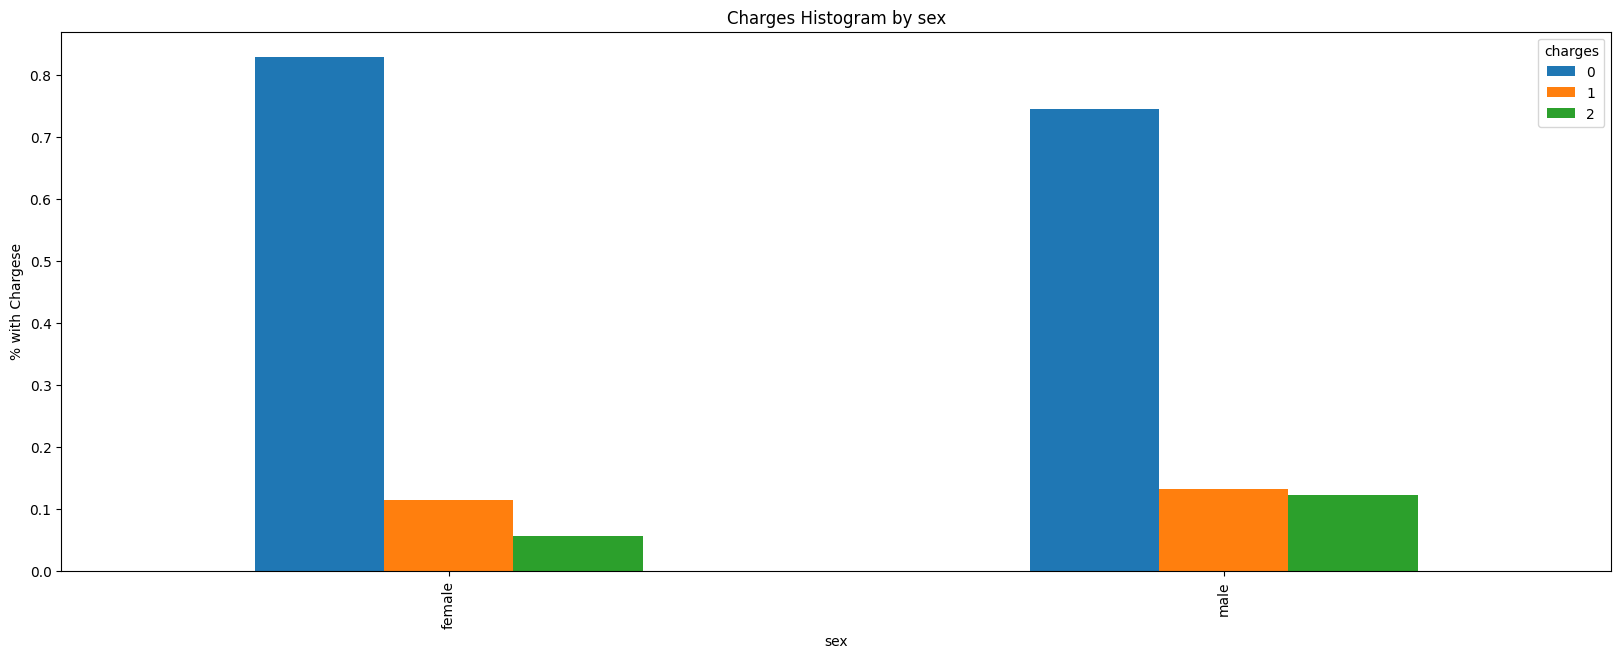

In [ ]:
train.groupby('sex')['charges'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Charges Histogram by sex', ylabel='% with Chargese'
)

<Axes: title={'center': 'Charges Histogram by children'}, xlabel='children', ylabel='% with Chargese'>

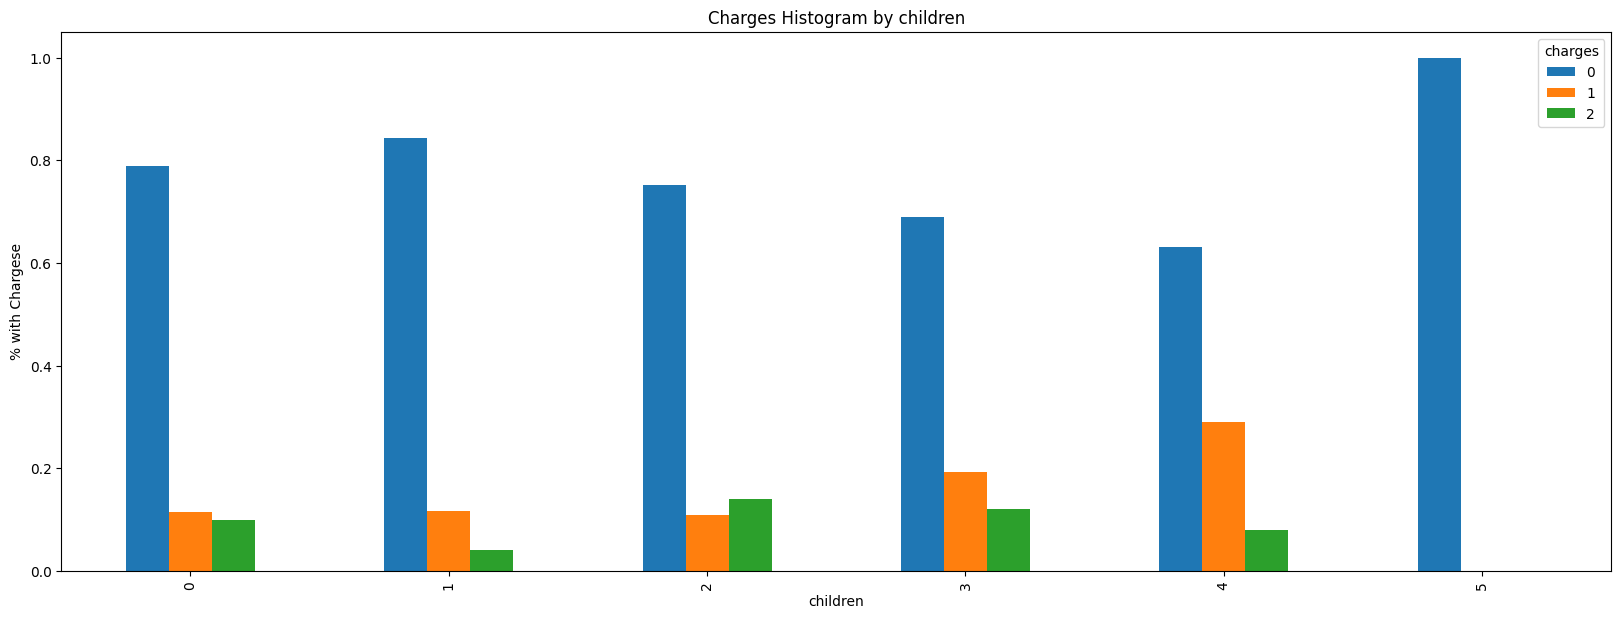

In [ ]:
train.groupby('children')['charges'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Charges Histogram by children', ylabel='% with Chargese'
)

<Axes: title={'center': 'Charges Histogram by smoker'}, xlabel='smoker', ylabel='% with Chargese'>

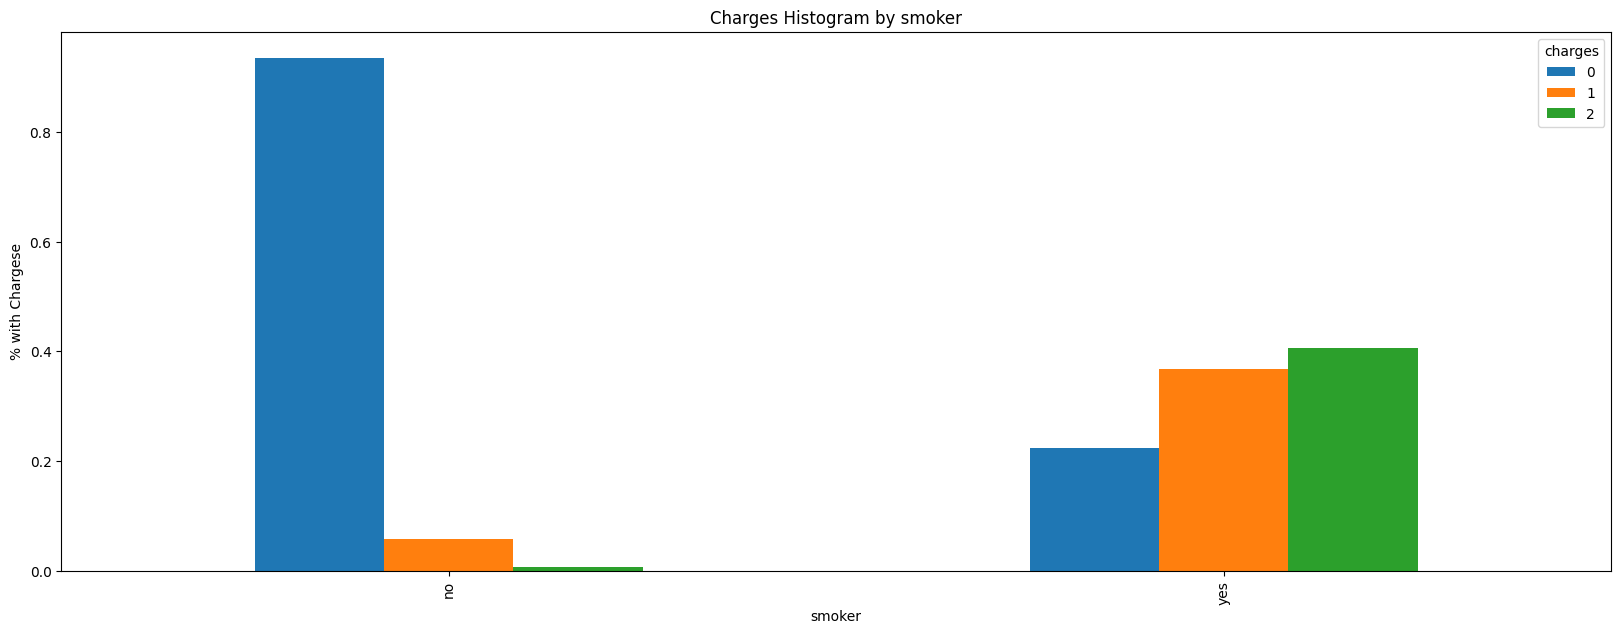

In [ ]:
train.groupby('smoker')['charges'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Charges Histogram by smoker', ylabel='% with Chargese'
)

<Axes: title={'center': 'Charges Histogram by region'}, xlabel='region', ylabel='% with Chargese'>

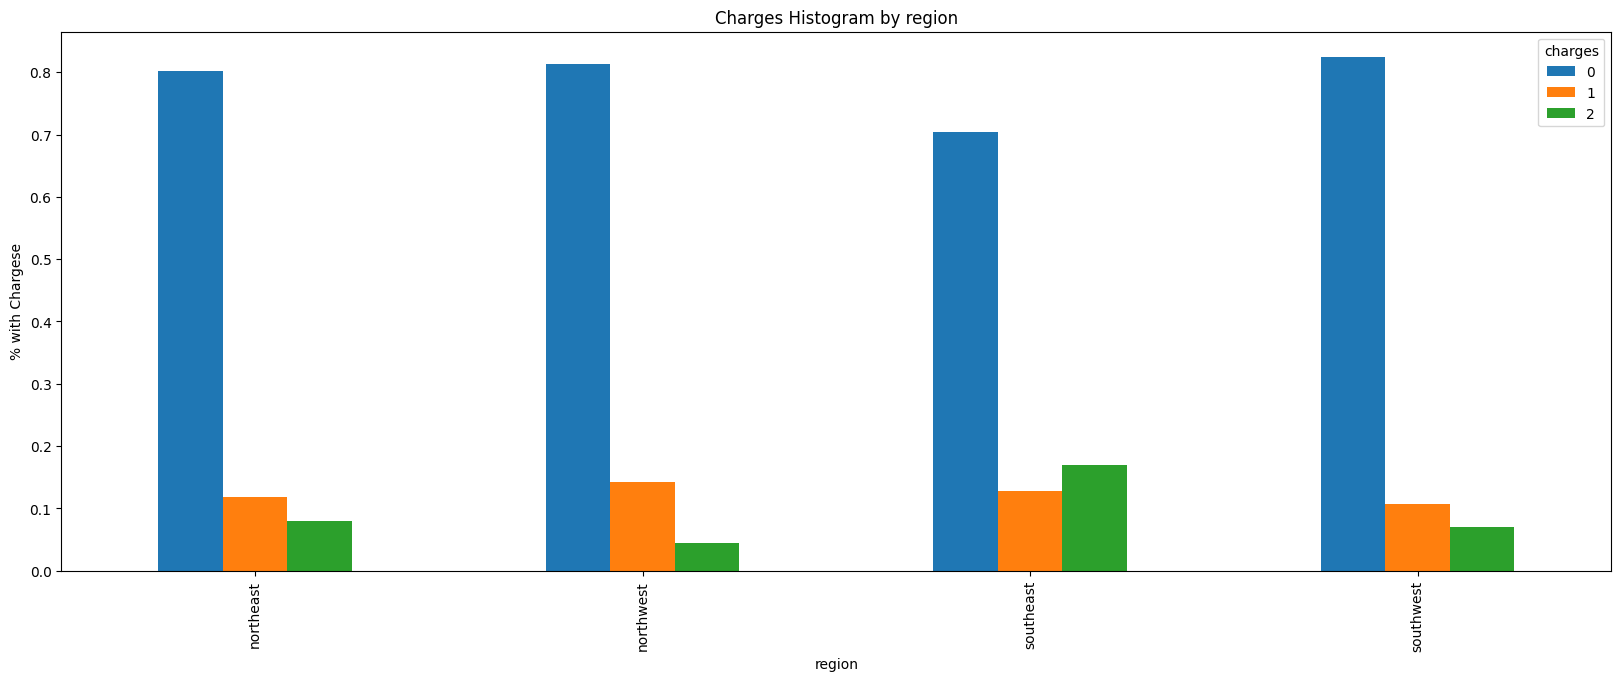

In [ ]:
train.groupby('region')['charges'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Charges Histogram by region', ylabel='% with Chargese'
)

In [ ]:
train2 = pd.get_dummies(train, drop_first=True)
train2  = train2 * 1
train2

age        bmi  children  charges  sex_male  smoker_yes  \
id                                                              
0      26  32.665465         3        0         1           0   
1      41  29.798725         1        0         1           0   
2      28  32.722029         0        1         1           1   
3      20  38.429831         2        0         0           0   
4      45  29.641854         1        0         0           0   
...   ...        ...       ...      ...       ...         ...   
1994   52  32.772830         0        0         1           0   
1996   29  37.189564         0        0         1           0   
1997   56  43.281979         1        0         0           0   
1998   51  28.232308         1        0         1           1   
1999   54  28.997113         0        0         0           0   

      region_northwest  region_southeast  region_southwest  
id                                                          
0                    0                 1                 0  
1                    0                 0                 1  
2                    1                 0                 0  
3                    0                 1                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1994                 0                 0                 1  
1996                 1                 0                 0  
1997                 0                 1                 0  
1998                 1                 0                 0  
1999                 1                 0                 0  

[1600 rows x 9 columns]

In [ ]:
test2 = pd.get_dummies(test, drop_first=True)
test2  = test2 * 1
test2

age        bmi  children  sex_male  smoker_yes  region_northwest  \
id                                                                       
13     19  24.365178         1         1           0                 0   
23     59  33.997763         0         1           1                 0   
27     42  29.283450         0         0           0                 0   
28     30  24.903725         1         1           0                 1   
29     41  29.644536         0         0           0                 0   
...   ...        ...       ...       ...         ...               ...   
1968   47  24.915980         1         0           0                 1   
1972   18  44.752922         0         0           0                 0   
1979   33  37.203015         0         0           1                 0   
1983   29  33.617369         1         1           0                 1   
1995   37  32.722320         3         0           0                 1   

      region_southeast  region_southwest  
id                                        
13                   0                 0  
23                   0                 0  
27                   0                 1  
28                   0                 0  
29                   0                 1  
...                ...               ...  
1968                 0                 0  
1972                 1                 0  
1979                 1                 0  
1983                 0                 0  
1995                 0                 0  

[400 rows x 8 columns]

<Axes: >

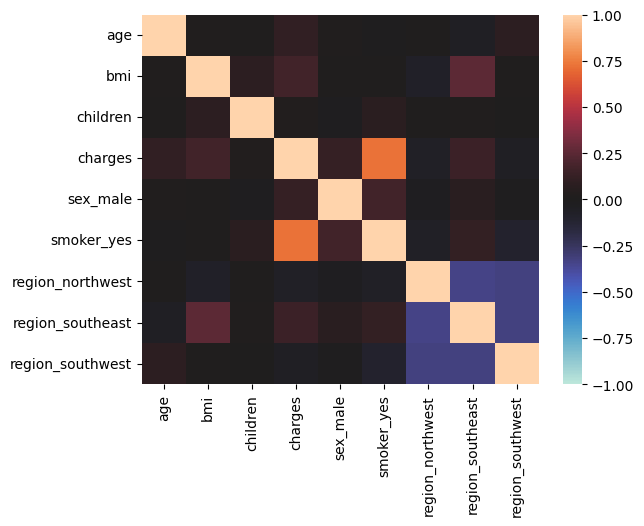

In [ ]:
#ヒートマップ
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = train2.corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
train2['charges'].value_counts()

charges
0    1256
1     198
2     146
Name: count, dtype: int64

In [ ]:
data_x = train2.drop('charges', axis=1)
data_y = train2[['charges']]

In [ ]:
from sklearn.model_selection import StratifiedKFold
# optuna経由でLightGBMをインポート
# from optuna.integration import lightgbm as lgb
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import f1_score

# kfoldの分割数
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=2)

lgbm_params = {

    'random_state': 42,
    'learning_rate': 0.01,
    "boosting_type": "gbdt",
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'class_weight': 'balanced',
    'verbose': -1,
    }

ba_list = []

# kfoldで分割
for train_index, test_index in skf.split(data_x, data_y):
    X_train = data_x.iloc[train_index]
    y_train = data_y.iloc[train_index]
    X_test = data_x.iloc[test_index]
    y_test = data_y.iloc[test_index]

    # データセットを生成する
    lgb_train = lgb.Dataset(X_train.to_numpy(), y_train)
    lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train)

    model = lgb.train(lgbm_params, lgb_train)

    Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = np.argmax(Y_pred, axis=1)
    ba = f1_score(y_test, y_pred, average='macro')
    print(ba)
    ba_list.append(ba)
print(f"f1 Accuracy: {np.mean(ba_list)}")

0.6747110850281692
0.6072160860945907
0.7002468110155494
0.6308896087578986
0.6937079761981483
f1 Accuracy: 0.6613543134188713


In [ ]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb_o
import optuna

def objective(trial):

  # 訓練データ
  lgb_train = lgb.Dataset(X_train.to_numpy(), y_train, free_raw_data=False) #, weight=df_weight
  # 評価データ
  lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train, free_raw_data=False)

  # 固定するパラメータ
  params = {
      "boosting_type": "gbdt",
      'objective': 'multiclass',
      'num_class':3,
      'metric': 'multi_logloss',
      'class_weight': 'balanced',
      "verbosity": -1,
      'verbose': -1,
        'learning_rate': 0.05,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'seed': 0,
  }



  # Optunaでのパラメータ探索
  model = lgb_o.train(params, lgb_train,
                    valid_sets=[lgb_train, lgb_eval],
                      num_boost_round=100,              # 計算回数
                      callbacks=[lgb.early_stopping(stopping_rounds=25, verbose=-1),
                                lgb.log_evaluation(10),],         # アーリーストッピング設定

                 )
  Y_pred = model.predict(X_test)
  y_pred = np.argmax(Y_pred, axis=1)
  # 最適なパラメータの表示
  best_params = model.params
  print("Best params:", best_params)
  return f1_score(y_test, y_pred, average='macro')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-06-02 08:26:20,447] A new study created in memory with name: no-name-4de13c88-791a-45a1-a3a4-40ee9a3a32ef
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feat

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489314	valid_1's multi_logloss: 0.498342
[20]	valid_0's multi_logloss: 0.422769	valid_1's multi_logloss: 0.43894
[30]	valid_0's multi_logloss: 0.387738	valid_1's multi_logloss: 0.41224
[40]	valid_0's multi_logloss: 0.362634	valid_1's multi_logloss: 0.395464
[50]	valid_0's multi_logloss: 0.346082	valid_1's multi_logloss: 0.388384
[60]	valid_0's multi_logloss: 0.332897	valid_1's multi_logloss: 0.382413
[70]	valid_0's multi_logloss: 0.321149	valid_1's multi_logloss: 0.380063
[80]	valid_0's multi_logloss: 0.312459	valid_1's multi_logloss: 0.379652
[90]	valid_0's multi_logloss: 0.304873	valid_1's multi_logloss: 0.380362
[100]	valid_0's multi_logloss: 0.297359	valid_1's multi_logloss: 0.379711
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297359	valid_1's multi_logloss: 0.379711
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

feature_fraction, val_score: 0.379711:  43%|####2     | 3/7 [00:00<00:00,  7.50it/s]

[80]	valid_0's multi_logloss: 0.314811	valid_1's multi_logloss: 0.385981
[90]	valid_0's multi_logloss: 0.306675	valid_1's multi_logloss: 0.385479
[100]	valid_0's multi_logloss: 0.299545	valid_1's multi_logloss: 0.383208
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299545	valid_1's multi_logloss: 0.383208
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510701	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.435043	valid_1's multi_logloss: 0.456273
[30]	valid_0's multi_logloss: 0.394201	valid_1's multi_logloss: 0.420765
[40]	valid_0's multi_logloss: 0.36778	valid_1's multi_logloss: 0.403751
[50]	valid_0's multi_logloss: 0.350099	valid_1's multi_logloss: 0.394565
[60]	valid_0's multi_logloss: 0.335603	valid_1's multi_logloss: 0.38885
[70]	valid_0's multi_logloss: 0.323839	valid_1's multi_logloss: 0.385781
[80]	valid_0's multi_logloss: 0.314811	valid_1's multi_logloss: 0.385981
[90]	valid_0's 

feature_fraction, val_score: 0.379711:  57%|#####7    | 4/7 [00:00<00:00,  7.21it/s]

[20]	valid_0's multi_logloss: 0.451024	valid_1's multi_logloss: 0.47019
[30]	valid_0's multi_logloss: 0.409638	valid_1's multi_logloss: 0.434195
[40]	valid_0's multi_logloss: 0.380746	valid_1's multi_logloss: 0.414104
[50]	valid_0's multi_logloss: 0.362626	valid_1's multi_logloss: 0.403178
[60]	valid_0's multi_logloss: 0.347962	valid_1's multi_logloss: 0.395016
[70]	valid_0's multi_logloss: 0.333908	valid_1's multi_logloss: 0.389373
[80]	valid_0's multi_logloss: 0.3237	valid_1's multi_logloss: 0.38903
[90]	valid_0's multi_logloss: 0.314318	valid_1's multi_logloss: 0.388119
[100]	valid_0's multi_logloss: 0.307095	valid_1's multi_logloss: 0.384498
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307095	valid_1's multi_logloss: 0.384498
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533724	valid_1's multi_logloss: 0.544716
[20]	valid_0's multi_logloss: 0.470893	valid_1's multi_logloss: 0.491172
[30]	valid_0's mu

feature_fraction, val_score: 0.379547:  86%|########5 | 6/7 [00:00<00:00,  7.27it/s]

[70]	valid_0's multi_logloss: 0.354278	valid_1's multi_logloss: 0.408831
[80]	valid_0's multi_logloss: 0.341914	valid_1's multi_logloss: 0.402823
[90]	valid_0's multi_logloss: 0.332774	valid_1's multi_logloss: 0.39859
[100]	valid_0's multi_logloss: 0.324752	valid_1's multi_logloss: 0.395827
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324752	valid_1's multi_logloss: 0.395827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's

feature_fraction, val_score: 0.379547: 100%|##########| 7/7 [00:00<00:00,  7.33it/s]


[20]	valid_0's multi_logloss: 0.489122	valid_1's multi_logloss: 0.505423
[30]	valid_0's multi_logloss: 0.447158	valid_1's multi_logloss: 0.471968
[40]	valid_0's multi_logloss: 0.41876	valid_1's multi_logloss: 0.448883
[50]	valid_0's multi_logloss: 0.397602	valid_1's multi_logloss: 0.434439
[60]	valid_0's multi_logloss: 0.382311	valid_1's multi_logloss: 0.423685
[70]	valid_0's multi_logloss: 0.369729	valid_1's multi_logloss: 0.41789
[80]	valid_0's multi_logloss: 0.359224	valid_1's multi_logloss: 0.412154
[90]	valid_0's multi_logloss: 0.348755	valid_1's multi_logloss: 0.403914
[100]	valid_0's multi_logloss: 0.338864	valid_1's multi_logloss: 0.398452
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338864	valid_1's multi_logloss: 0.398452


num_leaves, val_score: 0.379547:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707


num_leaves, val_score: 0.379547:   5%|5         | 1/20 [00:00<00:02,  7.39it/s]

[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351

num_leaves, val_score: 0.379547:  10%|#         | 2/20 [00:00<00:02,  7.27it/s]


[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088


num_leaves, val_score: 0.379547:  15%|#5        | 3/20 [00:00<00:02,  7.27it/s]

[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


[I 2024-06-02 08:26:21,839] Trial 9 finished with value: 0.37954736193545724 and parameters: {'num_leaves': 170}. Best is trial 7 with value: 0.37954736193545724.
num_leaves, val_score: 0.368486:  20%|##        | 4/20 [00:00<00:02,  7.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485209	valid_1's multi_logloss: 0.48839
[20]	valid_0's multi_logloss: 0.426842	valid_1's multi_logloss: 0.433011
[30]	valid_0's multi_logloss: 0.396846	valid_1's multi_logloss: 0.406448
[40]	valid_0's multi_logloss: 0.377219	valid_1's multi_logloss: 0.391297
[50]	valid_0's multi_logloss: 0.364806	valid_1's multi_logloss: 0.38303
[60]	valid_0's multi_logloss: 0.354326	valid_1's multi_logloss: 0.376254
[70]	valid_0's multi_logloss: 0.346404	valid_1's multi_logloss: 0.373327
[80]	valid_0's multi_logloss: 0.339988	valid_1's multi_logloss: 0.37211
[90]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.370632
[100]	valid_0's multi_logloss: 0.330134	valid_1's multi_logloss: 0.368486
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330134	valid_1's multi_logloss: 0.368486


[I 2024-06-02 08:26:21,952] Trial 10 finished with value: 0.36848580062293246 and parameters: {'num_leaves': 3}. Best is trial 10 with value: 0.36848580062293246.
num_leaves, val_score: 0.368486:  20%|##        | 4/20 [00:00<00:02,  7.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002


num_leaves, val_score: 0.368486:  25%|##5       | 5/20 [00:00<00:01,  7.70it/s]

[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596


num_leaves, val_score: 0.368486:  30%|###       | 6/20 [00:00<00:01,  7.24it/s]

[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's

num_leaves, val_score: 0.368486:  35%|###5      | 7/20 [00:01<00:01,  6.52it/s]

[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102


num_leaves, val_score: 0.368486:  40%|####      | 8/20 [00:01<00:01,  6.83it/s]

[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238


num_leaves, val_score: 0.368486:  45%|####5     | 9/20 [00:01<00:01,  6.93it/s]

[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's

num_leaves, val_score: 0.368486:  50%|#####     | 10/20 [00:01<00:01,  6.92it/s]


[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596


num_leaves, val_score: 0.368486:  55%|#####5    | 11/20 [00:01<00:01,  6.82it/s]

[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


num_leaves, val_score: 0.368486:  60%|######    | 12/20 [00:01<00:01,  7.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


[I 2024-06-02 08:26:23,124] Trial 18 finished with value: 0.37954736193545724 and parameters: {'num_leaves': 49}. Best is trial 10 with value: 0.36848580062293246.
num_leaves, val_score: 0.368486:  60%|######    | 12/20 [00:01<00:01,  7.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596


num_leaves, val_score: 0.368486:  65%|######5   | 13/20 [00:01<00:01,  6.67it/s]

[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871


num_leaves, val_score: 0.368486:  65%|######5   | 13/20 [00:01<00:01,  6.67it/s]

[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


num_leaves, val_score: 0.368486:  70%|#######   | 14/20 [00:02<00:00,  6.80it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


num_leaves, val_score: 0.368486:  75%|#######5  | 15/20 [00:02<00:00,  7.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674


num_leaves, val_score: 0.368486:  80%|########  | 16/20 [00:02<00:00,  7.07it/s]

[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102


num_leaves, val_score: 0.368486:  85%|########5 | 17/20 [00:02<00:00,  6.99it/s]

[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


num_leaves, val_score: 0.368486:  90%|######### | 18/20 [00:02<00:00,  7.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480714	valid_1's multi_logloss: 0.488238
[20]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.430088
[30]	valid_0's multi_logloss: 0.381584	valid_1's multi_logloss: 0.405871
[40]	valid_0's multi_logloss: 0.357254	valid_1's multi_logloss: 0.392596
[50]	valid_0's multi_logloss: 0.339868	valid_1's multi_logloss: 0.386102
[60]	valid_0's multi_logloss: 0.327002	valid_1's multi_logloss: 0.381351
[70]	valid_0's multi_logloss: 0.316157	valid_1's multi_logloss: 0.379674
[80]	valid_0's multi_logloss: 0.307422	valid_1's multi_logloss: 0.379707
[90]	valid_0's multi_logloss: 0.300123	valid_1's multi_logloss: 0.38002
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292822	valid_1's multi_logloss: 0.379547


num_leaves, val_score: 0.368486:  90%|######### | 18/20 [00:02<00:00,  7.15it/s][I 2024-06-02 08:26:24,069] Trial 25 finished with value: 0.3770570394434552 and parameters: {'num_leaves': 2}. Best is trial 10 with value: 0.36848580062293246.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509259	valid_1's multi_logloss: 0.506749
[20]	valid_0's multi_logloss: 0.456325	valid_1's multi_logloss: 0.457663
[30]	valid_0's multi_logloss: 0.426144	valid_1's multi_logloss: 0.42912
[40]	valid_0's multi_logloss: 0.408256	valid_1's multi_logloss: 0.4145
[50]	valid_0's multi_logloss: 0.394804	valid_1's multi_logloss: 0.402533
[60]	valid_0's multi_logloss: 0.384498	valid_1's multi_logloss: 0.393432
[70]	valid_0's multi_logloss: 0.376463	valid_1's multi_logloss: 0.387907
[80]	valid_0's multi_logloss: 0.369906	valid_1's multi_logloss: 0.384761
[90]	valid_0's multi_logloss: 0.364069	valid_1's multi_logloss: 0.379958
[100]	valid_0's multi_logloss: 0.359502	valid_1's multi_logloss: 0.377057
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.359502	valid_1's multi_logloss: 0.377057


num_leaves, val_score: 0.368486:  95%|#########5| 19/20 [00:02<00:00,  7.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480966	valid_1's multi_logloss: 0.487863
[20]	valid_0's multi_logloss: 0.41617	valid_1's multi_logloss: 0.430046
[30]	valid_0's multi_logloss: 0.382928	valid_1's multi_logloss: 0.405981
[40]	valid_0's multi_logloss: 0.359378	valid_1's multi_logloss: 0.391917
[50]	valid_0's multi_logloss: 0.342714	valid_1's multi_logloss: 0.384842
[60]	valid_0's multi_logloss: 0.330057	valid_1's multi_logloss: 0.380334
[70]	valid_0's multi_logloss: 0.319756	valid_1's multi_logloss: 0.378041
[80]	valid_0's multi_logloss: 0.31139	valid_1's multi_logloss: 0.377671
[90]	valid_0's multi_logloss: 0.304699	valid_1's multi_logloss: 0.377428
[100]	valid_0's multi_logloss: 0.297688	valid_1's multi_logloss: 0.376655
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297688	valid_1's multi_logloss: 0.376655


bagging, val_score: 0.368486:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503891	valid_1's multi_logloss: 0.505435
[20]	valid_0's multi_logloss: 0.444003	valid_1's multi_logloss: 0.450174
[30]	valid_0's multi_logloss: 0.404117	valid_1's multi_logloss: 0.414549
[40]	valid_0's multi_logloss: 0.385204	valid_1's multi_logloss: 0.401278
[50]	valid_0's multi_logloss: 0.370078	valid_1's multi_logloss: 0.389189


bagging, val_score: 0.368486:  20%|##        | 2/10 [00:00<00:00,  9.32it/s]

[60]	valid_0's multi_logloss: 0.359133	valid_1's multi_logloss: 0.378765
[70]	valid_0's multi_logloss: 0.349271	valid_1's multi_logloss: 0.3764
[80]	valid_0's multi_logloss: 0.342495	valid_1's multi_logloss: 0.374108
[90]	valid_0's multi_logloss: 0.337202	valid_1's multi_logloss: 0.369422
[100]	valid_0's multi_logloss: 0.332247	valid_1's multi_logloss: 0.369072
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332247	valid_1's multi_logloss: 0.369072
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503562	valid_1's multi_logloss: 0.505095
[20]	valid_0's multi_logloss: 0.441528	valid_1's multi_logloss: 0.447364
[30]	valid_0's multi_logloss: 0.40351	valid_1's multi_logloss: 0.414245
[40]	valid_0's multi_logloss: 0.3843	valid_1's multi_logloss: 0.400574
[50]	valid_0's multi_logloss: 0.368639	valid_1's multi_logloss: 0.38856
[60]	valid_0's multi_logloss: 0.358175	valid_1's multi_logloss: 0.378085
[70]	valid_0's mult

bagging, val_score: 0.368486:  40%|####      | 4/10 [00:00<00:00,  8.92it/s]


[30]	valid_0's multi_logloss: 0.403478	valid_1's multi_logloss: 0.414476
[40]	valid_0's multi_logloss: 0.384841	valid_1's multi_logloss: 0.401288
[50]	valid_0's multi_logloss: 0.368771	valid_1's multi_logloss: 0.388632
[60]	valid_0's multi_logloss: 0.358252	valid_1's multi_logloss: 0.378101
[70]	valid_0's multi_logloss: 0.348479	valid_1's multi_logloss: 0.375889
[80]	valid_0's multi_logloss: 0.34171	valid_1's multi_logloss: 0.373615
[90]	valid_0's multi_logloss: 0.336481	valid_1's multi_logloss: 0.369784
[100]	valid_0's multi_logloss: 0.331689	valid_1's multi_logloss: 0.370252
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331689	valid_1's multi_logloss: 0.370252
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504371	valid_1's multi_logloss: 0.505747
[20]	valid_0's multi_logloss: 0.442171	valid_1's multi_logloss: 0.450347
[30]	valid_0's multi_logloss: 0.402727	valid_1's multi_logloss: 0.414809
[40]	valid_0'

[I 2024-06-02 08:26:24,689] Trial 30 finished with value: 0.3709102360475363 and parameters: {'bagging_fraction': 0.6420165969067203, 'bagging_freq': 6}. Best is trial 27 with value: 0.36907226306412066.
bagging, val_score: 0.368486:  40%|####      | 4/10 [00:00<00:00,  8.92it/s]

Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.368486:  60%|######    | 6/10 [00:00<00:00,  9.13it/s]

[10]	valid_0's multi_logloss: 0.503447	valid_1's multi_logloss: 0.504958
[20]	valid_0's multi_logloss: 0.441548	valid_1's multi_logloss: 0.447726
[30]	valid_0's multi_logloss: 0.40255	valid_1's multi_logloss: 0.413793
[40]	valid_0's multi_logloss: 0.383857	valid_1's multi_logloss: 0.400483
[50]	valid_0's multi_logloss: 0.368106	valid_1's multi_logloss: 0.388466
[60]	valid_0's multi_logloss: 0.357703	valid_1's multi_logloss: 0.377955
[70]	valid_0's multi_logloss: 0.348419	valid_1's multi_logloss: 0.375781
[80]	valid_0's multi_logloss: 0.342151	valid_1's multi_logloss: 0.373782
[90]	valid_0's multi_logloss: 0.336967	valid_1's multi_logloss: 0.370151
[100]	valid_0's multi_logloss: 0.33193	valid_1's multi_logloss: 0.370913
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33193	valid_1's multi_logloss: 0.370913
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503438	valid_1's multi_logloss: 0.504952
[20]	valid_0's m

bagging, val_score: 0.368486:  80%|########  | 8/10 [00:00<00:00,  9.09it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502881	valid_1's multi_logloss: 0.505066
[20]	valid_0's multi_logloss: 0.431506	valid_1's multi_logloss: 0.436439
[30]	valid_0's multi_logloss: 0.398272	valid_1's multi_logloss: 0.407427
[40]	valid_0's multi_logloss: 0.380363	valid_1's multi_logloss: 0.396179
[50]	valid_0's multi_logloss: 0.366105	valid_1's multi_logloss: 0.38827
[60]	valid_0's multi_logloss: 0.355779	valid_1's multi_logloss: 0.380278
[70]	valid_0's multi_logloss: 0.348687	valid_1's multi_logloss: 0.379273
[80]	valid_0's multi_logloss: 0.343282	valid_1's multi_logloss: 0.37808
[90]	valid_0's multi_logloss: 0.338466	valid_1's multi_logloss: 0.371973
[100]	valid_0's multi_logloss: 0.335515	valid_1's multi_logloss: 0.371865
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.33551	valid_1's multi_logloss: 0.372119
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

bagging, val_score: 0.368486:  90%|######### | 9/10 [00:00<00:00,  9.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46903	valid_1's multi_logloss: 0.478476
[20]	valid_0's multi_logloss: 0.412616	valid_1's multi_logloss: 0.428691
[30]	valid_0's multi_logloss: 0.388022	valid_1's multi_logloss: 0.404897
[40]	valid_0's multi_logloss: 0.371706	valid_1's multi_logloss: 0.394952
[50]	valid_0's multi_logloss: 0.360694	valid_1's multi_logloss: 0.387676
[60]	valid_0's multi_logloss: 0.350893	valid_1's multi_logloss: 0.384427
[70]	valid_0's multi_logloss: 0.345136	valid_1's multi_logloss: 0.379729
[80]	valid_0's multi_logloss: 0.337996	valid_1's multi_logloss: 0.377786
[90]	valid_0's multi_logloss: 0.333692	valid_1's multi_logloss: 0.37769
[100]	valid_0's multi_logloss: 0.329565	valid_1's multi_logloss: 0.376078
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329565	valid_1's multi_logloss: 0.376078
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

feature_fraction_stage2, val_score: 0.368486:  67%|######6   | 2/3 [00:00<00:00,  9.55it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485209	valid_1's multi_logloss: 0.48839
[20]	valid_0's multi_logloss: 0.426842	valid_1's multi_logloss: 0.433011
[30]	valid_0's multi_logloss: 0.396846	valid_1's multi_logloss: 0.406448
[40]	valid_0's multi_logloss: 0.377219	valid_1's multi_logloss: 0.391297
[50]	valid_0's multi_logloss: 0.364806	valid_1's multi_logloss: 0.38303
[60]	valid_0's multi_logloss: 0.354326	valid_1's multi_logloss: 0.376254
[70]	valid_0's multi_logloss: 0.346404	valid_1's multi_logloss: 0.373327
[80]	valid_0's multi_logloss: 0.339988	valid_1's multi_logloss: 0.37211
[90]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.370632
[100]	valid_0's multi_logloss: 0.330134	valid_1's multi_logloss: 0.368486
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330134	valid_1's multi_logloss: 0.368486
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

feature_fraction_stage2, val_score: 0.368486: 100%|##########| 3/3 [00:00<00:00,  9.38it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494097	valid_1's multi_logloss: 0.498793
[20]	valid_0's multi_logloss: 0.432428	valid_1's multi_logloss: 0.438835
[30]	valid_0's multi_logloss: 0.401932	valid_1's multi_logloss: 0.41138
[40]	valid_0's multi_logloss: 0.381187	valid_1's multi_logloss: 0.393581
[50]	valid_0's multi_logloss: 0.36804	valid_1's multi_logloss: 0.384028
[60]	valid_0's multi_logloss: 0.357374	valid_1's multi_logloss: 0.376911
[70]	valid_0's multi_logloss: 0.349274	valid_1's multi_logloss: 0.374827
[80]	valid_0's multi_logloss: 0.342611	valid_1's multi_logloss: 0.372809
[90]	valid_0's multi_logloss: 0.337197	valid_1's multi_logloss: 0.371367
[100]	valid_0's multi_logloss: 0.332323	valid_1's multi_logloss: 0.369418
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332323	valid_1's multi_logloss: 0.369418


regularization_factors, val_score: 0.368486:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485914	valid_1's multi_logloss: 0.489109
[20]	valid_0's multi_logloss: 0.42633	valid_1's multi_logloss: 0.433466
[30]	valid_0's multi_logloss: 0.39665	valid_1's multi_logloss: 0.406558
[40]	valid_0's multi_logloss: 0.377166	valid_1's multi_logloss: 0.391316
[50]	valid_0's multi_logloss: 0.364767	valid_1's multi_logloss: 0.382924
[60]	valid_0's multi_logloss: 0.354555	valid_1's multi_logloss: 0.376331
[70]	valid_0's multi_logloss: 0.346698	valid_1's multi_logloss: 0.373625
[80]	valid_0's multi_logloss: 0.340483	valid_1's multi_logloss: 0.372593
[90]	valid_0's multi_logloss: 0.335187	valid_1's multi_logloss: 0.370756


regularization_factors, val_score: 0.368486:   5%|5         | 1/20 [00:00<00:02,  8.04it/s]

[100]	valid_0's multi_logloss: 0.330753	valid_1's multi_logloss: 0.368543
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330753	valid_1's multi_logloss: 0.368543
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488141	valid_1's multi_logloss: 0.491748
[20]	valid_0's multi_logloss: 0.428192	valid_1's multi_logloss: 0.435111
[30]	valid_0's multi_logloss: 0.398344	valid_1's multi_logloss: 0.408539
[40]	valid_0's multi_logloss: 0.378861	valid_1's multi_logloss: 0.392805
[50]	valid_0's multi_logloss: 0.366747	valid_1's multi_logloss: 0.384101
[60]	valid_0's multi_logloss: 0.356456	valid_1's multi_logloss: 0.377661
[70]	valid_0's multi_logloss: 0.348725	valid_1's multi_logloss: 0.375293
[80]	valid_0's multi_logloss: 0.342347	valid_1's multi_logloss: 0.373978
[90]	valid_0's multi_logloss: 0.337122	valid_1's multi_logloss: 0.372107
[100]	valid_0's multi_logloss: 0.332642	valid_1's multi_logloss: 0.369815
Did not meet

regularization_factors, val_score: 0.368486:  10%|#         | 2/20 [00:00<00:02,  8.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485243	valid_1's multi_logloss: 0.488425
[20]	valid_0's multi_logloss: 0.426838	valid_1's multi_logloss: 0.43323
[30]	valid_0's multi_logloss: 0.396837	valid_1's multi_logloss: 0.406468


regularization_factors, val_score: 0.368486:  15%|#5        | 3/20 [00:00<00:02,  7.94it/s]

[40]	valid_0's multi_logloss: 0.377166	valid_1's multi_logloss: 0.391331
[50]	valid_0's multi_logloss: 0.365118	valid_1's multi_logloss: 0.382549
[60]	valid_0's multi_logloss: 0.354703	valid_1's multi_logloss: 0.376203
[70]	valid_0's multi_logloss: 0.346643	valid_1's multi_logloss: 0.373507
[80]	valid_0's multi_logloss: 0.340042	valid_1's multi_logloss: 0.37244
[90]	valid_0's multi_logloss: 0.334724	valid_1's multi_logloss: 0.37097
[100]	valid_0's multi_logloss: 0.330274	valid_1's multi_logloss: 0.368606
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330274	valid_1's multi_logloss: 0.368606
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485259	valid_1's multi_logloss: 0.488441
[20]	valid_0's multi_logloss: 0.426852	valid_1's multi_logloss: 0.433244
[30]	valid_0's multi_logloss: 0.396849	valid_1's multi_logloss: 0.406479
[40]	valid_0's multi_logloss: 0.377177	valid_1's multi_logloss: 0.391339
[50]	valid_0's 

regularization_factors, val_score: 0.368486:  20%|##        | 4/20 [00:00<00:01,  8.41it/s]

Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.367710:  25%|##5       | 5/20 [00:00<00:01,  8.26it/s]

[10]	valid_0's multi_logloss: 0.48522	valid_1's multi_logloss: 0.4884
[20]	valid_0's multi_logloss: 0.426823	valid_1's multi_logloss: 0.433214
[30]	valid_0's multi_logloss: 0.396827	valid_1's multi_logloss: 0.406457
[40]	valid_0's multi_logloss: 0.37716	valid_1's multi_logloss: 0.391324
[50]	valid_0's multi_logloss: 0.364739	valid_1's multi_logloss: 0.3825
[60]	valid_0's multi_logloss: 0.354315	valid_1's multi_logloss: 0.375651
[70]	valid_0's multi_logloss: 0.346327	valid_1's multi_logloss: 0.373072
[80]	valid_0's multi_logloss: 0.339825	valid_1's multi_logloss: 0.371712
[90]	valid_0's multi_logloss: 0.334463	valid_1's multi_logloss: 0.370128
[100]	valid_0's multi_logloss: 0.330199	valid_1's multi_logloss: 0.36771
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330199	valid_1's multi_logloss: 0.36771
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489814	valid_1's multi_logloss: 0.493338
[20]	valid_0's multi_

regularization_factors, val_score: 0.367710:  40%|####      | 8/20 [00:00<00:01,  8.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485248	valid_1's multi_logloss: 0.488428
[20]	valid_0's multi_logloss: 0.426858	valid_1's multi_logloss: 0.433245
[30]	valid_0's multi_logloss: 0.396866	valid_1's multi_logloss: 0.40649
[40]	valid_0's multi_logloss: 0.3772	valid_1's multi_logloss: 0.391353
[50]	valid_0's multi_logloss: 0.365158	valid_1's multi_logloss: 0.382572
[60]	valid_0's multi_logloss: 0.354707	valid_1's multi_logloss: 0.376237
[70]	valid_0's multi_logloss: 0.346648	valid_1's multi_logloss: 0.373522
[80]	valid_0's multi_logloss: 0.340019	valid_1's multi_logloss: 0.372097
[90]	valid_0's multi_logloss: 0.334678	valid_1's multi_logloss: 0.370821
[100]	valid_0's multi_logloss: 0.330236	valid_1's multi_logloss: 0.368471
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330236	valid_1's multi_logloss: 0.368471
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.367710:  45%|####5     | 9/20 [00:01<00:01,  8.81it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485232	valid_1's multi_logloss: 0.488412
[20]	valid_0's multi_logloss: 0.426838	valid_1's multi_logloss: 0.433227
[30]	valid_0's multi_logloss: 0.396844	valid_1's multi_logloss: 0.406471
[40]	valid_0's multi_logloss: 0.377177	valid_1's multi_logloss: 0.391336
[50]	valid_0's multi_logloss: 0.365132	valid_1's multi_logloss: 0.382556
[60]	valid_0's multi_logloss: 0.35468	valid_1's multi_logloss: 0.376223
[70]	valid_0's multi_logloss: 0.346618	valid_1's multi_logloss: 0.37351
[80]	valid_0's multi_logloss: 0.339987	valid_1's multi_logloss: 0.372087
[90]	valid_0's multi_logloss: 0.334645	valid_1's multi_logloss: 0.370814
[100]	valid_0's multi_logloss: 0.330201	valid_1's multi_logloss: 0.368465
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330201	valid_1's multi_logloss: 0.368465
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367710:  60%|######    | 12/20 [00:01<00:00,  8.69it/s][I 2024-06-02 08:26:27,119] Trial 51 finished with value: 0.3684721523233777 and parameters: {'lambda_l1': 0.020932230669419034, 'lambda_l2': 5.803525677065732e-06}. Best is trial 44 with value: 0.3677102122909576.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485253	valid_1's multi_logloss: 0.488433
[20]	valid_0's multi_logloss: 0.426864	valid_1's multi_logloss: 0.433251
[30]	valid_0's multi_logloss: 0.396873	valid_1's multi_logloss: 0.406495
[40]	valid_0's multi_logloss: 0.377207	valid_1's multi_logloss: 0.391358
[50]	valid_0's multi_logloss: 0.365165	valid_1's multi_logloss: 0.382576
[60]	valid_0's multi_logloss: 0.354716	valid_1's multi_logloss: 0.376242
[70]	valid_0's multi_logloss: 0.346658	valid_1's multi_logloss: 0.373526
[80]	valid_0's multi_logloss: 0.340028	valid_1's multi_logloss: 0.3721
[90]	valid_0's multi_logloss: 0.334689	valid_1's multi_logloss: 0.370823
[100]	valid_0's multi_logloss: 0.330246	valid_1's multi_logloss: 0.368473
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330246	valid_1's multi_logloss: 0.368473
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367710:  65%|######5   | 13/20 [00:01<00:00,  8.55it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485229	valid_1's multi_logloss: 0.48841
[20]	valid_0's multi_logloss: 0.426835	valid_1's multi_logloss: 0.433224
[30]	valid_0's multi_logloss: 0.39684	valid_1's multi_logloss: 0.406468
[40]	valid_0's multi_logloss: 0.377173	valid_1's multi_logloss: 0.391333
[50]	valid_0's multi_logloss: 0.365128	valid_1's multi_logloss: 0.382553
[60]	valid_0's multi_logloss: 0.354715	valid_1's multi_logloss: 0.376207
[70]	valid_0's multi_logloss: 0.346658	valid_1's multi_logloss: 0.373511
[80]	valid_0's multi_logloss: 0.340058	valid_1's multi_logloss: 0.372444
[90]	valid_0's multi_logloss: 0.334742	valid_1's multi_logloss: 0.370972
[100]	valid_0's multi_logloss: 0.330293	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330293	valid_1's multi_logloss: 0.368608
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367710:  80%|########  | 16/20 [00:01<00:00,  8.38it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485226	valid_1's multi_logloss: 0.488407
[20]	valid_0's multi_logloss: 0.426831	valid_1's multi_logloss: 0.433221
[30]	valid_0's multi_logloss: 0.396836	valid_1's multi_logloss: 0.406465
[40]	valid_0's multi_logloss: 0.377169	valid_1's multi_logloss: 0.39133
[50]	valid_0's multi_logloss: 0.365123	valid_1's multi_logloss: 0.38255
[60]	valid_0's multi_logloss: 0.35471	valid_1's multi_logloss: 0.376204
[70]	valid_0's multi_logloss: 0.346652	valid_1's multi_logloss: 0.373509
[80]	valid_0's multi_logloss: 0.340052	valid_1's multi_logloss: 0.372442
[90]	valid_0's multi_logloss: 0.334736	valid_1's multi_logloss: 0.370971
[100]	valid_0's multi_logloss: 0.330287	valid_1's multi_logloss: 0.368607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330287	valid_1's multi_logloss: 0.368607
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

[I 2024-06-02 08:26:27,603] Trial 55 finished with value: 0.3684203632401111 and parameters: {'lambda_l1': 0.15239250356319453, 'lambda_l2': 1.768716466849732e-08}. Best is trial 44 with value: 0.3677102122909576.
regularization_factors, val_score: 0.367710:  85%|########5 | 17/20 [00:02<00:00,  8.33it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48613	valid_1's multi_logloss: 0.489677
[20]	valid_0's multi_logloss: 0.427836	valid_1's multi_logloss: 0.43446
[30]	valid_0's multi_logloss: 0.398053	valid_1's multi_logloss: 0.407884
[40]	valid_0's multi_logloss: 0.378633	valid_1's multi_logloss: 0.392306
[50]	valid_0's multi_logloss: 0.366882	valid_1's multi_logloss: 0.383916
[60]	valid_0's multi_logloss: 0.356569	valid_1's multi_logloss: 0.377003
[70]	valid_0's multi_logloss: 0.34861	valid_1's multi_logloss: 0.374222
[80]	valid_0's multi_logloss: 0.342246	valid_1's multi_logloss: 0.372973
[90]	valid_0's multi_logloss: 0.337021	valid_1's multi_logloss: 0.371236
[100]	valid_0's multi_logloss: 0.332651	valid_1's multi_logloss: 0.36898
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332651	valid_1's multi_logloss: 0.36898
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.367710:  95%|#########5| 19/20 [00:02<00:00,  8.26it/s]

[100]	valid_0's multi_logloss: 0.330138	valid_1's multi_logloss: 0.368487
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330138	valid_1's multi_logloss: 0.368487
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485778	valid_1's multi_logloss: 0.489102
[20]	valid_0's multi_logloss: 0.426431	valid_1's multi_logloss: 0.433618
[30]	valid_0's multi_logloss: 0.396943	valid_1's multi_logloss: 0.406843
[40]	valid_0's multi_logloss: 0.377707	valid_1's multi_logloss: 0.391966
[50]	valid_0's multi_logloss: 0.365518	valid_1's multi_logloss: 0.383413
[60]	valid_0's multi_logloss: 0.355471	valid_1's multi_logloss: 0.376913
[70]	valid_0's multi_logloss: 0.347581	valid_1's multi_logloss: 0.373807
[80]	valid_0's multi_logloss: 0.341359	valid_1's multi_logloss: 0.372632
[90]	valid_0's multi_logloss: 0.336231	valid_1's multi_logloss: 0.371074
[100]	valid_0's multi_logloss: 0.331857	valid_1's multi_logloss: 0.368969
Did not meet

regularization_factors, val_score: 0.367710: 100%|##########| 20/20 [00:02<00:00,  8.29it/s]


[50]	valid_0's multi_logloss: 0.364807	valid_1's multi_logloss: 0.383031
[60]	valid_0's multi_logloss: 0.354328	valid_1's multi_logloss: 0.376255
[70]	valid_0's multi_logloss: 0.346407	valid_1's multi_logloss: 0.373328
[80]	valid_0's multi_logloss: 0.339991	valid_1's multi_logloss: 0.372111
[90]	valid_0's multi_logloss: 0.334606	valid_1's multi_logloss: 0.370633
[100]	valid_0's multi_logloss: 0.330137	valid_1's multi_logloss: 0.368487
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330137	valid_1's multi_logloss: 0.368487


min_child_samples, val_score: 0.367710:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46775	valid_1's multi_logloss: 0.474429
[20]	valid_0's multi_logloss: 0.408743	valid_1's multi_logloss: 0.42071
[30]	valid_0's multi_logloss: 0.380255	valid_1's multi_logloss: 0.397501
[40]	valid_0's multi_logloss: 0.363627	valid_1's multi_logloss: 0.387424
[50]	valid_0's multi_logloss: 0.352429	valid_1's multi_logloss: 0.381538
[60]	valid_0's multi_logloss: 0.343683	valid_1's multi_logloss: 0.377087
[70]	valid_0's multi_logloss: 0.336678	valid_1's multi_logloss: 0.375495
[80]	valid_0's multi_logloss: 0.330887	valid_1's multi_logloss: 0.375579
[90]	valid_0's multi_logloss: 0.325825	valid_1's multi_logloss: 0.373797
[100]	valid_0's multi_logloss: 0.32103	valid_1's multi_logloss: 0.3723
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32103	valid_1's multi_logloss: 0.3723


min_child_samples, val_score: 0.367710:  20%|##        | 1/5 [00:00<00:00,  8.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467882	valid_1's multi_logloss: 0.474306
[20]	valid_0's multi_logloss: 0.408342	valid_1's multi_logloss: 0.419643
[30]	valid_0's multi_logloss: 0.380053	valid_1's multi_logloss: 0.395933
[40]	valid_0's multi_logloss: 0.363122	valid_1's multi_logloss: 0.385559
[50]	valid_0's multi_logloss: 0.351346	valid_1's multi_logloss: 0.380011
[60]	valid_0's multi_logloss: 0.341871	valid_1's multi_logloss: 0.37581
[70]	valid_0's multi_logloss: 0.334726	valid_1's multi_logloss: 0.374487
[80]	valid_0's multi_logloss: 0.328761	valid_1's multi_logloss: 0.374341
[90]	valid_0's multi_logloss: 0.323156	valid_1's multi_logloss: 0.372859
[100]	valid_0's multi_logloss: 0.318332	valid_1's multi_logloss: 0.372193
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318332	valid_1's multi_logloss: 0.372193


min_child_samples, val_score: 0.367710:  40%|####      | 2/5 [00:00<00:00,  8.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467863	valid_1's multi_logloss: 0.474215
[20]	valid_0's multi_logloss: 0.408228	valid_1's multi_logloss: 0.419871
[30]	valid_0's multi_logloss: 0.379226	valid_1's multi_logloss: 0.395988
[40]	valid_0's multi_logloss: 0.361813	valid_1's multi_logloss: 0.385787
[50]	valid_0's multi_logloss: 0.349444	valid_1's multi_logloss: 0.380455
[60]	valid_0's multi_logloss: 0.340065	valid_1's multi_logloss: 0.375612
[70]	valid_0's multi_logloss: 0.333108	valid_1's multi_logloss: 0.373167
[80]	valid_0's multi_logloss: 0.327093	valid_1's multi_logloss: 0.372171
[90]	valid_0's multi_logloss: 0.32154	valid_1's multi_logloss: 0.370362
[100]	valid_0's multi_logloss: 0.316803	valid_1's multi_logloss: 0.369148

min_child_samples, val_score: 0.367710:  60%|######    | 3/5 [00:00<00:00,  8.09it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316803	valid_1's multi_logloss: 0.369148
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489413	valid_1's multi_logloss: 0.492418
[20]	valid_0's multi_logloss: 0.427018	valid_1's multi_logloss: 0.434721
[30]	valid_0's multi_logloss: 0.395523	valid_1's multi_logloss: 0.406756
[40]	valid_0's multi_logloss: 0.376504	valid_1's multi_logloss: 0.39195
[50]	valid_0's multi_logloss: 0.363836	valid_1's multi_logloss: 0.383929
[60]	valid_0's multi_logloss: 0.353669	valid_1's multi_logloss: 0.376983
[70]	valid_0's multi_logloss: 0.345978	valid_1's multi_logloss: 0.373823
[80]	valid_0's multi_logloss: 0.339685	valid_1's multi_logloss: 0.372544


min_child_samples, val_score: 0.367710:  80%|########  | 4/5 [00:00<00:00,  8.20it/s]

[90]	valid_0's multi_logloss: 0.334399	valid_1's multi_logloss: 0.371212
[100]	valid_0's multi_logloss: 0.330008	valid_1's multi_logloss: 0.369502
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330008	valid_1's multi_logloss: 0.369502
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467861	valid_1's multi_logloss: 0.474297
[20]	valid_0's multi_logloss: 0.408222	valid_1's multi_logloss: 0.419951
[30]	valid_0's multi_logloss: 0.379262	valid_1's multi_logloss: 0.395109
[40]	valid_0's multi_logloss: 0.362214	valid_1's multi_logloss: 0.384498


min_child_samples, val_score: 0.366093: 100%|##########| 5/5 [00:00<00:00,  8.02it/s]
[I 2024-06-02 08:26:28,765] Trial 0 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 1.2594240101096968e-08, 'lambda_l2': 0.000523785780631792, 'num_leaves': 385, 'feature_fraction': 0.6843865993474676, 'bagging_fraction': 0.6855617278588204, 'bagging_freq': 1, 'min_child_samples': 98}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

[50]	valid_0's multi_logloss: 0.349841	valid_1's multi_logloss: 0.378962
[60]	valid_0's multi_logloss: 0.340464	valid_1's multi_logloss: 0.372033
[70]	valid_0's multi_logloss: 0.33308	valid_1's multi_logloss: 0.37107
[80]	valid_0's multi_logloss: 0.326626	valid_1's multi_logloss: 0.370452
[90]	valid_0's multi_logloss: 0.320991	valid_1's multi_logloss: 0.367519
[100]	valid_0's multi_logloss: 0.316	valid_1's multi_logloss: 0.366093
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316	valid_1's multi_logloss: 0.366093
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.005974696841784343, 'lambda_l2': 5.759814119101823e-05, 'num_leaves': 3, 'feature_fraction': 1.0, 'bagging_fraction': 0.6855617278588204, 'bagging_freq': 1, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 1

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514031	valid_1's multi_logloss: 0.524797
[20]	valid_0's multi_logloss: 0.446669	valid_1's multi_logloss: 0.461684
[30]	valid_0's multi_logloss: 0.411823	valid_1's multi_logloss: 0.430352
[40]	valid_0's multi_logloss: 0.392963	valid_1's multi_logloss: 0.41457
[50]	valid_0's multi_logloss: 0.380264	valid_1's multi_logloss: 0.404347
[60]	valid_0's multi_logloss: 0.37207	valid_1's multi_logloss: 0.398923
[70]	valid_0's multi_logloss: 0.366319	valid_1's multi_logloss: 0.394043
[80]	valid_0's multi_logloss: 0.361747	valid_1's multi_logloss: 0.390445
[90]	valid_0's multi_logloss: 0.358089	valid_1's multi_logloss: 0.38812


feature_fraction, val_score: 0.387078:  14%|#4        | 1/7 [00:00<00:00,  7.49it/s]

[100]	valid_0's multi_logloss: 0.355827	valid_1's multi_logloss: 0.387078
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355827	valid_1's multi_logloss: 0.387078
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881


feature_fraction, val_score: 0.385273:  29%|##8       | 2/7 [00:00<00:00,  7.53it/s]

[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533017	valid_1's multi_logloss: 0.542503
[20]	valid_0's multi_logloss: 0.462373	valid_1's multi_logloss: 0.475391
[30]	valid_0's multi_logloss: 0.425845	valid_1's multi_logloss: 0.441758


feature_fraction, val_score: 0.385273:  43%|####2     | 3/7 [00:00<00:00,  7.74it/s]

[40]	valid_0's multi_logloss: 0.402265	valid_1's multi_logloss: 0.420692
[50]	valid_0's multi_logloss: 0.389113	valid_1's multi_logloss: 0.40964
[60]	valid_0's multi_logloss: 0.379169	valid_1's multi_logloss: 0.402429
[70]	valid_0's multi_logloss: 0.371288	valid_1's multi_logloss: 0.395848
[80]	valid_0's multi_logloss: 0.366486	valid_1's multi_logloss: 0.391772
[90]	valid_0's multi_logloss: 0.362303	valid_1's multi_logloss: 0.38862
[100]	valid_0's multi_logloss: 0.359444	valid_1's multi_logloss: 0.386651
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.359444	valid_1's multi_logloss: 0.386651
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514031	valid_1's multi_logloss: 0.524797
[20]	valid_0's multi_logloss: 0.446669	valid_1's multi_logloss: 0.461684


feature_fraction, val_score: 0.385273:  57%|#####7    | 4/7 [00:00<00:00,  7.75it/s][I 2024-06-02 08:26:29,308] Trial 3 finished with value: 0.38707785709759757 and parameters: {'feature_fraction': 0.7}. Best is trial 1 with value: 0.3852734830401373.


[30]	valid_0's multi_logloss: 0.411823	valid_1's multi_logloss: 0.430352
[40]	valid_0's multi_logloss: 0.392963	valid_1's multi_logloss: 0.41457
[50]	valid_0's multi_logloss: 0.380264	valid_1's multi_logloss: 0.404347
[60]	valid_0's multi_logloss: 0.37207	valid_1's multi_logloss: 0.398923
[70]	valid_0's multi_logloss: 0.366319	valid_1's multi_logloss: 0.394043
[80]	valid_0's multi_logloss: 0.361747	valid_1's multi_logloss: 0.390445
[90]	valid_0's multi_logloss: 0.358089	valid_1's multi_logloss: 0.38812
[100]	valid_0's multi_logloss: 0.355827	valid_1's multi_logloss: 0.387078
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355827	valid_1's multi_logloss: 0.387078


feature_fraction, val_score: 0.385273:  71%|#######1  | 5/7 [00:00<00:00,  8.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.574567	valid_1's multi_logloss: 0.582101
[20]	valid_0's multi_logloss: 0.509846	valid_1's multi_logloss: 0.518717
[30]	valid_0's multi_logloss: 0.473717	valid_1's multi_logloss: 0.487042
[40]	valid_0's multi_logloss: 0.446861	valid_1's multi_logloss: 0.461769
[50]	valid_0's multi_logloss: 0.430482	valid_1's multi_logloss: 0.446918
[60]	valid_0's multi_logloss: 0.417472	valid_1's multi_logloss: 0.435304
[70]	valid_0's multi_logloss: 0.407304	valid_1's multi_logloss: 0.425867
[80]	valid_0's multi_logloss: 0.399182	valid_1's multi_logloss: 0.418482
[90]	valid_0's multi_logloss: 0.391443	valid_1's multi_logloss: 0.411529
[100]	valid_0's multi_logloss: 0.38488	valid_1's multi_logloss: 0.405749
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.38488	valid_1's multi_logloss: 0.405749


[I 2024-06-02 08:26:29,425] Trial 4 finished with value: 0.4057491067390767 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.3852734830401373.
feature_fraction, val_score: 0.385273:  71%|#######1  | 5/7 [00:00<00:00,  8.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.539471	valid_1's multi_logloss: 0.548298
[20]	valid_0's multi_logloss: 0.484594	valid_1's multi_logloss: 0.497007
[30]	valid_0's multi_logloss: 0.455052	valid_1's multi_logloss: 0.472041
[40]	valid_0's multi_logloss: 0.43076	valid_1's multi_logloss: 0.449366
[50]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.434566
[60]	valid_0's multi_logloss: 0.400796	valid_1's multi_logloss: 0.422455
[70]	valid_0's multi_logloss: 0.393779	valid_1's multi_logloss: 0.416817
[80]	valid_0's multi_logloss: 0.384297	valid_1's multi_logloss: 0.408331
[90]	valid_0's multi_logloss: 0.378895	valid_1's multi_logloss: 0.403299


feature_fraction, val_score: 0.385273:  86%|########5 | 6/7 [00:00<00:00,  5.62it/s]

[100]	valid_0's multi_logloss: 0.374562	valid_1's multi_logloss: 0.399495
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.374562	valid_1's multi_logloss: 0.399495
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490774	valid_1's multi_logloss: 0.501712
[20]	valid_0's multi_logloss: 0.431879	valid_1's multi_logloss: 0.448441
[30]	valid_0's multi_logloss: 0.404429	valid_1's multi_logloss: 0.424
[40]	valid_0's multi_logloss: 0.388632	valid_1's multi_logloss: 0.410357
[50]	valid_0's multi_logloss: 0.377944	valid_1's multi_logloss: 0.401944
[60]	valid_0's multi_logloss: 0.369626	valid_1's multi_logloss: 0.39635
[70]	valid_0's multi_logloss: 0.364569	valid_1's multi_logloss: 0.392285
[80]	valid_0's multi_logloss: 0.359195	valid_1's multi_logloss: 0.389117


feature_fraction, val_score: 0.385273: 100%|##########| 7/7 [00:01<00:00,  5.67it/s]


[90]	valid_0's multi_logloss: 0.356208	valid_1's multi_logloss: 0.387365
[100]	valid_0's multi_logloss: 0.354022	valid_1's multi_logloss: 0.386471
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354022	valid_1's multi_logloss: 0.386471


num_leaves, val_score: 0.385273:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038


num_leaves, val_score: 0.385273:   5%|5         | 1/20 [00:00<00:16,  1.15it/s]

[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431


num_leaves, val_score: 0.385273:  10%|#         | 2/20 [00:01<00:09,  1.98it/s]

[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0'

num_leaves, val_score: 0.385273:  15%|#5        | 3/20 [00:01<00:09,  1.82it/s]

[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51884	valid_1's multi_logloss: 0.516957
[20]	valid_0's multi_logloss: 0.470548	valid_1's multi_logloss: 0.469949
[30]	valid_0's multi_logloss: 0.442673	valid_1's multi_logloss: 0.443086
[40]	valid_0's multi_logloss: 0.425133	valid_1's multi_logloss: 0.426438
[50]	valid_0's multi_logloss: 0.413931	valid_1's multi_logloss: 0.415821
[60]	valid_0's multi_logloss: 0.405796	valid_1's multi_logloss: 0.409931
[70]	valid_0's

num_leaves, val_score: 0.385273:  20%|##        | 4/20 [00:02<00:08,  1.90it/s]

[90]	valid_0's multi_logloss: 0.389623	valid_1's multi_logloss: 0.396628
[100]	valid_0's multi_logloss: 0.386436	valid_1's multi_logloss: 0.393899
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.386436	valid_1's multi_logloss: 0.393899
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605


num_leaves, val_score: 0.385273:  25%|##5       | 5/20 [00:02<00:06,  2.23it/s]

[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0'

num_leaves, val_score: 0.385273:  30%|###       | 6/20 [00:02<00:05,  2.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996


num_leaves, val_score: 0.385273:  35%|###5      | 7/20 [00:03<00:04,  2.77it/s]

[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273


num_leaves, val_score: 0.385273:  40%|####      | 8/20 [00:04<00:06,  1.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273


num_leaves, val_score: 0.385273:  45%|####5     | 9/20 [00:04<00:04,  2.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

num_leaves, val_score: 0.385273:  55%|#####5    | 11/20 [00:04<00:02,  3.78it/s]

[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet

num_leaves, val_score: 0.385273:  60%|######    | 12/20 [00:04<00:01,  4.46it/s]


[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0

num_leaves, val_score: 0.385273:  70%|#######   | 14/20 [00:04<00:01,  5.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

num_leaves, val_score: 0.385273:  80%|########  | 16/20 [00:05<00:00,  6.70it/s]

[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet

num_leaves, val_score: 0.385273:  90%|######### | 18/20 [00:05<00:00,  7.32it/s]

[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0'

num_leaves, val_score: 0.385273:  95%|#########5| 19/20 [00:05<00:00,  7.38it/s]

[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0'

num_leaves, val_score: 0.385273: 100%|##########| 20/20 [00:05<00:00,  3.56it/s]



Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273


bagging, val_score: 0.385273:  10%|#         | 1/10 [00:00<00:01,  6.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480288	valid_1's multi_logloss: 0.490695
[20]	valid_0's multi_logloss: 0.424389	valid_1's multi_logloss: 0.439279
[30]	valid_0's multi_logloss: 0.399203	valid_1's multi_logloss: 0.418429
[40]	valid_0's multi_logloss: 0.384744	valid_1's multi_logloss: 0.406092
[50]	valid_0's multi_logloss: 0.373195	valid_1's multi_logloss: 0.398039
[60]	valid_0's multi_logloss: 0.365905	valid_1's multi_logloss: 0.393514
[70]	valid_0's multi_logloss: 0.361028	valid_1's multi_logloss: 0.390749
[80]	valid_0's multi_logloss: 0.35757	valid_1's multi_logloss: 0.388291
[90]	valid_0's multi_logloss: 0.354212	valid_1's multi_logloss: 0.386604
[100]	valid_0's multi_logloss: 0.352334	valid_1's multi_logloss: 0.385802
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.352334	valid_1's multi_logloss: 0.385802


[I 2024-06-02 08:26:35,826] Trial 27 finished with value: 0.38580248134323164 and parameters: {'bagging_fraction': 0.981618474820761, 'bagging_freq': 3}. Best is trial 27 with value: 0.38580248134323164.
bagging, val_score: 0.385273:  10%|#         | 1/10 [00:00<00:01,  6.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536852	valid_1's multi_logloss: 0.539842
[20]	valid_0's multi_logloss: 0.484001	valid_1's multi_logloss: 0.48516
[30]	valid_0's multi_logloss: 0.446278	valid_1's multi_logloss: 0.448387


bagging, val_score: 0.385273:  20%|##        | 2/10 [00:00<00:01,  6.89it/s]

[40]	valid_0's multi_logloss: 0.429693	valid_1's multi_logloss: 0.434511
[50]	valid_0's multi_logloss: 0.416668	valid_1's multi_logloss: 0.423485
[60]	valid_0's multi_logloss: 0.406965	valid_1's multi_logloss: 0.414181
[70]	valid_0's multi_logloss: 0.400567	valid_1's multi_logloss: 0.408559
[80]	valid_0's multi_logloss: 0.396756	valid_1's multi_logloss: 0.405646
[90]	valid_0's multi_logloss: 0.393449	valid_1's multi_logloss: 0.404537
[100]	valid_0's multi_logloss: 0.391043	valid_1's multi_logloss: 0.402463
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.391043	valid_1's multi_logloss: 0.402463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50049	valid_1's multi_logloss: 0.504782
[20]	valid_0's multi_logloss: 0.441791	valid_1's multi_logloss: 0.44889
[30]	valid_0's multi_logloss: 0.415749	valid_1's multi_logloss: 0.425513
[40]	valid_0's multi_logloss: 0.39936	valid_1's multi_logloss: 0.412536
[50]	valid_0's m

bagging, val_score: 0.385273:  30%|###       | 3/10 [00:00<00:00,  7.11it/s]

[100]	valid_0's multi_logloss: 0.364761	valid_1's multi_logloss: 0.385337
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.364761	valid_1's multi_logloss: 0.385337


bagging, val_score: 0.385273:  40%|####      | 4/10 [00:00<00:00,  7.06it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480553	valid_1's multi_logloss: 0.489809
[20]	valid_0's multi_logloss: 0.424075	valid_1's multi_logloss: 0.439432
[30]	valid_0's multi_logloss: 0.399624	valid_1's multi_logloss: 0.418262
[40]	valid_0's multi_logloss: 0.383629	valid_1's multi_logloss: 0.40566
[50]	valid_0's multi_logloss: 0.37294	valid_1's multi_logloss: 0.3976
[60]	valid_0's multi_logloss: 0.366019	valid_1's multi_logloss: 0.393226
[70]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.389589
[80]	valid_0's multi_logloss: 0.356893	valid_1's multi_logloss: 0.38818
[90]	valid_0's multi_logloss: 0.35424	valid_1's multi_logloss: 0.38736
[100]	valid_0's multi_logloss: 0.35214	valid_1's multi_logloss: 0.386336
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35214	valid_1's multi_logloss: 0.386336
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53

bagging, val_score: 0.385273:  60%|######    | 6/10 [00:00<00:00,  7.54it/s][I 2024-06-02 08:26:36,490] Trial 32 finished with value: 0.38607312206122135 and parameters: {'bagging_fraction': 0.6948674835879144, 'bagging_freq': 1}. Best is trial 29 with value: 0.38533732942990395.


[70]	valid_0's multi_logloss: 0.399625	valid_1's multi_logloss: 0.407745
[80]	valid_0's multi_logloss: 0.395764	valid_1's multi_logloss: 0.405288
[90]	valid_0's multi_logloss: 0.392794	valid_1's multi_logloss: 0.402899
[100]	valid_0's multi_logloss: 0.390827	valid_1's multi_logloss: 0.401789
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.390827	valid_1's multi_logloss: 0.401789
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50017	valid_1's multi_logloss: 0.504804
[20]	valid_0's multi_logloss: 0.441413	valid_1's multi_logloss: 0.449201
[30]	valid_0's multi_logloss: 0.41541	valid_1's multi_logloss: 0.425717
[40]	valid_0's multi_logloss: 0.398835	valid_1's multi_logloss: 0.412564
[50]	valid_0's multi_logloss: 0.38884	valid_1's multi_logloss: 0.404673
[60]	valid_0's multi_logloss: 0.380684	valid_1's multi_logloss: 0.397249
[70]	valid_0's multi_logloss: 0.374668	valid_1's multi_logloss: 0.393057
[80]	valid_0's m

bagging, val_score: 0.385273:  60%|######    | 6/10 [00:00<00:00,  7.54it/s]

Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.385273:  70%|#######   | 7/10 [00:00<00:00,  7.17it/s]

[10]	valid_0's multi_logloss: 0.482424	valid_1's multi_logloss: 0.494689
[20]	valid_0's multi_logloss: 0.427992	valid_1's multi_logloss: 0.447383
[30]	valid_0's multi_logloss: 0.403945	valid_1's multi_logloss: 0.425922
[40]	valid_0's multi_logloss: 0.388024	valid_1's multi_logloss: 0.413361
[50]	valid_0's multi_logloss: 0.377126	valid_1's multi_logloss: 0.403104
[60]	valid_0's multi_logloss: 0.370649	valid_1's multi_logloss: 0.39857
[70]	valid_0's multi_logloss: 0.366739	valid_1's multi_logloss: 0.395523
[80]	valid_0's multi_logloss: 0.362245	valid_1's multi_logloss: 0.392863
[90]	valid_0's multi_logloss: 0.359696	valid_1's multi_logloss: 0.390971
[100]	valid_0's multi_logloss: 0.35743	valid_1's multi_logloss: 0.389923
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35743	valid_1's multi_logloss: 0.389923
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523354	valid_1's multi_logloss: 0.524874
[20]	valid_0's m

bagging, val_score: 0.385273:  80%|########  | 8/10 [00:01<00:00,  7.13it/s]

[80]	valid_0's multi_logloss: 0.383177	valid_1's multi_logloss: 0.398695
[90]	valid_0's multi_logloss: 0.379452	valid_1's multi_logloss: 0.396537
[100]	valid_0's multi_logloss: 0.376384	valid_1's multi_logloss: 0.393648
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.376384	valid_1's multi_logloss: 0.393648
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482605	valid_1's multi_logloss: 0.494895
[20]	valid_0's multi_logloss: 0.42846	valid_1's multi_logloss: 0.447451
[30]	valid_0's multi_logloss: 0.404434	valid_1's multi_logloss: 0.426009
[40]	valid_0's multi_logloss: 0.38814	valid_1's multi_logloss: 0.413142
[50]	valid_0's multi_logloss: 0.377577	valid_1's multi_logloss: 0.403402
[60]	valid_0's multi_logloss: 0.372053	valid_1's multi_logloss: 0.400012
[70]	valid_0's multi_logloss: 0.368121	valid_1's multi_logloss: 0.397285
[80]	valid_0's multi_logloss: 0.363517	valid_1's multi_logloss: 0.394431
[90]	valid_0's 

bagging, val_score: 0.385273: 100%|##########| 10/10 [00:01<00:00,  6.98it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524504	valid_1's multi_logloss: 0.527289
[20]	valid_0's multi_logloss: 0.464124	valid_1's multi_logloss: 0.468551
[30]	valid_0's multi_logloss: 0.432188	valid_1's multi_logloss: 0.440687
[40]	valid_0's multi_logloss: 0.414938	valid_1's multi_logloss: 0.429659
[50]	valid_0's multi_logloss: 0.400862	valid_1's multi_logloss: 0.416492
[60]	valid_0's multi_logloss: 0.391298	valid_1's multi_logloss: 0.406926
[70]	valid_0's multi_logloss: 0.386488	valid_1's multi_logloss: 0.401939
[80]	valid_0's multi_logloss: 0.381985	valid_1's multi_logloss: 0.397591
[90]	valid_0's multi_logloss: 0.378252	valid_1's multi_logloss: 0.394515
[100]	valid_0's multi_logloss: 0.374609	valid_1's multi_logloss: 0.392644
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.374609	valid_1's multi_logloss: 0.392644


feature_fraction_stage2, val_score: 0.385273:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038


feature_fraction_stage2, val_score: 0.385273:  33%|###3      | 1/3 [00:00<00:00,  6.93it/s]

[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0's multi_logloss: 0.375296	valid_1's multi_logloss: 0.397605
[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480888	valid_1's multi_logloss: 0.492431
[20]	valid_0's multi_logloss: 0.425788	valid_1's multi_logloss: 0.441688
[30]	valid_0's multi_logloss: 0.399689	valid_1's multi_logloss: 0.418038
[40]	valid_0's multi_logloss: 0.384449	valid_1's multi_logloss: 0.405283
[50]	valid_0'

feature_fraction_stage2, val_score: 0.385273:  67%|######6   | 2/3 [00:00<00:00,  7.23it/s]

[60]	valid_0's multi_logloss: 0.367475	valid_1's multi_logloss: 0.393347
[70]	valid_0's multi_logloss: 0.362378	valid_1's multi_logloss: 0.389881
[80]	valid_0's multi_logloss: 0.358551	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.355687	valid_1's multi_logloss: 0.385996
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353413	valid_1's multi_logloss: 0.385273


[I 2024-06-02 08:26:37,393] Trial 38 finished with value: 0.3852734830401373 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.3852734830401373.
feature_fraction_stage2, val_score: 0.385273: 100%|##########| 3/3 [00:00<00:00,  7.18it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490774	valid_1's multi_logloss: 0.501712
[20]	valid_0's multi_logloss: 0.431879	valid_1's multi_logloss: 0.448441
[30]	valid_0's multi_logloss: 0.404429	valid_1's multi_logloss: 0.424
[40]	valid_0's multi_logloss: 0.388632	valid_1's multi_logloss: 0.410357
[50]	valid_0's multi_logloss: 0.377944	valid_1's multi_logloss: 0.401944
[60]	valid_0's multi_logloss: 0.369626	valid_1's multi_logloss: 0.39635
[70]	valid_0's multi_logloss: 0.364569	valid_1's multi_logloss: 0.392285
[80]	valid_0's multi_logloss: 0.359195	valid_1's multi_logloss: 0.389117
[90]	valid_0's multi_logloss: 0.356208	valid_1's multi_logloss: 0.387365
[100]	valid_0's multi_logloss: 0.354022	valid_1's multi_logloss: 0.386471
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354022	valid_1's multi_logloss: 0.386471


regularization_factors, val_score: 0.385273:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461835	valid_1's multi_logloss: 0.481528
[20]	valid_0's multi_logloss: 0.399035	valid_1's multi_logloss: 0.428766


regularization_factors, val_score: 0.385273:   5%|5         | 1/20 [00:00<00:03,  5.87it/s]

[30]	valid_0's multi_logloss: 0.367845	valid_1's multi_logloss: 0.406391
[40]	valid_0's multi_logloss: 0.343564	valid_1's multi_logloss: 0.393882
[50]	valid_0's multi_logloss: 0.325346	valid_1's multi_logloss: 0.390004
[60]	valid_0's multi_logloss: 0.310608	valid_1's multi_logloss: 0.389928
[70]	valid_0's multi_logloss: 0.299546	valid_1's multi_logloss: 0.391497
[80]	valid_0's multi_logloss: 0.288794	valid_1's multi_logloss: 0.391887
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.31659	valid_1's multi_logloss: 0.388499
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458191	valid_1's multi_logloss: 0.479299
[20]	valid_0's multi_logloss: 0.394881	valid_1's multi_logloss: 0.428227
[30]	valid_0's multi_logloss: 0.362432	valid_1's multi_logloss: 0.405963
[40]	valid_0's multi_logloss: 0.338317	valid_1's multi_logloss: 0.395788
[50]	valid_0's multi_logloss: 0.319606	valid_1's multi_logloss: 0.391723


regularization_factors, val_score: 0.385273:  10%|#         | 2/20 [00:00<00:03,  5.50it/s]

[60]	valid_0's multi_logloss: 0.30448	valid_1's multi_logloss: 0.390756
[70]	valid_0's multi_logloss: 0.292929	valid_1's multi_logloss: 0.39145
[80]	valid_0's multi_logloss: 0.282562	valid_1's multi_logloss: 0.391867
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.309005	valid_1's multi_logloss: 0.390071
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473059	valid_1's multi_logloss: 0.488236
[20]	valid_0's multi_logloss: 0.415681	valid_1's multi_logloss: 0.436492
[30]	valid_0's multi_logloss: 0.387529	valid_1's multi_logloss: 0.411168
[40]	valid_0's multi_logloss: 0.368024	valid_1's multi_logloss: 0.397564
[50]	valid_0's multi_logloss: 0.355934	valid_1's multi_logloss: 0.390066
[60]	valid_0's multi_logloss: 0.346158	valid_1's multi_logloss: 0.386053
[70]	valid_0's multi_logloss: 0.340649	valid_1's multi_logloss: 0.382189
[80]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.379463


regularization_factors, val_score: 0.379153:  15%|#5        | 3/20 [00:00<00:03,  5.49it/s]

[90]	valid_0's multi_logloss: 0.330913	valid_1's multi_logloss: 0.379169
[100]	valid_0's multi_logloss: 0.327715	valid_1's multi_logloss: 0.379153
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327715	valid_1's multi_logloss: 0.379153
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469317	valid_1's multi_logloss: 0.485249
[20]	valid_0's multi_logloss: 0.410464	valid_1's multi_logloss: 0.43223
[30]	valid_0's multi_logloss: 0.3814	valid_1's multi_logloss: 0.407276
[40]	valid_0's multi_logloss: 0.360127	valid_1's multi_logloss: 0.393553
[50]	valid_0's multi_logloss: 0.346911	valid_1's multi_logloss: 0.387197
[60]	valid_0's multi_logloss: 0.335555	valid_1's multi_logloss: 0.383313
[70]	valid_0's multi_logloss: 0.328022	valid_1's multi_logloss: 0.381142
[80]	valid_0's multi_logloss: 0.321581	valid_1's multi_logloss: 0.379354

regularization_factors, val_score: 0.379153:  20%|##        | 4/20 [00:00<00:02,  5.64it/s]


[90]	valid_0's multi_logloss: 0.31689	valid_1's multi_logloss: 0.379862
[100]	valid_0's multi_logloss: 0.312678	valid_1's multi_logloss: 0.380586
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312678	valid_1's multi_logloss: 0.380586


[I 2024-06-02 08:26:38,249] Trial 43 finished with value: 0.3805858740684419 and parameters: {'lambda_l1': 3.2031538841389047, 'lambda_l2': 3.0464692601348077e-06}. Best is trial 42 with value: 0.37915278385467055.
regularization_factors, val_score: 0.379153:  25%|##5       | 5/20 [00:00<00:02,  6.05it/s][I 2024-06-02 08:26:38,392] Trial 44 finished with value: 0.38204297005722765 and parameters: {'lambda_l1': 7.420583503813708, 'lambda_l2': 1.8605204160199251e-06}. Best is trial 42 with value: 0.37915278385467055.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477723	valid_1's multi_logloss: 0.489835
[20]	valid_0's multi_logloss: 0.421697	valid_1's multi_logloss: 0.43909
[30]	valid_0's multi_logloss: 0.394729	valid_1's multi_logloss: 0.414811
[40]	valid_0's multi_logloss: 0.378419	valid_1's multi_logloss: 0.401718
[50]	valid_0's multi_logloss: 0.368506	valid_1's multi_logloss: 0.393664
[60]	valid_0's multi_logloss: 0.359985	valid_1's multi_logloss: 0.389434
[70]	valid_0's multi_logloss: 0.354892	valid_1's multi_logloss: 0.385917
[80]	valid_0's multi_logloss: 0.350051	valid_1's multi_logloss: 0.3839
[90]	valid_0's multi_logloss: 0.346677	valid_1's multi_logloss: 0.382807
[100]	valid_0's multi_logloss: 0.344235	valid_1's multi_logloss: 0.382043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.344235	valid_1's multi_logloss: 0.382043


regularization_factors, val_score: 0.379153:  25%|##5       | 5/20 [00:00<00:02,  6.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478009	valid_1's multi_logloss: 0.490117
[20]	valid_0's multi_logloss: 0.422082	valid_1's multi_logloss: 0.439356
[30]	valid_0's multi_logloss: 0.395298	valid_1's multi_logloss: 0.415216


regularization_factors, val_score: 0.379153:  30%|###       | 6/20 [00:01<00:02,  6.00it/s]

[40]	valid_0's multi_logloss: 0.378621	valid_1's multi_logloss: 0.402084
[50]	valid_0's multi_logloss: 0.368984	valid_1's multi_logloss: 0.3941
[60]	valid_0's multi_logloss: 0.360605	valid_1's multi_logloss: 0.38998
[70]	valid_0's multi_logloss: 0.355619	valid_1's multi_logloss: 0.386382
[80]	valid_0's multi_logloss: 0.350743	valid_1's multi_logloss: 0.384254
[90]	valid_0's multi_logloss: 0.347441	valid_1's multi_logloss: 0.383102
[100]	valid_0's multi_logloss: 0.345042	valid_1's multi_logloss: 0.382312
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345042	valid_1's multi_logloss: 0.382312
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481402	valid_1's multi_logloss: 0.49228
[20]	valid_0's multi_logloss: 0.426493	valid_1's multi_logloss: 0.442
[30]	valid_0's multi_logloss: 0.400364	valid_1's multi_logloss: 0.41848


regularization_factors, val_score: 0.379153:  35%|###5      | 7/20 [00:01<00:02,  6.39it/s]

[40]	valid_0's multi_logloss: 0.384999	valid_1's multi_logloss: 0.405546
[50]	valid_0's multi_logloss: 0.375679	valid_1's multi_logloss: 0.397994
[60]	valid_0's multi_logloss: 0.367557	valid_1's multi_logloss: 0.393763
[70]	valid_0's multi_logloss: 0.362998	valid_1's multi_logloss: 0.390473
[80]	valid_0's multi_logloss: 0.359342	valid_1's multi_logloss: 0.387939
[90]	valid_0's multi_logloss: 0.356528	valid_1's multi_logloss: 0.386318
[100]	valid_0's multi_logloss: 0.354121	valid_1's multi_logloss: 0.385548
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354121	valid_1's multi_logloss: 0.385548


[I 2024-06-02 08:26:38,698] Trial 46 finished with value: 0.385547696728867 and parameters: {'lambda_l1': 9.734566392019607, 'lambda_l2': 2.583222476425391e-06}. Best is trial 42 with value: 0.37915278385467055.
regularization_factors, val_score: 0.379153:  35%|###5      | 7/20 [00:01<00:02,  6.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475491	valid_1's multi_logloss: 0.488891
[20]	valid_0's multi_logloss: 0.418855	valid_1's multi_logloss: 0.437902
[30]	valid_0's multi_logloss: 0.391462	valid_1's multi_logloss: 0.413326
[40]	valid_0's multi_logloss: 0.374501	valid_1's multi_logloss: 0.400129
[50]	valid_0's multi_logloss: 0.363806	valid_1's multi_logloss: 0.392128
[60]	valid_0's multi_logloss: 0.35428	valid_1's multi_logloss: 0.388033
[70]	valid_0's multi_logloss: 0.349309	valid_1's multi_logloss: 0.384295
[80]	valid_0's multi_logloss: 0.343955	valid_1's multi_logloss: 0.382033
[90]	valid_0's multi_logloss: 0.340105	valid_1's multi_logloss: 0.381063
[100]	valid_0's multi_logloss: 0.337111	valid_1's multi_logloss: 0.380434
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337111	valid_1's multi_logloss: 0.380434


regularization_factors, val_score: 0.379153:  40%|####      | 8/20 [00:01<00:01,  6.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48123	valid_1's multi_logloss: 0.492108


regularization_factors, val_score: 0.379153:  45%|####5     | 9/20 [00:01<00:01,  6.20it/s]

[20]	valid_0's multi_logloss: 0.426227	valid_1's multi_logloss: 0.44192
[30]	valid_0's multi_logloss: 0.400096	valid_1's multi_logloss: 0.418313
[40]	valid_0's multi_logloss: 0.384724	valid_1's multi_logloss: 0.405321
[50]	valid_0's multi_logloss: 0.375397	valid_1's multi_logloss: 0.397806
[60]	valid_0's multi_logloss: 0.367573	valid_1's multi_logloss: 0.393684
[70]	valid_0's multi_logloss: 0.363018	valid_1's multi_logloss: 0.390363
[80]	valid_0's multi_logloss: 0.359268	valid_1's multi_logloss: 0.38791
[90]	valid_0's multi_logloss: 0.356409	valid_1's multi_logloss: 0.386323
[100]	valid_0's multi_logloss: 0.354012	valid_1's multi_logloss: 0.385544
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354012	valid_1's multi_logloss: 0.385544
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479367	valid_1's multi_logloss: 0.491208
[20]	valid_0's multi_logloss: 0.423707	valid_1's multi_logloss: 0.440393
[30]	valid_0's 

regularization_factors, val_score: 0.379153:  50%|#####     | 10/20 [00:01<00:01,  6.31it/s]

[90]	valid_0's multi_logloss: 0.351097	valid_1's multi_logloss: 0.384608
[100]	valid_0's multi_logloss: 0.348892	valid_1's multi_logloss: 0.383999
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348892	valid_1's multi_logloss: 0.383999
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469109	valid_1's multi_logloss: 0.485032
[20]	valid_0's multi_logloss: 0.410038	valid_1's multi_logloss: 0.431948
[30]	valid_0's multi_logloss: 0.380995	valid_1's multi_logloss: 0.407049
[40]	valid_0's multi_logloss: 0.359715	valid_1's multi_logloss: 0.393414
[50]	valid_0's multi_logloss: 0.346511	valid_1's multi_logloss: 0.387479
[60]	valid_0's multi_logloss: 0.334823	valid_1's multi_logloss: 0.383507
[70]	valid_0's multi_logloss: 0.327428	valid_1's multi_logloss: 0.381105
[80]	valid_0's multi_logloss: 0.320905	valid_1's multi_logloss: 0.379057
[90]	valid_0's multi_logloss: 0.315695	valid_1's multi_logloss: 0.379978
[100]	valid_0

regularization_factors, val_score: 0.379153:  55%|#####5    | 11/20 [00:01<00:01,  5.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469898	valid_1's multi_logloss: 0.485008
[20]	valid_0's multi_logloss: 0.411317	valid_1's multi_logloss: 0.43244
[30]	valid_0's multi_logloss: 0.383056	valid_1's multi_logloss: 0.407427
[40]	valid_0's multi_logloss: 0.362125	valid_1's multi_logloss: 0.393894
[50]	valid_0's multi_logloss: 0.348805	valid_1's multi_logloss: 0.387069
[60]	valid_0's multi_logloss: 0.337685	valid_1's multi_logloss: 0.382877
[70]	valid_0's multi_logloss: 0.330787	valid_1's multi_logloss: 0.380339
[80]	valid_0's multi_logloss: 0.324169	valid_1's multi_logloss: 0.37839
[90]	valid_0's multi_logloss: 0.319993	valid_1's multi_logloss: 0.379179
[100]	valid_0's multi_logloss: 0.316314	valid_1's multi_logloss: 0.379247
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316314	valid_1's multi_logloss: 0.379247


regularization_factors, val_score: 0.379153:  60%|######    | 12/20 [00:02<00:01,  6.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460907	valid_1's multi_logloss: 0.480802
[20]	valid_0's multi_logloss: 0.398918	valid_1's multi_logloss: 0.428906


regularization_factors, val_score: 0.379153:  65%|######5   | 13/20 [00:02<00:01,  5.91it/s]

[30]	valid_0's multi_logloss: 0.3683	valid_1's multi_logloss: 0.406088
[40]	valid_0's multi_logloss: 0.344378	valid_1's multi_logloss: 0.394687
[50]	valid_0's multi_logloss: 0.326859	valid_1's multi_logloss: 0.391206
[60]	valid_0's multi_logloss: 0.312921	valid_1's multi_logloss: 0.389311
[70]	valid_0's multi_logloss: 0.302363	valid_1's multi_logloss: 0.38993
[80]	valid_0's multi_logloss: 0.292678	valid_1's multi_logloss: 0.390605
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309604	valid_1's multi_logloss: 0.388955
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458941	valid_1's multi_logloss: 0.479464
[20]	valid_0's multi_logloss: 0.396108	valid_1's multi_logloss: 0.427961
[30]	valid_0's multi_logloss: 0.364432	valid_1's multi_logloss: 0.406529
[40]	valid_0's multi_logloss: 0.340186	valid_1's multi_logloss: 0.395036
[50]	valid_0's multi_logloss: 0.322206	valid_1's multi_logloss: 0.389939


regularization_factors, val_score: 0.379153:  70%|#######   | 14/20 [00:02<00:01,  5.84it/s]

[60]	valid_0's multi_logloss: 0.308021	valid_1's multi_logloss: 0.388468
[70]	valid_0's multi_logloss: 0.296948	valid_1's multi_logloss: 0.389358
[80]	valid_0's multi_logloss: 0.286611	valid_1's multi_logloss: 0.390728
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.313475	valid_1's multi_logloss: 0.388209
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4608	valid_1's multi_logloss: 0.480824
[20]	valid_0's multi_logloss: 0.398946	valid_1's multi_logloss: 0.428706
[30]	valid_0's multi_logloss: 0.368238	valid_1's multi_logloss: 0.406242
[40]	valid_0's multi_logloss: 0.344421	valid_1's multi_logloss: 0.393799
[50]	valid_0's multi_logloss: 0.326993	valid_1's multi_logloss: 0.389729
[60]	valid_0's multi_logloss: 0.313408	valid_1's multi_logloss: 0.388267
[70]	valid_0's multi_logloss: 0.302604	valid_1's multi_logloss: 0.389606


regularization_factors, val_score: 0.379153:  75%|#######5  | 15/20 [00:02<00:00,  5.67it/s]

[80]	valid_0's multi_logloss: 0.293222	valid_1's multi_logloss: 0.39025
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.316226	valid_1's multi_logloss: 0.387782
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462895	valid_1's multi_logloss: 0.481184
[20]	valid_0's multi_logloss: 0.401274	valid_1's multi_logloss: 0.428988
[30]	valid_0's multi_logloss: 0.371042	valid_1's multi_logloss: 0.405415
[40]	valid_0's multi_logloss: 0.347171	valid_1's multi_logloss: 0.392538
[50]	valid_0's multi_logloss: 0.330891	valid_1's multi_logloss: 0.388296
[60]	valid_0's multi_logloss: 0.3174	valid_1's multi_logloss: 0.387189
[70]	valid_0's multi_logloss: 0.307443	valid_1's multi_logloss: 0.388094


regularization_factors, val_score: 0.379153:  80%|########  | 16/20 [00:02<00:00,  5.90it/s]

[80]	valid_0's multi_logloss: 0.298015	valid_1's multi_logloss: 0.388509
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.322978	valid_1's multi_logloss: 0.385965
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.379153:  85%|########5 | 17/20 [00:02<00:00,  6.00it/s]

[10]	valid_0's multi_logloss: 0.462201	valid_1's multi_logloss: 0.481025
[20]	valid_0's multi_logloss: 0.400412	valid_1's multi_logloss: 0.429122
[30]	valid_0's multi_logloss: 0.369947	valid_1's multi_logloss: 0.405801
[40]	valid_0's multi_logloss: 0.345856	valid_1's multi_logloss: 0.39292
[50]	valid_0's multi_logloss: 0.32961	valid_1's multi_logloss: 0.388691
[60]	valid_0's multi_logloss: 0.31587	valid_1's multi_logloss: 0.386392
[70]	valid_0's multi_logloss: 0.305129	valid_1's multi_logloss: 0.386729
[80]	valid_0's multi_logloss: 0.295489	valid_1's multi_logloss: 0.387266
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.311235	valid_1's multi_logloss: 0.38576
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458302	valid_1's multi_logloss: 0.479375
[20]	valid_0's multi_logloss: 0.395008	valid_1's multi_logloss: 0.428488


regularization_factors, val_score: 0.379153:  90%|######### | 18/20 [00:03<00:00,  6.03it/s]

[30]	valid_0's multi_logloss: 0.362538	valid_1's multi_logloss: 0.406063
[40]	valid_0's multi_logloss: 0.338354	valid_1's multi_logloss: 0.395764
[50]	valid_0's multi_logloss: 0.319657	valid_1's multi_logloss: 0.38997
[60]	valid_0's multi_logloss: 0.304567	valid_1's multi_logloss: 0.390467
[70]	valid_0's multi_logloss: 0.293255	valid_1's multi_logloss: 0.391427
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.314817	valid_1's multi_logloss: 0.38956
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465487	valid_1's multi_logloss: 0.482166
[20]	valid_0's multi_logloss: 0.40586	valid_1's multi_logloss: 0.429496
[30]	valid_0's multi_logloss: 0.376197	valid_1's multi_logloss: 0.404964
[40]	valid_0's multi_logloss: 0.35372	valid_1's multi_logloss: 0.391262
[50]	valid_0's multi_logloss: 0.338779	valid_1's multi_logloss: 0.386235
[60]	valid_0's multi_logloss: 0.325714	valid_1's multi_logloss: 0.382109
[70]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.379153:  95%|#########5| 19/20 [00:03<00:00,  5.81it/s]

[80]	valid_0's multi_logloss: 0.309581	valid_1's multi_logloss: 0.381733
[90]	valid_0's multi_logloss: 0.303542	valid_1's multi_logloss: 0.382519
[100]	valid_0's multi_logloss: 0.298008	valid_1's multi_logloss: 0.384579
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298008	valid_1's multi_logloss: 0.384579
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458206	valid_1's multi_logloss: 0.479289
[20]	valid_0's multi_logloss: 0.394863	valid_1's multi_logloss: 0.428424
[30]	valid_0's multi_logloss: 0.362377	valid_1's multi_logloss: 0.406023
[40]	valid_0's multi_logloss: 0.338121	valid_1's multi_logloss: 0.395892
[50]	valid_0's multi_logloss: 0.318987	valid_1's multi_logloss: 0.391736


regularization_factors, val_score: 0.379153: 100%|##########| 20/20 [00:03<00:00,  5.95it/s]

[60]	valid_0's multi_logloss: 0.304459	valid_1's multi_logloss: 0.391189
[70]	valid_0's multi_logloss: 0.293057	valid_1's multi_logloss: 0.391985
[80]	valid_0's multi_logloss: 0.282528	valid_1's multi_logloss: 0.393184
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.311593	valid_1's multi_logloss: 0.390169


[I 2024-06-02 08:26:40,889] Trial 59 finished with value: 0.3901689746811222 and parameters: {'lambda_l1': 8.686347377789915e-06, 'lambda_l2': 0.001386399053753708}. Best is trial 42 with value: 0.37915278385467055.
min_child_samples, val_score: 0.379153:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456867	valid_1's multi_logloss: 0.479052
[20]	valid_0's multi_logloss: 0.39301	valid_1's multi_logloss: 0.425478
[30]	valid_0's multi_logloss: 0.360347	valid_1's multi_logloss: 0.401459
[40]	valid_0's multi_logloss: 0.340994	valid_1's multi_logloss: 0.389555
[50]	valid_0's multi_logloss: 0.328463	valid_1's multi_logloss: 0.382723
[60]	valid_0's multi_logloss: 0.320862	valid_1's multi_logloss: 0.379354


min_child_samples, val_score: 0.374415:  20%|##        | 1/5 [00:00<00:00,  4.90it/s]

[70]	valid_0's multi_logloss: 0.315579	valid_1's multi_logloss: 0.377005
[80]	valid_0's multi_logloss: 0.311217	valid_1's multi_logloss: 0.375205
[90]	valid_0's multi_logloss: 0.307913	valid_1's multi_logloss: 0.374462
[100]	valid_0's multi_logloss: 0.305692	valid_1's multi_logloss: 0.374415
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305692	valid_1's multi_logloss: 0.374415


min_child_samples, val_score: 0.374415:  40%|####      | 2/5 [00:00<00:00,  5.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473248	valid_1's multi_logloss: 0.48838
[20]	valid_0's multi_logloss: 0.415889	valid_1's multi_logloss: 0.437411
[30]	valid_0's multi_logloss: 0.388172	valid_1's multi_logloss: 0.412981
[40]	valid_0's multi_logloss: 0.36841	valid_1's multi_logloss: 0.398751
[50]	valid_0's multi_logloss: 0.357048	valid_1's multi_logloss: 0.391028
[60]	valid_0's multi_logloss: 0.34663	valid_1's multi_logloss: 0.386543
[70]	valid_0's multi_logloss: 0.341484	valid_1's multi_logloss: 0.382389
[80]	valid_0's multi_logloss: 0.335279	valid_1's multi_logloss: 0.379436
[90]	valid_0's multi_logloss: 0.331404	valid_1's multi_logloss: 0.379146
[100]	valid_0's multi_logloss: 0.328436	valid_1's multi_logloss: 0.378955
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328436	valid_1's multi_logloss: 0.378955


[I 2024-06-02 08:26:41,270] Trial 61 finished with value: 0.3789547373607619 and parameters: {'min_child_samples': 100}. Best is trial 60 with value: 0.37441475638298866.
min_child_samples, val_score: 0.374415:  40%|####      | 2/5 [00:00<00:00,  5.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455343	valid_1's multi_logloss: 0.477413
[20]	valid_0's multi_logloss: 0.390876	valid_1's multi_logloss: 0.423635
[30]	valid_0's multi_logloss: 0.358293	valid_1's multi_logloss: 0.399517


min_child_samples, val_score: 0.373278:  60%|######    | 3/5 [00:00<00:00,  5.53it/s]

[40]	valid_0's multi_logloss: 0.339149	valid_1's multi_logloss: 0.38727
[50]	valid_0's multi_logloss: 0.326204	valid_1's multi_logloss: 0.380414
[60]	valid_0's multi_logloss: 0.318689	valid_1's multi_logloss: 0.377031
[70]	valid_0's multi_logloss: 0.313446	valid_1's multi_logloss: 0.374979
[80]	valid_0's multi_logloss: 0.308992	valid_1's multi_logloss: 0.373342
[90]	valid_0's multi_logloss: 0.305523	valid_1's multi_logloss: 0.372797
[100]	valid_0's multi_logloss: 0.303396	valid_1's multi_logloss: 0.373278
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303396	valid_1's multi_logloss: 0.373278
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468179	valid_1's multi_logloss: 0.482049
[20]	valid_0's multi_logloss: 0.406278	valid_1's multi_logloss: 0.427685
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.401708
[40]	valid_0's multi_logloss: 0.355427	valid_1's multi_logloss: 0.388027
[50]	valid_0's

min_child_samples, val_score: 0.373278:  80%|########  | 4/5 [00:00<00:00,  5.68it/s]

[80]	valid_0's multi_logloss: 0.32408	valid_1's multi_logloss: 0.37302
[90]	valid_0's multi_logloss: 0.320589	valid_1's multi_logloss: 0.373529
[100]	valid_0's multi_logloss: 0.317436	valid_1's multi_logloss: 0.373702
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317436	valid_1's multi_logloss: 0.373702
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460301	valid_1's multi_logloss: 0.480928
[20]	valid_0's multi_logloss: 0.397217	valid_1's multi_logloss: 0.427089
[30]	valid_0's multi_logloss: 0.365037	valid_1's multi_logloss: 0.402507
[40]	valid_0's multi_logloss: 0.346588	valid_1's multi_logloss: 0.389753
[50]	valid_0's multi_logloss: 0.333628	valid_1's multi_logloss: 0.382663
[60]	valid_0's multi_logloss: 0.325451	valid_1's multi_logloss: 0.379292
[70]	valid_0's multi_logloss: 0.320242	valid_1's multi_logloss: 0.37739
[80]	valid_0's multi_logloss: 0.315527	valid_1's multi_logloss: 0.376181
[90]	valid_0's m

min_child_samples, val_score: 0.373278: 100%|##########| 5/5 [00:00<00:00,  5.47it/s]
[I 2024-06-02 08:26:41,837] Trial 1 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 9.410525829615475, 'lambda_l2': 1.2167966366902468e-05, 'num_leaves': 405, 'feature_fraction': 0.9691698082713801, 'bagging_fraction': 0.9423479923256699, 'bagging_freq': 4, 'min_child_samples': 96}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 4.948175691108578, 'lambda_l2': 4.892099443596629e-06, 'num_leaves': 405, 'feature_fraction': 1.0, 'bagging_fraction': 0.9423479923256699, 'bagging_freq': 4, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514958	valid_1's multi_logloss: 0.530805


feature_fraction, val_score: 0.393110:  14%|#4        | 1/7 [00:00<00:01,  5.58it/s]

[20]	valid_0's multi_logloss: 0.436175	valid_1's multi_logloss: 0.462615
[30]	valid_0's multi_logloss: 0.39663	valid_1's multi_logloss: 0.430289
[40]	valid_0's multi_logloss: 0.369361	valid_1's multi_logloss: 0.410701
[50]	valid_0's multi_logloss: 0.351957	valid_1's multi_logloss: 0.403912
[60]	valid_0's multi_logloss: 0.337509	valid_1's multi_logloss: 0.401793
[70]	valid_0's multi_logloss: 0.324986	valid_1's multi_logloss: 0.395235
[80]	valid_0's multi_logloss: 0.315885	valid_1's multi_logloss: 0.392362
[90]	valid_0's multi_logloss: 0.306016	valid_1's multi_logloss: 0.392532
[100]	valid_0's multi_logloss: 0.298818	valid_1's multi_logloss: 0.39311
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298818	valid_1's multi_logloss: 0.39311


[I 2024-06-02 08:26:42,032] Trial 0 finished with value: 0.39311008614784493 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.39311008614784493.
feature_fraction, val_score: 0.393110:  14%|#4        | 1/7 [00:00<00:01,  5.58it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495125	valid_1's multi_logloss: 0.514191
[20]	valid_0's multi_logloss: 0.419636	valid_1's multi_logloss: 0.448285
[30]	valid_0's multi_logloss: 0.383309	valid_1's multi_logloss: 0.417058


feature_fraction, val_score: 0.392167:  29%|##8       | 2/7 [00:00<00:00,  5.50it/s]

[40]	valid_0's multi_logloss: 0.359858	valid_1's multi_logloss: 0.402358
[50]	valid_0's multi_logloss: 0.341367	valid_1's multi_logloss: 0.396473
[60]	valid_0's multi_logloss: 0.328155	valid_1's multi_logloss: 0.396878
[70]	valid_0's multi_logloss: 0.316966	valid_1's multi_logloss: 0.392847
[80]	valid_0's multi_logloss: 0.307921	valid_1's multi_logloss: 0.38869
[90]	valid_0's multi_logloss: 0.299259	valid_1's multi_logloss: 0.390432
[100]	valid_0's multi_logloss: 0.292355	valid_1's multi_logloss: 0.392167
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292355	valid_1's multi_logloss: 0.392167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495125	valid_1's multi_logloss: 0.514191
[20]	valid_0's multi_logloss: 0.419636	valid_1's multi_logloss: 0.448285
[30]	valid_0's multi_logloss: 0.383309	valid_1's multi_logloss: 0.417058
[40]	valid_0's multi_logloss: 0.359858	valid_1's multi_logloss: 0.402358
[50]	valid_0's

feature_fraction, val_score: 0.392167:  43%|####2     | 3/7 [00:00<00:00,  5.59it/s]

[80]	valid_0's multi_logloss: 0.307921	valid_1's multi_logloss: 0.38869
[90]	valid_0's multi_logloss: 0.299259	valid_1's multi_logloss: 0.390432
[100]	valid_0's multi_logloss: 0.292355	valid_1's multi_logloss: 0.392167
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292355	valid_1's multi_logloss: 0.392167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.557368	valid_1's multi_logloss: 0.570715
[20]	valid_0's multi_logloss: 0.484453	valid_1's multi_logloss: 0.503254
[30]	valid_0's multi_logloss: 0.444916	valid_1's multi_logloss: 0.472371
[40]	valid_0's multi_logloss: 0.415512	valid_1's multi_logloss: 0.446755
[50]	valid_0's multi_logloss: 0.395021	valid_1's multi_logloss: 0.434871
[60]	valid_0's multi_logloss: 0.377891	valid_1's multi_logloss: 0.425703
[70]	valid_0's multi_logloss: 0.364759	valid_1's multi_logloss: 0.416742

feature_fraction, val_score: 0.392167:  57%|#####7    | 4/7 [00:00<00:00,  5.96it/s][I 2024-06-02 08:26:42,545] Trial 3 finished with value: 0.39932021826483627 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.39216682569325007.



[80]	valid_0's multi_logloss: 0.353579	valid_1's multi_logloss: 0.408566
[90]	valid_0's multi_logloss: 0.343147	valid_1's multi_logloss: 0.403077
[100]	valid_0's multi_logloss: 0.334054	valid_1's multi_logloss: 0.39932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334054	valid_1's multi_logloss: 0.39932


feature_fraction, val_score: 0.392167:  57%|#####7    | 4/7 [00:00<00:00,  5.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520488	valid_1's multi_logloss: 0.53585
[20]	valid_0's multi_logloss: 0.457426	valid_1's multi_logloss: 0.485014
[30]	valid_0's multi_logloss: 0.424221	valid_1's multi_logloss: 0.459583
[40]	valid_0's multi_logloss: 0.396889	valid_1's multi_logloss: 0.439843
[50]	valid_0's multi_logloss: 0.376977	valid_1's multi_logloss: 0.428237
[60]	valid_0's multi_logloss: 0.359831	valid_1's multi_logloss: 0.41912
[70]	valid_0's multi_logloss: 0.347234	valid_1's multi_logloss: 0.411153
[80]	valid_0's multi_logloss: 0.334035	valid_1's multi_logloss: 0.40337
[90]	valid_0's multi_logloss: 0.324522	valid_1's multi_logloss: 0.400656
[100]	valid_0's multi_logloss: 0.316617	valid_1's multi_logloss: 0.399304
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316617	valid_1's multi_logloss: 0.399304


feature_fraction, val_score: 0.392167:  71%|#######1  | 5/7 [00:00<00:00,  5.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461439	valid_1's multi_logloss: 0.478804
[20]	valid_0's multi_logloss: 0.399663	valid_1's multi_logloss: 0.427445


feature_fraction, val_score: 0.392167:  86%|########5 | 6/7 [00:01<00:00,  5.84it/s]

[30]	valid_0's multi_logloss: 0.370561	valid_1's multi_logloss: 0.402757
[40]	valid_0's multi_logloss: 0.34926	valid_1's multi_logloss: 0.391795
[50]	valid_0's multi_logloss: 0.334109	valid_1's multi_logloss: 0.392617
[60]	valid_0's multi_logloss: 0.322173	valid_1's multi_logloss: 0.391113
[70]	valid_0's multi_logloss: 0.310201	valid_1's multi_logloss: 0.390313
[80]	valid_0's multi_logloss: 0.302253	valid_1's multi_logloss: 0.387808
[90]	valid_0's multi_logloss: 0.293628	valid_1's multi_logloss: 0.391034
[100]	valid_0's multi_logloss: 0.286924	valid_1's multi_logloss: 0.392721
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286924	valid_1's multi_logloss: 0.392721
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's

feature_fraction, val_score: 0.391287: 100%|##########| 7/7 [00:01<00:00,  5.77it/s]


[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287


num_leaves, val_score: 0.391287:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265

num_leaves, val_score: 0.391287:   5%|5         | 1/20 [00:00<00:03,  4.91it/s]


[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381


num_leaves, val_score: 0.391287:  10%|#         | 2/20 [00:00<00:03,  5.17it/s]

[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's 

num_leaves, val_score: 0.391287:  15%|#5        | 3/20 [00:00<00:03,  5.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512803	valid_1's multi_logloss: 0.51277
[20]	valid_0's multi_logloss: 0.461267	valid_1's multi_logloss: 0.462612
[30]	valid_0's multi_logloss: 0.432333	valid_1's multi_logloss: 0.436386
[40]	valid_0's multi_logloss: 0.41333	valid_1's multi_logloss: 0.418223
[50]	valid_0's multi_logloss: 0.398536	valid_1's multi_logloss: 0.407281
[60]	valid_0's multi_logloss: 0.388363	valid_1's multi_logloss: 0.400398
[70]	valid_0's multi_logloss: 0.380059	valid_1's multi_logloss: 0.393098
[80]	valid_0's multi_logloss: 0.373237	valid_1's multi_logloss: 0.384959


num_leaves, val_score: 0.379575:  20%|##        | 4/20 [00:00<00:02,  6.32it/s]

[90]	valid_0's multi_logloss: 0.367621	valid_1's multi_logloss: 0.382865
[100]	valid_0's multi_logloss: 0.363139	valid_1's multi_logloss: 0.379575
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363139	valid_1's multi_logloss: 0.379575
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892

num_leaves, val_score: 0.379575:  25%|##5       | 5/20 [00:00<00:02,  6.27it/s]


[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843


num_leaves, val_score: 0.379575:  25%|##5       | 5/20 [00:01<00:02,  6.27it/s]

[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287


num_leaves, val_score: 0.379575:  30%|###       | 6/20 [00:01<00:02,  5.35it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827


num_leaves, val_score: 0.379575:  35%|###5      | 7/20 [00:01<00:03,  3.71it/s]

[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827


num_leaves, val_score: 0.379575:  40%|####      | 8/20 [00:01<00:03,  3.07it/s]

[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313


num_leaves, val_score: 0.379575:  45%|####5     | 9/20 [00:02<00:03,  3.07it/s]

[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265


num_leaves, val_score: 0.379575:  50%|#####     | 10/20 [00:02<00:03,  2.64it/s]

[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's

num_leaves, val_score: 0.379575:  55%|#####5    | 11/20 [00:03<00:03,  2.71it/s]

[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141


num_leaves, val_score: 0.379575:  60%|######    | 12/20 [00:03<00:02,  2.80it/s]

[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141


num_leaves, val_score: 0.379575:  65%|######5   | 13/20 [00:04<00:03,  1.92it/s]

[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's

num_leaves, val_score: 0.379575:  70%|#######   | 14/20 [00:04<00:02,  2.11it/s]

[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892


num_leaves, val_score: 0.379575:  80%|########  | 16/20 [00:06<00:02,  1.93it/s][I 2024-06-02 08:26:49,097] Trial 22 finished with value: 0.39128704904376665 and parameters: {'num_leaves': 185}. Best is trial 10 with value: 0.3795751370902992.


[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's

num_leaves, val_score: 0.379575:  85%|########5 | 17/20 [00:06<00:01,  2.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

num_leaves, val_score: 0.379575:  90%|######### | 18/20 [00:06<00:00,  2.98it/s]

[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's

num_leaves, val_score: 0.379575:  95%|#########5| 19/20 [00:06<00:00,  3.44it/s]


[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0's multi_logloss: 0.295772	valid_1's multi_logloss: 0.388827
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471459	valid_1's multi_logloss: 0.489167
[20]	valid_0's multi_logloss: 0.405765	valid_1's multi_logloss: 0.432963
[30]	valid_0's multi_logloss: 0.376715	valid_1's multi_logloss: 0.409141
[40]	valid_0's multi_logloss: 0.355347	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.337714	valid_1's multi_logloss: 0.393265
[60]	valid_0's multi_logloss: 0.325191	valid_1's multi_logloss: 0.392381
[70]	valid_0's multi_logloss: 0.313484	valid_1's multi_logloss: 0.38892
[80]	valid_0's multi_logloss: 0.304476	valid_1's multi_logloss: 0.385843
[90]	valid_0'

num_leaves, val_score: 0.379575: 100%|##########| 20/20 [00:06<00:00,  2.98it/s]


[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289048	valid_1's multi_logloss: 0.391287


bagging, val_score: 0.377737:  10%|#         | 1/10 [00:00<00:01,  7.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513926	valid_1's multi_logloss: 0.514248
[20]	valid_0's multi_logloss: 0.462429	valid_1's multi_logloss: 0.464865
[30]	valid_0's multi_logloss: 0.433363	valid_1's multi_logloss: 0.437767
[40]	valid_0's multi_logloss: 0.413644	valid_1's multi_logloss: 0.422926
[50]	valid_0's multi_logloss: 0.39883	valid_1's multi_logloss: 0.408043
[60]	valid_0's multi_logloss: 0.388183	valid_1's multi_logloss: 0.398883
[70]	valid_0's multi_logloss: 0.379966	valid_1's multi_logloss: 0.390352
[80]	valid_0's multi_logloss: 0.37299	valid_1's multi_logloss: 0.388329
[90]	valid_0's multi_logloss: 0.367394	valid_1's multi_logloss: 0.383001
[100]	valid_0's multi_logloss: 0.362553	valid_1's multi_logloss: 0.377737
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362553	valid_1's multi_logloss: 0.377737
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

bagging, val_score: 0.377737:  30%|###       | 3/10 [00:00<00:00,  8.30it/s][I 2024-06-02 08:26:50,163] Trial 29 finished with value: 0.37864299995245626 and parameters: {'bagging_fraction': 0.6767252265419906, 'bagging_freq': 7}. Best is trial 27 with value: 0.37773728395063333.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513939	valid_1's multi_logloss: 0.513997
[20]	valid_0's multi_logloss: 0.462658	valid_1's multi_logloss: 0.465758
[30]	valid_0's multi_logloss: 0.433084	valid_1's multi_logloss: 0.437245
[40]	valid_0's multi_logloss: 0.413187	valid_1's multi_logloss: 0.421631
[50]	valid_0's multi_logloss: 0.398797	valid_1's multi_logloss: 0.407308
[60]	valid_0's multi_logloss: 0.388037	valid_1's multi_logloss: 0.398435
[70]	valid_0's multi_logloss: 0.380195	valid_1's multi_logloss: 0.389876
[80]	valid_0's multi_logloss: 0.3733	valid_1's multi_logloss: 0.387159
[90]	valid_0's multi_logloss: 0.368043	valid_1's multi_logloss: 0.382136
[100]	valid_0's multi_logloss: 0.362712	valid_1's multi_logloss: 0.378643
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362712	valid_1's multi_logloss: 0.378643


bagging, val_score: 0.377737:  30%|###       | 3/10 [00:00<00:00,  8.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513694	valid_1's multi_logloss: 0.513925
[20]	valid_0's multi_logloss: 0.462451	valid_1's multi_logloss: 0.465401
[30]	valid_0's multi_logloss: 0.433289	valid_1's multi_logloss: 0.437927
[40]	valid_0's multi_logloss: 0.413116	valid_1's multi_logloss: 0.421573
[50]	valid_0's multi_logloss: 0.398562	valid_1's multi_logloss: 0.407458
[60]	valid_0's multi_logloss: 0.388012	valid_1's multi_logloss: 0.398187
[70]	valid_0's multi_logloss: 0.380124	valid_1's multi_logloss: 0.389794
[80]	valid_0's multi_logloss: 0.373298	valid_1's multi_logloss: 0.386964
[90]	valid_0's multi_logloss: 0.368026	valid_1's multi_logloss: 0.381979
[100]	valid_0's multi_logloss: 0.36307	valid_1's multi_logloss: 0.37821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36307	valid_1's multi_logloss: 0.37821


bagging, val_score: 0.377737:  40%|####      | 4/10 [00:00<00:00,  8.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513939	valid_1's multi_logloss: 0.513997
[20]	valid_0's multi_logloss: 0.462658	valid_1's multi_logloss: 0.465758
[30]	valid_0's multi_logloss: 0.433084	valid_1's multi_logloss: 0.437245
[40]	valid_0's multi_logloss: 0.413187	valid_1's multi_logloss: 0.421631
[50]	valid_0's multi_logloss: 0.398811	valid_1's multi_logloss: 0.407311
[60]	valid_0's multi_logloss: 0.388088	valid_1's multi_logloss: 0.398654
[70]	valid_0's multi_logloss: 0.38021	valid_1's multi_logloss: 0.39027
[80]	valid_0's multi_logloss: 0.373291	valid_1's multi_logloss: 0.387325
[90]	valid_0's multi_logloss: 0.368062	valid_1's multi_logloss: 0.382566
[100]	valid_0's multi_logloss: 0.36269	valid_1's multi_logloss: 0.379118
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36269	valid_1's multi_logloss: 0.379118


bagging, val_score: 0.377737:  50%|#####     | 5/10 [00:00<00:00,  8.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513963	valid_1's multi_logloss: 0.514081
[20]	valid_0's multi_logloss: 0.462617	valid_1's multi_logloss: 0.465772
[30]	valid_0's multi_logloss: 0.433188	valid_1's multi_logloss: 0.437593
[40]	valid_0's multi_logloss: 0.413138	valid_1's multi_logloss: 0.421745
[50]	valid_0's multi_logloss: 0.398643	valid_1's multi_logloss: 0.407307
[60]	valid_0's multi_logloss: 0.387971	valid_1's multi_logloss: 0.398034
[70]	valid_0's multi_logloss: 0.380317	valid_1's multi_logloss: 0.389596
[80]	valid_0's multi_logloss: 0.373357	valid_1's multi_logloss: 0.387023
[90]	valid_0's multi_logloss: 0.368016	valid_1's multi_logloss: 0.381981

bagging, val_score: 0.377737:  60%|######    | 6/10 [00:00<00:00,  7.80it/s]


[100]	valid_0's multi_logloss: 0.362585	valid_1's multi_logloss: 0.378507
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362585	valid_1's multi_logloss: 0.378507
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.464981
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014


bagging, val_score: 0.377640:  70%|#######   | 7/10 [00:00<00:00,  7.81it/s]

[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513801	valid_1's multi_logloss: 0.514182


bagging, val_score: 0.377640:  80%|########  | 8/10 [00:01<00:00,  7.92it/s]

[20]	valid_0's multi_logloss: 0.462225	valid_1's multi_logloss: 0.465045
[30]	valid_0's multi_logloss: 0.433106	valid_1's multi_logloss: 0.438074
[40]	valid_0's multi_logloss: 0.413109	valid_1's multi_logloss: 0.421906
[50]	valid_0's multi_logloss: 0.398436	valid_1's multi_logloss: 0.407538
[60]	valid_0's multi_logloss: 0.387971	valid_1's multi_logloss: 0.398595
[70]	valid_0's multi_logloss: 0.379856	valid_1's multi_logloss: 0.390197
[80]	valid_0's multi_logloss: 0.372826	valid_1's multi_logloss: 0.387781
[90]	valid_0's multi_logloss: 0.367487	valid_1's multi_logloss: 0.382617
[100]	valid_0's multi_logloss: 0.362574	valid_1's multi_logloss: 0.378461
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362574	valid_1's multi_logloss: 0.378461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513367	valid_1's multi_logloss: 0.513559
[20]	valid_0's multi_logloss: 0.460822	valid_1's multi_logloss: 0.461549
[30]	valid_0'

bagging, val_score: 0.377640:  90%|######### | 9/10 [00:01<00:00,  8.09it/s]

[40]	valid_0's multi_logloss: 0.410881	valid_1's multi_logloss: 0.417646
[50]	valid_0's multi_logloss: 0.39688	valid_1's multi_logloss: 0.404391
[60]	valid_0's multi_logloss: 0.386776	valid_1's multi_logloss: 0.395225
[70]	valid_0's multi_logloss: 0.37876	valid_1's multi_logloss: 0.390091
[80]	valid_0's multi_logloss: 0.37221	valid_1's multi_logloss: 0.386142
[90]	valid_0's multi_logloss: 0.366554	valid_1's multi_logloss: 0.381184
[100]	valid_0's multi_logloss: 0.362059	valid_1's multi_logloss: 0.379387
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362059	valid_1's multi_logloss: 0.379387


bagging, val_score: 0.377640: 100%|##########| 10/10 [00:01<00:00,  8.01it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512755	valid_1's multi_logloss: 0.513775
[20]	valid_0's multi_logloss: 0.461862	valid_1's multi_logloss: 0.461435
[30]	valid_0's multi_logloss: 0.43258	valid_1's multi_logloss: 0.434441
[40]	valid_0's multi_logloss: 0.413965	valid_1's multi_logloss: 0.418742
[50]	valid_0's multi_logloss: 0.397967	valid_1's multi_logloss: 0.403421
[60]	valid_0's multi_logloss: 0.386863	valid_1's multi_logloss: 0.394023
[70]	valid_0's multi_logloss: 0.379636	valid_1's multi_logloss: 0.389241
[80]	valid_0's multi_logloss: 0.372727	valid_1's multi_logloss: 0.382563
[90]	valid_0's multi_logloss: 0.366649	valid_1's multi_logloss: 0.381255
[100]	valid_0's multi_logloss: 0.362113	valid_1's multi_logloss: 0.38132
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362113	valid_1's multi_logloss: 0.38132


feature_fraction_stage2, val_score: 0.377640:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509622	valid_1's multi_logloss: 0.50728
[20]	valid_0's multi_logloss: 0.45779	valid_1's multi_logloss: 0.459961
[30]	valid_0's multi_logloss: 0.428466	valid_1's multi_logloss: 0.431793
[40]	valid_0's multi_logloss: 0.410267	valid_1's multi_logloss: 0.418249
[50]	valid_0's multi_logloss: 0.39737	valid_1's multi_logloss: 0.407339
[60]	valid_0's multi_logloss: 0.387016	valid_1's multi_logloss: 0.397797


feature_fraction_stage2, val_score: 0.377640:  17%|#6        | 1/6 [00:00<00:00,  8.00it/s]

[70]	valid_0's multi_logloss: 0.379303	valid_1's multi_logloss: 0.390106
[80]	valid_0's multi_logloss: 0.371994	valid_1's multi_logloss: 0.387346
[90]	valid_0's multi_logloss: 0.366631	valid_1's multi_logloss: 0.382559
[100]	valid_0's multi_logloss: 0.361913	valid_1's multi_logloss: 0.377871
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361913	valid_1's multi_logloss: 0.377871
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.464981
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's 

feature_fraction_stage2, val_score: 0.377640:  33%|###3      | 2/6 [00:00<00:00,  8.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.464981
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949


feature_fraction_stage2, val_score: 0.377640:  50%|#####     | 3/6 [00:00<00:00,  8.45it/s]

[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509622	valid_1's multi_logloss: 0.50728
[20]	valid_0's multi_logloss: 0.45779	valid_1's multi_logloss: 0.459961
[30]	valid_0's multi_logloss: 0.428466	valid_1's multi_logloss: 0.431793
[40]	valid_0's multi_logloss: 0.410267	valid_1's multi_logloss: 0.418249
[50]	valid_0's multi_logloss: 0.39737	valid_1's multi_logloss: 0.407339
[60]	valid_0's multi_

feature_fraction_stage2, val_score: 0.377640:  67%|######6   | 4/6 [00:00<00:00,  7.79it/s]

[100]	valid_0's multi_logloss: 0.361913	valid_1's multi_logloss: 0.377871
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361913	valid_1's multi_logloss: 0.377871


feature_fraction_stage2, val_score: 0.377640:  83%|########3 | 5/6 [00:00<00:00,  7.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.464981
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.377640:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764


regularization_factors, val_score: 0.377640:   5%|5         | 1/20 [00:00<00:02,  7.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997


regularization_factors, val_score: 0.377640:  15%|#5        | 3/20 [00:00<00:02,  8.15it/s][I 2024-06-02 08:26:52,211] Trial 45 finished with value: 0.37763967473871574 and parameters: {'lambda_l1': 1.2286456458335521e-08, 'lambda_l2': 3.15547736083553e-08}. Best is trial 43 with value: 0.377639674724373.


[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_

regularization_factors, val_score: 0.377640:  15%|#5        | 3/20 [00:00<00:02,  8.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498


regularization_factors, val_score: 0.377640:  20%|##        | 4/20 [00:00<00:02,  7.42it/s]

[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_

regularization_factors, val_score: 0.377640:  30%|###       | 6/20 [00:00<00:01,  7.06it/s]

[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi

[I 2024-06-02 08:26:52,661] Trial 48 finished with value: 0.37763967470776977 and parameters: {'lambda_l1': 1.2683721972167202e-08, 'lambda_l2': 1.1526940182107137e-08}. Best is trial 47 with value: 0.37763967470332166.
regularization_factors, val_score: 0.377640:  40%|####      | 8/20 [00:01<00:01,  7.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.377640:  45%|####5     | 9/20 [00:01<00:01,  7.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.377640:  60%|######    | 12/20 [00:01<00:01,  7.99it/s][I 2024-06-02 08:26:53,429] Trial 54 finished with value: 0.377639674703047 and parameters: {'lambda_l1': 1.098366933463253e-08, 'lambda_l2': 1.1599818944281736e-08}. Best is trial 50 with value: 0.37763967470283183.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.377640:  65%|######5   | 13/20 [00:01<00:00,  7.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.377640:  75%|#######5  | 15/20 [00:01<00:00,  7.87it/s]


[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523926	valid_1's multi_logloss: 0.524133
[20]	valid_0's multi_logloss: 0.475092	valid_1's multi_logloss: 0.475733
[30]	valid_0's multi_logloss: 0.448664	valid_1's multi_logloss: 0.45043
[40]	valid_0's multi_logloss: 0.429542	valid_1's multi_logloss: 0.434427
[50]	valid_0's multi_logloss: 0.415271	valid_1's multi_logloss: 0.421526
[60]	valid_0's multi_logloss: 0.404856	valid_1's multi_logloss: 0.411235
[70]	valid_0's multi_logloss: 0.397397	valid_1's multi_logloss: 0.403861
[80]	valid_0's multi_logloss: 0.392006	valid_1's multi_logloss: 0.399953
[90]	valid_0's mu

regularization_factors, val_score: 0.377640:  85%|########5 | 17/20 [00:02<00:00,  8.23it/s]

[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515815	valid_1's multi_logloss: 0.516264
[20]	valid_0's multi_logloss: 0.46398	valid_1's multi_logloss: 0.466629
[30]	valid_0's multi_logloss: 0.434895	valid_1's multi_logloss: 0.439359
[40]	valid_0's multi_logloss: 0.414775	valid_1's multi_logloss: 0.423436
[50]	valid_0's mult

regularization_factors, val_score: 0.377640:  90%|######### | 18/20 [00:02<00:00,  8.10it/s]

[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi

regularization_factors, val_score: 0.377640: 100%|##########| 20/20 [00:02<00:00,  7.71it/s]


[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.37293	valid_1's multi_logloss: 0.387014
[90]	valid_0's multi_logloss: 0.36747	valid_1's multi_logloss: 0.381923
[100]	valid_0's multi_logloss: 0.362673	valid_1's multi_logloss: 0.37764
Did not meet early s

min_child_samples, val_score: 0.377640:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949

min_child_samples, val_score: 0.377640:  20%|##        | 1/5 [00:00<00:00,  6.92it/s]


[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388044	valid_1's multi_logloss: 0.39856
[70]	valid_0's multi_logloss: 0.379934	valid_1's multi_logloss: 0.389997
[80]	valid_0's multi_logloss: 0.372897	valid_1's multi_logloss: 0.387602
[90]	valid_0's multi_logloss: 0.3674	valid_1's multi_logloss: 0.382467
[100]	valid_0's multi_logloss: 0.36267	valid_1's multi_logloss: 0.377798
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36267	valid_1's multi_logloss: 0.377798
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's mult

min_child_samples, val_score: 0.373890:  60%|######    | 3/5 [00:00<00:00,  7.80it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.41324	valid_1's multi_logloss: 0.420778
[50]	valid_0's multi_logloss: 0.398438	valid_1's multi_logloss: 0.406059
[60]	valid_0's multi_logloss: 0.387751	valid_1's multi_logloss: 0.395738
[70]	valid_0's multi_logloss: 0.379566	valid_1's multi_logloss: 0.38781
[80]	valid_0's multi_logloss: 0.3725	valid_1's multi_logloss: 0.383444
[90]	valid_0's multi_logloss: 0.367083	valid_1's multi_logloss: 0.378303
[100]	valid_0's multi_logloss: 0.362095	valid_1's multi_logloss: 0.37389
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362095	valid_1's multi_logloss: 0.37389
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5

min_child_samples, val_score: 0.373890: 100%|##########| 5/5 [00:00<00:00,  7.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513995	valid_1's multi_logloss: 0.514336
[20]	valid_0's multi_logloss: 0.462352	valid_1's multi_logloss: 0.46498
[30]	valid_0's multi_logloss: 0.43323	valid_1's multi_logloss: 0.437719
[40]	valid_0's multi_logloss: 0.413291	valid_1's multi_logloss: 0.421949
[50]	valid_0's multi_logloss: 0.398612	valid_1's multi_logloss: 0.407623
[60]	valid_0's multi_logloss: 0.388069	valid_1's multi_logloss: 0.398719
[70]	valid_0's multi_logloss: 0.380033	valid_1's multi_logloss: 0.391033
[80]	valid_0's multi_logloss: 0.373018	valid_1's multi_logloss: 0.386836
[90]	valid_0's multi_logloss: 0.367689	valid_1's multi_logloss: 0.381569
[100]	valid_0's multi_logloss: 0.362911	valid_1's multi_logloss: 0.377338
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362911	valid_1's multi_logloss: 0.377338



[I 2024-06-02 08:26:55,092] Trial 2 finished with value: 0.6949963939925414 and parameters: {'lambda_l1': 1.9525931090220048e-05, 'lambda_l2': 3.4413015966807187e-07, 'num_leaves': 164, 'feature_fraction': 0.988059554954309, 'bagging_fraction': 0.7494981327498914, 'bagging_freq': 8, 'min_child_samples': 98}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.1443784142610752e-08, 'lambda_l2': 1.024775975164404e-08, 'num_leaves': 2, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.6605906352598309, 'bagging_freq': 7, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.562277	valid_1's multi_logloss: 0.577012
[20]	valid_0's multi_logloss: 0.49112	valid_1's multi_logloss: 0.510978
[30]	valid_0's multi_logloss: 0.448063	valid_1's multi_logloss: 0.478425
[40]	valid_0's multi_logloss: 0.416029	valid_1's multi_logloss: 0.453722
[50]	valid_0's multi_logloss: 0.393731	valid_1's multi_logloss: 0.438262
[60]	valid_0's multi_logloss: 0.37622	valid_1's multi_logloss: 0.427744
[70]	valid_0's multi_logloss: 0.362184	valid_1's multi_logloss: 0.419907
[80]	valid_0's multi_logloss: 0.350041	valid_1's multi_logloss: 0.414224
[90]	valid_0's multi_logloss: 0.338622	valid_1's multi_logloss: 0.408009


feature_fraction, val_score: 0.402632:  14%|#4        | 1/7 [00:00<00:01,  4.74it/s]

[100]	valid_0's multi_logloss: 0.328365	valid_1's multi_logloss: 0.402632
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328365	valid_1's multi_logloss: 0.402632


[I 2024-06-02 08:26:55,323] Trial 0 finished with value: 0.40263211853485076 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.40263211853485076.
feature_fraction, val_score: 0.390393:  29%|##8       | 2/7 [00:00<00:00,  5.30it/s][I 2024-06-02 08:26:55,495] Trial 1 finished with value: 0.39039291770999424 and parameters: {'feature_fraction': 0.6}. Best is trial 1 with value: 0.39039291770999424.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522115	valid_1's multi_logloss: 0.536654
[20]	valid_0's multi_logloss: 0.441535	valid_1's multi_logloss: 0.463754
[30]	valid_0's multi_logloss: 0.396534	valid_1's multi_logloss: 0.43072
[40]	valid_0's multi_logloss: 0.366097	valid_1's multi_logloss: 0.410913
[50]	valid_0's multi_logloss: 0.346349	valid_1's multi_logloss: 0.399765
[60]	valid_0's multi_logloss: 0.330405	valid_1's multi_logloss: 0.393535
[70]	valid_0's multi_logloss: 0.316703	valid_1's multi_logloss: 0.389901
[80]	valid_0's multi_logloss: 0.306901	valid_1's multi_logloss: 0.389268
[90]	valid_0's multi_logloss: 0.297843	valid_1's multi_logloss: 0.389353
[100]	valid_0's multi_logloss: 0.290575	valid_1's multi_logloss: 0.390393
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.290575	valid_1's multi_logloss: 0.390393


feature_fraction, val_score: 0.390393:  29%|##8       | 2/7 [00:00<00:00,  5.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528553	valid_1's multi_logloss: 0.543266
[20]	valid_0's multi_logloss: 0.463894	valid_1's multi_logloss: 0.487351


feature_fraction, val_score: 0.390393:  43%|####2     | 3/7 [00:00<00:00,  5.34it/s]

[30]	valid_0's multi_logloss: 0.42687	valid_1's multi_logloss: 0.462428
[40]	valid_0's multi_logloss: 0.397097	valid_1's multi_logloss: 0.440929
[50]	valid_0's multi_logloss: 0.375491	valid_1's multi_logloss: 0.426287
[60]	valid_0's multi_logloss: 0.356508	valid_1's multi_logloss: 0.416663
[70]	valid_0's multi_logloss: 0.343459	valid_1's multi_logloss: 0.412375
[80]	valid_0's multi_logloss: 0.328823	valid_1's multi_logloss: 0.407187
[90]	valid_0's multi_logloss: 0.318875	valid_1's multi_logloss: 0.404824
[100]	valid_0's multi_logloss: 0.31106	valid_1's multi_logloss: 0.403079
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31106	valid_1's multi_logloss: 0.403079
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767


feature_fraction, val_score: 0.384315:  57%|#####7    | 4/7 [00:00<00:00,  5.26it/s]

[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479211	valid_1's multi_logloss: 0.495025
[20]	valid_0's multi_logloss: 0.409658	valid_1's multi_logloss: 0.435116
[30]	valid_0's multi_logloss: 0.372938	valid_1's multi_logloss: 0.411098
[40]	valid_0's multi_logloss: 0.348098	valid_1's multi_logloss: 0.395695
[50]	valid_0's multi_logloss: 0.329512	valid_1's multi_logloss: 0.388193
[60]	valid_0's multi_logloss: 

feature_fraction, val_score: 0.384315:  71%|#######1  | 5/7 [00:00<00:00,  5.33it/s]

[70]	valid_0's multi_logloss: 0.304789	valid_1's multi_logloss: 0.385158
[80]	valid_0's multi_logloss: 0.29438	valid_1's multi_logloss: 0.387255
[90]	valid_0's multi_logloss: 0.286078	valid_1's multi_logloss: 0.388083
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.307545	valid_1's multi_logloss: 0.384988
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503247	valid_1's multi_logloss: 0.518474
[20]	valid_0's multi_logloss: 0.424964	valid_1's multi_logloss: 0.449153
[30]	valid_0's multi_logloss: 0.381988	valid_1's multi_logloss: 0.417361
[40]	valid_0's multi_logloss: 0.355903	valid_1's multi_logloss: 0.402143
[50]	valid_0's multi_logloss: 0.335741	valid_1's multi_logloss: 0.391204
[60]	valid_0's multi_logloss: 0.321356	valid_1's multi_logloss: 0.388877
[70]	valid_0's multi_logloss: 0.309907	valid_1's multi_logloss: 0.387092
[80]	valid_0's multi_logloss: 0.300131	valid_1's multi_logloss: 0.387858
[90]	valid_0's multi_logloss:

feature_fraction, val_score: 0.384315:  86%|########5 | 6/7 [00:01<00:00,  5.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503247	valid_1's multi_logloss: 0.518474
[20]	valid_0's multi_logloss: 0.424964	valid_1's multi_logloss: 0.449153
[30]	valid_0's multi_logloss: 0.381988	valid_1's multi_logloss: 0.417361
[40]	valid_0's multi_logloss: 0.355903	valid_1's multi_logloss: 0.402143
[50]	valid_0's multi_logloss: 0.335741	valid_1's multi_logloss: 0.391204
[60]	valid_0's multi_logloss: 0.321356	valid_1's multi_logloss: 0.388877
[70]	valid_0's multi_logloss: 0.309907	valid_1's multi_logloss: 0.387092

feature_fraction, val_score: 0.384315: 100%|##########| 7/7 [00:01<00:00,  5.41it/s]



[80]	valid_0's multi_logloss: 0.300131	valid_1's multi_logloss: 0.387858
[90]	valid_0's multi_logloss: 0.291983	valid_1's multi_logloss: 0.388785
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.308712	valid_1's multi_logloss: 0.386805


num_leaves, val_score: 0.384315:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599


num_leaves, val_score: 0.384315:   5%|5         | 1/20 [00:00<00:03,  4.96it/s]

[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469865	valid_1's multi_logloss: 0.483624
[20]	valid_0's multi_logloss: 0.405433	valid_1's multi_logloss: 0.426456
[30]	valid_0's multi_logloss: 0.371329	valid_1's multi_logloss: 0.39957
[40]	valid_0's multi_logloss: 0.350491	valid_1's multi_logloss: 0.387404
[50]	valid_0's multi_logloss: 0.336358	valid_1's multi_logloss: 0.379146
[60]	valid_0's multi_logloss: 0.324815	valid_1's multi_logloss: 0.380207
[70]	valid_0's multi_logloss: 0.316633	valid_1's multi_logloss: 0.378574


num_leaves, val_score: 0.378097:  10%|#         | 2/20 [00:00<00:03,  5.20it/s]

[80]	valid_0's multi_logloss: 0.309028	valid_1's multi_logloss: 0.379027
[90]	valid_0's multi_logloss: 0.303415	valid_1's multi_logloss: 0.37947
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.320345	valid_1's multi_logloss: 0.378097
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration

num_leaves, val_score: 0.378097:  15%|#5        | 3/20 [00:00<00:03,  5.17it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741


num_leaves, val_score: 0.378097:  20%|##        | 4/20 [00:00<00:03,  5.21it/s]

[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469115	valid_1's multi_logloss: 0.483278
[20]	valid_0's multi_logloss: 0.403882	valid_1's multi_logloss: 0.427284
[30]	valid_0's multi_logloss: 0.368306	valid_1's multi_logloss: 0.399342
[40]	valid_0's multi_logloss: 0.34692	valid_1's multi_logloss: 0.388049


num_leaves, val_score: 0.378097:  25%|##5       | 5/20 [00:00<00:02,  5.54it/s]

[50]	valid_0's multi_logloss: 0.33213	valid_1's multi_logloss: 0.379321
[60]	valid_0's multi_logloss: 0.31936	valid_1's multi_logloss: 0.380435
[70]	valid_0's multi_logloss: 0.310721	valid_1's multi_logloss: 0.379753
[80]	valid_0's multi_logloss: 0.302535	valid_1's multi_logloss: 0.380831
[90]	valid_0's multi_logloss: 0.296732	valid_1's multi_logloss: 0.380777
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.314606	valid_1's multi_logloss: 0.378818


[I 2024-06-02 08:26:57,349] Trial 11 finished with value: 0.3788176797832696 and parameters: {'num_leaves': 7}. Best is trial 8 with value: 0.37809653132728505.
num_leaves, val_score: 0.378097:  25%|##5       | 5/20 [00:00<00:02,  5.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469028	valid_1's multi_logloss: 0.483362
[20]	valid_0's multi_logloss: 0.402731	valid_1's multi_logloss: 0.427437
[30]	valid_0's multi_logloss: 0.366788	valid_1's multi_logloss: 0.401533
[40]	valid_0's multi_logloss: 0.344748	valid_1's multi_logloss: 0.389059
[50]	valid_0's multi_logloss: 0.329098	valid_1's multi_logloss: 0.381219


num_leaves, val_score: 0.378097:  30%|###       | 6/20 [00:01<00:02,  5.99it/s][I 2024-06-02 08:26:57,487] Trial 12 finished with value: 0.38121876391508225 and parameters: {'num_leaves': 8}. Best is trial 8 with value: 0.37809653132728505.


[60]	valid_0's multi_logloss: 0.316261	valid_1's multi_logloss: 0.383819
[70]	valid_0's multi_logloss: 0.306943	valid_1's multi_logloss: 0.382688
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.329098	valid_1's multi_logloss: 0.381219


num_leaves, val_score: 0.378097:  30%|###       | 6/20 [00:01<00:02,  5.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089

num_leaves, val_score: 0.378097:  30%|###       | 6/20 [00:01<00:02,  5.99it/s]


[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315


num_leaves, val_score: 0.378097:  35%|###5      | 7/20 [00:01<00:02,  5.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089


num_leaves, val_score: 0.378097:  40%|####      | 8/20 [00:01<00:02,  5.50it/s]

[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089


num_leaves, val_score: 0.378097:  45%|####5     | 9/20 [00:01<00:02,  5.34it/s]

[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741


num_leaves, val_score: 0.378097:  50%|#####     | 10/20 [00:01<00:01,  5.26it/s]

[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512703	valid_1's multi_logloss: 0.510607
[20]	valid_0's multi_logloss: 0.461676	valid_1's multi_logloss: 0.463044
[30]	valid_0's multi_logloss: 0.431779	valid_1's multi_logloss: 0.436024
[40]	valid_0's multi_logloss: 0.413114	valid_1's multi_logloss: 0.419983
[50]	valid_0's multi_logloss: 0.400127	valid_1's multi_logloss: 0.407868
[60]	valid_0's multi_logloss: 0.390515	valid_1's multi_logloss: 0.401088
[70]	valid_0's multi_logloss: 0.383024	valid_1's multi_logloss: 0.393821
[80]	valid_0's multi_logloss: 0.376554	valid_1's multi_logloss: 0.391574


num_leaves, val_score: 0.378097:  55%|#####5    | 11/20 [00:01<00:01,  5.79it/s]

[90]	valid_0's multi_logloss: 0.371044	valid_1's multi_logloss: 0.387244
[100]	valid_0's multi_logloss: 0.36645	valid_1's multi_logloss: 0.384317
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36645	valid_1's multi_logloss: 0.384317


[I 2024-06-02 08:26:58,395] Trial 17 finished with value: 0.3843172536903775 and parameters: {'num_leaves': 2}. Best is trial 8 with value: 0.37809653132728505.
num_leaves, val_score: 0.378097:  55%|#####5    | 11/20 [00:01<00:01,  5.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796


num_leaves, val_score: 0.378097:  60%|######    | 12/20 [00:02<00:01,  5.84it/s]

[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401


num_leaves, val_score: 0.378097:  60%|######    | 12/20 [00:02<00:01,  5.84it/s]

[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315


num_leaves, val_score: 0.378097:  65%|######5   | 13/20 [00:02<00:01,  5.73it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315


num_leaves, val_score: 0.378097:  70%|#######   | 14/20 [00:02<00:01,  4.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796


num_leaves, val_score: 0.378097:  75%|#######5  | 15/20 [00:02<00:01,  4.04it/s]

[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472741	valid_1's multi_logloss: 0.48456
[20]	valid_0's multi_logloss: 0.4115	valid_1's multi_logloss: 0.428523
[30]	valid_0's multi_logloss: 0.377575	valid_1's multi_logloss: 0.402572
[40]	valid_0's multi_logloss: 0.359445	valid_1's multi_logloss: 0.388483
[50]	valid_0's multi_logloss: 0.347255	valid_1's multi_logloss: 0.379537
[60]	valid_0's multi_logloss: 0.338066	valid_1's multi_logloss: 0.377973
[70]	valid_0's multi_logloss: 0.330947	valid_1's multi_logloss: 0.37448
[80]	valid_0's multi_logloss: 0.325296	valid_1's multi_logloss: 0.375327
[90]	valid_0's multi_logloss: 0.320224	valid_1's multi_logloss: 0.375396


num_leaves, val_score: 0.374579:  80%|########  | 16/20 [00:03<00:01,  3.40it/s]

[100]	valid_0's multi_logloss: 0.315903	valid_1's multi_logloss: 0.374579
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315903	valid_1's multi_logloss: 0.374579
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955


num_leaves, val_score: 0.374579:  85%|########5 | 17/20 [00:03<00:01,  2.77it/s]

[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089


num_leaves, val_score: 0.374579:  90%|######### | 18/20 [00:04<00:00,  2.78it/s]

[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 0.301398	valid_1's multi_logloss: 0.384796
[80]	valid_0's multi_logloss: 0.290273	valid_1's multi_logloss: 0.387955
[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468983	valid_1's multi_logloss: 0.483401
[20]	valid_0's multi_logloss: 0.402413	valid_1's multi_logloss: 0.427766
[30]	valid_0's multi_logloss: 0.365061	valid_1's multi_logloss: 0.402767
[40]	valid_0's multi_logloss: 0.342269	valid_1's multi_logloss: 0.391089
[50]	valid_0's multi_logloss: 0.325201	valid_1's multi_logloss: 0.384599
[60]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.385741
[70]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374579:  95%|#########5| 19/20 [00:04<00:00,  2.86it/s]

[90]	valid_0's multi_logloss: 0.28219	valid_1's multi_logloss: 0.388983
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.30587	valid_1's multi_logloss: 0.384315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512703	valid_1's multi_logloss: 0.510607
[20]	valid_0's multi_logloss: 0.461676	valid_1's multi_logloss: 0.463044
[30]	valid_0's multi_logloss: 0.431779	valid_1's multi_logloss: 0.436024
[40]	valid_0's multi_logloss: 0.413114	valid_1's multi_logloss: 0.419983
[50]	valid_0's multi_logloss: 0.400127	valid_1's multi_logloss: 0.407868
[60]	valid_0's multi_logloss: 0.390515	valid_1's multi_logloss: 0.401088
[70]	valid_0's multi_logloss: 0.383024	valid_1's multi_logloss: 0.393821
[80]	valid_0's multi_logloss: 0.376554	valid_1's multi_logloss: 0.391574
[90]	valid_0's multi_logloss: 0.371044	valid_1's multi_logloss: 0.387244

num_leaves, val_score: 0.374579: 100%|##########| 20/20 [00:04<00:00,  4.18it/s]



[100]	valid_0's multi_logloss: 0.36645	valid_1's multi_logloss: 0.384317
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36645	valid_1's multi_logloss: 0.384317


bagging, val_score: 0.374579:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481884	valid_1's multi_logloss: 0.492731
[20]	valid_0's multi_logloss: 0.421434	valid_1's multi_logloss: 0.438215
[30]	valid_0's multi_logloss: 0.390157	valid_1's multi_logloss: 0.412949
[40]	valid_0's multi_logloss: 0.370334	valid_1's multi_logloss: 0.398191
[50]	valid_0's multi_logloss: 0.358532	valid_1's multi_logloss: 0.388675
[60]	valid_0's multi_logloss: 0.347911	valid_1's multi_logloss: 0.384272
[70]	valid_0's multi_logloss: 0.339929	valid_1's multi_logloss: 0.3806
[80]	valid_0's multi_logloss: 0.333265	valid_1's multi_logloss: 0.380816


bagging, val_score: 0.374579:  10%|#         | 1/10 [00:00<00:07,  1.20it/s]

[90]	valid_0's multi_logloss: 0.327181	valid_1's multi_logloss: 0.379675
[100]	valid_0's multi_logloss: 0.32269	valid_1's multi_logloss: 0.379966
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32269	valid_1's multi_logloss: 0.379966
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472334	valid_1's multi_logloss: 0.481942
[20]	valid_0's multi_logloss: 0.409025	valid_1's multi_logloss: 0.422998
[30]	valid_0's multi_logloss: 0.377109	valid_1's multi_logloss: 0.396677
[40]	valid_0's multi_logloss: 0.358714	valid_1's multi_logloss: 0.385697


bagging, val_score: 0.370148:  20%|##        | 2/10 [00:01<00:04,  1.98it/s]

[50]	valid_0's multi_logloss: 0.346731	valid_1's multi_logloss: 0.378816
[60]	valid_0's multi_logloss: 0.337896	valid_1's multi_logloss: 0.37546
[70]	valid_0's multi_logloss: 0.330803	valid_1's multi_logloss: 0.373343
[80]	valid_0's multi_logloss: 0.324992	valid_1's multi_logloss: 0.37217
[90]	valid_0's multi_logloss: 0.319682	valid_1's multi_logloss: 0.370838
[100]	valid_0's multi_logloss: 0.314874	valid_1's multi_logloss: 0.370148
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.314874	valid_1's multi_logloss: 0.370148
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471638	valid_1's multi_logloss: 0.481464
[20]	valid_0's multi_logloss: 0.409279	valid_1's multi_logloss: 0.422057


bagging, val_score: 0.368547:  30%|###       | 3/10 [00:01<00:02,  2.47it/s]

[30]	valid_0's multi_logloss: 0.377208	valid_1's multi_logloss: 0.395651
[40]	valid_0's multi_logloss: 0.359031	valid_1's multi_logloss: 0.384811
[50]	valid_0's multi_logloss: 0.34694	valid_1's multi_logloss: 0.378742
[60]	valid_0's multi_logloss: 0.338195	valid_1's multi_logloss: 0.375303
[70]	valid_0's multi_logloss: 0.331471	valid_1's multi_logloss: 0.372208
[80]	valid_0's multi_logloss: 0.325909	valid_1's multi_logloss: 0.371304
[90]	valid_0's multi_logloss: 0.320747	valid_1's multi_logloss: 0.369091
[100]	valid_0's multi_logloss: 0.316247	valid_1's multi_logloss: 0.368547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316247	valid_1's multi_logloss: 0.368547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471643	valid_1's multi_logloss: 0.481612
[20]	valid_0's multi_logloss: 0.409105	valid_1's multi_logloss: 0.421909
[30]	valid_0's multi_logloss: 0.376893	valid_1's multi_logloss: 0.395642
[40]	valid_0's

bagging, val_score: 0.368547:  40%|####      | 4/10 [00:01<00:02,  2.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471643	valid_1's multi_logloss: 0.481612
[20]	valid_0's multi_logloss: 0.409105	valid_1's multi_logloss: 0.421909
[30]	valid_0's multi_logloss: 0.376893	valid_1's multi_logloss: 0.395642
[40]	valid_0's multi_logloss: 0.358808	valid_1's multi_logloss: 0.384716
[50]	valid_0's multi_logloss: 0.347017	valid_1's multi_logloss: 0.378491
[60]	valid_0's multi_logloss: 0.338537	valid_1's multi_logloss: 0.375337
[70]	valid_0's multi_logloss: 0.331815	valid_1's multi_logloss: 0.37204
[80]	valid_0's multi_logloss: 0.325957	valid_1's multi_logloss: 0.369983
[90]	valid_0's multi_logloss: 0.321027	valid_1's multi_logloss: 0.369421

bagging, val_score: 0.368547:  50%|#####     | 5/10 [00:01<00:01,  3.02it/s]


[100]	valid_0's multi_logloss: 0.31683	valid_1's multi_logloss: 0.369325
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31683	valid_1's multi_logloss: 0.369325
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47153	valid_1's multi_logloss: 0.481627
[20]	valid_0's multi_logloss: 0.409442	valid_1's multi_logloss: 0.421629
[30]	valid_0's multi_logloss: 0.377057	valid_1's multi_logloss: 0.39616
[40]	valid_0's multi_logloss: 0.359338	valid_1's multi_logloss: 0.384759
[50]	valid_0's multi_logloss: 0.347562	valid_1's multi_logloss: 0.37915
[60]	valid_0's multi_logloss: 0.338857	valid_1's multi_logloss: 0.375995


bagging, val_score: 0.368197:  60%|######    | 6/10 [00:02<00:01,  3.34it/s]

[70]	valid_0's multi_logloss: 0.332033	valid_1's multi_logloss: 0.37251
[80]	valid_0's multi_logloss: 0.326216	valid_1's multi_logloss: 0.370512
[90]	valid_0's multi_logloss: 0.321405	valid_1's multi_logloss: 0.369309
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471574	valid_1's multi_logloss: 0.481591
[20]	valid_0's multi_logloss: 0.409466	valid_1's multi_logloss: 0.421856
[30]	valid_0's multi_logloss: 0.376869	valid_1's multi_logloss: 0.396021
[40]	valid_0's multi_logloss: 0.359056	valid_1's multi_logloss: 0.384545
[50]	valid_0's multi_logloss: 0.347275	valid_1's multi_logloss: 0.379382
[60]	valid_0's multi_logloss: 0.33854	valid_1's multi_logloss: 0.375486
[70]	valid_0's multi_logloss: 0.331775	valid_1's multi_logloss: 0.372228
[80]	valid_0's 

bagging, val_score: 0.368197:  80%|########  | 8/10 [00:02<00:00,  3.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47153	valid_1's multi_logloss: 0.481627
[20]	valid_0's multi_logloss: 0.409442	valid_1's multi_logloss: 0.421629
[30]	valid_0's multi_logloss: 0.377057	valid_1's multi_logloss: 0.39616
[40]	valid_0's multi_logloss: 0.359338	valid_1's multi_logloss: 0.384759
[50]	valid_0's multi_logloss: 0.347562	valid_1's multi_logloss: 0.37915
[60]	valid_0's multi_logloss: 0.338857	valid_1's multi_logloss: 0.375995
[70]	valid_0's multi_logloss: 0.332033	valid_1's multi_logloss: 0.37251
[80]	valid_0's multi_logloss: 0.326216	valid_1's multi_logloss: 0.370512
[90]	valid_0's multi_logloss: 0.321405	valid_1's multi_logloss: 0.369309
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

bagging, val_score: 0.368197:  90%|######### | 9/10 [00:03<00:00,  3.76it/s]

[40]	valid_0's multi_logloss: 0.358811	valid_1's multi_logloss: 0.38472
[50]	valid_0's multi_logloss: 0.346984	valid_1's multi_logloss: 0.378327
[60]	valid_0's multi_logloss: 0.338526	valid_1's multi_logloss: 0.375217
[70]	valid_0's multi_logloss: 0.331704	valid_1's multi_logloss: 0.372348
[80]	valid_0's multi_logloss: 0.325824	valid_1's multi_logloss: 0.370083
[90]	valid_0's multi_logloss: 0.320893	valid_1's multi_logloss: 0.369381
[100]	valid_0's multi_logloss: 0.316575	valid_1's multi_logloss: 0.368815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316575	valid_1's multi_logloss: 0.368815
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474581	valid_1's multi_logloss: 0.4874
[20]	valid_0's multi_logloss: 0.411931	valid_1's multi_logloss: 0.428125
[30]	valid_0's multi_logloss: 0.380294	valid_1's multi_logloss: 0.401068
[40]	valid_0's multi_logloss: 0.36109	valid_1's multi_logloss: 0.388678
[50]	valid_0's mu

bagging, val_score: 0.368197: 100%|##########| 10/10 [00:03<00:00,  3.07it/s]


[90]	valid_0's multi_logloss: 0.321686	valid_1's multi_logloss: 0.375334
[100]	valid_0's multi_logloss: 0.317064	valid_1's multi_logloss: 0.375521
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317064	valid_1's multi_logloss: 0.375521


feature_fraction_stage2, val_score: 0.368197:  33%|###3      | 1/3 [00:00<00:00,  6.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481339	valid_1's multi_logloss: 0.493405
[20]	valid_0's multi_logloss: 0.415954	valid_1's multi_logloss: 0.431681
[30]	valid_0's multi_logloss: 0.384334	valid_1's multi_logloss: 0.403742
[40]	valid_0's multi_logloss: 0.363867	valid_1's multi_logloss: 0.388966
[50]	valid_0's multi_logloss: 0.350315	valid_1's multi_logloss: 0.380974
[60]	valid_0's multi_logloss: 0.340771	valid_1's multi_logloss: 0.376512
[70]	valid_0's multi_logloss: 0.333412	valid_1's multi_logloss: 0.37284
[80]	valid_0's multi_logloss: 0.327538	valid_1's multi_logloss: 0.37064
[90]	valid_0's multi_logloss: 0.322458	valid_1's multi_logloss: 0.369051
[100]	valid_0's multi_logloss: 0.318111	valid_1's multi_logloss: 0.36848
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318111	valid_1's multi_logloss: 0.36848
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

feature_fraction_stage2, val_score: 0.368197:  67%|######6   | 2/3 [00:00<00:00,  6.83it/s]

[50]	valid_0's multi_logloss: 0.347562	valid_1's multi_logloss: 0.37915
[60]	valid_0's multi_logloss: 0.338857	valid_1's multi_logloss: 0.375995
[70]	valid_0's multi_logloss: 0.332033	valid_1's multi_logloss: 0.37251
[80]	valid_0's multi_logloss: 0.326216	valid_1's multi_logloss: 0.370512
[90]	valid_0's multi_logloss: 0.321405	valid_1's multi_logloss: 0.369309
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47153	valid_1's multi_logloss: 0.481627
[20]	valid_0's multi_logloss: 0.409442	valid_1's multi_logloss: 0.421629


feature_fraction_stage2, val_score: 0.368197:  67%|######6   | 2/3 [00:00<00:00,  6.83it/s]

[30]	valid_0's multi_logloss: 0.377057	valid_1's multi_logloss: 0.39616
[40]	valid_0's multi_logloss: 0.359338	valid_1's multi_logloss: 0.384759
[50]	valid_0's multi_logloss: 0.347562	valid_1's multi_logloss: 0.37915
[60]	valid_0's multi_logloss: 0.338857	valid_1's multi_logloss: 0.375995
[70]	valid_0's multi_logloss: 0.332033	valid_1's multi_logloss: 0.37251
[80]	valid_0's multi_logloss: 0.326216	valid_1's multi_logloss: 0.370512
[90]	valid_0's multi_logloss: 0.321405	valid_1's multi_logloss: 0.369309
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317151	valid_1's multi_logloss: 0.368197


regularization_factors, val_score: 0.368197:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46495	valid_1's multi_logloss: 0.475086
[20]	valid_0's multi_logloss: 0.405701	valid_1's multi_logloss: 0.41869
[30]	valid_0's multi_logloss: 0.3753	valid_1's multi_logloss: 0.39461
[40]	valid_0's multi_logloss: 0.358294	valid_1's multi_logloss: 0.383541
[50]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.377896

regularization_factors, val_score: 0.368197:   5%|5         | 1/20 [00:00<00:03,  5.47it/s]


[60]	valid_0's multi_logloss: 0.33989	valid_1's multi_logloss: 0.374364
[70]	valid_0's multi_logloss: 0.333778	valid_1's multi_logloss: 0.372216
[80]	valid_0's multi_logloss: 0.32816	valid_1's multi_logloss: 0.370949
[90]	valid_0's multi_logloss: 0.323532	valid_1's multi_logloss: 0.369352
[100]	valid_0's multi_logloss: 0.319535	valid_1's multi_logloss: 0.368314
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319535	valid_1's multi_logloss: 0.368314
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465594	valid_1's multi_logloss: 0.475818
[20]	valid_0's multi_logloss: 0.406429	valid_1's multi_logloss: 0.419498
[30]	valid_0's multi_logloss: 0.375874	valid_1's multi_logloss: 0.394617
[40]	valid_0's multi_logloss: 0.358967	valid_1's multi_logloss: 0.383955
[50]	valid_0's multi_logloss: 0.348497	valid_1's multi_logloss: 0.378299
[60]	valid_0's multi_logloss: 0.340811	valid_1's multi_logloss: 0.375208
[70]	valid_0's

regularization_factors, val_score: 0.368197:  10%|#         | 2/20 [00:00<00:03,  5.62it/s]

[100]	valid_0's multi_logloss: 0.320935	valid_1's multi_logloss: 0.368561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320935	valid_1's multi_logloss: 0.368561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460176	valid_1's multi_logloss: 0.469862
[20]	valid_0's multi_logloss: 0.400557	valid_1's multi_logloss: 0.411738
[30]	valid_0's multi_logloss: 0.370275	valid_1's multi_logloss: 0.389609
[40]	valid_0's multi_logloss: 0.353452	valid_1's multi_logloss: 0.378528


regularization_factors, val_score: 0.367364:  15%|#5        | 3/20 [00:00<00:02,  5.96it/s]

[50]	valid_0's multi_logloss: 0.341359	valid_1's multi_logloss: 0.372394
[60]	valid_0's multi_logloss: 0.332211	valid_1's multi_logloss: 0.36891
[70]	valid_0's multi_logloss: 0.324475	valid_1's multi_logloss: 0.367523
[80]	valid_0's multi_logloss: 0.318086	valid_1's multi_logloss: 0.366478
[90]	valid_0's multi_logloss: 0.312606	valid_1's multi_logloss: 0.366129
[100]	valid_0's multi_logloss: 0.307899	valid_1's multi_logloss: 0.367364
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307899	valid_1's multi_logloss: 0.367364


regularization_factors, val_score: 0.367183:  20%|##        | 4/20 [00:00<00:02,  6.33it/s][I 2024-06-02 08:27:05,595] Trial 43 finished with value: 0.3671832980946867 and parameters: {'lambda_l1': 6.49248280024859e-07, 'lambda_l2': 4.366538503468047e-08}. Best is trial 43 with value: 0.3671832980946867.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


regularization_factors, val_score: 0.367183:  20%|##        | 4/20 [00:00<00:02,  6.33it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488


regularization_factors, val_score: 0.367183:  25%|##5       | 5/20 [00:00<00:02,  6.25it/s]

[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503


regularization_factors, val_score: 0.367183:  30%|###       | 6/20 [00:00<00:02,  6.50it/s]

[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


[I 2024-06-02 08:27:05,906] Trial 45 finished with value: 0.3671832988217162 and parameters: {'lambda_l1': 1.2707316612713226e-08, 'lambda_l2': 1.4649867595610304e-08}. Best is trial 43 with value: 0.3671832980946867.
regularization_factors, val_score: 0.367183:  35%|###5      | 7/20 [00:01<00:01,  6.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


[I 2024-06-02 08:27:06,044] Trial 46 finished with value: 0.3671832988043139 and parameters: {'lambda_l1': 3.19028790634702e-08, 'lambda_l2': 1.3296049823332725e-08}. Best is trial 43 with value: 0.3671832980946867.
regularization_factors, val_score: 0.367183:  35%|###5      | 7/20 [00:01<00:01,  6.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503


regularization_factors, val_score: 0.367183:  40%|####      | 8/20 [00:01<00:01,  6.25it/s]

[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's 

regularization_factors, val_score: 0.367183:  45%|####5     | 9/20 [00:01<00:01,  6.07it/s]

[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's 

regularization_factors, val_score: 0.367183:  50%|#####     | 10/20 [00:01<00:01,  6.25it/s]

[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


regularization_factors, val_score: 0.367183:  55%|#####5    | 11/20 [00:01<00:01,  6.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367183:  60%|######    | 12/20 [00:01<00:01,  6.38it/s]

[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691


regularization_factors, val_score: 0.367183:  65%|######5   | 13/20 [00:02<00:01,  6.62it/s]

[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


regularization_factors, val_score: 0.367183:  70%|#######   | 14/20 [00:02<00:00,  6.80it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367183:  75%|#######5  | 15/20 [00:02<00:00,  6.58it/s]

[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's mu

regularization_factors, val_score: 0.367183:  80%|########  | 16/20 [00:02<00:00,  6.05it/s]

[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


regularization_factors, val_score: 0.367183:  85%|########5 | 17/20 [00:03<00:01,  2.90it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.367183:  95%|#########5| 19/20 [00:03<00:00,  4.04it/s]

[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's 

regularization_factors, val_score: 0.367183: 100%|##########| 20/20 [00:03<00:00,  5.29it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460193	valid_1's multi_logloss: 0.470139
[20]	valid_0's multi_logloss: 0.400234	valid_1's multi_logloss: 0.412141
[30]	valid_0's multi_logloss: 0.370341	valid_1's multi_logloss: 0.389503
[40]	valid_0's multi_logloss: 0.353457	valid_1's multi_logloss: 0.378488
[50]	valid_0's multi_logloss: 0.341234	valid_1's multi_logloss: 0.372522
[60]	valid_0's multi_logloss: 0.332159	valid_1's multi_logloss: 0.3691
[70]	valid_0's multi_logloss: 0.324447	valid_1's multi_logloss: 0.367942
[80]	valid_0's multi_logloss: 0.317955	valid_1's multi_logloss: 0.366674
[90]	valid_0's multi_logloss: 0.312662	valid_1's multi_logloss: 0.366375
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.367183


min_child_samples, val_score: 0.367183:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46351	valid_1's multi_logloss: 0.477198
[20]	valid_0's multi_logloss: 0.404896	valid_1's multi_logloss: 0.422946
[30]	valid_0's multi_logloss: 0.37565	valid_1's multi_logloss: 0.399406


min_child_samples, val_score: 0.367183:  20%|##        | 1/5 [00:00<00:00,  6.18it/s]

[40]	valid_0's multi_logloss: 0.357126	valid_1's multi_logloss: 0.385898
[50]	valid_0's multi_logloss: 0.344955	valid_1's multi_logloss: 0.379802
[60]	valid_0's multi_logloss: 0.335942	valid_1's multi_logloss: 0.37606
[70]	valid_0's multi_logloss: 0.329212	valid_1's multi_logloss: 0.374442
[80]	valid_0's multi_logloss: 0.323283	valid_1's multi_logloss: 0.37394
[90]	valid_0's multi_logloss: 0.317818	valid_1's multi_logloss: 0.373437
[100]	valid_0's multi_logloss: 0.312749	valid_1's multi_logloss: 0.373176
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312749	valid_1's multi_logloss: 0.373176
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452626	valid_1's multi_logloss: 0.473005
[20]	valid_0's multi_logloss: 0.389524	valid_1's multi_logloss: 0.416789
[30]	valid_0's multi_logloss: 0.359468	valid_1's multi_logloss: 0.391592
[40]	valid_0's multi_logloss: 0.341424	valid_1's multi_logloss: 0.379027
[50]	valid_0's 

min_child_samples, val_score: 0.361768:  60%|######    | 3/5 [00:00<00:00,  7.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452084	valid_1's multi_logloss: 0.472964
[20]	valid_0's multi_logloss: 0.387965	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.357268	valid_1's multi_logloss: 0.392747
[40]	valid_0's multi_logloss: 0.34037	valid_1's multi_logloss: 0.379621
[50]	valid_0's multi_logloss: 0.328366	valid_1's multi_logloss: 0.371173
[60]	valid_0's multi_logloss: 0.319178	valid_1's multi_logloss: 0.367932
[70]	valid_0's multi_logloss: 0.311551	valid_1's multi_logloss: 0.365475
[80]	valid_0's multi_logloss: 0.305405	valid_1's multi_logloss: 0.363887
[90]	valid_0's multi_logloss: 0.300074	valid_1's multi_logloss: 0.362268
[100]	valid_0's multi_logloss: 0.295057	valid_1's multi_logloss: 0.361768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295057	valid_1's multi_logloss: 0.361768


[I 2024-06-02 08:27:09,170] Trial 62 finished with value: 0.3617677481926537 and parameters: {'min_child_samples': 10}. Best is trial 62 with value: 0.3617677481926537.
min_child_samples, val_score: 0.361768:  60%|######    | 3/5 [00:00<00:00,  7.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452084	valid_1's multi_logloss: 0.472964
[20]	valid_0's multi_logloss: 0.387965	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.357158	valid_1's multi_logloss: 0.392297
[40]	valid_0's multi_logloss: 0.340036	valid_1's multi_logloss: 0.379306
[50]	valid_0's multi_logloss: 0.328487	valid_1's multi_logloss: 0.371388
[60]	valid_0's multi_logloss: 0.318947	valid_1's multi_logloss: 0.367543


min_child_samples, val_score: 0.361768:  80%|########  | 4/5 [00:00<00:00,  7.05it/s]

[70]	valid_0's multi_logloss: 0.311056	valid_1's multi_logloss: 0.366113
[80]	valid_0's multi_logloss: 0.304514	valid_1's multi_logloss: 0.36455
[90]	valid_0's multi_logloss: 0.298913	valid_1's multi_logloss: 0.364541
[100]	valid_0's multi_logloss: 0.293679	valid_1's multi_logloss: 0.363219
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.293679	valid_1's multi_logloss: 0.363219
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456362	valid_1's multi_logloss: 0.471149
[20]	valid_0's multi_logloss: 0.394992	valid_1's multi_logloss: 0.414493
[30]	valid_0's multi_logloss: 0.365373	valid_1's multi_logloss: 0.390511

min_child_samples, val_score: 0.361768: 100%|##########| 5/5 [00:00<00:00,  6.79it/s][I 2024-06-02 08:27:09,468] Trial 64 finished with value: 0.36659462954040867 and parameters: {'min_child_samples': 50}. Best is trial 62 with value: 0.3617677481926537.



[40]	valid_0's multi_logloss: 0.348074	valid_1's multi_logloss: 0.378393
[50]	valid_0's multi_logloss: 0.336196	valid_1's multi_logloss: 0.372126
[60]	valid_0's multi_logloss: 0.327195	valid_1's multi_logloss: 0.368759
[70]	valid_0's multi_logloss: 0.319716	valid_1's multi_logloss: 0.366908
[80]	valid_0's multi_logloss: 0.31347	valid_1's multi_logloss: 0.366218
[90]	valid_0's multi_logloss: 0.308405	valid_1's multi_logloss: 0.365709
[100]	valid_0's multi_logloss: 0.303797	valid_1's multi_logloss: 0.366595
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303797	valid_1's multi_logloss: 0.366595


min_child_samples, val_score: 0.361768: 100%|##########| 5/5 [00:00<00:00,  6.77it/s]
[I 2024-06-02 08:27:09,498] Trial 3 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 1.3886625758548498e-06, 'lambda_l2': 4.614899449365865, 'num_leaves': 78, 'feature_fraction': 0.8164619246545604, 'bagging_fraction': 0.8716991980003184, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.765388318656792e-05, 'lambda_l2': 2.370918485424195e-06, 'num_leaves': 4, 'feature_fraction': 1.0, 'bagging_fraction': 0.99838803654942, 'bagging_freq': 1, 'min_child_samples': 10, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441565	valid_1's multi_logloss: 0.468041
[20]	valid_0's multi_logloss: 0.367716	valid_1's multi_logloss: 0.414322
[30]	valid_0's multi_logloss: 0.326497	valid_1's multi_logloss: 0.396236
[40]	valid_0's multi_logloss: 0.300112	valid_1's multi_logloss: 0.395004
[50]	valid_0's multi_logloss: 0.277458	valid_1's multi_logloss: 0.397987
[60]	valid_0's multi_logloss: 0.258718	valid_1's multi_logloss: 0.398021
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.302495	valid_1's multi_logloss: 0.394727

feature_fraction, val_score: 0.394727:  14%|#4        | 1/7 [00:00<00:01,  5.19it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498765	valid_1's multi_logloss: 0.526255
[20]	valid_0's multi_logloss: 0.410427	valid_1's multi_logloss: 0.455861
[30]	valid_0's multi_logloss: 0.361855	valid_1's multi_logloss: 0.423813
[40]	valid_0's multi_logloss: 0.327277	valid_1's multi_logloss: 0.408382
[50]	valid_0's multi_logloss: 0.303193	valid_1's multi_logloss: 0.404106
[60]	valid_0's multi_logloss: 0.282933	valid_1's multi_logloss: 0.402239
[70]	valid_0's multi_logloss: 0.2663	valid_1's multi_logloss: 0.400878


feature_fraction, val_score: 0.394727:  29%|##8       | 2/7 [00:00<00:01,  4.62it/s]

[80]	valid_0's multi_logloss: 0.252877	valid_1's multi_logloss: 0.400901
[90]	valid_0's multi_logloss: 0.240325	valid_1's multi_logloss: 0.403328
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.269722	valid_1's multi_logloss: 0.400005
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476293	valid_1's multi_logloss: 0.503797
[20]	valid_0's multi_logloss: 0.390919	valid_1's multi_logloss: 0.437711
[30]	valid_0's multi_logloss: 0.342558	valid_1's multi_logloss: 0.410397
[40]	valid_0's multi_logloss: 0.311066	valid_1's multi_logloss: 0.401807
[50]	valid_0's multi_logloss: 0.287705	valid_1's multi_logloss: 0.398843
[60]	valid_0's multi_logloss: 0.269032	valid_1's multi_logloss: 0.399593


feature_fraction, val_score: 0.394727:  43%|####2     | 3/7 [00:00<00:00,  4.89it/s]

[70]	valid_0's multi_logloss: 0.253289	valid_1's multi_logloss: 0.401648
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.283081	valid_1's multi_logloss: 0.397975
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


feature_fraction, val_score: 0.394553:  57%|#####7    | 4/7 [00:00<00:00,  5.34it/s][I 2024-06-02 08:27:10,301] Trial 3 finished with value: 0.3945532446965242 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 3 with value: 0.3945532446965242.


[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


feature_fraction, val_score: 0.394553:  57%|#####7    | 4/7 [00:00<00:00,  5.34it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.54534	valid_1's multi_logloss: 0.570038
[20]	valid_0's multi_logloss: 0.469224	valid_1's multi_logloss: 0.50341
[30]	valid_0's multi_logloss: 0.421786	valid_1's multi_logloss: 0.470719
[40]	valid_0's multi_logloss: 0.387229	valid_1's multi_logloss: 0.448765
[50]	valid_0's multi_logloss: 0.360529	valid_1's multi_logloss: 0.43671
[60]	valid_0's multi_logloss: 0.340496	valid_1's multi_logloss: 0.428145
[70]	valid_0's multi_logloss: 0.32427	valid_1's multi_logloss: 0.422235
[80]	valid_0's multi_logloss: 0.310839	valid_1's multi_logloss: 0.416811
[90]	valid_0's multi_logloss: 0.298076	valid_1's multi_logloss: 0.41202
[100]	valid_0's multi_logloss: 0.286388	valid_1's multi_logloss: 0.409099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286388	valid_1's multi_logloss: 0.409099


feature_fraction, val_score: 0.394553:  71%|#######1  | 5/7 [00:01<00:00,  4.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507084	valid_1's multi_logloss: 0.535069
[20]	valid_0's multi_logloss: 0.436122	valid_1's multi_logloss: 0.481975
[30]	valid_0's multi_logloss: 0.394683	valid_1's multi_logloss: 0.458441
[40]	valid_0's multi_logloss: 0.359979	valid_1's multi_logloss: 0.442056
[50]	valid_0's multi_logloss: 0.335328	valid_1's multi_logloss: 0.431856


feature_fraction, val_score: 0.394553:  86%|########5 | 6/7 [00:01<00:00,  4.54it/s]

[60]	valid_0's multi_logloss: 0.312947	valid_1's multi_logloss: 0.423711
[70]	valid_0's multi_logloss: 0.295042	valid_1's multi_logloss: 0.421272
[80]	valid_0's multi_logloss: 0.27614	valid_1's multi_logloss: 0.41655
[90]	valid_0's multi_logloss: 0.263457	valid_1's multi_logloss: 0.418122
[100]	valid_0's multi_logloss: 0.252228	valid_1's multi_logloss: 0.418921
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.252228	valid_1's multi_logloss: 0.418921


[I 2024-06-02 08:27:10,793] Trial 5 finished with value: 0.41892125003666064 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.3945532446965242.
feature_fraction, val_score: 0.394553:  86%|########5 | 6/7 [00:01<00:00,  4.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476293	valid_1's multi_logloss: 0.503797
[20]	valid_0's multi_logloss: 0.390919	valid_1's multi_logloss: 0.437711
[30]	valid_0's multi_logloss: 0.342558	valid_1's multi_logloss: 0.410397
[40]	valid_0's multi_logloss: 0.311066	valid_1's multi_logloss: 0.401807
[50]	valid_0's multi_logloss: 0.287705	valid_1's multi_logloss: 0.398843


feature_fraction, val_score: 0.394553: 100%|##########| 7/7 [00:01<00:00,  4.81it/s]


[60]	valid_0's multi_logloss: 0.269032	valid_1's multi_logloss: 0.399593
[70]	valid_0's multi_logloss: 0.253289	valid_1's multi_logloss: 0.401648
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.283081	valid_1's multi_logloss: 0.397975


num_leaves, val_score: 0.394553:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772


num_leaves, val_score: 0.394553:   5%|5         | 1/20 [00:00<00:03,  5.43it/s]

[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854


num_leaves, val_score: 0.394553:  10%|#         | 2/20 [00:00<00:03,  5.80it/s]

[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011


num_leaves, val_score: 0.394553:  15%|#5        | 3/20 [00:00<00:03,  5.63it/s]

[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  20%|##        | 4/20 [00:00<00:02,  5.67it/s]

[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  25%|##5       | 5/20 [00:00<00:02,  5.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772


num_leaves, val_score: 0.394553:  30%|###       | 6/20 [00:01<00:02,  5.77it/s]

[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011


num_leaves, val_score: 0.394553:  35%|###5      | 7/20 [00:01<00:02,  6.06it/s]

[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742


num_leaves, val_score: 0.394553:  40%|####      | 8/20 [00:01<00:02,  5.97it/s]

Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  45%|####5     | 9/20 [00:01<00:01,  5.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011


num_leaves, val_score: 0.394553:  50%|#####     | 10/20 [00:01<00:01,  5.72it/s]

[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  55%|#####5    | 11/20 [00:01<00:01,  5.75it/s]

[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398


num_leaves, val_score: 0.394553:  60%|######    | 12/20 [00:02<00:01,  5.80it/s]

[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


[I 2024-06-02 08:27:13,072] Trial 18 finished with value: 0.3945532446965242 and parameters: {'num_leaves': 197}. Best is trial 7 with value: 0.3945532446965242.
num_leaves, val_score: 0.394553:  65%|######5   | 13/20 [00:02<00:01,  6.00it/s][I 2024-06-02 08:27:13,226] Trial 19 finished with value: 0.3945532446965242 and parameters: {'num_leaves': 81}. Best is trial 7 with value: 0.3945532446965242.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  65%|######5   | 13/20 [00:02<00:01,  6.00it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854


num_leaves, val_score: 0.394553:  70%|#######   | 14/20 [00:02<00:01,  5.89it/s]

[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011


num_leaves, val_score: 0.394553:  75%|#######5  | 15/20 [00:02<00:00,  5.39it/s]

[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398


num_leaves, val_score: 0.394553:  80%|########  | 16/20 [00:02<00:00,  5.31it/s]

[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398

num_leaves, val_score: 0.394553:  85%|########5 | 17/20 [00:03<00:00,  4.49it/s]


[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.394553:  90%|######### | 18/20 [00:03<00:00,  4.25it/s][I 2024-06-02 08:27:14,386] Trial 24 finished with value: 0.3945532446965242 and parameters: {'num_leaves': 138}. Best is trial 7 with value: 0.3945532446965242.


[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772
[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


num_leaves, val_score: 0.394553:  90%|######### | 18/20 [00:03<00:00,  4.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772


num_leaves, val_score: 0.394553:  95%|#########5| 19/20 [00:03<00:00,  3.97it/s]

[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452109	valid_1's multi_logloss: 0.47854
[20]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.422011
[30]	valid_0's multi_logloss: 0.332823	valid_1's multi_logloss: 0.400398
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.282855	valid_1's multi_logloss: 0.394772


num_leaves, val_score: 0.394553: 100%|##########| 20/20 [00:04<00:00,  4.86it/s]


[60]	valid_0's multi_logloss: 0.262988	valid_1's multi_logloss: 0.395742
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.394553


bagging, val_score: 0.394553:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462666	valid_1's multi_logloss: 0.484249
[20]	valid_0's multi_logloss: 0.39043	valid_1's multi_logloss: 0.426738
[30]	valid_0's multi_logloss: 0.350332	valid_1's multi_logloss: 0.405226
[40]	valid_0's multi_logloss: 0.322188	valid_1's multi_logloss: 0.394491
[50]	valid_0's multi_logloss: 0.301883	valid_1's multi_logloss: 0.385766
[60]	valid_0's multi_logloss: 0.286159	valid_1's multi_logloss: 0.388808


bagging, val_score: 0.385730:  10%|#         | 1/10 [00:00<00:02,  3.11it/s]

[70]	valid_0's multi_logloss: 0.272608	valid_1's multi_logloss: 0.391132
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.300079	valid_1's multi_logloss: 0.38573
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461831	valid_1's multi_logloss: 0.483947
[20]	valid_0's multi_logloss: 0.389601	valid_1's multi_logloss: 0.426131
[30]	valid_0's multi_logloss: 0.350083	valid_1's multi_logloss: 0.407211
[40]	valid_0's multi_logloss: 0.322247	valid_1's multi_logloss: 0.397472
[50]	valid_0's multi_logloss: 0.301466	valid_1's multi_logloss: 0.387118
[60]	valid_0's multi_logloss: 0.285758	valid_1's multi_logloss: 0.388128
[70]	valid_0's multi_logloss: 0.272706	valid_1's multi_logloss: 0.390576


bagging, val_score: 0.385730:  20%|##        | 2/10 [00:00<00:03,  2.54it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.299683	valid_1's multi_logloss: 0.386648
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461479	valid_1's multi_logloss: 0.483349
[20]	valid_0's multi_logloss: 0.389764	valid_1's multi_logloss: 0.425533
[30]	valid_0's multi_logloss: 0.348692	valid_1's multi_logloss: 0.405381
[40]	valid_0's multi_logloss: 0.321127	valid_1's multi_logloss: 0.396486
[50]	valid_0's multi_logloss: 0.300114	valid_1's multi_logloss: 0.388968
[60]	valid_0's multi_logloss: 0.284339	valid_1's multi_logloss: 0.392436
[70]	valid_0's multi_logloss: 0.272057	valid_1's multi_logloss: 0.393436


bagging, val_score: 0.385730:  30%|###       | 3/10 [00:01<00:02,  2.70it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.298384	valid_1's multi_logloss: 0.388616
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462652	valid_1's multi_logloss: 0.48425
[20]	valid_0's multi_logloss: 0.390463	valid_1's multi_logloss: 0.426644
[30]	valid_0's multi_logloss: 0.350145	valid_1's multi_logloss: 0.404904
[40]	valid_0's multi_logloss: 0.322151	valid_1's multi_logloss: 0.394517
[50]	valid_0's multi_logloss: 0.30157	valid_1's multi_logloss: 0.385328
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.387799
[70]	valid_0's multi_logloss: 0.273278	valid_1's multi_logloss: 0.39024


bagging, val_score: 0.384783:  40%|####      | 4/10 [00:01<00:02,  2.80it/s]

Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297983	valid_1's multi_logloss: 0.384783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461831	valid_1's multi_logloss: 0.483947
[20]	valid_0's multi_logloss: 0.389692	valid_1's multi_logloss: 0.426196
[30]	valid_0's multi_logloss: 0.349958	valid_1's multi_logloss: 0.406814
[40]	valid_0's multi_logloss: 0.322269	valid_1's multi_logloss: 0.396232


bagging, val_score: 0.384783:  50%|#####     | 5/10 [00:02<00:02,  1.97it/s]

[50]	valid_0's multi_logloss: 0.301464	valid_1's multi_logloss: 0.38558
[60]	valid_0's multi_logloss: 0.286249	valid_1's multi_logloss: 0.386225
[70]	valid_0's multi_logloss: 0.27239	valid_1's multi_logloss: 0.389477
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.296612	valid_1's multi_logloss: 0.385232
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462674	valid_1's multi_logloss: 0.482719
[20]	valid_0's multi_logloss: 0.392549	valid_1's multi_logloss: 0.425871
[30]	valid_0's multi_logloss: 0.353713	valid_1's multi_logloss: 0.405729
[40]	valid_0's multi_logloss: 0.326013	valid_1's multi_logloss: 0.395659
[50]	valid_0's multi_logloss: 0.304581	valid_1's multi_logloss: 0.388629
[60]	valid_0's multi_logloss: 0.288842	valid_1's multi_logloss: 0.38912


bagging, val_score: 0.384783:  60%|######    | 6/10 [00:02<00:01,  2.19it/s]

[70]	valid_0's multi_logloss: 0.275246	valid_1's multi_logloss: 0.387692
[80]	valid_0's multi_logloss: 0.262777	valid_1's multi_logloss: 0.397648
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.296013	valid_1's multi_logloss: 0.385032
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461594	valid_1's multi_logloss: 0.482143
[20]	valid_0's multi_logloss: 0.389607	valid_1's multi_logloss: 0.425595


bagging, val_score: 0.384783:  70%|#######   | 7/10 [00:02<00:01,  2.34it/s]

[30]	valid_0's multi_logloss: 0.350383	valid_1's multi_logloss: 0.406549
[40]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.397162
[50]	valid_0's multi_logloss: 0.301307	valid_1's multi_logloss: 0.388609
[60]	valid_0's multi_logloss: 0.285426	valid_1's multi_logloss: 0.389317
[70]	valid_0's multi_logloss: 0.272152	valid_1's multi_logloss: 0.390365
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.296012	valid_1's multi_logloss: 0.38703
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461594	valid_1's multi_logloss: 0.482143
[20]	valid_0's multi_logloss: 0.390631	valid_1's multi_logloss: 0.425758
[30]	valid_0's multi_logloss: 0.350409	valid_1's multi_logloss: 0.405276
[40]	valid_0's multi_logloss: 0.322843	valid_1's multi_logloss: 0.39578
[50]	valid_0's multi_logloss: 0.301973	valid_1's multi_logloss: 0.386234


bagging, val_score: 0.384783:  80%|########  | 8/10 [00:03<00:00,  2.15it/s]

[60]	valid_0's multi_logloss: 0.286594	valid_1's multi_logloss: 0.388124
[70]	valid_0's multi_logloss: 0.272753	valid_1's multi_logloss: 0.390214
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.296759	valid_1's multi_logloss: 0.385355
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467683	valid_1's multi_logloss: 0.487159
[20]	valid_0's multi_logloss: 0.402414	valid_1's multi_logloss: 0.435172


bagging, val_score: 0.384783:  90%|######### | 9/10 [00:03<00:00,  2.36it/s]

[30]	valid_0's multi_logloss: 0.364402	valid_1's multi_logloss: 0.409277
[40]	valid_0's multi_logloss: 0.340393	valid_1's multi_logloss: 0.40037
[50]	valid_0's multi_logloss: 0.32325	valid_1's multi_logloss: 0.392366
[60]	valid_0's multi_logloss: 0.309306	valid_1's multi_logloss: 0.390857
[70]	valid_0's multi_logloss: 0.298719	valid_1's multi_logloss: 0.391835
[80]	valid_0's multi_logloss: 0.289625	valid_1's multi_logloss: 0.391445
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.306475	valid_1's multi_logloss: 0.390827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463506	valid_1's multi_logloss: 0.48114
[20]	valid_0's multi_logloss: 0.392024	valid_1's multi_logloss: 0.42615
[30]	valid_0's multi_logloss: 0.356512	valid_1's multi_logloss: 0.400812
[40]	valid_0's multi_logloss: 0.332098	valid_1's multi_logloss: 0.396066
[50]	valid_0's multi_logloss: 0.31149	valid_1's multi_logloss: 0.393223

bagging, val_score: 0.384783:  90%|######### | 9/10 [00:04<00:00,  2.36it/s]


[60]	valid_0's multi_logloss: 0.296168	valid_1's multi_logloss: 0.394597
[70]	valid_0's multi_logloss: 0.284251	valid_1's multi_logloss: 0.395146
[80]	valid_0's multi_logloss: 0.271558	valid_1's multi_logloss: 0.39668
[90]	valid_0's multi_logloss: 0.26172	valid_1's multi_logloss: 0.398036
[100]	valid_0's multi_logloss: 0.253107	valid_1's multi_logloss: 0.398529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.253107	valid_1's multi_logloss: 0.398529


feature_fraction_stage2, val_score: 0.384783:  17%|#6        | 1/6 [00:00<00:01,  4.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454027	valid_1's multi_logloss: 0.473798
[20]	valid_0's multi_logloss: 0.384898	valid_1's multi_logloss: 0.418522
[30]	valid_0's multi_logloss: 0.345506	valid_1's multi_logloss: 0.396976
[40]	valid_0's multi_logloss: 0.319411	valid_1's multi_logloss: 0.391651
[50]	valid_0's multi_logloss: 0.300594	valid_1's multi_logloss: 0.385262
[60]	valid_0's multi_logloss: 0.28485	valid_1's multi_logloss: 0.39004
[70]	valid_0's multi_logloss: 0.270405	valid_1's multi_logloss: 0.392211
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.300594	valid_1's multi_logloss: 0.385262


feature_fraction_stage2, val_score: 0.384783:  33%|###3      | 2/6 [00:00<00:00,  4.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462652	valid_1's multi_logloss: 0.48425
[20]	valid_0's multi_logloss: 0.390463	valid_1's multi_logloss: 0.426644
[30]	valid_0's multi_logloss: 0.350145	valid_1's multi_logloss: 0.404904
[40]	valid_0's multi_logloss: 0.322151	valid_1's multi_logloss: 0.394517
[50]	valid_0's multi_logloss: 0.30157	valid_1's multi_logloss: 0.385328
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.387799
[70]	valid_0's multi_logloss: 0.273278	valid_1's multi_logloss: 0.39024
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297983	valid_1's multi_logloss: 0.384783
Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.384783:  50%|#####     | 3/6 [00:00<00:00,  5.25it/s]

[10]	valid_0's multi_logloss: 0.462652	valid_1's multi_logloss: 0.48425
[20]	valid_0's multi_logloss: 0.390463	valid_1's multi_logloss: 0.426644
[30]	valid_0's multi_logloss: 0.350145	valid_1's multi_logloss: 0.404904
[40]	valid_0's multi_logloss: 0.322151	valid_1's multi_logloss: 0.394517
[50]	valid_0's multi_logloss: 0.30157	valid_1's multi_logloss: 0.385328
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.387799
[70]	valid_0's multi_logloss: 0.273278	valid_1's multi_logloss: 0.39024
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297983	valid_1's multi_logloss: 0.384783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462652	valid_1's multi_logloss: 0.48425


feature_fraction_stage2, val_score: 0.384783:  67%|######6   | 4/6 [00:00<00:00,  5.29it/s]

[20]	valid_0's multi_logloss: 0.390463	valid_1's multi_logloss: 0.426644
[30]	valid_0's multi_logloss: 0.350145	valid_1's multi_logloss: 0.404904
[40]	valid_0's multi_logloss: 0.322151	valid_1's multi_logloss: 0.394517
[50]	valid_0's multi_logloss: 0.30157	valid_1's multi_logloss: 0.385328
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.387799
[70]	valid_0's multi_logloss: 0.273278	valid_1's multi_logloss: 0.39024
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297983	valid_1's multi_logloss: 0.384783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462652	valid_1's multi_logloss: 0.48425
[20]	valid_0's multi_logloss: 0.390463	valid_1's multi_logloss: 0.426644
[30]	valid_0's multi_logloss: 0.350145	valid_1's multi_logloss: 0.404904


feature_fraction_stage2, val_score: 0.384783:  83%|########3 | 5/6 [00:00<00:00,  5.45it/s]

[40]	valid_0's multi_logloss: 0.322151	valid_1's multi_logloss: 0.394517
[50]	valid_0's multi_logloss: 0.30157	valid_1's multi_logloss: 0.385328
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.387799
[70]	valid_0's multi_logloss: 0.273278	valid_1's multi_logloss: 0.39024
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297983	valid_1's multi_logloss: 0.384783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454027	valid_1's multi_logloss: 0.473798
[20]	valid_0's multi_logloss: 0.384898	valid_1's multi_logloss: 0.418522
[30]	valid_0's multi_logloss: 0.345506	valid_1's multi_logloss: 0.396976
[40]	valid_0's multi_logloss: 0.319411	valid_1's multi_logloss: 0.391651
[50]	valid_0's multi_logloss: 0.300594	valid_1's multi_logloss: 0.385262
[60]	valid_0's multi_logloss: 0.28485	valid_1's multi_logloss: 0.39004
[70]	valid_0's multi_logloss: 0.270405	valid_1's multi_logloss: 0.392211
Early stopping, best iteration is

regularization_factors, val_score: 0.384783:   5%|5         | 1/20 [00:00<00:03,  5.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461642	valid_1's multi_logloss: 0.482985
[20]	valid_0's multi_logloss: 0.389275	valid_1's multi_logloss: 0.425401
[30]	valid_0's multi_logloss: 0.349237	valid_1's multi_logloss: 0.405069
[40]	valid_0's multi_logloss: 0.320925	valid_1's multi_logloss: 0.394405
[50]	valid_0's multi_logloss: 0.299686	valid_1's multi_logloss: 0.38704
[60]	valid_0's multi_logloss: 0.283144	valid_1's multi_logloss: 0.390843
[70]	valid_0's multi_logloss: 0.26981	valid_1's multi_logloss: 0.392933
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.297869	valid_1's multi_logloss: 0.386942
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.382717:  10%|#         | 2/20 [00:00<00:03,  5.61it/s]

[10]	valid_0's multi_logloss: 0.505345	valid_1's multi_logloss: 0.515659
[20]	valid_0's multi_logloss: 0.444758	valid_1's multi_logloss: 0.455544
[30]	valid_0's multi_logloss: 0.415128	valid_1's multi_logloss: 0.430518
[40]	valid_0's multi_logloss: 0.392736	valid_1's multi_logloss: 0.411453
[50]	valid_0's multi_logloss: 0.377848	valid_1's multi_logloss: 0.398622
[60]	valid_0's multi_logloss: 0.368694	valid_1's multi_logloss: 0.391608
[70]	valid_0's multi_logloss: 0.361371	valid_1's multi_logloss: 0.387475
[80]	valid_0's multi_logloss: 0.356294	valid_1's multi_logloss: 0.385385
[90]	valid_0's multi_logloss: 0.352755	valid_1's multi_logloss: 0.383025
[100]	valid_0's multi_logloss: 0.349739	valid_1's multi_logloss: 0.382717
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349739	valid_1's multi_logloss: 0.382717
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506801	valid_1's multi_logloss: 0.516268
[20]	valid_0'

regularization_factors, val_score: 0.379880:  20%|##        | 4/20 [00:00<00:02,  6.26it/s]

[80]	valid_0's multi_logloss: 0.367487	valid_1's multi_logloss: 0.389955
[90]	valid_0's multi_logloss: 0.364721	valid_1's multi_logloss: 0.387924
[100]	valid_0's multi_logloss: 0.362322	valid_1's multi_logloss: 0.387261
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362322	valid_1's multi_logloss: 0.387261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507763	valid_1's multi_logloss: 0.518751
[20]	valid_0's multi_logloss: 0.444426	valid_1's multi_logloss: 0.456624
[30]	valid_0's multi_logloss: 0.412251	valid_1's multi_logloss: 0.430018
[40]	valid_0's multi_logloss: 0.388062	valid_1's multi_logloss: 0.409997
[50]	valid_0's multi_logloss: 0.372157	valid_1's multi_logloss: 0.396486
[60]	valid_0's multi_logloss: 0.361176	valid_1's multi_logloss: 0.390368
[70]	valid_0's multi_logloss: 0.353075	valid_1's multi_logloss: 0.385786
[80]	valid_0's multi_logloss: 0.346446	valid_1's multi_logloss: 0.38295
[90]	valid_0's

regularization_factors, val_score: 0.379880:  25%|##5       | 5/20 [00:00<00:02,  6.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511707	valid_1's multi_logloss: 0.520878
[20]	valid_0's multi_logloss: 0.451283	valid_1's multi_logloss: 0.461077
[30]	valid_0's multi_logloss: 0.421419	valid_1's multi_logloss: 0.435152
[40]	valid_0's multi_logloss: 0.399825	valid_1's multi_logloss: 0.41599
[50]	valid_0's multi_logloss: 0.38508	valid_1's multi_logloss: 0.4029
[60]	valid_0's multi_logloss: 0.376074	valid_1's multi_logloss: 0.395316
[70]	valid_0's multi_logloss: 0.368389	valid_1's multi_logloss: 0.390542
[80]	valid_0's multi_logloss: 0.363121	valid_1's multi_logloss: 0.388143
[90]	valid_0's multi_logloss: 0.359533	valid_1's multi_logloss: 0.385879
[100]	valid_0's multi_logloss: 0.356681	valid_1's multi_logloss: 0.385367
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.356681	valid_1's multi_logloss: 0.385367
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.379880:  30%|###       | 6/20 [00:01<00:02,  6.16it/s]

[20]	valid_0's multi_logloss: 0.390342	valid_1's multi_logloss: 0.426584
[30]	valid_0's multi_logloss: 0.350229	valid_1's multi_logloss: 0.405129
[40]	valid_0's multi_logloss: 0.321999	valid_1's multi_logloss: 0.395484
[50]	valid_0's multi_logloss: 0.301381	valid_1's multi_logloss: 0.386606
[60]	valid_0's multi_logloss: 0.285917	valid_1's multi_logloss: 0.389278
[70]	valid_0's multi_logloss: 0.272888	valid_1's multi_logloss: 0.390096
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.299587	valid_1's multi_logloss: 0.386485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461971	valid_1's multi_logloss: 0.483658
[20]	valid_0's multi_logloss: 0.389785	valid_1's multi_logloss: 0.42648
[30]	valid_0's multi_logloss: 0.349555	valid_1's multi_logloss: 0.405168


regularization_factors, val_score: 0.379880:  35%|###5      | 7/20 [00:01<00:02,  5.71it/s]

[40]	valid_0's multi_logloss: 0.321391	valid_1's multi_logloss: 0.395358
[50]	valid_0's multi_logloss: 0.300624	valid_1's multi_logloss: 0.386069
[60]	valid_0's multi_logloss: 0.284654	valid_1's multi_logloss: 0.387908
[70]	valid_0's multi_logloss: 0.270988	valid_1's multi_logloss: 0.391003
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297011	valid_1's multi_logloss: 0.385397
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463168	valid_1's multi_logloss: 0.484424
[20]	valid_0's multi_logloss: 0.390993	valid_1's multi_logloss: 0.425894
[30]	valid_0's multi_logloss: 0.350946	valid_1's multi_logloss: 0.403964
[40]	valid_0's multi_logloss: 0.323156	valid_1's multi_logloss: 0.394554
[50]	valid_0's multi_logloss: 0.302436	valid_1's multi_logloss: 0.385748
[60]	valid_0's multi_logloss: 0.287393	valid_1's multi_logloss: 0.387683

regularization_factors, val_score: 0.379880:  40%|####      | 8/20 [00:01<00:02,  5.78it/s]


[70]	valid_0's multi_logloss: 0.274568	valid_1's multi_logloss: 0.390899
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.302436	valid_1's multi_logloss: 0.385748
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462631	valid_1's multi_logloss: 0.484146
[20]	valid_0's multi_logloss: 0.39045	valid_1's multi_logloss: 0.426548
[30]	valid_0's multi_logloss: 0.350146	valid_1's multi_logloss: 0.404794
[40]	valid_0's multi_logloss: 0.32218	valid_1's multi_logloss: 0.394473


regularization_factors, val_score: 0.379880:  45%|####5     | 9/20 [00:01<00:02,  5.30it/s]

[50]	valid_0's multi_logloss: 0.301576	valid_1's multi_logloss: 0.385471
[60]	valid_0's multi_logloss: 0.28594	valid_1's multi_logloss: 0.387979
[70]	valid_0's multi_logloss: 0.27311	valid_1's multi_logloss: 0.390538
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.297994	valid_1's multi_logloss: 0.384797
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461601	valid_1's multi_logloss: 0.483053
[20]	valid_0's multi_logloss: 0.389361	valid_1's multi_logloss: 0.425368
[30]	valid_0's multi_logloss: 0.349458	valid_1's multi_logloss: 0.404486
[40]	valid_0's multi_logloss: 0.320973	valid_1's multi_logloss: 0.394309
[50]	valid_0's multi_logloss: 0.29987	valid_1's multi_logloss: 0.386911
[60]	valid_0's multi_logloss: 0.283567	valid_1's multi_logloss: 0.390837


regularization_factors, val_score: 0.379880:  55%|#####5    | 11/20 [00:01<00:01,  5.67it/s]

[70]	valid_0's multi_logloss: 0.269773	valid_1's multi_logloss: 0.393924
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.29987	valid_1's multi_logloss: 0.386911
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464981	valid_1's multi_logloss: 0.484139
[20]	valid_0's multi_logloss: 0.394415	valid_1's multi_logloss: 0.427411
[30]	valid_0's multi_logloss: 0.355643	valid_1's multi_logloss: 0.405711
[40]	valid_0's multi_logloss: 0.328966	valid_1's multi_logloss: 0.396226
[50]	valid_0's multi_logloss: 0.309053	valid_1's multi_logloss: 0.386313
[60]	valid_0's multi_logloss: 0.294267	valid_1's multi_logloss: 0.386888
[70]	valid_0's multi_logloss: 0.282535	valid_1's multi_logloss: 0.388383
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.307336	valid_1's multi_logloss: 0.385667


regularization_factors, val_score: 0.379880:  60%|######    | 12/20 [00:02<00:01,  5.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494382	valid_1's multi_logloss: 0.507758
[20]	valid_0's multi_logloss: 0.426714	valid_1's multi_logloss: 0.444328
[30]	valid_0's multi_logloss: 0.389765	valid_1's multi_logloss: 0.417661
[40]	valid_0's multi_logloss: 0.362643	valid_1's multi_logloss: 0.401139
[50]	valid_0's multi_logloss: 0.345157	valid_1's multi_logloss: 0.388587
[60]	valid_0's multi_logloss: 0.331629	valid_1's multi_logloss: 0.384395
[70]	valid_0's multi_logloss: 0.319776	valid_1's multi_logloss: 0.381494
[80]	valid_0's multi_logloss: 0.310719	valid_1's multi_logloss: 0.380465
[90]	valid_0's multi_logloss: 0.302707	valid_1's multi_logloss: 0.379926
[100]	valid_0's multi_logloss: 0.295656	valid_1's multi_logloss: 0.380263
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295656	valid_1's multi_logloss: 0.380263


regularization_factors, val_score: 0.379880:  65%|######5   | 13/20 [00:02<00:01,  5.28it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488266	valid_1's multi_logloss: 0.502325
[20]	valid_0's multi_logloss: 0.420723	valid_1's multi_logloss: 0.440274
[30]	valid_0's multi_logloss: 0.381849	valid_1's multi_logloss: 0.414054
[40]	valid_0's multi_logloss: 0.355523	valid_1's multi_logloss: 0.399752
[50]	valid_0's multi_logloss: 0.338074	valid_1's multi_logloss: 0.38742
[60]	valid_0's multi_logloss: 0.324147	valid_1's multi_logloss: 0.384002
[70]	valid_0's multi_logloss: 0.312223	valid_1's multi_logloss: 0.382941
[80]	valid_0's multi_logloss: 0.303211	valid_1's multi_logloss: 0.383016
[90]	valid_0's multi_logloss: 0.294868	valid_1's multi_logloss: 0.382935
[100]	valid_0's multi_logloss: 0.287517	valid_1's multi_logloss: 0.384264
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287517	valid_1's multi_logloss: 0.384264
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.379263:  70%|#######   | 14/20 [00:02<00:01,  5.30it/s]

[10]	valid_0's multi_logloss: 0.49787	valid_1's multi_logloss: 0.510809
[20]	valid_0's multi_logloss: 0.429993	valid_1's multi_logloss: 0.446718
[30]	valid_0's multi_logloss: 0.393422	valid_1's multi_logloss: 0.419548
[40]	valid_0's multi_logloss: 0.366536	valid_1's multi_logloss: 0.402608
[50]	valid_0's multi_logloss: 0.348629	valid_1's multi_logloss: 0.389587
[60]	valid_0's multi_logloss: 0.335097	valid_1's multi_logloss: 0.38528
[70]	valid_0's multi_logloss: 0.323642	valid_1's multi_logloss: 0.381539
[80]	valid_0's multi_logloss: 0.314558	valid_1's multi_logloss: 0.380274
[90]	valid_0's multi_logloss: 0.306759	valid_1's multi_logloss: 0.379376
[100]	valid_0's multi_logloss: 0.299783	valid_1's multi_logloss: 0.379263
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299783	valid_1's multi_logloss: 0.379263
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499053	valid_1's multi_logloss: 0.511905
[20]	valid_0's 

regularization_factors, val_score: 0.379263:  75%|#######5  | 15/20 [00:02<00:00,  5.30it/s]

[30]	valid_0's multi_logloss: 0.394693	valid_1's multi_logloss: 0.420355
[40]	valid_0's multi_logloss: 0.367757	valid_1's multi_logloss: 0.402776
[50]	valid_0's multi_logloss: 0.350114	valid_1's multi_logloss: 0.389766
[60]	valid_0's multi_logloss: 0.33639	valid_1's multi_logloss: 0.385196
[70]	valid_0's multi_logloss: 0.324666	valid_1's multi_logloss: 0.381664
[80]	valid_0's multi_logloss: 0.315532	valid_1's multi_logloss: 0.380112
[90]	valid_0's multi_logloss: 0.307921	valid_1's multi_logloss: 0.379158
[100]	valid_0's multi_logloss: 0.30103	valid_1's multi_logloss: 0.379334
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30103	valid_1's multi_logloss: 0.379334
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497421	valid_1's multi_logloss: 0.510413
[20]	valid_0's multi_logloss: 0.429669	valid_1's multi_logloss: 0.446412
[30]	valid_0's multi_logloss: 0.393102	valid_1's multi_logloss: 0.419318
[40]	valid_0's m

regularization_factors, val_score: 0.379263:  80%|########  | 16/20 [00:02<00:00,  5.36it/s]

[60]	valid_0's multi_logloss: 0.334808	valid_1's multi_logloss: 0.38541
[70]	valid_0's multi_logloss: 0.323018	valid_1's multi_logloss: 0.382066
[80]	valid_0's multi_logloss: 0.313931	valid_1's multi_logloss: 0.380113
[90]	valid_0's multi_logloss: 0.306044	valid_1's multi_logloss: 0.379242
[100]	valid_0's multi_logloss: 0.299257	valid_1's multi_logloss: 0.379312
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299257	valid_1's multi_logloss: 0.379312
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491875	valid_1's multi_logloss: 0.505625
[20]	valid_0's multi_logloss: 0.424243	valid_1's multi_logloss: 0.442948
[30]	valid_0's multi_logloss: 0.386429	valid_1's multi_logloss: 0.416496
[40]	valid_0's multi_logloss: 0.359627	valid_1's multi_logloss: 0.401021
[50]	valid_0's multi_logloss: 0.342129	valid_1's multi_logloss: 0.388367
[60]	valid_0's multi_logloss: 0.328577	valid_1's multi_logloss: 0.383988
[70]	valid_0's

regularization_factors, val_score: 0.379263:  85%|########5 | 17/20 [00:03<00:01,  2.87it/s]

[80]	valid_0's multi_logloss: 0.307782	valid_1's multi_logloss: 0.38031
[90]	valid_0's multi_logloss: 0.299591	valid_1's multi_logloss: 0.380152
[100]	valid_0's multi_logloss: 0.292539	valid_1's multi_logloss: 0.381354
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292539	valid_1's multi_logloss: 0.381354


[I 2024-06-02 08:27:24,583] Trial 59 finished with value: 0.38135440519184793 and parameters: {'lambda_l1': 0.0001673913561393171, 'lambda_l2': 7.300877712991591}. Best is trial 56 with value: 0.3792628536184119.
regularization_factors, val_score: 0.379263:  90%|######### | 18/20 [00:03<00:00,  3.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498514	valid_1's multi_logloss: 0.511405
[20]	valid_0's multi_logloss: 0.430693	valid_1's multi_logloss: 0.447301
[30]	valid_0's multi_logloss: 0.394193	valid_1's multi_logloss: 0.419944
[40]	valid_0's multi_logloss: 0.367303	valid_1's multi_logloss: 0.402566
[50]	valid_0's multi_logloss: 0.349601	valid_1's multi_logloss: 0.389735
[60]	valid_0's multi_logloss: 0.335882	valid_1's multi_logloss: 0.385305
[70]	valid_0's multi_logloss: 0.324134	valid_1's multi_logloss: 0.381853
[80]	valid_0's multi_logloss: 0.315138	valid_1's multi_logloss: 0.38005
[90]	valid_0's multi_logloss: 0.307442	valid_1's multi_logloss: 0.379085
[100]	valid_0's multi_logloss: 0.300479	valid_1's multi_logloss: 0.379269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300479	valid_1's multi_logloss: 0.379269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.379263:  95%|#########5| 19/20 [00:04<00:00,  3.71it/s]

[40]	valid_0's multi_logloss: 0.366152	valid_1's multi_logloss: 0.402153
[50]	valid_0's multi_logloss: 0.348204	valid_1's multi_logloss: 0.389334
[60]	valid_0's multi_logloss: 0.334692	valid_1's multi_logloss: 0.385352
[70]	valid_0's multi_logloss: 0.322822	valid_1's multi_logloss: 0.382071
[80]	valid_0's multi_logloss: 0.313879	valid_1's multi_logloss: 0.380373
[90]	valid_0's multi_logloss: 0.306157	valid_1's multi_logloss: 0.379329
[100]	valid_0's multi_logloss: 0.299315	valid_1's multi_logloss: 0.379488
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299315	valid_1's multi_logloss: 0.379488
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466059	valid_1's multi_logloss: 0.486386
[20]	valid_0's multi_logloss: 0.39444	valid_1's multi_logloss: 0.427492
[30]	valid_0's multi_logloss: 0.354414	valid_1's multi_logloss: 0.404859
[40]	valid_0's multi_logloss: 0.326956	valid_1's multi_logloss: 0.394375
[50]	valid_0's

regularization_factors, val_score: 0.379263: 100%|##########| 20/20 [00:04<00:00,  4.75it/s]


[60]	valid_0's multi_logloss: 0.29154	valid_1's multi_logloss: 0.383937
[70]	valid_0's multi_logloss: 0.279075	valid_1's multi_logloss: 0.386864
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.301506	valid_1's multi_logloss: 0.382707


min_child_samples, val_score: 0.379263:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521089	valid_1's multi_logloss: 0.52823
[20]	valid_0's multi_logloss: 0.458374	valid_1's multi_logloss: 0.469322
[30]	valid_0's multi_logloss: 0.423224	valid_1's multi_logloss: 0.439879
[40]	valid_0's multi_logloss: 0.394325	valid_1's multi_logloss: 0.418152
[50]	valid_0's multi_logloss: 0.375981	valid_1's multi_logloss: 0.402149
[60]	valid_0's multi_logloss: 0.362142	valid_1's multi_logloss: 0.393971


min_child_samples, val_score: 0.379089:  20%|##        | 1/5 [00:00<00:00,  5.25it/s]

[70]	valid_0's multi_logloss: 0.35084	valid_1's multi_logloss: 0.385889
[80]	valid_0's multi_logloss: 0.342462	valid_1's multi_logloss: 0.382529
[90]	valid_0's multi_logloss: 0.336078	valid_1's multi_logloss: 0.379606
[100]	valid_0's multi_logloss: 0.329707	valid_1's multi_logloss: 0.379089
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329707	valid_1's multi_logloss: 0.379089
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486137	valid_1's multi_logloss: 0.50552
[20]	valid_0's multi_logloss: 0.410027	valid_1's multi_logloss: 0.439941
[30]	valid_0's multi_logloss: 0.364825	valid_1's multi_logloss: 0.413585
[40]	valid_0's multi_logloss: 0.334915	valid_1's multi_logloss: 0.397312
[50]	valid_0's multi_logloss: 0.312731	valid_1's multi_logloss: 0.386312
[60]	valid_0's multi_logloss: 0.295391	valid_1's multi_logloss: 0.38305
[70]	valid_0's multi_logloss: 0.283266	valid_1's multi_logloss: 0.382495
[80]	valid_0's m

min_child_samples, val_score: 0.379089:  40%|####      | 2/5 [00:00<00:00,  4.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487293	valid_1's multi_logloss: 0.506953
[20]	valid_0's multi_logloss: 0.412194	valid_1's multi_logloss: 0.443355
[30]	valid_0's multi_logloss: 0.368949	valid_1's multi_logloss: 0.417215
[40]	valid_0's multi_logloss: 0.339909	valid_1's multi_logloss: 0.401473
[50]	valid_0's multi_logloss: 0.317995	valid_1's multi_logloss: 0.39066
[60]	valid_0's multi_logloss: 0.301555	valid_1's multi_logloss: 0.387838
[70]	valid_0's multi_logloss: 0.289993	valid_1's multi_logloss: 0.386584
[80]	valid_0's multi_logloss: 0.278814	valid_1's multi_logloss: 0.387396
[90]	valid_0's multi_logloss: 0.269478	valid_1's multi_logloss: 0.387396
[100]	valid_0's multi_logloss: 0.261908	valid_1's multi_logloss: 0.390434
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.261908	valid_1's multi_logloss: 0.390434


min_child_samples, val_score: 0.379089:  60%|######    | 3/5 [00:00<00:00,  4.12it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494466	valid_1's multi_logloss: 0.509062
[20]	valid_0's multi_logloss: 0.423507	valid_1's multi_logloss: 0.446287


min_child_samples, val_score: 0.379089:  80%|########  | 4/5 [00:00<00:00,  4.35it/s]

[30]	valid_0's multi_logloss: 0.381846	valid_1's multi_logloss: 0.418349
[40]	valid_0's multi_logloss: 0.352658	valid_1's multi_logloss: 0.399891
[50]	valid_0's multi_logloss: 0.333052	valid_1's multi_logloss: 0.388438
[60]	valid_0's multi_logloss: 0.318374	valid_1's multi_logloss: 0.38507
[70]	valid_0's multi_logloss: 0.307362	valid_1's multi_logloss: 0.382755
[80]	valid_0's multi_logloss: 0.297611	valid_1's multi_logloss: 0.38318
[90]	valid_0's multi_logloss: 0.28942	valid_1's multi_logloss: 0.3832
[100]	valid_0's multi_logloss: 0.282388	valid_1's multi_logloss: 0.385038
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282388	valid_1's multi_logloss: 0.385038
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498136	valid_1's multi_logloss: 0.511395
[20]	valid_0's multi_logloss: 0.430805	valid_1's multi_logloss: 0.447037


min_child_samples, val_score: 0.379089: 100%|##########| 5/5 [00:01<00:00,  4.35it/s]

[30]	valid_0's multi_logloss: 0.394434	valid_1's multi_logloss: 0.419111
[40]	valid_0's multi_logloss: 0.368584	valid_1's multi_logloss: 0.402427
[50]	valid_0's multi_logloss: 0.350956	valid_1's multi_logloss: 0.389869
[60]	valid_0's multi_logloss: 0.337813	valid_1's multi_logloss: 0.385637
[70]	valid_0's multi_logloss: 0.326512	valid_1's multi_logloss: 0.382622
[80]	valid_0's multi_logloss: 0.318206	valid_1's multi_logloss: 0.381674
[90]	valid_0's multi_logloss: 0.310406	valid_1's multi_logloss: 0.380821
[100]	valid_0's multi_logloss: 0.303457	valid_1's multi_logloss: 0.381133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303457	valid_1's multi_logloss: 0.381133
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.000312998829170551, 'lambda_l2': 9.47380691310113, 'num_leaves': 291, 'feature_fractio


[I 2024-06-02 08:27:26,365] Trial 4 finished with value: 0.7209739013017701 and parameters: {'lambda_l1': 2.317489298780884e-06, 'lambda_l2': 0.10973253755469062, 'num_leaves': 291, 'feature_fraction': 0.7107210550267172, 'bagging_fraction': 0.8041794291291997, 'bagging_freq': 6, 'min_child_samples': 44}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512333	valid_1's multi_logloss: 0.531236
[20]	valid_0's multi_logloss: 0.444857	valid_1's multi_logloss: 0.476701
[30]	valid_0's multi_logloss: 0.406837	valid_1's multi_logloss: 0.45244
[40]	valid_0's multi_logloss: 0.376573	valid_1's multi_logloss: 0.434647
[50]	valid_0's multi_logloss: 0.354811	valid_1's multi_logloss: 0.423029
[60]	valid_0's multi_logloss: 0.335132	valid_1's multi_logloss: 0.413828
[70]	valid_0's multi_logloss: 0.320735	valid_1's multi_logloss: 0.4107
[80]	valid_0's multi_logloss: 0.305054	valid_1's multi_logloss: 0.406066
[90]	valid_0's multi_logloss: 0.293769	valid_1's multi_logloss: 0.402564
[100]	valid_0's multi_logloss: 0.283785	valid_1's multi_logloss: 0.401948
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283785	valid_1's multi_logloss: 0.401948


feature_fraction, val_score: 0.395535:  29%|##8       | 2/7 [00:00<00:01,  4.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50665	valid_1's multi_logloss: 0.525736
[20]	valid_0's multi_logloss: 0.423855	valid_1's multi_logloss: 0.453841
[30]	valid_0's multi_logloss: 0.378147	valid_1's multi_logloss: 0.422237
[40]	valid_0's multi_logloss: 0.347131	valid_1's multi_logloss: 0.404876
[50]	valid_0's multi_logloss: 0.326298	valid_1's multi_logloss: 0.396905
[60]	valid_0's multi_logloss: 0.308647	valid_1's multi_logloss: 0.394811
[70]	valid_0's multi_logloss: 0.293845	valid_1's multi_logloss: 0.392156
[80]	valid_0's multi_logloss: 0.282104	valid_1's multi_logloss: 0.391781
[90]	valid_0's multi_logloss: 0.271429	valid_1's multi_logloss: 0.393875
[100]	valid_0's multi_logloss: 0.262182	valid_1's multi_logloss: 0.395535
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262182	valid_1's multi_logloss: 0.395535
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

feature_fraction, val_score: 0.395535:  43%|####2     | 3/7 [00:00<00:00,  4.95it/s]

[20]	valid_0's multi_logloss: 0.475981	valid_1's multi_logloss: 0.501014
[30]	valid_0's multi_logloss: 0.430743	valid_1's multi_logloss: 0.46905
[40]	valid_0's multi_logloss: 0.398591	valid_1's multi_logloss: 0.446148
[50]	valid_0's multi_logloss: 0.376231	valid_1's multi_logloss: 0.433502
[60]	valid_0's multi_logloss: 0.358587	valid_1's multi_logloss: 0.424738
[70]	valid_0's multi_logloss: 0.344242	valid_1's multi_logloss: 0.417969
[80]	valid_0's multi_logloss: 0.331546	valid_1's multi_logloss: 0.41236
[90]	valid_0's multi_logloss: 0.319325	valid_1's multi_logloss: 0.406579
[100]	valid_0's multi_logloss: 0.308792	valid_1's multi_logloss: 0.402123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308792	valid_1's multi_logloss: 0.402123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486729	valid_1's multi_logloss: 0.506934


feature_fraction, val_score: 0.394043:  57%|#####7    | 4/7 [00:00<00:00,  5.21it/s]

[20]	valid_0's multi_logloss: 0.405959	valid_1's multi_logloss: 0.440781
[30]	valid_0's multi_logloss: 0.361372	valid_1's multi_logloss: 0.411656
[40]	valid_0's multi_logloss: 0.33426	valid_1's multi_logloss: 0.399216
[50]	valid_0's multi_logloss: 0.314296	valid_1's multi_logloss: 0.394346
[60]	valid_0's multi_logloss: 0.298023	valid_1's multi_logloss: 0.395126
[70]	valid_0's multi_logloss: 0.284605	valid_1's multi_logloss: 0.395066
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.310858	valid_1's multi_logloss: 0.394043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486729	valid_1's multi_logloss: 0.506934
[20]	valid_0's multi_logloss: 0.405959	valid_1's multi_logloss: 0.440781
[30]	valid_0's multi_logloss: 0.361372	valid_1's multi_logloss: 0.411656
[40]	valid_0's multi_logloss: 0.33426	valid_1's multi_logloss: 0.399216


feature_fraction, val_score: 0.392680:  86%|########5 | 6/7 [00:01<00:00,  5.67it/s]

[50]	valid_0's multi_logloss: 0.314296	valid_1's multi_logloss: 0.394346
[60]	valid_0's multi_logloss: 0.298023	valid_1's multi_logloss: 0.395126
[70]	valid_0's multi_logloss: 0.284605	valid_1's multi_logloss: 0.395066
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.310858	valid_1's multi_logloss: 0.394043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.

[I 2024-06-02 08:27:27,521] Trial 5 finished with value: 0.3926799227911375 and parameters: {'feature_fraction': 1.0}. Best is trial 5 with value: 0.3926799227911375.
feature_fraction, val_score: 0.392680: 100%|##########| 7/7 [00:01<00:00,  5.22it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462697	valid_1's multi_logloss: 0.481631
[20]	valid_0's multi_logloss: 0.392001	valid_1's multi_logloss: 0.424574
[30]	valid_0's multi_logloss: 0.353863	valid_1's multi_logloss: 0.404141
[40]	valid_0's multi_logloss: 0.328452	valid_1's multi_logloss: 0.395953
[50]	valid_0's multi_logloss: 0.309738	valid_1's multi_logloss: 0.393236
[60]	valid_0's multi_logloss: 0.293811	valid_1's multi_logloss: 0.394464
[70]	valid_0's multi_logloss: 0.280548	valid_1's multi_logloss: 0.398743
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.304461	valid_1's multi_logloss: 0.392799


num_leaves, val_score: 0.392680:   5%|5         | 1/20 [00:00<00:03,  5.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268


num_leaves, val_score: 0.389958:  10%|#         | 2/20 [00:00<00:03,  5.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453693	valid_1's multi_logloss: 0.468872
[20]	valid_0's multi_logloss: 0.386043	valid_1's multi_logloss: 0.417262
[30]	valid_0's multi_logloss: 0.348688	valid_1's multi_logloss: 0.398922
[40]	valid_0's multi_logloss: 0.325955	valid_1's multi_logloss: 0.392114
[50]	valid_0's multi_logloss: 0.308522	valid_1's multi_logloss: 0.390002
[60]	valid_0's multi_logloss: 0.29477	valid_1's multi_logloss: 0.390849
[70]	valid_0's multi_logloss: 0.28235	valid_1's multi_logloss: 0.393182
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.310448	valid_1's multi_logloss: 0.389958
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.389958:  15%|#5        | 3/20 [00:00<00:03,  5.44it/s]

[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453693	valid_1's multi_logloss: 0.468872
[20]	valid_0's multi_logloss: 0.386043	valid_1's multi_logloss: 0.417262


num_leaves, val_score: 0.389958:  20%|##        | 4/20 [00:00<00:02,  5.45it/s]

[30]	valid_0's multi_logloss: 0.348688	valid_1's multi_logloss: 0.398922
[40]	valid_0's multi_logloss: 0.325955	valid_1's multi_logloss: 0.392114
[50]	valid_0's multi_logloss: 0.308522	valid_1's multi_logloss: 0.390002
[60]	valid_0's multi_logloss: 0.29477	valid_1's multi_logloss: 0.390849
[70]	valid_0's multi_logloss: 0.28235	valid_1's multi_logloss: 0.393182
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.310448	valid_1's multi_logloss: 0.389958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234


num_leaves, val_score: 0.379890:  30%|###       | 6/20 [00:01<00:02,  6.12it/s]

[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508535	valid_1's multi_logloss: 0.505965
[20]	valid_0's multi_logloss: 0.456381	valid_1's multi_logloss: 0.458071
[30]	valid_0's multi_logloss: 0.42722	valid_1's multi_logloss: 0.430257
[40]	valid_0's multi_logloss: 0.409298	valid_1's multi_logloss: 0.4139
[50]	valid_0's multi_logloss: 0.396987	valid_1's multi_logloss: 0.403475
[60]	valid_0's multi_logloss: 0.387533	valid_1's multi_logloss: 0.396216
[70]	valid_0's multi_logloss: 0.380004	valid_1's multi_logloss: 0.39075
[80]	valid_0's multi_logloss: 0.373843	valid_1's multi_logloss: 0.386755
[90]	valid_0's multi_logloss: 0.368584	valid_1's multi_logloss: 0.382996
[100]	valid_0's multi_logloss: 0.

num_leaves, val_score: 0.379890:  35%|###5      | 7/20 [00:01<00:02,  5.93it/s]

[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006


num_leaves, val_score: 0.379890:  40%|####      | 8/20 [00:01<00:02,  5.77it/s]

[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457387	valid_1's multi_logloss: 0.467644
[20]	valid_0's multi_logloss: 0.392344	valid_1's multi_logloss: 0.413362
[30]	valid_0's multi_logloss: 0.358598	valid_1's multi_logloss: 0.391934
[40]	valid_0's multi_logloss: 0.338929	valid_1's multi_logloss: 0.382628
[50]	valid_0's multi_logloss: 0.325734	valid_1's multi_logloss: 0.378491
[60]	valid_0's multi_logloss: 0.315002	valid_1's multi_logloss: 0.376488
[70]	valid_0's multi_logloss:

num_leaves, val_score: 0.376461:  50%|#####     | 10/20 [00:01<00:01,  5.84it/s]

Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.316889	valid_1's multi_logloss: 0.376461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268


[I 2024-06-02 08:27:29,467] Trial 16 finished with value: 0.3926799227911375 and parameters: {'num_leaves': 69}. Best is trial 15 with value: 0.37646097350990465.
num_leaves, val_score: 0.376461:  55%|#####5    | 11/20 [00:01<00:01,  5.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.376461:  60%|######    | 12/20 [00:02<00:01,  5.27it/s]

[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss:

num_leaves, val_score: 0.376461:  65%|######5   | 13/20 [00:02<00:01,  4.46it/s]

[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901


num_leaves, val_score: 0.376461:  70%|#######   | 14/20 [00:02<00:01,  3.94it/s]

[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467514	valid_1's multi_logloss: 0.474699
[20]	valid_0's multi_logloss: 0.40932	valid_1's multi_logloss: 0.420887


num_leaves, val_score: 0.370841:  75%|#######5  | 15/20 [00:03<00:01,  4.01it/s]

[30]	valid_0's multi_logloss: 0.382052	valid_1's multi_logloss: 0.397618
[40]	valid_0's multi_logloss: 0.365717	valid_1's multi_logloss: 0.387311
[50]	valid_0's multi_logloss: 0.354961	valid_1's multi_logloss: 0.381778
[60]	valid_0's multi_logloss: 0.346918	valid_1's multi_logloss: 0.378051
[70]	valid_0's multi_logloss: 0.340158	valid_1's multi_logloss: 0.375192
[80]	valid_0's multi_logloss: 0.334836	valid_1's multi_logloss: 0.373438
[90]	valid_0's multi_logloss: 0.330579	valid_1's multi_logloss: 0.371863
[100]	valid_0's multi_logloss: 0.32638	valid_1's multi_logloss: 0.370841
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32638	valid_1's multi_logloss: 0.370841
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508535	valid_1's multi_logloss: 0.505965


num_leaves, val_score: 0.370841:  80%|########  | 16/20 [00:03<00:01,  3.95it/s]

[20]	valid_0's multi_logloss: 0.456381	valid_1's multi_logloss: 0.458071
[30]	valid_0's multi_logloss: 0.42722	valid_1's multi_logloss: 0.430257
[40]	valid_0's multi_logloss: 0.409298	valid_1's multi_logloss: 0.4139
[50]	valid_0's multi_logloss: 0.396987	valid_1's multi_logloss: 0.403475
[60]	valid_0's multi_logloss: 0.387533	valid_1's multi_logloss: 0.396216
[70]	valid_0's multi_logloss: 0.380004	valid_1's multi_logloss: 0.39075
[80]	valid_0's multi_logloss: 0.373843	valid_1's multi_logloss: 0.386755
[90]	valid_0's multi_logloss: 0.368584	valid_1's multi_logloss: 0.382996
[100]	valid_0's multi_logloss: 0.364025	valid_1's multi_logloss: 0.37989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.364025	valid_1's multi_logloss: 0.37989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's mult

num_leaves, val_score: 0.370841:  85%|########5 | 17/20 [00:03<00:01,  2.68it/s]

[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665


num_leaves, val_score: 0.370841:  85%|########5 | 17/20 [00:04<00:01,  2.68it/s]

[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234
[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268


num_leaves, val_score: 0.370841:  90%|######### | 18/20 [00:04<00:00,  2.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453217	valid_1's multi_logloss: 0.469665
[20]	valid_0's multi_logloss: 0.385339	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.347913	valid_1's multi_logloss: 0.399901
[40]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.394482
[50]	valid_0's multi_logloss: 0.305543	valid_1's multi_logloss: 0.393234


num_leaves, val_score: 0.370841:  95%|#########5| 19/20 [00:05<00:00,  1.72it/s]

[60]	valid_0's multi_logloss: 0.290157	valid_1's multi_logloss: 0.396129
[70]	valid_0's multi_logloss: 0.276105	valid_1's multi_logloss: 0.399607
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.310962	valid_1's multi_logloss: 0.39268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457387	valid_1's multi_logloss: 0.467644
[20]	valid_0's multi_logloss: 0.392344	valid_1's multi_logloss: 0.413362
[30]	valid_0's multi_logloss: 0.358598	valid_1's multi_logloss: 0.391934
[40]	valid_0's multi_logloss: 0.338929	valid_1's multi_logloss: 0.382628


num_leaves, val_score: 0.370841: 100%|##########| 20/20 [00:05<00:00,  3.56it/s]


[50]	valid_0's multi_logloss: 0.325734	valid_1's multi_logloss: 0.378491
[60]	valid_0's multi_logloss: 0.315002	valid_1's multi_logloss: 0.376488
[70]	valid_0's multi_logloss: 0.306217	valid_1's multi_logloss: 0.377415
[80]	valid_0's multi_logloss: 0.298521	valid_1's multi_logloss: 0.379062
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.316889	valid_1's multi_logloss: 0.376461


bagging, val_score: 0.370841:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473337	valid_1's multi_logloss: 0.479971
[20]	valid_0's multi_logloss: 0.41726	valid_1's multi_logloss: 0.428547
[30]	valid_0's multi_logloss: 0.38696	valid_1's multi_logloss: 0.402904
[40]	valid_0's multi_logloss: 0.370944	valid_1's multi_logloss: 0.390588
[50]	valid_0's multi_logloss: 0.359595	valid_1's multi_logloss: 0.383607
[60]	valid_0's multi_logloss: 0.35056	valid_1's multi_logloss: 0.383306
[70]	valid_0's multi_logloss: 0.343051	valid_1's multi_logloss: 0.379444
[80]	valid_0's multi_logloss: 0.337087	valid_1's multi_logloss: 0.376391
[90]	valid_0's multi_logloss: 0.332395	valid_1's multi_logloss: 0.375273
[100]	valid_0's multi_logloss: 0.328157	valid_1's multi_logloss: 0.376134
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328157	valid_1's multi_logloss: 0.376134


bagging, val_score: 0.370841:  10%|#         | 1/10 [00:00<00:02,  3.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473196	valid_1's multi_logloss: 0.480103
[20]	valid_0's multi_logloss: 0.416806	valid_1's multi_logloss: 0.428803
[30]	valid_0's multi_logloss: 0.386558	valid_1's multi_logloss: 0.403071
[40]	valid_0's multi_logloss: 0.370495	valid_1's multi_logloss: 0.390862
[50]	valid_0's multi_logloss: 0.359125	valid_1's multi_logloss: 0.384165
[60]	valid_0's multi_logloss: 0.349965	valid_1's multi_logloss: 0.384017
[70]	valid_0's multi_logloss: 0.342633	valid_1's multi_logloss: 0.380363
[80]	valid_0's multi_logloss: 0.336784	valid_1's multi_logloss: 0.377543
[90]	valid_0's multi_logloss: 0.331902	valid_1's multi_logloss: 0.376574


bagging, val_score: 0.370841:  20%|##        | 2/10 [00:00<00:02,  3.28it/s]

[100]	valid_0's multi_logloss: 0.327909	valid_1's multi_logloss: 0.376999
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327909	valid_1's multi_logloss: 0.376999
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501789	valid_1's multi_logloss: 0.502484
[20]	valid_0's multi_logloss: 0.436371	valid_1's multi_logloss: 0.441393
[30]	valid_0's multi_logloss: 0.398291	valid_1's multi_logloss: 0.407057
[40]	valid_0's multi_logloss: 0.379301	valid_1's multi_logloss: 0.392068
[50]	valid_0's multi_logloss: 0.364713	valid_1's multi_logloss: 0.381434


bagging, val_score: 0.370841:  30%|###       | 3/10 [00:00<00:02,  3.47it/s]

[60]	valid_0's multi_logloss: 0.354897	valid_1's multi_logloss: 0.380282
[70]	valid_0's multi_logloss: 0.346946	valid_1's multi_logloss: 0.377932
[80]	valid_0's multi_logloss: 0.340609	valid_1's multi_logloss: 0.376166
[90]	valid_0's multi_logloss: 0.334933	valid_1's multi_logloss: 0.37473
[100]	valid_0's multi_logloss: 0.329853	valid_1's multi_logloss: 0.374571
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329853	valid_1's multi_logloss: 0.374571
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502396	valid_1's multi_logloss: 0.503536
[20]	valid_0's multi_logloss: 0.436805	valid_1's multi_logloss: 0.440678
[30]	valid_0's multi_logloss: 0.400301	valid_1's multi_logloss: 0.407019
[40]	valid_0's multi_logloss: 0.381218	valid_1's multi_logloss: 0.394667
[50]	valid_0's multi_logloss: 0.365708	valid_1's multi_logloss: 0.380947
[60]	valid_0's multi_logloss: 0.355162	valid_1's multi_logloss: 0.381481
[70]	valid_0's

bagging, val_score: 0.370841:  50%|#####     | 5/10 [00:01<00:01,  2.58it/s]

[100]	valid_0's multi_logloss: 0.330061	valid_1's multi_logloss: 0.376811
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330061	valid_1's multi_logloss: 0.376811
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487946	valid_1's multi_logloss: 0.490141
[20]	valid_0's multi_logloss: 0.419836	valid_1's multi_logloss: 0.42819
[30]	valid_0's multi_logloss: 0.389634	valid_1's multi_logloss: 0.403085
[40]	valid_0's multi_logloss: 0.371597	valid_1's multi_logloss: 0.392754
[50]	valid_0's multi_logloss: 0.359396	valid_1's multi_logloss: 0.384181
[60]	valid_0's multi_logloss: 0.349895	valid_1's multi_logloss: 0.379612
[70]	valid_0's multi_logloss: 0.342488	valid_1's multi_logloss: 0.377429
[80]	valid_0's multi_logloss: 0.337385	valid_1's multi_logloss: 0.376614
[90]	valid_0's multi_logloss: 0.332356	valid_1's multi_logloss: 0.374838
[100]	valid_0's multi_logloss: 0.328332	valid_1's multi_logloss: 0.374919
Did not meet 

bagging, val_score: 0.370841:  60%|######    | 6/10 [00:02<00:01,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48839	valid_1's multi_logloss: 0.490729
[20]	valid_0's multi_logloss: 0.422462	valid_1's multi_logloss: 0.429686
[30]	valid_0's multi_logloss: 0.390838	valid_1's multi_logloss: 0.403002
[40]	valid_0's multi_logloss: 0.372209	valid_1's multi_logloss: 0.390579
[50]	valid_0's multi_logloss: 0.359738	valid_1's multi_logloss: 0.382822
[60]	valid_0's multi_logloss: 0.34986	valid_1's multi_logloss: 0.378107
[70]	valid_0's multi_logloss: 0.342084	valid_1's multi_logloss: 0.375912
[80]	valid_0's multi_logloss: 0.336563	valid_1's multi_logloss: 0.374957
[90]	valid_0's multi_logloss: 0.331808	valid_1's multi_logloss: 0.374254
[100]	valid_0's multi_logloss: 0.32761	valid_1's multi_logloss: 0.374735
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32761	valid_1's multi_logloss: 0.374735
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

bagging, val_score: 0.370841:  80%|########  | 8/10 [00:02<00:00,  4.40it/s]

[90]	valid_0's multi_logloss: 0.333185	valid_1's multi_logloss: 0.375584
[100]	valid_0's multi_logloss: 0.329123	valid_1's multi_logloss: 0.374388
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329123	valid_1's multi_logloss: 0.374388
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502679	valid_1's multi_logloss: 0.505792
[20]	valid_0's multi_logloss: 0.439228	valid_1's multi_logloss: 0.446339
[30]	valid_0's multi_logloss: 0.402966	valid_1's multi_logloss: 0.415049
[40]	valid_0's multi_logloss: 0.382614	valid_1's multi_logloss: 0.400266
[50]	valid_0's multi_logloss: 0.368943	valid_1's multi_logloss: 0.390757
[60]	valid_0's multi_logloss: 0.357286	valid_1's multi_logloss: 0.383486
[70]	valid_0's multi_logloss: 0.348259	valid_1's multi_logloss: 0.380299
[80]	valid_0's multi_logloss: 0.341697	valid_1's multi_logloss: 0.378866
[90]	valid_0's multi_logloss: 0.335666	valid_1's multi_logloss: 0.37618
[100]	valid_0'

bagging, val_score: 0.370841:  90%|######### | 9/10 [00:02<00:00,  4.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468412	valid_1's multi_logloss: 0.474933
[20]	valid_0's multi_logloss: 0.409203	valid_1's multi_logloss: 0.42112
[30]	valid_0's multi_logloss: 0.382304	valid_1's multi_logloss: 0.398497
[40]	valid_0's multi_logloss: 0.365675	valid_1's multi_logloss: 0.387081
[50]	valid_0's multi_logloss: 0.354599	valid_1's multi_logloss: 0.380847
[60]	valid_0's multi_logloss: 0.346533	valid_1's multi_logloss: 0.377026
[70]	valid_0's multi_logloss: 0.340332	valid_1's multi_logloss: 0.375516
[80]	valid_0's multi_logloss: 0.334439	valid_1's multi_logloss: 0.37405
[90]	valid_0's multi_logloss: 0.329679	valid_1's multi_logloss: 0.372062
[100]	valid_0's multi_logloss: 0.325738	valid_1's multi_logloss: 0.371417
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325738	valid_1's multi_logloss: 0.371417
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

bagging, val_score: 0.370612: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]


[40]	valid_0's multi_logloss: 0.365531	valid_1's multi_logloss: 0.386911
[50]	valid_0's multi_logloss: 0.354349	valid_1's multi_logloss: 0.380669
[60]	valid_0's multi_logloss: 0.346531	valid_1's multi_logloss: 0.377284
[70]	valid_0's multi_logloss: 0.339858	valid_1's multi_logloss: 0.376056
[80]	valid_0's multi_logloss: 0.334035	valid_1's multi_logloss: 0.373451
[90]	valid_0's multi_logloss: 0.329768	valid_1's multi_logloss: 0.371241
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612


feature_fraction_stage2, val_score: 0.370612:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477112	valid_1's multi_logloss: 0.485485
[20]	valid_0's multi_logloss: 0.414909	valid_1's multi_logloss: 0.427146
[30]	valid_0's multi_logloss: 0.386143	valid_1's multi_logloss: 0.403201
[40]	valid_0's multi_logloss: 0.368023	valid_1's multi_logloss: 0.388207
[50]	valid_0's multi_logloss: 0.355643	valid_1's multi_logloss: 0.380508
[60]	valid_0's multi_logloss: 0.347033	valid_1's multi_logloss: 0.375882
[70]	valid_0's multi_logloss: 0.340552	valid_1's multi_logloss: 0.373919


feature_fraction_stage2, val_score: 0.369512:  33%|###3      | 1/3 [00:00<00:00,  5.23it/s]

[80]	valid_0's multi_logloss: 0.3346	valid_1's multi_logloss: 0.371834
[90]	valid_0's multi_logloss: 0.330247	valid_1's multi_logloss: 0.370479
[100]	valid_0's multi_logloss: 0.326439	valid_1's multi_logloss: 0.369512
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326439	valid_1's multi_logloss: 0.369512
Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.369512:  67%|######6   | 2/3 [00:00<00:00,  5.97it/s]

[10]	valid_0's multi_logloss: 0.46786	valid_1's multi_logloss: 0.47451
[20]	valid_0's multi_logloss: 0.409104	valid_1's multi_logloss: 0.420558
[30]	valid_0's multi_logloss: 0.382275	valid_1's multi_logloss: 0.398791
[40]	valid_0's multi_logloss: 0.365531	valid_1's multi_logloss: 0.386911
[50]	valid_0's multi_logloss: 0.354349	valid_1's multi_logloss: 0.380669
[60]	valid_0's multi_logloss: 0.346531	valid_1's multi_logloss: 0.377284
[70]	valid_0's multi_logloss: 0.339858	valid_1's multi_logloss: 0.376056
[80]	valid_0's multi_logloss: 0.334035	valid_1's multi_logloss: 0.373451
[90]	valid_0's multi_logloss: 0.329768	valid_1's multi_logloss: 0.371241
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612


[I 2024-06-02 08:27:36,409] Trial 38 finished with value: 0.3706115190909007 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.36951222400003736.
feature_fraction_stage2, val_score: 0.369512:  67%|######6   | 2/3 [00:00<00:00,  5.97it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46786	valid_1's multi_logloss: 0.47451
[20]	valid_0's multi_logloss: 0.409104	valid_1's multi_logloss: 0.420558
[30]	valid_0's multi_logloss: 0.382275	valid_1's multi_logloss: 0.398791


feature_fraction_stage2, val_score: 0.369512: 100%|##########| 3/3 [00:00<00:00,  5.65it/s]


[40]	valid_0's multi_logloss: 0.365531	valid_1's multi_logloss: 0.386911
[50]	valid_0's multi_logloss: 0.354349	valid_1's multi_logloss: 0.380669
[60]	valid_0's multi_logloss: 0.346531	valid_1's multi_logloss: 0.377284
[70]	valid_0's multi_logloss: 0.339858	valid_1's multi_logloss: 0.376056
[80]	valid_0's multi_logloss: 0.334035	valid_1's multi_logloss: 0.373451
[90]	valid_0's multi_logloss: 0.329768	valid_1's multi_logloss: 0.371241
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326107	valid_1's multi_logloss: 0.370612


regularization_factors, val_score: 0.369512:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478393	valid_1's multi_logloss: 0.487136
[20]	valid_0's multi_logloss: 0.416598	valid_1's multi_logloss: 0.429458
[30]	valid_0's multi_logloss: 0.388246	valid_1's multi_logloss: 0.404724
[40]	valid_0's multi_logloss: 0.370271	valid_1's multi_logloss: 0.389975


regularization_factors, val_score: 0.369512:   5%|5         | 1/20 [00:00<00:04,  4.71it/s]

[50]	valid_0's multi_logloss: 0.358083	valid_1's multi_logloss: 0.38248
[60]	valid_0's multi_logloss: 0.349351	valid_1's multi_logloss: 0.377318
[70]	valid_0's multi_logloss: 0.343057	valid_1's multi_logloss: 0.375436
[80]	valid_0's multi_logloss: 0.337345	valid_1's multi_logloss: 0.373847
[90]	valid_0's multi_logloss: 0.332905	valid_1's multi_logloss: 0.371931
[100]	valid_0's multi_logloss: 0.329295	valid_1's multi_logloss: 0.371437
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329295	valid_1's multi_logloss: 0.371437
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492931	valid_1's multi_logloss: 0.501163
[20]	valid_0's multi_logloss: 0.427768	valid_1's multi_logloss: 0.438918
[30]	valid_0's multi_logloss: 0.397574	valid_1's multi_logloss: 0.41277
[40]	valid_0's multi_logloss: 0.378514	valid_1's multi_logloss: 0.395845


regularization_factors, val_score: 0.369512:  10%|#         | 2/20 [00:00<00:03,  5.38it/s]

[50]	valid_0's multi_logloss: 0.365475	valid_1's multi_logloss: 0.38739
[60]	valid_0's multi_logloss: 0.356379	valid_1's multi_logloss: 0.381688
[70]	valid_0's multi_logloss: 0.349595	valid_1's multi_logloss: 0.378899
[80]	valid_0's multi_logloss: 0.344188	valid_1's multi_logloss: 0.376709
[90]	valid_0's multi_logloss: 0.339628	valid_1's multi_logloss: 0.375315
[100]	valid_0's multi_logloss: 0.335907	valid_1's multi_logloss: 0.374257
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335907	valid_1's multi_logloss: 0.374257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's

regularization_factors, val_score: 0.369512:  15%|#5        | 3/20 [00:00<00:03,  5.45it/s]

[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164


regularization_factors, val_score: 0.369512:  20%|##        | 4/20 [00:00<00:02,  5.70it/s]

[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227


[I 2024-06-02 08:27:37,336] Trial 43 finished with value: 0.370227392598102 and parameters: {'lambda_l1': 2.510075375365949e-06, 'lambda_l2': 1.6950667925074054e-08}. Best is trial 43 with value: 0.370227392598102.
regularization_factors, val_score: 0.369512:  20%|##        | 4/20 [00:00<00:02,  5.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227


regularization_factors, val_score: 0.369512:  25%|##5       | 5/20 [00:00<00:02,  5.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458


regularization_factors, val_score: 0.369512:  30%|###       | 6/20 [00:01<00:02,  5.80it/s]

[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0'

regularization_factors, val_score: 0.369512:  35%|###5      | 7/20 [00:01<00:02,  5.42it/s]

[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388


regularization_factors, val_score: 0.369512:  40%|####      | 8/20 [00:01<00:02,  5.41it/s]

[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0'

regularization_factors, val_score: 0.369512:  45%|####5     | 9/20 [00:01<00:02,  5.37it/s]

[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0'

regularization_factors, val_score: 0.369512:  50%|#####     | 10/20 [00:01<00:01,  5.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227


regularization_factors, val_score: 0.369512:  55%|#####5    | 11/20 [00:01<00:01,  5.65it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176


regularization_factors, val_score: 0.369512:  60%|######    | 12/20 [00:02<00:01,  5.70it/s]

[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0'

regularization_factors, val_score: 0.369512:  65%|######5   | 13/20 [00:02<00:01,  5.50it/s]

[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0'

regularization_factors, val_score: 0.369512:  70%|#######   | 14/20 [00:02<00:01,  5.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606

regularization_factors, val_score: 0.369512:  75%|#######5  | 15/20 [00:02<00:00,  5.61it/s]


[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0

regularization_factors, val_score: 0.369512:  80%|########  | 16/20 [00:02<00:00,  5.68it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368163	valid_1's multi_logloss: 0.388164


regularization_factors, val_score: 0.369512:  85%|########5 | 17/20 [00:03<00:00,  5.72it/s]

[50]	valid_0's multi_logloss: 0.35577	valid_1's multi_logloss: 0.380389
[60]	valid_0's multi_logloss: 0.347108	valid_1's multi_logloss: 0.375607
[70]	valid_0's multi_logloss: 0.340488	valid_1's multi_logloss: 0.374145
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372049
[90]	valid_0's multi_logloss: 0.330229	valid_1's multi_logloss: 0.370867
[100]	valid_0's multi_logloss: 0.326379	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326379	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's

regularization_factors, val_score: 0.369512:  90%|######### | 18/20 [00:03<00:00,  5.68it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388
[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866


regularization_factors, val_score: 0.369512:  95%|#########5| 19/20 [00:03<00:00,  5.40it/s]

[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477081	valid_1's multi_logloss: 0.485458
[20]	valid_0's multi_logloss: 0.414943	valid_1's multi_logloss: 0.427047
[30]	valid_0's multi_logloss: 0.386251	valid_1's multi_logloss: 0.403176
[40]	valid_0's multi_logloss: 0.368162	valid_1's multi_logloss: 0.388164
[50]	valid_0's multi_logloss: 0.355769	valid_1's multi_logloss: 0.380388


regularization_factors, val_score: 0.369512: 100%|##########| 20/20 [00:03<00:00,  5.54it/s]


[60]	valid_0's multi_logloss: 0.347107	valid_1's multi_logloss: 0.375606
[70]	valid_0's multi_logloss: 0.340487	valid_1's multi_logloss: 0.374144
[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.372048
[90]	valid_0's multi_logloss: 0.330228	valid_1's multi_logloss: 0.370866
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326378	valid_1's multi_logloss: 0.370227


min_child_samples, val_score: 0.369512:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477111	valid_1's multi_logloss: 0.484963
[20]	valid_0's multi_logloss: 0.414931	valid_1's multi_logloss: 0.427347
[30]	valid_0's multi_logloss: 0.385949	valid_1's multi_logloss: 0.402417
[40]	valid_0's multi_logloss: 0.367808	valid_1's multi_logloss: 0.386407
[50]	valid_0's multi_logloss: 0.355344	valid_1's multi_logloss: 0.377553
[60]	valid_0's multi_logloss: 0.34679	valid_1's multi_logloss: 0.371864
[70]	valid_0's multi_logloss: 0.338838	valid_1's multi_logloss: 0.36979


min_child_samples, val_score: 0.366185:  20%|##        | 1/5 [00:00<00:00,  5.46it/s]

[80]	valid_0's multi_logloss: 0.332654	valid_1's multi_logloss: 0.367337
[90]	valid_0's multi_logloss: 0.327097	valid_1's multi_logloss: 0.365745
[100]	valid_0's multi_logloss: 0.322423	valid_1's multi_logloss: 0.366185
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322423	valid_1's multi_logloss: 0.366185
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477112	valid_1's multi_logloss: 0.485485


min_child_samples, val_score: 0.366185:  40%|####      | 2/5 [00:00<00:00,  5.89it/s]

[20]	valid_0's multi_logloss: 0.414893	valid_1's multi_logloss: 0.427081
[30]	valid_0's multi_logloss: 0.38598	valid_1's multi_logloss: 0.402235
[40]	valid_0's multi_logloss: 0.367571	valid_1's multi_logloss: 0.38707
[50]	valid_0's multi_logloss: 0.354739	valid_1's multi_logloss: 0.378501
[60]	valid_0's multi_logloss: 0.345825	valid_1's multi_logloss: 0.3736
[70]	valid_0's multi_logloss: 0.337747	valid_1's multi_logloss: 0.372905
[80]	valid_0's multi_logloss: 0.331339	valid_1's multi_logloss: 0.371913
[90]	valid_0's multi_logloss: 0.326314	valid_1's multi_logloss: 0.371075
[100]	valid_0's multi_logloss: 0.321957	valid_1's multi_logloss: 0.37115
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321957	valid_1's multi_logloss: 0.37115


[I 2024-06-02 08:27:40,581] Trial 61 finished with value: 0.37115013557163273 and parameters: {'min_child_samples': 25}. Best is trial 60 with value: 0.3661847696645052.
min_child_samples, val_score: 0.366185:  40%|####      | 2/5 [00:00<00:00,  5.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477111	valid_1's multi_logloss: 0.484963
[20]	valid_0's multi_logloss: 0.414931	valid_1's multi_logloss: 0.427347
[30]	valid_0's multi_logloss: 0.385949	valid_1's multi_logloss: 0.402417

min_child_samples, val_score: 0.366185:  60%|######    | 3/5 [00:00<00:00,  5.54it/s]


[40]	valid_0's multi_logloss: 0.367568	valid_1's multi_logloss: 0.386854
[50]	valid_0's multi_logloss: 0.354759	valid_1's multi_logloss: 0.379199
[60]	valid_0's multi_logloss: 0.346098	valid_1's multi_logloss: 0.373914
[70]	valid_0's multi_logloss: 0.338069	valid_1's multi_logloss: 0.373142
[80]	valid_0's multi_logloss: 0.331978	valid_1's multi_logloss: 0.371107
[90]	valid_0's multi_logloss: 0.326301	valid_1's multi_logloss: 0.369808
[100]	valid_0's multi_logloss: 0.321805	valid_1's multi_logloss: 0.368802
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321805	valid_1's multi_logloss: 0.368802
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477112	valid_1's multi_logloss: 0.485485
[20]	valid_0's multi_logloss: 0.414898	valid_1's multi_logloss: 0.427049
[30]	valid_0's multi_logloss: 0.385959	valid_1's multi_logloss: 0.402844
[40]	valid_0's multi_logloss: 0.367759	valid_1's multi_logloss: 0.387886


min_child_samples, val_score: 0.366185:  80%|########  | 4/5 [00:00<00:00,  5.48it/s]

[50]	valid_0's multi_logloss: 0.355279	valid_1's multi_logloss: 0.379949
[60]	valid_0's multi_logloss: 0.346536	valid_1's multi_logloss: 0.3751
[70]	valid_0's multi_logloss: 0.33934	valid_1's multi_logloss: 0.373741
[80]	valid_0's multi_logloss: 0.333026	valid_1's multi_logloss: 0.372255
[90]	valid_0's multi_logloss: 0.328328	valid_1's multi_logloss: 0.370654
[100]	valid_0's multi_logloss: 0.323848	valid_1's multi_logloss: 0.36989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323848	valid_1's multi_logloss: 0.36989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478462	valid_1's multi_logloss: 0.487631
[20]	valid_0's multi_logloss: 0.417294	valid_1's multi_logloss: 0.433515
[30]	valid_0's multi_logloss: 0.389017	valid_1's multi_logloss: 0.410166
[40]	valid_0's multi_logloss: 0.371481	valid_1's multi_logloss: 0.395424
[50]	valid_0's multi_logloss: 0.358854	valid_1's multi_logloss: 0.386989


min_child_samples, val_score: 0.366185: 100%|##########| 5/5 [00:00<00:00,  5.47it/s]
[I 2024-06-02 08:27:41,170] Trial 5 finished with value: 0.7178289641694122 and parameters: {'lambda_l1': 1.1082966046806754e-07, 'lambda_l2': 0.014755847690209566, 'num_leaves': 44, 'feature_fraction': 0.9416861860278884, 'bagging_fraction': 0.9923671950347175, 'bagging_freq': 6, 'min_child_samples': 79}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

[60]	valid_0's multi_logloss: 0.34983	valid_1's multi_logloss: 0.381139
[70]	valid_0's multi_logloss: 0.343164	valid_1's multi_logloss: 0.379098
[80]	valid_0's multi_logloss: 0.337644	valid_1's multi_logloss: 0.377215
[90]	valid_0's multi_logloss: 0.33329	valid_1's multi_logloss: 0.37635
[100]	valid_0's multi_logloss: 0.329504	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329504	valid_1's multi_logloss: 0.375612
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.1082966046806754e-07, 'lambda_l2': 0.014755847690209566, 'num_leaves': 3, 'feature_fraction': 0.92, 'bagging_fraction': 0.9825414121755895, 'bagging_freq': 7, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476884	valid_1's multi_logloss: 0.507121
[20]	valid_0's multi_logloss: 0.390738	valid_1's multi_logloss: 0.440463
[30]	valid_0's multi_logloss: 0.341974	valid_1's multi_logloss: 0.409481
[40]	valid_0's multi_logloss: 0.311952	valid_1's multi_logloss: 0.40522
[50]	valid_0's multi_logloss: 0.288582	valid_1's multi_logloss: 0.408741
[60]	valid_0's multi_logloss: 0.269315	valid_1's multi_logloss: 0.416352
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.323162	valid_1's multi_logloss: 0.402321

feature_fraction, val_score: 0.402321:  14%|#4        | 1/7 [00:00<00:01,  4.00it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50186	valid_1's multi_logloss: 0.528387
[20]	valid_0's multi_logloss: 0.411636	valid_1's multi_logloss: 0.457355
[30]	valid_0's multi_logloss: 0.360339	valid_1's multi_logloss: 0.423254
[40]	valid_0's multi_logloss: 0.326511	valid_1's multi_logloss: 0.407669
[50]	valid_0's multi_logloss: 0.301595	valid_1's multi_logloss: 0.407336
[60]	valid_0's multi_logloss: 0.279254	valid_1's multi_logloss: 0.407837
[70]	valid_0's multi_logloss: 0.261166	valid_1's multi_logloss: 0.407921
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.295911	valid_1's multi_logloss: 0.405946


feature_fraction, val_score: 0.402321:  29%|##8       | 2/7 [00:00<00:01,  4.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441929	valid_1's multi_logloss: 0.47101
[20]	valid_0's multi_logloss: 0.368237	valid_1's multi_logloss: 0.417278
[30]	valid_0's multi_logloss: 0.327949	valid_1's multi_logloss: 0.400448
[40]	valid_0's multi_logloss: 0.302811	valid_1's multi_logloss: 0.401002
[50]	valid_0's multi_logloss: 0.280438	valid_1's multi_logloss: 0.408268


feature_fraction, val_score: 0.399074:  43%|####2     | 3/7 [00:00<00:00,  4.51it/s]

Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.31811	valid_1's multi_logloss: 0.399074
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223


feature_fraction, val_score: 0.394759:  57%|#####7    | 4/7 [00:00<00:00,  4.45it/s]

[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.547743	valid_1's multi_logloss: 0.570668
[20]	valid_0's multi_logloss: 0.467997	valid_1's multi_logloss: 0.50374
[30]	valid_0's multi_logloss: 0.418396	valid_1's multi_logloss: 0.471871
[40]	valid_0's multi_logloss: 0.38356	valid_1's multi_logloss: 0.44998
[50]	valid_0's multi_logloss: 0.35853	valid_1's multi_logloss: 0.44142
[60]	valid_0's multi_logloss: 0.338201	valid_1's multi_logloss: 0.437039
[70]	valid_0's multi_logloss: 0.32108	valid_1's multi_logloss: 0.433882


feature_fraction, val_score: 0.394759:  71%|#######1  | 5/7 [00:01<00:00,  4.20it/s]

[80]	valid_0's multi_logloss: 0.306904	valid_1's multi_logloss: 0.43002
[90]	valid_0's multi_logloss: 0.293624	valid_1's multi_logloss: 0.423299
[100]	valid_0's multi_logloss: 0.279702	valid_1's multi_logloss: 0.419982
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.279702	valid_1's multi_logloss: 0.419982


[I 2024-06-02 08:27:42,367] Trial 4 finished with value: 0.4199819298899741 and parameters: {'feature_fraction': 0.4}. Best is trial 3 with value: 0.3947587155221218.
feature_fraction, val_score: 0.394759:  71%|#######1  | 5/7 [00:01<00:00,  4.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476884	valid_1's multi_logloss: 0.507121
[20]	valid_0's multi_logloss: 0.390738	valid_1's multi_logloss: 0.440463
[30]	valid_0's multi_logloss: 0.341974	valid_1's multi_logloss: 0.409481
[40]	valid_0's multi_logloss: 0.311952	valid_1's multi_logloss: 0.40522


feature_fraction, val_score: 0.394759:  86%|########5 | 6/7 [00:01<00:00,  4.50it/s]

[50]	valid_0's multi_logloss: 0.288582	valid_1's multi_logloss: 0.408741
[60]	valid_0's multi_logloss: 0.269315	valid_1's multi_logloss: 0.416352
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.323162	valid_1's multi_logloss: 0.402321
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511112	valid_1's multi_logloss: 0.539578
[20]	valid_0's multi_logloss: 0.436997	valid_1's multi_logloss: 0.484975
[30]	valid_0's multi_logloss: 0.39421	valid_1's multi_logloss: 0.461492
[40]	valid_0's multi_logloss: 0.359736	valid_1's multi_logloss: 0.441333
[50]	valid_0's multi_logloss: 0.334183	valid_1's multi_logloss: 0.433497
[60]	valid_0's multi_logloss: 0.312012	valid_1's multi_logloss: 0.427816
[70]	valid_0's multi_logloss: 0.291614	valid_1's multi_logloss: 0.425878
[80]	valid_0's multi_logloss: 0.272811	valid_1's multi_logloss: 0.421011
[90]	valid_0's multi_logloss: 0.259068	valid_1's multi_logloss: 0.419775
[100]	valid_0's multi_logloss

num_leaves, val_score: 0.394759:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712


num_leaves, val_score: 0.394759:   5%|5         | 1/20 [00:00<00:04,  4.64it/s][I 2024-06-02 08:27:43,084] Trial 7 finished with value: 0.3947587155221218 and parameters: {'num_leaves': 106}. Best is trial 7 with value: 0.3947587155221218.


[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759


num_leaves, val_score: 0.394759:   5%|5         | 1/20 [00:00<00:04,  4.64it/s]

Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.394759:  10%|#         | 2/20 [00:00<00:03,  5.07it/s]

[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712


num_leaves, val_score: 0.394759:  15%|#5        | 3/20 [00:00<00:03,  5.12it/s]

[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263


num_leaves, val_score: 0.394759:  20%|##        | 4/20 [00:00<00:03,  5.05it/s]

[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477155	valid_1's multi_logloss: 0.485308
[20]	valid_0's multi_logloss: 0.415124	valid_1's multi_logloss: 0.424742
[30]	valid_0's multi_logloss: 0.387087	valid_1's multi_logloss: 0.401709
[40]	valid_0's multi_logloss: 0.370139	valid_1's multi_logloss: 0.390015
[50]	valid_0's multi_logloss: 0.35695	valid_1's multi_logloss: 0.383518
[60]	valid_0's multi_logloss: 0.347346	valid_1's multi_logloss: 0.378386
[70]	valid_0's multi_logloss: 0.339904	valid_1's multi_logloss: 0.377024
[80]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374173:  25%|##5       | 5/20 [00:00<00:02,  5.25it/s]

[90]	valid_0's multi_logloss: 0.329041	valid_1's multi_logloss: 0.373045
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456228	valid_1's multi_logloss: 0.479382
[20]	valid_0's multi_logloss: 0.384261	valid_1's multi_logloss: 0.418313
[30]	valid_0's multi_logloss: 0.347765	valid_1's multi_logloss: 0.393966
[40]	valid_0's multi_logloss: 0.325164	valid_1's multi_logloss: 0.386432
[50]	valid_0's multi_logloss: 0.308568	valid_1's multi_logloss: 0.384361
[60]	valid_0's multi_logloss: 0.293304	valid_1's multi_logloss: 0.386898
[70]	valid_0's multi_logloss: 0.282238	valid_1's multi_logloss: 0.391549
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.31009	valid_1's multi_logloss: 0.384152


num_leaves, val_score: 0.374173:  30%|###       | 6/20 [00:01<00:02,  5.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467676	valid_1's multi_logloss: 0.481137
[20]	valid_0's multi_logloss: 0.403247	valid_1's multi_logloss: 0.41808
[30]	valid_0's multi_logloss: 0.372039	valid_1's multi_logloss: 0.394653
[40]	valid_0's multi_logloss: 0.352993	valid_1's multi_logloss: 0.384894
[50]	valid_0's multi_logloss: 0.339649	valid_1's multi_logloss: 0.380554
[60]	valid_0's multi_logloss: 0.329855	valid_1's multi_logloss: 0.378038
[70]	valid_0's multi_logloss: 0.321749	valid_1's multi_logloss: 0.377449

num_leaves, val_score: 0.374173:  35%|###5      | 7/20 [00:01<00:02,  5.29it/s]


[80]	valid_0's multi_logloss: 0.316064	valid_1's multi_logloss: 0.380626
[90]	valid_0's multi_logloss: 0.311043	valid_1's multi_logloss: 0.379167
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.324025	valid_1's multi_logloss: 0.376441
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456228	valid_1's multi_logloss: 0.479382


num_leaves, val_score: 0.374173:  35%|###5      | 7/20 [00:01<00:02,  5.29it/s]

[20]	valid_0's multi_logloss: 0.384261	valid_1's multi_logloss: 0.418313
[30]	valid_0's multi_logloss: 0.347765	valid_1's multi_logloss: 0.393966
[40]	valid_0's multi_logloss: 0.325164	valid_1's multi_logloss: 0.386432
[50]	valid_0's multi_logloss: 0.308568	valid_1's multi_logloss: 0.384361
[60]	valid_0's multi_logloss: 0.293304	valid_1's multi_logloss: 0.386898
[70]	valid_0's multi_logloss: 0.282238	valid_1's multi_logloss: 0.391549
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.31009	valid_1's multi_logloss: 0.384152


num_leaves, val_score: 0.374173:  40%|####      | 8/20 [00:01<00:02,  5.56it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996


num_leaves, val_score: 0.374173:  45%|####5     | 9/20 [00:01<00:02,  5.50it/s]

[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223


num_leaves, val_score: 0.374173:  50%|#####     | 10/20 [00:01<00:01,  5.41it/s]

[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712


num_leaves, val_score: 0.374173:  55%|#####5    | 11/20 [00:02<00:01,  5.59it/s]

[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996


num_leaves, val_score: 0.374173:  60%|######    | 12/20 [00:02<00:01,  5.32it/s]

[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477155	valid_1's multi_logloss: 0.485308
[20]	valid_0's multi_logloss: 0.415124	valid_1's multi_logloss: 0.424742
[30]	valid_0's multi_logloss: 0.387087	valid_1's multi_logloss: 0.401709
[40]	valid_0's multi_logloss: 0.370139	valid_1's multi_logloss: 0.390015
[50]	valid_0's multi_logloss: 0.35695	valid_1's multi_logloss: 0.383518
[60]	valid_0's multi_logloss: 0.347346	valid_1's multi_logloss: 0.378386
[70]	valid_0's multi_logloss: 0.339904	valid_1's multi_logloss: 0.377024


num_leaves, val_score: 0.374173:  65%|######5   | 13/20 [00:02<00:01,  5.03it/s]

[80]	valid_0's multi_logloss: 0.333957	valid_1's multi_logloss: 0.37543
[90]	valid_0's multi_logloss: 0.329041	valid_1's multi_logloss: 0.373045
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766


num_leaves, val_score: 0.374173:  70%|#######   | 14/20 [00:02<00:01,  4.17it/s]

[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452708	valid_1's multi_logloss: 0.480407
[20]	valid_0's multi_logloss: 0.377716	valid_1's multi_logloss: 0.421091
[30]	valid_0's multi_logloss: 0.337472	valid_1's multi_logloss: 0.400057
[40]	valid_0's multi_logloss: 0.31278	valid_1's multi_logloss: 0.394206
[50]	valid_0's multi_logloss: 0.292834	valid_1's multi_logloss: 0.393454
[60]	valid_0's multi_logloss: 0.275339	valid_1's multi_logloss: 0.397482
[70]	valid_0's multi_logloss: 0.262563	valid_1's multi_logloss: 0.401594


num_leaves, val_score: 0.374173:  75%|#######5  | 15/20 [00:03<00:01,  2.93it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.290957	valid_1's multi_logloss: 0.393168
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263


num_leaves, val_score: 0.374173:  80%|########  | 16/20 [00:03<00:01,  3.07it/s]

[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223


num_leaves, val_score: 0.374173:  85%|########5 | 17/20 [00:04<00:00,  3.04it/s]

[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766


num_leaves, val_score: 0.374173:  90%|######### | 18/20 [00:04<00:00,  3.17it/s]

[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477155	valid_1's multi_logloss: 0.485308
[20]	valid_0's multi_logloss: 0.415124	valid_1's multi_logloss: 0.424742
[30]	valid_0's multi_logloss: 0.387087	valid_1's multi_logloss: 0.401709
[40]	valid_0's multi_logloss: 0.370139	valid_1's multi_logloss: 0.390015
[50]	valid_0's multi_logloss: 0.35695	valid_1's multi_logloss: 0.383518


num_leaves, val_score: 0.374173:  95%|#########5| 19/20 [00:04<00:00,  3.42it/s]

[60]	valid_0's multi_logloss: 0.347346	valid_1's multi_logloss: 0.378386
[70]	valid_0's multi_logloss: 0.339904	valid_1's multi_logloss: 0.377024
[80]	valid_0's multi_logloss: 0.333957	valid_1's multi_logloss: 0.37543
[90]	valid_0's multi_logloss: 0.329041	valid_1's multi_logloss: 0.373045
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32404	valid_1's multi_logloss: 0.374173
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450793	valid_1's multi_logloss: 0.481712
[20]	valid_0's multi_logloss: 0.374221	valid_1's multi_logloss: 0.423263
[30]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.400996
[40]	valid_0's multi_logloss: 0.306011	valid_1's multi_logloss: 0.396766
[50]	valid_0's multi_logloss: 0.283577	valid_1's multi_logloss: 0.399223
[60]	valid_0's multi_logloss: 0.26377	valid_1's multi_logloss: 0.406896


num_leaves, val_score: 0.374173: 100%|##########| 20/20 [00:05<00:00,  3.89it/s]


Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.313886	valid_1's multi_logloss: 0.394759


bagging, val_score: 0.374173:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478187	valid_1's multi_logloss: 0.492002
[20]	valid_0's multi_logloss: 0.415254	valid_1's multi_logloss: 0.430643
[30]	valid_0's multi_logloss: 0.386545	valid_1's multi_logloss: 0.40738
[40]	valid_0's multi_logloss: 0.369565	valid_1's multi_logloss: 0.396092
[50]	valid_0's multi_logloss: 0.357249	valid_1's multi_logloss: 0.3897
[60]	valid_0's multi_logloss: 0.346822	valid_1's multi_logloss: 0.382696
[70]	valid_0's multi_logloss: 0.340547	valid_1's multi_logloss: 0.378384
[80]	valid_0's multi_logloss: 0.334222	valid_1's multi_logloss: 0.376071
[90]	valid_0's multi_logloss: 0.33011	valid_1's multi_logloss: 0.37719

bagging, val_score: 0.374173:  10%|#         | 1/10 [00:00<00:02,  3.34it/s]


[100]	valid_0's multi_logloss: 0.32547	valid_1's multi_logloss: 0.376059
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32547	valid_1's multi_logloss: 0.376059
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476755	valid_1's multi_logloss: 0.486143
[20]	valid_0's multi_logloss: 0.414151	valid_1's multi_logloss: 0.426788
[30]	valid_0's multi_logloss: 0.384915	valid_1's multi_logloss: 0.400983
[40]	valid_0's multi_logloss: 0.366352	valid_1's multi_logloss: 0.387113
[50]	valid_0's multi_logloss: 0.353689	valid_1's multi_logloss: 0.379295
[60]	valid_0's multi_logloss: 0.34418	valid_1's multi_logloss: 0.374596
[70]	valid_0's multi_logloss: 0.336307	valid_1's multi_logloss: 0.37269
[80]	valid_0's multi_logloss: 0.330094	valid_1's multi_logloss: 0.371252
[90]	valid_0's multi_logloss: 0.324835	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Did not meet ea

bagging, val_score: 0.369533:  20%|##        | 2/10 [00:00<00:02,  3.36it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476586	valid_1's multi_logloss: 0.48536
[20]	valid_0's multi_logloss: 0.414374	valid_1's multi_logloss: 0.426588
[30]	valid_0's multi_logloss: 0.385264	valid_1's multi_logloss: 0.402157
[40]	valid_0's multi_logloss: 0.367172	valid_1's multi_logloss: 0.387911
[50]	valid_0's multi_logloss: 0.354547	valid_1's multi_logloss: 0.380319
[60]	valid_0's multi_logloss: 0.344837	valid_1's multi_logloss: 0.375656
[70]	valid_0's multi_logloss: 0.337721	valid_1's multi_logloss: 0.37379
[80]	valid_0's multi_logloss: 0.331551	valid_1's multi_logloss: 0.372527
[90]	valid_0's multi_logloss: 0.326388	valid_1's multi_logloss: 0.371973


bagging, val_score: 0.369533:  30%|###       | 3/10 [00:00<00:02,  3.23it/s]

[100]	valid_0's multi_logloss: 0.322021	valid_1's multi_logloss: 0.371619
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322021	valid_1's multi_logloss: 0.371619
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476641	valid_1's multi_logloss: 0.486455
[20]	valid_0's multi_logloss: 0.414085	valid_1's multi_logloss: 0.427245
[30]	valid_0's multi_logloss: 0.384874	valid_1's multi_logloss: 0.401577
[40]	valid_0's multi_logloss: 0.366378	valid_1's multi_logloss: 0.386902
[50]	valid_0's multi_logloss: 0.354023	valid_1's multi_logloss: 0.379328
[60]	valid_0's multi_logloss: 0.344499	valid_1's multi_logloss: 0.37537
[70]	valid_0's multi_logloss: 0.336701	valid_1's multi_logloss: 0.374045
[80]	valid_0's multi_logloss: 0.33051	valid_1's multi_logloss: 0.372716
[90]	valid_0's multi_logloss: 0.325433	valid_1's multi_logloss: 0.371732
[100]	valid_0's multi_logloss: 0.320898	valid_1's multi_logloss: 0.371704
Did not meet e

bagging, val_score: 0.369533:  40%|####      | 4/10 [00:01<00:02,  2.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476646	valid_1's multi_logloss: 0.484998
[20]	valid_0's multi_logloss: 0.41481	valid_1's multi_logloss: 0.426426
[30]	valid_0's multi_logloss: 0.38585	valid_1's multi_logloss: 0.401895
[40]	valid_0's multi_logloss: 0.367615	valid_1's multi_logloss: 0.387495
[50]	valid_0's multi_logloss: 0.354926	valid_1's multi_logloss: 0.379899
[60]	valid_0's multi_logloss: 0.346045	valid_1's multi_logloss: 0.374874
[70]	valid_0's multi_logloss: 0.338072	valid_1's multi_logloss: 0.372689


bagging, val_score: 0.369533:  50%|#####     | 5/10 [00:01<00:01,  2.87it/s]

[80]	valid_0's multi_logloss: 0.331812	valid_1's multi_logloss: 0.372227
[90]	valid_0's multi_logloss: 0.326798	valid_1's multi_logloss: 0.371526
[100]	valid_0's multi_logloss: 0.322423	valid_1's multi_logloss: 0.370762
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322423	valid_1's multi_logloss: 0.370762
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476682	valid_1's multi_logloss: 0.485075
[20]	valid_0's multi_logloss: 0.414704	valid_1's multi_logloss: 0.426477
[30]	valid_0's multi_logloss: 0.385539	valid_1's multi_logloss: 0.402275
[40]	valid_0's multi_logloss: 0.367549	valid_1's multi_logloss: 0.387694
[50]	valid_0's multi_logloss: 0.355073	valid_1's multi_logloss: 0.379921
[60]	valid_0's multi_logloss: 0.345609	valid_1's multi_logloss: 0.375098
[70]	valid_0's multi_logloss: 0.337754	valid_1's multi_logloss: 0.373232
[80]	valid_0's multi_logloss: 0.331757	valid_1's multi_logloss: 0.372645
[90]	valid_0'

bagging, val_score: 0.369533:  60%|######    | 6/10 [00:01<00:01,  3.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476608	valid_1's multi_logloss: 0.485804
[20]	valid_0's multi_logloss: 0.414724	valid_1's multi_logloss: 0.426943
[30]	valid_0's multi_logloss: 0.385849	valid_1's multi_logloss: 0.402481
[40]	valid_0's multi_logloss: 0.367618	valid_1's multi_logloss: 0.387843
[50]	valid_0's multi_logloss: 0.354969	valid_1's multi_logloss: 0.379884
[60]	valid_0's multi_logloss: 0.345995	valid_1's multi_logloss: 0.375075
[70]	valid_0's multi_logloss: 0.338168	valid_1's multi_logloss: 0.373069
[80]	valid_0's multi_logloss: 0.331867	valid_1's multi_logloss: 0.372668
[90]	valid_0's multi_logloss: 0.327089	valid_1's multi_logloss: 0.371417
[100]	valid_0's multi_logloss: 0.322576	valid_1's multi_logloss: 0.371026

bagging, val_score: 0.369533:  70%|#######   | 7/10 [00:02<00:00,  3.26it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322576	valid_1's multi_logloss: 0.371026
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476782	valid_1's multi_logloss: 0.485079
[20]	valid_0's multi_logloss: 0.41495	valid_1's multi_logloss: 0.426148
[30]	valid_0's multi_logloss: 0.385895	valid_1's multi_logloss: 0.40203
[40]	valid_0's multi_logloss: 0.367806	valid_1's multi_logloss: 0.387187
[50]	valid_0's multi_logloss: 0.355136	valid_1's multi_logloss: 0.379746
[60]	valid_0's multi_logloss: 0.346285	valid_1's multi_logloss: 0.374603
[70]	valid_0's multi_logloss: 0.338115	valid_1's multi_logloss: 0.373146
[80]	valid_0's multi_logloss: 0.33179	valid_1's multi_logloss: 0.372229
[90]	valid_0's multi_logloss: 0.326819	valid_1's multi_logloss: 0.371771


bagging, val_score: 0.369533:  80%|########  | 8/10 [00:02<00:00,  3.37it/s]

[100]	valid_0's multi_logloss: 0.32237	valid_1's multi_logloss: 0.371569
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32237	valid_1's multi_logloss: 0.371569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476782	valid_1's multi_logloss: 0.485079
[20]	valid_0's multi_logloss: 0.41495	valid_1's multi_logloss: 0.426148
[30]	valid_0's multi_logloss: 0.385895	valid_1's multi_logloss: 0.40203
[40]	valid_0's multi_logloss: 0.367806	valid_1's multi_logloss: 0.387187
[50]	valid_0's multi_logloss: 0.355136	valid_1's multi_logloss: 0.379746
[60]	valid_0's multi_logloss: 0.346285	valid_1's multi_logloss: 0.374603


bagging, val_score: 0.369533:  90%|######### | 9/10 [00:02<00:00,  3.33it/s]

[70]	valid_0's multi_logloss: 0.338115	valid_1's multi_logloss: 0.373146
[80]	valid_0's multi_logloss: 0.33179	valid_1's multi_logloss: 0.372229
[90]	valid_0's multi_logloss: 0.326819	valid_1's multi_logloss: 0.371771
[100]	valid_0's multi_logloss: 0.32237	valid_1's multi_logloss: 0.371569
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32237	valid_1's multi_logloss: 0.371569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477765	valid_1's multi_logloss: 0.488213
[20]	valid_0's multi_logloss: 0.415984	valid_1's multi_logloss: 0.428758
[30]	valid_0's multi_logloss: 0.38589	valid_1's multi_logloss: 0.402614
[40]	valid_0's multi_logloss: 0.366966	valid_1's multi_logloss: 0.38779
[50]	valid_0's multi_logloss: 0.354307	valid_1's multi_logloss: 0.380564
[60]	valid_0's multi_logloss: 0.344579	valid_1's multi_logloss: 0.375573
[70]	valid_0's multi_logloss: 0.337311	valid_1's multi_logloss: 0.373417
[80]	valid_0's mul

bagging, val_score: 0.369533: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]

[90]	valid_0's multi_logloss: 0.325627	valid_1's multi_logloss: 0.373161
[100]	valid_0's multi_logloss: 0.321835	valid_1's multi_logloss: 0.373573
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321835	valid_1's multi_logloss: 0.373573


[I 2024-06-02 08:27:51,131] Trial 36 finished with value: 0.37357344890152094 and parameters: {'bagging_fraction': 0.8126259154087258, 'bagging_freq': 3}. Best is trial 28 with value: 0.3695334367248179.
feature_fraction_stage2, val_score: 0.369533:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476755	valid_1's multi_logloss: 0.486143
[20]	valid_0's multi_logloss: 0.414151	valid_1's multi_logloss: 0.426788
[30]	valid_0's multi_logloss: 0.384915	valid_1's multi_logloss: 0.400983
[40]	valid_0's multi_logloss: 0.366352	valid_1's multi_logloss: 0.387113
[50]	valid_0's multi_logloss: 0.353689	valid_1's multi_logloss: 0.379295
[60]	valid_0's multi_logloss: 0.34418	valid_1's multi_logloss: 0.374596
[70]	valid_0's multi_logloss: 0.336307	valid_1's multi_logloss: 0.37269
[80]	valid_0's multi_logloss: 0.330094	valid_1's multi_logloss: 0.371252
[90]	valid_0's multi_logloss: 0.324835	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533


feature_fraction_stage2, val_score: 0.369533:  17%|#6        | 1/6 [00:00<00:01,  4.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476755	valid_1's multi_logloss: 0.486143
[20]	valid_0's multi_logloss: 0.414151	valid_1's multi_logloss: 0.426788
[30]	valid_0's multi_logloss: 0.384915	valid_1's multi_logloss: 0.400983
[40]	valid_0's multi_logloss: 0.366352	valid_1's multi_logloss: 0.387113
[50]	valid_0's multi_logloss: 0.353689	valid_1's multi_logloss: 0.379295


feature_fraction_stage2, val_score: 0.369533:  33%|###3      | 2/6 [00:00<00:00,  4.56it/s]

[60]	valid_0's multi_logloss: 0.34418	valid_1's multi_logloss: 0.374596
[70]	valid_0's multi_logloss: 0.336307	valid_1's multi_logloss: 0.37269
[80]	valid_0's multi_logloss: 0.330094	valid_1's multi_logloss: 0.371252
[90]	valid_0's multi_logloss: 0.324835	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467358	valid_1's multi_logloss: 0.474225
[20]	valid_0's multi_logloss: 0.408513	valid_1's multi_logloss: 0.420024
[30]	valid_0's multi_logloss: 0.381255	valid_1's multi_logloss: 0.396113
[40]	valid_0's multi_logloss: 0.364342	valid_1's multi_logloss: 0.385178
[50]	valid_0's multi_logloss: 0.352653	valid_1's multi_logloss: 0.378392
[60]	valid_0's multi_logloss: 0.343113	valid_1's multi_logloss: 0.374742
[70]	valid_0's 

feature_fraction_stage2, val_score: 0.369533:  50%|#####     | 3/6 [00:00<00:00,  4.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476755	valid_1's multi_logloss: 0.486143
[20]	valid_0's multi_logloss: 0.414151	valid_1's multi_logloss: 0.426788
[30]	valid_0's multi_logloss: 0.384915	valid_1's multi_logloss: 0.400983
[40]	valid_0's multi_logloss: 0.366352	valid_1's multi_logloss: 0.387113
[50]	valid_0's multi_logloss: 0.353689	valid_1's multi_logloss: 0.379295


feature_fraction_stage2, val_score: 0.369533:  67%|######6   | 4/6 [00:00<00:00,  4.65it/s]

[60]	valid_0's multi_logloss: 0.34418	valid_1's multi_logloss: 0.374596
[70]	valid_0's multi_logloss: 0.336307	valid_1's multi_logloss: 0.37269
[80]	valid_0's multi_logloss: 0.330094	valid_1's multi_logloss: 0.371252
[90]	valid_0's multi_logloss: 0.324835	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476755	valid_1's multi_logloss: 0.486143
[20]	valid_0's multi_logloss: 0.414151	valid_1's multi_logloss: 0.426788
[30]	valid_0's multi_logloss: 0.384915	valid_1's multi_logloss: 0.400983
[40]	valid_0's multi_logloss: 0.366352	valid_1's multi_logloss: 0.387113
[50]	valid_0's multi_logloss: 0.353689	valid_1's multi_logloss: 0.379295
[60]	valid_0's multi_logloss: 0.34418	valid_1's multi_logloss: 0.374596


feature_fraction_stage2, val_score: 0.369533:  83%|########3 | 5/6 [00:01<00:00,  4.88it/s]

[70]	valid_0's multi_logloss: 0.336307	valid_1's multi_logloss: 0.37269
[80]	valid_0's multi_logloss: 0.330094	valid_1's multi_logloss: 0.371252
[90]	valid_0's multi_logloss: 0.324835	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320543	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467358	valid_1's multi_logloss: 0.474225
[20]	valid_0's multi_logloss: 0.408513	valid_1's multi_logloss: 0.420024
[30]	valid_0's multi_logloss: 0.381255	valid_1's multi_logloss: 0.396113

feature_fraction_stage2, val_score: 0.369533:  83%|########3 | 5/6 [00:01<00:00,  4.88it/s]


[40]	valid_0's multi_logloss: 0.364342	valid_1's multi_logloss: 0.385178
[50]	valid_0's multi_logloss: 0.352653	valid_1's multi_logloss: 0.378392
[60]	valid_0's multi_logloss: 0.343113	valid_1's multi_logloss: 0.374742
[70]	valid_0's multi_logloss: 0.335953	valid_1's multi_logloss: 0.372697
[80]	valid_0's multi_logloss: 0.330063	valid_1's multi_logloss: 0.371811
[90]	valid_0's multi_logloss: 0.324718	valid_1's multi_logloss: 0.370084
[100]	valid_0's multi_logloss: 0.320356	valid_1's multi_logloss: 0.370056
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320356	valid_1's multi_logloss: 0.370056


regularization_factors, val_score: 0.369533:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476763	valid_1's multi_logloss: 0.486151
[20]	valid_0's multi_logloss: 0.414162	valid_1's multi_logloss: 0.426798
[30]	valid_0's multi_logloss: 0.384929	valid_1's multi_logloss: 0.400994
[40]	valid_0's multi_logloss: 0.366368	valid_1's multi_logloss: 0.387124
[50]	valid_0's multi_logloss: 0.353706	valid_1's multi_logloss: 0.379304
[60]	valid_0's multi_logloss: 0.344199	valid_1's multi_logloss: 0.374605
[70]	valid_0's multi_logloss: 0.336329	valid_1's multi_logloss: 0.372697
[80]	valid_0's multi_logloss: 0.330118	valid_1's multi_logloss: 0.371258
[90]	valid_0's multi_logloss: 0.32486	valid_1's multi_logloss: 0.36903
[100]	valid_0's multi_logloss: 0.32057	valid_1's multi_logloss: 0.369537
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32057	valid_1's multi_logloss: 0.369537


regularization_factors, val_score: 0.369533:   5%|5         | 1/20 [00:00<00:05,  3.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488078	valid_1's multi_logloss: 0.495742
[20]	valid_0's multi_logloss: 0.423264	valid_1's multi_logloss: 0.434276


regularization_factors, val_score: 0.369533:  10%|#         | 2/20 [00:00<00:03,  4.69it/s]

[30]	valid_0's multi_logloss: 0.393009	valid_1's multi_logloss: 0.408148
[40]	valid_0's multi_logloss: 0.374545	valid_1's multi_logloss: 0.393835
[50]	valid_0's multi_logloss: 0.361826	valid_1's multi_logloss: 0.385505
[60]	valid_0's multi_logloss: 0.352585	valid_1's multi_logloss: 0.380618
[70]	valid_0's multi_logloss: 0.345378	valid_1's multi_logloss: 0.377951
[80]	valid_0's multi_logloss: 0.339467	valid_1's multi_logloss: 0.376073
[90]	valid_0's multi_logloss: 0.33463	valid_1's multi_logloss: 0.373966
[100]	valid_0's multi_logloss: 0.33059	valid_1's multi_logloss: 0.373219
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33059	valid_1's multi_logloss: 0.373219
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483128	valid_1's multi_logloss: 0.491249
[20]	valid_0's multi_logloss: 0.421684	valid_1's multi_logloss: 0.433631
[30]	valid_0's multi_logloss: 0.393611	valid_1's multi_logloss: 0.409271


regularization_factors, val_score: 0.369533:  15%|#5        | 3/20 [00:00<00:03,  5.08it/s]

[40]	valid_0's multi_logloss: 0.377158	valid_1's multi_logloss: 0.395796
[50]	valid_0's multi_logloss: 0.365585	valid_1's multi_logloss: 0.387741
[60]	valid_0's multi_logloss: 0.357096	valid_1's multi_logloss: 0.3827
[70]	valid_0's multi_logloss: 0.350813	valid_1's multi_logloss: 0.379929
[80]	valid_0's multi_logloss: 0.345481	valid_1's multi_logloss: 0.37843
[90]	valid_0's multi_logloss: 0.341348	valid_1's multi_logloss: 0.376133
[100]	valid_0's multi_logloss: 0.338097	valid_1's multi_logloss: 0.374754
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338097	valid_1's multi_logloss: 0.374754
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482704	valid_1's multi_logloss: 0.490417
[20]	valid_0's multi_logloss: 0.418955	valid_1's multi_logloss: 0.431083
[30]	valid_0's multi_logloss: 0.389009	valid_1's multi_logloss: 0.404756
[40]	valid_0's multi_logloss: 0.370567	valid_1's multi_logloss: 0.391079
[50]	valid_0's m

regularization_factors, val_score: 0.369533:  20%|##        | 4/20 [00:00<00:03,  5.26it/s]

[90]	valid_0's multi_logloss: 0.330472	valid_1's multi_logloss: 0.371909
[100]	valid_0's multi_logloss: 0.326415	valid_1's multi_logloss: 0.37157
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326415	valid_1's multi_logloss: 0.37157
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400982
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330092	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024

regularization_factors, val_score: 0.369533:  25%|##5       | 5/20 [00:00<00:02,  5.54it/s]


[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533


regularization_factors, val_score: 0.369533:  30%|###       | 6/20 [00:01<00:02,  5.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330092	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369533:  35%|###5      | 7/20 [00:01<00:02,  5.43it/s]

[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330092	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981


regularization_factors, val_score: 0.369533:  40%|####      | 8/20 [00:01<00:02,  5.52it/s]

[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's mul

regularization_factors, val_score: 0.369533:  45%|####5     | 9/20 [00:01<00:01,  5.55it/s]

[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's mu

regularization_factors, val_score: 0.369533:  50%|#####     | 10/20 [00:01<00:01,  5.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330092	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533


regularization_factors, val_score: 0.369533:  55%|#####5    | 11/20 [00:02<00:01,  5.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981


regularization_factors, val_score: 0.369533:  60%|######    | 12/20 [00:02<00:01,  5.71it/s]

[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533


regularization_factors, val_score: 0.369533:  65%|######5   | 13/20 [00:02<00:01,  5.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372689
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324832	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369533:  75%|#######5  | 15/20 [00:02<00:00,  5.98it/s]

[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353687	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372688
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet earl

regularization_factors, val_score: 0.369533:  80%|########  | 16/20 [00:02<00:00,  5.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353686	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372688
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369533:  85%|########5 | 17/20 [00:03<00:00,  5.83it/s]

[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353686	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372688
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's mu

regularization_factors, val_score: 0.369533:  90%|######### | 18/20 [00:03<00:00,  5.73it/s]

[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372688
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353686	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's mu

regularization_factors, val_score: 0.369533: 100%|##########| 20/20 [00:03<00:00,  5.56it/s]


[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32054	valid_1's multi_logloss: 0.369533
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414149	valid_1's multi_logloss: 0.426787
[30]	valid_0's multi_logloss: 0.384913	valid_1's multi_logloss: 0.400981
[40]	valid_0's multi_logloss: 0.36635	valid_1's multi_logloss: 0.387112
[50]	valid_0's multi_logloss: 0.353686	valid_1's multi_logloss: 0.379293
[60]	valid_0's multi_logloss: 0.344177	valid_1's multi_logloss: 0.374595
[70]	valid_0's multi_logloss: 0.336305	valid_1's multi_logloss: 0.372688
[80]	valid_0's multi_logloss: 0.330091	valid_1's multi_logloss: 0.371251
[90]	valid_0's multi_logloss: 0.324831	valid_1's multi_logloss: 0.369024
[100]	valid_0's m

min_child_samples, val_score: 0.369533:  20%|##        | 1/5 [00:00<00:00,  5.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479412	valid_1's multi_logloss: 0.490902
[20]	valid_0's multi_logloss: 0.418232	valid_1's multi_logloss: 0.435265
[30]	valid_0's multi_logloss: 0.389595	valid_1's multi_logloss: 0.410733
[40]	valid_0's multi_logloss: 0.371734	valid_1's multi_logloss: 0.396313
[50]	valid_0's multi_logloss: 0.35883	valid_1's multi_logloss: 0.387486
[60]	valid_0's multi_logloss: 0.349501	valid_1's multi_logloss: 0.382309
[70]	valid_0's multi_logloss: 0.342475	valid_1's multi_logloss: 0.379393
[80]	valid_0's multi_logloss: 0.337038	valid_1's multi_logloss: 0.377675
[90]	valid_0's multi_logloss: 0.332288	valid_1's multi_logloss: 0.375457
[100]	valid_0's multi_logloss: 0.327977	valid_1's multi_logloss: 0.375211
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327977	valid_1's multi_logloss: 0.375211
Training until validation scores don't improve for 25 rounds


min_child_samples, val_score: 0.366296:  40%|####      | 2/5 [00:00<00:00,  5.85it/s]

[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.413969	valid_1's multi_logloss: 0.426849
[30]	valid_0's multi_logloss: 0.384805	valid_1's multi_logloss: 0.401119
[40]	valid_0's multi_logloss: 0.366596	valid_1's multi_logloss: 0.386345
[50]	valid_0's multi_logloss: 0.353815	valid_1's multi_logloss: 0.378179
[60]	valid_0's multi_logloss: 0.343688	valid_1's multi_logloss: 0.372962
[70]	valid_0's multi_logloss: 0.335663	valid_1's multi_logloss: 0.37031
[80]	valid_0's multi_logloss: 0.329057	valid_1's multi_logloss: 0.368384
[90]	valid_0's multi_logloss: 0.323588	valid_1's multi_logloss: 0.366042
[100]	valid_0's multi_logloss: 0.319276	valid_1's multi_logloss: 0.366296
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319276	valid_1's multi_logloss: 0.366296
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's m

min_child_samples, val_score: 0.365910:  80%|########  | 4/5 [00:00<00:00,  6.53it/s][I 2024-06-02 08:27:56,654] Trial 66 finished with value: 0.36590970454021743 and parameters: {'min_child_samples': 10}. Best is trial 66 with value: 0.36590970454021743.


[50]	valid_0's multi_logloss: 0.353658	valid_1's multi_logloss: 0.379332
[60]	valid_0's multi_logloss: 0.343764	valid_1's multi_logloss: 0.375239
[70]	valid_0's multi_logloss: 0.336025	valid_1's multi_logloss: 0.373164
[80]	valid_0's multi_logloss: 0.330024	valid_1's multi_logloss: 0.371501
[90]	valid_0's multi_logloss: 0.324754	valid_1's multi_logloss: 0.369479
[100]	valid_0's multi_logloss: 0.320396	valid_1's multi_logloss: 0.369228
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320396	valid_1's multi_logloss: 0.369228
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.413969	valid_1's multi_logloss: 0.426849
[30]	valid_0's multi_logloss: 0.384619	valid_1's multi_logloss: 0.401337
[40]	valid_0's multi_logloss: 0.366211	valid_1's multi_logloss: 0.387756
[50]	valid_0's multi_logloss: 0.353436	valid_1's multi_logloss: 0.379961
[60]	valid_0's

min_child_samples, val_score: 0.365910: 100%|##########| 5/5 [00:00<00:00,  6.14it/s]
[I 2024-06-02 08:27:56,850] Trial 6 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 2.175930015376188e-08, 'lambda_l2': 0.0012874618440501349, 'num_leaves': 300, 'feature_fraction': 0.8364964693360804, 'bagging_fraction': 0.5270331852516408, 'bagging_freq': 9, 'min_child_samples': 26}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476752	valid_1's multi_logloss: 0.48614
[20]	valid_0's multi_logloss: 0.414167	valid_1's multi_logloss: 0.426997
[30]	valid_0's multi_logloss: 0.384956	valid_1's multi_logloss: 0.401481
[40]	valid_0's multi_logloss: 0.366576	valid_1's multi_logloss: 0.388072
[50]	valid_0's multi_logloss: 0.35404	valid_1's multi_logloss: 0.379954
[60]	valid_0's multi_logloss: 0.34463	valid_1's multi_logloss: 0.375745
[70]	valid_0's multi_logloss: 0.337463	valid_1's multi_logloss: 0.374223
[80]	valid_0's multi_logloss: 0.331716	valid_1's multi_logloss: 0.372143
[90]	valid_0's multi_logloss: 0.326337	valid_1's multi_logloss: 0.370169
[100]	valid_0's multi_logloss: 0.322058	valid_1's multi_logloss: 0.370169
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322058	valid_1's multi_logloss: 0.370169
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504751	valid_1's multi_logloss: 0.517444
[20]	valid_0's multi_logloss: 0.433387	valid_1's multi_logloss: 0.451398
[30]	valid_0's multi_logloss: 0.396824	valid_1's multi_logloss: 0.419268
[40]	valid_0's multi_logloss: 0.376005	valid_1's multi_logloss: 0.404097
[50]	valid_0's multi_logloss: 0.361641	valid_1's multi_logloss: 0.394303
[60]	valid_0's multi_logloss: 0.35149	valid_1's multi_logloss: 0.388134
[70]	valid_0's multi_logloss: 0.343797	valid_1's multi_logloss: 0.384521
[80]	valid_0's multi_logloss: 0.33762	valid_1's multi_logloss: 0.38308
[90]	valid_0's multi_logloss: 0.332289	valid_1's multi_logloss: 0.380819


feature_fraction, val_score: 0.379090:  29%|##8       | 2/7 [00:00<00:01,  4.96it/s]

[100]	valid_0's multi_logloss: 0.32852	valid_1's multi_logloss: 0.37909
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32852	valid_1's multi_logloss: 0.37909
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524122	valid_1's multi_logloss: 0.534738
[20]	valid_0's multi_logloss: 0.448949	valid_1's multi_logloss: 0.465138
[30]	valid_0's multi_logloss: 0.409941	valid_1's multi_logloss: 0.431307
[40]	valid_0's multi_logloss: 0.385401	valid_1's multi_logloss: 0.411373
[50]	valid_0's multi_logloss: 0.370688	valid_1's multi_logloss: 0.400718
[60]	valid_0's multi_logloss: 0.359063	valid_1's multi_logloss: 0.393266
[70]	valid_0's multi_logloss: 0.349131	valid_1's multi_logloss: 0.38802
[80]	valid_0's multi_logloss: 0.342614	valid_1's multi_logloss: 0.385472
[90]	valid_0's multi_logloss: 0.336869	valid_1's multi_logloss: 0.382459
[100]	valid_0's multi_logloss: 0.332779	valid_1's multi_logloss: 0.379958
Did not meet earl

[I 2024-06-02 08:27:57,299] Trial 1 finished with value: 0.37995803399540495 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.3790902561821376.
feature_fraction, val_score: 0.376843:  43%|####2     | 3/7 [00:00<00:00,  5.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471524	valid_1's multi_logloss: 0.483136
[20]	valid_0's multi_logloss: 0.412125	valid_1's multi_logloss: 0.429257
[30]	valid_0's multi_logloss: 0.382931	valid_1's multi_logloss: 0.405013
[40]	valid_0's multi_logloss: 0.364241	valid_1's multi_logloss: 0.394393
[50]	valid_0's multi_logloss: 0.352024	valid_1's multi_logloss: 0.38794
[60]	valid_0's multi_logloss: 0.342984	valid_1's multi_logloss: 0.383043
[70]	valid_0's multi_logloss: 0.336136	valid_1's multi_logloss: 0.379936
[80]	valid_0's multi_logloss: 0.330815	valid_1's multi_logloss: 0.379992
[90]	valid_0's multi_logloss: 0.326198	valid_1's multi_logloss: 0.377702
[100]	valid_0's multi_logloss: 0.322152	valid_1's multi_logloss: 0.376843
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322152	valid_1's multi_logloss: 0.376843
Training until validation scores don't improve for 25 rounds


feature_fraction, val_score: 0.376843:  57%|#####7    | 4/7 [00:00<00:00,  5.08it/s]

[10]	valid_0's multi_logloss: 0.504751	valid_1's multi_logloss: 0.517444
[20]	valid_0's multi_logloss: 0.433387	valid_1's multi_logloss: 0.451398
[30]	valid_0's multi_logloss: 0.396824	valid_1's multi_logloss: 0.419268
[40]	valid_0's multi_logloss: 0.376005	valid_1's multi_logloss: 0.404097
[50]	valid_0's multi_logloss: 0.361641	valid_1's multi_logloss: 0.394303
[60]	valid_0's multi_logloss: 0.35149	valid_1's multi_logloss: 0.388134
[70]	valid_0's multi_logloss: 0.343797	valid_1's multi_logloss: 0.384521
[80]	valid_0's multi_logloss: 0.33762	valid_1's multi_logloss: 0.38308
[90]	valid_0's multi_logloss: 0.332289	valid_1's multi_logloss: 0.380819
[100]	valid_0's multi_logloss: 0.32852	valid_1's multi_logloss: 0.37909
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32852	valid_1's multi_logloss: 0.37909
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486


feature_fraction, val_score: 0.376428:  71%|#######1  | 5/7 [00:01<00:00,  5.11it/s]

[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.566801	valid_1's multi_logloss: 0.575622
[20]	valid_0's multi_logloss: 0.497562	valid_1's multi_logloss: 0.50957


feature_fraction, val_score: 0.376428:  86%|########5 | 6/7 [00:01<00:00,  5.28it/s]

[30]	valid_0's multi_logloss: 0.4585	valid_1's multi_logloss: 0.475984
[40]	valid_0's multi_logloss: 0.430324	valid_1's multi_logloss: 0.451578
[50]	valid_0's multi_logloss: 0.41289	valid_1's multi_logloss: 0.437794
[60]	valid_0's multi_logloss: 0.398766	valid_1's multi_logloss: 0.426928
[70]	valid_0's multi_logloss: 0.387579	valid_1's multi_logloss: 0.418586
[80]	valid_0's multi_logloss: 0.378537	valid_1's multi_logloss: 0.411602
[90]	valid_0's multi_logloss: 0.3698	valid_1's multi_logloss: 0.404328
[100]	valid_0's multi_logloss: 0.361769	valid_1's multi_logloss: 0.398663
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361769	valid_1's multi_logloss: 0.398663
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53042	valid_1's multi_logloss: 0.540135
[20]	valid_0's multi_logloss: 0.471249	valid_1's multi_logloss: 0.487285
[30]	valid_0's multi_logloss: 0.439512	valid_1's multi_logloss: 0.462226
[40]	valid_0's mult

feature_fraction, val_score: 0.376428: 100%|##########| 7/7 [00:01<00:00,  5.17it/s]


[80]	valid_0's multi_logloss: 0.361808	valid_1's multi_logloss: 0.40152
[90]	valid_0's multi_logloss: 0.355144	valid_1's multi_logloss: 0.396576
[100]	valid_0's multi_logloss: 0.349747	valid_1's multi_logloss: 0.393348
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349747	valid_1's multi_logloss: 0.393348


num_leaves, val_score: 0.376428:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428


num_leaves, val_score: 0.376428:   5%|5         | 1/20 [00:00<00:04,  4.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374


num_leaves, val_score: 0.376428:  10%|#         | 2/20 [00:00<00:03,  4.86it/s]

[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542


num_leaves, val_score: 0.376428:  15%|#5        | 3/20 [00:00<00:03,  4.71it/s]

[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053


num_leaves, val_score: 0.376428:  20%|##        | 4/20 [00:00<00:03,  4.90it/s]

[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's 

num_leaves, val_score: 0.376428:  25%|##5       | 5/20 [00:01<00:03,  4.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486


num_leaves, val_score: 0.376428:  30%|###       | 6/20 [00:01<00:02,  5.12it/s]

[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331


num_leaves, val_score: 0.376428:  35%|###5      | 7/20 [00:01<00:02,  4.96it/s]

[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331


num_leaves, val_score: 0.376428:  40%|####      | 8/20 [00:01<00:02,  4.79it/s]

[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486


num_leaves, val_score: 0.376428:  45%|####5     | 9/20 [00:01<00:02,  4.74it/s]

[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486


num_leaves, val_score: 0.376428:  50%|#####     | 10/20 [00:02<00:02,  4.79it/s]

[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's 

num_leaves, val_score: 0.376428:  55%|#####5    | 11/20 [00:02<00:01,  4.86it/s]

[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481617	valid_1's multi_logloss: 0.49369
[20]	valid_0's multi_logloss: 0.419841	valid_1's multi_logloss: 0.437436
[30]	valid_0's multi_logloss: 0.389166	valid_1's multi_logloss: 0.412508
[40]	valid_0's multi_logloss: 0.370732	valid_1's multi_logloss: 0.398365


num_leaves, val_score: 0.375910:  60%|######    | 12/20 [00:02<00:01,  4.83it/s]

[50]	valid_0's multi_logloss: 0.357932	valid_1's multi_logloss: 0.390886
[60]	valid_0's multi_logloss: 0.348411	valid_1's multi_logloss: 0.384628
[70]	valid_0's multi_logloss: 0.340909	valid_1's multi_logloss: 0.380857
[80]	valid_0's multi_logloss: 0.33525	valid_1's multi_logloss: 0.379657
[90]	valid_0's multi_logloss: 0.330213	valid_1's multi_logloss: 0.377224
[100]	valid_0's multi_logloss: 0.32605	valid_1's multi_logloss: 0.37591
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32605	valid_1's multi_logloss: 0.37591
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481617	valid_1's multi_logloss: 0.49369
[20]	valid_0's multi_logloss: 0.419841	valid_1's multi_logloss: 0.437436
[30]	valid_0's multi_logloss: 0.389166	valid_1's multi_logloss: 0.412508
[40]	valid_0's multi_logloss: 0.370732	valid_1's multi_logloss: 0.398365
[50]	valid_0's multi_logloss: 0.357932	valid_1's multi_logloss: 0.390886

num_leaves, val_score: 0.375910:  65%|######5   | 13/20 [00:02<00:01,  4.70it/s]


[60]	valid_0's multi_logloss: 0.348411	valid_1's multi_logloss: 0.384628
[70]	valid_0's multi_logloss: 0.340909	valid_1's multi_logloss: 0.380857
[80]	valid_0's multi_logloss: 0.33525	valid_1's multi_logloss: 0.379657
[90]	valid_0's multi_logloss: 0.330213	valid_1's multi_logloss: 0.377224
[100]	valid_0's multi_logloss: 0.32605	valid_1's multi_logloss: 0.37591
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32605	valid_1's multi_logloss: 0.37591
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303


num_leaves, val_score: 0.375910:  70%|#######   | 14/20 [00:02<00:01,  4.85it/s]

[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141


num_leaves, val_score: 0.375910:  75%|#######5  | 15/20 [00:03<00:01,  4.81it/s]

[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141


num_leaves, val_score: 0.375910:  80%|########  | 16/20 [00:03<00:00,  4.70it/s]

[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303


num_leaves, val_score: 0.375910:  85%|########5 | 17/20 [00:03<00:00,  4.52it/s]

[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's 

num_leaves, val_score: 0.375910:  90%|######### | 18/20 [00:03<00:00,  3.74it/s]

[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's multi_logloss: 0.333614	valid_1's multi_logloss: 0.379948
[90]	valid_0's multi_logloss: 0.328667	valid_1's multi_logloss: 0.377498
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481417	valid_1's multi_logloss: 0.493486
[20]	valid_0's multi_logloss: 0.419365	valid_1's multi_logloss: 0.437331
[30]	valid_0's multi_logloss: 0.388563	valid_1's multi_logloss: 0.412303
[40]	valid_0's multi_logloss: 0.370016	valid_1's multi_logloss: 0.398141
[50]	valid_0's multi_logloss: 0.35704	valid_1's multi_logloss: 0.390374
[60]	valid_0's multi_logloss: 0.34703	valid_1's multi_logloss: 0.384542
[70]	valid_0's multi_logloss: 0.339541	valid_1's multi_logloss: 0.381053
[80]	valid_0's 

num_leaves, val_score: 0.375910:  95%|#########5| 19/20 [00:04<00:00,  2.67it/s]

[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324706	valid_1's multi_logloss: 0.376428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519269	valid_1's multi_logloss: 0.519496
[20]	valid_0's multi_logloss: 0.468527	valid_1's multi_logloss: 0.468278
[30]	valid_0's multi_logloss: 0.439303	valid_1's multi_logloss: 0.440317
[40]	valid_0's multi_logloss: 0.419944	valid_1's multi_logloss: 0.423768
[50]	valid_0's multi_logloss: 0.406014	valid_1's multi_logloss: 0.411472


num_leaves, val_score: 0.375910: 100%|##########| 20/20 [00:04<00:00,  4.14it/s]


[60]	valid_0's multi_logloss: 0.396232	valid_1's multi_logloss: 0.402811
[70]	valid_0's multi_logloss: 0.389156	valid_1's multi_logloss: 0.397809
[80]	valid_0's multi_logloss: 0.38306	valid_1's multi_logloss: 0.393354
[90]	valid_0's multi_logloss: 0.377739	valid_1's multi_logloss: 0.388686
[100]	valid_0's multi_logloss: 0.373608	valid_1's multi_logloss: 0.385892
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.373608	valid_1's multi_logloss: 0.385892


bagging, val_score: 0.375910:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486231	valid_1's multi_logloss: 0.501728
[20]	valid_0's multi_logloss: 0.425257	valid_1's multi_logloss: 0.445825
[30]	valid_0's multi_logloss: 0.394391	valid_1's multi_logloss: 0.418459
[40]	valid_0's multi_logloss: 0.376957	valid_1's multi_logloss: 0.403731
[50]	valid_0's multi_logloss: 0.363367	valid_1's multi_logloss: 0.392683
[60]	valid_0's multi_logloss: 0.353638	valid_1's multi_logloss: 0.387044
[70]	valid_0's multi_logloss: 0.346948	valid_1's multi_logloss: 0.3842
[80]	valid_0's multi_logloss: 0.340979	valid_1's multi_logloss: 0.381912


bagging, val_score: 0.375910:  10%|#         | 1/10 [00:00<00:03,  2.37it/s]

[90]	valid_0's multi_logloss: 0.336553	valid_1's multi_logloss: 0.380966
[100]	valid_0's multi_logloss: 0.33222	valid_1's multi_logloss: 0.380334
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33222	valid_1's multi_logloss: 0.380334
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478689	valid_1's multi_logloss: 0.49195
[20]	valid_0's multi_logloss: 0.413959	valid_1's multi_logloss: 0.433321
[30]	valid_0's multi_logloss: 0.383447	valid_1's multi_logloss: 0.408016
[40]	valid_0's multi_logloss: 0.363368	valid_1's multi_logloss: 0.393456
[50]	valid_0's multi_logloss: 0.350235	valid_1's multi_logloss: 0.384853
[60]	valid_0's multi_logloss: 0.341143	valid_1's multi_logloss: 0.380467
[70]	valid_0's multi_logloss: 0.333997	valid_1's multi_logloss: 0.37828


bagging, val_score: 0.375212:  20%|##        | 2/10 [00:00<00:03,  2.22it/s]

[80]	valid_0's multi_logloss: 0.32881	valid_1's multi_logloss: 0.37666
[90]	valid_0's multi_logloss: 0.324343	valid_1's multi_logloss: 0.375856
[100]	valid_0's multi_logloss: 0.320689	valid_1's multi_logloss: 0.375212
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320689	valid_1's multi_logloss: 0.375212
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755


bagging, val_score: 0.374763:  30%|###       | 3/10 [00:01<00:02,  2.63it/s]

[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367
[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157
[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0'

bagging, val_score: 0.374763:  40%|####      | 4/10 [00:01<00:02,  2.82it/s]

[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595


bagging, val_score: 0.374763:  50%|#####     | 5/10 [00:01<00:01,  2.83it/s]

[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367
[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157
[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478332	valid_1's multi_logloss: 0.491829
[20]	valid_0's multi_logloss: 0.414495	valid_1's multi_logloss: 0.434774
[30]	valid_0's multi_logloss: 0.383809	valid_1's multi_logloss: 0.409264
[40]	valid_0's multi_logloss: 0.364504	valid_1's multi_logloss: 0.393854
[50]	valid_0's multi_logloss: 0.351137	valid_1's multi_logloss: 0.385733
[60]	valid_0'

bagging, val_score: 0.374763:  60%|######    | 6/10 [00:02<00:02,  1.86it/s]

[90]	valid_0's multi_logloss: 0.324789	valid_1's multi_logloss: 0.375896
[100]	valid_0's multi_logloss: 0.320718	valid_1's multi_logloss: 0.375151
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320718	valid_1's multi_logloss: 0.375151
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478223	valid_1's multi_logloss: 0.491736
[20]	valid_0's multi_logloss: 0.414195	valid_1's multi_logloss: 0.434481


bagging, val_score: 0.374763:  70%|#######   | 7/10 [00:03<00:01,  2.14it/s]

[30]	valid_0's multi_logloss: 0.38362	valid_1's multi_logloss: 0.408396
[40]	valid_0's multi_logloss: 0.36428	valid_1's multi_logloss: 0.393532
[50]	valid_0's multi_logloss: 0.351071	valid_1's multi_logloss: 0.385196
[60]	valid_0's multi_logloss: 0.341567	valid_1's multi_logloss: 0.380275
[70]	valid_0's multi_logloss: 0.334569	valid_1's multi_logloss: 0.3784
[80]	valid_0's multi_logloss: 0.328908	valid_1's multi_logloss: 0.376487
[90]	valid_0's multi_logloss: 0.324605	valid_1's multi_logloss: 0.375505
[100]	valid_0's multi_logloss: 0.320888	valid_1's multi_logloss: 0.374998
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320888	valid_1's multi_logloss: 0.374998
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's mu

bagging, val_score: 0.374763:  80%|########  | 8/10 [00:03<00:00,  2.20it/s]

[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478228	valid_1's multi_logloss: 0.491739
[20]	valid_0's multi_logloss: 0.41397	valid_1's multi_logloss: 0.434206
[30]	valid_0's multi_logloss: 0.383623	valid_1's multi_logloss: 0.408189
[40]	valid_0's multi_logloss: 0.36429	valid_1's multi_logloss: 0.39344
[50]	valid_0's multi_logloss: 0.351078	valid_1's multi_logloss: 0.385169


bagging, val_score: 0.374763:  90%|######### | 9/10 [00:03<00:00,  2.46it/s]

[60]	valid_0's multi_logloss: 0.341688	valid_1's multi_logloss: 0.380106
[70]	valid_0's multi_logloss: 0.334673	valid_1's multi_logloss: 0.378097
[80]	valid_0's multi_logloss: 0.328971	valid_1's multi_logloss: 0.376268
[90]	valid_0's multi_logloss: 0.324546	valid_1's multi_logloss: 0.375458
[100]	valid_0's multi_logloss: 0.320582	valid_1's multi_logloss: 0.374825
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320582	valid_1's multi_logloss: 0.374825
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479997	valid_1's multi_logloss: 0.496381
[20]	valid_0's multi_logloss: 0.419382	valid_1's multi_logloss: 0.439392
[30]	valid_0's multi_logloss: 0.387964	valid_1's multi_logloss: 0.414633
[40]	valid_0's multi_logloss: 0.368494	valid_1's multi_logloss: 0.400816
[50]	valid_0's multi_logloss: 0.355135	valid_1's multi_logloss: 0.390452
[60]	valid_0's multi_logloss: 0.345497	valid_1's multi_logloss: 0.386624
[70]	valid_0'

bagging, val_score: 0.374763: 100%|##########| 10/10 [00:04<00:00,  2.38it/s]


[90]	valid_0's multi_logloss: 0.328192	valid_1's multi_logloss: 0.380542
[100]	valid_0's multi_logloss: 0.323948	valid_1's multi_logloss: 0.380557
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323948	valid_1's multi_logloss: 0.380557


feature_fraction_stage2, val_score: 0.374763:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367
[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157


feature_fraction_stage2, val_score: 0.374763:  17%|#6        | 1/6 [00:00<00:01,  3.10it/s]

[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367


feature_fraction_stage2, val_score: 0.374763:  33%|###3      | 2/6 [00:00<00:01,  3.03it/s]

[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157
[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755
[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085

feature_fraction_stage2, val_score: 0.374763:  50%|#####     | 3/6 [00:00<00:00,  3.58it/s]


[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367
[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157
[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468443	valid_1's multi_logloss: 0.479228
[20]	valid_0's multi_logloss: 0.407276	valid_1's multi_logloss: 0.424474
[30]	valid_0's multi_logloss: 0.375611	valid_1's multi_logloss: 0.399457
[40]	valid_0's multi_logloss: 0.357532	valid_1's multi_logloss: 0.388069
[50]	valid_0

feature_fraction_stage2, val_score: 0.373216:  67%|######6   | 4/6 [00:01<00:00,  3.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468443	valid_1's multi_logloss: 0.479228


feature_fraction_stage2, val_score: 0.373216:  83%|########3 | 5/6 [00:01<00:00,  4.03it/s]

[20]	valid_0's multi_logloss: 0.407276	valid_1's multi_logloss: 0.424474
[30]	valid_0's multi_logloss: 0.375611	valid_1's multi_logloss: 0.399457
[40]	valid_0's multi_logloss: 0.357532	valid_1's multi_logloss: 0.388069
[50]	valid_0's multi_logloss: 0.346139	valid_1's multi_logloss: 0.381588
[60]	valid_0's multi_logloss: 0.337946	valid_1's multi_logloss: 0.378336
[70]	valid_0's multi_logloss: 0.332111	valid_1's multi_logloss: 0.376464
[80]	valid_0's multi_logloss: 0.327532	valid_1's multi_logloss: 0.375122
[90]	valid_0's multi_logloss: 0.323771	valid_1's multi_logloss: 0.373938
[100]	valid_0's multi_logloss: 0.320267	valid_1's multi_logloss: 0.373216
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320267	valid_1's multi_logloss: 0.373216
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478211	valid_1's multi_logloss: 0.491755


feature_fraction_stage2, val_score: 0.373216: 100%|##########| 6/6 [00:01<00:00,  3.88it/s]


[20]	valid_0's multi_logloss: 0.414317	valid_1's multi_logloss: 0.433271
[30]	valid_0's multi_logloss: 0.383759	valid_1's multi_logloss: 0.408085
[40]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.393595
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.385362
[60]	valid_0's multi_logloss: 0.341001	valid_1's multi_logloss: 0.381367
[70]	valid_0's multi_logloss: 0.334019	valid_1's multi_logloss: 0.378157
[80]	valid_0's multi_logloss: 0.328595	valid_1's multi_logloss: 0.376631
[90]	valid_0's multi_logloss: 0.324393	valid_1's multi_logloss: 0.375707
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321037	valid_1's multi_logloss: 0.374763


regularization_factors, val_score: 0.373216:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313248	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764


regularization_factors, val_score: 0.370055:   5%|5         | 1/20 [00:00<00:04,  3.84it/s]

Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061


regularization_factors, val_score: 0.370055:  10%|#         | 2/20 [00:00<00:04,  4.20it/s]

[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264


regularization_factors, val_score: 0.370055:  15%|#5        | 3/20 [00:00<00:03,  4.37it/s]

[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949


regularization_factors, val_score: 0.370055:  20%|##        | 4/20 [00:00<00:03,  4.48it/s]

[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061


regularization_factors, val_score: 0.370055:  25%|##5       | 5/20 [00:01<00:03,  4.63it/s]

[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.370055:  30%|###       | 6/20 [00:01<00:02,  4.93it/s]

[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055


[I 2024-06-02 08:28:10,166] Trial 48 finished with value: 0.3700550000916293 and parameters: {'lambda_l1': 2.564770912367499e-05, 'lambda_l2': 1.4166175653743583e-05}. Best is trial 43 with value: 0.370054994789543.
regularization_factors, val_score: 0.370055:  30%|###       | 6/20 [00:01<00:02,  4.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599


regularization_factors, val_score: 0.370055:  35%|###5      | 7/20 [00:01<00:02,  4.92it/s]

[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563


regularization_factors, val_score: 0.370055:  40%|####      | 8/20 [00:01<00:02,  4.79it/s]

[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563


regularization_factors, val_score: 0.370055:  45%|####5     | 9/20 [00:01<00:02,  4.84it/s]

[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313248	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599


regularization_factors, val_score: 0.370055:  50%|#####     | 10/20 [00:02<00:02,  4.89it/s]

[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313247	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.370055:  55%|#####5    | 11/20 [00:02<00:01,  4.94it/s]

[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390598	valid_1's multi_logloss: 0.407599
[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313248	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303834	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454513	valid_1's multi_logloss: 0.465563
[20]	valid_0's multi_logloss: 0.390599	valid_1's multi_logloss: 0.407599


regularization_factors, val_score: 0.370055:  60%|######    | 12/20 [00:02<00:01,  5.11it/s]

[30]	valid_0's multi_logloss: 0.357766	valid_1's multi_logloss: 0.387088
[40]	valid_0's multi_logloss: 0.33828	valid_1's multi_logloss: 0.377449
[50]	valid_0's multi_logloss: 0.325051	valid_1's multi_logloss: 0.371949
[60]	valid_0's multi_logloss: 0.313248	valid_1's multi_logloss: 0.370264
[70]	valid_0's multi_logloss: 0.303835	valid_1's multi_logloss: 0.372061
[80]	valid_0's multi_logloss: 0.295879	valid_1's multi_logloss: 0.374764
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.315596	valid_1's multi_logloss: 0.370055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454562	valid_1's multi_logloss: 0.465685
[20]	valid_0's multi_logloss: 0.39065	valid_1's multi_logloss: 0.407815
[30]	valid_0's multi_logloss: 0.358022	valid_1's multi_logloss: 0.387455
[40]	valid_0's multi_logloss: 0.338684	valid_1's multi_logloss: 0.377922
[50]	valid_0's multi_logloss: 0.325273	valid_1's multi_logloss: 0.372536
[60]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.370055:  65%|######5   | 13/20 [00:02<00:01,  5.05it/s]

[70]	valid_0's multi_logloss: 0.304183	valid_1's multi_logloss: 0.372316
[80]	valid_0's multi_logloss: 0.295997	valid_1's multi_logloss: 0.374264
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.313774	valid_1's multi_logloss: 0.370194
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454541	valid_1's multi_logloss: 0.465665
[20]	valid_0's multi_logloss: 0.390628	valid_1's multi_logloss: 0.407797
[30]	valid_0's multi_logloss: 0.357975	valid_1's multi_logloss: 0.387711
[40]	valid_0's multi_logloss: 0.338727	valid_1's multi_logloss: 0.37812
[50]	valid_0's multi_logloss: 0.325236	valid_1's multi_logloss: 0.371917


regularization_factors, val_score: 0.370003:  70%|#######   | 14/20 [00:02<00:01,  4.98it/s]

[60]	valid_0's multi_logloss: 0.313705	valid_1's multi_logloss: 0.370059
[70]	valid_0's multi_logloss: 0.304032	valid_1's multi_logloss: 0.371818
[80]	valid_0's multi_logloss: 0.295914	valid_1's multi_logloss: 0.374598
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.312509	valid_1's multi_logloss: 0.370003
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454546	valid_1's multi_logloss: 0.46567
[20]	valid_0's multi_logloss: 0.390635	valid_1's multi_logloss: 0.407802
[30]	valid_0's multi_logloss: 0.35798	valid_1's multi_logloss: 0.387709
[40]	valid_0's multi_logloss: 0.338734	valid_1's multi_logloss: 0.378116
[50]	valid_0's multi_logloss: 0.325232	valid_1's multi_logloss: 0.372059
[60]	valid_0's multi_logloss: 0.313724	valid_1's multi_logloss: 0.369904
[70]	valid_0's multi_logloss: 0.304155	valid_1's multi_logloss: 0.371577
[80]	valid_0's multi_logloss: 0.295877	valid_1's multi_logloss: 0.374098


regularization_factors, val_score: 0.369546:  80%|########  | 16/20 [00:03<00:00,  5.35it/s]

Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.314704	valid_1's multi_logloss: 0.369546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454546	valid_1's multi_logloss: 0.46567
[20]	valid_0's multi_logloss: 0.390635	valid_1's multi_logloss: 0.407802
[30]	valid_0's multi_logloss: 0.35798	valid_1's multi_logloss: 0.387709
[40]	valid_0's multi_logloss: 0.338734	valid_1's multi_logloss: 0.378117
[50]	valid_0's multi_logloss: 0.325232	valid_1's multi_logloss: 0.372059
[60]	valid_0's multi_logloss: 0.313724	valid_1's multi_logloss: 0.369904
[70]	valid_0's multi_logloss: 0.304155	valid_1's multi_logloss: 0.371577
[80]	valid_0's multi_logloss: 0.295878	valid_1's multi_logloss: 0.374098
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.314704	valid_1's multi_logloss: 0.369546


regularization_factors, val_score: 0.369546:  85%|########5 | 17/20 [00:03<00:00,  5.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454551	valid_1's multi_logloss: 0.465675
[20]	valid_0's multi_logloss: 0.39064	valid_1's multi_logloss: 0.407807
[30]	valid_0's multi_logloss: 0.358012	valid_1's multi_logloss: 0.387449
[40]	valid_0's multi_logloss: 0.338674	valid_1's multi_logloss: 0.377919
[50]	valid_0's multi_logloss: 0.325262	valid_1's multi_logloss: 0.372535
[60]	valid_0's multi_logloss: 0.313762	valid_1's multi_logloss: 0.370195
[70]	valid_0's multi_logloss: 0.30417	valid_1's multi_logloss: 0.372319
[80]	valid_0's multi_logloss: 0.296063	valid_1's multi_logloss: 0.375054
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.313762	valid_1's multi_logloss: 0.370195
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454542	valid_1's multi_logloss: 0.465667


regularization_factors, val_score: 0.369546:  90%|######### | 18/20 [00:03<00:00,  5.44it/s]

[20]	valid_0's multi_logloss: 0.390631	valid_1's multi_logloss: 0.407799
[30]	valid_0's multi_logloss: 0.357975	valid_1's multi_logloss: 0.387707
[40]	valid_0's multi_logloss: 0.338729	valid_1's multi_logloss: 0.378115
[50]	valid_0's multi_logloss: 0.325226	valid_1's multi_logloss: 0.372059
[60]	valid_0's multi_logloss: 0.313717	valid_1's multi_logloss: 0.369904
[70]	valid_0's multi_logloss: 0.304147	valid_1's multi_logloss: 0.37158
[80]	valid_0's multi_logloss: 0.295868	valid_1's multi_logloss: 0.374102
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.314697	valid_1's multi_logloss: 0.369546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454542	valid_1's multi_logloss: 0.465667


regularization_factors, val_score: 0.369546:  95%|#########5| 19/20 [00:03<00:00,  5.19it/s]

[20]	valid_0's multi_logloss: 0.39063	valid_1's multi_logloss: 0.407798
[30]	valid_0's multi_logloss: 0.357975	valid_1's multi_logloss: 0.387707
[40]	valid_0's multi_logloss: 0.338728	valid_1's multi_logloss: 0.378115
[50]	valid_0's multi_logloss: 0.325226	valid_1's multi_logloss: 0.372059
[60]	valid_0's multi_logloss: 0.313717	valid_1's multi_logloss: 0.369905
[70]	valid_0's multi_logloss: 0.304146	valid_1's multi_logloss: 0.37158
[80]	valid_0's multi_logloss: 0.295867	valid_1's multi_logloss: 0.374103
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.314697	valid_1's multi_logloss: 0.369546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454542	valid_1's multi_logloss: 0.465667
[20]	valid_0's multi_logloss: 0.39063	valid_1's multi_logloss: 0.407798


regularization_factors, val_score: 0.369546: 100%|##########| 20/20 [00:04<00:00,  4.96it/s]


[30]	valid_0's multi_logloss: 0.357975	valid_1's multi_logloss: 0.387707
[40]	valid_0's multi_logloss: 0.338728	valid_1's multi_logloss: 0.378115
[50]	valid_0's multi_logloss: 0.325226	valid_1's multi_logloss: 0.372059
[60]	valid_0's multi_logloss: 0.313717	valid_1's multi_logloss: 0.369905
[70]	valid_0's multi_logloss: 0.304146	valid_1's multi_logloss: 0.37158
[80]	valid_0's multi_logloss: 0.295867	valid_1's multi_logloss: 0.374103
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.314697	valid_1's multi_logloss: 0.369546


min_child_samples, val_score: 0.369546:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438372	valid_1's multi_logloss: 0.471855
[20]	valid_0's multi_logloss: 0.37096	valid_1's multi_logloss: 0.417669
[30]	valid_0's multi_logloss: 0.338616	valid_1's multi_logloss: 0.395405
[40]	valid_0's multi_logloss: 0.31782	valid_1's multi_logloss: 0.383211
[50]	valid_0's multi_logloss: 0.304483	valid_1's multi_logloss: 0.37631
[60]	valid_0's multi_logloss: 0.293929	valid_1's multi_logloss: 0.372773
[70]	valid_0's multi_logloss: 0.284093	valid_1's multi_logloss: 0.37122
[80]	valid_0's multi_logloss: 0.275043	valid_1's multi_logloss: 0.370043
[90]	valid_0's multi_logloss: 0.267318	valid_1's multi_logloss: 0.370213


min_child_samples, val_score: 0.369546:  20%|##        | 1/5 [00:00<00:01,  3.88it/s]

[100]	valid_0's multi_logloss: 0.259759	valid_1's multi_logloss: 0.37059
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.259759	valid_1's multi_logloss: 0.37059
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448633	valid_1's multi_logloss: 0.466151
[20]	valid_0's multi_logloss: 0.382161	valid_1's multi_logloss: 0.408325
[30]	valid_0's multi_logloss: 0.349832	valid_1's multi_logloss: 0.383213
[40]	valid_0's multi_logloss: 0.330823	valid_1's multi_logloss: 0.372368
[50]	valid_0's multi_logloss: 0.317791	valid_1's multi_logloss: 0.36845
[60]	valid_0's multi_logloss: 0.30698	valid_1's multi_logloss: 0.367405
[70]	valid_0's multi_logloss: 0.297432	valid_1's multi_logloss: 0.367068
[80]	valid_0's multi_logloss: 0.289633	valid_1's multi_logloss: 0.368843


min_child_samples, val_score: 0.366664:  40%|####      | 2/5 [00:00<00:00,  4.27it/s]

[90]	valid_0's multi_logloss: 0.282525	valid_1's multi_logloss: 0.369068
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.298284	valid_1's multi_logloss: 0.366664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440965	valid_1's multi_logloss: 0.470786
[20]	valid_0's multi_logloss: 0.37403	valid_1's multi_logloss: 0.415074
[30]	valid_0's multi_logloss: 0.341691	valid_1's multi_logloss: 0.391194
[40]	valid_0's multi_logloss: 0.322379	valid_1's multi_logloss: 0.382298
[50]	valid_0's multi_logloss: 0.309085	valid_1's multi_logloss: 0.377484
[60]	valid_0's multi_logloss: 0.299227	valid_1's multi_logloss: 0.375653
[70]	valid_0's multi_logloss: 0.290289	valid_1's multi_logloss: 0.377207
[80]	valid_0's multi_logloss: 0.282657	valid_1's multi_logloss: 0.378319
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.296327	valid_1's multi_logloss: 0.375494


min_child_samples, val_score: 0.366664:  60%|######    | 3/5 [00:00<00:00,  4.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460083	valid_1's multi_logloss: 0.474854


min_child_samples, val_score: 0.366664:  80%|########  | 4/5 [00:00<00:00,  4.61it/s]

[20]	valid_0's multi_logloss: 0.399009	valid_1's multi_logloss: 0.421424
[30]	valid_0's multi_logloss: 0.367025	valid_1's multi_logloss: 0.401156
[40]	valid_0's multi_logloss: 0.347201	valid_1's multi_logloss: 0.389217
[50]	valid_0's multi_logloss: 0.330882	valid_1's multi_logloss: 0.38355
[60]	valid_0's multi_logloss: 0.319345	valid_1's multi_logloss: 0.381229
[70]	valid_0's multi_logloss: 0.310837	valid_1's multi_logloss: 0.381862
[80]	valid_0's multi_logloss: 0.303414	valid_1's multi_logloss: 0.382392
[90]	valid_0's multi_logloss: 0.296543	valid_1's multi_logloss: 0.383312
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.31319	valid_1's multi_logloss: 0.381215
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438293	valid_1's multi_logloss: 0.471274


min_child_samples, val_score: 0.366664: 100%|##########| 5/5 [00:01<00:00,  4.59it/s][I 2024-06-02 08:28:14,014] Trial 67 finished with value: 0.3687867677374063 and parameters: {'min_child_samples': 5}. Best is trial 64 with value: 0.36666375781529825.


[20]	valid_0's multi_logloss: 0.37067	valid_1's multi_logloss: 0.417305
[30]	valid_0's multi_logloss: 0.337468	valid_1's multi_logloss: 0.393042
[40]	valid_0's multi_logloss: 0.316433	valid_1's multi_logloss: 0.379935
[50]	valid_0's multi_logloss: 0.30309	valid_1's multi_logloss: 0.373372
[60]	valid_0's multi_logloss: 0.292271	valid_1's multi_logloss: 0.370272
[70]	valid_0's multi_logloss: 0.282748	valid_1's multi_logloss: 0.368587
[80]	valid_0's multi_logloss: 0.273456	valid_1's multi_logloss: 0.368525
[90]	valid_0's multi_logloss: 0.26573	valid_1's multi_logloss: 0.367994
[100]	valid_0's multi_logloss: 0.258623	valid_1's multi_logloss: 0.368787
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.258623	valid_1's multi_logloss: 0.368787


min_child_samples, val_score: 0.366664: 100%|##########| 5/5 [00:01<00:00,  4.48it/s]
[I 2024-06-02 08:28:14,042] Trial 7 finished with value: 0.7209739013017701 and parameters: {'lambda_l1': 3.9691192162047826, 'lambda_l2': 7.494629327521573e-07, 'num_leaves': 57, 'feature_fraction': 0.7928946393371106, 'bagging_fraction': 0.7297062970512869, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 0 with value: 0.7229139686450404.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2'

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.002619351220270086, 'lambda_l2': 1.1480608337276636e-08, 'num_leaves': 6, 'feature_fraction': 0.9799999999999999, 'bagging_fraction': 0.9976917952671818, 'bagging_freq': 7, 'min_child_samples': 50, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521


feature_fraction, val_score: 0.380257:  14%|#4        | 1/7 [00:00<00:01,  3.60it/s]

[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523959	valid_1's multi_logloss: 0.534345
[20]	valid_0's multi_logloss: 0.451643	valid_1's multi_logloss: 0.467895
[30]	valid_0's multi_logloss: 0.405384	valid_1's multi_logloss: 0.428074
[40]	valid_0's multi_logloss: 0.373951	valid_1's multi_logloss: 0.403435
[50]	valid_0's multi_logloss: 0.35602	valid_1's multi_logloss: 0.393358
[60]	valid_0's multi_logloss: 0.340797	valid_1's multi_logloss: 0.389393
[70]	valid_0's multi_logloss: 0.329255	valid_1's multi_logloss: 0.385314


feature_fraction, val_score: 0.380257:  29%|##8       | 2/7 [00:00<00:01,  4.04it/s]

[80]	valid_0's multi_logloss: 0.319835	valid_1's multi_logloss: 0.382524
[90]	valid_0's multi_logloss: 0.31111	valid_1's multi_logloss: 0.383126
[100]	valid_0's multi_logloss: 0.303854	valid_1's multi_logloss: 0.383195
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303854	valid_1's multi_logloss: 0.383195
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.564538	valid_1's multi_logloss: 0.576655
[20]	valid_0's multi_logloss: 0.495318	valid_1's multi_logloss: 0.512137
[30]	valid_0's multi_logloss: 0.45327	valid_1's multi_logloss: 0.476923
[40]	valid_0's multi_logloss: 0.424193	valid_1's multi_logloss: 0.452149
[50]	valid_0's multi_logloss: 0.403044	valid_1's multi_logloss: 0.436287


feature_fraction, val_score: 0.380257:  43%|####2     | 3/7 [00:00<00:00,  4.13it/s]

[60]	valid_0's multi_logloss: 0.386078	valid_1's multi_logloss: 0.42578
[70]	valid_0's multi_logloss: 0.374236	valid_1's multi_logloss: 0.417448
[80]	valid_0's multi_logloss: 0.362757	valid_1's multi_logloss: 0.410969
[90]	valid_0's multi_logloss: 0.35274	valid_1's multi_logloss: 0.405688
[100]	valid_0's multi_logloss: 0.343537	valid_1's multi_logloss: 0.400298
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343537	valid_1's multi_logloss: 0.400298
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503006	valid_1's multi_logloss: 0.511567
[20]	valid_0's multi_logloss: 0.436369	valid_1's multi_logloss: 0.453069
[30]	valid_0's multi_logloss: 0.395436	valid_1's multi_logloss: 0.420015


feature_fraction, val_score: 0.380257:  57%|#####7    | 4/7 [00:00<00:00,  4.31it/s]

[40]	valid_0's multi_logloss: 0.365371	valid_1's multi_logloss: 0.396877
[50]	valid_0's multi_logloss: 0.347357	valid_1's multi_logloss: 0.388358
[60]	valid_0's multi_logloss: 0.333128	valid_1's multi_logloss: 0.385558
[70]	valid_0's multi_logloss: 0.323595	valid_1's multi_logloss: 0.383747
[80]	valid_0's multi_logloss: 0.314445	valid_1's multi_logloss: 0.382553
[90]	valid_0's multi_logloss: 0.306606	valid_1's multi_logloss: 0.38464
[100]	valid_0's multi_logloss: 0.30002	valid_1's multi_logloss: 0.382741
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30002	valid_1's multi_logloss: 0.382741
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523959	valid_1's multi_logloss: 0.534345
[20]	valid_0's multi_logloss: 0.451643	valid_1's multi_logloss: 0.467895
[30]	valid_0's multi_logloss: 0.405384	valid_1's multi_logloss: 0.428074
[40]	valid_0's multi_logloss: 0.373951	valid_1's multi_logloss: 0.403435


feature_fraction, val_score: 0.380257:  71%|#######1  | 5/7 [00:01<00:00,  4.42it/s]

[50]	valid_0's multi_logloss: 0.35602	valid_1's multi_logloss: 0.393358
[60]	valid_0's multi_logloss: 0.340797	valid_1's multi_logloss: 0.389393
[70]	valid_0's multi_logloss: 0.329255	valid_1's multi_logloss: 0.385314
[80]	valid_0's multi_logloss: 0.319835	valid_1's multi_logloss: 0.382524
[90]	valid_0's multi_logloss: 0.31111	valid_1's multi_logloss: 0.383126
[100]	valid_0's multi_logloss: 0.303854	valid_1's multi_logloss: 0.383195
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303854	valid_1's multi_logloss: 0.383195
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.542562	valid_1's multi_logloss: 0.551327
[20]	valid_0's multi_logloss: 0.484094	valid_1's multi_logloss: 0.501284
[30]	valid_0's multi_logloss: 0.445197	valid_1's multi_logloss: 0.470596
[40]	valid_0's multi_logloss: 0.413136	valid_1's multi_logloss: 0.445765


feature_fraction, val_score: 0.380257:  86%|########5 | 6/7 [00:01<00:00,  4.53it/s]

[50]	valid_0's multi_logloss: 0.391862	valid_1's multi_logloss: 0.428995
[60]	valid_0's multi_logloss: 0.373829	valid_1's multi_logloss: 0.417458
[70]	valid_0's multi_logloss: 0.362131	valid_1's multi_logloss: 0.41246
[80]	valid_0's multi_logloss: 0.348549	valid_1's multi_logloss: 0.404972
[90]	valid_0's multi_logloss: 0.339608	valid_1's multi_logloss: 0.400214
[100]	valid_0's multi_logloss: 0.332338	valid_1's multi_logloss: 0.397349
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332338	valid_1's multi_logloss: 0.397349
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538606	valid_1's multi_logloss: 0.548642
[20]	valid_0's multi_logloss: 0.466351	valid_1's multi_logloss: 0.482
[30]	valid_0's multi_logloss: 0.419642	valid_1's multi_logloss: 0.440742


feature_fraction, val_score: 0.380257: 100%|##########| 7/7 [00:01<00:00,  4.36it/s]


[40]	valid_0's multi_logloss: 0.385878	valid_1's multi_logloss: 0.415473
[50]	valid_0's multi_logloss: 0.367188	valid_1's multi_logloss: 0.403347
[60]	valid_0's multi_logloss: 0.351224	valid_1's multi_logloss: 0.396863
[70]	valid_0's multi_logloss: 0.337844	valid_1's multi_logloss: 0.390574
[80]	valid_0's multi_logloss: 0.328547	valid_1's multi_logloss: 0.38684
[90]	valid_0's multi_logloss: 0.320802	valid_1's multi_logloss: 0.388077
[100]	valid_0's multi_logloss: 0.312966	valid_1's multi_logloss: 0.386603
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312966	valid_1's multi_logloss: 0.386603


num_leaves, val_score: 0.380257:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507


num_leaves, val_score: 0.380257:   5%|5         | 1/20 [00:00<00:04,  4.07it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541


num_leaves, val_score: 0.380257:  10%|#         | 2/20 [00:00<00:04,  4.10it/s]

[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507


num_leaves, val_score: 0.380257:  15%|#5        | 3/20 [00:00<00:04,  4.06it/s][I 2024-06-02 08:28:16,415] Trial 9 finished with value: 0.3802568724938686 and parameters: {'num_leaves': 43}. Best is trial 7 with value: 0.3802568724938686.


Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257


num_leaves, val_score: 0.380257:  15%|#5        | 3/20 [00:00<00:04,  4.06it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207


num_leaves, val_score: 0.380257:  20%|##        | 4/20 [00:01<00:04,  3.76it/s]

[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232


num_leaves, val_score: 0.380257:  25%|##5       | 5/20 [00:01<00:03,  3.94it/s]

[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232


num_leaves, val_score: 0.380257:  30%|###       | 6/20 [00:01<00:03,  4.16it/s]

[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232

num_leaves, val_score: 0.380257:  35%|###5      | 7/20 [00:01<00:02,  4.34it/s]


[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973


num_leaves, val_score: 0.380257:  40%|####      | 8/20 [00:01<00:02,  4.43it/s]

[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973


num_leaves, val_score: 0.380257:  45%|####5     | 9/20 [00:02<00:02,  4.42it/s]

[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.380257:  50%|#####     | 10/20 [00:02<00:02,  3.65it/s]

[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357626	valid_1's multi_logloss: 0.3932
[50]	valid_0's multi_logloss: 0.34128	valid_1's multi_logloss: 0.385567
[60]	valid_0's multi_logloss: 0.32893	valid_1's multi_logloss: 0.385171
[70]	valid_0's multi_logloss: 0.319155	valid_1's multi_logloss: 0.380469
[80]	valid_0's multi_logloss: 0.311573	valid_1's multi_logloss: 0.381555
[90]	valid_0's multi_logloss: 0.303767	valid_1's multi_logloss: 0.386384


num_leaves, val_score: 0.379987:  55%|#####5    | 11/20 [00:02<00:02,  3.43it/s]

Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.31714	valid_1's multi_logloss: 0.379987
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207


num_leaves, val_score: 0.379987:  60%|######    | 12/20 [00:03<00:02,  3.30it/s]

[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207


num_leaves, val_score: 0.379987:  65%|######5   | 13/20 [00:03<00:02,  3.07it/s]

[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257


[I 2024-06-02 08:28:19,231] Trial 19 finished with value: 0.3802568724938686 and parameters: {'num_leaves': 8}. Best is trial 17 with value: 0.3799872583335556.
num_leaves, val_score: 0.379987:  65%|######5   | 13/20 [00:03<00:02,  3.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507


num_leaves, val_score: 0.379987:  70%|#######   | 14/20 [00:03<00:02,  2.87it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257


num_leaves, val_score: 0.379987:  75%|#######5  | 15/20 [00:04<00:01,  2.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232


num_leaves, val_score: 0.379987:  80%|########  | 16/20 [00:04<00:01,  2.74it/s]

[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 

num_leaves, val_score: 0.379987:  85%|########5 | 17/20 [00:05<00:01,  1.60it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954


num_leaves, val_score: 0.379987:  90%|######### | 18/20 [00:06<00:01,  1.89it/s]

[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306


num_leaves, val_score: 0.379987:  95%|#########5| 19/20 [00:06<00:00,  2.18it/s][I 2024-06-02 08:28:22,226] Trial 25 finished with value: 0.3802568724938686 and parameters: {'num_leaves': 117}. Best is trial 17 with value: 0.3799872583335556.


[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521
[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257


num_leaves, val_score: 0.379987:  95%|#########5| 19/20 [00:06<00:00,  2.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499277	valid_1's multi_logloss: 0.505306
[20]	valid_0's multi_logloss: 0.428001	valid_1's multi_logloss: 0.447548
[30]	valid_0's multi_logloss: 0.385773	valid_1's multi_logloss: 0.411973
[40]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.392954
[50]	valid_0's multi_logloss: 0.340978	valid_1's multi_logloss: 0.385232
[60]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.385207
[70]	valid_0's multi_logloss: 0.318399	valid_1's multi_logloss: 0.380541
[80]	valid_0's multi_logloss: 0.311374	valid_1's multi_logloss: 0.381521


num_leaves, val_score: 0.379987: 100%|##########| 20/20 [00:07<00:00,  2.84it/s]


[90]	valid_0's multi_logloss: 0.303806	valid_1's multi_logloss: 0.38507
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.380257


bagging, val_score: 0.379987:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50208	valid_1's multi_logloss: 0.507033
[20]	valid_0's multi_logloss: 0.433103	valid_1's multi_logloss: 0.441737
[30]	valid_0's multi_logloss: 0.392498	valid_1's multi_logloss: 0.408537
[40]	valid_0's multi_logloss: 0.367285	valid_1's multi_logloss: 0.394508
[50]	valid_0's multi_logloss: 0.350342	valid_1's multi_logloss: 0.391234
[60]	valid_0's multi_logloss: 0.33694	valid_1's multi_logloss: 0.384751
[70]	valid_0's multi_logloss: 0.327965	valid_1's multi_logloss: 0.385004
[80]	valid_0's multi_logloss: 0.320689	valid_1's multi_logloss: 0.385331
[90]	valid_0's multi_logloss: 0.31588	valid_1's multi_logloss: 0.383726


bagging, val_score: 0.379987:  10%|#         | 1/10 [00:00<00:03,  2.57it/s]

[100]	valid_0's multi_logloss: 0.311269	valid_1's multi_logloss: 0.385465
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.311269	valid_1's multi_logloss: 0.385465
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456244	valid_1's multi_logloss: 0.46913
[20]	valid_0's multi_logloss: 0.391872	valid_1's multi_logloss: 0.416092
[30]	valid_0's multi_logloss: 0.358913	valid_1's multi_logloss: 0.396005
[40]	valid_0's multi_logloss: 0.33798	valid_1's multi_logloss: 0.3867
[50]	valid_0's multi_logloss: 0.322865	valid_1's multi_logloss: 0.384152
[60]	valid_0's multi_logloss: 0.310317	valid_1's multi_logloss: 0.383711


bagging, val_score: 0.379987:  20%|##        | 2/10 [00:00<00:03,  2.44it/s]

[70]	valid_0's multi_logloss: 0.300005	valid_1's multi_logloss: 0.382367
[80]	valid_0's multi_logloss: 0.291221	valid_1's multi_logloss: 0.383293
[90]	valid_0's multi_logloss: 0.282999	valid_1's multi_logloss: 0.384043
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.301984	valid_1's multi_logloss: 0.38194
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460551	valid_1's multi_logloss: 0.478376
[20]	valid_0's multi_logloss: 0.397434	valid_1's multi_logloss: 0.423605
[30]	valid_0's multi_logloss: 0.364245	valid_1's multi_logloss: 0.402813
[40]	valid_0's multi_logloss: 0.343437	valid_1's multi_logloss: 0.39407
[50]	valid_0's multi_logloss: 0.327412	valid_1's multi_logloss: 0.388566
[60]	valid_0's multi_logloss: 0.315315	valid_1's multi_logloss: 0.386225
[70]	valid_0's multi_logloss: 0.303222	valid_1's multi_logloss: 0.3907


bagging, val_score: 0.379987:  30%|###       | 3/10 [00:01<00:02,  2.53it/s]

[80]	valid_0's multi_logloss: 0.294526	valid_1's multi_logloss: 0.390406
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.315315	valid_1's multi_logloss: 0.386225
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505091	valid_1's multi_logloss: 0.51272
[20]	valid_0's multi_logloss: 0.431207	valid_1's multi_logloss: 0.440304
[30]	valid_0's multi_logloss: 0.392863	valid_1's multi_logloss: 0.406386


bagging, val_score: 0.377710:  30%|###       | 3/10 [00:01<00:02,  2.53it/s]

[40]	valid_0's multi_logloss: 0.375182	valid_1's multi_logloss: 0.397541
[50]	valid_0's multi_logloss: 0.357563	valid_1's multi_logloss: 0.386057
[60]	valid_0's multi_logloss: 0.345189	valid_1's multi_logloss: 0.382445
[70]	valid_0's multi_logloss: 0.336825	valid_1's multi_logloss: 0.37771
[80]	valid_0's multi_logloss: 0.330209	valid_1's multi_logloss: 0.378698
[90]	valid_0's multi_logloss: 0.324877	valid_1's multi_logloss: 0.383494
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.336825	valid_1's multi_logloss: 0.37771


bagging, val_score: 0.377040:  50%|#####     | 5/10 [00:01<00:01,  3.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505272	valid_1's multi_logloss: 0.512906
[20]	valid_0's multi_logloss: 0.433436	valid_1's multi_logloss: 0.441534
[30]	valid_0's multi_logloss: 0.394487	valid_1's multi_logloss: 0.40655
[40]	valid_0's multi_logloss: 0.376332	valid_1's multi_logloss: 0.397823
[50]	valid_0's multi_logloss: 0.357973	valid_1's multi_logloss: 0.38571
[60]	valid_0's multi_logloss: 0.346164	valid_1's multi_logloss: 0.381236
[70]	valid_0's multi_logloss: 0.338108	valid_1's multi_logloss: 0.37704
[80]	valid_0's multi_logloss: 0.330734	valid_1's multi_logloss: 0.378864
[90]	valid_0's multi_logloss: 0.324736	valid_1's multi_logloss: 0.383211
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.338108	valid_1's multi_logloss: 0.37704
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502755	valid_1's multi_logloss: 0.509101
[20]	valid_0's multi_logloss: 0.429266	valid

bagging, val_score: 0.377040:  60%|######    | 6/10 [00:01<00:01,  3.70it/s]

[30]	valid_0's multi_logloss: 0.38915	valid_1's multi_logloss: 0.403447
[40]	valid_0's multi_logloss: 0.36725	valid_1's multi_logloss: 0.3946
[50]	valid_0's multi_logloss: 0.350013	valid_1's multi_logloss: 0.388128
[60]	valid_0's multi_logloss: 0.337724	valid_1's multi_logloss: 0.386752
[70]	valid_0's multi_logloss: 0.328095	valid_1's multi_logloss: 0.385046
[80]	valid_0's multi_logloss: 0.321225	valid_1's multi_logloss: 0.384742
[90]	valid_0's multi_logloss: 0.316091	valid_1's multi_logloss: 0.387782
[100]	valid_0's multi_logloss: 0.312135	valid_1's multi_logloss: 0.383843
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312135	valid_1's multi_logloss: 0.383843
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504457	valid_1's multi_logloss: 0.508236
[20]	valid_0's multi_logloss: 0.429909	valid_1's multi_logloss: 0.435372


bagging, val_score: 0.377040:  70%|#######   | 7/10 [00:02<00:00,  4.12it/s]

[30]	valid_0's multi_logloss: 0.396622	valid_1's multi_logloss: 0.408394
[40]	valid_0's multi_logloss: 0.371502	valid_1's multi_logloss: 0.389524
[50]	valid_0's multi_logloss: 0.354824	valid_1's multi_logloss: 0.378715
[60]	valid_0's multi_logloss: 0.344464	valid_1's multi_logloss: 0.376547
[70]	valid_0's multi_logloss: 0.335497	valid_1's multi_logloss: 0.376012
[80]	valid_0's multi_logloss: 0.328748	valid_1's multi_logloss: 0.375979
[90]	valid_0's multi_logloss: 0.323401	valid_1's multi_logloss: 0.378634
[100]	valid_0's multi_logloss: 0.319524	valid_1's multi_logloss: 0.381329
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319524	valid_1's multi_logloss: 0.381329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501124	valid_1's multi_logloss: 0.507825
[20]	valid_0's multi_logloss: 0.425026	valid_1's multi_logloss: 0.442445
[30]	valid_0's multi_logloss: 0.383206	valid_1's multi_logloss: 0.408945
[40]	valid_0'

bagging, val_score: 0.377040:  80%|########  | 8/10 [00:02<00:00,  4.35it/s]


[60]	valid_0's multi_logloss: 0.32838	valid_1's multi_logloss: 0.387479
[70]	valid_0's multi_logloss: 0.318142	valid_1's multi_logloss: 0.382616
[80]	valid_0's multi_logloss: 0.307386	valid_1's multi_logloss: 0.383726
[90]	valid_0's multi_logloss: 0.299461	valid_1's multi_logloss: 0.385309
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.318142	valid_1's multi_logloss: 0.382616
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49027	valid_1's multi_logloss: 0.496533
[20]	valid_0's multi_logloss: 0.41848	valid_1's multi_logloss: 0.434702
[30]	valid_0's multi_logloss: 0.382371	valid_1's multi_logloss: 0.410798
[40]	valid_0's multi_logloss: 0.356545	valid_1's multi_logloss: 0.39159


bagging, val_score: 0.376991:  90%|######### | 9/10 [00:02<00:00,  4.56it/s]

[50]	valid_0's multi_logloss: 0.33819	valid_1's multi_logloss: 0.384473
[60]	valid_0's multi_logloss: 0.323967	valid_1's multi_logloss: 0.376991
[70]	valid_0's multi_logloss: 0.314344	valid_1's multi_logloss: 0.379176
[80]	valid_0's multi_logloss: 0.306819	valid_1's multi_logloss: 0.381332
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.323967	valid_1's multi_logloss: 0.376991
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499764	valid_1's multi_logloss: 0.504802
[20]	valid_0's multi_logloss: 0.424472	valid_1's multi_logloss: 0.44057
[30]	valid_0's multi_logloss: 0.386239	valid_1's multi_logloss: 0.412998
[40]	valid_0's multi_logloss: 0.357901	valid_1's multi_logloss: 0.39075


bagging, val_score: 0.374861: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]


[50]	valid_0's multi_logloss: 0.339515	valid_1's multi_logloss: 0.380345
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861
[70]	valid_0's multi_logloss: 0.316	valid_1's multi_logloss: 0.377249
[80]	valid_0's multi_logloss: 0.307452	valid_1's multi_logloss: 0.377863
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861


feature_fraction_stage2, val_score: 0.374861:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501391	valid_1's multi_logloss: 0.509784
[20]	valid_0's multi_logloss: 0.433766	valid_1's multi_logloss: 0.448686
[30]	valid_0's multi_logloss: 0.395	valid_1's multi_logloss: 0.420338
[40]	valid_0's multi_logloss: 0.364449	valid_1's multi_logloss: 0.397165
[50]	valid_0's multi_logloss: 0.345213	valid_1's multi_logloss: 0.389349
[60]	valid_0's multi_logloss: 0.331402	valid_1's multi_logloss: 0.380237
[70]	valid_0's multi_logloss: 0.320548	valid_1's multi_logloss: 0.382434
[80]	valid_0's multi_logloss: 0.311609	valid_1's multi_logloss: 0.383431
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.331402	valid_1's multi_logloss: 0.380237


feature_fraction_stage2, val_score: 0.374861:  33%|###3      | 1/3 [00:00<00:00,  4.35it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499764	valid_1's multi_logloss: 0.504802
[20]	valid_0's multi_logloss: 0.424472	valid_1's multi_logloss: 0.44057
[30]	valid_0's multi_logloss: 0.386239	valid_1's multi_logloss: 0.412998
[40]	valid_0's multi_logloss: 0.357901	valid_1's multi_logloss: 0.39075
[50]	valid_0's multi_logloss: 0.339515	valid_1's multi_logloss: 0.380345
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861
[70]	valid_0's multi_logloss: 0.316	valid_1's multi_logloss: 0.377249
[80]	valid_0's multi_logloss: 0.307452	valid_1's multi_logloss: 0.377863
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861


feature_fraction_stage2, val_score: 0.374861:  67%|######6   | 2/3 [00:00<00:00,  4.19it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499764	valid_1's multi_logloss: 0.504802
[20]	valid_0's multi_logloss: 0.424472	valid_1's multi_logloss: 0.44057


feature_fraction_stage2, val_score: 0.374861: 100%|##########| 3/3 [00:00<00:00,  4.31it/s]

[30]	valid_0's multi_logloss: 0.386239	valid_1's multi_logloss: 0.412998
[40]	valid_0's multi_logloss: 0.357901	valid_1's multi_logloss: 0.39075
[50]	valid_0's multi_logloss: 0.339515	valid_1's multi_logloss: 0.380345
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861
[70]	valid_0's multi_logloss: 0.316	valid_1's multi_logloss: 0.377249
[80]	valid_0's multi_logloss: 0.307452	valid_1's multi_logloss: 0.377863
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861



regularization_factors, val_score: 0.374861:   5%|5         | 1/20 [00:00<00:04,  4.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501375	valid_1's multi_logloss: 0.505841
[20]	valid_0's multi_logloss: 0.424186	valid_1's multi_logloss: 0.440656
[30]	valid_0's multi_logloss: 0.386277	valid_1's multi_logloss: 0.412833
[40]	valid_0's multi_logloss: 0.35956	valid_1's multi_logloss: 0.392397
[50]	valid_0's multi_logloss: 0.34164	valid_1's multi_logloss: 0.382835
[60]	valid_0's multi_logloss: 0.327728	valid_1's multi_logloss: 0.377171
[70]	valid_0's multi_logloss: 0.31859	valid_1's multi_logloss: 0.379251
[80]	valid_0's multi_logloss: 0.311011	valid_1's multi_logloss: 0.379157
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.327728	valid_1's multi_logloss: 0.377171


regularization_factors, val_score: 0.374861:  10%|#         | 2/20 [00:00<00:03,  4.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557
[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986
[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381147
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307496	valid_1's multi_logloss: 0.379098
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924


regularization_factors, val_score: 0.374861:  15%|#5        | 3/20 [00:00<00:03,  4.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557
[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986
[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381147
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307496	valid_1's multi_logloss: 0.379098
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783


regularization_factors, val_score: 0.374861:  20%|##        | 4/20 [00:00<00:03,  5.07it/s]

[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557
[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986
[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381147
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307496	valid_1's multi_logloss: 0.379098
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557


regularization_factors, val_score: 0.374861:  25%|##5       | 5/20 [00:01<00:02,  5.05it/s]

[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986
[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381147
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307496	valid_1's multi_logloss: 0.379098
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557

regularization_factors, val_score: 0.374861:  30%|###       | 6/20 [00:01<00:02,  5.11it/s]


[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986
[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381146
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307496	valid_1's multi_logloss: 0.379098
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325032	valid_1's multi_logloss: 0.374924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557
[30]	valid_0's multi_logloss: 0.386216	valid_1's multi_logloss: 0.412986


regularization_factors, val_score: 0.374861:  35%|###5      | 7/20 [00:01<00:02,  5.04it/s]

[40]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.390745
[50]	valid_0's multi_logloss: 0.339445	valid_1's multi_logloss: 0.381147
[60]	valid_0's multi_logloss: 0.325033	valid_1's multi_logloss: 0.374923
[70]	valid_0's multi_logloss: 0.315539	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307497	valid_1's multi_logloss: 0.379097
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325033	valid_1's multi_logloss: 0.374923
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424437	valid_1's multi_logloss: 0.440558
[30]	valid_0's multi_logloss: 0.386217	valid_1's multi_logloss: 0.412987


regularization_factors, val_score: 0.374861:  40%|####      | 8/20 [00:01<00:02,  4.93it/s]

[40]	valid_0's multi_logloss: 0.35788	valid_1's multi_logloss: 0.390741
[50]	valid_0's multi_logloss: 0.339446	valid_1's multi_logloss: 0.38114
[60]	valid_0's multi_logloss: 0.325034	valid_1's multi_logloss: 0.374917
[70]	valid_0's multi_logloss: 0.315541	valid_1's multi_logloss: 0.378171
[80]	valid_0's multi_logloss: 0.307499	valid_1's multi_logloss: 0.379092
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325034	valid_1's multi_logloss: 0.374917
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499742	valid_1's multi_logloss: 0.504784
[20]	valid_0's multi_logloss: 0.424439	valid_1's multi_logloss: 0.440559
[30]	valid_0's multi_logloss: 0.386219	valid_1's multi_logloss: 0.412987
[40]	valid_0's multi_logloss: 0.357882	valid_1's multi_logloss: 0.390741
[50]	valid_0's multi_logloss: 0.339449	valid_1's multi_logloss: 0.38114
[60]	valid_0's multi_logloss: 0.325038	valid_1's multi_logloss: 0.374918
[70]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.374857:  50%|#####     | 10/20 [00:01<00:01,  5.30it/s][I 2024-06-02 08:28:28,128] Trial 49 finished with value: 0.37485710371332387 and parameters: {'lambda_l1': 0.002948238805101704, 'lambda_l2': 0.0038758062203669377}. Best is trial 49 with value: 0.37485710371332387.


[80]	valid_0's multi_logloss: 0.307292	valid_1's multi_logloss: 0.378892
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325038	valid_1's multi_logloss: 0.374918
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499762	valid_1's multi_logloss: 0.504801
[20]	valid_0's multi_logloss: 0.424467	valid_1's multi_logloss: 0.440566
[30]	valid_0's multi_logloss: 0.386231	valid_1's multi_logloss: 0.412992
[40]	valid_0's multi_logloss: 0.357893	valid_1's multi_logloss: 0.390745
[50]	valid_0's multi_logloss: 0.339506	valid_1's multi_logloss: 0.380338
[60]	valid_0's multi_logloss: 0.32526	valid_1's multi_logloss: 0.374857
[70]	valid_0's multi_logloss: 0.315988	valid_1's multi_logloss: 0.37725
[80]	valid_0's multi_logloss: 0.307439	valid_1's multi_logloss: 0.377864
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.32526	valid_1's multi_logloss: 0.374857


regularization_factors, val_score: 0.374857:  55%|#####5    | 11/20 [00:02<00:01,  5.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500034	valid_1's multi_logloss: 0.504915
[20]	valid_0's multi_logloss: 0.422414	valid_1's multi_logloss: 0.440048
[30]	valid_0's multi_logloss: 0.383306	valid_1's multi_logloss: 0.411417
[40]	valid_0's multi_logloss: 0.356823	valid_1's multi_logloss: 0.390862
[50]	valid_0's multi_logloss: 0.339219	valid_1's multi_logloss: 0.381802
[60]	valid_0's multi_logloss: 0.325192	valid_1's multi_logloss: 0.376058
[70]	valid_0's multi_logloss: 0.316106	valid_1's multi_logloss: 0.378731
[80]	valid_0's multi_logloss: 0.308183	valid_1's multi_logloss: 0.379406
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325192	valid_1's multi_logloss: 0.376058
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.374857:  60%|######    | 12/20 [00:02<00:01,  5.03it/s]

[10]	valid_0's multi_logloss: 0.49975	valid_1's multi_logloss: 0.504791
[20]	valid_0's multi_logloss: 0.424447	valid_1's multi_logloss: 0.440551
[30]	valid_0's multi_logloss: 0.386229	valid_1's multi_logloss: 0.412979
[40]	valid_0's multi_logloss: 0.35791	valid_1's multi_logloss: 0.390741
[50]	valid_0's multi_logloss: 0.339473	valid_1's multi_logloss: 0.381376
[60]	valid_0's multi_logloss: 0.32512	valid_1's multi_logloss: 0.375964
[70]	valid_0's multi_logloss: 0.315598	valid_1's multi_logloss: 0.379619
[80]	valid_0's multi_logloss: 0.30731	valid_1's multi_logloss: 0.37917
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.32512	valid_1's multi_logloss: 0.375964
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499743	valid_1's multi_logloss: 0.504785


regularization_factors, val_score: 0.374857:  65%|######5   | 13/20 [00:02<00:01,  5.03it/s]

[20]	valid_0's multi_logloss: 0.42444	valid_1's multi_logloss: 0.440559
[30]	valid_0's multi_logloss: 0.386223	valid_1's multi_logloss: 0.412985
[40]	valid_0's multi_logloss: 0.357908	valid_1's multi_logloss: 0.390744
[50]	valid_0's multi_logloss: 0.339468	valid_1's multi_logloss: 0.381376
[60]	valid_0's multi_logloss: 0.325114	valid_1's multi_logloss: 0.375964
[70]	valid_0's multi_logloss: 0.31559	valid_1's multi_logloss: 0.379623
[80]	valid_0's multi_logloss: 0.307591	valid_1's multi_logloss: 0.379036
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325114	valid_1's multi_logloss: 0.375964
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499747	valid_1's multi_logloss: 0.504789
[20]	valid_0's multi_logloss: 0.424445	valid_1's multi_logloss: 0.440563


regularization_factors, val_score: 0.374857:  70%|#######   | 14/20 [00:02<00:01,  5.24it/s]

[30]	valid_0's multi_logloss: 0.386228	valid_1's multi_logloss: 0.412988
[40]	valid_0's multi_logloss: 0.357913	valid_1's multi_logloss: 0.390746
[50]	valid_0's multi_logloss: 0.339449	valid_1's multi_logloss: 0.381784
[60]	valid_0's multi_logloss: 0.325184	valid_1's multi_logloss: 0.37601
[70]	valid_0's multi_logloss: 0.315634	valid_1's multi_logloss: 0.379817
[80]	valid_0's multi_logloss: 0.307309	valid_1's multi_logloss: 0.378837
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325184	valid_1's multi_logloss: 0.37601
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513753	valid_1's multi_logloss: 0.516702
[20]	valid_0's multi_logloss: 0.450728	valid_1's multi_logloss: 0.460697
[30]	valid_0's multi_logloss: 0.418208	valid_1's multi_logloss: 0.434573
[40]	valid_0's multi_logloss: 0.391733	valid_1's multi_logloss: 0.409273
[50]	valid_0's multi_logloss: 0.378352	valid_1's multi_logloss: 0.398051


regularization_factors, val_score: 0.374857:  75%|#######5  | 15/20 [00:02<00:00,  5.26it/s]

[60]	valid_0's multi_logloss: 0.368147	valid_1's multi_logloss: 0.390031
[70]	valid_0's multi_logloss: 0.360644	valid_1's multi_logloss: 0.385914
[80]	valid_0's multi_logloss: 0.355171	valid_1's multi_logloss: 0.384126
[90]	valid_0's multi_logloss: 0.351772	valid_1's multi_logloss: 0.381918
[100]	valid_0's multi_logloss: 0.348202	valid_1's multi_logloss: 0.380684
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348202	valid_1's multi_logloss: 0.380684
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499765	valid_1's multi_logloss: 0.504803
[20]	valid_0's multi_logloss: 0.424473	valid_1's multi_logloss: 0.440571
[30]	valid_0's multi_logloss: 0.386239	valid_1's multi_logloss: 0.412998
[40]	valid_0's multi_logloss: 0.357901	valid_1's multi_logloss: 0.390749
[50]	valid_0's multi_logloss: 0.339515	valid_1's multi_logloss: 0.380345
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861
[70]	valid_0'

regularization_factors, val_score: 0.374857:  85%|########5 | 17/20 [00:03<00:00,  5.50it/s]

Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325269	valid_1's multi_logloss: 0.374861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499893	valid_1's multi_logloss: 0.504914
[20]	valid_0's multi_logloss: 0.424692	valid_1's multi_logloss: 0.44093
[30]	valid_0's multi_logloss: 0.386471	valid_1's multi_logloss: 0.413124
[40]	valid_0's multi_logloss: 0.358149	valid_1's multi_logloss: 0.390599
[50]	valid_0's multi_logloss: 0.340066	valid_1's multi_logloss: 0.38108
[60]	valid_0's multi_logloss: 0.325442	valid_1's multi_logloss: 0.375126
[70]	valid_0's multi_logloss: 0.316092	valid_1's multi_logloss: 0.377936
[80]	valid_0's multi_logloss: 0.30822	valid_1's multi_logloss: 0.37843
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325442	valid_1's multi_logloss: 0.375126


regularization_factors, val_score: 0.374857:  90%|######### | 18/20 [00:03<00:00,  5.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504885	valid_1's multi_logloss: 0.509125
[20]	valid_0's multi_logloss: 0.429793	valid_1's multi_logloss: 0.444058
[30]	valid_0's multi_logloss: 0.39331	valid_1's multi_logloss: 0.416923
[40]	valid_0's multi_logloss: 0.365554	valid_1's multi_logloss: 0.394404
[50]	valid_0's multi_logloss: 0.348097	valid_1's multi_logloss: 0.384156
[60]	valid_0's multi_logloss: 0.333888	valid_1's multi_logloss: 0.376956
[70]	valid_0's multi_logloss: 0.324766	valid_1's multi_logloss: 0.378876
[80]	valid_0's multi_logloss: 0.317294	valid_1's multi_logloss: 0.378542
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.333888	valid_1's multi_logloss: 0.376956


regularization_factors, val_score: 0.374857:  95%|#########5| 19/20 [00:03<00:00,  5.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50079	valid_1's multi_logloss: 0.505222
[20]	valid_0's multi_logloss: 0.42346	valid_1's multi_logloss: 0.44057
[30]	valid_0's multi_logloss: 0.385887	valid_1's multi_logloss: 0.413639
[40]	valid_0's multi_logloss: 0.359091	valid_1's multi_logloss: 0.393032
[50]	valid_0's multi_logloss: 0.341803	valid_1's multi_logloss: 0.383513
[60]	valid_0's multi_logloss: 0.327761	valid_1's multi_logloss: 0.378464
[70]	valid_0's multi_logloss: 0.318605	valid_1's multi_logloss: 0.380481
[80]	valid_0's multi_logloss: 0.311228	valid_1's multi_logloss: 0.381132
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.327761	valid_1's multi_logloss: 0.378464
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499741	valid_1's multi_logloss: 0.504783
[20]	valid_0's multi_logloss: 0.424436	valid_1's multi_logloss: 0.440557
[30]	valid_0's multi_logloss: 0.386216	vali

regularization_factors, val_score: 0.374857: 100%|##########| 20/20 [00:04<00:00,  4.46it/s]


[70]	valid_0's multi_logloss: 0.31554	valid_1's multi_logloss: 0.378176
[80]	valid_0's multi_logloss: 0.307497	valid_1's multi_logloss: 0.379096
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325033	valid_1's multi_logloss: 0.374923


min_child_samples, val_score: 0.374857:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443191	valid_1's multi_logloss: 0.467134
[20]	valid_0's multi_logloss: 0.37461	valid_1's multi_logloss: 0.41222
[30]	valid_0's multi_logloss: 0.336681	valid_1's multi_logloss: 0.388967
[40]	valid_0's multi_logloss: 0.314564	valid_1's multi_logloss: 0.379825
[50]	valid_0's multi_logloss: 0.300988	valid_1's multi_logloss: 0.379258


min_child_samples, val_score: 0.374857:  20%|##        | 1/5 [00:00<00:01,  3.82it/s]

[60]	valid_0's multi_logloss: 0.288455	valid_1's multi_logloss: 0.381235
[70]	valid_0's multi_logloss: 0.276467	valid_1's multi_logloss: 0.389853
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.304712	valid_1's multi_logloss: 0.378885
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437281	valid_1's multi_logloss: 0.465773
[20]	valid_0's multi_logloss: 0.369979	valid_1's multi_logloss: 0.411695
[30]	valid_0's multi_logloss: 0.330338	valid_1's multi_logloss: 0.390454
[40]	valid_0's multi_logloss: 0.304881	valid_1's multi_logloss: 0.381451
[50]	valid_0's multi_logloss: 0.291236	valid_1's multi_logloss: 0.378959
[60]	valid_0's multi_logloss: 0.277242	valid_1's multi_logloss: 0.373719
[70]	valid_0's multi_logloss: 0.264041	valid_1's multi_logloss: 0.379467
[80]	valid_0's multi_logloss: 0.253918	valid_1's multi_logloss: 0.380658


min_child_samples, val_score: 0.373719:  40%|####      | 2/5 [00:01<00:01,  1.79it/s]

Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.277242	valid_1's multi_logloss: 0.373719
Training until validation scores don't improve for 25 rounds


min_child_samples, val_score: 0.373719:  60%|######    | 3/5 [00:01<00:00,  2.31it/s]

[10]	valid_0's multi_logloss: 0.5004	valid_1's multi_logloss: 0.504799
[20]	valid_0's multi_logloss: 0.433153	valid_1's multi_logloss: 0.447545
[30]	valid_0's multi_logloss: 0.392936	valid_1's multi_logloss: 0.416007
[40]	valid_0's multi_logloss: 0.36613	valid_1's multi_logloss: 0.393673
[50]	valid_0's multi_logloss: 0.348128	valid_1's multi_logloss: 0.384105
[60]	valid_0's multi_logloss: 0.332601	valid_1's multi_logloss: 0.376727
[70]	valid_0's multi_logloss: 0.322804	valid_1's multi_logloss: 0.376759
[80]	valid_0's multi_logloss: 0.315163	valid_1's multi_logloss: 0.37837
[90]	valid_0's multi_logloss: 0.309489	valid_1's multi_logloss: 0.377329
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.324411	valid_1's multi_logloss: 0.37564
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45518	valid_1's multi_logloss: 0.471595
[20]	valid_0's multi_logloss: 0.391639	valid_1's multi_logloss: 0.415041


min_child_samples, val_score: 0.373719:  80%|########  | 4/5 [00:01<00:00,  2.95it/s]

[30]	valid_0's multi_logloss: 0.355376	valid_1's multi_logloss: 0.395057
[40]	valid_0's multi_logloss: 0.334498	valid_1's multi_logloss: 0.383458
[50]	valid_0's multi_logloss: 0.319516	valid_1's multi_logloss: 0.379467
[60]	valid_0's multi_logloss: 0.306284	valid_1's multi_logloss: 0.381196
[70]	valid_0's multi_logloss: 0.296561	valid_1's multi_logloss: 0.386781
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.316575	valid_1's multi_logloss: 0.379319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43685	valid_1's multi_logloss: 0.463144
[20]	valid_0's multi_logloss: 0.368762	valid_1's multi_logloss: 0.409912


min_child_samples, val_score: 0.367224: 100%|##########| 5/5 [00:01<00:00,  2.88it/s]
[I 2024-06-02 08:28:32,399] Trial 8 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.006355848163730259, 'lambda_l2': 8.777133783206556e-08, 'num_leaves': 329, 'feature_fraction': 0.4612133251415672, 'bagging_fraction': 0.5773847061548654, 'bagging_freq': 3, 'min_child_samples': 87}. Best is trial 0 with value: 0.7229139686450404.


[30]	valid_0's multi_logloss: 0.328882	valid_1's multi_logloss: 0.38607
[40]	valid_0's multi_logloss: 0.303087	valid_1's multi_logloss: 0.374746
[50]	valid_0's multi_logloss: 0.287903	valid_1's multi_logloss: 0.372438
[60]	valid_0's multi_logloss: 0.272717	valid_1's multi_logloss: 0.367224
[70]	valid_0's multi_logloss: 0.259877	valid_1's multi_logloss: 0.369117
[80]	valid_0's multi_logloss: 0.249285	valid_1's multi_logloss: 0.372295
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.272717	valid_1's multi_logloss: 0.367224
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.002948238805101704, 'lambda_l2': 0.0038758062203669377, 'num_leaves': 7, 'feature_fraction': 1.0, 'bagging_fraction': 0.600371629786857, 'bagging_freq': 4, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520236	valid_1's multi_logloss: 0.535499
[20]	valid_0's multi_logloss: 0.439101	valid_1's multi_logloss: 0.462276
[30]	valid_0's multi_logloss: 0.395558	valid_1's multi_logloss: 0.428145
[40]	valid_0's multi_logloss: 0.366204	valid_1's multi_logloss: 0.409707
[50]	valid_0's multi_logloss: 0.347641	valid_1's multi_logloss: 0.400635
[60]	valid_0's multi_logloss: 0.332654	valid_1's multi_logloss: 0.394513
[70]	valid_0's multi_logloss: 0.319827	valid_1's multi_logloss: 0.391612
[80]	valid_0's multi_logloss: 0.310426	valid_1's multi_logloss: 0.390453
[90]	valid_0's multi_logloss: 0.301755	valid_1's multi_logloss: 0.391287
[100]	valid_0's multi_logloss: 0.294929	valid_1's multi_logloss: 0.391953
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294929	valid_1's multi_logloss: 0.391953


feature_fraction, val_score: 0.391953:  14%|#4        | 1/7 [00:00<00:01,  3.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501003	valid_1's multi_logloss: 0.517728
[20]	valid_0's multi_logloss: 0.422802	valid_1's multi_logloss: 0.449209
[30]	valid_0's multi_logloss: 0.381381	valid_1's multi_logloss: 0.417208
[40]	valid_0's multi_logloss: 0.356552	valid_1's multi_logloss: 0.401545
[50]	valid_0's multi_logloss: 0.338809	valid_1's multi_logloss: 0.392457
[60]	valid_0's multi_logloss: 0.324453	valid_1's multi_logloss: 0.390273
[70]	valid_0's multi_logloss: 0.313503	valid_1's multi_logloss: 0.38828


feature_fraction, val_score: 0.387842:  29%|##8       | 2/7 [00:00<00:01,  3.66it/s]

[80]	valid_0's multi_logloss: 0.304413	valid_1's multi_logloss: 0.388929
[90]	valid_0's multi_logloss: 0.296269	valid_1's multi_logloss: 0.389701
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.310646	valid_1's multi_logloss: 0.387842
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.561099	valid_1's multi_logloss: 0.574629
[20]	valid_0's multi_logloss: 0.488789	valid_1's multi_logloss: 0.507523
[30]	valid_0's multi_logloss: 0.446039	valid_1's multi_logloss: 0.474037
[40]	valid_0's multi_logloss: 0.414664	valid_1's multi_logloss: 0.449071
[50]	valid_0's multi_logloss: 0.393502	valid_1's multi_logloss: 0.434867
[60]	valid_0's multi_logloss: 0.376934	valid_1's multi_logloss: 0.424048


feature_fraction, val_score: 0.387842:  43%|####2     | 3/7 [00:00<00:00,  4.04it/s]

[70]	valid_0's multi_logloss: 0.363455	valid_1's multi_logloss: 0.416704
[80]	valid_0's multi_logloss: 0.351899	valid_1's multi_logloss: 0.410812
[90]	valid_0's multi_logloss: 0.341163	valid_1's multi_logloss: 0.404358
[100]	valid_0's multi_logloss: 0.331431	valid_1's multi_logloss: 0.398762
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331431	valid_1's multi_logloss: 0.398762
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618


feature_fraction, val_score: 0.384329:  57%|#####7    | 4/7 [00:00<00:00,  4.27it/s]

[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501003	valid_1's multi_logloss: 0.517728
[20]	valid_0's multi_logloss: 0.422802	valid_1's multi_logloss: 0.449209
[30]	valid_0's multi_logloss: 0.381381	valid_1's multi_logloss: 0.417208
[40]	valid_0's multi_logloss: 0.356552	valid_1's multi_logloss: 0.401545
[50]	valid_0's multi_logloss: 0.338809	valid_1's multi_logloss: 0.392457
[60]	valid_0's multi_logloss: 0.324453	valid_1's multi_logloss: 0.390273
[70]	valid_0's multi_logloss: 0.313503	valid_1's multi_logloss: 0.38828
[80]	valid_0's multi_logloss: 0.304413	valid_1's multi_logloss: 0.388929


feature_fraction, val_score: 0.384329:  71%|#######1  | 5/7 [00:01<00:00,  4.35it/s]

[90]	valid_0's multi_logloss: 0.296269	valid_1's multi_logloss: 0.389701
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.310646	valid_1's multi_logloss: 0.387842
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467704	valid_1's multi_logloss: 0.481528
[20]	valid_0's multi_logloss: 0.403161	valid_1's multi_logloss: 0.426995
[30]	valid_0's multi_logloss: 0.369706	valid_1's multi_logloss: 0.405256
[40]	valid_0's multi_logloss: 0.34707	valid_1's multi_logloss: 0.395309
[50]	valid_0's multi_logloss: 0.331399	valid_1's multi_logloss: 0.390462
[60]	valid_0's multi_logloss: 0.317987	valid_1's multi_logloss: 0.387642


feature_fraction, val_score: 0.384329:  86%|########5 | 6/7 [00:01<00:00,  4.24it/s]

[70]	valid_0's multi_logloss: 0.306465	valid_1's multi_logloss: 0.386029
[80]	valid_0's multi_logloss: 0.29798	valid_1's multi_logloss: 0.386338
[90]	valid_0's multi_logloss: 0.289322	valid_1's multi_logloss: 0.386953
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305439	valid_1's multi_logloss: 0.385929
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52602	valid_1's multi_logloss: 0.541332
[20]	valid_0's multi_logloss: 0.461116	valid_1's multi_logloss: 0.486898
[30]	valid_0's multi_logloss: 0.424986	valid_1's multi_logloss: 0.461635
[40]	valid_0's multi_logloss: 0.395822	valid_1's multi_logloss: 0.441767


feature_fraction, val_score: 0.384329: 100%|##########| 7/7 [00:01<00:00,  4.17it/s]


[50]	valid_0's multi_logloss: 0.375341	valid_1's multi_logloss: 0.427814
[60]	valid_0's multi_logloss: 0.357621	valid_1's multi_logloss: 0.416622
[70]	valid_0's multi_logloss: 0.345174	valid_1's multi_logloss: 0.412611
[80]	valid_0's multi_logloss: 0.331059	valid_1's multi_logloss: 0.405601
[90]	valid_0's multi_logloss: 0.321308	valid_1's multi_logloss: 0.403069
[100]	valid_0's multi_logloss: 0.313192	valid_1's multi_logloss: 0.402007
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313192	valid_1's multi_logloss: 0.402007


num_leaves, val_score: 0.384329:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658


num_leaves, val_score: 0.384329:   5%|5         | 1/20 [00:00<00:06,  2.96it/s]

Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752


num_leaves, val_score: 0.384329:  10%|#         | 2/20 [00:00<00:06,  2.66it/s]

[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329


[I 2024-06-02 08:28:34,843] Trial 8 finished with value: 0.38432931087377076 and parameters: {'num_leaves': 256}. Best is trial 7 with value: 0.38432931087377076.
num_leaves, val_score: 0.384329:  10%|#         | 2/20 [00:00<00:06,  2.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618

num_leaves, val_score: 0.384329:  15%|#5        | 3/20 [00:01<00:05,  2.84it/s]


[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484254	valid_1's multi_logloss: 0.492846
[20]	valid_0's multi_logloss: 0.421093	valid_1's multi_logloss: 0.433727
[30]	valid_0's multi_logloss: 0.391718	valid_1's multi_logloss: 0.408652
[40]	valid_0's multi_logloss: 0.373522	valid_1's multi_logloss: 0.395584
[50]	valid_0's multi_logloss: 0.361013	valid_1's multi_logloss: 0.386989
[60]	valid_0's multi_logloss: 0.352345	valid_1's multi_logloss: 0.381724
[70]	valid_0's multi_logloss: 0.34555	valid_1's multi_logloss: 0.378683
[80]	valid_0's multi_logloss: 0.340266	valid_1's multi_logloss: 0.37725
[90]	valid_0's multi_logloss: 0.335999	valid_1's multi_logloss: 0.376056
[100]	valid_0's multi_logloss

num_leaves, val_score: 0.374836:  20%|##        | 4/20 [00:01<00:05,  2.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952


num_leaves, val_score: 0.374836:  25%|##5       | 5/20 [00:01<00:05,  2.82it/s]

[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477363	valid_1's multi_logloss: 0.492725
[20]	valid_0's multi_logloss: 0.408771	valid_1's multi_logloss: 0.433381
[30]	valid_0's multi_logloss: 0.374397	valid_1's multi_logloss: 0.408699
[40]	valid_0's multi_logloss: 0.352104	valid_1's multi_logloss: 0.395085
[50]	valid_0's multi_logloss: 0.335421	valid_1's multi_logloss: 0.388217
[60]	valid_0's multi_logloss: 0.322613	valid_1's multi_logloss: 0.385525
[70]	valid_0's multi_logloss: 0.312272	valid_1's multi_logloss: 0.384878


num_leaves, val_score: 0.374836:  30%|###       | 6/20 [00:02<00:05,  2.61it/s]

[80]	valid_0's multi_logloss: 0.302618	valid_1's multi_logloss: 0.384983
[90]	valid_0's multi_logloss: 0.294785	valid_1's multi_logloss: 0.386088
[100]	valid_0's multi_logloss: 0.287893	valid_1's multi_logloss: 0.387152
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287893	valid_1's multi_logloss: 0.387152
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752


num_leaves, val_score: 0.374836:  35%|###5      | 7/20 [00:02<00:05,  2.60it/s]

[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.3

num_leaves, val_score: 0.374836:  40%|####      | 8/20 [00:03<00:04,  2.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329


num_leaves, val_score: 0.374836:  45%|####5     | 9/20 [00:03<00:04,  2.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952


num_leaves, val_score: 0.374836:  50%|#####     | 10/20 [00:04<00:05,  1.84it/s]

[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss:

num_leaves, val_score: 0.374836:  55%|#####5    | 11/20 [00:04<00:04,  2.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618

num_leaves, val_score: 0.374836:  60%|######    | 12/20 [00:04<00:03,  2.28it/s]


[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iterati

num_leaves, val_score: 0.374836:  65%|######5   | 13/20 [00:05<00:02,  2.47it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618

num_leaves, val_score: 0.374836:  70%|#######   | 14/20 [00:05<00:02,  2.60it/s]


[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iterati

num_leaves, val_score: 0.374836:  75%|#######5  | 15/20 [00:05<00:01,  2.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952


num_leaves, val_score: 0.374836:  80%|########  | 16/20 [00:06<00:01,  2.75it/s]

[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329


num_leaves, val_score: 0.374836:  85%|########5 | 17/20 [00:06<00:01,  2.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	va

num_leaves, val_score: 0.374836:  90%|######### | 18/20 [00:06<00:00,  3.29it/s]

[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636
[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616


num_leaves, val_score: 0.374836:  95%|#########5| 19/20 [00:07<00:00,  3.58it/s]

[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477346	valid_1's multi_logloss: 0.492621
[20]	valid_0's multi_logloss: 0.408704	valid_1's multi_logloss: 0.433442
[30]	valid_0's multi_logloss: 0.373979	valid_1's multi_logloss: 0.409121
[40]	valid_0's multi_logloss: 0.35186	valid_1's multi_logloss: 0.395636


num_leaves, val_score: 0.374836: 100%|##########| 20/20 [00:07<00:00,  2.74it/s]


[50]	valid_0's multi_logloss: 0.335028	valid_1's multi_logloss: 0.388616
[60]	valid_0's multi_logloss: 0.322465	valid_1's multi_logloss: 0.385952
[70]	valid_0's multi_logloss: 0.311929	valid_1's multi_logloss: 0.384618
[80]	valid_0's multi_logloss: 0.301339	valid_1's multi_logloss: 0.384752
[90]	valid_0's multi_logloss: 0.293329	valid_1's multi_logloss: 0.386658
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.314808	valid_1's multi_logloss: 0.384329


bagging, val_score: 0.374836:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516215	valid_1's multi_logloss: 0.521246
[20]	valid_0's multi_logloss: 0.455928	valid_1's multi_logloss: 0.459979
[30]	valid_0's multi_logloss: 0.417696	valid_1's multi_logloss: 0.424117
[40]	valid_0's multi_logloss: 0.395587	valid_1's multi_logloss: 0.408334
[50]	valid_0's multi_logloss: 0.378853	valid_1's multi_logloss: 0.395009
[60]	valid_0's multi_logloss: 0.367209	valid_1's multi_logloss: 0.387977
[70]	valid_0's multi_logloss: 0.358079	valid_1's multi_logloss: 0.379579
[80]	valid_0's multi_logloss: 0.350674	valid_1's multi_logloss: 0.376689
[90]	valid_0's multi_logloss: 0.345986	valid_1's multi_logloss: 0.376255
[100]	valid_0's multi_logloss: 0.341467	valid_1's multi_logloss: 0.371918
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341467	valid_1's multi_logloss: 0.371918


bagging, val_score: 0.371918:  10%|#         | 1/10 [00:00<00:02,  3.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51825	valid_1's multi_logloss: 0.524084
[20]	valid_0's multi_logloss: 0.45335	valid_1's multi_logloss: 0.459493
[30]	valid_0's multi_logloss: 0.414698	valid_1's multi_logloss: 0.422456
[40]	valid_0's multi_logloss: 0.393805	valid_1's multi_logloss: 0.405399
[50]	valid_0's multi_logloss: 0.377662	valid_1's multi_logloss: 0.392035
[60]	valid_0's multi_logloss: 0.366356	valid_1's multi_logloss: 0.384585
[70]	valid_0's multi_logloss: 0.35845	valid_1's multi_logloss: 0.378952


bagging, val_score: 0.371918:  20%|##        | 2/10 [00:00<00:01,  4.59it/s]

[80]	valid_0's multi_logloss: 0.350528	valid_1's multi_logloss: 0.376325
[90]	valid_0's multi_logloss: 0.346301	valid_1's multi_logloss: 0.377231
[100]	valid_0's multi_logloss: 0.342436	valid_1's multi_logloss: 0.373319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342436	valid_1's multi_logloss: 0.373319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519299	valid_1's multi_logloss: 0.525113
[20]	valid_0's multi_logloss: 0.454358	valid_1's multi_logloss: 0.460133
[30]	valid_0's multi_logloss: 0.415478	valid_1's multi_logloss: 0.422998
[40]	valid_0's multi_logloss: 0.394542	valid_1's multi_logloss: 0.405412
[50]	valid_0's multi_logloss: 0.378548	valid_1's multi_logloss: 0.392397
[60]	valid_0's multi_logloss: 0.367872	valid_1's multi_logloss: 0.38537
[70]	valid_0's multi_logloss: 0.360105	valid_1's multi_logloss: 0.381255


bagging, val_score: 0.371918:  30%|###       | 3/10 [00:00<00:01,  4.72it/s]

[80]	valid_0's multi_logloss: 0.351906	valid_1's multi_logloss: 0.37751
[90]	valid_0's multi_logloss: 0.347294	valid_1's multi_logloss: 0.377345
[100]	valid_0's multi_logloss: 0.343362	valid_1's multi_logloss: 0.374173
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343362	valid_1's multi_logloss: 0.374173
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519278	valid_1's multi_logloss: 0.525427
[20]	valid_0's multi_logloss: 0.454646	valid_1's multi_logloss: 0.460972
[30]	valid_0's multi_logloss: 0.415438	valid_1's multi_logloss: 0.423721
[40]	valid_0's multi_logloss: 0.394379	valid_1's multi_logloss: 0.406093
[50]	valid_0's multi_logloss: 0.378515	valid_1's multi_logloss: 0.393064
[60]	valid_0's multi_logloss: 0.367683	valid_1's multi_logloss: 0.385954
[70]	valid_0's multi_logloss: 0.359757	valid_1's multi_logloss: 0.381698
[80]	valid_0's multi_logloss: 0.351579	valid_1's multi_logloss: 0.378401


bagging, val_score: 0.371918:  40%|####      | 4/10 [00:00<00:01,  4.69it/s]

[90]	valid_0's multi_logloss: 0.346939	valid_1's multi_logloss: 0.378824
[100]	valid_0's multi_logloss: 0.343096	valid_1's multi_logloss: 0.375056
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343096	valid_1's multi_logloss: 0.375056
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519473	valid_1's multi_logloss: 0.52476
[20]	valid_0's multi_logloss: 0.454619	valid_1's multi_logloss: 0.460064
[30]	valid_0's multi_logloss: 0.415774	valid_1's multi_logloss: 0.423648
[40]	valid_0's multi_logloss: 0.39483	valid_1's multi_logloss: 0.406156
[50]	valid_0's multi_logloss: 0.378744	valid_1's multi_logloss: 0.393278
[60]	valid_0's multi_logloss: 0.368017	valid_1's multi_logloss: 0.386053
[70]	valid_0's multi_logloss: 0.360105	valid_1's multi_logloss: 0.381872

bagging, val_score: 0.371918:  50%|#####     | 5/10 [00:01<00:01,  4.69it/s]


[80]	valid_0's multi_logloss: 0.351963	valid_1's multi_logloss: 0.378144
[90]	valid_0's multi_logloss: 0.347176	valid_1's multi_logloss: 0.378046
[100]	valid_0's multi_logloss: 0.343375	valid_1's multi_logloss: 0.374906
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343375	valid_1's multi_logloss: 0.374906
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51756	valid_1's multi_logloss: 0.523081
[20]	valid_0's multi_logloss: 0.454043	valid_1's multi_logloss: 0.459433
[30]	valid_0's multi_logloss: 0.415176	valid_1's multi_logloss: 0.42232
[40]	valid_0's multi_logloss: 0.39377	valid_1's multi_logloss: 0.405037
[50]	valid_0's multi_logloss: 0.378485	valid_1's multi_logloss: 0.393369
[60]	valid_0's multi_logloss: 0.367285	valid_1's multi_logloss: 0.386227
[70]	valid_0's multi_logloss: 0.358494	valid_1's multi_logloss: 0.380474

bagging, val_score: 0.371918:  60%|######    | 6/10 [00:01<00:00,  4.77it/s]


[80]	valid_0's multi_logloss: 0.350731	valid_1's multi_logloss: 0.377951
[90]	valid_0's multi_logloss: 0.346253	valid_1's multi_logloss: 0.376673
[100]	valid_0's multi_logloss: 0.342174	valid_1's multi_logloss: 0.372309
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342174	valid_1's multi_logloss: 0.372309
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517261	valid_1's multi_logloss: 0.522855
[20]	valid_0's multi_logloss: 0.453098	valid_1's multi_logloss: 0.456995
[30]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.420096
[40]	valid_0's multi_logloss: 0.393797	valid_1's multi_logloss: 0.403198
[50]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.392586
[60]	valid_0's multi_logloss: 0.36708	valid_1's multi_logloss: 0.38558


bagging, val_score: 0.371160:  70%|#######   | 7/10 [00:01<00:00,  4.78it/s]

[70]	valid_0's multi_logloss: 0.357842	valid_1's multi_logloss: 0.378725
[80]	valid_0's multi_logloss: 0.351405	valid_1's multi_logloss: 0.376314
[90]	valid_0's multi_logloss: 0.346957	valid_1's multi_logloss: 0.375726
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515912	valid_1's multi_logloss: 0.5209
[20]	valid_0's multi_logloss: 0.455766	valid_1's multi_logloss: 0.459909
[30]	valid_0's multi_logloss: 0.416538	valid_1's multi_logloss: 0.423565
[40]	valid_0's multi_logloss: 0.394685	valid_1's multi_logloss: 0.408043
[50]	valid_0's multi_logloss: 0.378205	valid_1's multi_logloss: 0.395194
[60]	valid_0's multi_logloss: 0.366836	valid_1's multi_logloss: 0.388294
[70]	valid_0's multi_logloss: 0.357644	valid_1's multi_logloss: 0.379689
[80]	valid_0's mu

bagging, val_score: 0.371160:  80%|########  | 8/10 [00:01<00:00,  4.85it/s]

[90]	valid_0's multi_logloss: 0.345841	valid_1's multi_logloss: 0.375889
[100]	valid_0's multi_logloss: 0.3411	valid_1's multi_logloss: 0.3718
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3411	valid_1's multi_logloss: 0.3718
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513136	valid_1's multi_logloss: 0.518261
[20]	valid_0's multi_logloss: 0.449641	valid_1's multi_logloss: 0.457983
[30]	valid_0's multi_logloss: 0.410955	valid_1's multi_logloss: 0.422899
[40]	valid_0's multi_logloss: 0.391442	valid_1's multi_logloss: 0.408952
[50]	valid_0's multi_logloss: 0.375193	valid_1's multi_logloss: 0.396197
[60]	valid_0's multi_logloss: 0.364476	valid_1's multi_logloss: 0.38722


bagging, val_score: 0.371160:  90%|######### | 9/10 [00:01<00:00,  4.61it/s]

[70]	valid_0's multi_logloss: 0.355566	valid_1's multi_logloss: 0.382456
[80]	valid_0's multi_logloss: 0.348775	valid_1's multi_logloss: 0.377658
[90]	valid_0's multi_logloss: 0.342819	valid_1's multi_logloss: 0.373121
[100]	valid_0's multi_logloss: 0.337779	valid_1's multi_logloss: 0.372174
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337779	valid_1's multi_logloss: 0.372174
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499861	valid_1's multi_logloss: 0.505466
[20]	valid_0's multi_logloss: 0.439975	valid_1's multi_logloss: 0.44842
[30]	valid_0's multi_logloss: 0.407647	valid_1's multi_logloss: 0.420861
[40]	valid_0's multi_logloss: 0.386965	valid_1's multi_logloss: 0.404254
[50]	valid_0's multi_logloss: 0.371443	valid_1's multi_logloss: 0.390024
[60]	valid_0's multi_logloss: 0.361137	valid_1's multi_logloss: 0.384232


bagging, val_score: 0.371160: 100%|##########| 10/10 [00:02<00:00,  4.66it/s]


[70]	valid_0's multi_logloss: 0.352901	valid_1's multi_logloss: 0.379703
[80]	valid_0's multi_logloss: 0.346364	valid_1's multi_logloss: 0.376458
[90]	valid_0's multi_logloss: 0.341347	valid_1's multi_logloss: 0.374519
[100]	valid_0's multi_logloss: 0.336444	valid_1's multi_logloss: 0.376212
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336444	valid_1's multi_logloss: 0.376212


feature_fraction_stage2, val_score: 0.371160:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512778	valid_1's multi_logloss: 0.516249
[20]	valid_0's multi_logloss: 0.446082	valid_1's multi_logloss: 0.449523
[30]	valid_0's multi_logloss: 0.407452	valid_1's multi_logloss: 0.411628
[40]	valid_0's multi_logloss: 0.389329	valid_1's multi_logloss: 0.399522


feature_fraction_stage2, val_score: 0.370793:  17%|#6        | 1/6 [00:00<00:01,  4.42it/s]

[50]	valid_0's multi_logloss: 0.375906	valid_1's multi_logloss: 0.391021
[60]	valid_0's multi_logloss: 0.364094	valid_1's multi_logloss: 0.384405
[70]	valid_0's multi_logloss: 0.355399	valid_1's multi_logloss: 0.377187
[80]	valid_0's multi_logloss: 0.349128	valid_1's multi_logloss: 0.375231
[90]	valid_0's multi_logloss: 0.344848	valid_1's multi_logloss: 0.374733
[100]	valid_0's multi_logloss: 0.341327	valid_1's multi_logloss: 0.370793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341327	valid_1's multi_logloss: 0.370793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517261	valid_1's multi_logloss: 0.522855
[20]	valid_0's multi_logloss: 0.453098	valid_1's multi_logloss: 0.456995
[30]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.420096
[40]	valid_0's multi_logloss: 0.393797	valid_1's multi_logloss: 0.403198
[50]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.392586
[60]	valid_0'

feature_fraction_stage2, val_score: 0.370793:  33%|###3      | 2/6 [00:00<00:00,  4.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517261	valid_1's multi_logloss: 0.522855


feature_fraction_stage2, val_score: 0.370793:  50%|#####     | 3/6 [00:00<00:00,  4.31it/s]

[20]	valid_0's multi_logloss: 0.453098	valid_1's multi_logloss: 0.456995
[30]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.420096
[40]	valid_0's multi_logloss: 0.393797	valid_1's multi_logloss: 0.403198
[50]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.392586
[60]	valid_0's multi_logloss: 0.36708	valid_1's multi_logloss: 0.38558
[70]	valid_0's multi_logloss: 0.357842	valid_1's multi_logloss: 0.378725
[80]	valid_0's multi_logloss: 0.351405	valid_1's multi_logloss: 0.376314
[90]	valid_0's multi_logloss: 0.346957	valid_1's multi_logloss: 0.375726
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517261	valid_1's multi_logloss: 0.522855


feature_fraction_stage2, val_score: 0.370793:  67%|######6   | 4/6 [00:00<00:00,  4.75it/s]

[20]	valid_0's multi_logloss: 0.453098	valid_1's multi_logloss: 0.456995
[30]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.420096
[40]	valid_0's multi_logloss: 0.393797	valid_1's multi_logloss: 0.403198
[50]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.392586
[60]	valid_0's multi_logloss: 0.36708	valid_1's multi_logloss: 0.38558
[70]	valid_0's multi_logloss: 0.357842	valid_1's multi_logloss: 0.378725
[80]	valid_0's multi_logloss: 0.351405	valid_1's multi_logloss: 0.376314
[90]	valid_0's multi_logloss: 0.346957	valid_1's multi_logloss: 0.375726
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.370793:  83%|########3 | 5/6 [00:01<00:00,  4.54it/s]

[10]	valid_0's multi_logloss: 0.512778	valid_1's multi_logloss: 0.516249
[20]	valid_0's multi_logloss: 0.446082	valid_1's multi_logloss: 0.449523
[30]	valid_0's multi_logloss: 0.407452	valid_1's multi_logloss: 0.411628
[40]	valid_0's multi_logloss: 0.389329	valid_1's multi_logloss: 0.399522
[50]	valid_0's multi_logloss: 0.375906	valid_1's multi_logloss: 0.391021
[60]	valid_0's multi_logloss: 0.364094	valid_1's multi_logloss: 0.384405
[70]	valid_0's multi_logloss: 0.355399	valid_1's multi_logloss: 0.377187
[80]	valid_0's multi_logloss: 0.349128	valid_1's multi_logloss: 0.375231
[90]	valid_0's multi_logloss: 0.344848	valid_1's multi_logloss: 0.374733
[100]	valid_0's multi_logloss: 0.341327	valid_1's multi_logloss: 0.370793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341327	valid_1's multi_logloss: 0.370793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517261	valid_1's multi_logloss: 0.522855
[20]	valid_0'

feature_fraction_stage2, val_score: 0.370793: 100%|##########| 6/6 [00:01<00:00,  4.54it/s]


[30]	valid_0's multi_logloss: 0.414894	valid_1's multi_logloss: 0.420096
[40]	valid_0's multi_logloss: 0.393797	valid_1's multi_logloss: 0.403198
[50]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.392586
[60]	valid_0's multi_logloss: 0.36708	valid_1's multi_logloss: 0.38558
[70]	valid_0's multi_logloss: 0.357842	valid_1's multi_logloss: 0.378725
[80]	valid_0's multi_logloss: 0.351405	valid_1's multi_logloss: 0.376314
[90]	valid_0's multi_logloss: 0.346957	valid_1's multi_logloss: 0.375726
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342441	valid_1's multi_logloss: 0.37116


regularization_factors, val_score: 0.370793:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503331	valid_1's multi_logloss: 0.50679


regularization_factors, val_score: 0.370793:   5%|5         | 1/20 [00:00<00:04,  4.57it/s][I 2024-06-02 08:28:45,108] Trial 43 finished with value: 0.3720463478880484 and parameters: {'lambda_l1': 0.00018651645252840897, 'lambda_l2': 0.061540703125437954}. Best is trial 43 with value: 0.3720463478880484.


[20]	valid_0's multi_logloss: 0.435062	valid_1's multi_logloss: 0.437887
[30]	valid_0's multi_logloss: 0.398386	valid_1's multi_logloss: 0.403348
[40]	valid_0's multi_logloss: 0.381856	valid_1's multi_logloss: 0.394198
[50]	valid_0's multi_logloss: 0.36804	valid_1's multi_logloss: 0.385915
[60]	valid_0's multi_logloss: 0.356724	valid_1's multi_logloss: 0.380495
[70]	valid_0's multi_logloss: 0.348895	valid_1's multi_logloss: 0.374419
[80]	valid_0's multi_logloss: 0.34204	valid_1's multi_logloss: 0.373347
[90]	valid_0's multi_logloss: 0.338387	valid_1's multi_logloss: 0.373643
[100]	valid_0's multi_logloss: 0.335036	valid_1's multi_logloss: 0.372046
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335036	valid_1's multi_logloss: 0.372046


regularization_factors, val_score: 0.370793:   5%|5         | 1/20 [00:00<00:04,  4.57it/s]

Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.370793:  10%|#         | 2/20 [00:00<00:03,  4.68it/s]

[10]	valid_0's multi_logloss: 0.528127	valid_1's multi_logloss: 0.531188
[20]	valid_0's multi_logloss: 0.474699	valid_1's multi_logloss: 0.476382
[30]	valid_0's multi_logloss: 0.438923	valid_1's multi_logloss: 0.441206
[40]	valid_0's multi_logloss: 0.421286	valid_1's multi_logloss: 0.427129
[50]	valid_0's multi_logloss: 0.409542	valid_1's multi_logloss: 0.417822
[60]	valid_0's multi_logloss: 0.400102	valid_1's multi_logloss: 0.409061
[70]	valid_0's multi_logloss: 0.393662	valid_1's multi_logloss: 0.403723
[80]	valid_0's multi_logloss: 0.390311	valid_1's multi_logloss: 0.400754
[90]	valid_0's multi_logloss: 0.387228	valid_1's multi_logloss: 0.400035
[100]	valid_0's multi_logloss: 0.384886	valid_1's multi_logloss: 0.398338
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.384886	valid_1's multi_logloss: 0.398338
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513916	valid_1's multi_logloss: 0.517459
[20]	valid_0'

regularization_factors, val_score: 0.370793:  15%|#5        | 3/20 [00:00<00:04,  3.90it/s]

[100]	valid_0's multi_logloss: 0.342039	valid_1's multi_logloss: 0.371111
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342039	valid_1's multi_logloss: 0.371111
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505897	valid_1's multi_logloss: 0.509404
[20]	valid_0's multi_logloss: 0.436148	valid_1's multi_logloss: 0.438642
[30]	valid_0's multi_logloss: 0.400321	valid_1's multi_logloss: 0.404576
[40]	valid_0's multi_logloss: 0.38362	valid_1's multi_logloss: 0.395404
[50]	valid_0's multi_logloss: 0.369619	valid_1's multi_logloss: 0.386837
[60]	valid_0's multi_logloss: 0.358528	valid_1's multi_logloss: 0.381292
[70]	valid_0's multi_logloss: 0.350377	valid_1's multi_logloss: 0.375016
[80]	valid_0's multi_logloss: 0.343859	valid_1's multi_logloss: 0.373905
[90]	valid_0's multi_logloss: 0.339916	valid_1's multi_logloss: 0.374082


regularization_factors, val_score: 0.370793:  20%|##        | 4/20 [00:00<00:03,  4.16it/s]

[100]	valid_0's multi_logloss: 0.336711	valid_1's multi_logloss: 0.372982
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336711	valid_1's multi_logloss: 0.372982
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503168	valid_1's multi_logloss: 0.506622
[20]	valid_0's multi_logloss: 0.434896	valid_1's multi_logloss: 0.43772
[30]	valid_0's multi_logloss: 0.398239	valid_1's multi_logloss: 0.403209
[40]	valid_0's multi_logloss: 0.382023	valid_1's multi_logloss: 0.394707
[50]	valid_0's multi_logloss: 0.368095	valid_1's multi_logloss: 0.386
[60]	valid_0's multi_logloss: 0.356687	valid_1's multi_logloss: 0.380544
[70]	valid_0's multi_logloss: 0.348766	valid_1's multi_logloss: 0.375124


regularization_factors, val_score: 0.370793:  25%|##5       | 5/20 [00:01<00:03,  4.56it/s]

[80]	valid_0's multi_logloss: 0.342319	valid_1's multi_logloss: 0.374075
[90]	valid_0's multi_logloss: 0.338502	valid_1's multi_logloss: 0.374412
[100]	valid_0's multi_logloss: 0.33505	valid_1's multi_logloss: 0.372573
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33505	valid_1's multi_logloss: 0.372573


[I 2024-06-02 08:28:46,019] Trial 47 finished with value: 0.3725732867752237 and parameters: {'lambda_l1': 1.0349955018750567e-08, 'lambda_l2': 6.410566218995251e-05}. Best is trial 45 with value: 0.37111076521784725.
regularization_factors, val_score: 0.370793:  25%|##5       | 5/20 [00:01<00:03,  4.56it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50317	valid_1's multi_logloss: 0.506624
[20]	valid_0's multi_logloss: 0.434898	valid_1's multi_logloss: 0.437722
[30]	valid_0's multi_logloss: 0.398241	valid_1's multi_logloss: 0.403211
[40]	valid_0's multi_logloss: 0.382025	valid_1's multi_logloss: 0.394708
[50]	valid_0's multi_logloss: 0.368096	valid_1's multi_logloss: 0.386001
[60]	valid_0's multi_logloss: 0.356688	valid_1's multi_logloss: 0.380545
[70]	valid_0's multi_logloss: 0.348767	valid_1's multi_logloss: 0.375124
[80]	valid_0's multi_logloss: 0.342319	valid_1's multi_logloss: 0.374075
[90]	valid_0's multi_logloss: 0.338497	valid_1's multi_logloss: 0.374412


regularization_factors, val_score: 0.370793:  30%|###       | 6/20 [00:01<00:02,  4.74it/s]

[100]	valid_0's multi_logloss: 0.335046	valid_1's multi_logloss: 0.372574
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335046	valid_1's multi_logloss: 0.372574
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523362	valid_1's multi_logloss: 0.527436
[20]	valid_0's multi_logloss: 0.462158	valid_1's multi_logloss: 0.466054
[30]	valid_0's multi_logloss: 0.421902	valid_1's multi_logloss: 0.426285
[40]	valid_0's multi_logloss: 0.400974	valid_1's multi_logloss: 0.409955
[50]	valid_0's multi_logloss: 0.384761	valid_1's multi_logloss: 0.398321
[60]	valid_0's multi_logloss: 0.372728	valid_1's multi_logloss: 0.390411
[70]	valid_0's multi_logloss: 0.363826	valid_1's multi_logloss: 0.383195
[80]	valid_0's multi_logloss: 0.358087	valid_1's multi_logloss: 0.380455


regularization_factors, val_score: 0.370793:  35%|###5      | 7/20 [00:01<00:02,  4.66it/s]

[90]	valid_0's multi_logloss: 0.353502	valid_1's multi_logloss: 0.378499
[100]	valid_0's multi_logloss: 0.348981	valid_1's multi_logloss: 0.3729
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348981	valid_1's multi_logloss: 0.3729
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503177	valid_1's multi_logloss: 0.506631
[20]	valid_0's multi_logloss: 0.434905	valid_1's multi_logloss: 0.437728
[30]	valid_0's multi_logloss: 0.398247	valid_1's multi_logloss: 0.403216
[40]	valid_0's multi_logloss: 0.382031	valid_1's multi_logloss: 0.394713
[50]	valid_0's multi_logloss: 0.368102	valid_1's multi_logloss: 0.386005
[60]	valid_0's multi_logloss: 0.356693	valid_1's multi_logloss: 0.380548
[70]	valid_0's multi_logloss: 0.348773	valid_1's multi_logloss: 0.375126


regularization_factors, val_score: 0.370793:  40%|####      | 8/20 [00:01<00:02,  4.59it/s]

[80]	valid_0's multi_logloss: 0.342323	valid_1's multi_logloss: 0.374076
[90]	valid_0's multi_logloss: 0.338501	valid_1's multi_logloss: 0.374412
[100]	valid_0's multi_logloss: 0.33505	valid_1's multi_logloss: 0.372574
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33505	valid_1's multi_logloss: 0.372574
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503186	valid_1's multi_logloss: 0.50664
[20]	valid_0's multi_logloss: 0.434918	valid_1's multi_logloss: 0.437741
[30]	valid_0's multi_logloss: 0.398262	valid_1's multi_logloss: 0.403229
[40]	valid_0's multi_logloss: 0.382049	valid_1's multi_logloss: 0.394725
[50]	valid_0's multi_logloss: 0.368121	valid_1's multi_logloss: 0.386016
[60]	valid_0's multi_logloss: 0.356712	valid_1's multi_logloss: 0.380555
[70]	valid_0's multi_logloss: 0.348791	valid_1's multi_logloss: 0.375133
[80]	valid_0's multi_logloss: 0.342342	valid_1's multi_logloss: 0.374079
[90]	valid_0's m

regularization_factors, val_score: 0.370793:  45%|####5     | 9/20 [00:01<00:02,  4.79it/s]


[100]	valid_0's multi_logloss: 0.33507	valid_1's multi_logloss: 0.372572
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33507	valid_1's multi_logloss: 0.372572
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503333	valid_1's multi_logloss: 0.506792
[20]	valid_0's multi_logloss: 0.435063	valid_1's multi_logloss: 0.437888
[30]	valid_0's multi_logloss: 0.398387	valid_1's multi_logloss: 0.403349
[40]	valid_0's multi_logloss: 0.381857	valid_1's multi_logloss: 0.394199
[50]	valid_0's multi_logloss: 0.368041	valid_1's multi_logloss: 0.385917
[60]	valid_0's multi_logloss: 0.356725	valid_1's multi_logloss: 0.380496
[70]	valid_0's multi_logloss: 0.348896	valid_1's multi_logloss: 0.374419
[80]	valid_0's multi_logloss: 0.342041	valid_1's multi_logloss: 0.373347


regularization_factors, val_score: 0.370793:  50%|#####     | 10/20 [00:02<00:02,  4.76it/s]

[90]	valid_0's multi_logloss: 0.338388	valid_1's multi_logloss: 0.373643
[100]	valid_0's multi_logloss: 0.335037	valid_1's multi_logloss: 0.372046
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335037	valid_1's multi_logloss: 0.372046
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503187	valid_1's multi_logloss: 0.506641
[20]	valid_0's multi_logloss: 0.434919	valid_1's multi_logloss: 0.437742
[30]	valid_0's multi_logloss: 0.398263	valid_1's multi_logloss: 0.40323
[40]	valid_0's multi_logloss: 0.38205	valid_1's multi_logloss: 0.394726
[50]	valid_0's multi_logloss: 0.368123	valid_1's multi_logloss: 0.386017
[60]	valid_0's multi_logloss: 0.356713	valid_1's multi_logloss: 0.380556
[70]	valid_0's multi_logloss: 0.348793	valid_1's multi_logloss: 0.375133
[80]	valid_0's multi_logloss: 0.342344	valid_1's multi_logloss: 0.37408
[90]	valid_0's multi_logloss: 0.338522	valid_1's multi_logloss: 0.374412
[100]	valid_0's 

regularization_factors, val_score: 0.370793:  55%|#####5    | 11/20 [00:02<00:01,  4.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503234	valid_1's multi_logloss: 0.50669


regularization_factors, val_score: 0.370793:  60%|######    | 12/20 [00:02<00:01,  4.77it/s]

[20]	valid_0's multi_logloss: 0.434963	valid_1's multi_logloss: 0.437787
[30]	valid_0's multi_logloss: 0.398298	valid_1's multi_logloss: 0.403265
[40]	valid_0's multi_logloss: 0.382083	valid_1's multi_logloss: 0.394754
[50]	valid_0's multi_logloss: 0.368154	valid_1's multi_logloss: 0.386042
[60]	valid_0's multi_logloss: 0.356739	valid_1's multi_logloss: 0.38057
[70]	valid_0's multi_logloss: 0.348816	valid_1's multi_logloss: 0.375143
[80]	valid_0's multi_logloss: 0.342367	valid_1's multi_logloss: 0.374084
[90]	valid_0's multi_logloss: 0.338543	valid_1's multi_logloss: 0.374414
[100]	valid_0's multi_logloss: 0.335101	valid_1's multi_logloss: 0.372538
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335101	valid_1's multi_logloss: 0.372538
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524223	valid_1's multi_logloss: 0.52819
[20]	valid_0's multi_logloss: 0.462789	valid_1's multi_logloss: 0.466578


regularization_factors, val_score: 0.370793:  65%|######5   | 13/20 [00:02<00:01,  4.83it/s]

[30]	valid_0's multi_logloss: 0.422383	valid_1's multi_logloss: 0.426797
[40]	valid_0's multi_logloss: 0.401265	valid_1's multi_logloss: 0.410268
[50]	valid_0's multi_logloss: 0.384966	valid_1's multi_logloss: 0.398566
[60]	valid_0's multi_logloss: 0.372828	valid_1's multi_logloss: 0.390493
[70]	valid_0's multi_logloss: 0.363782	valid_1's multi_logloss: 0.383016
[80]	valid_0's multi_logloss: 0.35771	valid_1's multi_logloss: 0.380266
[90]	valid_0's multi_logloss: 0.353151	valid_1's multi_logloss: 0.378313
[100]	valid_0's multi_logloss: 0.34864	valid_1's multi_logloss: 0.372708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.34864	valid_1's multi_logloss: 0.372708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503178	valid_1's multi_logloss: 0.506632
[20]	valid_0's multi_logloss: 0.434908	valid_1's multi_logloss: 0.437731


regularization_factors, val_score: 0.370793:  70%|#######   | 14/20 [00:03<00:01,  4.78it/s]

[30]	valid_0's multi_logloss: 0.398252	valid_1's multi_logloss: 0.40322
[40]	valid_0's multi_logloss: 0.382037	valid_1's multi_logloss: 0.394717
[50]	valid_0's multi_logloss: 0.368109	valid_1's multi_logloss: 0.386009
[60]	valid_0's multi_logloss: 0.3567	valid_1's multi_logloss: 0.38055
[70]	valid_0's multi_logloss: 0.34878	valid_1's multi_logloss: 0.375129
[80]	valid_0's multi_logloss: 0.342331	valid_1's multi_logloss: 0.374078
[90]	valid_0's multi_logloss: 0.338509	valid_1's multi_logloss: 0.374412
[100]	valid_0's multi_logloss: 0.335058	valid_1's multi_logloss: 0.372573
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335058	valid_1's multi_logloss: 0.372573
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505247	valid_1's multi_logloss: 0.508735


regularization_factors, val_score: 0.370793:  75%|#######5  | 15/20 [00:03<00:01,  4.82it/s]

[20]	valid_0's multi_logloss: 0.436995	valid_1's multi_logloss: 0.439734
[30]	valid_0's multi_logloss: 0.400408	valid_1's multi_logloss: 0.404866
[40]	valid_0's multi_logloss: 0.38356	valid_1's multi_logloss: 0.39527
[50]	valid_0's multi_logloss: 0.369601	valid_1's multi_logloss: 0.386615
[60]	valid_0's multi_logloss: 0.358085	valid_1's multi_logloss: 0.381113
[70]	valid_0's multi_logloss: 0.349934	valid_1's multi_logloss: 0.374622
[80]	valid_0's multi_logloss: 0.343415	valid_1's multi_logloss: 0.373696
[90]	valid_0's multi_logloss: 0.339464	valid_1's multi_logloss: 0.374343
[100]	valid_0's multi_logloss: 0.336142	valid_1's multi_logloss: 0.372468
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336142	valid_1's multi_logloss: 0.372468
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503848	valid_1's multi_logloss: 0.507256
[20]	valid_0's multi_logloss: 0.435747	valid_1's multi_logloss: 0.438486
[30]	valid_0's 

regularization_factors, val_score: 0.370793:  80%|########  | 16/20 [00:03<00:00,  4.81it/s]

[50]	valid_0's multi_logloss: 0.368757	valid_1's multi_logloss: 0.38621
[60]	valid_0's multi_logloss: 0.357495	valid_1's multi_logloss: 0.380718
[70]	valid_0's multi_logloss: 0.349475	valid_1's multi_logloss: 0.374521
[80]	valid_0's multi_logloss: 0.342857	valid_1's multi_logloss: 0.37389
[90]	valid_0's multi_logloss: 0.339079	valid_1's multi_logloss: 0.374556
[100]	valid_0's multi_logloss: 0.335643	valid_1's multi_logloss: 0.372495
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335643	valid_1's multi_logloss: 0.372495
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503168	valid_1's multi_logloss: 0.506622
[20]	valid_0's multi_logloss: 0.434896	valid_1's multi_logloss: 0.43772
[30]	valid_0's multi_logloss: 0.398239	valid_1's multi_logloss: 0.403209
[40]	valid_0's multi_logloss: 0.382023	valid_1's multi_logloss: 0.394707


regularization_factors, val_score: 0.370793:  85%|########5 | 17/20 [00:03<00:00,  4.68it/s]

[50]	valid_0's multi_logloss: 0.368094	valid_1's multi_logloss: 0.386
[60]	valid_0's multi_logloss: 0.356686	valid_1's multi_logloss: 0.380544
[70]	valid_0's multi_logloss: 0.348766	valid_1's multi_logloss: 0.375124
[80]	valid_0's multi_logloss: 0.342319	valid_1's multi_logloss: 0.374075
[90]	valid_0's multi_logloss: 0.338501	valid_1's multi_logloss: 0.374412
[100]	valid_0's multi_logloss: 0.335049	valid_1's multi_logloss: 0.372573
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335049	valid_1's multi_logloss: 0.372573
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503178	valid_1's multi_logloss: 0.506633
[20]	valid_0's multi_logloss: 0.434906	valid_1's multi_logloss: 0.43773


regularization_factors, val_score: 0.370793:  90%|######### | 18/20 [00:03<00:00,  4.60it/s]

[30]	valid_0's multi_logloss: 0.398248	valid_1's multi_logloss: 0.403218
[40]	valid_0's multi_logloss: 0.382032	valid_1's multi_logloss: 0.394714
[50]	valid_0's multi_logloss: 0.368104	valid_1's multi_logloss: 0.386006
[60]	valid_0's multi_logloss: 0.356695	valid_1's multi_logloss: 0.380548
[70]	valid_0's multi_logloss: 0.348774	valid_1's multi_logloss: 0.375127
[80]	valid_0's multi_logloss: 0.342324	valid_1's multi_logloss: 0.374077
[90]	valid_0's multi_logloss: 0.338502	valid_1's multi_logloss: 0.374412
[100]	valid_0's multi_logloss: 0.335051	valid_1's multi_logloss: 0.372574
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335051	valid_1's multi_logloss: 0.372574
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504734	valid_1's multi_logloss: 0.508208
[20]	valid_0's multi_logloss: 0.436515	valid_1's multi_logloss: 0.439298


regularization_factors, val_score: 0.370793:  95%|#########5| 19/20 [00:04<00:00,  4.65it/s]

[30]	valid_0's multi_logloss: 0.399952	valid_1's multi_logloss: 0.404506
[40]	valid_0's multi_logloss: 0.38292	valid_1's multi_logloss: 0.395148
[50]	valid_0's multi_logloss: 0.368916	valid_1's multi_logloss: 0.386566
[60]	valid_0's multi_logloss: 0.357678	valid_1's multi_logloss: 0.381121
[70]	valid_0's multi_logloss: 0.349648	valid_1's multi_logloss: 0.37465
[80]	valid_0's multi_logloss: 0.343048	valid_1's multi_logloss: 0.373956
[90]	valid_0's multi_logloss: 0.3392	valid_1's multi_logloss: 0.374532
[100]	valid_0's multi_logloss: 0.335974	valid_1's multi_logloss: 0.372498
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335974	valid_1's multi_logloss: 0.372498
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503528	valid_1's multi_logloss: 0.506947
[20]	valid_0's multi_logloss: 0.435355	valid_1's multi_logloss: 0.438115


regularization_factors, val_score: 0.370793: 100%|##########| 20/20 [00:04<00:00,  4.66it/s]


[30]	valid_0's multi_logloss: 0.398981	valid_1's multi_logloss: 0.403652
[40]	valid_0's multi_logloss: 0.382202	valid_1's multi_logloss: 0.394222
[50]	valid_0's multi_logloss: 0.368195	valid_1's multi_logloss: 0.38611
[60]	valid_0's multi_logloss: 0.356927	valid_1's multi_logloss: 0.380704
[70]	valid_0's multi_logloss: 0.349173	valid_1's multi_logloss: 0.374972
[80]	valid_0's multi_logloss: 0.342318	valid_1's multi_logloss: 0.373428
[90]	valid_0's multi_logloss: 0.338508	valid_1's multi_logloss: 0.373316
[100]	valid_0's multi_logloss: 0.335204	valid_1's multi_logloss: 0.371887
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335204	valid_1's multi_logloss: 0.371887


min_child_samples, val_score: 0.370793:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512991	valid_1's multi_logloss: 0.516245
[20]	valid_0's multi_logloss: 0.452222	valid_1's multi_logloss: 0.457106


min_child_samples, val_score: 0.370793:  20%|##        | 1/5 [00:00<00:00,  4.51it/s]

[30]	valid_0's multi_logloss: 0.410166	valid_1's multi_logloss: 0.415795
[40]	valid_0's multi_logloss: 0.391022	valid_1's multi_logloss: 0.401867
[50]	valid_0's multi_logloss: 0.37715	valid_1's multi_logloss: 0.393667
[60]	valid_0's multi_logloss: 0.365582	valid_1's multi_logloss: 0.387242
[70]	valid_0's multi_logloss: 0.356997	valid_1's multi_logloss: 0.380576
[80]	valid_0's multi_logloss: 0.351106	valid_1's multi_logloss: 0.377591
[90]	valid_0's multi_logloss: 0.347059	valid_1's multi_logloss: 0.376637
[100]	valid_0's multi_logloss: 0.343163	valid_1's multi_logloss: 0.372931
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343163	valid_1's multi_logloss: 0.372931


[I 2024-06-02 08:28:49,409] Trial 63 finished with value: 0.37293141766630705 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.37293141766630705.
min_child_samples, val_score: 0.370793:  20%|##        | 1/5 [00:00<00:00,  4.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483562	valid_1's multi_logloss: 0.492433
[20]	valid_0's multi_logloss: 0.421371	valid_1's multi_logloss: 0.429724


min_child_samples, val_score: 0.370793:  40%|####      | 2/5 [00:00<00:00,  4.59it/s]

[30]	valid_0's multi_logloss: 0.393735	valid_1's multi_logloss: 0.404555
[40]	valid_0's multi_logloss: 0.377255	valid_1's multi_logloss: 0.394553
[50]	valid_0's multi_logloss: 0.366384	valid_1's multi_logloss: 0.389596
[60]	valid_0's multi_logloss: 0.355408	valid_1's multi_logloss: 0.383828
[70]	valid_0's multi_logloss: 0.349774	valid_1's multi_logloss: 0.37912
[80]	valid_0's multi_logloss: 0.343704	valid_1's multi_logloss: 0.377309
[90]	valid_0's multi_logloss: 0.33972	valid_1's multi_logloss: 0.378257
[100]	valid_0's multi_logloss: 0.336148	valid_1's multi_logloss: 0.376664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336148	valid_1's multi_logloss: 0.376664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483498	valid_1's multi_logloss: 0.492892
[20]	valid_0's multi_logloss: 0.420928	valid_1's multi_logloss: 0.429326
[30]	valid_0's multi_logloss: 0.393243	valid_1's multi_logloss: 0.404691


min_child_samples, val_score: 0.370793:  60%|######    | 3/5 [00:00<00:00,  4.83it/s]

[40]	valid_0's multi_logloss: 0.376745	valid_1's multi_logloss: 0.3943
[50]	valid_0's multi_logloss: 0.366006	valid_1's multi_logloss: 0.388695
[60]	valid_0's multi_logloss: 0.355415	valid_1's multi_logloss: 0.38343
[70]	valid_0's multi_logloss: 0.349492	valid_1's multi_logloss: 0.378701
[80]	valid_0's multi_logloss: 0.343555	valid_1's multi_logloss: 0.37708
[90]	valid_0's multi_logloss: 0.339646	valid_1's multi_logloss: 0.378237
[100]	valid_0's multi_logloss: 0.335826	valid_1's multi_logloss: 0.376327
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335826	valid_1's multi_logloss: 0.376327
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48291	valid_1's multi_logloss: 0.4923
[20]	valid_0's multi_logloss: 0.420687	valid_1's multi_logloss: 0.429461
[30]	valid_0's multi_logloss: 0.392974	valid_1's multi_logloss: 0.405082
[40]	valid_0's multi_logloss: 0.376559	valid_1's multi_logloss: 0.395093
[50]	valid_0's multi

min_child_samples, val_score: 0.370793:  80%|########  | 4/5 [00:00<00:00,  4.83it/s]

[60]	valid_0's multi_logloss: 0.354425	valid_1's multi_logloss: 0.383654
[70]	valid_0's multi_logloss: 0.348832	valid_1's multi_logloss: 0.379041
[80]	valid_0's multi_logloss: 0.342743	valid_1's multi_logloss: 0.377173
[90]	valid_0's multi_logloss: 0.338864	valid_1's multi_logloss: 0.377702
[100]	valid_0's multi_logloss: 0.335376	valid_1's multi_logloss: 0.376268
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335376	valid_1's multi_logloss: 0.376268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483386	valid_1's multi_logloss: 0.494405
[20]	valid_0's multi_logloss: 0.422592	valid_1's multi_logloss: 0.432422
[30]	valid_0's multi_logloss: 0.395331	valid_1's multi_logloss: 0.407669
[40]	valid_0's multi_logloss: 0.379021	valid_1's multi_logloss: 0.397213
[50]	valid_0's multi_logloss: 0.368088	valid_1's multi_logloss: 0.39046


min_child_samples, val_score: 0.370793: 100%|##########| 5/5 [00:01<00:00,  4.50it/s]

[60]	valid_0's multi_logloss: 0.357201	valid_1's multi_logloss: 0.384849
[70]	valid_0's multi_logloss: 0.351275	valid_1's multi_logloss: 0.379757
[80]	valid_0's multi_logloss: 0.34466	valid_1's multi_logloss: 0.378076
[90]	valid_0's multi_logloss: 0.340729	valid_1's multi_logloss: 0.378468
[100]	valid_0's multi_logloss: 0.337306	valid_1's multi_logloss: 0.376756
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337306	valid_1's multi_logloss: 0.376756


[I 2024-06-02 08:28:50,274] Trial 67 finished with value: 0.37675623973150624 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.37293141766630705.
min_child_samples, val_score: 0.370793: 100%|##########| 5/5 [00:01<00:00,  4.57it/s]
[I 2024-06-02 08:28:50,306] Trial 9 finished with value: 0.7358234572555705 and parameters: {'lambda_l1': 1.5331524905248038e-07, 'lambda_l2': 3.9470056877845687, 'num_leaves': 67, 'feature_fraction': 0.41279461459723543, 'bagging_fraction': 0.9180089437317317, 'bagging_freq': 0, 'min_child_samples': 92}. Best is trial 9 with value: 0.7358234572555705.


Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.5331524905248038e-07, 'lambda_l2': 3.9470056877845687, 'num_leaves': 3, 'feature_fraction': 0.9799999999999999, 'bagging_fraction': 0.46065258683924204, 'bagging_freq': 7, 'min_child_samples': 92, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458947	valid_1's multi_logloss: 0.492988
[20]	valid_0's multi_logloss: 0.372159	valid_1's multi_logloss: 0.433262
[30]	valid_0's multi_logloss: 0.321655	valid_1's multi_logloss: 0.408562
[40]	valid_0's multi_logloss: 0.284759	valid_1's multi_logloss: 0.398357
[50]	valid_0's multi_logloss: 0.258412	valid_1's multi_logloss: 0.395467


feature_fraction, val_score: 0.395107:  14%|#4        | 1/7 [00:00<00:02,  2.04it/s]

[60]	valid_0's multi_logloss: 0.236983	valid_1's multi_logloss: 0.397796
[70]	valid_0's multi_logloss: 0.217613	valid_1's multi_logloss: 0.399045
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.253881	valid_1's multi_logloss: 0.395107
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088
[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.250391	valid_1's multi_logloss: 0.393915
[80]	valid_0's multi_logloss: 0.23459	valid_1's multi_logloss: 0.394225
[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration 

feature_fraction, val_score: 0.393188:  29%|##8       | 2/7 [00:01<00:03,  1.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515368	valid_1's multi_logloss: 0.541813
[20]	valid_0's multi_logloss: 0.441375	valid_1's multi_logloss: 0.484614
[30]	valid_0's multi_logloss: 0.393369	valid_1's multi_logloss: 0.459002
[40]	valid_0's multi_logloss: 0.354885	valid_1's multi_logloss: 0.439483
[50]	valid_0's multi_logloss: 0.327678	valid_1's multi_logloss: 0.426865
[60]	valid_0's multi_logloss: 0.302837	valid_1's multi_logloss: 0.41858
[70]	valid_0's multi_logloss: 0.282296	valid_1's multi_logloss: 0.414853
[80]	valid_0's multi_logloss: 0.261405	valid_1's multi_logloss: 0.408803
[90]	valid_0's multi_logloss: 0.246146	valid_1's multi_logloss: 0.406869
[100]	valid_0's multi_logloss: 0.23389	valid_1's multi_logloss: 0.406958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.23389	valid_1's multi_logloss: 0.406958


feature_fraction, val_score: 0.393188:  43%|####2     | 3/7 [00:02<00:02,  1.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.551682	valid_1's multi_logloss: 0.575828
[20]	valid_0's multi_logloss: 0.475255	valid_1's multi_logloss: 0.508452
[30]	valid_0's multi_logloss: 0.423284	valid_1's multi_logloss: 0.474522
[40]	valid_0's multi_logloss: 0.386899	valid_1's multi_logloss: 0.448985
[50]	valid_0's multi_logloss: 0.358893	valid_1's multi_logloss: 0.435035
[60]	valid_0's multi_logloss: 0.338405	valid_1's multi_logloss: 0.42488
[70]	valid_0's multi_logloss: 0.320845	valid_1's multi_logloss: 0.417295
[80]	valid_0's multi_logloss: 0.30456	valid_1's multi_logloss: 0.411736
[90]	valid_0's multi_logloss: 0.290922	valid_1's multi_logloss: 0.405955
[100]	valid_0's multi_logloss: 0.27751	valid_1's multi_logloss: 0.401818
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27751	valid_1's multi_logloss: 0.401818


feature_fraction, val_score: 0.393188:  57%|#####7    | 4/7 [00:03<00:02,  1.00it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449147	valid_1's multi_logloss: 0.483741
[20]	valid_0's multi_logloss: 0.362708	valid_1's multi_logloss: 0.427558
[30]	valid_0's multi_logloss: 0.311783	valid_1's multi_logloss: 0.407068
[40]	valid_0's multi_logloss: 0.277614	valid_1's multi_logloss: 0.400609
[50]	valid_0's multi_logloss: 0.252193	valid_1's multi_logloss: 0.401661


feature_fraction, val_score: 0.393188:  71%|#######1  | 5/7 [00:05<00:02,  1.25s/it]

[60]	valid_0's multi_logloss: 0.230039	valid_1's multi_logloss: 0.401952
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.272267	valid_1's multi_logloss: 0.400364
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483285	valid_1's multi_logloss: 0.516923
[20]	valid_0's multi_logloss: 0.391493	valid_1's multi_logloss: 0.448149
[30]	valid_0's multi_logloss: 0.337925	valid_1's multi_logloss: 0.415058


feature_fraction, val_score: 0.393188:  86%|########5 | 6/7 [00:05<00:00,  1.09it/s]

[40]	valid_0's multi_logloss: 0.300378	valid_1's multi_logloss: 0.402209
[50]	valid_0's multi_logloss: 0.27302	valid_1's multi_logloss: 0.39597
[60]	valid_0's multi_logloss: 0.251151	valid_1's multi_logloss: 0.395632
[70]	valid_0's multi_logloss: 0.23197	valid_1's multi_logloss: 0.396956
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.26755	valid_1's multi_logloss: 0.395347
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483285	valid_1's multi_logloss: 0.516923


feature_fraction, val_score: 0.393188: 100%|##########| 7/7 [00:05<00:00,  1.22it/s]


[20]	valid_0's multi_logloss: 0.391493	valid_1's multi_logloss: 0.448149
[30]	valid_0's multi_logloss: 0.337925	valid_1's multi_logloss: 0.415058
[40]	valid_0's multi_logloss: 0.300378	valid_1's multi_logloss: 0.402209
[50]	valid_0's multi_logloss: 0.27302	valid_1's multi_logloss: 0.39597
[60]	valid_0's multi_logloss: 0.251151	valid_1's multi_logloss: 0.395632
[70]	valid_0's multi_logloss: 0.23197	valid_1's multi_logloss: 0.396956
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.26755	valid_1's multi_logloss: 0.395347


num_leaves, val_score: 0.393188:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521321	valid_1's multi_logloss: 0.537274
[20]	valid_0's multi_logloss: 0.437981	valid_1's multi_logloss: 0.461869
[30]	valid_0's multi_logloss: 0.391782	valid_1's multi_logloss: 0.425504
[40]	valid_0's multi_logloss: 0.362683	valid_1's multi_logloss: 0.405486
[50]	valid_0's multi_logloss: 0.344234	valid_1's multi_logloss: 0.393924
[60]	valid_0's multi_logloss: 0.330144	valid_1's multi_logloss: 0.386608
[70]	valid_0's multi_logloss: 0.317958	valid_1's multi_logloss: 0.381168
[80]	valid_0's multi_logloss: 0.309628	valid_1's multi_logloss: 0.377953


num_leaves, val_score: 0.373776:   5%|5         | 1/20 [00:00<00:05,  3.56it/s]

[90]	valid_0's multi_logloss: 0.302637	valid_1's multi_logloss: 0.37576
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506665	valid_1's multi_logloss: 0.534137
[20]	valid_0's multi_logloss: 0.415602	valid_1's multi_logloss: 0.461737
[30]	valid_0's multi_logloss: 0.360927	valid_1's multi_logloss: 0.427898
[40]	valid_0's multi_logloss: 0.322557	valid_1's multi_logloss: 0.409227

num_leaves, val_score: 0.373776:  10%|#         | 2/20 [00:00<00:05,  3.44it/s]


[50]	valid_0's multi_logloss: 0.295428	valid_1's multi_logloss: 0.399866
[60]	valid_0's multi_logloss: 0.271011	valid_1's multi_logloss: 0.396501
[70]	valid_0's multi_logloss: 0.25104	valid_1's multi_logloss: 0.394363
[80]	valid_0's multi_logloss: 0.235262	valid_1's multi_logloss: 0.394349
[90]	valid_0's multi_logloss: 0.220373	valid_1's multi_logloss: 0.395932
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.24605	valid_1's multi_logloss: 0.393537
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088
[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.373776:  15%|#5        | 3/20 [00:00<00:05,  3.22it/s]

[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088


num_leaves, val_score: 0.373776:  20%|##        | 4/20 [00:01<00:04,  3.23it/s]

[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.250391	valid_1's multi_logloss: 0.393915
[80]	valid_0's multi_logloss: 0.23459	valid_1's multi_logloss: 0.394225
[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515763	valid_1's multi_logloss: 0.535168


num_leaves, val_score: 0.373776:  25%|##5       | 5/20 [00:01<00:04,  3.48it/s]

[20]	valid_0's multi_logloss: 0.429077	valid_1's multi_logloss: 0.461286
[30]	valid_0's multi_logloss: 0.379447	valid_1's multi_logloss: 0.424994
[40]	valid_0's multi_logloss: 0.34698	valid_1's multi_logloss: 0.404495
[50]	valid_0's multi_logloss: 0.325129	valid_1's multi_logloss: 0.394225
[60]	valid_0's multi_logloss: 0.307513	valid_1's multi_logloss: 0.388871
[70]	valid_0's multi_logloss: 0.291951	valid_1's multi_logloss: 0.385106
[80]	valid_0's multi_logloss: 0.281082	valid_1's multi_logloss: 0.382988
[90]	valid_0's multi_logloss: 0.271794	valid_1's multi_logloss: 0.381962
[100]	valid_0's multi_logloss: 0.263528	valid_1's multi_logloss: 0.381422
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263528	valid_1's multi_logloss: 0.381422
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.373776:  30%|###       | 6/20 [00:01<00:03,  3.97it/s]

[10]	valid_0's multi_logloss: 0.554684	valid_1's multi_logloss: 0.559584
[20]	valid_0's multi_logloss: 0.487076	valid_1's multi_logloss: 0.490803
[30]	valid_0's multi_logloss: 0.450749	valid_1's multi_logloss: 0.454861
[40]	valid_0's multi_logloss: 0.426322	valid_1's multi_logloss: 0.431926
[50]	valid_0's multi_logloss: 0.409968	valid_1's multi_logloss: 0.416431
[60]	valid_0's multi_logloss: 0.398008	valid_1's multi_logloss: 0.406557
[70]	valid_0's multi_logloss: 0.388751	valid_1's multi_logloss: 0.397715
[80]	valid_0's multi_logloss: 0.381803	valid_1's multi_logloss: 0.391752
[90]	valid_0's multi_logloss: 0.375948	valid_1's multi_logloss: 0.387335
[100]	valid_0's multi_logloss: 0.371026	valid_1's multi_logloss: 0.383797
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.371026	valid_1's multi_logloss: 0.383797


num_leaves, val_score: 0.373776:  35%|###5      | 7/20 [00:01<00:03,  4.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521321	valid_1's multi_logloss: 0.537274
[20]	valid_0's multi_logloss: 0.437981	valid_1's multi_logloss: 0.461869
[30]	valid_0's multi_logloss: 0.391782	valid_1's multi_logloss: 0.425504
[40]	valid_0's multi_logloss: 0.362683	valid_1's multi_logloss: 0.405486
[50]	valid_0's multi_logloss: 0.344234	valid_1's multi_logloss: 0.393924
[60]	valid_0's multi_logloss: 0.330144	valid_1's multi_logloss: 0.386608
[70]	valid_0's multi_logloss: 0.317958	valid_1's multi_logloss: 0.381168
[80]	valid_0's multi_logloss: 0.309628	valid_1's multi_logloss: 0.377953
[90]	valid_0's multi_logloss: 0.302637	valid_1's multi_logloss: 0.37576
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

num_leaves, val_score: 0.373776:  40%|####      | 8/20 [00:02<00:03,  3.61it/s]

[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088


num_leaves, val_score: 0.373776:  45%|####5     | 9/20 [00:02<00:03,  3.53it/s]

[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.250391	valid_1's multi_logloss: 0.393915
[80]	valid_0's multi_logloss: 0.23459	valid_1's multi_logloss: 0.394225
[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088
[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.2

num_leaves, val_score: 0.373776:  50%|#####     | 10/20 [00:02<00:03,  3.33it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507718	valid_1's multi_logloss: 0.534334
[20]	valid_0's multi_logloss: 0.417089	valid_1's multi_logloss: 0.46197
[30]	valid_0's multi_logloss: 0.362925	valid_1's multi_logloss: 0.428072
[40]	valid_0's multi_logloss: 0.325479	valid_1's multi_logloss: 0.409301
[50]	valid_0's multi_logloss: 0.298869	valid_1's multi_logloss: 0.3998
[60]	valid_0's multi_logloss: 0.275208	valid_1's multi_logloss: 0.396437
[70]	valid_0's multi_logloss: 0.2556	valid_1's multi_logloss: 0.39401
[80]	valid_0's multi_logloss: 0.240078	valid_1's multi_logloss: 0.394166
[90]	valid_0's multi_logloss: 0.225997	valid_1's multi_logloss: 0.39556


num_leaves, val_score: 0.373776:  55%|#####5    | 11/20 [00:03<00:02,  3.36it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.250893	valid_1's multi_logloss: 0.3929
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088


num_leaves, val_score: 0.373776:  60%|######    | 12/20 [00:03<00:02,  3.38it/s]

[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.250391	valid_1's multi_logloss: 0.393915
[80]	valid_0's multi_logloss: 0.23459	valid_1's multi_logloss: 0.394225
[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847
[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088
[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.2

num_leaves, val_score: 0.373776:  65%|######5   | 13/20 [00:03<00:02,  3.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507081	valid_1's multi_logloss: 0.534332
[20]	valid_0's multi_logloss: 0.416256	valid_1's multi_logloss: 0.461756
[30]	valid_0's multi_logloss: 0.361844	valid_1's multi_logloss: 0.427631
[40]	valid_0's multi_logloss: 0.323774	valid_1's multi_logloss: 0.409287
[50]	valid_0's multi_logloss: 0.296846	valid_1's multi_logloss: 0.400063
[60]	valid_0's multi_logloss: 0.272704	valid_1's multi_logloss: 0.396344
[70]	valid_0's multi_logloss: 0.253018	valid_1's multi_logloss: 0.393841


num_leaves, val_score: 0.373776:  70%|#######   | 14/20 [00:04<00:01,  3.24it/s]

[80]	valid_0's multi_logloss: 0.237178	valid_1's multi_logloss: 0.394013
[90]	valid_0's multi_logloss: 0.222325	valid_1's multi_logloss: 0.394964
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.248045	valid_1's multi_logloss: 0.392829
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521321	valid_1's multi_logloss: 0.537274
[20]	valid_0's multi_logloss: 0.437981	valid_1's multi_logloss: 0.461869
[30]	valid_0's multi_logloss: 0.391782	valid_1's multi_logloss: 0.425504
[40]	valid_0's multi_logloss: 0.362683	valid_1's multi_logloss: 0.405486
[50]	valid_0's multi_logloss: 0.344234	valid_1's multi_logloss: 0.393924
[60]	valid_0's multi_logloss: 0.330144	valid_1's multi_logloss: 0.386608


num_leaves, val_score: 0.373776:  75%|#######5  | 15/20 [00:04<00:01,  3.57it/s]

[70]	valid_0's multi_logloss: 0.317958	valid_1's multi_logloss: 0.381168
[80]	valid_0's multi_logloss: 0.309628	valid_1's multi_logloss: 0.377953
[90]	valid_0's multi_logloss: 0.302637	valid_1's multi_logloss: 0.37576
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296815	valid_1's multi_logloss: 0.373776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523646	valid_1's multi_logloss: 0.537898
[20]	valid_0's multi_logloss: 0.44132	valid_1's multi_logloss: 0.46257
[30]	valid_0's multi_logloss: 0.396429	valid_1's multi_logloss: 0.426466
[40]	valid_0's multi_logloss: 0.36844	valid_1's multi_logloss: 0.405711
[50]	valid_0's multi_logloss: 0.351288	valid_1's multi_logloss: 0.394104
[60]	valid_0's multi_logloss: 0.338112	valid_1's multi_logloss: 0.386815


num_leaves, val_score: 0.373286:  80%|########  | 16/20 [00:04<00:01,  3.87it/s]

[70]	valid_0's multi_logloss: 0.326624	valid_1's multi_logloss: 0.381189
[80]	valid_0's multi_logloss: 0.319085	valid_1's multi_logloss: 0.377359
[90]	valid_0's multi_logloss: 0.312404	valid_1's multi_logloss: 0.375008
[100]	valid_0's multi_logloss: 0.307108	valid_1's multi_logloss: 0.373286
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307108	valid_1's multi_logloss: 0.373286
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506904	valid_1's multi_logloss: 0.534399
[20]	valid_0's multi_logloss: 0.416036	valid_1's multi_logloss: 0.461893
[30]	valid_0's multi_logloss: 0.361517	valid_1's multi_logloss: 0.427617


num_leaves, val_score: 0.373286:  85%|########5 | 17/20 [00:04<00:00,  3.65it/s]

[40]	valid_0's multi_logloss: 0.323434	valid_1's multi_logloss: 0.408783
[50]	valid_0's multi_logloss: 0.29636	valid_1's multi_logloss: 0.399678
[60]	valid_0's multi_logloss: 0.272026	valid_1's multi_logloss: 0.396181
[70]	valid_0's multi_logloss: 0.252123	valid_1's multi_logloss: 0.393406
[80]	valid_0's multi_logloss: 0.23624	valid_1's multi_logloss: 0.393452
[90]	valid_0's multi_logloss: 0.221519	valid_1's multi_logloss: 0.394956
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.247135	valid_1's multi_logloss: 0.392455
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508943	valid_1's multi_logloss: 0.534244
[20]	valid_0's multi_logloss: 0.418789	valid_1's multi_logloss: 0.461565
[30]	valid_0's multi_logloss: 0.365067	valid_1's multi_logloss: 0.42768
[40]	valid_0's multi_logloss: 0.328345	valid_1's multi_logloss: 0.408843
[50]	valid_0's multi_logloss: 0.302192	valid_1's multi_logloss: 0.399702
[60]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.373286:  90%|######### | 18/20 [00:05<00:00,  3.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360654	valid_1's multi_logloss: 0.427872
[40]	valid_0's multi_logloss: 0.322215	valid_1's multi_logloss: 0.409085
[50]	valid_0's multi_logloss: 0.295027	valid_1's multi_logloss: 0.399965
[60]	valid_0's multi_logloss: 0.270578	valid_1's multi_logloss: 0.39661
[70]	valid_0's multi_logloss: 0.250694	valid_1's multi_logloss: 0.394028
[80]	valid_0's multi_logloss: 0.234965	valid_1's multi_logloss: 0.394164


num_leaves, val_score: 0.373286:  95%|#########5| 19/20 [00:05<00:00,  3.48it/s]

[90]	valid_0's multi_logloss: 0.219801	valid_1's multi_logloss: 0.39603
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245735	valid_1's multi_logloss: 0.393228
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506613	valid_1's multi_logloss: 0.534073
[20]	valid_0's multi_logloss: 0.415474	valid_1's multi_logloss: 0.461785
[30]	valid_0's multi_logloss: 0.360637	valid_1's multi_logloss: 0.427847


num_leaves, val_score: 0.373286: 100%|##########| 20/20 [00:05<00:00,  3.47it/s]


[40]	valid_0's multi_logloss: 0.322242	valid_1's multi_logloss: 0.409088
[50]	valid_0's multi_logloss: 0.29509	valid_1's multi_logloss: 0.399783
[60]	valid_0's multi_logloss: 0.270431	valid_1's multi_logloss: 0.39646
[70]	valid_0's multi_logloss: 0.250391	valid_1's multi_logloss: 0.393915
[80]	valid_0's multi_logloss: 0.23459	valid_1's multi_logloss: 0.394225
[90]	valid_0's multi_logloss: 0.219451	valid_1's multi_logloss: 0.396024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245453	valid_1's multi_logloss: 0.393188


bagging, val_score: 0.373286:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524642	valid_1's multi_logloss: 0.539464
[20]	valid_0's multi_logloss: 0.442908	valid_1's multi_logloss: 0.465582
[30]	valid_0's multi_logloss: 0.397968	valid_1's multi_logloss: 0.430373
[40]	valid_0's multi_logloss: 0.369393	valid_1's multi_logloss: 0.408627
[50]	valid_0's multi_logloss: 0.351767	valid_1's multi_logloss: 0.395342
[60]	valid_0's multi_logloss: 0.33726	valid_1's multi_logloss: 0.387577
[70]	valid_0's multi_logloss: 0.325664	valid_1's multi_logloss: 0.382336
[80]	valid_0's multi_logloss: 0.317547	valid_1's multi_logloss: 0.379939
[90]	valid_0's multi_logloss: 0.311129	valid_1's multi_logloss: 0.378178
[100]	valid_0's multi_logloss: 0.305595	valid_1's multi_logloss: 0.376508
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305595	valid_1's multi_logloss: 0.376508


bagging, val_score: 0.373286:  20%|##        | 2/10 [00:00<00:01,  4.36it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.540352	valid_1's multi_logloss: 0.548542
[20]	valid_0's multi_logloss: 0.457647	valid_1's multi_logloss: 0.47181
[30]	valid_0's multi_logloss: 0.411463	valid_1's multi_logloss: 0.432212
[40]	valid_0's multi_logloss: 0.382092	valid_1's multi_logloss: 0.409667
[50]	valid_0's multi_logloss: 0.363381	valid_1's multi_logloss: 0.397176
[60]	valid_0's multi_logloss: 0.349373	valid_1's multi_logloss: 0.390423
[70]	valid_0's multi_logloss: 0.338294	valid_1's multi_logloss: 0.384739
[80]	valid_0's multi_logloss: 0.330256	valid_1's multi_logloss: 0.38144
[90]	valid_0's multi_logloss: 0.32313	valid_1's multi_logloss: 0.379661
[100]	valid_0's multi_logloss: 0.317204	valid_1's multi_logloss: 0.377448
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317204	valid_1's multi_logloss: 0.377448


bagging, val_score: 0.373286:  30%|###       | 3/10 [00:00<00:01,  4.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.54328	valid_1's multi_logloss: 0.556705
[20]	valid_0's multi_logloss: 0.458989	valid_1's multi_logloss: 0.476937
[30]	valid_0's multi_logloss: 0.414571	valid_1's multi_logloss: 0.440062
[40]	valid_0's multi_logloss: 0.385171	valid_1's multi_logloss: 0.417834
[50]	valid_0's multi_logloss: 0.36705	valid_1's multi_logloss: 0.406427
[60]	valid_0's multi_logloss: 0.351981	valid_1's multi_logloss: 0.396758
[70]	valid_0's multi_logloss: 0.339414	valid_1's multi_logloss: 0.38871
[80]	valid_0's multi_logloss: 0.329675	valid_1's multi_logloss: 0.385009
[90]	valid_0's multi_logloss: 0.324117	valid_1's multi_logloss: 0.384173
[100]	valid_0's multi_logloss: 0.319165	valid_1's multi_logloss: 0.380292
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319165	valid_1's multi_logloss: 0.380292


bagging, val_score: 0.373286:  40%|####      | 4/10 [00:00<00:01,  4.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523798	valid_1's multi_logloss: 0.537656
[20]	valid_0's multi_logloss: 0.441111	valid_1's multi_logloss: 0.46251
[30]	valid_0's multi_logloss: 0.395783	valid_1's multi_logloss: 0.426467
[40]	valid_0's multi_logloss: 0.367761	valid_1's multi_logloss: 0.405298
[50]	valid_0's multi_logloss: 0.35032	valid_1's multi_logloss: 0.393998
[60]	valid_0's multi_logloss: 0.336988	valid_1's multi_logloss: 0.386881
[70]	valid_0's multi_logloss: 0.325589	valid_1's multi_logloss: 0.380429
[80]	valid_0's multi_logloss: 0.317634	valid_1's multi_logloss: 0.37736
[90]	valid_0's multi_logloss: 0.311032	valid_1's multi_logloss: 0.375495
[100]	valid_0's multi_logloss: 0.305434	valid_1's multi_logloss: 0.373488
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305434	valid_1's multi_logloss: 0.373488


bagging, val_score: 0.372401:  50%|#####     | 5/10 [00:01<00:01,  4.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523541	valid_1's multi_logloss: 0.537989
[20]	valid_0's multi_logloss: 0.441311	valid_1's multi_logloss: 0.463138
[30]	valid_0's multi_logloss: 0.396462	valid_1's multi_logloss: 0.426441
[40]	valid_0's multi_logloss: 0.368407	valid_1's multi_logloss: 0.405629
[50]	valid_0's multi_logloss: 0.351234	valid_1's multi_logloss: 0.394018
[60]	valid_0's multi_logloss: 0.338065	valid_1's multi_logloss: 0.386395
[70]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.380302
[80]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.376508
[90]	valid_0's multi_logloss: 0.312368	valid_1's multi_logloss: 0.374449
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372401:  60%|######    | 6/10 [00:01<00:00,  4.71it/s]

[10]	valid_0's multi_logloss: 0.523518	valid_1's multi_logloss: 0.5377
[20]	valid_0's multi_logloss: 0.441399	valid_1's multi_logloss: 0.462426
[30]	valid_0's multi_logloss: 0.396423	valid_1's multi_logloss: 0.426065
[40]	valid_0's multi_logloss: 0.368284	valid_1's multi_logloss: 0.405167
[50]	valid_0's multi_logloss: 0.35089	valid_1's multi_logloss: 0.393833
[60]	valid_0's multi_logloss: 0.337249	valid_1's multi_logloss: 0.386832
[70]	valid_0's multi_logloss: 0.325901	valid_1's multi_logloss: 0.380485
[80]	valid_0's multi_logloss: 0.317982	valid_1's multi_logloss: 0.377037
[90]	valid_0's multi_logloss: 0.311293	valid_1's multi_logloss: 0.375143
[100]	valid_0's multi_logloss: 0.305898	valid_1's multi_logloss: 0.373398
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305898	valid_1's multi_logloss: 0.373398
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372401:  70%|#######   | 7/10 [00:01<00:00,  4.75it/s]

[10]	valid_0's multi_logloss: 0.523819	valid_1's multi_logloss: 0.538539
[20]	valid_0's multi_logloss: 0.441253	valid_1's multi_logloss: 0.463097
[30]	valid_0's multi_logloss: 0.396159	valid_1's multi_logloss: 0.42679
[40]	valid_0's multi_logloss: 0.36804	valid_1's multi_logloss: 0.405792
[50]	valid_0's multi_logloss: 0.350688	valid_1's multi_logloss: 0.394478
[60]	valid_0's multi_logloss: 0.33717	valid_1's multi_logloss: 0.387523
[70]	valid_0's multi_logloss: 0.325538	valid_1's multi_logloss: 0.381455
[80]	valid_0's multi_logloss: 0.317434	valid_1's multi_logloss: 0.377999
[90]	valid_0's multi_logloss: 0.310823	valid_1's multi_logloss: 0.376271
[100]	valid_0's multi_logloss: 0.305515	valid_1's multi_logloss: 0.374048
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305515	valid_1's multi_logloss: 0.374048
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372401:  80%|########  | 8/10 [00:01<00:00,  4.84it/s]

[10]	valid_0's multi_logloss: 0.523709	valid_1's multi_logloss: 0.537374
[20]	valid_0's multi_logloss: 0.441272	valid_1's multi_logloss: 0.462146
[30]	valid_0's multi_logloss: 0.396209	valid_1's multi_logloss: 0.425933
[40]	valid_0's multi_logloss: 0.368064	valid_1's multi_logloss: 0.405101
[50]	valid_0's multi_logloss: 0.3507	valid_1's multi_logloss: 0.393812
[60]	valid_0's multi_logloss: 0.337322	valid_1's multi_logloss: 0.387208
[70]	valid_0's multi_logloss: 0.325714	valid_1's multi_logloss: 0.381133
[80]	valid_0's multi_logloss: 0.317591	valid_1's multi_logloss: 0.377819
[90]	valid_0's multi_logloss: 0.310882	valid_1's multi_logloss: 0.376651
[100]	valid_0's multi_logloss: 0.305495	valid_1's multi_logloss: 0.374726
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305495	valid_1's multi_logloss: 0.374726
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372401:  90%|######### | 9/10 [00:01<00:00,  4.88it/s]

[10]	valid_0's multi_logloss: 0.523914	valid_1's multi_logloss: 0.538233
[20]	valid_0's multi_logloss: 0.441494	valid_1's multi_logloss: 0.463192
[30]	valid_0's multi_logloss: 0.396645	valid_1's multi_logloss: 0.426359
[40]	valid_0's multi_logloss: 0.368592	valid_1's multi_logloss: 0.405569
[50]	valid_0's multi_logloss: 0.351413	valid_1's multi_logloss: 0.393924
[60]	valid_0's multi_logloss: 0.338247	valid_1's multi_logloss: 0.38627
[70]	valid_0's multi_logloss: 0.326718	valid_1's multi_logloss: 0.380606
[80]	valid_0's multi_logloss: 0.318643	valid_1's multi_logloss: 0.376822
[90]	valid_0's multi_logloss: 0.312097	valid_1's multi_logloss: 0.37524
[100]	valid_0's multi_logloss: 0.306883	valid_1's multi_logloss: 0.373767
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306883	valid_1's multi_logloss: 0.373767
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526165	valid_1's multi_logloss: 0.539394


bagging, val_score: 0.372401: 100%|##########| 10/10 [00:02<00:00,  4.71it/s]


[20]	valid_0's multi_logloss: 0.442864	valid_1's multi_logloss: 0.464443
[30]	valid_0's multi_logloss: 0.397544	valid_1's multi_logloss: 0.4269
[40]	valid_0's multi_logloss: 0.369194	valid_1's multi_logloss: 0.405395
[50]	valid_0's multi_logloss: 0.351543	valid_1's multi_logloss: 0.39449
[60]	valid_0's multi_logloss: 0.338321	valid_1's multi_logloss: 0.387529
[70]	valid_0's multi_logloss: 0.326752	valid_1's multi_logloss: 0.381795
[80]	valid_0's multi_logloss: 0.318419	valid_1's multi_logloss: 0.379025
[90]	valid_0's multi_logloss: 0.31146	valid_1's multi_logloss: 0.376555
[100]	valid_0's multi_logloss: 0.306015	valid_1's multi_logloss: 0.374711
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306015	valid_1's multi_logloss: 0.374711


feature_fraction_stage2, val_score: 0.372401:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53072	valid_1's multi_logloss: 0.543297

feature_fraction_stage2, val_score: 0.372401:  17%|#6        | 1/6 [00:00<00:01,  4.63it/s]


[20]	valid_0's multi_logloss: 0.466074	valid_1's multi_logloss: 0.484672
[30]	valid_0's multi_logloss: 0.42927	valid_1's multi_logloss: 0.456696
[40]	valid_0's multi_logloss: 0.400745	valid_1's multi_logloss: 0.433929
[50]	valid_0's multi_logloss: 0.380112	valid_1's multi_logloss: 0.418263
[60]	valid_0's multi_logloss: 0.36252	valid_1's multi_logloss: 0.405497
[70]	valid_0's multi_logloss: 0.351643	valid_1's multi_logloss: 0.399959
[80]	valid_0's multi_logloss: 0.338582	valid_1's multi_logloss: 0.390751
[90]	valid_0's multi_logloss: 0.330147	valid_1's multi_logloss: 0.386978
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.385209
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.385209


[I 2024-06-02 08:29:04,261] Trial 37 finished with value: 0.38520912011215386 and parameters: {'feature_fraction': 0.52}. Best is trial 37 with value: 0.38520912011215386.
feature_fraction_stage2, val_score: 0.372401:  17%|#6        | 1/6 [00:00<00:01,  4.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523541	valid_1's multi_logloss: 0.537989
[20]	valid_0's multi_logloss: 0.441311	valid_1's multi_logloss: 0.463138
[30]	valid_0's multi_logloss: 0.396462	valid_1's multi_logloss: 0.426441
[40]	valid_0's multi_logloss: 0.368407	valid_1's multi_logloss: 0.405629
[50]	valid_0's multi_logloss: 0.351234	valid_1's multi_logloss: 0.394018
[60]	valid_0's multi_logloss: 0.338065	valid_1's multi_logloss: 0.386395
[70]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.380302
[80]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.376508
[90]	valid_0's multi_logloss: 0.312368	valid_1's multi_logloss: 0.374449


feature_fraction_stage2, val_score: 0.372401:  33%|###3      | 2/6 [00:00<00:01,  3.93it/s]

[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523541	valid_1's multi_logloss: 0.537989
[20]	valid_0's multi_logloss: 0.441311	valid_1's multi_logloss: 0.463138
[30]	valid_0's multi_logloss: 0.396462	valid_1's multi_logloss: 0.426441
[40]	valid_0's multi_logloss: 0.368407	valid_1's multi_logloss: 0.405629
[50]	valid_0's multi_logloss: 0.351234	valid_1's multi_logloss: 0.394018
[60]	valid_0's multi_logloss: 0.338065	valid_1's multi_logloss: 0.386395
[70]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.380302
[80]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.376508
[90]	valid_0's multi_logloss: 0.312368	valid_1's multi_logloss: 0.374449


feature_fraction_stage2, val_score: 0.372401:  50%|#####     | 3/6 [00:00<00:00,  4.08it/s]

[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523541	valid_1's multi_logloss: 0.537989
[20]	valid_0's multi_logloss: 0.441311	valid_1's multi_logloss: 0.463138
[30]	valid_0's multi_logloss: 0.396462	valid_1's multi_logloss: 0.426441
[40]	valid_0's multi_logloss: 0.368407	valid_1's multi_logloss: 0.405629
[50]	valid_0's multi_logloss: 0.351234	valid_1's multi_logloss: 0.394018
[60]	valid_0's multi_logloss: 0.338065	valid_1's multi_logloss: 0.386395
[70]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.380302
[80]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.376508


feature_fraction_stage2, val_score: 0.372401:  67%|######6   | 4/6 [00:00<00:00,  4.24it/s]

[90]	valid_0's multi_logloss: 0.312368	valid_1's multi_logloss: 0.374449
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523541	valid_1's multi_logloss: 0.537989
[20]	valid_0's multi_logloss: 0.441311	valid_1's multi_logloss: 0.463138
[30]	valid_0's multi_logloss: 0.396462	valid_1's multi_logloss: 0.426441
[40]	valid_0's multi_logloss: 0.368407	valid_1's multi_logloss: 0.405629
[50]	valid_0's multi_logloss: 0.351234	valid_1's multi_logloss: 0.394018


feature_fraction_stage2, val_score: 0.372401:  83%|########3 | 5/6 [00:01<00:00,  4.17it/s]

[60]	valid_0's multi_logloss: 0.338065	valid_1's multi_logloss: 0.386395
[70]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.380302
[80]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.376508
[90]	valid_0's multi_logloss: 0.312368	valid_1's multi_logloss: 0.374449
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307065	valid_1's multi_logloss: 0.372401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53072	valid_1's multi_logloss: 0.543297
[20]	valid_0's multi_logloss: 0.466074	valid_1's multi_logloss: 0.484672
[30]	valid_0's multi_logloss: 0.42927	valid_1's multi_logloss: 0.456696
[40]	valid_0's multi_logloss: 0.400745	valid_1's multi_logloss: 0.433929
[50]	valid_0's multi_logloss: 0.380112	valid_1's multi_logloss: 0.418263
[60]	valid_0's multi_logloss: 0.36252	valid_1's multi_logloss: 0.405497


feature_fraction_stage2, val_score: 0.372401: 100%|##########| 6/6 [00:01<00:00,  4.22it/s]


[70]	valid_0's multi_logloss: 0.351643	valid_1's multi_logloss: 0.399959
[80]	valid_0's multi_logloss: 0.338582	valid_1's multi_logloss: 0.390751
[90]	valid_0's multi_logloss: 0.330147	valid_1's multi_logloss: 0.386978
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.385209
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.385209


regularization_factors, val_score: 0.372401:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523259	valid_1's multi_logloss: 0.537748
[20]	valid_0's multi_logloss: 0.441009	valid_1's multi_logloss: 0.462758
[30]	valid_0's multi_logloss: 0.396171	valid_1's multi_logloss: 0.426109
[40]	valid_0's multi_logloss: 0.368031	valid_1's multi_logloss: 0.405272
[50]	valid_0's multi_logloss: 0.350878	valid_1's multi_logloss: 0.393846
[60]	valid_0's multi_logloss: 0.337587	valid_1's multi_logloss: 0.386567
[70]	valid_0's multi_logloss: 0.326204	valid_1's multi_logloss: 0.380534


regularization_factors, val_score: 0.372401:   0%|          | 0/20 [00:00<?, ?it/s]

[80]	valid_0's multi_logloss: 0.318626	valid_1's multi_logloss: 0.37705
[90]	valid_0's multi_logloss: 0.311924	valid_1's multi_logloss: 0.37481
[100]	valid_0's multi_logloss: 0.306546	valid_1's multi_logloss: 0.373043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306546	valid_1's multi_logloss: 0.373043


regularization_factors, val_score: 0.372401:   5%|5         | 1/20 [00:00<00:05,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529948	valid_1's multi_logloss: 0.540993
[20]	valid_0's multi_logloss: 0.455343	valid_1's multi_logloss: 0.470267
[30]	valid_0's multi_logloss: 0.416722	valid_1's multi_logloss: 0.43615
[40]	valid_0's multi_logloss: 0.392653	valid_1's multi_logloss: 0.414783
[50]	valid_0's multi_logloss: 0.379662	valid_1's multi_logloss: 0.403858
[60]	valid_0's multi_logloss: 0.369563	valid_1's multi_logloss: 0.395985
[70]	valid_0's multi_logloss: 0.361441	valid_1's multi_logloss: 0.388961
[80]	valid_0's multi_logloss: 0.356634	valid_1's multi_logloss: 0.385125


regularization_factors, val_score: 0.372401:  10%|#         | 2/20 [00:00<00:05,  3.45it/s]

[90]	valid_0's multi_logloss: 0.353037	valid_1's multi_logloss: 0.382606
[100]	valid_0's multi_logloss: 0.351022	valid_1's multi_logloss: 0.38143
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351022	valid_1's multi_logloss: 0.38143
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505577	valid_1's multi_logloss: 0.526737
[20]	valid_0's multi_logloss: 0.421767	valid_1's multi_logloss: 0.45297
[30]	valid_0's multi_logloss: 0.376595	valid_1's multi_logloss: 0.418666
[40]	valid_0's multi_logloss: 0.348858	valid_1's multi_logloss: 0.397938
[50]	valid_0's multi_logloss: 0.330996	valid_1's multi_logloss: 0.388045
[60]	valid_0's multi_logloss: 0.317612	valid_1's multi_logloss: 0.381155
[70]	valid_0's multi_logloss: 0.305628	valid_1's multi_logloss: 0.374734
[80]	valid_0's multi_logloss: 0.296905	valid_1's multi_logloss: 0.371481


regularization_factors, val_score: 0.368762:  15%|#5        | 3/20 [00:00<00:05,  3.06it/s]

[90]	valid_0's multi_logloss: 0.289793	valid_1's multi_logloss: 0.369669
[100]	valid_0's multi_logloss: 0.283736	valid_1's multi_logloss: 0.368762
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283736	valid_1's multi_logloss: 0.368762
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505587	valid_1's multi_logloss: 0.526747
[20]	valid_0's multi_logloss: 0.421781	valid_1's multi_logloss: 0.452982
[30]	valid_0's multi_logloss: 0.376612	valid_1's multi_logloss: 0.418678
[40]	valid_0's multi_logloss: 0.348897	valid_1's multi_logloss: 0.397889
[50]	valid_0's multi_logloss: 0.331135	valid_1's multi_logloss: 0.387824
[60]	valid_0's multi_logloss: 0.317757	valid_1's multi_logloss: 0.380636
[70]	valid_0's multi_logloss: 0.305881	valid_1's multi_logloss: 0.374115
[80]	valid_0's multi_logloss: 0.297212	valid_1's multi_logloss: 0.370762


regularization_factors, val_score: 0.368120:  20%|##        | 4/20 [00:01<00:05,  2.72it/s]

[90]	valid_0's multi_logloss: 0.29023	valid_1's multi_logloss: 0.369147
[100]	valid_0's multi_logloss: 0.284128	valid_1's multi_logloss: 0.36812
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284128	valid_1's multi_logloss: 0.36812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505593	valid_1's multi_logloss: 0.526753
[20]	valid_0's multi_logloss: 0.421789	valid_1's multi_logloss: 0.452989
[30]	valid_0's multi_logloss: 0.376621	valid_1's multi_logloss: 0.418684
[40]	valid_0's multi_logloss: 0.348726	valid_1's multi_logloss: 0.397844
[50]	valid_0's multi_logloss: 0.331107	valid_1's multi_logloss: 0.387995
[60]	valid_0's multi_logloss: 0.317656	valid_1's multi_logloss: 0.380188
[70]	valid_0's multi_logloss: 0.305647	valid_1's multi_logloss: 0.373628
[80]	valid_0's multi_logloss: 0.296808	valid_1's multi_logloss: 0.370358


regularization_factors, val_score: 0.367699:  25%|##5       | 5/20 [00:01<00:05,  2.76it/s]

[90]	valid_0's multi_logloss: 0.289909	valid_1's multi_logloss: 0.368967
[100]	valid_0's multi_logloss: 0.283994	valid_1's multi_logloss: 0.367699
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283994	valid_1's multi_logloss: 0.367699
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505579	valid_1's multi_logloss: 0.526739
[20]	valid_0's multi_logloss: 0.42177	valid_1's multi_logloss: 0.452974
[30]	valid_0's multi_logloss: 0.3766	valid_1's multi_logloss: 0.41867
[40]	valid_0's multi_logloss: 0.348865	valid_1's multi_logloss: 0.397942
[50]	valid_0's multi_logloss: 0.331249	valid_1's multi_logloss: 0.387753
[60]	valid_0's multi_logloss: 0.317883	valid_1's multi_logloss: 0.380486
[70]	valid_0's multi_logloss: 0.306171	valid_1's multi_logloss: 0.373888
[80]	valid_0's multi_logloss: 0.297222	valid_1's multi_logloss: 0.370711
[90]	valid_0's multi_logloss: 0.290049	valid_1's multi_logloss: 0.3688


regularization_factors, val_score: 0.367699:  30%|###       | 6/20 [00:02<00:05,  2.59it/s]

[100]	valid_0's multi_logloss: 0.284004	valid_1's multi_logloss: 0.367838
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284004	valid_1's multi_logloss: 0.367838
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505584	valid_1's multi_logloss: 0.526743
[20]	valid_0's multi_logloss: 0.421777	valid_1's multi_logloss: 0.452979
[30]	valid_0's multi_logloss: 0.376607	valid_1's multi_logloss: 0.418674
[40]	valid_0's multi_logloss: 0.348872	valid_1's multi_logloss: 0.397945
[50]	valid_0's multi_logloss: 0.331258	valid_1's multi_logloss: 0.387756
[60]	valid_0's multi_logloss: 0.317893	valid_1's multi_logloss: 0.380488
[70]	valid_0's multi_logloss: 0.306183	valid_1's multi_logloss: 0.37389


regularization_factors, val_score: 0.367699:  35%|###5      | 7/20 [00:02<00:04,  2.67it/s]

[80]	valid_0's multi_logloss: 0.297236	valid_1's multi_logloss: 0.370712
[90]	valid_0's multi_logloss: 0.290065	valid_1's multi_logloss: 0.368802
[100]	valid_0's multi_logloss: 0.284022	valid_1's multi_logloss: 0.36784
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284022	valid_1's multi_logloss: 0.36784
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505586	valid_1's multi_logloss: 0.526745
[20]	valid_0's multi_logloss: 0.421779	valid_1's multi_logloss: 0.452981
[30]	valid_0's multi_logloss: 0.37661	valid_1's multi_logloss: 0.418676
[40]	valid_0's multi_logloss: 0.348875	valid_1's multi_logloss: 0.397947
[50]	valid_0's multi_logloss: 0.331261	valid_1's multi_logloss: 0.387757
[60]	valid_0's multi_logloss: 0.317897	valid_1's multi_logloss: 0.380489
[70]	valid_0's multi_logloss: 0.306187	valid_1's multi_logloss: 0.373891
[80]	valid_0's multi_logloss: 0.297242	valid_1's multi_logloss: 0.370713
[90]	valid_0's m

regularization_factors, val_score: 0.367699:  40%|####      | 8/20 [00:02<00:04,  2.68it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50559	valid_1's multi_logloss: 0.526749
[20]	valid_0's multi_logloss: 0.421784	valid_1's multi_logloss: 0.452985
[30]	valid_0's multi_logloss: 0.376616	valid_1's multi_logloss: 0.41868
[40]	valid_0's multi_logloss: 0.34872	valid_1's multi_logloss: 0.397841
[50]	valid_0's multi_logloss: 0.3311	valid_1's multi_logloss: 0.387993
[60]	valid_0's multi_logloss: 0.317648	valid_1's multi_logloss: 0.380186
[70]	valid_0's multi_logloss: 0.305638	valid_1's multi_logloss: 0.373626
[80]	valid_0's multi_logloss: 0.29681	valid_1's multi_logloss: 0.370536


regularization_factors, val_score: 0.367697:  45%|####5     | 9/20 [00:03<00:05,  2.16it/s]

[90]	valid_0's multi_logloss: 0.289898	valid_1's multi_logloss: 0.368966
[100]	valid_0's multi_logloss: 0.283982	valid_1's multi_logloss: 0.367697
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283982	valid_1's multi_logloss: 0.367697
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505584	valid_1's multi_logloss: 0.526744
[20]	valid_0's multi_logloss: 0.421778	valid_1's multi_logloss: 0.45298
[30]	valid_0's multi_logloss: 0.376609	valid_1's multi_logloss: 0.418675
[40]	valid_0's multi_logloss: 0.348874	valid_1's multi_logloss: 0.397946
[50]	valid_0's multi_logloss: 0.33126	valid_1's multi_logloss: 0.387756
[60]	valid_0's multi_logloss: 0.317895	valid_1's multi_logloss: 0.380489
[70]	valid_0's multi_logloss: 0.306185	valid_1's multi_logloss: 0.373891
[80]	valid_0's multi_logloss: 0.297239	valid_1's multi_logloss: 0.370713
[90]	valid_0's multi_logloss: 0.290068	valid_1's multi_logloss: 0.368802
[100]	valid_0's

regularization_factors, val_score: 0.367697:  50%|#####     | 10/20 [00:03<00:04,  2.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50559	valid_1's multi_logloss: 0.526749
[20]	valid_0's multi_logloss: 0.421785	valid_1's multi_logloss: 0.452986
[30]	valid_0's multi_logloss: 0.376617	valid_1's multi_logloss: 0.418681
[40]	valid_0's multi_logloss: 0.348721	valid_1's multi_logloss: 0.397841
[50]	valid_0's multi_logloss: 0.331101	valid_1's multi_logloss: 0.387993
[60]	valid_0's multi_logloss: 0.317649	valid_1's multi_logloss: 0.380187
[70]	valid_0's multi_logloss: 0.305638	valid_1's multi_logloss: 0.373627
[80]	valid_0's multi_logloss: 0.296811	valid_1's multi_logloss: 0.370537


regularization_factors, val_score: 0.367697:  55%|#####5    | 11/20 [00:04<00:03,  2.51it/s]

[90]	valid_0's multi_logloss: 0.2899	valid_1's multi_logloss: 0.368967
[100]	valid_0's multi_logloss: 0.283984	valid_1's multi_logloss: 0.367698
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283984	valid_1's multi_logloss: 0.367698
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505586	valid_1's multi_logloss: 0.526746
[20]	valid_0's multi_logloss: 0.42178	valid_1's multi_logloss: 0.452981
[30]	valid_0's multi_logloss: 0.376611	valid_1's multi_logloss: 0.418677
[40]	valid_0's multi_logloss: 0.348876	valid_1's multi_logloss: 0.397948


regularization_factors, val_score: 0.367697:  60%|######    | 12/20 [00:04<00:03,  2.60it/s]

[50]	valid_0's multi_logloss: 0.331263	valid_1's multi_logloss: 0.387757
[60]	valid_0's multi_logloss: 0.317899	valid_1's multi_logloss: 0.380489
[70]	valid_0's multi_logloss: 0.306189	valid_1's multi_logloss: 0.373892
[80]	valid_0's multi_logloss: 0.297244	valid_1's multi_logloss: 0.370714
[90]	valid_0's multi_logloss: 0.290073	valid_1's multi_logloss: 0.368803
[100]	valid_0's multi_logloss: 0.284031	valid_1's multi_logloss: 0.367841
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284031	valid_1's multi_logloss: 0.367841
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505603	valid_1's multi_logloss: 0.526681
[20]	valid_0's multi_logloss: 0.421775	valid_1's multi_logloss: 0.453022
[30]	valid_0's multi_logloss: 0.376503	valid_1's multi_logloss: 0.418563
[40]	valid_0's multi_logloss: 0.348768	valid_1's multi_logloss: 0.397551
[50]	valid_0's multi_logloss: 0.330848	valid_1's multi_logloss: 0.387714
[60]	valid_0'

regularization_factors, val_score: 0.367697:  65%|######5   | 13/20 [00:04<00:02,  2.70it/s]

[80]	valid_0's multi_logloss: 0.296662	valid_1's multi_logloss: 0.370894
[90]	valid_0's multi_logloss: 0.289643	valid_1's multi_logloss: 0.369346
[100]	valid_0's multi_logloss: 0.283535	valid_1's multi_logloss: 0.368055
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283535	valid_1's multi_logloss: 0.368055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505741	valid_1's multi_logloss: 0.526482
[20]	valid_0's multi_logloss: 0.422097	valid_1's multi_logloss: 0.452443
[30]	valid_0's multi_logloss: 0.376796	valid_1's multi_logloss: 0.418747


regularization_factors, val_score: 0.367697:  70%|#######   | 14/20 [00:05<00:02,  2.80it/s]

[40]	valid_0's multi_logloss: 0.348936	valid_1's multi_logloss: 0.397845
[50]	valid_0's multi_logloss: 0.33134	valid_1's multi_logloss: 0.387956
[60]	valid_0's multi_logloss: 0.317874	valid_1's multi_logloss: 0.37987
[70]	valid_0's multi_logloss: 0.306206	valid_1's multi_logloss: 0.37347
[80]	valid_0's multi_logloss: 0.297448	valid_1's multi_logloss: 0.370867
[90]	valid_0's multi_logloss: 0.290332	valid_1's multi_logloss: 0.369705
[100]	valid_0's multi_logloss: 0.284211	valid_1's multi_logloss: 0.368238
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284211	valid_1's multi_logloss: 0.368238
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.52672
[20]	valid_0's multi_logloss: 0.42166	valid_1's multi_logloss: 0.453211
[30]	valid_0's multi_logloss: 0.376543	valid_1's multi_logloss: 0.418789
[40]	valid_0's multi_logloss: 0.348613	valid_1's multi_logloss: 0.397833
[50]	valid_0's mul

regularization_factors, val_score: 0.367697:  75%|#######5  | 15/20 [00:05<00:02,  2.36it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.526719
[20]	valid_0's multi_logloss: 0.42166	valid_1's multi_logloss: 0.45321
[30]	valid_0's multi_logloss: 0.376543	valid_1's multi_logloss: 0.418789
[40]	valid_0's multi_logloss: 0.348613	valid_1's multi_logloss: 0.397833
[50]	valid_0's multi_logloss: 0.330785	valid_1's multi_logloss: 0.388088
[60]	valid_0's multi_logloss: 0.317301	valid_1's multi_logloss: 0.380205
[70]	valid_0's multi_logloss: 0.305342	valid_1's multi_logloss: 0.374251
[80]	valid_0's multi_logloss: 0.296499	valid_1's multi_logloss: 0.370558


regularization_factors, val_score: 0.367697:  80%|########  | 16/20 [00:06<00:01,  2.50it/s]

[90]	valid_0's multi_logloss: 0.289455	valid_1's multi_logloss: 0.368898
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.526719
[20]	valid_0's multi_logloss: 0.421659	valid_1's multi_logloss: 0.45321
[30]	valid_0's multi_logloss: 0.376542	valid_1's multi_logloss: 0.418788
[40]	valid_0's multi_logloss: 0.348613	valid_1's multi_logloss: 0.397833
[50]	valid_0's multi_logloss: 0.330785	valid_1's multi_logloss: 0.388088
[60]	valid_0's multi_logloss: 0.317301	valid_1's multi_logloss: 0.380205
[70]	valid_0's multi_logloss: 0.305342	valid_1's multi_logloss: 0.374251
[80]	valid_0's multi_logloss: 0.296498	valid_1's multi_logloss: 0.370558
[90]	valid_0's multi_logloss: 0.289454	valid_1's multi_logloss: 0.368898


regularization_factors, val_score: 0.367697:  85%|########5 | 17/20 [00:06<00:01,  2.56it/s]

[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.526719
[20]	valid_0's multi_logloss: 0.421659	valid_1's multi_logloss: 0.45321
[30]	valid_0's multi_logloss: 0.376542	valid_1's multi_logloss: 0.418788
[40]	valid_0's multi_logloss: 0.348612	valid_1's multi_logloss: 0.397833
[50]	valid_0's multi_logloss: 0.330785	valid_1's multi_logloss: 0.388088
[60]	valid_0's multi_logloss: 0.317301	valid_1's multi_logloss: 0.380205
[70]	valid_0's multi_logloss: 0.305342	valid_1's multi_logloss: 0.374251
[80]	valid_0's multi_logloss: 0.296498	valid_1's multi_logloss: 0.370558
[90]	valid_0's multi_logloss: 0.289454	valid_1's multi_logloss: 0.368898


regularization_factors, val_score: 0.367697:  90%|######### | 18/20 [00:07<00:00,  2.03it/s]

[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.526719
[20]	valid_0's multi_logloss: 0.421659	valid_1's multi_logloss: 0.45321
[30]	valid_0's multi_logloss: 0.376542	valid_1's multi_logloss: 0.418788
[40]	valid_0's multi_logloss: 0.348613	valid_1's multi_logloss: 0.397833
[50]	valid_0's multi_logloss: 0.330785	valid_1's multi_logloss: 0.388088
[60]	valid_0's multi_logloss: 0.317301	valid_1's multi_logloss: 0.380205
[70]	valid_0's multi_logloss: 0.305342	valid_1's multi_logloss: 0.374251
[80]	valid_0's multi_logloss: 0.296498	valid_1's multi_logloss: 0.370558
[90]	valid_0's multi_logloss: 0.289454	valid_1's multi_logloss: 0.368898


regularization_factors, val_score: 0.367697:  95%|#########5| 19/20 [00:07<00:00,  2.44it/s]

[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505559	valid_1's multi_logloss: 0.526719
[20]	valid_0's multi_logloss: 0.421659	valid_1's multi_logloss: 0.45321
[30]	valid_0's multi_logloss: 0.376542	valid_1's multi_logloss: 0.418788
[40]	valid_0's multi_logloss: 0.348613	valid_1's multi_logloss: 0.397833
[50]	valid_0's multi_logloss: 0.330785	valid_1's multi_logloss: 0.388088
[60]	valid_0's multi_logloss: 0.317301	valid_1's multi_logloss: 0.380205
[70]	valid_0's multi_logloss: 0.305342	valid_1's multi_logloss: 0.374251
[80]	valid_0's multi_logloss: 0.296498	valid_1's multi_logloss: 0.370558
[90]	valid_0's multi_logloss: 0.289454	valid_1's multi_logloss: 0.368898
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768


regularization_factors, val_score: 0.367697: 100%|##########| 20/20 [00:07<00:00,  2.59it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283641	valid_1's multi_logloss: 0.367768


min_child_samples, val_score: 0.367697:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510125	valid_1's multi_logloss: 0.526725
[20]	valid_0's multi_logloss: 0.428701	valid_1's multi_logloss: 0.453221
[30]	valid_0's multi_logloss: 0.385178	valid_1's multi_logloss: 0.418337
[40]	valid_0's multi_logloss: 0.357955	valid_1's multi_logloss: 0.398084
[50]	valid_0's multi_logloss: 0.340805	valid_1's multi_logloss: 0.387594
[60]	valid_0's multi_logloss: 0.32791	valid_1's multi_logloss: 0.38086
[70]	valid_0's multi_logloss: 0.317366	valid_1's multi_logloss: 0.376182
[80]	valid_0's multi_logloss: 0.309592	valid_1's multi_logloss: 0.374736


min_child_samples, val_score: 0.367697:  20%|##        | 1/5 [00:00<00:01,  3.50it/s]

[90]	valid_0's multi_logloss: 0.303204	valid_1's multi_logloss: 0.373784
[100]	valid_0's multi_logloss: 0.297676	valid_1's multi_logloss: 0.372919
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297676	valid_1's multi_logloss: 0.372919
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505478	valid_1's multi_logloss: 0.527276
[20]	valid_0's multi_logloss: 0.421831	valid_1's multi_logloss: 0.4535
[30]	valid_0's multi_logloss: 0.376879	valid_1's multi_logloss: 0.419536
[40]	valid_0's multi_logloss: 0.349245	valid_1's multi_logloss: 0.399367
[50]	valid_0's multi_logloss: 0.331534	valid_1's multi_logloss: 0.389018


min_child_samples, val_score: 0.367697:  40%|####      | 2/5 [00:00<00:00,  3.75it/s]

[60]	valid_0's multi_logloss: 0.318116	valid_1's multi_logloss: 0.38063
[70]	valid_0's multi_logloss: 0.306741	valid_1's multi_logloss: 0.374042
[80]	valid_0's multi_logloss: 0.297995	valid_1's multi_logloss: 0.370842
[90]	valid_0's multi_logloss: 0.290377	valid_1's multi_logloss: 0.369316
[100]	valid_0's multi_logloss: 0.28425	valid_1's multi_logloss: 0.369167
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28425	valid_1's multi_logloss: 0.369167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505587	valid_1's multi_logloss: 0.526676
[20]	valid_0's multi_logloss: 0.42183	valid_1's multi_logloss: 0.452625
[30]	valid_0's multi_logloss: 0.376711	valid_1's multi_logloss: 0.418497
[40]	valid_0's multi_logloss: 0.348921	valid_1's multi_logloss: 0.397786


min_child_samples, val_score: 0.367697:  60%|######    | 3/5 [00:00<00:00,  3.98it/s]

[50]	valid_0's multi_logloss: 0.331291	valid_1's multi_logloss: 0.387725
[60]	valid_0's multi_logloss: 0.317664	valid_1's multi_logloss: 0.380265
[70]	valid_0's multi_logloss: 0.305592	valid_1's multi_logloss: 0.37385
[80]	valid_0's multi_logloss: 0.296912	valid_1's multi_logloss: 0.370724
[90]	valid_0's multi_logloss: 0.289549	valid_1's multi_logloss: 0.369069
[100]	valid_0's multi_logloss: 0.28378	valid_1's multi_logloss: 0.368336
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28378	valid_1's multi_logloss: 0.368336
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507305	valid_1's multi_logloss: 0.526667
[20]	valid_0's multi_logloss: 0.424756	valid_1's multi_logloss: 0.452357
[30]	valid_0's multi_logloss: 0.380638	valid_1's multi_logloss: 0.417441
[40]	valid_0's multi_logloss: 0.353121	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.336129	valid_1's multi_logloss: 0.387296
[60]	valid_0's m

min_child_samples, val_score: 0.367697:  80%|########  | 4/5 [00:01<00:00,  3.69it/s]

[80]	valid_0's multi_logloss: 0.303774	valid_1's multi_logloss: 0.373545
[90]	valid_0's multi_logloss: 0.29646	valid_1's multi_logloss: 0.373341
[100]	valid_0's multi_logloss: 0.29026	valid_1's multi_logloss: 0.373041
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29026	valid_1's multi_logloss: 0.373041
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514867	valid_1's multi_logloss: 0.528297
[20]	valid_0's multi_logloss: 0.436172	valid_1's multi_logloss: 0.456304
[30]	valid_0's multi_logloss: 0.394859	valid_1's multi_logloss: 0.422778
[40]	valid_0's multi_logloss: 0.368077	valid_1's multi_logloss: 0.403817
[50]	valid_0's multi_logloss: 0.35149	valid_1's multi_logloss: 0.394003


min_child_samples, val_score: 0.367697: 100%|##########| 5/5 [00:01<00:00,  3.80it/s]
[I 2024-06-02 08:29:14,544] Trial 10 finished with value: 0.731902863050404 and parameters: {'lambda_l1': 0.0009490972192730923, 'lambda_l2': 5.838207356105386, 'num_leaves': 197, 'feature_fraction': 0.42021112589151693, 'bagging_fraction': 0.4353262368298612, 'bagging_freq': 0, 'min_child_samples': 7}. Best is trial 9 with value: 0.7358234572555705.


[60]	valid_0's multi_logloss: 0.338832	valid_1's multi_logloss: 0.387974
[70]	valid_0's multi_logloss: 0.328325	valid_1's multi_logloss: 0.383406
[80]	valid_0's multi_logloss: 0.320595	valid_1's multi_logloss: 0.381376
[90]	valid_0's multi_logloss: 0.313901	valid_1's multi_logloss: 0.382007
[100]	valid_0's multi_logloss: 0.308492	valid_1's multi_logloss: 0.382837
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308492	valid_1's multi_logloss: 0.382837
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.007821227754489722, 'lambda_l2': 0.0009699926814076018, 'num_leaves': 5, 'feature_fraction': 0.6, 'bagging_fraction': 0.996768371452086, 'bagging_freq': 1, 'min_child_samples': 7, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449492	valid_1's multi_logloss: 0.483606
[20]	valid_0's multi_logloss: 0.364009	valid_1's multi_logloss: 0.427821
[30]	valid_0's multi_logloss: 0.313342	valid_1's multi_logloss: 0.407545
[40]	valid_0's multi_logloss: 0.279613	valid_1's multi_logloss: 0.400878
[50]	valid_0's multi_logloss: 0.253712	valid_1's multi_logloss: 0.402682
[60]	valid_0's multi_logloss: 0.23013	valid_1's multi_logloss: 0.404119
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.276712	valid_1's multi_logloss: 0.40065
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483186	valid_1's multi_logloss: 0.517
[20]	valid_0's multi_logloss: 0.391371	valid_1's multi_logloss: 0.447632
[30]	valid_0's multi_logloss: 0.338171	valid_1's multi_logloss: 0.414948
[40]	valid_0's multi_logloss: 0.301142	valid_1's multi_logloss: 0.402457
[50]	valid_0's multi_logloss: 0.274264	valid_

feature_fraction, val_score: 0.395387:  29%|##8       | 2/7 [00:00<00:01,  3.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483186	valid_1's multi_logloss: 0.517
[20]	valid_0's multi_logloss: 0.391371	valid_1's multi_logloss: 0.447632
[30]	valid_0's multi_logloss: 0.338171	valid_1's multi_logloss: 0.414948
[40]	valid_0's multi_logloss: 0.301142	valid_1's multi_logloss: 0.402457
[50]	valid_0's multi_logloss: 0.274264	valid_1's multi_logloss: 0.396009
[60]	valid_0's multi_logloss: 0.252143	valid_1's multi_logloss: 0.395694


feature_fraction, val_score: 0.395387:  43%|####2     | 3/7 [00:00<00:01,  3.67it/s]

[70]	valid_0's multi_logloss: 0.232957	valid_1's multi_logloss: 0.397258
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.268847	valid_1's multi_logloss: 0.395387
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744


feature_fraction, val_score: 0.393461:  57%|#####7    | 4/7 [00:01<00:00,  3.43it/s]

[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.55146	valid_1's multi_logloss: 0.575694
[20]	valid_0's multi_logloss: 0.474828	valid_1's multi_logloss: 0.508413
[30]	valid_0's multi_logloss: 0.422833	valid_1's multi_logloss: 0.474733
[40]	valid_0's multi_logloss: 0.386349	valid_1's multi_logloss: 0.449409
[50]	valid_0's multi_logloss: 0.358157	valid_1's multi_logloss: 0.435044
[60]	valid_0's multi_logloss: 0.3

feature_fraction, val_score: 0.393461:  71%|#######1  | 5/7 [00:01<00:00,  3.25it/s]

[100]	valid_0's multi_logloss: 0.277006	valid_1's multi_logloss: 0.402122
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.277006	valid_1's multi_logloss: 0.402122
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515195	valid_1's multi_logloss: 0.541469
[20]	valid_0's multi_logloss: 0.441313	valid_1's multi_logloss: 0.484777
[30]	valid_0's multi_logloss: 0.393476	valid_1's multi_logloss: 0.459435


feature_fraction, val_score: 0.393461:  71%|#######1  | 5/7 [00:01<00:00,  3.25it/s]

[40]	valid_0's multi_logloss: 0.355013	valid_1's multi_logloss: 0.439929
[50]	valid_0's multi_logloss: 0.327808	valid_1's multi_logloss: 0.427726
[60]	valid_0's multi_logloss: 0.303213	valid_1's multi_logloss: 0.419562
[70]	valid_0's multi_logloss: 0.282684	valid_1's multi_logloss: 0.415795
[80]	valid_0's multi_logloss: 0.261709	valid_1's multi_logloss: 0.41011
[90]	valid_0's multi_logloss: 0.246446	valid_1's multi_logloss: 0.408052
[100]	valid_0's multi_logloss: 0.234287	valid_1's multi_logloss: 0.408024
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.234287	valid_1's multi_logloss: 0.408024


feature_fraction, val_score: 0.393461:  86%|########5 | 6/7 [00:01<00:00,  3.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.459184	valid_1's multi_logloss: 0.493298
[20]	valid_0's multi_logloss: 0.373075	valid_1's multi_logloss: 0.433636
[30]	valid_0's multi_logloss: 0.322849	valid_1's multi_logloss: 0.409507
[40]	valid_0's multi_logloss: 0.286123	valid_1's multi_logloss: 0.398833
[50]	valid_0's multi_logloss: 0.259548	valid_1's multi_logloss: 0.395815
[60]	valid_0's multi_logloss: 0.237659	valid_1's multi_logloss: 0.39916


feature_fraction, val_score: 0.393461: 100%|##########| 7/7 [00:02<00:00,  3.28it/s]


[70]	valid_0's multi_logloss: 0.218136	valid_1's multi_logloss: 0.399989
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.257131	valid_1's multi_logloss: 0.395805


num_leaves, val_score: 0.393461:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461


num_leaves, val_score: 0.393461:   5%|5         | 1/20 [00:00<00:06,  2.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5064	valid_1's multi_logloss: 0.533997
[20]	valid_0's multi_logloss: 0.415462	valid_1's multi_logloss: 0.461859
[30]	valid_0's multi_logloss: 0.360829	valid_1's multi_logloss: 0.427726
[40]	valid_0's multi_logloss: 0.323127	valid_1's multi_logloss: 0.409132
[50]	valid_0's multi_logloss: 0.296072	valid_1's multi_logloss: 0.400033
[60]	valid_0's multi_logloss: 0.271628	valid_1's multi_logloss: 0.396902
[70]	valid_0's multi_logloss: 0.251693	valid_1's multi_logloss: 0.394702
[80]	valid_0's multi_logloss: 0.235654	valid_1's multi_logloss: 0.395306
[90]	valid_0's multi_logloss: 0.220709	valid_1's multi_logloss: 0.396916


num_leaves, val_score: 0.393461:  10%|#         | 2/20 [00:00<00:05,  3.09it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.246601	valid_1's multi_logloss: 0.39423
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961


num_leaves, val_score: 0.393461:  15%|#5        | 3/20 [00:00<00:05,  3.19it/s]

[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953


num_leaves, val_score: 0.393461:  20%|##        | 4/20 [00:01<00:05,  3.16it/s]

[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461


[I 2024-06-02 08:29:18,048] Trial 10 finished with value: 0.39346127429616756 and parameters: {'num_leaves': 254}. Best is trial 7 with value: 0.39346127429616756.
num_leaves, val_score: 0.393461:  20%|##        | 4/20 [00:01<00:05,  3.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484


num_leaves, val_score: 0.393461:  25%|##5       | 5/20 [00:01<00:04,  3.07it/s]

[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953

num_leaves, val_score: 0.393461:  30%|###       | 6/20 [00:01<00:04,  3.18it/s]


[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461


num_leaves, val_score: 0.377241:  35%|###5      | 7/20 [00:02<00:03,  3.48it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518162	valid_1's multi_logloss: 0.536458
[20]	valid_0's multi_logloss: 0.433053	valid_1's multi_logloss: 0.462113
[30]	valid_0's multi_logloss: 0.385293	valid_1's multi_logloss: 0.425477
[40]	valid_0's multi_logloss: 0.354643	valid_1's multi_logloss: 0.405432
[50]	valid_0's multi_logloss: 0.334471	valid_1's multi_logloss: 0.394353
[60]	valid_0's multi_logloss: 0.318423	valid_1's multi_logloss: 0.388247
[70]	valid_0's multi_logloss: 0.304709	valid_1's multi_logloss: 0.383917
[80]	valid_0's multi_logloss: 0.295225	valid_1's multi_logloss: 0.380742
[90]	valid_0's multi_logloss: 0.287101	valid_1's multi_logloss: 0.378378
[100]	valid_0's multi_logloss: 0.28037	valid_1's multi_logloss: 0.377241
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28037	valid_1's multi_logloss: 0.377241
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

num_leaves, val_score: 0.377241:  40%|####      | 8/20 [00:02<00:03,  3.56it/s]

[100]	valid_0's multi_logloss: 0.258649	valid_1's multi_logloss: 0.383388
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.258649	valid_1's multi_logloss: 0.383388
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510749	valid_1's multi_logloss: 0.533715
[20]	valid_0's multi_logloss: 0.421868	valid_1's multi_logloss: 0.461247
[30]	valid_0's multi_logloss: 0.36954	valid_1's multi_logloss: 0.425916
[40]	valid_0's multi_logloss: 0.333921	valid_1's multi_logloss: 0.406933
[50]	valid_0's multi_logloss: 0.309112	valid_1's multi_logloss: 0.396687
[60]	valid_0's multi_logloss: 0.288128	valid_1's multi_logloss: 0.392459


num_leaves, val_score: 0.377241:  45%|####5     | 9/20 [00:02<00:03,  3.63it/s]

[70]	valid_0's multi_logloss: 0.270113	valid_1's multi_logloss: 0.389191
[80]	valid_0's multi_logloss: 0.256434	valid_1's multi_logloss: 0.38911
[90]	valid_0's multi_logloss: 0.244454	valid_1's multi_logloss: 0.391234
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.265878	valid_1's multi_logloss: 0.388274
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515962	valid_1's multi_logloss: 0.535599
[20]	valid_0's multi_logloss: 0.429729	valid_1's multi_logloss: 0.46157
[30]	valid_0's multi_logloss: 0.380643	valid_1's multi_logloss: 0.424908
[40]	valid_0's multi_logloss: 0.348547	valid_1's multi_logloss: 0.404736
[50]	valid_0's multi_logloss: 0.32736	valid_1's multi_logloss: 0.394269


num_leaves, val_score: 0.377241:  50%|#####     | 10/20 [00:02<00:02,  3.75it/s]

[60]	valid_0's multi_logloss: 0.31026	valid_1's multi_logloss: 0.38848
[70]	valid_0's multi_logloss: 0.29517	valid_1's multi_logloss: 0.384468
[80]	valid_0's multi_logloss: 0.284952	valid_1's multi_logloss: 0.382069
[90]	valid_0's multi_logloss: 0.275948	valid_1's multi_logloss: 0.380766
[100]	valid_0's multi_logloss: 0.268293	valid_1's multi_logloss: 0.379758
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.268293	valid_1's multi_logloss: 0.379758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929

num_leaves, val_score: 0.377241:  55%|#####5    | 11/20 [00:03<00:02,  3.61it/s]


[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408708
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.399611
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396485
[70]	valid_0's multi_logloss: 0.250514	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234623	valid_1's multi_logloss: 0.394465
[90]	valid_0's multi_logloss: 0.219644	valid_1's multi_logloss: 0.396639
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245466	valid_1's multi_logloss: 0.393462


num_leaves, val_score: 0.373438:  55%|#####5    | 11/20 [00:03<00:02,  3.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520755	valid_1's multi_logloss: 0.536882
[20]	valid_0's multi_logloss: 0.437291	valid_1's multi_logloss: 0.462265
[30]	valid_0's multi_logloss: 0.391064	valid_1's multi_logloss: 0.425676
[40]	valid_0's multi_logloss: 0.361971	valid_1's multi_logloss: 0.405533
[50]	valid_0's multi_logloss: 0.343564	valid_1's multi_logloss: 0.393772
[60]	valid_0's multi_logloss: 0.329297	valid_1's multi_logloss: 0.386979
[70]	valid_0's multi_logloss: 0.317382	valid_1's multi_logloss: 0.380951
[80]	valid_0's multi_logloss: 0.308893	valid_1's multi_logloss: 0.37719
[90]	valid_0's multi_logloss: 0.301928	valid_1's multi_logloss: 0.375219
[100]	valid_0's multi_logloss: 0.296212	valid_1's multi_logloss: 0.373438
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296212	valid_1's multi_logloss: 0.373438


num_leaves, val_score: 0.373438:  60%|######    | 12/20 [00:03<00:02,  3.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461


num_leaves, val_score: 0.373438:  65%|######5   | 13/20 [00:03<00:01,  3.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744
[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477

num_leaves, val_score: 0.373438:  70%|#######   | 14/20 [00:04<00:01,  3.38it/s]


[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.554536	valid_1's multi_logloss: 0.559437
[20]	valid_0's multi_logloss: 0.486927	valid_1's multi_logloss: 0.490653
[30]	valid_0's multi_logloss: 0.450605	valid_1's multi_logloss: 0.45472
[40]	valid_0's multi_logloss: 0.426188	valid_1's multi_logloss: 0.431799
[50]	valid_0's multi_logloss: 0.409843	valid_1's multi_logloss: 0.416318
[60]	valid_0's multi_logloss: 0.397897	valid_1's multi_logloss: 0.406458


num_leaves, val_score: 0.373438:  75%|#######5  | 15/20 [00:04<00:01,  3.80it/s]

[70]	valid_0's multi_logloss: 0.388644	valid_1's multi_logloss: 0.397624
[80]	valid_0's multi_logloss: 0.3817	valid_1's multi_logloss: 0.391668
[90]	valid_0's multi_logloss: 0.375845	valid_1's multi_logloss: 0.387258
[100]	valid_0's multi_logloss: 0.370923	valid_1's multi_logloss: 0.383723
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.370923	valid_1's multi_logloss: 0.383723
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506591	valid_1's multi_logloss: 0.533924
[20]	valid_0's multi_logloss: 0.415945	valid_1's multi_logloss: 0.461753


num_leaves, val_score: 0.373438:  80%|########  | 16/20 [00:04<00:01,  3.52it/s]

[30]	valid_0's multi_logloss: 0.361449	valid_1's multi_logloss: 0.427687
[40]	valid_0's multi_logloss: 0.32363	valid_1's multi_logloss: 0.409692
[50]	valid_0's multi_logloss: 0.296486	valid_1's multi_logloss: 0.400812
[60]	valid_0's multi_logloss: 0.27216	valid_1's multi_logloss: 0.397478
[70]	valid_0's multi_logloss: 0.252268	valid_1's multi_logloss: 0.395149
[80]	valid_0's multi_logloss: 0.23656	valid_1's multi_logloss: 0.39513
[90]	valid_0's multi_logloss: 0.222045	valid_1's multi_logloss: 0.396108
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.247322	valid_1's multi_logloss: 0.394377
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506538	valid_1's multi_logloss: 0.534025
[20]	valid_0's multi_logloss: 0.415825	valid_1's multi_logloss: 0.461963
[30]	valid_0's multi_logloss: 0.361292	valid_1's multi_logloss: 0.428048
[40]	valid_0's multi_logloss: 0.323537	valid_1's multi_logloss: 0.409537
[50]	valid_0's multi_logloss: 0.

num_leaves, val_score: 0.373438:  85%|########5 | 17/20 [00:04<00:00,  3.31it/s]

[80]	valid_0's multi_logloss: 0.236331	valid_1's multi_logloss: 0.39532
[90]	valid_0's multi_logloss: 0.221529	valid_1's multi_logloss: 0.397147
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.247223	valid_1's multi_logloss: 0.393973
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530527	valid_1's multi_logloss: 0.540182
[20]	valid_0's multi_logloss: 0.452203	valid_1's multi_logloss: 0.464182
[30]	valid_0's multi_logloss: 0.411744	valid_1's multi_logloss: 0.427737
[40]	valid_0's multi_logloss: 0.386746	valid_1's multi_logloss: 0.405918
[50]	valid_0's multi_logloss: 0.371486	valid_1's multi_logloss: 0.394773
[60]	valid_0's multi_logloss: 0.360052	valid_1's multi_logloss: 0.38763


num_leaves, val_score: 0.373438:  90%|######### | 18/20 [00:05<00:00,  3.68it/s]

[70]	valid_0's multi_logloss: 0.350592	valid_1's multi_logloss: 0.381571
[80]	valid_0's multi_logloss: 0.343787	valid_1's multi_logloss: 0.377913
[90]	valid_0's multi_logloss: 0.338192	valid_1's multi_logloss: 0.375554
[100]	valid_0's multi_logloss: 0.333774	valid_1's multi_logloss: 0.373879
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333774	valid_1's multi_logloss: 0.373879
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506234	valid_1's multi_logloss: 0.533929
[20]	valid_0's multi_logloss: 0.415209	valid_1's multi_logloss: 0.461953
[30]	valid_0's multi_logloss: 0.360429	valid_1's multi_logloss: 0.42744


num_leaves, val_score: 0.373438:  95%|#########5| 19/20 [00:05<00:00,  3.44it/s]

[40]	valid_0's multi_logloss: 0.322372	valid_1's multi_logloss: 0.408707
[50]	valid_0's multi_logloss: 0.295126	valid_1's multi_logloss: 0.39961
[60]	valid_0's multi_logloss: 0.270524	valid_1's multi_logloss: 0.396484
[70]	valid_0's multi_logloss: 0.250515	valid_1's multi_logloss: 0.3942
[80]	valid_0's multi_logloss: 0.234557	valid_1's multi_logloss: 0.394477
[90]	valid_0's multi_logloss: 0.219647	valid_1's multi_logloss: 0.39719
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.245467	valid_1's multi_logloss: 0.393461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507138	valid_1's multi_logloss: 0.53414
[20]	valid_0's multi_logloss: 0.41671	valid_1's multi_logloss: 0.461561
[30]	valid_0's multi_logloss: 0.362466	valid_1's multi_logloss: 0.427635
[40]	valid_0's multi_logloss: 0.324889	valid_1's multi_logloss: 0.409472
[50]	valid_0's multi_logloss: 0.298228	valid_1's multi_logloss: 0.400019
[60]	valid_0's multi_logloss: 0.27

bagging, val_score: 0.373438:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523916	valid_1's multi_logloss: 0.538439
[20]	valid_0's multi_logloss: 0.442076	valid_1's multi_logloss: 0.465272
[30]	valid_0's multi_logloss: 0.396705	valid_1's multi_logloss: 0.42995
[40]	valid_0's multi_logloss: 0.366658	valid_1's multi_logloss: 0.408462
[50]	valid_0's multi_logloss: 0.347362	valid_1's multi_logloss: 0.394625
[60]	valid_0's multi_logloss: 0.331822	valid_1's multi_logloss: 0.386608
[70]	valid_0's multi_logloss: 0.319145	valid_1's multi_logloss: 0.380639
[80]	valid_0's multi_logloss: 0.310603	valid_1's multi_logloss: 0.378364
[90]	valid_0's multi_logloss: 0.303329	valid_1's multi_logloss: 0.376085


bagging, val_score: 0.373438:  10%|#         | 1/10 [00:00<00:03,  2.33it/s]

[100]	valid_0's multi_logloss: 0.29709	valid_1's multi_logloss: 0.376361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29709	valid_1's multi_logloss: 0.376361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523916	valid_1's multi_logloss: 0.538439
[20]	valid_0's multi_logloss: 0.442076	valid_1's multi_logloss: 0.465272
[30]	valid_0's multi_logloss: 0.396705	valid_1's multi_logloss: 0.430063
[40]	valid_0's multi_logloss: 0.366644	valid_1's multi_logloss: 0.408636


bagging, val_score: 0.373438:  20%|##        | 2/10 [00:00<00:03,  2.54it/s]

[50]	valid_0's multi_logloss: 0.347386	valid_1's multi_logloss: 0.394707
[60]	valid_0's multi_logloss: 0.33183	valid_1's multi_logloss: 0.386877
[70]	valid_0's multi_logloss: 0.319146	valid_1's multi_logloss: 0.381042
[80]	valid_0's multi_logloss: 0.310647	valid_1's multi_logloss: 0.378642
[90]	valid_0's multi_logloss: 0.303485	valid_1's multi_logloss: 0.377259
[100]	valid_0's multi_logloss: 0.297264	valid_1's multi_logloss: 0.377684
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297264	valid_1's multi_logloss: 0.377684
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521562	valid_1's multi_logloss: 0.537224
[20]	valid_0's multi_logloss: 0.437403	valid_1's multi_logloss: 0.461671
[30]	valid_0's multi_logloss: 0.391592	valid_1's multi_logloss: 0.424593
[40]	valid_0's multi_logloss: 0.362635	valid_1's multi_logloss: 0.403533
[50]	valid_0's multi_logloss: 0.344249	valid_1's multi_logloss: 0.392704


bagging, val_score: 0.373438:  30%|###       | 3/10 [00:01<00:02,  2.46it/s]

[60]	valid_0's multi_logloss: 0.329648	valid_1's multi_logloss: 0.385714
[70]	valid_0's multi_logloss: 0.31762	valid_1's multi_logloss: 0.380225
[80]	valid_0's multi_logloss: 0.308918	valid_1's multi_logloss: 0.376682
[90]	valid_0's multi_logloss: 0.301853	valid_1's multi_logloss: 0.374621
[100]	valid_0's multi_logloss: 0.295577	valid_1's multi_logloss: 0.374223
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295577	valid_1's multi_logloss: 0.374223
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52108	valid_1's multi_logloss: 0.53682
[20]	valid_0's multi_logloss: 0.437455	valid_1's multi_logloss: 0.461381
[30]	valid_0's multi_logloss: 0.391263	valid_1's multi_logloss: 0.425243
[40]	valid_0's multi_logloss: 0.362056	valid_1's multi_logloss: 0.404169
[50]	valid_0's multi_logloss: 0.343914	valid_1's multi_logloss: 0.393417
[60]	valid_0's multi_logloss: 0.329804	valid_1's multi_logloss: 0.386631
[70]	valid_0's m

bagging, val_score: 0.373438:  40%|####      | 4/10 [00:02<00:03,  1.59it/s]

[100]	valid_0's multi_logloss: 0.295294	valid_1's multi_logloss: 0.374545
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295294	valid_1's multi_logloss: 0.374545
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520755	valid_1's multi_logloss: 0.536882


bagging, val_score: 0.373438:  50%|#####     | 5/10 [00:03<00:04,  1.16it/s]

[20]	valid_0's multi_logloss: 0.437291	valid_1's multi_logloss: 0.462265
[30]	valid_0's multi_logloss: 0.391064	valid_1's multi_logloss: 0.425676
[40]	valid_0's multi_logloss: 0.361971	valid_1's multi_logloss: 0.405533
[50]	valid_0's multi_logloss: 0.343564	valid_1's multi_logloss: 0.393772
[60]	valid_0's multi_logloss: 0.329297	valid_1's multi_logloss: 0.386979
[70]	valid_0's multi_logloss: 0.317382	valid_1's multi_logloss: 0.380951
[80]	valid_0's multi_logloss: 0.308893	valid_1's multi_logloss: 0.37719
[90]	valid_0's multi_logloss: 0.301928	valid_1's multi_logloss: 0.375219
[100]	valid_0's multi_logloss: 0.296212	valid_1's multi_logloss: 0.373438
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296212	valid_1's multi_logloss: 0.373438


[I 2024-06-02 08:29:26,101] Trial 31 finished with value: 0.3734381730714772 and parameters: {'bagging_fraction': 0.9988213646688762, 'bagging_freq': 1}. Best is trial 31 with value: 0.3734381730714772.
bagging, val_score: 0.373438:  50%|#####     | 5/10 [00:03<00:04,  1.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5212	valid_1's multi_logloss: 0.536507
[20]	valid_0's multi_logloss: 0.437409	valid_1's multi_logloss: 0.461473
[30]	valid_0's multi_logloss: 0.391285	valid_1's multi_logloss: 0.425571
[40]	valid_0's multi_logloss: 0.361975	valid_1's multi_logloss: 0.404432
[50]	valid_0's multi_logloss: 0.343543	valid_1's multi_logloss: 0.393513
[60]	valid_0's multi_logloss: 0.329435	valid_1's multi_logloss: 0.386721
[70]	valid_0's multi_logloss: 0.31706	valid_1's multi_logloss: 0.380365
[80]	valid_0's multi_logloss: 0.308303	valid_1's multi_logloss: 0.377414
[90]	valid_0's multi_logloss: 0.301163	valid_1's multi_logloss: 0.375119


bagging, val_score: 0.372994:  60%|######    | 6/10 [00:04<00:03,  1.30it/s]

[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521031	valid_1's multi_logloss: 0.5372
[20]	valid_0's multi_logloss: 0.437293	valid_1's multi_logloss: 0.462625
[30]	valid_0's multi_logloss: 0.39132	valid_1's multi_logloss: 0.42621
[40]	valid_0's multi_logloss: 0.362241	valid_1's multi_logloss: 0.405687


bagging, val_score: 0.372994:  70%|#######   | 7/10 [00:04<00:01,  1.58it/s]

[50]	valid_0's multi_logloss: 0.343924	valid_1's multi_logloss: 0.393845
[60]	valid_0's multi_logloss: 0.329424	valid_1's multi_logloss: 0.386802
[70]	valid_0's multi_logloss: 0.317427	valid_1's multi_logloss: 0.381239
[80]	valid_0's multi_logloss: 0.308991	valid_1's multi_logloss: 0.378034
[90]	valid_0's multi_logloss: 0.301899	valid_1's multi_logloss: 0.375862
[100]	valid_0's multi_logloss: 0.296275	valid_1's multi_logloss: 0.374733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296275	valid_1's multi_logloss: 0.374733


bagging, val_score: 0.372994:  80%|########  | 8/10 [00:05<00:01,  1.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538982	valid_1's multi_logloss: 0.551247
[20]	valid_0's multi_logloss: 0.457361	valid_1's multi_logloss: 0.47637
[30]	valid_0's multi_logloss: 0.409791	valid_1's multi_logloss: 0.436301
[40]	valid_0's multi_logloss: 0.379062	valid_1's multi_logloss: 0.411074
[50]	valid_0's multi_logloss: 0.360311	valid_1's multi_logloss: 0.397786
[60]	valid_0's multi_logloss: 0.344398	valid_1's multi_logloss: 0.389922
[70]	valid_0's multi_logloss: 0.332017	valid_1's multi_logloss: 0.383632
[80]	valid_0's multi_logloss: 0.323297	valid_1's multi_logloss: 0.380624
[90]	valid_0's multi_logloss: 0.315909	valid_1's multi_logloss: 0.38037
[100]	valid_0's multi_logloss: 0.310059	valid_1's multi_logloss: 0.380136
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.310059	valid_1's multi_logloss: 0.380136
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372994:  90%|######### | 9/10 [00:05<00:00,  1.99it/s]

[10]	valid_0's multi_logloss: 0.522851	valid_1's multi_logloss: 0.541592
[20]	valid_0's multi_logloss: 0.439163	valid_1's multi_logloss: 0.466863
[30]	valid_0's multi_logloss: 0.393815	valid_1's multi_logloss: 0.430382
[40]	valid_0's multi_logloss: 0.365031	valid_1's multi_logloss: 0.409396
[50]	valid_0's multi_logloss: 0.346646	valid_1's multi_logloss: 0.397566
[60]	valid_0's multi_logloss: 0.331698	valid_1's multi_logloss: 0.388387
[70]	valid_0's multi_logloss: 0.319056	valid_1's multi_logloss: 0.38031
[80]	valid_0's multi_logloss: 0.310507	valid_1's multi_logloss: 0.377987
[90]	valid_0's multi_logloss: 0.30313	valid_1's multi_logloss: 0.377105
[100]	valid_0's multi_logloss: 0.29715	valid_1's multi_logloss: 0.376408
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29715	valid_1's multi_logloss: 0.376408


bagging, val_score: 0.372994: 100%|##########| 10/10 [00:05<00:00,  1.83it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523389	valid_1's multi_logloss: 0.53847
[20]	valid_0's multi_logloss: 0.439201	valid_1's multi_logloss: 0.463683
[30]	valid_0's multi_logloss: 0.392726	valid_1's multi_logloss: 0.427244
[40]	valid_0's multi_logloss: 0.363183	valid_1's multi_logloss: 0.405346
[50]	valid_0's multi_logloss: 0.344476	valid_1's multi_logloss: 0.394062
[60]	valid_0's multi_logloss: 0.330271	valid_1's multi_logloss: 0.387233
[70]	valid_0's multi_logloss: 0.317556	valid_1's multi_logloss: 0.38208
[80]	valid_0's multi_logloss: 0.308696	valid_1's multi_logloss: 0.380189
[90]	valid_0's multi_logloss: 0.30121	valid_1's multi_logloss: 0.378029
[100]	valid_0's multi_logloss: 0.29499	valid_1's multi_logloss: 0.376119
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29499	valid_1's multi_logloss: 0.376119


feature_fraction_stage2, val_score: 0.372994:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529009	valid_1's multi_logloss: 0.542338
[20]	valid_0's multi_logloss: 0.462599	valid_1's multi_logloss: 0.484118
[30]	valid_0's multi_logloss: 0.424775	valid_1's multi_logloss: 0.456823
[40]	valid_0's multi_logloss: 0.395491	valid_1's multi_logloss: 0.434416
[50]	valid_0's multi_logloss: 0.374383	valid_1's multi_logloss: 0.41866
[60]	valid_0's multi_logloss: 0.356483	valid_1's multi_logloss: 0.407476
[70]	valid_0's multi_logloss: 0.344836	valid_1's multi_logloss: 0.402604
[80]	valid_0's multi_logloss: 0.330865	valid_1's multi_logloss: 0.394358
[90]	valid_0's multi_logloss: 0.321911	valid_1's multi_logloss: 0.390394
[100]	valid_0's multi_logloss: 0.314571	valid_1's multi_logloss: 0.388376
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.314571	valid_1's multi_logloss: 0.388376


feature_fraction_stage2, val_score: 0.372994:  17%|#6        | 1/6 [00:00<00:01,  3.97it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5212	valid_1's multi_logloss: 0.536507
[20]	valid_0's multi_logloss: 0.437409	valid_1's multi_logloss: 0.461473
[30]	valid_0's multi_logloss: 0.391285	valid_1's multi_logloss: 0.425571
[40]	valid_0's multi_logloss: 0.361975	valid_1's multi_logloss: 0.404432
[50]	valid_0's multi_logloss: 0.343543	valid_1's multi_logloss: 0.393513
[60]	valid_0's multi_logloss: 0.329435	valid_1's multi_logloss: 0.386721
[70]	valid_0's multi_logloss: 0.31706	valid_1's multi_logloss: 0.380365
[80]	valid_0's multi_logloss: 0.308303	valid_1's multi_logloss: 0.377414
[90]	valid_0's multi_logloss: 0.301163	valid_1's multi_logloss: 0.375119


feature_fraction_stage2, val_score: 0.372994:  33%|###3      | 2/6 [00:00<00:01,  3.84it/s]

[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5212	valid_1's multi_logloss: 0.536507
[20]	valid_0's multi_logloss: 0.437409	valid_1's multi_logloss: 0.461473
[30]	valid_0's multi_logloss: 0.391285	valid_1's multi_logloss: 0.425571
[40]	valid_0's multi_logloss: 0.361975	valid_1's multi_logloss: 0.404432
[50]	valid_0's multi_logloss: 0.343543	valid_1's multi_logloss: 0.393513
[60]	valid_0's multi_logloss: 0.329435	valid_1's multi_logloss: 0.386721
[70]	valid_0's multi_logloss: 0.31706	valid_1's multi_logloss: 0.380365
[80]	valid_0's multi_logloss: 0.308303	valid_1's multi_logloss: 0.377414


feature_fraction_stage2, val_score: 0.372994:  50%|#####     | 3/6 [00:00<00:00,  4.21it/s]

[90]	valid_0's multi_logloss: 0.301163	valid_1's multi_logloss: 0.375119
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5212	valid_1's multi_logloss: 0.536507
[20]	valid_0's multi_logloss: 0.437409	valid_1's multi_logloss: 0.461473
[30]	valid_0's multi_logloss: 0.391285	valid_1's multi_logloss: 0.425571
[40]	valid_0's multi_logloss: 0.361975	valid_1's multi_logloss: 0.404432
[50]	valid_0's multi_logloss: 0.343543	valid_1's multi_logloss: 0.393513
[60]	valid_0's multi_logloss: 0.329435	valid_1's multi_logloss: 0.386721
[70]	valid_0's multi_logloss: 0.31706	valid_1's multi_logloss: 0.380365


feature_fraction_stage2, val_score: 0.372994:  67%|######6   | 4/6 [00:00<00:00,  4.32it/s]

[80]	valid_0's multi_logloss: 0.308303	valid_1's multi_logloss: 0.377414
[90]	valid_0's multi_logloss: 0.301163	valid_1's multi_logloss: 0.375119
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529009	valid_1's multi_logloss: 0.542338
[20]	valid_0's multi_logloss: 0.462599	valid_1's multi_logloss: 0.484118
[30]	valid_0's multi_logloss: 0.424775	valid_1's multi_logloss: 0.456823
[40]	valid_0's multi_logloss: 0.395491	valid_1's multi_logloss: 0.434416
[50]	valid_0's multi_logloss: 0.374383	valid_1's multi_logloss: 0.41866
[60]	valid_0's multi_logloss: 0.356483	valid_1's multi_logloss: 0.407476
[70]	valid_0's multi_logloss: 0.344836	valid_1's multi_logloss: 0.402604
[80]	valid_0's multi_logloss: 0.330865	valid_1's multi_logloss: 0.394358


feature_fraction_stage2, val_score: 0.372994:  83%|########3 | 5/6 [00:01<00:00,  4.47it/s]

[90]	valid_0's multi_logloss: 0.321911	valid_1's multi_logloss: 0.390394
[100]	valid_0's multi_logloss: 0.314571	valid_1's multi_logloss: 0.388376
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.314571	valid_1's multi_logloss: 0.388376
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5212	valid_1's multi_logloss: 0.536507
[20]	valid_0's multi_logloss: 0.437409	valid_1's multi_logloss: 0.461473
[30]	valid_0's multi_logloss: 0.391285	valid_1's multi_logloss: 0.425571
[40]	valid_0's multi_logloss: 0.361975	valid_1's multi_logloss: 0.404432
[50]	valid_0's multi_logloss: 0.343543	valid_1's multi_logloss: 0.393513
[60]	valid_0's multi_logloss: 0.329435	valid_1's multi_logloss: 0.386721
[70]	valid_0's multi_logloss: 0.31706	valid_1's multi_logloss: 0.380365


feature_fraction_stage2, val_score: 0.372994: 100%|##########| 6/6 [00:01<00:00,  4.30it/s]


[80]	valid_0's multi_logloss: 0.308303	valid_1's multi_logloss: 0.377414
[90]	valid_0's multi_logloss: 0.301163	valid_1's multi_logloss: 0.375119
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295048	valid_1's multi_logloss: 0.372994


regularization_factors, val_score: 0.372994:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50071	valid_1's multi_logloss: 0.523688
[20]	valid_0's multi_logloss: 0.414742	valid_1's multi_logloss: 0.450562
[30]	valid_0's multi_logloss: 0.368153	valid_1's multi_logloss: 0.416568
[40]	valid_0's multi_logloss: 0.338591	valid_1's multi_logloss: 0.396233
[50]	valid_0's multi_logloss: 0.318624	valid_1's multi_logloss: 0.38671
[60]	valid_0's multi_logloss: 0.3038	valid_1's multi_logloss: 0.380745
[70]	valid_0's multi_logloss: 0.290615	valid_1's multi_logloss: 0.375537
[80]	valid_0's multi_logloss: 0.280596	valid_1's multi_logloss: 0.373344


regularization_factors, val_score: 0.369890:   5%|5         | 1/20 [00:00<00:05,  3.30it/s]

[90]	valid_0's multi_logloss: 0.272323	valid_1's multi_logloss: 0.371005
[100]	valid_0's multi_logloss: 0.264831	valid_1's multi_logloss: 0.36989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264831	valid_1's multi_logloss: 0.36989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500738	valid_1's multi_logloss: 0.523713


regularization_factors, val_score: 0.369890:  10%|#         | 2/20 [00:00<00:05,  3.58it/s]

[20]	valid_0's multi_logloss: 0.414815	valid_1's multi_logloss: 0.450512
[30]	valid_0's multi_logloss: 0.368483	valid_1's multi_logloss: 0.416643
[40]	valid_0's multi_logloss: 0.33866	valid_1's multi_logloss: 0.396692
[50]	valid_0's multi_logloss: 0.318993	valid_1's multi_logloss: 0.38663
[60]	valid_0's multi_logloss: 0.304601	valid_1's multi_logloss: 0.380521
[70]	valid_0's multi_logloss: 0.291626	valid_1's multi_logloss: 0.374366
[80]	valid_0's multi_logloss: 0.281611	valid_1's multi_logloss: 0.372027
[90]	valid_0's multi_logloss: 0.273343	valid_1's multi_logloss: 0.370559
[100]	valid_0's multi_logloss: 0.265756	valid_1's multi_logloss: 0.370315
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265756	valid_1's multi_logloss: 0.370315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500821	valid_1's multi_logloss: 0.523786
[20]	valid_0's multi_logloss: 0.414895	valid_1's multi_logloss: 0.450568


regularization_factors, val_score: 0.369890:  15%|#5        | 3/20 [00:00<00:04,  3.74it/s]

[30]	valid_0's multi_logloss: 0.368566	valid_1's multi_logloss: 0.416685
[40]	valid_0's multi_logloss: 0.338749	valid_1's multi_logloss: 0.396724
[50]	valid_0's multi_logloss: 0.319015	valid_1's multi_logloss: 0.386009
[60]	valid_0's multi_logloss: 0.304292	valid_1's multi_logloss: 0.380304
[70]	valid_0's multi_logloss: 0.291462	valid_1's multi_logloss: 0.3748
[80]	valid_0's multi_logloss: 0.281376	valid_1's multi_logloss: 0.372773
[90]	valid_0's multi_logloss: 0.272875	valid_1's multi_logloss: 0.370761
[100]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.370649
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.370649


regularization_factors, val_score: 0.369890:  20%|##        | 4/20 [00:01<00:04,  3.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500805	valid_1's multi_logloss: 0.523772
[20]	valid_0's multi_logloss: 0.41488	valid_1's multi_logloss: 0.450557
[30]	valid_0's multi_logloss: 0.36855	valid_1's multi_logloss: 0.416677
[40]	valid_0's multi_logloss: 0.338732	valid_1's multi_logloss: 0.396718
[50]	valid_0's multi_logloss: 0.318986	valid_1's multi_logloss: 0.385954
[60]	valid_0's multi_logloss: 0.304252	valid_1's multi_logloss: 0.380249
[70]	valid_0's multi_logloss: 0.291397	valid_1's multi_logloss: 0.374762
[80]	valid_0's multi_logloss: 0.281275	valid_1's multi_logloss: 0.372742
[90]	valid_0's multi_logloss: 0.272962	valid_1's multi_logloss: 0.371393
[100]	valid_0's multi_logloss: 0.265337	valid_1's multi_logloss: 0.37037
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265337	valid_1's multi_logloss: 0.37037
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369890:  25%|##5       | 5/20 [00:01<00:03,  4.10it/s]

[30]	valid_0's multi_logloss: 0.368523	valid_1's multi_logloss: 0.416663
[40]	valid_0's multi_logloss: 0.338703	valid_1's multi_logloss: 0.396708
[50]	valid_0's multi_logloss: 0.318952	valid_1's multi_logloss: 0.385946
[60]	valid_0's multi_logloss: 0.304212	valid_1's multi_logloss: 0.380244
[70]	valid_0's multi_logloss: 0.291352	valid_1's multi_logloss: 0.374759
[80]	valid_0's multi_logloss: 0.281224	valid_1's multi_logloss: 0.372741
[90]	valid_0's multi_logloss: 0.27268	valid_1's multi_logloss: 0.370699
[100]	valid_0's multi_logloss: 0.264976	valid_1's multi_logloss: 0.370546
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264976	valid_1's multi_logloss: 0.370546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500813	valid_1's multi_logloss: 0.523779


regularization_factors, val_score: 0.369890:  30%|###       | 6/20 [00:01<00:03,  4.12it/s]

[20]	valid_0's multi_logloss: 0.414888	valid_1's multi_logloss: 0.450563
[30]	valid_0's multi_logloss: 0.368559	valid_1's multi_logloss: 0.416682
[40]	valid_0's multi_logloss: 0.338742	valid_1's multi_logloss: 0.396722
[50]	valid_0's multi_logloss: 0.319007	valid_1's multi_logloss: 0.386007
[60]	valid_0's multi_logloss: 0.304282	valid_1's multi_logloss: 0.380303
[70]	valid_0's multi_logloss: 0.29145	valid_1's multi_logloss: 0.374799
[80]	valid_0's multi_logloss: 0.281363	valid_1's multi_logloss: 0.372773
[90]	valid_0's multi_logloss: 0.27286	valid_1's multi_logloss: 0.370761
[100]	valid_0's multi_logloss: 0.265054	valid_1's multi_logloss: 0.370649
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265054	valid_1's multi_logloss: 0.370649


regularization_factors, val_score: 0.369890:  35%|###5      | 7/20 [00:01<00:03,  4.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500693	valid_1's multi_logloss: 0.523673
[20]	valid_0's multi_logloss: 0.414726	valid_1's multi_logloss: 0.45055
[30]	valid_0's multi_logloss: 0.368136	valid_1's multi_logloss: 0.416559
[40]	valid_0's multi_logloss: 0.338572	valid_1's multi_logloss: 0.396226
[50]	valid_0's multi_logloss: 0.318602	valid_1's multi_logloss: 0.386705
[60]	valid_0's multi_logloss: 0.303774	valid_1's multi_logloss: 0.380742
[70]	valid_0's multi_logloss: 0.290586	valid_1's multi_logloss: 0.375535
[80]	valid_0's multi_logloss: 0.280559	valid_1's multi_logloss: 0.373407
[90]	valid_0's multi_logloss: 0.27228	valid_1's multi_logloss: 0.371067
[100]	valid_0's multi_logloss: 0.264716	valid_1's multi_logloss: 0.37021
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264716	valid_1's multi_logloss: 0.37021


regularization_factors, val_score: 0.369890:  40%|####      | 8/20 [00:01<00:02,  4.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500737	valid_1's multi_logloss: 0.523712
[20]	valid_0's multi_logloss: 0.414814	valid_1's multi_logloss: 0.450512
[30]	valid_0's multi_logloss: 0.368483	valid_1's multi_logloss: 0.416643
[40]	valid_0's multi_logloss: 0.33866	valid_1's multi_logloss: 0.396692
[50]	valid_0's multi_logloss: 0.318992	valid_1's multi_logloss: 0.38663
[60]	valid_0's multi_logloss: 0.3046	valid_1's multi_logloss: 0.380521
[70]	valid_0's multi_logloss: 0.291625	valid_1's multi_logloss: 0.374366
[80]	valid_0's multi_logloss: 0.28161	valid_1's multi_logloss: 0.372027
[90]	valid_0's multi_logloss: 0.273342	valid_1's multi_logloss: 0.370559
[100]	valid_0's multi_logloss: 0.265755	valid_1's multi_logloss: 0.370315
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265755	valid_1's multi_logloss: 0.370315
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.369890:  50%|#####     | 10/20 [00:02<00:02,  4.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500677	valid_1's multi_logloss: 0.523659
[20]	valid_0's multi_logloss: 0.414711	valid_1's multi_logloss: 0.45054
[30]	valid_0's multi_logloss: 0.36812	valid_1's multi_logloss: 0.416551
[40]	valid_0's multi_logloss: 0.338555	valid_1's multi_logloss: 0.396219
[50]	valid_0's multi_logloss: 0.318581	valid_1's multi_logloss: 0.3867
[60]	valid_0's multi_logloss: 0.30375	valid_1's multi_logloss: 0.380739
[70]	valid_0's multi_logloss: 0.29056	valid_1's multi_logloss: 0.375533
[80]	valid_0's multi_logloss: 0.280543	valid_1's multi_logloss: 0.373453
[90]	valid_0's multi_logloss: 0.272262	valid_1's multi_logloss: 0.37112
[100]	valid_0's multi_logloss: 0.264747	valid_1's multi_logloss: 0.370041
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264747	valid_1's multi_logloss: 0.370041


regularization_factors, val_score: 0.369890:  55%|#####5    | 11/20 [00:02<00:02,  4.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500653	valid_1's multi_logloss: 0.523638
[20]	valid_0's multi_logloss: 0.414682	valid_1's multi_logloss: 0.450502
[30]	valid_0's multi_logloss: 0.368355	valid_1's multi_logloss: 0.416747
[40]	valid_0's multi_logloss: 0.338598	valid_1's multi_logloss: 0.396441
[50]	valid_0's multi_logloss: 0.318583	valid_1's multi_logloss: 0.386864
[60]	valid_0's multi_logloss: 0.303632	valid_1's multi_logloss: 0.380756
[70]	valid_0's multi_logloss: 0.290511	valid_1's multi_logloss: 0.375107
[80]	valid_0's multi_logloss: 0.280609	valid_1's multi_logloss: 0.372679
[90]	valid_0's multi_logloss: 0.272208	valid_1's multi_logloss: 0.370543
[100]	valid_0's multi_logloss: 0.264591	valid_1's multi_logloss: 0.369897
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264591	valid_1's multi_logloss: 0.369897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

regularization_factors, val_score: 0.369287:  60%|######    | 12/20 [00:02<00:01,  4.47it/s]

[20]	valid_0's multi_logloss: 0.414629	valid_1's multi_logloss: 0.450466
[30]	valid_0's multi_logloss: 0.368246	valid_1's multi_logloss: 0.416624
[40]	valid_0's multi_logloss: 0.338483	valid_1's multi_logloss: 0.396386
[50]	valid_0's multi_logloss: 0.318457	valid_1's multi_logloss: 0.386779
[60]	valid_0's multi_logloss: 0.303593	valid_1's multi_logloss: 0.380299
[70]	valid_0's multi_logloss: 0.290418	valid_1's multi_logloss: 0.375033
[80]	valid_0's multi_logloss: 0.280638	valid_1's multi_logloss: 0.372502
[90]	valid_0's multi_logloss: 0.272309	valid_1's multi_logloss: 0.370474
[100]	valid_0's multi_logloss: 0.264773	valid_1's multi_logloss: 0.369287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264773	valid_1's multi_logloss: 0.369287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500522	valid_1's multi_logloss: 0.523491
[20]	valid_0's multi_logloss: 0.414523	valid_1's multi_logloss: 0.450527


regularization_factors, val_score: 0.369287:  65%|######5   | 13/20 [00:03<00:01,  4.49it/s]

[30]	valid_0's multi_logloss: 0.368151	valid_1's multi_logloss: 0.416743
[40]	valid_0's multi_logloss: 0.338378	valid_1's multi_logloss: 0.396537
[50]	valid_0's multi_logloss: 0.318509	valid_1's multi_logloss: 0.387295
[60]	valid_0's multi_logloss: 0.303573	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.290455	valid_1's multi_logloss: 0.375441
[80]	valid_0's multi_logloss: 0.280622	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272599	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.369374
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50052	valid_1's multi_logloss: 0.52349
[20]	valid_0's multi_logloss: 0.414521	valid_1's multi_logloss: 0.450526
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742


regularization_factors, val_score: 0.369287:  70%|#######   | 14/20 [00:03<00:01,  4.36it/s]

[40]	valid_0's multi_logloss: 0.338376	valid_1's multi_logloss: 0.396536
[50]	valid_0's multi_logloss: 0.318506	valid_1's multi_logloss: 0.387295
[60]	valid_0's multi_logloss: 0.30357	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.290451	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280619	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272595	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265067	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265067	valid_1's multi_logloss: 0.369374
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.369287:  75%|#######5  | 15/20 [00:03<00:01,  4.41it/s]

[10]	valid_0's multi_logloss: 0.500519	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.41452	valid_1's multi_logloss: 0.450526
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742
[40]	valid_0's multi_logloss: 0.338375	valid_1's multi_logloss: 0.396536
[50]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.387295
[60]	valid_0's multi_logloss: 0.303569	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.29045	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280618	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272594	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265066	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265066	valid_1's multi_logloss: 0.369374


regularization_factors, val_score: 0.369287:  80%|########  | 16/20 [00:03<00:00,  4.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500519	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.41452	valid_1's multi_logloss: 0.450525
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742
[40]	valid_0's multi_logloss: 0.338375	valid_1's multi_logloss: 0.396536
[50]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.387294
[60]	valid_0's multi_logloss: 0.303569	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.29045	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280617	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272593	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374


regularization_factors, val_score: 0.369287:  85%|########5 | 17/20 [00:04<00:00,  4.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500519	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.41452	valid_1's multi_logloss: 0.450525
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742
[40]	valid_0's multi_logloss: 0.338375	valid_1's multi_logloss: 0.396536
[50]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.387294
[60]	valid_0's multi_logloss: 0.303569	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.29045	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280617	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272594	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.369287:  90%|######### | 18/20 [00:04<00:00,  4.12it/s]

[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500519	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.41452	valid_1's multi_logloss: 0.450525
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742
[40]	valid_0's multi_logloss: 0.338375	valid_1's multi_logloss: 0.396536
[50]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.387295
[60]	valid_0's multi_logloss: 0.303569	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.29045	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280617	valid_1's multi_logloss: 0.372862

regularization_factors, val_score: 0.369287:  95%|#########5| 19/20 [00:04<00:00,  4.14it/s]


[90]	valid_0's multi_logloss: 0.272594	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265065	valid_1's multi_logloss: 0.369374
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500519	valid_1's multi_logloss: 0.523489
[20]	valid_0's multi_logloss: 0.41452	valid_1's multi_logloss: 0.450526
[30]	valid_0's multi_logloss: 0.368149	valid_1's multi_logloss: 0.416742
[40]	valid_0's multi_logloss: 0.338375	valid_1's multi_logloss: 0.396536


regularization_factors, val_score: 0.369287: 100%|##########| 20/20 [00:04<00:00,  4.19it/s]


[50]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.387295
[60]	valid_0's multi_logloss: 0.303569	valid_1's multi_logloss: 0.381071
[70]	valid_0's multi_logloss: 0.29045	valid_1's multi_logloss: 0.37544
[80]	valid_0's multi_logloss: 0.280618	valid_1's multi_logloss: 0.372862
[90]	valid_0's multi_logloss: 0.272594	valid_1's multi_logloss: 0.370299
[100]	valid_0's multi_logloss: 0.265066	valid_1's multi_logloss: 0.369374
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265066	valid_1's multi_logloss: 0.369374


min_child_samples, val_score: 0.369287:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513296	valid_1's multi_logloss: 0.529173
[20]	valid_0's multi_logloss: 0.433524	valid_1's multi_logloss: 0.458732
[30]	valid_0's multi_logloss: 0.391663	valid_1's multi_logloss: 0.424707
[40]	valid_0's multi_logloss: 0.364298	valid_1's multi_logloss: 0.405916
[50]	valid_0's multi_logloss: 0.347449	valid_1's multi_logloss: 0.396474
[60]	valid_0's multi_logloss: 0.333403	valid_1's multi_logloss: 0.39043
[70]	valid_0's multi_logloss: 0.32213	valid_1's multi_logloss: 0.386542
[80]	valid_0's multi_logloss: 0.314139	valid_1's multi_logloss: 0.384913
[90]	valid_0's multi_logloss: 0.306459	valid_1's multi_logloss: 0.386077
[100]	valid_0's multi_logloss: 0.300154	valid_1's multi_logloss: 0.387133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300154	valid_1's multi_logloss: 0.387133


min_child_samples, val_score: 0.369287:  20%|##        | 1/5 [00:00<00:01,  3.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50835	valid_1's multi_logloss: 0.525532
[20]	valid_0's multi_logloss: 0.424734	valid_1's multi_logloss: 0.451642
[30]	valid_0's multi_logloss: 0.379712	valid_1's multi_logloss: 0.417441
[40]	valid_0's multi_logloss: 0.351065	valid_1's multi_logloss: 0.398545
[50]	valid_0's multi_logloss: 0.333011	valid_1's multi_logloss: 0.389816
[60]	valid_0's multi_logloss: 0.318949	valid_1's multi_logloss: 0.384993
[70]	valid_0's multi_logloss: 0.30712	valid_1's multi_logloss: 0.380709
[80]	valid_0's multi_logloss: 0.298098	valid_1's multi_logloss: 0.379391
[90]	valid_0's multi_logloss: 0.29064	valid_1's multi_logloss: 0.378447


min_child_samples, val_score: 0.369287:  40%|####      | 2/5 [00:00<00:00,  3.49it/s]

[100]	valid_0's multi_logloss: 0.283792	valid_1's multi_logloss: 0.377962
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283792	valid_1's multi_logloss: 0.377962
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500547	valid_1's multi_logloss: 0.523972
[20]	valid_0's multi_logloss: 0.414717	valid_1's multi_logloss: 0.450413
[30]	valid_0's multi_logloss: 0.368025	valid_1's multi_logloss: 0.416838
[40]	valid_0's multi_logloss: 0.33851	valid_1's multi_logloss: 0.396288
[50]	valid_0's multi_logloss: 0.318553	valid_1's multi_logloss: 0.386105
[60]	valid_0's multi_logloss: 0.303419	valid_1's multi_logloss: 0.37967
[70]	valid_0's multi_logloss: 0.28995	valid_1's multi_logloss: 0.373701
[80]	valid_0's multi_logloss: 0.279886	valid_1's multi_logloss: 0.371434


min_child_samples, val_score: 0.369287:  60%|######    | 3/5 [00:00<00:00,  3.77it/s]

[90]	valid_0's multi_logloss: 0.2712	valid_1's multi_logloss: 0.369879
[100]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.369838
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.369838
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50079	valid_1's multi_logloss: 0.524458
[20]	valid_0's multi_logloss: 0.415013	valid_1's multi_logloss: 0.451667
[30]	valid_0's multi_logloss: 0.368647	valid_1's multi_logloss: 0.41818
[40]	valid_0's multi_logloss: 0.339318	valid_1's multi_logloss: 0.398472
[50]	valid_0's multi_logloss: 0.320066	valid_1's multi_logloss: 0.388121
[60]	valid_0's multi_logloss: 0.305538	valid_1's multi_logloss: 0.381522
[70]	valid_0's multi_logloss: 0.293087	valid_1's multi_logloss: 0.375458
[80]	valid_0's multi_logloss: 0.283384	valid_1's multi_logloss: 0.373155


min_child_samples, val_score: 0.369287:  80%|########  | 4/5 [00:01<00:00,  4.04it/s]

[90]	valid_0's multi_logloss: 0.274452	valid_1's multi_logloss: 0.370818
[100]	valid_0's multi_logloss: 0.267298	valid_1's multi_logloss: 0.370828
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267298	valid_1's multi_logloss: 0.370828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503946	valid_1's multi_logloss: 0.525392
[20]	valid_0's multi_logloss: 0.419401	valid_1's multi_logloss: 0.45187
[30]	valid_0's multi_logloss: 0.373544	valid_1's multi_logloss: 0.417017
[40]	valid_0's multi_logloss: 0.344731	valid_1's multi_logloss: 0.397632
[50]	valid_0's multi_logloss: 0.326052	valid_1's multi_logloss: 0.387265


min_child_samples, val_score: 0.369287: 100%|##########| 5/5 [00:01<00:00,  3.85it/s]
[I 2024-06-02 08:29:35,651] Trial 11 finished with value: 0.731902863050404 and parameters: {'lambda_l1': 0.0016381221484725922, 'lambda_l2': 5.682202235940479, 'num_leaves': 179, 'feature_fraction': 0.4223193790109825, 'bagging_fraction': 0.4002098510271046, 'bagging_freq': 0, 'min_child_samples': 8}. Best is trial 9 with value: 0.7358234572555705.


[60]	valid_0's multi_logloss: 0.311815	valid_1's multi_logloss: 0.381385
[70]	valid_0's multi_logloss: 0.299315	valid_1's multi_logloss: 0.377215
[80]	valid_0's multi_logloss: 0.289441	valid_1's multi_logloss: 0.37518
[90]	valid_0's multi_logloss: 0.281305	valid_1's multi_logloss: 0.375182
[100]	valid_0's multi_logloss: 0.273792	valid_1's multi_logloss: 0.37491
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.273792	valid_1's multi_logloss: 0.37491
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 5.249209165725423e-07, 'lambda_l2': 0.009063434381225782, 'num_leaves': 6, 'feature_fraction': 0.6, 'bagging_fraction': 0.96008439996952, 'bagging_freq': 1, 'min_child_samples': 8, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517523	valid_1's multi_logloss: 0.534563
[20]	valid_0's multi_logloss: 0.450195	valid_1's multi_logloss: 0.479521
[30]	valid_0's multi_logloss: 0.412168	valid_1's multi_logloss: 0.453493
[40]	valid_0's multi_logloss: 0.381209	valid_1's multi_logloss: 0.433882
[50]	valid_0's multi_logloss: 0.359607	valid_1's multi_logloss: 0.421488
[60]	valid_0's multi_logloss: 0.341255	valid_1's multi_logloss: 0.414276
[70]	valid_0's multi_logloss: 0.327205	valid_1's multi_logloss: 0.410905


feature_fraction, val_score: 0.400529:  14%|#4        | 1/7 [00:00<00:01,  3.27it/s]

[80]	valid_0's multi_logloss: 0.31145	valid_1's multi_logloss: 0.404244
[90]	valid_0's multi_logloss: 0.300667	valid_1's multi_logloss: 0.402043
[100]	valid_0's multi_logloss: 0.291791	valid_1's multi_logloss: 0.400529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.291791	valid_1's multi_logloss: 0.400529
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.55269	valid_1's multi_logloss: 0.569255
[20]	valid_0's multi_logloss: 0.47726	valid_1's multi_logloss: 0.50195
[30]	valid_0's multi_logloss: 0.432434	valid_1's multi_logloss: 0.469282
[40]	valid_0's multi_logloss: 0.400618	valid_1's multi_logloss: 0.444791


feature_fraction, val_score: 0.400529:  29%|##8       | 2/7 [00:00<00:01,  3.70it/s]

[50]	valid_0's multi_logloss: 0.378863	valid_1's multi_logloss: 0.431998
[60]	valid_0's multi_logloss: 0.361573	valid_1's multi_logloss: 0.423649
[70]	valid_0's multi_logloss: 0.347415	valid_1's multi_logloss: 0.4175
[80]	valid_0's multi_logloss: 0.335281	valid_1's multi_logloss: 0.411161
[90]	valid_0's multi_logloss: 0.324308	valid_1's multi_logloss: 0.405724
[100]	valid_0's multi_logloss: 0.313664	valid_1's multi_logloss: 0.401895
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313664	valid_1's multi_logloss: 0.401895
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511213	valid_1's multi_logloss: 0.527658
[20]	valid_0's multi_logloss: 0.427803	valid_1's multi_logloss: 0.454779


feature_fraction, val_score: 0.394051:  43%|####2     | 3/7 [00:00<00:01,  3.79it/s]

[30]	valid_0's multi_logloss: 0.382759	valid_1's multi_logloss: 0.420268
[40]	valid_0's multi_logloss: 0.352821	valid_1's multi_logloss: 0.403318
[50]	valid_0's multi_logloss: 0.331765	valid_1's multi_logloss: 0.399532
[60]	valid_0's multi_logloss: 0.315013	valid_1's multi_logloss: 0.397977
[70]	valid_0's multi_logloss: 0.300811	valid_1's multi_logloss: 0.39603
[80]	valid_0's multi_logloss: 0.289332	valid_1's multi_logloss: 0.395635
[90]	valid_0's multi_logloss: 0.279182	valid_1's multi_logloss: 0.394923
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.297709	valid_1's multi_logloss: 0.394051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491572	valid_1's multi_logloss: 0.511206


feature_fraction, val_score: 0.394051:  57%|#####7    | 4/7 [00:01<00:00,  3.80it/s]

[20]	valid_0's multi_logloss: 0.410515	valid_1's multi_logloss: 0.442362
[30]	valid_0's multi_logloss: 0.367129	valid_1's multi_logloss: 0.408962
[40]	valid_0's multi_logloss: 0.339313	valid_1's multi_logloss: 0.396755
[50]	valid_0's multi_logloss: 0.319434	valid_1's multi_logloss: 0.393628
[60]	valid_0's multi_logloss: 0.304242	valid_1's multi_logloss: 0.392722
[70]	valid_0's multi_logloss: 0.291634	valid_1's multi_logloss: 0.39147
[80]	valid_0's multi_logloss: 0.280149	valid_1's multi_logloss: 0.391009
[90]	valid_0's multi_logloss: 0.270327	valid_1's multi_logloss: 0.392639
[100]	valid_0's multi_logloss: 0.261196	valid_1's multi_logloss: 0.3959
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.261196	valid_1's multi_logloss: 0.3959
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466884	valid_1's multi_logloss: 0.485481
[20]	valid_0's multi_logloss: 0.393701	valid_1's multi_logloss: 0.425864
[30]	valid_0's mul

feature_fraction, val_score: 0.390272:  71%|#######1  | 5/7 [00:01<00:00,  3.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491572	valid_1's multi_logloss: 0.511206
[20]	valid_0's multi_logloss: 0.410515	valid_1's multi_logloss: 0.442362
[30]	valid_0's multi_logloss: 0.367129	valid_1's multi_logloss: 0.408962
[40]	valid_0's multi_logloss: 0.339313	valid_1's multi_logloss: 0.396755
[50]	valid_0's multi_logloss: 0.319434	valid_1's multi_logloss: 0.393628
[60]	valid_0's multi_logloss: 0.304242	valid_1's multi_logloss: 0.392722
[70]	valid_0's multi_logloss: 0.291634	valid_1's multi_logloss: 0.39147
[80]	valid_0's multi_logloss: 0.280149	valid_1's multi_logloss: 0.391009


feature_fraction, val_score: 0.390272:  86%|########5 | 6/7 [00:01<00:00,  3.66it/s]

[90]	valid_0's multi_logloss: 0.270327	valid_1's multi_logloss: 0.392639
[100]	valid_0's multi_logloss: 0.261196	valid_1's multi_logloss: 0.3959
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.261196	valid_1's multi_logloss: 0.3959
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205


feature_fraction, val_score: 0.385626: 100%|##########| 7/7 [00:01<00:00,  3.69it/s]


[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


num_leaves, val_score: 0.385626:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.385626:   5%|5         | 1/20 [00:00<00:07,  2.68it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654


num_leaves, val_score: 0.385626:  10%|#         | 2/20 [00:00<00:07,  2.55it/s]

[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654


num_leaves, val_score: 0.385626:  15%|#5        | 3/20 [00:01<00:07,  2.28it/s]

[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


[I 2024-06-02 08:29:38,916] Trial 9 finished with value: 0.38562608530577647 and parameters: {'num_leaves': 220}. Best is trial 7 with value: 0.38562608530577647.
num_leaves, val_score: 0.385626:  15%|#5        | 3/20 [00:01<00:07,  2.28it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654


num_leaves, val_score: 0.385626:  20%|##        | 4/20 [00:01<00:06,  2.48it/s]

[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.385626:  25%|##5       | 5/20 [00:02<00:06,  2.21it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.385626:  30%|###       | 6/20 [00:02<00:06,  2.24it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.385626:  35%|###5      | 7/20 [00:03<00:05,  2.26it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456052	valid_1's multi_logloss: 0.473347
[20]	valid_0's multi_logloss: 0.38531	valid_1's multi_logloss: 0.416302
[30]	valid_0's multi_logloss: 0.350334	valid_1's multi_logloss: 0.393019
[40]	valid_0's multi_logloss: 0.327476	valid_1's multi_logloss: 0.385729
[50]	valid_0's multi_logloss: 0.312613	valid_1's multi_logloss: 0.384119
[60]	valid_0's multi_logloss: 0.298273	valid_1's multi_logloss: 0.384456
[70]	valid_0's multi_logloss: 0.285713	valid_1's multi_logloss: 0.387084


num_leaves, val_score: 0.382601:  40%|####      | 8/20 [00:03<00:05,  2.25it/s]

[80]	valid_0's multi_logloss: 0.275979	valid_1's multi_logloss: 0.38902
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.30391	valid_1's multi_logloss: 0.382601
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134


num_leaves, val_score: 0.382601:  45%|####5     | 9/20 [00:04<00:05,  2.12it/s]

[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.382601:  50%|#####     | 10/20 [00:04<00:04,  2.23it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


num_leaves, val_score: 0.382601:  55%|#####5    | 11/20 [00:04<00:03,  2.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205


num_leaves, val_score: 0.382601:  60%|######    | 12/20 [00:05<00:03,  2.27it/s]

[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586


num_leaves, val_score: 0.382601:  65%|######5   | 13/20 [00:05<00:03,  2.26it/s][I 2024-06-02 08:29:43,350] Trial 19 finished with value: 0.38562608530577647 and parameters: {'num_leaves': 255}. Best is trial 14 with value: 0.3826005251799085.


[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


num_leaves, val_score: 0.382601:  65%|######5   | 13/20 [00:05<00:03,  2.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586


num_leaves, val_score: 0.382601:  70%|#######   | 14/20 [00:06<00:02,  2.22it/s]

[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


[I 2024-06-02 08:29:43,824] Trial 20 finished with value: 0.38562608530577647 and parameters: {'num_leaves': 61}. Best is trial 14 with value: 0.3826005251799085.
num_leaves, val_score: 0.382601:  70%|#######   | 14/20 [00:06<00:02,  2.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134


num_leaves, val_score: 0.382601:  75%|#######5  | 15/20 [00:06<00:02,  2.21it/s]

[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654


num_leaves, val_score: 0.382601:  80%|########  | 16/20 [00:07<00:01,  2.27it/s]

[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586


num_leaves, val_score: 0.382601:  85%|########5 | 17/20 [00:07<00:01,  2.47it/s]

[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


num_leaves, val_score: 0.382601:  90%|######### | 18/20 [00:07<00:00,  2.79it/s][I 2024-06-02 08:29:45,268] Trial 24 finished with value: 0.38562608530577647 and parameters: {'num_leaves': 121}. Best is trial 14 with value: 0.3826005251799085.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


num_leaves, val_score: 0.382601:  90%|######### | 18/20 [00:07<00:00,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134
[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652


num_leaves, val_score: 0.382601:  95%|#########5| 19/20 [00:07<00:00,  2.91it/s]

[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455638	valid_1's multi_logloss: 0.474544
[20]	valid_0's multi_logloss: 0.384278	valid_1's multi_logloss: 0.417611
[30]	valid_0's multi_logloss: 0.347458	valid_1's multi_logloss: 0.392586
[40]	valid_0's multi_logloss: 0.32414	valid_1's multi_logloss: 0.386205
[50]	valid_0's multi_logloss: 0.30796	valid_1's multi_logloss: 0.386134


num_leaves, val_score: 0.382601: 100%|##########| 20/20 [00:08<00:00,  2.44it/s]


[60]	valid_0's multi_logloss: 0.292192	valid_1's multi_logloss: 0.387654
[70]	valid_0's multi_logloss: 0.279121	valid_1's multi_logloss: 0.390652
[80]	valid_0's multi_logloss: 0.267301	valid_1's multi_logloss: 0.393682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298136	valid_1's multi_logloss: 0.385626


bagging, val_score: 0.382601:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445054	valid_1's multi_logloss: 0.463623
[20]	valid_0's multi_logloss: 0.373496	valid_1's multi_logloss: 0.406776
[30]	valid_0's multi_logloss: 0.338245	valid_1's multi_logloss: 0.38578
[40]	valid_0's multi_logloss: 0.316503	valid_1's multi_logloss: 0.376638
[50]	valid_0's multi_logloss: 0.301517	valid_1's multi_logloss: 0.37563
[60]	valid_0's multi_logloss: 0.287714	valid_1's multi_logloss: 0.38001


bagging, val_score: 0.374985:  10%|#         | 1/10 [00:00<00:02,  3.59it/s]

[70]	valid_0's multi_logloss: 0.275957	valid_1's multi_logloss: 0.379716
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.306807	valid_1's multi_logloss: 0.374985
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445011	valid_1's multi_logloss: 0.463899
[20]	valid_0's multi_logloss: 0.372556	valid_1's multi_logloss: 0.406681
[30]	valid_0's multi_logloss: 0.336586	valid_1's multi_logloss: 0.386823


bagging, val_score: 0.374985:  20%|##        | 2/10 [00:00<00:02,  3.42it/s]

[40]	valid_0's multi_logloss: 0.314206	valid_1's multi_logloss: 0.377532
[50]	valid_0's multi_logloss: 0.299297	valid_1's multi_logloss: 0.376571
[60]	valid_0's multi_logloss: 0.28518	valid_1's multi_logloss: 0.382494
[70]	valid_0's multi_logloss: 0.2736	valid_1's multi_logloss: 0.384099
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.304692	valid_1's multi_logloss: 0.376123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444681	valid_1's multi_logloss: 0.463056
[20]	valid_0's multi_logloss: 0.373299	valid_1's multi_logloss: 0.406111
[30]	valid_0's multi_logloss: 0.337537	valid_1's multi_logloss: 0.385054
[40]	valid_0's multi_logloss: 0.315861	valid_1's multi_logloss: 0.375658
[50]	valid_0's multi_logloss: 0.300614	valid_1's multi_logloss: 0.374046
[60]	valid_0's multi_logloss: 0.287748	valid_1's multi_logloss: 0.375304


bagging, val_score: 0.373943:  30%|###       | 3/10 [00:00<00:02,  3.21it/s]

[70]	valid_0's multi_logloss: 0.275371	valid_1's multi_logloss: 0.375934
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.301849	valid_1's multi_logloss: 0.373943
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444687	valid_1's multi_logloss: 0.46304
[20]	valid_0's multi_logloss: 0.373195	valid_1's multi_logloss: 0.405991
[30]	valid_0's multi_logloss: 0.33751	valid_1's multi_logloss: 0.385018
[40]	valid_0's multi_logloss: 0.315107	valid_1's multi_logloss: 0.375583


bagging, val_score: 0.373889:  40%|####      | 4/10 [00:01<00:01,  3.26it/s]

[50]	valid_0's multi_logloss: 0.29991	valid_1's multi_logloss: 0.374242
[60]	valid_0's multi_logloss: 0.286478	valid_1's multi_logloss: 0.376088
[70]	valid_0's multi_logloss: 0.274566	valid_1's multi_logloss: 0.376552
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.303845	valid_1's multi_logloss: 0.373889
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443995	valid_1's multi_logloss: 0.463305


bagging, val_score: 0.373889:  40%|####      | 4/10 [00:01<00:01,  3.26it/s]

[20]	valid_0's multi_logloss: 0.372464	valid_1's multi_logloss: 0.406848
[30]	valid_0's multi_logloss: 0.337098	valid_1's multi_logloss: 0.385048
[40]	valid_0's multi_logloss: 0.315875	valid_1's multi_logloss: 0.376045
[50]	valid_0's multi_logloss: 0.300661	valid_1's multi_logloss: 0.374679
[60]	valid_0's multi_logloss: 0.288709	valid_1's multi_logloss: 0.376808
[70]	valid_0's multi_logloss: 0.276032	valid_1's multi_logloss: 0.377135
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.304549	valid_1's multi_logloss: 0.374363


bagging, val_score: 0.373889:  50%|#####     | 5/10 [00:01<00:01,  3.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443945	valid_1's multi_logloss: 0.463215
[20]	valid_0's multi_logloss: 0.372243	valid_1's multi_logloss: 0.406316
[30]	valid_0's multi_logloss: 0.33704	valid_1's multi_logloss: 0.384817
[40]	valid_0's multi_logloss: 0.315149	valid_1's multi_logloss: 0.375878
[50]	valid_0's multi_logloss: 0.30035	valid_1's multi_logloss: 0.375561
[60]	valid_0's multi_logloss: 0.28815	valid_1's multi_logloss: 0.375951
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.31009	valid_1's multi_logloss: 0.374753


bagging, val_score: 0.373889:  70%|#######   | 7/10 [00:02<00:00,  3.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443816	valid_1's multi_logloss: 0.463321
[20]	valid_0's multi_logloss: 0.372272	valid_1's multi_logloss: 0.405743
[30]	valid_0's multi_logloss: 0.336984	valid_1's multi_logloss: 0.384226
[40]	valid_0's multi_logloss: 0.31565	valid_1's multi_logloss: 0.375622
[50]	valid_0's multi_logloss: 0.301035	valid_1's multi_logloss: 0.375425
[60]	valid_0's multi_logloss: 0.288482	valid_1's multi_logloss: 0.375525
[70]	valid_0's multi_logloss: 0.277163	valid_1's multi_logloss: 0.37611
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.304786	valid_1's multi_logloss: 0.374922


bagging, val_score: 0.372163:  80%|########  | 8/10 [00:02<00:00,  3.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444786	valid_1's multi_logloss: 0.462891
[20]	valid_0's multi_logloss: 0.372792	valid_1's multi_logloss: 0.405226
[30]	valid_0's multi_logloss: 0.33736	valid_1's multi_logloss: 0.384473
[40]	valid_0's multi_logloss: 0.315039	valid_1's multi_logloss: 0.374415
[50]	valid_0's multi_logloss: 0.299372	valid_1's multi_logloss: 0.372649
[60]	valid_0's multi_logloss: 0.285598	valid_1's multi_logloss: 0.375625
[70]	valid_0's multi_logloss: 0.273957	valid_1's multi_logloss: 0.377598
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.304985	valid_1's multi_logloss: 0.372163
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463462	valid_1's multi_logloss: 0.483152


bagging, val_score: 0.372163:  90%|######### | 9/10 [00:02<00:00,  3.98it/s]

[20]	valid_0's multi_logloss: 0.398998	valid_1's multi_logloss: 0.425604
[30]	valid_0's multi_logloss: 0.366838	valid_1's multi_logloss: 0.409314
[40]	valid_0's multi_logloss: 0.344366	valid_1's multi_logloss: 0.399246
[50]	valid_0's multi_logloss: 0.326511	valid_1's multi_logloss: 0.390433
[60]	valid_0's multi_logloss: 0.313636	valid_1's multi_logloss: 0.387561
[70]	valid_0's multi_logloss: 0.302765	valid_1's multi_logloss: 0.389332
[80]	valid_0's multi_logloss: 0.294824	valid_1's multi_logloss: 0.390409
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.319211	valid_1's multi_logloss: 0.386514
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.372163: 100%|##########| 10/10 [00:02<00:00,  3.93it/s][I 2024-06-02 08:29:48,572] Trial 36 finished with value: 0.37679156971828764 and parameters: {'bagging_fraction': 0.8319076408326499, 'bagging_freq': 1}. Best is trial 34 with value: 0.3721627544902678.


[10]	valid_0's multi_logloss: 0.44717	valid_1's multi_logloss: 0.466524
[20]	valid_0's multi_logloss: 0.375825	valid_1's multi_logloss: 0.409094
[30]	valid_0's multi_logloss: 0.341207	valid_1's multi_logloss: 0.38779
[40]	valid_0's multi_logloss: 0.317516	valid_1's multi_logloss: 0.379149
[50]	valid_0's multi_logloss: 0.30112	valid_1's multi_logloss: 0.378011
[60]	valid_0's multi_logloss: 0.286675	valid_1's multi_logloss: 0.377395
[70]	valid_0's multi_logloss: 0.274172	valid_1's multi_logloss: 0.378887
[80]	valid_0's multi_logloss: 0.263718	valid_1's multi_logloss: 0.382431
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.292531	valid_1's multi_logloss: 0.376792


feature_fraction_stage2, val_score: 0.372163:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444786	valid_1's multi_logloss: 0.462891
[20]	valid_0's multi_logloss: 0.372792	valid_1's multi_logloss: 0.405226
[30]	valid_0's multi_logloss: 0.33736	valid_1's multi_logloss: 0.384473
[40]	valid_0's multi_logloss: 0.315039	valid_1's multi_logloss: 0.374415
[50]	valid_0's multi_logloss: 0.299372	valid_1's multi_logloss: 0.372649
[60]	valid_0's multi_logloss: 0.285598	valid_1's multi_logloss: 0.375625


feature_fraction_stage2, val_score: 0.372163:  33%|###3      | 1/3 [00:00<00:00,  3.79it/s]

[70]	valid_0's multi_logloss: 0.273957	valid_1's multi_logloss: 0.377598
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.304985	valid_1's multi_logloss: 0.372163
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444786	valid_1's multi_logloss: 0.462891
[20]	valid_0's multi_logloss: 0.372792	valid_1's multi_logloss: 0.405226
[30]	valid_0's multi_logloss: 0.33736	valid_1's multi_logloss: 0.384473
[40]	valid_0's multi_logloss: 0.315039	valid_1's multi_logloss: 0.374415
[50]	valid_0's multi_logloss: 0.299372	valid_1's multi_logloss: 0.372649


feature_fraction_stage2, val_score: 0.372163:  67%|######6   | 2/3 [00:00<00:00,  3.67it/s]

[60]	valid_0's multi_logloss: 0.285598	valid_1's multi_logloss: 0.375625
[70]	valid_0's multi_logloss: 0.273957	valid_1's multi_logloss: 0.377598
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.304985	valid_1's multi_logloss: 0.372163
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455025	valid_1's multi_logloss: 0.475338
[20]	valid_0's multi_logloss: 0.379614	valid_1's multi_logloss: 0.413838
[30]	valid_0's multi_logloss: 0.342395	valid_1's multi_logloss: 0.392033


feature_fraction_stage2, val_score: 0.372163: 100%|##########| 3/3 [00:00<00:00,  3.80it/s]


[40]	valid_0's multi_logloss: 0.31837	valid_1's multi_logloss: 0.38077
[50]	valid_0's multi_logloss: 0.300692	valid_1's multi_logloss: 0.378637
[60]	valid_0's multi_logloss: 0.287357	valid_1's multi_logloss: 0.378318
[70]	valid_0's multi_logloss: 0.276193	valid_1's multi_logloss: 0.379663
[80]	valid_0's multi_logloss: 0.265678	valid_1's multi_logloss: 0.381682
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.292444	valid_1's multi_logloss: 0.377418


regularization_factors, val_score: 0.372163:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445919	valid_1's multi_logloss: 0.463745
[20]	valid_0's multi_logloss: 0.373733	valid_1's multi_logloss: 0.405637
[30]	valid_0's multi_logloss: 0.338125	valid_1's multi_logloss: 0.384555
[40]	valid_0's multi_logloss: 0.315819	valid_1's multi_logloss: 0.374635
[50]	valid_0's multi_logloss: 0.300271	valid_1's multi_logloss: 0.373356
[60]	valid_0's multi_logloss: 0.286526	valid_1's multi_logloss: 0.375673


regularization_factors, val_score: 0.372163:   5%|5         | 1/20 [00:00<00:05,  3.68it/s]

[70]	valid_0's multi_logloss: 0.275099	valid_1's multi_logloss: 0.376635
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.302923	valid_1's multi_logloss: 0.372944
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450166	valid_1's multi_logloss: 0.468417
[20]	valid_0's multi_logloss: 0.377866	valid_1's multi_logloss: 0.408474


regularization_factors, val_score: 0.372163:  10%|#         | 2/20 [00:00<00:05,  3.02it/s]

[30]	valid_0's multi_logloss: 0.341548	valid_1's multi_logloss: 0.387006
[40]	valid_0's multi_logloss: 0.319166	valid_1's multi_logloss: 0.377032
[50]	valid_0's multi_logloss: 0.304086	valid_1's multi_logloss: 0.373284
[60]	valid_0's multi_logloss: 0.291325	valid_1's multi_logloss: 0.375031
[70]	valid_0's multi_logloss: 0.280518	valid_1's multi_logloss: 0.376061
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.302913	valid_1's multi_logloss: 0.373173


regularization_factors, val_score: 0.372163:  15%|#5        | 3/20 [00:00<00:04,  3.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461087	valid_1's multi_logloss: 0.479979
[20]	valid_0's multi_logloss: 0.388137	valid_1's multi_logloss: 0.418739
[30]	valid_0's multi_logloss: 0.35128	valid_1's multi_logloss: 0.394602
[40]	valid_0's multi_logloss: 0.328242	valid_1's multi_logloss: 0.382937
[50]	valid_0's multi_logloss: 0.313313	valid_1's multi_logloss: 0.377606
[60]	valid_0's multi_logloss: 0.301656	valid_1's multi_logloss: 0.375977
[70]	valid_0's multi_logloss: 0.29088	valid_1's multi_logloss: 0.3763
[80]	valid_0's multi_logloss: 0.2819	valid_1's multi_logloss: 0.37914
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.299373	valid_1's multi_logloss: 0.375908
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446553	valid_1's multi_logloss: 0.464592


regularization_factors, val_score: 0.372163:  20%|##        | 4/20 [00:01<00:04,  3.75it/s]

[20]	valid_0's multi_logloss: 0.374266	valid_1's multi_logloss: 0.406486
[30]	valid_0's multi_logloss: 0.338563	valid_1's multi_logloss: 0.385943
[40]	valid_0's multi_logloss: 0.316425	valid_1's multi_logloss: 0.37555
[50]	valid_0's multi_logloss: 0.300863	valid_1's multi_logloss: 0.373972
[60]	valid_0's multi_logloss: 0.287435	valid_1's multi_logloss: 0.376445
[70]	valid_0's multi_logloss: 0.277187	valid_1's multi_logloss: 0.378169
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.306363	valid_1's multi_logloss: 0.373782
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.372163:  25%|##5       | 5/20 [00:01<00:03,  3.80it/s]

[10]	valid_0's multi_logloss: 0.443856	valid_1's multi_logloss: 0.462072
[20]	valid_0's multi_logloss: 0.372303	valid_1's multi_logloss: 0.404851
[30]	valid_0's multi_logloss: 0.33657	valid_1's multi_logloss: 0.384564
[40]	valid_0's multi_logloss: 0.314569	valid_1's multi_logloss: 0.375575
[50]	valid_0's multi_logloss: 0.298542	valid_1's multi_logloss: 0.375242
[60]	valid_0's multi_logloss: 0.284517	valid_1's multi_logloss: 0.378407
[70]	valid_0's multi_logloss: 0.272314	valid_1's multi_logloss: 0.379012
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302785	valid_1's multi_logloss: 0.374479


regularization_factors, val_score: 0.372163:  30%|###       | 6/20 [00:01<00:03,  3.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443769	valid_1's multi_logloss: 0.461861
[20]	valid_0's multi_logloss: 0.372116	valid_1's multi_logloss: 0.404671
[30]	valid_0's multi_logloss: 0.336093	valid_1's multi_logloss: 0.384206
[40]	valid_0's multi_logloss: 0.313639	valid_1's multi_logloss: 0.374871
[50]	valid_0's multi_logloss: 0.297906	valid_1's multi_logloss: 0.374434
[60]	valid_0's multi_logloss: 0.283429	valid_1's multi_logloss: 0.376935
[70]	valid_0's multi_logloss: 0.271399	valid_1's multi_logloss: 0.377998
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.301982	valid_1's multi_logloss: 0.373949


regularization_factors, val_score: 0.372163:  30%|###       | 6/20 [00:01<00:03,  3.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443658	valid_1's multi_logloss: 0.461969
[20]	valid_0's multi_logloss: 0.371934	valid_1's multi_logloss: 0.40497
[30]	valid_0's multi_logloss: 0.335669	valid_1's multi_logloss: 0.384873
[40]	valid_0's multi_logloss: 0.31369	valid_1's multi_logloss: 0.37553
[50]	valid_0's multi_logloss: 0.297824	valid_1's multi_logloss: 0.374676
[60]	valid_0's multi_logloss: 0.283248	valid_1's multi_logloss: 0.37745
[70]	valid_0's multi_logloss: 0.271306	valid_1's multi_logloss: 0.379342
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.293633	valid_1's multi_logloss: 0.374357


regularization_factors, val_score: 0.372163:  35%|###5      | 7/20 [00:01<00:03,  4.00it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473787	valid_1's multi_logloss: 0.490069
[20]	valid_0's multi_logloss: 0.401141	valid_1's multi_logloss: 0.427413
[30]	valid_0's multi_logloss: 0.362626	valid_1's multi_logloss: 0.400543
[40]	valid_0's multi_logloss: 0.339604	valid_1's multi_logloss: 0.386603
[50]	valid_0's multi_logloss: 0.324804	valid_1's multi_logloss: 0.379043
[60]	valid_0's multi_logloss: 0.313249	valid_1's multi_logloss: 0.375977
[70]	valid_0's multi_logloss: 0.303867	valid_1's multi_logloss: 0.375205
[80]	valid_0's multi_logloss: 0.29531	valid_1's multi_logloss: 0.376384


regularization_factors, val_score: 0.372163:  40%|####      | 8/20 [00:02<00:03,  3.78it/s]

[90]	valid_0's multi_logloss: 0.287806	valid_1's multi_logloss: 0.378156
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.301381	valid_1's multi_logloss: 0.375123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443701	valid_1's multi_logloss: 0.462011


regularization_factors, val_score: 0.372163:  45%|####5     | 9/20 [00:02<00:02,  3.79it/s]

[20]	valid_0's multi_logloss: 0.371972	valid_1's multi_logloss: 0.405
[30]	valid_0's multi_logloss: 0.335707	valid_1's multi_logloss: 0.384893
[40]	valid_0's multi_logloss: 0.313732	valid_1's multi_logloss: 0.375643
[50]	valid_0's multi_logloss: 0.297905	valid_1's multi_logloss: 0.374779
[60]	valid_0's multi_logloss: 0.283353	valid_1's multi_logloss: 0.378615
[70]	valid_0's multi_logloss: 0.271411	valid_1's multi_logloss: 0.379431
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.300756	valid_1's multi_logloss: 0.374618
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443636	valid_1's multi_logloss: 0.461973
[20]	valid_0's multi_logloss: 0.372038	valid_1's multi_logloss: 0.404875
[30]	valid_0's multi_logloss: 0.335949	valid_1's multi_logloss: 0.384141


regularization_factors, val_score: 0.372163:  50%|#####     | 10/20 [00:02<00:02,  3.90it/s]

[40]	valid_0's multi_logloss: 0.314057	valid_1's multi_logloss: 0.375213
[50]	valid_0's multi_logloss: 0.297902	valid_1's multi_logloss: 0.374505
[60]	valid_0's multi_logloss: 0.283471	valid_1's multi_logloss: 0.37792
[70]	valid_0's multi_logloss: 0.271187	valid_1's multi_logloss: 0.37865
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302326	valid_1's multi_logloss: 0.374135
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461453	valid_1's multi_logloss: 0.479038


regularization_factors, val_score: 0.372163:  55%|#####5    | 11/20 [00:02<00:02,  3.88it/s]

[20]	valid_0's multi_logloss: 0.394737	valid_1's multi_logloss: 0.421992
[30]	valid_0's multi_logloss: 0.361567	valid_1's multi_logloss: 0.399627
[40]	valid_0's multi_logloss: 0.341918	valid_1's multi_logloss: 0.387245
[50]	valid_0's multi_logloss: 0.329193	valid_1's multi_logloss: 0.381159
[60]	valid_0's multi_logloss: 0.319612	valid_1's multi_logloss: 0.377649
[70]	valid_0's multi_logloss: 0.312845	valid_1's multi_logloss: 0.376103
[80]	valid_0's multi_logloss: 0.307112	valid_1's multi_logloss: 0.37592
[90]	valid_0's multi_logloss: 0.30185	valid_1's multi_logloss: 0.376285
[100]	valid_0's multi_logloss: 0.297709	valid_1's multi_logloss: 0.376939
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297709	valid_1's multi_logloss: 0.376939
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.372163:  60%|######    | 12/20 [00:03<00:01,  4.08it/s]

[10]	valid_0's multi_logloss: 0.44544	valid_1's multi_logloss: 0.463329
[20]	valid_0's multi_logloss: 0.37308	valid_1's multi_logloss: 0.405228
[30]	valid_0's multi_logloss: 0.337859	valid_1's multi_logloss: 0.384516
[40]	valid_0's multi_logloss: 0.315659	valid_1's multi_logloss: 0.37429
[50]	valid_0's multi_logloss: 0.300006	valid_1's multi_logloss: 0.373147
[60]	valid_0's multi_logloss: 0.286163	valid_1's multi_logloss: 0.376698
[70]	valid_0's multi_logloss: 0.274745	valid_1's multi_logloss: 0.377852
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.302651	valid_1's multi_logloss: 0.372847
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444997	valid_1's multi_logloss: 0.463129


regularization_factors, val_score: 0.372163:  65%|######5   | 13/20 [00:03<00:01,  4.10it/s]

[20]	valid_0's multi_logloss: 0.372765	valid_1's multi_logloss: 0.40524
[30]	valid_0's multi_logloss: 0.337238	valid_1's multi_logloss: 0.384579
[40]	valid_0's multi_logloss: 0.315091	valid_1's multi_logloss: 0.374667
[50]	valid_0's multi_logloss: 0.299075	valid_1's multi_logloss: 0.374108
[60]	valid_0's multi_logloss: 0.285365	valid_1's multi_logloss: 0.376291
[70]	valid_0's multi_logloss: 0.273648	valid_1's multi_logloss: 0.37863
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.306299	valid_1's multi_logloss: 0.373685
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.372163:  70%|#######   | 14/20 [00:03<00:01,  4.08it/s]

[10]	valid_0's multi_logloss: 0.443668	valid_1's multi_logloss: 0.461979
[20]	valid_0's multi_logloss: 0.371942	valid_1's multi_logloss: 0.404977
[30]	valid_0's multi_logloss: 0.335677	valid_1's multi_logloss: 0.384878
[40]	valid_0's multi_logloss: 0.313698	valid_1's multi_logloss: 0.375532
[50]	valid_0's multi_logloss: 0.297884	valid_1's multi_logloss: 0.374675
[60]	valid_0's multi_logloss: 0.283298	valid_1's multi_logloss: 0.377375
[70]	valid_0's multi_logloss: 0.271566	valid_1's multi_logloss: 0.377872
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.292164	valid_1's multi_logloss: 0.37422
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443636	valid_1's multi_logloss: 0.461973
[20]	valid_0's multi_logloss: 0.372038	valid_1's multi_logloss: 0.404874
[30]	valid_0's multi_logloss: 0.335949	valid_1's multi_logloss: 0.38414
[40]	valid_0's multi_logloss: 0.314056	valid_1's multi_logloss: 0.375212
[50]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.372163:  80%|########  | 16/20 [00:04<00:01,  3.99it/s][I 2024-06-02 08:29:53,519] Trial 55 finished with value: 0.3732519147910717 and parameters: {'lambda_l1': 0.0021870561424843743, 'lambda_l2': 0.6841014708232382}. Best is trial 51 with value: 0.37284670125003533.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446446	valid_1's multi_logloss: 0.464491
[20]	valid_0's multi_logloss: 0.374141	valid_1's multi_logloss: 0.406417
[30]	valid_0's multi_logloss: 0.338581	valid_1's multi_logloss: 0.385143
[40]	valid_0's multi_logloss: 0.316319	valid_1's multi_logloss: 0.375262
[50]	valid_0's multi_logloss: 0.300568	valid_1's multi_logloss: 0.373953
[60]	valid_0's multi_logloss: 0.287279	valid_1's multi_logloss: 0.376528
[70]	valid_0's multi_logloss: 0.276693	valid_1's multi_logloss: 0.377739
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.304732	valid_1's multi_logloss: 0.373252


regularization_factors, val_score: 0.372163:  80%|########  | 16/20 [00:04<00:01,  3.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475909	valid_1's multi_logloss: 0.49157
[20]	valid_0's multi_logloss: 0.403945	valid_1's multi_logloss: 0.42882
[30]	valid_0's multi_logloss: 0.365462	valid_1's multi_logloss: 0.401407
[40]	valid_0's multi_logloss: 0.342217	valid_1's multi_logloss: 0.387373
[50]	valid_0's multi_logloss: 0.327166	valid_1's multi_logloss: 0.379453
[60]	valid_0's multi_logloss: 0.315346	valid_1's multi_logloss: 0.376493
[70]	valid_0's multi_logloss: 0.306129	valid_1's multi_logloss: 0.374933


regularization_factors, val_score: 0.372163:  85%|########5 | 17/20 [00:04<00:00,  3.69it/s]

[80]	valid_0's multi_logloss: 0.297904	valid_1's multi_logloss: 0.375669
[90]	valid_0's multi_logloss: 0.29034	valid_1's multi_logloss: 0.37717
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.304485	valid_1's multi_logloss: 0.374788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444065	valid_1's multi_logloss: 0.4623
[20]	valid_0's multi_logloss: 0.372228	valid_1's multi_logloss: 0.40512
[30]	valid_0's multi_logloss: 0.336235	valid_1's multi_logloss: 0.384622
[40]	valid_0's multi_logloss: 0.313923	valid_1's multi_logloss: 0.375124


regularization_factors, val_score: 0.372163:  90%|######### | 18/20 [00:04<00:00,  3.89it/s]

[50]	valid_0's multi_logloss: 0.298199	valid_1's multi_logloss: 0.374111
[60]	valid_0's multi_logloss: 0.283657	valid_1's multi_logloss: 0.37729
[70]	valid_0's multi_logloss: 0.271137	valid_1's multi_logloss: 0.379214
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.305281	valid_1's multi_logloss: 0.374062
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44657	valid_1's multi_logloss: 0.46459
[20]	valid_0's multi_logloss: 0.374289	valid_1's multi_logloss: 0.406536


regularization_factors, val_score: 0.372163:  95%|#########5| 19/20 [00:04<00:00,  3.88it/s]

[30]	valid_0's multi_logloss: 0.338726	valid_1's multi_logloss: 0.385454
[40]	valid_0's multi_logloss: 0.316219	valid_1's multi_logloss: 0.375414
[50]	valid_0's multi_logloss: 0.300567	valid_1's multi_logloss: 0.373703
[60]	valid_0's multi_logloss: 0.287152	valid_1's multi_logloss: 0.376468
[70]	valid_0's multi_logloss: 0.276352	valid_1's multi_logloss: 0.377326
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.306176	valid_1's multi_logloss: 0.373357


regularization_factors, val_score: 0.372163: 100%|##########| 20/20 [00:05<00:00,  3.85it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443661	valid_1's multi_logloss: 0.461972
[20]	valid_0's multi_logloss: 0.371937	valid_1's multi_logloss: 0.404972
[30]	valid_0's multi_logloss: 0.335673	valid_1's multi_logloss: 0.384875
[40]	valid_0's multi_logloss: 0.31371	valid_1's multi_logloss: 0.375695
[50]	valid_0's multi_logloss: 0.297852	valid_1's multi_logloss: 0.374488
[60]	valid_0's multi_logloss: 0.283437	valid_1's multi_logloss: 0.378098
[70]	valid_0's multi_logloss: 0.271238	valid_1's multi_logloss: 0.380448
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.293463	valid_1's multi_logloss: 0.374265


min_child_samples, val_score: 0.372163:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427034	valid_1's multi_logloss: 0.470025
[20]	valid_0's multi_logloss: 0.351463	valid_1's multi_logloss: 0.414883
[30]	valid_0's multi_logloss: 0.314303	valid_1's multi_logloss: 0.391533
[40]	valid_0's multi_logloss: 0.290637	valid_1's multi_logloss: 0.382192
[50]	valid_0's multi_logloss: 0.273532	valid_1's multi_logloss: 0.377654
[60]	valid_0's multi_logloss: 0.259852	valid_1's multi_logloss: 0.376712
[70]	valid_0's multi_logloss: 0.247913	valid_1's multi_logloss: 0.376231
[80]	valid_0's multi_logloss: 0.237711	valid_1's multi_logloss: 0.377484


min_child_samples, val_score: 0.372163:  20%|##        | 1/5 [00:00<00:01,  3.00it/s]

[90]	valid_0's multi_logloss: 0.22714	valid_1's multi_logloss: 0.378771
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.246972	valid_1's multi_logloss: 0.376073
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444972	valid_1's multi_logloss: 0.464042
[20]	valid_0's multi_logloss: 0.37336	valid_1's multi_logloss: 0.406961
[30]	valid_0's multi_logloss: 0.338058	valid_1's multi_logloss: 0.386629
[40]	valid_0's multi_logloss: 0.315777	valid_1's multi_logloss: 0.377061
[50]	valid_0's multi_logloss: 0.300283	valid_1's multi_logloss: 0.375556
[60]	valid_0's multi_logloss: 0.28602	valid_1's multi_logloss: 0.379016
[70]	valid_0's multi_logloss: 0.275209	valid_1's multi_logloss: 0.38051


min_child_samples, val_score: 0.372163:  40%|####      | 2/5 [00:00<00:01,  2.43it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.298809	valid_1's multi_logloss: 0.375365
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.428856	valid_1's multi_logloss: 0.471244
[20]	valid_0's multi_logloss: 0.354719	valid_1's multi_logloss: 0.416163
[30]	valid_0's multi_logloss: 0.318169	valid_1's multi_logloss: 0.393483
[40]	valid_0's multi_logloss: 0.294405	valid_1's multi_logloss: 0.384335
[50]	valid_0's multi_logloss: 0.27661	valid_1's multi_logloss: 0.380155
[60]	valid_0's multi_logloss: 0.262953	valid_1's multi_logloss: 0.380015
[70]	valid_0's multi_logloss: 0.251766	valid_1's multi_logloss: 0.380076
[80]	valid_0's multi_logloss: 0.241302	valid_1's multi_logloss: 0.383684


min_child_samples, val_score: 0.372163:  60%|######    | 3/5 [00:01<00:00,  2.25it/s]

[90]	valid_0's multi_logloss: 0.231736	valid_1's multi_logloss: 0.384845
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.255748	valid_1's multi_logloss: 0.379234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45891	valid_1's multi_logloss: 0.477693
[20]	valid_0's multi_logloss: 0.396733	valid_1's multi_logloss: 0.426904
[30]	valid_0's multi_logloss: 0.363617	valid_1's multi_logloss: 0.40521
[40]	valid_0's multi_logloss: 0.341185	valid_1's multi_logloss: 0.394501
[50]	valid_0's multi_logloss: 0.322632	valid_1's multi_logloss: 0.392178
[60]	valid_0's multi_logloss: 0.307778	valid_1's multi_logloss: 0.391337
[70]	valid_0's multi_logloss: 0.296462	valid_1's multi_logloss: 0.391675


min_child_samples, val_score: 0.372163:  80%|########  | 4/5 [00:01<00:00,  2.20it/s]

[80]	valid_0's multi_logloss: 0.287072	valid_1's multi_logloss: 0.394513
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.305568	valid_1's multi_logloss: 0.390851
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.433613	valid_1's multi_logloss: 0.467067
[20]	valid_0's multi_logloss: 0.360896	valid_1's multi_logloss: 0.412375
[30]	valid_0's multi_logloss: 0.325713	valid_1's multi_logloss: 0.392325
[40]	valid_0's multi_logloss: 0.303361	valid_1's multi_logloss: 0.383252
[50]	valid_0's multi_logloss: 0.286516	valid_1's multi_logloss: 0.381004
[60]	valid_0's multi_logloss: 0.272624	valid_1's multi_logloss: 0.379687
[70]	valid_0's multi_logloss: 0.261075	valid_1's multi_logloss: 0.381502
[80]	valid_0's multi_logloss: 0.250583	valid_1's multi_logloss: 0.385255
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.276582	valid_1's multi_logloss: 0.379467


min_child_samples, val_score: 0.372163: 100%|##########| 5/5 [00:02<00:00,  2.31it/s]
[I 2024-06-02 08:29:56,772] Trial 12 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.11006676345314963, 'lambda_l2': 0.13150478810444255, 'num_leaves': 176, 'feature_fraction': 0.5327529641528145, 'bagging_fraction': 0.5865814288841975, 'bagging_freq': 2, 'min_child_samples': 48}. Best is trial 9 with value: 0.7358234572555705.


Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.11006676345314963, 'lambda_l2': 0.13150478810444255, 'num_leaves': 9, 'feature_fraction': 1.0, 'bagging_fraction': 0.9848863057034206, 'bagging_freq': 6, 'min_child_samples': 48, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516703	valid_1's multi_logloss: 0.525798
[20]	valid_0's multi_logloss: 0.441103	valid_1's multi_logloss: 0.452418
[30]	valid_0's multi_logloss: 0.40286	valid_1's multi_logloss: 0.417553
[40]	valid_0's multi_logloss: 0.38224	valid_1's multi_logloss: 0.401248
[50]	valid_0's multi_logloss: 0.367847	valid_1's multi_logloss: 0.390597
[60]	valid_0's multi_logloss: 0.358021	valid_1's multi_logloss: 0.384468
[70]	valid_0's multi_logloss: 0.350287	valid_1's multi_logloss: 0.380417
[80]	valid_0's multi_logloss: 0.344288	valid_1's multi_logloss: 0.377453


feature_fraction, val_score: 0.374300:  14%|#4        | 1/7 [00:00<00:01,  3.75it/s]

[90]	valid_0's multi_logloss: 0.339396	valid_1's multi_logloss: 0.375815
[100]	valid_0's multi_logloss: 0.335297	valid_1's multi_logloss: 0.3743
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335297	valid_1's multi_logloss: 0.3743
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491599	valid_1's multi_logloss: 0.500314
[20]	valid_0's multi_logloss: 0.426583	valid_1's multi_logloss: 0.437424
[30]	valid_0's multi_logloss: 0.396225	valid_1's multi_logloss: 0.410525
[40]	valid_0's multi_logloss: 0.377391	valid_1's multi_logloss: 0.395728
[50]	valid_0's multi_logloss: 0.36484	valid_1's multi_logloss: 0.387809
[60]	valid_0's multi_logloss: 0.355688	valid_1's multi_logloss: 0.382573
[70]	valid_0's multi_logloss: 0.348714	valid_1's multi_logloss: 0.379143
[80]	valid_0's multi_logloss: 0.343054	valid_1's multi_logloss: 0.376742
[90]	valid_0's multi_logloss: 0.338521	valid_1's multi_logloss: 0.375464


feature_fraction, val_score: 0.374300:  29%|##8       | 2/7 [00:00<00:01,  3.60it/s]

[100]	valid_0's multi_logloss: 0.334397	valid_1's multi_logloss: 0.374401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334397	valid_1's multi_logloss: 0.374401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516703	valid_1's multi_logloss: 0.525798
[20]	valid_0's multi_logloss: 0.441103	valid_1's multi_logloss: 0.452418
[30]	valid_0's multi_logloss: 0.40286	valid_1's multi_logloss: 0.417553
[40]	valid_0's multi_logloss: 0.38224	valid_1's multi_logloss: 0.401248
[50]	valid_0's multi_logloss: 0.367847	valid_1's multi_logloss: 0.390597
[60]	valid_0's multi_logloss: 0.358021	valid_1's multi_logloss: 0.384468
[70]	valid_0's multi_logloss: 0.350287	valid_1's multi_logloss: 0.380417
[80]	valid_0's multi_logloss: 0.344288	valid_1's multi_logloss: 0.377453
[90]	valid_0's multi_logloss: 0.339396	valid_1's multi_logloss: 0.375815
[100]	valid_0's multi_logloss: 0.335297	valid_1's multi_logloss: 0.3743
Did not meet ear

feature_fraction, val_score: 0.374300:  43%|####2     | 3/7 [00:00<00:01,  3.38it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.572973	valid_1's multi_logloss: 0.582262
[20]	valid_0's multi_logloss: 0.502728	valid_1's multi_logloss: 0.514633
[30]	valid_0's multi_logloss: 0.464275	valid_1's multi_logloss: 0.480171
[40]	valid_0's multi_logloss: 0.43512	valid_1's multi_logloss: 0.4531
[50]	valid_0's multi_logloss: 0.415758	valid_1's multi_logloss: 0.437742
[60]	valid_0's multi_logloss: 0.400634	valid_1's multi_logloss: 0.425049
[70]	valid_0's multi_logloss: 0.388266	valid_1's multi_logloss: 0.415796
[80]	valid_0's multi_logloss: 0.378151	valid_1's multi_logloss: 0.408154
[90]	valid_0's multi_logloss: 0.36846	valid_1's multi_logloss: 0.399552


feature_fraction, val_score: 0.374300:  57%|#####7    | 4/7 [00:01<00:00,  3.58it/s]

[100]	valid_0's multi_logloss: 0.359936	valid_1's multi_logloss: 0.393357
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.359936	valid_1's multi_logloss: 0.393357
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.541116	valid_1's multi_logloss: 0.549337
[20]	valid_0's multi_logloss: 0.479831	valid_1's multi_logloss: 0.492035
[30]	valid_0's multi_logloss: 0.446829	valid_1's multi_logloss: 0.463587
[40]	valid_0's multi_logloss: 0.419967	valid_1's multi_logloss: 0.439546
[50]	valid_0's multi_logloss: 0.400579	valid_1's multi_logloss: 0.422395
[60]	valid_0's multi_logloss: 0.384608	valid_1's multi_logloss: 0.41011
[70]	valid_0's multi_logloss: 0.375342	valid_1's multi_logloss: 0.403583
[80]	valid_0's multi_logloss: 0.363603	valid_1's multi_logloss: 0.393916


feature_fraction, val_score: 0.374300:  71%|#######1  | 5/7 [00:01<00:00,  3.35it/s]

[90]	valid_0's multi_logloss: 0.356237	valid_1's multi_logloss: 0.389352
[100]	valid_0's multi_logloss: 0.350717	valid_1's multi_logloss: 0.386136
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350717	valid_1's multi_logloss: 0.386136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535348	valid_1's multi_logloss: 0.54495
[20]	valid_0's multi_logloss: 0.456501	valid_1's multi_logloss: 0.468537
[30]	valid_0's multi_logloss: 0.415633	valid_1's multi_logloss: 0.431519
[40]	valid_0's multi_logloss: 0.390194	valid_1's multi_logloss: 0.409077
[50]	valid_0's multi_logloss: 0.374939	valid_1's multi_logloss: 0.397533
[60]	valid_0's multi_logloss: 0.363323	valid_1's multi_logloss: 0.389881
[70]	valid_0's multi_logloss: 0.353803	valid_1's multi_logloss: 0.383169
[80]	valid_0's multi_logloss: 0.347069	valid_1's multi_logloss: 0.379289


feature_fraction, val_score: 0.374300:  86%|########5 | 6/7 [00:01<00:00,  3.23it/s][I 2024-06-02 08:29:58,674] Trial 5 finished with value: 0.37541574327179295 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.3742998761795558.


[90]	valid_0's multi_logloss: 0.341404	valid_1's multi_logloss: 0.376951
[100]	valid_0's multi_logloss: 0.336982	valid_1's multi_logloss: 0.375416
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336982	valid_1's multi_logloss: 0.375416


feature_fraction, val_score: 0.374300:  86%|########5 | 6/7 [00:01<00:00,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481275	valid_1's multi_logloss: 0.487833
[20]	valid_0's multi_logloss: 0.420312	valid_1's multi_logloss: 0.429895
[30]	valid_0's multi_logloss: 0.39146	valid_1's multi_logloss: 0.404813
[40]	valid_0's multi_logloss: 0.374833	valid_1's multi_logloss: 0.394022
[50]	valid_0's multi_logloss: 0.363188	valid_1's multi_logloss: 0.387646
[60]	valid_0's multi_logloss: 0.354896	valid_1's multi_logloss: 0.383426
[70]	valid_0's multi_logloss: 0.348322	valid_1's multi_logloss: 0.380171
[80]	valid_0's multi_logloss: 0.342781	valid_1's multi_logloss: 0.377974
[90]	valid_0's multi_logloss: 0.338131	valid_1's multi_logloss: 0.376449


feature_fraction, val_score: 0.374300: 100%|##########| 7/7 [00:03<00:00,  2.04it/s]


[100]	valid_0's multi_logloss: 0.334217	valid_1's multi_logloss: 0.375165
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334217	valid_1's multi_logloss: 0.375165


num_leaves, val_score: 0.374300:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861


num_leaves, val_score: 0.374300:   5%|5         | 1/20 [00:00<00:13,  1.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218


num_leaves, val_score: 0.374300:  10%|#         | 2/20 [00:01<00:12,  1.48it/s]

[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218


num_leaves, val_score: 0.374300:  15%|#5        | 3/20 [00:01<00:09,  1.84it/s]

[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494866	valid_1's multi_logloss: 0.520758
[20]	valid_0's multi_logloss: 0.407563	valid_1's multi_logloss: 0.448207
[30]	valid_0's multi_logloss: 0.356953	valid_1's multi_logloss: 0.414469
[40]	valid_0's multi_logloss: 0.323704	valid_1's multi_logloss: 0.400914


num_leaves, val_score: 0.374300:  20%|##        | 4/20 [00:02<00:07,  2.28it/s]

[50]	valid_0's multi_logloss: 0.299922	valid_1's multi_logloss: 0.393315
[60]	valid_0's multi_logloss: 0.281569	valid_1's multi_logloss: 0.390497
[70]	valid_0's multi_logloss: 0.264942	valid_1's multi_logloss: 0.390288
[80]	valid_0's multi_logloss: 0.251374	valid_1's multi_logloss: 0.391758
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.27455	valid_1's multi_logloss: 0.389965
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492847	valid_1's multi_logloss: 0.520875
[20]	valid_0's multi_logloss: 0.4042	valid_1's multi_logloss: 0.448557


num_leaves, val_score: 0.374300:  20%|##        | 4/20 [00:02<00:07,  2.28it/s]

[30]	valid_0's multi_logloss: 0.353229	valid_1's multi_logloss: 0.415004
[40]	valid_0's multi_logloss: 0.318738	valid_1's multi_logloss: 0.401001
[50]	valid_0's multi_logloss: 0.294002	valid_1's multi_logloss: 0.393245
[60]	valid_0's multi_logloss: 0.274245	valid_1's multi_logloss: 0.390346
[70]	valid_0's multi_logloss: 0.255446	valid_1's multi_logloss: 0.391087
[80]	valid_0's multi_logloss: 0.240045	valid_1's multi_logloss: 0.393214
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266316	valid_1's multi_logloss: 0.389917


num_leaves, val_score: 0.374300:  25%|##5       | 5/20 [00:02<00:05,  2.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485


num_leaves, val_score: 0.374300:  30%|###       | 6/20 [00:02<00:05,  2.66it/s]

[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300:  35%|###5      | 7/20 [00:02<00:04,  2.84it/s]

[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374300:  40%|####      | 8/20 [00:03<00:04,  2.76it/s]

[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300:  45%|####5     | 9/20 [00:03<00:03,  2.88it/s]

[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374300:  50%|#####     | 10/20 [00:04<00:03,  2.92it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300:  55%|#####5    | 11/20 [00:04<00:03,  2.94it/s]

[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49974	valid_1's multi_logloss: 0.520365
[20]	valid_0's multi_logloss: 0.416029	valid_1's multi_logloss: 0.447986
[30]	valid_0's multi_logloss: 0.367813	valid_1's multi_logloss: 0.41328
[40]	valid_0's multi_logloss: 0.338981	valid_1's multi_logloss: 0.398632
[50]	valid_0's multi_logloss: 0.318106	valid_1's multi_logloss: 0.389679
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374300:  60%|######    | 12/20 [00:04<00:02,  3.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003

num_leaves, val_score: 0.374300:  65%|######5   | 13/20 [00:04<00:02,  3.05it/s]


Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300:  70%|#######   | 14/20 [00:05<00:01,  3.08it/s]

[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492914	valid_1's multi_logloss: 0.520855
[20]	valid_0's multi_logloss: 0.40399	valid_1's multi_logloss: 0.448541
[30]	valid_0's multi_logloss: 0.352891	valid_1's multi_logloss: 0.414745
[40]	valid_0's multi_logloss: 0.31826	valid_1's multi_logloss: 0.400874
[50]	valid_0's multi_logloss: 0.293525	valid_1's multi_logloss: 0.392966
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.374300:  75%|#######5  | 15/20 [00:05<00:01,  3.03it/s]

[70]	valid_0's multi_logloss: 0.255184	valid_1's multi_logloss: 0.391248
[80]	valid_0's multi_logloss: 0.239399	valid_1's multi_logloss: 0.393654
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.26623	valid_1's multi_logloss: 0.390051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300:  80%|########  | 16/20 [00:05<00:01,  3.02it/s]

[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883


num_leaves, val_score: 0.374300:  85%|########5 | 17/20 [00:06<00:01,  2.92it/s]

[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809


num_leaves, val_score: 0.374300:  90%|######### | 18/20 [00:06<00:00,  3.00it/s]

[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861


[I 2024-06-02 08:30:06,972] Trial 24 finished with value: 0.3898610282288391 and parameters: {'num_leaves': 211}. Best is trial 18 with value: 0.38400321338301907.
num_leaves, val_score: 0.374300:  90%|######### | 18/20 [00:06<00:00,  3.00it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831
[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485


num_leaves, val_score: 0.374300:  95%|#########5| 19/20 [00:06<00:00,  3.00it/s]

[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49289	valid_1's multi_logloss: 0.520809
[20]	valid_0's multi_logloss: 0.404205	valid_1's multi_logloss: 0.44831


num_leaves, val_score: 0.374300: 100%|##########| 20/20 [00:07<00:00,  2.73it/s]


[30]	valid_0's multi_logloss: 0.353362	valid_1's multi_logloss: 0.414874
[40]	valid_0's multi_logloss: 0.318637	valid_1's multi_logloss: 0.400699
[50]	valid_0's multi_logloss: 0.293741	valid_1's multi_logloss: 0.392883
[60]	valid_0's multi_logloss: 0.273681	valid_1's multi_logloss: 0.390485
[70]	valid_0's multi_logloss: 0.255204	valid_1's multi_logloss: 0.391218
[80]	valid_0's multi_logloss: 0.239444	valid_1's multi_logloss: 0.393003
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.266084	valid_1's multi_logloss: 0.389861


bagging, val_score: 0.374300:  10%|#         | 1/10 [00:00<00:02,  4.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522542	valid_1's multi_logloss: 0.531153
[20]	valid_0's multi_logloss: 0.448136	valid_1's multi_logloss: 0.458933
[30]	valid_0's multi_logloss: 0.408866	valid_1's multi_logloss: 0.421738
[40]	valid_0's multi_logloss: 0.387269	valid_1's multi_logloss: 0.406065
[50]	valid_0's multi_logloss: 0.371178	valid_1's multi_logloss: 0.395044
[60]	valid_0's multi_logloss: 0.360586	valid_1's multi_logloss: 0.386935
[70]	valid_0's multi_logloss: 0.352826	valid_1's multi_logloss: 0.382636
[80]	valid_0's multi_logloss: 0.34691	valid_1's multi_logloss: 0.379924
[90]	valid_0's multi_logloss: 0.341625	valid_1's multi_logloss: 0.376718
[100]	valid_0's multi_logloss: 0.337107	valid_1's multi_logloss: 0.375907
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337107	valid_1's multi_logloss: 0.375907


bagging, val_score: 0.374300:  20%|##        | 2/10 [00:00<00:01,  4.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516703	valid_1's multi_logloss: 0.525798
[20]	valid_0's multi_logloss: 0.441103	valid_1's multi_logloss: 0.452418
[30]	valid_0's multi_logloss: 0.40286	valid_1's multi_logloss: 0.417553
[40]	valid_0's multi_logloss: 0.38224	valid_1's multi_logloss: 0.401248
[50]	valid_0's multi_logloss: 0.367847	valid_1's multi_logloss: 0.390597
[60]	valid_0's multi_logloss: 0.358021	valid_1's multi_logloss: 0.384468
[70]	valid_0's multi_logloss: 0.350287	valid_1's multi_logloss: 0.380417
[80]	valid_0's multi_logloss: 0.344288	valid_1's multi_logloss: 0.377453
[90]	valid_0's multi_logloss: 0.339396	valid_1's multi_logloss: 0.375815
[100]	valid_0's multi_logloss: 0.335297	valid_1's multi_logloss: 0.3743
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335297	valid_1's multi_logloss: 0.3743


bagging, val_score: 0.374300:  30%|###       | 3/10 [00:00<00:01,  4.57it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517064	valid_1's multi_logloss: 0.5261
[20]	valid_0's multi_logloss: 0.441433	valid_1's multi_logloss: 0.45256
[30]	valid_0's multi_logloss: 0.403155	valid_1's multi_logloss: 0.417882
[40]	valid_0's multi_logloss: 0.382438	valid_1's multi_logloss: 0.401235
[50]	valid_0's multi_logloss: 0.367958	valid_1's multi_logloss: 0.390838
[60]	valid_0's multi_logloss: 0.358137	valid_1's multi_logloss: 0.385029
[70]	valid_0's multi_logloss: 0.350187	valid_1's multi_logloss: 0.38074
[80]	valid_0's multi_logloss: 0.344128	valid_1's multi_logloss: 0.378572
[90]	valid_0's multi_logloss: 0.339457	valid_1's multi_logloss: 0.376712
[100]	valid_0's multi_logloss: 0.335342	valid_1's multi_logloss: 0.375031
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335342	valid_1's multi_logloss: 0.375031


bagging, val_score: 0.374300:  40%|####      | 4/10 [00:00<00:01,  3.79it/s][I 2024-06-02 08:30:08,663] Trial 30 finished with value: 0.3750211258464776 and parameters: {'bagging_fraction': 0.9824031065660517, 'bagging_freq': 1}. Best is trial 28 with value: 0.3742998761795558.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517013	valid_1's multi_logloss: 0.526085
[20]	valid_0's multi_logloss: 0.441339	valid_1's multi_logloss: 0.452392
[30]	valid_0's multi_logloss: 0.402931	valid_1's multi_logloss: 0.417976
[40]	valid_0's multi_logloss: 0.382233	valid_1's multi_logloss: 0.401217
[50]	valid_0's multi_logloss: 0.367523	valid_1's multi_logloss: 0.390736
[60]	valid_0's multi_logloss: 0.357828	valid_1's multi_logloss: 0.384979
[70]	valid_0's multi_logloss: 0.350049	valid_1's multi_logloss: 0.380895
[80]	valid_0's multi_logloss: 0.344206	valid_1's multi_logloss: 0.37809
[90]	valid_0's multi_logloss: 0.33931	valid_1's multi_logloss: 0.376324
[100]	valid_0's multi_logloss: 0.335031	valid_1's multi_logloss: 0.375021
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335031	valid_1's multi_logloss: 0.375021


bagging, val_score: 0.374300:  50%|#####     | 5/10 [00:01<00:01,  3.95it/s][I 2024-06-02 08:30:08,900] Trial 31 finished with value: 0.38092521300825133 and parameters: {'bagging_fraction': 0.4393123627183612, 'bagging_freq': 4}. Best is trial 28 with value: 0.3742998761795558.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533937	valid_1's multi_logloss: 0.543886
[20]	valid_0's multi_logloss: 0.458431	valid_1's multi_logloss: 0.469209
[30]	valid_0's multi_logloss: 0.417168	valid_1's multi_logloss: 0.430484
[40]	valid_0's multi_logloss: 0.393387	valid_1's multi_logloss: 0.409524
[50]	valid_0's multi_logloss: 0.375914	valid_1's multi_logloss: 0.396955
[60]	valid_0's multi_logloss: 0.366305	valid_1's multi_logloss: 0.389558
[70]	valid_0's multi_logloss: 0.357795	valid_1's multi_logloss: 0.383853
[80]	valid_0's multi_logloss: 0.350993	valid_1's multi_logloss: 0.384105
[90]	valid_0's multi_logloss: 0.345285	valid_1's multi_logloss: 0.381185
[100]	valid_0's multi_logloss: 0.341389	valid_1's multi_logloss: 0.380925
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341389	valid_1's multi_logloss: 0.380925


bagging, val_score: 0.374300:  60%|######    | 6/10 [00:01<00:00,  4.06it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521407	valid_1's multi_logloss: 0.528991
[20]	valid_0's multi_logloss: 0.445884	valid_1's multi_logloss: 0.455393
[30]	valid_0's multi_logloss: 0.405854	valid_1's multi_logloss: 0.418657
[40]	valid_0's multi_logloss: 0.384827	valid_1's multi_logloss: 0.401798
[50]	valid_0's multi_logloss: 0.369921	valid_1's multi_logloss: 0.389615
[60]	valid_0's multi_logloss: 0.359316	valid_1's multi_logloss: 0.383771
[70]	valid_0's multi_logloss: 0.351327	valid_1's multi_logloss: 0.379723
[80]	valid_0's multi_logloss: 0.345031	valid_1's multi_logloss: 0.376884
[90]	valid_0's multi_logloss: 0.340162	valid_1's multi_logloss: 0.375749
[100]	valid_0's multi_logloss: 0.336013	valid_1's multi_logloss: 0.375413
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336013	valid_1's multi_logloss: 0.375413


bagging, val_score: 0.374232:  70%|#######   | 7/10 [00:01<00:00,  4.10it/s][I 2024-06-02 08:30:09,365] Trial 33 finished with value: 0.3742321588783394 and parameters: {'bagging_fraction': 0.4850700953719793, 'bagging_freq': 6}. Best is trial 33 with value: 0.3742321588783394.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529928	valid_1's multi_logloss: 0.538561
[20]	valid_0's multi_logloss: 0.453335	valid_1's multi_logloss: 0.46397
[30]	valid_0's multi_logloss: 0.414635	valid_1's multi_logloss: 0.428439
[40]	valid_0's multi_logloss: 0.392144	valid_1's multi_logloss: 0.410186
[50]	valid_0's multi_logloss: 0.375299	valid_1's multi_logloss: 0.39681
[60]	valid_0's multi_logloss: 0.365404	valid_1's multi_logloss: 0.388363
[70]	valid_0's multi_logloss: 0.356664	valid_1's multi_logloss: 0.382628
[80]	valid_0's multi_logloss: 0.351527	valid_1's multi_logloss: 0.378816
[90]	valid_0's multi_logloss: 0.347052	valid_1's multi_logloss: 0.376223
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232


bagging, val_score: 0.374232:  80%|########  | 8/10 [00:01<00:00,  4.28it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.532379	valid_1's multi_logloss: 0.541775
[20]	valid_0's multi_logloss: 0.454609	valid_1's multi_logloss: 0.464176
[30]	valid_0's multi_logloss: 0.415348	valid_1's multi_logloss: 0.42845
[40]	valid_0's multi_logloss: 0.392991	valid_1's multi_logloss: 0.410639
[50]	valid_0's multi_logloss: 0.37779	valid_1's multi_logloss: 0.398291
[60]	valid_0's multi_logloss: 0.365766	valid_1's multi_logloss: 0.390366
[70]	valid_0's multi_logloss: 0.357304	valid_1's multi_logloss: 0.383038
[80]	valid_0's multi_logloss: 0.350363	valid_1's multi_logloss: 0.379989
[90]	valid_0's multi_logloss: 0.345921	valid_1's multi_logloss: 0.379241
[100]	valid_0's multi_logloss: 0.342361	valid_1's multi_logloss: 0.375989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342361	valid_1's multi_logloss: 0.375989


bagging, val_score: 0.374232:  90%|######### | 9/10 [00:02<00:00,  4.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525681	valid_1's multi_logloss: 0.534403
[20]	valid_0's multi_logloss: 0.450896	valid_1's multi_logloss: 0.461456
[30]	valid_0's multi_logloss: 0.410963	valid_1's multi_logloss: 0.426142
[40]	valid_0's multi_logloss: 0.387633	valid_1's multi_logloss: 0.407629
[50]	valid_0's multi_logloss: 0.37126	valid_1's multi_logloss: 0.39361
[60]	valid_0's multi_logloss: 0.36126	valid_1's multi_logloss: 0.387453
[70]	valid_0's multi_logloss: 0.353324	valid_1's multi_logloss: 0.381886
[80]	valid_0's multi_logloss: 0.34776	valid_1's multi_logloss: 0.37987
[90]	valid_0's multi_logloss: 0.342355	valid_1's multi_logloss: 0.378502
[100]	valid_0's multi_logloss: 0.337483	valid_1's multi_logloss: 0.37854
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337483	valid_1's multi_logloss: 0.37854


bagging, val_score: 0.374232: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520171	valid_1's multi_logloss: 0.528224
[20]	valid_0's multi_logloss: 0.444962	valid_1's multi_logloss: 0.455085
[30]	valid_0's multi_logloss: 0.405433	valid_1's multi_logloss: 0.418015
[40]	valid_0's multi_logloss: 0.384024	valid_1's multi_logloss: 0.400875
[50]	valid_0's multi_logloss: 0.369232	valid_1's multi_logloss: 0.390656
[60]	valid_0's multi_logloss: 0.358789	valid_1's multi_logloss: 0.384536
[70]	valid_0's multi_logloss: 0.350954	valid_1's multi_logloss: 0.379969
[80]	valid_0's multi_logloss: 0.344879	valid_1's multi_logloss: 0.377275
[90]	valid_0's multi_logloss: 0.340163	valid_1's multi_logloss: 0.376633
[100]	valid_0's multi_logloss: 0.336044	valid_1's multi_logloss: 0.376309
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336044	valid_1's multi_logloss: 0.376309


feature_fraction_stage2, val_score: 0.374232:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.548854	valid_1's multi_logloss: 0.556292
[20]	valid_0's multi_logloss: 0.470136	valid_1's multi_logloss: 0.479269
[30]	valid_0's multi_logloss: 0.430323	valid_1's multi_logloss: 0.442373
[40]	valid_0's multi_logloss: 0.402565	valid_1's multi_logloss: 0.418501
[50]	valid_0's multi_logloss: 0.38503	valid_1's multi_logloss: 0.404205
[60]	valid_0's multi_logloss: 0.372891	valid_1's multi_logloss: 0.39368


feature_fraction_stage2, val_score: 0.374232:  17%|#6        | 1/6 [00:00<00:01,  2.98it/s]

[70]	valid_0's multi_logloss: 0.361715	valid_1's multi_logloss: 0.385406
[80]	valid_0's multi_logloss: 0.354963	valid_1's multi_logloss: 0.380813
[90]	valid_0's multi_logloss: 0.349206	valid_1's multi_logloss: 0.377328
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529928	valid_1's multi_logloss: 0.538561
[20]	valid_0's multi_logloss: 0.453335	valid_1's multi_logloss: 0.46397
[30]	valid_0's multi_logloss: 0.414635	valid_1's multi_logloss: 0.428439
[40]	valid_0's multi_logloss: 0.392144	valid_1's multi_logloss: 0.410186
[50]	valid_0's multi_logloss: 0.375299	valid_1's multi_logloss: 0.39681


feature_fraction_stage2, val_score: 0.374232:  33%|###3      | 2/6 [00:00<00:01,  3.91it/s]

[60]	valid_0's multi_logloss: 0.365404	valid_1's multi_logloss: 0.388363
[70]	valid_0's multi_logloss: 0.356664	valid_1's multi_logloss: 0.382628
[80]	valid_0's multi_logloss: 0.351527	valid_1's multi_logloss: 0.378816
[90]	valid_0's multi_logloss: 0.347052	valid_1's multi_logloss: 0.376223
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.548854	valid_1's multi_logloss: 0.556292
[20]	valid_0's multi_logloss: 0.470136	valid_1's multi_logloss: 0.479269
[30]	valid_0's multi_logloss: 0.430323	valid_1's multi_logloss: 0.442373
[40]	valid_0's multi_logloss: 0.402565	valid_1's multi_logloss: 0.418501


feature_fraction_stage2, val_score: 0.374232:  50%|#####     | 3/6 [00:00<00:00,  4.10it/s]

[50]	valid_0's multi_logloss: 0.38503	valid_1's multi_logloss: 0.404205
[60]	valid_0's multi_logloss: 0.372891	valid_1's multi_logloss: 0.39368
[70]	valid_0's multi_logloss: 0.361715	valid_1's multi_logloss: 0.385406
[80]	valid_0's multi_logloss: 0.354963	valid_1's multi_logloss: 0.380813
[90]	valid_0's multi_logloss: 0.349206	valid_1's multi_logloss: 0.377328
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.548854	valid_1's multi_logloss: 0.556292
[20]	valid_0's multi_logloss: 0.470136	valid_1's multi_logloss: 0.479269


feature_fraction_stage2, val_score: 0.374232:  67%|######6   | 4/6 [00:01<00:00,  4.05it/s]

[30]	valid_0's multi_logloss: 0.430323	valid_1's multi_logloss: 0.442373
[40]	valid_0's multi_logloss: 0.402565	valid_1's multi_logloss: 0.418501
[50]	valid_0's multi_logloss: 0.38503	valid_1's multi_logloss: 0.404205
[60]	valid_0's multi_logloss: 0.372891	valid_1's multi_logloss: 0.39368
[70]	valid_0's multi_logloss: 0.361715	valid_1's multi_logloss: 0.385406
[80]	valid_0's multi_logloss: 0.354963	valid_1's multi_logloss: 0.380813
[90]	valid_0's multi_logloss: 0.349206	valid_1's multi_logloss: 0.377328
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345203	valid_1's multi_logloss: 0.374585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529928	valid_1's multi_logloss: 0.538561
[20]	valid_0's multi_logloss: 0.453335	valid_1's multi_logloss: 0.46397


feature_fraction_stage2, val_score: 0.374232:  83%|########3 | 5/6 [00:01<00:00,  3.80it/s]

[30]	valid_0's multi_logloss: 0.414635	valid_1's multi_logloss: 0.428439
[40]	valid_0's multi_logloss: 0.392144	valid_1's multi_logloss: 0.410186
[50]	valid_0's multi_logloss: 0.375299	valid_1's multi_logloss: 0.39681
[60]	valid_0's multi_logloss: 0.365404	valid_1's multi_logloss: 0.388363
[70]	valid_0's multi_logloss: 0.356664	valid_1's multi_logloss: 0.382628
[80]	valid_0's multi_logloss: 0.351527	valid_1's multi_logloss: 0.378816
[90]	valid_0's multi_logloss: 0.347052	valid_1's multi_logloss: 0.376223
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529928	valid_1's multi_logloss: 0.538561


feature_fraction_stage2, val_score: 0.374232: 100%|##########| 6/6 [00:01<00:00,  3.92it/s]


[20]	valid_0's multi_logloss: 0.453335	valid_1's multi_logloss: 0.46397
[30]	valid_0's multi_logloss: 0.414635	valid_1's multi_logloss: 0.428439
[40]	valid_0's multi_logloss: 0.392144	valid_1's multi_logloss: 0.410186
[50]	valid_0's multi_logloss: 0.375299	valid_1's multi_logloss: 0.39681
[60]	valid_0's multi_logloss: 0.365404	valid_1's multi_logloss: 0.388363
[70]	valid_0's multi_logloss: 0.356664	valid_1's multi_logloss: 0.382628
[80]	valid_0's multi_logloss: 0.351527	valid_1's multi_logloss: 0.378816
[90]	valid_0's multi_logloss: 0.347052	valid_1's multi_logloss: 0.376223
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343394	valid_1's multi_logloss: 0.374232


regularization_factors, val_score: 0.374232:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498128	valid_1's multi_logloss: 0.50848
[20]	valid_0's multi_logloss: 0.428743	valid_1's multi_logloss: 0.4398


regularization_factors, val_score: 0.367139:   5%|5         | 1/20 [00:00<00:11,  1.66it/s]

[30]	valid_0's multi_logloss: 0.393732	valid_1's multi_logloss: 0.409927
[40]	valid_0's multi_logloss: 0.373152	valid_1's multi_logloss: 0.394255
[50]	valid_0's multi_logloss: 0.356963	valid_1's multi_logloss: 0.38382
[60]	valid_0's multi_logloss: 0.347685	valid_1's multi_logloss: 0.377512
[70]	valid_0's multi_logloss: 0.339711	valid_1's multi_logloss: 0.37254
[80]	valid_0's multi_logloss: 0.33424	valid_1's multi_logloss: 0.370208
[90]	valid_0's multi_logloss: 0.329754	valid_1's multi_logloss: 0.369614
[100]	valid_0's multi_logloss: 0.324623	valid_1's multi_logloss: 0.367139
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324623	valid_1's multi_logloss: 0.367139
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498538	valid_1's multi_logloss: 0.508874
[20]	valid_0's multi_logloss: 0.429014	valid_1's multi_logloss: 0.439621
[30]	valid_0's multi_logloss: 0.394346	valid_1's multi_logloss: 0.410306
[40]	valid_0's m

regularization_factors, val_score: 0.367139:  10%|#         | 2/20 [00:01<00:15,  1.13it/s]

[50]	valid_0's multi_logloss: 0.357586	valid_1's multi_logloss: 0.384333
[60]	valid_0's multi_logloss: 0.348202	valid_1's multi_logloss: 0.377748
[70]	valid_0's multi_logloss: 0.34022	valid_1's multi_logloss: 0.372881
[80]	valid_0's multi_logloss: 0.334705	valid_1's multi_logloss: 0.371059
[90]	valid_0's multi_logloss: 0.33054	valid_1's multi_logloss: 0.370502
[100]	valid_0's multi_logloss: 0.325498	valid_1's multi_logloss: 0.368693
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325498	valid_1's multi_logloss: 0.368693


regularization_factors, val_score: 0.367139:  15%|#5        | 3/20 [00:02<00:12,  1.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498333	valid_1's multi_logloss: 0.508684
[20]	valid_0's multi_logloss: 0.428721	valid_1's multi_logloss: 0.440001
[30]	valid_0's multi_logloss: 0.393979	valid_1's multi_logloss: 0.410387
[40]	valid_0's multi_logloss: 0.373516	valid_1's multi_logloss: 0.394852
[50]	valid_0's multi_logloss: 0.357345	valid_1's multi_logloss: 0.384479
[60]	valid_0's multi_logloss: 0.348232	valid_1's multi_logloss: 0.378392
[70]	valid_0's multi_logloss: 0.340022	valid_1's multi_logloss: 0.373246
[80]	valid_0's multi_logloss: 0.33444	valid_1's multi_logloss: 0.371025
[90]	valid_0's multi_logloss: 0.330086	valid_1's multi_logloss: 0.370135
[100]	valid_0's multi_logloss: 0.324501	valid_1's multi_logloss: 0.368595
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324501	valid_1's multi_logloss: 0.368595
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.367139:  20%|##        | 4/20 [00:02<00:08,  1.79it/s]

[90]	valid_0's multi_logloss: 0.330317	valid_1's multi_logloss: 0.370756
[100]	valid_0's multi_logloss: 0.325326	valid_1's multi_logloss: 0.368484
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325326	valid_1's multi_logloss: 0.368484
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498485	valid_1's multi_logloss: 0.508825
[20]	valid_0's multi_logloss: 0.429041	valid_1's multi_logloss: 0.440192
[30]	valid_0's multi_logloss: 0.394374	valid_1's multi_logloss: 0.41085
[40]	valid_0's multi_logloss: 0.373777	valid_1's multi_logloss: 0.39514


regularization_factors, val_score: 0.367139:  25%|##5       | 5/20 [00:02<00:07,  2.12it/s]

[50]	valid_0's multi_logloss: 0.358133	valid_1's multi_logloss: 0.385006
[60]	valid_0's multi_logloss: 0.348587	valid_1's multi_logloss: 0.378332
[70]	valid_0's multi_logloss: 0.340674	valid_1's multi_logloss: 0.373333
[80]	valid_0's multi_logloss: 0.335216	valid_1's multi_logloss: 0.370989
[90]	valid_0's multi_logloss: 0.330284	valid_1's multi_logloss: 0.37075
[100]	valid_0's multi_logloss: 0.325289	valid_1's multi_logloss: 0.368477
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325289	valid_1's multi_logloss: 0.368477
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498743	valid_1's multi_logloss: 0.509063
[20]	valid_0's multi_logloss: 0.428946	valid_1's multi_logloss: 0.44011
[30]	valid_0's multi_logloss: 0.39429	valid_1's multi_logloss: 0.410652
[40]	valid_0's multi_logloss: 0.37375	valid_1's multi_logloss: 0.395175
[50]	valid_0's multi_logloss: 0.358121	valid_1's multi_logloss: 0.384921
[60]	valid_0's mu

regularization_factors, val_score: 0.367139:  30%|###       | 6/20 [00:03<00:06,  2.32it/s]

[80]	valid_0's multi_logloss: 0.3354	valid_1's multi_logloss: 0.371458
[90]	valid_0's multi_logloss: 0.330369	valid_1's multi_logloss: 0.371745
[100]	valid_0's multi_logloss: 0.325439	valid_1's multi_logloss: 0.369276
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325439	valid_1's multi_logloss: 0.369276
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498435	valid_1's multi_logloss: 0.508779
[20]	valid_0's multi_logloss: 0.429	valid_1's multi_logloss: 0.440143
[30]	valid_0's multi_logloss: 0.394334	valid_1's multi_logloss: 0.41081
[40]	valid_0's multi_logloss: 0.373737	valid_1's multi_logloss: 0.395103


regularization_factors, val_score: 0.367139:  35%|###5      | 7/20 [00:03<00:05,  2.57it/s]

[50]	valid_0's multi_logloss: 0.358089	valid_1's multi_logloss: 0.384969
[60]	valid_0's multi_logloss: 0.348536	valid_1's multi_logloss: 0.378297
[70]	valid_0's multi_logloss: 0.340626	valid_1's multi_logloss: 0.373309
[80]	valid_0's multi_logloss: 0.335092	valid_1's multi_logloss: 0.37076
[90]	valid_0's multi_logloss: 0.330129	valid_1's multi_logloss: 0.370117
[100]	valid_0's multi_logloss: 0.32532	valid_1's multi_logloss: 0.367502
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32532	valid_1's multi_logloss: 0.367502
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498244	valid_1's multi_logloss: 0.508602
[20]	valid_0's multi_logloss: 0.428769	valid_1's multi_logloss: 0.439961
[30]	valid_0's multi_logloss: 0.393963	valid_1's multi_logloss: 0.410353
[40]	valid_0's multi_logloss: 0.373348	valid_1's multi_logloss: 0.394589
[50]	valid_0's multi_logloss: 0.357682	valid_1's multi_logloss: 0.384454
[60]	valid_0's m

regularization_factors, val_score: 0.367139:  40%|####      | 8/20 [00:03<00:04,  2.60it/s]

[90]	valid_0's multi_logloss: 0.330308	valid_1's multi_logloss: 0.370082
[100]	valid_0's multi_logloss: 0.324836	valid_1's multi_logloss: 0.368146
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324836	valid_1's multi_logloss: 0.368146
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498324	valid_1's multi_logloss: 0.508676
[20]	valid_0's multi_logloss: 0.428713	valid_1's multi_logloss: 0.439991
[30]	valid_0's multi_logloss: 0.393972	valid_1's multi_logloss: 0.410379
[40]	valid_0's multi_logloss: 0.373509	valid_1's multi_logloss: 0.394844
[50]	valid_0's multi_logloss: 0.357336	valid_1's multi_logloss: 0.384472
[60]	valid_0's multi_logloss: 0.348221	valid_1's multi_logloss: 0.378386
[70]	valid_0's multi_logloss: 0.340011	valid_1's multi_logloss: 0.373242
[80]	valid_0's multi_logloss: 0.334427	valid_1's multi_logloss: 0.371022
[90]	valid_0's multi_logloss: 0.330074	valid_1's multi_logloss: 0.370134
[100]	valid_0

regularization_factors, val_score: 0.367139:  45%|####5     | 9/20 [00:04<00:04,  2.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498376	valid_1's multi_logloss: 0.508724
[20]	valid_0's multi_logloss: 0.428796	valid_1's multi_logloss: 0.439925
[30]	valid_0's multi_logloss: 0.394102	valid_1's multi_logloss: 0.41033
[40]	valid_0's multi_logloss: 0.373572	valid_1's multi_logloss: 0.394692
[50]	valid_0's multi_logloss: 0.35795	valid_1's multi_logloss: 0.38455
[60]	valid_0's multi_logloss: 0.348436	valid_1's multi_logloss: 0.377835
[70]	valid_0's multi_logloss: 0.340455	valid_1's multi_logloss: 0.372939
[80]	valid_0's multi_logloss: 0.335075	valid_1's multi_logloss: 0.370748


regularization_factors, val_score: 0.367139:  50%|#####     | 10/20 [00:04<00:03,  2.86it/s]

[90]	valid_0's multi_logloss: 0.330224	valid_1's multi_logloss: 0.370329
[100]	valid_0's multi_logloss: 0.325461	valid_1's multi_logloss: 0.368761
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325461	valid_1's multi_logloss: 0.368761
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49837	valid_1's multi_logloss: 0.508719
[20]	valid_0's multi_logloss: 0.428791	valid_1's multi_logloss: 0.43992
[30]	valid_0's multi_logloss: 0.394097	valid_1's multi_logloss: 0.410326
[40]	valid_0's multi_logloss: 0.373568	valid_1's multi_logloss: 0.394688


regularization_factors, val_score: 0.367139:  55%|#####5    | 11/20 [00:04<00:03,  2.95it/s]

[50]	valid_0's multi_logloss: 0.357945	valid_1's multi_logloss: 0.384546
[60]	valid_0's multi_logloss: 0.34843	valid_1's multi_logloss: 0.377831
[70]	valid_0's multi_logloss: 0.34045	valid_1's multi_logloss: 0.372937
[80]	valid_0's multi_logloss: 0.335069	valid_1's multi_logloss: 0.370746
[90]	valid_0's multi_logloss: 0.330217	valid_1's multi_logloss: 0.370329
[100]	valid_0's multi_logloss: 0.325454	valid_1's multi_logloss: 0.368761
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325454	valid_1's multi_logloss: 0.368761
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49808	valid_1's multi_logloss: 0.508435
[20]	valid_0's multi_logloss: 0.428703	valid_1's multi_logloss: 0.43975
[30]	valid_0's multi_logloss: 0.393693	valid_1's multi_logloss: 0.409884
[40]	valid_0's multi_logloss: 0.373113	valid_1's multi_logloss: 0.394215
[50]	valid_0's multi_logloss: 0.356919	valid_1's multi_logloss: 0.383783
[60]	valid_0's mu

regularization_factors, val_score: 0.367139:  60%|######    | 12/20 [00:05<00:02,  3.07it/s]

[100]	valid_0's multi_logloss: 0.324302	valid_1's multi_logloss: 0.367577
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324302	valid_1's multi_logloss: 0.367577
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497915	valid_1's multi_logloss: 0.508282
[20]	valid_0's multi_logloss: 0.428695	valid_1's multi_logloss: 0.439583
[30]	valid_0's multi_logloss: 0.393807	valid_1's multi_logloss: 0.409937
[40]	valid_0's multi_logloss: 0.373108	valid_1's multi_logloss: 0.394051
[50]	valid_0's multi_logloss: 0.357323	valid_1's multi_logloss: 0.383727


regularization_factors, val_score: 0.367139:  65%|######5   | 13/20 [00:05<00:02,  3.23it/s]

[60]	valid_0's multi_logloss: 0.348049	valid_1's multi_logloss: 0.377247
[70]	valid_0's multi_logloss: 0.33979	valid_1's multi_logloss: 0.372269
[80]	valid_0's multi_logloss: 0.3341	valid_1's multi_logloss: 0.370349
[90]	valid_0's multi_logloss: 0.329663	valid_1's multi_logloss: 0.369402
[100]	valid_0's multi_logloss: 0.324356	valid_1's multi_logloss: 0.367266
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324356	valid_1's multi_logloss: 0.367266
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497911	valid_1's multi_logloss: 0.508278
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439579


regularization_factors, val_score: 0.367139:  70%|#######   | 14/20 [00:05<00:01,  3.23it/s]

[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348044	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339785	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347
[90]	valid_0's multi_logloss: 0.329658	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265


[I 2024-06-02 08:30:17,311] Trial 56 finished with value: 0.3672645681317257 and parameters: {'lambda_l1': 3.022821661393804e-05, 'lambda_l2': 0.000132995272267757}. Best is trial 43 with value: 0.36713922690320944.
regularization_factors, val_score: 0.367139:  70%|#######   | 14/20 [00:05<00:01,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497911	valid_1's multi_logloss: 0.508278
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439579
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348044	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339785	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370348


regularization_factors, val_score: 0.367139:  75%|#######5  | 15/20 [00:06<00:01,  3.22it/s]

[90]	valid_0's multi_logloss: 0.329658	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497911	valid_1's multi_logloss: 0.508277
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439579
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724


regularization_factors, val_score: 0.367139:  80%|########  | 16/20 [00:06<00:01,  3.39it/s]

[60]	valid_0's multi_logloss: 0.348043	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339784	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347
[90]	valid_0's multi_logloss: 0.329657	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.367139:  85%|########5 | 17/20 [00:06<00:00,  3.47it/s]

[10]	valid_0's multi_logloss: 0.49791	valid_1's multi_logloss: 0.508277
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439578
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348043	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339785	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347
[90]	valid_0's multi_logloss: 0.329657	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265


regularization_factors, val_score: 0.367139:  90%|######### | 18/20 [00:06<00:00,  3.64it/s][I 2024-06-02 08:30:18,398] Trial 60 finished with value: 0.3672645259015753 and parameters: {'lambda_l1': 6.017903474108516e-05, 'lambda_l2': 5.187986767957487e-05}. Best is trial 43 with value: 0.36713922690320944.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49791	valid_1's multi_logloss: 0.508277
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439578
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348043	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339784	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347
[90]	valid_0's multi_logloss: 0.329657	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265


regularization_factors, val_score: 0.367139:  90%|######### | 18/20 [00:06<00:00,  3.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49791	valid_1's multi_logloss: 0.508277
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439578
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348043	valid_1's multi_logloss: 0.377244
[70]	valid_0's multi_logloss: 0.339784	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347


regularization_factors, val_score: 0.367139:  95%|#########5| 19/20 [00:07<00:00,  3.39it/s]

[90]	valid_0's multi_logloss: 0.329657	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324349	valid_1's multi_logloss: 0.367265
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49791	valid_1's multi_logloss: 0.508277
[20]	valid_0's multi_logloss: 0.428691	valid_1's multi_logloss: 0.439578
[30]	valid_0's multi_logloss: 0.393803	valid_1's multi_logloss: 0.409933
[40]	valid_0's multi_logloss: 0.373105	valid_1's multi_logloss: 0.394047
[50]	valid_0's multi_logloss: 0.357319	valid_1's multi_logloss: 0.383724
[60]	valid_0's multi_logloss: 0.348044	valid_1's multi_logloss: 0.377244


regularization_factors, val_score: 0.367139: 100%|##########| 20/20 [00:07<00:00,  2.71it/s]


[70]	valid_0's multi_logloss: 0.339785	valid_1's multi_logloss: 0.372267
[80]	valid_0's multi_logloss: 0.334094	valid_1's multi_logloss: 0.370347
[90]	valid_0's multi_logloss: 0.329658	valid_1's multi_logloss: 0.369401
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32435	valid_1's multi_logloss: 0.367265


min_child_samples, val_score: 0.367139:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498406	valid_1's multi_logloss: 0.508679
[20]	valid_0's multi_logloss: 0.428679	valid_1's multi_logloss: 0.44109
[30]	valid_0's multi_logloss: 0.394548	valid_1's multi_logloss: 0.411741
[40]	valid_0's multi_logloss: 0.374067	valid_1's multi_logloss: 0.395972
[50]	valid_0's multi_logloss: 0.357997	valid_1's multi_logloss: 0.387175
[60]	valid_0's multi_logloss: 0.348811	valid_1's multi_logloss: 0.381031
[70]	valid_0's multi_logloss: 0.340855	valid_1's multi_logloss: 0.376841
[80]	valid_0's multi_logloss: 0.335505	valid_1's multi_logloss: 0.374718


min_child_samples, val_score: 0.367139:  20%|##        | 1/5 [00:00<00:02,  1.99it/s]

[90]	valid_0's multi_logloss: 0.330591	valid_1's multi_logloss: 0.373332
[100]	valid_0's multi_logloss: 0.325119	valid_1's multi_logloss: 0.37171
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325119	valid_1's multi_logloss: 0.37171
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500969	valid_1's multi_logloss: 0.513651
[20]	valid_0's multi_logloss: 0.432104	valid_1's multi_logloss: 0.447588


min_child_samples, val_score: 0.367139:  40%|####      | 2/5 [00:00<00:01,  2.62it/s]

[30]	valid_0's multi_logloss: 0.3991	valid_1's multi_logloss: 0.418604
[40]	valid_0's multi_logloss: 0.378809	valid_1's multi_logloss: 0.404394
[50]	valid_0's multi_logloss: 0.363653	valid_1's multi_logloss: 0.393565
[60]	valid_0's multi_logloss: 0.354455	valid_1's multi_logloss: 0.386234
[70]	valid_0's multi_logloss: 0.346286	valid_1's multi_logloss: 0.381895
[80]	valid_0's multi_logloss: 0.340729	valid_1's multi_logloss: 0.379342
[90]	valid_0's multi_logloss: 0.335782	valid_1's multi_logloss: 0.377386
[100]	valid_0's multi_logloss: 0.331249	valid_1's multi_logloss: 0.375011
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331249	valid_1's multi_logloss: 0.375011
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52873	valid_1's multi_logloss: 0.534145
[20]	valid_0's multi_logloss: 0.459025	valid_1's multi_logloss: 0.464109
[30]	valid_0's multi_logloss: 0.415022	valid_1's multi_logloss: 0.422485
[40]	valid_0's m

min_child_samples, val_score: 0.367139:  60%|######    | 3/5 [00:01<00:00,  3.27it/s]

[60]	valid_0's multi_logloss: 0.364375	valid_1's multi_logloss: 0.384461
[70]	valid_0's multi_logloss: 0.355541	valid_1's multi_logloss: 0.379468
[80]	valid_0's multi_logloss: 0.349378	valid_1's multi_logloss: 0.376666
[90]	valid_0's multi_logloss: 0.342745	valid_1's multi_logloss: 0.373022
[100]	valid_0's multi_logloss: 0.33825	valid_1's multi_logloss: 0.371461
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33825	valid_1's multi_logloss: 0.371461
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49883	valid_1's multi_logloss: 0.50944
[20]	valid_0's multi_logloss: 0.42902	valid_1's multi_logloss: 0.44126
[30]	valid_0's multi_logloss: 0.3952	valid_1's multi_logloss: 0.412037
[40]	valid_0's multi_logloss: 0.374937	valid_1's multi_logloss: 0.396551
[50]	valid_0's multi_logloss: 0.359401	valid_1's multi_logloss: 0.387544
[60]	valid_0's multi_logloss: 0.350201	valid_1's multi_logloss: 0.381109


min_child_samples, val_score: 0.367139:  80%|########  | 4/5 [00:01<00:00,  3.77it/s]

[70]	valid_0's multi_logloss: 0.342078	valid_1's multi_logloss: 0.377242
[80]	valid_0's multi_logloss: 0.336701	valid_1's multi_logloss: 0.375032
[90]	valid_0's multi_logloss: 0.332184	valid_1's multi_logloss: 0.374975
[100]	valid_0's multi_logloss: 0.328242	valid_1's multi_logloss: 0.373924
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328242	valid_1's multi_logloss: 0.373924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498128	valid_1's multi_logloss: 0.50848
[20]	valid_0's multi_logloss: 0.428743	valid_1's multi_logloss: 0.4398
[30]	valid_0's multi_logloss: 0.393732	valid_1's multi_logloss: 0.409927
[40]	valid_0's multi_logloss: 0.373152	valid_1's multi_logloss: 0.394255
[50]	valid_0's multi_logloss: 0.356963	valid_1's multi_logloss: 0.38382


min_child_samples, val_score: 0.367139: 100%|##########| 5/5 [00:01<00:00,  3.49it/s]
[I 2024-06-02 08:30:20,449] Trial 13 finished with value: 0.7145707510447711 and parameters: {'lambda_l1': 8.01087899582987e-05, 'lambda_l2': 8.659936301675101, 'num_leaves': 3, 'feature_fraction': 0.5516955461480005, 'bagging_fraction': 0.4071696105608717, 'bagging_freq': 0, 'min_child_samples': 5}. Best is trial 9 with value: 0.7358234572555705.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': t

[60]	valid_0's multi_logloss: 0.347685	valid_1's multi_logloss: 0.377512
[70]	valid_0's multi_logloss: 0.339711	valid_1's multi_logloss: 0.37254
[80]	valid_0's multi_logloss: 0.33424	valid_1's multi_logloss: 0.370208
[90]	valid_0's multi_logloss: 0.329754	valid_1's multi_logloss: 0.369614
[100]	valid_0's multi_logloss: 0.324623	valid_1's multi_logloss: 0.367139
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324623	valid_1's multi_logloss: 0.367139
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.9248077599480858e-07, 'lambda_l2': 0.045732064868688686, 'num_leaves': 3, 'feature_fraction': 0.7, 'bagging_fraction': 0.4850700953719793, 'bagging_freq': 6, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463218	valid_1's multi_logloss: 0.50729
[20]	valid_0's multi_logloss: 0.369156	valid_1's multi_logloss: 0.439429
[30]	valid_0's multi_logloss: 0.316356	valid_1's multi_logloss: 0.409134
[40]	valid_0's multi_logloss: 0.279757	valid_1's multi_logloss: 0.402629


feature_fraction, val_score: 0.400393:  14%|#4        | 1/7 [00:00<00:02,  2.83it/s]

[50]	valid_0's multi_logloss: 0.252588	valid_1's multi_logloss: 0.402193
[60]	valid_0's multi_logloss: 0.230393	valid_1's multi_logloss: 0.406656
[70]	valid_0's multi_logloss: 0.210752	valid_1's multi_logloss: 0.411998
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.260186	valid_1's multi_logloss: 0.400393
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463218	valid_1's multi_logloss: 0.50729
[20]	valid_0's multi_logloss: 0.369156	valid_1's multi_logloss: 0.439429
[30]	valid_0's multi_logloss: 0.316356	valid_1's multi_logloss: 0.409134
[40]	valid_0's multi_logloss: 0.279757	valid_1's multi_logloss: 0.402629
[50]	valid_0's multi_logloss: 0.252588	valid_1's multi_logloss: 0.402193
[60]	valid_0's multi_logloss: 0.230393	valid_1's multi_logloss: 0.406656


feature_fraction, val_score: 0.400393:  29%|##8       | 2/7 [00:00<00:01,  2.75it/s]

[70]	valid_0's multi_logloss: 0.210752	valid_1's multi_logloss: 0.411998
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.260186	valid_1's multi_logloss: 0.400393
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438528	valid_1's multi_logloss: 0.481745
[20]	valid_0's multi_logloss: 0.352141	valid_1's multi_logloss: 0.424636
[30]	valid_0's multi_logloss: 0.304565	valid_1's multi_logloss: 0.404345


feature_fraction, val_score: 0.399814:  43%|####2     | 3/7 [00:01<00:01,  2.98it/s]

[40]	valid_0's multi_logloss: 0.272045	valid_1's multi_logloss: 0.401158
[50]	valid_0's multi_logloss: 0.245889	valid_1's multi_logloss: 0.407167
[60]	valid_0's multi_logloss: 0.2226	valid_1's multi_logloss: 0.414235
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.277241	valid_1's multi_logloss: 0.399814
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488587	valid_1's multi_logloss: 0.527897


feature_fraction, val_score: 0.399814:  57%|#####7    | 4/7 [00:01<00:00,  3.08it/s]

[20]	valid_0's multi_logloss: 0.394217	valid_1's multi_logloss: 0.456296
[30]	valid_0's multi_logloss: 0.339482	valid_1's multi_logloss: 0.422687
[40]	valid_0's multi_logloss: 0.300509	valid_1's multi_logloss: 0.407974
[50]	valid_0's multi_logloss: 0.272239	valid_1's multi_logloss: 0.405677
[60]	valid_0's multi_logloss: 0.248079	valid_1's multi_logloss: 0.406256
[70]	valid_0's multi_logloss: 0.227633	valid_1's multi_logloss: 0.406888
[80]	valid_0's multi_logloss: 0.210227	valid_1's multi_logloss: 0.413102
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.256482	valid_1's multi_logloss: 0.404715
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536608	valid_1's multi_logloss: 0.568866
[20]	valid_0's multi_logloss: 0.455379	valid_1's multi_logloss: 0.501676
[30]	valid_0's multi_logloss: 0.400952	valid_1's multi_logloss: 0.470465
[40]	valid_0's multi_logloss: 0.364361	valid_1's multi_logloss: 0.449968
[50]	valid_0's multi_logloss

feature_fraction, val_score: 0.399814:  71%|#######1  | 5/7 [00:01<00:00,  3.03it/s]

[100]	valid_0's multi_logloss: 0.253704	valid_1's multi_logloss: 0.418611
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.253704	valid_1's multi_logloss: 0.418611
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497883	valid_1's multi_logloss: 0.532941
[20]	valid_0's multi_logloss: 0.418788	valid_1's multi_logloss: 0.478861
[30]	valid_0's multi_logloss: 0.370709	valid_1's multi_logloss: 0.457349


feature_fraction, val_score: 0.399814:  86%|########5 | 6/7 [00:02<00:00,  2.93it/s]

[40]	valid_0's multi_logloss: 0.332132	valid_1's multi_logloss: 0.443195
[50]	valid_0's multi_logloss: 0.304213	valid_1's multi_logloss: 0.433846
[60]	valid_0's multi_logloss: 0.278932	valid_1's multi_logloss: 0.427473
[70]	valid_0's multi_logloss: 0.257466	valid_1's multi_logloss: 0.428691
[80]	valid_0's multi_logloss: 0.236466	valid_1's multi_logloss: 0.426479
[90]	valid_0's multi_logloss: 0.221107	valid_1's multi_logloss: 0.427933
[100]	valid_0's multi_logloss: 0.208126	valid_1's multi_logloss: 0.43277
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.208126	valid_1's multi_logloss: 0.43277
Training until validation scores don't improve for 25 rounds


feature_fraction, val_score: 0.399436: 100%|##########| 7/7 [00:02<00:00,  3.14it/s]

[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


[I 2024-06-02 08:30:22,832] Trial 6 finished with value: 0.3994355620490302 and parameters: {'feature_fraction': 1.0}. Best is trial 6 with value: 0.3994355620490302.
num_leaves, val_score: 0.399436:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936


num_leaves, val_score: 0.399436:   5%|5         | 1/20 [00:00<00:06,  2.79it/s]

[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


num_leaves, val_score: 0.399436:  10%|#         | 2/20 [00:00<00:06,  2.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


num_leaves, val_score: 0.399436:  15%|#5        | 3/20 [00:00<00:05,  3.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.399436:  15%|#5        | 3/20 [00:01<00:05,  3.24it/s]

[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


num_leaves, val_score: 0.384508:  25%|##5       | 5/20 [00:01<00:04,  3.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.436778	valid_1's multi_logloss: 0.47036
[20]	valid_0's multi_logloss: 0.362711	valid_1's multi_logloss: 0.412287
[30]	valid_0's multi_logloss: 0.325162	valid_1's multi_logloss: 0.392905
[40]	valid_0's multi_logloss: 0.302801	valid_1's multi_logloss: 0.384676
[50]	valid_0's multi_logloss: 0.286004	valid_1's multi_logloss: 0.385697
[60]	valid_0's multi_logloss: 0.272205	valid_1's multi_logloss: 0.385109
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.297222	valid_1's multi_logloss: 0.384508


[I 2024-06-02 08:30:24,329] Trial 11 finished with value: 0.38450827445288194 and parameters: {'num_leaves': 9}. Best is trial 11 with value: 0.38450827445288194.
num_leaves, val_score: 0.384508:  25%|##5       | 5/20 [00:01<00:04,  3.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.428218	valid_1's multi_logloss: 0.46997
[20]	valid_0's multi_logloss: 0.34621	valid_1's multi_logloss: 0.413899
[30]	valid_0's multi_logloss: 0.299543	valid_1's multi_logloss: 0.397652
[40]	valid_0's multi_logloss: 0.270669	valid_1's multi_logloss: 0.396448
[50]	valid_0's multi_logloss: 0.246821	valid_1's multi_logloss: 0.401862
[60]	valid_0's multi_logloss: 0.225594	valid_1's multi_logloss: 0.403192
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.28086	valid_1's multi_logloss: 0.394937


num_leaves, val_score: 0.380700:  35%|###5      | 7/20 [00:01<00:03,  3.84it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509721	valid_1's multi_logloss: 0.507201
[20]	valid_0's multi_logloss: 0.456725	valid_1's multi_logloss: 0.457954
[30]	valid_0's multi_logloss: 0.427497	valid_1's multi_logloss: 0.43102
[40]	valid_0's multi_logloss: 0.409347	valid_1's multi_logloss: 0.414553
[50]	valid_0's multi_logloss: 0.396693	valid_1's multi_logloss: 0.404728
[60]	valid_0's multi_logloss: 0.386915	valid_1's multi_logloss: 0.397099
[70]	valid_0's multi_logloss: 0.378943	valid_1's multi_logloss: 0.391781
[80]	valid_0's multi_logloss: 0.372505	valid_1's multi_logloss: 0.386968
[90]	valid_0's multi_logloss: 0.366986	valid_1's multi_logloss: 0.382409
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.380700:  40%|####      | 8/20 [00:02<00:03,  3.99it/s]

[10]	valid_0's multi_logloss: 0.509721	valid_1's multi_logloss: 0.507201
[20]	valid_0's multi_logloss: 0.456725	valid_1's multi_logloss: 0.457954
[30]	valid_0's multi_logloss: 0.427497	valid_1's multi_logloss: 0.43102
[40]	valid_0's multi_logloss: 0.409347	valid_1's multi_logloss: 0.414553
[50]	valid_0's multi_logloss: 0.396693	valid_1's multi_logloss: 0.404728
[60]	valid_0's multi_logloss: 0.386915	valid_1's multi_logloss: 0.397099
[70]	valid_0's multi_logloss: 0.378943	valid_1's multi_logloss: 0.391781
[80]	valid_0's multi_logloss: 0.372505	valid_1's multi_logloss: 0.386968
[90]	valid_0's multi_logloss: 0.366986	valid_1's multi_logloss: 0.382409
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807


num_leaves, val_score: 0.380700:  45%|####5     | 9/20 [00:02<00:02,  3.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444832	valid_1's multi_logloss: 0.473238


num_leaves, val_score: 0.376292:  50%|#####     | 10/20 [00:02<00:02,  3.82it/s]

[20]	valid_0's multi_logloss: 0.376422	valid_1's multi_logloss: 0.416108
[30]	valid_0's multi_logloss: 0.342905	valid_1's multi_logloss: 0.393103
[40]	valid_0's multi_logloss: 0.32337	valid_1's multi_logloss: 0.381575
[50]	valid_0's multi_logloss: 0.309728	valid_1's multi_logloss: 0.379089
[60]	valid_0's multi_logloss: 0.298894	valid_1's multi_logloss: 0.376955
[70]	valid_0's multi_logloss: 0.288811	valid_1's multi_logloss: 0.376646
[80]	valid_0's multi_logloss: 0.280037	valid_1's multi_logloss: 0.377881
[90]	valid_0's multi_logloss: 0.271752	valid_1's multi_logloss: 0.378928
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.285428	valid_1's multi_logloss: 0.376292
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss:

num_leaves, val_score: 0.376292:  55%|#####5    | 11/20 [00:03<00:02,  3.59it/s]

[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045


num_leaves, val_score: 0.376292:  60%|######    | 12/20 [00:03<00:02,  3.61it/s]

[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


num_leaves, val_score: 0.376292:  65%|######5   | 13/20 [00:03<00:01,  3.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174


num_leaves, val_score: 0.376292:  70%|#######   | 14/20 [00:03<00:01,  3.42it/s]

[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509721	valid_1's multi_logloss: 0.507201
[20]	valid_0's multi_logloss: 0.456725	valid_1's multi_logloss: 0.457954
[30]	valid_0's multi_logloss: 0.427497	valid_1's multi_logloss: 0.43102
[40]	valid_0's multi_logloss: 0.409347	valid_1's multi_logloss: 0.414553
[50]	valid_0's multi_logloss: 0.396693	valid_1's multi_logloss: 0.404728
[60]	valid_0's multi_logloss: 0.386915	valid_1's multi_logloss: 0.397099


num_leaves, val_score: 0.376292:  75%|#######5  | 15/20 [00:04<00:01,  3.75it/s]

[70]	valid_0's multi_logloss: 0.378943	valid_1's multi_logloss: 0.391781
[80]	valid_0's multi_logloss: 0.372505	valid_1's multi_logloss: 0.386968
[90]	valid_0's multi_logloss: 0.366986	valid_1's multi_logloss: 0.382409
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936


num_leaves, val_score: 0.376292:  80%|########  | 16/20 [00:04<00:01,  3.67it/s]

[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509721	valid_1's multi_logloss: 0.507201
[20]	valid_0's multi_logloss: 0.456725	valid_1's multi_logloss: 0.457954
[30]	valid_0's multi_logloss: 0.427497	valid_1's multi_logloss: 0.43102


num_leaves, val_score: 0.376292:  85%|########5 | 17/20 [00:04<00:00,  3.84it/s]

[40]	valid_0's multi_logloss: 0.409347	valid_1's multi_logloss: 0.414553
[50]	valid_0's multi_logloss: 0.396693	valid_1's multi_logloss: 0.404728
[60]	valid_0's multi_logloss: 0.386915	valid_1's multi_logloss: 0.397099
[70]	valid_0's multi_logloss: 0.378943	valid_1's multi_logloss: 0.391781
[80]	valid_0's multi_logloss: 0.372505	valid_1's multi_logloss: 0.386968
[90]	valid_0's multi_logloss: 0.366986	valid_1's multi_logloss: 0.382409
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362104	valid_1's multi_logloss: 0.3807
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211


num_leaves, val_score: 0.376292:  90%|######### | 18/20 [00:04<00:00,  3.69it/s]

[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174


num_leaves, val_score: 0.376292:  95%|#########5| 19/20 [00:05<00:00,  3.25it/s]

[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397
[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.427594	valid_1's multi_logloss: 0.470211
[20]	valid_0's multi_logloss: 0.344684	valid_1's multi_logloss: 0.415045
[30]	valid_0's multi_logloss: 0.296628	valid_1's multi_logloss: 0.401936
[40]	valid_0's multi_logloss: 0.265792	valid_1's multi_logloss: 0.401174
[50]	valid_0's multi_logloss: 0.238755	valid_1's multi_logloss: 0.407397


num_leaves, val_score: 0.376292: 100%|##########| 20/20 [00:05<00:00,  3.44it/s]


[60]	valid_0's multi_logloss: 0.213963	valid_1's multi_logloss: 0.416496
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.276416	valid_1's multi_logloss: 0.399436


bagging, val_score: 0.376292:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448564	valid_1's multi_logloss: 0.469359
[20]	valid_0's multi_logloss: 0.382846	valid_1's multi_logloss: 0.414851
[30]	valid_0's multi_logloss: 0.348793	valid_1's multi_logloss: 0.39416
[40]	valid_0's multi_logloss: 0.327286	valid_1's multi_logloss: 0.385395
[50]	valid_0's multi_logloss: 0.313331	valid_1's multi_logloss: 0.381904


bagging, val_score: 0.376292:  10%|#         | 1/10 [00:00<00:03,  2.50it/s]

[60]	valid_0's multi_logloss: 0.302946	valid_1's multi_logloss: 0.383576
[70]	valid_0's multi_logloss: 0.29426	valid_1's multi_logloss: 0.381079
[80]	valid_0's multi_logloss: 0.284795	valid_1's multi_logloss: 0.38479
[90]	valid_0's multi_logloss: 0.275893	valid_1's multi_logloss: 0.385178
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.295028	valid_1's multi_logloss: 0.381058


[I 2024-06-02 08:30:29,084] Trial 27 finished with value: 0.3810577223202492 and parameters: {'bagging_fraction': 0.6597679835635278, 'bagging_freq': 5}. Best is trial 27 with value: 0.3810577223202492.
bagging, val_score: 0.376292:  10%|#         | 1/10 [00:00<00:03,  2.50it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442393	valid_1's multi_logloss: 0.471778
[20]	valid_0's multi_logloss: 0.375519	valid_1's multi_logloss: 0.415626
[30]	valid_0's multi_logloss: 0.343155	valid_1's multi_logloss: 0.392443
[40]	valid_0's multi_logloss: 0.324529	valid_1's multi_logloss: 0.383267
[50]	valid_0's multi_logloss: 0.311718	valid_1's multi_logloss: 0.377825
[60]	valid_0's multi_logloss: 0.301286	valid_1's multi_logloss: 0.37424


bagging, val_score: 0.373713:  20%|##        | 2/10 [00:00<00:03,  2.66it/s]

[70]	valid_0's multi_logloss: 0.292921	valid_1's multi_logloss: 0.374375
[80]	valid_0's multi_logloss: 0.285595	valid_1's multi_logloss: 0.375561
[90]	valid_0's multi_logloss: 0.278632	valid_1's multi_logloss: 0.376538
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.297005	valid_1's multi_logloss: 0.373713
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442348	valid_1's multi_logloss: 0.471545
[20]	valid_0's multi_logloss: 0.375302	valid_1's multi_logloss: 0.41525
[30]	valid_0's multi_logloss: 0.343045	valid_1's multi_logloss: 0.392489
[40]	valid_0's multi_logloss: 0.323847	valid_1's multi_logloss: 0.382856
[50]	valid_0's multi_logloss: 0.310773	valid_1's multi_logloss: 0.377821
[60]	valid_0's multi_logloss: 0.300201	valid_1's multi_logloss: 0.374326
[70]	valid_0's multi_logloss: 0.291128	valid_1's multi_logloss: 0.374545
[80]	valid_0's multi_logloss: 0.283413	valid_1's multi_logloss: 0.375455
Early stopping, best iteratio

bagging, val_score: 0.373713:  30%|###       | 3/10 [00:01<00:02,  2.68it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442475	valid_1's multi_logloss: 0.471874
[20]	valid_0's multi_logloss: 0.375268	valid_1's multi_logloss: 0.415456
[30]	valid_0's multi_logloss: 0.342951	valid_1's multi_logloss: 0.392015
[40]	valid_0's multi_logloss: 0.323776	valid_1's multi_logloss: 0.383087
[50]	valid_0's multi_logloss: 0.311073	valid_1's multi_logloss: 0.378405


bagging, val_score: 0.373301:  40%|####      | 4/10 [00:01<00:02,  2.72it/s]

[60]	valid_0's multi_logloss: 0.300661	valid_1's multi_logloss: 0.375272
[70]	valid_0's multi_logloss: 0.291549	valid_1's multi_logloss: 0.373855
[80]	valid_0's multi_logloss: 0.283572	valid_1's multi_logloss: 0.374191
[90]	valid_0's multi_logloss: 0.276293	valid_1's multi_logloss: 0.375994
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.295112	valid_1's multi_logloss: 0.373301
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442525	valid_1's multi_logloss: 0.471974
[20]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.415925
[30]	valid_0's multi_logloss: 0.343275	valid_1's multi_logloss: 0.392679
[40]	valid_0's multi_logloss: 0.324207	valid_1's multi_logloss: 0.383389
[50]	valid_0's multi_logloss: 0.311384	valid_1's multi_logloss: 0.379241
[60]	valid_0's multi_logloss: 0.300777	valid_1's multi_logloss: 0.375789
[70]	valid_0's multi_logloss: 0.291782	valid_1's multi_logloss: 0.374431
[80]	valid_0's multi_logloss

bagging, val_score: 0.373301:  50%|#####     | 5/10 [00:01<00:01,  2.61it/s]

[100]	valid_0's multi_logloss: 0.26916	valid_1's multi_logloss: 0.379232
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26916	valid_1's multi_logloss: 0.379232
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442472	valid_1's multi_logloss: 0.471871
[20]	valid_0's multi_logloss: 0.375258	valid_1's multi_logloss: 0.415447


bagging, val_score: 0.373301:  60%|######    | 6/10 [00:02<00:01,  2.72it/s]

[30]	valid_0's multi_logloss: 0.342948	valid_1's multi_logloss: 0.392013
[40]	valid_0's multi_logloss: 0.323816	valid_1's multi_logloss: 0.383092
[50]	valid_0's multi_logloss: 0.311003	valid_1's multi_logloss: 0.37837
[60]	valid_0's multi_logloss: 0.299921	valid_1's multi_logloss: 0.374618
[70]	valid_0's multi_logloss: 0.291143	valid_1's multi_logloss: 0.373597
[80]	valid_0's multi_logloss: 0.28323	valid_1's multi_logloss: 0.374352
[90]	valid_0's multi_logloss: 0.275971	valid_1's multi_logloss: 0.376646
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.29208	valid_1's multi_logloss: 0.373419


[I 2024-06-02 08:30:30,922] Trial 32 finished with value: 0.3734191263844834 and parameters: {'bagging_fraction': 0.9905517663834453, 'bagging_freq': 1}. Best is trial 30 with value: 0.37330145214200056.
bagging, val_score: 0.373301:  60%|######    | 6/10 [00:02<00:01,  2.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442393	valid_1's multi_logloss: 0.471778
[20]	valid_0's multi_logloss: 0.375519	valid_1's multi_logloss: 0.415626
[30]	valid_0's multi_logloss: 0.343155	valid_1's multi_logloss: 0.392443
[40]	valid_0's multi_logloss: 0.324529	valid_1's multi_logloss: 0.383267
[50]	valid_0's multi_logloss: 0.311718	valid_1's multi_logloss: 0.377825
[60]	valid_0's multi_logloss: 0.301286	valid_1's multi_logloss: 0.37424


bagging, val_score: 0.373301:  70%|#######   | 7/10 [00:02<00:01,  2.79it/s]

[70]	valid_0's multi_logloss: 0.292921	valid_1's multi_logloss: 0.374375
[80]	valid_0's multi_logloss: 0.285595	valid_1's multi_logloss: 0.375561
[90]	valid_0's multi_logloss: 0.278632	valid_1's multi_logloss: 0.376538
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.297005	valid_1's multi_logloss: 0.373713
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442356	valid_1's multi_logloss: 0.472055
[20]	valid_0's multi_logloss: 0.375364	valid_1's multi_logloss: 0.41582
[30]	valid_0's multi_logloss: 0.343079	valid_1's multi_logloss: 0.392309
[40]	valid_0's multi_logloss: 0.324086	valid_1's multi_logloss: 0.383393
[50]	valid_0's multi_logloss: 0.311112	valid_1's multi_logloss: 0.379051
[60]	valid_0's multi_logloss: 0.299988	valid_1's multi_logloss: 0.375687
[70]	valid_0's multi_logloss: 0.29068	valid_1's multi_logloss: 0.374978


bagging, val_score: 0.373301:  80%|########  | 8/10 [00:03<00:00,  2.56it/s]

[80]	valid_0's multi_logloss: 0.28307	valid_1's multi_logloss: 0.376153
[90]	valid_0's multi_logloss: 0.275591	valid_1's multi_logloss: 0.378412
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.2942	valid_1's multi_logloss: 0.374345
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442673	valid_1's multi_logloss: 0.471222
[20]	valid_0's multi_logloss: 0.375494	valid_1's multi_logloss: 0.415385
[30]	valid_0's multi_logloss: 0.342776	valid_1's multi_logloss: 0.392497
[40]	valid_0's multi_logloss: 0.323792	valid_1's multi_logloss: 0.382946
[50]	valid_0's multi_logloss: 0.310364	valid_1's multi_logloss: 0.378717
[60]	valid_0's multi_logloss: 0.299576	valid_1's multi_logloss: 0.375615
[70]	valid_0's multi_logloss: 0.290385	valid_1's multi_logloss: 0.376537


bagging, val_score: 0.373301:  90%|######### | 9/10 [00:03<00:00,  2.52it/s]

[80]	valid_0's multi_logloss: 0.282372	valid_1's multi_logloss: 0.377851
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.296663	valid_1's multi_logloss: 0.374931
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443726	valid_1's multi_logloss: 0.47159
[20]	valid_0's multi_logloss: 0.376432	valid_1's multi_logloss: 0.416466
[30]	valid_0's multi_logloss: 0.343816	valid_1's multi_logloss: 0.393986
[40]	valid_0's multi_logloss: 0.323964	valid_1's multi_logloss: 0.385108
[50]	valid_0's multi_logloss: 0.310783	valid_1's multi_logloss: 0.38321
[60]	valid_0's multi_logloss: 0.300297	valid_1's multi_logloss: 0.381488
[70]	valid_0's multi_logloss: 0.290729	valid_1's multi_logloss: 0.380763
[80]	valid_0's multi_logloss: 0.281488	valid_1's multi_logloss: 0.380368


bagging, val_score: 0.373301: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]


[90]	valid_0's multi_logloss: 0.27343	valid_1's multi_logloss: 0.382839
[100]	valid_0's multi_logloss: 0.266975	valid_1's multi_logloss: 0.384567
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266975	valid_1's multi_logloss: 0.384567


feature_fraction_stage2, val_score: 0.373301:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452501	valid_1's multi_logloss: 0.482669
[20]	valid_0's multi_logloss: 0.382648	valid_1's multi_logloss: 0.422769
[30]	valid_0's multi_logloss: 0.348704	valid_1's multi_logloss: 0.399093
[40]	valid_0's multi_logloss: 0.327392	valid_1's multi_logloss: 0.38742
[50]	valid_0's multi_logloss: 0.313238	valid_1's multi_logloss: 0.382229
[60]	valid_0's multi_logloss: 0.302392	valid_1's multi_logloss: 0.378279
[70]	valid_0's multi_logloss: 0.292868	valid_1's multi_logloss: 0.375351
[80]	valid_0's multi_logloss: 0.284834	valid_1's multi_logloss: 0.376924


feature_fraction_stage2, val_score: 0.373301:  33%|###3      | 1/3 [00:00<00:00,  2.52it/s]

[90]	valid_0's multi_logloss: 0.277331	valid_1's multi_logloss: 0.379106
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.292868	valid_1's multi_logloss: 0.375351
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442475	valid_1's multi_logloss: 0.471874
[20]	valid_0's multi_logloss: 0.375268	valid_1's multi_logloss: 0.415456
[30]	valid_0's multi_logloss: 0.342951	valid_1's multi_logloss: 0.392015
[40]	valid_0's multi_logloss: 0.323776	valid_1's multi_logloss: 0.383087
[50]	valid_0's multi_logloss: 0.311073	valid_1's multi_logloss: 0.378405
[60]	valid_0's multi_logloss: 0.300661	valid_1's multi_logloss: 0.375272
[70]	valid_0's multi_logloss: 0.291549	valid_1's multi_logloss: 0.373855
[80]	valid_0's multi_logloss: 0.283572	valid_1's multi_logloss: 0.374191


feature_fraction_stage2, val_score: 0.373301:  67%|######6   | 2/3 [00:00<00:00,  2.48it/s]

[90]	valid_0's multi_logloss: 0.276293	valid_1's multi_logloss: 0.375994
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.295112	valid_1's multi_logloss: 0.373301
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442475	valid_1's multi_logloss: 0.471874
[20]	valid_0's multi_logloss: 0.375268	valid_1's multi_logloss: 0.415456
[30]	valid_0's multi_logloss: 0.342951	valid_1's multi_logloss: 0.392015
[40]	valid_0's multi_logloss: 0.323776	valid_1's multi_logloss: 0.383087
[50]	valid_0's multi_logloss: 0.311073	valid_1's multi_logloss: 0.378405


feature_fraction_stage2, val_score: 0.373301: 100%|##########| 3/3 [00:01<00:00,  2.51it/s][I 2024-06-02 08:30:33,790] Trial 39 finished with value: 0.37330145214200056 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 38 with value: 0.37330145214200056.


[60]	valid_0's multi_logloss: 0.300661	valid_1's multi_logloss: 0.375272
[70]	valid_0's multi_logloss: 0.291549	valid_1's multi_logloss: 0.373855
[80]	valid_0's multi_logloss: 0.283572	valid_1's multi_logloss: 0.374191
[90]	valid_0's multi_logloss: 0.276293	valid_1's multi_logloss: 0.375994
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.295112	valid_1's multi_logloss: 0.373301


regularization_factors, val_score: 0.373301:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456357	valid_1's multi_logloss: 0.479802
[20]	valid_0's multi_logloss: 0.389162	valid_1's multi_logloss: 0.421729
[30]	valid_0's multi_logloss: 0.357309	valid_1's multi_logloss: 0.397246
[40]	valid_0's multi_logloss: 0.340297	valid_1's multi_logloss: 0.38534
[50]	valid_0's multi_logloss: 0.328885	valid_1's multi_logloss: 0.379471
[60]	valid_0's multi_logloss: 0.320414	valid_1's multi_logloss: 0.375678
[70]	valid_0's multi_logloss: 0.313629	valid_1's multi_logloss: 0.373482


regularization_factors, val_score: 0.373301:   5%|5         | 1/20 [00:00<00:07,  2.45it/s]

[80]	valid_0's multi_logloss: 0.30755	valid_1's multi_logloss: 0.372724
[90]	valid_0's multi_logloss: 0.302702	valid_1's multi_logloss: 0.373336
[100]	valid_0's multi_logloss: 0.298476	valid_1's multi_logloss: 0.373708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298476	valid_1's multi_logloss: 0.373708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484446	valid_1's multi_logloss: 0.495507
[20]	valid_0's multi_logloss: 0.421015	valid_1's multi_logloss: 0.437771
[30]	valid_0's multi_logloss: 0.389775	valid_1's multi_logloss: 0.412637
[40]	valid_0's multi_logloss: 0.371157	valid_1's multi_logloss: 0.398681
[50]	valid_0's multi_logloss: 0.359535	valid_1's multi_logloss: 0.390405
[60]	valid_0's multi_logloss: 0.352041	valid_1's multi_logloss: 0.386107


regularization_factors, val_score: 0.373301:  10%|#         | 2/20 [00:00<00:07,  2.28it/s]

[70]	valid_0's multi_logloss: 0.346879	valid_1's multi_logloss: 0.382629
[80]	valid_0's multi_logloss: 0.343141	valid_1's multi_logloss: 0.380992
[90]	valid_0's multi_logloss: 0.340234	valid_1's multi_logloss: 0.379735
[100]	valid_0's multi_logloss: 0.338124	valid_1's multi_logloss: 0.378804
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338124	valid_1's multi_logloss: 0.378804
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441848	valid_1's multi_logloss: 0.471629
[20]	valid_0's multi_logloss: 0.374878	valid_1's multi_logloss: 0.415497
[30]	valid_0's multi_logloss: 0.342585	valid_1's multi_logloss: 0.392344
[40]	valid_0's multi_logloss: 0.323646	valid_1's multi_logloss: 0.383046
[50]	valid_0's multi_logloss: 0.310645	valid_1's multi_logloss: 0.379054
[60]	valid_0's multi_logloss: 0.299797	valid_1's multi_logloss: 0.375685


regularization_factors, val_score: 0.373301:  15%|#5        | 3/20 [00:01<00:06,  2.48it/s]

[70]	valid_0's multi_logloss: 0.290875	valid_1's multi_logloss: 0.37429
[80]	valid_0's multi_logloss: 0.282665	valid_1's multi_logloss: 0.375741
[90]	valid_0's multi_logloss: 0.274941	valid_1's multi_logloss: 0.376893
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.294271	valid_1's multi_logloss: 0.3739
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44137	valid_1's multi_logloss: 0.471027
[20]	valid_0's multi_logloss: 0.374586	valid_1's multi_logloss: 0.41527
[30]	valid_0's multi_logloss: 0.342329	valid_1's multi_logloss: 0.391616
[40]	valid_0's multi_logloss: 0.323408	valid_1's multi_logloss: 0.38248
[50]	valid_0's multi_logloss: 0.310138	valid_1's multi_logloss: 0.37846
[60]	valid_0's multi_logloss: 0.299272	valid_1's multi_logloss: 0.375565
[70]	valid_0's multi_logloss: 0.290407	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.28212	valid_1's multi_logloss: 0.374873
[90]	valid_0's multi_logloss: 0.2745

regularization_factors, val_score: 0.373301:  20%|##        | 4/20 [00:01<00:06,  2.54it/s]

[100]	valid_0's multi_logloss: 0.26747	valid_1's multi_logloss: 0.378421
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26747	valid_1's multi_logloss: 0.378421
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441371	valid_1's multi_logloss: 0.471028
[20]	valid_0's multi_logloss: 0.374587	valid_1's multi_logloss: 0.415271
[30]	valid_0's multi_logloss: 0.34233	valid_1's multi_logloss: 0.391616


regularization_factors, val_score: 0.373301:  25%|##5       | 5/20 [00:01<00:05,  2.66it/s]

[40]	valid_0's multi_logloss: 0.323409	valid_1's multi_logloss: 0.38248
[50]	valid_0's multi_logloss: 0.310139	valid_1's multi_logloss: 0.37846
[60]	valid_0's multi_logloss: 0.299274	valid_1's multi_logloss: 0.375565
[70]	valid_0's multi_logloss: 0.290409	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.282122	valid_1's multi_logloss: 0.374873
[90]	valid_0's multi_logloss: 0.274506	valid_1's multi_logloss: 0.376436
[100]	valid_0's multi_logloss: 0.267473	valid_1's multi_logloss: 0.37842
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267473	valid_1's multi_logloss: 0.37842
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492346	valid_1's multi_logloss: 0.501223
[20]	valid_0's multi_logloss: 0.429957	valid_1's multi_logloss: 0.443911
[30]	valid_0's multi_logloss: 0.400242	valid_1's multi_logloss: 0.418441
[40]	valid_0's multi_logloss: 0.38231	valid_1's multi_logloss: 0.405339
[50]	valid_0's mul

regularization_factors, val_score: 0.373301:  30%|###       | 6/20 [00:02<00:04,  2.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441397	valid_1's multi_logloss: 0.471037
[20]	valid_0's multi_logloss: 0.37461	valid_1's multi_logloss: 0.415272
[30]	valid_0's multi_logloss: 0.342356	valid_1's multi_logloss: 0.391865
[40]	valid_0's multi_logloss: 0.323445	valid_1's multi_logloss: 0.382615
[50]	valid_0's multi_logloss: 0.3103	valid_1's multi_logloss: 0.378272
[60]	valid_0's multi_logloss: 0.299142	valid_1's multi_logloss: 0.374718
[70]	valid_0's multi_logloss: 0.290272	valid_1's multi_logloss: 0.373233
[80]	valid_0's multi_logloss: 0.282117	valid_1's multi_logloss: 0.374356
[90]	valid_0's multi_logloss: 0.274371	valid_1's multi_logloss: 0.375282


regularization_factors, val_score: 0.373175:  35%|###5      | 7/20 [00:02<00:04,  3.16it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.289432	valid_1's multi_logloss: 0.373175
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441371	valid_1's multi_logloss: 0.471029
[20]	valid_0's multi_logloss: 0.374588	valid_1's multi_logloss: 0.415271
[30]	valid_0's multi_logloss: 0.342331	valid_1's multi_logloss: 0.391616
[40]	valid_0's multi_logloss: 0.32341	valid_1's multi_logloss: 0.382481
[50]	valid_0's multi_logloss: 0.31014	valid_1's multi_logloss: 0.378459
[60]	valid_0's multi_logloss: 0.299276	valid_1's multi_logloss: 0.375564


regularization_factors, val_score: 0.373175:  40%|####      | 8/20 [00:02<00:03,  3.25it/s]

[70]	valid_0's multi_logloss: 0.290411	valid_1's multi_logloss: 0.373653
[80]	valid_0's multi_logloss: 0.282124	valid_1's multi_logloss: 0.374872
[90]	valid_0's multi_logloss: 0.274509	valid_1's multi_logloss: 0.376435
[100]	valid_0's multi_logloss: 0.267476	valid_1's multi_logloss: 0.378419
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267476	valid_1's multi_logloss: 0.378419
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44137	valid_1's multi_logloss: 0.471028
[20]	valid_0's multi_logloss: 0.374587	valid_1's multi_logloss: 0.415271
[30]	valid_0's multi_logloss: 0.342329	valid_1's multi_logloss: 0.391616
[40]	valid_0's multi_logloss: 0.323408	valid_1's multi_logloss: 0.38248
[50]	valid_0's multi_logloss: 0.310138	valid_1's multi_logloss: 0.37846
[60]	valid_0's multi_logloss: 0.299273	valid_1's multi_logloss: 0.375565
[70]	valid_0's multi_logloss: 0.290408	valid_1's multi_logloss: 0.373654


regularization_factors, val_score: 0.373175:  45%|####5     | 9/20 [00:03<00:03,  2.81it/s]

[80]	valid_0's multi_logloss: 0.282121	valid_1's multi_logloss: 0.374873
[90]	valid_0's multi_logloss: 0.274505	valid_1's multi_logloss: 0.376436
[100]	valid_0's multi_logloss: 0.267472	valid_1's multi_logloss: 0.378421
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267472	valid_1's multi_logloss: 0.378421


regularization_factors, val_score: 0.373175:  45%|####5     | 9/20 [00:03<00:03,  2.81it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441568	valid_1's multi_logloss: 0.471403
[20]	valid_0's multi_logloss: 0.374713	valid_1's multi_logloss: 0.415255
[30]	valid_0's multi_logloss: 0.342705	valid_1's multi_logloss: 0.392084
[40]	valid_0's multi_logloss: 0.323695	valid_1's multi_logloss: 0.382307
[50]	valid_0's multi_logloss: 0.310344	valid_1's multi_logloss: 0.378021
[60]	valid_0's multi_logloss: 0.299203	valid_1's multi_logloss: 0.375264
[70]	valid_0's multi_logloss: 0.28998	valid_1's multi_logloss: 0.375109
[80]	valid_0's multi_logloss: 0.281787	valid_1's multi_logloss: 0.376505
[90]	valid_0's multi_logloss: 0.274123	valid_1's multi_logloss: 0.378039
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.293561	valid_1's multi_logloss: 0.37481


regularization_factors, val_score: 0.373175:  50%|#####     | 10/20 [00:03<00:03,  2.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441942	valid_1's multi_logloss: 0.471726
[20]	valid_0's multi_logloss: 0.374993	valid_1's multi_logloss: 0.415483
[30]	valid_0's multi_logloss: 0.342856	valid_1's multi_logloss: 0.392383
[40]	valid_0's multi_logloss: 0.323814	valid_1's multi_logloss: 0.382892
[50]	valid_0's multi_logloss: 0.310758	valid_1's multi_logloss: 0.378587
[60]	valid_0's multi_logloss: 0.299957	valid_1's multi_logloss: 0.374912
[70]	valid_0's multi_logloss: 0.290419	valid_1's multi_logloss: 0.374269
[80]	valid_0's multi_logloss: 0.282325	valid_1's multi_logloss: 0.375848


regularization_factors, val_score: 0.373175:  55%|#####5    | 11/20 [00:03<00:03,  2.68it/s]

[90]	valid_0's multi_logloss: 0.274522	valid_1's multi_logloss: 0.378046
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.293264	valid_1's multi_logloss: 0.373636
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441627	valid_1's multi_logloss: 0.47148
[20]	valid_0's multi_logloss: 0.374755	valid_1's multi_logloss: 0.415301
[30]	valid_0's multi_logloss: 0.342743	valid_1's multi_logloss: 0.392112
[40]	valid_0's multi_logloss: 0.323737	valid_1's multi_logloss: 0.382324
[50]	valid_0's multi_logloss: 0.310325	valid_1's multi_logloss: 0.378103


regularization_factors, val_score: 0.373175:  60%|######    | 12/20 [00:04<00:02,  2.88it/s]

[60]	valid_0's multi_logloss: 0.299244	valid_1's multi_logloss: 0.375048
[70]	valid_0's multi_logloss: 0.290134	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.282059	valid_1's multi_logloss: 0.376741
[90]	valid_0's multi_logloss: 0.273995	valid_1's multi_logloss: 0.378614
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.293645	valid_1's multi_logloss: 0.374799
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441381	valid_1's multi_logloss: 0.471037
[20]	valid_0's multi_logloss: 0.374595	valid_1's multi_logloss: 0.415276
[30]	valid_0's multi_logloss: 0.342337	valid_1's multi_logloss: 0.391618


regularization_factors, val_score: 0.373175:  65%|######5   | 13/20 [00:04<00:02,  2.87it/s]

[40]	valid_0's multi_logloss: 0.323416	valid_1's multi_logloss: 0.382481
[50]	valid_0's multi_logloss: 0.310147	valid_1's multi_logloss: 0.378459
[60]	valid_0's multi_logloss: 0.299284	valid_1's multi_logloss: 0.375564
[70]	valid_0's multi_logloss: 0.290494	valid_1's multi_logloss: 0.373891
[80]	valid_0's multi_logloss: 0.282132	valid_1's multi_logloss: 0.374942
[90]	valid_0's multi_logloss: 0.274193	valid_1's multi_logloss: 0.376367
[100]	valid_0's multi_logloss: 0.267055	valid_1's multi_logloss: 0.378215
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267055	valid_1's multi_logloss: 0.378215
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442522	valid_1's multi_logloss: 0.471789
[20]	valid_0's multi_logloss: 0.375371	valid_1's multi_logloss: 0.41551
[30]	valid_0's multi_logloss: 0.343117	valid_1's multi_logloss: 0.392461
[40]	valid_0's multi_logloss: 0.32413	valid_1's multi_logloss: 0.383184
[50]	valid_0's 

regularization_factors, val_score: 0.373175:  70%|#######   | 14/20 [00:05<00:02,  2.30it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441395	valid_1's multi_logloss: 0.471035
[20]	valid_0's multi_logloss: 0.37461	valid_1's multi_logloss: 0.415272
[30]	valid_0's multi_logloss: 0.342357	valid_1's multi_logloss: 0.391865
[40]	valid_0's multi_logloss: 0.323447	valid_1's multi_logloss: 0.382615
[50]	valid_0's multi_logloss: 0.310303	valid_1's multi_logloss: 0.378271


regularization_factors, val_score: 0.373173:  75%|#######5  | 15/20 [00:05<00:01,  2.54it/s]

[60]	valid_0's multi_logloss: 0.299145	valid_1's multi_logloss: 0.374717
[70]	valid_0's multi_logloss: 0.290276	valid_1's multi_logloss: 0.373231
[80]	valid_0's multi_logloss: 0.282122	valid_1's multi_logloss: 0.374354
[90]	valid_0's multi_logloss: 0.274376	valid_1's multi_logloss: 0.375279
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.289436	valid_1's multi_logloss: 0.373173
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44137	valid_1's multi_logloss: 0.471027


regularization_factors, val_score: 0.373173:  80%|########  | 16/20 [00:05<00:01,  2.78it/s]

[20]	valid_0's multi_logloss: 0.374586	valid_1's multi_logloss: 0.415271
[30]	valid_0's multi_logloss: 0.342329	valid_1's multi_logloss: 0.391616
[40]	valid_0's multi_logloss: 0.323408	valid_1's multi_logloss: 0.38248
[50]	valid_0's multi_logloss: 0.310138	valid_1's multi_logloss: 0.37846
[60]	valid_0's multi_logloss: 0.299272	valid_1's multi_logloss: 0.375565
[70]	valid_0's multi_logloss: 0.290408	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.28212	valid_1's multi_logloss: 0.374873
[90]	valid_0's multi_logloss: 0.274504	valid_1's multi_logloss: 0.376436
[100]	valid_0's multi_logloss: 0.267471	valid_1's multi_logloss: 0.378421
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267471	valid_1's multi_logloss: 0.378421


[I 2024-06-02 08:30:39,659] Trial 55 finished with value: 0.37842085971318135 and parameters: {'lambda_l1': 1.170035802531041e-05, 'lambda_l2': 9.535313318661193e-06}. Best is trial 54 with value: 0.37317325377691307.
regularization_factors, val_score: 0.373173:  80%|########  | 16/20 [00:05<00:01,  2.78it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441378	valid_1's multi_logloss: 0.471033
[20]	valid_0's multi_logloss: 0.374594	valid_1's multi_logloss: 0.415274
[30]	valid_0's multi_logloss: 0.342337	valid_1's multi_logloss: 0.391618
[40]	valid_0's multi_logloss: 0.323449	valid_1's multi_logloss: 0.382553
[50]	valid_0's multi_logloss: 0.310228	valid_1's multi_logloss: 0.37867
[60]	valid_0's multi_logloss: 0.298656	valid_1's multi_logloss: 0.375048
[70]	valid_0's multi_logloss: 0.289586	valid_1's multi_logloss: 0.374195
[80]	valid_0's multi_logloss: 0.281116	valid_1's multi_logloss: 0.375997
[90]	valid_0's multi_logloss: 0.273483	valid_1's multi_logloss: 0.37782
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.293127	valid_1's multi_logloss: 0.373964


regularization_factors, val_score: 0.373173:  85%|########5 | 17/20 [00:06<00:00,  3.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442025	valid_1's multi_logloss: 0.47156
[20]	valid_0's multi_logloss: 0.375064	valid_1's multi_logloss: 0.415652
[30]	valid_0's multi_logloss: 0.342775	valid_1's multi_logloss: 0.392568
[40]	valid_0's multi_logloss: 0.323878	valid_1's multi_logloss: 0.383216
[50]	valid_0's multi_logloss: 0.311155	valid_1's multi_logloss: 0.379408
[60]	valid_0's multi_logloss: 0.300293	valid_1's multi_logloss: 0.37624
[70]	valid_0's multi_logloss: 0.291509	valid_1's multi_logloss: 0.374888
[80]	valid_0's multi_logloss: 0.28333	valid_1's multi_logloss: 0.375836
[90]	valid_0's multi_logloss: 0.276163	valid_1's multi_logloss: 0.376081


regularization_factors, val_score: 0.373173:  90%|######### | 18/20 [00:06<00:00,  3.16it/s]

[100]	valid_0's multi_logloss: 0.269375	valid_1's multi_logloss: 0.379017
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.269375	valid_1's multi_logloss: 0.379017
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44137	valid_1's multi_logloss: 0.471027
[20]	valid_0's multi_logloss: 0.374586	valid_1's multi_logloss: 0.415271
[30]	valid_0's multi_logloss: 0.342329	valid_1's multi_logloss: 0.391616
[40]	valid_0's multi_logloss: 0.323408	valid_1's multi_logloss: 0.38248
[50]	valid_0's multi_logloss: 0.310138	valid_1's multi_logloss: 0.37846


regularization_factors, val_score: 0.373173:  95%|#########5| 19/20 [00:06<00:00,  3.22it/s]

[60]	valid_0's multi_logloss: 0.299272	valid_1's multi_logloss: 0.375565
[70]	valid_0's multi_logloss: 0.290408	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.28212	valid_1's multi_logloss: 0.374873
[90]	valid_0's multi_logloss: 0.274504	valid_1's multi_logloss: 0.376436
[100]	valid_0's multi_logloss: 0.267471	valid_1's multi_logloss: 0.378421
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267471	valid_1's multi_logloss: 0.378421
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444056	valid_1's multi_logloss: 0.472568
[20]	valid_0's multi_logloss: 0.377732	valid_1's multi_logloss: 0.41605


regularization_factors, val_score: 0.373173: 100%|##########| 20/20 [00:06<00:00,  2.87it/s]


[30]	valid_0's multi_logloss: 0.345798	valid_1's multi_logloss: 0.392117
[40]	valid_0's multi_logloss: 0.327385	valid_1's multi_logloss: 0.381481
[50]	valid_0's multi_logloss: 0.314897	valid_1's multi_logloss: 0.377295
[60]	valid_0's multi_logloss: 0.305091	valid_1's multi_logloss: 0.374934
[70]	valid_0's multi_logloss: 0.296453	valid_1's multi_logloss: 0.374429
[80]	valid_0's multi_logloss: 0.289249	valid_1's multi_logloss: 0.376464
[90]	valid_0's multi_logloss: 0.282454	valid_1's multi_logloss: 0.378125
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.297351	valid_1's multi_logloss: 0.373895


min_child_samples, val_score: 0.373173:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437793	valid_1's multi_logloss: 0.471547
[20]	valid_0's multi_logloss: 0.369768	valid_1's multi_logloss: 0.416478
[30]	valid_0's multi_logloss: 0.336461	valid_1's multi_logloss: 0.392872
[40]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.380561
[50]	valid_0's multi_logloss: 0.300516	valid_1's multi_logloss: 0.37373
[60]	valid_0's multi_logloss: 0.289363	valid_1's multi_logloss: 0.370282
[70]	valid_0's multi_logloss: 0.279929	valid_1's multi_logloss: 0.368361


min_child_samples, val_score: 0.368069:  20%|##        | 1/5 [00:01<00:04,  1.00s/it]

[80]	valid_0's multi_logloss: 0.271197	valid_1's multi_logloss: 0.369295
[90]	valid_0's multi_logloss: 0.263215	valid_1's multi_logloss: 0.369939
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.278992	valid_1's multi_logloss: 0.368069
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438041	valid_1's multi_logloss: 0.472123
[20]	valid_0's multi_logloss: 0.369995	valid_1's multi_logloss: 0.417936
[30]	valid_0's multi_logloss: 0.337167	valid_1's multi_logloss: 0.394128
[40]	valid_0's multi_logloss: 0.316666	valid_1's multi_logloss: 0.381765
[50]	valid_0's multi_logloss: 0.30251	valid_1's multi_logloss: 0.375494
[60]	valid_0's multi_logloss: 0.291282	valid_1's multi_logloss: 0.371462


min_child_samples, val_score: 0.368069:  40%|####      | 2/5 [00:01<00:01,  1.77it/s]

[70]	valid_0's multi_logloss: 0.282434	valid_1's multi_logloss: 0.370248
[80]	valid_0's multi_logloss: 0.273521	valid_1's multi_logloss: 0.371669
[90]	valid_0's multi_logloss: 0.26527	valid_1's multi_logloss: 0.371351
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.281494	valid_1's multi_logloss: 0.369999
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448188	valid_1's multi_logloss: 0.466651
[20]	valid_0's multi_logloss: 0.381486	valid_1's multi_logloss: 0.409343
[30]	valid_0's multi_logloss: 0.349287	valid_1's multi_logloss: 0.385171
[40]	valid_0's multi_logloss: 0.330245	valid_1's multi_logloss: 0.37398
[50]	valid_0's multi_logloss: 0.317466	valid_1's multi_logloss: 0.370012


min_child_samples, val_score: 0.368069:  60%|######    | 3/5 [00:01<00:00,  2.34it/s]

[60]	valid_0's multi_logloss: 0.306305	valid_1's multi_logloss: 0.368941
[70]	valid_0's multi_logloss: 0.296959	valid_1's multi_logloss: 0.368756
[80]	valid_0's multi_logloss: 0.288796	valid_1's multi_logloss: 0.370159
[90]	valid_0's multi_logloss: 0.281725	valid_1's multi_logloss: 0.373058
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.299726	valid_1's multi_logloss: 0.368395
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440863	valid_1's multi_logloss: 0.471394
[20]	valid_0's multi_logloss: 0.37337	valid_1's multi_logloss: 0.415425


min_child_samples, val_score: 0.368069:  80%|########  | 4/5 [00:01<00:00,  2.75it/s]

[30]	valid_0's multi_logloss: 0.34105	valid_1's multi_logloss: 0.391305
[40]	valid_0's multi_logloss: 0.321756	valid_1's multi_logloss: 0.38206
[50]	valid_0's multi_logloss: 0.307953	valid_1's multi_logloss: 0.377317
[60]	valid_0's multi_logloss: 0.29727	valid_1's multi_logloss: 0.374866
[70]	valid_0's multi_logloss: 0.288366	valid_1's multi_logloss: 0.373974
[80]	valid_0's multi_logloss: 0.280005	valid_1's multi_logloss: 0.374784
[90]	valid_0's multi_logloss: 0.272443	valid_1's multi_logloss: 0.376123
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.285659	valid_1's multi_logloss: 0.373885
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460118	valid_1's multi_logloss: 0.474741
[20]	valid_0's multi_logloss: 0.399246	valid_1's multi_logloss: 0.42232
[30]	valid_0's multi_logloss: 0.367864	valid_1's multi_logloss: 0.401598
[40]	valid_0's multi_logloss: 0.34788	valid_1's multi_logloss: 0.389888
[50]	valid_0's multi_logloss: 0.3

min_child_samples, val_score: 0.368069: 100%|##########| 5/5 [00:02<00:00,  2.39it/s]
[I 2024-06-02 08:30:42,922] Trial 14 finished with value: 0.7442008829105604 and parameters: {'lambda_l1': 0.020716000009277178, 'lambda_l2': 0.2535937938278432, 'num_leaves': 136, 'feature_fraction': 0.5365202290925668, 'bagging_fraction': 0.8731941594274866, 'bagging_freq': 2, 'min_child_samples': 28}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

[90]	valid_0's multi_logloss: 0.296126	valid_1's multi_logloss: 0.385079
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.311868	valid_1's multi_logloss: 0.381747
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.0032259782711920454, 'lambda_l2': 1.8044254337731765e-05, 'num_leaves': 6, 'feature_fraction': 1.0, 'bagging_fraction': 0.9902969853525289, 'bagging_freq': 1, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500541	valid_1's multi_logloss: 0.533457
[20]	valid_0's multi_logloss: 0.425663	valid_1's multi_logloss: 0.481366
[30]	valid_0's multi_logloss: 0.378275	valid_1's multi_logloss: 0.45673
[40]	valid_0's multi_logloss: 0.339862	valid_1's multi_logloss: 0.442253
[50]	valid_0's multi_logloss: 0.313418	valid_1's multi_logloss: 0.431713


feature_fraction, val_score: 0.426717:  14%|#4        | 1/7 [00:00<00:02,  2.60it/s]

[60]	valid_0's multi_logloss: 0.289979	valid_1's multi_logloss: 0.426218
[70]	valid_0's multi_logloss: 0.270242	valid_1's multi_logloss: 0.424419
[80]	valid_0's multi_logloss: 0.250976	valid_1's multi_logloss: 0.421965
[90]	valid_0's multi_logloss: 0.236058	valid_1's multi_logloss: 0.423675
[100]	valid_0's multi_logloss: 0.223399	valid_1's multi_logloss: 0.426717
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.223399	valid_1's multi_logloss: 0.426717


feature_fraction, val_score: 0.398277:  29%|##8       | 2/7 [00:00<00:01,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277


[I 2024-06-02 08:30:43,736] Trial 1 finished with value: 0.3982773462036663 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.3982773462036663.
feature_fraction, val_score: 0.398277:  29%|##8       | 2/7 [00:00<00:01,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490167	valid_1's multi_logloss: 0.524859
[20]	valid_0's multi_logloss: 0.399839	valid_1's multi_logloss: 0.456183
[30]	valid_0's multi_logloss: 0.346115	valid_1's multi_logloss: 0.42302
[40]	valid_0's multi_logloss: 0.308511	valid_1's multi_logloss: 0.407373


feature_fraction, val_score: 0.398277:  43%|####2     | 3/7 [00:01<00:01,  2.78it/s]

[50]	valid_0's multi_logloss: 0.281967	valid_1's multi_logloss: 0.404051
[60]	valid_0's multi_logloss: 0.259094	valid_1's multi_logloss: 0.40092
[70]	valid_0's multi_logloss: 0.240865	valid_1's multi_logloss: 0.402068
[80]	valid_0's multi_logloss: 0.226043	valid_1's multi_logloss: 0.406629
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.251533	valid_1's multi_logloss: 0.400472
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439298	valid_1's multi_logloss: 0.477794


feature_fraction, val_score: 0.398277:  57%|#####7    | 4/7 [00:01<00:00,  3.11it/s]

[20]	valid_0's multi_logloss: 0.358471	valid_1's multi_logloss: 0.423992
[30]	valid_0's multi_logloss: 0.312491	valid_1's multi_logloss: 0.403743
[40]	valid_0's multi_logloss: 0.280775	valid_1's multi_logloss: 0.400539
[50]	valid_0's multi_logloss: 0.255279	valid_1's multi_logloss: 0.403744
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.301472	valid_1's multi_logloss: 0.399758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.428983	valid_1's multi_logloss: 0.466859
[20]	valid_0's multi_logloss: 0.350373	valid_1's multi_logloss: 0.418648
[30]	valid_0's multi_logloss: 0.305973	valid_1's multi_logloss: 0.403132
[40]	valid_0's multi_logloss: 0.275419	valid_1's multi_logloss: 0.401347
[50]	valid_0's multi_logloss: 0.251162	valid_1's multi_logloss: 0.404315
[60]	valid_0's multi_logloss: 0.231911	valid_1's multi_logloss: 0.410324


feature_fraction, val_score: 0.398277:  71%|#######1  | 5/7 [00:01<00:00,  3.02it/s]

[70]	valid_0's multi_logloss: 0.210477	valid_1's multi_logloss: 0.417213
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.262817	valid_1's multi_logloss: 0.400439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538784	valid_1's multi_logloss: 0.568658


feature_fraction, val_score: 0.398277:  86%|########5 | 6/7 [00:02<00:00,  3.09it/s]

[20]	valid_0's multi_logloss: 0.459467	valid_1's multi_logloss: 0.501862
[30]	valid_0's multi_logloss: 0.405297	valid_1's multi_logloss: 0.470839
[40]	valid_0's multi_logloss: 0.369307	valid_1's multi_logloss: 0.448502
[50]	valid_0's multi_logloss: 0.34272	valid_1's multi_logloss: 0.438352
[60]	valid_0's multi_logloss: 0.322922	valid_1's multi_logloss: 0.430807
[70]	valid_0's multi_logloss: 0.306681	valid_1's multi_logloss: 0.427117
[80]	valid_0's multi_logloss: 0.291918	valid_1's multi_logloss: 0.423915
[90]	valid_0's multi_logloss: 0.278636	valid_1's multi_logloss: 0.420034
[100]	valid_0's multi_logloss: 0.265453	valid_1's multi_logloss: 0.41846
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265453	valid_1's multi_logloss: 0.41846
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's mu

feature_fraction, val_score: 0.398277: 100%|##########| 7/7 [00:02<00:00,  3.04it/s]


num_leaves, val_score: 0.398277:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984


num_leaves, val_score: 0.398277:   5%|5         | 1/20 [00:00<00:06,  2.79it/s]

[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277


num_leaves, val_score: 0.398277:  10%|#         | 2/20 [00:00<00:07,  2.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979


num_leaves, val_score: 0.398277:  15%|#5        | 3/20 [00:01<00:08,  2.05it/s]

Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982


num_leaves, val_score: 0.398277:  20%|##        | 4/20 [00:02<00:08,  1.78it/s]

[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984


num_leaves, val_score: 0.398277:  25%|##5       | 5/20 [00:02<00:08,  1.77it/s]

[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179


num_leaves, val_score: 0.398277:  30%|###       | 6/20 [00:03<00:07,  1.86it/s]

[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4721	valid_1's multi_logloss: 0.505096
[20]	valid_0's multi_logloss: 0.388369	valid_1's multi_logloss: 0.437127
[30]	valid_0's multi_logloss: 0.339519	valid_1's multi_logloss: 0.405162
[40]	valid_0's multi_logloss: 0.310034	valid_1's multi_logloss: 0.392824
[50]	valid_0's multi_logloss: 0.289459	valid_1's multi_logloss: 0.388553


num_leaves, val_score: 0.386015:  35%|###5      | 7/20 [00:03<00:06,  1.90it/s]

[60]	valid_0's multi_logloss: 0.273929	valid_1's multi_logloss: 0.387261
[70]	valid_0's multi_logloss: 0.260314	valid_1's multi_logloss: 0.388179
[80]	valid_0's multi_logloss: 0.248427	valid_1's multi_logloss: 0.390043
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.269554	valid_1's multi_logloss: 0.386015
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979


num_leaves, val_score: 0.386015:  40%|####      | 8/20 [00:04<00:06,  1.92it/s]

Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179


num_leaves, val_score: 0.386015:  45%|####5     | 9/20 [00:04<00:05,  1.99it/s]

[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468949	valid_1's multi_logloss: 0.504087
[20]	valid_0's multi_logloss: 0.383682	valid_1's multi_logloss: 0.437129
[30]	valid_0's multi_logloss: 0.333248	valid_1's multi_logloss: 0.406375
[40]	valid_0's multi_logloss: 0.302582	valid_1's multi_logloss: 0.39446
[50]	valid_0's multi_logloss: 0.280034	valid_1's multi_logloss: 0.391169


num_leaves, val_score: 0.386015:  50%|#####     | 10/20 [00:05<00:05,  1.87it/s]

[60]	valid_0's multi_logloss: 0.262591	valid_1's multi_logloss: 0.390719
[70]	valid_0's multi_logloss: 0.247561	valid_1's multi_logloss: 0.394318
[80]	valid_0's multi_logloss: 0.234152	valid_1's multi_logloss: 0.399455
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.267033	valid_1's multi_logloss: 0.390323
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398

num_leaves, val_score: 0.386015:  55%|#####5    | 11/20 [00:05<00:04,  1.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491422	valid_1's multi_logloss: 0.510666
[20]	valid_0's multi_logloss: 0.415312	valid_1's multi_logloss: 0.441583
[30]	valid_0's multi_logloss: 0.375705	valid_1's multi_logloss: 0.406337
[40]	valid_0's multi_logloss: 0.353712	valid_1's multi_logloss: 0.39141
[50]	valid_0's multi_logloss: 0.338928	valid_1's multi_logloss: 0.381919
[60]	valid_0's multi_logloss: 0.328766	valid_1's multi_logloss: 0.376836
[70]	valid_0's multi_logloss: 0.320347	valid_1's multi_logloss: 0.374758
[80]	valid_0's multi_logloss: 0.313396	valid_1's multi_logloss: 0.372874


num_leaves, val_score: 0.373360:  60%|######    | 12/20 [00:06<00:03,  2.15it/s]

[90]	valid_0's multi_logloss: 0.307646	valid_1's multi_logloss: 0.372726
[100]	valid_0's multi_logloss: 0.302759	valid_1's multi_logloss: 0.37336
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302759	valid_1's multi_logloss: 0.37336
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501718	valid_1's multi_logloss: 0.511653
[20]	valid_0's multi_logloss: 0.429822	valid_1's multi_logloss: 0.443327
[30]	valid_0's multi_logloss: 0.392959	valid_1's multi_logloss: 0.409592
[40]	valid_0's multi_logloss: 0.371948	valid_1's multi_logloss: 0.39341


num_leaves, val_score: 0.371793:  65%|######5   | 13/20 [00:06<00:02,  2.43it/s]

[50]	valid_0's multi_logloss: 0.357252	valid_1's multi_logloss: 0.384376
[60]	valid_0's multi_logloss: 0.347409	valid_1's multi_logloss: 0.378596
[70]	valid_0's multi_logloss: 0.339679	valid_1's multi_logloss: 0.37479
[80]	valid_0's multi_logloss: 0.333327	valid_1's multi_logloss: 0.372868
[90]	valid_0's multi_logloss: 0.327837	valid_1's multi_logloss: 0.37212
[100]	valid_0's multi_logloss: 0.323727	valid_1's multi_logloss: 0.371793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323727	valid_1's multi_logloss: 0.371793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982


num_leaves, val_score: 0.371793:  70%|#######   | 14/20 [00:06<00:02,  2.20it/s]

[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501718	valid_1's multi_logloss: 0.511653
[20]	valid_0's multi_logloss: 0.429822	valid_1's multi_logloss: 0.443327
[30]	valid_0's multi_logloss: 0.392959	valid_1's multi_logloss: 0.409592
[40]	valid_0's multi_logloss: 0.371948	valid_1's multi_logloss: 0.39341
[50]	valid_0's multi_logloss: 0.357252	valid_1's multi_logloss: 0.384376
[60]	valid_0's multi_logloss: 0.347409	valid_1's multi_logloss: 0.378596
[70]	valid_0's multi_logloss: 0.339679	valid_1's multi_logloss: 0.37479
[80]	valid_0's multi_logloss: 0.333327	valid_1's multi_logloss: 0.372868
[90]	valid_0's multi_logloss: 0.

num_leaves, val_score: 0.371793:  75%|#######5  | 15/20 [00:07<00:02,  2.46it/s]

[100]	valid_0's multi_logloss: 0.323727	valid_1's multi_logloss: 0.371793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323727	valid_1's multi_logloss: 0.371793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479024	valid_1's multi_logloss: 0.50611
[20]	valid_0's multi_logloss: 0.398224	valid_1's multi_logloss: 0.437246
[30]	valid_0's multi_logloss: 0.35428	valid_1's multi_logloss: 0.404022


num_leaves, val_score: 0.371793:  80%|########  | 16/20 [00:07<00:01,  2.52it/s]

[40]	valid_0's multi_logloss: 0.328291	valid_1's multi_logloss: 0.3898
[50]	valid_0's multi_logloss: 0.310704	valid_1's multi_logloss: 0.383116
[60]	valid_0's multi_logloss: 0.298233	valid_1's multi_logloss: 0.381465
[70]	valid_0's multi_logloss: 0.287015	valid_1's multi_logloss: 0.381954
[80]	valid_0's multi_logloss: 0.277177	valid_1's multi_logloss: 0.381799
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.294694	valid_1's multi_logloss: 0.38009
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.22

num_leaves, val_score: 0.371793:  85%|########5 | 17/20 [00:08<00:01,  2.38it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979


num_leaves, val_score: 0.371793:  90%|######### | 18/20 [00:08<00:00,  2.23it/s]

Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464619	valid_1's multi_logloss: 0.504025
[20]	valid_0's multi_logloss: 0.37677	valid_1's multi_logloss: 0.439707
[30]	valid_0's multi_logloss: 0.324335	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.289314	valid_1's multi_logloss: 0.400982
[50]	valid_0's multi_logloss: 0.263676	valid_1's multi_logloss: 0.3984
[60]	valid_0's multi_logloss: 0.242904	valid_1's multi_logloss: 0.400179
[70]	valid_0's multi_logloss: 0.225251	valid_1's multi_logloss: 0.406979
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.270587	valid_1's multi_logloss: 0.398277

num_leaves, val_score: 0.371793:  95%|#########5| 19/20 [00:09<00:00,  2.15it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491422	valid_1's multi_logloss: 0.510666
[20]	valid_0's multi_logloss: 0.415312	valid_1's multi_logloss: 0.441583
[30]	valid_0's multi_logloss: 0.375705	valid_1's multi_logloss: 0.406337
[40]	valid_0's multi_logloss: 0.353712	valid_1's multi_logloss: 0.39141
[50]	valid_0's multi_logloss: 0.338928	valid_1's multi_logloss: 0.381919
[60]	valid_0's multi_logloss: 0.328766	valid_1's multi_logloss: 0.376836


num_leaves, val_score: 0.371793: 100%|##########| 20/20 [00:09<00:00,  2.15it/s]


[70]	valid_0's multi_logloss: 0.320347	valid_1's multi_logloss: 0.374758
[80]	valid_0's multi_logloss: 0.313396	valid_1's multi_logloss: 0.372874
[90]	valid_0's multi_logloss: 0.307646	valid_1's multi_logloss: 0.372726
[100]	valid_0's multi_logloss: 0.302759	valid_1's multi_logloss: 0.37336
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302759	valid_1's multi_logloss: 0.37336


bagging, val_score: 0.371793:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501002	valid_1's multi_logloss: 0.511081
[20]	valid_0's multi_logloss: 0.42851	valid_1's multi_logloss: 0.442272
[30]	valid_0's multi_logloss: 0.392595	valid_1's multi_logloss: 0.410851


bagging, val_score: 0.370256:  10%|#         | 1/10 [00:00<00:01,  4.68it/s]

[40]	valid_0's multi_logloss: 0.371594	valid_1's multi_logloss: 0.395712
[50]	valid_0's multi_logloss: 0.356993	valid_1's multi_logloss: 0.385017
[60]	valid_0's multi_logloss: 0.346837	valid_1's multi_logloss: 0.379535
[70]	valid_0's multi_logloss: 0.339129	valid_1's multi_logloss: 0.374497
[80]	valid_0's multi_logloss: 0.333249	valid_1's multi_logloss: 0.372197
[90]	valid_0's multi_logloss: 0.328598	valid_1's multi_logloss: 0.370604
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500932	valid_1's multi_logloss: 0.511037
[20]	valid_0's multi_logloss: 0.428506	valid_1's multi_logloss: 0.442274
[30]	valid_0's multi_logloss: 0.392454	valid_1's multi_logloss: 0.410961
[40]	valid_0's multi_logloss: 0.371997	valid_1's multi_logloss: 0.395366
[50]	valid_0'

bagging, val_score: 0.370256:  20%|##        | 2/10 [00:00<00:02,  3.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500789	valid_1's multi_logloss: 0.511021
[20]	valid_0's multi_logloss: 0.428634	valid_1's multi_logloss: 0.442579
[30]	valid_0's multi_logloss: 0.392406	valid_1's multi_logloss: 0.411135
[40]	valid_0's multi_logloss: 0.372128	valid_1's multi_logloss: 0.395744
[50]	valid_0's multi_logloss: 0.357967	valid_1's multi_logloss: 0.384523
[60]	valid_0's multi_logloss: 0.348372	valid_1's multi_logloss: 0.378554
[70]	valid_0's multi_logloss: 0.340962	valid_1's multi_logloss: 0.374758
[80]	valid_0's multi_logloss: 0.334164	valid_1's multi_logloss: 0.373004
[90]	valid_0's multi_logloss: 0.329224	valid_1's multi_logloss: 0.372017


bagging, val_score: 0.370256:  30%|###       | 3/10 [00:00<00:01,  3.54it/s]

[100]	valid_0's multi_logloss: 0.324312	valid_1's multi_logloss: 0.371759
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324312	valid_1's multi_logloss: 0.371759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500953	valid_1's multi_logloss: 0.511011
[20]	valid_0's multi_logloss: 0.428573	valid_1's multi_logloss: 0.442765
[30]	valid_0's multi_logloss: 0.39234	valid_1's multi_logloss: 0.411008
[40]	valid_0's multi_logloss: 0.372108	valid_1's multi_logloss: 0.39579
[50]	valid_0's multi_logloss: 0.358096	valid_1's multi_logloss: 0.384689
[60]	valid_0's multi_logloss: 0.348341	valid_1's multi_logloss: 0.378916
[70]	valid_0's multi_logloss: 0.340993	valid_1's multi_logloss: 0.375161
[80]	valid_0's multi_logloss: 0.334511	valid_1's multi_logloss: 0.373649
[90]	valid_0's multi_logloss: 0.329264	valid_1's multi_logloss: 0.372323
[100]	valid_0's multi_logloss: 0.32451	valid_1's multi_logloss: 0.372332
Did not meet ea

bagging, val_score: 0.370256:  40%|####      | 4/10 [00:01<00:01,  3.57it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500709	valid_1's multi_logloss: 0.510765
[20]	valid_0's multi_logloss: 0.428488	valid_1's multi_logloss: 0.442184
[30]	valid_0's multi_logloss: 0.392338	valid_1's multi_logloss: 0.410398
[40]	valid_0's multi_logloss: 0.37219	valid_1's multi_logloss: 0.395464
[50]	valid_0's multi_logloss: 0.358021	valid_1's multi_logloss: 0.384812
[60]	valid_0's multi_logloss: 0.348218	valid_1's multi_logloss: 0.378694
[70]	valid_0's multi_logloss: 0.340662	valid_1's multi_logloss: 0.375016
[80]	valid_0's multi_logloss: 0.334027	valid_1's multi_logloss: 0.373603
[90]	valid_0's multi_logloss: 0.329072	valid_1's multi_logloss: 0.371741
[100]	valid_0's multi_logloss: 0.324226	valid_1's multi_logloss: 0.371886
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324226	valid_1's multi_logloss: 0.371886


bagging, val_score: 0.370256:  50%|#####     | 5/10 [00:01<00:01,  3.67it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500958	valid_1's multi_logloss: 0.511108
[20]	valid_0's multi_logloss: 0.428426	valid_1's multi_logloss: 0.442271

bagging, val_score: 0.370256:  50%|#####     | 5/10 [00:01<00:01,  3.67it/s]


[30]	valid_0's multi_logloss: 0.39241	valid_1's multi_logloss: 0.410543
[40]	valid_0's multi_logloss: 0.371503	valid_1's multi_logloss: 0.395978
[50]	valid_0's multi_logloss: 0.357091	valid_1's multi_logloss: 0.384868
[60]	valid_0's multi_logloss: 0.347351	valid_1's multi_logloss: 0.379398
[70]	valid_0's multi_logloss: 0.340026	valid_1's multi_logloss: 0.37467
[80]	valid_0's multi_logloss: 0.333898	valid_1's multi_logloss: 0.372887
[90]	valid_0's multi_logloss: 0.329179	valid_1's multi_logloss: 0.371161
[100]	valid_0's multi_logloss: 0.324554	valid_1's multi_logloss: 0.370602
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324554	valid_1's multi_logloss: 0.370602


bagging, val_score: 0.370256:  70%|#######   | 7/10 [00:01<00:00,  3.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500704	valid_1's multi_logloss: 0.51082
[20]	valid_0's multi_logloss: 0.428474	valid_1's multi_logloss: 0.442193
[30]	valid_0's multi_logloss: 0.392511	valid_1's multi_logloss: 0.410367
[40]	valid_0's multi_logloss: 0.372111	valid_1's multi_logloss: 0.395157
[50]	valid_0's multi_logloss: 0.358014	valid_1's multi_logloss: 0.384022
[60]	valid_0's multi_logloss: 0.348387	valid_1's multi_logloss: 0.378394
[70]	valid_0's multi_logloss: 0.340664	valid_1's multi_logloss: 0.374886
[80]	valid_0's multi_logloss: 0.334174	valid_1's multi_logloss: 0.372824
[90]	valid_0's multi_logloss: 0.329167	valid_1's multi_logloss: 0.370676
[100]	valid_0's multi_logloss: 0.324294	valid_1's multi_logloss: 0.370785
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324294	valid_1's multi_logloss: 0.370785
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

bagging, val_score: 0.370256:  80%|########  | 8/10 [00:02<00:00,  3.39it/s]

[100]	valid_0's multi_logloss: 0.323417	valid_1's multi_logloss: 0.371172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323417	valid_1's multi_logloss: 0.371172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500126	valid_1's multi_logloss: 0.510877
[20]	valid_0's multi_logloss: 0.429518	valid_1's multi_logloss: 0.442134
[30]	valid_0's multi_logloss: 0.392963	valid_1's multi_logloss: 0.411371
[40]	valid_0's multi_logloss: 0.372258	valid_1's multi_logloss: 0.396428
[50]	valid_0's multi_logloss: 0.357559	valid_1's multi_logloss: 0.385667
[60]	valid_0's multi_logloss: 0.347783	valid_1's multi_logloss: 0.378834
[70]	valid_0's multi_logloss: 0.339925	valid_1's multi_logloss: 0.376479
[80]	valid_0's multi_logloss: 0.334228	valid_1's multi_logloss: 0.374454
[90]	valid_0's multi_logloss: 0.328887	valid_1's multi_logloss: 0.373375

bagging, val_score: 0.370256:  90%|######### | 9/10 [00:02<00:00,  3.66it/s]


[100]	valid_0's multi_logloss: 0.323672	valid_1's multi_logloss: 0.372973
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323672	valid_1's multi_logloss: 0.372973
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502711	valid_1's multi_logloss: 0.512215
[20]	valid_0's multi_logloss: 0.42889	valid_1's multi_logloss: 0.440523
[30]	valid_0's multi_logloss: 0.392239	valid_1's multi_logloss: 0.408013
[40]	valid_0's multi_logloss: 0.370837	valid_1's multi_logloss: 0.393179
[50]	valid_0's multi_logloss: 0.356608	valid_1's multi_logloss: 0.383793
[60]	valid_0's multi_logloss: 0.346906	valid_1's multi_logloss: 0.378662
[70]	valid_0's multi_logloss: 0.338317	valid_1's multi_logloss: 0.376867
[80]	valid_0's multi_logloss: 0.331815	valid_1's multi_logloss: 0.374449


bagging, val_score: 0.370256: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]


[90]	valid_0's multi_logloss: 0.326942	valid_1's multi_logloss: 0.373083
[100]	valid_0's multi_logloss: 0.322291	valid_1's multi_logloss: 0.372309
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322291	valid_1's multi_logloss: 0.372309


feature_fraction_stage2, val_score: 0.370256:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501002	valid_1's multi_logloss: 0.511081
[20]	valid_0's multi_logloss: 0.42851	valid_1's multi_logloss: 0.442272
[30]	valid_0's multi_logloss: 0.392595	valid_1's multi_logloss: 0.410851
[40]	valid_0's multi_logloss: 0.371594	valid_1's multi_logloss: 0.395712
[50]	valid_0's multi_logloss: 0.356993	valid_1's multi_logloss: 0.385017
[60]	valid_0's multi_logloss: 0.346837	valid_1's multi_logloss: 0.379535
[70]	valid_0's multi_logloss: 0.339129	valid_1's multi_logloss: 0.374497
[80]	valid_0's multi_logloss: 0.333249	valid_1's multi_logloss: 0.372197
[90]	valid_0's multi_logloss: 0.328598	valid_1's multi_logloss: 0.370604


feature_fraction_stage2, val_score: 0.370256:  17%|#6        | 1/6 [00:00<00:02,  2.36it/s]

[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501002	valid_1's multi_logloss: 0.511081
[20]	valid_0's multi_logloss: 0.42851	valid_1's multi_logloss: 0.442272
[30]	valid_0's multi_logloss: 0.392595	valid_1's multi_logloss: 0.410851
[40]	valid_0's multi_logloss: 0.371594	valid_1's multi_logloss: 0.395712
[50]	valid_0's multi_logloss: 0.356993	valid_1's multi_logloss: 0.385017
[60]	valid_0's multi_logloss: 0.346837	valid_1's multi_logloss: 0.379535
[70]	valid_0's multi_logloss: 0.339129	valid_1's multi_logloss: 0.374497


feature_fraction_stage2, val_score: 0.370256:  33%|###3      | 2/6 [00:00<00:01,  3.02it/s]

[80]	valid_0's multi_logloss: 0.333249	valid_1's multi_logloss: 0.372197
[90]	valid_0's multi_logloss: 0.328598	valid_1's multi_logloss: 0.370604
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501002	valid_1's multi_logloss: 0.511081
[20]	valid_0's multi_logloss: 0.42851	valid_1's multi_logloss: 0.442272
[30]	valid_0's multi_logloss: 0.392595	valid_1's multi_logloss: 0.410851
[40]	valid_0's multi_logloss: 0.371594	valid_1's multi_logloss: 0.395712
[50]	valid_0's multi_logloss: 0.356993	valid_1's multi_logloss: 0.385017
[60]	valid_0's multi_logloss: 0.346837	valid_1's multi_logloss: 0.379535


feature_fraction_stage2, val_score: 0.370256:  50%|#####     | 3/6 [00:00<00:00,  3.51it/s]

[70]	valid_0's multi_logloss: 0.339129	valid_1's multi_logloss: 0.374497
[80]	valid_0's multi_logloss: 0.333249	valid_1's multi_logloss: 0.372197
[90]	valid_0's multi_logloss: 0.328598	valid_1's multi_logloss: 0.370604
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324006	valid_1's multi_logloss: 0.370256
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477421	valid_1's multi_logloss: 0.485757
[20]	valid_0's multi_logloss: 0.415233	valid_1's multi_logloss: 0.428335
[30]	valid_0's multi_logloss: 0.386996	valid_1's multi_logloss: 0.403355
[40]	valid_0's multi_logloss: 0.368091	valid_1's multi_logloss: 0.390285
[50]	valid_0's multi_logloss: 0.354956	valid_1's multi_logloss: 0.382061


feature_fraction_stage2, val_score: 0.370256:  67%|######6   | 4/6 [00:01<00:00,  3.53it/s]

[60]	valid_0's multi_logloss: 0.345394	valid_1's multi_logloss: 0.377203
[70]	valid_0's multi_logloss: 0.338475	valid_1's multi_logloss: 0.373413
[80]	valid_0's multi_logloss: 0.332709	valid_1's multi_logloss: 0.372306
[90]	valid_0's multi_logloss: 0.327842	valid_1's multi_logloss: 0.370797
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753


feature_fraction_stage2, val_score: 0.370256:  83%|########3 | 5/6 [00:01<00:00,  3.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477421	valid_1's multi_logloss: 0.485757
[20]	valid_0's multi_logloss: 0.415233	valid_1's multi_logloss: 0.428335
[30]	valid_0's multi_logloss: 0.386996	valid_1's multi_logloss: 0.403355
[40]	valid_0's multi_logloss: 0.368091	valid_1's multi_logloss: 0.390285
[50]	valid_0's multi_logloss: 0.354956	valid_1's multi_logloss: 0.382061
[60]	valid_0's multi_logloss: 0.345394	valid_1's multi_logloss: 0.377203
[70]	valid_0's multi_logloss: 0.338475	valid_1's multi_logloss: 0.373413
[80]	valid_0's multi_logloss: 0.332709	valid_1's multi_logloss: 0.372306
[90]	valid_0's multi_logloss: 0.327842	valid_1's multi_logloss: 0.370797
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

feature_fraction_stage2, val_score: 0.370256: 100%|##########| 6/6 [00:01<00:00,  3.52it/s]


[70]	valid_0's multi_logloss: 0.338475	valid_1's multi_logloss: 0.373413
[80]	valid_0's multi_logloss: 0.332709	valid_1's multi_logloss: 0.372306
[90]	valid_0's multi_logloss: 0.327842	valid_1's multi_logloss: 0.370797
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323456	valid_1's multi_logloss: 0.370753


regularization_factors, val_score: 0.370256:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417


regularization_factors, val_score: 0.370256:   5%|5         | 1/20 [00:00<00:05,  3.55it/s]

[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183


regularization_factors, val_score: 0.370256:   5%|5         | 1/20 [00:00<00:05,  3.55it/s]

[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027


regularization_factors, val_score: 0.370256:  10%|#         | 2/20 [00:00<00:04,  3.78it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503521	valid_1's multi_logloss: 0.51349
[20]	valid_0's multi_logloss: 0.430586	valid_1's multi_logloss: 0.444045
[30]	valid_0's multi_logloss: 0.39434	valid_1's multi_logloss: 0.412731
[40]	valid_0's multi_logloss: 0.373331	valid_1's multi_logloss: 0.397429
[50]	valid_0's multi_logloss: 0.358599	valid_1's multi_logloss: 0.386016


regularization_factors, val_score: 0.370256:  15%|#5        | 3/20 [00:00<00:04,  3.98it/s][I 2024-06-02 08:31:00,142] Trial 45 finished with value: 0.37074401527484724 and parameters: {'lambda_l1': 4.163406320730296e-08, 'lambda_l2': 1.159850225222147}. Best is trial 44 with value: 0.3702696070384143.


[60]	valid_0's multi_logloss: 0.348461	valid_1's multi_logloss: 0.380156
[70]	valid_0's multi_logloss: 0.340745	valid_1's multi_logloss: 0.375024
[80]	valid_0's multi_logloss: 0.334788	valid_1's multi_logloss: 0.37291
[90]	valid_0's multi_logloss: 0.330124	valid_1's multi_logloss: 0.371414
[100]	valid_0's multi_logloss: 0.325772	valid_1's multi_logloss: 0.370744
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325772	valid_1's multi_logloss: 0.370744


regularization_factors, val_score: 0.370256:  15%|#5        | 3/20 [00:00<00:04,  3.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501825	valid_1's multi_logloss: 0.511872
[20]	valid_0's multi_logloss: 0.429741	valid_1's multi_logloss: 0.443371
[30]	valid_0's multi_logloss: 0.394046	valid_1's multi_logloss: 0.412514
[40]	valid_0's multi_logloss: 0.373268	valid_1's multi_logloss: 0.397433
[50]	valid_0's multi_logloss: 0.358802	valid_1's multi_logloss: 0.386137
[60]	valid_0's multi_logloss: 0.348764	valid_1's multi_logloss: 0.380467
[70]	valid_0's multi_logloss: 0.340927	valid_1's multi_logloss: 0.375553
[80]	valid_0's multi_logloss: 0.335116	valid_1's multi_logloss: 0.372917
[90]	valid_0's multi_logloss: 0.330352	valid_1's multi_logloss: 0.371234


regularization_factors, val_score: 0.370256:  20%|##        | 4/20 [00:01<00:04,  3.90it/s]

[100]	valid_0's multi_logloss: 0.326112	valid_1's multi_logloss: 0.370759
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326112	valid_1's multi_logloss: 0.370759
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500667	valid_1's multi_logloss: 0.510761
[20]	valid_0's multi_logloss: 0.428159	valid_1's multi_logloss: 0.441937
[30]	valid_0's multi_logloss: 0.392267	valid_1's multi_logloss: 0.410152


regularization_factors, val_score: 0.370256:  25%|##5       | 5/20 [00:01<00:05,  2.90it/s][I 2024-06-02 08:31:00,908] Trial 47 finished with value: 0.37044826846721535 and parameters: {'lambda_l1': 0.0017736377273604655, 'lambda_l2': 0.00034393408329473656}. Best is trial 44 with value: 0.3702696070384143.


[40]	valid_0's multi_logloss: 0.371234	valid_1's multi_logloss: 0.395436
[50]	valid_0's multi_logloss: 0.356677	valid_1's multi_logloss: 0.384496
[60]	valid_0's multi_logloss: 0.346602	valid_1's multi_logloss: 0.379332
[70]	valid_0's multi_logloss: 0.338805	valid_1's multi_logloss: 0.374655
[80]	valid_0's multi_logloss: 0.332994	valid_1's multi_logloss: 0.372595
[90]	valid_0's multi_logloss: 0.32822	valid_1's multi_logloss: 0.370836
[100]	valid_0's multi_logloss: 0.32371	valid_1's multi_logloss: 0.370448
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32371	valid_1's multi_logloss: 0.370448


regularization_factors, val_score: 0.370256:  30%|###       | 6/20 [00:01<00:04,  3.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500664	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441933
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395433
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.338901	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027


regularization_factors, val_score: 0.370256:  35%|###5      | 7/20 [00:02<00:03,  3.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441933
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395433
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027


[I 2024-06-02 08:31:01,454] Trial 49 finished with value: 0.3702696107607038 and parameters: {'lambda_l1': 1.3522828791752529e-07, 'lambda_l2': 4.802120832194673e-05}. Best is trial 44 with value: 0.3702696070384143.
regularization_factors, val_score: 0.370256:  35%|###5      | 7/20 [00:02<00:03,  3.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500895	valid_1's multi_logloss: 0.510979
[20]	valid_0's multi_logloss: 0.428358	valid_1's multi_logloss: 0.442116
[30]	valid_0's multi_logloss: 0.392429	valid_1's multi_logloss: 0.410698
[40]	valid_0's multi_logloss: 0.371422	valid_1's multi_logloss: 0.395575
[50]	valid_0's multi_logloss: 0.356868	valid_1's multi_logloss: 0.384615
[60]	valid_0's multi_logloss: 0.346799	valid_1's multi_logloss: 0.37942


regularization_factors, val_score: 0.370256:  40%|####      | 8/20 [00:02<00:03,  3.29it/s]

[70]	valid_0's multi_logloss: 0.339007	valid_1's multi_logloss: 0.374723
[80]	valid_0's multi_logloss: 0.333202	valid_1's multi_logloss: 0.372521
[90]	valid_0's multi_logloss: 0.32845	valid_1's multi_logloss: 0.370804
[100]	valid_0's multi_logloss: 0.324043	valid_1's multi_logloss: 0.370557
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324043	valid_1's multi_logloss: 0.370557
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183

regularization_factors, val_score: 0.370256:  45%|####5     | 9/20 [00:02<00:03,  3.50it/s]


[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.370256:  50%|#####     | 10/20 [00:02<00:02,  3.59it/s]

[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's mu

regularization_factors, val_score: 0.370256:  55%|#####5    | 11/20 [00:03<00:02,  3.69it/s]

[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148


regularization_factors, val_score: 0.370256:  60%|######    | 12/20 [00:03<00:02,  3.65it/s]

[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's mu

regularization_factors, val_score: 0.370256:  65%|######5   | 13/20 [00:03<00:01,  3.83it/s]

[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500665	valid_1's multi_logloss: 0.510759
[20]	valid_0's multi_logloss: 0.428155	valid_1's multi_logloss: 0.441934
[30]	valid_0's multi_logloss: 0.392263	valid_1's multi_logloss: 0.410149
[40]	valid_0's multi_logloss: 0.371229	valid_1's multi_logloss: 0.395433
[50]	valid_0's multi_logloss: 0.356672	valid_1's multi_logloss: 0.384493


regularization_factors, val_score: 0.370256:  70%|#######   | 14/20 [00:03<00:01,  4.09it/s]

[60]	valid_0's multi_logloss: 0.34652	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.338902	valid_1's multi_logloss: 0.37445
[80]	valid_0's multi_logloss: 0.333048	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328393	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.32373	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32373	valid_1's multi_logloss: 0.37027


regularization_factors, val_score: 0.370256:  75%|#######5  | 15/20 [00:04<00:01,  3.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.370256:  80%|########  | 16/20 [00:04<00:01,  3.84it/s]

[50]	valid_0's multi_logloss: 0.356676	valid_1's multi_logloss: 0.384495
[60]	valid_0's multi_logloss: 0.346601	valid_1's multi_logloss: 0.379332
[70]	valid_0's multi_logloss: 0.338804	valid_1's multi_logloss: 0.374655
[80]	valid_0's multi_logloss: 0.332993	valid_1's multi_logloss: 0.372594
[90]	valid_0's multi_logloss: 0.328219	valid_1's multi_logloss: 0.370835
[100]	valid_0's multi_logloss: 0.323709	valid_1's multi_logloss: 0.370448
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323709	valid_1's multi_logloss: 0.370448
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441933


regularization_factors, val_score: 0.370256:  85%|########5 | 17/20 [00:04<00:00,  3.77it/s][I 2024-06-02 08:31:04,081] Trial 59 finished with value: 0.37026960765724515 and parameters: {'lambda_l1': 1.5008187725442666e-08, 'lambda_l2': 2.0352128013746563e-05}. Best is trial 55 with value: 0.3702696058263988.


[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027


regularization_factors, val_score: 0.370256:  85%|########5 | 17/20 [00:04<00:00,  3.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500678	valid_1's multi_logloss: 0.510771
[20]	valid_0's multi_logloss: 0.428166	valid_1's multi_logloss: 0.441943
[30]	valid_0's multi_logloss: 0.392273	valid_1's multi_logloss: 0.410157
[40]	valid_0's multi_logloss: 0.371238	valid_1's multi_logloss: 0.39544
[50]	valid_0's multi_logloss: 0.356681	valid_1's multi_logloss: 0.384498
[60]	valid_0's multi_logloss: 0.346606	valid_1's multi_logloss: 0.379333
[70]	valid_0's multi_logloss: 0.338809	valid_1's multi_logloss: 0.374656


regularization_factors, val_score: 0.370256:  90%|######### | 18/20 [00:05<00:00,  3.48it/s]

[80]	valid_0's multi_logloss: 0.332998	valid_1's multi_logloss: 0.372595
[90]	valid_0's multi_logloss: 0.328224	valid_1's multi_logloss: 0.370836
[100]	valid_0's multi_logloss: 0.323714	valid_1's multi_logloss: 0.370448
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323714	valid_1's multi_logloss: 0.370448
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492
[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's 

regularization_factors, val_score: 0.370256:  95%|#########5| 19/20 [00:05<00:00,  3.14it/s]

[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500663	valid_1's multi_logloss: 0.510758
[20]	valid_0's multi_logloss: 0.428154	valid_1's multi_logloss: 0.441932
[30]	valid_0's multi_logloss: 0.392262	valid_1's multi_logloss: 0.410148
[40]	valid_0's multi_logloss: 0.371228	valid_1's multi_logloss: 0.395432
[50]	valid_0's multi_logloss: 0.356671	valid_1's multi_logloss: 0.384492


regularization_factors, val_score: 0.370256: 100%|##########| 20/20 [00:05<00:00,  3.47it/s]


[60]	valid_0's multi_logloss: 0.346519	valid_1's multi_logloss: 0.379183
[70]	valid_0's multi_logloss: 0.3389	valid_1's multi_logloss: 0.374449
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.372417
[90]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.370738
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323729	valid_1's multi_logloss: 0.37027


min_child_samples, val_score: 0.370256:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501092	valid_1's multi_logloss: 0.510681
[20]	valid_0's multi_logloss: 0.428472	valid_1's multi_logloss: 0.442017
[30]	valid_0's multi_logloss: 0.392412	valid_1's multi_logloss: 0.410479
[40]	valid_0's multi_logloss: 0.37106	valid_1's multi_logloss: 0.395245
[50]	valid_0's multi_logloss: 0.356562	valid_1's multi_logloss: 0.384585
[60]	valid_0's multi_logloss: 0.346126	valid_1's multi_logloss: 0.379159
[70]	valid_0's multi_logloss: 0.33852	valid_1's multi_logloss: 0.374463
[80]	valid_0's multi_logloss: 0.332676	valid_1's multi_logloss: 0.372202
[90]	valid_0's multi_logloss: 0.32798	valid_1's multi_logloss: 0.370595

min_child_samples, val_score: 0.370256:  20%|##        | 1/5 [00:00<00:01,  3.00it/s]


[100]	valid_0's multi_logloss: 0.323279	valid_1's multi_logloss: 0.370686
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323279	valid_1's multi_logloss: 0.370686
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501002	valid_1's multi_logloss: 0.511081
[20]	valid_0's multi_logloss: 0.428625	valid_1's multi_logloss: 0.441973
[30]	valid_0's multi_logloss: 0.392728	valid_1's multi_logloss: 0.411069
[40]	valid_0's multi_logloss: 0.372037	valid_1's multi_logloss: 0.396723
[50]	valid_0's multi_logloss: 0.357719	valid_1's multi_logloss: 0.386018
[60]	valid_0's multi_logloss: 0.347275	valid_1's multi_logloss: 0.380466
[70]	valid_0's multi_logloss: 0.339347	valid_1's multi_logloss: 0.374699
[80]	valid_0's multi_logloss: 0.333526	valid_1's multi_logloss: 0.372576
[90]	valid_0's multi_logloss: 0.328861	valid_1's multi_logloss: 0.37133
[100]	valid_0's multi_logloss: 0.324322	valid_1's multi_logloss: 0.37052
Did not meet 

min_child_samples, val_score: 0.370256:  40%|####      | 2/5 [00:00<00:00,  3.06it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500807	valid_1's multi_logloss: 0.510539
[20]	valid_0's multi_logloss: 0.427829	valid_1's multi_logloss: 0.441828
[30]	valid_0's multi_logloss: 0.392082	valid_1's multi_logloss: 0.410287
[40]	valid_0's multi_logloss: 0.370664	valid_1's multi_logloss: 0.395099
[50]	valid_0's multi_logloss: 0.35594	valid_1's multi_logloss: 0.384608
[60]	valid_0's multi_logloss: 0.345646	valid_1's multi_logloss: 0.378999
[70]	valid_0's multi_logloss: 0.338249	valid_1's multi_logloss: 0.374232


min_child_samples, val_score: 0.369356:  60%|######    | 3/5 [00:01<00:00,  2.81it/s]

[80]	valid_0's multi_logloss: 0.332608	valid_1's multi_logloss: 0.372249
[90]	valid_0's multi_logloss: 0.32794	valid_1's multi_logloss: 0.370515
[100]	valid_0's multi_logloss: 0.323343	valid_1's multi_logloss: 0.369356
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323343	valid_1's multi_logloss: 0.369356
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500807	valid_1's multi_logloss: 0.510539
[20]	valid_0's multi_logloss: 0.427829	valid_1's multi_logloss: 0.441828
[30]	valid_0's multi_logloss: 0.392037	valid_1's multi_logloss: 0.40999


min_child_samples, val_score: 0.366352:  60%|######    | 3/5 [00:01<00:00,  2.81it/s]

[40]	valid_0's multi_logloss: 0.370612	valid_1's multi_logloss: 0.394949
[50]	valid_0's multi_logloss: 0.356635	valid_1's multi_logloss: 0.382917
[60]	valid_0's multi_logloss: 0.346265	valid_1's multi_logloss: 0.377263
[70]	valid_0's multi_logloss: 0.338862	valid_1's multi_logloss: 0.370943
[80]	valid_0's multi_logloss: 0.332856	valid_1's multi_logloss: 0.369135
[90]	valid_0's multi_logloss: 0.328302	valid_1's multi_logloss: 0.366779
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.366352
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323277	valid_1's multi_logloss: 0.366352


min_child_samples, val_score: 0.366352:  80%|########  | 4/5 [00:01<00:00,  3.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502807	valid_1's multi_logloss: 0.516245
[20]	valid_0's multi_logloss: 0.431486	valid_1's multi_logloss: 0.450746
[30]	valid_0's multi_logloss: 0.396855	valid_1's multi_logloss: 0.420608
[40]	valid_0's multi_logloss: 0.377188	valid_1's multi_logloss: 0.404892
[50]	valid_0's multi_logloss: 0.363337	valid_1's multi_logloss: 0.394323
[60]	valid_0's multi_logloss: 0.353847	valid_1's multi_logloss: 0.388559
[70]	valid_0's multi_logloss: 0.346541	valid_1's multi_logloss: 0.38288


min_child_samples, val_score: 0.366352: 100%|##########| 5/5 [00:01<00:00,  3.03it/s]
[I 2024-06-02 08:31:06,826] Trial 15 finished with value: 0.708757938266135 and parameters: {'lambda_l1': 0.06264447058354508, 'lambda_l2': 0.09053190950038459, 'num_leaves': 109, 'feature_fraction': 0.5654837763740899, 'bagging_fraction': 0.8645374380370469, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

[80]	valid_0's multi_logloss: 0.340365	valid_1's multi_logloss: 0.380287
[90]	valid_0's multi_logloss: 0.335715	valid_1's multi_logloss: 0.378328
[100]	valid_0's multi_logloss: 0.33183	valid_1's multi_logloss: 0.379038
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33183	valid_1's multi_logloss: 0.379038
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.06264447058354508, 'lambda_l2': 0.09053190950038459, 'num_leaves': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.909306115931808, 'bagging_freq': 7, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505822	valid_1's multi_logloss: 0.527461
[20]	valid_0's multi_logloss: 0.420715	valid_1's multi_logloss: 0.454858
[30]	valid_0's multi_logloss: 0.373731	valid_1's multi_logloss: 0.421775
[40]	valid_0's multi_logloss: 0.341162	valid_1's multi_logloss: 0.404335
[50]	valid_0's multi_logloss: 0.320221	valid_1's multi_logloss: 0.398545
[60]	valid_0's multi_logloss: 0.301644	valid_1's multi_logloss: 0.394867
[70]	valid_0's multi_logloss: 0.285817	valid_1's multi_logloss: 0.391948
[80]	valid_0's multi_logloss: 0.27296	valid_1's multi_logloss: 0.392857


feature_fraction, val_score: 0.391638:  14%|#4        | 1/7 [00:00<00:03,  1.88it/s]

[90]	valid_0's multi_logloss: 0.261205	valid_1's multi_logloss: 0.394446
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.281978	valid_1's multi_logloss: 0.391638
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511382	valid_1's multi_logloss: 0.534119
[20]	valid_0's multi_logloss: 0.441119	valid_1's multi_logloss: 0.478857
[30]	valid_0's multi_logloss: 0.402102	valid_1's multi_logloss: 0.454514
[40]	valid_0's multi_logloss: 0.370269	valid_1's multi_logloss: 0.436687
[50]	valid_0's multi_logloss: 0.347469	valid_1's multi_logloss: 0.426509
[60]	valid_0's multi_logloss: 0.327272	valid_1's multi_logloss: 0.41902
[70]	valid_0's multi_logloss: 0.311655	valid_1's multi_logloss: 0.41624
[80]	valid_0's multi_logloss: 0.294429	valid_1's multi_logloss: 0.409671
[90]	valid_0's multi_logloss: 0.282283	valid_1's multi_logloss: 0.406646


feature_fraction, val_score: 0.391638:  29%|##8       | 2/7 [00:01<00:03,  1.64it/s]

[100]	valid_0's multi_logloss: 0.271892	valid_1's multi_logloss: 0.407361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.271892	valid_1's multi_logloss: 0.407361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914


feature_fraction, val_score: 0.382130:  43%|####2     | 3/7 [00:01<00:02,  1.86it/s]

Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.549769	valid_1's multi_logloss: 0.569287
[20]	valid_0's multi_logloss: 0.473658	valid_1's multi_logloss: 0.501869
[30]	valid_0's multi_logloss: 0.427107	valid_1's multi_logloss: 0.47057
[40]	valid_0's multi_logloss: 0.393626	valid_1's multi_logloss: 0.44745
[50]	valid_0's multi_logloss: 0.370123	valid_1's multi_logloss: 0.434974
[60]	valid_0's multi_logloss: 0.351978	valid_1's multi_logloss: 0.426693
[70]	valid_0's multi_logloss: 0.337293	valid_1's multi_logloss: 0.419913
[80]	valid_0's multi_logloss: 0.323838	valid_1's multi_logloss: 0.414223


feature_fraction, val_score: 0.382130:  57%|#####7    | 4/7 [00:02<00:01,  1.86it/s]

[90]	valid_0's multi_logloss: 0.311607	valid_1's multi_logloss: 0.408734
[100]	valid_0's multi_logloss: 0.300165	valid_1's multi_logloss: 0.403708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300165	valid_1's multi_logloss: 0.403708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460644	valid_1's multi_logloss: 0.481302
[20]	valid_0's multi_logloss: 0.386969	valid_1's multi_logloss: 0.420576
[30]	valid_0's multi_logloss: 0.346716	valid_1's multi_logloss: 0.397368
[40]	valid_0's multi_logloss: 0.31946	valid_1's multi_logloss: 0.39101
[50]	valid_0's multi_logloss: 0.29936	valid_1's multi_logloss: 0.388373
[60]	valid_0's multi_logloss: 0.281431	valid_1's multi_logloss: 0.387946


feature_fraction, val_score: 0.382130:  71%|#######1  | 5/7 [00:02<00:00,  2.05it/s]

[70]	valid_0's multi_logloss: 0.267096	valid_1's multi_logloss: 0.389582
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.297689	valid_1's multi_logloss: 0.387842
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484759	valid_1's multi_logloss: 0.506175
[20]	valid_0's multi_logloss: 0.402072	valid_1's multi_logloss: 0.436492
[30]	valid_0's multi_logloss: 0.35568	valid_1's multi_logloss: 0.405496
[40]	valid_0's multi_logloss: 0.326389	valid_1's multi_logloss: 0.395869
[50]	valid_0's multi_logloss: 0.305564	valid_1's multi_logloss: 0.392287
[60]	valid_0's multi_logloss: 0.288763	valid_1's multi_logloss: 0.391579
[70]	valid_0's multi_logloss: 0.274703	valid_1's multi_logloss: 0.39147


feature_fraction, val_score: 0.382130:  86%|########5 | 6/7 [00:03<00:00,  2.01it/s]

[80]	valid_0's multi_logloss: 0.261712	valid_1's multi_logloss: 0.394094
[90]	valid_0's multi_logloss: 0.249661	valid_1's multi_logloss: 0.396555
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.273368	valid_1's multi_logloss: 0.391238
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484759	valid_1's multi_logloss: 0.506175
[20]	valid_0's multi_logloss: 0.402072	valid_1's multi_logloss: 0.436492
[30]	valid_0's multi_logloss: 0.35568	valid_1's multi_logloss: 0.405496
[40]	valid_0's multi_logloss: 0.326389	valid_1's multi_logloss: 0.395869
[50]	valid_0's multi_logloss: 0.305564	valid_1's multi_logloss: 0.392287
[60]	valid_0's multi_logloss: 0.288763	valid_1's multi_logloss: 0.391579
[70]	valid_0's multi_logloss: 0.274703	valid_1's multi_logloss: 0.39147
[80]	valid_0's multi_logloss: 0.261712	valid_1's multi_logloss: 0.394094


feature_fraction, val_score: 0.382130: 100%|##########| 7/7 [00:03<00:00,  1.89it/s]


[90]	valid_0's multi_logloss: 0.249661	valid_1's multi_logloss: 0.396555
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.273368	valid_1's multi_logloss: 0.391238


num_leaves, val_score: 0.382130:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571


num_leaves, val_score: 0.382130:   5%|5         | 1/20 [00:00<00:08,  2.29it/s][I 2024-06-02 08:31:11,070] Trial 7 finished with value: 0.382129804395783 and parameters: {'num_leaves': 73}. Best is trial 7 with value: 0.382129804395783.


[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213


num_leaves, val_score: 0.382130:   5%|5         | 1/20 [00:00<00:08,  2.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213


num_leaves, val_score: 0.382130:  10%|#         | 2/20 [00:00<00:08,  2.17it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571


num_leaves, val_score: 0.382130:  15%|#5        | 3/20 [00:01<00:07,  2.27it/s]

[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468414	valid_1's multi_logloss: 0.476514
[20]	valid_0's multi_logloss: 0.409706	valid_1's multi_logloss: 0.419387
[30]	valid_0's multi_logloss: 0.381196	valid_1's multi_logloss: 0.398382
[40]	valid_0's multi_logloss: 0.364233	valid_1's multi_logloss: 0.387343
[50]	valid_0's multi_logloss: 0.353019	valid_1's multi_logloss: 0.381345
[60]	valid_0's multi_logloss: 0.344477	valid_1's multi_logloss: 0.377892
[70]	valid_0's multi_logloss: 0.33713	valid_1's multi_logloss: 0.375444


num_leaves, val_score: 0.372524:  20%|##        | 4/20 [00:01<00:05,  2.77it/s]

[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.373472
[90]	valid_0's multi_logloss: 0.326854	valid_1's multi_logloss: 0.372044
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468414	valid_1's multi_logloss: 0.476514
[20]	valid_0's multi_logloss: 0.409706	valid_1's multi_logloss: 0.419387
[30]	valid_0's multi_logloss: 0.381196	valid_1's multi_logloss: 0.398382
[40]	valid_0's multi_logloss: 0.364233	valid_1's multi_logloss: 0.387343
[50]	valid_0's multi_logloss: 0.353019	valid_1's multi_logloss: 0.381345
[60]	valid_0's multi_logloss: 0.344477	valid_1's multi_logloss: 0.377892
[70]	valid_0's multi_logloss: 0.33713	valid_1's multi_logloss: 0.375444
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.373472


num_leaves, val_score: 0.372524:  25%|##5       | 5/20 [00:01<00:05,  2.91it/s]

[90]	valid_0's multi_logloss: 0.326854	valid_1's multi_logloss: 0.372044
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450736	valid_1's multi_logloss: 0.468897
[20]	valid_0's multi_logloss: 0.381618	valid_1's multi_logloss: 0.411125
[30]	valid_0's multi_logloss: 0.343533	valid_1's multi_logloss: 0.390341
[40]	valid_0's multi_logloss: 0.31986	valid_1's multi_logloss: 0.382598
[50]	valid_0's multi_logloss: 0.301573	valid_1's multi_logloss: 0.379897


num_leaves, val_score: 0.372524:  30%|###       | 6/20 [00:02<00:06,  2.03it/s]

[60]	valid_0's multi_logloss: 0.285692	valid_1's multi_logloss: 0.380439
[70]	valid_0's multi_logloss: 0.27117	valid_1's multi_logloss: 0.386181
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.301573	valid_1's multi_logloss: 0.379897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455032	valid_1's multi_logloss: 0.468077
[20]	valid_0's multi_logloss: 0.390742	valid_1's multi_logloss: 0.408278


num_leaves, val_score: 0.369043:  35%|###5      | 7/20 [00:02<00:05,  2.42it/s]

[30]	valid_0's multi_logloss: 0.35708	valid_1's multi_logloss: 0.386257
[40]	valid_0's multi_logloss: 0.337161	valid_1's multi_logloss: 0.377025
[50]	valid_0's multi_logloss: 0.323177	valid_1's multi_logloss: 0.372464
[60]	valid_0's multi_logloss: 0.311396	valid_1's multi_logloss: 0.369043
[70]	valid_0's multi_logloss: 0.301321	valid_1's multi_logloss: 0.370613
[80]	valid_0's multi_logloss: 0.292394	valid_1's multi_logloss: 0.372897
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.311396	valid_1's multi_logloss: 0.369043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 

num_leaves, val_score: 0.369043:  40%|####      | 8/20 [00:03<00:05,  2.16it/s]

[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012


num_leaves, val_score: 0.369043:  45%|####5     | 9/20 [00:04<00:05,  1.95it/s]

[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571


num_leaves, val_score: 0.369043:  50%|#####     | 10/20 [00:04<00:05,  1.77it/s]

[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288


num_leaves, val_score: 0.369043:  55%|#####5    | 11/20 [00:05<00:04,  2.03it/s]

[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213


num_leaves, val_score: 0.369043:  60%|######    | 12/20 [00:05<00:03,  2.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657


num_leaves, val_score: 0.369043:  65%|######5   | 13/20 [00:05<00:02,  2.58it/s]

[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012


num_leaves, val_score: 0.369043:  70%|#######   | 14/20 [00:06<00:02,  2.73it/s]

[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468414	valid_1's multi_logloss: 0.476514
[20]	valid_0's multi_logloss: 0.409706	valid_1's multi_logloss: 0.419387
[30]	valid_0's multi_logloss: 0.381196	valid_1's multi_logloss: 0.398382
[40]	valid_0's multi_logloss: 0.364233	valid_1's multi_logloss: 0.387343
[50]	valid_0's multi_logloss: 0.353019	valid_1's multi_logloss: 0.381345

num_leaves, val_score: 0.369043:  75%|#######5  | 15/20 [00:06<00:01,  3.00it/s]


[60]	valid_0's multi_logloss: 0.344477	valid_1's multi_logloss: 0.377892
[70]	valid_0's multi_logloss: 0.33713	valid_1's multi_logloss: 0.375444
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.373472
[90]	valid_0's multi_logloss: 0.326854	valid_1's multi_logloss: 0.372044
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468414	valid_1's multi_logloss: 0.476514
[20]	valid_0's multi_logloss: 0.409706	valid_1's multi_logloss: 0.419387
[30]	valid_0's multi_logloss: 0.381196	valid_1's multi_logloss: 0.398382


num_leaves, val_score: 0.369043:  80%|########  | 16/20 [00:06<00:01,  3.15it/s]

[40]	valid_0's multi_logloss: 0.364233	valid_1's multi_logloss: 0.387343
[50]	valid_0's multi_logloss: 0.353019	valid_1's multi_logloss: 0.381345
[60]	valid_0's multi_logloss: 0.344477	valid_1's multi_logloss: 0.377892
[70]	valid_0's multi_logloss: 0.33713	valid_1's multi_logloss: 0.375444
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.373472
[90]	valid_0's multi_logloss: 0.326854	valid_1's multi_logloss: 0.372044
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322948	valid_1's multi_logloss: 0.372524
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's 

num_leaves, val_score: 0.369043:  85%|########5 | 17/20 [00:06<00:00,  3.13it/s]

[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073


num_leaves, val_score: 0.369043:  90%|######### | 18/20 [00:07<00:00,  3.08it/s]

[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288
[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571


num_leaves, val_score: 0.369043:  95%|#########5| 19/20 [00:07<00:00,  3.12it/s]

[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450197	valid_1's multi_logloss: 0.469657
[20]	valid_0's multi_logloss: 0.38052	valid_1's multi_logloss: 0.412073
[30]	valid_0's multi_logloss: 0.340919	valid_1's multi_logloss: 0.391288


num_leaves, val_score: 0.369043: 100%|##########| 20/20 [00:07<00:00,  2.55it/s]


[40]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.384577
[50]	valid_0's multi_logloss: 0.296447	valid_1's multi_logloss: 0.383012
[60]	valid_0's multi_logloss: 0.278813	valid_1's multi_logloss: 0.38571
[70]	valid_0's multi_logloss: 0.261944	valid_1's multi_logloss: 0.389914
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.302325	valid_1's multi_logloss: 0.38213


bagging, val_score: 0.369043:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46115	valid_1's multi_logloss: 0.475768
[20]	valid_0's multi_logloss: 0.400398	valid_1's multi_logloss: 0.423875
[30]	valid_0's multi_logloss: 0.366968	valid_1's multi_logloss: 0.399332
[40]	valid_0's multi_logloss: 0.347213	valid_1's multi_logloss: 0.388251
[50]	valid_0's multi_logloss: 0.332394	valid_1's multi_logloss: 0.382944
[60]	valid_0's multi_logloss: 0.320594	valid_1's multi_logloss: 0.383527
[70]	valid_0's multi_logloss: 0.31183	valid_1's multi_logloss: 0.382191
[80]	valid_0's multi_logloss: 0.304516	valid_1's multi_logloss: 0.382499


bagging, val_score: 0.369043:  10%|#         | 1/10 [00:00<00:03,  2.98it/s]

[90]	valid_0's multi_logloss: 0.296841	valid_1's multi_logloss: 0.388381
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.308802	valid_1's multi_logloss: 0.381427
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453013	valid_1's multi_logloss: 0.46598
[20]	valid_0's multi_logloss: 0.386861	valid_1's multi_logloss: 0.407375
[30]	valid_0's multi_logloss: 0.354858	valid_1's multi_logloss: 0.38433


bagging, val_score: 0.369043:  20%|##        | 2/10 [00:00<00:02,  3.18it/s]

[40]	valid_0's multi_logloss: 0.335653	valid_1's multi_logloss: 0.374095
[50]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.369922
[60]	valid_0's multi_logloss: 0.311357	valid_1's multi_logloss: 0.370241
[70]	valid_0's multi_logloss: 0.301821	valid_1's multi_logloss: 0.371591
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.319052	valid_1's multi_logloss: 0.369826
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453665	valid_1's multi_logloss: 0.465251
[20]	valid_0's multi_logloss: 0.387941	valid_1's multi_logloss: 0.40764
[30]	valid_0's multi_logloss: 0.355401	valid_1's multi_logloss: 0.385826
[40]	valid_0's multi_logloss: 0.336113	valid_1's multi_logloss: 0.37442
[50]	valid_0's multi_logloss: 0.323207	valid_1's multi_logloss: 0.370437
[60]	valid_0's multi_logloss: 0.311787	valid_1's multi_logloss: 0.370113
[70]	valid_0's multi_logloss: 0.302654	valid_1's multi_logloss: 0.372068
[80]	valid_0's multi_logloss: 

bagging, val_score: 0.368887:  30%|###       | 3/10 [00:01<00:02,  2.83it/s]

Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.317232	valid_1's multi_logloss: 0.368887
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452948	valid_1's multi_logloss: 0.466249
[20]	valid_0's multi_logloss: 0.386763	valid_1's multi_logloss: 0.407715
[30]	valid_0's multi_logloss: 0.354065	valid_1's multi_logloss: 0.384008
[40]	valid_0's multi_logloss: 0.335188	valid_1's multi_logloss: 0.374002
[50]	valid_0's multi_logloss: 0.321922	valid_1's multi_logloss: 0.370491


bagging, val_score: 0.368887:  40%|####      | 4/10 [00:01<00:01,  3.05it/s]

[60]	valid_0's multi_logloss: 0.311041	valid_1's multi_logloss: 0.369691
[70]	valid_0's multi_logloss: 0.301943	valid_1's multi_logloss: 0.369656
[80]	valid_0's multi_logloss: 0.294009	valid_1's multi_logloss: 0.37286
[90]	valid_0's multi_logloss: 0.286343	valid_1's multi_logloss: 0.375608
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.306456	valid_1's multi_logloss: 0.369423
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453864	valid_1's multi_logloss: 0.465524
[20]	valid_0's multi_logloss: 0.387976	valid_1's multi_logloss: 0.407865
[30]	valid_0's multi_logloss: 0.355708	valid_1's multi_logloss: 0.387752


bagging, val_score: 0.368887:  50%|#####     | 5/10 [00:01<00:01,  3.39it/s]

[40]	valid_0's multi_logloss: 0.336717	valid_1's multi_logloss: 0.376302
[50]	valid_0's multi_logloss: 0.323407	valid_1's multi_logloss: 0.371152
[60]	valid_0's multi_logloss: 0.31237	valid_1's multi_logloss: 0.370689
[70]	valid_0's multi_logloss: 0.302253	valid_1's multi_logloss: 0.372686
[80]	valid_0's multi_logloss: 0.294135	valid_1's multi_logloss: 0.374415
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.317465	valid_1's multi_logloss: 0.369559


bagging, val_score: 0.368887:  60%|######    | 6/10 [00:01<00:01,  3.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452967	valid_1's multi_logloss: 0.4661
[20]	valid_0's multi_logloss: 0.386664	valid_1's multi_logloss: 0.40766
[30]	valid_0's multi_logloss: 0.35452	valid_1's multi_logloss: 0.38332
[40]	valid_0's multi_logloss: 0.335631	valid_1's multi_logloss: 0.373772
[50]	valid_0's multi_logloss: 0.322415	valid_1's multi_logloss: 0.370092
[60]	valid_0's multi_logloss: 0.311768	valid_1's multi_logloss: 0.369196
[70]	valid_0's multi_logloss: 0.302394	valid_1's multi_logloss: 0.370494
[80]	valid_0's multi_logloss: 0.293299	valid_1's multi_logloss: 0.373585
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.315009	valid_1's multi_logloss: 0.368984
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452948	valid_1's multi_logloss: 0.466249
[20]	valid_0's multi_logloss: 0.386763	valid_1's multi_logloss: 0.407715
[30]	valid_0's multi_logloss: 0.354065	valid_

bagging, val_score: 0.368887:  70%|#######   | 7/10 [00:02<00:00,  3.02it/s]

[60]	valid_0's multi_logloss: 0.311041	valid_1's multi_logloss: 0.369691
[70]	valid_0's multi_logloss: 0.301943	valid_1's multi_logloss: 0.369656
[80]	valid_0's multi_logloss: 0.294009	valid_1's multi_logloss: 0.37286
[90]	valid_0's multi_logloss: 0.286343	valid_1's multi_logloss: 0.375608
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.306456	valid_1's multi_logloss: 0.369423
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455657	valid_1's multi_logloss: 0.46908


bagging, val_score: 0.368887:  80%|########  | 8/10 [00:02<00:00,  3.14it/s]

[20]	valid_0's multi_logloss: 0.390718	valid_1's multi_logloss: 0.414615
[30]	valid_0's multi_logloss: 0.357435	valid_1's multi_logloss: 0.393388
[40]	valid_0's multi_logloss: 0.337968	valid_1's multi_logloss: 0.384964
[50]	valid_0's multi_logloss: 0.323457	valid_1's multi_logloss: 0.37761
[60]	valid_0's multi_logloss: 0.311774	valid_1's multi_logloss: 0.377055
[70]	valid_0's multi_logloss: 0.303679	valid_1's multi_logloss: 0.375751
[80]	valid_0's multi_logloss: 0.294094	valid_1's multi_logloss: 0.379112
[90]	valid_0's multi_logloss: 0.286571	valid_1's multi_logloss: 0.379367
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303679	valid_1's multi_logloss: 0.375751


bagging, val_score: 0.368887:  90%|######### | 9/10 [00:02<00:00,  3.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454551	valid_1's multi_logloss: 0.467711
[20]	valid_0's multi_logloss: 0.389378	valid_1's multi_logloss: 0.412352
[30]	valid_0's multi_logloss: 0.358334	valid_1's multi_logloss: 0.392536
[40]	valid_0's multi_logloss: 0.338281	valid_1's multi_logloss: 0.382576
[50]	valid_0's multi_logloss: 0.324002	valid_1's multi_logloss: 0.374854
[60]	valid_0's multi_logloss: 0.311857	valid_1's multi_logloss: 0.375201
[70]	valid_0's multi_logloss: 0.302945	valid_1's multi_logloss: 0.374495
[80]	valid_0's multi_logloss: 0.2932	valid_1's multi_logloss: 0.377914
[90]	valid_0's multi_logloss: 0.286351	valid_1's multi_logloss: 0.378112
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.303732	valid_1's multi_logloss: 0.374413
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455141	valid_1's multi_logloss: 0.467539
[20]	valid_0's multi_logloss: 0.388759	val

feature_fraction_stage2, val_score: 0.368887:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453665	valid_1's multi_logloss: 0.465251
[20]	valid_0's multi_logloss: 0.387941	valid_1's multi_logloss: 0.40764
[30]	valid_0's multi_logloss: 0.355401	valid_1's multi_logloss: 0.385826
[40]	valid_0's multi_logloss: 0.336113	valid_1's multi_logloss: 0.37442
[50]	valid_0's multi_logloss: 0.323207	valid_1's multi_logloss: 0.370437
[60]	valid_0's multi_logloss: 0.311787	valid_1's multi_logloss: 0.370113
[70]	valid_0's multi_logloss: 0.302654	valid_1's multi_logloss: 0.372068


feature_fraction_stage2, val_score: 0.368887:  33%|###3      | 1/3 [00:00<00:00,  3.92it/s]

[80]	valid_0's multi_logloss: 0.29417	valid_1's multi_logloss: 0.374176
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.317232	valid_1's multi_logloss: 0.368887


feature_fraction_stage2, val_score: 0.368887:  67%|######6   | 2/3 [00:01<00:00,  1.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453665	valid_1's multi_logloss: 0.465251
[20]	valid_0's multi_logloss: 0.387941	valid_1's multi_logloss: 0.40764
[30]	valid_0's multi_logloss: 0.355401	valid_1's multi_logloss: 0.385826
[40]	valid_0's multi_logloss: 0.336113	valid_1's multi_logloss: 0.37442
[50]	valid_0's multi_logloss: 0.323207	valid_1's multi_logloss: 0.370437
[60]	valid_0's multi_logloss: 0.311787	valid_1's multi_logloss: 0.370113
[70]	valid_0's multi_logloss: 0.302654	valid_1's multi_logloss: 0.372068
[80]	valid_0's multi_logloss: 0.29417	valid_1's multi_logloss: 0.374176
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.317232	valid_1's multi_logloss: 0.368887


[I 2024-06-02 08:31:22,627] Trial 38 finished with value: 0.36888686507911056 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.36888686507911056.
feature_fraction_stage2, val_score: 0.368887:  67%|######6   | 2/3 [00:01<00:00,  1.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464199	valid_1's multi_logloss: 0.47784
[20]	valid_0's multi_logloss: 0.395748	valid_1's multi_logloss: 0.417525
[30]	valid_0's multi_logloss: 0.361396	valid_1's multi_logloss: 0.392869
[40]	valid_0's multi_logloss: 0.339997	valid_1's multi_logloss: 0.379922


feature_fraction_stage2, val_score: 0.368887: 100%|##########| 3/3 [00:01<00:00,  2.14it/s]


[50]	valid_0's multi_logloss: 0.324798	valid_1's multi_logloss: 0.375125
[60]	valid_0's multi_logloss: 0.313636	valid_1's multi_logloss: 0.373092
[70]	valid_0's multi_logloss: 0.304028	valid_1's multi_logloss: 0.372769
[80]	valid_0's multi_logloss: 0.295839	valid_1's multi_logloss: 0.375147
[90]	valid_0's multi_logloss: 0.288362	valid_1's multi_logloss: 0.375949
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.30585	valid_1's multi_logloss: 0.372712


regularization_factors, val_score: 0.368887:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454136	valid_1's multi_logloss: 0.465623
[20]	valid_0's multi_logloss: 0.38832	valid_1's multi_logloss: 0.40804
[30]	valid_0's multi_logloss: 0.355783	valid_1's multi_logloss: 0.386533
[40]	valid_0's multi_logloss: 0.336501	valid_1's multi_logloss: 0.375406
[50]	valid_0's multi_logloss: 0.323657	valid_1's multi_logloss: 0.370491
[60]	valid_0's multi_logloss: 0.312261	valid_1's multi_logloss: 0.369743
[70]	valid_0's multi_logloss: 0.302892	valid_1's multi_logloss: 0.370593


regularization_factors, val_score: 0.368856:   5%|5         | 1/20 [00:01<00:19,  1.02s/it]

[80]	valid_0's multi_logloss: 0.294651	valid_1's multi_logloss: 0.371435
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.316633	valid_1's multi_logloss: 0.368856
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454457	valid_1's multi_logloss: 0.465987
[20]	valid_0's multi_logloss: 0.38856	valid_1's multi_logloss: 0.408219
[30]	valid_0's multi_logloss: 0.356113	valid_1's multi_logloss: 0.386431


regularization_factors, val_score: 0.368856:  10%|#         | 2/20 [00:01<00:11,  1.55it/s]

[40]	valid_0's multi_logloss: 0.337075	valid_1's multi_logloss: 0.375814
[50]	valid_0's multi_logloss: 0.324238	valid_1's multi_logloss: 0.371199
[60]	valid_0's multi_logloss: 0.313049	valid_1's multi_logloss: 0.371113
[70]	valid_0's multi_logloss: 0.303918	valid_1's multi_logloss: 0.373067
[80]	valid_0's multi_logloss: 0.294609	valid_1's multi_logloss: 0.37483
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.317405	valid_1's multi_logloss: 0.369902
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453491	valid_1's multi_logloss: 0.465048
[20]	valid_0's multi_logloss: 0.387724	valid_1's multi_logloss: 0.407582
[30]	valid_0's multi_logloss: 0.355178	valid_1's multi_logloss: 0.385906
[40]	valid_0's multi_logloss: 0.335987	valid_1's multi_logloss: 0.375078
[50]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370824

regularization_factors, val_score: 0.368856:  15%|#5        | 3/20 [00:01<00:08,  1.91it/s]


[60]	valid_0's multi_logloss: 0.311349	valid_1's multi_logloss: 0.370965
[70]	valid_0's multi_logloss: 0.302249	valid_1's multi_logloss: 0.371982
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.31813	valid_1's multi_logloss: 0.369654
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468187	valid_1's multi_logloss: 0.480804
[20]	valid_0's multi_logloss: 0.400731	valid_1's multi_logloss: 0.420256
[30]	valid_0's multi_logloss: 0.367415	valid_1's multi_logloss: 0.394152
[40]	valid_0's multi_logloss: 0.347262	valid_1's multi_logloss: 0.380361
[50]	valid_0's multi_logloss: 0.334419	valid_1's multi_logloss: 0.373895
[60]	valid_0's multi_logloss: 0.324608	valid_1's multi_logloss: 0.370919


regularization_factors, val_score: 0.368856:  20%|##        | 4/20 [00:02<00:07,  2.12it/s]

[70]	valid_0's multi_logloss: 0.316545	valid_1's multi_logloss: 0.370583
[80]	valid_0's multi_logloss: 0.309833	valid_1's multi_logloss: 0.370583
[90]	valid_0's multi_logloss: 0.304137	valid_1's multi_logloss: 0.371542
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.31386	valid_1's multi_logloss: 0.370243
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453505	valid_1's multi_logloss: 0.465062
[20]	valid_0's multi_logloss: 0.387732	valid_1's multi_logloss: 0.407589
[30]	valid_0's multi_logloss: 0.355187	valid_1's multi_logloss: 0.385911
[40]	valid_0's multi_logloss: 0.335993	valid_1's multi_logloss: 0.374974
[50]	valid_0's multi_logloss: 0.322975	valid_1's multi_logloss: 0.370789


regularization_factors, val_score: 0.368856:  25%|##5       | 5/20 [00:02<00:06,  2.20it/s]

[60]	valid_0's multi_logloss: 0.311487	valid_1's multi_logloss: 0.370647
[70]	valid_0's multi_logloss: 0.302364	valid_1's multi_logloss: 0.372577
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.318181	valid_1's multi_logloss: 0.369698
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453929	valid_1's multi_logloss: 0.465365
[20]	valid_0's multi_logloss: 0.388344	valid_1's multi_logloss: 0.40785
[30]	valid_0's multi_logloss: 0.355826	valid_1's multi_logloss: 0.386072
[40]	valid_0's multi_logloss: 0.336641	valid_1's multi_logloss: 0.37553
[50]	valid_0's multi_logloss: 0.323958	valid_1's multi_logloss: 0.370876
[60]	valid_0's multi_logloss: 0.312759	valid_1's multi_logloss: 0.370456
[70]	valid_0's multi_logloss: 0.303637	valid_1's multi_logloss: 0.372403
[80]	valid_0's multi_logloss: 0.294932	valid_1's multi_logloss: 0.374417
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.314675	valid_1's multi_logloss: 0.36

regularization_factors, val_score: 0.368856:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453499	valid_1's multi_logloss: 0.465056
[20]	valid_0's multi_logloss: 0.387728	valid_1's multi_logloss: 0.407585
[30]	valid_0's multi_logloss: 0.355183	valid_1's multi_logloss: 0.385909
[40]	valid_0's multi_logloss: 0.335989	valid_1's multi_logloss: 0.374972
[50]	valid_0's multi_logloss: 0.322971	valid_1's multi_logloss: 0.370788


regularization_factors, val_score: 0.368856:  35%|###5      | 7/20 [00:03<00:05,  2.44it/s]

[60]	valid_0's multi_logloss: 0.311482	valid_1's multi_logloss: 0.370647
[70]	valid_0's multi_logloss: 0.302359	valid_1's multi_logloss: 0.372579
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.318177	valid_1's multi_logloss: 0.369697
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453779	valid_1's multi_logloss: 0.465288
[20]	valid_0's multi_logloss: 0.38796	valid_1's multi_logloss: 0.407688
[30]	valid_0's multi_logloss: 0.355466	valid_1's multi_logloss: 0.38553
[40]	valid_0's multi_logloss: 0.336072	valid_1's multi_logloss: 0.374898
[50]	valid_0's multi_logloss: 0.323049	valid_1's multi_logloss: 0.370866
[60]	valid_0's multi_logloss: 0.311841	valid_1's multi_logloss: 0.370697


regularization_factors, val_score: 0.368856:  40%|####      | 8/20 [00:03<00:04,  2.49it/s]

[70]	valid_0's multi_logloss: 0.302658	valid_1's multi_logloss: 0.371814
[80]	valid_0's multi_logloss: 0.293993	valid_1's multi_logloss: 0.374189
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.316132	valid_1's multi_logloss: 0.369639
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453491	valid_1's multi_logloss: 0.465048
[20]	valid_0's multi_logloss: 0.387724	valid_1's multi_logloss: 0.407582
[30]	valid_0's multi_logloss: 0.355178	valid_1's multi_logloss: 0.385906
[40]	valid_0's multi_logloss: 0.335987	valid_1's multi_logloss: 0.375078
[50]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370824
[60]	valid_0's multi_logloss: 0.311349	valid_1's multi_logloss: 0.370965
[70]	valid_0's multi_logloss: 0.302249	valid_1's multi_logloss: 0.371982
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.31813	valid_1's multi_logloss: 0.369654


regularization_factors, val_score: 0.368856:  45%|####5     | 9/20 [00:04<00:04,  2.59it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475823	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.407479	valid_1's multi_logloss: 0.425953
[30]	valid_0's multi_logloss: 0.372873	valid_1's multi_logloss: 0.398559
[40]	valid_0's multi_logloss: 0.352064	valid_1's multi_logloss: 0.383134
[50]	valid_0's multi_logloss: 0.338385	valid_1's multi_logloss: 0.375322
[60]	valid_0's multi_logloss: 0.328495	valid_1's multi_logloss: 0.371651
[70]	valid_0's multi_logloss: 0.320659	valid_1's multi_logloss: 0.370472

regularization_factors, val_score: 0.368856:  50%|#####     | 10/20 [00:04<00:03,  2.59it/s]


[80]	valid_0's multi_logloss: 0.313625	valid_1's multi_logloss: 0.371594
[90]	valid_0's multi_logloss: 0.307679	valid_1's multi_logloss: 0.372525
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.322072	valid_1's multi_logloss: 0.370232
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474865	valid_1's multi_logloss: 0.483893
[20]	valid_0's multi_logloss: 0.416327	valid_1's multi_logloss: 0.432837
[30]	valid_0's multi_logloss: 0.388016	valid_1's multi_logloss: 0.407746
[40]	valid_0's multi_logloss: 0.369964	valid_1's multi_logloss: 0.393016
[50]	valid_0's multi_logloss: 0.359344	valid_1's multi_logloss: 0.384703
[60]	valid_0's multi_logloss: 0.352028	valid_1's multi_logloss: 0.380187
[70]	valid_0's multi_logloss: 0.346463	valid_1's multi_logloss: 0.377768

regularization_factors, val_score: 0.368856:  55%|#####5    | 11/20 [00:04<00:03,  2.58it/s]


[80]	valid_0's multi_logloss: 0.342273	valid_1's multi_logloss: 0.376912
[90]	valid_0's multi_logloss: 0.339082	valid_1's multi_logloss: 0.376778
[100]	valid_0's multi_logloss: 0.337106	valid_1's multi_logloss: 0.375731
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337106	valid_1's multi_logloss: 0.375731
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453493	valid_1's multi_logloss: 0.46505


regularization_factors, val_score: 0.368856:  60%|######    | 12/20 [00:05<00:02,  2.70it/s][I 2024-06-02 08:31:28,216] Trial 51 finished with value: 0.36965394410804076 and parameters: {'lambda_l1': 0.0003971807644407555, 'lambda_l2': 0.00010307826581249993}. Best is trial 40 with value: 0.368856015236555.


[20]	valid_0's multi_logloss: 0.387725	valid_1's multi_logloss: 0.407583
[30]	valid_0's multi_logloss: 0.35518	valid_1's multi_logloss: 0.385907
[40]	valid_0's multi_logloss: 0.335989	valid_1's multi_logloss: 0.375079
[50]	valid_0's multi_logloss: 0.322923	valid_1's multi_logloss: 0.370824
[60]	valid_0's multi_logloss: 0.311351	valid_1's multi_logloss: 0.370965
[70]	valid_0's multi_logloss: 0.302252	valid_1's multi_logloss: 0.371981
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.318132	valid_1's multi_logloss: 0.369654


regularization_factors, val_score: 0.368856:  60%|######    | 12/20 [00:05<00:02,  2.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453491	valid_1's multi_logloss: 0.465048
[20]	valid_0's multi_logloss: 0.387724	valid_1's multi_logloss: 0.407582
[30]	valid_0's multi_logloss: 0.355178	valid_1's multi_logloss: 0.385906
[40]	valid_0's multi_logloss: 0.335987	valid_1's multi_logloss: 0.375078
[50]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370824
[60]	valid_0's multi_logloss: 0.311349	valid_1's multi_logloss: 0.370965


regularization_factors, val_score: 0.368856:  65%|######5   | 13/20 [00:05<00:02,  2.75it/s]

[70]	valid_0's multi_logloss: 0.302249	valid_1's multi_logloss: 0.371982
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.31813	valid_1's multi_logloss: 0.369654
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453491	valid_1's multi_logloss: 0.465048
[20]	valid_0's multi_logloss: 0.387724	valid_1's multi_logloss: 0.407582
[30]	valid_0's multi_logloss: 0.355178	valid_1's multi_logloss: 0.385906
[40]	valid_0's multi_logloss: 0.335987	valid_1's multi_logloss: 0.375078
[50]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370824
[60]	valid_0's multi_logloss: 0.311349	valid_1's multi_logloss: 0.370965


regularization_factors, val_score: 0.368856:  70%|#######   | 14/20 [00:06<00:02,  2.42it/s]

[70]	valid_0's multi_logloss: 0.302249	valid_1's multi_logloss: 0.371982
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.31813	valid_1's multi_logloss: 0.369654
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455945	valid_1's multi_logloss: 0.467672
[20]	valid_0's multi_logloss: 0.389825	valid_1's multi_logloss: 0.409373


regularization_factors, val_score: 0.368856:  75%|#######5  | 15/20 [00:06<00:02,  2.48it/s]

[30]	valid_0's multi_logloss: 0.357264	valid_1's multi_logloss: 0.386858
[40]	valid_0's multi_logloss: 0.338208	valid_1's multi_logloss: 0.375443
[50]	valid_0's multi_logloss: 0.325463	valid_1's multi_logloss: 0.370471
[60]	valid_0's multi_logloss: 0.314158	valid_1's multi_logloss: 0.369715
[70]	valid_0's multi_logloss: 0.304991	valid_1's multi_logloss: 0.370659
[80]	valid_0's multi_logloss: 0.296654	valid_1's multi_logloss: 0.371543
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.31845	valid_1's multi_logloss: 0.369134
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453502	valid_1's multi_logloss: 0.465059
[20]	valid_0's multi_logloss: 0.38773	valid_1's multi_logloss: 0.407587
[30]	valid_0's multi_logloss: 0.355185	valid_1's multi_logloss: 0.38591
[40]	valid_0's multi_logloss: 0.335991	valid_1's multi_logloss: 0.374973
[50]	valid_0's multi_logloss: 0.322973	valid_1's multi_logloss: 0.370789
[60]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.368856:  80%|########  | 16/20 [00:06<00:01,  2.63it/s]

[70]	valid_0's multi_logloss: 0.302362	valid_1's multi_logloss: 0.372578
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.318179	valid_1's multi_logloss: 0.369697
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453494	valid_1's multi_logloss: 0.465051
[20]	valid_0's multi_logloss: 0.387725	valid_1's multi_logloss: 0.407583
[30]	valid_0's multi_logloss: 0.35518	valid_1's multi_logloss: 0.385907
[40]	valid_0's multi_logloss: 0.335986	valid_1's multi_logloss: 0.374971
[50]	valid_0's multi_logloss: 0.322968	valid_1's multi_logloss: 0.370788


regularization_factors, val_score: 0.368856:  85%|########5 | 17/20 [00:07<00:01,  2.93it/s]

[60]	valid_0's multi_logloss: 0.31147	valid_1's multi_logloss: 0.370765
[70]	valid_0's multi_logloss: 0.30232	valid_1's multi_logloss: 0.372511
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.318167	valid_1's multi_logloss: 0.369827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453691	valid_1's multi_logloss: 0.465282
[20]	valid_0's multi_logloss: 0.387943	valid_1's multi_logloss: 0.407654
[30]	valid_0's multi_logloss: 0.355391	valid_1's multi_logloss: 0.385833


regularization_factors, val_score: 0.368856:  90%|######### | 18/20 [00:07<00:00,  3.23it/s]

[40]	valid_0's multi_logloss: 0.336092	valid_1's multi_logloss: 0.374318
[50]	valid_0's multi_logloss: 0.323129	valid_1's multi_logloss: 0.370359
[60]	valid_0's multi_logloss: 0.311694	valid_1's multi_logloss: 0.370318
[70]	valid_0's multi_logloss: 0.302404	valid_1's multi_logloss: 0.371696
[80]	valid_0's multi_logloss: 0.293486	valid_1's multi_logloss: 0.373323
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.317348	valid_1's multi_logloss: 0.36924
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458056	valid_1's multi_logloss: 0.47034


regularization_factors, val_score: 0.368856:  95%|#########5| 19/20 [00:07<00:00,  3.40it/s]

[20]	valid_0's multi_logloss: 0.391559	valid_1's multi_logloss: 0.411486
[30]	valid_0's multi_logloss: 0.358721	valid_1's multi_logloss: 0.3876
[40]	valid_0's multi_logloss: 0.339542	valid_1's multi_logloss: 0.376589
[50]	valid_0's multi_logloss: 0.326786	valid_1's multi_logloss: 0.371218
[60]	valid_0's multi_logloss: 0.316001	valid_1's multi_logloss: 0.369666
[70]	valid_0's multi_logloss: 0.307029	valid_1's multi_logloss: 0.370946
[80]	valid_0's multi_logloss: 0.299115	valid_1's multi_logloss: 0.372034
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.320105	valid_1's multi_logloss: 0.369225
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472336	valid_1's multi_logloss: 0.481716
[20]	valid_0's multi_logloss: 0.412263	valid_1's multi_logloss: 0.429305
[30]	valid_0's multi_logloss: 0.382235	valid_1's multi_logloss: 0.403634
[40]	valid_0's multi_logloss: 0.364455	valid_1's multi_logloss: 0.389751
[50]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.368856: 100%|##########| 20/20 [00:07<00:00,  2.53it/s]


[60]	valid_0's multi_logloss: 0.345644	valid_1's multi_logloss: 0.376787
[70]	valid_0's multi_logloss: 0.339739	valid_1's multi_logloss: 0.375071
[80]	valid_0's multi_logloss: 0.335483	valid_1's multi_logloss: 0.374026
[90]	valid_0's multi_logloss: 0.332032	valid_1's multi_logloss: 0.373262
[100]	valid_0's multi_logloss: 0.329416	valid_1's multi_logloss: 0.373349
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329416	valid_1's multi_logloss: 0.373349


min_child_samples, val_score: 0.368856:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460705	valid_1's multi_logloss: 0.475208
[20]	valid_0's multi_logloss: 0.399117	valid_1's multi_logloss: 0.422336
[30]	valid_0's multi_logloss: 0.368739	valid_1's multi_logloss: 0.401752
[40]	valid_0's multi_logloss: 0.349185	valid_1's multi_logloss: 0.390653
[50]	valid_0's multi_logloss: 0.333283	valid_1's multi_logloss: 0.383504
[60]	valid_0's multi_logloss: 0.321102	valid_1's multi_logloss: 0.381347
[70]	valid_0's multi_logloss: 0.311309	valid_1's multi_logloss: 0.382927


min_child_samples, val_score: 0.368856:  20%|##        | 1/5 [00:00<00:02,  1.39it/s]

[80]	valid_0's multi_logloss: 0.30407	valid_1's multi_logloss: 0.383268
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.321102	valid_1's multi_logloss: 0.381347
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439175	valid_1's multi_logloss: 0.47115
[20]	valid_0's multi_logloss: 0.371388	valid_1's multi_logloss: 0.416852
[30]	valid_0's multi_logloss: 0.338733	valid_1's multi_logloss: 0.396055
[40]	valid_0's multi_logloss: 0.318656	valid_1's multi_logloss: 0.382814
[50]	valid_0's multi_logloss: 0.305061	valid_1's multi_logloss: 0.37452
[60]	valid_0's multi_logloss: 0.294218	valid_1's multi_logloss: 0.370619
[70]	valid_0's multi_logloss: 0.285472	valid_1's multi_logloss: 0.368841
[80]	valid_0's multi_logloss: 0.277478	valid_1's multi_logloss: 0.368926
[90]	valid_0's multi_logloss: 0.270291	valid_1's multi_logloss: 0.369956
[100]	valid_0's multi_logloss: 0.262411	valid_1's multi_logloss: 0.368694

min_child_samples, val_score: 0.368694:  40%|####      | 2/5 [00:01<00:01,  1.83it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262411	valid_1's multi_logloss: 0.368694
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449301	valid_1's multi_logloss: 0.466442


min_child_samples, val_score: 0.368425:  60%|######    | 3/5 [00:01<00:00,  2.32it/s]

[20]	valid_0's multi_logloss: 0.382859	valid_1's multi_logloss: 0.409558
[30]	valid_0's multi_logloss: 0.350176	valid_1's multi_logloss: 0.386146
[40]	valid_0's multi_logloss: 0.331143	valid_1's multi_logloss: 0.374339
[50]	valid_0's multi_logloss: 0.31851	valid_1's multi_logloss: 0.370197
[60]	valid_0's multi_logloss: 0.308093	valid_1's multi_logloss: 0.368534
[70]	valid_0's multi_logloss: 0.299031	valid_1's multi_logloss: 0.368643
[80]	valid_0's multi_logloss: 0.290934	valid_1's multi_logloss: 0.372351
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.304195	valid_1's multi_logloss: 0.368425
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441723	valid_1's multi_logloss: 0.470938


min_child_samples, val_score: 0.368425:  80%|########  | 4/5 [00:01<00:00,  2.67it/s]

[20]	valid_0's multi_logloss: 0.374002	valid_1's multi_logloss: 0.415418
[30]	valid_0's multi_logloss: 0.341887	valid_1's multi_logloss: 0.392508
[40]	valid_0's multi_logloss: 0.322864	valid_1's multi_logloss: 0.382581
[50]	valid_0's multi_logloss: 0.309455	valid_1's multi_logloss: 0.377948
[60]	valid_0's multi_logloss: 0.299234	valid_1's multi_logloss: 0.375405
[70]	valid_0's multi_logloss: 0.29113	valid_1's multi_logloss: 0.374746
[80]	valid_0's multi_logloss: 0.283147	valid_1's multi_logloss: 0.375263
[90]	valid_0's multi_logloss: 0.276433	valid_1's multi_logloss: 0.377621
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.29427	valid_1's multi_logloss: 0.374082
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4391	valid_1's multi_logloss: 0.471009
[20]	valid_0's multi_logloss: 0.370802	valid_1's multi_logloss: 0.41573
[30]	valid_0's multi_logloss: 0.338184	valid_1's multi_logloss: 0.3946
[40]	valid_0's multi_logloss: 0.317

min_child_samples, val_score: 0.368425: 100%|##########| 5/5 [00:02<00:00,  2.43it/s]
[I 2024-06-02 08:31:33,039] Trial 16 finished with value: 0.7209739013017701 and parameters: {'lambda_l1': 0.06120863364402341, 'lambda_l2': 3.1380787307239654e-05, 'num_leaves': 123, 'feature_fraction': 0.4956721373924895, 'bagging_fraction': 0.900425295663876, 'bagging_freq': 2, 'min_child_samples': 61}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

[50]	valid_0's multi_logloss: 0.30335	valid_1's multi_logloss: 0.373983
[60]	valid_0's multi_logloss: 0.292779	valid_1's multi_logloss: 0.370313
[70]	valid_0's multi_logloss: 0.284267	valid_1's multi_logloss: 0.368485
[80]	valid_0's multi_logloss: 0.276046	valid_1's multi_logloss: 0.369427
[90]	valid_0's multi_logloss: 0.268577	valid_1's multi_logloss: 0.369782
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.284267	valid_1's multi_logloss: 0.368485
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.0969039805633082e-05, 'lambda_l2': 0.1547604524869653, 'num_leaves': 6, 'feature_fraction': 1.0, 'bagging_fraction': 0.9886054858491164, 'bagging_freq': 7, 'min_child_samples': 50, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: 0.404773:  14%|#4        | 1/7 [00:00<00:02,  2.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490523	valid_1's multi_logloss: 0.528606
[20]	valid_0's multi_logloss: 0.3967	valid_1's multi_logloss: 0.457047
[30]	valid_0's multi_logloss: 0.341306	valid_1's multi_logloss: 0.424937
[40]	valid_0's multi_logloss: 0.302503	valid_1's multi_logloss: 0.410447
[50]	valid_0's multi_logloss: 0.274155	valid_1's multi_logloss: 0.4072
[60]	valid_0's multi_logloss: 0.249678	valid_1's multi_logloss: 0.406483
[70]	valid_0's multi_logloss: 0.229769	valid_1's multi_logloss: 0.407536
[80]	valid_0's multi_logloss: 0.213208	valid_1's multi_logloss: 0.409735
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.25782	valid_1's multi_logloss: 0.404773


[I 2024-06-02 08:31:33,516] Trial 0 finished with value: 0.40477259696507134 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.40477259696507134.
feature_fraction, val_score: 0.404773:  14%|#4        | 1/7 [00:00<00:02,  2.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466752	valid_1's multi_logloss: 0.509232
[20]	valid_0's multi_logloss: 0.373385	valid_1's multi_logloss: 0.440957
[30]	valid_0's multi_logloss: 0.318859	valid_1's multi_logloss: 0.411849
[40]	valid_0's multi_logloss: 0.282761	valid_1's multi_logloss: 0.403091


feature_fraction, val_score: 0.401515:  29%|##8       | 2/7 [00:00<00:01,  2.63it/s]

[50]	valid_0's multi_logloss: 0.255006	valid_1's multi_logloss: 0.402554
[60]	valid_0's multi_logloss: 0.233481	valid_1's multi_logloss: 0.407974
[70]	valid_0's multi_logloss: 0.213728	valid_1's multi_logloss: 0.412931
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.268417	valid_1's multi_logloss: 0.401515


feature_fraction, val_score: 0.401515:  43%|####2     | 3/7 [00:01<00:01,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466752	valid_1's multi_logloss: 0.509232
[20]	valid_0's multi_logloss: 0.373385	valid_1's multi_logloss: 0.440957
[30]	valid_0's multi_logloss: 0.318859	valid_1's multi_logloss: 0.411849
[40]	valid_0's multi_logloss: 0.282761	valid_1's multi_logloss: 0.403091
[50]	valid_0's multi_logloss: 0.255006	valid_1's multi_logloss: 0.402554
[60]	valid_0's multi_logloss: 0.233481	valid_1's multi_logloss: 0.407974
[70]	valid_0's multi_logloss: 0.213728	valid_1's multi_logloss: 0.412931
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.268417	valid_1's multi_logloss: 0.401515
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	v

feature_fraction, val_score: 0.395517:  57%|#####7    | 4/7 [00:01<00:01,  2.90it/s]

[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500021	valid_1's multi_logloss: 0.535488
[20]	valid_0's multi_logloss: 0.420632	valid_1's multi_logloss: 0.480483
[30]	valid_0's multi_logloss: 0.371469	valid_1's multi_logloss: 0.455761
[40]	valid_0's multi_logloss: 0.332687	valid_1's multi_logloss: 0.437637
[50]	valid_0's multi_logloss: 0.304498	valid_1's multi_logloss: 0.429161
[60]	valid_0's multi_logloss: 0.279628	valid_1's multi_logloss: 0.421621
[70]	valid_0's multi_logloss: 0.258607	valid_1's multi_logloss: 0.422396
[80]	valid_0's multi_logloss: 0.237029	valid_1's multi_logloss: 0.420127
[90]	valid_0's multi_logloss: 0.222099	valid_1's multi_logloss: 0.422295
[100]	valid_0's multi_logloss:

feature_fraction, val_score: 0.395517:  71%|#######1  | 5/7 [00:01<00:00,  2.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440225	valid_1's multi_logloss: 0.481817
[20]	valid_0's multi_logloss: 0.354984	valid_1's multi_logloss: 0.424437
[30]	valid_0's multi_logloss: 0.30722	valid_1's multi_logloss: 0.405417
[40]	valid_0's multi_logloss: 0.274732	valid_1's multi_logloss: 0.400643
[50]	valid_0's multi_logloss: 0.248751	valid_1's multi_logloss: 0.403248


feature_fraction, val_score: 0.395517:  86%|########5 | 6/7 [00:02<00:00,  2.87it/s]

[60]	valid_0's multi_logloss: 0.22601	valid_1's multi_logloss: 0.40726
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.280185	valid_1's multi_logloss: 0.399123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.537912	valid_1's multi_logloss: 0.570185
[20]	valid_0's multi_logloss: 0.456851	valid_1's multi_logloss: 0.503399
[30]	valid_0's multi_logloss: 0.403119	valid_1's multi_logloss: 0.472296
[40]	valid_0's multi_logloss: 0.365963	valid_1's multi_logloss: 0.44947


feature_fraction, val_score: 0.395517: 100%|##########| 7/7 [00:02<00:00,  2.80it/s]


[50]	valid_0's multi_logloss: 0.337801	valid_1's multi_logloss: 0.439234
[60]	valid_0's multi_logloss: 0.316642	valid_1's multi_logloss: 0.430797
[70]	valid_0's multi_logloss: 0.298961	valid_1's multi_logloss: 0.425355
[80]	valid_0's multi_logloss: 0.282213	valid_1's multi_logloss: 0.421384
[90]	valid_0's multi_logloss: 0.268163	valid_1's multi_logloss: 0.415883
[100]	valid_0's multi_logloss: 0.254226	valid_1's multi_logloss: 0.415217
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.254226	valid_1's multi_logloss: 0.415217


num_leaves, val_score: 0.395517:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465


num_leaves, val_score: 0.395517:   5%|5         | 1/20 [00:00<00:06,  2.96it/s]

[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603


num_leaves, val_score: 0.395517:  10%|#         | 2/20 [00:00<00:06,  2.84it/s]

[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465


num_leaves, val_score: 0.395517:  15%|#5        | 3/20 [00:01<00:05,  3.03it/s]

[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465


num_leaves, val_score: 0.395517:  20%|##        | 4/20 [00:01<00:05,  2.67it/s]

[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.435949	valid_1's multi_logloss: 0.469523
[20]	valid_0's multi_logloss: 0.359076	valid_1's multi_logloss: 0.411357
[30]	valid_0's multi_logloss: 0.319399	valid_1's multi_logloss: 0.390095
[40]	valid_0's multi_logloss: 0.29506	valid_1's multi_logloss: 0.381908


num_leaves, val_score: 0.379955:  25%|##5       | 5/20 [00:01<00:05,  2.90it/s]

[50]	valid_0's multi_logloss: 0.276507	valid_1's multi_logloss: 0.380545
[60]	valid_0's multi_logloss: 0.2617	valid_1's multi_logloss: 0.381109
[70]	valid_0's multi_logloss: 0.248097	valid_1's multi_logloss: 0.383585
[80]	valid_0's multi_logloss: 0.235778	valid_1's multi_logloss: 0.38617
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.267325	valid_1's multi_logloss: 0.379955


num_leaves, val_score: 0.379955:  30%|###       | 6/20 [00:02<00:04,  3.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517


num_leaves, val_score: 0.373779:  35%|###5      | 7/20 [00:02<00:04,  3.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456762	valid_1's multi_logloss: 0.475212
[20]	valid_0's multi_logloss: 0.390771	valid_1's multi_logloss: 0.418577
[30]	valid_0's multi_logloss: 0.360447	valid_1's multi_logloss: 0.393578
[40]	valid_0's multi_logloss: 0.342071	valid_1's multi_logloss: 0.381448
[50]	valid_0's multi_logloss: 0.33035	valid_1's multi_logloss: 0.377007
[60]	valid_0's multi_logloss: 0.322001	valid_1's multi_logloss: 0.374468
[70]	valid_0's multi_logloss: 0.314963	valid_1's multi_logloss: 0.374821
[80]	valid_0's multi_logloss: 0.30854	valid_1's multi_logloss: 0.37316
[90]	valid_0's multi_logloss: 0.302534	valid_1's multi_logloss: 0.372738
[100]	valid_0's multi_logloss: 0.297551	valid_1's multi_logloss: 0.373779
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297551	valid_1's multi_logloss: 0.373779
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

num_leaves, val_score: 0.373779:  40%|####      | 8/20 [00:02<00:03,  3.12it/s]

[60]	valid_0's multi_logloss: 0.280013	valid_1's multi_logloss: 0.37655
[70]	valid_0's multi_logloss: 0.268627	valid_1's multi_logloss: 0.378265
[80]	valid_0's multi_logloss: 0.25759	valid_1's multi_logloss: 0.378368
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.277584	valid_1's multi_logloss: 0.376111
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470158	valid_1's multi_logloss: 0.478085
[20]	valid_0's multi_logloss: 0.409514	valid_1's multi_logloss: 0.421346
[30]	valid_0's multi_logloss: 0.381983	valid_1's multi_logloss: 0.399159
[40]	valid_0's multi_logloss: 0.364301	valid_1's multi_logloss: 0.3878
[50]	valid_0's multi_logloss: 0.352608	valid_1's multi_logloss: 0.380473
[60]	valid_0's multi_logloss: 0.343434	valid_1's multi_logloss: 0.377137


num_leaves, val_score: 0.373779:  45%|####5     | 9/20 [00:02<00:03,  3.39it/s]

[70]	valid_0's multi_logloss: 0.336167	valid_1's multi_logloss: 0.375943
[80]	valid_0's multi_logloss: 0.330304	valid_1's multi_logloss: 0.375003
[90]	valid_0's multi_logloss: 0.325225	valid_1's multi_logloss: 0.373776
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's mult

num_leaves, val_score: 0.373779:  55%|#####5    | 11/20 [00:03<00:02,  3.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470158	valid_1's multi_logloss: 0.478085
[20]	valid_0's multi_logloss: 0.409514	valid_1's multi_logloss: 0.421346
[30]	valid_0's multi_logloss: 0.381983	valid_1's multi_logloss: 0.399159
[40]	valid_0's multi_logloss: 0.364301	valid_1's multi_logloss: 0.3878
[50]	valid_0's multi_logloss: 0.352608	valid_1's multi_logloss: 0.380473
[60]	valid_0's multi_logloss: 0.343434	valid_1's multi_logloss: 0.377137
[70]	valid_0's multi_logloss: 0.336167	valid_1's multi_logloss: 0.375943
[80]	valid_0's multi_logloss: 0.330304	valid_1's multi_logloss: 0.375003
[90]	valid_0's multi_logloss: 0.325225	valid_1's multi_logloss: 0.373776
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

num_leaves, val_score: 0.373779:  60%|######    | 12/20 [00:03<00:02,  3.27it/s]

[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152


num_leaves, val_score: 0.373779:  65%|######5   | 13/20 [00:04<00:02,  3.22it/s]

[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214


num_leaves, val_score: 0.373779:  70%|#######   | 14/20 [00:04<00:02,  2.96it/s]

[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470158	valid_1's multi_logloss: 0.478085
[20]	valid_0's multi_logloss: 0.409514	valid_1's multi_logloss: 0.421346
[30]	valid_0's multi_logloss: 0.381983	valid_1's multi_logloss: 0.399159
[40]	valid_0's multi_logloss: 0.364301	valid_1's multi_logloss: 0.3878


num_leaves, val_score: 0.373779:  75%|#######5  | 15/20 [00:04<00:01,  3.05it/s]

[50]	valid_0's multi_logloss: 0.352608	valid_1's multi_logloss: 0.380473
[60]	valid_0's multi_logloss: 0.343434	valid_1's multi_logloss: 0.377137
[70]	valid_0's multi_logloss: 0.336167	valid_1's multi_logloss: 0.375943
[80]	valid_0's multi_logloss: 0.330304	valid_1's multi_logloss: 0.375003
[90]	valid_0's multi_logloss: 0.325225	valid_1's multi_logloss: 0.373776
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321002	valid_1's multi_logloss: 0.373821
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152
[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214


num_leaves, val_score: 0.373779:  80%|########  | 16/20 [00:05<00:01,  2.71it/s]

[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300413	valid_1's multi_logloss: 0.39815


num_leaves, val_score: 0.373779:  85%|########5 | 17/20 [00:05<00:01,  2.44it/s]

[40]	valid_0's multi_logloss: 0.267833	valid_1's multi_logloss: 0.397257
[50]	valid_0's multi_logloss: 0.241771	valid_1's multi_logloss: 0.400879
[60]	valid_0's multi_logloss: 0.21938	valid_1's multi_logloss: 0.40632
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279835	valid_1's multi_logloss: 0.395443
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347047	valid_1's multi_logloss: 0.416603
[30]	valid_0's multi_logloss: 0.300415	valid_1's multi_logloss: 0.398152


num_leaves, val_score: 0.373779:  90%|######### | 18/20 [00:06<00:00,  2.38it/s]

[40]	valid_0's multi_logloss: 0.267728	valid_1's multi_logloss: 0.397214
[50]	valid_0's multi_logloss: 0.241472	valid_1's multi_logloss: 0.400465
[60]	valid_0's multi_logloss: 0.21869	valid_1's multi_logloss: 0.40654
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.395517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510128	valid_1's multi_logloss: 0.507641
[20]	valid_0's multi_logloss: 0.45698	valid_1's multi_logloss: 0.457882
[30]	valid_0's multi_logloss: 0.427608	valid_1's multi_logloss: 0.430151
[40]	valid_0's multi_logloss: 0.409322	valid_1's multi_logloss: 0.41438
[50]	valid_0's multi_logloss: 0.396574	valid_1's multi_logloss: 0.404714
[60]	valid_0's multi_logloss: 0.386684	valid_1's multi_logloss: 0.397528
[70]	valid_0's multi_logloss: 0.378892	valid_1's multi_logloss: 0.392279
[80]	valid_0's multi_logloss: 0.37242	valid_1's multi_logloss: 0.388314


num_leaves, val_score: 0.373779:  95%|#########5| 19/20 [00:06<00:00,  2.55it/s]

[90]	valid_0's multi_logloss: 0.36689	valid_1's multi_logloss: 0.383724
[100]	valid_0's multi_logloss: 0.361926	valid_1's multi_logloss: 0.380834
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361926	valid_1's multi_logloss: 0.380834
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429847	valid_1's multi_logloss: 0.472134
[20]	valid_0's multi_logloss: 0.347057	valid_1's multi_logloss: 0.416597
[30]	valid_0's multi_logloss: 0.300455	valid_1's multi_logloss: 0.398023
[40]	valid_0's multi_logloss: 0.268231	valid_1's multi_logloss: 0.396666
[50]	valid_0's multi_logloss: 0.242235	valid_1's multi_logloss: 0.399448


num_leaves, val_score: 0.373779: 100%|##########| 20/20 [00:07<00:00,  2.85it/s]


[60]	valid_0's multi_logloss: 0.220526	valid_1's multi_logloss: 0.403005
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.279963	valid_1's multi_logloss: 0.395043


bagging, val_score: 0.373779:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454848	valid_1's multi_logloss: 0.474763
[20]	valid_0's multi_logloss: 0.392501	valid_1's multi_logloss: 0.420881
[30]	valid_0's multi_logloss: 0.362144	valid_1's multi_logloss: 0.394038
[40]	valid_0's multi_logloss: 0.344917	valid_1's multi_logloss: 0.384397
[50]	valid_0's multi_logloss: 0.332648	valid_1's multi_logloss: 0.380822
[60]	valid_0's multi_logloss: 0.324241	valid_1's multi_logloss: 0.376946
[70]	valid_0's multi_logloss: 0.316814	valid_1's multi_logloss: 0.376471
[80]	valid_0's multi_logloss: 0.310673	valid_1's multi_logloss: 0.375837
[90]	valid_0's multi_logloss: 0.306155	valid_1's multi_logloss: 0.375168
[100]	valid_0's multi_logloss: 0.300449	valid_1's multi_logloss: 0.375009
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300449	valid_1's multi_logloss: 0.375009


bagging, val_score: 0.373779:  10%|#         | 1/10 [00:00<00:03,  2.57it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.459854	valid_1's multi_logloss: 0.472404
[20]	valid_0's multi_logloss: 0.394368	valid_1's multi_logloss: 0.413404
[30]	valid_0's multi_logloss: 0.363383	valid_1's multi_logloss: 0.391117
[40]	valid_0's multi_logloss: 0.346473	valid_1's multi_logloss: 0.384704
[50]	valid_0's multi_logloss: 0.33449	valid_1's multi_logloss: 0.38148
[60]	valid_0's multi_logloss: 0.325962	valid_1's multi_logloss: 0.379252
[70]	valid_0's multi_logloss: 0.318505	valid_1's multi_logloss: 0.378796
[80]	valid_0's multi_logloss: 0.312068	valid_1's multi_logloss: 0.379948


bagging, val_score: 0.373779:  20%|##        | 2/10 [00:00<00:03,  2.55it/s]

[90]	valid_0's multi_logloss: 0.306473	valid_1's multi_logloss: 0.378277
[100]	valid_0's multi_logloss: 0.301021	valid_1's multi_logloss: 0.379384
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301021	valid_1's multi_logloss: 0.379384
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454987	valid_1's multi_logloss: 0.475407
[20]	valid_0's multi_logloss: 0.391045	valid_1's multi_logloss: 0.418587
[30]	valid_0's multi_logloss: 0.359934	valid_1's multi_logloss: 0.393098
[40]	valid_0's multi_logloss: 0.341654	valid_1's multi_logloss: 0.38095
[50]	valid_0's multi_logloss: 0.330185	valid_1's multi_logloss: 0.374803
[60]	valid_0's multi_logloss: 0.321443	valid_1's multi_logloss: 0.372543
[70]	valid_0's multi_logloss: 0.314561	valid_1's multi_logloss: 0.370667
[80]	valid_0's multi_logloss: 0.308127	valid_1's multi_logloss: 0.369954
[90]	valid_0's multi_logloss: 0.302949	valid_1's multi_logloss: 0.370048
[100]	valid_0'

bagging, val_score: 0.372602:  30%|###       | 3/10 [00:01<00:03,  2.19it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455042	valid_1's multi_logloss: 0.475257
[20]	valid_0's multi_logloss: 0.390275	valid_1's multi_logloss: 0.417854
[30]	valid_0's multi_logloss: 0.359338	valid_1's multi_logloss: 0.392515
[40]	valid_0's multi_logloss: 0.341208	valid_1's multi_logloss: 0.380708
[50]	valid_0's multi_logloss: 0.329707	valid_1's multi_logloss: 0.376099
[60]	valid_0's multi_logloss: 0.321054	valid_1's multi_logloss: 0.372959


bagging, val_score: 0.370833:  40%|####      | 4/10 [00:01<00:02,  2.15it/s]

[70]	valid_0's multi_logloss: 0.314187	valid_1's multi_logloss: 0.37183
[80]	valid_0's multi_logloss: 0.308142	valid_1's multi_logloss: 0.371486
[90]	valid_0's multi_logloss: 0.302962	valid_1's multi_logloss: 0.371245
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.311451	valid_1's multi_logloss: 0.370833
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454599	valid_1's multi_logloss: 0.475165
[20]	valid_0's multi_logloss: 0.391033	valid_1's multi_logloss: 0.418121
[30]	valid_0's multi_logloss: 0.360867	valid_1's multi_logloss: 0.393373
[40]	valid_0's multi_logloss: 0.342709	valid_1's multi_logloss: 0.380472
[50]	valid_0's multi_logloss: 0.331326	valid_1's multi_logloss: 0.375098
[60]	valid_0's multi_logloss: 0.322789	valid_1's multi_logloss: 0.372243
[70]	valid_0's multi_logloss: 0.31588	valid_1's multi_logloss: 0.371095


bagging, val_score: 0.369470:  50%|#####     | 5/10 [00:02<00:02,  2.42it/s]

[80]	valid_0's multi_logloss: 0.310105	valid_1's multi_logloss: 0.370121
[90]	valid_0's multi_logloss: 0.305074	valid_1's multi_logloss: 0.36977
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45497	valid_1's multi_logloss: 0.475269
[20]	valid_0's multi_logloss: 0.391001	valid_1's multi_logloss: 0.41864
[30]	valid_0's multi_logloss: 0.360853	valid_1's multi_logloss: 0.393304


bagging, val_score: 0.369470:  60%|######    | 6/10 [00:02<00:01,  2.59it/s]

[40]	valid_0's multi_logloss: 0.342673	valid_1's multi_logloss: 0.381358
[50]	valid_0's multi_logloss: 0.330524	valid_1's multi_logloss: 0.374868
[60]	valid_0's multi_logloss: 0.322067	valid_1's multi_logloss: 0.373227
[70]	valid_0's multi_logloss: 0.315127	valid_1's multi_logloss: 0.372403
[80]	valid_0's multi_logloss: 0.309231	valid_1's multi_logloss: 0.371254
[90]	valid_0's multi_logloss: 0.30373	valid_1's multi_logloss: 0.370775
[100]	valid_0's multi_logloss: 0.299326	valid_1's multi_logloss: 0.371164
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299326	valid_1's multi_logloss: 0.371164
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454974	valid_1's multi_logloss: 0.475273
[20]	valid_0's multi_logloss: 0.390992	valid_1's multi_logloss: 0.418565
[30]	valid_0's multi_logloss: 0.360881	valid_1's multi_logloss: 0.393172
[40]	valid_0's multi_logloss: 0.342645	valid_1's multi_logloss: 0.380711
[50]	valid_0's

bagging, val_score: 0.369470:  70%|#######   | 7/10 [00:02<00:01,  2.58it/s]

[70]	valid_0's multi_logloss: 0.315152	valid_1's multi_logloss: 0.37165
[80]	valid_0's multi_logloss: 0.309347	valid_1's multi_logloss: 0.370316
[90]	valid_0's multi_logloss: 0.303779	valid_1's multi_logloss: 0.37032
[100]	valid_0's multi_logloss: 0.299367	valid_1's multi_logloss: 0.370411
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299367	valid_1's multi_logloss: 0.370411
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454639	valid_1's multi_logloss: 0.475002
[20]	valid_0's multi_logloss: 0.390652	valid_1's multi_logloss: 0.418597
[30]	valid_0's multi_logloss: 0.360481	valid_1's multi_logloss: 0.392725
[40]	valid_0's multi_logloss: 0.342335	valid_1's multi_logloss: 0.381061
[50]	valid_0's multi_logloss: 0.330451	valid_1's multi_logloss: 0.374402
[60]	valid_0's multi_logloss: 0.321808	valid_1's multi_logloss: 0.3716


bagging, val_score: 0.369470:  80%|########  | 8/10 [00:03<00:00,  2.50it/s]

[70]	valid_0's multi_logloss: 0.314961	valid_1's multi_logloss: 0.369722
[80]	valid_0's multi_logloss: 0.309015	valid_1's multi_logloss: 0.370903
[90]	valid_0's multi_logloss: 0.303635	valid_1's multi_logloss: 0.369216
[100]	valid_0's multi_logloss: 0.298842	valid_1's multi_logloss: 0.370153
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298842	valid_1's multi_logloss: 0.370153
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454756	valid_1's multi_logloss: 0.475408
[20]	valid_0's multi_logloss: 0.391262	valid_1's multi_logloss: 0.419019
[30]	valid_0's multi_logloss: 0.361064	valid_1's multi_logloss: 0.394037
[40]	valid_0's multi_logloss: 0.342904	valid_1's multi_logloss: 0.381855
[50]	valid_0's multi_logloss: 0.331391	valid_1's multi_logloss: 0.376247
[60]	valid_0's multi_logloss: 0.32299	valid_1's multi_logloss: 0.374062
[70]	valid_0's multi_logloss: 0.315948	valid_1's multi_logloss: 0.372224


bagging, val_score: 0.369470:  90%|######### | 9/10 [00:03<00:00,  2.47it/s]

[80]	valid_0's multi_logloss: 0.309931	valid_1's multi_logloss: 0.371654
[90]	valid_0's multi_logloss: 0.305004	valid_1's multi_logloss: 0.371605
[100]	valid_0's multi_logloss: 0.300195	valid_1's multi_logloss: 0.371494
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300195	valid_1's multi_logloss: 0.371494
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454035	valid_1's multi_logloss: 0.475184
[20]	valid_0's multi_logloss: 0.389628	valid_1's multi_logloss: 0.418156
[30]	valid_0's multi_logloss: 0.359476	valid_1's multi_logloss: 0.392031
[40]	valid_0's multi_logloss: 0.341195	valid_1's multi_logloss: 0.380062
[50]	valid_0's multi_logloss: 0.329832	valid_1's multi_logloss: 0.374897
[60]	valid_0's multi_logloss: 0.321096	valid_1's multi_logloss: 0.371706
[70]	valid_0's multi_logloss: 0.31359	valid_1's multi_logloss: 0.371828
[80]	valid_0's multi_logloss: 0.307595	valid_1's multi_logloss: 0.37183


bagging, val_score: 0.369470: 100%|##########| 10/10 [00:04<00:00,  2.45it/s]


[90]	valid_0's multi_logloss: 0.301894	valid_1's multi_logloss: 0.372305
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.316504	valid_1's multi_logloss: 0.370737


feature_fraction_stage2, val_score: 0.369470:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465153	valid_1's multi_logloss: 0.485554
[20]	valid_0's multi_logloss: 0.397328	valid_1's multi_logloss: 0.424872
[30]	valid_0's multi_logloss: 0.365947	valid_1's multi_logloss: 0.398536
[40]	valid_0's multi_logloss: 0.346889	valid_1's multi_logloss: 0.384404
[50]	valid_0's multi_logloss: 0.333806	valid_1's multi_logloss: 0.377584
[60]	valid_0's multi_logloss: 0.324412	valid_1's multi_logloss: 0.372462
[70]	valid_0's multi_logloss: 0.317296	valid_1's multi_logloss: 0.371153
[80]	valid_0's multi_logloss: 0.311099	valid_1's multi_logloss: 0.370002


feature_fraction_stage2, val_score: 0.369449:  33%|###3      | 1/3 [00:00<00:00,  3.56it/s]

[90]	valid_0's multi_logloss: 0.305943	valid_1's multi_logloss: 0.369918
[100]	valid_0's multi_logloss: 0.301295	valid_1's multi_logloss: 0.369449
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301295	valid_1's multi_logloss: 0.369449
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454599	valid_1's multi_logloss: 0.475165
[20]	valid_0's multi_logloss: 0.391033	valid_1's multi_logloss: 0.418121
[30]	valid_0's multi_logloss: 0.360867	valid_1's multi_logloss: 0.393373
[40]	valid_0's multi_logloss: 0.342709	valid_1's multi_logloss: 0.380472
[50]	valid_0's multi_logloss: 0.331326	valid_1's multi_logloss: 0.375098
[60]	valid_0's multi_logloss: 0.322789	valid_1's multi_logloss: 0.372243


feature_fraction_stage2, val_score: 0.369449:  67%|######6   | 2/3 [00:00<00:00,  3.48it/s]

[70]	valid_0's multi_logloss: 0.31588	valid_1's multi_logloss: 0.371095
[80]	valid_0's multi_logloss: 0.310105	valid_1's multi_logloss: 0.370121
[90]	valid_0's multi_logloss: 0.305074	valid_1's multi_logloss: 0.36977
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947
Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.369449: 100%|##########| 3/3 [00:00<00:00,  3.53it/s]

[10]	valid_0's multi_logloss: 0.454599	valid_1's multi_logloss: 0.475165
[20]	valid_0's multi_logloss: 0.391033	valid_1's multi_logloss: 0.418121
[30]	valid_0's multi_logloss: 0.360867	valid_1's multi_logloss: 0.393373
[40]	valid_0's multi_logloss: 0.342709	valid_1's multi_logloss: 0.380472
[50]	valid_0's multi_logloss: 0.331326	valid_1's multi_logloss: 0.375098
[60]	valid_0's multi_logloss: 0.322789	valid_1's multi_logloss: 0.372243
[70]	valid_0's multi_logloss: 0.31588	valid_1's multi_logloss: 0.371095
[80]	valid_0's multi_logloss: 0.310105	valid_1's multi_logloss: 0.370121
[90]	valid_0's multi_logloss: 0.305074	valid_1's multi_logloss: 0.36977
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30045	valid_1's multi_logloss: 0.36947


[I 2024-06-02 08:31:47,595] Trial 39 finished with value: 0.36947024703671505 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.3694489173784814.
regularization_factors, val_score: 0.369449:   5%|5         | 1/20 [00:00<00:04,  4.27it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463342	valid_1's multi_logloss: 0.483609
[20]	valid_0's multi_logloss: 0.395995	valid_1's multi_logloss: 0.423476
[30]	valid_0's multi_logloss: 0.364628	valid_1's multi_logloss: 0.397457
[40]	valid_0's multi_logloss: 0.34514	valid_1's multi_logloss: 0.384407
[50]	valid_0's multi_logloss: 0.332232	valid_1's multi_logloss: 0.378061
[60]	valid_0's multi_logloss: 0.322475	valid_1's multi_logloss: 0.373373
[70]	valid_0's multi_logloss: 0.315294	valid_1's multi_logloss: 0.371922
[80]	valid_0's multi_logloss: 0.30912	valid_1's multi_logloss: 0.371178
[90]	valid_0's multi_logloss: 0.30375	valid_1's multi_logloss: 0.370649
[100]	valid_0's multi_logloss: 0.298599	valid_1's multi_logloss: 0.371169
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298599	valid_1's multi_logloss: 0.371169


[I 2024-06-02 08:31:47,850] Trial 40 finished with value: 0.3711690361902198 and parameters: {'lambda_l1': 2.800997911750624e-06, 'lambda_l2': 1.4880308001045306e-07}. Best is trial 40 with value: 0.3711690361902198.
regularization_factors, val_score: 0.369449:   5%|5         | 1/20 [00:00<00:04,  4.27it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486041	valid_1's multi_logloss: 0.500303
[20]	valid_0's multi_logloss: 0.419133	valid_1's multi_logloss: 0.437749
[30]	valid_0's multi_logloss: 0.388076	valid_1's multi_logloss: 0.41226
[40]	valid_0's multi_logloss: 0.368362	valid_1's multi_logloss: 0.396941
[50]	valid_0's multi_logloss: 0.355336	valid_1's multi_logloss: 0.38736
[60]	valid_0's multi_logloss: 0.346365	valid_1's multi_logloss: 0.380487


regularization_factors, val_score: 0.369449:  10%|#         | 2/20 [00:00<00:05,  3.58it/s]

[70]	valid_0's multi_logloss: 0.340009	valid_1's multi_logloss: 0.376225
[80]	valid_0's multi_logloss: 0.335115	valid_1's multi_logloss: 0.373363
[90]	valid_0's multi_logloss: 0.331194	valid_1's multi_logloss: 0.3721
[100]	valid_0's multi_logloss: 0.327848	valid_1's multi_logloss: 0.371305
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327848	valid_1's multi_logloss: 0.371305
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463203	valid_1's multi_logloss: 0.483509
[20]	valid_0's multi_logloss: 0.395627	valid_1's multi_logloss: 0.423159
[30]	valid_0's multi_logloss: 0.364417	valid_1's multi_logloss: 0.397159
[40]	valid_0's multi_logloss: 0.345213	valid_1's multi_logloss: 0.384171
[50]	valid_0's multi_logloss: 0.332057	valid_1's multi_logloss: 0.377579
[60]	valid_0's multi_logloss: 0.322547	valid_1's multi_logloss: 0.372769
[70]	valid_0's multi_logloss: 0.315336	valid_1's multi_logloss: 0.371054
[80]	valid_0's 

regularization_factors, val_score: 0.368523:  15%|#5        | 3/20 [00:01<00:06,  2.47it/s]

[90]	valid_0's multi_logloss: 0.303919	valid_1's multi_logloss: 0.368684
[100]	valid_0's multi_logloss: 0.299022	valid_1's multi_logloss: 0.368523
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299022	valid_1's multi_logloss: 0.368523
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463376	valid_1's multi_logloss: 0.48364
[20]	valid_0's multi_logloss: 0.395711	valid_1's multi_logloss: 0.423242
[30]	valid_0's multi_logloss: 0.364489	valid_1's multi_logloss: 0.39751
[40]	valid_0's multi_logloss: 0.345391	valid_1's multi_logloss: 0.38397
[50]	valid_0's multi_logloss: 0.332386	valid_1's multi_logloss: 0.37769
[60]	valid_0's multi_logloss: 0.322661	valid_1's multi_logloss: 0.372772


regularization_factors, val_score: 0.368523:  20%|##        | 4/20 [00:01<00:05,  2.71it/s]

[70]	valid_0's multi_logloss: 0.315534	valid_1's multi_logloss: 0.37125
[80]	valid_0's multi_logloss: 0.309312	valid_1's multi_logloss: 0.370868
[90]	valid_0's multi_logloss: 0.303742	valid_1's multi_logloss: 0.370838
[100]	valid_0's multi_logloss: 0.298781	valid_1's multi_logloss: 0.37092
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298781	valid_1's multi_logloss: 0.37092
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463354	valid_1's multi_logloss: 0.48362
[20]	valid_0's multi_logloss: 0.396008	valid_1's multi_logloss: 0.423485
[30]	valid_0's multi_logloss: 0.364642	valid_1's multi_logloss: 0.397465
[40]	valid_0's multi_logloss: 0.345156	valid_1's multi_logloss: 0.384412
[50]	valid_0's multi_logloss: 0.332248	valid_1's multi_logloss: 0.378063


regularization_factors, val_score: 0.368523:  25%|##5       | 5/20 [00:01<00:05,  2.65it/s]

[60]	valid_0's multi_logloss: 0.322494	valid_1's multi_logloss: 0.373374
[70]	valid_0's multi_logloss: 0.315247	valid_1's multi_logloss: 0.371621
[80]	valid_0's multi_logloss: 0.308859	valid_1's multi_logloss: 0.370731
[90]	valid_0's multi_logloss: 0.303418	valid_1's multi_logloss: 0.369878
[100]	valid_0's multi_logloss: 0.29856	valid_1's multi_logloss: 0.369862
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29856	valid_1's multi_logloss: 0.369862
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466292	valid_1's multi_logloss: 0.486488
[20]	valid_0's multi_logloss: 0.398425	valid_1's multi_logloss: 0.425704
[30]	valid_0's multi_logloss: 0.367001	valid_1's multi_logloss: 0.398786
[40]	valid_0's multi_logloss: 0.3478	valid_1's multi_logloss: 0.384363


regularization_factors, val_score: 0.368523:  30%|###       | 6/20 [00:02<00:07,  1.79it/s]

[50]	valid_0's multi_logloss: 0.334664	valid_1's multi_logloss: 0.376964
[60]	valid_0's multi_logloss: 0.325589	valid_1's multi_logloss: 0.371963
[70]	valid_0's multi_logloss: 0.318527	valid_1's multi_logloss: 0.370679
[80]	valid_0's multi_logloss: 0.312557	valid_1's multi_logloss: 0.369553
[90]	valid_0's multi_logloss: 0.307474	valid_1's multi_logloss: 0.368764
[100]	valid_0's multi_logloss: 0.303025	valid_1's multi_logloss: 0.368835
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303025	valid_1's multi_logloss: 0.368835
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465792	valid_1's multi_logloss: 0.48608


regularization_factors, val_score: 0.368523:  35%|###5      | 7/20 [00:02<00:05,  2.18it/s]

[20]	valid_0's multi_logloss: 0.397928	valid_1's multi_logloss: 0.425308
[30]	valid_0's multi_logloss: 0.366533	valid_1's multi_logloss: 0.399025
[40]	valid_0's multi_logloss: 0.347349	valid_1's multi_logloss: 0.384761
[50]	valid_0's multi_logloss: 0.334391	valid_1's multi_logloss: 0.377181
[60]	valid_0's multi_logloss: 0.325067	valid_1's multi_logloss: 0.37235
[70]	valid_0's multi_logloss: 0.317999	valid_1's multi_logloss: 0.370771
[80]	valid_0's multi_logloss: 0.31205	valid_1's multi_logloss: 0.369983
[90]	valid_0's multi_logloss: 0.306889	valid_1's multi_logloss: 0.369581
[100]	valid_0's multi_logloss: 0.302257	valid_1's multi_logloss: 0.369164
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302257	valid_1's multi_logloss: 0.369164
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468371	valid_1's multi_logloss: 0.488841
[20]	valid_0's multi_logloss: 0.400337	valid_1's multi_logloss: 0.427663
[30]	valid_0's 

regularization_factors, val_score: 0.368523:  40%|####      | 8/20 [00:03<00:04,  2.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463655	valid_1's multi_logloss: 0.4839
[20]	valid_0's multi_logloss: 0.396067	valid_1's multi_logloss: 0.423798
[30]	valid_0's multi_logloss: 0.364698	valid_1's multi_logloss: 0.397318
[40]	valid_0's multi_logloss: 0.345508	valid_1's multi_logloss: 0.384372
[50]	valid_0's multi_logloss: 0.332615	valid_1's multi_logloss: 0.37761


regularization_factors, val_score: 0.368523:  45%|####5     | 9/20 [00:04<00:05,  1.94it/s]

[60]	valid_0's multi_logloss: 0.323017	valid_1's multi_logloss: 0.37321
[70]	valid_0's multi_logloss: 0.315775	valid_1's multi_logloss: 0.371479
[80]	valid_0's multi_logloss: 0.309443	valid_1's multi_logloss: 0.370835
[90]	valid_0's multi_logloss: 0.303895	valid_1's multi_logloss: 0.371459
[100]	valid_0's multi_logloss: 0.29895	valid_1's multi_logloss: 0.37168
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29895	valid_1's multi_logloss: 0.37168


regularization_factors, val_score: 0.368523:  50%|#####     | 10/20 [00:04<00:04,  2.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463345	valid_1's multi_logloss: 0.483633
[20]	valid_0's multi_logloss: 0.39595	valid_1's multi_logloss: 0.423587
[30]	valid_0's multi_logloss: 0.364566	valid_1's multi_logloss: 0.397461
[40]	valid_0's multi_logloss: 0.345257	valid_1's multi_logloss: 0.384442
[50]	valid_0's multi_logloss: 0.332211	valid_1's multi_logloss: 0.377302
[60]	valid_0's multi_logloss: 0.322868	valid_1's multi_logloss: 0.372854
[70]	valid_0's multi_logloss: 0.315942	valid_1's multi_logloss: 0.371853
[80]	valid_0's multi_logloss: 0.309572	valid_1's multi_logloss: 0.371143
[90]	valid_0's multi_logloss: 0.304024	valid_1's multi_logloss: 0.370338
[100]	valid_0's multi_logloss: 0.299216	valid_1's multi_logloss: 0.370351
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299216	valid_1's multi_logloss: 0.370351
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.368523:  55%|#####5    | 11/20 [00:04<00:03,  2.53it/s]

[20]	valid_0's multi_logloss: 0.411105	valid_1's multi_logloss: 0.434075
[30]	valid_0's multi_logloss: 0.37869	valid_1's multi_logloss: 0.406381
[40]	valid_0's multi_logloss: 0.358437	valid_1's multi_logloss: 0.390598
[50]	valid_0's multi_logloss: 0.34484	valid_1's multi_logloss: 0.381573
[60]	valid_0's multi_logloss: 0.335474	valid_1's multi_logloss: 0.37607
[70]	valid_0's multi_logloss: 0.328434	valid_1's multi_logloss: 0.373759
[80]	valid_0's multi_logloss: 0.323008	valid_1's multi_logloss: 0.371961
[90]	valid_0's multi_logloss: 0.318289	valid_1's multi_logloss: 0.370985
[100]	valid_0's multi_logloss: 0.314248	valid_1's multi_logloss: 0.370394
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.314248	valid_1's multi_logloss: 0.370394


[I 2024-06-02 08:31:52,198] Trial 50 finished with value: 0.3703940056619003 and parameters: {'lambda_l1': 1.2617249131293663e-08, 'lambda_l2': 6.210922716278586}. Best is trial 42 with value: 0.36852294078227.
regularization_factors, val_score: 0.368523:  60%|######    | 12/20 [00:04<00:02,  2.79it/s][I 2024-06-02 08:31:52,470] Trial 51 finished with value: 0.3711689250277823 and parameters: {'lambda_l1': 5.995808127655126e-05, 'lambda_l2': 1.2673430015074317e-05}. Best is trial 42 with value: 0.36852294078227.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463342	valid_1's multi_logloss: 0.48361
[20]	valid_0's multi_logloss: 0.395995	valid_1's multi_logloss: 0.423477
[30]	valid_0's multi_logloss: 0.364628	valid_1's multi_logloss: 0.397457
[40]	valid_0's multi_logloss: 0.345141	valid_1's multi_logloss: 0.384407
[50]	valid_0's multi_logloss: 0.332232	valid_1's multi_logloss: 0.378061
[60]	valid_0's multi_logloss: 0.322475	valid_1's multi_logloss: 0.373373
[70]	valid_0's multi_logloss: 0.315295	valid_1's multi_logloss: 0.371922
[80]	valid_0's multi_logloss: 0.309121	valid_1's multi_logloss: 0.371178
[90]	valid_0's multi_logloss: 0.30375	valid_1's multi_logloss: 0.370649
[100]	valid_0's multi_logloss: 0.298599	valid_1's multi_logloss: 0.371169
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298599	valid_1's multi_logloss: 0.371169


regularization_factors, val_score: 0.368523:  65%|######5   | 13/20 [00:05<00:02,  2.90it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463632	valid_1's multi_logloss: 0.483705
[20]	valid_0's multi_logloss: 0.395969	valid_1's multi_logloss: 0.423719
[30]	valid_0's multi_logloss: 0.364695	valid_1's multi_logloss: 0.397254
[40]	valid_0's multi_logloss: 0.345338	valid_1's multi_logloss: 0.384335
[50]	valid_0's multi_logloss: 0.332238	valid_1's multi_logloss: 0.37775
[60]	valid_0's multi_logloss: 0.322983	valid_1's multi_logloss: 0.373539
[70]	valid_0's multi_logloss: 0.315933	valid_1's multi_logloss: 0.372451
[80]	valid_0's multi_logloss: 0.309556	valid_1's multi_logloss: 0.370802
[90]	valid_0's multi_logloss: 0.304111	valid_1's multi_logloss: 0.370735
[100]	valid_0's multi_logloss: 0.299193	valid_1's multi_logloss: 0.371048
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299193	valid_1's multi_logloss: 0.371048


regularization_factors, val_score: 0.368523:  70%|#######   | 14/20 [00:05<00:01,  3.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463348	valid_1's multi_logloss: 0.483615
[20]	valid_0's multi_logloss: 0.396	valid_1's multi_logloss: 0.42348
[30]	valid_0's multi_logloss: 0.364632	valid_1's multi_logloss: 0.39746
[40]	valid_0's multi_logloss: 0.345145	valid_1's multi_logloss: 0.384409
[50]	valid_0's multi_logloss: 0.332237	valid_1's multi_logloss: 0.378061
[60]	valid_0's multi_logloss: 0.322481	valid_1's multi_logloss: 0.373373
[70]	valid_0's multi_logloss: 0.315301	valid_1's multi_logloss: 0.371922
[80]	valid_0's multi_logloss: 0.309128	valid_1's multi_logloss: 0.371178
[90]	valid_0's multi_logloss: 0.303758	valid_1's multi_logloss: 0.370648
[100]	valid_0's multi_logloss: 0.298608	valid_1's multi_logloss: 0.371167
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298608	valid_1's multi_logloss: 0.371167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.368523:  75%|#######5  | 15/20 [00:05<00:01,  3.12it/s]

[90]	valid_0's multi_logloss: 0.305689	valid_1's multi_logloss: 0.368963
[100]	valid_0's multi_logloss: 0.300691	valid_1's multi_logloss: 0.369688
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300691	valid_1's multi_logloss: 0.369688
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463361	valid_1's multi_logloss: 0.483625
[20]	valid_0's multi_logloss: 0.395704	valid_1's multi_logloss: 0.423237
[30]	valid_0's multi_logloss: 0.364431	valid_1's multi_logloss: 0.397294
[40]	valid_0's multi_logloss: 0.34521	valid_1's multi_logloss: 0.383788
[50]	valid_0's multi_logloss: 0.332299	valid_1's multi_logloss: 0.377698
[60]	valid_0's multi_logloss: 0.322698	valid_1's multi_logloss: 0.37308


regularization_factors, val_score: 0.368523:  80%|########  | 16/20 [00:06<00:01,  3.12it/s]

[70]	valid_0's multi_logloss: 0.315476	valid_1's multi_logloss: 0.371807
[80]	valid_0's multi_logloss: 0.309068	valid_1's multi_logloss: 0.371414
[90]	valid_0's multi_logloss: 0.303484	valid_1's multi_logloss: 0.370859
[100]	valid_0's multi_logloss: 0.298383	valid_1's multi_logloss: 0.370361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298383	valid_1's multi_logloss: 0.370361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463406	valid_1's multi_logloss: 0.483666


regularization_factors, val_score: 0.368523:  85%|########5 | 17/20 [00:06<00:00,  3.21it/s][I 2024-06-02 08:31:53,983] Trial 56 finished with value: 0.370212374296516 and parameters: {'lambda_l1': 9.072644897078024e-08, 'lambda_l2': 0.01904852022906919}. Best is trial 42 with value: 0.36852294078227.


[20]	valid_0's multi_logloss: 0.395737	valid_1's multi_logloss: 0.42326
[30]	valid_0's multi_logloss: 0.364513	valid_1's multi_logloss: 0.397523
[40]	valid_0's multi_logloss: 0.345414	valid_1's multi_logloss: 0.383979
[50]	valid_0's multi_logloss: 0.33241	valid_1's multi_logloss: 0.377693
[60]	valid_0's multi_logloss: 0.322689	valid_1's multi_logloss: 0.372665
[70]	valid_0's multi_logloss: 0.315401	valid_1's multi_logloss: 0.371098
[80]	valid_0's multi_logloss: 0.308962	valid_1's multi_logloss: 0.371081
[90]	valid_0's multi_logloss: 0.303429	valid_1's multi_logloss: 0.370831
[100]	valid_0's multi_logloss: 0.298715	valid_1's multi_logloss: 0.370212
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298715	valid_1's multi_logloss: 0.370212


regularization_factors, val_score: 0.368523:  85%|########5 | 17/20 [00:06<00:00,  3.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465561	valid_1's multi_logloss: 0.48601
[20]	valid_0's multi_logloss: 0.397606	valid_1's multi_logloss: 0.425112
[30]	valid_0's multi_logloss: 0.36622	valid_1's multi_logloss: 0.39836
[40]	valid_0's multi_logloss: 0.347066	valid_1's multi_logloss: 0.384402
[50]	valid_0's multi_logloss: 0.334153	valid_1's multi_logloss: 0.377306
[60]	valid_0's multi_logloss: 0.324653	valid_1's multi_logloss: 0.372642
[70]	valid_0's multi_logloss: 0.31748	valid_1's multi_logloss: 0.371099
[80]	valid_0's multi_logloss: 0.311636	valid_1's multi_logloss: 0.371173
[90]	valid_0's multi_logloss: 0.306491	valid_1's multi_logloss: 0.370426


regularization_factors, val_score: 0.368523:  90%|######### | 18/20 [00:06<00:00,  3.11it/s]

[100]	valid_0's multi_logloss: 0.302015	valid_1's multi_logloss: 0.37069
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302015	valid_1's multi_logloss: 0.37069
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463365	valid_1's multi_logloss: 0.48363
[20]	valid_0's multi_logloss: 0.395701	valid_1's multi_logloss: 0.423235
[30]	valid_0's multi_logloss: 0.36448	valid_1's multi_logloss: 0.397505
[40]	valid_0's multi_logloss: 0.345382	valid_1's multi_logloss: 0.383967
[50]	valid_0's multi_logloss: 0.332377	valid_1's multi_logloss: 0.377688
[60]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.372771
[70]	valid_0's multi_logloss: 0.315521	valid_1's multi_logloss: 0.37125


regularization_factors, val_score: 0.368523:  95%|#########5| 19/20 [00:06<00:00,  3.23it/s]

[80]	valid_0's multi_logloss: 0.309297	valid_1's multi_logloss: 0.370869
[90]	valid_0's multi_logloss: 0.303726	valid_1's multi_logloss: 0.37084
[100]	valid_0's multi_logloss: 0.298793	valid_1's multi_logloss: 0.370792
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298793	valid_1's multi_logloss: 0.370792
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486795	valid_1's multi_logloss: 0.501515
[20]	valid_0's multi_logloss: 0.417378	valid_1's multi_logloss: 0.438034


regularization_factors, val_score: 0.368523: 100%|##########| 20/20 [00:07<00:00,  2.75it/s]


[30]	valid_0's multi_logloss: 0.384084	valid_1's multi_logloss: 0.410171
[40]	valid_0's multi_logloss: 0.363512	valid_1's multi_logloss: 0.393877
[50]	valid_0's multi_logloss: 0.349456	valid_1's multi_logloss: 0.383737
[60]	valid_0's multi_logloss: 0.339825	valid_1's multi_logloss: 0.377757
[70]	valid_0's multi_logloss: 0.332689	valid_1's multi_logloss: 0.375038
[80]	valid_0's multi_logloss: 0.327157	valid_1's multi_logloss: 0.373109
[90]	valid_0's multi_logloss: 0.322368	valid_1's multi_logloss: 0.371808
[100]	valid_0's multi_logloss: 0.318377	valid_1's multi_logloss: 0.37124
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318377	valid_1's multi_logloss: 0.37124


min_child_samples, val_score: 0.368523:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds


min_child_samples, val_score: 0.367179:  20%|##        | 1/5 [00:00<00:01,  2.41it/s]

[10]	valid_0's multi_logloss: 0.466764	valid_1's multi_logloss: 0.482024
[20]	valid_0's multi_logloss: 0.400985	valid_1's multi_logloss: 0.421596
[30]	valid_0's multi_logloss: 0.370271	valid_1's multi_logloss: 0.396703
[40]	valid_0's multi_logloss: 0.351716	valid_1's multi_logloss: 0.382351
[50]	valid_0's multi_logloss: 0.338897	valid_1's multi_logloss: 0.374767
[60]	valid_0's multi_logloss: 0.329365	valid_1's multi_logloss: 0.370541
[70]	valid_0's multi_logloss: 0.32186	valid_1's multi_logloss: 0.368302
[80]	valid_0's multi_logloss: 0.315373	valid_1's multi_logloss: 0.367174
[90]	valid_0's multi_logloss: 0.310261	valid_1's multi_logloss: 0.366528
[100]	valid_0's multi_logloss: 0.30557	valid_1's multi_logloss: 0.367179
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30557	valid_1's multi_logloss: 0.367179
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462774	valid_1's multi_logloss: 0.484249
[20]	valid_0's m

min_child_samples, val_score: 0.364850:  40%|####      | 2/5 [00:00<00:00,  3.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462774	valid_1's multi_logloss: 0.484249
[20]	valid_0's multi_logloss: 0.394377	valid_1's multi_logloss: 0.424733
[30]	valid_0's multi_logloss: 0.363029	valid_1's multi_logloss: 0.398627
[40]	valid_0's multi_logloss: 0.343736	valid_1's multi_logloss: 0.383124
[50]	valid_0's multi_logloss: 0.331078	valid_1's multi_logloss: 0.374566
[60]	valid_0's multi_logloss: 0.321719	valid_1's multi_logloss: 0.368763
[70]	valid_0's multi_logloss: 0.313879	valid_1's multi_logloss: 0.36664
[80]	valid_0's multi_logloss: 0.307395	valid_1's multi_logloss: 0.365259
[90]	valid_0's multi_logloss: 0.30107	valid_1's multi_logloss: 0.363895
[100]	valid_0's multi_logloss: 0.29591	valid_1's multi_logloss: 0.363141
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29591	valid_1's multi_logloss: 0.363141


min_child_samples, val_score: 0.363141:  60%|######    | 3/5 [00:00<00:00,  3.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463407	valid_1's multi_logloss: 0.483435
[20]	valid_0's multi_logloss: 0.395871	valid_1's multi_logloss: 0.423447
[30]	valid_0's multi_logloss: 0.364739	valid_1's multi_logloss: 0.397385
[40]	valid_0's multi_logloss: 0.345763	valid_1's multi_logloss: 0.384011
[50]	valid_0's multi_logloss: 0.332614	valid_1's multi_logloss: 0.378123
[60]	valid_0's multi_logloss: 0.323132	valid_1's multi_logloss: 0.374011
[70]	valid_0's multi_logloss: 0.315777	valid_1's multi_logloss: 0.371791
[80]	valid_0's multi_logloss: 0.309718	valid_1's multi_logloss: 0.371408
[90]	valid_0's multi_logloss: 0.304229	valid_1's multi_logloss: 0.370665


min_child_samples, val_score: 0.363141:  80%|########  | 4/5 [00:01<00:00,  3.08it/s]

[100]	valid_0's multi_logloss: 0.299324	valid_1's multi_logloss: 0.370378
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299324	valid_1's multi_logloss: 0.370378
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472725	valid_1's multi_logloss: 0.486172
[20]	valid_0's multi_logloss: 0.410463	valid_1's multi_logloss: 0.429838
[30]	valid_0's multi_logloss: 0.380365	valid_1's multi_logloss: 0.405428


min_child_samples, val_score: 0.363141: 100%|##########| 5/5 [00:01<00:00,  3.13it/s]
[I 2024-06-02 08:31:56,518] Trial 17 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 6.827615528905115e-06, 'lambda_l2': 0.607755121752463, 'num_leaves': 466, 'feature_fraction': 0.6358117314974464, 'bagging_fraction': 0.813435412901994, 'bagging_freq': 2, 'min_child_samples': 24}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

[40]	valid_0's multi_logloss: 0.362058	valid_1's multi_logloss: 0.391925
[50]	valid_0's multi_logloss: 0.348374	valid_1's multi_logloss: 0.382974
[60]	valid_0's multi_logloss: 0.339223	valid_1's multi_logloss: 0.378954
[70]	valid_0's multi_logloss: 0.33196	valid_1's multi_logloss: 0.377545
[80]	valid_0's multi_logloss: 0.326296	valid_1's multi_logloss: 0.377258
[90]	valid_0's multi_logloss: 0.32092	valid_1's multi_logloss: 0.376874
[100]	valid_0's multi_logloss: 0.315872	valid_1's multi_logloss: 0.376921
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315872	valid_1's multi_logloss: 0.376921
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.1557094345524412e-08, 'lambda_l2': 0.026010419226778034, 'num_leaves': 4, 'feature_fraction': 0.92, 'bagging_fraction': 0.9971652182669437, 'bagging_freq': 2, 'm

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489274	valid_1's multi_logloss: 0.523884
[20]	valid_0's multi_logloss: 0.39763	valid_1's multi_logloss: 0.453748
[30]	valid_0's multi_logloss: 0.344474	valid_1's multi_logloss: 0.421749


feature_fraction, val_score: 0.402613:  14%|#4        | 1/7 [00:00<00:02,  2.29it/s]

[40]	valid_0's multi_logloss: 0.307497	valid_1's multi_logloss: 0.407323
[50]	valid_0's multi_logloss: 0.280362	valid_1's multi_logloss: 0.403668
[60]	valid_0's multi_logloss: 0.256807	valid_1's multi_logloss: 0.404022
[70]	valid_0's multi_logloss: 0.23828	valid_1's multi_logloss: 0.406196
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.274081	valid_1's multi_logloss: 0.402613
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396

feature_fraction, val_score: 0.396439:  29%|##8       | 2/7 [00:00<00:01,  2.65it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498802	valid_1's multi_logloss: 0.531038
[20]	valid_0's multi_logloss: 0.422882	valid_1's multi_logloss: 0.478783
[30]	valid_0's multi_logloss: 0.375875	valid_1's multi_logloss: 0.454531
[40]	valid_0's multi_logloss: 0.337802	valid_1's multi_logloss: 0.438877
[50]	valid_0's multi_logloss: 0.31115	valid_1's multi_logloss: 0.429997
[60]	valid_0's multi_logloss: 0.286488	valid_1's multi_logloss: 0.423998


feature_fraction, val_score: 0.396439:  43%|####2     | 3/7 [00:01<00:02,  1.96it/s]

[70]	valid_0's multi_logloss: 0.267328	valid_1's multi_logloss: 0.42356
[80]	valid_0's multi_logloss: 0.246299	valid_1's multi_logloss: 0.423094
[90]	valid_0's multi_logloss: 0.231706	valid_1's multi_logloss: 0.424903
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.269058	valid_1's multi_logloss: 0.422636
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439393	valid_1's multi_logloss: 0.477716
[20]	valid_0's multi_logloss: 0.357328	valid_1's multi_logloss: 0.422843
[30]	valid_0's multi_logloss: 0.313134	valid_1's multi_logloss: 0.405134
[40]	valid_0's multi_logloss: 0.282276	valid_1's multi_logloss: 0.400435


feature_fraction, val_score: 0.396439:  57%|#####7    | 4/7 [00:01<00:01,  1.99it/s]

[50]	valid_0's multi_logloss: 0.257225	valid_1's multi_logloss: 0.403408
[60]	valid_0's multi_logloss: 0.235455	valid_1's multi_logloss: 0.411678
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.284488	valid_1's multi_logloss: 0.399746
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465493	valid_1's multi_logloss: 0.503269
[20]	valid_0's multi_logloss: 0.37505	valid_1's multi_logloss: 0.436948
[30]	valid_0's multi_logloss: 0.323954	valid_1's multi_logloss: 0.409198
[40]	valid_0's multi_logloss: 0.288727	valid_1's multi_logloss: 0.400943
[50]	valid_0's multi_logloss: 0.263601	valid_1's multi_logloss: 0.400609
[60]	valid_0's multi_logloss: 0.241268	valid_1's multi_logloss: 0.405281


feature_fraction, val_score: 0.396439:  71%|#######1  | 5/7 [00:02<00:01,  1.54it/s]

[70]	valid_0's multi_logloss: 0.223693	valid_1's multi_logloss: 0.412357
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.273528	valid_1's multi_logloss: 0.398936
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.537098	valid_1's multi_logloss: 0.568202
[20]	valid_0's multi_logloss: 0.457111	valid_1's multi_logloss: 0.50066
[30]	valid_0's multi_logloss: 0.404944	valid_1's multi_logloss: 0.47014
[40]	valid_0's multi_logloss: 0.368865	valid_1's multi_logloss: 0.448292
[50]	valid_0's multi_logloss: 0.341573	valid_1's multi_logloss: 0.435623
[60]	valid_0's multi_logloss: 0.321872	valid_1's multi_logloss: 0.427999


feature_fraction, val_score: 0.396439:  86%|########5 | 6/7 [00:03<00:00,  1.59it/s]

[70]	valid_0's multi_logloss: 0.304384	valid_1's multi_logloss: 0.423658
[80]	valid_0's multi_logloss: 0.288779	valid_1's multi_logloss: 0.41974
[90]	valid_0's multi_logloss: 0.275395	valid_1's multi_logloss: 0.41655
[100]	valid_0's multi_logloss: 0.261792	valid_1's multi_logloss: 0.414541
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.261792	valid_1's multi_logloss: 0.414541
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465493	valid_1's multi_logloss: 0.503269
[20]	valid_0's multi_logloss: 0.37505	valid_1's multi_logloss: 0.436948
[30]	valid_0's multi_logloss: 0.323954	valid_1's multi_logloss: 0.409198


feature_fraction, val_score: 0.396439: 100%|##########| 7/7 [00:03<00:00,  1.79it/s]

[40]	valid_0's multi_logloss: 0.288727	valid_1's multi_logloss: 0.400943
[50]	valid_0's multi_logloss: 0.263601	valid_1's multi_logloss: 0.400609
[60]	valid_0's multi_logloss: 0.241268	valid_1's multi_logloss: 0.405281
[70]	valid_0's multi_logloss: 0.223693	valid_1's multi_logloss: 0.412357
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.273528	valid_1's multi_logloss: 0.398936



num_leaves, val_score: 0.396439:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435


num_leaves, val_score: 0.396439:   5%|5         | 1/20 [00:00<00:08,  2.27it/s]

[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429759	valid_1's multi_logloss: 0.466022
[20]	valid_0's multi_logloss: 0.3507	valid_1's multi_logloss: 0.414635
[30]	valid_0's multi_logloss: 0.309873	valid_1's multi_logloss: 0.397377
[40]	valid_0's multi_logloss: 0.280137	valid_1's multi_logloss: 0.395961


num_leaves, val_score: 0.394359:  10%|#         | 2/20 [00:00<00:07,  2.30it/s]

[50]	valid_0's multi_logloss: 0.258144	valid_1's multi_logloss: 0.399363
[60]	valid_0's multi_logloss: 0.237518	valid_1's multi_logloss: 0.403575
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.290732	valid_1's multi_logloss: 0.394359
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817


num_leaves, val_score: 0.394359:  15%|#5        | 3/20 [00:01<00:07,  2.30it/s]

[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440065	valid_1's multi_logloss: 0.466478
[20]	valid_0's multi_logloss: 0.368756	valid_1's multi_logloss: 0.410787
[30]	valid_0's multi_logloss: 0.334622	valid_1's multi_logloss: 0.38727
[40]	valid_0's multi_logloss: 0.313034	valid_1's multi_logloss: 0.379663
[50]	valid_0's multi_logloss: 0.297976	valid_1's multi_logloss: 0.376865
[60]	valid_0's multi_logloss: 0.285254	valid_1's multi_logloss: 0.376664


num_leaves, val_score: 0.376566:  20%|##        | 4/20 [00:01<00:07,  2.26it/s]

[70]	valid_0's multi_logloss: 0.273843	valid_1's multi_logloss: 0.377939
[80]	valid_0's multi_logloss: 0.263343	valid_1's multi_logloss: 0.380616
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.286374	valid_1's multi_logloss: 0.376566
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441978	valid_1's multi_logloss: 0.467899
[20]	valid_0's multi_logloss: 0.373272	valid_1's multi_logloss: 0.411253
[30]	valid_0's multi_logloss: 0.339712	valid_1's multi_logloss: 0.388499
[40]	valid_0's multi_logloss: 0.319684	valid_1's multi_logloss: 0.379165
[50]	valid_0's multi_logloss: 0.305896	valid_1's multi_logloss: 0.376158
[60]	valid_0's multi_logloss: 0.293729	valid_1's multi_logloss: 0.376634
[70]	valid_0's multi_logloss: 0.283059	valid_1's multi_logloss: 0.376306
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.302324	valid_1's multi_logloss: 0.37529


num_leaves, val_score: 0.375290:  25%|##5       | 5/20 [00:02<00:06,  2.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450072	valid_1's multi_logloss: 0.469679
[20]	valid_0's multi_logloss: 0.384871	valid_1's multi_logloss: 0.413677
[30]	valid_0's multi_logloss: 0.353563	valid_1's multi_logloss: 0.390064
[40]	valid_0's multi_logloss: 0.335429	valid_1's multi_logloss: 0.379145
[50]	valid_0's multi_logloss: 0.323616	valid_1's multi_logloss: 0.373951
[60]	valid_0's multi_logloss: 0.313944	valid_1's multi_logloss: 0.371204


num_leaves, val_score: 0.369804:  30%|###       | 6/20 [00:02<00:05,  2.60it/s]

[70]	valid_0's multi_logloss: 0.30569	valid_1's multi_logloss: 0.370733
[80]	valid_0's multi_logloss: 0.298434	valid_1's multi_logloss: 0.371027
[90]	valid_0's multi_logloss: 0.292221	valid_1's multi_logloss: 0.371256
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.308905	valid_1's multi_logloss: 0.369804
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653


num_leaves, val_score: 0.369804:  35%|###5      | 7/20 [00:02<00:05,  2.53it/s]

[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445441	valid_1's multi_logloss: 0.468526
[20]	valid_0's multi_logloss: 0.378476	valid_1's multi_logloss: 0.412442
[30]	valid_0's multi_logloss: 0.346442	valid_1's multi_logloss: 0.38901
[40]	valid_0's multi_logloss: 0.327081	valid_1's multi_logloss: 0.378229
[50]	valid_0's multi_logloss: 0.313988	valid_1's multi_logloss: 0.373833
[60]	valid_0's multi_logloss: 0.303242	valid_1's multi_logloss: 0.371878
[70]	valid_0's multi_logloss: 0.293801	valid_1's multi_logloss: 0.370549
[80]	valid_0's multi_logloss: 0.285231	valid_1's multi_logloss: 0.370721
[90]	valid_0's multi_logloss: 0.278476	valid_1's multi_logloss: 0.371208


num_leaves, val_score: 0.369804:  40%|####      | 8/20 [00:03<00:04,  2.45it/s]

[100]	valid_0's multi_logloss: 0.271294	valid_1's multi_logloss: 0.372257
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.271294	valid_1's multi_logloss: 0.372257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653


num_leaves, val_score: 0.369804:  45%|####5     | 9/20 [00:03<00:04,  2.27it/s]

[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653


num_leaves, val_score: 0.369804:  50%|#####     | 10/20 [00:04<00:04,  2.16it/s]

[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653


num_leaves, val_score: 0.369804:  55%|#####5    | 11/20 [00:04<00:04,  2.14it/s]

[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439


num_leaves, val_score: 0.369804:  60%|######    | 12/20 [00:05<00:03,  2.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338


num_leaves, val_score: 0.369804:  65%|######5   | 13/20 [00:05<00:03,  2.20it/s]

[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.369804:  70%|#######   | 14/20 [00:06<00:02,  2.41it/s]

[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439


num_leaves, val_score: 0.367415:  75%|#######5  | 15/20 [00:06<00:01,  2.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455705	valid_1's multi_logloss: 0.47179
[20]	valid_0's multi_logloss: 0.394343	valid_1's multi_logloss: 0.416087
[30]	valid_0's multi_logloss: 0.363542	valid_1's multi_logloss: 0.390555
[40]	valid_0's multi_logloss: 0.34591	valid_1's multi_logloss: 0.377922
[50]	valid_0's multi_logloss: 0.334275	valid_1's multi_logloss: 0.371683
[60]	valid_0's multi_logloss: 0.325632	valid_1's multi_logloss: 0.36908
[70]	valid_0's multi_logloss: 0.318209	valid_1's multi_logloss: 0.367753
[80]	valid_0's multi_logloss: 0.311462	valid_1's multi_logloss: 0.367811
[90]	valid_0's multi_logloss: 0.306338	valid_1's multi_logloss: 0.367927
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.317476	valid_1's multi_logloss: 0.367415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445


num_leaves, val_score: 0.367415:  80%|########  | 16/20 [00:06<00:01,  2.87it/s]

[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439


num_leaves, val_score: 0.367415:  85%|########5 | 17/20 [00:06<00:01,  2.97it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445441	valid_1's multi_logloss: 0.468526
[20]	valid_0's multi_logloss: 0.378476	valid_1's multi_logloss: 0.412442
[30]	valid_0's multi_logloss: 0.346442	valid_1's multi_logloss: 0.38901
[40]	valid_0's multi_logloss: 0.327081	valid_1's multi_logloss: 0.378229
[50]	valid_0's multi_logloss: 0.313988	valid_1's multi_logloss: 0.373833
[60]	valid_0's multi_logloss: 0.303242	valid_1's multi_logloss: 0.371878
[70]	valid_0's multi_logloss: 0.293801	valid_1's multi_logloss: 0.370549
[80]	valid_0's multi_logloss: 0.285231	valid_1's multi_logloss: 0.370721
[90]	valid_0's multi_logloss: 0.278476	valid_1's multi_logloss: 0.371208
[100]	valid_0's multi_logloss: 0.271294	valid_1's multi_logloss: 0.372257
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.271294	valid_1's multi_logloss: 0.372257
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

num_leaves, val_score: 0.367415:  90%|######### | 18/20 [00:07<00:00,  3.12it/s]

[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338
[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817


num_leaves, val_score: 0.367415:  95%|#########5| 19/20 [00:07<00:00,  3.09it/s]

[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429457	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.35027	valid_1's multi_logloss: 0.415338


num_leaves, val_score: 0.367415: 100%|##########| 20/20 [00:07<00:00,  2.56it/s]


[30]	valid_0's multi_logloss: 0.30913	valid_1's multi_logloss: 0.398435
[40]	valid_0's multi_logloss: 0.278979	valid_1's multi_logloss: 0.397817
[50]	valid_0's multi_logloss: 0.255726	valid_1's multi_logloss: 0.401653
[60]	valid_0's multi_logloss: 0.234252	valid_1's multi_logloss: 0.410424
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.293319	valid_1's multi_logloss: 0.396439


bagging, val_score: 0.367415:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454419	valid_1's multi_logloss: 0.471804
[20]	valid_0's multi_logloss: 0.393206	valid_1's multi_logloss: 0.417149
[30]	valid_0's multi_logloss: 0.362523	valid_1's multi_logloss: 0.392948
[40]	valid_0's multi_logloss: 0.344297	valid_1's multi_logloss: 0.379865
[50]	valid_0's multi_logloss: 0.332724	valid_1's multi_logloss: 0.373282
[60]	valid_0's multi_logloss: 0.323489	valid_1's multi_logloss: 0.371454
[70]	valid_0's multi_logloss: 0.316435	valid_1's multi_logloss: 0.368667
[80]	valid_0's multi_logloss: 0.310795	valid_1's multi_logloss: 0.370752
[90]	valid_0's multi_logloss: 0.305303	valid_1's multi_logloss: 0.373027
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.316435	valid_1's multi_logloss: 0.368667


bagging, val_score: 0.367415:  10%|#         | 1/10 [00:00<00:02,  4.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454402	valid_1's multi_logloss: 0.471839


bagging, val_score: 0.367415:  20%|##        | 2/10 [00:00<00:02,  2.69it/s]

[20]	valid_0's multi_logloss: 0.393471	valid_1's multi_logloss: 0.417182
[30]	valid_0's multi_logloss: 0.362772	valid_1's multi_logloss: 0.392869
[40]	valid_0's multi_logloss: 0.344859	valid_1's multi_logloss: 0.379726
[50]	valid_0's multi_logloss: 0.333116	valid_1's multi_logloss: 0.373573
[60]	valid_0's multi_logloss: 0.324468	valid_1's multi_logloss: 0.371179
[70]	valid_0's multi_logloss: 0.317448	valid_1's multi_logloss: 0.369103
[80]	valid_0's multi_logloss: 0.311471	valid_1's multi_logloss: 0.369654
[90]	valid_0's multi_logloss: 0.305755	valid_1's multi_logloss: 0.369581
[100]	valid_0's multi_logloss: 0.301149	valid_1's multi_logloss: 0.370512
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301149	valid_1's multi_logloss: 0.370512


bagging, val_score: 0.367415:  30%|###       | 3/10 [00:00<00:02,  3.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457445	valid_1's multi_logloss: 0.469389
[20]	valid_0's multi_logloss: 0.395052	valid_1's multi_logloss: 0.413884
[30]	valid_0's multi_logloss: 0.364612	valid_1's multi_logloss: 0.389891
[40]	valid_0's multi_logloss: 0.346222	valid_1's multi_logloss: 0.379841
[50]	valid_0's multi_logloss: 0.33467	valid_1's multi_logloss: 0.375415
[60]	valid_0's multi_logloss: 0.32489	valid_1's multi_logloss: 0.372447
[70]	valid_0's multi_logloss: 0.317067	valid_1's multi_logloss: 0.372358
[80]	valid_0's multi_logloss: 0.310019	valid_1's multi_logloss: 0.372633
[90]	valid_0's multi_logloss: 0.304071	valid_1's multi_logloss: 0.371866
[100]	valid_0's multi_logloss: 0.298528	valid_1's multi_logloss: 0.371997
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298528	valid_1's multi_logloss: 0.371997
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

bagging, val_score: 0.367415:  40%|####      | 4/10 [00:01<00:01,  3.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454959	valid_1's multi_logloss: 0.471192
[20]	valid_0's multi_logloss: 0.392349	valid_1's multi_logloss: 0.415544
[30]	valid_0's multi_logloss: 0.361785	valid_1's multi_logloss: 0.391205
[40]	valid_0's multi_logloss: 0.344719	valid_1's multi_logloss: 0.380044
[50]	valid_0's multi_logloss: 0.333177	valid_1's multi_logloss: 0.373123
[60]	valid_0's multi_logloss: 0.324245	valid_1's multi_logloss: 0.369344
[70]	valid_0's multi_logloss: 0.317473	valid_1's multi_logloss: 0.3688
[80]	valid_0's multi_logloss: 0.310379	valid_1's multi_logloss: 0.36907


bagging, val_score: 0.367415:  50%|#####     | 5/10 [00:01<00:01,  3.25it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.321355	valid_1's multi_logloss: 0.368322
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454886	valid_1's multi_logloss: 0.470565
[20]	valid_0's multi_logloss: 0.392709	valid_1's multi_logloss: 0.415263
[30]	valid_0's multi_logloss: 0.362411	valid_1's multi_logloss: 0.39037
[40]	valid_0's multi_logloss: 0.344533	valid_1's multi_logloss: 0.377882
[50]	valid_0's multi_logloss: 0.332779	valid_1's multi_logloss: 0.371768
[60]	valid_0's multi_logloss: 0.324473	valid_1's multi_logloss: 0.369049
[70]	valid_0's multi_logloss: 0.317561	valid_1's multi_logloss: 0.368081


bagging, val_score: 0.367415:  60%|######    | 6/10 [00:01<00:01,  3.43it/s]

[80]	valid_0's multi_logloss: 0.311503	valid_1's multi_logloss: 0.368421
[90]	valid_0's multi_logloss: 0.306302	valid_1's multi_logloss: 0.368799
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.31692	valid_1's multi_logloss: 0.368058
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455367	valid_1's multi_logloss: 0.470858
[20]	valid_0's multi_logloss: 0.392656	valid_1's multi_logloss: 0.414677
[30]	valid_0's multi_logloss: 0.362564	valid_1's multi_logloss: 0.390192
[40]	valid_0's multi_logloss: 0.344761	valid_1's multi_logloss: 0.378697


bagging, val_score: 0.367415:  70%|#######   | 7/10 [00:02<00:00,  3.46it/s]

[50]	valid_0's multi_logloss: 0.333053	valid_1's multi_logloss: 0.371346
[60]	valid_0's multi_logloss: 0.324484	valid_1's multi_logloss: 0.368968
[70]	valid_0's multi_logloss: 0.317563	valid_1's multi_logloss: 0.368339
[80]	valid_0's multi_logloss: 0.311037	valid_1's multi_logloss: 0.368134
[90]	valid_0's multi_logloss: 0.305992	valid_1's multi_logloss: 0.369231
[100]	valid_0's multi_logloss: 0.300689	valid_1's multi_logloss: 0.370333
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300689	valid_1's multi_logloss: 0.370333
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.367415:  80%|########  | 8/10 [00:02<00:00,  3.59it/s]

[10]	valid_0's multi_logloss: 0.455539	valid_1's multi_logloss: 0.471586
[20]	valid_0's multi_logloss: 0.393705	valid_1's multi_logloss: 0.415333
[30]	valid_0's multi_logloss: 0.363082	valid_1's multi_logloss: 0.389877
[40]	valid_0's multi_logloss: 0.345233	valid_1's multi_logloss: 0.378093
[50]	valid_0's multi_logloss: 0.333617	valid_1's multi_logloss: 0.372655
[60]	valid_0's multi_logloss: 0.324873	valid_1's multi_logloss: 0.369754
[70]	valid_0's multi_logloss: 0.317588	valid_1's multi_logloss: 0.368399
[80]	valid_0's multi_logloss: 0.311244	valid_1's multi_logloss: 0.369194
[90]	valid_0's multi_logloss: 0.306024	valid_1's multi_logloss: 0.368778
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.316958	valid_1's multi_logloss: 0.368361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460757	valid_1's multi_logloss: 0.47123
[20]	valid_0's multi_logloss: 0.399737	valid_1's multi_logloss: 0.414998
[30]	valid_0's multi_logloss:

bagging, val_score: 0.367415:  90%|######### | 9/10 [00:02<00:00,  3.48it/s]

[90]	valid_0's multi_logloss: 0.314561	valid_1's multi_logloss: 0.385912
[100]	valid_0's multi_logloss: 0.309777	valid_1's multi_logloss: 0.384156
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309777	valid_1's multi_logloss: 0.384156
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454716	valid_1's multi_logloss: 0.471549
[20]	valid_0's multi_logloss: 0.392396	valid_1's multi_logloss: 0.417088


bagging, val_score: 0.367415: 100%|##########| 10/10 [00:03<00:00,  3.31it/s]


[30]	valid_0's multi_logloss: 0.363859	valid_1's multi_logloss: 0.392276
[40]	valid_0's multi_logloss: 0.346594	valid_1's multi_logloss: 0.382225
[50]	valid_0's multi_logloss: 0.335163	valid_1's multi_logloss: 0.376327
[60]	valid_0's multi_logloss: 0.32545	valid_1's multi_logloss: 0.372455
[70]	valid_0's multi_logloss: 0.318263	valid_1's multi_logloss: 0.367505
[80]	valid_0's multi_logloss: 0.312011	valid_1's multi_logloss: 0.368108
[90]	valid_0's multi_logloss: 0.307303	valid_1's multi_logloss: 0.369013
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.316807	valid_1's multi_logloss: 0.367444


feature_fraction_stage2, val_score: 0.367415:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455705	valid_1's multi_logloss: 0.47179
[20]	valid_0's multi_logloss: 0.394343	valid_1's multi_logloss: 0.416087
[30]	valid_0's multi_logloss: 0.363542	valid_1's multi_logloss: 0.390555
[40]	valid_0's multi_logloss: 0.34591	valid_1's multi_logloss: 0.377922
[50]	valid_0's multi_logloss: 0.334275	valid_1's multi_logloss: 0.371683
[60]	valid_0's multi_logloss: 0.325632	valid_1's multi_logloss: 0.36908
[70]	valid_0's multi_logloss: 0.318209	valid_1's multi_logloss: 0.367753
[80]	valid_0's multi_logloss: 0.311462	valid_1's multi_logloss: 0.367811
[90]	valid_0's multi_logloss: 0.306338	valid_1's multi_logloss: 0.367927
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.317476	valid_1's multi_logloss: 0.367415


feature_fraction_stage2, val_score: 0.367415:  33%|###3      | 1/3 [00:00<00:00,  3.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455705	valid_1's multi_logloss: 0.47179
[20]	valid_0's multi_logloss: 0.394343	valid_1's multi_logloss: 0.416087
[30]	valid_0's multi_logloss: 0.363542	valid_1's multi_logloss: 0.390555
[40]	valid_0's multi_logloss: 0.34591	valid_1's multi_logloss: 0.377922
[50]	valid_0's multi_logloss: 0.334275	valid_1's multi_logloss: 0.371683
[60]	valid_0's multi_logloss: 0.325632	valid_1's multi_logloss: 0.36908


feature_fraction_stage2, val_score: 0.367415:  67%|######6   | 2/3 [00:00<00:00,  2.64it/s]

[70]	valid_0's multi_logloss: 0.318209	valid_1's multi_logloss: 0.367753
[80]	valid_0's multi_logloss: 0.311462	valid_1's multi_logloss: 0.367811
[90]	valid_0's multi_logloss: 0.306338	valid_1's multi_logloss: 0.367927
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.317476	valid_1's multi_logloss: 0.367415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466149	valid_1's multi_logloss: 0.482705


feature_fraction_stage2, val_score: 0.367168: 100%|##########| 3/3 [00:01<00:00,  2.95it/s]


[20]	valid_0's multi_logloss: 0.400222	valid_1's multi_logloss: 0.422304
[30]	valid_0's multi_logloss: 0.369146	valid_1's multi_logloss: 0.396422
[40]	valid_0's multi_logloss: 0.349715	valid_1's multi_logloss: 0.382109
[50]	valid_0's multi_logloss: 0.33659	valid_1's multi_logloss: 0.374688
[60]	valid_0's multi_logloss: 0.327446	valid_1's multi_logloss: 0.370188
[70]	valid_0's multi_logloss: 0.319818	valid_1's multi_logloss: 0.368032
[80]	valid_0's multi_logloss: 0.313123	valid_1's multi_logloss: 0.367097
[90]	valid_0's multi_logloss: 0.307848	valid_1's multi_logloss: 0.366914
[100]	valid_0's multi_logloss: 0.302817	valid_1's multi_logloss: 0.367168
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302817	valid_1's multi_logloss: 0.367168


regularization_factors, val_score: 0.367168:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466117	valid_1's multi_logloss: 0.482671
[20]	valid_0's multi_logloss: 0.400196	valid_1's multi_logloss: 0.422279
[30]	valid_0's multi_logloss: 0.369123	valid_1's multi_logloss: 0.396403
[40]	valid_0's multi_logloss: 0.349694	valid_1's multi_logloss: 0.382094
[50]	valid_0's multi_logloss: 0.336568	valid_1's multi_logloss: 0.374677
[60]	valid_0's multi_logloss: 0.327424	valid_1's multi_logloss: 0.370181
[70]	valid_0's multi_logloss: 0.319788	valid_1's multi_logloss: 0.368035
[80]	valid_0's multi_logloss: 0.313113	valid_1's multi_logloss: 0.367542
[90]	valid_0's multi_logloss: 0.307886	valid_1's multi_logloss: 0.36702


regularization_factors, val_score: 0.367168:   5%|5         | 1/20 [00:00<00:06,  2.78it/s]

[100]	valid_0's multi_logloss: 0.302735	valid_1's multi_logloss: 0.367751
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302735	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477914	valid_1's multi_logloss: 0.492925
[20]	valid_0's multi_logloss: 0.414935	valid_1's multi_logloss: 0.434876
[30]	valid_0's multi_logloss: 0.385956	valid_1's multi_logloss: 0.411559
[40]	valid_0's multi_logloss: 0.367839	valid_1's multi_logloss: 0.396718
[50]	valid_0's multi_logloss: 0.356337	valid_1's multi_logloss: 0.38813
[60]	valid_0's multi_logloss: 0.348055	valid_1's multi_logloss: 0.38203


regularization_factors, val_score: 0.367168:  10%|#         | 2/20 [00:00<00:05,  3.33it/s]

[70]	valid_0's multi_logloss: 0.342599	valid_1's multi_logloss: 0.378393
[80]	valid_0's multi_logloss: 0.338401	valid_1's multi_logloss: 0.376165
[90]	valid_0's multi_logloss: 0.334996	valid_1's multi_logloss: 0.374968
[100]	valid_0's multi_logloss: 0.332125	valid_1's multi_logloss: 0.373794
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332125	valid_1's multi_logloss: 0.373794
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46752	valid_1's multi_logloss: 0.484694
[20]	valid_0's multi_logloss: 0.40142	valid_1's multi_logloss: 0.424339
[30]	valid_0's multi_logloss: 0.370027	valid_1's multi_logloss: 0.398033


regularization_factors, val_score: 0.367168:  15%|#5        | 3/20 [00:00<00:04,  3.52it/s]

[40]	valid_0's multi_logloss: 0.350806	valid_1's multi_logloss: 0.382915
[50]	valid_0's multi_logloss: 0.337891	valid_1's multi_logloss: 0.374868
[60]	valid_0's multi_logloss: 0.328763	valid_1's multi_logloss: 0.371339
[70]	valid_0's multi_logloss: 0.321402	valid_1's multi_logloss: 0.36959
[80]	valid_0's multi_logloss: 0.314926	valid_1's multi_logloss: 0.368637
[90]	valid_0's multi_logloss: 0.309576	valid_1's multi_logloss: 0.367512
[100]	valid_0's multi_logloss: 0.3048	valid_1's multi_logloss: 0.368053
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3048	valid_1's multi_logloss: 0.368053
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466325	valid_1's multi_logloss: 0.483156
[20]	valid_0's multi_logloss: 0.400471	valid_1's multi_logloss: 0.422537
[30]	valid_0's multi_logloss: 0.369319	valid_1's multi_logloss: 0.396632
[40]	valid_0's multi_logloss: 0.34987	valid_1's multi_logloss: 0.382208
[50]	valid_0's mult

regularization_factors, val_score: 0.367168:  20%|##        | 4/20 [00:01<00:05,  3.13it/s]

[60]	valid_0's multi_logloss: 0.327703	valid_1's multi_logloss: 0.370507
[70]	valid_0's multi_logloss: 0.32003	valid_1's multi_logloss: 0.368385
[80]	valid_0's multi_logloss: 0.31378	valid_1's multi_logloss: 0.36736
[90]	valid_0's multi_logloss: 0.308388	valid_1's multi_logloss: 0.366785
[100]	valid_0's multi_logloss: 0.303349	valid_1's multi_logloss: 0.367433
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303349	valid_1's multi_logloss: 0.367433
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468685	valid_1's multi_logloss: 0.487245
[20]	valid_0's multi_logloss: 0.4035	valid_1's multi_logloss: 0.427212
[30]	valid_0's multi_logloss: 0.372945	valid_1's multi_logloss: 0.402335
[40]	valid_0's multi_logloss: 0.354231	valid_1's multi_logloss: 0.387695
[50]	valid_0's multi_logloss: 0.341729	valid_1's multi_logloss: 0.378321
[60]	valid_0's multi_logloss: 0.332702	valid_1's multi_logloss: 0.373536


regularization_factors, val_score: 0.367168:  25%|##5       | 5/20 [00:01<00:05,  2.57it/s]

[70]	valid_0's multi_logloss: 0.325808	valid_1's multi_logloss: 0.371214
[80]	valid_0's multi_logloss: 0.32021	valid_1's multi_logloss: 0.370411
[90]	valid_0's multi_logloss: 0.31554	valid_1's multi_logloss: 0.369216
[100]	valid_0's multi_logloss: 0.311377	valid_1's multi_logloss: 0.369951
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.311377	valid_1's multi_logloss: 0.369951


regularization_factors, val_score: 0.367168:  30%|###       | 6/20 [00:02<00:05,  2.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466121	valid_1's multi_logloss: 0.482676
[20]	valid_0's multi_logloss: 0.400203	valid_1's multi_logloss: 0.422285
[30]	valid_0's multi_logloss: 0.369132	valid_1's multi_logloss: 0.39641
[40]	valid_0's multi_logloss: 0.349703	valid_1's multi_logloss: 0.382101
[50]	valid_0's multi_logloss: 0.336579	valid_1's multi_logloss: 0.374683
[60]	valid_0's multi_logloss: 0.327436	valid_1's multi_logloss: 0.370186
[70]	valid_0's multi_logloss: 0.319802	valid_1's multi_logloss: 0.36804
[80]	valid_0's multi_logloss: 0.313123	valid_1's multi_logloss: 0.367309
[90]	valid_0's multi_logloss: 0.307871	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.302728	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302728	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.367168:  35%|###5      | 7/20 [00:02<00:05,  2.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466121	valid_1's multi_logloss: 0.482675
[20]	valid_0's multi_logloss: 0.400202	valid_1's multi_logloss: 0.422284
[30]	valid_0's multi_logloss: 0.36913	valid_1's multi_logloss: 0.396409
[40]	valid_0's multi_logloss: 0.349702	valid_1's multi_logloss: 0.3821
[50]	valid_0's multi_logloss: 0.336577	valid_1's multi_logloss: 0.374682


regularization_factors, val_score: 0.367168:  40%|####      | 8/20 [00:03<00:05,  2.32it/s]

[60]	valid_0's multi_logloss: 0.327435	valid_1's multi_logloss: 0.370186
[70]	valid_0's multi_logloss: 0.3198	valid_1's multi_logloss: 0.368039
[80]	valid_0's multi_logloss: 0.313121	valid_1's multi_logloss: 0.367309
[90]	valid_0's multi_logloss: 0.307868	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.302726	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302726	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466117	valid_1's multi_logloss: 0.482671
[20]	valid_0's multi_logloss: 0.400198	valid_1's multi_logloss: 0.42228
[30]	valid_0's multi_logloss: 0.369126	valid_1's multi_logloss: 0.396405
[40]	valid_0's multi_logloss: 0.349697	valid_1's multi_logloss: 0.382097
[50]	valid_0's multi_logloss: 0.336571	valid_1's multi_logloss: 0.374679


regularization_factors, val_score: 0.367168:  45%|####5     | 9/20 [00:03<00:04,  2.38it/s]

[60]	valid_0's multi_logloss: 0.327428	valid_1's multi_logloss: 0.370183
[70]	valid_0's multi_logloss: 0.319793	valid_1's multi_logloss: 0.368037
[80]	valid_0's multi_logloss: 0.313113	valid_1's multi_logloss: 0.367308
[90]	valid_0's multi_logloss: 0.307859	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.302715	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302715	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466117	valid_1's multi_logloss: 0.482672
[20]	valid_0's multi_logloss: 0.400199	valid_1's multi_logloss: 0.422281
[30]	valid_0's multi_logloss: 0.369126	valid_1's multi_logloss: 0.396405
[40]	valid_0's multi_logloss: 0.349698	valid_1's multi_logloss: 0.382097
[50]	valid_0's multi_logloss: 0.336572	valid_1's multi_logloss: 0.374679
[60]	valid_0's multi_logloss: 0.327429	valid_1's multi_logloss: 0.370183


regularization_factors, val_score: 0.367168:  50%|#####     | 10/20 [00:03<00:04,  2.28it/s]

[70]	valid_0's multi_logloss: 0.319794	valid_1's multi_logloss: 0.368037
[80]	valid_0's multi_logloss: 0.313114	valid_1's multi_logloss: 0.367308
[90]	valid_0's multi_logloss: 0.30786	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.302717	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302717	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466119	valid_1's multi_logloss: 0.482674
[20]	valid_0's multi_logloss: 0.400201	valid_1's multi_logloss: 0.422283
[30]	valid_0's multi_logloss: 0.369129	valid_1's multi_logloss: 0.396407
[40]	valid_0's multi_logloss: 0.3497	valid_1's multi_logloss: 0.382099
[50]	valid_0's multi_logloss: 0.336575	valid_1's multi_logloss: 0.374681
[60]	valid_0's multi_logloss: 0.327433	valid_1's multi_logloss: 0.370185
[70]	valid_0's multi_logloss: 0.319798	valid_1's multi_logloss: 0.368038


regularization_factors, val_score: 0.367168:  55%|#####5    | 11/20 [00:04<00:03,  2.36it/s]

[80]	valid_0's multi_logloss: 0.313118	valid_1's multi_logloss: 0.367309
[90]	valid_0's multi_logloss: 0.307865	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.302722	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302722	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466118	valid_1's multi_logloss: 0.482673
[20]	valid_0's multi_logloss: 0.4002	valid_1's multi_logloss: 0.422282
[30]	valid_0's multi_logloss: 0.369128	valid_1's multi_logloss: 0.396406
[40]	valid_0's multi_logloss: 0.349699	valid_1's multi_logloss: 0.382098
[50]	valid_0's multi_logloss: 0.336574	valid_1's multi_logloss: 0.37468
[60]	valid_0's multi_logloss: 0.327431	valid_1's multi_logloss: 0.370184


regularization_factors, val_score: 0.367168:  60%|######    | 12/20 [00:04<00:03,  2.19it/s]

[70]	valid_0's multi_logloss: 0.319796	valid_1's multi_logloss: 0.368038
[80]	valid_0's multi_logloss: 0.313116	valid_1's multi_logloss: 0.367308
[90]	valid_0's multi_logloss: 0.307863	valid_1's multi_logloss: 0.366668
[100]	valid_0's multi_logloss: 0.30272	valid_1's multi_logloss: 0.36733
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30272	valid_1's multi_logloss: 0.36733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466124	valid_1's multi_logloss: 0.482678
[20]	valid_0's multi_logloss: 0.400206	valid_1's multi_logloss: 0.422288
[30]	valid_0's multi_logloss: 0.369135	valid_1's multi_logloss: 0.396412
[40]	valid_0's multi_logloss: 0.349707	valid_1's multi_logloss: 0.382103
[50]	valid_0's multi_logloss: 0.336582	valid_1's multi_logloss: 0.374685
[60]	valid_0's multi_logloss: 0.327439	valid_1's multi_logloss: 0.370185
[70]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.368356
[80]	valid_0's mu

regularization_factors, val_score: 0.367168:  65%|######5   | 13/20 [00:05<00:03,  2.09it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466124	valid_1's multi_logloss: 0.482679
[20]	valid_0's multi_logloss: 0.400207	valid_1's multi_logloss: 0.422289
[30]	valid_0's multi_logloss: 0.369135	valid_1's multi_logloss: 0.396413
[40]	valid_0's multi_logloss: 0.349708	valid_1's multi_logloss: 0.382104
[50]	valid_0's multi_logloss: 0.336583	valid_1's multi_logloss: 0.374685
[60]	valid_0's multi_logloss: 0.32744	valid_1's multi_logloss: 0.370186
[70]	valid_0's multi_logloss: 0.319737	valid_1's multi_logloss: 0.368356
[80]	valid_0's multi_logloss: 0.31326	valid_1's multi_logloss: 0.367171
[90]	valid_0's multi_logloss: 0.307875	valid_1's multi_logloss: 0.36681
[100]	valid_0's multi_logloss: 0.302626	valid_1's multi_logloss: 0.367349
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302626	valid_1's multi_logloss: 0.367349


regularization_factors, val_score: 0.367168:  70%|#######   | 14/20 [00:05<00:02,  2.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466132	valid_1's multi_logloss: 0.482687
[20]	valid_0's multi_logloss: 0.400215	valid_1's multi_logloss: 0.422296
[30]	valid_0's multi_logloss: 0.369144	valid_1's multi_logloss: 0.39642
[40]	valid_0's multi_logloss: 0.349717	valid_1's multi_logloss: 0.38211
[50]	valid_0's multi_logloss: 0.336593	valid_1's multi_logloss: 0.37469


regularization_factors, val_score: 0.367168:  75%|#######5  | 15/20 [00:06<00:02,  2.05it/s][I 2024-06-02 08:32:18,841] Trial 54 finished with value: 0.36828073633650327 and parameters: {'lambda_l1': 0.0074080223363229706, 'lambda_l2': 0.0009630971689070559}. Best is trial 45 with value: 0.3673295353157842.


[60]	valid_0's multi_logloss: 0.327592	valid_1's multi_logloss: 0.369946
[70]	valid_0's multi_logloss: 0.319995	valid_1's multi_logloss: 0.368772
[80]	valid_0's multi_logloss: 0.313463	valid_1's multi_logloss: 0.368512
[90]	valid_0's multi_logloss: 0.308133	valid_1's multi_logloss: 0.367365
[100]	valid_0's multi_logloss: 0.302979	valid_1's multi_logloss: 0.368281
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302979	valid_1's multi_logloss: 0.368281


regularization_factors, val_score: 0.367168:  75%|#######5  | 15/20 [00:06<00:02,  2.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466113	valid_1's multi_logloss: 0.482668
[20]	valid_0's multi_logloss: 0.400194	valid_1's multi_logloss: 0.422276
[30]	valid_0's multi_logloss: 0.369121	valid_1's multi_logloss: 0.396401
[40]	valid_0's multi_logloss: 0.349691	valid_1's multi_logloss: 0.382093
[50]	valid_0's multi_logloss: 0.336565	valid_1's multi_logloss: 0.374675
[60]	valid_0's multi_logloss: 0.327422	valid_1's multi_logloss: 0.37018
[70]	valid_0's multi_logloss: 0.319785	valid_1's multi_logloss: 0.368035
[80]	valid_0's multi_logloss: 0.31311	valid_1's multi_logloss: 0.367542
[90]	valid_0's multi_logloss: 0.307882	valid_1's multi_logloss: 0.36702
[100]	valid_0's multi_logloss: 0.302731	valid_1's multi_logloss: 0.367751
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302731	valid_1's multi_logloss: 0.367751


regularization_factors, val_score: 0.367168:  80%|########  | 16/20 [00:06<00:01,  2.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466187	valid_1's multi_logloss: 0.483022
[20]	valid_0's multi_logloss: 0.400305	valid_1's multi_logloss: 0.422338
[30]	valid_0's multi_logloss: 0.369019	valid_1's multi_logloss: 0.396906
[40]	valid_0's multi_logloss: 0.349582	valid_1's multi_logloss: 0.382288
[50]	valid_0's multi_logloss: 0.336683	valid_1's multi_logloss: 0.374631
[60]	valid_0's multi_logloss: 0.327549	valid_1's multi_logloss: 0.370202
[70]	valid_0's multi_logloss: 0.319892	valid_1's multi_logloss: 0.369057
[80]	valid_0's multi_logloss: 0.313381	valid_1's multi_logloss: 0.368278
[90]	valid_0's multi_logloss: 0.307909	valid_1's multi_logloss: 0.367462


regularization_factors, val_score: 0.367168:  85%|########5 | 17/20 [00:07<00:01,  1.99it/s]

[100]	valid_0's multi_logloss: 0.302793	valid_1's multi_logloss: 0.367668
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302793	valid_1's multi_logloss: 0.367668
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466114	valid_1's multi_logloss: 0.482668
[20]	valid_0's multi_logloss: 0.400194	valid_1's multi_logloss: 0.422277
[30]	valid_0's multi_logloss: 0.369121	valid_1's multi_logloss: 0.396401
[40]	valid_0's multi_logloss: 0.349692	valid_1's multi_logloss: 0.382093
[50]	valid_0's multi_logloss: 0.336566	valid_1's multi_logloss: 0.374676
[60]	valid_0's multi_logloss: 0.327423	valid_1's multi_logloss: 0.370181
[70]	valid_0's multi_logloss: 0.319786	valid_1's multi_logloss: 0.368035


regularization_factors, val_score: 0.367168:  90%|######### | 18/20 [00:07<00:01,  1.97it/s]

[80]	valid_0's multi_logloss: 0.31311	valid_1's multi_logloss: 0.367542
[90]	valid_0's multi_logloss: 0.307883	valid_1's multi_logloss: 0.36702
[100]	valid_0's multi_logloss: 0.302732	valid_1's multi_logloss: 0.367751
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302732	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466115	valid_1's multi_logloss: 0.48267
[20]	valid_0's multi_logloss: 0.400196	valid_1's multi_logloss: 0.422278
[30]	valid_0's multi_logloss: 0.369123	valid_1's multi_logloss: 0.396403
[40]	valid_0's multi_logloss: 0.349694	valid_1's multi_logloss: 0.382095
[50]	valid_0's multi_logloss: 0.336568	valid_1's multi_logloss: 0.374677


regularization_factors, val_score: 0.367168:  95%|#########5| 19/20 [00:08<00:00,  1.98it/s]

[60]	valid_0's multi_logloss: 0.327425	valid_1's multi_logloss: 0.370182
[70]	valid_0's multi_logloss: 0.319789	valid_1's multi_logloss: 0.368036
[80]	valid_0's multi_logloss: 0.313114	valid_1's multi_logloss: 0.367542
[90]	valid_0's multi_logloss: 0.307887	valid_1's multi_logloss: 0.36702
[100]	valid_0's multi_logloss: 0.302736	valid_1's multi_logloss: 0.367751
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302736	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466205	valid_1's multi_logloss: 0.483039
[20]	valid_0's multi_logloss: 0.400327	valid_1's multi_logloss: 0.422358
[30]	valid_0's multi_logloss: 0.369044	valid_1's multi_logloss: 0.396926
[40]	valid_0's multi_logloss: 0.349609	valid_1's multi_logloss: 0.382307
[50]	valid_0's multi_logloss: 0.336712	valid_1's multi_logloss: 0.374647


regularization_factors, val_score: 0.367168: 100%|##########| 20/20 [00:08<00:00,  2.23it/s]


[60]	valid_0's multi_logloss: 0.327581	valid_1's multi_logloss: 0.370214
[70]	valid_0's multi_logloss: 0.31993	valid_1's multi_logloss: 0.369066
[80]	valid_0's multi_logloss: 0.313422	valid_1's multi_logloss: 0.368282
[90]	valid_0's multi_logloss: 0.307982	valid_1's multi_logloss: 0.367454
[100]	valid_0's multi_logloss: 0.302763	valid_1's multi_logloss: 0.368018
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302763	valid_1's multi_logloss: 0.368018


min_child_samples, val_score: 0.367168:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472848	valid_1's multi_logloss: 0.486652
[20]	valid_0's multi_logloss: 0.41071	valid_1's multi_logloss: 0.429991
[30]	valid_0's multi_logloss: 0.380774	valid_1's multi_logloss: 0.406207
[40]	valid_0's multi_logloss: 0.362565	valid_1's multi_logloss: 0.392519
[50]	valid_0's multi_logloss: 0.348472	valid_1's multi_logloss: 0.38335


min_child_samples, val_score: 0.367168:  20%|##        | 1/5 [00:00<00:01,  2.15it/s][I 2024-06-02 08:32:21,848] Trial 60 finished with value: 0.3773994347160616 and parameters: {'min_child_samples': 100}. Best is trial 60 with value: 0.3773994347160616.


[60]	valid_0's multi_logloss: 0.33894	valid_1's multi_logloss: 0.379521
[70]	valid_0's multi_logloss: 0.331514	valid_1's multi_logloss: 0.378128
[80]	valid_0's multi_logloss: 0.325074	valid_1's multi_logloss: 0.377377
[90]	valid_0's multi_logloss: 0.319794	valid_1's multi_logloss: 0.376988
[100]	valid_0's multi_logloss: 0.315164	valid_1's multi_logloss: 0.377399
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315164	valid_1's multi_logloss: 0.377399


min_child_samples, val_score: 0.367168:  20%|##        | 1/5 [00:00<00:01,  2.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466792	valid_1's multi_logloss: 0.481685
[20]	valid_0's multi_logloss: 0.401467	valid_1's multi_logloss: 0.420923
[30]	valid_0's multi_logloss: 0.370709	valid_1's multi_logloss: 0.395796
[40]	valid_0's multi_logloss: 0.352042	valid_1's multi_logloss: 0.382007
[50]	valid_0's multi_logloss: 0.33925	valid_1's multi_logloss: 0.374797
[60]	valid_0's multi_logloss: 0.329635	valid_1's multi_logloss: 0.370154
[70]	valid_0's multi_logloss: 0.32206	valid_1's multi_logloss: 0.36793
[80]	valid_0's multi_logloss: 0.31572	valid_1's multi_logloss: 0.366786
[90]	valid_0's multi_logloss: 0.310508	valid_1's multi_logloss: 0.365906
[100]	valid_0's multi_logloss: 0.305574	valid_1's multi_logloss: 0.366458
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305574	valid_1's multi_logloss: 0.366458


min_child_samples, val_score: 0.366458:  40%|####      | 2/5 [00:01<00:01,  1.97it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462938	valid_1's multi_logloss: 0.484256
[20]	valid_0's multi_logloss: 0.395019	valid_1's multi_logloss: 0.424597
[30]	valid_0's multi_logloss: 0.363762	valid_1's multi_logloss: 0.398858
[40]	valid_0's multi_logloss: 0.344329	valid_1's multi_logloss: 0.383611
[50]	valid_0's multi_logloss: 0.331678	valid_1's multi_logloss: 0.375006
[60]	valid_0's multi_logloss: 0.322475	valid_1's multi_logloss: 0.369732
[70]	valid_0's multi_logloss: 0.314183	valid_1's multi_logloss: 0.367001
[80]	valid_0's multi_logloss: 0.307226	valid_1's multi_logloss: 0.364684
[90]	valid_0's multi_logloss: 0.300605	valid_1's multi_logloss: 0.363876


min_child_samples, val_score: 0.362392:  60%|######    | 3/5 [00:01<00:01,  1.71it/s]

[100]	valid_0's multi_logloss: 0.295407	valid_1's multi_logloss: 0.362392
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295407	valid_1's multi_logloss: 0.362392
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462938	valid_1's multi_logloss: 0.484256
[20]	valid_0's multi_logloss: 0.395019	valid_1's multi_logloss: 0.424597
[30]	valid_0's multi_logloss: 0.363762	valid_1's multi_logloss: 0.398858
[40]	valid_0's multi_logloss: 0.344274	valid_1's multi_logloss: 0.383259
[50]	valid_0's multi_logloss: 0.331483	valid_1's multi_logloss: 0.374988
[60]	valid_0's multi_logloss: 0.321716	valid_1's multi_logloss: 0.369835
[70]	valid_0's multi_logloss: 0.313942	valid_1's multi_logloss: 0.367596


min_child_samples, val_score: 0.362392:  80%|########  | 4/5 [00:02<00:00,  1.65it/s][I 2024-06-02 08:32:23,706] Trial 63 finished with value: 0.36267921137964415 and parameters: {'min_child_samples': 5}. Best is trial 62 with value: 0.3623924617837724.


[80]	valid_0's multi_logloss: 0.306481	valid_1's multi_logloss: 0.365277
[90]	valid_0's multi_logloss: 0.299848	valid_1's multi_logloss: 0.364496
[100]	valid_0's multi_logloss: 0.294579	valid_1's multi_logloss: 0.362679
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294579	valid_1's multi_logloss: 0.362679


min_child_samples, val_score: 0.362392:  80%|########  | 4/5 [00:02<00:00,  1.65it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463738	valid_1's multi_logloss: 0.483984
[20]	valid_0's multi_logloss: 0.396594	valid_1's multi_logloss: 0.424214
[30]	valid_0's multi_logloss: 0.365186	valid_1's multi_logloss: 0.397978
[40]	valid_0's multi_logloss: 0.346204	valid_1's multi_logloss: 0.383828
[50]	valid_0's multi_logloss: 0.333133	valid_1's multi_logloss: 0.377242
[60]	valid_0's multi_logloss: 0.323431	valid_1's multi_logloss: 0.37368
[70]	valid_0's multi_logloss: 0.316144	valid_1's multi_logloss: 0.372595
[80]	valid_0's multi_logloss: 0.309318	valid_1's multi_logloss: 0.370828
[90]	valid_0's multi_logloss: 0.303696	valid_1's multi_logloss: 0.369934

min_child_samples, val_score: 0.362392: 100%|##########| 5/5 [00:03<00:00,  1.53it/s]
[I 2024-06-02 08:32:24,728] Trial 18 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.00020272478785994478, 'lambda_l2': 0.011407326745606237, 'num_leaves': 240, 'feature_fraction': 0.6039950125297537, 'bagging_fraction': 0.9944531703206846, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 14 with value: 0.7442008829105604.



[100]	valid_0's multi_logloss: 0.298885	valid_1's multi_logloss: 0.369816
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298885	valid_1's multi_logloss: 0.369816
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.00020272478785994478, 'lambda_l2': 0.011407326745606237, 'num_leaves': 4, 'feature_fraction': 0.92, 'bagging_fraction': 0.9944531703206846, 'bagging_freq': 3, 'min_child_samples': 10, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.551959	valid_1's multi_logloss: 0.569516
[20]	valid_0's multi_logloss: 0.480219	valid_1's multi_logloss: 0.503366
[30]	valid_0's multi_logloss: 0.435826	valid_1's multi_logloss: 0.472794
[40]	valid_0's multi_logloss: 0.403387	valid_1's multi_logloss: 0.448213
[50]	valid_0's multi_logloss: 0.380557	valid_1's multi_logloss: 0.434983
[60]	valid_0's multi_logloss: 0.362943	valid_1's multi_logloss: 0.426676
[70]	valid_0's multi_logloss: 0.348159	valid_1's multi_logloss: 0.418268
[80]	valid_0's multi_logloss: 0.335876	valid_1's multi_logloss: 0.412588
[90]	valid_0's multi_logloss: 0.323661	valid_1's multi_logloss: 0.406448


feature_fraction, val_score: 0.403012:  14%|#4        | 1/7 [00:00<00:03,  1.65it/s]

[100]	valid_0's multi_logloss: 0.314002	valid_1's multi_logloss: 0.403012
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.314002	valid_1's multi_logloss: 0.403012
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769


feature_fraction, val_score: 0.388757:  29%|##8       | 2/7 [00:01<00:02,  2.03it/s]

[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757


[I 2024-06-02 08:32:25,949] Trial 1 finished with value: 0.38875730227093513 and parameters: {'feature_fraction': 1.0}. Best is trial 1 with value: 0.38875730227093513.
feature_fraction, val_score: 0.388757:  29%|##8       | 2/7 [00:01<00:02,  2.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465885	valid_1's multi_logloss: 0.487191
[20]	valid_0's multi_logloss: 0.395905	valid_1's multi_logloss: 0.42881
[30]	valid_0's multi_logloss: 0.3592	valid_1's multi_logloss: 0.40813
[40]	valid_0's multi_logloss: 0.334628	valid_1's multi_logloss: 0.39993
[50]	valid_0's multi_logloss: 0.315604	valid_1's multi_logloss: 0.392453
[60]	valid_0's multi_logloss: 0.298846	valid_1's multi_logloss: 0.392942
[70]	valid_0's multi_logloss: 0.2854	valid_1's multi_logloss: 0.390643
[80]	valid_0's multi_logloss: 0.273856	valid_1's multi_logloss: 0.394687
[90]	valid_0's multi_logloss: 0.264957	valid_1's multi_logloss: 0.396011


feature_fraction, val_score: 0.388757:  43%|####2     | 3/7 [00:01<00:02,  1.93it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.283955	valid_1's multi_logloss: 0.390473
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489873	valid_1's multi_logloss: 0.512551
[20]	valid_0's multi_logloss: 0.4127	valid_1's multi_logloss: 0.448731
[30]	valid_0's multi_logloss: 0.369576	valid_1's multi_logloss: 0.419627
[40]	valid_0's multi_logloss: 0.342341	valid_1's multi_logloss: 0.406991
[50]	valid_0's multi_logloss: 0.322146	valid_1's multi_logloss: 0.397566
[60]	valid_0's multi_logloss: 0.305467	valid_1's multi_logloss: 0.397143
[70]	valid_0's multi_logloss: 0.293111	valid_1's multi_logloss: 0.396776
[80]	valid_0's multi_logloss: 0.282219	valid_1's multi_logloss: 0.398685
[90]	valid_0's multi_logloss: 0.272445	valid_1's multi_logloss: 0.399332


feature_fraction, val_score: 0.388757:  57%|#####7    | 4/7 [00:02<00:01,  2.06it/s]

Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.290904	valid_1's multi_logloss: 0.395661
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489873	valid_1's multi_logloss: 0.512551
[20]	valid_0's multi_logloss: 0.4127	valid_1's multi_logloss: 0.448731
[30]	valid_0's multi_logloss: 0.369576	valid_1's multi_logloss: 0.419627
[40]	valid_0's multi_logloss: 0.342341	valid_1's multi_logloss: 0.406991
[50]	valid_0's multi_logloss: 0.322146	valid_1's multi_logloss: 0.397566
[60]	valid_0's multi_logloss: 0.305467	valid_1's multi_logloss: 0.397143


feature_fraction, val_score: 0.388757:  71%|#######1  | 5/7 [00:03<00:01,  1.42it/s]

[70]	valid_0's multi_logloss: 0.293111	valid_1's multi_logloss: 0.396776
[80]	valid_0's multi_logloss: 0.282219	valid_1's multi_logloss: 0.398685
[90]	valid_0's multi_logloss: 0.272445	valid_1's multi_logloss: 0.399332
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.290904	valid_1's multi_logloss: 0.395661
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510933	valid_1's multi_logloss: 0.530164
[20]	valid_0's multi_logloss: 0.430177	valid_1's multi_logloss: 0.462158
[30]	valid_0's multi_logloss: 0.384807	valid_1's multi_logloss: 0.427225
[40]	valid_0's multi_logloss: 0.353688	valid_1's multi_logloss: 0.408481
[50]	valid_0's multi_logloss: 0.332722	valid_1's multi_logloss: 0.398649
[60]	valid_0's multi_logloss: 0.315043	valid_1's multi_logloss: 0.397358
[70]	valid_0's multi_logloss: 0.300699	valid_1's multi_logloss: 0.394816
[80]	valid_0's multi_logloss: 0.29005	valid_1's multi_logloss: 0.395536
[90]	valid_0's multi_logloss:

feature_fraction, val_score: 0.388757:  86%|########5 | 6/7 [00:03<00:00,  1.71it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.29746	valid_1's multi_logloss: 0.39326
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515901	valid_1's multi_logloss: 0.532818
[20]	valid_0's multi_logloss: 0.452075	valid_1's multi_logloss: 0.48254
[30]	valid_0's multi_logloss: 0.414335	valid_1's multi_logloss: 0.457854
[40]	valid_0's multi_logloss: 0.383108	valid_1's multi_logloss: 0.440652


feature_fraction, val_score: 0.388757: 100%|##########| 7/7 [00:03<00:00,  1.93it/s][I 2024-06-02 08:32:28,766] Trial 6 finished with value: 0.40283410224350613 and parameters: {'feature_fraction': 0.5}. Best is trial 1 with value: 0.38875730227093513.


[50]	valid_0's multi_logloss: 0.361269	valid_1's multi_logloss: 0.428404
[60]	valid_0's multi_logloss: 0.341725	valid_1's multi_logloss: 0.419793
[70]	valid_0's multi_logloss: 0.327883	valid_1's multi_logloss: 0.414481
[80]	valid_0's multi_logloss: 0.313481	valid_1's multi_logloss: 0.407794
[90]	valid_0's multi_logloss: 0.303375	valid_1's multi_logloss: 0.405161
[100]	valid_0's multi_logloss: 0.294837	valid_1's multi_logloss: 0.402834
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294837	valid_1's multi_logloss: 0.402834


num_leaves, val_score: 0.388757:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455


num_leaves, val_score: 0.388757:   5%|5         | 1/20 [00:00<00:06,  3.16it/s]

Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946


num_leaves, val_score: 0.388757:  10%|#         | 2/20 [00:00<00:06,  2.97it/s]

[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration 

num_leaves, val_score: 0.388757:  15%|#5        | 3/20 [00:00<00:05,  3.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456866	valid_1's multi_logloss: 0.476447
[20]	valid_0's multi_logloss: 0.392871	valid_1's multi_logloss: 0.420809
[30]	valid_0's multi_logloss: 0.357506	valid_1's multi_logloss: 0.399617
[40]	valid_0's multi_logloss: 0.335469	valid_1's multi_logloss: 0.393914
[50]	valid_0's multi_logloss: 0.319041	valid_1's multi_logloss: 0.3855
[60]	valid_0's multi_logloss: 0.305422	valid_1's multi_logloss: 0.384473
[70]	valid_0's multi_logloss: 0.292907	valid_1's multi_logloss: 0.383734


num_leaves, val_score: 0.383734:  20%|##        | 4/20 [00:01<00:08,  1.93it/s]

[80]	valid_0's multi_logloss: 0.282143	valid_1's multi_logloss: 0.387001
[90]	valid_0's multi_logloss: 0.273391	valid_1's multi_logloss: 0.39069
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.292907	valid_1's multi_logloss: 0.383734
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509125	valid_1's multi_logloss: 0.506437
[20]	valid_0's multi_logloss: 0.458271	valid_1's multi_logloss: 0.458705
[30]	valid_0's multi_logloss: 0.42847	valid_1's multi_logloss: 0.433016
[40]	valid_0's multi_logloss: 0.409468	valid_1's multi_logloss: 0.417199
[50]	valid_0's multi_logloss: 0.396408	valid_1's multi_logloss: 0.404167
[60]	valid_0's multi_logloss: 0.386836	valid_1's multi_logloss: 0.396192
[70]	valid_0's multi_logloss: 0.37941	valid_1's multi_logloss: 0.389111
[80]	valid_0's multi_logloss: 0.372687	valid_1's multi_logloss: 0.3853
[90]	valid_0's multi_logloss: 0.365969	valid_1's multi_logloss: 0.380395


num_leaves, val_score: 0.377888:  25%|##5       | 5/20 [00:02<00:07,  2.09it/s]

[100]	valid_0's multi_logloss: 0.360588	valid_1's multi_logloss: 0.377888
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360588	valid_1's multi_logloss: 0.377888
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468823	valid_1's multi_logloss: 0.478496
[20]	valid_0's multi_logloss: 0.41294	valid_1's multi_logloss: 0.42661
[30]	valid_0's multi_logloss: 0.383243	valid_1's multi_logloss: 0.403495
[40]	valid_0's multi_logloss: 0.367588	valid_1's multi_logloss: 0.392209
[50]	valid_0's multi_logloss: 0.356809	valid_1's multi_logloss: 0.384406
[60]	valid_0's multi_logloss: 0.347842	valid_1's multi_logloss: 0.378886
[70]	valid_0's multi_logloss: 0.340286	valid_1's multi_logloss: 0.377327


num_leaves, val_score: 0.376629:  30%|###       | 6/20 [00:02<00:05,  2.49it/s]

[80]	valid_0's multi_logloss: 0.335695	valid_1's multi_logloss: 0.377577
[90]	valid_0's multi_logloss: 0.330576	valid_1's multi_logloss: 0.375498
[100]	valid_0's multi_logloss: 0.325651	valid_1's multi_logloss: 0.376629
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325651	valid_1's multi_logloss: 0.376629
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463092	valid_1's multi_logloss: 0.475359
[20]	valid_0's multi_logloss: 0.404857	valid_1's multi_logloss: 0.423064
[30]	valid_0's multi_logloss: 0.37187	valid_1's multi_logloss: 0.398389
[40]	valid_0's multi_logloss: 0.354783	valid_1's multi_logloss: 0.387868
[50]	valid_0's multi_logloss: 0.34254	valid_1's multi_logloss: 0.380973
[60]	valid_0's multi_logloss: 0.332508	valid_1's multi_logloss: 0.377094
[70]	valid_0's multi_logloss: 0.324991	valid_1's multi_logloss: 0.377127
[80]	valid_0's multi_logloss: 0.31872	valid_1's multi_logloss: 0.376955


num_leaves, val_score: 0.376629:  35%|###5      | 7/20 [00:02<00:05,  2.24it/s]

[90]	valid_0's multi_logloss: 0.313202	valid_1's multi_logloss: 0.375315
[100]	valid_0's multi_logloss: 0.30772	valid_1's multi_logloss: 0.376989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30772	valid_1's multi_logloss: 0.376989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757

num_leaves, val_score: 0.376629:  40%|####      | 8/20 [00:03<00:04,  2.53it/s]


[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754


num_leaves, val_score: 0.376629:  45%|####5     | 9/20 [00:03<00:03,  2.87it/s]

[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757


num_leaves, val_score: 0.376629:  50%|#####     | 10/20 [00:03<00:03,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769


num_leaves, val_score: 0.376629:  55%|#####5    | 11/20 [00:04<00:03,  2.95it/s]

[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.376629:  60%|######    | 12/20 [00:04<00:02,  3.13it/s]

Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769


num_leaves, val_score: 0.376629:  65%|######5   | 13/20 [00:04<00:02,  3.00it/s]

[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757


num_leaves, val_score: 0.376629:  70%|#######   | 14/20 [00:05<00:01,  3.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45927	valid_1's multi_logloss: 0.476012
[20]	valid_0's multi_logloss: 0.396033	valid_1's multi_logloss: 0.420706
[30]	valid_0's multi_logloss: 0.36244	valid_1's multi_logloss: 0.39806
[40]	valid_0's multi_logloss: 0.342895	valid_

num_leaves, val_score: 0.376629:  75%|#######5  | 15/20 [00:05<00:01,  3.14it/s]

[90]	valid_0's multi_logloss: 0.289467	valid_1's multi_logloss: 0.383415
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.305571	valid_1's multi_logloss: 0.380154
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45927	valid_1's multi_logloss: 0.476012
[20]	valid_0's multi_logloss: 0.396033	valid_1's multi_logloss: 0.420706
[30]	valid_0's multi_logloss: 0.36244	valid_1's multi_logloss: 0.39806
[40]	valid_0's multi_logloss: 0.342895	valid_1's multi_logloss: 0.38995
[50]	valid_0's multi_logloss: 0.327747	valid_1's multi_logloss: 0.382642
[60]	valid_0's multi_logloss: 0.316052	valid_1's multi_logloss: 0.38254
[70]	valid_0's multi_logloss: 0.305571	valid_1's multi_logloss: 0.380154


num_leaves, val_score: 0.376629:  80%|########  | 16/20 [00:05<00:01,  3.44it/s]

[80]	valid_0's multi_logloss: 0.296608	valid_1's multi_logloss: 0.382702
[90]	valid_0's multi_logloss: 0.289467	valid_1's multi_logloss: 0.383415
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.305571	valid_1's multi_logloss: 0.380154
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946


num_leaves, val_score: 0.376629:  85%|########5 | 17/20 [00:05<00:00,  3.44it/s]

[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509125	valid_1's multi_logloss: 0.506437
[20]	valid_0's multi_logloss: 0.458271	valid_1's multi_logloss: 0.458705

num_leaves, val_score: 0.376629:  90%|######### | 18/20 [00:06<00:00,  3.85it/s]


[30]	valid_0's multi_logloss: 0.42847	valid_1's multi_logloss: 0.433016
[40]	valid_0's multi_logloss: 0.409468	valid_1's multi_logloss: 0.417199
[50]	valid_0's multi_logloss: 0.396408	valid_1's multi_logloss: 0.404167
[60]	valid_0's multi_logloss: 0.386836	valid_1's multi_logloss: 0.396192
[70]	valid_0's multi_logloss: 0.37941	valid_1's multi_logloss: 0.389111
[80]	valid_0's multi_logloss: 0.372687	valid_1's multi_logloss: 0.3853
[90]	valid_0's multi_logloss: 0.365969	valid_1's multi_logloss: 0.380395
[100]	valid_0's multi_logloss: 0.360588	valid_1's multi_logloss: 0.377888
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360588	valid_1's multi_logloss: 0.377888
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769


num_leaves, val_score: 0.376629:  95%|#########5| 19/20 [00:06<00:00,  3.76it/s]

[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45618	valid_1's multi_logloss: 0.476769
[20]	valid_0's multi_logloss: 0.391127	valid_1's multi_logloss: 0.421754
[30]	valid_0's multi_logloss: 0.353537	valid_1's multi_logloss: 0.400946
[40]	valid_0's multi_logloss: 0.330671	valid_1's multi_logloss: 0.39511
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757


num_leaves, val_score: 0.376629: 100%|##########| 20/20 [00:06<00:00,  2.90it/s]


[60]	valid_0's multi_logloss: 0.294801	valid_1's multi_logloss: 0.392705
[70]	valid_0's multi_logloss: 0.280658	valid_1's multi_logloss: 0.393455
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.310543	valid_1's multi_logloss: 0.388757


bagging, val_score: 0.376629:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469012	valid_1's multi_logloss: 0.476819
[20]	valid_0's multi_logloss: 0.409025	valid_1's multi_logloss: 0.418955
[30]	valid_0's multi_logloss: 0.381196	valid_1's multi_logloss: 0.397717
[40]	valid_0's multi_logloss: 0.363597	valid_1's multi_logloss: 0.387988
[50]	valid_0's multi_logloss: 0.352084	valid_1's multi_logloss: 0.380856
[60]	valid_0's multi_logloss: 0.343545	valid_1's multi_logloss: 0.376368
[70]	valid_0's multi_logloss: 0.336424	valid_1's multi_logloss: 0.37415
[80]	valid_0's multi_logloss: 0.331446	valid_1's multi_logloss: 0.373352
[90]	valid_0's multi_logloss: 0.327045	valid_1's multi_logloss: 0.372347


bagging, val_score: 0.374445:  10%|#         | 1/10 [00:00<00:03,  2.90it/s]

[100]	valid_0's multi_logloss: 0.322638	valid_1's multi_logloss: 0.374445
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322638	valid_1's multi_logloss: 0.374445
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468171	valid_1's multi_logloss: 0.475995
[20]	valid_0's multi_logloss: 0.408046	valid_1's multi_logloss: 0.418654
[30]	valid_0's multi_logloss: 0.380679	valid_1's multi_logloss: 0.397395
[40]	valid_0's multi_logloss: 0.363615	valid_1's multi_logloss: 0.388099
[50]	valid_0's multi_logloss: 0.352162	valid_1's multi_logloss: 0.381308
[60]	valid_0's multi_logloss: 0.343796	valid_1's multi_logloss: 0.376361


bagging, val_score: 0.374445:  20%|##        | 2/10 [00:00<00:02,  3.01it/s]

[70]	valid_0's multi_logloss: 0.337007	valid_1's multi_logloss: 0.37528
[80]	valid_0's multi_logloss: 0.330748	valid_1's multi_logloss: 0.374713
[90]	valid_0's multi_logloss: 0.326069	valid_1's multi_logloss: 0.374196
[100]	valid_0's multi_logloss: 0.321689	valid_1's multi_logloss: 0.3746
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321689	valid_1's multi_logloss: 0.3746
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469336	valid_1's multi_logloss: 0.47686
[20]	valid_0's multi_logloss: 0.409151	valid_1's multi_logloss: 0.419238
[30]	valid_0's multi_logloss: 0.381515	valid_1's multi_logloss: 0.397996
[40]	valid_0's multi_logloss: 0.364212	valid_1's multi_logloss: 0.38795
[50]	valid_0's multi_logloss: 0.352814	valid_1's multi_logloss: 0.381563
[60]	valid_0's multi_logloss: 0.34432	valid_1's multi_logloss: 0.376555
[70]	valid_0's multi_logloss: 0.33734	valid_1's multi_logloss: 0.374304
[80]	valid_0's multi_l

bagging, val_score: 0.374016:  30%|###       | 3/10 [00:01<00:02,  2.76it/s]

[90]	valid_0's multi_logloss: 0.327034	valid_1's multi_logloss: 0.373029
[100]	valid_0's multi_logloss: 0.32252	valid_1's multi_logloss: 0.374016
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32252	valid_1's multi_logloss: 0.374016
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468863	valid_1's multi_logloss: 0.475694
[20]	valid_0's multi_logloss: 0.40924	valid_1's multi_logloss: 0.418222
[30]	valid_0's multi_logloss: 0.381371	valid_1's multi_logloss: 0.397109
[40]	valid_0's multi_logloss: 0.36425	valid_1's multi_logloss: 0.388211
[50]	valid_0's multi_logloss: 0.352633	valid_1's multi_logloss: 0.381058
[60]	valid_0's multi_logloss: 0.344148	valid_1's multi_logloss: 0.37547
[70]	valid_0's multi_logloss: 0.336858	valid_1's multi_logloss: 0.373598
[80]	valid_0's multi_logloss: 0.330631	valid_1's multi_logloss: 0.373209
[90]	valid_0's multi_logloss: 0.326182	valid_1's multi_logloss: 0.372587
[100]	valid_0's mu

bagging, val_score: 0.374016:  40%|####      | 4/10 [00:01<00:02,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469036	valid_1's multi_logloss: 0.475337
[20]	valid_0's multi_logloss: 0.408816	valid_1's multi_logloss: 0.41834
[30]	valid_0's multi_logloss: 0.380941	valid_1's multi_logloss: 0.397223
[40]	valid_0's multi_logloss: 0.364066	valid_1's multi_logloss: 0.387901
[50]	valid_0's multi_logloss: 0.35251	valid_1's multi_logloss: 0.381088
[60]	valid_0's multi_logloss: 0.344062	valid_1's multi_logloss: 0.375614
[70]	valid_0's multi_logloss: 0.33707	valid_1's multi_logloss: 0.373469
[80]	valid_0's multi_logloss: 0.330774	valid_1's multi_logloss: 0.373039
[90]	valid_0's multi_logloss: 0.326256	valid_1's multi_logloss: 0.372552


bagging, val_score: 0.374016:  50%|#####     | 5/10 [00:01<00:01,  2.99it/s]

[100]	valid_0's multi_logloss: 0.321821	valid_1's multi_logloss: 0.374049
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321821	valid_1's multi_logloss: 0.374049
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468827	valid_1's multi_logloss: 0.47566
[20]	valid_0's multi_logloss: 0.409173	valid_1's multi_logloss: 0.418307
[30]	valid_0's multi_logloss: 0.381544	valid_1's multi_logloss: 0.397496
[40]	valid_0's multi_logloss: 0.36446	valid_1's multi_logloss: 0.387516


bagging, val_score: 0.373738:  60%|######    | 6/10 [00:02<00:01,  2.86it/s]

[50]	valid_0's multi_logloss: 0.352937	valid_1's multi_logloss: 0.380443
[60]	valid_0's multi_logloss: 0.344447	valid_1's multi_logloss: 0.375026
[70]	valid_0's multi_logloss: 0.33744	valid_1's multi_logloss: 0.373949
[80]	valid_0's multi_logloss: 0.331136	valid_1's multi_logloss: 0.373477
[90]	valid_0's multi_logloss: 0.32658	valid_1's multi_logloss: 0.37279
[100]	valid_0's multi_logloss: 0.321946	valid_1's multi_logloss: 0.373738
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321946	valid_1's multi_logloss: 0.373738
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46964	valid_1's multi_logloss: 0.476569
[20]	valid_0's multi_logloss: 0.409353	valid_1's multi_logloss: 0.419714
[30]	valid_0's multi_logloss: 0.382264	valid_1's multi_logloss: 0.397127
[40]	valid_0's multi_logloss: 0.364653	valid_1's multi_logloss: 0.387494
[50]	valid_0's multi_logloss: 0.352987	valid_1's multi_logloss: 0.380396


bagging, val_score: 0.373738:  70%|#######   | 7/10 [00:02<00:01,  2.67it/s]

[60]	valid_0's multi_logloss: 0.344727	valid_1's multi_logloss: 0.376702
[70]	valid_0's multi_logloss: 0.337626	valid_1's multi_logloss: 0.374903
[80]	valid_0's multi_logloss: 0.332293	valid_1's multi_logloss: 0.373995
[90]	valid_0's multi_logloss: 0.327671	valid_1's multi_logloss: 0.372422
[100]	valid_0's multi_logloss: 0.323215	valid_1's multi_logloss: 0.375792
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323215	valid_1's multi_logloss: 0.375792
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469357	valid_1's multi_logloss: 0.476879
[20]	valid_0's multi_logloss: 0.409173	valid_1's multi_logloss: 0.419265
[30]	valid_0's multi_logloss: 0.381583	valid_1's multi_logloss: 0.39804
[40]	valid_0's multi_logloss: 0.364359	valid_1's multi_logloss: 0.388394
[50]	valid_0's multi_logloss: 0.353023	valid_1's multi_logloss: 0.382113
[60]	valid_0's multi_logloss: 0.344436	valid_1's multi_logloss: 0.377091
[70]	valid_0's

bagging, val_score: 0.373738:  80%|########  | 8/10 [00:02<00:00,  2.80it/s]

[90]	valid_0's multi_logloss: 0.327194	valid_1's multi_logloss: 0.373246
[100]	valid_0's multi_logloss: 0.322671	valid_1's multi_logloss: 0.374236
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322671	valid_1's multi_logloss: 0.374236
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468216	valid_1's multi_logloss: 0.477797
[20]	valid_0's multi_logloss: 0.409618	valid_1's multi_logloss: 0.422015
[30]	valid_0's multi_logloss: 0.381708	valid_1's multi_logloss: 0.397371
[40]	valid_0's multi_logloss: 0.364812	valid_1's multi_logloss: 0.387239
[50]	valid_0's multi_logloss: 0.352575	valid_1's multi_logloss: 0.381516
[60]	valid_0's multi_logloss: 0.344119	valid_1's multi_logloss: 0.378171


bagging, val_score: 0.373738:  90%|######### | 9/10 [00:04<00:00,  1.46it/s]

[70]	valid_0's multi_logloss: 0.33735	valid_1's multi_logloss: 0.375187
[80]	valid_0's multi_logloss: 0.331345	valid_1's multi_logloss: 0.373779
[90]	valid_0's multi_logloss: 0.326831	valid_1's multi_logloss: 0.37375
[100]	valid_0's multi_logloss: 0.323098	valid_1's multi_logloss: 0.373812
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323098	valid_1's multi_logloss: 0.373812


bagging, val_score: 0.371043: 100%|##########| 10/10 [00:05<00:00,  1.88it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467866	valid_1's multi_logloss: 0.475187
[20]	valid_0's multi_logloss: 0.409996	valid_1's multi_logloss: 0.420474
[30]	valid_0's multi_logloss: 0.382721	valid_1's multi_logloss: 0.397802
[40]	valid_0's multi_logloss: 0.366215	valid_1's multi_logloss: 0.387689
[50]	valid_0's multi_logloss: 0.354699	valid_1's multi_logloss: 0.382251
[60]	valid_0's multi_logloss: 0.346193	valid_1's multi_logloss: 0.378251
[70]	valid_0's multi_logloss: 0.33813	valid_1's multi_logloss: 0.374789
[80]	valid_0's multi_logloss: 0.33253	valid_1's multi_logloss: 0.373082
[90]	valid_0's multi_logloss: 0.327882	valid_1's multi_logloss: 0.371829
[100]	valid_0's multi_logloss: 0.324079	valid_1's multi_logloss: 0.371043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324079	valid_1's multi_logloss: 0.371043


feature_fraction_stage2, val_score: 0.371043:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467866	valid_1's multi_logloss: 0.475187
[20]	valid_0's multi_logloss: 0.409996	valid_1's multi_logloss: 0.420474
[30]	valid_0's multi_logloss: 0.382721	valid_1's multi_logloss: 0.397802
[40]	valid_0's multi_logloss: 0.366215	valid_1's multi_logloss: 0.387689
[50]	valid_0's multi_logloss: 0.354699	valid_1's multi_logloss: 0.382251
[60]	valid_0's multi_logloss: 0.346193	valid_1's multi_logloss: 0.378251
[70]	valid_0's multi_logloss: 0.33813	valid_1's multi_logloss: 0.374789
[80]	valid_0's multi_logloss: 0.33253	valid_1's multi_logloss: 0.373082
[90]	valid_0's multi_logloss: 0.327882	valid_1's multi_logloss: 0.371829


feature_fraction_stage2, val_score: 0.371043:  33%|###3      | 1/3 [00:00<00:00,  3.93it/s]

[100]	valid_0's multi_logloss: 0.324079	valid_1's multi_logloss: 0.371043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324079	valid_1's multi_logloss: 0.371043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477233	valid_1's multi_logloss: 0.485576
[20]	valid_0's multi_logloss: 0.415596	valid_1's multi_logloss: 0.427921
[30]	valid_0's multi_logloss: 0.386825	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.36902	valid_1's multi_logloss: 0.388671
[50]	valid_0's multi_logloss: 0.356193	valid_1's multi_logloss: 0.381132


feature_fraction_stage2, val_score: 0.370529:  67%|######6   | 2/3 [00:00<00:00,  3.51it/s]

[60]	valid_0's multi_logloss: 0.346958	valid_1's multi_logloss: 0.37692
[70]	valid_0's multi_logloss: 0.339366	valid_1's multi_logloss: 0.373876
[80]	valid_0's multi_logloss: 0.333459	valid_1's multi_logloss: 0.371841
[90]	valid_0's multi_logloss: 0.328683	valid_1's multi_logloss: 0.370753
[100]	valid_0's multi_logloss: 0.32469	valid_1's multi_logloss: 0.370529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32469	valid_1's multi_logloss: 0.370529
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467866	valid_1's multi_logloss: 0.475187
[20]	valid_0's multi_logloss: 0.409996	valid_1's multi_logloss: 0.420474
[30]	valid_0's multi_logloss: 0.382721	valid_1's multi_logloss: 0.397802
[40]	valid_0's multi_logloss: 0.366215	valid_1's multi_logloss: 0.387689
[50]	valid_0's multi_logloss: 0.354699	valid_1's multi_logloss: 0.382251
[60]	valid_0's multi_logloss: 0.346193	valid_1's multi_logloss: 0.378251
[70]	valid_0's m

regularization_factors, val_score: 0.370529:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477754	valid_1's multi_logloss: 0.485996
[20]	valid_0's multi_logloss: 0.416185	valid_1's multi_logloss: 0.428139
[30]	valid_0's multi_logloss: 0.387239	valid_1's multi_logloss: 0.4032
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388851
[50]	valid_0's multi_logloss: 0.35641	valid_1's multi_logloss: 0.381771
[60]	valid_0's multi_logloss: 0.347137	valid_1's multi_logloss: 0.377522


regularization_factors, val_score: 0.370529:   5%|5         | 1/20 [00:00<00:08,  2.13it/s]

[70]	valid_0's multi_logloss: 0.339588	valid_1's multi_logloss: 0.374764
[80]	valid_0's multi_logloss: 0.333785	valid_1's multi_logloss: 0.372802
[90]	valid_0's multi_logloss: 0.329156	valid_1's multi_logloss: 0.371672
[100]	valid_0's multi_logloss: 0.325148	valid_1's multi_logloss: 0.371543
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325148	valid_1's multi_logloss: 0.371543
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481155	valid_1's multi_logloss: 0.489918
[20]	valid_0's multi_logloss: 0.41886	valid_1's multi_logloss: 0.431386
[30]	valid_0's multi_logloss: 0.389562	valid_1's multi_logloss: 0.405469
[40]	valid_0's multi_logloss: 0.371463	valid_1's multi_logloss: 0.390113
[50]	valid_0's multi_logloss: 0.358907	valid_1's multi_logloss: 0.382802
[60]	valid_0's multi_logloss: 0.349705	valid_1's multi_logloss: 0.378662
[70]	valid_0's multi_logloss: 0.342557	valid_1's multi_logloss: 0.375569


regularization_factors, val_score: 0.370529:  10%|#         | 2/20 [00:01<00:13,  1.33it/s]

[80]	valid_0's multi_logloss: 0.336896	valid_1's multi_logloss: 0.373459
[90]	valid_0's multi_logloss: 0.332275	valid_1's multi_logloss: 0.372214
[100]	valid_0's multi_logloss: 0.328145	valid_1's multi_logloss: 0.371672
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328145	valid_1's multi_logloss: 0.371672
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477344	valid_1's multi_logloss: 0.485593
[20]	valid_0's multi_logloss: 0.415912	valid_1's multi_logloss: 0.42827
[30]	valid_0's multi_logloss: 0.387033	valid_1's multi_logloss: 0.402997


regularization_factors, val_score: 0.370529:  15%|#5        | 3/20 [00:01<00:09,  1.86it/s]

[40]	valid_0's multi_logloss: 0.368835	valid_1's multi_logloss: 0.388698
[50]	valid_0's multi_logloss: 0.356183	valid_1's multi_logloss: 0.381442
[60]	valid_0's multi_logloss: 0.346953	valid_1's multi_logloss: 0.37709
[70]	valid_0's multi_logloss: 0.339365	valid_1's multi_logloss: 0.373935
[80]	valid_0's multi_logloss: 0.333531	valid_1's multi_logloss: 0.372122
[90]	valid_0's multi_logloss: 0.328771	valid_1's multi_logloss: 0.37056
[100]	valid_0's multi_logloss: 0.324867	valid_1's multi_logloss: 0.370723
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324867	valid_1's multi_logloss: 0.370723
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480865	valid_1's multi_logloss: 0.489828


regularization_factors, val_score: 0.370529:  20%|##        | 4/20 [00:01<00:06,  2.35it/s]

[20]	valid_0's multi_logloss: 0.420424	valid_1's multi_logloss: 0.432748
[30]	valid_0's multi_logloss: 0.392343	valid_1's multi_logloss: 0.407964
[40]	valid_0's multi_logloss: 0.375069	valid_1's multi_logloss: 0.392661
[50]	valid_0's multi_logloss: 0.362983	valid_1's multi_logloss: 0.385459
[60]	valid_0's multi_logloss: 0.354081	valid_1's multi_logloss: 0.380562
[70]	valid_0's multi_logloss: 0.347418	valid_1's multi_logloss: 0.377447
[80]	valid_0's multi_logloss: 0.342313	valid_1's multi_logloss: 0.375095
[90]	valid_0's multi_logloss: 0.338057	valid_1's multi_logloss: 0.374123
[100]	valid_0's multi_logloss: 0.334171	valid_1's multi_logloss: 0.373167
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334171	valid_1's multi_logloss: 0.373167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477525	valid_1's multi_logloss: 0.485777
[20]	valid_0's multi_logloss: 0.41595	valid_1's multi_logloss: 0.428652
[30]	valid_0's

regularization_factors, val_score: 0.370529:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

[50]	valid_0's multi_logloss: 0.356852	valid_1's multi_logloss: 0.381561
[60]	valid_0's multi_logloss: 0.347485	valid_1's multi_logloss: 0.377506
[70]	valid_0's multi_logloss: 0.340281	valid_1's multi_logloss: 0.374105
[80]	valid_0's multi_logloss: 0.334658	valid_1's multi_logloss: 0.372374
[90]	valid_0's multi_logloss: 0.329869	valid_1's multi_logloss: 0.371454
[100]	valid_0's multi_logloss: 0.325965	valid_1's multi_logloss: 0.371424
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325965	valid_1's multi_logloss: 0.371424
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477237	valid_1's multi_logloss: 0.48558


regularization_factors, val_score: 0.370529:  30%|###       | 6/20 [00:02<00:06,  2.28it/s]

[20]	valid_0's multi_logloss: 0.415601	valid_1's multi_logloss: 0.427925
[30]	valid_0's multi_logloss: 0.386831	valid_1's multi_logloss: 0.403059
[40]	valid_0's multi_logloss: 0.369026	valid_1's multi_logloss: 0.388675
[50]	valid_0's multi_logloss: 0.3562	valid_1's multi_logloss: 0.381136
[60]	valid_0's multi_logloss: 0.346966	valid_1's multi_logloss: 0.376923
[70]	valid_0's multi_logloss: 0.339374	valid_1's multi_logloss: 0.373878
[80]	valid_0's multi_logloss: 0.333468	valid_1's multi_logloss: 0.371843
[90]	valid_0's multi_logloss: 0.328692	valid_1's multi_logloss: 0.370754
[100]	valid_0's multi_logloss: 0.324699	valid_1's multi_logloss: 0.370529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324699	valid_1's multi_logloss: 0.370529
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477233	valid_1's multi_logloss: 0.485576


regularization_factors, val_score: 0.370529:  35%|###5      | 7/20 [00:03<00:04,  2.70it/s]

[20]	valid_0's multi_logloss: 0.415597	valid_1's multi_logloss: 0.427922
[30]	valid_0's multi_logloss: 0.386827	valid_1's multi_logloss: 0.403056
[40]	valid_0's multi_logloss: 0.369023	valid_1's multi_logloss: 0.388673
[50]	valid_0's multi_logloss: 0.356196	valid_1's multi_logloss: 0.381134
[60]	valid_0's multi_logloss: 0.346962	valid_1's multi_logloss: 0.376921
[70]	valid_0's multi_logloss: 0.33937	valid_1's multi_logloss: 0.373877
[80]	valid_0's multi_logloss: 0.333463	valid_1's multi_logloss: 0.371842
[90]	valid_0's multi_logloss: 0.328687	valid_1's multi_logloss: 0.370753
[100]	valid_0's multi_logloss: 0.324695	valid_1's multi_logloss: 0.370529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324695	valid_1's multi_logloss: 0.370529


regularization_factors, val_score: 0.370529:  40%|####      | 8/20 [00:03<00:03,  3.01it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477233	valid_1's multi_logloss: 0.485576
[20]	valid_0's multi_logloss: 0.415597	valid_1's multi_logloss: 0.427921
[30]	valid_0's multi_logloss: 0.386827	valid_1's multi_logloss: 0.403056
[40]	valid_0's multi_logloss: 0.369021	valid_1's multi_logloss: 0.388672
[50]	valid_0's multi_logloss: 0.356195	valid_1's multi_logloss: 0.381133
[60]	valid_0's multi_logloss: 0.34696	valid_1's multi_logloss: 0.376921
[70]	valid_0's multi_logloss: 0.339368	valid_1's multi_logloss: 0.373876
[80]	valid_0's multi_logloss: 0.333462	valid_1's multi_logloss: 0.371842
[90]	valid_0's multi_logloss: 0.328685	valid_1's multi_logloss: 0.370753
[100]	valid_0's multi_logloss: 0.324693	valid_1's multi_logloss: 0.370529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324693	valid_1's multi_logloss: 0.370529


regularization_factors, val_score: 0.370529:  45%|####5     | 9/20 [00:03<00:03,  3.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477234	valid_1's multi_logloss: 0.485577
[20]	valid_0's multi_logloss: 0.415598	valid_1's multi_logloss: 0.427922
[30]	valid_0's multi_logloss: 0.386827	valid_1's multi_logloss: 0.403056
[40]	valid_0's multi_logloss: 0.369022	valid_1's multi_logloss: 0.388673
[50]	valid_0's multi_logloss: 0.356196	valid_1's multi_logloss: 0.381134
[60]	valid_0's multi_logloss: 0.346961	valid_1's multi_logloss: 0.376921
[70]	valid_0's multi_logloss: 0.339369	valid_1's multi_logloss: 0.373877
[80]	valid_0's multi_logloss: 0.333463	valid_1's multi_logloss: 0.371842
[90]	valid_0's multi_logloss: 0.328687	valid_1's multi_logloss: 0.370753
[100]	valid_0's multi_logloss: 0.324694	valid_1's multi_logloss: 0.370529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324694	valid_1's multi_logloss: 0.370529


regularization_factors, val_score: 0.370528:  45%|####5     | 9/20 [00:03<00:03,  3.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477226	valid_1's multi_logloss: 0.485569
[20]	valid_0's multi_logloss: 0.415591	valid_1's multi_logloss: 0.427916
[30]	valid_0's multi_logloss: 0.386821	valid_1's multi_logloss: 0.403051
[40]	valid_0's multi_logloss: 0.369016	valid_1's multi_logloss: 0.388669
[50]	valid_0's multi_logloss: 0.356189	valid_1's multi_logloss: 0.38113
[60]	valid_0's multi_logloss: 0.346954	valid_1's multi_logloss: 0.376918
[70]	valid_0's multi_logloss: 0.339362	valid_1's multi_logloss: 0.373874
[80]	valid_0's multi_logloss: 0.333455	valid_1's multi_logloss: 0.37184
[90]	valid_0's multi_logloss: 0.328679	valid_1's multi_logloss: 0.370752
[100]	valid_0's multi_logloss: 0.324686	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324686	valid_1's multi_logloss: 0.370528


regularization_factors, val_score: 0.370528:  50%|#####     | 10/20 [00:03<00:02,  3.55it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477224	valid_1's multi_logloss: 0.485568
[20]	valid_0's multi_logloss: 0.41559	valid_1's multi_logloss: 0.427915
[30]	valid_0's multi_logloss: 0.38682	valid_1's multi_logloss: 0.40305
[40]	valid_0's multi_logloss: 0.369015	valid_1's multi_logloss: 0.388668
[50]	valid_0's multi_logloss: 0.356188	valid_1's multi_logloss: 0.381129


regularization_factors, val_score: 0.370528:  55%|#####5    | 11/20 [00:04<00:02,  3.32it/s]

[60]	valid_0's multi_logloss: 0.346953	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.33936	valid_1's multi_logloss: 0.373874
[80]	valid_0's multi_logloss: 0.333453	valid_1's multi_logloss: 0.37184
[90]	valid_0's multi_logloss: 0.328677	valid_1's multi_logloss: 0.370752
[100]	valid_0's multi_logloss: 0.324684	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324684	valid_1's multi_logloss: 0.370528
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477224	valid_1's multi_logloss: 0.485567
[20]	valid_0's multi_logloss: 0.415589	valid_1's multi_logloss: 0.427915
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.40305
[40]	valid_0's multi_logloss: 0.369015	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356187	valid_1's multi_logloss: 0.381129


regularization_factors, val_score: 0.370528:  60%|######    | 12/20 [00:04<00:02,  3.54it/s]

[60]	valid_0's multi_logloss: 0.346952	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.33936	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333453	valid_1's multi_logloss: 0.37184
[90]	valid_0's multi_logloss: 0.328676	valid_1's multi_logloss: 0.370752
[100]	valid_0's multi_logloss: 0.324683	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324683	valid_1's multi_logloss: 0.370528
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477223	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356187	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's 

regularization_factors, val_score: 0.370528:  65%|######5   | 13/20 [00:05<00:02,  2.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339359	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528


regularization_factors, val_score: 0.370528:  70%|#######   | 14/20 [00:05<00:01,  3.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339359	valid_1's multi_logloss: 0.373873


regularization_factors, val_score: 0.370528:  75%|#######5  | 15/20 [00:05<00:01,  2.93it/s]

[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528


regularization_factors, val_score: 0.370528:  80%|########  | 16/20 [00:05<00:01,  3.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339359	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528


regularization_factors, val_score: 0.370528:  85%|########5 | 17/20 [00:06<00:00,  3.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339358	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528


regularization_factors, val_score: 0.370528:  90%|######### | 18/20 [00:06<00:00,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386819	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128
[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339358	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

regularization_factors, val_score: 0.370528:  95%|#########5| 19/20 [00:06<00:00,  3.16it/s]

[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339358	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415588	valid_1's multi_logloss: 0.427914
[30]	valid_0's multi_logloss: 0.386818	valid_1's multi_logloss: 0.403049
[40]	valid_0's multi_logloss: 0.369014	valid_1's multi_logloss: 0.388667
[50]	valid_0's multi_logloss: 0.356186	valid_1's multi_logloss: 0.381128


regularization_factors, val_score: 0.370528: 100%|##########| 20/20 [00:07<00:00,  2.84it/s]


[60]	valid_0's multi_logloss: 0.346951	valid_1's multi_logloss: 0.376917
[70]	valid_0's multi_logloss: 0.339358	valid_1's multi_logloss: 0.373873
[80]	valid_0's multi_logloss: 0.333452	valid_1's multi_logloss: 0.371839
[90]	valid_0's multi_logloss: 0.328675	valid_1's multi_logloss: 0.370751
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324682	valid_1's multi_logloss: 0.370528


min_child_samples, val_score: 0.370528:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477235	valid_1's multi_logloss: 0.485866
[20]	valid_0's multi_logloss: 0.415722	valid_1's multi_logloss: 0.427946
[30]	valid_0's multi_logloss: 0.386644	valid_1's multi_logloss: 0.402679
[40]	valid_0's multi_logloss: 0.368347	valid_1's multi_logloss: 0.387768

min_child_samples, val_score: 0.370528:  20%|##        | 1/5 [00:00<00:00,  4.63it/s]


[50]	valid_0's multi_logloss: 0.355434	valid_1's multi_logloss: 0.380269
[60]	valid_0's multi_logloss: 0.345202	valid_1's multi_logloss: 0.376249
[70]	valid_0's multi_logloss: 0.336495	valid_1's multi_logloss: 0.373354
[80]	valid_0's multi_logloss: 0.330544	valid_1's multi_logloss: 0.371595
[90]	valid_0's multi_logloss: 0.325328	valid_1's multi_logloss: 0.370581
[100]	valid_0's multi_logloss: 0.321052	valid_1's multi_logloss: 0.370767
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321052	valid_1's multi_logloss: 0.370767
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415719	valid_1's multi_logloss: 0.427654
[30]	valid_0's multi_logloss: 0.386705	valid_1's multi_logloss: 0.402539
[40]	valid_0's multi_logloss: 0.368453	valid_1's multi_logloss: 0.387562
[50]	valid_0's multi_logloss: 0.355592	valid_1's multi_logloss: 0.379843
[60]	valid_0

min_child_samples, val_score: 0.370528:  40%|####      | 2/5 [00:00<00:00,  3.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479358	valid_1's multi_logloss: 0.491251
[20]	valid_0's multi_logloss: 0.41903	valid_1's multi_logloss: 0.435371
[30]	valid_0's multi_logloss: 0.39004	valid_1's multi_logloss: 0.409984
[40]	valid_0's multi_logloss: 0.372073	valid_1's multi_logloss: 0.395653
[50]	valid_0's multi_logloss: 0.359567	valid_1's multi_logloss: 0.387324
[60]	valid_0's multi_logloss: 0.350443	valid_1's multi_logloss: 0.382339
[70]	valid_0's multi_logloss: 0.343711	valid_1's multi_logloss: 0.378917


min_child_samples, val_score: 0.370528:  60%|######    | 3/5 [00:00<00:00,  4.30it/s]

[80]	valid_0's multi_logloss: 0.338227	valid_1's multi_logloss: 0.376667
[90]	valid_0's multi_logloss: 0.333681	valid_1's multi_logloss: 0.375892
[100]	valid_0's multi_logloss: 0.32987	valid_1's multi_logloss: 0.374915
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32987	valid_1's multi_logloss: 0.374915
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477222	valid_1's multi_logloss: 0.485566
[20]	valid_0's multi_logloss: 0.415566	valid_1's multi_logloss: 0.427823
[30]	valid_0's multi_logloss: 0.386671	valid_1's multi_logloss: 0.403199
[40]	valid_0's multi_logloss: 0.368753	valid_1's multi_logloss: 0.388923
[50]	valid_0's multi_logloss: 0.35605	valid_1's multi_logloss: 0.38111


min_child_samples, val_score: 0.370528:  80%|########  | 4/5 [00:01<00:00,  2.14it/s]

[60]	valid_0's multi_logloss: 0.346415	valid_1's multi_logloss: 0.376533
[70]	valid_0's multi_logloss: 0.338507	valid_1's multi_logloss: 0.373908
[80]	valid_0's multi_logloss: 0.332594	valid_1's multi_logloss: 0.371769
[90]	valid_0's multi_logloss: 0.327826	valid_1's multi_logloss: 0.370589
[100]	valid_0's multi_logloss: 0.323997	valid_1's multi_logloss: 0.370636
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323997	valid_1's multi_logloss: 0.370636
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477235	valid_1's multi_logloss: 0.485866
[20]	valid_0's multi_logloss: 0.415722	valid_1's multi_logloss: 0.427946
[30]	valid_0's multi_logloss: 0.386644	valid_1's multi_logloss: 0.402679
[40]	valid_0's multi_logloss: 0.36859	valid_1's multi_logloss: 0.387199
[50]	valid_0's multi_logloss: 0.35615	valid_1's multi_logloss: 0.378427
[60]	valid_0's multi_logloss: 0.346066	valid_1's multi_logloss: 0.373801
[70]	valid_0's 

min_child_samples, val_score: 0.365971: 100%|##########| 5/5 [00:01<00:00,  2.88it/s]
[I 2024-06-02 08:32:50,743] Trial 19 finished with value: 0.7178289641694122 and parameters: {'lambda_l1': 2.9657803480205575e-07, 'lambda_l2': 0.004971724682699061, 'num_leaves': 241, 'feature_fraction': 0.4033614340367316, 'bagging_fraction': 0.6664312978242429, 'bagging_freq': 5, 'min_child_samples': 60}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lamb

[90]	valid_0's multi_logloss: 0.326005	valid_1's multi_logloss: 0.367548
[100]	valid_0's multi_logloss: 0.322086	valid_1's multi_logloss: 0.365971
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322086	valid_1's multi_logloss: 0.365971
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 6.3449937577295685e-06, 'lambda_l2': 5.651822624814287e-06, 'num_leaves': 3, 'feature_fraction': 0.92, 'bagging_fraction': 0.9582535359169301, 'bagging_freq': 4, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44308	valid_1's multi_logloss: 0.472193
[20]	valid_0's multi_logloss: 0.368733	valid_1's multi_logloss: 0.415743


feature_fraction, val_score: 0.381537:  14%|#4        | 1/7 [00:00<00:02,  2.33it/s]

[30]	valid_0's multi_logloss: 0.331961	valid_1's multi_logloss: 0.393691
[40]	valid_0's multi_logloss: 0.308723	valid_1's multi_logloss: 0.386378
[50]	valid_0's multi_logloss: 0.292309	valid_1's multi_logloss: 0.383379
[60]	valid_0's multi_logloss: 0.278701	valid_1's multi_logloss: 0.381537
[70]	valid_0's multi_logloss: 0.267011	valid_1's multi_logloss: 0.383293
[80]	valid_0's multi_logloss: 0.257047	valid_1's multi_logloss: 0.385473
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.278701	valid_1's multi_logloss: 0.381537
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453798	valid_1's multi_logloss: 0.483804
[20]	valid_0's multi_logloss: 0.378461	valid_1's multi_logloss: 0.424018


feature_fraction, val_score: 0.381537:  29%|##8       | 2/7 [00:00<00:02,  2.10it/s]

[30]	valid_0's multi_logloss: 0.340609	valid_1's multi_logloss: 0.400795
[40]	valid_0's multi_logloss: 0.315221	valid_1's multi_logloss: 0.38937
[50]	valid_0's multi_logloss: 0.297174	valid_1's multi_logloss: 0.385448
[60]	valid_0's multi_logloss: 0.283256	valid_1's multi_logloss: 0.384998
[70]	valid_0's multi_logloss: 0.271005	valid_1's multi_logloss: 0.38599
[80]	valid_0's multi_logloss: 0.26031	valid_1's multi_logloss: 0.38757
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.288398	valid_1's multi_logloss: 0.384689
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480883	valid_1's multi_logloss: 0.509661
[20]	valid_0's multi_logloss: 0.397543	valid_1's multi_logloss: 0.441144


feature_fraction, val_score: 0.381537:  43%|####2     | 3/7 [00:01<00:01,  2.49it/s]

[30]	valid_0's multi_logloss: 0.3513	valid_1's multi_logloss: 0.407952
[40]	valid_0's multi_logloss: 0.324251	valid_1's multi_logloss: 0.394828
[50]	valid_0's multi_logloss: 0.304297	valid_1's multi_logloss: 0.388663
[60]	valid_0's multi_logloss: 0.290372	valid_1's multi_logloss: 0.385908
[70]	valid_0's multi_logloss: 0.277057	valid_1's multi_logloss: 0.385495
[80]	valid_0's multi_logloss: 0.266281	valid_1's multi_logloss: 0.386172
[90]	valid_0's multi_logloss: 0.25744	valid_1's multi_logloss: 0.386812
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.275773	valid_1's multi_logloss: 0.385233


[I 2024-06-02 08:32:52,066] Trial 2 finished with value: 0.3852328822220489 and parameters: {'feature_fraction': 0.7}. Best is trial 0 with value: 0.38153732364454346.
feature_fraction, val_score: 0.381537:  43%|####2     | 3/7 [00:01<00:01,  2.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.549856	valid_1's multi_logloss: 0.569742
[20]	valid_0's multi_logloss: 0.472916	valid_1's multi_logloss: 0.500571
[30]	valid_0's multi_logloss: 0.426528	valid_1's multi_logloss: 0.467266
[40]	valid_0's multi_logloss: 0.393529	valid_1's multi_logloss: 0.442847
[50]	valid_0's multi_logloss: 0.370675	valid_1's multi_logloss: 0.429898
[60]	valid_0's multi_logloss: 0.352676	valid_1's multi_logloss: 0.420804
[70]	valid_0's multi_logloss: 0.337992	valid_1's multi_logloss: 0.4148
[80]	valid_0's multi_logloss: 0.325662	valid_1's multi_logloss: 0.408923
[90]	valid_0's multi_logloss: 0.314109	valid_1's multi_logloss: 0.404044


feature_fraction, val_score: 0.381537:  57%|#####7    | 4/7 [00:01<00:01,  2.87it/s]

[100]	valid_0's multi_logloss: 0.303474	valid_1's multi_logloss: 0.400233
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303474	valid_1's multi_logloss: 0.400233


feature_fraction, val_score: 0.381537:  71%|#######1  | 5/7 [00:01<00:00,  2.67it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50737	valid_1's multi_logloss: 0.530552
[20]	valid_0's multi_logloss: 0.420752	valid_1's multi_logloss: 0.458287
[30]	valid_0's multi_logloss: 0.37208	valid_1's multi_logloss: 0.422967
[40]	valid_0's multi_logloss: 0.340411	valid_1's multi_logloss: 0.404209
[50]	valid_0's multi_logloss: 0.318892	valid_1's multi_logloss: 0.395324
[60]	valid_0's multi_logloss: 0.302554	valid_1's multi_logloss: 0.390421
[70]	valid_0's multi_logloss: 0.287728	valid_1's multi_logloss: 0.386494
[80]	valid_0's multi_logloss: 0.276821	valid_1's multi_logloss: 0.386949
[90]	valid_0's multi_logloss: 0.266852	valid_1's multi_logloss: 0.387789
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.284497	valid_1's multi_logloss: 0.385313
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514528	valid_1's multi_logloss: 0.536398
[20]	valid_0's multi_logloss: 0.444984	val

feature_fraction, val_score: 0.381537:  86%|########5 | 6/7 [00:02<00:00,  2.66it/s]

[50]	valid_0's multi_logloss: 0.350246	valid_1's multi_logloss: 0.423614
[60]	valid_0's multi_logloss: 0.330667	valid_1's multi_logloss: 0.413324
[70]	valid_0's multi_logloss: 0.316517	valid_1's multi_logloss: 0.410311
[80]	valid_0's multi_logloss: 0.300068	valid_1's multi_logloss: 0.404727
[90]	valid_0's multi_logloss: 0.289217	valid_1's multi_logloss: 0.401418
[100]	valid_0's multi_logloss: 0.280226	valid_1's multi_logloss: 0.400059
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.280226	valid_1's multi_logloss: 0.400059


feature_fraction, val_score: 0.381537: 100%|##########| 7/7 [00:02<00:00,  2.76it/s][I 2024-06-02 08:32:53,475] Trial 6 finished with value: 0.3852328822220489 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.38153732364454346.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480883	valid_1's multi_logloss: 0.509661
[20]	valid_0's multi_logloss: 0.397543	valid_1's multi_logloss: 0.441144
[30]	valid_0's multi_logloss: 0.3513	valid_1's multi_logloss: 0.407952
[40]	valid_0's multi_logloss: 0.324251	valid_1's multi_logloss: 0.394828
[50]	valid_0's multi_logloss: 0.304297	valid_1's multi_logloss: 0.388663
[60]	valid_0's multi_logloss: 0.290372	valid_1's multi_logloss: 0.385908
[70]	valid_0's multi_logloss: 0.277057	valid_1's multi_logloss: 0.385495
[80]	valid_0's multi_logloss: 0.266281	valid_1's multi_logloss: 0.386172
[90]	valid_0's multi_logloss: 0.25744	valid_1's multi_logloss: 0.386812
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.275773	valid_1's multi_logloss: 0.385233


num_leaves, val_score: 0.381537:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.381537:   5%|5         | 1/20 [00:00<00:07,  2.65it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.381537:  10%|#         | 2/20 [00:00<00:08,  2.25it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.381537:  15%|#5        | 3/20 [00:01<00:07,  2.34it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444761	valid_1's multi_logloss: 0.473036
[20]	valid_0's multi_logloss: 0.372404	valid_1's multi_logloss: 0.415274
[30]	valid_0's multi_logloss: 0.337344	valid_1's multi_logloss: 0.39273
[40]	valid_0's multi_logloss: 0.316005	valid_1's multi_logloss: 0.384219
[50]	valid_0's multi_logloss: 0.301402	valid_1's multi_logloss: 0.380507
[60]	valid_0's multi_logloss: 0.289445	valid_1's multi_logloss: 0.378675
[70]	valid_0's multi_logloss: 0.27898	valid_1's multi_logloss: 0.380249


num_leaves, val_score: 0.378675:  20%|##        | 4/20 [00:01<00:06,  2.55it/s]

[80]	valid_0's multi_logloss: 0.269922	valid_1's multi_logloss: 0.381672
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.289445	valid_1's multi_logloss: 0.378675
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458014	valid_1's multi_logloss: 0.475873
[20]	valid_0's multi_logloss: 0.393423	valid_1's multi_logloss: 0.418916
[30]	valid_0's multi_logloss: 0.362611	valid_1's multi_logloss: 0.394052
[40]	valid_0's multi_logloss: 0.34582	valid_1's multi_logloss: 0.383165
[50]	valid_0's multi_logloss: 0.334572	valid_1's multi_logloss: 0.377024
[60]	valid_0's multi_logloss: 0.326153	valid_1's multi_logloss: 0.373641
[70]	valid_0's multi_logloss: 0.319406	valid_1's multi_logloss: 0.373637
[80]	valid_0's multi_logloss: 0.313494	valid_1's multi_logloss: 0.372975
[90]	valid_0's multi_logloss: 0.308047	valid_1's multi_logloss: 0.372143


num_leaves, val_score: 0.371737:  25%|##5       | 5/20 [00:02<00:06,  2.47it/s]

[100]	valid_0's multi_logloss: 0.302678	valid_1's multi_logloss: 0.371737
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302678	valid_1's multi_logloss: 0.371737
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510538	valid_1's multi_logloss: 0.508121
[20]	valid_0's multi_logloss: 0.4578	valid_1's multi_logloss: 0.458107
[30]	valid_0's multi_logloss: 0.428313	valid_1's multi_logloss: 0.43099
[40]	valid_0's multi_logloss: 0.410081	valid_1's multi_logloss: 0.41622
[50]	valid_0's multi_logloss: 0.397154	valid_1's multi_logloss: 0.405729
[60]	valid_0's multi_logloss: 0.387561	valid_1's multi_logloss: 0.397465
[70]	valid_0's multi_logloss: 0.379762	valid_1's multi_logloss: 0.392493


num_leaves, val_score: 0.371737:  30%|###       | 6/20 [00:02<00:05,  2.75it/s]

[80]	valid_0's multi_logloss: 0.373493	valid_1's multi_logloss: 0.387579
[90]	valid_0's multi_logloss: 0.368021	valid_1's multi_logloss: 0.38377
[100]	valid_0's multi_logloss: 0.363553	valid_1's multi_logloss: 0.381229
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363553	valid_1's multi_logloss: 0.381229
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470566	valid_1's multi_logloss: 0.477283
[20]	valid_0's multi_logloss: 0.410764	valid_1's multi_logloss: 0.422524
[30]	valid_0's multi_logloss: 0.382761	valid_1's multi_logloss: 0.398849
[40]	valid_0's multi_logloss: 0.366119	valid_1's multi_logloss: 0.388325
[50]	valid_0's multi_logloss: 0.354601	valid_1's multi_logloss: 0.382253
[60]	valid_0's multi_logloss: 0.345451	valid_1's multi_logloss: 0.378095
[70]	valid_0's multi_logloss: 0.338087	valid_1's multi_logloss: 0.376241
[80]	valid_0's multi_logloss: 0.33267	valid_1's multi_logloss: 0.374177
[90]	valid_0's 

num_leaves, val_score: 0.370828:  35%|###5      | 7/20 [00:02<00:04,  2.76it/s]

[100]	valid_0's multi_logloss: 0.323447	valid_1's multi_logloss: 0.370828
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323447	valid_1's multi_logloss: 0.370828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914
[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948


num_leaves, val_score: 0.370828:  40%|####      | 8/20 [00:03<00:04,  2.53it/s]

Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914
[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113


num_leaves, val_score: 0.370828:  45%|####5     | 9/20 [00:03<00:04,  2.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914

num_leaves, val_score: 0.370828:  50%|#####     | 10/20 [00:03<00:04,  2.48it/s]


[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.370828:  55%|#####5    | 11/20 [00:04<00:03,  2.25it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914
[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113


num_leaves, val_score: 0.370828:  60%|######    | 12/20 [00:05<00:03,  2.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.370828:  65%|######5   | 13/20 [00:05<00:03,  2.20it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.370828:  70%|#######   | 14/20 [00:05<00:02,  2.15it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458014	valid_1's multi_logloss: 0.475873
[20]	valid_0's multi_logloss: 0.393423	valid_1's multi_logloss: 0.418916
[30]	valid_0's multi_logloss: 0.362611	valid_1's multi_logloss: 0.394052
[40]	valid_0's multi_logloss: 0.34582	valid_1's multi_logloss: 0.383165
[50]	valid_0's multi_logloss: 0.334572	valid_1's multi_logloss: 0.377024
[60]	valid_0's multi_logloss: 0.326153	valid_1's multi_logloss: 0.373641
[70]	valid_0's multi_logloss: 0.319406	valid_1's multi_logloss: 0.373637

num_leaves, val_score: 0.370828:  75%|#######5  | 15/20 [00:06<00:02,  2.30it/s]


[80]	valid_0's multi_logloss: 0.313494	valid_1's multi_logloss: 0.372975
[90]	valid_0's multi_logloss: 0.308047	valid_1's multi_logloss: 0.372143
[100]	valid_0's multi_logloss: 0.302678	valid_1's multi_logloss: 0.371737
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302678	valid_1's multi_logloss: 0.371737
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510538	valid_1's multi_logloss: 0.508121


num_leaves, val_score: 0.370828:  80%|########  | 16/20 [00:06<00:01,  2.62it/s]

[20]	valid_0's multi_logloss: 0.4578	valid_1's multi_logloss: 0.458107
[30]	valid_0's multi_logloss: 0.428313	valid_1's multi_logloss: 0.43099
[40]	valid_0's multi_logloss: 0.410081	valid_1's multi_logloss: 0.41622
[50]	valid_0's multi_logloss: 0.397154	valid_1's multi_logloss: 0.405729
[60]	valid_0's multi_logloss: 0.387561	valid_1's multi_logloss: 0.397465
[70]	valid_0's multi_logloss: 0.379762	valid_1's multi_logloss: 0.392493
[80]	valid_0's multi_logloss: 0.373493	valid_1's multi_logloss: 0.387579
[90]	valid_0's multi_logloss: 0.368021	valid_1's multi_logloss: 0.38377
[100]	valid_0's multi_logloss: 0.363553	valid_1's multi_logloss: 0.381229
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363553	valid_1's multi_logloss: 0.381229
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's mult

num_leaves, val_score: 0.370828:  85%|########5 | 17/20 [00:06<00:01,  2.60it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914


num_leaves, val_score: 0.370828:  90%|######### | 18/20 [00:07<00:00,  2.51it/s]

[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.3914
[50]	valid_0's multi_logloss: 0.271428	valid_1's multi_logloss: 0.392012
[60]	valid_0's multi_logloss: 0.252388	valid_1's multi_logloss: 0.391948
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.286739	valid_1's multi_logloss: 0.391113


num_leaves, val_score: 0.370828:  95%|#########5| 19/20 [00:07<00:00,  2.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440666	valid_1's multi_logloss: 0.472291
[20]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.41678
[30]	valid_0's multi_logloss: 0.322846	valid_1's multi_logloss: 0.395813
[40]	valid_0's multi_logloss: 0.293484	valid_1's multi_logloss: 0.391476
[50]	valid_0's multi_logloss: 0.271644	valid_1's multi_logloss: 0.392002


num_leaves, val_score: 0.370828: 100%|##########| 20/20 [00:08<00:00,  2.42it/s]


[60]	valid_0's multi_logloss: 0.25271	valid_1's multi_logloss: 0.393036
[70]	valid_0's multi_logloss: 0.236393	valid_1's multi_logloss: 0.398958
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.282569	valid_1's multi_logloss: 0.391128


bagging, val_score: 0.370828:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470498	valid_1's multi_logloss: 0.478045
[20]	valid_0's multi_logloss: 0.412216	valid_1's multi_logloss: 0.425769
[30]	valid_0's multi_logloss: 0.385739	valid_1's multi_logloss: 0.402616
[40]	valid_0's multi_logloss: 0.369287	valid_1's multi_logloss: 0.391994
[50]	valid_0's multi_logloss: 0.356906	valid_1's multi_logloss: 0.388043
[60]	valid_0's multi_logloss: 0.347694	valid_1's multi_logloss: 0.384528
[70]	valid_0's multi_logloss: 0.341268	valid_1's multi_logloss: 0.378498
[80]	valid_0's multi_logloss: 0.334891	valid_1's multi_logloss: 0.376179
[90]	valid_0's multi_logloss: 0.330224	valid_1's multi_logloss: 0.374941
[100]	valid_0's multi_logloss: 0.326342	valid_1's multi_logloss: 0.373594
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326342	valid_1's multi_logloss: 0.373594


bagging, val_score: 0.370828:  10%|#         | 1/10 [00:00<00:03,  2.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472812	valid_1's multi_logloss: 0.478689
[20]	valid_0's multi_logloss: 0.411635	valid_1's multi_logloss: 0.423002
[30]	valid_0's multi_logloss: 0.383179	valid_1's multi_logloss: 0.40035
[40]	valid_0's multi_logloss: 0.367358	valid_1's multi_logloss: 0.39021
[50]	valid_0's multi_logloss: 0.35599	valid_1's multi_logloss: 0.383783
[60]	valid_0's multi_logloss: 0.34676	valid_1's multi_logloss: 0.380042
[70]	valid_0's multi_logloss: 0.340128	valid_1's multi_logloss: 0.377196
[80]	valid_0's multi_logloss: 0.33472	valid_1's multi_logloss: 0.376917
[90]	valid_0's multi_logloss: 0.329799	valid_1's multi_logloss: 0.37411
[100]	valid_0's multi_logloss: 0.325312	valid_1's multi_logloss: 0.375537
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325312	valid_1's multi_logloss: 0.375537


bagging, val_score: 0.370828:  30%|###       | 3/10 [00:01<00:03,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469896	valid_1's multi_logloss: 0.477808
[20]	valid_0's multi_logloss: 0.41172	valid_1's multi_logloss: 0.422805
[30]	valid_0's multi_logloss: 0.38401	valid_1's multi_logloss: 0.399126
[40]	valid_0's multi_logloss: 0.367631	valid_1's multi_logloss: 0.388633
[50]	valid_0's multi_logloss: 0.356997	valid_1's multi_logloss: 0.382718
[60]	valid_0's multi_logloss: 0.348761	valid_1's multi_logloss: 0.378587
[70]	valid_0's multi_logloss: 0.341414	valid_1's multi_logloss: 0.376005
[80]	valid_0's multi_logloss: 0.33563	valid_1's multi_logloss: 0.374237
[90]	valid_0's multi_logloss: 0.330865	valid_1's multi_logloss: 0.373216
[100]	valid_0's multi_logloss: 0.326938	valid_1's multi_logloss: 0.371503
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326938	valid_1's multi_logloss: 0.371503
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

bagging, val_score: 0.370828:  40%|####      | 4/10 [00:01<00:03,  1.97it/s]

[80]	valid_0's multi_logloss: 0.334729	valid_1's multi_logloss: 0.373435
[90]	valid_0's multi_logloss: 0.329724	valid_1's multi_logloss: 0.372925
[100]	valid_0's multi_logloss: 0.325713	valid_1's multi_logloss: 0.373246
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325713	valid_1's multi_logloss: 0.373246
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470013	valid_1's multi_logloss: 0.47809
[20]	valid_0's multi_logloss: 0.411735	valid_1's multi_logloss: 0.4224
[30]	valid_0's multi_logloss: 0.383948	valid_1's multi_logloss: 0.399434
[40]	valid_0's multi_logloss: 0.367523	valid_1's multi_logloss: 0.388613
[50]	valid_0's multi_logloss: 0.357089	valid_1's multi_logloss: 0.382863
[60]	valid_0's multi_logloss: 0.348995	valid_1's multi_logloss: 0.378301


bagging, val_score: 0.370828:  50%|#####     | 5/10 [00:02<00:02,  2.47it/s]

[70]	valid_0's multi_logloss: 0.341505	valid_1's multi_logloss: 0.375716
[80]	valid_0's multi_logloss: 0.335786	valid_1's multi_logloss: 0.374389
[90]	valid_0's multi_logloss: 0.330836	valid_1's multi_logloss: 0.373393
[100]	valid_0's multi_logloss: 0.326907	valid_1's multi_logloss: 0.371876
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326907	valid_1's multi_logloss: 0.371876
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472416	valid_1's multi_logloss: 0.479871
[20]	valid_0's multi_logloss: 0.415166	valid_1's multi_logloss: 0.426385
[30]	valid_0's multi_logloss: 0.387379	valid_1's multi_logloss: 0.403532
[40]	valid_0's multi_logloss: 0.370821	valid_1's multi_logloss: 0.393163
[50]	valid_0's multi_logloss: 0.358377	valid_1's multi_logloss: 0.387287


bagging, val_score: 0.370828:  60%|######    | 6/10 [00:02<00:01,  2.85it/s]

[60]	valid_0's multi_logloss: 0.348128	valid_1's multi_logloss: 0.379901
[70]	valid_0's multi_logloss: 0.341435	valid_1's multi_logloss: 0.377253
[80]	valid_0's multi_logloss: 0.337068	valid_1's multi_logloss: 0.377138
[90]	valid_0's multi_logloss: 0.332085	valid_1's multi_logloss: 0.375341
[100]	valid_0's multi_logloss: 0.327835	valid_1's multi_logloss: 0.374278
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327835	valid_1's multi_logloss: 0.374278
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471536	valid_1's multi_logloss: 0.479641
[20]	valid_0's multi_logloss: 0.411058	valid_1's multi_logloss: 0.421281


bagging, val_score: 0.370828:  70%|#######   | 7/10 [00:02<00:00,  3.03it/s]

[30]	valid_0's multi_logloss: 0.384012	valid_1's multi_logloss: 0.40038
[40]	valid_0's multi_logloss: 0.366968	valid_1's multi_logloss: 0.388614
[50]	valid_0's multi_logloss: 0.355351	valid_1's multi_logloss: 0.382759
[60]	valid_0's multi_logloss: 0.346427	valid_1's multi_logloss: 0.378282
[70]	valid_0's multi_logloss: 0.339396	valid_1's multi_logloss: 0.37691
[80]	valid_0's multi_logloss: 0.333388	valid_1's multi_logloss: 0.375988
[90]	valid_0's multi_logloss: 0.328651	valid_1's multi_logloss: 0.374416
[100]	valid_0's multi_logloss: 0.323999	valid_1's multi_logloss: 0.374644
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323999	valid_1's multi_logloss: 0.374644
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472051	valid_1's multi_logloss: 0.479392
[20]	valid_0's multi_logloss: 0.414035	valid_1's multi_logloss: 0.424807
[30]	valid_0's multi_logloss: 0.383633	valid_1's multi_logloss: 0.398835
[40]	valid_0's 

bagging, val_score: 0.370828:  80%|########  | 8/10 [00:02<00:00,  3.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470491	valid_1's multi_logloss: 0.479338
[20]	valid_0's multi_logloss: 0.412776	valid_1's multi_logloss: 0.42585
[30]	valid_0's multi_logloss: 0.385742	valid_1's multi_logloss: 0.401531
[40]	valid_0's multi_logloss: 0.368052	valid_1's multi_logloss: 0.390909
[50]	valid_0's multi_logloss: 0.356048	valid_1's multi_logloss: 0.384756
[60]	valid_0's multi_logloss: 0.347575	valid_1's multi_logloss: 0.378313


bagging, val_score: 0.370828:  90%|######### | 9/10 [00:03<00:00,  2.93it/s]

[70]	valid_0's multi_logloss: 0.340457	valid_1's multi_logloss: 0.377703
[80]	valid_0's multi_logloss: 0.335304	valid_1's multi_logloss: 0.37495
[90]	valid_0's multi_logloss: 0.330721	valid_1's multi_logloss: 0.37531
[100]	valid_0's multi_logloss: 0.326511	valid_1's multi_logloss: 0.373955
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326511	valid_1's multi_logloss: 0.373955
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473897	valid_1's multi_logloss: 0.485557
[20]	valid_0's multi_logloss: 0.414973	valid_1's multi_logloss: 0.427328
[30]	valid_0's multi_logloss: 0.389294	valid_1's multi_logloss: 0.407471
[40]	valid_0's multi_logloss: 0.37093	valid_1's multi_logloss: 0.393802


bagging, val_score: 0.370828: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]


[50]	valid_0's multi_logloss: 0.361046	valid_1's multi_logloss: 0.384313
[60]	valid_0's multi_logloss: 0.352684	valid_1's multi_logloss: 0.382235
[70]	valid_0's multi_logloss: 0.346764	valid_1's multi_logloss: 0.379335
[80]	valid_0's multi_logloss: 0.340618	valid_1's multi_logloss: 0.37698
[90]	valid_0's multi_logloss: 0.334981	valid_1's multi_logloss: 0.376311
[100]	valid_0's multi_logloss: 0.33071	valid_1's multi_logloss: 0.377061
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33071	valid_1's multi_logloss: 0.377061


feature_fraction_stage2, val_score: 0.370828:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470566	valid_1's multi_logloss: 0.477283
[20]	valid_0's multi_logloss: 0.410764	valid_1's multi_logloss: 0.422524
[30]	valid_0's multi_logloss: 0.382761	valid_1's multi_logloss: 0.398849


feature_fraction_stage2, val_score: 0.370828:  33%|###3      | 1/3 [00:00<00:00,  5.19it/s]

[40]	valid_0's multi_logloss: 0.366119	valid_1's multi_logloss: 0.388325
[50]	valid_0's multi_logloss: 0.354601	valid_1's multi_logloss: 0.382253
[60]	valid_0's multi_logloss: 0.345451	valid_1's multi_logloss: 0.378095
[70]	valid_0's multi_logloss: 0.338087	valid_1's multi_logloss: 0.376241
[80]	valid_0's multi_logloss: 0.33267	valid_1's multi_logloss: 0.374177
[90]	valid_0's multi_logloss: 0.327681	valid_1's multi_logloss: 0.37214
[100]	valid_0's multi_logloss: 0.323447	valid_1's multi_logloss: 0.370828
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323447	valid_1's multi_logloss: 0.370828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470566	valid_1's multi_logloss: 0.477283
[20]	valid_0's multi_logloss: 0.410764	valid_1's multi_logloss: 0.422524
[30]	valid_0's multi_logloss: 0.382761	valid_1's multi_logloss: 0.398849
[40]	valid_0's multi_logloss: 0.366119	valid_1's multi_logloss: 0.388325
[50]	valid_0's 

feature_fraction_stage2, val_score: 0.370828:  67%|######6   | 2/3 [00:00<00:00,  3.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480003	valid_1's multi_logloss: 0.488666
[20]	valid_0's multi_logloss: 0.417523	valid_1's multi_logloss: 0.4293
[30]	valid_0's multi_logloss: 0.387852	valid_1's multi_logloss: 0.404089
[40]	valid_0's multi_logloss: 0.369673	valid_1's multi_logloss: 0.391023
[50]	valid_0's multi_logloss: 0.357066	valid_1's multi_logloss: 0.382557
[60]	valid_0's multi_logloss: 0.347644	valid_1's multi_logloss: 0.377673
[70]	valid_0's multi_logloss: 0.339516	valid_1's multi_logloss: 0.375567
[80]	valid_0's multi_logloss: 0.333895	valid_1's multi_logloss: 0.373449


feature_fraction_stage2, val_score: 0.370828: 100%|##########| 3/3 [00:01<00:00,  2.62it/s]


[90]	valid_0's multi_logloss: 0.328946	valid_1's multi_logloss: 0.372246
[100]	valid_0's multi_logloss: 0.324585	valid_1's multi_logloss: 0.3717
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324585	valid_1's multi_logloss: 0.3717


regularization_factors, val_score: 0.370828:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467512	valid_1's multi_logloss: 0.474579
[20]	valid_0's multi_logloss: 0.408041	valid_1's multi_logloss: 0.420058
[30]	valid_0's multi_logloss: 0.380299	valid_1's multi_logloss: 0.395564
[40]	valid_0's multi_logloss: 0.36318	valid_1's multi_logloss: 0.385986
[50]	valid_0's multi_logloss: 0.351323	valid_1's multi_logloss: 0.380103


regularization_factors, val_score: 0.369615:   5%|5         | 1/20 [00:00<00:04,  4.41it/s]

[60]	valid_0's multi_logloss: 0.34216	valid_1's multi_logloss: 0.375598
[70]	valid_0's multi_logloss: 0.334693	valid_1's multi_logloss: 0.373634
[80]	valid_0's multi_logloss: 0.328955	valid_1's multi_logloss: 0.372521
[90]	valid_0's multi_logloss: 0.32371	valid_1's multi_logloss: 0.370653
[100]	valid_0's multi_logloss: 0.319363	valid_1's multi_logloss: 0.369615
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319363	valid_1's multi_logloss: 0.369615
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467706	valid_1's multi_logloss: 0.474619
[20]	valid_0's multi_logloss: 0.408183	valid_1's multi_logloss: 0.419969
[30]	valid_0's multi_logloss: 0.380322	valid_1's multi_logloss: 0.396
[40]	valid_0's multi_logloss: 0.363184	valid_1's multi_logloss: 0.386346
[50]	valid_0's multi_logloss: 0.351344	valid_1's multi_logloss: 0.380282
[60]	valid_0's multi_logloss: 0.342266	valid_1's multi_logloss: 0.375843
[70]	valid_0's mul

regularization_factors, val_score: 0.369615:  10%|#         | 2/20 [00:00<00:04,  3.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467696	valid_1's multi_logloss: 0.474611
[20]	valid_0's multi_logloss: 0.408172	valid_1's multi_logloss: 0.41996
[30]	valid_0's multi_logloss: 0.38031	valid_1's multi_logloss: 0.395991
[40]	valid_0's multi_logloss: 0.36317	valid_1's multi_logloss: 0.386339
[50]	valid_0's multi_logloss: 0.351328	valid_1's multi_logloss: 0.380275
[60]	valid_0's multi_logloss: 0.342248	valid_1's multi_logloss: 0.375837
[70]	valid_0's multi_logloss: 0.334848	valid_1's multi_logloss: 0.374123
[80]	valid_0's multi_logloss: 0.329172	valid_1's multi_logloss: 0.373212
[90]	valid_0's multi_logloss: 0.323713	valid_1's multi_logloss: 0.371571
[100]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.370078
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.370078


regularization_factors, val_score: 0.369615:  15%|#5        | 3/20 [00:00<00:05,  3.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467739	valid_1's multi_logloss: 0.474652
[20]	valid_0's multi_logloss: 0.408224	valid_1's multi_logloss: 0.420002
[30]	valid_0's multi_logloss: 0.380368	valid_1's multi_logloss: 0.396034
[40]	valid_0's multi_logloss: 0.363236	valid_1's multi_logloss: 0.386375
[50]	valid_0's multi_logloss: 0.351379	valid_1's multi_logloss: 0.380522
[60]	valid_0's multi_logloss: 0.342318	valid_1's multi_logloss: 0.376083
[70]	valid_0's multi_logloss: 0.334931	valid_1's multi_logloss: 0.374359
[80]	valid_0's multi_logloss: 0.329273	valid_1's multi_logloss: 0.373409
[90]	valid_0's multi_logloss: 0.323836	valid_1's multi_logloss: 0.371769
[100]	valid_0's multi_logloss: 0.319451	valid_1's multi_logloss: 0.370583

regularization_factors, val_score: 0.369615:  20%|##        | 4/20 [00:01<00:07,  2.14it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319451	valid_1's multi_logloss: 0.370583
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467662	valid_1's multi_logloss: 0.474577
[20]	valid_0's multi_logloss: 0.408095	valid_1's multi_logloss: 0.419929
[30]	valid_0's multi_logloss: 0.380194	valid_1's multi_logloss: 0.395629
[40]	valid_0's multi_logloss: 0.363039	valid_1's multi_logloss: 0.386004
[50]	valid_0's multi_logloss: 0.351165	valid_1's multi_logloss: 0.38033
[60]	valid_0's multi_logloss: 0.342088	valid_1's multi_logloss: 0.376219


regularization_factors, val_score: 0.369615:  25%|##5       | 5/20 [00:02<00:07,  2.00it/s][I 2024-06-02 08:33:08,640] Trial 44 finished with value: 0.3706570500378951 and parameters: {'lambda_l1': 0.04272577748233214, 'lambda_l2': 7.671800620728103e-08}. Best is trial 40 with value: 0.3696150046391787.


[70]	valid_0's multi_logloss: 0.334623	valid_1's multi_logloss: 0.374416
[80]	valid_0's multi_logloss: 0.328901	valid_1's multi_logloss: 0.373454
[90]	valid_0's multi_logloss: 0.323646	valid_1's multi_logloss: 0.372008
[100]	valid_0's multi_logloss: 0.319181	valid_1's multi_logloss: 0.370657
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319181	valid_1's multi_logloss: 0.370657


regularization_factors, val_score: 0.369615:  30%|###       | 6/20 [00:02<00:05,  2.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467721	valid_1's multi_logloss: 0.474635
[20]	valid_0's multi_logloss: 0.408202	valid_1's multi_logloss: 0.419984
[30]	valid_0's multi_logloss: 0.380343	valid_1's multi_logloss: 0.396016
[40]	valid_0's multi_logloss: 0.363208	valid_1's multi_logloss: 0.38636
[50]	valid_0's multi_logloss: 0.351372	valid_1's multi_logloss: 0.380293
[60]	valid_0's multi_logloss: 0.342297	valid_1's multi_logloss: 0.375854
[70]	valid_0's multi_logloss: 0.3349	valid_1's multi_logloss: 0.374135
[80]	valid_0's multi_logloss: 0.329237	valid_1's multi_logloss: 0.373193
[90]	valid_0's multi_logloss: 0.323794	valid_1's multi_logloss: 0.371559
[100]	valid_0's multi_logloss: 0.319389	valid_1's multi_logloss: 0.370261
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319389	valid_1's multi_logloss: 0.370261
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.369615:  30%|###       | 6/20 [00:02<00:05,  2.42it/s]

[10]	valid_0's multi_logloss: 0.467729	valid_1's multi_logloss: 0.474642
[20]	valid_0's multi_logloss: 0.408211	valid_1's multi_logloss: 0.419992
[30]	valid_0's multi_logloss: 0.380354	valid_1's multi_logloss: 0.396023
[40]	valid_0's multi_logloss: 0.36322	valid_1's multi_logloss: 0.386366
[50]	valid_0's multi_logloss: 0.35136	valid_1's multi_logloss: 0.380515
[60]	valid_0's multi_logloss: 0.342298	valid_1's multi_logloss: 0.376076
[70]	valid_0's multi_logloss: 0.334909	valid_1's multi_logloss: 0.374354
[80]	valid_0's multi_logloss: 0.329249	valid_1's multi_logloss: 0.373406
[90]	valid_0's multi_logloss: 0.323907	valid_1's multi_logloss: 0.371702
[100]	valid_0's multi_logloss: 0.319444	valid_1's multi_logloss: 0.370361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319444	valid_1's multi_logloss: 0.370361


regularization_factors, val_score: 0.369615:  40%|####      | 8/20 [00:03<00:06,  1.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467703	valid_1's multi_logloss: 0.474617
[20]	valid_0's multi_logloss: 0.40818	valid_1's multi_logloss: 0.419967
[30]	valid_0's multi_logloss: 0.380319	valid_1's multi_logloss: 0.395998
[40]	valid_0's multi_logloss: 0.363181	valid_1's multi_logloss: 0.386344
[50]	valid_0's multi_logloss: 0.35134	valid_1's multi_logloss: 0.38028
[60]	valid_0's multi_logloss: 0.342261	valid_1's multi_logloss: 0.375841
[70]	valid_0's multi_logloss: 0.334862	valid_1's multi_logloss: 0.374126
[80]	valid_0's multi_logloss: 0.329188	valid_1's multi_logloss: 0.373214
[90]	valid_0's multi_logloss: 0.32373	valid_1's multi_logloss: 0.371572
[100]	valid_0's multi_logloss: 0.31937	valid_1's multi_logloss: 0.370063
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31937	valid_1's multi_logloss: 0.370063
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.369615:  45%|####5     | 9/20 [00:03<00:04,  2.27it/s]

[50]	valid_0's multi_logloss: 0.351187	valid_1's multi_logloss: 0.380339
[60]	valid_0's multi_logloss: 0.342112	valid_1's multi_logloss: 0.376226
[70]	valid_0's multi_logloss: 0.334649	valid_1's multi_logloss: 0.374421
[80]	valid_0's multi_logloss: 0.32893	valid_1's multi_logloss: 0.373457
[90]	valid_0's multi_logloss: 0.323676	valid_1's multi_logloss: 0.372009
[100]	valid_0's multi_logloss: 0.319214	valid_1's multi_logloss: 0.370657
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319214	valid_1's multi_logloss: 0.370657


regularization_factors, val_score: 0.369615:  50%|#####     | 10/20 [00:04<00:03,  2.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467666	valid_1's multi_logloss: 0.474581
[20]	valid_0's multi_logloss: 0.4081	valid_1's multi_logloss: 0.419933
[30]	valid_0's multi_logloss: 0.3802	valid_1's multi_logloss: 0.395633
[40]	valid_0's multi_logloss: 0.363046	valid_1's multi_logloss: 0.386008
[50]	valid_0's multi_logloss: 0.351172	valid_1's multi_logloss: 0.380333
[60]	valid_0's multi_logloss: 0.342097	valid_1's multi_logloss: 0.376221
[70]	valid_0's multi_logloss: 0.334632	valid_1's multi_logloss: 0.374418
[80]	valid_0's multi_logloss: 0.328911	valid_1's multi_logloss: 0.373455
[90]	valid_0's multi_logloss: 0.323657	valid_1's multi_logloss: 0.372009
[100]	valid_0's multi_logloss: 0.319193	valid_1's multi_logloss: 0.370657
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319193	valid_1's multi_logloss: 0.370657
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369615:  55%|#####5    | 11/20 [00:04<00:03,  2.92it/s]

[20]	valid_0's multi_logloss: 0.408009	valid_1's multi_logloss: 0.420032
[30]	valid_0's multi_logloss: 0.380263	valid_1's multi_logloss: 0.395537
[40]	valid_0's multi_logloss: 0.36314	valid_1's multi_logloss: 0.385964
[50]	valid_0's multi_logloss: 0.351276	valid_1's multi_logloss: 0.380083
[60]	valid_0's multi_logloss: 0.342108	valid_1's multi_logloss: 0.375581
[70]	valid_0's multi_logloss: 0.334683	valid_1's multi_logloss: 0.373448
[80]	valid_0's multi_logloss: 0.329084	valid_1's multi_logloss: 0.372632
[90]	valid_0's multi_logloss: 0.323891	valid_1's multi_logloss: 0.371052
[100]	valid_0's multi_logloss: 0.319412	valid_1's multi_logloss: 0.370287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319412	valid_1's multi_logloss: 0.370287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467488	valid_1's multi_logloss: 0.474556


regularization_factors, val_score: 0.369615:  60%|######    | 12/20 [00:04<00:02,  3.16it/s]

[20]	valid_0's multi_logloss: 0.408012	valid_1's multi_logloss: 0.420034
[30]	valid_0's multi_logloss: 0.380267	valid_1's multi_logloss: 0.39554
[40]	valid_0's multi_logloss: 0.363143	valid_1's multi_logloss: 0.385966
[50]	valid_0's multi_logloss: 0.351281	valid_1's multi_logloss: 0.380085
[60]	valid_0's multi_logloss: 0.342113	valid_1's multi_logloss: 0.375582
[70]	valid_0's multi_logloss: 0.334689	valid_1's multi_logloss: 0.373449
[80]	valid_0's multi_logloss: 0.32909	valid_1's multi_logloss: 0.372633
[90]	valid_0's multi_logloss: 0.323897	valid_1's multi_logloss: 0.371053
[100]	valid_0's multi_logloss: 0.319419	valid_1's multi_logloss: 0.370287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319419	valid_1's multi_logloss: 0.370287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467481	valid_1's multi_logloss: 0.474549
[20]	valid_0's multi_logloss: 0.408005	valid_1's multi_logloss: 0.420028
[30]	valid_0's 

regularization_factors, val_score: 0.369615:  65%|######5   | 13/20 [00:04<00:02,  3.13it/s]


[100]	valid_0's multi_logloss: 0.319402	valid_1's multi_logloss: 0.370287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319402	valid_1's multi_logloss: 0.370287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467481	valid_1's multi_logloss: 0.474549
[20]	valid_0's multi_logloss: 0.408004	valid_1's multi_logloss: 0.420027
[30]	valid_0's multi_logloss: 0.380257	valid_1's multi_logloss: 0.395533
[40]	valid_0's multi_logloss: 0.363133	valid_1's multi_logloss: 0.38596
[50]	valid_0's multi_logloss: 0.351268	valid_1's multi_logloss: 0.38008
[60]	valid_0's multi_logloss: 0.342099	valid_1's multi_logloss: 0.375578
[70]	valid_0's multi_logloss: 0.334674	valid_1's multi_logloss: 0.373446
[80]	valid_0's multi_logloss: 0.329074	valid_1's multi_logloss: 0.372631


regularization_factors, val_score: 0.369615:  70%|#######   | 14/20 [00:05<00:01,  3.46it/s]

[90]	valid_0's multi_logloss: 0.32388	valid_1's multi_logloss: 0.371052
[100]	valid_0's multi_logloss: 0.3194	valid_1's multi_logloss: 0.370286
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3194	valid_1's multi_logloss: 0.370286
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467871	valid_1's multi_logloss: 0.47478
[20]	valid_0's multi_logloss: 0.408262	valid_1's multi_logloss: 0.420051
[30]	valid_0's multi_logloss: 0.380309	valid_1's multi_logloss: 0.395709
[40]	valid_0's multi_logloss: 0.363138	valid_1's multi_logloss: 0.386058
[50]	valid_0's multi_logloss: 0.351266	valid_1's multi_logloss: 0.380368
[60]	valid_0's multi_logloss: 0.342222	valid_1's multi_logloss: 0.376178
[70]	valid_0's multi_logloss: 0.334724	valid_1's multi_logloss: 0.374075
[80]	valid_0's multi_logloss: 0.328964	valid_1's multi_logloss: 0.373042


regularization_factors, val_score: 0.369615:  75%|#######5  | 15/20 [00:05<00:01,  2.73it/s]

[90]	valid_0's multi_logloss: 0.32371	valid_1's multi_logloss: 0.371328
[100]	valid_0's multi_logloss: 0.319362	valid_1's multi_logloss: 0.370246
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319362	valid_1's multi_logloss: 0.370246
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483555	valid_1's multi_logloss: 0.489501
[20]	valid_0's multi_logloss: 0.425351	valid_1's multi_logloss: 0.434469
[30]	valid_0's multi_logloss: 0.398925	valid_1's multi_logloss: 0.410918
[40]	valid_0's multi_logloss: 0.384603	valid_1's multi_logloss: 0.39996
[50]	valid_0's multi_logloss: 0.374832	valid_1's multi_logloss: 0.39347
[60]	valid_0's multi_logloss: 0.367929	valid_1's multi_logloss: 0.388528


regularization_factors, val_score: 0.369615:  80%|########  | 16/20 [00:06<00:02,  1.59it/s]

[70]	valid_0's multi_logloss: 0.362572	valid_1's multi_logloss: 0.385938
[80]	valid_0's multi_logloss: 0.358793	valid_1's multi_logloss: 0.384542
[90]	valid_0's multi_logloss: 0.355444	valid_1's multi_logloss: 0.382022
[100]	valid_0's multi_logloss: 0.352895	valid_1's multi_logloss: 0.381387
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.352895	valid_1's multi_logloss: 0.381387
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46757	valid_1's multi_logloss: 0.474636
[20]	valid_0's multi_logloss: 0.408111	valid_1's multi_logloss: 0.420169


regularization_factors, val_score: 0.369454:  85%|########5 | 17/20 [00:07<00:01,  1.86it/s]

[30]	valid_0's multi_logloss: 0.380337	valid_1's multi_logloss: 0.395632
[40]	valid_0's multi_logloss: 0.363211	valid_1's multi_logloss: 0.386037
[50]	valid_0's multi_logloss: 0.35135	valid_1's multi_logloss: 0.380143
[60]	valid_0's multi_logloss: 0.342219	valid_1's multi_logloss: 0.375802
[70]	valid_0's multi_logloss: 0.334822	valid_1's multi_logloss: 0.373662
[80]	valid_0's multi_logloss: 0.329169	valid_1's multi_logloss: 0.372579
[90]	valid_0's multi_logloss: 0.32393	valid_1's multi_logloss: 0.370693
[100]	valid_0's multi_logloss: 0.319531	valid_1's multi_logloss: 0.369454
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319531	valid_1's multi_logloss: 0.369454


[I 2024-06-02 08:33:13,685] Trial 56 finished with value: 0.3694543672278637 and parameters: {'lambda_l1': 1.1214235111397878e-07, 'lambda_l2': 0.037303445288887405}. Best is trial 56 with value: 0.3694543672278637.
regularization_factors, val_score: 0.369454:  85%|########5 | 17/20 [00:07<00:01,  1.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467765	valid_1's multi_logloss: 0.474678
[20]	valid_0's multi_logloss: 0.408144	valid_1's multi_logloss: 0.41998
[30]	valid_0's multi_logloss: 0.380218	valid_1's multi_logloss: 0.395659
[40]	valid_0's multi_logloss: 0.363054	valid_1's multi_logloss: 0.386023
[50]	valid_0's multi_logloss: 0.351177	valid_1's multi_logloss: 0.380343
[60]	valid_0's multi_logloss: 0.342125	valid_1's multi_logloss: 0.376159
[70]	valid_0's multi_logloss: 0.334622	valid_1's multi_logloss: 0.374066
[80]	valid_0's multi_logloss: 0.328938	valid_1's multi_logloss: 0.372854


regularization_factors, val_score: 0.369454:  90%|######### | 18/20 [00:07<00:00,  2.10it/s]

[90]	valid_0's multi_logloss: 0.32361	valid_1's multi_logloss: 0.370878
[100]	valid_0's multi_logloss: 0.319306	valid_1's multi_logloss: 0.370111
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319306	valid_1's multi_logloss: 0.370111
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467512	valid_1's multi_logloss: 0.474579
[20]	valid_0's multi_logloss: 0.408028	valid_1's multi_logloss: 0.420049
[30]	valid_0's multi_logloss: 0.380279	valid_1's multi_logloss: 0.395551


regularization_factors, val_score: 0.369454:  95%|#########5| 19/20 [00:07<00:00,  2.29it/s]

[40]	valid_0's multi_logloss: 0.363156	valid_1's multi_logloss: 0.385974
[50]	valid_0's multi_logloss: 0.351294	valid_1's multi_logloss: 0.380092
[60]	valid_0's multi_logloss: 0.342127	valid_1's multi_logloss: 0.375588
[70]	valid_0's multi_logloss: 0.334705	valid_1's multi_logloss: 0.373454
[80]	valid_0's multi_logloss: 0.329107	valid_1's multi_logloss: 0.372635
[90]	valid_0's multi_logloss: 0.323913	valid_1's multi_logloss: 0.371054
[100]	valid_0's multi_logloss: 0.319437	valid_1's multi_logloss: 0.370287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319437	valid_1's multi_logloss: 0.370287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467509	valid_1's multi_logloss: 0.474576
[20]	valid_0's multi_logloss: 0.408026	valid_1's multi_logloss: 0.420047
[30]	valid_0's multi_logloss: 0.380277	valid_1's multi_logloss: 0.395549
[40]	valid_0's multi_logloss: 0.363153	valid_1's multi_logloss: 0.385973
[50]	valid_0'

min_child_samples, val_score: 0.369454:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467585	valid_1's multi_logloss: 0.474617
[20]	valid_0's multi_logloss: 0.407872	valid_1's multi_logloss: 0.42019
[30]	valid_0's multi_logloss: 0.380237	valid_1's multi_logloss: 0.395352
[40]	valid_0's multi_logloss: 0.363146	valid_1's multi_logloss: 0.384774
[50]	valid_0's multi_logloss: 0.350855	valid_1's multi_logloss: 0.37778
[60]	valid_0's multi_logloss: 0.341802	valid_1's multi_logloss: 0.371844
[70]	valid_0's multi_logloss: 0.333589	valid_1's multi_logloss: 0.370504
[80]	valid_0's multi_logloss: 0.32808	valid_1's multi_logloss: 0.3697
[90]	valid_0's multi_logloss: 0.322453	valid_1's multi_logloss: 0.368269
[100]	valid_0's multi_logloss: 0.318094	valid_1's multi_logloss: 0.367526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318094	valid_1's multi_logloss: 0.367526


min_child_samples, val_score: 0.367526:  20%|##        | 1/5 [00:00<00:00,  4.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467585	valid_1's multi_logloss: 0.474617
[20]	valid_0's multi_logloss: 0.407872	valid_1's multi_logloss: 0.42019
[30]	valid_0's multi_logloss: 0.379944	valid_1's multi_logloss: 0.396321
[40]	valid_0's multi_logloss: 0.362503	valid_1's multi_logloss: 0.386081
[50]	valid_0's multi_logloss: 0.350347	valid_1's multi_logloss: 0.380322
[60]	valid_0's multi_logloss: 0.341122	valid_1's multi_logloss: 0.376027
[70]	valid_0's multi_logloss: 0.333643	valid_1's multi_logloss: 0.373766
[80]	valid_0's multi_logloss: 0.328047	valid_1's multi_logloss: 0.37324

min_child_samples, val_score: 0.367526:  40%|####      | 2/5 [00:00<00:00,  3.44it/s]


[90]	valid_0's multi_logloss: 0.322677	valid_1's multi_logloss: 0.371205
[100]	valid_0's multi_logloss: 0.318168	valid_1's multi_logloss: 0.370434
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318168	valid_1's multi_logloss: 0.370434
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46757	valid_1's multi_logloss: 0.474636
[20]	valid_0's multi_logloss: 0.408111	valid_1's multi_logloss: 0.420169
[30]	valid_0's multi_logloss: 0.380365	valid_1's multi_logloss: 0.395567
[40]	valid_0's multi_logloss: 0.363237	valid_1's multi_logloss: 0.385974
[50]	valid_0's multi_logloss: 0.35138	valid_1's multi_logloss: 0.38017


min_child_samples, val_score: 0.367526:  60%|######    | 3/5 [00:00<00:00,  3.70it/s]

[60]	valid_0's multi_logloss: 0.342244	valid_1's multi_logloss: 0.37582
[70]	valid_0's multi_logloss: 0.334845	valid_1's multi_logloss: 0.373677
[80]	valid_0's multi_logloss: 0.329139	valid_1's multi_logloss: 0.373048
[90]	valid_0's multi_logloss: 0.323909	valid_1's multi_logloss: 0.371159
[100]	valid_0's multi_logloss: 0.319507	valid_1's multi_logloss: 0.369882
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319507	valid_1's multi_logloss: 0.369882
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469999	valid_1's multi_logloss: 0.481188
[20]	valid_0's multi_logloss: 0.412276	valid_1's multi_logloss: 0.429394
[30]	valid_0's multi_logloss: 0.385502	valid_1's multi_logloss: 0.406924
[40]	valid_0's multi_logloss: 0.368007	valid_1's multi_logloss: 0.394351
[50]	valid_0's multi_logloss: 0.356145	valid_1's multi_logloss: 0.386528
[60]	valid_0's multi_logloss: 0.347859	valid_1's multi_logloss: 0.381646
[70]	valid_0's

min_child_samples, val_score: 0.367526:  80%|########  | 4/5 [00:01<00:00,  3.16it/s]

[90]	valid_0's multi_logloss: 0.331264	valid_1's multi_logloss: 0.376088
[100]	valid_0's multi_logloss: 0.326799	valid_1's multi_logloss: 0.374838
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326799	valid_1's multi_logloss: 0.374838
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46752	valid_1's multi_logloss: 0.474632
[20]	valid_0's multi_logloss: 0.408237	valid_1's multi_logloss: 0.420582
[30]	valid_0's multi_logloss: 0.380569	valid_1's multi_logloss: 0.397214
[40]	valid_0's multi_logloss: 0.363752	valid_1's multi_logloss: 0.386948


min_child_samples, val_score: 0.367526: 100%|##########| 5/5 [00:01<00:00,  3.32it/s]
[I 2024-06-02 08:33:17,219] Trial 20 finished with value: 0.7266337466489964 and parameters: {'lambda_l1': 0.5318357382786206, 'lambda_l2': 0.8705073630952306, 'num_leaves': 10, 'feature_fraction': 0.49448814813764375, 'bagging_fraction': 0.8135037163703617, 'bagging_freq': 1, 'min_child_samples': 26}. Best is trial 14 with value: 0.7442008829105604.


[50]	valid_0's multi_logloss: 0.352126	valid_1's multi_logloss: 0.380982
[60]	valid_0's multi_logloss: 0.343229	valid_1's multi_logloss: 0.377054
[70]	valid_0's multi_logloss: 0.336381	valid_1's multi_logloss: 0.375108
[80]	valid_0's multi_logloss: 0.330582	valid_1's multi_logloss: 0.374118
[90]	valid_0's multi_logloss: 0.325568	valid_1's multi_logloss: 0.372311
[100]	valid_0's multi_logloss: 0.321076	valid_1's multi_logloss: 0.370731
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321076	valid_1's multi_logloss: 0.370731
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.1214235111397878e-07, 'lambda_l2': 0.037303445288887405, 'num_leaves': 3, 'feature_fraction': 1.0, 'bagging_fraction': 0.8135037163703617, 'bagging_freq': 1, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_itera

<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530581	valid_1's multi_logloss: 0.572343
[20]	valid_0's multi_logloss: 0.448281	valid_1's multi_logloss: 0.505796
[30]	valid_0's multi_logloss: 0.389325	valid_1's multi_logloss: 0.474326
[40]	valid_0's multi_logloss: 0.349129	valid_1's multi_logloss: 0.451456
[50]	valid_0's multi_logloss: 0.316976	valid_1's multi_logloss: 0.439168
[60]	valid_0's multi_logloss: 0.29392	valid_1's multi_logloss: 0.431586
[70]	valid_0's multi_logloss: 0.273699	valid_1's multi_logloss: 0.427932


feature_fraction, val_score: 0.419025:  14%|#4        | 1/7 [00:00<00:04,  1.45it/s]

[80]	valid_0's multi_logloss: 0.255426	valid_1's multi_logloss: 0.425134
[90]	valid_0's multi_logloss: 0.240314	valid_1's multi_logloss: 0.421433
[100]	valid_0's multi_logloss: 0.224026	valid_1's multi_logloss: 0.419025
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.224026	valid_1's multi_logloss: 0.419025


[I 2024-06-02 08:33:18,042] Trial 0 finished with value: 0.4190246125956632 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.4190246125956632.
feature_fraction, val_score: 0.419025:  14%|#4        | 1/7 [00:00<00:04,  1.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455343	valid_1's multi_logloss: 0.509692
[20]	valid_0's multi_logloss: 0.355183	valid_1's multi_logloss: 0.442344
[30]	valid_0's multi_logloss: 0.295458	valid_1's multi_logloss: 0.412172
[40]	valid_0's multi_logloss: 0.251331	valid_1's multi_logloss: 0.405776
[50]	valid_0's multi_logloss: 0.219743	valid_1's multi_logloss: 0.40481
[60]	valid_0's multi_logloss: 0.194403	valid_1's multi_logloss: 0.409944
[70]	valid_0's multi_logloss: 0.172737	valid_1's multi_logloss: 0.418313
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.235652	valid_1's multi_logloss: 0.403597


feature_fraction, val_score: 0.403597:  29%|##8       | 2/7 [00:01<00:02,  1.74it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.42194	valid_1's multi_logloss: 0.470134
[20]	valid_0's multi_logloss: 0.329932	valid_1's multi_logloss: 0.41641
[30]	valid_0's multi_logloss: 0.275122	valid_1's multi_logloss: 0.402548
[40]	valid_0's multi_logloss: 0.236035	valid_1's multi_logloss: 0.405821


feature_fraction, val_score: 0.402095:  43%|####2     | 3/7 [00:01<00:01,  2.15it/s]

[50]	valid_0's multi_logloss: 0.202609	valid_1's multi_logloss: 0.409287
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.266381	valid_1's multi_logloss: 0.402095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490761	valid_1's multi_logloss: 0.537682
[20]	valid_0's multi_logloss: 0.406897	valid_1's multi_logloss: 0.484466
[30]	valid_0's multi_logloss: 0.351185	valid_1's multi_logloss: 0.460403
[40]	valid_0's multi_logloss: 0.30641	valid_1's multi_logloss: 0.445144
[50]	valid_0's multi_logloss: 0.275435	valid_1's multi_logloss: 0.435297


feature_fraction, val_score: 0.402095:  57%|#####7    | 4/7 [00:02<00:01,  1.98it/s]

[60]	valid_0's multi_logloss: 0.246686	valid_1's multi_logloss: 0.430007
[70]	valid_0's multi_logloss: 0.222543	valid_1's multi_logloss: 0.431295
[80]	valid_0's multi_logloss: 0.198848	valid_1's multi_logloss: 0.431435
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.246686	valid_1's multi_logloss: 0.430007


[I 2024-06-02 08:33:19,430] Trial 3 finished with value: 0.4300066646290313 and parameters: {'feature_fraction': 0.5}. Best is trial 2 with value: 0.40209457473084065.
feature_fraction, val_score: 0.402095:  57%|#####7    | 4/7 [00:02<00:01,  1.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479033	valid_1's multi_logloss: 0.531088
[20]	valid_0's multi_logloss: 0.379567	valid_1's multi_logloss: 0.461469
[30]	valid_0's multi_logloss: 0.31935	valid_1's multi_logloss: 0.428065
[40]	valid_0's multi_logloss: 0.273657	valid_1's multi_logloss: 0.412573
[50]	valid_0's multi_logloss: 0.242221	valid_1's multi_logloss: 0.40995
[60]	valid_0's multi_logloss: 0.213822	valid_1's multi_logloss: 0.413795


feature_fraction, val_score: 0.402095:  71%|#######1  | 5/7 [00:02<00:01,  1.97it/s]

[70]	valid_0's multi_logloss: 0.191092	valid_1's multi_logloss: 0.416201
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.250738	valid_1's multi_logloss: 0.409601
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179


feature_fraction, val_score: 0.401137:  86%|########5 | 6/7 [00:02<00:00,  2.15it/s]

[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455343	valid_1's multi_logloss: 0.509692
[20]	valid_0's multi_logloss: 0.355183	valid_1's multi_logloss: 0.442344
[30]	valid_0's multi_logloss: 0.295458	valid_1's multi_logloss: 0.412172
[40]	valid_0's multi_logloss: 0.251331	valid_1's multi_logloss: 0.405776


feature_fraction, val_score: 0.401137: 100%|##########| 7/7 [00:03<00:00,  1.97it/s]


[50]	valid_0's multi_logloss: 0.219743	valid_1's multi_logloss: 0.40481
[60]	valid_0's multi_logloss: 0.194403	valid_1's multi_logloss: 0.409944
[70]	valid_0's multi_logloss: 0.172737	valid_1's multi_logloss: 0.418313
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.235652	valid_1's multi_logloss: 0.403597


num_leaves, val_score: 0.401137:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137

num_leaves, val_score: 0.401137:   5%|5         | 1/20 [00:00<00:06,  2.95it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031


num_leaves, val_score: 0.401137:  10%|#         | 2/20 [00:01<00:13,  1.36it/s]

[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137


num_leaves, val_score: 0.401137:  15%|#5        | 3/20 [00:01<00:09,  1.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445096	valid_1's multi_logloss: 0.480556


num_leaves, val_score: 0.381157:  15%|#5        | 3/20 [00:02<00:09,  1.72it/s]

[20]	valid_0's multi_logloss: 0.365069	valid_1's multi_logloss: 0.420256
[30]	valid_0's multi_logloss: 0.324507	valid_1's multi_logloss: 0.396094
[40]	valid_0's multi_logloss: 0.298129	valid_1's multi_logloss: 0.387143
[50]	valid_0's multi_logloss: 0.279083	valid_1's multi_logloss: 0.383591
[60]	valid_0's multi_logloss: 0.263888	valid_1's multi_logloss: 0.381559
[70]	valid_0's multi_logloss: 0.250719	valid_1's multi_logloss: 0.382111
[80]	valid_0's multi_logloss: 0.239954	valid_1's multi_logloss: 0.383923
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.268137	valid_1's multi_logloss: 0.381157


num_leaves, val_score: 0.381157:  20%|##        | 4/20 [00:02<00:07,  2.12it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466845	valid_1's multi_logloss: 0.487267
[20]	valid_0's multi_logloss: 0.398671	valid_1's multi_logloss: 0.427563
[30]	valid_0's multi_logloss: 0.367066	valid_1's multi_logloss: 0.401749
[40]	valid_0's multi_logloss: 0.347732	valid_1's multi_logloss: 0.387289
[50]	valid_0's multi_logloss: 0.334853	valid_1's multi_logloss: 0.379074


num_leaves, val_score: 0.368302:  25%|##5       | 5/20 [00:02<00:06,  2.30it/s]

[60]	valid_0's multi_logloss: 0.326274	valid_1's multi_logloss: 0.375053
[70]	valid_0's multi_logloss: 0.319037	valid_1's multi_logloss: 0.372399
[80]	valid_0's multi_logloss: 0.313294	valid_1's multi_logloss: 0.370539
[90]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369106
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442903	valid_1's multi_logloss: 0.480656
[20]	valid_0's multi_logloss: 0.360448	valid_1's multi_logloss: 0.421115
[30]	valid_0's multi_logloss: 0.317591	valid_1's multi_logloss: 0.397898
[40]	valid_0's multi_logloss: 0.289634	valid_1's multi_logloss: 0.389467
[50]	valid_0's multi_logloss: 0.268704	valid_1's multi_logloss: 0.388257
[60]	valid_0's multi_logloss: 0.252139	valid_1's multi_logloss: 0.388247


num_leaves, val_score: 0.368302:  30%|###       | 6/20 [00:02<00:05,  2.45it/s]

[70]	valid_0's multi_logloss: 0.237435	valid_1's multi_logloss: 0.390198
[80]	valid_0's multi_logloss: 0.226022	valid_1's multi_logloss: 0.392054
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.256747	valid_1's multi_logloss: 0.387882


num_leaves, val_score: 0.368302:  35%|###5      | 7/20 [00:03<00:05,  2.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514473	valid_1's multi_logloss: 0.514687
[20]	valid_0's multi_logloss: 0.462627	valid_1's multi_logloss: 0.462526
[30]	valid_0's multi_logloss: 0.432874	valid_1's multi_logloss: 0.435852
[40]	valid_0's multi_logloss: 0.41313	valid_1's multi_logloss: 0.418436
[50]	valid_0's multi_logloss: 0.399292	valid_1's multi_logloss: 0.405608
[60]	valid_0's multi_logloss: 0.389523	valid_1's multi_logloss: 0.397494
[70]	valid_0's multi_logloss: 0.381837	valid_1's multi_logloss: 0.391202
[80]	valid_0's multi_logloss: 0.375547	valid_1's multi_logloss: 0.386721
[90]	valid_0's multi_logloss: 0.370252	valid_1's multi_logloss: 0.383096
[100]	valid_0's multi_logloss: 0.365661	valid_1's multi_logloss: 0.380389
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365661	valid_1's multi_logloss: 0.380389
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

num_leaves, val_score: 0.368302:  40%|####      | 8/20 [00:03<00:04,  2.62it/s]

[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179


num_leaves, val_score: 0.368302:  45%|####5     | 9/20 [00:03<00:04,  2.66it/s]

[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432087	valid_1's multi_logloss: 0.482052
[20]	valid_0's multi_logloss: 0.337684	valid_1's multi_logloss: 0.423835
[30]	valid_0's multi_logloss: 0.281681	valid_1's multi_logloss: 0.405743
[40]	valid_0's multi_logloss: 0.240802	valid_1's multi_logloss: 0.402056


num_leaves, val_score: 0.368302:  50%|#####     | 10/20 [00:04<00:03,  2.65it/s]

[50]	valid_0's multi_logloss: 0.209641	valid_1's multi_logloss: 0.405965
[60]	valid_0's multi_logloss: 0.183274	valid_1's multi_logloss: 0.410967
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.24437	valid_1's multi_logloss: 0.401497


num_leaves, val_score: 0.368302:  55%|#####5    | 11/20 [00:04<00:03,  2.73it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442903	valid_1's multi_logloss: 0.480656
[20]	valid_0's multi_logloss: 0.360448	valid_1's multi_logloss: 0.421115
[30]	valid_0's multi_logloss: 0.317591	valid_1's multi_logloss: 0.397898
[40]	valid_0's multi_logloss: 0.289634	valid_1's multi_logloss: 0.389467
[50]	valid_0's multi_logloss: 0.268704	valid_1's multi_logloss: 0.388257
[60]	valid_0's multi_logloss: 0.252139	valid_1's multi_logloss: 0.388247
[70]	valid_0's multi_logloss: 0.237435	valid_1's multi_logloss: 0.390198
[80]	valid_0's multi_logloss: 0.226022	valid_1's multi_logloss: 0.392054
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.256747	valid_1's multi_logloss: 0.387882
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	v

num_leaves, val_score: 0.368302:  60%|######    | 12/20 [00:04<00:02,  2.69it/s]

[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024


num_leaves, val_score: 0.368302:  65%|######5   | 13/20 [00:05<00:02,  2.60it/s]

[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432099	valid_1's multi_logloss: 0.482038
[20]	valid_0's multi_logloss: 0.33784	valid_1's multi_logloss: 0.42398


num_leaves, val_score: 0.368302:  70%|#######   | 14/20 [00:05<00:02,  2.66it/s]

[30]	valid_0's multi_logloss: 0.282291	valid_1's multi_logloss: 0.406949
[40]	valid_0's multi_logloss: 0.241513	valid_1's multi_logloss: 0.402887
[50]	valid_0's multi_logloss: 0.210132	valid_1's multi_logloss: 0.406543
[60]	valid_0's multi_logloss: 0.183507	valid_1's multi_logloss: 0.411384
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252182	valid_1's multi_logloss: 0.402312
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448318	valid_1's multi_logloss: 0.482022
[20]	valid_0's multi_logloss: 0.371227	valid_1's multi_logloss: 0.422431
[30]	valid_0's multi_logloss: 0.333382	valid_1's multi_logloss: 0.397475
[40]	valid_0's multi_logloss: 0.309272	valid_1's multi_logloss: 0.386407
[50]	valid_0's multi_logloss: 0.291696	valid_1's multi_logloss: 0.3822
[60]	valid_0's multi_logloss: 0.278362	valid_1's multi_logloss: 0.380376
[70]	valid_0's multi_logloss: 0.266689	valid_1's multi_logloss: 0.379582
[80]	valid_0's multi_logloss: 

num_leaves, val_score: 0.368302:  75%|#######5  | 15/20 [00:06<00:01,  2.69it/s]

[90]	valid_0's multi_logloss: 0.24884	valid_1's multi_logloss: 0.379332
[100]	valid_0's multi_logloss: 0.240977	valid_1's multi_logloss: 0.38024
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.240977	valid_1's multi_logloss: 0.38024
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479366	valid_1's multi_logloss: 0.48837
[20]	valid_0's multi_logloss: 0.416941	valid_1's multi_logloss: 0.429153
[30]	valid_0's multi_logloss: 0.387663	valid_1's multi_logloss: 0.404188
[40]	valid_0's multi_logloss: 0.369589	valid_1's multi_logloss: 0.389511
[50]	valid_0's multi_logloss: 0.357108	valid_1's multi_logloss: 0.382169
[60]	valid_0's multi_logloss: 0.348517	valid_1's multi_logloss: 0.377226


num_leaves, val_score: 0.368302:  80%|########  | 16/20 [00:06<00:01,  3.03it/s]

[70]	valid_0's multi_logloss: 0.340858	valid_1's multi_logloss: 0.374544
[80]	valid_0's multi_logloss: 0.334624	valid_1's multi_logloss: 0.3731
[90]	valid_0's multi_logloss: 0.329813	valid_1's multi_logloss: 0.372117
[100]	valid_0's multi_logloss: 0.325948	valid_1's multi_logloss: 0.371526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325948	valid_1's multi_logloss: 0.371526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432297	valid_1's multi_logloss: 0.481287
[20]	valid_0's multi_logloss: 0.338896	valid_1's multi_logloss: 0.422325
[30]	valid_0's multi_logloss: 0.283297	valid_1's multi_logloss: 0.404488
[40]	valid_0's multi_logloss: 0.243727	valid_1's multi_logloss: 0.401357


num_leaves, val_score: 0.368302:  85%|########5 | 17/20 [00:06<00:01,  2.66it/s]

[50]	valid_0's multi_logloss: 0.213128	valid_1's multi_logloss: 0.405313
[60]	valid_0's multi_logloss: 0.187088	valid_1's multi_logloss: 0.409754
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.253866	valid_1's multi_logloss: 0.400366
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4326	valid_1's multi_logloss: 0.482367
[20]	valid_0's multi_logloss: 0.340142	valid_1's multi_logloss: 0.423152
[30]	valid_0's multi_logloss: 0.28616	valid_1's multi_logloss: 0.405089
[40]	valid_0's multi_logloss: 0.246511	valid_1's multi_logloss: 0.402672
[50]	valid_0's multi_logloss: 0.216671	valid_1's multi_logloss: 0.40613


num_leaves, val_score: 0.368302:  90%|######### | 18/20 [00:07<00:00,  2.54it/s]

[60]	valid_0's multi_logloss: 0.192131	valid_1's multi_logloss: 0.408489
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.252924	valid_1's multi_logloss: 0.400826
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031
[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137


num_leaves, val_score: 0.368302:  95%|#########5| 19/20 [00:07<00:00,  2.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.432164	valid_1's multi_logloss: 0.482007
[20]	valid_0's multi_logloss: 0.338216	valid_1's multi_logloss: 0.423179
[30]	valid_0's multi_logloss: 0.282201	valid_1's multi_logloss: 0.40464
[40]	valid_0's multi_logloss: 0.241449	valid_1's multi_logloss: 0.402031


num_leaves, val_score: 0.368302: 100%|##########| 20/20 [00:09<00:00,  2.20it/s]


[50]	valid_0's multi_logloss: 0.209751	valid_1's multi_logloss: 0.406024
[60]	valid_0's multi_logloss: 0.182801	valid_1's multi_logloss: 0.410545
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.252061	valid_1's multi_logloss: 0.401137


bagging, val_score: 0.368302:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477623	valid_1's multi_logloss: 0.492108
[20]	valid_0's multi_logloss: 0.408399	valid_1's multi_logloss: 0.428987
[30]	valid_0's multi_logloss: 0.379469	valid_1's multi_logloss: 0.407049
[40]	valid_0's multi_logloss: 0.358475	valid_1's multi_logloss: 0.395139
[50]	valid_0's multi_logloss: 0.343341	valid_1's multi_logloss: 0.385913
[60]	valid_0's multi_logloss: 0.334791	valid_1's multi_logloss: 0.379245
[70]	valid_0's multi_logloss: 0.326414	valid_1's multi_logloss: 0.382179


bagging, val_score: 0.368302:  10%|#         | 1/10 [00:00<00:03,  2.78it/s]

[80]	valid_0's multi_logloss: 0.321616	valid_1's multi_logloss: 0.383417
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.334791	valid_1's multi_logloss: 0.379245
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477421	valid_1's multi_logloss: 0.492275
[20]	valid_0's multi_logloss: 0.408408	valid_1's multi_logloss: 0.428725
[30]	valid_0's multi_logloss: 0.378886	valid_1's multi_logloss: 0.406389
[40]	valid_0's multi_logloss: 0.357703	valid_1's multi_logloss: 0.394512
[50]	valid_0's multi_logloss: 0.342806	valid_1's multi_logloss: 0.385372


bagging, val_score: 0.368302:  20%|##        | 2/10 [00:00<00:02,  3.03it/s]

[60]	valid_0's multi_logloss: 0.334255	valid_1's multi_logloss: 0.379475
[70]	valid_0's multi_logloss: 0.325641	valid_1's multi_logloss: 0.382163
[80]	valid_0's multi_logloss: 0.320864	valid_1's multi_logloss: 0.381717
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.332286	valid_1's multi_logloss: 0.379057
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472015	valid_1's multi_logloss: 0.486052
[20]	valid_0's multi_logloss: 0.40621	valid_1's multi_logloss: 0.423978
[30]	valid_0's multi_logloss: 0.376014	valid_1's multi_logloss: 0.401452
[40]	valid_0's multi_logloss: 0.354699	valid_1's multi_logloss: 0.38918
[50]	valid_0's multi_logloss: 0.338599	valid_1's multi_logloss: 0.382112
[60]	valid_0's multi_logloss: 0.32901	valid_1's multi_logloss: 0.376784
[70]	valid_0's multi_logloss: 0.32205	valid_1's multi_logloss: 0.374393
[80]	valid_0's multi_logloss: 0.316626	valid_1's multi_logloss: 0.372223
[90]	valid_0's multi_logloss: 0.

bagging, val_score: 0.368302:  30%|###       | 3/10 [00:01<00:02,  2.82it/s]

[100]	valid_0's multi_logloss: 0.306548	valid_1's multi_logloss: 0.373785
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306548	valid_1's multi_logloss: 0.373785
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467991	valid_1's multi_logloss: 0.487631
[20]	valid_0's multi_logloss: 0.399368	valid_1's multi_logloss: 0.427115
[30]	valid_0's multi_logloss: 0.366103	valid_1's multi_logloss: 0.401022
[40]	valid_0's multi_logloss: 0.34649	valid_1's multi_logloss: 0.387362
[50]	valid_0's multi_logloss: 0.333438	valid_1's multi_logloss: 0.3794
[60]	valid_0's multi_logloss: 0.323882	valid_1's multi_logloss: 0.374441
[70]	valid_0's multi_logloss: 0.316792	valid_1's multi_logloss: 0.37383
[80]	valid_0's multi_logloss: 0.310706	valid_1's multi_logloss: 0.373268
[90]	valid_0's multi_logloss: 0.304826	valid_1's multi_logloss: 0.372282

bagging, val_score: 0.368302:  40%|####      | 4/10 [00:01<00:02,  2.65it/s]


[100]	valid_0's multi_logloss: 0.29962	valid_1's multi_logloss: 0.371844
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29962	valid_1's multi_logloss: 0.371844
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467103	valid_1's multi_logloss: 0.487384
[20]	valid_0's multi_logloss: 0.39844	valid_1's multi_logloss: 0.427336
[30]	valid_0's multi_logloss: 0.36567	valid_1's multi_logloss: 0.402222
[40]	valid_0's multi_logloss: 0.345748	valid_1's multi_logloss: 0.387879
[50]	valid_0's multi_logloss: 0.332724	valid_1's multi_logloss: 0.380401
[60]	valid_0's multi_logloss: 0.323214	valid_1's multi_logloss: 0.377625
[70]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.376229
[80]	valid_0's multi_logloss: 0.310063	valid_1's multi_logloss: 0.375213
[90]	valid_0's multi_logloss: 0.304582	valid_1's multi_logloss: 0.373922


bagging, val_score: 0.368302:  50%|#####     | 5/10 [00:01<00:01,  2.60it/s]

[100]	valid_0's multi_logloss: 0.299434	valid_1's multi_logloss: 0.373194
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299434	valid_1's multi_logloss: 0.373194
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466942	valid_1's multi_logloss: 0.486502
[20]	valid_0's multi_logloss: 0.397397	valid_1's multi_logloss: 0.426032
[30]	valid_0's multi_logloss: 0.365073	valid_1's multi_logloss: 0.399803
[40]	valid_0's multi_logloss: 0.345332	valid_1's multi_logloss: 0.385201
[50]	valid_0's multi_logloss: 0.332469	valid_1's multi_logloss: 0.378161


bagging, val_score: 0.368302:  60%|######    | 6/10 [00:02<00:02,  1.84it/s]

[60]	valid_0's multi_logloss: 0.322905	valid_1's multi_logloss: 0.373707
[70]	valid_0's multi_logloss: 0.315942	valid_1's multi_logloss: 0.37169
[80]	valid_0's multi_logloss: 0.30982	valid_1's multi_logloss: 0.370853
[90]	valid_0's multi_logloss: 0.304307	valid_1's multi_logloss: 0.369387
[100]	valid_0's multi_logloss: 0.299065	valid_1's multi_logloss: 0.369134
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299065	valid_1's multi_logloss: 0.369134
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.368302:  60%|######    | 6/10 [00:03<00:02,  1.84it/s]

[10]	valid_0's multi_logloss: 0.466534	valid_1's multi_logloss: 0.486809
[20]	valid_0's multi_logloss: 0.397502	valid_1's multi_logloss: 0.426506
[30]	valid_0's multi_logloss: 0.365175	valid_1's multi_logloss: 0.400318
[40]	valid_0's multi_logloss: 0.345537	valid_1's multi_logloss: 0.386181
[50]	valid_0's multi_logloss: 0.332846	valid_1's multi_logloss: 0.379787
[60]	valid_0's multi_logloss: 0.323767	valid_1's multi_logloss: 0.375419
[70]	valid_0's multi_logloss: 0.316497	valid_1's multi_logloss: 0.37418
[80]	valid_0's multi_logloss: 0.310711	valid_1's multi_logloss: 0.372453
[90]	valid_0's multi_logloss: 0.305388	valid_1's multi_logloss: 0.371286
[100]	valid_0's multi_logloss: 0.30031	valid_1's multi_logloss: 0.371561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30031	valid_1's multi_logloss: 0.371561


bagging, val_score: 0.368302:  70%|#######   | 7/10 [00:03<00:01,  2.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467249	valid_1's multi_logloss: 0.488065
[20]	valid_0's multi_logloss: 0.398933	valid_1's multi_logloss: 0.427915
[30]	valid_0's multi_logloss: 0.367208	valid_1's multi_logloss: 0.401704
[40]	valid_0's multi_logloss: 0.347687	valid_1's multi_logloss: 0.38698
[50]	valid_0's multi_logloss: 0.334983	valid_1's multi_logloss: 0.379687
[60]	valid_0's multi_logloss: 0.326181	valid_1's multi_logloss: 0.375112


bagging, val_score: 0.368302:  80%|########  | 8/10 [00:03<00:00,  2.26it/s]

[70]	valid_0's multi_logloss: 0.319247	valid_1's multi_logloss: 0.373338
[80]	valid_0's multi_logloss: 0.313212	valid_1's multi_logloss: 0.370736
[90]	valid_0's multi_logloss: 0.307957	valid_1's multi_logloss: 0.369193
[100]	valid_0's multi_logloss: 0.303314	valid_1's multi_logloss: 0.368546
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303314	valid_1's multi_logloss: 0.368546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46686	valid_1's multi_logloss: 0.488001
[20]	valid_0's multi_logloss: 0.398858	valid_1's multi_logloss: 0.427471
[30]	valid_0's multi_logloss: 0.366726	valid_1's multi_logloss: 0.401006
[40]	valid_0's multi_logloss: 0.346869	valid_1's multi_logloss: 0.386995
[50]	valid_0's multi_logloss: 0.333918	valid_1's multi_logloss: 0.379289
[60]	valid_0's multi_logloss: 0.324353	valid_1's multi_logloss: 0.374916
[70]	valid_0's multi_logloss: 0.317075	valid_1's multi_logloss: 0.37379


bagging, val_score: 0.368302:  90%|######### | 9/10 [00:03<00:00,  2.35it/s]

[80]	valid_0's multi_logloss: 0.310916	valid_1's multi_logloss: 0.372169
[90]	valid_0's multi_logloss: 0.305401	valid_1's multi_logloss: 0.37116
[100]	valid_0's multi_logloss: 0.300518	valid_1's multi_logloss: 0.369579
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300518	valid_1's multi_logloss: 0.369579
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467249	valid_1's multi_logloss: 0.488065
[20]	valid_0's multi_logloss: 0.398936	valid_1's multi_logloss: 0.427917


bagging, val_score: 0.368302:  90%|######### | 9/10 [00:04<00:00,  2.35it/s]

[30]	valid_0's multi_logloss: 0.367213	valid_1's multi_logloss: 0.401705
[40]	valid_0's multi_logloss: 0.347691	valid_1's multi_logloss: 0.386979
[50]	valid_0's multi_logloss: 0.335006	valid_1's multi_logloss: 0.379513
[60]	valid_0's multi_logloss: 0.326163	valid_1's multi_logloss: 0.375107
[70]	valid_0's multi_logloss: 0.319181	valid_1's multi_logloss: 0.37308
[80]	valid_0's multi_logloss: 0.313322	valid_1's multi_logloss: 0.371381
[90]	valid_0's multi_logloss: 0.308111	valid_1's multi_logloss: 0.369957
[100]	valid_0's multi_logloss: 0.303156	valid_1's multi_logloss: 0.369251
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303156	valid_1's multi_logloss: 0.369251


feature_fraction_stage2, val_score: 0.368302:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466845	valid_1's multi_logloss: 0.487267
[20]	valid_0's multi_logloss: 0.398671	valid_1's multi_logloss: 0.427563
[30]	valid_0's multi_logloss: 0.367066	valid_1's multi_logloss: 0.401749


feature_fraction_stage2, val_score: 0.368302:  17%|#6        | 1/6 [00:01<00:06,  1.21s/it]

[40]	valid_0's multi_logloss: 0.347732	valid_1's multi_logloss: 0.387289
[50]	valid_0's multi_logloss: 0.334853	valid_1's multi_logloss: 0.379074
[60]	valid_0's multi_logloss: 0.326274	valid_1's multi_logloss: 0.375053
[70]	valid_0's multi_logloss: 0.319037	valid_1's multi_logloss: 0.372399
[80]	valid_0's multi_logloss: 0.313294	valid_1's multi_logloss: 0.370539
[90]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369106
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.368302:  17%|#6        | 1/6 [00:01<00:06,  1.21s/it]

[10]	valid_0's multi_logloss: 0.466845	valid_1's multi_logloss: 0.487267
[20]	valid_0's multi_logloss: 0.398671	valid_1's multi_logloss: 0.427563
[30]	valid_0's multi_logloss: 0.367066	valid_1's multi_logloss: 0.401749
[40]	valid_0's multi_logloss: 0.347732	valid_1's multi_logloss: 0.387289
[50]	valid_0's multi_logloss: 0.334853	valid_1's multi_logloss: 0.379074
[60]	valid_0's multi_logloss: 0.326274	valid_1's multi_logloss: 0.375053
[70]	valid_0's multi_logloss: 0.319037	valid_1's multi_logloss: 0.372399
[80]	valid_0's multi_logloss: 0.313294	valid_1's multi_logloss: 0.370539
[90]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369106
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302


feature_fraction_stage2, val_score: 0.368302:  50%|#####     | 3/6 [00:01<00:01,  2.19it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456531	valid_1's multi_logloss: 0.476944
[20]	valid_0's multi_logloss: 0.391634	valid_1's multi_logloss: 0.420356
[30]	valid_0's multi_logloss: 0.361045	valid_1's multi_logloss: 0.395427
[40]	valid_0's multi_logloss: 0.34325	valid_1's multi_logloss: 0.382817
[50]	valid_0's multi_logloss: 0.332044	valid_1's multi_logloss: 0.376935
[60]	valid_0's multi_logloss: 0.324043	valid_1's multi_logloss: 0.374039
[70]	valid_0's multi_logloss: 0.317424	valid_1's multi_logloss: 0.371992
[80]	valid_0's multi_logloss: 0.311834	valid_1's multi_logloss: 0.370174
[90]	valid_0's multi_logloss: 0.307043	valid_1's multi_logloss: 0.369363
[100]	valid_0's multi_logloss: 0.30234	valid_1's multi_logloss: 0.368529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30234	valid_1's multi_logloss: 0.368529


[I 2024-06-02 08:33:35,855] Trial 39 finished with value: 0.3685287468931546 and parameters: {'feature_fraction': 0.948}. Best is trial 37 with value: 0.368302078683865.
feature_fraction_stage2, val_score: 0.368302:  67%|######6   | 4/6 [00:01<00:00,  2.74it/s][I 2024-06-02 08:33:36,080] Trial 40 finished with value: 0.368302078683865 and parameters: {'feature_fraction': 0.852}. Best is trial 37 with value: 0.368302078683865.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466845	valid_1's multi_logloss: 0.487267
[20]	valid_0's multi_logloss: 0.398671	valid_1's multi_logloss: 0.427563
[30]	valid_0's multi_logloss: 0.367066	valid_1's multi_logloss: 0.401749
[40]	valid_0's multi_logloss: 0.347732	valid_1's multi_logloss: 0.387289
[50]	valid_0's multi_logloss: 0.334853	valid_1's multi_logloss: 0.379074
[60]	valid_0's multi_logloss: 0.326274	valid_1's multi_logloss: 0.375053
[70]	valid_0's multi_logloss: 0.319037	valid_1's multi_logloss: 0.372399
[80]	valid_0's multi_logloss: 0.313294	valid_1's multi_logloss: 0.370539
[90]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369106
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302


feature_fraction_stage2, val_score: 0.368302:  67%|######6   | 4/6 [00:01<00:00,  2.74it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456531	valid_1's multi_logloss: 0.476944
[20]	valid_0's multi_logloss: 0.391634	valid_1's multi_logloss: 0.420356
[30]	valid_0's multi_logloss: 0.361045	valid_1's multi_logloss: 0.395427
[40]	valid_0's multi_logloss: 0.34325	valid_1's multi_logloss: 0.382817
[50]	valid_0's multi_logloss: 0.332044	valid_1's multi_logloss: 0.376935
[60]	valid_0's multi_logloss: 0.324043	valid_1's multi_logloss: 0.374039
[70]	valid_0's multi_logloss: 0.317424	valid_1's multi_logloss: 0.371992
[80]	valid_0's multi_logloss: 0.311834	valid_1's multi_logloss: 0.370174
[90]	valid_0's multi_logloss: 0.307043	valid_1's multi_logloss: 0.369363
[100]	valid_0's multi_logloss: 0.30234	valid_1's multi_logloss: 0.368529
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30234	valid_1's multi_logloss: 0.368529


feature_fraction_stage2, val_score: 0.368302: 100%|##########| 6/6 [00:02<00:00,  2.20it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466845	valid_1's multi_logloss: 0.487267
[20]	valid_0's multi_logloss: 0.398671	valid_1's multi_logloss: 0.427563
[30]	valid_0's multi_logloss: 0.367066	valid_1's multi_logloss: 0.401749
[40]	valid_0's multi_logloss: 0.347732	valid_1's multi_logloss: 0.387289
[50]	valid_0's multi_logloss: 0.334853	valid_1's multi_logloss: 0.379074
[60]	valid_0's multi_logloss: 0.326274	valid_1's multi_logloss: 0.375053
[70]	valid_0's multi_logloss: 0.319037	valid_1's multi_logloss: 0.372399
[80]	valid_0's multi_logloss: 0.313294	valid_1's multi_logloss: 0.370539
[90]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369106
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303538	valid_1's multi_logloss: 0.368302


regularization_factors, val_score: 0.368302:   5%|5         | 1/20 [00:00<00:04,  4.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482103	valid_1's multi_logloss: 0.496534
[20]	valid_0's multi_logloss: 0.419884	valid_1's multi_logloss: 0.439017
[30]	valid_0's multi_logloss: 0.39206	valid_1's multi_logloss: 0.415764
[40]	valid_0's multi_logloss: 0.374883	valid_1's multi_logloss: 0.401597
[50]	valid_0's multi_logloss: 0.363695	valid_1's multi_logloss: 0.393131
[60]	valid_0's multi_logloss: 0.356134	valid_1's multi_logloss: 0.387897
[70]	valid_0's multi_logloss: 0.350824	valid_1's multi_logloss: 0.383954
[80]	valid_0's multi_logloss: 0.346977	valid_1's multi_logloss: 0.381592
[90]	valid_0's multi_logloss: 0.344583	valid_1's multi_logloss: 0.380282
[100]	valid_0's multi_logloss: 0.342985	valid_1's multi_logloss: 0.379419
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342985	valid_1's multi_logloss: 0.379419
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.368302:  10%|#         | 2/20 [00:00<00:04,  3.85it/s]

[100]	valid_0's multi_logloss: 0.313042	valid_1's multi_logloss: 0.371424
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313042	valid_1's multi_logloss: 0.371424
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462773	valid_1's multi_logloss: 0.484189
[20]	valid_0's multi_logloss: 0.394515	valid_1's multi_logloss: 0.424435
[30]	valid_0's multi_logloss: 0.363145	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.343614	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330789	valid_1's multi_logloss: 0.378945
[60]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312788	valid_1's multi_logloss: 0.371735


regularization_factors, val_score: 0.368302:  15%|#5        | 3/20 [00:00<00:04,  3.82it/s]

[80]	valid_0's multi_logloss: 0.306059	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300243	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294816	valid_1's multi_logloss: 0.368607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294816	valid_1's multi_logloss: 0.368607
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49661	valid_1's multi_logloss: 0.508324
[20]	valid_0's multi_logloss: 0.43075	valid_1's multi_logloss: 0.447698
[30]	valid_0's multi_logloss: 0.39968	valid_1's multi_logloss: 0.420951


regularization_factors, val_score: 0.368302:  20%|##        | 4/20 [00:01<00:04,  3.65it/s]

[40]	valid_0's multi_logloss: 0.380128	valid_1's multi_logloss: 0.405004
[50]	valid_0's multi_logloss: 0.367042	valid_1's multi_logloss: 0.395961
[60]	valid_0's multi_logloss: 0.358363	valid_1's multi_logloss: 0.389872
[70]	valid_0's multi_logloss: 0.352028	valid_1's multi_logloss: 0.385523
[80]	valid_0's multi_logloss: 0.347324	valid_1's multi_logloss: 0.382183
[90]	valid_0's multi_logloss: 0.344005	valid_1's multi_logloss: 0.380158
[100]	valid_0's multi_logloss: 0.341478	valid_1's multi_logloss: 0.378665
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341478	valid_1's multi_logloss: 0.378665
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462777	valid_1's multi_logloss: 0.484192
[20]	valid_0's multi_logloss: 0.39452	valid_1's multi_logloss: 0.424437
[30]	valid_0's multi_logloss: 0.363149	valid_1's multi_logloss: 0.398517
[40]	valid_0's multi_logloss: 0.343618	valid_1's multi_logloss: 0.385556
[50]	valid_0's

regularization_factors, val_score: 0.368302:  25%|##5       | 5/20 [00:01<00:05,  2.73it/s]

[70]	valid_0's multi_logloss: 0.312818	valid_1's multi_logloss: 0.371735
[80]	valid_0's multi_logloss: 0.306081	valid_1's multi_logloss: 0.369997
[90]	valid_0's multi_logloss: 0.300265	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.295142	valid_1's multi_logloss: 0.368517
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295142	valid_1's multi_logloss: 0.368517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462781	valid_1's multi_logloss: 0.484195
[20]	valid_0's multi_logloss: 0.394525	valid_1's multi_logloss: 0.424439
[30]	valid_0's multi_logloss: 0.363155	valid_1's multi_logloss: 0.39852
[40]	valid_0's multi_logloss: 0.343624	valid_1's multi_logloss: 0.385558


regularization_factors, val_score: 0.368302:  30%|###       | 6/20 [00:01<00:04,  3.09it/s]

[50]	valid_0's multi_logloss: 0.3308	valid_1's multi_logloss: 0.378947
[60]	valid_0's multi_logloss: 0.321758	valid_1's multi_logloss: 0.373814
[70]	valid_0's multi_logloss: 0.312829	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.306094	valid_1's multi_logloss: 0.369998
[90]	valid_0's multi_logloss: 0.30028	valid_1's multi_logloss: 0.36871
[100]	valid_0's multi_logloss: 0.29513	valid_1's multi_logloss: 0.368863
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29513	valid_1's multi_logloss: 0.368863
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462772	valid_1's multi_logloss: 0.484189

regularization_factors, val_score: 0.368302:  35%|###5      | 7/20 [00:02<00:03,  3.28it/s]


[20]	valid_0's multi_logloss: 0.394515	valid_1's multi_logloss: 0.424435
[30]	valid_0's multi_logloss: 0.363145	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.343613	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330789	valid_1's multi_logloss: 0.378945
[60]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312788	valid_1's multi_logloss: 0.371735
[80]	valid_0's multi_logloss: 0.306059	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300242	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462813	valid_1's multi_logloss: 0.484212
[20]	valid_0's multi_logloss: 0.394566	valid_1's multi_logloss: 0.424459
[30]	valid_0

regularization_factors, val_score: 0.368302:  40%|####      | 8/20 [00:02<00:03,  3.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462798	valid_1's multi_logloss: 0.484206
[20]	valid_0's multi_logloss: 0.394539	valid_1's multi_logloss: 0.424445
[30]	valid_0's multi_logloss: 0.363166	valid_1's multi_logloss: 0.398523
[40]	valid_0's multi_logloss: 0.343636	valid_1's multi_logloss: 0.38556
[50]	valid_0's multi_logloss: 0.330812	valid_1's multi_logloss: 0.378947
[60]	valid_0's multi_logloss: 0.321776	valid_1's multi_logloss: 0.373813


regularization_factors, val_score: 0.368302:  45%|####5     | 9/20 [00:02<00:04,  2.63it/s]

[70]	valid_0's multi_logloss: 0.312933	valid_1's multi_logloss: 0.371738
[80]	valid_0's multi_logloss: 0.306248	valid_1's multi_logloss: 0.369784
[90]	valid_0's multi_logloss: 0.300295	valid_1's multi_logloss: 0.369038
[100]	valid_0's multi_logloss: 0.294853	valid_1's multi_logloss: 0.368793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294853	valid_1's multi_logloss: 0.368793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463057	valid_1's multi_logloss: 0.484551
[20]	valid_0's multi_logloss: 0.394769	valid_1's multi_logloss: 0.425319
[30]	valid_0's multi_logloss: 0.363489	valid_1's multi_logloss: 0.39887
[40]	valid_0's multi_logloss: 0.344106	valid_1's multi_logloss: 0.385994


regularization_factors, val_score: 0.368302:  50%|#####     | 10/20 [00:03<00:05,  1.88it/s]

[50]	valid_0's multi_logloss: 0.331287	valid_1's multi_logloss: 0.379348
[60]	valid_0's multi_logloss: 0.322168	valid_1's multi_logloss: 0.374022
[70]	valid_0's multi_logloss: 0.313902	valid_1's multi_logloss: 0.37236
[80]	valid_0's multi_logloss: 0.30681	valid_1's multi_logloss: 0.370296
[90]	valid_0's multi_logloss: 0.301265	valid_1's multi_logloss: 0.369103
[100]	valid_0's multi_logloss: 0.296084	valid_1's multi_logloss: 0.369637
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296084	valid_1's multi_logloss: 0.369637
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462772	valid_1's multi_logloss: 0.484189
[20]	valid_0's multi_logloss: 0.394515	valid_1's multi_logloss: 0.424435
[30]	valid_0's multi_logloss: 0.363145	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.343613	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330789	valid_1's multi_logloss: 0.378945


regularization_factors, val_score: 0.368302:  55%|#####5    | 11/20 [00:04<00:05,  1.71it/s]

[60]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312788	valid_1's multi_logloss: 0.371735
[80]	valid_0's multi_logloss: 0.306059	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300242	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462912	valid_1's multi_logloss: 0.484457
[20]	valid_0's multi_logloss: 0.394635	valid_1's multi_logloss: 0.425149
[30]	valid_0's multi_logloss: 0.363359	valid_1's multi_logloss: 0.398767
[40]	valid_0's multi_logloss: 0.343902	valid_1's multi_logloss: 0.38593
[50]	valid_0's multi_logloss: 0.331155	valid_1's multi_logloss: 0.378889
[60]	valid_0's multi_logloss: 0.322116	valid_1's multi_logloss: 0.374205


regularization_factors, val_score: 0.368302:  60%|######    | 12/20 [00:05<00:04,  1.80it/s]

[70]	valid_0's multi_logloss: 0.313615	valid_1's multi_logloss: 0.372763
[80]	valid_0's multi_logloss: 0.306503	valid_1's multi_logloss: 0.37135
[90]	valid_0's multi_logloss: 0.300765	valid_1's multi_logloss: 0.370631
[100]	valid_0's multi_logloss: 0.295804	valid_1's multi_logloss: 0.370414
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295804	valid_1's multi_logloss: 0.370414


regularization_factors, val_score: 0.368302:  65%|######5   | 13/20 [00:05<00:03,  1.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462894	valid_1's multi_logloss: 0.484421
[20]	valid_0's multi_logloss: 0.39466	valid_1's multi_logloss: 0.425031
[30]	valid_0's multi_logloss: 0.363408	valid_1's multi_logloss: 0.399312
[40]	valid_0's multi_logloss: 0.343965	valid_1's multi_logloss: 0.386427
[50]	valid_0's multi_logloss: 0.331268	valid_1's multi_logloss: 0.378743
[60]	valid_0's multi_logloss: 0.322209	valid_1's multi_logloss: 0.374162
[70]	valid_0's multi_logloss: 0.313197	valid_1's multi_logloss: 0.372316
[80]	valid_0's multi_logloss: 0.306445	valid_1's multi_logloss: 0.370925
[90]	valid_0's multi_logloss: 0.300542	valid_1's multi_logloss: 0.369792
[100]	valid_0's multi_logloss: 0.295451	valid_1's multi_logloss: 0.369202
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295451	valid_1's multi_logloss: 0.369202
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.368302:  70%|#######   | 14/20 [00:05<00:02,  2.23it/s]


[60]	valid_0's multi_logloss: 0.321745	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312798	valid_1's multi_logloss: 0.371735
[80]	valid_0's multi_logloss: 0.306066	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.30025	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294823	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294823	valid_1's multi_logloss: 0.368608


regularization_factors, val_score: 0.368302:  75%|#######5  | 15/20 [00:05<00:01,  2.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462772	valid_1's multi_logloss: 0.484189
[20]	valid_0's multi_logloss: 0.394515	valid_1's multi_logloss: 0.424435
[30]	valid_0's multi_logloss: 0.363145	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.343613	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330789	valid_1's multi_logloss: 0.378945
[60]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312787	valid_1's multi_logloss: 0.371734
[80]	valid_0's multi_logloss: 0.306058	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300242	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294815	valid_1's multi_logloss: 0.368607


[I 2024-06-02 08:33:42,865] Trial 57 finished with value: 0.3686074677832151 and parameters: {'lambda_l1': 1.0309743001629192e-07, 'lambda_l2': 3.576615587546697e-07}. Best is trial 47 with value: 0.36851671010574166.
regularization_factors, val_score: 0.368302:  80%|########  | 16/20 [00:06<00:01,  2.90it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46286	valid_1's multi_logloss: 0.484423
[20]	valid_0's multi_logloss: 0.394472	valid_1's multi_logloss: 0.424926
[30]	valid_0's multi_logloss: 0.363151	valid_1's multi_logloss: 0.399132
[40]	valid_0's multi_logloss: 0.343616	valid_1's multi_logloss: 0.386268
[50]	valid_0's multi_logloss: 0.330812	valid_1's multi_logloss: 0.379015
[60]	valid_0's multi_logloss: 0.32178	valid_1's multi_logloss: 0.374152
[70]	valid_0's multi_logloss: 0.313008	valid_1's multi_logloss: 0.372465
[80]	valid_0's multi_logloss: 0.30644	valid_1's multi_logloss: 0.370353
[90]	valid_0's multi_logloss: 0.300495	valid_1's multi_logloss: 0.369517
[100]	valid_0's multi_logloss: 0.295444	valid_1's multi_logloss: 0.369506
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295444	valid_1's multi_logloss: 0.369506


[I 2024-06-02 08:33:43,115] Trial 58 finished with value: 0.36950649206323954 and parameters: {'lambda_l1': 0.0009632537399988118, 'lambda_l2': 0.038945681714792756}. Best is trial 47 with value: 0.36851671010574166.
regularization_factors, val_score: 0.368302:  80%|########  | 16/20 [00:06<00:01,  2.90it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465964	valid_1's multi_logloss: 0.486832
[20]	valid_0's multi_logloss: 0.397644	valid_1's multi_logloss: 0.42718
[30]	valid_0's multi_logloss: 0.366125	valid_1's multi_logloss: 0.401586
[40]	valid_0's multi_logloss: 0.347045	valid_1's multi_logloss: 0.387367
[50]	valid_0's multi_logloss: 0.334289	valid_1's multi_logloss: 0.379716
[60]	valid_0's multi_logloss: 0.325508	valid_1's multi_logloss: 0.374918
[70]	valid_0's multi_logloss: 0.318442	valid_1's multi_logloss: 0.372236
[80]	valid_0's multi_logloss: 0.312583	valid_1's multi_logloss: 0.371408
[90]	valid_0's multi_logloss: 0.30767	valid_1's multi_logloss: 0.369917


regularization_factors, val_score: 0.368302:  85%|########5 | 17/20 [00:06<00:00,  3.09it/s]

[100]	valid_0's multi_logloss: 0.303052	valid_1's multi_logloss: 0.369911
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303052	valid_1's multi_logloss: 0.369911
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462773	valid_1's multi_logloss: 0.48419
[20]	valid_0's multi_logloss: 0.394516	valid_1's multi_logloss: 0.424435
[30]	valid_0's multi_logloss: 0.363145	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.343614	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330789	valid_1's multi_logloss: 0.378945
[60]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312791	valid_1's multi_logloss: 0.371735


regularization_factors, val_score: 0.368302:  90%|######### | 18/20 [00:07<00:00,  2.61it/s]

[80]	valid_0's multi_logloss: 0.306061	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300245	valid_1's multi_logloss: 0.368709
[100]	valid_0's multi_logloss: 0.294818	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294818	valid_1's multi_logloss: 0.368608
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462788	valid_1's multi_logloss: 0.4842
[20]	valid_0's multi_logloss: 0.39453	valid_1's multi_logloss: 0.424441
[30]	valid_0's multi_logloss: 0.363158	valid_1's multi_logloss: 0.39852


regularization_factors, val_score: 0.368302:  95%|#########5| 19/20 [00:07<00:00,  2.65it/s]

[40]	valid_0's multi_logloss: 0.343627	valid_1's multi_logloss: 0.385558
[50]	valid_0's multi_logloss: 0.330804	valid_1's multi_logloss: 0.378946
[60]	valid_0's multi_logloss: 0.321764	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312882	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.306211	valid_1's multi_logloss: 0.369778
[90]	valid_0's multi_logloss: 0.300215	valid_1's multi_logloss: 0.368837
[100]	valid_0's multi_logloss: 0.294891	valid_1's multi_logloss: 0.369123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294891	valid_1's multi_logloss: 0.369123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46278	valid_1's multi_logloss: 0.484194
[20]	valid_0's multi_logloss: 0.394525	valid_1's multi_logloss: 0.424439
[30]	valid_0's multi_logloss: 0.363155	valid_1's multi_logloss: 0.39852
[40]	valid_0's multi_logloss: 0.343625	valid_1's multi_logloss: 0.385559


regularization_factors, val_score: 0.368302: 100%|##########| 20/20 [00:07<00:00,  2.61it/s]


[50]	valid_0's multi_logloss: 0.330802	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321759	valid_1's multi_logloss: 0.373815
[70]	valid_0's multi_logloss: 0.312809	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.306082	valid_1's multi_logloss: 0.369998
[90]	valid_0's multi_logloss: 0.300268	valid_1's multi_logloss: 0.368711
[100]	valid_0's multi_logloss: 0.294843	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294843	valid_1's multi_logloss: 0.368608


min_child_samples, val_score: 0.368302:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47029	valid_1's multi_logloss: 0.485495
[20]	valid_0's multi_logloss: 0.403885	valid_1's multi_logloss: 0.424935
[30]	valid_0's multi_logloss: 0.372937	valid_1's multi_logloss: 0.399244
[40]	valid_0's multi_logloss: 0.354199	valid_1's multi_logloss: 0.384264
[50]	valid_0's multi_logloss: 0.341271	valid_1's multi_logloss: 0.375915
[60]	valid_0's multi_logloss: 0.331822	valid_1's multi_logloss: 0.371446
[70]	valid_0's multi_logloss: 0.324686	valid_1's multi_logloss: 0.36867
[80]	valid_0's multi_logloss: 0.318625	valid_1's multi_logloss: 0.367375
[90]	valid_0's multi_logloss: 0.31363	valid_1's multi_logloss: 0.367148
[100]	valid_0's multi_logloss: 0.308884	valid_1's multi_logloss: 0.367246
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308884	valid_1's multi_logloss: 0.367246


min_child_samples, val_score: 0.367246:  20%|##        | 1/5 [00:00<00:00,  4.19it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4668	valid_1's multi_logloss: 0.487307


min_child_samples, val_score: 0.365123:  40%|####      | 2/5 [00:00<00:00,  4.39it/s][I 2024-06-02 08:33:45,048] Trial 64 finished with value: 0.3651226121007408 and parameters: {'min_child_samples': 10}. Best is trial 64 with value: 0.3651226121007408.


[20]	valid_0's multi_logloss: 0.398613	valid_1's multi_logloss: 0.427635
[30]	valid_0's multi_logloss: 0.366978	valid_1's multi_logloss: 0.401544
[40]	valid_0's multi_logloss: 0.347672	valid_1's multi_logloss: 0.387305
[50]	valid_0's multi_logloss: 0.334808	valid_1's multi_logloss: 0.378759
[60]	valid_0's multi_logloss: 0.326226	valid_1's multi_logloss: 0.374625
[70]	valid_0's multi_logloss: 0.319116	valid_1's multi_logloss: 0.371239
[80]	valid_0's multi_logloss: 0.313306	valid_1's multi_logloss: 0.368869
[90]	valid_0's multi_logloss: 0.308293	valid_1's multi_logloss: 0.366617
[100]	valid_0's multi_logloss: 0.303712	valid_1's multi_logloss: 0.365123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303712	valid_1's multi_logloss: 0.365123


min_child_samples, val_score: 0.365123:  40%|####      | 2/5 [00:00<00:00,  4.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475612	valid_1's multi_logloss: 0.489351
[20]	valid_0's multi_logloss: 0.412966	valid_1's multi_logloss: 0.431609
[30]	valid_0's multi_logloss: 0.38255	valid_1's multi_logloss: 0.40723
[40]	valid_0's multi_logloss: 0.364102	valid_1's multi_logloss: 0.393486
[50]	valid_0's multi_logloss: 0.350518	valid_1's multi_logloss: 0.383854
[60]	valid_0's multi_logloss: 0.341152	valid_1's multi_logloss: 0.380224
[70]	valid_0's multi_logloss: 0.334072	valid_1's multi_logloss: 0.378278
[80]	valid_0's multi_logloss: 0.328681	valid_1's multi_logloss: 0.376804
[90]	valid_0's multi_logloss: 0.323358	valid_1's multi_logloss: 0.37612
[100]	valid_0's multi_logloss: 0.318579	valid_1's multi_logloss: 0.375906
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318579	valid_1's multi_logloss: 0.375906


min_child_samples, val_score: 0.365123:  60%|######    | 3/5 [00:00<00:00,  4.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466754	valid_1's multi_logloss: 0.487427
[20]	valid_0's multi_logloss: 0.398583	valid_1's multi_logloss: 0.427788
[30]	valid_0's multi_logloss: 0.36698	valid_1's multi_logloss: 0.401715
[40]	valid_0's multi_logloss: 0.347649	valid_1's multi_logloss: 0.387265
[50]	valid_0's multi_logloss: 0.335062	valid_1's multi_logloss: 0.378509
[60]	valid_0's multi_logloss: 0.326329	valid_1's multi_logloss: 0.372983
[70]	valid_0's multi_logloss: 0.319429	valid_1's multi_logloss: 0.370037


min_child_samples, val_score: 0.365101:  80%|########  | 4/5 [00:02<00:00,  1.35it/s]

[80]	valid_0's multi_logloss: 0.31321	valid_1's multi_logloss: 0.368008
[90]	valid_0's multi_logloss: 0.308141	valid_1's multi_logloss: 0.366716
[100]	valid_0's multi_logloss: 0.3038	valid_1's multi_logloss: 0.365101
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3038	valid_1's multi_logloss: 0.365101
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467478	valid_1's multi_logloss: 0.487706
[20]	valid_0's multi_logloss: 0.399751	valid_1's multi_logloss: 0.427126
[30]	valid_0's multi_logloss: 0.368423	valid_1's multi_logloss: 0.400161
[40]	valid_0's multi_logloss: 0.349225	valid_1's multi_logloss: 0.385884
[50]	valid_0's multi_logloss: 0.335975	valid_1's multi_logloss: 0.378027
[60]	valid_0's multi_logloss: 0.32635	valid_1's multi_logloss: 0.373411
[70]	valid_0's multi_logloss: 0.319387	valid_1's multi_logloss: 0.371762
[80]	valid_0's multi_logloss: 0.313608	valid_1's multi_logloss: 0.371808
[90]	valid_0's mult

min_child_samples, val_score: 0.365101: 100%|##########| 5/5 [00:02<00:00,  1.96it/s]
[I 2024-06-02 08:33:47,165] Trial 21 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.001989365635438492, 'lambda_l2': 1.308826742920213, 'num_leaves': 138, 'feature_fraction': 0.45170830779127646, 'bagging_fraction': 0.48649230625932294, 'bagging_freq': 0, 'min_child_samples': 14}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.001989365635438492, 'lambda_l2': 1.308826742920213, 'num_leaves': 4, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.48649230625932294, 'bagging_freq': 0, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206


feature_fraction, val_score: 0.406206:  14%|#4        | 1/7 [00:00<00:03,  1.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520335	valid_1's multi_logloss: 0.571513
[20]	valid_0's multi_logloss: 0.435513	valid_1's multi_logloss: 0.505538
[30]	valid_0's multi_logloss: 0.372065	valid_1's multi_logloss: 0.476147
[40]	valid_0's multi_logloss: 0.329859	valid_1's multi_logloss: 0.453774
[50]	valid_0's multi_logloss: 0.295722	valid_1's multi_logloss: 0.443055
[60]	valid_0's multi_logloss: 0.271566	valid_1's multi_logloss: 0.437138
[70]	valid_0's multi_logloss: 0.250094	valid_1's multi_logloss: 0.435757
[80]	valid_0's multi_logloss: 0.23063	valid_1's multi_logloss: 0.434107
[90]	valid_0's multi_logloss: 0.214455	valid_1's multi_logloss: 0.43143
[100]	valid_0's multi_logloss: 0.197551	valid_1's multi_logloss: 0.432727
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.197551	valid_1's multi_logloss: 0.432727


feature_fraction, val_score: 0.406206:  29%|##8       | 2/7 [00:01<00:03,  1.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477965	valid_1's multi_logloss: 0.538644
[20]	valid_0's multi_logloss: 0.390021	valid_1's multi_logloss: 0.48657
[30]	valid_0's multi_logloss: 0.330894	valid_1's multi_logloss: 0.463899
[40]	valid_0's multi_logloss: 0.282945	valid_1's multi_logloss: 0.448791
[50]	valid_0's multi_logloss: 0.250042	valid_1's multi_logloss: 0.441593
[60]	valid_0's multi_logloss: 0.221096	valid_1's multi_logloss: 0.439911
[70]	valid_0's multi_logloss: 0.195119	valid_1's multi_logloss: 0.444683


feature_fraction, val_score: 0.406206:  43%|####2     | 3/7 [00:02<00:03,  1.32it/s]

[80]	valid_0's multi_logloss: 0.170723	valid_1's multi_logloss: 0.446001
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.234888	valid_1's multi_logloss: 0.438864
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.420172	valid_1's multi_logloss: 0.477305
[20]	valid_0's multi_logloss: 0.320453	valid_1's multi_logloss: 0.422926
[30]	valid_0's multi_logloss: 0.261237	valid_1's multi_logloss: 0.410147
[40]	valid_0's multi_logloss: 0.21612	valid_1's multi_logloss: 0.409583
[50]	valid_0's multi_logloss: 0.182457	valid_1's multi_logloss: 0.416551


feature_fraction, val_score: 0.406206:  57%|#####7    | 4/7 [00:02<00:01,  1.54it/s]

Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.245379	valid_1's multi_logloss: 0.408451
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466535	valid_1's multi_logloss: 0.52844
[20]	valid_0's multi_logloss: 0.363498	valid_1's multi_logloss: 0.459455
[30]	valid_0's multi_logloss: 0.298447	valid_1's multi_logloss: 0.427802
[40]	valid_0's multi_logloss: 0.250724	valid_1's multi_logloss: 0.413025
[50]	valid_0's multi_logloss: 0.216556	valid_1's multi_logloss: 0.412135
[60]	valid_0's multi_logloss: 0.185889	valid_1's multi_logloss: 0.418523
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.24316	valid_1's multi_logloss: 0.411317


feature_fraction, val_score: 0.406206:  71%|#######1  | 5/7 [00:03<00:01,  1.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878

feature_fraction, val_score: 0.406206:  86%|########5 | 6/7 [00:03<00:00,  1.68it/s]


Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.410094	valid_1's multi_logloss: 0.467008
[20]	valid_0's multi_logloss: 0.314855	valid_1's multi_logloss: 0.420525
[30]	valid_0's multi_logloss: 0.255965	valid_1's multi_logloss: 0.411384
[40]	valid_0's multi_logloss: 0.212339	valid_1's multi_logloss: 0.415828


feature_fraction, val_score: 0.406206: 100%|##########| 7/7 [00:04<00:00,  1.60it/s]


[50]	valid_0's multi_logloss: 0.17549	valid_1's multi_logloss: 0.427392
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.266277	valid_1's multi_logloss: 0.410334


num_leaves, val_score: 0.406206:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466486	valid_1's multi_logloss: 0.504272
[20]	valid_0's multi_logloss: 0.378491	valid_1's multi_logloss: 0.43311
[30]	valid_0's multi_logloss: 0.328792	valid_1's multi_logloss: 0.402313
[40]	valid_0's multi_logloss: 0.298463	valid_1's multi_logloss: 0.393379
[50]	valid_0's multi_logloss: 0.276851	valid_1's multi_logloss: 0.389689
[60]	valid_0's multi_logloss: 0.260729	valid_1's multi_logloss: 0.388732
[70]	valid_0's multi_logloss: 0.246216	valid_1's multi_logloss: 0.38922
[80]	valid_0's multi_logloss: 0.234681	valid_1's multi_logloss: 0.389218


num_leaves, val_score: 0.388395:   5%|5         | 1/20 [00:00<00:07,  2.51it/s]

Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.257488	valid_1's multi_logloss: 0.388395
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683


num_leaves, val_score: 0.388395:  10%|#         | 2/20 [00:00<00:09,  1.99it/s]

[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683


num_leaves, val_score: 0.388395:  15%|#5        | 3/20 [00:01<00:08,  2.03it/s]

[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535477	valid_1's multi_logloss: 0.538498
[20]	valid_0's multi_logloss: 0.472716	valid_1's multi_logloss: 0.47351
[30]	valid_0's multi_logloss: 0.438596	valid_1's multi_logloss: 0.441028


num_leaves, val_score: 0.380335:  20%|##        | 4/20 [00:01<00:06,  2.57it/s]

[40]	valid_0's multi_logloss: 0.416805	valid_1's multi_logloss: 0.421229
[50]	valid_0's multi_logloss: 0.40116	valid_1's multi_logloss: 0.406735
[60]	valid_0's multi_logloss: 0.390759	valid_1's multi_logloss: 0.398278
[70]	valid_0's multi_logloss: 0.382626	valid_1's multi_logloss: 0.391632
[80]	valid_0's multi_logloss: 0.376056	valid_1's multi_logloss: 0.386553
[90]	valid_0's multi_logloss: 0.370583	valid_1's multi_logloss: 0.383391
[100]	valid_0's multi_logloss: 0.365866	valid_1's multi_logloss: 0.380335
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365866	valid_1's multi_logloss: 0.380335
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483664	valid_1's multi_logloss: 0.51084
[20]	valid_0's multi_logloss: 0.403384	valid_1's multi_logloss: 0.440413
[30]	valid_0's multi_logloss: 0.361601	valid_1's multi_logloss: 0.408255
[40]	valid_0's multi_logloss: 0.339137	valid_1's multi_logloss: 0.39284
[50]	valid_0's m

num_leaves, val_score: 0.373235:  25%|##5       | 5/20 [00:02<00:05,  2.78it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483664	valid_1's multi_logloss: 0.51084
[20]	valid_0's multi_logloss: 0.403384	valid_1's multi_logloss: 0.440413
[30]	valid_0's multi_logloss: 0.361601	valid_1's multi_logloss: 0.408255
[40]	valid_0's multi_logloss: 0.339137	valid_1's multi_logloss: 0.39284


num_leaves, val_score: 0.373235:  30%|###       | 6/20 [00:02<00:05,  2.77it/s]

[50]	valid_0's multi_logloss: 0.323553	valid_1's multi_logloss: 0.383259
[60]	valid_0's multi_logloss: 0.312569	valid_1's multi_logloss: 0.378802
[70]	valid_0's multi_logloss: 0.303595	valid_1's multi_logloss: 0.375914
[80]	valid_0's multi_logloss: 0.295918	valid_1's multi_logloss: 0.374193
[90]	valid_0's multi_logloss: 0.289758	valid_1's multi_logloss: 0.373275
[100]	valid_0's multi_logloss: 0.284194	valid_1's multi_logloss: 0.373235
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284194	valid_1's multi_logloss: 0.373235


[I 2024-06-02 08:33:53,999] Trial 12 finished with value: 0.3732351562205546 and parameters: {'num_leaves': 5}. Best is trial 11 with value: 0.3732351562205546.
num_leaves, val_score: 0.373235:  30%|###       | 6/20 [00:02<00:05,  2.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191


num_leaves, val_score: 0.373235:  35%|###5      | 7/20 [00:02<00:04,  2.68it/s]

[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442253	valid_1's multi_logloss: 0.504961
[20]	valid_0's multi_logloss: 0.338249	valid_1's multi_logloss: 0.437781
[30]	valid_0's multi_logloss: 0.275396	valid_1's multi_logloss: 0.410712
[40]	valid_0's multi_logloss: 0.22795	valid_1's multi_logloss: 0.409071
[50]	valid_0's multi_logloss: 0.194227	valid_1's multi_logloss: 0.412351
[60]	valid_0's multi_logloss: 0.167252	valid_1's multi_logloss: 0.420482


num_leaves, val_score: 0.373235:  40%|####      | 8/20 [00:03<00:04,  2.58it/s]

Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.236071	valid_1's multi_logloss: 0.406547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174


num_leaves, val_score: 0.373235:  45%|####5     | 9/20 [00:03<00:04,  2.66it/s]

[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174


num_leaves, val_score: 0.373235:  50%|#####     | 10/20 [00:04<00:04,  2.46it/s]

[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442766	valid_1's multi_logloss: 0.504943
[20]	valid_0's multi_logloss: 0.339121	valid_1's multi_logloss: 0.438233
[30]	valid_0's multi_logloss: 0.27603	valid_1's multi_logloss: 0.41047
[40]	valid_0's multi_logloss: 0.229225	valid_1's multi_logloss: 0.407664


num_leaves, val_score: 0.373235:  55%|#####5    | 11/20 [00:04<00:04,  2.19it/s]

[50]	valid_0's multi_logloss: 0.195578	valid_1's multi_logloss: 0.410825
[60]	valid_0's multi_logloss: 0.168727	valid_1's multi_logloss: 0.419197
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.23724	valid_1's multi_logloss: 0.405513
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445477	valid_1's multi_logloss: 0.503959
[20]	valid_0's multi_logloss: 0.34449	valid_1's multi_logloss: 0.436229


num_leaves, val_score: 0.373235:  60%|######    | 12/20 [00:05<00:03,  2.06it/s]

[30]	valid_0's multi_logloss: 0.282802	valid_1's multi_logloss: 0.409259
[40]	valid_0's multi_logloss: 0.238904	valid_1's multi_logloss: 0.405349
[50]	valid_0's multi_logloss: 0.207534	valid_1's multi_logloss: 0.407947
[60]	valid_0's multi_logloss: 0.182753	valid_1's multi_logloss: 0.413402
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.250022	valid_1's multi_logloss: 0.403507
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683


num_leaves, val_score: 0.373235:  65%|######5   | 13/20 [00:05<00:03,  2.23it/s]

[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683


num_leaves, val_score: 0.373235:  70%|#######   | 14/20 [00:05<00:02,  2.20it/s]

[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483664	valid_1's multi_logloss: 0.51084
[20]	valid_0's multi_logloss: 0.403384	valid_1's multi_logloss: 0.440413
[30]	valid_0's multi_logloss: 0.361601	valid_1's multi_logloss: 0.408255


num_leaves, val_score: 0.373235:  75%|#######5  | 15/20 [00:06<00:01,  2.52it/s]

[40]	valid_0's multi_logloss: 0.339137	valid_1's multi_logloss: 0.39284
[50]	valid_0's multi_logloss: 0.323553	valid_1's multi_logloss: 0.383259
[60]	valid_0's multi_logloss: 0.312569	valid_1's multi_logloss: 0.378802
[70]	valid_0's multi_logloss: 0.303595	valid_1's multi_logloss: 0.375914
[80]	valid_0's multi_logloss: 0.295918	valid_1's multi_logloss: 0.374193
[90]	valid_0's multi_logloss: 0.289758	valid_1's multi_logloss: 0.373275
[100]	valid_0's multi_logloss: 0.284194	valid_1's multi_logloss: 0.373235
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284194	valid_1's multi_logloss: 0.373235
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489877	valid_1's multi_logloss: 0.511105
[20]	valid_0's multi_logloss: 0.411741	valid_1's multi_logloss: 0.439827
[30]	valid_0's multi_logloss: 0.371847	valid_1's multi_logloss: 0.40683
[40]	valid_0's multi_logloss: 0.350238	valid_1's multi_logloss: 0.391562
[50]	valid_0's 

num_leaves, val_score: 0.370932:  80%|########  | 16/20 [00:07<00:02,  1.95it/s]

[90]	valid_0's multi_logloss: 0.306252	valid_1's multi_logloss: 0.371878
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442774	valid_1's multi_logloss: 0.505014
[20]	valid_0's multi_logloss: 0.340107	valid_1's multi_logloss: 0.437676


num_leaves, val_score: 0.370932:  85%|########5 | 17/20 [00:07<00:01,  2.16it/s]

[30]	valid_0's multi_logloss: 0.277517	valid_1's multi_logloss: 0.411408
[40]	valid_0's multi_logloss: 0.230701	valid_1's multi_logloss: 0.407884
[50]	valid_0's multi_logloss: 0.197593	valid_1's multi_logloss: 0.411312
[60]	valid_0's multi_logloss: 0.171206	valid_1's multi_logloss: 0.417864
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.238602	valid_1's multi_logloss: 0.406109
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449699	valid_1's multi_logloss: 0.50413
[20]	valid_0's multi_logloss: 0.350912	valid_1's multi_logloss: 0.434847
[30]	valid_0's multi_logloss: 0.291362	valid_1's multi_logloss: 0.407669
[40]	valid_0's multi_logloss: 0.250858	valid_1's multi_logloss: 0.402369
[50]	valid_0's multi_logloss: 0.221131	valid_1's multi_logloss: 0.403478


num_leaves, val_score: 0.370932:  90%|######### | 18/20 [00:07<00:00,  2.40it/s]

[60]	valid_0's multi_logloss: 0.198287	valid_1's multi_logloss: 0.40761
Early stopping, best iteration is:
[38]	valid_0's multi_logloss: 0.257229	valid_1's multi_logloss: 0.400846
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251
[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225713	valid_1's multi_logloss: 0.408654
[50]	valid_0's multi_logloss: 0.192456	valid_1's multi_logloss: 0.412165
[60]	valid_0's multi_logloss: 0.164811	valid_1's multi_logloss: 0.421376


num_leaves, val_score: 0.370932:  95%|#########5| 19/20 [00:08<00:00,  2.42it/s]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441039	valid_1's multi_logloss: 0.505549
[20]	valid_0's multi_logloss: 0.336261	valid_1's multi_logloss: 0.438251


num_leaves, val_score: 0.370932: 100%|##########| 20/20 [00:08<00:00,  2.48it/s][I 2024-06-02 08:34:00,085] Trial 26 finished with value: 0.40620609794503115 and parameters: {'num_leaves': 120}. Best is trial 22 with value: 0.3709315337650743.


[30]	valid_0's multi_logloss: 0.273158	valid_1's multi_logloss: 0.410174
[40]	valid_0's multi_logloss: 0.225701	valid_1's multi_logloss: 0.408683
[50]	valid_0's multi_logloss: 0.19254	valid_1's multi_logloss: 0.412191
[60]	valid_0's multi_logloss: 0.164883	valid_1's multi_logloss: 0.422878
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.238465	valid_1's multi_logloss: 0.406206


bagging, val_score: 0.370932:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49423	valid_1's multi_logloss: 0.512313
[20]	valid_0's multi_logloss: 0.419706	valid_1's multi_logloss: 0.442273
[30]	valid_0's multi_logloss: 0.377739	valid_1's multi_logloss: 0.409437
[40]	valid_0's multi_logloss: 0.356636	valid_1's multi_logloss: 0.392581


bagging, val_score: 0.370932:  10%|#         | 1/10 [00:00<00:07,  1.24it/s]

[50]	valid_0's multi_logloss: 0.340676	valid_1's multi_logloss: 0.384756
[60]	valid_0's multi_logloss: 0.32957	valid_1's multi_logloss: 0.37812
[70]	valid_0's multi_logloss: 0.320758	valid_1's multi_logloss: 0.376198
[80]	valid_0's multi_logloss: 0.313818	valid_1's multi_logloss: 0.377893
[90]	valid_0's multi_logloss: 0.306649	valid_1's multi_logloss: 0.3763
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.323064	valid_1's multi_logloss: 0.374881
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489928	valid_1's multi_logloss: 0.511544
[20]	valid_0's multi_logloss: 0.411947	valid_1's multi_logloss: 0.440104


bagging, val_score: 0.370932:  20%|##        | 2/10 [00:01<00:03,  2.06it/s]

[30]	valid_0's multi_logloss: 0.371827	valid_1's multi_logloss: 0.4068
[40]	valid_0's multi_logloss: 0.350263	valid_1's multi_logloss: 0.392065
[50]	valid_0's multi_logloss: 0.335339	valid_1's multi_logloss: 0.382827
[60]	valid_0's multi_logloss: 0.325537	valid_1's multi_logloss: 0.377441
[70]	valid_0's multi_logloss: 0.317846	valid_1's multi_logloss: 0.373409
[80]	valid_0's multi_logloss: 0.311095	valid_1's multi_logloss: 0.372515
[90]	valid_0's multi_logloss: 0.305834	valid_1's multi_logloss: 0.372068
[100]	valid_0's multi_logloss: 0.300911	valid_1's multi_logloss: 0.371876
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300911	valid_1's multi_logloss: 0.371876
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.370932:  30%|###       | 3/10 [00:01<00:02,  2.69it/s]

[10]	valid_0's multi_logloss: 0.490222	valid_1's multi_logloss: 0.5114
[20]	valid_0's multi_logloss: 0.411581	valid_1's multi_logloss: 0.439872
[30]	valid_0's multi_logloss: 0.371446	valid_1's multi_logloss: 0.406565
[40]	valid_0's multi_logloss: 0.349747	valid_1's multi_logloss: 0.391256
[50]	valid_0's multi_logloss: 0.334954	valid_1's multi_logloss: 0.382902
[60]	valid_0's multi_logloss: 0.324719	valid_1's multi_logloss: 0.377215
[70]	valid_0's multi_logloss: 0.316939	valid_1's multi_logloss: 0.373977
[80]	valid_0's multi_logloss: 0.310438	valid_1's multi_logloss: 0.373023
[90]	valid_0's multi_logloss: 0.305107	valid_1's multi_logloss: 0.371836
[100]	valid_0's multi_logloss: 0.299985	valid_1's multi_logloss: 0.371804
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299985	valid_1's multi_logloss: 0.371804
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490015	valid_1's multi_logloss: 0.511231
[20]	valid_0's 

bagging, val_score: 0.370932:  40%|####      | 4/10 [00:01<00:02,  2.32it/s]

[40]	valid_0's multi_logloss: 0.349725	valid_1's multi_logloss: 0.391966
[50]	valid_0's multi_logloss: 0.334938	valid_1's multi_logloss: 0.383832
[60]	valid_0's multi_logloss: 0.325084	valid_1's multi_logloss: 0.378374
[70]	valid_0's multi_logloss: 0.317115	valid_1's multi_logloss: 0.375264
[80]	valid_0's multi_logloss: 0.311178	valid_1's multi_logloss: 0.373444
[90]	valid_0's multi_logloss: 0.305527	valid_1's multi_logloss: 0.372139
[100]	valid_0's multi_logloss: 0.300364	valid_1's multi_logloss: 0.372488
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300364	valid_1's multi_logloss: 0.372488


bagging, val_score: 0.370932:  50%|#####     | 5/10 [00:02<00:01,  2.81it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489877	valid_1's multi_logloss: 0.511105
[20]	valid_0's multi_logloss: 0.411741	valid_1's multi_logloss: 0.439827
[30]	valid_0's multi_logloss: 0.371847	valid_1's multi_logloss: 0.40683
[40]	valid_0's multi_logloss: 0.350238	valid_1's multi_logloss: 0.391562
[50]	valid_0's multi_logloss: 0.335525	valid_1's multi_logloss: 0.382913
[60]	valid_0's multi_logloss: 0.325724	valid_1's multi_logloss: 0.377233
[70]	valid_0's multi_logloss: 0.318149	valid_1's multi_logloss: 0.374258
[80]	valid_0's multi_logloss: 0.311744	valid_1's multi_logloss: 0.372909
[90]	valid_0's multi_logloss: 0.306252	valid_1's multi_logloss: 0.371878
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

bagging, val_score: 0.370932:  60%|######    | 6/10 [00:02<00:01,  2.48it/s]

[80]	valid_0's multi_logloss: 0.311717	valid_1's multi_logloss: 0.3724
[90]	valid_0's multi_logloss: 0.30651	valid_1's multi_logloss: 0.371549
[100]	valid_0's multi_logloss: 0.301241	valid_1's multi_logloss: 0.371297
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301241	valid_1's multi_logloss: 0.371297
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489615	valid_1's multi_logloss: 0.51078
[20]	valid_0's multi_logloss: 0.411589	valid_1's multi_logloss: 0.439652
[30]	valid_0's multi_logloss: 0.37145	valid_1's multi_logloss: 0.407029
[40]	valid_0's multi_logloss: 0.349958	valid_1's multi_logloss: 0.391658
[50]	valid_0's multi_logloss: 0.33519	valid_1's multi_logloss: 0.382832


bagging, val_score: 0.370932:  70%|#######   | 7/10 [00:03<00:01,  1.62it/s]

[60]	valid_0's multi_logloss: 0.325204	valid_1's multi_logloss: 0.377784
[70]	valid_0's multi_logloss: 0.317493	valid_1's multi_logloss: 0.373678
[80]	valid_0's multi_logloss: 0.311164	valid_1's multi_logloss: 0.372485
[90]	valid_0's multi_logloss: 0.305832	valid_1's multi_logloss: 0.371533
[100]	valid_0's multi_logloss: 0.30082	valid_1's multi_logloss: 0.371776
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30082	valid_1's multi_logloss: 0.371776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491326	valid_1's multi_logloss: 0.511789
[20]	valid_0's multi_logloss: 0.41428	valid_1's multi_logloss: 0.441785
[30]	valid_0's multi_logloss: 0.373473	valid_1's multi_logloss: 0.405822
[40]	valid_0's multi_logloss: 0.3516	valid_1's multi_logloss: 0.39009
[50]	valid_0's multi_logloss: 0.336561	valid_1's multi_logloss: 0.381343
[60]	valid_0's multi_logloss: 0.325881	valid_1's multi_logloss: 0.375745
[70]	valid_0's mult

bagging, val_score: 0.370932:  80%|########  | 8/10 [00:03<00:01,  1.89it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300096	valid_1's multi_logloss: 0.37224
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49044	valid_1's multi_logloss: 0.511471
[20]	valid_0's multi_logloss: 0.412705	valid_1's multi_logloss: 0.440472
[30]	valid_0's multi_logloss: 0.372717	valid_1's multi_logloss: 0.40731
[40]	valid_0's multi_logloss: 0.351316	valid_1's multi_logloss: 0.39394
[50]	valid_0's multi_logloss: 0.335653	valid_1's multi_logloss: 0.385236
[60]	valid_0's multi_logloss: 0.325037	valid_1's multi_logloss: 0.37998


bagging, val_score: 0.370932:  90%|######### | 9/10 [00:04<00:00,  2.17it/s]

[70]	valid_0's multi_logloss: 0.317079	valid_1's multi_logloss: 0.373871
[80]	valid_0's multi_logloss: 0.310205	valid_1's multi_logloss: 0.373714
[90]	valid_0's multi_logloss: 0.304222	valid_1's multi_logloss: 0.373065
[100]	valid_0's multi_logloss: 0.299367	valid_1's multi_logloss: 0.372814
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299367	valid_1's multi_logloss: 0.372814
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492263	valid_1's multi_logloss: 0.513404
[20]	valid_0's multi_logloss: 0.413073	valid_1's multi_logloss: 0.440614
[30]	valid_0's multi_logloss: 0.372278	valid_1's multi_logloss: 0.407095
[40]	valid_0's multi_logloss: 0.350023	valid_1's multi_logloss: 0.39144
[50]	valid_0's multi_logloss: 0.335299	valid_1's multi_logloss: 0.382954
[60]	valid_0's multi_logloss: 0.32508	valid_1's multi_logloss: 0.378804
[70]	valid_0's multi_logloss: 0.31658	valid_1's multi_logloss: 0.37667
[80]	valid_0's mu

bagging, val_score: 0.370932: 100%|##########| 10/10 [00:04<00:00,  2.16it/s]


[100]	valid_0's multi_logloss: 0.298638	valid_1's multi_logloss: 0.373743
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298638	valid_1's multi_logloss: 0.373743


feature_fraction_stage2, val_score: 0.370932:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489877	valid_1's multi_logloss: 0.511105
[20]	valid_0's multi_logloss: 0.411741	valid_1's multi_logloss: 0.439827
[30]	valid_0's multi_logloss: 0.371847	valid_1's multi_logloss: 0.40683
[40]	valid_0's multi_logloss: 0.350238	valid_1's multi_logloss: 0.391562
[50]	valid_0's multi_logloss: 0.335525	valid_1's multi_logloss: 0.382913
[60]	valid_0's multi_logloss: 0.325724	valid_1's multi_logloss: 0.377233
[70]	valid_0's multi_logloss: 0.318149	valid_1's multi_logloss: 0.374258
[80]	valid_0's multi_logloss: 0.311744	valid_1's multi_logloss: 0.372909


feature_fraction_stage2, val_score: 0.370932:  17%|#6        | 1/6 [00:00<00:02,  2.28it/s]

[90]	valid_0's multi_logloss: 0.306252	valid_1's multi_logloss: 0.371878
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489877	valid_1's multi_logloss: 0.511105
[20]	valid_0's multi_logloss: 0.411741	valid_1's multi_logloss: 0.439827
[30]	valid_0's multi_logloss: 0.371847	valid_1's multi_logloss: 0.40683
[40]	valid_0's multi_logloss: 0.350238	valid_1's multi_logloss: 0.391562
[50]	valid_0's multi_logloss: 0.335525	valid_1's multi_logloss: 0.382913
[60]	valid_0's multi_logloss: 0.325724	valid_1's multi_logloss: 0.377233
[70]	valid_0's multi_logloss: 0.318149	valid_1's multi_logloss: 0.374258
[80]	valid_0's multi_logloss: 0.311744	valid_1's multi_logloss: 0.372909
[90]	valid_0's multi_logloss: 0.306252	valid_1's multi_logloss: 0.371878


feature_fraction_stage2, val_score: 0.370932:  33%|###3      | 2/6 [00:00<00:01,  2.89it/s]

[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489877	valid_1's multi_logloss: 0.511105
[20]	valid_0's multi_logloss: 0.411741	valid_1's multi_logloss: 0.439827
[30]	valid_0's multi_logloss: 0.371847	valid_1's multi_logloss: 0.40683
[40]	valid_0's multi_logloss: 0.350238	valid_1's multi_logloss: 0.391562
[50]	valid_0's multi_logloss: 0.335525	valid_1's multi_logloss: 0.382913
[60]	valid_0's multi_logloss: 0.325724	valid_1's multi_logloss: 0.377233
[70]	valid_0's multi_logloss: 0.318149	valid_1's multi_logloss: 0.374258
[80]	valid_0's multi_logloss: 0.311744	valid_1's multi_logloss: 0.372909


feature_fraction_stage2, val_score: 0.370932:  50%|#####     | 3/6 [00:01<00:01,  2.83it/s]

[90]	valid_0's multi_logloss: 0.306252	valid_1's multi_logloss: 0.371878
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301288	valid_1's multi_logloss: 0.370932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464244	valid_1's multi_logloss: 0.485602
[20]	valid_0's multi_logloss: 0.39616	valid_1's multi_logloss: 0.426044
[30]	valid_0's multi_logloss: 0.364803	valid_1's multi_logloss: 0.399914
[40]	valid_0's multi_logloss: 0.345429	valid_1's multi_logloss: 0.386097
[50]	valid_0's multi_logloss: 0.332538	valid_1's multi_logloss: 0.378845


feature_fraction_stage2, val_score: 0.369815:  67%|######6   | 4/6 [00:01<00:00,  3.16it/s]

[60]	valid_0's multi_logloss: 0.323556	valid_1's multi_logloss: 0.37418
[70]	valid_0's multi_logloss: 0.316533	valid_1's multi_logloss: 0.372019
[80]	valid_0's multi_logloss: 0.310203	valid_1's multi_logloss: 0.371089
[90]	valid_0's multi_logloss: 0.304373	valid_1's multi_logloss: 0.370227
[100]	valid_0's multi_logloss: 0.299137	valid_1's multi_logloss: 0.369815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299137	valid_1's multi_logloss: 0.369815
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464244	valid_1's multi_logloss: 0.485602
[20]	valid_0's multi_logloss: 0.39616	valid_1's multi_logloss: 0.426044
[30]	valid_0's multi_logloss: 0.364803	valid_1's multi_logloss: 0.399914
[40]	valid_0's multi_logloss: 0.345429	valid_1's multi_logloss: 0.386097
[50]	valid_0's multi_logloss: 0.332538	valid_1's multi_logloss: 0.378845
[60]	valid_0's multi_logloss: 0.323556	valid_1's multi_logloss: 0.37418
[70]	valid_0's m

feature_fraction_stage2, val_score: 0.369815:  83%|########3 | 5/6 [00:01<00:00,  3.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464244	valid_1's multi_logloss: 0.485602
[20]	valid_0's multi_logloss: 0.39616	valid_1's multi_logloss: 0.426044
[30]	valid_0's multi_logloss: 0.364803	valid_1's multi_logloss: 0.399914
[40]	valid_0's multi_logloss: 0.345429	valid_1's multi_logloss: 0.386097
[50]	valid_0's multi_logloss: 0.332538	valid_1's multi_logloss: 0.378845
[60]	valid_0's multi_logloss: 0.323556	valid_1's multi_logloss: 0.37418
[70]	valid_0's multi_logloss: 0.316533	valid_1's multi_logloss: 0.372019
[80]	valid_0's multi_logloss: 0.310203	valid_1's multi_logloss: 0.371089
[90]	valid_0's multi_logloss: 0.304373	valid_1's multi_logloss: 0.370227


feature_fraction_stage2, val_score: 0.369815: 100%|##########| 6/6 [00:02<00:00,  2.95it/s]


[100]	valid_0's multi_logloss: 0.299137	valid_1's multi_logloss: 0.369815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299137	valid_1's multi_logloss: 0.369815


regularization_factors, val_score: 0.369815:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47513	valid_1's multi_logloss: 0.491406
[20]	valid_0's multi_logloss: 0.410592	valid_1's multi_logloss: 0.432878
[30]	valid_0's multi_logloss: 0.381563	valid_1's multi_logloss: 0.409392
[40]	valid_0's multi_logloss: 0.363383	valid_1's multi_logloss: 0.395315
[50]	valid_0's multi_logloss: 0.351687	valid_1's multi_logloss: 0.386852
[60]	valid_0's multi_logloss: 0.343511	valid_1's multi_logloss: 0.380756
[70]	valid_0's multi_logloss: 0.338202	valid_1's multi_logloss: 0.37699
[80]	valid_0's multi_logloss: 0.333951	valid_1's multi_logloss: 0.374771


regularization_factors, val_score: 0.369815:   5%|5         | 1/20 [00:00<00:05,  3.40it/s]

[90]	valid_0's multi_logloss: 0.330396	valid_1's multi_logloss: 0.373354
[100]	valid_0's multi_logloss: 0.32746	valid_1's multi_logloss: 0.372556
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32746	valid_1's multi_logloss: 0.372556
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466795	valid_1's multi_logloss: 0.487233
[20]	valid_0's multi_logloss: 0.398623	valid_1's multi_logloss: 0.427538
[30]	valid_0's multi_logloss: 0.367021	valid_1's multi_logloss: 0.401732
[40]	valid_0's multi_logloss: 0.34769	valid_1's multi_logloss: 0.387279
[50]	valid_0's multi_logloss: 0.334812	valid_1's multi_logloss: 0.379069
[60]	valid_0's multi_logloss: 0.326229	valid_1's multi_logloss: 0.374738
[70]	valid_0's multi_logloss: 0.319018	valid_1's multi_logloss: 0.371873
[80]	valid_0's multi_logloss: 0.313208	valid_1's multi_logloss: 0.370226
[90]	valid_0's multi_logloss: 0.308453	valid_1's multi_logloss: 0.36917
[100]	valid_0's m

regularization_factors, val_score: 0.368706:  10%|#         | 2/20 [00:00<00:05,  3.17it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473067	valid_1's multi_logloss: 0.492093
[20]	valid_0's multi_logloss: 0.404311	valid_1's multi_logloss: 0.43106
[30]	valid_0's multi_logloss: 0.372103	valid_1's multi_logloss: 0.404785
[40]	valid_0's multi_logloss: 0.352245	valid_1's multi_logloss: 0.38987
[50]	valid_0's multi_logloss: 0.33907	valid_1's multi_logloss: 0.381911
[60]	valid_0's multi_logloss: 0.330203	valid_1's multi_logloss: 0.376731
[70]	valid_0's multi_logloss: 0.323129	valid_1's multi_logloss: 0.373661
[80]	valid_0's multi_logloss: 0.317439	valid_1's multi_logloss: 0.371901


regularization_factors, val_score: 0.368706:  15%|#5        | 3/20 [00:00<00:05,  3.09it/s]

[90]	valid_0's multi_logloss: 0.312629	valid_1's multi_logloss: 0.37078
[100]	valid_0's multi_logloss: 0.308462	valid_1's multi_logloss: 0.370947
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308462	valid_1's multi_logloss: 0.370947
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475882	valid_1's multi_logloss: 0.493138
[20]	valid_0's multi_logloss: 0.40698	valid_1's multi_logloss: 0.432371
[30]	valid_0's multi_logloss: 0.374518	valid_1's multi_logloss: 0.405523
[40]	valid_0's multi_logloss: 0.354365	valid_1's multi_logloss: 0.390019


regularization_factors, val_score: 0.368706:  20%|##        | 4/20 [00:01<00:07,  2.03it/s][I 2024-06-02 08:34:08,511] Trial 46 finished with value: 0.37085285168545423 and parameters: {'lambda_l1': 1.1111544998055207e-08, 'lambda_l2': 4.707249115803129}. Best is trial 44 with value: 0.3687059339549951.


[50]	valid_0's multi_logloss: 0.341108	valid_1's multi_logloss: 0.382001
[60]	valid_0's multi_logloss: 0.33211	valid_1's multi_logloss: 0.376971
[70]	valid_0's multi_logloss: 0.325074	valid_1's multi_logloss: 0.373841
[80]	valid_0's multi_logloss: 0.31927	valid_1's multi_logloss: 0.372007
[90]	valid_0's multi_logloss: 0.314466	valid_1's multi_logloss: 0.371008
[100]	valid_0's multi_logloss: 0.31034	valid_1's multi_logloss: 0.370853
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31034	valid_1's multi_logloss: 0.370853


regularization_factors, val_score: 0.368706:  20%|##        | 4/20 [00:01<00:07,  2.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486689	valid_1's multi_logloss: 0.500939
[20]	valid_0's multi_logloss: 0.417023	valid_1's multi_logloss: 0.437623
[30]	valid_0's multi_logloss: 0.383731	valid_1's multi_logloss: 0.409835
[40]	valid_0's multi_logloss: 0.362802	valid_1's multi_logloss: 0.393419
[50]	valid_0's multi_logloss: 0.348836	valid_1's multi_logloss: 0.384117
[60]	valid_0's multi_logloss: 0.339364	valid_1's multi_logloss: 0.378562


regularization_factors, val_score: 0.368706:  25%|##5       | 5/20 [00:02<00:06,  2.27it/s]

[70]	valid_0's multi_logloss: 0.332326	valid_1's multi_logloss: 0.375502
[80]	valid_0's multi_logloss: 0.326677	valid_1's multi_logloss: 0.373202
[90]	valid_0's multi_logloss: 0.321903	valid_1's multi_logloss: 0.372273
[100]	valid_0's multi_logloss: 0.317798	valid_1's multi_logloss: 0.37135
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317798	valid_1's multi_logloss: 0.37135
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46297	valid_1's multi_logloss: 0.484495
[20]	valid_0's multi_logloss: 0.394688	valid_1's multi_logloss: 0.425286


regularization_factors, val_score: 0.368706:  30%|###       | 6/20 [00:02<00:05,  2.50it/s]

[30]	valid_0's multi_logloss: 0.363412	valid_1's multi_logloss: 0.398846
[40]	valid_0's multi_logloss: 0.344028	valid_1's multi_logloss: 0.386177
[50]	valid_0's multi_logloss: 0.331155	valid_1's multi_logloss: 0.379117
[60]	valid_0's multi_logloss: 0.32216	valid_1's multi_logloss: 0.374192
[70]	valid_0's multi_logloss: 0.313508	valid_1's multi_logloss: 0.372217
[80]	valid_0's multi_logloss: 0.306635	valid_1's multi_logloss: 0.370406
[90]	valid_0's multi_logloss: 0.300789	valid_1's multi_logloss: 0.369037
[100]	valid_0's multi_logloss: 0.296069	valid_1's multi_logloss: 0.369231
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296069	valid_1's multi_logloss: 0.369231
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462806	valid_1's multi_logloss: 0.484211
[20]	valid_0's multi_logloss: 0.394546	valid_1's multi_logloss: 0.424448
[30]	valid_0's multi_logloss: 0.363173	valid_1's multi_logloss: 0.398525
[40]	valid_0's

regularization_factors, val_score: 0.368706:  35%|###5      | 7/20 [00:02<00:04,  2.69it/s]

[90]	valid_0's multi_logloss: 0.300327	valid_1's multi_logloss: 0.369038
[100]	valid_0's multi_logloss: 0.294792	valid_1's multi_logloss: 0.369042
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294792	valid_1's multi_logloss: 0.369042
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462808	valid_1's multi_logloss: 0.484213
[20]	valid_0's multi_logloss: 0.394549	valid_1's multi_logloss: 0.42445
[30]	valid_0's multi_logloss: 0.363176	valid_1's multi_logloss: 0.398526
[40]	valid_0's multi_logloss: 0.343646	valid_1's multi_logloss: 0.385562


regularization_factors, val_score: 0.368706:  40%|####      | 8/20 [00:03<00:04,  2.86it/s]

[50]	valid_0's multi_logloss: 0.330823	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321791	valid_1's multi_logloss: 0.373813
[70]	valid_0's multi_logloss: 0.312988	valid_1's multi_logloss: 0.371739
[80]	valid_0's multi_logloss: 0.306288	valid_1's multi_logloss: 0.369785
[90]	valid_0's multi_logloss: 0.300258	valid_1's multi_logloss: 0.368906
[100]	valid_0's multi_logloss: 0.294915	valid_1's multi_logloss: 0.369155
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294915	valid_1's multi_logloss: 0.369155
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462799	valid_1's multi_logloss: 0.484207
[20]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.424446
[30]	valid_0's multi_logloss: 0.363168	valid_1's multi_logloss: 0.398523
[40]	valid_0's multi_logloss: 0.343637	valid_1's multi_logloss: 0.38556
[50]	valid_0's multi_logloss: 0.330814	valid_1's multi_logloss: 0.378947
[60]	valid_0's 

regularization_factors, val_score: 0.368706:  45%|####5     | 9/20 [00:03<00:03,  2.90it/s]

[100]	valid_0's multi_logloss: 0.294858	valid_1's multi_logloss: 0.368793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294858	valid_1's multi_logloss: 0.368793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462816	valid_1's multi_logloss: 0.484218
[20]	valid_0's multi_logloss: 0.394555	valid_1's multi_logloss: 0.424453
[30]	valid_0's multi_logloss: 0.363182	valid_1's multi_logloss: 0.398528
[40]	valid_0's multi_logloss: 0.343652	valid_1's multi_logloss: 0.385563
[50]	valid_0's multi_logloss: 0.330829	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321801	valid_1's multi_logloss: 0.373813
[70]	valid_0's multi_logloss: 0.313023	valid_1's multi_logloss: 0.371739


regularization_factors, val_score: 0.368706:  50%|#####     | 10/20 [00:03<00:03,  3.15it/s]

[80]	valid_0's multi_logloss: 0.306346	valid_1's multi_logloss: 0.370317
[90]	valid_0's multi_logloss: 0.300437	valid_1's multi_logloss: 0.369929
[100]	valid_0's multi_logloss: 0.295264	valid_1's multi_logloss: 0.369645
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295264	valid_1's multi_logloss: 0.369645
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462818	valid_1's multi_logloss: 0.484219
[20]	valid_0's multi_logloss: 0.394558	valid_1's multi_logloss: 0.424454
[30]	valid_0's multi_logloss: 0.363184	valid_1's multi_logloss: 0.398529
[40]	valid_0's multi_logloss: 0.343654	valid_1's multi_logloss: 0.385563
[50]	valid_0's multi_logloss: 0.330832	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321804	valid_1's multi_logloss: 0.373814
[70]	valid_0's multi_logloss: 0.313033	valid_1's multi_logloss: 0.37174
[80]	valid_0's multi_logloss: 0.306354	valid_1's multi_logloss: 0.370317
[90]	valid_0's

regularization_factors, val_score: 0.368706:  55%|#####5    | 11/20 [00:04<00:03,  2.89it/s]

[100]	valid_0's multi_logloss: 0.295272	valid_1's multi_logloss: 0.369645
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295272	valid_1's multi_logloss: 0.369645
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462809	valid_1's multi_logloss: 0.484213
[20]	valid_0's multi_logloss: 0.394549	valid_1's multi_logloss: 0.42445
[30]	valid_0's multi_logloss: 0.363176	valid_1's multi_logloss: 0.398526
[40]	valid_0's multi_logloss: 0.343646	valid_1's multi_logloss: 0.385562
[50]	valid_0's multi_logloss: 0.330823	valid_1's multi_logloss: 0.378948


regularization_factors, val_score: 0.368706:  60%|######    | 12/20 [00:04<00:03,  2.01it/s]

[60]	valid_0's multi_logloss: 0.321792	valid_1's multi_logloss: 0.373813
[70]	valid_0's multi_logloss: 0.31299	valid_1's multi_logloss: 0.371739
[80]	valid_0's multi_logloss: 0.30629	valid_1's multi_logloss: 0.369785
[90]	valid_0's multi_logloss: 0.30026	valid_1's multi_logloss: 0.368906
[100]	valid_0's multi_logloss: 0.294917	valid_1's multi_logloss: 0.369155
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294917	valid_1's multi_logloss: 0.369155
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462838	valid_1's multi_logloss: 0.484232
[20]	valid_0's multi_logloss: 0.394576	valid_1's multi_logloss: 0.424462
[30]	valid_0's multi_logloss: 0.363201	valid_1's multi_logloss: 0.398534
[40]	valid_0's multi_logloss: 0.343672	valid_1's multi_logloss: 0.385567
[50]	valid_0's multi_logloss: 0.330851	valid_1's multi_logloss: 0.378952
[60]	valid_0's multi_logloss: 0.321831	valid_1's multi_logloss: 0.373817
[70]	valid_0's m

regularization_factors, val_score: 0.368706:  65%|######5   | 13/20 [00:05<00:03,  1.82it/s]

[80]	valid_0's multi_logloss: 0.306482	valid_1's multi_logloss: 0.370063
[90]	valid_0's multi_logloss: 0.300568	valid_1's multi_logloss: 0.369372
[100]	valid_0's multi_logloss: 0.295186	valid_1's multi_logloss: 0.369405
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295186	valid_1's multi_logloss: 0.369405
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462801	valid_1's multi_logloss: 0.484386
[20]	valid_0's multi_logloss: 0.394416	valid_1's multi_logloss: 0.424902


regularization_factors, val_score: 0.368706:  70%|#######   | 14/20 [00:05<00:03,  1.93it/s]

[30]	valid_0's multi_logloss: 0.363141	valid_1's multi_logloss: 0.398818
[40]	valid_0's multi_logloss: 0.343589	valid_1's multi_logloss: 0.386134
[50]	valid_0's multi_logloss: 0.330911	valid_1's multi_logloss: 0.379664
[60]	valid_0's multi_logloss: 0.32188	valid_1's multi_logloss: 0.37462
[70]	valid_0's multi_logloss: 0.313156	valid_1's multi_logloss: 0.372687
[80]	valid_0's multi_logloss: 0.306248	valid_1's multi_logloss: 0.371041
[90]	valid_0's multi_logloss: 0.300147	valid_1's multi_logloss: 0.369883
[100]	valid_0's multi_logloss: 0.294644	valid_1's multi_logloss: 0.369641
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294644	valid_1's multi_logloss: 0.369641


regularization_factors, val_score: 0.368706:  75%|#######5  | 15/20 [00:06<00:02,  2.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462818	valid_1's multi_logloss: 0.484219
[20]	valid_0's multi_logloss: 0.394557	valid_1's multi_logloss: 0.424453
[30]	valid_0's multi_logloss: 0.363183	valid_1's multi_logloss: 0.398529
[40]	valid_0's multi_logloss: 0.343654	valid_1's multi_logloss: 0.385563
[50]	valid_0's multi_logloss: 0.330831	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321803	valid_1's multi_logloss: 0.373814
[70]	valid_0's multi_logloss: 0.313032	valid_1's multi_logloss: 0.371739
[80]	valid_0's multi_logloss: 0.306353	valid_1's multi_logloss: 0.370317
[90]	valid_0's multi_logloss: 0.300444	valid_1's multi_logloss: 0.369929
[100]	valid_0's multi_logloss: 0.295271	valid_1's multi_logloss: 0.369645
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295271	valid_1's multi_logloss: 0.369645
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

regularization_factors, val_score: 0.368706:  80%|########  | 16/20 [00:06<00:01,  2.10it/s]

[90]	valid_0's multi_logloss: 0.30161	valid_1's multi_logloss: 0.369735
[100]	valid_0's multi_logloss: 0.296595	valid_1's multi_logloss: 0.370144
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296595	valid_1's multi_logloss: 0.370144


regularization_factors, val_score: 0.368428:  85%|########5 | 17/20 [00:07<00:01,  1.80it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462775	valid_1's multi_logloss: 0.484191
[20]	valid_0's multi_logloss: 0.394517	valid_1's multi_logloss: 0.424436
[30]	valid_0's multi_logloss: 0.363147	valid_1's multi_logloss: 0.398517
[40]	valid_0's multi_logloss: 0.343615	valid_1's multi_logloss: 0.385555
[50]	valid_0's multi_logloss: 0.330791	valid_1's multi_logloss: 0.378945
[60]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.373812
[70]	valid_0's multi_logloss: 0.312802	valid_1's multi_logloss: 0.371735
[80]	valid_0's multi_logloss: 0.306069	valid_1's multi_logloss: 0.369996
[90]	valid_0's multi_logloss: 0.300253	valid_1's multi_logloss: 0.36871
[100]	valid_0's multi_logloss: 0.294757	valid_1's multi_logloss: 0.368428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294757	valid_1's multi_logloss: 0.368428
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.368428:  90%|######### | 18/20 [00:07<00:00,  2.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46278	valid_1's multi_logloss: 0.484194
[20]	valid_0's multi_logloss: 0.394525	valid_1's multi_logloss: 0.424439
[30]	valid_0's multi_logloss: 0.363156	valid_1's multi_logloss: 0.39852
[40]	valid_0's multi_logloss: 0.343625	valid_1's multi_logloss: 0.385559
[50]	valid_0's multi_logloss: 0.330802	valid_1's multi_logloss: 0.378948


regularization_factors, val_score: 0.368428:  95%|#########5| 19/20 [00:08<00:00,  1.98it/s]

[60]	valid_0's multi_logloss: 0.321759	valid_1's multi_logloss: 0.373815
[70]	valid_0's multi_logloss: 0.312809	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.306082	valid_1's multi_logloss: 0.369998
[90]	valid_0's multi_logloss: 0.300268	valid_1's multi_logloss: 0.368711
[100]	valid_0's multi_logloss: 0.294843	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294843	valid_1's multi_logloss: 0.368608
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46278	valid_1's multi_logloss: 0.484194
[20]	valid_0's multi_logloss: 0.394525	valid_1's multi_logloss: 0.424439


regularization_factors, val_score: 0.368428: 100%|##########| 20/20 [00:09<00:00,  2.03it/s]


[30]	valid_0's multi_logloss: 0.363156	valid_1's multi_logloss: 0.398521
[40]	valid_0's multi_logloss: 0.343626	valid_1's multi_logloss: 0.385559
[50]	valid_0's multi_logloss: 0.330802	valid_1's multi_logloss: 0.378948
[60]	valid_0's multi_logloss: 0.321759	valid_1's multi_logloss: 0.373815
[70]	valid_0's multi_logloss: 0.31281	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.306083	valid_1's multi_logloss: 0.369998
[90]	valid_0's multi_logloss: 0.300269	valid_1's multi_logloss: 0.368711
[100]	valid_0's multi_logloss: 0.294844	valid_1's multi_logloss: 0.368608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294844	valid_1's multi_logloss: 0.368608


min_child_samples, val_score: 0.368428:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472667	valid_1's multi_logloss: 0.486115
[20]	valid_0's multi_logloss: 0.410418	valid_1's multi_logloss: 0.429815
[30]	valid_0's multi_logloss: 0.380326	valid_1's multi_logloss: 0.405411
[40]	valid_0's multi_logloss: 0.362022	valid_1's multi_logloss: 0.391914
[50]	valid_0's multi_logloss: 0.348338	valid_1's multi_logloss: 0.382967


min_child_samples, val_score: 0.368428:  20%|##        | 1/5 [00:00<00:01,  2.10it/s]

[60]	valid_0's multi_logloss: 0.339186	valid_1's multi_logloss: 0.37895
[70]	valid_0's multi_logloss: 0.331919	valid_1's multi_logloss: 0.377545
[80]	valid_0's multi_logloss: 0.326252	valid_1's multi_logloss: 0.377264
[90]	valid_0's multi_logloss: 0.320993	valid_1's multi_logloss: 0.376787
[100]	valid_0's multi_logloss: 0.31598	valid_1's multi_logloss: 0.376774
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31598	valid_1's multi_logloss: 0.376774
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463547	valid_1's multi_logloss: 0.483545
[20]	valid_0's multi_logloss: 0.39589	valid_1's multi_logloss: 0.42366
[30]	valid_0's multi_logloss: 0.364651	valid_1's multi_logloss: 0.397807


min_child_samples, val_score: 0.368428:  40%|####      | 2/5 [00:01<00:01,  1.97it/s]

[40]	valid_0's multi_logloss: 0.345683	valid_1's multi_logloss: 0.384055
[50]	valid_0's multi_logloss: 0.33269	valid_1's multi_logloss: 0.377559
[60]	valid_0's multi_logloss: 0.323026	valid_1's multi_logloss: 0.37313
[70]	valid_0's multi_logloss: 0.315712	valid_1's multi_logloss: 0.371708
[80]	valid_0's multi_logloss: 0.309327	valid_1's multi_logloss: 0.37241
[90]	valid_0's multi_logloss: 0.303727	valid_1's multi_logloss: 0.371722
[100]	valid_0's multi_logloss: 0.298699	valid_1's multi_logloss: 0.371456
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298699	valid_1's multi_logloss: 0.371456
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462731	valid_1's multi_logloss: 0.48404
[20]	valid_0's multi_logloss: 0.394481	valid_1's multi_logloss: 0.424815
[30]	valid_0's multi_logloss: 0.363133	valid_1's multi_logloss: 0.398811
[40]	valid_0's multi_logloss: 0.343943	valid_1's multi_logloss: 0.3854


min_child_samples, val_score: 0.363631:  60%|######    | 3/5 [00:01<00:00,  2.54it/s]

[50]	valid_0's multi_logloss: 0.331289	valid_1's multi_logloss: 0.376479
[60]	valid_0's multi_logloss: 0.322019	valid_1's multi_logloss: 0.370178
[70]	valid_0's multi_logloss: 0.314635	valid_1's multi_logloss: 0.367086
[80]	valid_0's multi_logloss: 0.307322	valid_1's multi_logloss: 0.365596
[90]	valid_0's multi_logloss: 0.30104	valid_1's multi_logloss: 0.364747
[100]	valid_0's multi_logloss: 0.295523	valid_1's multi_logloss: 0.363631
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295523	valid_1's multi_logloss: 0.363631
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462731	valid_1's multi_logloss: 0.48404
[20]	valid_0's multi_logloss: 0.394481	valid_1's multi_logloss: 0.424815
[30]	valid_0's multi_logloss: 0.363133	valid_1's multi_logloss: 0.398811


min_child_samples, val_score: 0.362700:  80%|########  | 4/5 [00:01<00:00,  3.03it/s]

[40]	valid_0's multi_logloss: 0.343842	valid_1's multi_logloss: 0.383727
[50]	valid_0's multi_logloss: 0.331208	valid_1's multi_logloss: 0.375062
[60]	valid_0's multi_logloss: 0.32181	valid_1's multi_logloss: 0.369327
[70]	valid_0's multi_logloss: 0.313759	valid_1's multi_logloss: 0.367174
[80]	valid_0's multi_logloss: 0.306907	valid_1's multi_logloss: 0.365315
[90]	valid_0's multi_logloss: 0.300643	valid_1's multi_logloss: 0.363624
[100]	valid_0's multi_logloss: 0.295435	valid_1's multi_logloss: 0.3627
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295435	valid_1's multi_logloss: 0.3627
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466616	valid_1's multi_logloss: 0.481552
[20]	valid_0's multi_logloss: 0.401035	valid_1's multi_logloss: 0.421008

min_child_samples, val_score: 0.362700: 100%|##########| 5/5 [00:01<00:00,  2.87it/s]


[30]	valid_0's multi_logloss: 0.370224	valid_1's multi_logloss: 0.396133
[40]	valid_0's multi_logloss: 0.351741	valid_1's multi_logloss: 0.381673
[50]	valid_0's multi_logloss: 0.338946	valid_1's multi_logloss: 0.374158
[60]	valid_0's multi_logloss: 0.329311	valid_1's multi_logloss: 0.370114
[70]	valid_0's multi_logloss: 0.321831	valid_1's multi_logloss: 0.368001
[80]	valid_0's multi_logloss: 0.315392	valid_1's multi_logloss: 0.366525
[90]	valid_0's multi_logloss: 0.310197	valid_1's multi_logloss: 0.365952
[100]	valid_0's multi_logloss: 0.305662	valid_1's multi_logloss: 0.366622
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305662	valid_1's multi_logloss: 0.366622



[I 2024-06-02 08:34:18,451] Trial 22 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.006337370452451434, 'lambda_l2': 0.4705209137674428, 'num_leaves': 188, 'feature_fraction': 0.4040657813510684, 'bagging_fraction': 0.9326423131725268, 'bagging_freq': 0, 'min_child_samples': 14}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.6939229254010786e-06, 'lambda_l2': 0.0006763220598153859, 'num_leaves': 4, 'feature_fraction': 0.8480000000000001, 'bagging_fraction': 0.9326423131725268, 'bagging_freq': 0, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489295	valid_1's multi_logloss: 0.531264
[20]	valid_0's multi_logloss: 0.406441	valid_1's multi_logloss: 0.47841
[30]	valid_0's multi_logloss: 0.353809	valid_1's multi_logloss: 0.455513
[40]	valid_0's multi_logloss: 0.312712	valid_1's multi_logloss: 0.442109
[50]	valid_0's multi_logloss: 0.282243	valid_1's multi_logloss: 0.435827


feature_fraction, val_score: 0.431604:  14%|#4        | 1/7 [00:00<00:04,  1.24it/s]

[60]	valid_0's multi_logloss: 0.254247	valid_1's multi_logloss: 0.431604
[70]	valid_0's multi_logloss: 0.23103	valid_1's multi_logloss: 0.433217
[80]	valid_0's multi_logloss: 0.207445	valid_1's multi_logloss: 0.438263
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.254247	valid_1's multi_logloss: 0.431604
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452925	valid_1's multi_logloss: 0.506443
[20]	valid_0's multi_logloss: 0.353405	valid_1's multi_logloss: 0.440308
[30]	valid_0's multi_logloss: 0.296553	valid_1's multi_logloss: 0.412156
[40]	valid_0's multi_logloss: 0.256352	valid_1's multi_logloss: 0.405208
[50]	valid_0's multi_logloss: 0.227034	valid_1's multi_logloss: 0.407179


feature_fraction, val_score: 0.402311:  29%|##8       | 2/7 [00:01<00:02,  1.70it/s]

[60]	valid_0's multi_logloss: 0.200681	valid_1's multi_logloss: 0.407579
[70]	valid_0's multi_logloss: 0.178533	valid_1's multi_logloss: 0.41212
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.239012	valid_1's multi_logloss: 0.402311
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529155	valid_1's multi_logloss: 0.569482
[20]	valid_0's multi_logloss: 0.447883	valid_1's multi_logloss: 0.50015
[30]	valid_0's multi_logloss: 0.38958	valid_1's multi_logloss: 0.468436
[40]	valid_0's multi_logloss: 0.350811	valid_1's multi_logloss: 0.448187
[50]	valid_0's multi_logloss: 0.320319	valid_1's multi_logloss: 0.438172


feature_fraction, val_score: 0.402311:  43%|####2     | 3/7 [00:01<00:02,  1.82it/s]

[60]	valid_0's multi_logloss: 0.298328	valid_1's multi_logloss: 0.433015
[70]	valid_0's multi_logloss: 0.279258	valid_1's multi_logloss: 0.429202
[80]	valid_0's multi_logloss: 0.261688	valid_1's multi_logloss: 0.42833
[90]	valid_0's multi_logloss: 0.246149	valid_1's multi_logloss: 0.423254
[100]	valid_0's multi_logloss: 0.230699	valid_1's multi_logloss: 0.425415
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.230699	valid_1's multi_logloss: 0.425415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.42758	valid_1's multi_logloss: 0.477961
[20]	valid_0's multi_logloss: 0.338159	valid_1's multi_logloss: 0.422993
[30]	valid_0's multi_logloss: 0.286877	valid_1's multi_logloss: 0.408852


feature_fraction, val_score: 0.402311:  57%|#####7    | 4/7 [00:02<00:01,  1.87it/s]

[40]	valid_0's multi_logloss: 0.246664	valid_1's multi_logloss: 0.405038
[50]	valid_0's multi_logloss: 0.2176	valid_1's multi_logloss: 0.410511
[60]	valid_0's multi_logloss: 0.190685	valid_1's multi_logloss: 0.417061
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.243159	valid_1's multi_logloss: 0.404087
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803


feature_fraction, val_score: 0.401363:  71%|#######1  | 5/7 [00:03<00:01,  1.60it/s]

[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452925	valid_1's multi_logloss: 0.506443
[20]	valid_0's multi_logloss: 0.353405	valid_1's multi_logloss: 0.440308
[30]	valid_0's multi_logloss: 0.296553	valid_1's multi_logloss: 0.412156
[40]	valid_0's multi_logloss: 0.256352	valid_1's multi_logloss: 0.405208
[50]	valid_0's multi_logloss: 0.227034	valid_1's multi_logloss: 0.407179
[60]	valid_0's multi_logloss: 0.200681	valid_1's multi_logloss: 0.407579


feature_fraction, val_score: 0.401363:  86%|########5 | 6/7 [00:03<00:00,  1.64it/s]

[70]	valid_0's multi_logloss: 0.178533	valid_1's multi_logloss: 0.41212
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.239012	valid_1's multi_logloss: 0.402311
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.417046	valid_1's multi_logloss: 0.466444
[20]	valid_0's multi_logloss: 0.329612	valid_1's multi_logloss: 0.414728
[30]	valid_0's multi_logloss: 0.278458	valid_1's multi_logloss: 0.40375
[40]	valid_0's multi_logloss: 0.239641	valid_1's multi_logloss: 0.405885
[50]	valid_0's multi_logloss: 0.210558	valid_1's multi_logloss: 0.403779


feature_fraction, val_score: 0.401363: 100%|##########| 7/7 [00:04<00:00,  1.70it/s]


Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.266484	valid_1's multi_logloss: 0.401591


num_leaves, val_score: 0.401363:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481857	valid_1's multi_logloss: 0.525892
[20]	valid_0's multi_logloss: 0.383186	valid_1's multi_logloss: 0.453031
[30]	valid_0's multi_logloss: 0.324124	valid_1's multi_logloss: 0.421805
[40]	valid_0's multi_logloss: 0.282334	valid_1's multi_logloss: 0.406334
[50]	valid_0's multi_logloss: 0.251426	valid_1's multi_logloss: 0.405317
[60]	valid_0's multi_logloss: 0.224803	valid_1's multi_logloss: 0.40705
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.275532	valid_1's multi_logloss: 0.402536


num_leaves, val_score: 0.401363:   5%|5         | 1/20 [00:00<00:07,  2.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951


num_leaves, val_score: 0.401363:  10%|#         | 2/20 [00:02<00:19,  1.11s/it]

[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377


num_leaves, val_score: 0.401363:  15%|#5        | 3/20 [00:02<00:14,  1.14it/s]

[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483545	valid_1's multi_logloss: 0.527083
[20]	valid_0's multi_logloss: 0.385828	valid_1's multi_logloss: 0.453629
[30]	valid_0's multi_logloss: 0.327237	valid_1's multi_logloss: 0.421608
[40]	valid_0's multi_logloss: 0.286251	valid_1's multi_logloss: 0.406788
[50]	valid_0's multi_logloss: 0.255754	valid_1's multi_logloss: 0.404122
[60]	valid_0's multi_logloss: 0.230808	valid_1's multi_logloss: 0.403574


num_leaves, val_score: 0.401363:  20%|##        | 4/20 [00:03<00:11,  1.43it/s]

[70]	valid_0's multi_logloss: 0.209503	valid_1's multi_logloss: 0.404709
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.269632	valid_1's multi_logloss: 0.401595
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377


num_leaves, val_score: 0.401363:  25%|##5       | 5/20 [00:03<00:10,  1.41it/s]

[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


num_leaves, val_score: 0.401363:  30%|###       | 6/20 [00:04<00:09,  1.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377


num_leaves, val_score: 0.401363:  35%|###5      | 7/20 [00:04<00:08,  1.52it/s]

[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377


num_leaves, val_score: 0.401363:  40%|####      | 8/20 [00:05<00:08,  1.48it/s]

[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696


num_leaves, val_score: 0.401363:  45%|####5     | 9/20 [00:06<00:06,  1.71it/s]

Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


num_leaves, val_score: 0.401363:  50%|#####     | 10/20 [00:06<00:05,  1.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696


num_leaves, val_score: 0.401363:  55%|#####5    | 11/20 [00:07<00:06,  1.49it/s]

Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984


num_leaves, val_score: 0.401363:  60%|######    | 12/20 [00:07<00:04,  1.74it/s]

[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803


num_leaves, val_score: 0.401363:  65%|######5   | 13/20 [00:08<00:03,  1.87it/s]

[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696


num_leaves, val_score: 0.401363:  70%|#######   | 14/20 [00:08<00:02,  2.01it/s]

Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


num_leaves, val_score: 0.401363:  75%|#######5  | 15/20 [00:09<00:02,  2.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984


num_leaves, val_score: 0.401363:  80%|########  | 16/20 [00:09<00:01,  2.16it/s]

[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


num_leaves, val_score: 0.401363:  85%|########5 | 17/20 [00:09<00:01,  2.28it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


num_leaves, val_score: 0.401363:  90%|######### | 18/20 [00:10<00:00,  2.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529


num_leaves, val_score: 0.401363:  95%|#########5| 19/20 [00:10<00:00,  2.34it/s]

[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803
[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481616	valid_1's multi_logloss: 0.525984
[20]	valid_0's multi_logloss: 0.382647	valid_1's multi_logloss: 0.4529
[30]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.281747	valid_1's multi_logloss: 0.405803


num_leaves, val_score: 0.401363: 100%|##########| 20/20 [00:11<00:00,  1.79it/s]


[50]	valid_0's multi_logloss: 0.250758	valid_1's multi_logloss: 0.403951
[60]	valid_0's multi_logloss: 0.223976	valid_1's multi_logloss: 0.404377
[70]	valid_0's multi_logloss: 0.201405	valid_1's multi_logloss: 0.406696
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.241066	valid_1's multi_logloss: 0.401363


bagging, val_score: 0.401363:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481869	valid_1's multi_logloss: 0.525648
[20]	valid_0's multi_logloss: 0.385685	valid_1's multi_logloss: 0.455993
[30]	valid_0's multi_logloss: 0.327937	valid_1's multi_logloss: 0.426807
[40]	valid_0's multi_logloss: 0.285254	valid_1's multi_logloss: 0.418479
[50]	valid_0's multi_logloss: 0.25383	valid_1's multi_logloss: 0.416879
[60]	valid_0's multi_logloss: 0.224674	valid_1's multi_logloss: 0.418637
[70]	valid_0's multi_logloss: 0.202227	valid_1's multi_logloss: 0.422644


bagging, val_score: 0.401363:  10%|#         | 1/10 [00:00<00:04,  1.82it/s]

Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.245982	valid_1's multi_logloss: 0.415528
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.401363:  20%|##        | 2/10 [00:00<00:03,  2.24it/s]

[10]	valid_0's multi_logloss: 0.461136	valid_1's multi_logloss: 0.528469
[20]	valid_0's multi_logloss: 0.356634	valid_1's multi_logloss: 0.459575
[30]	valid_0's multi_logloss: 0.292228	valid_1's multi_logloss: 0.429765
[40]	valid_0's multi_logloss: 0.243854	valid_1's multi_logloss: 0.416947
[50]	valid_0's multi_logloss: 0.209345	valid_1's multi_logloss: 0.41596
[60]	valid_0's multi_logloss: 0.17822	valid_1's multi_logloss: 0.420135
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.236644	valid_1's multi_logloss: 0.414659
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492289	valid_1's multi_logloss: 0.530476
[20]	valid_0's multi_logloss: 0.396948	valid_1's multi_logloss: 0.457423
[30]	valid_0's multi_logloss: 0.342186	valid_1's multi_logloss: 0.422718
[40]	valid_0's multi_logloss: 0.305026	valid_1's multi_logloss: 0.406983
[50]	valid_0's multi_logloss: 0.276534	valid_1's multi_logloss: 0.404661


bagging, val_score: 0.399656:  30%|###       | 3/10 [00:01<00:02,  2.37it/s]

[60]	valid_0's multi_logloss: 0.253012	valid_1's multi_logloss: 0.401983
[70]	valid_0's multi_logloss: 0.232761	valid_1's multi_logloss: 0.401614
[80]	valid_0's multi_logloss: 0.217103	valid_1's multi_logloss: 0.40377
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.261748	valid_1's multi_logloss: 0.399656
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494117	valid_1's multi_logloss: 0.525559
[20]	valid_0's multi_logloss: 0.400718	valid_1's multi_logloss: 0.45461
[30]	valid_0's multi_logloss: 0.346281	valid_1's multi_logloss: 0.420627


bagging, val_score: 0.395519:  40%|####      | 4/10 [00:01<00:02,  2.29it/s]

[40]	valid_0's multi_logloss: 0.308853	valid_1's multi_logloss: 0.403315
[50]	valid_0's multi_logloss: 0.282288	valid_1's multi_logloss: 0.398559
[60]	valid_0's multi_logloss: 0.260064	valid_1's multi_logloss: 0.398488
[70]	valid_0's multi_logloss: 0.24176	valid_1's multi_logloss: 0.397017
[80]	valid_0's multi_logloss: 0.226212	valid_1's multi_logloss: 0.399149
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.268121	valid_1's multi_logloss: 0.395519
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493328	valid_1's multi_logloss: 0.527547
[20]	valid_0's multi_logloss: 0.399353	valid_1's multi_logloss: 0.454152
[30]	valid_0's multi_logloss: 0.343958	valid_1's multi_logloss: 0.419074
[40]	valid_0's multi_logloss: 0.307335	valid_1's multi_logloss: 0.40367
[50]	valid_0's multi_logloss: 0.279609	valid_1's multi_logloss: 0.401778
[60]	valid_0's multi_logloss: 0.257451	valid_1's multi_logloss: 0.402493


bagging, val_score: 0.395519:  50%|#####     | 5/10 [00:02<00:02,  2.39it/s]

Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.30101	valid_1's multi_logloss: 0.399754
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494242	valid_1's multi_logloss: 0.528616
[20]	valid_0's multi_logloss: 0.399753	valid_1's multi_logloss: 0.456407
[30]	valid_0's multi_logloss: 0.34469	valid_1's multi_logloss: 0.422194
[40]	valid_0's multi_logloss: 0.307943	valid_1's multi_logloss: 0.406997


bagging, val_score: 0.395519:  60%|######    | 6/10 [00:02<00:01,  2.49it/s]

[50]	valid_0's multi_logloss: 0.279942	valid_1's multi_logloss: 0.403304
[60]	valid_0's multi_logloss: 0.257358	valid_1's multi_logloss: 0.404085
[70]	valid_0's multi_logloss: 0.238084	valid_1's multi_logloss: 0.403685
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.287546	valid_1's multi_logloss: 0.400553
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494228	valid_1's multi_logloss: 0.52602
[20]	valid_0's multi_logloss: 0.40111	valid_1's multi_logloss: 0.455085
[30]	valid_0's multi_logloss: 0.346819	valid_1's multi_logloss: 0.422391


bagging, val_score: 0.395519:  70%|#######   | 7/10 [00:02<00:01,  2.43it/s]

[40]	valid_0's multi_logloss: 0.309124	valid_1's multi_logloss: 0.405843
[50]	valid_0's multi_logloss: 0.281935	valid_1's multi_logloss: 0.403452
[60]	valid_0's multi_logloss: 0.259475	valid_1's multi_logloss: 0.403473
[70]	valid_0's multi_logloss: 0.240191	valid_1's multi_logloss: 0.401718
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.291999	valid_1's multi_logloss: 0.399722


bagging, val_score: 0.394185:  80%|########  | 8/10 [00:03<00:00,  2.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493399	valid_1's multi_logloss: 0.526371
[20]	valid_0's multi_logloss: 0.399638	valid_1's multi_logloss: 0.454425
[30]	valid_0's multi_logloss: 0.345478	valid_1's multi_logloss: 0.420617
[40]	valid_0's multi_logloss: 0.308357	valid_1's multi_logloss: 0.40314
[50]	valid_0's multi_logloss: 0.282127	valid_1's multi_logloss: 0.397775
[60]	valid_0's multi_logloss: 0.260159	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.240876	valid_1's multi_logloss: 0.395072
[80]	valid_0's multi_logloss: 0.225107	valid_1's multi_logloss: 0.398421
[90]	valid_0's multi_logloss: 0.211426	valid_1's multi_logloss: 0.404397
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.242646	valid_1's multi_logloss: 0.394185
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494089	valid_1's multi_logloss: 0.525644
[20]	valid_0's multi_logloss: 0.404823	va

bagging, val_score: 0.394185:  90%|######### | 9/10 [00:03<00:00,  2.40it/s]

[30]	valid_0's multi_logloss: 0.347819	valid_1's multi_logloss: 0.41761
[40]	valid_0's multi_logloss: 0.311317	valid_1's multi_logloss: 0.402718
[50]	valid_0's multi_logloss: 0.283844	valid_1's multi_logloss: 0.396056
[60]	valid_0's multi_logloss: 0.260933	valid_1's multi_logloss: 0.397589
[70]	valid_0's multi_logloss: 0.242079	valid_1's multi_logloss: 0.396714
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.281057	valid_1's multi_logloss: 0.394445
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494315	valid_1's multi_logloss: 0.52578
[20]	valid_0's multi_logloss: 0.404701	valid_1's multi_logloss: 0.454265
[30]	valid_0's multi_logloss: 0.348376	valid_1's multi_logloss: 0.420413
[40]	valid_0's multi_logloss: 0.312396	valid_1's multi_logloss: 0.40392
[50]	valid_0's multi_logloss: 0.285248	valid_1's multi_logloss: 0.397786
[60]	valid_0's multi_logloss: 0.261933	valid_1's multi_logloss: 0.396818


bagging, val_score: 0.394185: 100%|##########| 10/10 [00:04<00:00,  2.34it/s]


[70]	valid_0's multi_logloss: 0.243498	valid_1's multi_logloss: 0.394529
[80]	valid_0's multi_logloss: 0.226858	valid_1's multi_logloss: 0.399417
[90]	valid_0's multi_logloss: 0.214534	valid_1's multi_logloss: 0.404778
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.243498	valid_1's multi_logloss: 0.394529


feature_fraction_stage2, val_score: 0.394185:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493399	valid_1's multi_logloss: 0.526371
[20]	valid_0's multi_logloss: 0.399638	valid_1's multi_logloss: 0.454425
[30]	valid_0's multi_logloss: 0.345478	valid_1's multi_logloss: 0.420617
[40]	valid_0's multi_logloss: 0.308357	valid_1's multi_logloss: 0.40314
[50]	valid_0's multi_logloss: 0.282127	valid_1's multi_logloss: 0.397775
[60]	valid_0's multi_logloss: 0.260159	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.240876	valid_1's multi_logloss: 0.395072
[80]	valid_0's multi_logloss: 0.225107	valid_1's multi_logloss: 0.398421
[90]	valid_0's multi_logloss: 0.211426	valid_1's multi_logloss: 0.404397
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.242646	valid_1's multi_logloss: 0.394185


feature_fraction_stage2, val_score: 0.394185:  17%|#6        | 1/6 [00:00<00:02,  1.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503638	valid_1's multi_logloss: 0.534595
[20]	valid_0's multi_logloss: 0.425841	valid_1's multi_logloss: 0.480408
[30]	valid_0's multi_logloss: 0.378983	valid_1's multi_logloss: 0.453446
[40]	valid_0's multi_logloss: 0.340797	valid_1's multi_logloss: 0.437422
[50]	valid_0's multi_logloss: 0.315068	valid_1's multi_logloss: 0.430159
[60]	valid_0's multi_logloss: 0.292011	valid_1's multi_logloss: 0.421918
[70]	valid_0's multi_logloss: 0.272942	valid_1's multi_logloss: 0.420224
[80]	valid_0's multi_logloss: 0.252468	valid_1's multi_logloss: 0.420856
[90]	valid_0's multi_logloss: 0.23946	valid_1's multi_logloss: 0.423445


feature_fraction_stage2, val_score: 0.394185:  33%|###3      | 2/6 [00:01<00:02,  1.51it/s]

[100]	valid_0's multi_logloss: 0.228287	valid_1's multi_logloss: 0.428648
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.228287	valid_1's multi_logloss: 0.428648
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493399	valid_1's multi_logloss: 0.526371
[20]	valid_0's multi_logloss: 0.399638	valid_1's multi_logloss: 0.454425
[30]	valid_0's multi_logloss: 0.345478	valid_1's multi_logloss: 0.420617
[40]	valid_0's multi_logloss: 0.308357	valid_1's multi_logloss: 0.40314
[50]	valid_0's multi_logloss: 0.282127	valid_1's multi_logloss: 0.397775
[60]	valid_0's multi_logloss: 0.260159	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.240876	valid_1's multi_logloss: 0.395072
[80]	valid_0's multi_logloss: 0.225107	valid_1's multi_logloss: 0.398421
[90]	valid_0's multi_logloss: 0.211426	valid_1's multi_logloss: 0.404397
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.242646	valid_1's mul

feature_fraction_stage2, val_score: 0.394185:  50%|#####     | 3/6 [00:01<00:02,  1.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503638	valid_1's multi_logloss: 0.534595
[20]	valid_0's multi_logloss: 0.425841	valid_1's multi_logloss: 0.480408
[30]	valid_0's multi_logloss: 0.378983	valid_1's multi_logloss: 0.453446
[40]	valid_0's multi_logloss: 0.340797	valid_1's multi_logloss: 0.437422
[50]	valid_0's multi_logloss: 0.315068	valid_1's multi_logloss: 0.430159
[60]	valid_0's multi_logloss: 0.292011	valid_1's multi_logloss: 0.421918
[70]	valid_0's multi_logloss: 0.272942	valid_1's multi_logloss: 0.420224
[80]	valid_0's multi_logloss: 0.252468	valid_1's multi_logloss: 0.420856


feature_fraction_stage2, val_score: 0.394185:  67%|######6   | 4/6 [00:02<00:01,  1.45it/s][I 2024-06-02 08:34:40,836] Trial 40 finished with value: 0.42864841658594066 and parameters: {'feature_fraction': 0.552}. Best is trial 37 with value: 0.39418491658504584.


[90]	valid_0's multi_logloss: 0.23946	valid_1's multi_logloss: 0.423445
[100]	valid_0's multi_logloss: 0.228287	valid_1's multi_logloss: 0.428648
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.228287	valid_1's multi_logloss: 0.428648


feature_fraction_stage2, val_score: 0.394185:  67%|######6   | 4/6 [00:02<00:01,  1.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493399	valid_1's multi_logloss: 0.526371
[20]	valid_0's multi_logloss: 0.399638	valid_1's multi_logloss: 0.454425
[30]	valid_0's multi_logloss: 0.345478	valid_1's multi_logloss: 0.420617
[40]	valid_0's multi_logloss: 0.308357	valid_1's multi_logloss: 0.40314
[50]	valid_0's multi_logloss: 0.282127	valid_1's multi_logloss: 0.397775
[60]	valid_0's multi_logloss: 0.260159	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.240876	valid_1's multi_logloss: 0.395072
[80]	valid_0's multi_logloss: 0.225107	valid_1's multi_logloss: 0.398421


feature_fraction_stage2, val_score: 0.394185:  83%|########3 | 5/6 [00:03<00:00,  1.51it/s]

[90]	valid_0's multi_logloss: 0.211426	valid_1's multi_logloss: 0.404397
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.242646	valid_1's multi_logloss: 0.394185
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493399	valid_1's multi_logloss: 0.526371
[20]	valid_0's multi_logloss: 0.399638	valid_1's multi_logloss: 0.454425
[30]	valid_0's multi_logloss: 0.345478	valid_1's multi_logloss: 0.420617
[40]	valid_0's multi_logloss: 0.308357	valid_1's multi_logloss: 0.40314
[50]	valid_0's multi_logloss: 0.282127	valid_1's multi_logloss: 0.397775
[60]	valid_0's multi_logloss: 0.260159	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.240876	valid_1's multi_logloss: 0.395072
[80]	valid_0's multi_logloss: 0.225107	valid_1's multi_logloss: 0.398421


feature_fraction_stage2, val_score: 0.394185: 100%|##########| 6/6 [00:03<00:00,  1.51it/s]


[90]	valid_0's multi_logloss: 0.211426	valid_1's multi_logloss: 0.404397
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.242646	valid_1's multi_logloss: 0.394185


regularization_factors, val_score: 0.394185:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515141	valid_1's multi_logloss: 0.537483
[20]	valid_0's multi_logloss: 0.425025	valid_1's multi_logloss: 0.464281
[30]	valid_0's multi_logloss: 0.374174	valid_1's multi_logloss: 0.427109
[40]	valid_0's multi_logloss: 0.340427	valid_1's multi_logloss: 0.408147
[50]	valid_0's multi_logloss: 0.317385	valid_1's multi_logloss: 0.40185
[60]	valid_0's multi_logloss: 0.298571	valid_1's multi_logloss: 0.39655
[70]	valid_0's multi_logloss: 0.28362	valid_1's multi_logloss: 0.391572
[80]	valid_0's multi_logloss: 0.271392	valid_1's multi_logloss: 0.390325
[90]	valid_0's multi_logloss: 0.260442	valid_1's multi_logloss: 0.392273
[100]	valid_0's multi_logloss: 0.251217	valid_1's multi_logloss: 0.396905
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.251217	valid_1's multi_logloss: 0.396905


regularization_factors, val_score: 0.394185:   5%|5         | 1/20 [00:00<00:11,  1.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492369	valid_1's multi_logloss: 0.52458
[20]	valid_0's multi_logloss: 0.398582	valid_1's multi_logloss: 0.454172
[30]	valid_0's multi_logloss: 0.343804	valid_1's multi_logloss: 0.421357
[40]	valid_0's multi_logloss: 0.306751	valid_1's multi_logloss: 0.404174
[50]	valid_0's multi_logloss: 0.279862	valid_1's multi_logloss: 0.400306
[60]	valid_0's multi_logloss: 0.258586	valid_1's multi_logloss: 0.400663
[70]	valid_0's multi_logloss: 0.23928	valid_1's multi_logloss: 0.39716
[80]	valid_0's multi_logloss: 0.222069	valid_1's multi_logloss: 0.399991
[90]	valid_0's multi_logloss: 0.208126	valid_1's multi_logloss: 0.403957
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.235608	valid_1's multi_logloss: 0.396631


regularization_factors, val_score: 0.394185:  10%|#         | 2/20 [00:01<00:13,  1.34it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521229	valid_1's multi_logloss: 0.536763
[20]	valid_0's multi_logloss: 0.441844	valid_1's multi_logloss: 0.464194
[30]	valid_0's multi_logloss: 0.397752	valid_1's multi_logloss: 0.427924
[40]	valid_0's multi_logloss: 0.370126	valid_1's multi_logloss: 0.408987
[50]	valid_0's multi_logloss: 0.352088	valid_1's multi_logloss: 0.399236
[60]	valid_0's multi_logloss: 0.338235	valid_1's multi_logloss: 0.391728
[70]	valid_0's multi_logloss: 0.328696	valid_1's multi_logloss: 0.387434


regularization_factors, val_score: 0.384743:  15%|#5        | 3/20 [00:01<00:10,  1.65it/s]

[80]	valid_0's multi_logloss: 0.320332	valid_1's multi_logloss: 0.384747
[90]	valid_0's multi_logloss: 0.313994	valid_1's multi_logloss: 0.384667
[100]	valid_0's multi_logloss: 0.308037	valid_1's multi_logloss: 0.384743
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308037	valid_1's multi_logloss: 0.384743
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.550443	valid_1's multi_logloss: 0.557832
[20]	valid_0's multi_logloss: 0.48121	valid_1's multi_logloss: 0.489423
[30]	valid_0's multi_logloss: 0.44479	valid_1's multi_logloss: 0.454793


regularization_factors, val_score: 0.384743:  20%|##        | 4/20 [00:02<00:07,  2.14it/s][I 2024-06-02 08:34:44,275] Trial 46 finished with value: 0.39565701202635484 and parameters: {'lambda_l1': 8.080620540481018, 'lambda_l2': 0.0002590111726582857}. Best is trial 45 with value: 0.3847431789696764.


[40]	valid_0's multi_logloss: 0.420041	valid_1's multi_logloss: 0.431928
[50]	valid_0's multi_logloss: 0.408853	valid_1's multi_logloss: 0.42191
[60]	valid_0's multi_logloss: 0.39651	valid_1's multi_logloss: 0.411838
[70]	valid_0's multi_logloss: 0.389365	valid_1's multi_logloss: 0.40544
[80]	valid_0's multi_logloss: 0.384594	valid_1's multi_logloss: 0.400888
[90]	valid_0's multi_logloss: 0.379144	valid_1's multi_logloss: 0.396604
[100]	valid_0's multi_logloss: 0.377228	valid_1's multi_logloss: 0.395657
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.377228	valid_1's multi_logloss: 0.395657


regularization_factors, val_score: 0.384743:  20%|##        | 4/20 [00:02<00:07,  2.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53708	valid_1's multi_logloss: 0.547289
[20]	valid_0's multi_logloss: 0.463667	valid_1's multi_logloss: 0.477034
[30]	valid_0's multi_logloss: 0.424518	valid_1's multi_logloss: 0.441391
[40]	valid_0's multi_logloss: 0.398015	valid_1's multi_logloss: 0.418101
[50]	valid_0's multi_logloss: 0.383867	valid_1's multi_logloss: 0.407792
[60]	valid_0's multi_logloss: 0.371921	valid_1's multi_logloss: 0.399047
[70]	valid_0's multi_logloss: 0.364526	valid_1's multi_logloss: 0.393655


regularization_factors, val_score: 0.384743:  25%|##5       | 5/20 [00:02<00:06,  2.27it/s]

[80]	valid_0's multi_logloss: 0.359166	valid_1's multi_logloss: 0.389734
[90]	valid_0's multi_logloss: 0.354174	valid_1's multi_logloss: 0.386692
[100]	valid_0's multi_logloss: 0.351012	valid_1's multi_logloss: 0.385581
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351012	valid_1's multi_logloss: 0.385581
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.550657	valid_1's multi_logloss: 0.558019
[20]	valid_0's multi_logloss: 0.481475	valid_1's multi_logloss: 0.489652
[30]	valid_0's multi_logloss: 0.4453	valid_1's multi_logloss: 0.455193
[40]	valid_0's multi_logloss: 0.420472	valid_1's multi_logloss: 0.432237
[50]	valid_0's multi_logloss: 0.409271	valid_1's multi_logloss: 0.422189
[60]	valid_0's multi_logloss: 0.396826	valid_1's multi_logloss: 0.411973
[70]	valid_0's multi_logloss: 0.390125	valid_1's multi_logloss: 0.405917
[80]	valid_0's multi_logloss: 0.385284	valid_1's multi_logloss: 0.40128
[90]	valid_0's m

regularization_factors, val_score: 0.384743:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

[100]	valid_0's multi_logloss: 0.377822	valid_1's multi_logloss: 0.395933
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.377822	valid_1's multi_logloss: 0.395933
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492319	valid_1's multi_logloss: 0.525733
[20]	valid_0's multi_logloss: 0.398709	valid_1's multi_logloss: 0.45434
[30]	valid_0's multi_logloss: 0.345131	valid_1's multi_logloss: 0.420838
[40]	valid_0's multi_logloss: 0.308059	valid_1's multi_logloss: 0.403985
[50]	valid_0's multi_logloss: 0.281874	valid_1's multi_logloss: 0.398876
[60]	valid_0's multi_logloss: 0.260626	valid_1's multi_logloss: 0.398795


regularization_factors, val_score: 0.384743:  35%|###5      | 7/20 [00:03<00:06,  2.12it/s]

[70]	valid_0's multi_logloss: 0.241823	valid_1's multi_logloss: 0.397723
[80]	valid_0's multi_logloss: 0.225342	valid_1's multi_logloss: 0.402551
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.268283	valid_1's multi_logloss: 0.396403
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502636	valid_1's multi_logloss: 0.530952
[20]	valid_0's multi_logloss: 0.410417	valid_1's multi_logloss: 0.458696
[30]	valid_0's multi_logloss: 0.357793	valid_1's multi_logloss: 0.422658
[40]	valid_0's multi_logloss: 0.321655	valid_1's multi_logloss: 0.404385
[50]	valid_0's multi_logloss: 0.29687	valid_1's multi_logloss: 0.400381
[60]	valid_0's multi_logloss: 0.276623	valid_1's multi_logloss: 0.396745


regularization_factors, val_score: 0.384743:  40%|####      | 8/20 [00:04<00:06,  1.96it/s]

[70]	valid_0's multi_logloss: 0.260132	valid_1's multi_logloss: 0.3929
[80]	valid_0's multi_logloss: 0.247181	valid_1's multi_logloss: 0.391465
[90]	valid_0's multi_logloss: 0.235392	valid_1's multi_logloss: 0.39444
[100]	valid_0's multi_logloss: 0.225585	valid_1's multi_logloss: 0.399826
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.225585	valid_1's multi_logloss: 0.399826
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494294	valid_1's multi_logloss: 0.526124
[20]	valid_0's multi_logloss: 0.401008	valid_1's multi_logloss: 0.454735
[30]	valid_0's multi_logloss: 0.347227	valid_1's multi_logloss: 0.420219
[40]	valid_0's multi_logloss: 0.310376	valid_1's multi_logloss: 0.402321
[50]	valid_0's multi_logloss: 0.284514	valid_1's multi_logloss: 0.39791
[60]	valid_0's multi_logloss: 0.263179	valid_1's multi_logloss: 0.398146
[70]	valid_0's multi_logloss: 0.244144	valid_1's multi_logloss: 0.396361
[80]	valid_0's mu

regularization_factors, val_score: 0.384743:  45%|####5     | 9/20 [00:06<00:13,  1.25s/it]

Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.24062	valid_1's multi_logloss: 0.395272
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492368	valid_1's multi_logloss: 0.524579
[20]	valid_0's multi_logloss: 0.398582	valid_1's multi_logloss: 0.454171
[30]	valid_0's multi_logloss: 0.343941	valid_1's multi_logloss: 0.420304


regularization_factors, val_score: 0.384743:  50%|#####     | 10/20 [00:07<00:09,  1.01it/s]

[40]	valid_0's multi_logloss: 0.306688	valid_1's multi_logloss: 0.403295
[50]	valid_0's multi_logloss: 0.27967	valid_1's multi_logloss: 0.400728
[60]	valid_0's multi_logloss: 0.257575	valid_1's multi_logloss: 0.400717
[70]	valid_0's multi_logloss: 0.23817	valid_1's multi_logloss: 0.398781
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.289123	valid_1's multi_logloss: 0.397763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503578	valid_1's multi_logloss: 0.529122
[20]	valid_0's multi_logloss: 0.415074	valid_1's multi_logloss: 0.457982


regularization_factors, val_score: 0.384743:  55%|#####5    | 11/20 [00:07<00:07,  1.25it/s]

[30]	valid_0's multi_logloss: 0.365281	valid_1's multi_logloss: 0.422737
[40]	valid_0's multi_logloss: 0.333197	valid_1's multi_logloss: 0.405769
[50]	valid_0's multi_logloss: 0.310086	valid_1's multi_logloss: 0.400674
[60]	valid_0's multi_logloss: 0.29175	valid_1's multi_logloss: 0.399165
[70]	valid_0's multi_logloss: 0.276735	valid_1's multi_logloss: 0.396168
[80]	valid_0's multi_logloss: 0.264561	valid_1's multi_logloss: 0.396105
[90]	valid_0's multi_logloss: 0.252575	valid_1's multi_logloss: 0.397828
[100]	valid_0's multi_logloss: 0.24338	valid_1's multi_logloss: 0.401415
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.24338	valid_1's multi_logloss: 0.401415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492255	valid_1's multi_logloss: 0.524779
[20]	valid_0's multi_logloss: 0.398463	valid_1's multi_logloss: 0.454046
[30]	valid_0's multi_logloss: 0.34429	valid_1's multi_logloss: 0.42061
[40]	valid_0's mul

regularization_factors, val_score: 0.384743:  60%|######    | 12/20 [00:08<00:05,  1.44it/s]

[50]	valid_0's multi_logloss: 0.280087	valid_1's multi_logloss: 0.400368
[60]	valid_0's multi_logloss: 0.25834	valid_1's multi_logloss: 0.399912
[70]	valid_0's multi_logloss: 0.23884	valid_1's multi_logloss: 0.399055
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.286847	valid_1's multi_logloss: 0.396316
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492333	valid_1's multi_logloss: 0.52483
[20]	valid_0's multi_logloss: 0.398603	valid_1's multi_logloss: 0.454511


regularization_factors, val_score: 0.384743:  65%|######5   | 13/20 [00:08<00:04,  1.65it/s]

[30]	valid_0's multi_logloss: 0.344275	valid_1's multi_logloss: 0.421798
[40]	valid_0's multi_logloss: 0.306976	valid_1's multi_logloss: 0.403981
[50]	valid_0's multi_logloss: 0.280548	valid_1's multi_logloss: 0.399669
[60]	valid_0's multi_logloss: 0.258952	valid_1's multi_logloss: 0.399038
[70]	valid_0's multi_logloss: 0.238811	valid_1's multi_logloss: 0.395824
[80]	valid_0's multi_logloss: 0.222173	valid_1's multi_logloss: 0.395643
[90]	valid_0's multi_logloss: 0.208338	valid_1's multi_logloss: 0.400235
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.235057	valid_1's multi_logloss: 0.394936


regularization_factors, val_score: 0.384743:  70%|#######   | 14/20 [00:08<00:03,  1.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491911	valid_1's multi_logloss: 0.525117
[20]	valid_0's multi_logloss: 0.39775	valid_1's multi_logloss: 0.45403
[30]	valid_0's multi_logloss: 0.343737	valid_1's multi_logloss: 0.421045
[40]	valid_0's multi_logloss: 0.306787	valid_1's multi_logloss: 0.403556
[50]	valid_0's multi_logloss: 0.280258	valid_1's multi_logloss: 0.400059
[60]	valid_0's multi_logloss: 0.259246	valid_1's multi_logloss: 0.400055
[70]	valid_0's multi_logloss: 0.239907	valid_1's multi_logloss: 0.39889
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.290038	valid_1's multi_logloss: 0.397156
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492386	valid_1's multi_logloss: 0.524736
[20]	valid_0's multi_logloss: 0.398643	valid_1's multi_logloss: 0.454469
[30]	valid_0's multi_logloss: 0.343716	valid_1's multi_logloss: 0.421765
[40]	valid_0's multi_logloss: 0.306328	vali

regularization_factors, val_score: 0.384743:  75%|#######5  | 15/20 [00:09<00:02,  1.97it/s]

[60]	valid_0's multi_logloss: 0.257713	valid_1's multi_logloss: 0.400645
[70]	valid_0's multi_logloss: 0.238387	valid_1's multi_logloss: 0.399494
[80]	valid_0's multi_logloss: 0.222557	valid_1's multi_logloss: 0.402345
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.265683	valid_1's multi_logloss: 0.398103
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508018	valid_1's multi_logloss: 0.530847
[20]	valid_0's multi_logloss: 0.420498	valid_1's multi_logloss: 0.459256


regularization_factors, val_score: 0.384743:  80%|########  | 16/20 [00:09<00:01,  2.16it/s]

[30]	valid_0's multi_logloss: 0.371797	valid_1's multi_logloss: 0.423676
[40]	valid_0's multi_logloss: 0.340905	valid_1's multi_logloss: 0.40631
[50]	valid_0's multi_logloss: 0.319299	valid_1's multi_logloss: 0.400308
[60]	valid_0's multi_logloss: 0.302823	valid_1's multi_logloss: 0.397155
[70]	valid_0's multi_logloss: 0.289278	valid_1's multi_logloss: 0.394085
[80]	valid_0's multi_logloss: 0.277564	valid_1's multi_logloss: 0.393413
[90]	valid_0's multi_logloss: 0.266999	valid_1's multi_logloss: 0.393701
[100]	valid_0's multi_logloss: 0.25859	valid_1's multi_logloss: 0.395996
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.25859	valid_1's multi_logloss: 0.395996
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506979	valid_1's multi_logloss: 0.530163
[20]	valid_0's multi_logloss: 0.4194	valid_1's multi_logloss: 0.458893
[30]	valid_0's multi_logloss: 0.370101	valid_1's multi_logloss: 0.42362
[40]	valid_0's mult

regularization_factors, val_score: 0.384743:  85%|########5 | 17/20 [00:10<00:01,  2.15it/s]

[80]	valid_0's multi_logloss: 0.27429	valid_1's multi_logloss: 0.393442
[90]	valid_0's multi_logloss: 0.263194	valid_1's multi_logloss: 0.394752
[100]	valid_0's multi_logloss: 0.254659	valid_1's multi_logloss: 0.397781
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.254659	valid_1's multi_logloss: 0.397781
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492326	valid_1's multi_logloss: 0.524825
[20]	valid_0's multi_logloss: 0.398591	valid_1's multi_logloss: 0.454501
[30]	valid_0's multi_logloss: 0.34428	valid_1's multi_logloss: 0.421577
[40]	valid_0's multi_logloss: 0.307058	valid_1's multi_logloss: 0.403926
[50]	valid_0's multi_logloss: 0.280561	valid_1's multi_logloss: 0.399094
[60]	valid_0's multi_logloss: 0.258993	valid_1's multi_logloss: 0.39901
[70]	valid_0's multi_logloss: 0.238547	valid_1's multi_logloss: 0.395896
[80]	valid_0's multi_logloss: 0.222716	valid_1's multi_logloss: 0.396925


regularization_factors, val_score: 0.384743:  90%|######### | 18/20 [00:10<00:00,  2.18it/s]

[90]	valid_0's multi_logloss: 0.208612	valid_1's multi_logloss: 0.402592
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.240454	valid_1's multi_logloss: 0.394969
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492682	valid_1's multi_logloss: 0.525366


regularization_factors, val_score: 0.384743:  95%|#########5| 19/20 [00:11<00:00,  2.29it/s]

[20]	valid_0's multi_logloss: 0.398453	valid_1's multi_logloss: 0.453944
[30]	valid_0's multi_logloss: 0.344647	valid_1's multi_logloss: 0.420253
[40]	valid_0's multi_logloss: 0.307656	valid_1's multi_logloss: 0.403352
[50]	valid_0's multi_logloss: 0.280893	valid_1's multi_logloss: 0.400267
[60]	valid_0's multi_logloss: 0.259311	valid_1's multi_logloss: 0.400079
[70]	valid_0's multi_logloss: 0.239626	valid_1's multi_logloss: 0.398867
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.290868	valid_1's multi_logloss: 0.397084


regularization_factors, val_score: 0.384743: 100%|##########| 20/20 [00:11<00:00,  1.75it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.583885	valid_1's multi_logloss: 0.589025
[20]	valid_0's multi_logloss: 0.51735	valid_1's multi_logloss: 0.522314
[30]	valid_0's multi_logloss: 0.479213	valid_1's multi_logloss: 0.484782
[40]	valid_0's multi_logloss: 0.451477	valid_1's multi_logloss: 0.4577
[50]	valid_0's multi_logloss: 0.438741	valid_1's multi_logloss: 0.445453
[60]	valid_0's multi_logloss: 0.424506	valid_1's multi_logloss: 0.432297
[70]	valid_0's multi_logloss: 0.414774	valid_1's multi_logloss: 0.423404
[80]	valid_0's multi_logloss: 0.408167	valid_1's multi_logloss: 0.416905
[90]	valid_0's multi_logloss: 0.401255	valid_1's multi_logloss: 0.411012
[100]	valid_0's multi_logloss: 0.397907	valid_1's multi_logloss: 0.408483
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.397907	valid_1's multi_logloss: 0.408483


min_child_samples, val_score: 0.384682:  20%|##        | 1/5 [00:00<00:01,  2.46it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.532364	valid_1's multi_logloss: 0.540157
[20]	valid_0's multi_logloss: 0.454692	valid_1's multi_logloss: 0.466428
[30]	valid_0's multi_logloss: 0.413932	valid_1's multi_logloss: 0.431025
[40]	valid_0's multi_logloss: 0.387203	valid_1's multi_logloss: 0.410085
[50]	valid_0's multi_logloss: 0.372289	valid_1's multi_logloss: 0.400216
[60]	valid_0's multi_logloss: 0.358829	valid_1's multi_logloss: 0.392508
[70]	valid_0's multi_logloss: 0.349617	valid_1's multi_logloss: 0.388389
[80]	valid_0's multi_logloss: 0.343213	valid_1's multi_logloss: 0.385459
[90]	valid_0's multi_logloss: 0.337757	valid_1's multi_logloss: 0.384742
[100]	valid_0's multi_logloss: 0.332812	valid_1's multi_logloss: 0.384682
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332812	valid_1's multi_logloss: 0.384682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

min_child_samples, val_score: 0.384682:  40%|####      | 2/5 [00:00<00:00,  3.18it/s]

[50]	valid_0's multi_logloss: 0.400069	valid_1's multi_logloss: 0.415419
[60]	valid_0's multi_logloss: 0.385915	valid_1's multi_logloss: 0.40481
[70]	valid_0's multi_logloss: 0.375962	valid_1's multi_logloss: 0.398056
[80]	valid_0's multi_logloss: 0.368016	valid_1's multi_logloss: 0.393071
[90]	valid_0's multi_logloss: 0.361598	valid_1's multi_logloss: 0.389727
[100]	valid_0's multi_logloss: 0.357408	valid_1's multi_logloss: 0.388458
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.357408	valid_1's multi_logloss: 0.388458
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514892	valid_1's multi_logloss: 0.533848
[20]	valid_0's multi_logloss: 0.433896	valid_1's multi_logloss: 0.460984
[30]	valid_0's multi_logloss: 0.389458	valid_1's multi_logloss: 0.424231
[40]	valid_0's multi_logloss: 0.360476	valid_1's multi_logloss: 0.404166
[50]	valid_0's multi_logloss: 0.341326	valid_1's multi_logloss: 0.394568
[60]	valid_0's

min_child_samples, val_score: 0.380777:  60%|######    | 3/5 [00:01<00:00,  2.57it/s]

[70]	valid_0's multi_logloss: 0.31768	valid_1's multi_logloss: 0.38384
[80]	valid_0's multi_logloss: 0.309332	valid_1's multi_logloss: 0.381645
[90]	valid_0's multi_logloss: 0.302459	valid_1's multi_logloss: 0.381708
[100]	valid_0's multi_logloss: 0.296364	valid_1's multi_logloss: 0.380777
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296364	valid_1's multi_logloss: 0.380777
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52378	valid_1's multi_logloss: 0.537669
[20]	valid_0's multi_logloss: 0.445215	valid_1's multi_logloss: 0.464954
[30]	valid_0's multi_logloss: 0.402791	valid_1's multi_logloss: 0.428988


min_child_samples, val_score: 0.380777:  80%|########  | 4/5 [00:01<00:00,  2.60it/s]

[40]	valid_0's multi_logloss: 0.375889	valid_1's multi_logloss: 0.409796
[50]	valid_0's multi_logloss: 0.358477	valid_1's multi_logloss: 0.399857
[60]	valid_0's multi_logloss: 0.34528	valid_1's multi_logloss: 0.391949
[70]	valid_0's multi_logloss: 0.336046	valid_1's multi_logloss: 0.387889
[80]	valid_0's multi_logloss: 0.32853	valid_1's multi_logloss: 0.385236
[90]	valid_0's multi_logloss: 0.322561	valid_1's multi_logloss: 0.38474
[100]	valid_0's multi_logloss: 0.317219	valid_1's multi_logloss: 0.384534
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317219	valid_1's multi_logloss: 0.384534
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518638	valid_1's multi_logloss: 0.536168
[20]	valid_0's multi_logloss: 0.437847	valid_1's multi_logloss: 0.463453
[30]	valid_0's multi_logloss: 0.393312	valid_1's multi_logloss: 0.426625
[40]	valid_0's multi_logloss: 0.36523	valid_1's multi_logloss: 0.407107


min_child_samples, val_score: 0.380777: 100%|##########| 5/5 [00:01<00:00,  2.78it/s]
[I 2024-06-02 08:34:55,367] Trial 23 finished with value: 0.7042735042735043 and parameters: {'lambda_l1': 4.96978120150593e-05, 'lambda_l2': 0.055932103807366115, 'num_leaves': 223, 'feature_fraction': 0.4903893154454723, 'bagging_fraction': 0.6044447959521092, 'bagging_freq': 1, 'min_child_samples': 15}. Best is trial 14 with value: 0.7442008829105604.


[50]	valid_0's multi_logloss: 0.346552	valid_1's multi_logloss: 0.397121
[60]	valid_0's multi_logloss: 0.332385	valid_1's multi_logloss: 0.389976
[70]	valid_0's multi_logloss: 0.322816	valid_1's multi_logloss: 0.385939
[80]	valid_0's multi_logloss: 0.314683	valid_1's multi_logloss: 0.383355
[90]	valid_0's multi_logloss: 0.308026	valid_1's multi_logloss: 0.383137
[100]	valid_0's multi_logloss: 0.302149	valid_1's multi_logloss: 0.383023
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302149	valid_1's multi_logloss: 0.383023
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 2.035020384768918, 'lambda_l2': 0.0002374827981369466, 'num_leaves': 223, 'feature_fraction': 0.6, 'bagging_fraction': 0.4018553150735407, 'bagging_freq': 2, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterati

<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335


feature_fraction, val_score: 0.382812:  14%|#4        | 1/7 [00:00<00:03,  1.67it/s]

[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461865	valid_1's multi_logloss: 0.476908
[20]	valid_0's multi_logloss: 0.391081	valid_1's multi_logloss: 0.415631
[30]	valid_0's multi_logloss: 0.353982	valid_1's multi_logloss: 0.393277
[40]	valid_0's multi_logloss: 0.330073	valid_1's multi_logloss: 0.385862


feature_fraction, val_score: 0.382812:  29%|##8       | 2/7 [00:00<00:01,  2.54it/s]

[50]	valid_0's multi_logloss: 0.312987	valid_1's multi_logloss: 0.383047
[60]	valid_0's multi_logloss: 0.29924	valid_1's multi_logloss: 0.383158
[70]	valid_0's multi_logloss: 0.285089	valid_1's multi_logloss: 0.387272
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.307648	valid_1's multi_logloss: 0.382891
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.556921	valid_1's multi_logloss: 0.572858
[20]	valid_0's multi_logloss: 0.482199	valid_1's multi_logloss: 0.505619
[30]	valid_0's multi_logloss: 0.437898	valid_1's multi_logloss: 0.472509
[40]	valid_0's multi_logloss: 0.405188	valid_1's multi_logloss: 0.448496


feature_fraction, val_score: 0.382812:  29%|##8       | 2/7 [00:01<00:01,  2.54it/s]

[50]	valid_0's multi_logloss: 0.382755	valid_1's multi_logloss: 0.435085
[60]	valid_0's multi_logloss: 0.364684	valid_1's multi_logloss: 0.425249
[70]	valid_0's multi_logloss: 0.350762	valid_1's multi_logloss: 0.418033
[80]	valid_0's multi_logloss: 0.338416	valid_1's multi_logloss: 0.412012
[90]	valid_0's multi_logloss: 0.326852	valid_1's multi_logloss: 0.405972
[100]	valid_0's multi_logloss: 0.316478	valid_1's multi_logloss: 0.401992
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316478	valid_1's multi_logloss: 0.401992


feature_fraction, val_score: 0.382812:  43%|####2     | 3/7 [00:01<00:01,  2.71it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515766	valid_1's multi_logloss: 0.53285
[20]	valid_0's multi_logloss: 0.431445	valid_1's multi_logloss: 0.459177
[30]	valid_0's multi_logloss: 0.38544	valid_1's multi_logloss: 0.425162
[40]	valid_0's multi_logloss: 0.354492	valid_1's multi_logloss: 0.40612
[50]	valid_0's multi_logloss: 0.335161	valid_1's multi_logloss: 0.398571
[60]	valid_0's multi_logloss: 0.318114	valid_1's multi_logloss: 0.393515
[70]	valid_0's multi_logloss: 0.304952	valid_1's multi_logloss: 0.390237
[80]	valid_0's multi_logloss: 0.294279	valid_1's multi_logloss: 0.389786
[90]	valid_0's multi_logloss: 0.283687	valid_1's multi_logloss: 0.389407
[100]	valid_0's multi_logloss: 0.274788	valid_1's multi_logloss: 0.391702
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.274788	valid_1's multi_logloss: 0.391702


feature_fraction, val_score: 0.382812:  57%|#####7    | 4/7 [00:01<00:01,  2.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496827	valid_1's multi_logloss: 0.513296
[20]	valid_0's multi_logloss: 0.41496	valid_1's multi_logloss: 0.441478
[30]	valid_0's multi_logloss: 0.369747	valid_1's multi_logloss: 0.409482
[40]	valid_0's multi_logloss: 0.340763	valid_1's multi_logloss: 0.397477
[50]	valid_0's multi_logloss: 0.321739	valid_1's multi_logloss: 0.390788


feature_fraction, val_score: 0.382812:  71%|#######1  | 5/7 [00:02<00:00,  2.40it/s]

[60]	valid_0's multi_logloss: 0.306258	valid_1's multi_logloss: 0.388408
[70]	valid_0's multi_logloss: 0.29346	valid_1's multi_logloss: 0.38851
[80]	valid_0's multi_logloss: 0.282908	valid_1's multi_logloss: 0.389075
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.302076	valid_1's multi_logloss: 0.387892
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496827	valid_1's multi_logloss: 0.513296
[20]	valid_0's multi_logloss: 0.41496	valid_1's multi_logloss: 0.441478
[30]	valid_0's multi_logloss: 0.369747	valid_1's multi_logloss: 0.409482
[40]	valid_0's multi_logloss: 0.340763	valid_1's multi_logloss: 0.397477
[50]	valid_0's multi_logloss: 0.321739	valid_1's multi_logloss: 0.390788
[60]	valid_0's multi_logloss: 0.306258	valid_1's multi_logloss: 0.388408
[70]	valid_0's multi_logloss: 0.29346	valid_1's multi_logloss: 0.38851


feature_fraction, val_score: 0.382812:  86%|########5 | 6/7 [00:02<00:00,  2.41it/s]

[80]	valid_0's multi_logloss: 0.282908	valid_1's multi_logloss: 0.389075
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.302076	valid_1's multi_logloss: 0.387892
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521321	valid_1's multi_logloss: 0.538685
[20]	valid_0's multi_logloss: 0.453797	valid_1's multi_logloss: 0.483409
[30]	valid_0's multi_logloss: 0.415798	valid_1's multi_logloss: 0.458368
[40]	valid_0's multi_logloss: 0.384343	valid_1's multi_logloss: 0.437284
[50]	valid_0's multi_logloss: 0.362386	valid_1's multi_logloss: 0.424621
[60]	valid_0's multi_logloss: 0.343592	valid_1's multi_logloss: 0.415301
[70]	valid_0's multi_logloss: 0.329611	valid_1's multi_logloss: 0.411986
[80]	valid_0's multi_logloss: 0.313968	valid_1's multi_logloss: 0.40478


feature_fraction, val_score: 0.382812: 100%|##########| 7/7 [00:02<00:00,  2.34it/s]


[90]	valid_0's multi_logloss: 0.303289	valid_1's multi_logloss: 0.403156
[100]	valid_0's multi_logloss: 0.29431	valid_1's multi_logloss: 0.402226
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29431	valid_1's multi_logloss: 0.402226


num_leaves, val_score: 0.382812:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748


num_leaves, val_score: 0.382812:   5%|5         | 1/20 [00:00<00:08,  2.30it/s]

[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812


num_leaves, val_score: 0.382812:  10%|#         | 2/20 [00:00<00:08,  2.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382


num_leaves, val_score: 0.382812:  15%|#5        | 3/20 [00:01<00:08,  2.06it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748


num_leaves, val_score: 0.382812:  20%|##        | 4/20 [00:01<00:08,  1.94it/s]

[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473219	valid_1's multi_logloss: 0.48637
[20]	valid_0's multi_logloss: 0.40221	valid_1's multi_logloss: 0.42309
[30]	valid_0's multi_logloss: 0.366647	valid_1's multi_logloss: 0.398268
[40]	valid_0's multi_logloss: 0.342523	valid_1's multi_logloss: 0.387183
[50]	valid_0's multi_logloss: 0.326731	valid_1's multi_logloss: 0.380676
[60]	valid_0's multi_logloss: 0.314805	valid_1's multi_logloss: 0.376962
[70]	valid_0's multi_logloss: 0.304191	valid_1's multi_logloss: 0.377649


num_leaves, val_score: 0.376255:  25%|##5       | 5/20 [00:02<00:07,  2.07it/s]

[80]	valid_0's multi_logloss: 0.295111	valid_1's multi_logloss: 0.378389
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.311417	valid_1's multi_logloss: 0.376255
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314


num_leaves, val_score: 0.376255:  30%|###       | 6/20 [00:02<00:06,  2.04it/s]

[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51636	valid_1's multi_logloss: 0.516579
[20]	valid_0's multi_logloss: 0.463345	valid_1's multi_logloss: 0.464265


num_leaves, val_score: 0.376255:  35%|###5      | 7/20 [00:03<00:05,  2.35it/s]

[30]	valid_0's multi_logloss: 0.43371	valid_1's multi_logloss: 0.436485
[40]	valid_0's multi_logloss: 0.413572	valid_1's multi_logloss: 0.418426
[50]	valid_0's multi_logloss: 0.399334	valid_1's multi_logloss: 0.406258
[60]	valid_0's multi_logloss: 0.389002	valid_1's multi_logloss: 0.398708
[70]	valid_0's multi_logloss: 0.380955	valid_1's multi_logloss: 0.392574
[80]	valid_0's multi_logloss: 0.374185	valid_1's multi_logloss: 0.387116
[90]	valid_0's multi_logloss: 0.36849	valid_1's multi_logloss: 0.382952
[100]	valid_0's multi_logloss: 0.363506	valid_1's multi_logloss: 0.380181
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363506	valid_1's multi_logloss: 0.380181
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473219	valid_1's multi_logloss: 0.48637
[20]	valid_0's multi_logloss: 0.40221	valid_1's multi_logloss: 0.42309
[30]	valid_0's multi_logloss: 0.366647	valid_1's multi_logloss: 0.398268
[40]	valid_0's mul

num_leaves, val_score: 0.376255:  40%|####      | 8/20 [00:03<00:05,  2.34it/s]

[60]	valid_0's multi_logloss: 0.314805	valid_1's multi_logloss: 0.376962
[70]	valid_0's multi_logloss: 0.304191	valid_1's multi_logloss: 0.377649
[80]	valid_0's multi_logloss: 0.295111	valid_1's multi_logloss: 0.378389
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.311417	valid_1's multi_logloss: 0.376255
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51636	valid_1's multi_logloss: 0.516579
[20]	valid_0's multi_logloss: 0.463345	valid_1's multi_logloss: 0.464265
[30]	valid_0's multi_logloss: 0.43371	valid_1's multi_logloss: 0.436485
[40]	valid_0's multi_logloss: 0.413572	valid_1's multi_logloss: 0.418426
[50]	valid_0's multi_logloss: 0.399334	valid_1's multi_logloss: 0.406258
[60]	valid_0's multi_logloss: 0.389002	valid_1's multi_logloss: 0.398708
[70]	valid_0's multi_logloss: 0.380955	valid_1's multi_logloss: 0.392574
[80]	valid_0's multi_logloss: 0.374185	valid_1's multi_logloss: 0.387116
[90]	valid_0's multi_logloss: 

num_leaves, val_score: 0.376255:  45%|####5     | 9/20 [00:03<00:04,  2.56it/s]

[100]	valid_0's multi_logloss: 0.363506	valid_1's multi_logloss: 0.380181
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363506	valid_1's multi_logloss: 0.380181
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382


num_leaves, val_score: 0.376255:  50%|#####     | 10/20 [00:04<00:04,  2.40it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382


num_leaves, val_score: 0.376255:  55%|#####5    | 11/20 [00:04<00:03,  2.33it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474551	valid_1's multi_logloss: 0.48624
[20]	valid_0's multi_logloss: 0.404278	valid_1's multi_logloss: 0.422379
[30]	valid_0's multi_logloss: 0.369784	valid_1's multi_logloss: 0.396948
[40]	valid_0's multi_logloss: 0.346461	valid_1's multi_logloss: 0.385863
[50]	valid_0's multi_logloss: 0.330976	valid_1's multi_logloss: 0.380025
[60]	valid_0's multi_logloss: 0.319313	valid_1's multi_logloss: 0.376479
[70]	valid_0's multi_logloss: 0.309738	valid_1's multi_logloss: 0.377113
[80]	valid_0's multi_logloss: 0.301472	valid_1's multi_logloss: 0.376782
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.316101	valid_1's multi_logloss: 0.375883


num_leaves, val_score: 0.375883:  60%|######    | 12/20 [00:05<00:03,  2.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335


num_leaves, val_score: 0.375883:  65%|######5   | 13/20 [00:05<00:03,  2.32it/s]

[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration 

num_leaves, val_score: 0.375883:  70%|#######   | 14/20 [00:06<00:02,  2.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335


num_leaves, val_score: 0.375883:  75%|#######5  | 15/20 [00:07<00:03,  1.54it/s]

[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382


num_leaves, val_score: 0.375883:  80%|########  | 16/20 [00:07<00:02,  1.74it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998


num_leaves, val_score: 0.375883:  85%|########5 | 17/20 [00:08<00:01,  1.54it/s]

[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.375883:  90%|######### | 18/20 [00:09<00:01,  1.55it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335
[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382


num_leaves, val_score: 0.375883:  95%|#########5| 19/20 [00:09<00:00,  1.69it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471369	valid_1's multi_logloss: 0.486794
[20]	valid_0's multi_logloss: 0.398242	valid_1's multi_logloss: 0.423491
[30]	valid_0's multi_logloss: 0.35996	valid_1's multi_logloss: 0.3998
[40]	valid_0's multi_logloss: 0.333376	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.316401	valid_1's multi_logloss: 0.384335


num_leaves, val_score: 0.375883: 100%|##########| 20/20 [00:09<00:00,  2.00it/s]


[60]	valid_0's multi_logloss: 0.301551	valid_1's multi_logloss: 0.383314
[70]	valid_0's multi_logloss: 0.288186	valid_1's multi_logloss: 0.384748
[80]	valid_0's multi_logloss: 0.276647	valid_1's multi_logloss: 0.385382
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.295958	valid_1's multi_logloss: 0.382812


bagging, val_score: 0.375883:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.375883:  10%|#         | 1/10 [00:01<00:15,  1.74s/it]

[10]	valid_0's multi_logloss: 0.477428	valid_1's multi_logloss: 0.490818
[20]	valid_0's multi_logloss: 0.407461	valid_1's multi_logloss: 0.428859
[30]	valid_0's multi_logloss: 0.37339	valid_1's multi_logloss: 0.404285
[40]	valid_0's multi_logloss: 0.350753	valid_1's multi_logloss: 0.39314
[50]	valid_0's multi_logloss: 0.334527	valid_1's multi_logloss: 0.385781
[60]	valid_0's multi_logloss: 0.323032	valid_1's multi_logloss: 0.383139
[70]	valid_0's multi_logloss: 0.313404	valid_1's multi_logloss: 0.383551
[80]	valid_0's multi_logloss: 0.305461	valid_1's multi_logloss: 0.383546
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.321357	valid_1's multi_logloss: 0.382307
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468813	valid_1's multi_logloss: 0.485705
[20]	valid_0's multi_logloss: 0.398626	valid_1's multi_logloss: 0.424889
[30]	valid_0's multi_logloss: 0.365089	valid_1's multi_logloss: 0.399336
[40]	valid_0's multi_logloss: 

bagging, val_score: 0.373203:  20%|##        | 2/10 [00:02<00:07,  1.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468138	valid_1's multi_logloss: 0.486063
[20]	valid_0's multi_logloss: 0.397557	valid_1's multi_logloss: 0.423511
[30]	valid_0's multi_logloss: 0.36375	valid_1's multi_logloss: 0.398191
[40]	valid_0's multi_logloss: 0.342233	valid_1's multi_logloss: 0.382674


bagging, val_score: 0.372939:  30%|###       | 3/10 [00:02<00:04,  1.47it/s]

[50]	valid_0's multi_logloss: 0.327227	valid_1's multi_logloss: 0.376588
[60]	valid_0's multi_logloss: 0.316514	valid_1's multi_logloss: 0.374103
[70]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.373219
[80]	valid_0's multi_logloss: 0.300429	valid_1's multi_logloss: 0.373932
[90]	valid_0's multi_logloss: 0.294018	valid_1's multi_logloss: 0.376069
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.304841	valid_1's multi_logloss: 0.372939
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467944	valid_1's multi_logloss: 0.485818
[20]	valid_0's multi_logloss: 0.397762	valid_1's multi_logloss: 0.423443
[30]	valid_0's multi_logloss: 0.363791	valid_1's multi_logloss: 0.398127
[40]	valid_0's multi_logloss: 0.341982	valid_1's multi_logloss: 0.383222
[50]	valid_0's multi_logloss: 0.327138	valid_1's multi_logloss: 0.37734
[60]	valid_0's multi_logloss: 0.316197	valid_1's multi_logloss: 0.375012
[70]	valid_0's multi_logloss:

bagging, val_score: 0.372939:  40%|####      | 4/10 [00:02<00:03,  1.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46808	valid_1's multi_logloss: 0.485876
[20]	valid_0's multi_logloss: 0.397433	valid_1's multi_logloss: 0.422844
[30]	valid_0's multi_logloss: 0.363351	valid_1's multi_logloss: 0.397538
[40]	valid_0's multi_logloss: 0.342121	valid_1's multi_logloss: 0.382031
[50]	valid_0's multi_logloss: 0.327458	valid_1's multi_logloss: 0.3759
[60]	valid_0's multi_logloss: 0.316456	valid_1's multi_logloss: 0.373658
[70]	valid_0's multi_logloss: 0.308056	valid_1's multi_logloss: 0.373283
[80]	valid_0's multi_logloss: 0.300405	valid_1's multi_logloss: 0.373747
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.312734	valid_1's multi_logloss: 0.373045


bagging, val_score: 0.372939:  50%|#####     | 5/10 [00:03<00:02,  2.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46808	valid_1's multi_logloss: 0.485876
[20]	valid_0's multi_logloss: 0.397433	valid_1's multi_logloss: 0.422844
[30]	valid_0's multi_logloss: 0.363351	valid_1's multi_logloss: 0.397538
[40]	valid_0's multi_logloss: 0.342121	valid_1's multi_logloss: 0.382031


bagging, val_score: 0.372939:  60%|######    | 6/10 [00:03<00:01,  2.13it/s]

[50]	valid_0's multi_logloss: 0.327458	valid_1's multi_logloss: 0.3759
[60]	valid_0's multi_logloss: 0.316456	valid_1's multi_logloss: 0.373658
[70]	valid_0's multi_logloss: 0.308056	valid_1's multi_logloss: 0.373283
[80]	valid_0's multi_logloss: 0.300405	valid_1's multi_logloss: 0.373747
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.312734	valid_1's multi_logloss: 0.373045
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468142	valid_1's multi_logloss: 0.486066
[20]	valid_0's multi_logloss: 0.397781	valid_1's multi_logloss: 0.423306


bagging, val_score: 0.372939:  70%|#######   | 7/10 [00:03<00:01,  2.32it/s]

[30]	valid_0's multi_logloss: 0.363826	valid_1's multi_logloss: 0.398174
[40]	valid_0's multi_logloss: 0.342461	valid_1's multi_logloss: 0.382937
[50]	valid_0's multi_logloss: 0.327655	valid_1's multi_logloss: 0.376714
[60]	valid_0's multi_logloss: 0.316909	valid_1's multi_logloss: 0.37467
[70]	valid_0's multi_logloss: 0.30829	valid_1's multi_logloss: 0.373908
[80]	valid_0's multi_logloss: 0.300486	valid_1's multi_logloss: 0.375107
[90]	valid_0's multi_logloss: 0.294055	valid_1's multi_logloss: 0.37806
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.309971	valid_1's multi_logloss: 0.373801
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46808	valid_1's multi_logloss: 0.485876
[20]	valid_0's multi_logloss: 0.397433	valid_1's multi_logloss: 0.422844


bagging, val_score: 0.372939:  80%|########  | 8/10 [00:04<00:00,  2.62it/s]

[30]	valid_0's multi_logloss: 0.363351	valid_1's multi_logloss: 0.397538
[40]	valid_0's multi_logloss: 0.342121	valid_1's multi_logloss: 0.382031
[50]	valid_0's multi_logloss: 0.327458	valid_1's multi_logloss: 0.3759
[60]	valid_0's multi_logloss: 0.316456	valid_1's multi_logloss: 0.373658
[70]	valid_0's multi_logloss: 0.308056	valid_1's multi_logloss: 0.373283
[80]	valid_0's multi_logloss: 0.300405	valid_1's multi_logloss: 0.373747
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.312734	valid_1's multi_logloss: 0.373045
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468138	valid_1's multi_logloss: 0.486063
[20]	valid_0's multi_logloss: 0.397609	valid_1's multi_logloss: 0.423708
[30]	valid_0's multi_logloss: 0.363724	valid_1's multi_logloss: 0.398434
[40]	valid_0's multi_logloss: 0.342406	valid_1's multi_logloss: 0.382615
[50]	valid_0's multi_logloss: 0.32747	valid_1's multi_logloss: 0.376516
[60]	valid_0's multi_logloss: 0

bagging, val_score: 0.372939:  90%|######### | 9/10 [00:04<00:00,  2.43it/s]

[70]	valid_0's multi_logloss: 0.308314	valid_1's multi_logloss: 0.373264
[80]	valid_0's multi_logloss: 0.300441	valid_1's multi_logloss: 0.374591
[90]	valid_0's multi_logloss: 0.294166	valid_1's multi_logloss: 0.377242
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.309872	valid_1's multi_logloss: 0.373074
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472176	valid_1's multi_logloss: 0.486532
[20]	valid_0's multi_logloss: 0.404359	valid_1's multi_logloss: 0.426344
[30]	valid_0's multi_logloss: 0.369596	valid_1's multi_logloss: 0.401551
[40]	valid_0's multi_logloss: 0.347019	valid_1's multi_logloss: 0.387641
[50]	valid_0's multi_logloss: 0.331426	valid_1's multi_logloss: 0.377706


bagging, val_score: 0.372199: 100%|##########| 10/10 [00:05<00:00,  2.00it/s]


[60]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.374883
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
[80]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.375389
[90]	valid_0's multi_logloss: 0.295269	valid_1's multi_logloss: 0.375816
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199


feature_fraction_stage2, val_score: 0.372199:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472176	valid_1's multi_logloss: 0.486532
[20]	valid_0's multi_logloss: 0.404359	valid_1's multi_logloss: 0.426344
[30]	valid_0's multi_logloss: 0.369596	valid_1's multi_logloss: 0.401551
[40]	valid_0's multi_logloss: 0.347019	valid_1's multi_logloss: 0.387641
[50]	valid_0's multi_logloss: 0.331426	valid_1's multi_logloss: 0.377706
[60]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.374883


feature_fraction_stage2, val_score: 0.372199:  17%|#6        | 1/6 [00:00<00:01,  2.73it/s]

[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
[80]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.375389
[90]	valid_0's multi_logloss: 0.295269	valid_1's multi_logloss: 0.375816
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472176	valid_1's multi_logloss: 0.486532
[20]	valid_0's multi_logloss: 0.404359	valid_1's multi_logloss: 0.426344
[30]	valid_0's multi_logloss: 0.369596	valid_1's multi_logloss: 0.401551
[40]	valid_0's multi_logloss: 0.347019	valid_1's multi_logloss: 0.387641
[50]	valid_0's multi_logloss: 0.331426	valid_1's multi_logloss: 0.377706
[60]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.374883
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
[80]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.375389
[90]	valid_0's multi_logloss

feature_fraction_stage2, val_score: 0.372199:  33%|###3      | 2/6 [00:00<00:01,  3.09it/s]

Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472176	valid_1's multi_logloss: 0.486532
[20]	valid_0's multi_logloss: 0.404359	valid_1's multi_logloss: 0.426344
[30]	valid_0's multi_logloss: 0.369596	valid_1's multi_logloss: 0.401551
[40]	valid_0's multi_logloss: 0.347019	valid_1's multi_logloss: 0.387641
[50]	valid_0's multi_logloss: 0.331426	valid_1's multi_logloss: 0.377706
[60]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.374883
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199


feature_fraction_stage2, val_score: 0.372199:  33%|###3      | 2/6 [00:01<00:01,  3.09it/s]

[80]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.375389
[90]	valid_0's multi_logloss: 0.295269	valid_1's multi_logloss: 0.375816
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199


feature_fraction_stage2, val_score: 0.372199:  50%|#####     | 3/6 [00:01<00:01,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472176	valid_1's multi_logloss: 0.486532
[20]	valid_0's multi_logloss: 0.404359	valid_1's multi_logloss: 0.426344
[30]	valid_0's multi_logloss: 0.369596	valid_1's multi_logloss: 0.401551
[40]	valid_0's multi_logloss: 0.347019	valid_1's multi_logloss: 0.387641
[50]	valid_0's multi_logloss: 0.331426	valid_1's multi_logloss: 0.377706
[60]	valid_0's multi_logloss: 0.319304	valid_1's multi_logloss: 0.374883
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
[80]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.375389


feature_fraction_stage2, val_score: 0.372199:  67%|######6   | 4/6 [00:01<00:00,  2.71it/s]

[90]	valid_0's multi_logloss: 0.295269	valid_1's multi_logloss: 0.375816
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310724	valid_1's multi_logloss: 0.372199
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460727	valid_1's multi_logloss: 0.475492
[20]	valid_0's multi_logloss: 0.395542	valid_1's multi_logloss: 0.418673
[30]	valid_0's multi_logloss: 0.361567	valid_1's multi_logloss: 0.396154
[40]	valid_0's multi_logloss: 0.341724	valid_1's multi_logloss: 0.385436
[50]	valid_0's multi_logloss: 0.328218	valid_1's multi_logloss: 0.375722


feature_fraction_stage2, val_score: 0.372199:  83%|########3 | 5/6 [00:01<00:00,  2.89it/s]

[60]	valid_0's multi_logloss: 0.316213	valid_1's multi_logloss: 0.375905
[70]	valid_0's multi_logloss: 0.307929	valid_1's multi_logloss: 0.374312
[80]	valid_0's multi_logloss: 0.299223	valid_1's multi_logloss: 0.377201
[90]	valid_0's multi_logloss: 0.292696	valid_1's multi_logloss: 0.378414
Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.310221	valid_1's multi_logloss: 0.373904
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460727	valid_1's multi_logloss: 0.475492
[20]	valid_0's multi_logloss: 0.395542	valid_1's multi_logloss: 0.418673
[30]	valid_0's multi_logloss: 0.361567	valid_1's multi_logloss: 0.396154
[40]	valid_0's multi_logloss: 0.341724	valid_1's multi_logloss: 0.385436
[50]	valid_0's multi_logloss: 0.328218	valid_1's multi_logloss: 0.375722
[60]	valid_0's multi_logloss: 0.316213	valid_1's multi_logloss: 0.375905
[70]	valid_0's multi_logloss: 0.307929	valid_1's multi_logloss: 0.374312
[80]	valid_0's multi_logloss

feature_fraction_stage2, val_score: 0.372199: 100%|##########| 6/6 [00:02<00:00,  2.50it/s][I 2024-06-02 08:35:15,759] Trial 42 finished with value: 0.37390389938831564 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 0.37219921668539213.


Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 0.310221	valid_1's multi_logloss: 0.373904


regularization_factors, val_score: 0.372199:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46456	valid_1's multi_logloss: 0.478173
[20]	valid_0's multi_logloss: 0.397949	valid_1's multi_logloss: 0.41945
[30]	valid_0's multi_logloss: 0.363122	valid_1's multi_logloss: 0.395558
[40]	valid_0's multi_logloss: 0.34077	valid_1's multi_logloss: 0.383631
[50]	valid_0's multi_logloss: 0.325046	valid_1's multi_logloss: 0.375071
[60]	valid_0's multi_logloss: 0.312289	valid_1's multi_logloss: 0.37508
[70]	valid_0's multi_logloss: 0.303121	valid_1's multi_logloss: 0.373342
[80]	valid_0's multi_logloss: 0.294111	valid_1's multi_logloss: 0.375728
[90]	valid_0's multi_logloss: 0.286679	valid_1's multi_logloss: 0.374911


regularization_factors, val_score: 0.372199:   5%|5         | 1/20 [00:00<00:07,  2.44it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300722	valid_1's multi_logloss: 0.372397
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491617	valid_1's multi_logloss: 0.502785
[20]	valid_0's multi_logloss: 0.433182	valid_1's multi_logloss: 0.447778
[30]	valid_0's multi_logloss: 0.405762	valid_1's multi_logloss: 0.423396
[40]	valid_0's multi_logloss: 0.389315	valid_1's multi_logloss: 0.407802
[50]	valid_0's multi_logloss: 0.377987	valid_1's multi_logloss: 0.396784
[60]	valid_0's multi_logloss: 0.369146	valid_1's multi_logloss: 0.391169
[70]	valid_0's multi_logloss: 0.363932	valid_1's multi_logloss: 0.387607
[80]	valid_0's multi_logloss: 0.35999	valid_1's multi_logloss: 0.386315
[90]	valid_0's multi_logloss: 0.357751	valid_1's multi_logloss: 0.385192
[100]	valid_0's multi_logloss: 0.356187	valid_1's multi_logloss: 0.384269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.356187	valid_1's mul

regularization_factors, val_score: 0.372199:  10%|#         | 2/20 [00:00<00:07,  2.48it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487307	valid_1's multi_logloss: 0.499768
[20]	valid_0's multi_logloss: 0.41887	valid_1's multi_logloss: 0.438191
[30]	valid_0's multi_logloss: 0.383631	valid_1's multi_logloss: 0.410405
[40]	valid_0's multi_logloss: 0.36074	valid_1's multi_logloss: 0.395252
[50]	valid_0's multi_logloss: 0.34526	valid_1's multi_logloss: 0.382645
[60]	valid_0's multi_logloss: 0.33276	valid_1's multi_logloss: 0.378275
[70]	valid_0's multi_logloss: 0.324582	valid_1's multi_logloss: 0.375435


regularization_factors, val_score: 0.372199:  15%|#5        | 3/20 [00:01<00:07,  2.36it/s]

[80]	valid_0's multi_logloss: 0.317028	valid_1's multi_logloss: 0.375076
[90]	valid_0's multi_logloss: 0.310798	valid_1's multi_logloss: 0.375164
[100]	valid_0's multi_logloss: 0.305778	valid_1's multi_logloss: 0.376267
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305778	valid_1's multi_logloss: 0.376267
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  20%|##        | 4/20 [00:01<00:06,  2.35it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  25%|##5       | 5/20 [00:02<00:06,  2.26it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305


regularization_factors, val_score: 0.372145:  30%|###       | 6/20 [00:02<00:06,  2.29it/s]

[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  35%|###5      | 7/20 [00:03<00:05,  2.28it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  40%|####      | 8/20 [00:03<00:05,  2.31it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  45%|####5     | 9/20 [00:04<00:06,  1.80it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration 

regularization_factors, val_score: 0.372145:  50%|#####     | 10/20 [00:04<00:04,  2.03it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  55%|#####5    | 11/20 [00:04<00:04,  2.22it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305


regularization_factors, val_score: 0.372145:  60%|######    | 12/20 [00:05<00:03,  2.24it/s]

[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305


regularization_factors, val_score: 0.372145:  65%|######5   | 13/20 [00:05<00:03,  2.28it/s]

[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998


regularization_factors, val_score: 0.372145:  70%|#######   | 14/20 [00:07<00:04,  1.44it/s]

[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305


regularization_factors, val_score: 0.372145:  75%|#######5  | 15/20 [00:07<00:03,  1.45it/s]

[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415


regularization_factors, val_score: 0.372145:  80%|########  | 16/20 [00:08<00:02,  1.50it/s]

[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.372145:  85%|########5 | 17/20 [00:08<00:01,  1.83it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024


regularization_factors, val_score: 0.372145:  90%|######### | 18/20 [00:09<00:01,  1.40it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851
[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305


regularization_factors, val_score: 0.372145:  95%|#########5| 19/20 [00:10<00:00,  1.42it/s]

[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464511	valid_1's multi_logloss: 0.478126
[20]	valid_0's multi_logloss: 0.397912	valid_1's multi_logloss: 0.419415
[30]	valid_0's multi_logloss: 0.363104	valid_1's multi_logloss: 0.395458
[40]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.383501
[50]	valid_0's multi_logloss: 0.324995	valid_1's multi_logloss: 0.37497
[60]	valid_0's multi_logloss: 0.312057	valid_1's multi_logloss: 0.374851


regularization_factors, val_score: 0.372145: 100%|##########| 20/20 [00:10<00:00,  1.86it/s]


[70]	valid_0's multi_logloss: 0.302896	valid_1's multi_logloss: 0.372998
[80]	valid_0's multi_logloss: 0.29356	valid_1's multi_logloss: 0.376305
[90]	valid_0's multi_logloss: 0.286066	valid_1's multi_logloss: 0.376024
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.300388	valid_1's multi_logloss: 0.372145


min_child_samples, val_score: 0.372145:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450806	valid_1's multi_logloss: 0.479637
[20]	valid_0's multi_logloss: 0.381556	valid_1's multi_logloss: 0.422262
[30]	valid_0's multi_logloss: 0.347822	valid_1's multi_logloss: 0.401799
[40]	valid_0's multi_logloss: 0.325196	valid_1's multi_logloss: 0.389788
[50]	valid_0's multi_logloss: 0.310334	valid_1's multi_logloss: 0.383431
[60]	valid_0's multi_logloss: 0.298676	valid_1's multi_logloss: 0.382595
[70]	valid_0's multi_logloss: 0.289134	valid_1's multi_logloss: 0.381002


min_child_samples, val_score: 0.372145:  20%|##        | 1/5 [00:00<00:03,  1.09it/s]

[80]	valid_0's multi_logloss: 0.280103	valid_1's multi_logloss: 0.384227
[90]	valid_0's multi_logloss: 0.272275	valid_1's multi_logloss: 0.385839
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.289925	valid_1's multi_logloss: 0.380936
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471559	valid_1's multi_logloss: 0.489299
[20]	valid_0's multi_logloss: 0.4078	valid_1's multi_logloss: 0.434205
[30]	valid_0's multi_logloss: 0.376657	valid_1's multi_logloss: 0.411549
[40]	valid_0's multi_logloss: 0.354322	valid_1's multi_logloss: 0.399467
[50]	valid_0's multi_logloss: 0.338193	valid_1's multi_logloss: 0.388831

min_child_samples, val_score: 0.372145:  40%|####      | 2/5 [00:01<00:01,  1.78it/s]


[60]	valid_0's multi_logloss: 0.325179	valid_1's multi_logloss: 0.386186
[70]	valid_0's multi_logloss: 0.315449	valid_1's multi_logloss: 0.38489
[80]	valid_0's multi_logloss: 0.306849	valid_1's multi_logloss: 0.388668
[90]	valid_0's multi_logloss: 0.300438	valid_1's multi_logloss: 0.38889
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.319461	valid_1's multi_logloss: 0.384086
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447635	valid_1's multi_logloss: 0.480907
[20]	valid_0's multi_logloss: 0.376799	valid_1's multi_logloss: 0.424664
[30]	valid_0's multi_logloss: 0.342011	valid_1's multi_logloss: 0.40316
[40]	valid_0's multi_logloss: 0.317899	valid_1's multi_logloss: 0.388558
[50]	valid_0's multi_logloss: 0.300622	valid_1's multi_logloss: 0.380155
[60]	valid_0's multi_logloss: 0.287808	valid_1's multi_logloss: 0.376436
[70]	valid_0's multi_logloss: 0.277711	valid_1's multi_logloss: 0.374867
[80]	valid_0's multi_logloss: 

min_child_samples, val_score: 0.372145:  60%|######    | 3/5 [00:01<00:00,  2.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447828	valid_1's multi_logloss: 0.481074
[20]	valid_0's multi_logloss: 0.377647	valid_1's multi_logloss: 0.424629
[30]	valid_0's multi_logloss: 0.343537	valid_1's multi_logloss: 0.403303
[40]	valid_0's multi_logloss: 0.320243	valid_1's multi_logloss: 0.388745
[50]	valid_0's multi_logloss: 0.303707	valid_1's multi_logloss: 0.380316
[60]	valid_0's multi_logloss: 0.291427	valid_1's multi_logloss: 0.378014
[70]	valid_0's multi_logloss: 0.281902	valid_1's multi_logloss: 0.375238
[80]	valid_0's multi_logloss: 0.272349	valid_1's multi_logloss: 0.376377


min_child_samples, val_score: 0.372145:  80%|########  | 4/5 [00:03<00:00,  1.18it/s]

[90]	valid_0's multi_logloss: 0.263629	valid_1's multi_logloss: 0.374992
[100]	valid_0's multi_logloss: 0.256352	valid_1's multi_logloss: 0.379491
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.256352	valid_1's multi_logloss: 0.379491
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460904	valid_1's multi_logloss: 0.478285
[20]	valid_0's multi_logloss: 0.392713	valid_1's multi_logloss: 0.418876
[30]	valid_0's multi_logloss: 0.358865	valid_1's multi_logloss: 0.396019
[40]	valid_0's multi_logloss: 0.336216	valid_1's multi_logloss: 0.384722
[50]	valid_0's multi_logloss: 0.320428	valid_1's multi_logloss: 0.377188
[60]	valid_0's multi_logloss: 0.307628	valid_1's multi_logloss: 0.37514


min_child_samples, val_score: 0.372145: 100%|##########| 5/5 [00:03<00:00,  1.52it/s]
[I 2024-06-02 08:35:29,871] Trial 24 finished with value: 0.7226955065664743 and parameters: {'lambda_l1': 0.0008019646354539214, 'lambda_l2': 1.9013410303107716, 'num_leaves': 88, 'feature_fraction': 0.46522575564388285, 'bagging_fraction': 0.7570692759835564, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 14 with value: 0.7442008829105604.


[70]	valid_0's multi_logloss: 0.298579	valid_1's multi_logloss: 0.374582
[80]	valid_0's multi_logloss: 0.290204	valid_1's multi_logloss: 0.377574
[90]	valid_0's multi_logloss: 0.28322	valid_1's multi_logloss: 0.378737
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.29611	valid_1's multi_logloss: 0.374258
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 3.294400272231927e-06, 'lambda_l2': 4.81580395600198e-06, 'num_leaves': 6, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.8404555943761522, 'bagging_freq': 5, 'min_child_samples': 56, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500593	valid_1's multi_logloss: 0.521139
[20]	valid_0's multi_logloss: 0.416677	valid_1's multi_logloss: 0.449648
[30]	valid_0's multi_logloss: 0.369033	valid_1's multi_logloss: 0.415804
[40]	valid_0's multi_logloss: 0.339078	valid_1's multi_logloss: 0.401253
[50]	valid_0's multi_logloss: 0.316937	valid_1's multi_logloss: 0.393205
[60]	valid_0's multi_logloss: 0.300438	valid_1's multi_logloss: 0.389549


feature_fraction, val_score: 0.391312:  14%|#4        | 1/7 [00:00<00:03,  1.74it/s]

[70]	valid_0's multi_logloss: 0.28632	valid_1's multi_logloss: 0.388325
[80]	valid_0's multi_logloss: 0.274109	valid_1's multi_logloss: 0.388221
[90]	valid_0's multi_logloss: 0.264019	valid_1's multi_logloss: 0.389648
[100]	valid_0's multi_logloss: 0.254634	valid_1's multi_logloss: 0.391312
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.254634	valid_1's multi_logloss: 0.391312


feature_fraction, val_score: 0.390460:  29%|##8       | 2/7 [00:00<00:02,  2.09it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521691	valid_1's multi_logloss: 0.538776
[20]	valid_0's multi_logloss: 0.436801	valid_1's multi_logloss: 0.465384
[30]	valid_0's multi_logloss: 0.388238	valid_1's multi_logloss: 0.430531
[40]	valid_0's multi_logloss: 0.355771	valid_1's multi_logloss: 0.411442
[50]	valid_0's multi_logloss: 0.332884	valid_1's multi_logloss: 0.401406
[60]	valid_0's multi_logloss: 0.313834	valid_1's multi_logloss: 0.396297
[70]	valid_0's multi_logloss: 0.298045	valid_1's multi_logloss: 0.391957
[80]	valid_0's multi_logloss: 0.286101	valid_1's multi_logloss: 0.390729
[90]	valid_0's multi_logloss: 0.275124	valid_1's multi_logloss: 0.391605
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.294338	valid_1's multi_logloss: 0.39046
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528488	valid_1's multi_logloss: 0.546295
[20]	valid_0's multi_logloss: 0.461003	va

feature_fraction, val_score: 0.390460:  43%|####2     | 3/7 [00:01<00:01,  2.16it/s]

[50]	valid_0's multi_logloss: 0.364762	valid_1's multi_logloss: 0.429114
[60]	valid_0's multi_logloss: 0.343995	valid_1's multi_logloss: 0.419482
[70]	valid_0's multi_logloss: 0.328352	valid_1's multi_logloss: 0.416107
[80]	valid_0's multi_logloss: 0.311262	valid_1's multi_logloss: 0.409182
[90]	valid_0's multi_logloss: 0.29929	valid_1's multi_logloss: 0.407024
[100]	valid_0's multi_logloss: 0.289332	valid_1's multi_logloss: 0.405983
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289332	valid_1's multi_logloss: 0.405983
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's m

feature_fraction, val_score: 0.386125:  57%|#####7    | 4/7 [00:01<00:01,  2.36it/s]

[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475241	valid_1's multi_logloss: 0.497443
[20]	valid_0's multi_logloss: 0.398539	valid_1's multi_logloss: 0.435797
[30]	valid_0's multi_logloss: 0.357058	valid_1's multi_logloss: 0.409495
[40]	valid_0's multi_logloss: 0.329071	valid_1's multi_logloss: 0.39579
[50]	valid_0's multi_logloss: 0.308871	valid_1's multi_logloss: 0.389801
[60]	valid_0's multi_logloss: 0.293107	valid_1's multi_logloss: 0.388391
[70]	valid_0's multi_logloss: 0.280152	valid_1's multi_logloss: 0.387613


feature_fraction, val_score: 0.386125:  71%|#######1  | 5/7 [00:03<00:01,  1.22it/s]

[80]	valid_0's multi_logloss: 0.26732	valid_1's multi_logloss: 0.388779
[90]	valid_0's multi_logloss: 0.256878	valid_1's multi_logloss: 0.390712
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.280152	valid_1's multi_logloss: 0.387613
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.561387	valid_1's multi_logloss: 0.578031
[20]	valid_0's multi_logloss: 0.488671	valid_1's multi_logloss: 0.511403
[30]	valid_0's multi_logloss: 0.442949	valid_1's multi_logloss: 0.478566
[40]	valid_0's multi_logloss: 0.409632	valid_1's multi_logloss: 0.452965
[50]	valid_0's multi_logloss: 0.385313	valid_1's multi_logloss: 0.43865
[60]	valid_0's multi_logloss: 0.366688	valid_1's multi_logloss: 0.428098
[70]	valid_0's multi_logloss: 0.351682	valid_1's multi_logloss: 0.420226
[80]	valid_0's multi_logloss: 0.338339	valid_1's multi_logloss: 0.414259


feature_fraction, val_score: 0.386125:  86%|########5 | 6/7 [00:03<00:00,  1.46it/s]

[90]	valid_0's multi_logloss: 0.326272	valid_1's multi_logloss: 0.407627
[100]	valid_0's multi_logloss: 0.315136	valid_1's multi_logloss: 0.402373
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315136	valid_1's multi_logloss: 0.402373
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500593	valid_1's multi_logloss: 0.521139
[20]	valid_0's multi_logloss: 0.416677	valid_1's multi_logloss: 0.449648
[30]	valid_0's multi_logloss: 0.369033	valid_1's multi_logloss: 0.415804
[40]	valid_0's multi_logloss: 0.339078	valid_1's multi_logloss: 0.401253
[50]	valid_0's multi_logloss: 0.316937	valid_1's multi_logloss: 0.393205
[60]	valid_0's multi_logloss: 0.300438	valid_1's multi_logloss: 0.389549
[70]	valid_0's multi_logloss: 0.28632	valid_1's multi_logloss: 0.388325


feature_fraction, val_score: 0.386125: 100%|##########| 7/7 [00:04<00:00,  1.63it/s]


[80]	valid_0's multi_logloss: 0.274109	valid_1's multi_logloss: 0.388221
[90]	valid_0's multi_logloss: 0.264019	valid_1's multi_logloss: 0.389648
[100]	valid_0's multi_logloss: 0.254634	valid_1's multi_logloss: 0.391312
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.254634	valid_1's multi_logloss: 0.391312


num_leaves, val_score: 0.386125:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.386125:   5%|5         | 1/20 [00:00<00:11,  1.68it/s]

[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465176	valid_1's multi_logloss: 0.486695
[20]	valid_0's multi_logloss: 0.389276	valid_1's multi_logloss: 0.425797


num_leaves, val_score: 0.384504:  10%|#         | 2/20 [00:02<00:21,  1.21s/it][I 2024-06-02 08:35:36,501] Trial 8 finished with value: 0.38450351702486757 and parameters: {'num_leaves': 16}. Best is trial 8 with value: 0.38450351702486757.


[30]	valid_0's multi_logloss: 0.349871	valid_1's multi_logloss: 0.40093
[40]	valid_0's multi_logloss: 0.325216	valid_1's multi_logloss: 0.390109
[50]	valid_0's multi_logloss: 0.308092	valid_1's multi_logloss: 0.38689
[60]	valid_0's multi_logloss: 0.293539	valid_1's multi_logloss: 0.384648
[70]	valid_0's multi_logloss: 0.281311	valid_1's multi_logloss: 0.38499
[80]	valid_0's multi_logloss: 0.270592	valid_1's multi_logloss: 0.385851
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.29099	valid_1's multi_logloss: 0.384504


num_leaves, val_score: 0.384504:  10%|#         | 2/20 [00:02<00:21,  1.21s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016


num_leaves, val_score: 0.384504:  15%|#5        | 3/20 [00:02<00:15,  1.13it/s]

Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46996	valid_1's multi_logloss: 0.486638
[20]	valid_0's multi_logloss: 0.40144	valid_1's multi_logloss: 0.428612
[30]	valid_0's multi_logloss: 0.367377	valid_1's multi_logloss: 0.402025
[40]	valid_0's multi_logloss: 0.348715	valid_1's multi_logloss: 0.387855
[50]	valid_0's multi_logloss: 0.337028	valid_1's multi_logloss: 0.381013
[60]	valid_0's multi_logloss: 0.327864	valid_1's multi_logloss: 0.376574
[70]	valid_0's multi_logloss: 0.32065	valid_1's multi_logloss: 0.374381
[80]	valid_0's multi_logloss: 0.314442	valid_1's multi_logloss: 0.373903


num_leaves, val_score: 0.373750:  20%|##        | 4/20 [00:03<00:11,  1.39it/s]

[90]	valid_0's multi_logloss: 0.309313	valid_1's multi_logloss: 0.373195
[100]	valid_0's multi_logloss: 0.304932	valid_1's multi_logloss: 0.37375
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304932	valid_1's multi_logloss: 0.37375
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46524	valid_1's multi_logloss: 0.486929
[20]	valid_0's multi_logloss: 0.39051	valid_1's multi_logloss: 0.426514
[30]	valid_0's multi_logloss: 0.352202	valid_1's multi_logloss: 0.401375
[40]	valid_0's multi_logloss: 0.329092	valid_1's multi_logloss: 0.390124
[50]	valid_0's multi_logloss: 0.313058	valid_1's multi_logloss: 0.384435
[60]	valid_0's multi_logloss: 0.300356	valid_1's multi_logloss: 0.381512
[70]	valid_0's multi_logloss: 0.289921	valid_1's multi_logloss: 0.381213
[80]	valid_0's multi_logloss: 0.281247	valid_1's multi_logloss: 0.381562


num_leaves, val_score: 0.373750:  25%|##5       | 5/20 [00:03<00:09,  1.61it/s]

[90]	valid_0's multi_logloss: 0.273548	valid_1's multi_logloss: 0.384842
[100]	valid_0's multi_logloss: 0.266221	valid_1's multi_logloss: 0.386183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266221	valid_1's multi_logloss: 0.386183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465176	valid_1's multi_logloss: 0.486695
[20]	valid_0's multi_logloss: 0.389276	valid_1's multi_logloss: 0.425797
[30]	valid_0's multi_logloss: 0.349871	valid_1's multi_logloss: 0.40093
[40]	valid_0's multi_logloss: 0.325216	valid_1's multi_logloss: 0.390109
[50]	valid_0's multi_logloss: 0.308092	valid_1's multi_logloss: 0.38689
[60]	valid_0's multi_logloss: 0.293539	valid_1's multi_logloss: 0.384648
[70]	valid_0's multi_logloss: 0.281311	valid_1's multi_logloss: 0.38499
[80]	valid_0's multi_logloss: 0.270592	valid_1's multi_logloss: 0.385851


num_leaves, val_score: 0.373750:  30%|###       | 6/20 [00:04<00:07,  1.83it/s]

Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.29099	valid_1's multi_logloss: 0.384504
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  35%|###5      | 7/20 [00:04<00:06,  1.92it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  40%|####      | 8/20 [00:05<00:08,  1.49it/s]

[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46996	valid_1's multi_logloss: 0.486638
[20]	valid_0's multi_logloss: 0.40144	valid_1's multi_logloss: 0.428612
[30]	valid_0's multi_logloss: 0.367377	valid_1's multi_logloss: 0.402025
[40]	valid_0's multi_logloss: 0.348715	valid_1's multi_logloss: 0.387855
[50]	valid_0's multi_logloss: 0.337028	valid_1's multi_logloss: 0.381013
[60]	valid_0's multi_logloss: 0.327864	valid_1's multi_logloss: 0.376574

num_leaves, val_score: 0.373750:  45%|####5     | 9/20 [00:05<00:06,  1.81it/s]


[70]	valid_0's multi_logloss: 0.32065	valid_1's multi_logloss: 0.374381
[80]	valid_0's multi_logloss: 0.314442	valid_1's multi_logloss: 0.373903
[90]	valid_0's multi_logloss: 0.309313	valid_1's multi_logloss: 0.373195
[100]	valid_0's multi_logloss: 0.304932	valid_1's multi_logloss: 0.37375
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304932	valid_1's multi_logloss: 0.37375


num_leaves, val_score: 0.373750:  50%|#####     | 10/20 [00:06<00:05,  1.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's

num_leaves, val_score: 0.373750:  55%|#####5    | 11/20 [00:06<00:04,  2.10it/s]

Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711


num_leaves, val_score: 0.373750:  60%|######    | 12/20 [00:06<00:03,  2.33it/s]

[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  65%|######5   | 13/20 [00:07<00:02,  2.35it/s]

[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  70%|#######   | 14/20 [00:07<00:02,  2.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  75%|#######5  | 15/20 [00:08<00:02,  2.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515351	valid_1's multi_logloss: 0.513456
[20]	valid_0's multi_logloss: 0.462978	valid_1's multi_logloss: 0.463142
[30]	valid_0's multi_logloss: 0.433355	valid_1's multi_logloss: 0.43486
[40]	valid_0's multi_logloss: 0.414933	valid_1's multi_logloss: 0.417788
[50]	valid_0's multi_logloss: 0.402514	valid_1's multi_logloss: 0.408368
[60]	valid_0's multi_logloss: 0.39315	valid_1's multi_logloss: 0.400669
[70]	valid_0's multi_logloss: 0.38563	valid_1's multi_logloss: 0.394938
[80]	valid_0's multi_logloss: 0.379477	valid_1's multi_logloss: 0.389964
[90]	valid_0's multi_logloss: 0.374339	valid_1's multi_logloss: 0.386148
[100]	valid_0's multi_logloss: 0.369879	valid_1's multi_logloss: 0.383272
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.369879	valid_1's multi_logloss: 0.383272
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

num_leaves, val_score: 0.373750:  80%|########  | 16/20 [00:08<00:01,  2.50it/s]

[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


num_leaves, val_score: 0.373750:  85%|########5 | 17/20 [00:09<00:01,  2.39it/s]

[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466496	valid_1's multi_logloss: 0.48646
[20]	valid_0's multi_logloss: 0.39388	valid_1's multi_logloss: 0.426425
[30]	valid_0's multi_logloss: 0.357996	valid_1's multi_logloss: 0.399792
[40]	valid_0's multi_logloss: 0.338167	valid_1's multi_logloss: 0.386442
[50]	valid_0's multi_logloss: 0.324574	valid_1's multi_logloss: 0.38059
[60]	valid_0's multi_logloss: 0.314462	valid_1's multi_logloss: 0.376684
[70]	valid_0's multi_logloss: 0.306202	valid_1's multi_logloss: 0.375181
[80]	valid_0's multi_logloss: 0.299223	valid_1's multi_logloss: 0.375019


num_leaves, val_score: 0.373750:  90%|######### | 18/20 [00:09<00:00,  2.31it/s]

[90]	valid_0's multi_logloss: 0.292984	valid_1's multi_logloss: 0.376735
[100]	valid_0's multi_logloss: 0.287612	valid_1's multi_logloss: 0.378415
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287612	valid_1's multi_logloss: 0.378415


num_leaves, val_score: 0.373750:  95%|#########5| 19/20 [00:09<00:00,  2.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's multi_logloss: 0.400988
[40]	valid_0's multi_logloss: 0.323857	valid_1's multi_logloss: 0.390083
[50]	valid_0's multi_logloss: 0.305765	valid_1's multi_logloss: 0.387711
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
[70]	valid_0's multi_logloss: 0.277198	valid_1's multi_logloss: 0.388322
[80]	valid_0's multi_logloss: 0.265562	valid_1's multi_logloss: 0.389016
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46517	valid_1's multi_logloss: 0.486744
[20]	valid_0's multi_logloss: 0.388681	valid_1's multi_logloss: 0.425961
[30]	valid_0's multi_logloss: 0.34908	valid_1's

num_leaves, val_score: 0.373750: 100%|##########| 20/20 [00:10<00:00,  1.95it/s]



Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.2905	valid_1's multi_logloss: 0.386125


bagging, val_score: 0.373750:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475729	valid_1's multi_logloss: 0.490752
[20]	valid_0's multi_logloss: 0.407974	valid_1's multi_logloss: 0.430973
[30]	valid_0's multi_logloss: 0.37466	valid_1's multi_logloss: 0.402309
[40]	valid_0's multi_logloss: 0.354952	valid_1's multi_logloss: 0.390088
[50]	valid_0's multi_logloss: 0.341379	valid_1's multi_logloss: 0.383306
[60]	valid_0's multi_logloss: 0.331363	valid_1's multi_logloss: 0.379491


bagging, val_score: 0.373750:  10%|#         | 1/10 [00:00<00:06,  1.42it/s]

[70]	valid_0's multi_logloss: 0.324278	valid_1's multi_logloss: 0.376336
[80]	valid_0's multi_logloss: 0.317827	valid_1's multi_logloss: 0.37632
[90]	valid_0's multi_logloss: 0.312619	valid_1's multi_logloss: 0.376371
[100]	valid_0's multi_logloss: 0.30855	valid_1's multi_logloss: 0.374329
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30855	valid_1's multi_logloss: 0.374329
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475418	valid_1's multi_logloss: 0.489751
[20]	valid_0's multi_logloss: 0.408292	valid_1's multi_logloss: 0.430369
[30]	valid_0's multi_logloss: 0.375441	valid_1's multi_logloss: 0.401793
[40]	valid_0's multi_logloss: 0.355208	valid_1's multi_logloss: 0.389456
[50]	valid_0's multi_logloss: 0.341648	valid_1's multi_logloss: 0.382681


bagging, val_score: 0.373192:  20%|##        | 2/10 [00:01<00:04,  1.98it/s]

[60]	valid_0's multi_logloss: 0.331567	valid_1's multi_logloss: 0.378713
[70]	valid_0's multi_logloss: 0.324251	valid_1's multi_logloss: 0.376911
[80]	valid_0's multi_logloss: 0.317984	valid_1's multi_logloss: 0.376783
[90]	valid_0's multi_logloss: 0.31302	valid_1's multi_logloss: 0.375667
[100]	valid_0's multi_logloss: 0.30907	valid_1's multi_logloss: 0.373192
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30907	valid_1's multi_logloss: 0.373192
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491602	valid_1's multi_logloss: 0.501014
[20]	valid_0's multi_logloss: 0.424774	valid_1's multi_logloss: 0.435039
[30]	valid_0's multi_logloss: 0.390635	valid_1's multi_logloss: 0.407774
[40]	valid_0's multi_logloss: 0.369295	valid_1's multi_logloss: 0.396511
[50]	valid_0's multi_logloss: 0.354605	valid_1's multi_logloss: 0.388587


bagging, val_score: 0.373192:  20%|##        | 2/10 [00:01<00:04,  1.98it/s]

[60]	valid_0's multi_logloss: 0.344522	valid_1's multi_logloss: 0.381824
[70]	valid_0's multi_logloss: 0.335927	valid_1's multi_logloss: 0.378485
[80]	valid_0's multi_logloss: 0.329319	valid_1's multi_logloss: 0.37845
[90]	valid_0's multi_logloss: 0.325126	valid_1's multi_logloss: 0.376222
[100]	valid_0's multi_logloss: 0.320603	valid_1's multi_logloss: 0.376168
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320603	valid_1's multi_logloss: 0.376168


bagging, val_score: 0.373192:  30%|###       | 3/10 [00:01<00:03,  2.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470756	valid_1's multi_logloss: 0.487118
[20]	valid_0's multi_logloss: 0.401576	valid_1's multi_logloss: 0.428205
[30]	valid_0's multi_logloss: 0.367333	valid_1's multi_logloss: 0.401622
[40]	valid_0's multi_logloss: 0.348471	valid_1's multi_logloss: 0.387568
[50]	valid_0's multi_logloss: 0.336767	valid_1's multi_logloss: 0.379914
[60]	valid_0's multi_logloss: 0.327294	valid_1's multi_logloss: 0.376353
[70]	valid_0's multi_logloss: 0.320065	valid_1's multi_logloss: 0.374331
[80]	valid_0's multi_logloss: 0.314185	valid_1's multi_logloss: 0.373943


bagging, val_score: 0.373192:  40%|####      | 4/10 [00:01<00:02,  2.47it/s]

[90]	valid_0's multi_logloss: 0.309324	valid_1's multi_logloss: 0.373651
[100]	valid_0's multi_logloss: 0.304677	valid_1's multi_logloss: 0.374451
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304677	valid_1's multi_logloss: 0.374451


bagging, val_score: 0.373192:  50%|#####     | 5/10 [00:02<00:02,  2.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475747	valid_1's multi_logloss: 0.490765
[20]	valid_0's multi_logloss: 0.407988	valid_1's multi_logloss: 0.43111
[30]	valid_0's multi_logloss: 0.37495	valid_1's multi_logloss: 0.402355
[40]	valid_0's multi_logloss: 0.355124	valid_1's multi_logloss: 0.390077
[50]	valid_0's multi_logloss: 0.341653	valid_1's multi_logloss: 0.383291
[60]	valid_0's multi_logloss: 0.331659	valid_1's multi_logloss: 0.379406
[70]	valid_0's multi_logloss: 0.324587	valid_1's multi_logloss: 0.376648
[80]	valid_0's multi_logloss: 0.318017	valid_1's multi_logloss: 0.376399
[90]	valid_0's multi_logloss: 0.31266	valid_1's multi_logloss: 0.376307
[100]	valid_0's multi_logloss: 0.30867	valid_1's multi_logloss: 0.374123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30867	valid_1's multi_logloss: 0.374123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 

bagging, val_score: 0.373192:  70%|#######   | 7/10 [00:02<00:01,  2.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48264	valid_1's multi_logloss: 0.495059
[20]	valid_0's multi_logloss: 0.416465	valid_1's multi_logloss: 0.432957
[30]	valid_0's multi_logloss: 0.380045	valid_1's multi_logloss: 0.405702
[40]	valid_0's multi_logloss: 0.358057	valid_1's multi_logloss: 0.388716
[50]	valid_0's multi_logloss: 0.344752	valid_1's multi_logloss: 0.381943
[60]	valid_0's multi_logloss: 0.334644	valid_1's multi_logloss: 0.378418
[70]	valid_0's multi_logloss: 0.326949	valid_1's multi_logloss: 0.376473
[80]	valid_0's multi_logloss: 0.320548	valid_1's multi_logloss: 0.377517
[90]	valid_0's multi_logloss: 0.314918	valid_1's multi_logloss: 0.376901
[100]	valid_0's multi_logloss: 0.310341	valid_1's multi_logloss: 0.375709
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.310341	valid_1's multi_logloss: 0.375709
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.373192:  80%|########  | 8/10 [00:03<00:00,  2.81it/s]

[10]	valid_0's multi_logloss: 0.471232	valid_1's multi_logloss: 0.488447
[20]	valid_0's multi_logloss: 0.403953	valid_1's multi_logloss: 0.430956
[30]	valid_0's multi_logloss: 0.369584	valid_1's multi_logloss: 0.403969
[40]	valid_0's multi_logloss: 0.350408	valid_1's multi_logloss: 0.388127
[50]	valid_0's multi_logloss: 0.338105	valid_1's multi_logloss: 0.378466
[60]	valid_0's multi_logloss: 0.328453	valid_1's multi_logloss: 0.376542
[70]	valid_0's multi_logloss: 0.321541	valid_1's multi_logloss: 0.37359
[80]	valid_0's multi_logloss: 0.315199	valid_1's multi_logloss: 0.374197
[90]	valid_0's multi_logloss: 0.309707	valid_1's multi_logloss: 0.37583
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.321541	valid_1's multi_logloss: 0.37359


[I 2024-06-02 08:35:47,779] Trial 34 finished with value: 0.3735901815058124 and parameters: {'bagging_fraction': 0.8746308236427285, 'bagging_freq': 5}. Best is trial 28 with value: 0.3731920112086318.
bagging, val_score: 0.373192:  80%|########  | 8/10 [00:03<00:00,  2.81it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470778	valid_1's multi_logloss: 0.488498


bagging, val_score: 0.373024:  90%|######### | 9/10 [00:03<00:00,  2.43it/s]

[20]	valid_0's multi_logloss: 0.402985	valid_1's multi_logloss: 0.429835
[30]	valid_0's multi_logloss: 0.368406	valid_1's multi_logloss: 0.402475
[40]	valid_0's multi_logloss: 0.349382	valid_1's multi_logloss: 0.386322
[50]	valid_0's multi_logloss: 0.336722	valid_1's multi_logloss: 0.379176
[60]	valid_0's multi_logloss: 0.327596	valid_1's multi_logloss: 0.375444
[70]	valid_0's multi_logloss: 0.320747	valid_1's multi_logloss: 0.37352
[80]	valid_0's multi_logloss: 0.314972	valid_1's multi_logloss: 0.372287
[90]	valid_0's multi_logloss: 0.309702	valid_1's multi_logloss: 0.372551
[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.373024
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.373024
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470785	valid_1's multi_logloss: 0.488469
[20]	valid_0's multi_logloss: 0.402727	valid_1's multi_logloss: 0.429934
[30]	valid_0's

bagging, val_score: 0.371757: 100%|##########| 10/10 [00:04<00:00,  2.39it/s]


[90]	valid_0's multi_logloss: 0.309796	valid_1's multi_logloss: 0.370939
[100]	valid_0's multi_logloss: 0.305032	valid_1's multi_logloss: 0.371757
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305032	valid_1's multi_logloss: 0.371757


feature_fraction_stage2, val_score: 0.371757:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470785	valid_1's multi_logloss: 0.488469
[20]	valid_0's multi_logloss: 0.402727	valid_1's multi_logloss: 0.429934
[30]	valid_0's multi_logloss: 0.367906	valid_1's multi_logloss: 0.402389
[40]	valid_0's multi_logloss: 0.349099	valid_1's multi_logloss: 0.386133
[50]	valid_0's multi_logloss: 0.336628	valid_1's multi_logloss: 0.378824
[60]	valid_0's multi_logloss: 0.327536	valid_1's multi_logloss: 0.375378
[70]	valid_0's multi_logloss: 0.320788	valid_1's multi_logloss: 0.373213
[80]	valid_0's multi_logloss: 0.314979	valid_1's multi_logloss: 0.371373
[90]	valid_0's multi_logloss: 0.309796	valid_1's multi_logloss: 0.370939


feature_fraction_stage2, val_score: 0.371757:  33%|###3      | 1/3 [00:00<00:00,  2.42it/s]

[100]	valid_0's multi_logloss: 0.305032	valid_1's multi_logloss: 0.371757
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305032	valid_1's multi_logloss: 0.371757
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470785	valid_1's multi_logloss: 0.488469
[20]	valid_0's multi_logloss: 0.402727	valid_1's multi_logloss: 0.429934
[30]	valid_0's multi_logloss: 0.367906	valid_1's multi_logloss: 0.402389
[40]	valid_0's multi_logloss: 0.349099	valid_1's multi_logloss: 0.386133
[50]	valid_0's multi_logloss: 0.336628	valid_1's multi_logloss: 0.378824
[60]	valid_0's multi_logloss: 0.327536	valid_1's multi_logloss: 0.375378
[70]	valid_0's multi_logloss: 0.320788	valid_1's multi_logloss: 0.373213
[80]	valid_0's multi_logloss: 0.314979	valid_1's multi_logloss: 0.371373
[90]	valid_0's multi_logloss: 0.309796	valid_1's multi_logloss: 0.370939
[100]	valid_0's multi_logloss: 0.305032	valid_1's multi_logloss: 0.371757
Did not meet

feature_fraction_stage2, val_score: 0.371757:  67%|######6   | 2/3 [00:00<00:00,  2.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481813	valid_1's multi_logloss: 0.500164
[20]	valid_0's multi_logloss: 0.410701	valid_1's multi_logloss: 0.438297
[30]	valid_0's multi_logloss: 0.375852	valid_1's multi_logloss: 0.410965
[40]	valid_0's multi_logloss: 0.354638	valid_1's multi_logloss: 0.393524
[50]	valid_0's multi_logloss: 0.33996	valid_1's multi_logloss: 0.383638
[60]	valid_0's multi_logloss: 0.329659	valid_1's multi_logloss: 0.379494
[70]	valid_0's multi_logloss: 0.322205	valid_1's multi_logloss: 0.375604
[80]	valid_0's multi_logloss: 0.315898	valid_1's multi_logloss: 0.373523
[90]	valid_0's multi_logloss: 0.310924	valid_1's multi_logloss: 0.37295


feature_fraction_stage2, val_score: 0.371757: 100%|##########| 3/3 [00:03<00:00,  1.08s/it]


[100]	valid_0's multi_logloss: 0.306335	valid_1's multi_logloss: 0.374004
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306335	valid_1's multi_logloss: 0.374004


regularization_factors, val_score: 0.371757:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448493	valid_1's multi_logloss: 0.471769
[20]	valid_0's multi_logloss: 0.383357	valid_1's multi_logloss: 0.416788
[30]	valid_0's multi_logloss: 0.351944	valid_1's multi_logloss: 0.393053
[40]	valid_0's multi_logloss: 0.333731	valid_1's multi_logloss: 0.381964
[50]	valid_0's multi_logloss: 0.32112	valid_1's multi_logloss: 0.376759
[60]	valid_0's multi_logloss: 0.311002	valid_1's multi_logloss: 0.374916
[70]	valid_0's multi_logloss: 0.302679	valid_1's multi_logloss: 0.374575
[80]	valid_0's multi_logloss: 0.295182	valid_1's multi_logloss: 0.37534
[90]	valid_0's multi_logloss: 0.288415	valid_1's multi_logloss: 0.375594


regularization_factors, val_score: 0.371757:   5%|5         | 1/20 [00:00<00:08,  2.31it/s]

[100]	valid_0's multi_logloss: 0.282827	valid_1's multi_logloss: 0.376106
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282827	valid_1's multi_logloss: 0.376106
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448461	valid_1's multi_logloss: 0.471742
[20]	valid_0's multi_logloss: 0.383322	valid_1's multi_logloss: 0.416765
[30]	valid_0's multi_logloss: 0.351889	valid_1's multi_logloss: 0.393095
[40]	valid_0's multi_logloss: 0.333715	valid_1's multi_logloss: 0.381658
[50]	valid_0's multi_logloss: 0.321109	valid_1's multi_logloss: 0.376349
[60]	valid_0's multi_logloss: 0.310531	valid_1's multi_logloss: 0.376378


regularization_factors, val_score: 0.371757:  10%|#         | 2/20 [00:00<00:06,  2.70it/s]

[70]	valid_0's multi_logloss: 0.30226	valid_1's multi_logloss: 0.375277
[80]	valid_0's multi_logloss: 0.294751	valid_1's multi_logloss: 0.375462
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.315855	valid_1's multi_logloss: 0.375261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472365	valid_1's multi_logloss: 0.487993
[20]	valid_0's multi_logloss: 0.405829	valid_1's multi_logloss: 0.430473
[30]	valid_0's multi_logloss: 0.371783	valid_1's multi_logloss: 0.40395
[40]	valid_0's multi_logloss: 0.353678	valid_1's multi_logloss: 0.389388
[50]	valid_0's multi_logloss: 0.341846	valid_1's multi_logloss: 0.381582
[60]	valid_0's multi_logloss: 0.333332	valid_1's multi_logloss: 0.37734
[70]	valid_0's multi_logloss: 0.327321	valid_1's multi_logloss: 0.374045
[80]	valid_0's multi_logloss: 0.322327	valid_1's multi_logloss: 0.372158
[90]	valid_0's multi_logloss: 0.317398	valid_1's multi_logloss: 0.37117
[100]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.371061:  15%|#5        | 3/20 [00:01<00:09,  1.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477568	valid_1's multi_logloss: 0.489723
[20]	valid_0's multi_logloss: 0.417072	valid_1's multi_logloss: 0.435311
[30]	valid_0's multi_logloss: 0.387785	valid_1's multi_logloss: 0.411441
[40]	valid_0's multi_logloss: 0.371204	valid_1's multi_logloss: 0.397358
[50]	valid_0's multi_logloss: 0.360212	valid_1's multi_logloss: 0.389545
[60]	valid_0's multi_logloss: 0.353136	valid_1's multi_logloss: 0.384763
[70]	valid_0's multi_logloss: 0.348782	valid_1's multi_logloss: 0.382109


regularization_factors, val_score: 0.371061:  20%|##        | 4/20 [00:02<00:09,  1.75it/s]

[80]	valid_0's multi_logloss: 0.345306	valid_1's multi_logloss: 0.380457
[90]	valid_0's multi_logloss: 0.342294	valid_1's multi_logloss: 0.37961
[100]	valid_0's multi_logloss: 0.3399	valid_1's multi_logloss: 0.3789
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3399	valid_1's multi_logloss: 0.3789
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486947	valid_1's multi_logloss: 0.497495
[20]	valid_0's multi_logloss: 0.423292	valid_1's multi_logloss: 0.4393
[30]	valid_0's multi_logloss: 0.391557	valid_1's multi_logloss: 0.413922
[40]	valid_0's multi_logloss: 0.373316	valid_1's multi_logloss: 0.398988
[50]	valid_0's multi_logloss: 0.361743	valid_1's multi_logloss: 0.391256
[60]	valid_0's multi_logloss: 0.353517	valid_1's multi_logloss: 0.385541
[70]	valid_0's multi_logloss: 0.348137	valid_1's multi_logloss: 0.381231


regularization_factors, val_score: 0.371061:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

[80]	valid_0's multi_logloss: 0.344111	valid_1's multi_logloss: 0.379442
[90]	valid_0's multi_logloss: 0.340497	valid_1's multi_logloss: 0.378328
[100]	valid_0's multi_logloss: 0.337611	valid_1's multi_logloss: 0.376909
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337611	valid_1's multi_logloss: 0.376909
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448467	valid_1's multi_logloss: 0.471748
[20]	valid_0's multi_logloss: 0.383328	valid_1's multi_logloss: 0.416769
[30]	valid_0's multi_logloss: 0.351912	valid_1's multi_logloss: 0.393037
[40]	valid_0's multi_logloss: 0.333695	valid_1's multi_logloss: 0.381954
[50]	valid_0's multi_logloss: 0.321126	valid_1's multi_logloss: 0.376461
[60]	valid_0's multi_logloss: 0.310985	valid_1's multi_logloss: 0.375392
[70]	valid_0's multi_logloss: 0.302841	valid_1's multi_logloss: 0.374276
[80]	valid_0's multi_logloss: 0.295131	valid_1's multi_logloss: 0.374983


regularization_factors, val_score: 0.371061:  30%|###       | 6/20 [00:03<00:06,  2.01it/s]

[90]	valid_0's multi_logloss: 0.288439	valid_1's multi_logloss: 0.374765
[100]	valid_0's multi_logloss: 0.282159	valid_1's multi_logloss: 0.374751
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282159	valid_1's multi_logloss: 0.374751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448461	valid_1's multi_logloss: 0.471742
[20]	valid_0's multi_logloss: 0.383322	valid_1's multi_logloss: 0.416765
[30]	valid_0's multi_logloss: 0.351889	valid_1's multi_logloss: 0.393095


regularization_factors, val_score: 0.371061:  35%|###5      | 7/20 [00:03<00:05,  2.30it/s]

[40]	valid_0's multi_logloss: 0.333715	valid_1's multi_logloss: 0.381658
[50]	valid_0's multi_logloss: 0.321109	valid_1's multi_logloss: 0.376349
[60]	valid_0's multi_logloss: 0.310531	valid_1's multi_logloss: 0.376378
[70]	valid_0's multi_logloss: 0.30226	valid_1's multi_logloss: 0.375277
[80]	valid_0's multi_logloss: 0.294751	valid_1's multi_logloss: 0.375462
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.315855	valid_1's multi_logloss: 0.375261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448834	valid_1's multi_logloss: 0.471606
[20]	valid_0's multi_logloss: 0.383121	valid_1's multi_logloss: 0.416708
[30]	valid_0's multi_logloss: 0.35187	valid_1's multi_logloss: 0.393078
[40]	valid_0's multi_logloss: 0.333727	valid_1's multi_logloss: 0.382188
[50]	valid_0's multi_logloss: 0.321315	valid_1's multi_logloss: 0.376831
[60]	valid_0's multi_logloss: 0.310906	valid_1's multi_logloss: 0.37633


regularization_factors, val_score: 0.371061:  40%|####      | 8/20 [00:03<00:05,  2.03it/s]

[70]	valid_0's multi_logloss: 0.302597	valid_1's multi_logloss: 0.375619
[80]	valid_0's multi_logloss: 0.295189	valid_1's multi_logloss: 0.375912
[90]	valid_0's multi_logloss: 0.288624	valid_1's multi_logloss: 0.375378
[100]	valid_0's multi_logloss: 0.282466	valid_1's multi_logloss: 0.375284
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282466	valid_1's multi_logloss: 0.375284
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448461	valid_1's multi_logloss: 0.471742
[20]	valid_0's multi_logloss: 0.383322	valid_1's multi_logloss: 0.416765
[30]	valid_0's multi_logloss: 0.351889	valid_1's multi_logloss: 0.393095


regularization_factors, val_score: 0.371061:  45%|####5     | 9/20 [00:04<00:05,  2.09it/s]

[40]	valid_0's multi_logloss: 0.333715	valid_1's multi_logloss: 0.381658
[50]	valid_0's multi_logloss: 0.321109	valid_1's multi_logloss: 0.376349
[60]	valid_0's multi_logloss: 0.310531	valid_1's multi_logloss: 0.376378
[70]	valid_0's multi_logloss: 0.30226	valid_1's multi_logloss: 0.375277
[80]	valid_0's multi_logloss: 0.294751	valid_1's multi_logloss: 0.375462
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.315855	valid_1's multi_logloss: 0.375261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449033	valid_1's multi_logloss: 0.471624
[20]	valid_0's multi_logloss: 0.383521	valid_1's multi_logloss: 0.416753
[30]	valid_0's multi_logloss: 0.35213	valid_1's multi_logloss: 0.393586
[40]	valid_0's multi_logloss: 0.333945	valid_1's multi_logloss: 0.381284


regularization_factors, val_score: 0.371061:  50%|#####     | 10/20 [00:04<00:05,  1.98it/s]

[50]	valid_0's multi_logloss: 0.321724	valid_1's multi_logloss: 0.375932
[60]	valid_0's multi_logloss: 0.311945	valid_1's multi_logloss: 0.374935
[70]	valid_0's multi_logloss: 0.303867	valid_1's multi_logloss: 0.373338
[80]	valid_0's multi_logloss: 0.296531	valid_1's multi_logloss: 0.373435
[90]	valid_0's multi_logloss: 0.289929	valid_1's multi_logloss: 0.373943
[100]	valid_0's multi_logloss: 0.284239	valid_1's multi_logloss: 0.374562
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284239	valid_1's multi_logloss: 0.374562
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448461	valid_1's multi_logloss: 0.471742
[20]	valid_0's multi_logloss: 0.383322	valid_1's multi_logloss: 0.416765
[30]	valid_0's multi_logloss: 0.35189	valid_1's multi_logloss: 0.393095


regularization_factors, val_score: 0.371061:  55%|#####5    | 11/20 [00:06<00:06,  1.40it/s]

[40]	valid_0's multi_logloss: 0.333715	valid_1's multi_logloss: 0.381658
[50]	valid_0's multi_logloss: 0.321109	valid_1's multi_logloss: 0.376349
[60]	valid_0's multi_logloss: 0.310532	valid_1's multi_logloss: 0.376378
[70]	valid_0's multi_logloss: 0.30226	valid_1's multi_logloss: 0.375276
[80]	valid_0's multi_logloss: 0.294752	valid_1's multi_logloss: 0.375462
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.315855	valid_1's multi_logloss: 0.375261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450065	valid_1's multi_logloss: 0.473183
[20]	valid_0's multi_logloss: 0.3849	valid_1's multi_logloss: 0.417945


regularization_factors, val_score: 0.371061:  60%|######    | 12/20 [00:06<00:04,  1.73it/s]

[30]	valid_0's multi_logloss: 0.353631	valid_1's multi_logloss: 0.394273
[40]	valid_0's multi_logloss: 0.335644	valid_1's multi_logloss: 0.381407
[50]	valid_0's multi_logloss: 0.323484	valid_1's multi_logloss: 0.376136
[60]	valid_0's multi_logloss: 0.313789	valid_1's multi_logloss: 0.37417
[70]	valid_0's multi_logloss: 0.30602	valid_1's multi_logloss: 0.372453
[80]	valid_0's multi_logloss: 0.299037	valid_1's multi_logloss: 0.372544
[90]	valid_0's multi_logloss: 0.292411	valid_1's multi_logloss: 0.373901
[100]	valid_0's multi_logloss: 0.287545	valid_1's multi_logloss: 0.373168
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287545	valid_1's multi_logloss: 0.373168
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44991	valid_1's multi_logloss: 0.472848
[20]	valid_0's multi_logloss: 0.384586	valid_1's multi_logloss: 0.417628


regularization_factors, val_score: 0.371061:  65%|######5   | 13/20 [00:06<00:03,  1.79it/s]

[30]	valid_0's multi_logloss: 0.353222	valid_1's multi_logloss: 0.394111
[40]	valid_0's multi_logloss: 0.335187	valid_1's multi_logloss: 0.381422
[50]	valid_0's multi_logloss: 0.322932	valid_1's multi_logloss: 0.376098
[60]	valid_0's multi_logloss: 0.313341	valid_1's multi_logloss: 0.37375
[70]	valid_0's multi_logloss: 0.30559	valid_1's multi_logloss: 0.371627
[80]	valid_0's multi_logloss: 0.29828	valid_1's multi_logloss: 0.371768
[90]	valid_0's multi_logloss: 0.292033	valid_1's multi_logloss: 0.372198
[100]	valid_0's multi_logloss: 0.286757	valid_1's multi_logloss: 0.372281
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286757	valid_1's multi_logloss: 0.372281
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450338	valid_1's multi_logloss: 0.473299
[20]	valid_0's multi_logloss: 0.384499	valid_1's multi_logloss: 0.417784


regularization_factors, val_score: 0.371061:  70%|#######   | 14/20 [00:07<00:03,  1.98it/s]

[30]	valid_0's multi_logloss: 0.352987	valid_1's multi_logloss: 0.393753
[40]	valid_0's multi_logloss: 0.334671	valid_1's multi_logloss: 0.381845
[50]	valid_0's multi_logloss: 0.322162	valid_1's multi_logloss: 0.376585
[60]	valid_0's multi_logloss: 0.312504	valid_1's multi_logloss: 0.374792
[70]	valid_0's multi_logloss: 0.304301	valid_1's multi_logloss: 0.372758
[80]	valid_0's multi_logloss: 0.29685	valid_1's multi_logloss: 0.373071
[90]	valid_0's multi_logloss: 0.290174	valid_1's multi_logloss: 0.373367
[100]	valid_0's multi_logloss: 0.284996	valid_1's multi_logloss: 0.373558
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284996	valid_1's multi_logloss: 0.373558
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449981	valid_1's multi_logloss: 0.473253
[20]	valid_0's multi_logloss: 0.38519	valid_1's multi_logloss: 0.417793
[30]	valid_0's multi_logloss: 0.354035	valid_1's multi_logloss: 0.394698
[40]	valid_0's 

regularization_factors, val_score: 0.371061:  75%|#######5  | 15/20 [00:07<00:02,  2.27it/s]

[60]	valid_0's multi_logloss: 0.314899	valid_1's multi_logloss: 0.373933
[70]	valid_0's multi_logloss: 0.307564	valid_1's multi_logloss: 0.372778
[80]	valid_0's multi_logloss: 0.300786	valid_1's multi_logloss: 0.371947
[90]	valid_0's multi_logloss: 0.294399	valid_1's multi_logloss: 0.371846
[100]	valid_0's multi_logloss: 0.289316	valid_1's multi_logloss: 0.371918
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289316	valid_1's multi_logloss: 0.371918


regularization_factors, val_score: 0.371061:  80%|########  | 16/20 [00:08<00:01,  2.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450167	valid_1's multi_logloss: 0.473125
[20]	valid_0's multi_logloss: 0.385145	valid_1's multi_logloss: 0.417516
[30]	valid_0's multi_logloss: 0.353876	valid_1's multi_logloss: 0.394736
[40]	valid_0's multi_logloss: 0.336054	valid_1's multi_logloss: 0.381848
[50]	valid_0's multi_logloss: 0.324111	valid_1's multi_logloss: 0.376118
[60]	valid_0's multi_logloss: 0.314667	valid_1's multi_logloss: 0.374067
[70]	valid_0's multi_logloss: 0.307152	valid_1's multi_logloss: 0.372327
[80]	valid_0's multi_logloss: 0.300168	valid_1's multi_logloss: 0.372031
[90]	valid_0's multi_logloss: 0.294055	valid_1's multi_logloss: 0.371639
[100]	valid_0's multi_logloss: 0.288955	valid_1's multi_logloss: 0.371737
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.288955	valid_1's multi_logloss: 0.371737
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

regularization_factors, val_score: 0.371061:  85%|########5 | 17/20 [00:08<00:01,  2.46it/s]

[90]	valid_0's multi_logloss: 0.301439	valid_1's multi_logloss: 0.372954
[100]	valid_0's multi_logloss: 0.296689	valid_1's multi_logloss: 0.373413
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296689	valid_1's multi_logloss: 0.373413
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448498	valid_1's multi_logloss: 0.471773
[20]	valid_0's multi_logloss: 0.383366	valid_1's multi_logloss: 0.416793


regularization_factors, val_score: 0.371061:  90%|######### | 18/20 [00:08<00:00,  2.33it/s]

[30]	valid_0's multi_logloss: 0.351954	valid_1's multi_logloss: 0.393057
[40]	valid_0's multi_logloss: 0.333743	valid_1's multi_logloss: 0.381966
[50]	valid_0's multi_logloss: 0.321157	valid_1's multi_logloss: 0.376722
[60]	valid_0's multi_logloss: 0.311089	valid_1's multi_logloss: 0.375784
[70]	valid_0's multi_logloss: 0.302813	valid_1's multi_logloss: 0.374607
[80]	valid_0's multi_logloss: 0.295285	valid_1's multi_logloss: 0.374636
[90]	valid_0's multi_logloss: 0.288786	valid_1's multi_logloss: 0.374607
[100]	valid_0's multi_logloss: 0.283015	valid_1's multi_logloss: 0.374935
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283015	valid_1's multi_logloss: 0.374935
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450775	valid_1's multi_logloss: 0.474127
[20]	valid_0's multi_logloss: 0.386107	valid_1's multi_logloss: 0.418643
[30]	valid_0's multi_logloss: 0.355053	valid_1's multi_logloss: 0.395125
[40]	valid_0'

regularization_factors, val_score: 0.371061:  95%|#########5| 19/20 [00:09<00:00,  2.54it/s]

[50]	valid_0's multi_logloss: 0.325699	valid_1's multi_logloss: 0.375649
[60]	valid_0's multi_logloss: 0.31659	valid_1's multi_logloss: 0.373476
[70]	valid_0's multi_logloss: 0.309245	valid_1's multi_logloss: 0.372503
[80]	valid_0's multi_logloss: 0.303091	valid_1's multi_logloss: 0.37142
[90]	valid_0's multi_logloss: 0.297077	valid_1's multi_logloss: 0.371264
[100]	valid_0's multi_logloss: 0.292128	valid_1's multi_logloss: 0.371817
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292128	valid_1's multi_logloss: 0.371817
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.371061: 100%|##########| 20/20 [00:09<00:00,  2.12it/s]


[10]	valid_0's multi_logloss: 0.473515	valid_1's multi_logloss: 0.486742
[20]	valid_0's multi_logloss: 0.414625	valid_1's multi_logloss: 0.433467
[30]	valid_0's multi_logloss: 0.386367	valid_1's multi_logloss: 0.410575
[40]	valid_0's multi_logloss: 0.370499	valid_1's multi_logloss: 0.396839
[50]	valid_0's multi_logloss: 0.359964	valid_1's multi_logloss: 0.389298
[60]	valid_0's multi_logloss: 0.353259	valid_1's multi_logloss: 0.385042
[70]	valid_0's multi_logloss: 0.349234	valid_1's multi_logloss: 0.382658
[80]	valid_0's multi_logloss: 0.346083	valid_1's multi_logloss: 0.38118
[90]	valid_0's multi_logloss: 0.343183	valid_1's multi_logloss: 0.380311
[100]	valid_0's multi_logloss: 0.341888	valid_1's multi_logloss: 0.379412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341888	valid_1's multi_logloss: 0.379412


min_child_samples, val_score: 0.371061:  20%|##        | 1/5 [00:00<00:02,  1.48it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471726	valid_1's multi_logloss: 0.488764
[20]	valid_0's multi_logloss: 0.405183	valid_1's multi_logloss: 0.431046
[30]	valid_0's multi_logloss: 0.371002	valid_1's multi_logloss: 0.404705
[40]	valid_0's multi_logloss: 0.353034	valid_1's multi_logloss: 0.389193
[50]	valid_0's multi_logloss: 0.341082	valid_1's multi_logloss: 0.381751
[60]	valid_0's multi_logloss: 0.332664	valid_1's multi_logloss: 0.377215
[70]	valid_0's multi_logloss: 0.326391	valid_1's multi_logloss: 0.374357
[80]	valid_0's multi_logloss: 0.321471	valid_1's multi_logloss: 0.373274
[90]	valid_0's multi_logloss: 0.316687	valid_1's multi_logloss: 0.372491
[100]	valid_0's multi_logloss: 0.312923	valid_1's multi_logloss: 0.372343
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312923	valid_1's multi_logloss: 0.372343
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

min_child_samples, val_score: 0.371061:  40%|####      | 2/5 [00:00<00:01,  2.39it/s]


[50]	valid_0's multi_logloss: 0.354788	valid_1's multi_logloss: 0.388523
[60]	valid_0's multi_logloss: 0.345868	valid_1's multi_logloss: 0.382777
[70]	valid_0's multi_logloss: 0.338151	valid_1's multi_logloss: 0.379727
[80]	valid_0's multi_logloss: 0.332856	valid_1's multi_logloss: 0.377463
[90]	valid_0's multi_logloss: 0.327629	valid_1's multi_logloss: 0.376981
[100]	valid_0's multi_logloss: 0.323592	valid_1's multi_logloss: 0.375982
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323592	valid_1's multi_logloss: 0.375982
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469689	valid_1's multi_logloss: 0.486761
[20]	valid_0's multi_logloss: 0.402196	valid_1's multi_logloss: 0.429559
[30]	valid_0's multi_logloss: 0.368591	valid_1's multi_logloss: 0.404543
[40]	valid_0's multi_logloss: 0.350678	valid_1's multi_logloss: 0.390027
[50]	valid_0's multi_logloss: 0.338971	valid_1's multi_logloss: 0.382303
[60]	valid_0

min_child_samples, val_score: 0.371061:  60%|######    | 3/5 [00:01<00:00,  2.71it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.311488	valid_1's multi_logloss: 0.37384
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476362	valid_1's multi_logloss: 0.48896
[20]	valid_0's multi_logloss: 0.409677	valid_1's multi_logloss: 0.430116
[30]	valid_0's multi_logloss: 0.375542	valid_1's multi_logloss: 0.402612
[40]	valid_0's multi_logloss: 0.357029	valid_1's multi_logloss: 0.386806
[50]	valid_0's multi_logloss: 0.345189	valid_1's multi_logloss: 0.379088
[60]	valid_0's multi_logloss: 0.336545	valid_1's multi_logloss: 0.374531


min_child_samples, val_score: 0.369679:  80%|########  | 4/5 [00:01<00:00,  2.89it/s]

[70]	valid_0's multi_logloss: 0.330421	valid_1's multi_logloss: 0.371519
[80]	valid_0's multi_logloss: 0.325431	valid_1's multi_logloss: 0.370857
[90]	valid_0's multi_logloss: 0.32055	valid_1's multi_logloss: 0.370055
[100]	valid_0's multi_logloss: 0.31683	valid_1's multi_logloss: 0.369679
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31683	valid_1's multi_logloss: 0.369679
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469434	valid_1's multi_logloss: 0.485888
[20]	valid_0's multi_logloss: 0.402193	valid_1's multi_logloss: 0.428926
[30]	valid_0's multi_logloss: 0.368367	valid_1's multi_logloss: 0.403606
[40]	valid_0's multi_logloss: 0.350325	valid_1's multi_logloss: 0.38896
[50]	valid_0's multi_logloss: 0.338621	valid_1's multi_logloss: 0.381391


min_child_samples, val_score: 0.369679: 100%|##########| 5/5 [00:02<00:00,  2.45it/s]
[I 2024-06-02 08:36:03,502] Trial 25 finished with value: 0.7136433909704262 and parameters: {'lambda_l1': 0.00925994948370407, 'lambda_l2': 8.04212217779913, 'num_leaves': 137, 'feature_fraction': 0.6090790285881836, 'bagging_fraction': 0.46307782799651354, 'bagging_freq': 0, 'min_child_samples': 33}. Best is trial 14 with value: 0.7442008829105604.


[60]	valid_0's multi_logloss: 0.330259	valid_1's multi_logloss: 0.377025
[70]	valid_0's multi_logloss: 0.324505	valid_1's multi_logloss: 0.374831
[80]	valid_0's multi_logloss: 0.319692	valid_1's multi_logloss: 0.372888
[90]	valid_0's multi_logloss: 0.315063	valid_1's multi_logloss: 0.372599
[100]	valid_0's multi_logloss: 0.311411	valid_1's multi_logloss: 0.372688
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.311411	valid_1's multi_logloss: 0.372688
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.8312072845201472, 'lambda_l2': 6.719557778577369, 'num_leaves': 5, 'feature_fraction': 1.0, 'bagging_fraction': 0.9509783697437678, 'bagging_freq': 5, 'min_child_samples': 50, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.420214	valid_1's multi_logloss: 0.468882
[20]	valid_0's multi_logloss: 0.332272	valid_1's multi_logloss: 0.421704
[30]	valid_0's multi_logloss: 0.281002	valid_1's multi_logloss: 0.410867
[40]	valid_0's multi_logloss: 0.241791	valid_1's multi_logloss: 0.410409
[50]	valid_0's multi_logloss: 0.211723	valid_1's multi_logloss: 0.420304
[60]	valid_0's multi_logloss: 0.185683	valid_1's multi_logloss: 0.428561


feature_fraction, val_score: 0.409511:  14%|#4        | 1/7 [00:00<00:04,  1.33it/s]

Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.238403	valid_1's multi_logloss: 0.409511
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.430102	valid_1's multi_logloss: 0.479376
[20]	valid_0's multi_logloss: 0.340288	valid_1's multi_logloss: 0.426656


feature_fraction, val_score: 0.406981:  29%|##8       | 2/7 [00:01<00:03,  1.62it/s]

[30]	valid_0's multi_logloss: 0.287784	valid_1's multi_logloss: 0.410087
[40]	valid_0's multi_logloss: 0.24791	valid_1's multi_logloss: 0.40701
[50]	valid_0's multi_logloss: 0.217321	valid_1's multi_logloss: 0.4137
[60]	valid_0's multi_logloss: 0.190544	valid_1's multi_logloss: 0.422738
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.24426	valid_1's multi_logloss: 0.406981
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479136	valid_1's multi_logloss: 0.527362
[20]	valid_0's multi_logloss: 0.38206	valid_1's multi_logloss: 0.457933
[30]	valid_0's multi_logloss: 0.323836	valid_1's multi_logloss: 0.427043
[40]	valid_0's multi_logloss: 0.278315	valid_1's multi_logloss: 0.411862
[50]	valid_0's multi_logloss: 0.247952	valid_1's multi_logloss: 0.407608


feature_fraction, val_score: 0.406981:  43%|####2     | 3/7 [00:01<00:02,  1.86it/s]

[60]	valid_0's multi_logloss: 0.219949	valid_1's multi_logloss: 0.409748
[70]	valid_0's multi_logloss: 0.198195	valid_1's multi_logloss: 0.413228
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.255936	valid_1's multi_logloss: 0.407263
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491517	valid_1's multi_logloss: 0.537919
[20]	valid_0's multi_logloss: 0.409618	valid_1's multi_logloss: 0.48542
[30]	valid_0's multi_logloss: 0.356284	valid_1's multi_logloss: 0.463777
[40]	valid_0's multi_logloss: 0.311826	valid_1's multi_logloss: 0.449179


feature_fraction, val_score: 0.406981:  57%|#####7    | 4/7 [00:02<00:01,  1.90it/s]

[50]	valid_0's multi_logloss: 0.280567	valid_1's multi_logloss: 0.440183
[60]	valid_0's multi_logloss: 0.253172	valid_1's multi_logloss: 0.433433
[70]	valid_0's multi_logloss: 0.229729	valid_1's multi_logloss: 0.43532
[80]	valid_0's multi_logloss: 0.207304	valid_1's multi_logloss: 0.434157
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.253172	valid_1's multi_logloss: 0.433433
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056


feature_fraction, val_score: 0.401240:  71%|#######1  | 5/7 [00:02<00:01,  1.94it/s]

[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530344	valid_1's multi_logloss: 0.568589
[20]	valid_0's multi_logloss: 0.448963	valid_1's multi_logloss: 0.502447
[30]	valid_0's multi_logloss: 0.391559	valid_1's multi_logloss: 0.474229
[40]	valid_0's multi_logloss: 0.3518	valid_1's multi_logloss: 0.452266
[50]	valid_0's multi_logloss: 0.321444	valid_1's multi_logloss: 0.441245
[60]	valid_0's multi_logloss: 0.298702	valid_1's multi_logloss: 0.433299
[70]	valid_0's multi_logloss: 0.279479	valid_1's multi_logloss: 0.42967
[80]	valid_0's multi_logloss: 0.261722	valid_1's multi_logloss: 0.427687
[90]	valid_0's multi_logloss: 0.

feature_fraction, val_score: 0.401240:  86%|########5 | 6/7 [00:03<00:00,  1.67it/s]

[100]	valid_0's multi_logloss: 0.230926	valid_1's multi_logloss: 0.426523
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.230926	valid_1's multi_logloss: 0.426523
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056


feature_fraction, val_score: 0.401240: 100%|##########| 7/7 [00:04<00:00,  1.75it/s]


[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


num_leaves, val_score: 0.401240:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677


num_leaves, val_score: 0.401240:   5%|5         | 1/20 [00:00<00:11,  1.72it/s]

[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178


num_leaves, val_score: 0.401240:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056


num_leaves, val_score: 0.401240:  15%|#5        | 3/20 [00:01<00:09,  1.82it/s]

[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178


num_leaves, val_score: 0.401240:  20%|##        | 4/20 [00:02<00:09,  1.72it/s]

[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476881	valid_1's multi_logloss: 0.506995
[20]	valid_0's multi_logloss: 0.396392	valid_1's multi_logloss: 0.438113
[30]	valid_0's multi_logloss: 0.351392	valid_1's multi_logloss: 0.405524
[40]	valid_0's multi_logloss: 0.324933	valid_1's multi_logloss: 0.390197
[50]	valid_0's multi_logloss: 0.306194	valid_1's multi_logloss: 0.382649
[60]	valid_0's multi_logloss: 0.292935	valid_1's multi_logloss: 0.380809


num_leaves, val_score: 0.379513:  25%|##5       | 5/20 [00:02<00:07,  1.90it/s]

[70]	valid_0's multi_logloss: 0.280823	valid_1's multi_logloss: 0.38015
[80]	valid_0's multi_logloss: 0.271647	valid_1's multi_logloss: 0.380839
[90]	valid_0's multi_logloss: 0.262643	valid_1's multi_logloss: 0.38238
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.279834	valid_1's multi_logloss: 0.379513
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474165	valid_1's multi_logloss: 0.506408
[20]	valid_0's multi_logloss: 0.392181	valid_1's multi_logloss: 0.436956
[30]	valid_0's multi_logloss: 0.345562	valid_1's multi_logloss: 0.405599
[40]	valid_0's multi_logloss: 0.317901	valid_1's multi_logloss: 0.389892
[50]	valid_0's multi_logloss: 0.298601	valid_1's multi_logloss: 0.382762
[60]	valid_0's multi_logloss: 0.284793	valid_1's multi_logloss: 0.381914
[70]	valid_0's multi_logloss: 0.271895	valid_1's multi_logloss: 0.381796


num_leaves, val_score: 0.379513:  30%|###       | 6/20 [00:03<00:06,  2.05it/s]

[80]	valid_0's multi_logloss: 0.262007	valid_1's multi_logloss: 0.383932
[90]	valid_0's multi_logloss: 0.252542	valid_1's multi_logloss: 0.385399
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.274611	valid_1's multi_logloss: 0.381342
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535226	valid_1's multi_logloss: 0.537779
[20]	valid_0's multi_logloss: 0.473415	valid_1's multi_logloss: 0.475155
[30]	valid_0's multi_logloss: 0.438876	valid_1's multi_logloss: 0.442574


num_leaves, val_score: 0.379513:  35%|###5      | 7/20 [00:03<00:05,  2.36it/s]

[40]	valid_0's multi_logloss: 0.41652	valid_1's multi_logloss: 0.422086
[50]	valid_0's multi_logloss: 0.400919	valid_1's multi_logloss: 0.407194
[60]	valid_0's multi_logloss: 0.390362	valid_1's multi_logloss: 0.399417
[70]	valid_0's multi_logloss: 0.382107	valid_1's multi_logloss: 0.393562
[80]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.388346
[90]	valid_0's multi_logloss: 0.369412	valid_1's multi_logloss: 0.384806
[100]	valid_0's multi_logloss: 0.36446	valid_1's multi_logloss: 0.381344
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36446	valid_1's multi_logloss: 0.381344
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480369	valid_1's multi_logloss: 0.509025
[20]	valid_0's multi_logloss: 0.401402	valid_1's multi_logloss: 0.439011
[30]	valid_0's multi_logloss: 0.357434	valid_1's multi_logloss: 0.407141
[40]	valid_0's multi_logloss: 0.33285	valid_1's multi_logloss: 0.391538
[50]	valid_0's mu

num_leaves, val_score: 0.379403:  40%|####      | 8/20 [00:03<00:04,  2.45it/s]

[90]	valid_0's multi_logloss: 0.274905	valid_1's multi_logloss: 0.377869
[100]	valid_0's multi_logloss: 0.267908	valid_1's multi_logloss: 0.379403
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267908	valid_1's multi_logloss: 0.379403
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178


num_leaves, val_score: 0.379403:  45%|####5     | 9/20 [00:04<00:04,  2.25it/s]

[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119


num_leaves, val_score: 0.379403:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


[I 2024-06-02 08:36:12,500] Trial 16 finished with value: 0.401240079109279 and parameters: {'num_leaves': 56}. Best is trial 14 with value: 0.3794032490258206.
num_leaves, val_score: 0.379403:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119


num_leaves, val_score: 0.379403:  55%|#####5    | 11/20 [00:05<00:04,  1.99it/s]

[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


[I 2024-06-02 08:36:13,052] Trial 17 finished with value: 0.401240079109279 and parameters: {'num_leaves': 51}. Best is trial 14 with value: 0.3794032490258206.
num_leaves, val_score: 0.379403:  55%|#####5    | 11/20 [00:05<00:04,  1.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677


num_leaves, val_score: 0.379403:  60%|######    | 12/20 [00:05<00:04,  1.96it/s]

[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455615	valid_1's multi_logloss: 0.505121
[20]	valid_0's multi_logloss: 0.359958	valid_1's multi_logloss: 0.440994
[30]	valid_0's multi_logloss: 0.303197	valid_1's multi_logloss: 0.411351
[40]	valid_0's multi_logloss: 0.261388	valid_1's multi_logloss: 0.404551
[50]	valid_0's multi_logloss: 0.231785	valid_1's multi_logloss: 0.405116
[60]	valid_0's multi_logloss: 0.206343	valid_1's multi_logloss: 0.408456
[70]	valid_0's multi_logloss: 0.185541	valid_1's multi_logloss: 0.41614
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.247103	valid_1's multi_logloss: 0.402326


num_leaves, val_score: 0.379403:  65%|######5   | 13/20 [00:06<00:03,  2.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178


num_leaves, val_score: 0.379403:  70%|#######   | 14/20 [00:07<00:03,  1.68it/s]

[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


num_leaves, val_score: 0.379403:  75%|#######5  | 15/20 [00:07<00:02,  2.08it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535226	valid_1's multi_logloss: 0.537779
[20]	valid_0's multi_logloss: 0.473415	valid_1's multi_logloss: 0.475155
[30]	valid_0's multi_logloss: 0.438876	valid_1's multi_logloss: 0.442574
[40]	valid_0's multi_logloss: 0.41652	valid_1's multi_logloss: 0.422086
[50]	valid_0's multi_logloss: 0.400919	valid_1's multi_logloss: 0.407194
[60]	valid_0's multi_logloss: 0.390362	valid_1's multi_logloss: 0.399417
[70]	valid_0's multi_logloss: 0.382107	valid_1's multi_logloss: 0.393562
[80]	valid_0's multi_logloss: 0.375171	valid_1's multi_logloss: 0.388346
[90]	valid_0's multi_logloss: 0.369412	valid_1's multi_logloss: 0.384806
[100]	valid_0's multi_logloss: 0.36446	valid_1's multi_logloss: 0.381344
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36446	valid_1's multi_logloss: 0.381344
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

num_leaves, val_score: 0.379403:  80%|########  | 16/20 [00:07<00:01,  2.28it/s]

[60]	valid_0's multi_logloss: 0.229258	valid_1's multi_logloss: 0.398404
[70]	valid_0's multi_logloss: 0.211176	valid_1's multi_logloss: 0.403763
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.263198	valid_1's multi_logloss: 0.394078
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454813	valid_1's multi_logloss: 0.505796
[20]	valid_0's multi_logloss: 0.358293	valid_1's multi_logloss: 0.441578
[30]	valid_0's multi_logloss: 0.301399	valid_1's multi_logloss: 0.412472
[40]	valid_0's multi_logloss: 0.258418	valid_1's multi_logloss: 0.404018
[50]	valid_0's multi_logloss: 0.227769	valid_1's multi_logloss: 0.404256


num_leaves, val_score: 0.379403:  85%|########5 | 17/20 [00:08<00:01,  2.05it/s]

[60]	valid_0's multi_logloss: 0.202208	valid_1's multi_logloss: 0.412353
[70]	valid_0's multi_logloss: 0.181778	valid_1's multi_logloss: 0.420125
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243339	valid_1's multi_logloss: 0.40146
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119


num_leaves, val_score: 0.379403:  90%|######### | 18/20 [00:09<00:01,  1.38it/s]

[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


num_leaves, val_score: 0.375268:  90%|######### | 18/20 [00:09<00:01,  1.38it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484418	valid_1's multi_logloss: 0.508787
[20]	valid_0's multi_logloss: 0.406659	valid_1's multi_logloss: 0.439258
[30]	valid_0's multi_logloss: 0.363661	valid_1's multi_logloss: 0.407229
[40]	valid_0's multi_logloss: 0.340424	valid_1's multi_logloss: 0.390379
[50]	valid_0's multi_logloss: 0.323556	valid_1's multi_logloss: 0.382126
[60]	valid_0's multi_logloss: 0.312097	valid_1's multi_logloss: 0.378254
[70]	valid_0's multi_logloss: 0.302032	valid_1's multi_logloss: 0.374736
[80]	valid_0's multi_logloss: 0.294294	valid_1's multi_logloss: 0.374985
[90]	valid_0's multi_logloss: 0.287651	valid_1's multi_logloss: 0.3748
[100]	valid_0's multi_logloss: 0.281253	valid_1's multi_logloss: 0.375268
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.281253	valid_1's multi_logloss: 0.375268


num_leaves, val_score: 0.375268:  95%|#########5| 19/20 [00:09<00:00,  1.72it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454788	valid_1's multi_logloss: 0.505631
[20]	valid_0's multi_logloss: 0.358148	valid_1's multi_logloss: 0.440938
[30]	valid_0's multi_logloss: 0.301619	valid_1's multi_logloss: 0.411119
[40]	valid_0's multi_logloss: 0.258682	valid_1's multi_logloss: 0.404056
[50]	valid_0's multi_logloss: 0.227947	valid_1's multi_logloss: 0.404178
[60]	valid_0's multi_logloss: 0.201577	valid_1's multi_logloss: 0.409677
[70]	valid_0's multi_logloss: 0.180465	valid_1's multi_logloss: 0.418207
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.243819	valid_1's multi_logloss: 0.40124


bagging, val_score: 0.375268:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489116	valid_1's multi_logloss: 0.51168
[20]	valid_0's multi_logloss: 0.408566	valid_1's multi_logloss: 0.439134
[30]	valid_0's multi_logloss: 0.367481	valid_1's multi_logloss: 0.405059
[40]	valid_0's multi_logloss: 0.342979	valid_1's multi_logloss: 0.391891
[50]	valid_0's multi_logloss: 0.326902	valid_1's multi_logloss: 0.383976
[60]	valid_0's multi_logloss: 0.315492	valid_1's multi_logloss: 0.381184


bagging, val_score: 0.375268:  10%|#         | 1/10 [00:00<00:04,  2.05it/s]

[70]	valid_0's multi_logloss: 0.305852	valid_1's multi_logloss: 0.378028
[80]	valid_0's multi_logloss: 0.297719	valid_1's multi_logloss: 0.377862
[90]	valid_0's multi_logloss: 0.291503	valid_1's multi_logloss: 0.376118
[100]	valid_0's multi_logloss: 0.284784	valid_1's multi_logloss: 0.376734
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284784	valid_1's multi_logloss: 0.376734
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489244	valid_1's multi_logloss: 0.511882
[20]	valid_0's multi_logloss: 0.408651	valid_1's multi_logloss: 0.43942
[30]	valid_0's multi_logloss: 0.367164	valid_1's multi_logloss: 0.404294
[40]	valid_0's multi_logloss: 0.342843	valid_1's multi_logloss: 0.390291
[50]	valid_0's multi_logloss: 0.326975	valid_1's multi_logloss: 0.383026


bagging, val_score: 0.375268:  20%|##        | 2/10 [00:01<00:05,  1.48it/s]

[60]	valid_0's multi_logloss: 0.315602	valid_1's multi_logloss: 0.379554
[70]	valid_0's multi_logloss: 0.305781	valid_1's multi_logloss: 0.377084
[80]	valid_0's multi_logloss: 0.297222	valid_1's multi_logloss: 0.377108
[90]	valid_0's multi_logloss: 0.290785	valid_1's multi_logloss: 0.376648
[100]	valid_0's multi_logloss: 0.283804	valid_1's multi_logloss: 0.377923
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283804	valid_1's multi_logloss: 0.377923
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489264	valid_1's multi_logloss: 0.511217
[20]	valid_0's multi_logloss: 0.408536	valid_1's multi_logloss: 0.438641
[30]	valid_0's multi_logloss: 0.367542	valid_1's multi_logloss: 0.403774
[40]	valid_0's multi_logloss: 0.343643	valid_1's multi_logloss: 0.39016
[50]	valid_0's multi_logloss: 0.327096	valid_1's multi_logloss: 0.383211


bagging, val_score: 0.375268:  30%|###       | 3/10 [00:01<00:03,  2.07it/s]

[60]	valid_0's multi_logloss: 0.315629	valid_1's multi_logloss: 0.379115
[70]	valid_0's multi_logloss: 0.306009	valid_1's multi_logloss: 0.376509
[80]	valid_0's multi_logloss: 0.297933	valid_1's multi_logloss: 0.375887
[90]	valid_0's multi_logloss: 0.291585	valid_1's multi_logloss: 0.376281
[100]	valid_0's multi_logloss: 0.285117	valid_1's multi_logloss: 0.377662
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285117	valid_1's multi_logloss: 0.377662
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488909	valid_1's multi_logloss: 0.511625
[20]	valid_0's multi_logloss: 0.408083	valid_1's multi_logloss: 0.438963
[30]	valid_0's multi_logloss: 0.366644	valid_1's multi_logloss: 0.404153


bagging, val_score: 0.375268:  40%|####      | 4/10 [00:01<00:02,  2.50it/s]

[40]	valid_0's multi_logloss: 0.342538	valid_1's multi_logloss: 0.390384
[50]	valid_0's multi_logloss: 0.32671	valid_1's multi_logloss: 0.383112
[60]	valid_0's multi_logloss: 0.315748	valid_1's multi_logloss: 0.379876
[70]	valid_0's multi_logloss: 0.306129	valid_1's multi_logloss: 0.377392
[80]	valid_0's multi_logloss: 0.297658	valid_1's multi_logloss: 0.377229
[90]	valid_0's multi_logloss: 0.291097	valid_1's multi_logloss: 0.377409
[100]	valid_0's multi_logloss: 0.284519	valid_1's multi_logloss: 0.378459
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284519	valid_1's multi_logloss: 0.378459
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48928	valid_1's multi_logloss: 0.511808
[20]	valid_0's multi_logloss: 0.40865	valid_1's multi_logloss: 0.439419


bagging, val_score: 0.375268:  50%|#####     | 5/10 [00:02<00:02,  2.11it/s]

[30]	valid_0's multi_logloss: 0.367425	valid_1's multi_logloss: 0.404643
[40]	valid_0's multi_logloss: 0.343102	valid_1's multi_logloss: 0.390607
[50]	valid_0's multi_logloss: 0.326861	valid_1's multi_logloss: 0.3833
[60]	valid_0's multi_logloss: 0.315632	valid_1's multi_logloss: 0.380096
[70]	valid_0's multi_logloss: 0.306099	valid_1's multi_logloss: 0.377335
[80]	valid_0's multi_logloss: 0.297659	valid_1's multi_logloss: 0.37759
[90]	valid_0's multi_logloss: 0.29156	valid_1's multi_logloss: 0.377664
[100]	valid_0's multi_logloss: 0.284772	valid_1's multi_logloss: 0.378799
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.284772	valid_1's multi_logloss: 0.378799
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48928	valid_1's multi_logloss: 0.511808
[20]	valid_0's multi_logloss: 0.40865	valid_1's multi_logloss: 0.439419
[30]	valid_0's multi_logloss: 0.367425	valid_1's multi_logloss: 0.404643
[40]	valid_0's mult

bagging, val_score: 0.375268:  60%|######    | 6/10 [00:02<00:01,  2.48it/s]

[50]	valid_0's multi_logloss: 0.327115	valid_1's multi_logloss: 0.383289
[60]	valid_0's multi_logloss: 0.315701	valid_1's multi_logloss: 0.379421
[70]	valid_0's multi_logloss: 0.30622	valid_1's multi_logloss: 0.376737
[80]	valid_0's multi_logloss: 0.29799	valid_1's multi_logloss: 0.377627
[90]	valid_0's multi_logloss: 0.291829	valid_1's multi_logloss: 0.377423
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.310879	valid_1's multi_logloss: 0.376438
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485548	valid_1's multi_logloss: 0.509809
[20]	valid_0's multi_logloss: 0.406731	valid_1's multi_logloss: 0.440756
[30]	valid_0's multi_logloss: 0.364805	valid_1's multi_logloss: 0.406071
[40]	valid_0's multi_logloss: 0.340444	valid_1's multi_logloss: 0.389903
[50]	valid_0's multi_logloss: 0.324901	valid_1's multi_logloss: 0.382805
[60]	valid_0's multi_logloss: 0.313747	valid_1's multi_logloss: 0.377773
[70]	valid_0's multi_logloss: 

bagging, val_score: 0.375268:  70%|#######   | 7/10 [00:03<00:01,  2.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483741	valid_1's multi_logloss: 0.509042
[20]	valid_0's multi_logloss: 0.404499	valid_1's multi_logloss: 0.439462


bagging, val_score: 0.375268:  80%|########  | 8/10 [00:03<00:00,  2.34it/s]

[30]	valid_0's multi_logloss: 0.362282	valid_1's multi_logloss: 0.408155
[40]	valid_0's multi_logloss: 0.339893	valid_1's multi_logloss: 0.392853
[50]	valid_0's multi_logloss: 0.324255	valid_1's multi_logloss: 0.383058
[60]	valid_0's multi_logloss: 0.312773	valid_1's multi_logloss: 0.379427
[70]	valid_0's multi_logloss: 0.303977	valid_1's multi_logloss: 0.378185
[80]	valid_0's multi_logloss: 0.2958	valid_1's multi_logloss: 0.376542
[90]	valid_0's multi_logloss: 0.288609	valid_1's multi_logloss: 0.37634
[100]	valid_0's multi_logloss: 0.282558	valid_1's multi_logloss: 0.375868
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282558	valid_1's multi_logloss: 0.375868


bagging, val_score: 0.374926:  90%|######### | 9/10 [00:03<00:00,  2.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483779	valid_1's multi_logloss: 0.509145
[20]	valid_0's multi_logloss: 0.404225	valid_1's multi_logloss: 0.438328
[30]	valid_0's multi_logloss: 0.362999	valid_1's multi_logloss: 0.405571
[40]	valid_0's multi_logloss: 0.339681	valid_1's multi_logloss: 0.391218
[50]	valid_0's multi_logloss: 0.323872	valid_1's multi_logloss: 0.382879
[60]	valid_0's multi_logloss: 0.312847	valid_1's multi_logloss: 0.378718
[70]	valid_0's multi_logloss: 0.30321	valid_1's multi_logloss: 0.375989
[80]	valid_0's multi_logloss: 0.295565	valid_1's multi_logloss: 0.376022
[90]	valid_0's multi_logloss: 0.289019	valid_1's multi_logloss: 0.376249
[100]	valid_0's multi_logloss: 0.282846	valid_1's multi_logloss: 0.374926
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282846	valid_1's multi_logloss: 0.374926
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

bagging, val_score: 0.374903: 100%|##########| 10/10 [00:04<00:00,  2.31it/s]


[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903


feature_fraction_stage2, val_score: 0.374903:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507728	valid_1's multi_logloss: 0.52858
[20]	valid_0's multi_logloss: 0.424383	valid_1's multi_logloss: 0.453966
[30]	valid_0's multi_logloss: 0.380074	valid_1's multi_logloss: 0.419175
[40]	valid_0's multi_logloss: 0.352165	valid_1's multi_logloss: 0.399991
[50]	valid_0's multi_logloss: 0.334676	valid_1's multi_logloss: 0.389394


feature_fraction_stage2, val_score: 0.374837:  17%|#6        | 1/6 [00:00<00:01,  2.78it/s]

[60]	valid_0's multi_logloss: 0.321637	valid_1's multi_logloss: 0.383078
[70]	valid_0's multi_logloss: 0.309218	valid_1's multi_logloss: 0.379053
[80]	valid_0's multi_logloss: 0.301374	valid_1's multi_logloss: 0.375985
[90]	valid_0's multi_logloss: 0.293651	valid_1's multi_logloss: 0.375937
[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507728	valid_1's multi_logloss: 0.52858
[20]	valid_0's multi_logloss: 0.424383	valid_1's multi_logloss: 0.453966
[30]	valid_0's multi_logloss: 0.380074	valid_1's multi_logloss: 0.419175
[40]	valid_0's multi_logloss: 0.352165	valid_1's multi_logloss: 0.399991
[50]	valid_0's multi_logloss: 0.334676	valid_1's multi_logloss: 0.389394
[60]	valid_0's multi_logloss: 0.321637	valid_1's multi_logloss: 0.383078
[70]	valid_0's

feature_fraction_stage2, val_score: 0.374837:  33%|###3      | 2/6 [00:00<00:01,  2.28it/s]

[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507728	valid_1's multi_logloss: 0.52858
[20]	valid_0's multi_logloss: 0.424383	valid_1's multi_logloss: 0.453966
[30]	valid_0's multi_logloss: 0.380074	valid_1's multi_logloss: 0.419175
[40]	valid_0's multi_logloss: 0.352165	valid_1's multi_logloss: 0.399991
[50]	valid_0's multi_logloss: 0.334676	valid_1's multi_logloss: 0.389394
[60]	valid_0's multi_logloss: 0.321637	valid_1's multi_logloss: 0.383078


feature_fraction_stage2, val_score: 0.374837:  50%|#####     | 3/6 [00:01<00:01,  1.86it/s]

[70]	valid_0's multi_logloss: 0.309218	valid_1's multi_logloss: 0.379053
[80]	valid_0's multi_logloss: 0.301374	valid_1's multi_logloss: 0.375985
[90]	valid_0's multi_logloss: 0.293651	valid_1's multi_logloss: 0.375937
[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287151	valid_1's multi_logloss: 0.374837
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484005	valid_1's multi_logloss: 0.509436
[20]	valid_0's multi_logloss: 0.40446	valid_1's multi_logloss: 0.43903
[30]	valid_0's multi_logloss: 0.362958	valid_1's multi_logloss: 0.40667
[40]	valid_0's multi_logloss: 0.33997	valid_1's multi_logloss: 0.392442
[50]	valid_0's multi_logloss: 0.324025	valid_1's multi_logloss: 0.383909
[60]	valid_0's multi_logloss: 0.313254	valid_1's multi_logloss: 0.37931


feature_fraction_stage2, val_score: 0.374837:  67%|######6   | 4/6 [00:01<00:01,  2.00it/s]

[70]	valid_0's multi_logloss: 0.303744	valid_1's multi_logloss: 0.376716
[80]	valid_0's multi_logloss: 0.296226	valid_1's multi_logloss: 0.375808
[90]	valid_0's multi_logloss: 0.289159	valid_1's multi_logloss: 0.37611
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484005	valid_1's multi_logloss: 0.509436
[20]	valid_0's multi_logloss: 0.40446	valid_1's multi_logloss: 0.43903
[30]	valid_0's multi_logloss: 0.362958	valid_1's multi_logloss: 0.40667
[40]	valid_0's multi_logloss: 0.33997	valid_1's multi_logloss: 0.392442
[50]	valid_0's multi_logloss: 0.324025	valid_1's multi_logloss: 0.383909
[60]	valid_0's multi_logloss: 0.313254	valid_1's multi_logloss: 0.37931
[70]	valid_0's multi_logloss: 0.303744	valid_1's multi_logloss: 0.376716


feature_fraction_stage2, val_score: 0.374837:  83%|########3 | 5/6 [00:02<00:00,  2.14it/s]

[80]	valid_0's multi_logloss: 0.296226	valid_1's multi_logloss: 0.375808
[90]	valid_0's multi_logloss: 0.289159	valid_1's multi_logloss: 0.37611
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484005	valid_1's multi_logloss: 0.509436
[20]	valid_0's multi_logloss: 0.40446	valid_1's multi_logloss: 0.43903
[30]	valid_0's multi_logloss: 0.362958	valid_1's multi_logloss: 0.40667
[40]	valid_0's multi_logloss: 0.33997	valid_1's multi_logloss: 0.392442
[50]	valid_0's multi_logloss: 0.324025	valid_1's multi_logloss: 0.383909
[60]	valid_0's multi_logloss: 0.313254	valid_1's multi_logloss: 0.37931
[70]	valid_0's multi_logloss: 0.303744	valid_1's multi_logloss: 0.376716
[80]	valid_0's multi_logloss: 0.296226	valid_1's multi_logloss: 0.375808


feature_fraction_stage2, val_score: 0.374837: 100%|##########| 6/6 [00:02<00:00,  2.11it/s]


[90]	valid_0's multi_logloss: 0.289159	valid_1's multi_logloss: 0.37611
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283125	valid_1's multi_logloss: 0.374903


regularization_factors, val_score: 0.374837:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506427	valid_1's multi_logloss: 0.526852
[20]	valid_0's multi_logloss: 0.423652	valid_1's multi_logloss: 0.452752
[30]	valid_0's multi_logloss: 0.379469	valid_1's multi_logloss: 0.41801
[40]	valid_0's multi_logloss: 0.351513	valid_1's multi_logloss: 0.399126
[50]	valid_0's multi_logloss: 0.333918	valid_1's multi_logloss: 0.388493
[60]	valid_0's multi_logloss: 0.321107	valid_1's multi_logloss: 0.381932
[70]	valid_0's multi_logloss: 0.309091	valid_1's multi_logloss: 0.377726


regularization_factors, val_score: 0.374145:   5%|5         | 1/20 [00:00<00:08,  2.17it/s]

[80]	valid_0's multi_logloss: 0.301061	valid_1's multi_logloss: 0.374929
[90]	valid_0's multi_logloss: 0.293267	valid_1's multi_logloss: 0.374979
[100]	valid_0's multi_logloss: 0.286675	valid_1's multi_logloss: 0.374145
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286675	valid_1's multi_logloss: 0.374145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506643	valid_1's multi_logloss: 0.527641
[20]	valid_0's multi_logloss: 0.424016	valid_1's multi_logloss: 0.453488
[30]	valid_0's multi_logloss: 0.379921	valid_1's multi_logloss: 0.418988
[40]	valid_0's multi_logloss: 0.352224	valid_1's multi_logloss: 0.39991
[50]	valid_0's multi_logloss: 0.334765	valid_1's multi_logloss: 0.389147
[60]	valid_0's multi_logloss: 0.321716	valid_1's multi_logloss: 0.382719
[70]	valid_0's multi_logloss: 0.309473	valid_1's multi_logloss: 0.378306


regularization_factors, val_score: 0.374145:  10%|#         | 2/20 [00:00<00:08,  2.22it/s]

[80]	valid_0's multi_logloss: 0.301527	valid_1's multi_logloss: 0.375373
[90]	valid_0's multi_logloss: 0.294116	valid_1's multi_logloss: 0.375759
[100]	valid_0's multi_logloss: 0.287566	valid_1's multi_logloss: 0.375015
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287566	valid_1's multi_logloss: 0.375015
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506153	valid_1's multi_logloss: 0.526693
[20]	valid_0's multi_logloss: 0.423289	valid_1's multi_logloss: 0.452518
[30]	valid_0's multi_logloss: 0.379092	valid_1's multi_logloss: 0.417628
[40]	valid_0's multi_logloss: 0.351291	valid_1's multi_logloss: 0.399112
[50]	valid_0's multi_logloss: 0.333446	valid_1's multi_logloss: 0.388905
[60]	valid_0's multi_logloss: 0.320363	valid_1's multi_logloss: 0.383018
[70]	valid_0's multi_logloss: 0.308181	valid_1's multi_logloss: 0.379036
[80]	valid_0's multi_logloss: 0.299947	valid_1's multi_logloss: 0.376201
[90]	valid_0'

regularization_factors, val_score: 0.374145:  15%|#5        | 3/20 [00:01<00:06,  2.48it/s]

[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536651	valid_1's multi_logloss: 0.546751
[20]	valid_0's multi_logloss: 0.46135	valid_1's multi_logloss: 0.474385
[30]	valid_0's multi_logloss: 0.422614	valid_1's multi_logloss: 0.439212
[40]	valid_0's multi_logloss: 0.397769	valid_1's multi_logloss: 0.416249
[50]	valid_0's multi_logloss: 0.383147	valid_1's multi_logloss: 0.403981
[60]	valid_0's multi_logloss: 0.371785	valid_1's multi_logloss: 0.394978
[70]	valid_0's multi_logloss: 0.362301	valid_1's multi_logloss: 0.387101
[80]	valid_0's multi_logloss: 0.356894	valid_1's multi_logloss: 0.383234


regularization_factors, val_score: 0.374145:  20%|##        | 4/20 [00:01<00:07,  2.23it/s]

[90]	valid_0's multi_logloss: 0.352605	valid_1's multi_logloss: 0.381149
[100]	valid_0's multi_logloss: 0.349576	valid_1's multi_logloss: 0.379092
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349576	valid_1's multi_logloss: 0.379092
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506159	valid_1's multi_logloss: 0.526699
[20]	valid_0's multi_logloss: 0.423297	valid_1's multi_logloss: 0.452526
[30]	valid_0's multi_logloss: 0.379101	valid_1's multi_logloss: 0.417635
[40]	valid_0's multi_logloss: 0.351058	valid_1's multi_logloss: 0.398942
[50]	valid_0's multi_logloss: 0.3333	valid_1's multi_logloss: 0.388604
[60]	valid_0's multi_logloss: 0.320252	valid_1's multi_logloss: 0.382416
[70]	valid_0's multi_logloss: 0.308193	valid_1's multi_logloss: 0.378441
[80]	valid_0's multi_logloss: 0.300021	valid_1's multi_logloss: 0.375915
[90]	valid_0's multi_logloss: 0.292102	valid_1's multi_logloss: 0.376424
[100]	valid_0's

regularization_factors, val_score: 0.374145:  25%|##5       | 5/20 [00:02<00:06,  2.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50617	valid_1's multi_logloss: 0.52671
[20]	valid_0's multi_logloss: 0.423303	valid_1's multi_logloss: 0.452531
[30]	valid_0's multi_logloss: 0.379106	valid_1's multi_logloss: 0.417638
[40]	valid_0's multi_logloss: 0.351061	valid_1's multi_logloss: 0.398943
[50]	valid_0's multi_logloss: 0.333302	valid_1's multi_logloss: 0.388604
[60]	valid_0's multi_logloss: 0.320253	valid_1's multi_logloss: 0.382416
[70]	valid_0's multi_logloss: 0.308194	valid_1's multi_logloss: 0.378441
[80]	valid_0's multi_logloss: 0.300022	valid_1's multi_logloss: 0.375915
[90]	valid_0's multi_logloss: 0.292213	valid_1's multi_logloss: 0.376342

regularization_factors, val_score: 0.374145:  30%|###       | 6/20 [00:02<00:05,  2.41it/s]


[100]	valid_0's multi_logloss: 0.285596	valid_1's multi_logloss: 0.374934
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285596	valid_1's multi_logloss: 0.374934
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506166	valid_1's multi_logloss: 0.526705
[20]	valid_0's multi_logloss: 0.423304	valid_1's multi_logloss: 0.452532
[30]	valid_0's multi_logloss: 0.379089	valid_1's multi_logloss: 0.417988
[40]	valid_0's multi_logloss: 0.351221	valid_1's multi_logloss: 0.39934
[50]	valid_0's multi_logloss: 0.333546	valid_1's multi_logloss: 0.389013
[60]	valid_0's multi_logloss: 0.320572	valid_1's multi_logloss: 0.382692
[70]	valid_0's multi_logloss: 0.308634	valid_1's multi_logloss: 0.378715
[80]	valid_0's multi_logloss: 0.30039	valid_1's multi_logloss: 0.37603
[90]	valid_0's multi_logloss: 0.292427	valid_1's multi_logloss: 0.376112


regularization_factors, val_score: 0.374145:  35%|###5      | 7/20 [00:02<00:05,  2.49it/s]

[100]	valid_0's multi_logloss: 0.28577	valid_1's multi_logloss: 0.374858
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28577	valid_1's multi_logloss: 0.374858
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506214	valid_1's multi_logloss: 0.52675
[20]	valid_0's multi_logloss: 0.423361	valid_1's multi_logloss: 0.452584
[30]	valid_0's multi_logloss: 0.378943	valid_1's multi_logloss: 0.417593
[40]	valid_0's multi_logloss: 0.351204	valid_1's multi_logloss: 0.399164
[50]	valid_0's multi_logloss: 0.333589	valid_1's multi_logloss: 0.388768
[60]	valid_0's multi_logloss: 0.320732	valid_1's multi_logloss: 0.382759


regularization_factors, val_score: 0.374145:  40%|####      | 8/20 [00:03<00:07,  1.68it/s]

[70]	valid_0's multi_logloss: 0.308667	valid_1's multi_logloss: 0.378683
[80]	valid_0's multi_logloss: 0.300274	valid_1's multi_logloss: 0.376037
[90]	valid_0's multi_logloss: 0.292371	valid_1's multi_logloss: 0.376367
[100]	valid_0's multi_logloss: 0.285478	valid_1's multi_logloss: 0.375711
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285478	valid_1's multi_logloss: 0.375711
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506153	valid_1's multi_logloss: 0.526694
[20]	valid_0's multi_logloss: 0.423289	valid_1's multi_logloss: 0.452518
[30]	valid_0's multi_logloss: 0.379092	valid_1's multi_logloss: 0.417628
[40]	valid_0's multi_logloss: 0.351291	valid_1's multi_logloss: 0.399112
[50]	valid_0's multi_logloss: 0.333446	valid_1's multi_logloss: 0.388905
[60]	valid_0's multi_logloss: 0.320363	valid_1's multi_logloss: 0.383018
[70]	valid_0's multi_logloss: 0.308181	valid_1's multi_logloss: 0.379036


regularization_factors, val_score: 0.374145:  45%|####5     | 9/20 [00:04<00:05,  1.87it/s]

[80]	valid_0's multi_logloss: 0.299948	valid_1's multi_logloss: 0.376201
[90]	valid_0's multi_logloss: 0.292168	valid_1's multi_logloss: 0.376839
[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508682	valid_1's multi_logloss: 0.529764
[20]	valid_0's multi_logloss: 0.425332	valid_1's multi_logloss: 0.455024
[30]	valid_0's multi_logloss: 0.381155	valid_1's multi_logloss: 0.420498
[40]	valid_0's multi_logloss: 0.353421	valid_1's multi_logloss: 0.401188
[50]	valid_0's multi_logloss: 0.33601	valid_1's multi_logloss: 0.390679
[60]	valid_0's multi_logloss: 0.323007	valid_1's multi_logloss: 0.383598
[70]	valid_0's multi_logloss: 0.310872	valid_1's multi_logloss: 0.379345


regularization_factors, val_score: 0.374145:  50%|#####     | 10/20 [00:04<00:04,  2.00it/s]

[80]	valid_0's multi_logloss: 0.302985	valid_1's multi_logloss: 0.37636
[90]	valid_0's multi_logloss: 0.295703	valid_1's multi_logloss: 0.376428
[100]	valid_0's multi_logloss: 0.289261	valid_1's multi_logloss: 0.37612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289261	valid_1's multi_logloss: 0.37612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506159	valid_1's multi_logloss: 0.526699
[20]	valid_0's multi_logloss: 0.423297	valid_1's multi_logloss: 0.452525
[30]	valid_0's multi_logloss: 0.379101	valid_1's multi_logloss: 0.417635
[40]	valid_0's multi_logloss: 0.351058	valid_1's multi_logloss: 0.398942
[50]	valid_0's multi_logloss: 0.333299	valid_1's multi_logloss: 0.388603
[60]	valid_0's multi_logloss: 0.320251	valid_1's multi_logloss: 0.382416
[70]	valid_0's multi_logloss: 0.308193	valid_1's multi_logloss: 0.378441
[80]	valid_0's multi_logloss: 0.30002	valid_1's multi_logloss: 0.375915


regularization_factors, val_score: 0.374145:  55%|#####5    | 11/20 [00:05<00:05,  1.52it/s]

[90]	valid_0's multi_logloss: 0.292102	valid_1's multi_logloss: 0.376424
[100]	valid_0's multi_logloss: 0.285463	valid_1's multi_logloss: 0.37505
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285463	valid_1's multi_logloss: 0.37505
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530515	valid_1's multi_logloss: 0.543068
[20]	valid_0's multi_logloss: 0.456264	valid_1's multi_logloss: 0.471283
[30]	valid_0's multi_logloss: 0.419168	valid_1's multi_logloss: 0.436899
[40]	valid_0's multi_logloss: 0.395403	valid_1's multi_logloss: 0.414698
[50]	valid_0's multi_logloss: 0.381624	valid_1's multi_logloss: 0.403024
[60]	valid_0's multi_logloss: 0.370879	valid_1's multi_logloss: 0.39411


regularization_factors, val_score: 0.374145:  60%|######    | 12/20 [00:06<00:04,  1.87it/s]

[70]	valid_0's multi_logloss: 0.362245	valid_1's multi_logloss: 0.387085
[80]	valid_0's multi_logloss: 0.357106	valid_1's multi_logloss: 0.383208
[90]	valid_0's multi_logloss: 0.353055	valid_1's multi_logloss: 0.38115
[100]	valid_0's multi_logloss: 0.350672	valid_1's multi_logloss: 0.379376
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350672	valid_1's multi_logloss: 0.379376
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506153	valid_1's multi_logloss: 0.526694
[20]	valid_0's multi_logloss: 0.423289	valid_1's multi_logloss: 0.452518
[30]	valid_0's multi_logloss: 0.379092	valid_1's multi_logloss: 0.417628


regularization_factors, val_score: 0.374145:  65%|######5   | 13/20 [00:06<00:03,  1.89it/s]

[40]	valid_0's multi_logloss: 0.351291	valid_1's multi_logloss: 0.399112
[50]	valid_0's multi_logloss: 0.333446	valid_1's multi_logloss: 0.388905
[60]	valid_0's multi_logloss: 0.320363	valid_1's multi_logloss: 0.383018
[70]	valid_0's multi_logloss: 0.308182	valid_1's multi_logloss: 0.379036
[80]	valid_0's multi_logloss: 0.299948	valid_1's multi_logloss: 0.376201
[90]	valid_0's multi_logloss: 0.292168	valid_1's multi_logloss: 0.376839
[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285287	valid_1's multi_logloss: 0.376392
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506507	valid_1's multi_logloss: 0.526923
[20]	valid_0's multi_logloss: 0.423719	valid_1's multi_logloss: 0.452803
[30]	valid_0's multi_logloss: 0.3795	valid_1's multi_logloss: 0.418297
[40]	valid_0's multi_logloss: 0.351709	valid_1's multi_logloss: 0.399414
[50]	valid_0's 

regularization_factors, val_score: 0.374145:  70%|#######   | 14/20 [00:07<00:03,  1.72it/s]

[60]	valid_0's multi_logloss: 0.32115	valid_1's multi_logloss: 0.382493
[70]	valid_0's multi_logloss: 0.309183	valid_1's multi_logloss: 0.378315
[80]	valid_0's multi_logloss: 0.301239	valid_1's multi_logloss: 0.37539
[90]	valid_0's multi_logloss: 0.29334	valid_1's multi_logloss: 0.375329
[100]	valid_0's multi_logloss: 0.28651	valid_1's multi_logloss: 0.3749
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28651	valid_1's multi_logloss: 0.3749
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506517	valid_1's multi_logloss: 0.526932
[20]	valid_0's multi_logloss: 0.423732	valid_1's multi_logloss: 0.452815
[30]	valid_0's multi_logloss: 0.379514	valid_1's multi_logloss: 0.418308
[40]	valid_0's multi_logloss: 0.351725	valid_1's multi_logloss: 0.399422
[50]	valid_0's multi_logloss: 0.334225	valid_1's multi_logloss: 0.388965
[60]	valid_0's multi_logloss: 0.321169	valid_1's multi_logloss: 0.382497
[70]	valid_0's multi_l

regularization_factors, val_score: 0.374145:  75%|#######5  | 15/20 [00:07<00:03,  1.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506193	valid_1's multi_logloss: 0.52673
[20]	valid_0's multi_logloss: 0.423338	valid_1's multi_logloss: 0.452564
[30]	valid_0's multi_logloss: 0.378919	valid_1's multi_logloss: 0.417575
[40]	valid_0's multi_logloss: 0.351179	valid_1's multi_logloss: 0.399151
[50]	valid_0's multi_logloss: 0.333563	valid_1's multi_logloss: 0.388758
[60]	valid_0's multi_logloss: 0.320704	valid_1's multi_logloss: 0.382754


regularization_factors, val_score: 0.374145:  80%|########  | 16/20 [00:08<00:02,  1.85it/s]

[70]	valid_0's multi_logloss: 0.308636	valid_1's multi_logloss: 0.378682
[80]	valid_0's multi_logloss: 0.300238	valid_1's multi_logloss: 0.376039
[90]	valid_0's multi_logloss: 0.292367	valid_1's multi_logloss: 0.376226
[100]	valid_0's multi_logloss: 0.285617	valid_1's multi_logloss: 0.375141
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285617	valid_1's multi_logloss: 0.375141
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508269	valid_1's multi_logloss: 0.529509
[20]	valid_0's multi_logloss: 0.426027	valid_1's multi_logloss: 0.455223
[30]	valid_0's multi_logloss: 0.382377	valid_1's multi_logloss: 0.420494
[40]	valid_0's multi_logloss: 0.354858	valid_1's multi_logloss: 0.400954
[50]	valid_0's multi_logloss: 0.33756	valid_1's multi_logloss: 0.390455
[60]	valid_0's multi_logloss: 0.324685	valid_1's multi_logloss: 0.383661
[70]	valid_0's multi_logloss: 0.312718	valid_1's multi_logloss: 0.378441
[80]	valid_0's

regularization_factors, val_score: 0.374145:  85%|########5 | 17/20 [00:09<00:02,  1.31it/s]

[100]	valid_0's multi_logloss: 0.292131	valid_1's multi_logloss: 0.374519
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292131	valid_1's multi_logloss: 0.374519


regularization_factors, val_score: 0.371918:  90%|######### | 18/20 [00:10<00:01,  1.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511571	valid_1's multi_logloss: 0.531035
[20]	valid_0's multi_logloss: 0.43021	valid_1's multi_logloss: 0.458041
[30]	valid_0's multi_logloss: 0.387385	valid_1's multi_logloss: 0.423328
[40]	valid_0's multi_logloss: 0.360687	valid_1's multi_logloss: 0.402062
[50]	valid_0's multi_logloss: 0.343973	valid_1's multi_logloss: 0.391314
[60]	valid_0's multi_logloss: 0.33156	valid_1's multi_logloss: 0.383497
[70]	valid_0's multi_logloss: 0.320322	valid_1's multi_logloss: 0.378042
[80]	valid_0's multi_logloss: 0.312753	valid_1's multi_logloss: 0.374377
[90]	valid_0's multi_logloss: 0.306717	valid_1's multi_logloss: 0.373052
[100]	valid_0's multi_logloss: 0.301676	valid_1's multi_logloss: 0.371918
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301676	valid_1's multi_logloss: 0.371918
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.371918:  95%|#########5| 19/20 [00:11<00:00,  1.44it/s]

[40]	valid_0's multi_logloss: 0.358792	valid_1's multi_logloss: 0.402635
[50]	valid_0's multi_logloss: 0.341892	valid_1's multi_logloss: 0.391772
[60]	valid_0's multi_logloss: 0.329457	valid_1's multi_logloss: 0.384113
[70]	valid_0's multi_logloss: 0.318038	valid_1's multi_logloss: 0.378712
[80]	valid_0's multi_logloss: 0.310364	valid_1's multi_logloss: 0.374777
[90]	valid_0's multi_logloss: 0.304082	valid_1's multi_logloss: 0.373974
[100]	valid_0's multi_logloss: 0.29898	valid_1's multi_logloss: 0.372565
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29898	valid_1's multi_logloss: 0.372565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511673	valid_1's multi_logloss: 0.531297


regularization_factors, val_score: 0.371918: 100%|##########| 20/20 [00:11<00:00,  1.75it/s][I 2024-06-02 08:36:36,876] Trial 62 finished with value: 0.3723546023086503 and parameters: {'lambda_l1': 1.423278849832431, 'lambda_l2': 0.021375729270362437}. Best is trial 60 with value: 0.37191847472863293.


[20]	valid_0's multi_logloss: 0.430416	valid_1's multi_logloss: 0.457966
[30]	valid_0's multi_logloss: 0.387754	valid_1's multi_logloss: 0.423176
[40]	valid_0's multi_logloss: 0.361071	valid_1's multi_logloss: 0.402361
[50]	valid_0's multi_logloss: 0.344412	valid_1's multi_logloss: 0.391462
[60]	valid_0's multi_logloss: 0.331901	valid_1's multi_logloss: 0.384087
[70]	valid_0's multi_logloss: 0.320609	valid_1's multi_logloss: 0.378461
[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.374669
[90]	valid_0's multi_logloss: 0.306996	valid_1's multi_logloss: 0.37313
[100]	valid_0's multi_logloss: 0.301977	valid_1's multi_logloss: 0.372355
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301977	valid_1's multi_logloss: 0.372355


min_child_samples, val_score: 0.371918:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514666	valid_1's multi_logloss: 0.531593
[20]	valid_0's multi_logloss: 0.43449	valid_1's multi_logloss: 0.458743
[30]	valid_0's multi_logloss: 0.392494	valid_1's multi_logloss: 0.424442
[40]	valid_0's multi_logloss: 0.365784	valid_1's multi_logloss: 0.403072
[50]	valid_0's multi_logloss: 0.348781	valid_1's multi_logloss: 0.392916
[60]	valid_0's multi_logloss: 0.336347	valid_1's multi_logloss: 0.385283
[70]	valid_0's multi_logloss: 0.325387	valid_1's multi_logloss: 0.378773
[80]	valid_0's multi_logloss: 0.318188	valid_1's multi_logloss: 0.375865
[90]	valid_0's multi_logloss: 0.312387	valid_1's multi_logloss: 0.375219


min_child_samples, val_score: 0.371918:  20%|##        | 1/5 [00:00<00:03,  1.27it/s]

[100]	valid_0's multi_logloss: 0.307712	valid_1's multi_logloss: 0.37412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307712	valid_1's multi_logloss: 0.37412


min_child_samples, val_score: 0.371918:  40%|####      | 2/5 [00:01<00:01,  1.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510204	valid_1's multi_logloss: 0.530947
[20]	valid_0's multi_logloss: 0.428549	valid_1's multi_logloss: 0.458198
[30]	valid_0's multi_logloss: 0.385383	valid_1's multi_logloss: 0.424162
[40]	valid_0's multi_logloss: 0.358464	valid_1's multi_logloss: 0.404012
[50]	valid_0's multi_logloss: 0.342058	valid_1's multi_logloss: 0.393397
[60]	valid_0's multi_logloss: 0.329908	valid_1's multi_logloss: 0.385465
[70]	valid_0's multi_logloss: 0.318642	valid_1's multi_logloss: 0.380128
[80]	valid_0's multi_logloss: 0.311083	valid_1's multi_logloss: 0.376281
[90]	valid_0's multi_logloss: 0.304744	valid_1's multi_logloss: 0.374805
[100]	valid_0's multi_logloss: 0.299638	valid_1's multi_logloss: 0.373544
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299638	valid_1's multi_logloss: 0.373544
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

min_child_samples, val_score: 0.371918:  60%|######    | 3/5 [00:01<00:00,  2.37it/s]

[40]	valid_0's multi_logloss: 0.376482	valid_1's multi_logloss: 0.408991
[50]	valid_0's multi_logloss: 0.360201	valid_1's multi_logloss: 0.398717
[60]	valid_0's multi_logloss: 0.347981	valid_1's multi_logloss: 0.39169
[70]	valid_0's multi_logloss: 0.337663	valid_1's multi_logloss: 0.386059
[80]	valid_0's multi_logloss: 0.330933	valid_1's multi_logloss: 0.383871
[90]	valid_0's multi_logloss: 0.324281	valid_1's multi_logloss: 0.383877
[100]	valid_0's multi_logloss: 0.319238	valid_1's multi_logloss: 0.382366
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319238	valid_1's multi_logloss: 0.382366
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511866	valid_1's multi_logloss: 0.531192


min_child_samples, val_score: 0.371918:  80%|########  | 4/5 [00:01<00:00,  2.86it/s]

[20]	valid_0's multi_logloss: 0.430869	valid_1's multi_logloss: 0.457901
[30]	valid_0's multi_logloss: 0.388305	valid_1's multi_logloss: 0.422979
[40]	valid_0's multi_logloss: 0.361149	valid_1's multi_logloss: 0.402635
[50]	valid_0's multi_logloss: 0.344472	valid_1's multi_logloss: 0.391823
[60]	valid_0's multi_logloss: 0.332191	valid_1's multi_logloss: 0.384068
[70]	valid_0's multi_logloss: 0.321061	valid_1's multi_logloss: 0.378158
[80]	valid_0's multi_logloss: 0.313307	valid_1's multi_logloss: 0.374794
[90]	valid_0's multi_logloss: 0.307366	valid_1's multi_logloss: 0.373597
[100]	valid_0's multi_logloss: 0.302273	valid_1's multi_logloss: 0.372594
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302273	valid_1's multi_logloss: 0.372594
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510228	valid_1's multi_logloss: 0.53008
[20]	valid_0's multi_logloss: 0.428515	valid_1's multi_logloss: 0.456848
[30]	valid_0's

min_child_samples, val_score: 0.371200: 100%|##########| 5/5 [00:01<00:00,  2.57it/s]
[I 2024-06-02 08:36:38,878] Trial 26 finished with value: 0.7406238311646911 and parameters: {'lambda_l1': 0.00046085238545913855, 'lambda_l2': 0.29848717538080916, 'num_leaves': 204, 'feature_fraction': 0.5415694143502542, 'bagging_fraction': 0.8511238387915846, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.392948905833431, 'lambda_l2': 0.006781582034367281, 'num_leaves': 5, 'feature_fraction': 0.6839999999999999, 'bagging_fraction': 0.9157387964927876, 'bagging_freq': 6, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466909	valid_1's multi_logloss: 0.501356
[20]	valid_0's multi_logloss: 0.377137	valid_1's multi_logloss: 0.436588
[30]	valid_0's multi_logloss: 0.326285	valid_1's multi_logloss: 0.408164
[40]	valid_0's multi_logloss: 0.293139	valid_1's multi_logloss: 0.401302
[50]	valid_0's multi_logloss: 0.267613	valid_1's multi_logloss: 0.399093
[60]	valid_0's multi_logloss: 0.24593	valid_1's multi_logloss: 0.402579


feature_fraction, val_score: 0.398841:  14%|#4        | 1/7 [00:01<00:06,  1.09s/it]

[70]	valid_0's multi_logloss: 0.227642	valid_1's multi_logloss: 0.40426
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.398841
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491204	valid_1's multi_logloss: 0.52322
[20]	valid_0's multi_logloss: 0.399558	valid_1's multi_logloss: 0.453825
[30]	valid_0's multi_logloss: 0.346939	valid_1's multi_logloss: 0.422467
[40]	valid_0's multi_logloss: 0.310097	valid_1's multi_logloss: 0.408234
[50]	valid_0's multi_logloss: 0.284608	valid_1's multi_logloss: 0.405984
[60]	valid_0's multi_logloss: 0.261319	valid_1's multi_logloss: 0.406328


feature_fraction, val_score: 0.398841:  29%|##8       | 2/7 [00:01<00:03,  1.33it/s]

[70]	valid_0's multi_logloss: 0.242274	valid_1's multi_logloss: 0.404668
[80]	valid_0's multi_logloss: 0.227391	valid_1's multi_logloss: 0.405789
[90]	valid_0's multi_logloss: 0.212933	valid_1's multi_logloss: 0.411511
[100]	valid_0's multi_logloss: 0.198995	valid_1's multi_logloss: 0.417695
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.198995	valid_1's multi_logloss: 0.417695
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500706	valid_1's multi_logloss: 0.53242
[20]	valid_0's multi_logloss: 0.426321	valid_1's multi_logloss: 0.479655
[30]	valid_0's multi_logloss: 0.38159	valid_1's multi_logloss: 0.456608


feature_fraction, val_score: 0.398841:  43%|####2     | 3/7 [00:02<00:02,  1.58it/s]

[40]	valid_0's multi_logloss: 0.344283	valid_1's multi_logloss: 0.440946
[50]	valid_0's multi_logloss: 0.318257	valid_1's multi_logloss: 0.432175
[60]	valid_0's multi_logloss: 0.292798	valid_1's multi_logloss: 0.427866
[70]	valid_0's multi_logloss: 0.273954	valid_1's multi_logloss: 0.426838
[80]	valid_0's multi_logloss: 0.25251	valid_1's multi_logloss: 0.423278
[90]	valid_0's multi_logloss: 0.237686	valid_1's multi_logloss: 0.425922
[100]	valid_0's multi_logloss: 0.225712	valid_1's multi_logloss: 0.427865
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.225712	valid_1's multi_logloss: 0.427865
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236


feature_fraction, val_score: 0.392463:  57%|#####7    | 4/7 [00:02<00:01,  1.64it/s]

[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440314	valid_1's multi_logloss: 0.475032
[20]	valid_0's multi_logloss: 0.358638	valid_1's multi_logloss: 0.421276
[30]	valid_0's multi_logloss: 0.314112	valid_1's multi_logloss: 0.40251
[40]	valid_0's multi_logloss: 0.284771	valid_1's multi_logloss: 0.400035
[50]	valid_0's multi_logloss: 0.26137	valid_1's multi_logloss: 0.400658
[60]	valid_0's multi_logloss: 0.239123	valid_1's multi_logloss: 0.40403
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.294351	valid_1's multi_logloss: 0.398641


feature_fraction, val_score: 0.392463:  71%|#######1  | 5/7 [00:03<00:01,  1.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538639	valid_1's multi_logloss: 0.570123
[20]	valid_0's multi_logloss: 0.459783	valid_1's multi_logloss: 0.504326
[30]	valid_0's multi_logloss: 0.408734	valid_1's multi_logloss: 0.475375
[40]	valid_0's multi_logloss: 0.37299	valid_1's multi_logloss: 0.454411
[50]	valid_0's multi_logloss: 0.345885	valid_1's multi_logloss: 0.44538
[60]	valid_0's multi_logloss: 0.324751	valid_1's multi_logloss: 0.438125
[70]	valid_0's multi_logloss: 0.306972	valid_1's multi_logloss: 0.433153
[80]	valid_0's multi_logloss: 0.291235	valid_1's multi_logloss: 0.428669


feature_fraction, val_score: 0.392463:  86%|########5 | 6/7 [00:03<00:00,  1.88it/s]

[90]	valid_0's multi_logloss: 0.278052	valid_1's multi_logloss: 0.424051
[100]	valid_0's multi_logloss: 0.264972	valid_1's multi_logloss: 0.421251
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264972	valid_1's multi_logloss: 0.421251
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466909	valid_1's multi_logloss: 0.501356
[20]	valid_0's multi_logloss: 0.377137	valid_1's multi_logloss: 0.436588
[30]	valid_0's multi_logloss: 0.326285	valid_1's multi_logloss: 0.408164
[40]	valid_0's multi_logloss: 0.293139	valid_1's multi_logloss: 0.401302
[50]	valid_0's multi_logloss: 0.267613	valid_1's multi_logloss: 0.399093


feature_fraction, val_score: 0.392463: 100%|##########| 7/7 [00:04<00:00,  1.70it/s]


[60]	valid_0's multi_logloss: 0.24593	valid_1's multi_logloss: 0.402579
[70]	valid_0's multi_logloss: 0.227642	valid_1's multi_logloss: 0.40426
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.265071	valid_1's multi_logloss: 0.398841


num_leaves, val_score: 0.392463:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.392463:   5%|5         | 1/20 [00:00<00:06,  2.74it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438565	valid_1's multi_logloss: 0.463312
[20]	valid_0's multi_logloss: 0.3682	valid_1's multi_logloss: 0.408406
[30]	valid_0's multi_logloss: 0.334326	valid_1's multi_logloss: 0.386651
[40]	valid_0's multi_logloss: 0.313031	valid_1's multi_logloss: 0.38039
[50]	valid_0's multi_logloss: 0.298053	valid_1's multi_logloss: 0.379767
[60]	valid_0's multi_logloss: 0.284215	valid_1's multi_logloss: 0.380438
[70]	valid_0's multi_logloss: 0.273703	valid_1's multi_logloss: 0.378524
[80]	valid_0's multi_logloss: 0.262933	valid_1's multi_logloss: 0.382138
[90]	valid_0's multi_logloss: 0.253857	valid_1's multi_logloss: 0.387635


num_leaves, val_score: 0.390508:  10%|#         | 2/20 [00:00<00:07,  2.40it/s]

[100]	valid_0's multi_logloss: 0.245541	valid_1's multi_logloss: 0.390508
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.245541	valid_1's multi_logloss: 0.390508
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.430477	valid_1's multi_logloss: 0.462924
[20]	valid_0's multi_logloss: 0.351548	valid_1's multi_logloss: 0.4116
[30]	valid_0's multi_logloss: 0.30962	valid_1's multi_logloss: 0.3936
[40]	valid_0's multi_logloss: 0.28251	valid_1's multi_logloss: 0.393501
[50]	valid_0's multi_logloss: 0.261001	valid_1's multi_logloss: 0.396925


num_leaves, val_score: 0.390508:  15%|#5        | 3/20 [00:01<00:06,  2.53it/s]

[60]	valid_0's multi_logloss: 0.238966	valid_1's multi_logloss: 0.402415
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.291935	valid_1's multi_logloss: 0.392379
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444251	valid_1's multi_logloss: 0.465645
[20]	valid_0's multi_logloss: 0.377003	valid_1's multi_logloss: 0.408235
[30]	valid_0's multi_logloss: 0.345047	valid_1's multi_logloss: 0.386801
[40]	valid_0's multi_logloss: 0.325344	valid_1's multi_logloss: 0.378771
[50]	valid_0's multi_logloss: 0.311747	valid_1's multi_logloss: 0.376943
[60]	valid_0's multi_logloss: 0.300846	valid_1's multi_logloss: 0.375114
[70]	valid_0's multi_logloss: 0.292424	valid_1's multi_logloss: 0.373195
[80]	valid_0's multi_logloss: 0.283532	valid_1's multi_logloss: 0.375836
[90]	valid_0's multi_logloss: 0.275584	valid_1's multi_logloss: 0.379467


num_leaves, val_score: 0.381914:  20%|##        | 4/20 [00:01<00:06,  2.41it/s]

[100]	valid_0's multi_logloss: 0.267991	valid_1's multi_logloss: 0.381914
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267991	valid_1's multi_logloss: 0.381914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.433461	valid_1's multi_logloss: 0.462612
[20]	valid_0's multi_logloss: 0.357204	valid_1's multi_logloss: 0.409571
[30]	valid_0's multi_logloss: 0.318179	valid_1's multi_logloss: 0.390907
[40]	valid_0's multi_logloss: 0.292864	valid_1's multi_logloss: 0.390364
[50]	valid_0's multi_logloss: 0.274702	valid_1's multi_logloss: 0.392223


num_leaves, val_score: 0.381914:  25%|##5       | 5/20 [00:02<00:06,  2.47it/s]

[60]	valid_0's multi_logloss: 0.25689	valid_1's multi_logloss: 0.395293
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.303699	valid_1's multi_logloss: 0.388818
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.381914:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.381914:  35%|###5      | 7/20 [00:03<00:05,  2.18it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.381914:  40%|####      | 8/20 [00:03<00:05,  2.13it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236


num_leaves, val_score: 0.381914:  45%|####5     | 9/20 [00:04<00:05,  2.07it/s]

[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.381914:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.381914:  55%|#####5    | 11/20 [00:04<00:04,  2.06it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467662	valid_1's multi_logloss: 0.475054
[20]	valid_0's multi_logloss: 0.409431	valid_1's multi_logloss: 0.422938
[30]	valid_0's multi_logloss: 0.383124	valid_1's multi_logloss: 0.399507
[40]	valid_0's multi_logloss: 0.365745	valid_1's multi_logloss: 0.389791
[50]	valid_0's multi_logloss: 0.353799	valid_1's multi_logloss: 0.383564
[60]	valid_0's multi_logloss: 0.344567	valid_1's multi_logloss: 0.380164
[70]	valid_0's multi_logloss: 0.337208	valid_1's multi_logloss: 0.374639


num_leaves, val_score: 0.372276:  60%|######    | 12/20 [00:05<00:03,  2.27it/s]

[80]	valid_0's multi_logloss: 0.331077	valid_1's multi_logloss: 0.373926
[90]	valid_0's multi_logloss: 0.326337	valid_1's multi_logloss: 0.372794
[100]	valid_0's multi_logloss: 0.321469	valid_1's multi_logloss: 0.372276
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321469	valid_1's multi_logloss: 0.372276
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236


num_leaves, val_score: 0.372276:  65%|######5   | 13/20 [00:05<00:03,  2.23it/s]

[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732


num_leaves, val_score: 0.372276:  70%|#######   | 14/20 [00:06<00:02,  2.31it/s]

[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448807	valid_1's multi_logloss: 0.468091
[20]	valid_0's multi_logloss: 0.38364	valid_1's multi_logloss: 0.412774
[30]	valid_0's multi_logloss: 0.353033	valid_1's multi_logloss: 0.390582
[40]	valid_0's multi_logloss: 0.334114	valid_1's multi_logloss: 0.381387
[50]	valid_0's multi_logloss: 0.322306	valid_1's multi_logloss: 0.376354
[60]	valid_0's multi_logloss: 0.312038	valid_1's multi_logloss: 0.37242
[70]	valid_0's multi_logloss: 0.304907	valid_1's multi_logloss: 0.369599
[80]	valid_0's multi_logloss: 0.297147	valid_1's multi_logloss: 0.370348


num_leaves, val_score: 0.372276:  75%|#######5  | 15/20 [00:07<00:03,  1.57it/s]

[90]	valid_0's multi_logloss: 0.290414	valid_1's multi_logloss: 0.372401
[100]	valid_0's multi_logloss: 0.283866	valid_1's multi_logloss: 0.374996
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.283866	valid_1's multi_logloss: 0.374996
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508143	valid_1's multi_logloss: 0.505656
[20]	valid_0's multi_logloss: 0.45645	valid_1's multi_logloss: 0.458175
[30]	valid_0's multi_logloss: 0.428227	valid_1's multi_logloss: 0.432016
[40]	valid_0's multi_logloss: 0.409993	valid_1's multi_logloss: 0.417907
[50]	valid_0's multi_logloss: 0.397154	valid_1's multi_logloss: 0.407139
[60]	valid_0's multi_logloss: 0.387269	valid_1's multi_logloss: 0.398774
[70]	valid_0's multi_logloss: 0.379703	valid_1's multi_logloss: 0.390943
[80]	valid_0's multi_logloss: 0.373201	valid_1's multi_logloss: 0.387149


num_leaves, val_score: 0.372276:  80%|########  | 16/20 [00:09<00:04,  1.06s/it]

[90]	valid_0's multi_logloss: 0.367958	valid_1's multi_logloss: 0.382817
[100]	valid_0's multi_logloss: 0.363178	valid_1's multi_logloss: 0.381203
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363178	valid_1's multi_logloss: 0.381203
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361


num_leaves, val_score: 0.372276:  85%|########5 | 17/20 [00:11<00:03,  1.25s/it]

[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467662	valid_1's multi_logloss: 0.475054
[20]	valid_0's multi_logloss: 0.409431	valid_1's multi_logloss: 0.422938
[30]	valid_0's multi_logloss: 0.383124	valid_1's multi_logloss: 0.399507


num_leaves, val_score: 0.372276:  90%|######### | 18/20 [00:11<00:01,  1.03it/s]

[40]	valid_0's multi_logloss: 0.365745	valid_1's multi_logloss: 0.389791
[50]	valid_0's multi_logloss: 0.353799	valid_1's multi_logloss: 0.383564
[60]	valid_0's multi_logloss: 0.344567	valid_1's multi_logloss: 0.380164
[70]	valid_0's multi_logloss: 0.337208	valid_1's multi_logloss: 0.374639
[80]	valid_0's multi_logloss: 0.331077	valid_1's multi_logloss: 0.373926
[90]	valid_0's multi_logloss: 0.326337	valid_1's multi_logloss: 0.372794
[100]	valid_0's multi_logloss: 0.321469	valid_1's multi_logloss: 0.372276
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321469	valid_1's multi_logloss: 0.372276


num_leaves, val_score: 0.372276:  95%|#########5| 19/20 [00:11<00:00,  1.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236
[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43008	valid_1's multi_logloss: 0.463102
[20]	valid_0's multi_logloss: 0.351094	valid_1's multi_logloss: 0.412361
[30]	valid_0's multi_logloss: 0.308397	valid_1's multi_logloss: 0.394185
[40]	valid_0's multi_logloss: 0.280542	valid_1's multi_logloss: 0.394236


num_leaves, val_score: 0.372276: 100%|##########| 20/20 [00:12<00:00,  1.64it/s]


[50]	valid_0's multi_logloss: 0.257878	valid_1's multi_logloss: 0.396732
[60]	valid_0's multi_logloss: 0.233472	valid_1's multi_logloss: 0.403331
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.29295	valid_1's multi_logloss: 0.392463


bagging, val_score: 0.372276:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468298	valid_1's multi_logloss: 0.476299
[20]	valid_0's multi_logloss: 0.408079	valid_1's multi_logloss: 0.41919
[30]	valid_0's multi_logloss: 0.380259	valid_1's multi_logloss: 0.397367
[40]	valid_0's multi_logloss: 0.362523	valid_1's multi_logloss: 0.387503
[50]	valid_0's multi_logloss: 0.350764	valid_1's multi_logloss: 0.379719
[60]	valid_0's multi_logloss: 0.341631	valid_1's multi_logloss: 0.375861
[70]	valid_0's multi_logloss: 0.334002	valid_1's multi_logloss: 0.373735
[80]	valid_0's multi_logloss: 0.32726	valid_1's multi_logloss: 0.372702
[90]	valid_0's multi_logloss: 0.322709	valid_1's multi_logloss: 0.37271
[100]	valid_0's multi_logloss: 0.318412	valid_1's multi_logloss: 0.373631
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318412	valid_1's multi_logloss: 0.373631


bagging, val_score: 0.372276:  10%|#         | 1/10 [00:00<00:02,  4.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467013	valid_1's multi_logloss: 0.473485
[20]	valid_0's multi_logloss: 0.408093	valid_1's multi_logloss: 0.419918


bagging, val_score: 0.370133:  10%|#         | 1/10 [00:00<00:02,  4.02it/s]

[30]	valid_0's multi_logloss: 0.379854	valid_1's multi_logloss: 0.39663
[40]	valid_0's multi_logloss: 0.362987	valid_1's multi_logloss: 0.386484
[50]	valid_0's multi_logloss: 0.351308	valid_1's multi_logloss: 0.380539
[60]	valid_0's multi_logloss: 0.341765	valid_1's multi_logloss: 0.376959
[70]	valid_0's multi_logloss: 0.334815	valid_1's multi_logloss: 0.374965
[80]	valid_0's multi_logloss: 0.329421	valid_1's multi_logloss: 0.373886
[90]	valid_0's multi_logloss: 0.324285	valid_1's multi_logloss: 0.371751
[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133


bagging, val_score: 0.370133:  20%|##        | 2/10 [00:00<00:01,  4.13it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467246	valid_1's multi_logloss: 0.474835
[20]	valid_0's multi_logloss: 0.408648	valid_1's multi_logloss: 0.420056
[30]	valid_0's multi_logloss: 0.381211	valid_1's multi_logloss: 0.396353
[40]	valid_0's multi_logloss: 0.364379	valid_1's multi_logloss: 0.385767
[50]	valid_0's multi_logloss: 0.35291	valid_1's multi_logloss: 0.379408
[60]	valid_0's multi_logloss: 0.343817	valid_1's multi_logloss: 0.375118
[70]	valid_0's multi_logloss: 0.336587	valid_1's multi_logloss: 0.373029


bagging, val_score: 0.370133:  30%|###       | 3/10 [00:01<00:04,  1.71it/s]

[80]	valid_0's multi_logloss: 0.330803	valid_1's multi_logloss: 0.372455
[90]	valid_0's multi_logloss: 0.325748	valid_1's multi_logloss: 0.371279
[100]	valid_0's multi_logloss: 0.321572	valid_1's multi_logloss: 0.370894
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321572	valid_1's multi_logloss: 0.370894
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467315	valid_1's multi_logloss: 0.474656
[20]	valid_0's multi_logloss: 0.409292	valid_1's multi_logloss: 0.420647
[30]	valid_0's multi_logloss: 0.381979	valid_1's multi_logloss: 0.397594
[40]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.386133
[50]	valid_0's multi_logloss: 0.353917	valid_1's multi_logloss: 0.379634
[60]	valid_0's multi_logloss: 0.345388	valid_1's multi_logloss: 0.376068
[70]	valid_0's multi_logloss: 0.337983	valid_1's multi_logloss: 0.373288
[80]	valid_0's multi_logloss: 0.332392	valid_1's multi_logloss: 0.37246


bagging, val_score: 0.370133:  40%|####      | 4/10 [00:01<00:02,  2.15it/s]

[90]	valid_0's multi_logloss: 0.327427	valid_1's multi_logloss: 0.371882
[100]	valid_0's multi_logloss: 0.323073	valid_1's multi_logloss: 0.37077
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323073	valid_1's multi_logloss: 0.37077
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467229	valid_1's multi_logloss: 0.474368


bagging, val_score: 0.370133:  50%|#####     | 5/10 [00:02<00:02,  2.19it/s]

[20]	valid_0's multi_logloss: 0.409235	valid_1's multi_logloss: 0.420604
[30]	valid_0's multi_logloss: 0.381897	valid_1's multi_logloss: 0.397686
[40]	valid_0's multi_logloss: 0.36516	valid_1's multi_logloss: 0.385757
[50]	valid_0's multi_logloss: 0.353861	valid_1's multi_logloss: 0.380403
[60]	valid_0's multi_logloss: 0.345106	valid_1's multi_logloss: 0.376828
[70]	valid_0's multi_logloss: 0.338041	valid_1's multi_logloss: 0.37399
[80]	valid_0's multi_logloss: 0.332694	valid_1's multi_logloss: 0.372438
[90]	valid_0's multi_logloss: 0.327422	valid_1's multi_logloss: 0.371845
[100]	valid_0's multi_logloss: 0.323339	valid_1's multi_logloss: 0.370974
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323339	valid_1's multi_logloss: 0.370974
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467305	valid_1's multi_logloss: 0.474443
[20]	valid_0's multi_logloss: 0.409275	valid_1's multi_logloss: 0.420644
[30]	valid_0's 

bagging, val_score: 0.370133:  60%|######    | 6/10 [00:02<00:01,  2.25it/s]

[100]	valid_0's multi_logloss: 0.323011	valid_1's multi_logloss: 0.371051
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323011	valid_1's multi_logloss: 0.371051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467329	valid_1's multi_logloss: 0.474823
[20]	valid_0's multi_logloss: 0.409336	valid_1's multi_logloss: 0.420699
[30]	valid_0's multi_logloss: 0.381852	valid_1's multi_logloss: 0.397602
[40]	valid_0's multi_logloss: 0.365008	valid_1's multi_logloss: 0.386396
[50]	valid_0's multi_logloss: 0.353777	valid_1's multi_logloss: 0.380079
[60]	valid_0's multi_logloss: 0.345468	valid_1's multi_logloss: 0.376468
[70]	valid_0's multi_logloss: 0.337894	valid_1's multi_logloss: 0.373973


bagging, val_score: 0.370133:  70%|#######   | 7/10 [00:03<00:01,  2.39it/s]

[80]	valid_0's multi_logloss: 0.332251	valid_1's multi_logloss: 0.373206
[90]	valid_0's multi_logloss: 0.327404	valid_1's multi_logloss: 0.371852
[100]	valid_0's multi_logloss: 0.323232	valid_1's multi_logloss: 0.37098
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323232	valid_1's multi_logloss: 0.37098
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467331	valid_1's multi_logloss: 0.4744
[20]	valid_0's multi_logloss: 0.409227	valid_1's multi_logloss: 0.420332
[30]	valid_0's multi_logloss: 0.381718	valid_1's multi_logloss: 0.397443


bagging, val_score: 0.370133:  80%|########  | 8/10 [00:03<00:00,  2.29it/s]

[40]	valid_0's multi_logloss: 0.365024	valid_1's multi_logloss: 0.386029
[50]	valid_0's multi_logloss: 0.353323	valid_1's multi_logloss: 0.380655
[60]	valid_0's multi_logloss: 0.345058	valid_1's multi_logloss: 0.376639
[70]	valid_0's multi_logloss: 0.337862	valid_1's multi_logloss: 0.374092
[80]	valid_0's multi_logloss: 0.332126	valid_1's multi_logloss: 0.372762
[90]	valid_0's multi_logloss: 0.327089	valid_1's multi_logloss: 0.371657
[100]	valid_0's multi_logloss: 0.32283	valid_1's multi_logloss: 0.371402
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32283	valid_1's multi_logloss: 0.371402
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467552	valid_1's multi_logloss: 0.474607
[20]	valid_0's multi_logloss: 0.409118	valid_1's multi_logloss: 0.422133
[30]	valid_0's multi_logloss: 0.382389	valid_1's multi_logloss: 0.39883
[40]	valid_0's multi_logloss: 0.365346	valid_1's multi_logloss: 0.389366


bagging, val_score: 0.370133:  90%|######### | 9/10 [00:03<00:00,  2.66it/s]

[50]	valid_0's multi_logloss: 0.353409	valid_1's multi_logloss: 0.382631
[60]	valid_0's multi_logloss: 0.343843	valid_1's multi_logloss: 0.379544
[70]	valid_0's multi_logloss: 0.337011	valid_1's multi_logloss: 0.374066
[80]	valid_0's multi_logloss: 0.331519	valid_1's multi_logloss: 0.3735
[90]	valid_0's multi_logloss: 0.327169	valid_1's multi_logloss: 0.372297
[100]	valid_0's multi_logloss: 0.32266	valid_1's multi_logloss: 0.370775
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32266	valid_1's multi_logloss: 0.370775
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466638	valid_1's multi_logloss: 0.473505
[20]	valid_0's multi_logloss: 0.409289	valid_1's multi_logloss: 0.423737
[30]	valid_0's multi_logloss: 0.383814	valid_1's multi_logloss: 0.399278
[40]	valid_0's multi_logloss: 0.366382	valid_1's multi_logloss: 0.388126
[50]	valid_0's multi_logloss: 0.35442	valid_1's multi_logloss: 0.382542
[60]	valid_0's mul

bagging, val_score: 0.370133: 100%|##########| 10/10 [00:04<00:00,  2.22it/s]


[70]	valid_0's multi_logloss: 0.337478	valid_1's multi_logloss: 0.375727
[80]	valid_0's multi_logloss: 0.331321	valid_1's multi_logloss: 0.373013
[90]	valid_0's multi_logloss: 0.326221	valid_1's multi_logloss: 0.372159
[100]	valid_0's multi_logloss: 0.322129	valid_1's multi_logloss: 0.370663
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322129	valid_1's multi_logloss: 0.370663


feature_fraction_stage2, val_score: 0.370133:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467013	valid_1's multi_logloss: 0.473485
[20]	valid_0's multi_logloss: 0.408093	valid_1's multi_logloss: 0.419918
[30]	valid_0's multi_logloss: 0.379854	valid_1's multi_logloss: 0.39663
[40]	valid_0's multi_logloss: 0.362987	valid_1's multi_logloss: 0.386484
[50]	valid_0's multi_logloss: 0.351308	valid_1's multi_logloss: 0.380539
[60]	valid_0's multi_logloss: 0.341765	valid_1's multi_logloss: 0.376959
[70]	valid_0's multi_logloss: 0.334815	valid_1's multi_logloss: 0.374965
[80]	valid_0's multi_logloss: 0.329421	valid_1's multi_logloss: 0.373886
[90]	valid_0's multi_logloss: 0.324285	valid_1's multi_logloss: 0.371751


feature_fraction_stage2, val_score: 0.370133:  33%|###3      | 1/3 [00:00<00:00,  3.22it/s]

[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467013	valid_1's multi_logloss: 0.473485
[20]	valid_0's multi_logloss: 0.408093	valid_1's multi_logloss: 0.419918
[30]	valid_0's multi_logloss: 0.379854	valid_1's multi_logloss: 0.39663
[40]	valid_0's multi_logloss: 0.362987	valid_1's multi_logloss: 0.386484
[50]	valid_0's multi_logloss: 0.351308	valid_1's multi_logloss: 0.380539
[60]	valid_0's multi_logloss: 0.341765	valid_1's multi_logloss: 0.376959
[70]	valid_0's multi_logloss: 0.334815	valid_1's multi_logloss: 0.374965


feature_fraction_stage2, val_score: 0.370133:  67%|######6   | 2/3 [00:00<00:00,  2.84it/s]

[80]	valid_0's multi_logloss: 0.329421	valid_1's multi_logloss: 0.373886
[90]	valid_0's multi_logloss: 0.324285	valid_1's multi_logloss: 0.371751
[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320085	valid_1's multi_logloss: 0.370133


[I 2024-06-02 08:37:00,522] Trial 38 finished with value: 0.370133094627038 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 37 with value: 0.370133094627038.
feature_fraction_stage2, val_score: 0.370133:  67%|######6   | 2/3 [00:00<00:00,  2.84it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384238	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.387581
[50]	valid_0's multi_logloss: 0.353095	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343237	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336132	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330712	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.325391	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321008	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321008	valid_1's multi_logloss: 0.368976


regularization_factors, val_score: 0.368976:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477743	valid_1's multi_logloss: 0.486026
[20]	valid_0's multi_logloss: 0.415146	valid_1's multi_logloss: 0.426601
[30]	valid_0's multi_logloss: 0.385032	valid_1's multi_logloss: 0.402278
[40]	valid_0's multi_logloss: 0.366749	valid_1's multi_logloss: 0.389134
[50]	valid_0's multi_logloss: 0.354122	valid_1's multi_logloss: 0.381781
[60]	valid_0's multi_logloss: 0.344175	valid_1's multi_logloss: 0.376953
[70]	valid_0's multi_logloss: 0.337109	valid_1's multi_logloss: 0.37559


regularization_factors, val_score: 0.368976:   5%|5         | 1/20 [00:00<00:06,  2.86it/s]

[80]	valid_0's multi_logloss: 0.331539	valid_1's multi_logloss: 0.373562
[90]	valid_0's multi_logloss: 0.326287	valid_1's multi_logloss: 0.370938
[100]	valid_0's multi_logloss: 0.321856	valid_1's multi_logloss: 0.36965
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321856	valid_1's multi_logloss: 0.36965
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480301	valid_1's multi_logloss: 0.488757
[20]	valid_0's multi_logloss: 0.417257	valid_1's multi_logloss: 0.428589
[30]	valid_0's multi_logloss: 0.387065	valid_1's multi_logloss: 0.403647
[40]	valid_0's multi_logloss: 0.36872	valid_1's multi_logloss: 0.389974
[50]	valid_0's multi_logloss: 0.356397	valid_1's multi_logloss: 0.383217
[60]	valid_0's multi_logloss: 0.346714	valid_1's multi_logloss: 0.378496
[70]	valid_0's multi_logloss: 0.339769	valid_1's multi_logloss: 0.376365


regularization_factors, val_score: 0.368976:  10%|#         | 2/20 [00:00<00:07,  2.56it/s]

[80]	valid_0's multi_logloss: 0.334208	valid_1's multi_logloss: 0.374389
[90]	valid_0's multi_logloss: 0.328911	valid_1's multi_logloss: 0.371978
[100]	valid_0's multi_logloss: 0.324592	valid_1's multi_logloss: 0.370233
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324592	valid_1's multi_logloss: 0.370233
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476397	valid_1's multi_logloss: 0.48459
[20]	valid_0's multi_logloss: 0.414308	valid_1's multi_logloss: 0.425306
[30]	valid_0's multi_logloss: 0.384311	valid_1's multi_logloss: 0.400814
[40]	valid_0's multi_logloss: 0.365883	valid_1's multi_logloss: 0.387886
[50]	valid_0's multi_logloss: 0.353124	valid_1's multi_logloss: 0.381018
[60]	valid_0's multi_logloss: 0.343286	valid_1's multi_logloss: 0.376589
[70]	valid_0's multi_logloss: 0.336113	valid_1's multi_logloss: 0.375173
[80]	valid_0's multi_logloss: 0.330825	valid_1's multi_logloss: 0.373238
[90]	valid_0's

regularization_factors, val_score: 0.368976:  15%|#5        | 3/20 [00:01<00:06,  2.57it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320807	valid_1's multi_logloss: 0.369396
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476543	valid_1's multi_logloss: 0.484731
[20]	valid_0's multi_logloss: 0.414418	valid_1's multi_logloss: 0.425407
[30]	valid_0's multi_logloss: 0.384359	valid_1's multi_logloss: 0.401219
[40]	valid_0's multi_logloss: 0.365772	valid_1's multi_logloss: 0.38852


regularization_factors, val_score: 0.368976:  20%|##        | 4/20 [00:01<00:05,  2.84it/s][I 2024-06-02 08:37:02,289] Trial 43 finished with value: 0.3693174107995884 and parameters: {'lambda_l1': 4.6347933785124925e-08, 'lambda_l2': 0.0820473590889807}. Best is trial 43 with value: 0.3693174107995884.


[50]	valid_0's multi_logloss: 0.353438	valid_1's multi_logloss: 0.381439
[60]	valid_0's multi_logloss: 0.34354	valid_1's multi_logloss: 0.376954
[70]	valid_0's multi_logloss: 0.336404	valid_1's multi_logloss: 0.375423
[80]	valid_0's multi_logloss: 0.330962	valid_1's multi_logloss: 0.373231
[90]	valid_0's multi_logloss: 0.32556	valid_1's multi_logloss: 0.370833
[100]	valid_0's multi_logloss: 0.321102	valid_1's multi_logloss: 0.369317
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321102	valid_1's multi_logloss: 0.369317


regularization_factors, val_score: 0.368976:  20%|##        | 4/20 [00:01<00:05,  2.84it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476567	valid_1's multi_logloss: 0.484754
[20]	valid_0's multi_logloss: 0.414437	valid_1's multi_logloss: 0.425424
[30]	valid_0's multi_logloss: 0.384375	valid_1's multi_logloss: 0.401232
[40]	valid_0's multi_logloss: 0.365839	valid_1's multi_logloss: 0.388315
[50]	valid_0's multi_logloss: 0.353213	valid_1's multi_logloss: 0.380733
[60]	valid_0's multi_logloss: 0.343375	valid_1's multi_logloss: 0.37661
[70]	valid_0's multi_logloss: 0.336298	valid_1's multi_logloss: 0.375213


regularization_factors, val_score: 0.368976:  25%|##5       | 5/20 [00:01<00:05,  2.73it/s]

[80]	valid_0's multi_logloss: 0.330601	valid_1's multi_logloss: 0.373265
[90]	valid_0's multi_logloss: 0.325222	valid_1's multi_logloss: 0.370882
[100]	valid_0's multi_logloss: 0.320792	valid_1's multi_logloss: 0.369545
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320792	valid_1's multi_logloss: 0.369545
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476498	valid_1's multi_logloss: 0.484688
[20]	valid_0's multi_logloss: 0.414384	valid_1's multi_logloss: 0.425376
[30]	valid_0's multi_logloss: 0.384328	valid_1's multi_logloss: 0.401194
[40]	valid_0's multi_logloss: 0.365742	valid_1's multi_logloss: 0.3885
[50]	valid_0's multi_logloss: 0.353406	valid_1's multi_logloss: 0.381422
[60]	valid_0's multi_logloss: 0.343505	valid_1's multi_logloss: 0.376941
[70]	valid_0's multi_logloss: 0.336367	valid_1's multi_logloss: 0.375415
[80]	valid_0's multi_logloss: 0.330924	valid_1's multi_logloss: 0.373225


regularization_factors, val_score: 0.368976:  30%|###       | 6/20 [00:02<00:05,  2.53it/s]

[90]	valid_0's multi_logloss: 0.32553	valid_1's multi_logloss: 0.37088
[100]	valid_0's multi_logloss: 0.321134	valid_1's multi_logloss: 0.369146
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321134	valid_1's multi_logloss: 0.369146
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476376	valid_1's multi_logloss: 0.484569
[20]	valid_0's multi_logloss: 0.414291	valid_1's multi_logloss: 0.42529
[30]	valid_0's multi_logloss: 0.384296	valid_1's multi_logloss: 0.400802
[40]	valid_0's multi_logloss: 0.365868	valid_1's multi_logloss: 0.387876
[50]	valid_0's multi_logloss: 0.353108	valid_1's multi_logloss: 0.381009
[60]	valid_0's multi_logloss: 0.343269	valid_1's multi_logloss: 0.376583
[70]	valid_0's multi_logloss: 0.336095	valid_1's multi_logloss: 0.375169
[80]	valid_0's multi_logloss: 0.330806	valid_1's multi_logloss: 0.373235
[90]	valid_0's multi_logloss: 0.32531	valid_1's multi_logloss: 0.370916


regularization_factors, val_score: 0.368976:  35%|###5      | 7/20 [00:02<00:05,  2.55it/s]

[100]	valid_0's multi_logloss: 0.320786	valid_1's multi_logloss: 0.369395
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320786	valid_1's multi_logloss: 0.369395
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476437	valid_1's multi_logloss: 0.484315
[20]	valid_0's multi_logloss: 0.414292	valid_1's multi_logloss: 0.425103
[30]	valid_0's multi_logloss: 0.384245	valid_1's multi_logloss: 0.400929
[40]	valid_0's multi_logloss: 0.365868	valid_1's multi_logloss: 0.387586
[50]	valid_0's multi_logloss: 0.353103	valid_1's multi_logloss: 0.380383
[60]	valid_0's multi_logloss: 0.343246	valid_1's multi_logloss: 0.376278
[70]	valid_0's multi_logloss: 0.336141	valid_1's multi_logloss: 0.374751


regularization_factors, val_score: 0.368976:  40%|####      | 8/20 [00:02<00:04,  2.87it/s]

[80]	valid_0's multi_logloss: 0.330721	valid_1's multi_logloss: 0.372687
[90]	valid_0's multi_logloss: 0.325401	valid_1's multi_logloss: 0.370583
[100]	valid_0's multi_logloss: 0.321019	valid_1's multi_logloss: 0.368977
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321019	valid_1's multi_logloss: 0.368977
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476427	valid_1's multi_logloss: 0.484305
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384238	valid_1's multi_logloss: 0.400923


regularization_factors, val_score: 0.368976:  45%|####5     | 9/20 [00:03<00:03,  2.81it/s]

[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.387581
[50]	valid_0's multi_logloss: 0.353095	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343237	valid_1's multi_logloss: 0.376275
[70]	valid_0's multi_logloss: 0.336132	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330712	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.325391	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321008	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321008	valid_1's multi_logloss: 0.368976


[I 2024-06-02 08:37:04,145] Trial 48 finished with value: 0.368976293051431 and parameters: {'lambda_l1': 1.0455988671646058e-08, 'lambda_l2': 0.00042397263144339616}. Best is trial 48 with value: 0.368976293051431.
regularization_factors, val_score: 0.368976:  45%|####5     | 9/20 [00:03<00:03,  2.81it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274


regularization_factors, val_score: 0.368976:  50%|#####     | 10/20 [00:03<00:03,  2.80it/s]

[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095


regularization_factors, val_score: 0.368976:  55%|#####5    | 11/20 [00:03<00:03,  2.96it/s]

[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's 

regularization_factors, val_score: 0.368976:  60%|######    | 12/20 [00:04<00:02,  3.00it/s]

[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582


regularization_factors, val_score: 0.368976:  65%|######5   | 13/20 [00:04<00:02,  2.83it/s]

[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379


regularization_factors, val_score: 0.368976:  70%|#######   | 14/20 [00:05<00:02,  2.75it/s]

[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's 

regularization_factors, val_score: 0.368976:  75%|#######5  | 15/20 [00:05<00:01,  2.70it/s]

[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582


regularization_factors, val_score: 0.368976:  80%|########  | 16/20 [00:05<00:01,  2.72it/s]

[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414283	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749


regularization_factors, val_score: 0.368976:  85%|########5 | 17/20 [00:06<00:01,  2.97it/s]

[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476426	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414282	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's 

regularization_factors, val_score: 0.368976:  90%|######### | 18/20 [00:06<00:00,  2.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476425	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414282	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758
[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749


regularization_factors, val_score: 0.368976:  95%|#########5| 19/20 [00:08<00:00,  1.33it/s]

[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476425	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414282	valid_1's multi_logloss: 0.425095
[30]	valid_0's multi_logloss: 0.384237	valid_1's multi_logloss: 0.400922
[40]	valid_0's multi_logloss: 0.365861	valid_1's multi_logloss: 0.38758


regularization_factors, val_score: 0.368976: 100%|##########| 20/20 [00:09<00:00,  2.21it/s]


[50]	valid_0's multi_logloss: 0.353094	valid_1's multi_logloss: 0.380379
[60]	valid_0's multi_logloss: 0.343236	valid_1's multi_logloss: 0.376274
[70]	valid_0's multi_logloss: 0.336131	valid_1's multi_logloss: 0.374749
[80]	valid_0's multi_logloss: 0.330711	valid_1's multi_logloss: 0.372685
[90]	valid_0's multi_logloss: 0.32539	valid_1's multi_logloss: 0.370582
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321007	valid_1's multi_logloss: 0.368976


min_child_samples, val_score: 0.368976:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480017	valid_1's multi_logloss: 0.490528
[20]	valid_0's multi_logloss: 0.420434	valid_1's multi_logloss: 0.435302


min_child_samples, val_score: 0.368976:  20%|##        | 1/5 [00:00<00:01,  2.50it/s]

[30]	valid_0's multi_logloss: 0.391695	valid_1's multi_logloss: 0.410456
[40]	valid_0's multi_logloss: 0.373368	valid_1's multi_logloss: 0.3958
[50]	valid_0's multi_logloss: 0.36022	valid_1's multi_logloss: 0.386061
[60]	valid_0's multi_logloss: 0.351291	valid_1's multi_logloss: 0.380155
[70]	valid_0's multi_logloss: 0.344066	valid_1's multi_logloss: 0.377643
[80]	valid_0's multi_logloss: 0.33835	valid_1's multi_logloss: 0.376035
[90]	valid_0's multi_logloss: 0.333284	valid_1's multi_logloss: 0.374709
[100]	valid_0's multi_logloss: 0.329094	valid_1's multi_logloss: 0.374065
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329094	valid_1's multi_logloss: 0.374065
Training until validation scores don't improve for 25 rounds


min_child_samples, val_score: 0.368669:  40%|####      | 2/5 [00:00<00:01,  2.10it/s]

[10]	valid_0's multi_logloss: 0.476517	valid_1's multi_logloss: 0.484487
[20]	valid_0's multi_logloss: 0.414135	valid_1's multi_logloss: 0.425178
[30]	valid_0's multi_logloss: 0.384065	valid_1's multi_logloss: 0.40004
[40]	valid_0's multi_logloss: 0.364718	valid_1's multi_logloss: 0.387662
[50]	valid_0's multi_logloss: 0.35203	valid_1's multi_logloss: 0.380244
[60]	valid_0's multi_logloss: 0.342068	valid_1's multi_logloss: 0.376242
[70]	valid_0's multi_logloss: 0.334665	valid_1's multi_logloss: 0.37391
[80]	valid_0's multi_logloss: 0.328874	valid_1's multi_logloss: 0.372021
[90]	valid_0's multi_logloss: 0.32348	valid_1's multi_logloss: 0.369876
[100]	valid_0's multi_logloss: 0.319002	valid_1's multi_logloss: 0.368669
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319002	valid_1's multi_logloss: 0.368669


[I 2024-06-02 08:37:10,850] Trial 61 finished with value: 0.36866913351950004 and parameters: {'min_child_samples': 10}. Best is trial 61 with value: 0.36866913351950004.
min_child_samples, val_score: 0.368669:  40%|####      | 2/5 [00:00<00:01,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476517	valid_1's multi_logloss: 0.484487
[20]	valid_0's multi_logloss: 0.414135	valid_1's multi_logloss: 0.425178
[30]	valid_0's multi_logloss: 0.38421	valid_1's multi_logloss: 0.399609
[40]	valid_0's multi_logloss: 0.365268	valid_1's multi_logloss: 0.386874
[50]	valid_0's multi_logloss: 0.35271	valid_1's multi_logloss: 0.37915
[60]	valid_0's multi_logloss: 0.342852	valid_1's multi_logloss: 0.372921
[70]	valid_0's multi_logloss: 0.335036	valid_1's multi_logloss: 0.371136
[80]	valid_0's multi_logloss: 0.3285	valid_1's multi_logloss: 0.369326
[90]	valid_0's multi_logloss: 0.322838	valid_1's multi_logloss: 0.367557


min_child_samples, val_score: 0.366415:  60%|######    | 3/5 [00:02<00:02,  1.07s/it]

[100]	valid_0's multi_logloss: 0.318377	valid_1's multi_logloss: 0.366415
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318377	valid_1's multi_logloss: 0.366415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476425	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414448	valid_1's multi_logloss: 0.425009
[30]	valid_0's multi_logloss: 0.384646	valid_1's multi_logloss: 0.401156
[40]	valid_0's multi_logloss: 0.366532	valid_1's multi_logloss: 0.388003


min_child_samples, val_score: 0.366415:  80%|########  | 4/5 [00:03<00:00,  1.14it/s]

[50]	valid_0's multi_logloss: 0.353939	valid_1's multi_logloss: 0.380694
[60]	valid_0's multi_logloss: 0.344541	valid_1's multi_logloss: 0.376558
[70]	valid_0's multi_logloss: 0.337628	valid_1's multi_logloss: 0.374693
[80]	valid_0's multi_logloss: 0.332008	valid_1's multi_logloss: 0.373626
[90]	valid_0's multi_logloss: 0.326819	valid_1's multi_logloss: 0.371215
[100]	valid_0's multi_logloss: 0.322204	valid_1's multi_logloss: 0.369774
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322204	valid_1's multi_logloss: 0.369774
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476425	valid_1's multi_logloss: 0.484304
[20]	valid_0's multi_logloss: 0.414218	valid_1's multi_logloss: 0.424895
[30]	valid_0's multi_logloss: 0.384137	valid_1's multi_logloss: 0.400261
[40]	valid_0's multi_logloss: 0.365489	valid_1's multi_logloss: 0.386932
[50]	valid_0's multi_logloss: 0.352715	valid_1's multi_logloss: 0.379712
[60]	valid_0'

min_child_samples, val_score: 0.366415: 100%|##########| 5/5 [00:04<00:00,  1.12it/s]
[I 2024-06-02 08:37:14,392] Trial 27 finished with value: 0.729871142992648 and parameters: {'lambda_l1': 0.000189101502496592, 'lambda_l2': 6.137989906667954e-05, 'num_leaves': 44, 'feature_fraction': 0.6735483585139669, 'bagging_fraction': 0.8562339683666484, 'bagging_freq': 7, 'min_child_samples': 36}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

[70]	valid_0's multi_logloss: 0.335151	valid_1's multi_logloss: 0.374294
[80]	valid_0's multi_logloss: 0.329869	valid_1's multi_logloss: 0.372526
[90]	valid_0's multi_logloss: 0.324356	valid_1's multi_logloss: 0.370496
[100]	valid_0's multi_logloss: 0.320089	valid_1's multi_logloss: 0.369034
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320089	valid_1's multi_logloss: 0.369034
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 9.805681888953517e-07, 'lambda_l2': 5.5575151603992035e-08, 'num_leaves': 3, 'feature_fraction': 0.92, 'bagging_fraction': 0.7590846442292036, 'bagging_freq': 1, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464848	valid_1's multi_logloss: 0.505813
[20]	valid_0's multi_logloss: 0.375183	valid_1's multi_logloss: 0.440478
[30]	valid_0's multi_logloss: 0.324553	valid_1's multi_logloss: 0.410791


feature_fraction, val_score: 0.399364:  14%|#4        | 1/7 [00:00<00:02,  2.37it/s]

[40]	valid_0's multi_logloss: 0.288651	valid_1's multi_logloss: 0.402556
[50]	valid_0's multi_logloss: 0.261936	valid_1's multi_logloss: 0.400573
[60]	valid_0's multi_logloss: 0.240643	valid_1's multi_logloss: 0.402187
[70]	valid_0's multi_logloss: 0.222471	valid_1's multi_logloss: 0.406276
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.275274	valid_1's multi_logloss: 0.399364
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499718	valid_1's multi_logloss: 0.533525
[20]	valid_0's multi_logloss: 0.42435	valid_1's multi_logloss: 0.480958
[30]	valid_0's multi_logloss: 0.37676	valid_1's multi_logloss: 0.457815
[40]	valid_0's multi_logloss: 0.340127	valid_1's multi_logloss: 0.44018
[50]	valid_0's multi_logloss: 0.314893	valid_1's multi_logloss: 0.429789
[60]	valid_0's multi_logloss: 0.29138	valid_1's multi_logloss: 0.421633


feature_fraction, val_score: 0.399364:  29%|##8       | 2/7 [00:01<00:04,  1.12it/s]

[70]	valid_0's multi_logloss: 0.271987	valid_1's multi_logloss: 0.422323
[80]	valid_0's multi_logloss: 0.253049	valid_1's multi_logloss: 0.417952
[90]	valid_0's multi_logloss: 0.240569	valid_1's multi_logloss: 0.417886
[100]	valid_0's multi_logloss: 0.229072	valid_1's multi_logloss: 0.420703
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.229072	valid_1's multi_logloss: 0.420703


feature_fraction, val_score: 0.393172:  43%|####2     | 3/7 [00:02<00:02,  1.44it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172


feature_fraction, val_score: 0.393172:  57%|#####7    | 4/7 [00:02<00:01,  1.68it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488338	valid_1's multi_logloss: 0.527212
[20]	valid_0's multi_logloss: 0.398021	valid_1's multi_logloss: 0.458172
[30]	valid_0's multi_logloss: 0.345976	valid_1's multi_logloss: 0.426042
[40]	valid_0's multi_logloss: 0.308772	valid_1's multi_logloss: 0.410182
[50]	valid_0's multi_logloss: 0.282613	valid_1's multi_logloss: 0.404533
[60]	valid_0's multi_logloss: 0.259547	valid_1's multi_logloss: 0.403496
[70]	valid_0's multi_logloss: 0.240658	valid_1's multi_logloss: 0.403398
[80]	valid_0's multi_logloss: 0.226698	valid_1's multi_logloss: 0.406228
[90]	valid_0's multi_logloss: 0.213265	valid_1's multi_logloss: 0.41238
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.238518	valid_1's multi_logloss: 0.402611
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464848	valid_1's multi_logloss: 0.505813
[20]	valid_0's multi_logloss: 0.375183	va

feature_fraction, val_score: 0.393172:  71%|#######1  | 5/7 [00:03<00:01,  1.58it/s]

[60]	valid_0's multi_logloss: 0.240643	valid_1's multi_logloss: 0.402187
[70]	valid_0's multi_logloss: 0.222471	valid_1's multi_logloss: 0.406276
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.275274	valid_1's multi_logloss: 0.399364
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536835	valid_1's multi_logloss: 0.568251
[20]	valid_0's multi_logloss: 0.459248	valid_1's multi_logloss: 0.501796
[30]	valid_0's multi_logloss: 0.406053	valid_1's multi_logloss: 0.469845
[40]	valid_0's multi_logloss: 0.370065	valid_1's multi_logloss: 0.446922
[50]	valid_0's multi_logloss: 0.34312	valid_1's multi_logloss: 0.434155
[60]	valid_0's multi_logloss: 0.323735	valid_1's multi_logloss: 0.425443


feature_fraction, val_score: 0.393172:  86%|########5 | 6/7 [00:03<00:00,  1.65it/s]

[70]	valid_0's multi_logloss: 0.306795	valid_1's multi_logloss: 0.420078
[80]	valid_0's multi_logloss: 0.292353	valid_1's multi_logloss: 0.415175
[90]	valid_0's multi_logloss: 0.279615	valid_1's multi_logloss: 0.410734
[100]	valid_0's multi_logloss: 0.267059	valid_1's multi_logloss: 0.408316
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267059	valid_1's multi_logloss: 0.408316
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.428533	valid_1's multi_logloss: 0.469159
[20]	valid_0's multi_logloss: 0.349335	valid_1's multi_logloss: 0.416513
[30]	valid_0's multi_logloss: 0.304834	valid_1's multi_logloss: 0.40044
[40]	valid_0's multi_logloss: 0.271118	valid_1's multi_logloss: 0.397637
[50]	valid_0's multi_logloss: 0.245293	valid_1's multi_logloss: 0.400653
[60]	valid_0's multi_logloss: 0.223089	valid_1's multi_logloss: 0.409461


feature_fraction, val_score: 0.393172: 100%|##########| 7/7 [00:04<00:00,  1.55it/s]


Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.265412	valid_1's multi_logloss: 0.397161


num_leaves, val_score: 0.393172:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211


num_leaves, val_score: 0.393172:   5%|5         | 1/20 [00:00<00:09,  2.01it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804


num_leaves, val_score: 0.393172:  10%|#         | 2/20 [00:01<00:08,  2.01it/s]

[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804


num_leaves, val_score: 0.393172:  15%|#5        | 3/20 [00:01<00:08,  2.01it/s]

[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444729	valid_1's multi_logloss: 0.4786
[20]	valid_0's multi_logloss: 0.369246	valid_1's multi_logloss: 0.422063
[30]	valid_0's multi_logloss: 0.330351	valid_1's multi_logloss: 0.399217
[40]	valid_0's multi_logloss: 0.303086	valid_1's multi_logloss: 0.386682
[50]	valid_0's multi_logloss: 0.283398	valid_1's multi_logloss: 0.383701


num_leaves, val_score: 0.383031:  20%|##        | 4/20 [00:01<00:07,  2.09it/s]

[60]	valid_0's multi_logloss: 0.268599	valid_1's multi_logloss: 0.385571
[70]	valid_0's multi_logloss: 0.25609	valid_1's multi_logloss: 0.386393
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.280339	valid_1's multi_logloss: 0.383031
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438887	valid_1's multi_logloss: 0.477934
[20]	valid_0's multi_logloss: 0.357156	valid_1's multi_logloss: 0.423007
[30]	valid_0's multi_logloss: 0.311157	valid_1's multi_logloss: 0.404588
[40]	valid_0's multi_logloss: 0.276434	valid_1's multi_logloss: 0.395941
[50]	valid_0's multi_logloss: 0.250369	valid_1's multi_logloss: 0.396332
[60]	valid_0's multi_logloss: 0.228196	valid_1's multi_logloss: 0.402912
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265905	valid_1's multi_logloss: 0.394344

num_leaves, val_score: 0.383031:  25%|##5       | 5/20 [00:02<00:07,  2.03it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464211	valid_1's multi_logloss: 0.485427
[20]	valid_0's multi_logloss: 0.398174	valid_1's multi_logloss: 0.426003
[30]	valid_0's multi_logloss: 0.365859	valid_1's multi_logloss: 0.399575
[40]	valid_0's multi_logloss: 0.346417	valid_1's multi_logloss: 0.384747
[50]	valid_0's multi_logloss: 0.332984	valid_1's multi_logloss: 0.377658
[60]	valid_0's multi_logloss: 0.324429	valid_1's multi_logloss: 0.374158
[70]	valid_0's multi_logloss: 0.317166	valid_1's multi_logloss: 0.371308
[80]	valid_0's multi_logloss: 0.311063	valid_1's multi_logloss: 0.369632
[90]	valid_0's multi_logloss: 0.305333	valid_1's multi_logloss: 0.369034
[100]	valid_0's multi_logloss: 0.300356	valid_1's multi_logloss: 0.371937
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300356	valid_1's multi_logloss: 0.371937


num_leaves, val_score: 0.371937:  30%|###       | 6/20 [00:02<00:06,  2.09it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514251	valid_1's multi_logloss: 0.514279
[20]	valid_0's multi_logloss: 0.463541	valid_1's multi_logloss: 0.463564
[30]	valid_0's multi_logloss: 0.433251	valid_1's multi_logloss: 0.435631
[40]	valid_0's multi_logloss: 0.413471	valid_1's multi_logloss: 0.418057
[50]	valid_0's multi_logloss: 0.399574	valid_1's multi_logloss: 0.405753
[60]	valid_0's multi_logloss: 0.389575	valid_1's multi_logloss: 0.398078
[70]	valid_0's multi_logloss: 0.381801	valid_1's multi_logloss: 0.39216
[80]	valid_0's multi_logloss: 0.375336	valid_1's multi_logloss: 0.387387


num_leaves, val_score: 0.371937:  35%|###5      | 7/20 [00:03<00:05,  2.37it/s]

[90]	valid_0's multi_logloss: 0.36982	valid_1's multi_logloss: 0.384536
[100]	valid_0's multi_logloss: 0.365132	valid_1's multi_logloss: 0.38083
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365132	valid_1's multi_logloss: 0.38083
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464211	valid_1's multi_logloss: 0.485427
[20]	valid_0's multi_logloss: 0.398174	valid_1's multi_logloss: 0.426003
[30]	valid_0's multi_logloss: 0.365859	valid_1's multi_logloss: 0.399575
[40]	valid_0's multi_logloss: 0.346417	valid_1's multi_logloss: 0.384747
[50]	valid_0's multi_logloss: 0.332984	valid_1's multi_logloss: 0.377658
[60]	valid_0's multi_logloss: 0.324429	valid_1's multi_logloss: 0.374158
[70]	valid_0's multi_logloss: 0.317166	valid_1's multi_logloss: 0.371308
[80]	valid_0's multi_logloss: 0.311063	valid_1's multi_logloss: 0.369632


num_leaves, val_score: 0.371937:  40%|####      | 8/20 [00:03<00:04,  2.47it/s]

[90]	valid_0's multi_logloss: 0.305333	valid_1's multi_logloss: 0.369034
[100]	valid_0's multi_logloss: 0.300356	valid_1's multi_logloss: 0.371937
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300356	valid_1's multi_logloss: 0.371937
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211


num_leaves, val_score: 0.371937:  45%|####5     | 9/20 [00:04<00:05,  2.19it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914


num_leaves, val_score: 0.371937:  45%|####5     | 9/20 [00:04<00:05,  2.19it/s]

[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172


num_leaves, val_score: 0.371937:  50%|#####     | 10/20 [00:04<00:04,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914


num_leaves, val_score: 0.371937:  55%|#####5    | 11/20 [00:05<00:04,  2.10it/s]

[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211


num_leaves, val_score: 0.371937:  60%|######    | 12/20 [00:05<00:03,  2.03it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804


num_leaves, val_score: 0.371937:  65%|######5   | 13/20 [00:07<00:06,  1.13it/s]

[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914


num_leaves, val_score: 0.371937:  70%|#######   | 14/20 [00:08<00:05,  1.12it/s]

[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478229	valid_1's multi_logloss: 0.48681
[20]	valid_0's multi_logloss: 0.417195	valid_1's multi_logloss: 0.429807
[30]	valid_0's multi_logloss: 0.387671	valid_1's multi_logloss: 0.404855
[40]	valid_0's multi_logloss: 0.369891	valid_1's multi_logloss: 0.389458
[50]	valid_0's multi_logloss: 0.356966	valid_1's multi_logloss: 0.382231
[60]	valid_0's multi_logloss: 0.347945	valid_1's multi_logloss: 0.377672
[70]	valid_0's multi_logloss: 0.340308	valid_1's multi_logloss: 0.37476


num_leaves, val_score: 0.371937:  75%|#######5  | 15/20 [00:10<00:05,  1.13s/it]

[80]	valid_0's multi_logloss: 0.334428	valid_1's multi_logloss: 0.373227
[90]	valid_0's multi_logloss: 0.329503	valid_1's multi_logloss: 0.373241
[100]	valid_0's multi_logloss: 0.325338	valid_1's multi_logloss: 0.373198
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325338	valid_1's multi_logloss: 0.373198


num_leaves, val_score: 0.371937:  80%|########  | 16/20 [00:11<00:04,  1.08s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357228	valid_1's multi_logloss: 0.422678
[30]	valid_0's multi_logloss: 0.310909	valid_1's multi_logloss: 0.403934
[40]	valid_0's multi_logloss: 0.276037	valid_1's multi_logloss: 0.395298
[50]	valid_0's multi_logloss: 0.249532	valid_1's multi_logloss: 0.396755
[60]	valid_0's multi_logloss: 0.227516	valid_1's multi_logloss: 0.402933
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265738	valid_1's multi_logloss: 0.393683
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514251	valid_1's multi_logloss: 0.514279
[20]	valid_0's multi_logloss: 0.463541	valid_1's multi_logloss: 0.463564


num_leaves, val_score: 0.371937:  85%|########5 | 17/20 [00:11<00:02,  1.22it/s]

[30]	valid_0's multi_logloss: 0.433251	valid_1's multi_logloss: 0.435631
[40]	valid_0's multi_logloss: 0.413471	valid_1's multi_logloss: 0.418057
[50]	valid_0's multi_logloss: 0.399574	valid_1's multi_logloss: 0.405753
[60]	valid_0's multi_logloss: 0.389575	valid_1's multi_logloss: 0.398078
[70]	valid_0's multi_logloss: 0.381801	valid_1's multi_logloss: 0.39216
[80]	valid_0's multi_logloss: 0.375336	valid_1's multi_logloss: 0.387387
[90]	valid_0's multi_logloss: 0.36982	valid_1's multi_logloss: 0.384536
[100]	valid_0's multi_logloss: 0.365132	valid_1's multi_logloss: 0.38083
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365132	valid_1's multi_logloss: 0.38083
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539
[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's mu

num_leaves, val_score: 0.371937:  90%|######### | 18/20 [00:11<00:01,  1.31it/s]

[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43906	valid_1's multi_logloss: 0.477854
[20]	valid_0's multi_logloss: 0.357601	valid_1's multi_logloss: 0.422671
[30]	valid_0's multi_logloss: 0.311728	valid_1's multi_logloss: 0.404043
[40]	valid_0's multi_logloss: 0.277704	valid_1's multi_logloss: 0.395504
[50]	valid_0's multi_logloss: 0.251529	valid_1's multi_logloss: 0.396131
[60]	valid_0's multi_logloss: 0.229436	valid_1's multi_logloss: 0.40225


num_leaves, val_score: 0.371937:  95%|#########5| 19/20 [00:12<00:00,  1.48it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.267046	valid_1's multi_logloss: 0.393724
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.438896	valid_1's multi_logloss: 0.478101
[20]	valid_0's multi_logloss: 0.357215	valid_1's multi_logloss: 0.422539


num_leaves, val_score: 0.371937: 100%|##########| 20/20 [00:12<00:00,  1.57it/s]


[30]	valid_0's multi_logloss: 0.310767	valid_1's multi_logloss: 0.403809
[40]	valid_0's multi_logloss: 0.275875	valid_1's multi_logloss: 0.394914
[50]	valid_0's multi_logloss: 0.249571	valid_1's multi_logloss: 0.395804
[60]	valid_0's multi_logloss: 0.227167	valid_1's multi_logloss: 0.402211
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.265503	valid_1's multi_logloss: 0.393172


bagging, val_score: 0.371937:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46966	valid_1's multi_logloss: 0.484065


bagging, val_score: 0.371937:  10%|#         | 1/10 [00:00<00:05,  1.67it/s]

[20]	valid_0's multi_logloss: 0.407594	valid_1's multi_logloss: 0.427791
[30]	valid_0's multi_logloss: 0.374616	valid_1's multi_logloss: 0.402803
[40]	valid_0's multi_logloss: 0.356576	valid_1's multi_logloss: 0.386695
[50]	valid_0's multi_logloss: 0.342896	valid_1's multi_logloss: 0.382853
[60]	valid_0's multi_logloss: 0.334232	valid_1's multi_logloss: 0.377796
[70]	valid_0's multi_logloss: 0.325702	valid_1's multi_logloss: 0.374518
[80]	valid_0's multi_logloss: 0.318865	valid_1's multi_logloss: 0.374683
[90]	valid_0's multi_logloss: 0.312457	valid_1's multi_logloss: 0.3753
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.328118	valid_1's multi_logloss: 0.373623
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464817	valid_1's multi_logloss: 0.485231
[20]	valid_0's multi_logloss: 0.397936	valid_1's multi_logloss: 0.425195
[30]	valid_0's multi_logloss: 0.366995	valid_1's multi_logloss: 0.399535
[40]	valid_0's multi_logloss: 

bagging, val_score: 0.370989:  20%|##        | 2/10 [00:01<00:03,  2.02it/s]

[80]	valid_0's multi_logloss: 0.313291	valid_1's multi_logloss: 0.371733
[90]	valid_0's multi_logloss: 0.308053	valid_1's multi_logloss: 0.372081
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.319093	valid_1's multi_logloss: 0.370989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46498	valid_1's multi_logloss: 0.485448
[20]	valid_0's multi_logloss: 0.397155	valid_1's multi_logloss: 0.425408
[30]	valid_0's multi_logloss: 0.366005	valid_1's multi_logloss: 0.400475
[40]	valid_0's multi_logloss: 0.346613	valid_1's multi_logloss: 0.385213
[50]	valid_0's multi_logloss: 0.33394	valid_1's multi_logloss: 0.377656
[60]	valid_0's multi_logloss: 0.324901	valid_1's multi_logloss: 0.373225
[70]	valid_0's multi_logloss: 0.3182	valid_1's multi_logloss: 0.372272
[80]	valid_0's multi_logloss: 0.312338	valid_1's multi_logloss: 0.370322
[90]	valid_0's multi_logloss: 0.30754	valid_1's multi_logloss: 0.370884


bagging, val_score: 0.370989:  30%|###       | 3/10 [00:01<00:03,  2.18it/s]

[100]	valid_0's multi_logloss: 0.302532	valid_1's multi_logloss: 0.371028
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302532	valid_1's multi_logloss: 0.371028
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465036	valid_1's multi_logloss: 0.485234
[20]	valid_0's multi_logloss: 0.396789	valid_1's multi_logloss: 0.42599
[30]	valid_0's multi_logloss: 0.365557	valid_1's multi_logloss: 0.401257
[40]	valid_0's multi_logloss: 0.346721	valid_1's multi_logloss: 0.386844
[50]	valid_0's multi_logloss: 0.33437	valid_1's multi_logloss: 0.379447
[60]	valid_0's multi_logloss: 0.325272	valid_1's multi_logloss: 0.374936
[70]	valid_0's multi_logloss: 0.318676	valid_1's multi_logloss: 0.373494
[80]	valid_0's multi_logloss: 0.312799	valid_1's multi_logloss: 0.372173
[90]	valid_0's multi_logloss: 0.307898	valid_1's multi_logloss: 0.372571
[100]	valid_0's multi_logloss: 0.302787	valid_1's multi_logloss: 0.37284
Did not meet ea

bagging, val_score: 0.370989:  40%|####      | 4/10 [00:01<00:02,  2.25it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464817	valid_1's multi_logloss: 0.485231
[20]	valid_0's multi_logloss: 0.397936	valid_1's multi_logloss: 0.425195
[30]	valid_0's multi_logloss: 0.366995	valid_1's multi_logloss: 0.399535
[40]	valid_0's multi_logloss: 0.348058	valid_1's multi_logloss: 0.385677
[50]	valid_0's multi_logloss: 0.335151	valid_1's multi_logloss: 0.378325
[60]	valid_0's multi_logloss: 0.325996	valid_1's multi_logloss: 0.372754
[70]	valid_0's multi_logloss: 0.319093	valid_1's multi_logloss: 0.370989
[80]	valid_0's multi_logloss: 0.313291	valid_1's multi_logloss: 0.371733
[90]	valid_0's multi_logloss: 0.308053	valid_1's multi_logloss: 0.372081
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.319093	valid_1's multi_logloss: 0.370989

bagging, val_score: 0.370989:  50%|#####     | 5/10 [00:02<00:01,  2.58it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317


bagging, val_score: 0.369952:  60%|######    | 6/10 [00:02<00:01,  2.27it/s]

[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689
[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803
[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464981	valid_1's multi_logloss: 0.484875
[20]	valid_0's multi_logloss: 0.397689	valid_1's multi_logloss: 0.425333
[30]	valid_0's multi_logloss: 0.366479	valid_1's multi_logloss: 0.400123
[40]	valid_0's multi_logloss: 0.347521	valid_1's multi_logloss: 0.385513
[50]	valid_0'

bagging, val_score: 0.369952:  70%|#######   | 7/10 [00:03<00:01,  2.06it/s]

[100]	valid_0's multi_logloss: 0.302881	valid_1's multi_logloss: 0.370954
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302881	valid_1's multi_logloss: 0.370954
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464822	valid_1's multi_logloss: 0.485234
[20]	valid_0's multi_logloss: 0.397947	valid_1's multi_logloss: 0.425201
[30]	valid_0's multi_logloss: 0.367001	valid_1's multi_logloss: 0.399536


bagging, val_score: 0.369952:  80%|########  | 8/10 [00:03<00:00,  2.21it/s]

[40]	valid_0's multi_logloss: 0.348064	valid_1's multi_logloss: 0.385678
[50]	valid_0's multi_logloss: 0.335182	valid_1's multi_logloss: 0.378295
[60]	valid_0's multi_logloss: 0.326043	valid_1's multi_logloss: 0.372893
[70]	valid_0's multi_logloss: 0.319129	valid_1's multi_logloss: 0.37101
[80]	valid_0's multi_logloss: 0.313135	valid_1's multi_logloss: 0.3719
[90]	valid_0's multi_logloss: 0.307853	valid_1's multi_logloss: 0.372301
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.319129	valid_1's multi_logloss: 0.37101
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317
[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689


bagging, val_score: 0.369952:  90%|######### | 9/10 [00:04<00:00,  2.18it/s]

[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803
[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464753	valid_1's multi_logloss: 0.485297
[20]	valid_0's multi_logloss: 0.397924	valid_1's multi_logloss: 0.426015
[30]	valid_0's multi_logloss: 0.366065	valid_1's multi_logloss: 0.400601
[40]	valid_0's multi_logloss: 0.347383	valid_1's multi_logloss: 0.387308
[50]	valid_0's multi_logloss: 0.334753	valid_1's multi_logloss: 0.379514
[60]	valid_0'

bagging, val_score: 0.369952: 100%|##########| 10/10 [00:04<00:00,  2.22it/s]


[80]	valid_0's multi_logloss: 0.312236	valid_1's multi_logloss: 0.372387
[90]	valid_0's multi_logloss: 0.306551	valid_1's multi_logloss: 0.371089
[100]	valid_0's multi_logloss: 0.301238	valid_1's multi_logloss: 0.371116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301238	valid_1's multi_logloss: 0.371116


feature_fraction_stage2, val_score: 0.369952:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455051	valid_1's multi_logloss: 0.474966
[20]	valid_0's multi_logloss: 0.391754	valid_1's multi_logloss: 0.418601
[30]	valid_0's multi_logloss: 0.361448	valid_1's multi_logloss: 0.394485
[40]	valid_0's multi_logloss: 0.344134	valid_1's multi_logloss: 0.381892
[50]	valid_0's multi_logloss: 0.332961	valid_1's multi_logloss: 0.375271
[60]	valid_0's multi_logloss: 0.324782	valid_1's multi_logloss: 0.372609
[70]	valid_0's multi_logloss: 0.318152	valid_1's multi_logloss: 0.371708
[80]	valid_0's multi_logloss: 0.312351	valid_1's multi_logloss: 0.371247


feature_fraction_stage2, val_score: 0.369952:  17%|#6        | 1/6 [00:00<00:02,  2.45it/s]

[90]	valid_0's multi_logloss: 0.307298	valid_1's multi_logloss: 0.370802
[100]	valid_0's multi_logloss: 0.30292	valid_1's multi_logloss: 0.370029
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30292	valid_1's multi_logloss: 0.370029
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317
[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689
[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803
[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214


feature_fraction_stage2, val_score: 0.369952:  33%|###3      | 2/6 [00:00<00:01,  2.51it/s]

[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317
[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689
[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803
[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet

feature_fraction_stage2, val_score: 0.369952:  50%|#####     | 3/6 [00:01<00:01,  2.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317
[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689
[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803


feature_fraction_stage2, val_score: 0.369952:  67%|######6   | 4/6 [00:01<00:00,  2.78it/s]

[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455051	valid_1's multi_logloss: 0.474966
[20]	valid_0's multi_logloss: 0.391754	valid_1's multi_logloss: 0.418601
[30]	valid_0's multi_logloss: 0.361448	valid_1's multi_logloss: 0.394485
[40]	valid_0's multi_logloss: 0.344134	valid_1's multi_logloss: 0.381892
[50]	valid_0's multi_logloss: 0.332961	valid_1's multi_logloss: 0.375271
[60]	valid_0's multi_logloss: 0.324782	valid_1's multi_logloss: 0.372609
[70]	valid_0's multi_logloss: 0.318152	valid_1's multi_logloss: 0.371708
[80]	valid_0's multi_logloss: 0.312351	valid_1's multi_logloss: 0.371247
[90]	valid_0'

feature_fraction_stage2, val_score: 0.369952:  83%|########3 | 5/6 [00:01<00:00,  2.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464717	valid_1's multi_logloss: 0.485226
[20]	valid_0's multi_logloss: 0.397647	valid_1's multi_logloss: 0.425043
[30]	valid_0's multi_logloss: 0.366784	valid_1's multi_logloss: 0.399317
[40]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.385689
[50]	valid_0's multi_logloss: 0.335087	valid_1's multi_logloss: 0.377981
[60]	valid_0's multi_logloss: 0.325943	valid_1's multi_logloss: 0.372825
[70]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.370803


feature_fraction_stage2, val_score: 0.369952: 100%|##########| 6/6 [00:02<00:00,  2.75it/s]


[80]	valid_0's multi_logloss: 0.313125	valid_1's multi_logloss: 0.370367
[90]	valid_0's multi_logloss: 0.308033	valid_1's multi_logloss: 0.370214
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303561	valid_1's multi_logloss: 0.369952


regularization_factors, val_score: 0.369952:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481598	valid_1's multi_logloss: 0.496906
[20]	valid_0's multi_logloss: 0.412751	valid_1's multi_logloss: 0.43471
[30]	valid_0's multi_logloss: 0.380368	valid_1's multi_logloss: 0.40737
[40]	valid_0's multi_logloss: 0.360296	valid_1's multi_logloss: 0.391983
[50]	valid_0's multi_logloss: 0.346932	valid_1's multi_logloss: 0.382649
[60]	valid_0's multi_logloss: 0.337766	valid_1's multi_logloss: 0.377135


regularization_factors, val_score: 0.369893:   5%|5         | 1/20 [00:00<00:07,  2.38it/s]

[70]	valid_0's multi_logloss: 0.331075	valid_1's multi_logloss: 0.373763
[80]	valid_0's multi_logloss: 0.325568	valid_1's multi_logloss: 0.371616
[90]	valid_0's multi_logloss: 0.320993	valid_1's multi_logloss: 0.370633
[100]	valid_0's multi_logloss: 0.317028	valid_1's multi_logloss: 0.369893
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317028	valid_1's multi_logloss: 0.369893
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482124	valid_1's multi_logloss: 0.496854
[20]	valid_0's multi_logloss: 0.413695	valid_1's multi_logloss: 0.434592
[30]	valid_0's multi_logloss: 0.381673	valid_1's multi_logloss: 0.408233
[40]	valid_0's multi_logloss: 0.361869	valid_1's multi_logloss: 0.392767
[50]	valid_0's multi_logloss: 0.348798	valid_1's multi_logloss: 0.383754
[60]	valid_0's multi_logloss: 0.339936	valid_1's multi_logloss: 0.3781


regularization_factors, val_score: 0.369569:  10%|#         | 2/20 [00:00<00:07,  2.48it/s]

[70]	valid_0's multi_logloss: 0.333241	valid_1's multi_logloss: 0.374116
[80]	valid_0's multi_logloss: 0.328011	valid_1's multi_logloss: 0.371272
[90]	valid_0's multi_logloss: 0.323856	valid_1's multi_logloss: 0.370011
[100]	valid_0's multi_logloss: 0.319955	valid_1's multi_logloss: 0.369569
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319955	valid_1's multi_logloss: 0.369569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473326	valid_1's multi_logloss: 0.492264
[20]	valid_0's multi_logloss: 0.406121	valid_1's multi_logloss: 0.431307
[30]	valid_0's multi_logloss: 0.37521	valid_1's multi_logloss: 0.405602
[40]	valid_0's multi_logloss: 0.356006	valid_1's multi_logloss: 0.390242
[50]	valid_0's multi_logloss: 0.343614	valid_1's multi_logloss: 0.381691
[60]	valid_0's multi_logloss: 0.334914	valid_1's multi_logloss: 0.37626
[70]	valid_0's multi_logloss: 0.328498	valid_1's multi_logloss: 0.37286
[80]	valid_0's m

regularization_factors, val_score: 0.369569:  15%|#5        | 3/20 [00:01<00:06,  2.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478153	valid_1's multi_logloss: 0.494653
[20]	valid_0's multi_logloss: 0.409931	valid_1's multi_logloss: 0.433823
[30]	valid_0's multi_logloss: 0.378116	valid_1's multi_logloss: 0.406799
[40]	valid_0's multi_logloss: 0.358502	valid_1's multi_logloss: 0.391398
[50]	valid_0's multi_logloss: 0.345554	valid_1's multi_logloss: 0.382184
[60]	valid_0's multi_logloss: 0.33656	valid_1's multi_logloss: 0.376836
[70]	valid_0's multi_logloss: 0.329855	valid_1's multi_logloss: 0.373288


regularization_factors, val_score: 0.369569:  20%|##        | 4/20 [00:01<00:06,  2.53it/s]

[80]	valid_0's multi_logloss: 0.324517	valid_1's multi_logloss: 0.371061
[90]	valid_0's multi_logloss: 0.32008	valid_1's multi_logloss: 0.370643
[100]	valid_0's multi_logloss: 0.316141	valid_1's multi_logloss: 0.369925
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316141	valid_1's multi_logloss: 0.369925
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48646	valid_1's multi_logloss: 0.500118
[20]	valid_0's multi_logloss: 0.417527	valid_1's multi_logloss: 0.437547
[30]	valid_0's multi_logloss: 0.38507	valid_1's multi_logloss: 0.410664
[40]	valid_0's multi_logloss: 0.364832	valid_1's multi_logloss: 0.395068
[50]	valid_0's multi_logloss: 0.351401	valid_1's multi_logloss: 0.385636
[60]	valid_0's multi_logloss: 0.342333	valid_1's multi_logloss: 0.379129
[70]	valid_0's multi_logloss: 0.335724	valid_1's multi_logloss: 0.375497
[80]	valid_0's multi_logloss: 0.330262	valid_1's multi_logloss: 0.372792
[90]	valid_0's m

regularization_factors, val_score: 0.369569:  25%|##5       | 5/20 [00:01<00:05,  2.63it/s]

[100]	valid_0's multi_logloss: 0.322286	valid_1's multi_logloss: 0.370693
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322286	valid_1's multi_logloss: 0.370693
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481894	valid_1's multi_logloss: 0.497092
[20]	valid_0's multi_logloss: 0.413286	valid_1's multi_logloss: 0.434965
[30]	valid_0's multi_logloss: 0.381067	valid_1's multi_logloss: 0.40833
[40]	valid_0's multi_logloss: 0.361094	valid_1's multi_logloss: 0.392553


regularization_factors, val_score: 0.369552:  30%|###       | 6/20 [00:02<00:05,  2.69it/s]

[50]	valid_0's multi_logloss: 0.347827	valid_1's multi_logloss: 0.383135
[60]	valid_0's multi_logloss: 0.338767	valid_1's multi_logloss: 0.377325
[70]	valid_0's multi_logloss: 0.332122	valid_1's multi_logloss: 0.373672
[80]	valid_0's multi_logloss: 0.326615	valid_1's multi_logloss: 0.370986
[90]	valid_0's multi_logloss: 0.322172	valid_1's multi_logloss: 0.370162
[100]	valid_0's multi_logloss: 0.318195	valid_1's multi_logloss: 0.369552
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318195	valid_1's multi_logloss: 0.369552
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487375	valid_1's multi_logloss: 0.501028
[20]	valid_0's multi_logloss: 0.418249	valid_1's multi_logloss: 0.438167
[30]	valid_0's multi_logloss: 0.385379	valid_1's multi_logloss: 0.410586
[40]	valid_0's multi_logloss: 0.364918	valid_1's multi_logloss: 0.394467
[50]	valid_0's multi_logloss: 0.351303	valid_1's multi_logloss: 0.384983


regularization_factors, val_score: 0.369552:  35%|###5      | 7/20 [00:02<00:04,  2.61it/s]

[60]	valid_0's multi_logloss: 0.342086	valid_1's multi_logloss: 0.378645
[70]	valid_0's multi_logloss: 0.335321	valid_1's multi_logloss: 0.375122
[80]	valid_0's multi_logloss: 0.329752	valid_1's multi_logloss: 0.372338
[90]	valid_0's multi_logloss: 0.32538	valid_1's multi_logloss: 0.371
[100]	valid_0's multi_logloss: 0.32147	valid_1's multi_logloss: 0.369986
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32147	valid_1's multi_logloss: 0.369986
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475604	valid_1's multi_logloss: 0.492924
[20]	valid_0's multi_logloss: 0.407499	valid_1's multi_logloss: 0.432191
[30]	valid_0's multi_logloss: 0.375744	valid_1's multi_logloss: 0.405728
[40]	valid_0's multi_logloss: 0.355971	valid_1's multi_logloss: 0.390056
[50]	valid_0's multi_logloss: 0.343021	valid_1's multi_logloss: 0.38176
[60]	valid_0's multi_logloss: 0.33418	valid_1's multi_logloss: 0.376535
[70]	valid_0's multi_

regularization_factors, val_score: 0.369552:  40%|####      | 8/20 [00:05<00:12,  1.06s/it]

[90]	valid_0's multi_logloss: 0.316986	valid_1's multi_logloss: 0.371218
[100]	valid_0's multi_logloss: 0.313071	valid_1's multi_logloss: 0.370584
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313071	valid_1's multi_logloss: 0.370584
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463203	valid_1's multi_logloss: 0.483422
[20]	valid_0's multi_logloss: 0.395275	valid_1's multi_logloss: 0.423335
[30]	valid_0's multi_logloss: 0.363837	valid_1's multi_logloss: 0.397779
[40]	valid_0's multi_logloss: 0.344199	valid_1's multi_logloss: 0.384542
[50]	valid_0's multi_logloss: 0.331351	valid_1's multi_logloss: 0.377681
[60]	valid_0's multi_logloss: 0.322002	valid_1's multi_logloss: 0.373109
[70]	valid_0's multi_logloss: 0.314735	valid_1's multi_logloss: 0.37151


regularization_factors, val_score: 0.369552:  45%|####5     | 9/20 [00:06<00:12,  1.13s/it]

[80]	valid_0's multi_logloss: 0.308396	valid_1's multi_logloss: 0.371107
[90]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.370347
[100]	valid_0's multi_logloss: 0.297797	valid_1's multi_logloss: 0.371421
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297797	valid_1's multi_logloss: 0.371421
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.369487:  50%|#####     | 10/20 [00:08<00:13,  1.35s/it]

[10]	valid_0's multi_logloss: 0.463546	valid_1's multi_logloss: 0.483661
[20]	valid_0's multi_logloss: 0.395787	valid_1's multi_logloss: 0.423758
[30]	valid_0's multi_logloss: 0.364304	valid_1's multi_logloss: 0.398029
[40]	valid_0's multi_logloss: 0.344922	valid_1's multi_logloss: 0.384938
[50]	valid_0's multi_logloss: 0.332047	valid_1's multi_logloss: 0.377831
[60]	valid_0's multi_logloss: 0.322545	valid_1's multi_logloss: 0.373356
[70]	valid_0's multi_logloss: 0.315316	valid_1's multi_logloss: 0.371756
[80]	valid_0's multi_logloss: 0.308991	valid_1's multi_logloss: 0.370454
[90]	valid_0's multi_logloss: 0.303545	valid_1's multi_logloss: 0.369833
[100]	valid_0's multi_logloss: 0.298633	valid_1's multi_logloss: 0.369487
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298633	valid_1's multi_logloss: 0.369487
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463289	valid_1's multi_logloss: 0.483616
[20]	valid_0'

regularization_factors, val_score: 0.369487:  55%|#####5    | 11/20 [00:08<00:09,  1.01s/it]

[50]	valid_0's multi_logloss: 0.331358	valid_1's multi_logloss: 0.378062
[60]	valid_0's multi_logloss: 0.322003	valid_1's multi_logloss: 0.373335
[70]	valid_0's multi_logloss: 0.314824	valid_1's multi_logloss: 0.371588
[80]	valid_0's multi_logloss: 0.308622	valid_1's multi_logloss: 0.371323
[90]	valid_0's multi_logloss: 0.303208	valid_1's multi_logloss: 0.370743
[100]	valid_0's multi_logloss: 0.298123	valid_1's multi_logloss: 0.369545
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298123	valid_1's multi_logloss: 0.369545
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463205	valid_1's multi_logloss: 0.483427
[20]	valid_0's multi_logloss: 0.395268	valid_1's multi_logloss: 0.423331


regularization_factors, val_score: 0.369487:  60%|######    | 12/20 [00:08<00:06,  1.26it/s]

[30]	valid_0's multi_logloss: 0.363824	valid_1's multi_logloss: 0.397773
[40]	valid_0's multi_logloss: 0.344182	valid_1's multi_logloss: 0.384537
[50]	valid_0's multi_logloss: 0.331331	valid_1's multi_logloss: 0.377796
[60]	valid_0's multi_logloss: 0.321719	valid_1's multi_logloss: 0.372859
[70]	valid_0's multi_logloss: 0.314521	valid_1's multi_logloss: 0.370964
[80]	valid_0's multi_logloss: 0.308506	valid_1's multi_logloss: 0.370423
[90]	valid_0's multi_logloss: 0.302939	valid_1's multi_logloss: 0.36989
[100]	valid_0's multi_logloss: 0.297935	valid_1's multi_logloss: 0.370383
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297935	valid_1's multi_logloss: 0.370383


[I 2024-06-02 08:37:47,377] Trial 54 finished with value: 0.37038270460133066 and parameters: {'lambda_l1': 1.3545028167969554e-08, 'lambda_l2': 0.00834125219589578}. Best is trial 52 with value: 0.3694867777326949.
regularization_factors, val_score: 0.369487:  60%|######    | 12/20 [00:08<00:06,  1.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46326	valid_1's multi_logloss: 0.483591
[20]	valid_0's multi_logloss: 0.395691	valid_1's multi_logloss: 0.423657
[30]	valid_0's multi_logloss: 0.364024	valid_1's multi_logloss: 0.398052
[40]	valid_0's multi_logloss: 0.344434	valid_1's multi_logloss: 0.385056
[50]	valid_0's multi_logloss: 0.331331	valid_1's multi_logloss: 0.378063
[60]	valid_0's multi_logloss: 0.321832	valid_1's multi_logloss: 0.37339
[70]	valid_0's multi_logloss: 0.314665	valid_1's multi_logloss: 0.371291
[80]	valid_0's multi_logloss: 0.308627	valid_1's multi_logloss: 0.370555
[90]	valid_0's multi_logloss: 0.303164	valid_1's multi_logloss: 0.369537


regularization_factors, val_score: 0.369487:  65%|######5   | 13/20 [00:09<00:04,  1.54it/s]

[100]	valid_0's multi_logloss: 0.298244	valid_1's multi_logloss: 0.370187
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298244	valid_1's multi_logloss: 0.370187
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463665	valid_1's multi_logloss: 0.483932
[20]	valid_0's multi_logloss: 0.395896	valid_1's multi_logloss: 0.423844
[30]	valid_0's multi_logloss: 0.364293	valid_1's multi_logloss: 0.398048
[40]	valid_0's multi_logloss: 0.345195	valid_1's multi_logloss: 0.384827
[50]	valid_0's multi_logloss: 0.332194	valid_1's multi_logloss: 0.378184
[60]	valid_0's multi_logloss: 0.322514	valid_1's multi_logloss: 0.373262


regularization_factors, val_score: 0.369487:  70%|#######   | 14/20 [00:09<00:04,  1.47it/s]

[70]	valid_0's multi_logloss: 0.315639	valid_1's multi_logloss: 0.371496
[80]	valid_0's multi_logloss: 0.309503	valid_1's multi_logloss: 0.370761
[90]	valid_0's multi_logloss: 0.304082	valid_1's multi_logloss: 0.370055
[100]	valid_0's multi_logloss: 0.298951	valid_1's multi_logloss: 0.370563
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298951	valid_1's multi_logloss: 0.370563
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465112	valid_1's multi_logloss: 0.485501
[20]	valid_0's multi_logloss: 0.39712	valid_1's multi_logloss: 0.424913
[30]	valid_0's multi_logloss: 0.365671	valid_1's multi_logloss: 0.398651
[40]	valid_0's multi_logloss: 0.34628	valid_1's multi_logloss: 0.384964
[50]	valid_0's multi_logloss: 0.333322	valid_1's multi_logloss: 0.37728


regularization_factors, val_score: 0.368727:  75%|#######5  | 15/20 [00:10<00:02,  1.74it/s]

[60]	valid_0's multi_logloss: 0.324317	valid_1's multi_logloss: 0.372568
[70]	valid_0's multi_logloss: 0.317249	valid_1's multi_logloss: 0.370442
[80]	valid_0's multi_logloss: 0.311129	valid_1's multi_logloss: 0.369268
[90]	valid_0's multi_logloss: 0.306072	valid_1's multi_logloss: 0.368724
[100]	valid_0's multi_logloss: 0.301384	valid_1's multi_logloss: 0.368727
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301384	valid_1's multi_logloss: 0.368727
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463681	valid_1's multi_logloss: 0.483932
[20]	valid_0's multi_logloss: 0.395791	valid_1's multi_logloss: 0.423887
[30]	valid_0's multi_logloss: 0.364276	valid_1's multi_logloss: 0.398033
[40]	valid_0's multi_logloss: 0.344986	valid_1's multi_logloss: 0.384885
[50]	valid_0's multi_logloss: 0.332186	valid_1's multi_logloss: 0.378302


regularization_factors, val_score: 0.368727:  80%|########  | 16/20 [00:10<00:02,  1.72it/s]

[60]	valid_0's multi_logloss: 0.322754	valid_1's multi_logloss: 0.373462
[70]	valid_0's multi_logloss: 0.315595	valid_1's multi_logloss: 0.371553
[80]	valid_0's multi_logloss: 0.309569	valid_1's multi_logloss: 0.370004
[90]	valid_0's multi_logloss: 0.304204	valid_1's multi_logloss: 0.369048
[100]	valid_0's multi_logloss: 0.29937	valid_1's multi_logloss: 0.369801
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29937	valid_1's multi_logloss: 0.369801


regularization_factors, val_score: 0.368727:  85%|########5 | 17/20 [00:11<00:01,  1.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463486	valid_1's multi_logloss: 0.483695
[20]	valid_0's multi_logloss: 0.395744	valid_1's multi_logloss: 0.423736
[30]	valid_0's multi_logloss: 0.364282	valid_1's multi_logloss: 0.39782
[40]	valid_0's multi_logloss: 0.344667	valid_1's multi_logloss: 0.385084
[50]	valid_0's multi_logloss: 0.331749	valid_1's multi_logloss: 0.378039
[60]	valid_0's multi_logloss: 0.322386	valid_1's multi_logloss: 0.373358
[70]	valid_0's multi_logloss: 0.315253	valid_1's multi_logloss: 0.371722
[80]	valid_0's multi_logloss: 0.308675	valid_1's multi_logloss: 0.371649
[90]	valid_0's multi_logloss: 0.303221	valid_1's multi_logloss: 0.371033
[100]	valid_0's multi_logloss: 0.298402	valid_1's multi_logloss: 0.370862
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298402	valid_1's multi_logloss: 0.370862
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

regularization_factors, val_score: 0.368727:  90%|######### | 18/20 [00:11<00:01,  1.99it/s]

[70]	valid_0's multi_logloss: 0.314739	valid_1's multi_logloss: 0.37151
[80]	valid_0's multi_logloss: 0.308638	valid_1's multi_logloss: 0.370412
[90]	valid_0's multi_logloss: 0.302925	valid_1's multi_logloss: 0.369539
[100]	valid_0's multi_logloss: 0.297943	valid_1's multi_logloss: 0.37046
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297943	valid_1's multi_logloss: 0.37046
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464266	valid_1's multi_logloss: 0.484766
[20]	valid_0's multi_logloss: 0.396351	valid_1's multi_logloss: 0.424102
[30]	valid_0's multi_logloss: 0.364773	valid_1's multi_logloss: 0.39798
[40]	valid_0's multi_logloss: 0.345673	valid_1's multi_logloss: 0.384335
[50]	valid_0's multi_logloss: 0.332938	valid_1's multi_logloss: 0.377284


regularization_factors, val_score: 0.368483:  95%|#########5| 19/20 [00:12<00:00,  2.16it/s]

[60]	valid_0's multi_logloss: 0.323491	valid_1's multi_logloss: 0.372627
[70]	valid_0's multi_logloss: 0.316328	valid_1's multi_logloss: 0.370726
[80]	valid_0's multi_logloss: 0.310232	valid_1's multi_logloss: 0.368926
[90]	valid_0's multi_logloss: 0.304957	valid_1's multi_logloss: 0.368669
[100]	valid_0's multi_logloss: 0.300176	valid_1's multi_logloss: 0.368483
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300176	valid_1's multi_logloss: 0.368483
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464248	valid_1's multi_logloss: 0.484753
[20]	valid_0's multi_logloss: 0.396329	valid_1's multi_logloss: 0.424089
[30]	valid_0's multi_logloss: 0.364749	valid_1's multi_logloss: 0.397967
[40]	valid_0's multi_logloss: 0.345647	valid_1's multi_logloss: 0.384326
[50]	valid_0's multi_logloss: 0.33291	valid_1's multi_logloss: 0.377278


regularization_factors, val_score: 0.367882: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


[60]	valid_0's multi_logloss: 0.32346	valid_1's multi_logloss: 0.372621
[70]	valid_0's multi_logloss: 0.316292	valid_1's multi_logloss: 0.370721
[80]	valid_0's multi_logloss: 0.310089	valid_1's multi_logloss: 0.369129
[90]	valid_0's multi_logloss: 0.30493	valid_1's multi_logloss: 0.368401
[100]	valid_0's multi_logloss: 0.300004	valid_1's multi_logloss: 0.367882
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300004	valid_1's multi_logloss: 0.367882


min_child_samples, val_score: 0.367882:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463676	valid_1's multi_logloss: 0.48505
[20]	valid_0's multi_logloss: 0.395712	valid_1's multi_logloss: 0.425583


min_child_samples, val_score: 0.365792:  20%|##        | 1/5 [00:00<00:02,  1.70it/s]

[30]	valid_0's multi_logloss: 0.364387	valid_1's multi_logloss: 0.399556
[40]	valid_0's multi_logloss: 0.345302	valid_1's multi_logloss: 0.385652
[50]	valid_0's multi_logloss: 0.332482	valid_1's multi_logloss: 0.377134
[60]	valid_0's multi_logloss: 0.323548	valid_1's multi_logloss: 0.370878
[70]	valid_0's multi_logloss: 0.316475	valid_1's multi_logloss: 0.368774
[80]	valid_0's multi_logloss: 0.30993	valid_1's multi_logloss: 0.366854
[90]	valid_0's multi_logloss: 0.304315	valid_1's multi_logloss: 0.365715
[100]	valid_0's multi_logloss: 0.299154	valid_1's multi_logloss: 0.365792
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299154	valid_1's multi_logloss: 0.365792
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467715	valid_1's multi_logloss: 0.483173
[20]	valid_0's multi_logloss: 0.401627	valid_1's multi_logloss: 0.422341
[30]	valid_0's multi_logloss: 0.371148	valid_1's multi_logloss: 0.396911
[40]	valid_0's

min_child_samples, val_score: 0.365792:  40%|####      | 2/5 [00:01<00:01,  1.98it/s]

[100]	valid_0's multi_logloss: 0.306851	valid_1's multi_logloss: 0.367778
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306851	valid_1's multi_logloss: 0.367778


min_child_samples, val_score: 0.365792:  60%|######    | 3/5 [00:01<00:00,  2.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473419	valid_1's multi_logloss: 0.486862
[20]	valid_0's multi_logloss: 0.411069	valid_1's multi_logloss: 0.430318
[30]	valid_0's multi_logloss: 0.381128	valid_1's multi_logloss: 0.406234
[40]	valid_0's multi_logloss: 0.362826	valid_1's multi_logloss: 0.392442
[50]	valid_0's multi_logloss: 0.349332	valid_1's multi_logloss: 0.383597
[60]	valid_0's multi_logloss: 0.340015	valid_1's multi_logloss: 0.3799
[70]	valid_0's multi_logloss: 0.332798	valid_1's multi_logloss: 0.378512
[80]	valid_0's multi_logloss: 0.32689	valid_1's multi_logloss: 0.37698
[90]	valid_0's multi_logloss: 0.321641	valid_1's multi_logloss: 0.376369
[100]	valid_0's multi_logloss: 0.316813	valid_1's multi_logloss: 0.376206
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316813	valid_1's multi_logloss: 0.376206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

min_child_samples, val_score: 0.365792:  80%|########  | 4/5 [00:01<00:00,  2.19it/s]

[70]	valid_0's multi_logloss: 0.316949	valid_1's multi_logloss: 0.372264
[80]	valid_0's multi_logloss: 0.310992	valid_1's multi_logloss: 0.371514
[90]	valid_0's multi_logloss: 0.305589	valid_1's multi_logloss: 0.371497
[100]	valid_0's multi_logloss: 0.300829	valid_1's multi_logloss: 0.372145
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300829	valid_1's multi_logloss: 0.372145
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463676	valid_1's multi_logloss: 0.48505
[20]	valid_0's multi_logloss: 0.395712	valid_1's multi_logloss: 0.425583
[30]	valid_0's multi_logloss: 0.364387	valid_1's multi_logloss: 0.399556
[40]	valid_0's multi_logloss: 0.345355	valid_1's multi_logloss: 0.384493
[50]	valid_0's multi_logloss: 0.332595	valid_1's multi_logloss: 0.37563
[60]	valid_0's multi_logloss: 0.323776	valid_1's multi_logloss: 0.369467
[70]	valid_0's multi_logloss: 0.3165	valid_1's multi_logloss: 0.367691
[80]	valid_0's mu

min_child_samples, val_score: 0.364435: 100%|##########| 5/5 [00:02<00:00,  2.20it/s]
[I 2024-06-02 08:37:53,315] Trial 28 finished with value: 0.7209739013017701 and parameters: {'lambda_l1': 0.7176814063940682, 'lambda_l2': 0.004242622104124415, 'num_leaves': 280, 'feature_fraction': 0.7352966483556727, 'bagging_fraction': 0.9173267961273891, 'bagging_freq': 4, 'min_child_samples': 21}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

[100]	valid_0's multi_logloss: 0.298411	valid_1's multi_logloss: 0.364435
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298411	valid_1's multi_logloss: 0.364435
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.06934267064511619, 'lambda_l2': 0.2771623792888319, 'num_leaves': 4, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.9972926577149228, 'bagging_freq': 7, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.557707	valid_1's multi_logloss: 0.571243
[20]	valid_0's multi_logloss: 0.485765	valid_1's multi_logloss: 0.503806
[30]	valid_0's multi_logloss: 0.44364	valid_1's multi_logloss: 0.473171
[40]	valid_0's multi_logloss: 0.413322	valid_1's multi_logloss: 0.448262
[50]	valid_0's multi_logloss: 0.392155	valid_1's multi_logloss: 0.433743
[60]	valid_0's multi_logloss: 0.375368	valid_1's multi_logloss: 0.421414
[70]	valid_0's multi_logloss: 0.361999	valid_1's multi_logloss: 0.414527
[80]	valid_0's multi_logloss: 0.35062	valid_1's multi_logloss: 0.409151
[90]	valid_0's multi_logloss: 0.340677	valid_1's multi_logloss: 0.400958


feature_fraction, val_score: 0.396871:  14%|#4        | 1/7 [00:00<00:02,  2.06it/s]

[100]	valid_0's multi_logloss: 0.331818	valid_1's multi_logloss: 0.396871
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331818	valid_1's multi_logloss: 0.396871
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515936	valid_1's multi_logloss: 0.532607
[20]	valid_0's multi_logloss: 0.441611	valid_1's multi_logloss: 0.465291
[30]	valid_0's multi_logloss: 0.398273	valid_1's multi_logloss: 0.431703
[40]	valid_0's multi_logloss: 0.36838	valid_1's multi_logloss: 0.409495
[50]	valid_0's multi_logloss: 0.349836	valid_1's multi_logloss: 0.39884
[60]	valid_0's multi_logloss: 0.33502	valid_1's multi_logloss: 0.392335
[70]	valid_0's multi_logloss: 0.32177	valid_1's multi_logloss: 0.387769
[80]	valid_0's multi_logloss: 0.312468	valid_1's multi_logloss: 0.388592
[90]	valid_0's multi_logloss: 0.303664	valid_1's multi_logloss: 0.387654
[100]	valid_0's multi_logloss: 0.296325	valid_1's multi_logloss: 0.39002
Did not meet earl

feature_fraction, val_score: 0.390020:  29%|##8       | 2/7 [00:00<00:02,  2.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472


feature_fraction, val_score: 0.385690:  43%|####2     | 3/7 [00:01<00:02,  1.92it/s]

[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520765	valid_1's multi_logloss: 0.536077
[20]	valid_0's multi_logloss: 0.459797	valid_1's multi_logloss: 0.486725
[30]	valid_0's multi_logloss: 0.425072	valid_1's multi_logloss: 0.463311
[40]	valid_0's multi_logloss: 0.395405	valid_1's multi_logloss: 0.440684
[50]	valid_0's multi_logloss: 0.374443	valid_1's multi_logloss: 0.428179
[60]	valid_0's multi_logloss: 0.356644	valid_1's multi_logloss: 0.41604
[70]	valid_0's multi_logloss: 0.344471	valid_1's multi_logloss: 0.411983
[80]	valid_0's multi_logloss: 0.33212	valid_1's multi_logloss: 0.405349


feature_fraction, val_score: 0.385690:  57%|#####7    | 4/7 [00:01<00:01,  1.99it/s]

[90]	valid_0's multi_logloss: 0.322417	valid_1's multi_logloss: 0.402075
[100]	valid_0's multi_logloss: 0.313882	valid_1's multi_logloss: 0.401552
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313882	valid_1's multi_logloss: 0.401552
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495612	valid_1's multi_logloss: 0.514852
[20]	valid_0's multi_logloss: 0.424829	valid_1's multi_logloss: 0.449186
[30]	valid_0's multi_logloss: 0.384553	valid_1's multi_logloss: 0.420104
[40]	valid_0's multi_logloss: 0.358962	valid_1's multi_logloss: 0.404102
[50]	valid_0's multi_logloss: 0.340118	valid_1's multi_logloss: 0.394894
[60]	valid_0's multi_logloss: 0.326043	valid_1's multi_logloss: 0.392318
[70]	valid_0's multi_logloss: 0.314936	valid_1's multi_logloss: 0.390133


feature_fraction, val_score: 0.385690:  71%|#######1  | 5/7 [00:02<00:00,  2.10it/s]

[80]	valid_0's multi_logloss: 0.305498	valid_1's multi_logloss: 0.391621
[90]	valid_0's multi_logloss: 0.296841	valid_1's multi_logloss: 0.391115
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.316222	valid_1's multi_logloss: 0.390052
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472359	valid_1's multi_logloss: 0.489729
[20]	valid_0's multi_logloss: 0.410587	valid_1's multi_logloss: 0.434426
[30]	valid_0's multi_logloss: 0.376489	valid_1's multi_logloss: 0.41336
[40]	valid_0's multi_logloss: 0.35328	valid_1's multi_logloss: 0.397873
[50]	valid_0's multi_logloss: 0.334202	valid_1's multi_logloss: 0.3906
[60]	valid_0's multi_logloss: 0.320698	valid_1's multi_logloss: 0.388482
[70]	valid_0's multi_logloss: 0.309578	valid_1's multi_logloss: 0.386611
[80]	valid_0's multi_logloss: 0.30076	valid_1's multi_logloss: 0.387599
[90]	valid_0's multi_logloss: 0.292342	valid_1's multi_logloss: 0.387639
Early stopping, best iteration is

feature_fraction, val_score: 0.385690:  86%|########5 | 6/7 [00:02<00:00,  2.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495612	valid_1's multi_logloss: 0.514852
[20]	valid_0's multi_logloss: 0.424829	valid_1's multi_logloss: 0.449186
[30]	valid_0's multi_logloss: 0.384553	valid_1's multi_logloss: 0.420104
[40]	valid_0's multi_logloss: 0.358962	valid_1's multi_logloss: 0.404102
[50]	valid_0's multi_logloss: 0.340118	valid_1's multi_logloss: 0.394894
[60]	valid_0's multi_logloss: 0.326043	valid_1's multi_logloss: 0.392318
[70]	valid_0's multi_logloss: 0.314936	valid_1's multi_logloss: 0.390133
[80]	valid_0's multi_logloss: 0.305498	valid_1's multi_logloss: 0.391621


feature_fraction, val_score: 0.385690: 100%|##########| 7/7 [00:03<00:00,  2.10it/s]


[90]	valid_0's multi_logloss: 0.296841	valid_1's multi_logloss: 0.391115
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.316222	valid_1's multi_logloss: 0.390052


num_leaves, val_score: 0.385690:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472


num_leaves, val_score: 0.385690:   5%|5         | 1/20 [00:00<00:08,  2.30it/s]

[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472


num_leaves, val_score: 0.385690:  10%|#         | 2/20 [00:00<00:08,  2.10it/s]

[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569


[I 2024-06-02 08:37:57,734] Trial 8 finished with value: 0.385689624301479 and parameters: {'num_leaves': 125}. Best is trial 7 with value: 0.385689624301479.
num_leaves, val_score: 0.385690:  10%|#         | 2/20 [00:00<00:08,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779


num_leaves, val_score: 0.385690:  15%|#5        | 3/20 [00:01<00:07,  2.18it/s]

Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463256	valid_1's multi_logloss: 0.479505
[20]	valid_0's multi_logloss: 0.405886	valid_1's multi_logloss: 0.426101
[30]	valid_0's multi_logloss: 0.372769	valid_1's multi_logloss: 0.406534
[40]	valid_0's multi_logloss: 0.350282	valid_1's multi_logloss: 0.390949
[50]	valid_0's multi_logloss: 0.334138	valid_1's multi_logloss: 0.385039
[60]	valid_0's multi_logloss: 0.3229	valid_1's multi_logloss: 0.385034


num_leaves, val_score: 0.382689:  20%|##        | 4/20 [00:01<00:06,  2.35it/s]

[70]	valid_0's multi_logloss: 0.313965	valid_1's multi_logloss: 0.383584
[80]	valid_0's multi_logloss: 0.306023	valid_1's multi_logloss: 0.385295
[90]	valid_0's multi_logloss: 0.298899	valid_1's multi_logloss: 0.384889
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.316031	valid_1's multi_logloss: 0.382689
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472


num_leaves, val_score: 0.382689:  25%|##5       | 5/20 [00:02<00:06,  2.46it/s]

[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50945	valid_1's multi_logloss: 0.507792
[20]	valid_0's multi_logloss: 0.458008	valid_1's multi_logloss: 0.458704
[30]	valid_0's multi_logloss: 0.428254	valid_1's multi_logloss: 0.432163
[40]	valid_0's multi_logloss: 0.409215	valid_1's multi_logloss: 0.414365
[50]	valid_0's multi_logloss: 0.396883	valid_1's multi_logloss: 0.403905
[60]	valid_0's multi_logloss: 0.386954	valid_1's multi_logloss: 0.395783


num_leaves, val_score: 0.375647:  30%|###       | 6/20 [00:02<00:05,  2.74it/s]

[70]	valid_0's multi_logloss: 0.378137	valid_1's multi_logloss: 0.387827
[80]	valid_0's multi_logloss: 0.370736	valid_1's multi_logloss: 0.384329
[90]	valid_0's multi_logloss: 0.365328	valid_1's multi_logloss: 0.379701
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's

num_leaves, val_score: 0.375647:  35%|###5      | 7/20 [00:02<00:05,  2.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057


num_leaves, val_score: 0.375647:  40%|####      | 8/20 [00:03<00:04,  2.43it/s]

[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596


num_leaves, val_score: 0.375647:  45%|####5     | 9/20 [00:03<00:04,  2.33it/s]

[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452


num_leaves, val_score: 0.375647:  50%|#####     | 10/20 [00:04<00:04,  2.26it/s]

[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464372	valid_1's multi_logloss: 0.479531
[20]	valid_0's multi_logloss: 0.407896	valid_1's multi_logloss: 0.426258
[30]	valid_0's multi_logloss: 0.376429	valid_1's multi_logloss: 0.406382
[40]	valid_0's multi_logloss: 0.355472	valid_1's multi_logloss: 0.39065
[50]	valid_0's multi_logloss: 0.34046	valid_1's multi_logloss: 0.384517
[60]	valid_0's multi_logloss: 0.329138	valid_1's multi_logloss: 0.382467
[70]	valid_0's multi_logloss: 0.320924	valid_1's multi_logloss: 0.380664


num_leaves, val_score: 0.375647:  55%|#####5    | 11/20 [00:05<00:05,  1.50it/s]

[80]	valid_0's multi_logloss: 0.313718	valid_1's multi_logloss: 0.382222
[90]	valid_0's multi_logloss: 0.307603	valid_1's multi_logloss: 0.381851
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.32274	valid_1's multi_logloss: 0.379718
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472


num_leaves, val_score: 0.375647:  60%|######    | 12/20 [00:06<00:05,  1.41it/s]

[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38

num_leaves, val_score: 0.375647:  65%|######5   | 13/20 [00:06<00:04,  1.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596


num_leaves, val_score: 0.375647:  70%|#######   | 14/20 [00:07<00:03,  1.84it/s]

[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50945	valid_1's multi_logloss: 0.507792
[20]	valid_0's multi_logloss: 0.458008	valid_1's multi_logloss: 0.458704
[30]	valid_0's multi_logloss: 0.428254	valid_1's multi_logloss: 0.432163
[40]	valid_0's multi_logloss: 0.409215	valid_1's multi_logloss: 0.414365
[50]	valid_0's multi_logloss: 0.396883	valid_1's multi_logloss: 0.403905
[60]	valid_0's multi_logloss: 0.386954	valid_1's multi_logloss: 0.395783
[70]	valid_0's multi_logloss: 0.378137	valid_1's multi_logloss: 0.387827
[80]	valid_0's multi_logloss: 0.370736	valid_1's multi_logloss: 0.384329
[90]	valid_0's multi_logloss: 0.365328	valid_1's multi_logloss: 0.379701


num_leaves, val_score: 0.375647:  75%|#######5  | 15/20 [00:08<00:03,  1.42it/s]

[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470447	valid_1's multi_logloss: 0.481248
[20]	valid_0's multi_logloss: 0.416133	valid_1's multi_logloss: 0.428864


num_leaves, val_score: 0.375647:  80%|########  | 16/20 [00:09<00:03,  1.11it/s]

[30]	valid_0's multi_logloss: 0.388182	valid_1's multi_logloss: 0.40622
[40]	valid_0's multi_logloss: 0.371302	valid_1's multi_logloss: 0.393411
[50]	valid_0's multi_logloss: 0.358839	valid_1's multi_logloss: 0.385333
[60]	valid_0's multi_logloss: 0.350154	valid_1's multi_logloss: 0.381067
[70]	valid_0's multi_logloss: 0.343485	valid_1's multi_logloss: 0.379121
[80]	valid_0's multi_logloss: 0.33751	valid_1's multi_logloss: 0.381327
[90]	valid_0's multi_logloss: 0.332338	valid_1's multi_logloss: 0.378848
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.34468	valid_1's multi_logloss: 0.378134
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167


num_leaves, val_score: 0.375647:  85%|########5 | 17/20 [00:09<00:02,  1.31it/s]

[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484
[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484


num_leaves, val_score: 0.375647:  90%|######### | 18/20 [00:10<00:01,  1.52it/s]

[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470447	valid_1's multi_logloss: 0.481248
[20]	valid_0's multi_logloss: 0.416133	valid_1's multi_logloss: 0.428864
[30]	valid_0's multi_logloss: 0.388182	valid_1's multi_logloss: 0.40622
[40]	valid_0's multi_logloss: 0.371302	valid_1's multi_logloss: 0.393411
[50]	valid_0's multi_logloss: 0.358839	valid_1's multi_logloss: 0.385333
[60]	valid_0's multi_logloss: 0.350154	valid_1's multi_logloss: 0.381067
[70]	valid_0's multi_logloss: 

num_leaves, val_score: 0.375647:  95%|#########5| 19/20 [00:10<00:00,  1.71it/s]

Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.34468	valid_1's multi_logloss: 0.378134
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462804	valid_1's multi_logloss: 0.47964
[20]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.425955
[30]	valid_0's multi_logloss: 0.371402	valid_1's multi_logloss: 0.408167
[40]	valid_0's multi_logloss: 0.347813	valid_1's multi_logloss: 0.392484


num_leaves, val_score: 0.375647: 100%|##########| 20/20 [00:11<00:00,  1.67it/s]


[50]	valid_0's multi_logloss: 0.328586	valid_1's multi_logloss: 0.387057
[60]	valid_0's multi_logloss: 0.315197	valid_1's multi_logloss: 0.386452
[70]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.386596
[80]	valid_0's multi_logloss: 0.296818	valid_1's multi_logloss: 0.387472
[90]	valid_0's multi_logloss: 0.288504	valid_1's multi_logloss: 0.388779
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309341	valid_1's multi_logloss: 0.38569


bagging, val_score: 0.375647:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.375647:  10%|#         | 1/10 [00:00<00:01,  5.72it/s]

[10]	valid_0's multi_logloss: 0.508238	valid_1's multi_logloss: 0.506109
[20]	valid_0's multi_logloss: 0.455243	valid_1's multi_logloss: 0.454871
[30]	valid_0's multi_logloss: 0.428476	valid_1's multi_logloss: 0.429119
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414639
[50]	valid_0's multi_logloss: 0.395839	valid_1's multi_logloss: 0.404257
[60]	valid_0's multi_logloss: 0.385946	valid_1's multi_logloss: 0.393836
[70]	valid_0's multi_logloss: 0.378075	valid_1's multi_logloss: 0.38821
[80]	valid_0's multi_logloss: 0.371578	valid_1's multi_logloss: 0.384191
[90]	valid_0's multi_logloss: 0.366355	valid_1's multi_logloss: 0.37984
[100]	valid_0's multi_logloss: 0.36161	valid_1's multi_logloss: 0.376272
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36161	valid_1's multi_logloss: 0.376272
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508762	valid_1's multi_logloss: 0.506708


bagging, val_score: 0.375647:  20%|##        | 2/10 [00:00<00:01,  5.18it/s]

[20]	valid_0's multi_logloss: 0.455637	valid_1's multi_logloss: 0.454914
[30]	valid_0's multi_logloss: 0.429019	valid_1's multi_logloss: 0.429454
[40]	valid_0's multi_logloss: 0.409377	valid_1's multi_logloss: 0.413011
[50]	valid_0's multi_logloss: 0.396123	valid_1's multi_logloss: 0.403174
[60]	valid_0's multi_logloss: 0.386509	valid_1's multi_logloss: 0.393322
[70]	valid_0's multi_logloss: 0.37872	valid_1's multi_logloss: 0.386492
[80]	valid_0's multi_logloss: 0.372061	valid_1's multi_logloss: 0.38343
[90]	valid_0's multi_logloss: 0.366584	valid_1's multi_logloss: 0.379855
[100]	valid_0's multi_logloss: 0.36222	valid_1's multi_logloss: 0.376632
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36222	valid_1's multi_logloss: 0.376632
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508623	valid_1's multi_logloss: 0.506018
[20]	valid_0's multi_logloss: 0.457545	valid_1's multi_logloss: 0.457487
[30]	valid_0's mu

bagging, val_score: 0.375647:  30%|###       | 3/10 [00:00<00:01,  3.88it/s]

[90]	valid_0's multi_logloss: 0.366753	valid_1's multi_logloss: 0.38342
[100]	valid_0's multi_logloss: 0.36211	valid_1's multi_logloss: 0.380744
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36211	valid_1's multi_logloss: 0.380744
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5113	valid_1's multi_logloss: 0.513012
[20]	valid_0's multi_logloss: 0.455393	valid_1's multi_logloss: 0.456183
[30]	valid_0's multi_logloss: 0.428151	valid_1's multi_logloss: 0.429295
[40]	valid_0's multi_logloss: 0.410324	valid_1's multi_logloss: 0.414591
[50]	valid_0's multi_logloss: 0.39813	valid_1's multi_logloss: 0.404909


bagging, val_score: 0.375647:  40%|####      | 4/10 [00:02<00:05,  1.11it/s]

[60]	valid_0's multi_logloss: 0.386266	valid_1's multi_logloss: 0.39504
[70]	valid_0's multi_logloss: 0.37853	valid_1's multi_logloss: 0.387504
[80]	valid_0's multi_logloss: 0.371494	valid_1's multi_logloss: 0.383013
[90]	valid_0's multi_logloss: 0.367619	valid_1's multi_logloss: 0.381609
[100]	valid_0's multi_logloss: 0.362791	valid_1's multi_logloss: 0.376938
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362791	valid_1's multi_logloss: 0.376938
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50901	valid_1's multi_logloss: 0.508186
[20]	valid_0's multi_logloss: 0.454704	valid_1's multi_logloss: 0.454831
[30]	valid_0's multi_logloss: 0.427149	valid_1's multi_logloss: 0.427941
[40]	valid_0's multi_logloss: 0.409838	valid_1's multi_logloss: 0.414951
[50]	valid_0's multi_logloss: 0.397381	valid_1's multi_logloss: 0.403832
[60]	valid_0's multi_logloss: 0.386361	valid_1's multi_logloss: 0.39599
[70]	valid_0's mu

bagging, val_score: 0.375647:  50%|#####     | 5/10 [00:03<00:04,  1.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50812	valid_1's multi_logloss: 0.505446
[20]	valid_0's multi_logloss: 0.457428	valid_1's multi_logloss: 0.458198
[30]	valid_0's multi_logloss: 0.428326	valid_1's multi_logloss: 0.433429
[40]	valid_0's multi_logloss: 0.409555	valid_1's multi_logloss: 0.416944
[50]	valid_0's multi_logloss: 0.395816	valid_1's multi_logloss: 0.403415
[60]	valid_0's multi_logloss: 0.386126	valid_1's multi_logloss: 0.395359
[70]	valid_0's multi_logloss: 0.378373	valid_1's multi_logloss: 0.388868
[80]	valid_0's multi_logloss: 0.371931	valid_1's multi_logloss: 0.384924


bagging, val_score: 0.375647:  60%|######    | 6/10 [00:03<00:02,  1.55it/s]

[90]	valid_0's multi_logloss: 0.365659	valid_1's multi_logloss: 0.38141
[100]	valid_0's multi_logloss: 0.360366	valid_1's multi_logloss: 0.380719
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360366	valid_1's multi_logloss: 0.380719
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508539	valid_1's multi_logloss: 0.505933
[20]	valid_0's multi_logloss: 0.457473	valid_1's multi_logloss: 0.458782
[30]	valid_0's multi_logloss: 0.428172	valid_1's multi_logloss: 0.433626
[40]	valid_0's multi_logloss: 0.409427	valid_1's multi_logloss: 0.417656
[50]	valid_0's multi_logloss: 0.39548	valid_1's multi_logloss: 0.403551
[60]	valid_0's multi_logloss: 0.386039	valid_1's multi_logloss: 0.395983


bagging, val_score: 0.375647:  70%|#######   | 7/10 [00:03<00:01,  1.94it/s]

[70]	valid_0's multi_logloss: 0.378414	valid_1's multi_logloss: 0.389347
[80]	valid_0's multi_logloss: 0.371924	valid_1's multi_logloss: 0.385639
[90]	valid_0's multi_logloss: 0.365473	valid_1's multi_logloss: 0.38125
[100]	valid_0's multi_logloss: 0.360231	valid_1's multi_logloss: 0.379983
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360231	valid_1's multi_logloss: 0.379983
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508612	valid_1's multi_logloss: 0.506023
[20]	valid_0's multi_logloss: 0.456337	valid_1's multi_logloss: 0.456984


bagging, val_score: 0.375647:  80%|########  | 8/10 [00:04<00:00,  2.18it/s]

[30]	valid_0's multi_logloss: 0.426956	valid_1's multi_logloss: 0.429291
[40]	valid_0's multi_logloss: 0.408911	valid_1's multi_logloss: 0.414059
[50]	valid_0's multi_logloss: 0.396406	valid_1's multi_logloss: 0.404123
[60]	valid_0's multi_logloss: 0.386882	valid_1's multi_logloss: 0.396406
[70]	valid_0's multi_logloss: 0.37922	valid_1's multi_logloss: 0.390069
[80]	valid_0's multi_logloss: 0.372953	valid_1's multi_logloss: 0.38688
[90]	valid_0's multi_logloss: 0.367612	valid_1's multi_logloss: 0.382854
[100]	valid_0's multi_logloss: 0.362968	valid_1's multi_logloss: 0.379864
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362968	valid_1's multi_logloss: 0.379864


[I 2024-06-02 08:38:12,966] Trial 34 finished with value: 0.37986406190996613 and parameters: {'bagging_fraction': 0.9551380244209295, 'bagging_freq': 1}. Best is trial 27 with value: 0.3762721246901156.
bagging, val_score: 0.375647:  80%|########  | 8/10 [00:04<00:00,  2.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508445	valid_1's multi_logloss: 0.50629
[20]	valid_0's multi_logloss: 0.455869	valid_1's multi_logloss: 0.456274
[30]	valid_0's multi_logloss: 0.427269	valid_1's multi_logloss: 0.430985
[40]	valid_0's multi_logloss: 0.409012	valid_1's multi_logloss: 0.415968
[50]	valid_0's multi_logloss: 0.395521	valid_1's multi_logloss: 0.403062
[60]	valid_0's multi_logloss: 0.385977	valid_1's multi_logloss: 0.394893
[70]	valid_0's multi_logloss: 0.378622	valid_1's multi_logloss: 0.389334
[80]	valid_0's multi_logloss: 0.372245	valid_1's multi_logloss: 0.384632


bagging, val_score: 0.375647:  90%|######### | 9/10 [00:04<00:00,  2.43it/s]

[90]	valid_0's multi_logloss: 0.366196	valid_1's multi_logloss: 0.38158
[100]	valid_0's multi_logloss: 0.361122	valid_1's multi_logloss: 0.380142
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361122	valid_1's multi_logloss: 0.380142
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508966	valid_1's multi_logloss: 0.506641
[20]	valid_0's multi_logloss: 0.457823	valid_1's multi_logloss: 0.459139
[30]	valid_0's multi_logloss: 0.428863	valid_1's multi_logloss: 0.430895
[40]	valid_0's multi_logloss: 0.410494	valid_1's multi_logloss: 0.416534
[50]	valid_0's multi_logloss: 0.397028	valid_1's multi_logloss: 0.405535
[60]	valid_0's multi_logloss: 0.387196	valid_1's multi_logloss: 0.395045


bagging, val_score: 0.375647: 100%|##########| 10/10 [00:04<00:00,  2.11it/s]


[70]	valid_0's multi_logloss: 0.379385	valid_1's multi_logloss: 0.389846
[80]	valid_0's multi_logloss: 0.373082	valid_1's multi_logloss: 0.383949
[90]	valid_0's multi_logloss: 0.367317	valid_1's multi_logloss: 0.379875
[100]	valid_0's multi_logloss: 0.36221	valid_1's multi_logloss: 0.376219
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36221	valid_1's multi_logloss: 0.376219


feature_fraction_stage2, val_score: 0.375647:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50945	valid_1's multi_logloss: 0.507792
[20]	valid_0's multi_logloss: 0.458008	valid_1's multi_logloss: 0.458704
[30]	valid_0's multi_logloss: 0.428254	valid_1's multi_logloss: 0.432163
[40]	valid_0's multi_logloss: 0.409215	valid_1's multi_logloss: 0.414365
[50]	valid_0's multi_logloss: 0.396883	valid_1's multi_logloss: 0.403905
[60]	valid_0's multi_logloss: 0.386954	valid_1's multi_logloss: 0.395783
[70]	valid_0's multi_logloss: 0.378137	valid_1's multi_logloss: 0.387827
[80]	valid_0's multi_logloss: 0.370736	valid_1's multi_logloss: 0.384329
[90]	valid_0's multi_logloss: 0.365328	valid_1's multi_logloss: 0.379701


feature_fraction_stage2, val_score: 0.375647:  33%|###3      | 1/3 [00:00<00:00,  3.72it/s]

[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50945	valid_1's multi_logloss: 0.507792
[20]	valid_0's multi_logloss: 0.458008	valid_1's multi_logloss: 0.458704
[30]	valid_0's multi_logloss: 0.428254	valid_1's multi_logloss: 0.432163
[40]	valid_0's multi_logloss: 0.409215	valid_1's multi_logloss: 0.414365
[50]	valid_0's multi_logloss: 0.396883	valid_1's multi_logloss: 0.403905
[60]	valid_0's multi_logloss: 0.386954	valid_1's multi_logloss: 0.395783
[70]	valid_0's multi_logloss: 0.378137	valid_1's multi_logloss: 0.387827
[80]	valid_0's multi_logloss: 0.370736	valid_1's multi_logloss: 0.384329


feature_fraction_stage2, val_score: 0.375647:  67%|######6   | 2/3 [00:00<00:00,  3.88it/s]

[90]	valid_0's multi_logloss: 0.365328	valid_1's multi_logloss: 0.379701
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360612	valid_1's multi_logloss: 0.375647
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513972	valid_1's multi_logloss: 0.5139
[20]	valid_0's multi_logloss: 0.462898	valid_1's multi_logloss: 0.463367
[30]	valid_0's multi_logloss: 0.432805	valid_1's multi_logloss: 0.437293
[40]	valid_0's multi_logloss: 0.41243	valid_1's multi_logloss: 0.418765
[50]	valid_0's multi_logloss: 0.398822	valid_1's multi_logloss: 0.406166
[60]	valid_0's multi_logloss: 0.387984	valid_1's multi_logloss: 0.396664


feature_fraction_stage2, val_score: 0.375647: 100%|##########| 3/3 [00:00<00:00,  3.59it/s]


[70]	valid_0's multi_logloss: 0.379112	valid_1's multi_logloss: 0.389156
[80]	valid_0's multi_logloss: 0.37195	valid_1's multi_logloss: 0.38605
[90]	valid_0's multi_logloss: 0.366236	valid_1's multi_logloss: 0.380913
[100]	valid_0's multi_logloss: 0.361436	valid_1's multi_logloss: 0.377193
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361436	valid_1's multi_logloss: 0.377193


regularization_factors, val_score: 0.375647:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509809	valid_1's multi_logloss: 0.508176
[20]	valid_0's multi_logloss: 0.458434	valid_1's multi_logloss: 0.459116
[30]	valid_0's multi_logloss: 0.428668	valid_1's multi_logloss: 0.432529
[40]	valid_0's multi_logloss: 0.409586	valid_1's multi_logloss: 0.414676
[50]	valid_0's multi_logloss: 0.397279	valid_1's multi_logloss: 0.403822
[60]	valid_0's multi_logloss: 0.387352	valid_1's multi_logloss: 0.395902
[70]	valid_0's multi_logloss: 0.378603	valid_1's multi_logloss: 0.388202
[80]	valid_0's multi_logloss: 0.371195	valid_1's multi_logloss: 0.384511
[90]	valid_0's multi_logloss: 0.365721	valid_1's multi_logloss: 0.379808
[100]	valid_0's multi_logloss: 0.361053	valid_1's multi_logloss: 0.375782
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.361053	valid_1's multi_logloss: 0.375782


regularization_factors, val_score: 0.375647:   5%|5         | 1/20 [00:00<00:05,  3.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510716	valid_1's multi_logloss: 0.508133
[20]	valid_0's multi_logloss: 0.459539	valid_1's multi_logloss: 0.460189
[30]	valid_0's multi_logloss: 0.429913	valid_1's multi_logloss: 0.433392
[40]	valid_0's multi_logloss: 0.410677	valid_1's multi_logloss: 0.415721
[50]	valid_0's multi_logloss: 0.39843	valid_1's multi_logloss: 0.405355
[60]	valid_0's multi_logloss: 0.388651	valid_1's multi_logloss: 0.397484
[70]	valid_0's multi_logloss: 0.380037	valid_1's multi_logloss: 0.389697
[80]	valid_0's multi_logloss: 0.372644	valid_1's multi_logloss: 0.385791
[90]	valid_0's multi_logloss: 0.367268	valid_1's multi_logloss: 0.380928

regularization_factors, val_score: 0.375647:  10%|#         | 2/20 [00:00<00:05,  3.37it/s]


[100]	valid_0's multi_logloss: 0.36269	valid_1's multi_logloss: 0.377463
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36269	valid_1's multi_logloss: 0.377463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509422	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.45867
[30]	valid_0's multi_logloss: 0.428214	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414334


regularization_factors, val_score: 0.375612:  15%|#5        | 3/20 [00:00<00:05,  3.34it/s]

[50]	valid_0's multi_logloss: 0.396836	valid_1's multi_logloss: 0.403868
[60]	valid_0's multi_logloss: 0.386905	valid_1's multi_logloss: 0.395747
[70]	valid_0's multi_logloss: 0.378087	valid_1's multi_logloss: 0.387792
[80]	valid_0's multi_logloss: 0.37068	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365272	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360553	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360553	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's

regularization_factors, val_score: 0.375612:  20%|##        | 4/20 [00:01<00:05,  3.08it/s]

[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0'

regularization_factors, val_score: 0.375612:  25%|##5       | 5/20 [00:01<00:05,  2.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612


regularization_factors, val_score: 0.375612:  30%|###       | 6/20 [00:01<00:04,  3.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612


regularization_factors, val_score: 0.375612:  35%|###5      | 7/20 [00:02<00:03,  3.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667


regularization_factors, val_score: 0.375612:  40%|####      | 8/20 [00:02<00:03,  3.46it/s]

[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867


regularization_factors, val_score: 0.375612:  45%|####5     | 9/20 [00:02<00:03,  3.45it/s]

[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128


regularization_factors, val_score: 0.375612:  50%|#####     | 10/20 [00:02<00:02,  3.42it/s]

[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0'

regularization_factors, val_score: 0.375612:  55%|#####5    | 11/20 [00:03<00:02,  3.38it/s]

[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128


regularization_factors, val_score: 0.375612:  60%|######    | 12/20 [00:03<00:02,  3.33it/s]

[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0'

regularization_factors, val_score: 0.375612:  65%|######5   | 13/20 [00:03<00:02,  3.22it/s]

[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333


regularization_factors, val_score: 0.375612:  70%|#######   | 14/20 [00:04<00:01,  3.24it/s]

[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0'

regularization_factors, val_score: 0.375612:  75%|#######5  | 15/20 [00:04<00:01,  2.95it/s]

[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128


regularization_factors, val_score: 0.375612:  80%|########  | 16/20 [00:04<00:01,  3.25it/s]

[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762


regularization_factors, val_score: 0.375612:  85%|########5 | 17/20 [00:05<00:00,  3.50it/s]

[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0'

regularization_factors, val_score: 0.375612:  90%|######### | 18/20 [00:05<00:00,  2.82it/s]

[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867


regularization_factors, val_score: 0.375612:  95%|#########5| 19/20 [00:05<00:00,  3.21it/s]

[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867


regularization_factors, val_score: 0.375612: 100%|##########| 20/20 [00:06<00:00,  2.98it/s]


[60]	valid_0's multi_logloss: 0.386904	valid_1's multi_logloss: 0.395746
[70]	valid_0's multi_logloss: 0.378086	valid_1's multi_logloss: 0.387791
[80]	valid_0's multi_logloss: 0.370679	valid_1's multi_logloss: 0.384293
[90]	valid_0's multi_logloss: 0.365271	valid_1's multi_logloss: 0.379667
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360552	valid_1's multi_logloss: 0.375612


min_child_samples, val_score: 0.375612:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396595	valid_1's multi_logloss: 0.402471
[60]	valid_0's multi_logloss: 0.38682	valid_1's multi_logloss: 0.393576
[70]	valid_0's multi_logloss: 0.377943	valid_1's multi_logloss: 0.385792
[80]	valid_0's multi_logloss: 0.370367	valid_1's multi_logloss: 0.382339


min_child_samples, val_score: 0.372597:  20%|##        | 1/5 [00:00<00:01,  3.43it/s]

[90]	valid_0's multi_logloss: 0.364881	valid_1's multi_logloss: 0.377047
[100]	valid_0's multi_logloss: 0.35989	valid_1's multi_logloss: 0.372597
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35989	valid_1's multi_logloss: 0.372597


[I 2024-06-02 08:38:21,409] Trial 60 finished with value: 0.3725971143304372 and parameters: {'min_child_samples': 5}. Best is trial 60 with value: 0.3725971143304372.
min_child_samples, val_score: 0.372597:  20%|##        | 1/5 [00:00<00:01,  3.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396827	valid_1's multi_logloss: 0.403921
[60]	valid_0's multi_logloss: 0.386896	valid_1's multi_logloss: 0.395794
[70]	valid_0's multi_logloss: 0.378073	valid_1's multi_logloss: 0.387841
[80]	valid_0's multi_logloss: 0.370682	valid_1's multi_logloss: 0.384352
[90]	valid_0's multi_logloss: 0.36528	valid_1's multi_logloss: 0.379735
[100]	valid_0's multi_logloss: 0.360558	valid_1's multi_logloss: 0.375681
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360558	valid_1's multi_logloss: 0.375681


min_child_samples, val_score: 0.372597:  40%|####      | 2/5 [00:00<00:00,  4.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762


min_child_samples, val_score: 0.372597:  60%|######    | 3/5 [00:00<00:00,  4.69it/s]

[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.387199	valid_1's multi_logloss: 0.395936
[70]	valid_0's multi_logloss: 0.378191	valid_1's multi_logloss: 0.388204
[80]	valid_0's multi_logloss: 0.370646	valid_1's multi_logloss: 0.384766
[90]	valid_0's multi_logloss: 0.365082	valid_1's multi_logloss: 0.38024
[100]	valid_0's multi_logloss: 0.36025	valid_1's multi_logloss: 0.376017
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36025	valid_1's multi_logloss: 0.376017


min_child_samples, val_score: 0.372597:  80%|########  | 4/5 [00:01<00:00,  2.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.387043	valid_1's multi_logloss: 0.395647
[70]	valid_0's multi_logloss: 0.378144	valid_1's multi_logloss: 0.387877
[80]	valid_0's multi_logloss: 0.370622	valid_1's multi_logloss: 0.384507
[90]	valid_0's multi_logloss: 0.365265	valid_1's multi_logloss: 0.380194
[100]	valid_0's multi_logloss: 0.360451	valid_1's multi_logloss: 0.376024
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360451	valid_1's multi_logloss: 0.376024


min_child_samples, val_score: 0.372597: 100%|##########| 5/5 [00:01<00:00,  3.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509421	valid_1's multi_logloss: 0.507762
[20]	valid_0's multi_logloss: 0.457971	valid_1's multi_logloss: 0.458669
[30]	valid_0's multi_logloss: 0.428213	valid_1's multi_logloss: 0.432128
[40]	valid_0's multi_logloss: 0.409175	valid_1's multi_logloss: 0.414333
[50]	valid_0's multi_logloss: 0.396835	valid_1's multi_logloss: 0.403867
[60]	valid_0's multi_logloss: 0.387199	valid_1's multi_logloss: 0.395936
[70]	valid_0's multi_logloss: 0.378443	valid_1's multi_logloss: 0.388137
[80]	valid_0's multi_logloss: 0.370767	valid_1's multi_logloss: 0.384787
[90]	valid_0's multi_logloss: 0.365279	valid_1's multi_logloss: 0.38091
[100]	valid_0's multi_logloss: 0.360255	valid_1's multi_logloss: 0.376408
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360255	valid_1's multi_logloss: 0.376408
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metr


[I 2024-06-02 08:38:22,617] Trial 29 finished with value: 0.7292797363255344 and parameters: {'lambda_l1': 0.0193998029710487, 'lambda_l2': 0.0002809768318545832, 'num_leaves': 345, 'feature_fraction': 0.5742282236828157, 'bagging_fraction': 0.6891641664490739, 'bagging_freq': 4, 'min_child_samples': 86}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a9

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476122	valid_1's multi_logloss: 0.502105
[20]	valid_0's multi_logloss: 0.388788	valid_1's multi_logloss: 0.434736
[30]	valid_0's multi_logloss: 0.338247	valid_1's multi_logloss: 0.404725
[40]	valid_0's multi_logloss: 0.30642	valid_1's multi_logloss: 0.39506
[50]	valid_0's multi_logloss: 0.281553	valid_1's multi_logloss: 0.393557
[60]	valid_0's multi_logloss: 0.261487	valid_1's multi_logloss: 0.400503


feature_fraction, val_score: 0.392410:  14%|#4        | 1/7 [00:01<00:06,  1.07s/it]

[70]	valid_0's multi_logloss: 0.244464	valid_1's multi_logloss: 0.402938
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.291322	valid_1's multi_logloss: 0.39241
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476122	valid_1's multi_logloss: 0.502105
[20]	valid_0's multi_logloss: 0.388788	valid_1's multi_logloss: 0.434736


feature_fraction, val_score: 0.392410:  29%|##8       | 2/7 [00:01<00:04,  1.22it/s]

[30]	valid_0's multi_logloss: 0.338247	valid_1's multi_logloss: 0.404725
[40]	valid_0's multi_logloss: 0.30642	valid_1's multi_logloss: 0.39506
[50]	valid_0's multi_logloss: 0.281553	valid_1's multi_logloss: 0.393557
[60]	valid_0's multi_logloss: 0.261487	valid_1's multi_logloss: 0.400503
[70]	valid_0's multi_logloss: 0.244464	valid_1's multi_logloss: 0.402938
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.291322	valid_1's multi_logloss: 0.39241
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206


feature_fraction, val_score: 0.386206:  43%|####2     | 3/7 [00:02<00:03,  1.31it/s]

[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49718	valid_1's multi_logloss: 0.525747
[20]	valid_0's multi_logloss: 0.408723	valid_1's multi_logloss: 0.45559
[30]	valid_0's multi_logloss: 0.356725	valid_1's multi_logloss: 0.422416
[40]	valid_0's multi_logloss: 0.321804	valid_1's multi_logloss: 0.407122
[50]	valid_0's multi_logloss: 0.297142	valid_1's multi_logloss: 0.402829
[60]	valid_0's multi_logloss: 0.274775	valid_1's multi_logloss: 0.403636
[70]	valid_0's multi_logloss: 0.2578	valid_1's multi_logloss: 0.402872


feature_fraction, val_score: 0.386206:  57%|#####7    | 4/7 [00:03<00:02,  1.23it/s]

Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.290959	valid_1's multi_logloss: 0.401715
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505831	valid_1's multi_logloss: 0.533264
[20]	valid_0's multi_logloss: 0.433891	valid_1's multi_logloss: 0.478218
[30]	valid_0's multi_logloss: 0.389704	valid_1's multi_logloss: 0.454739
[40]	valid_0's multi_logloss: 0.35487	valid_1's multi_logloss: 0.437603
[50]	valid_0's multi_logloss: 0.32961	valid_1's multi_logloss: 0.428197
[60]	valid_0's multi_logloss: 0.306877	valid_1's multi_logloss: 0.41978
[70]	valid_0's multi_logloss: 0.28921	valid_1's multi_logloss: 0.420182
[80]	valid_0's multi_logloss: 0.269347	valid_1's multi_logloss: 0.417379
[90]	valid_0's multi_logloss: 0.256259	valid_1's multi_logloss: 0.417243


feature_fraction, val_score: 0.386206:  71%|#######1  | 5/7 [00:03<00:01,  1.43it/s]

[100]	valid_0's multi_logloss: 0.244621	valid_1's multi_logloss: 0.417878
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.244621	valid_1's multi_logloss: 0.417878
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.544829	valid_1's multi_logloss: 0.570059
[20]	valid_0's multi_logloss: 0.467822	valid_1's multi_logloss: 0.502595
[30]	valid_0's multi_logloss: 0.41755	valid_1's multi_logloss: 0.470419
[40]	valid_0's multi_logloss: 0.38262	valid_1's multi_logloss: 0.446856
[50]	valid_0's multi_logloss: 0.356286	valid_1's multi_logloss: 0.434283
[60]	valid_0's multi_logloss: 0.336523	valid_1's multi_logloss: 0.425823


feature_fraction, val_score: 0.386206:  86%|########5 | 6/7 [00:05<00:00,  1.03it/s]

[70]	valid_0's multi_logloss: 0.319608	valid_1's multi_logloss: 0.421288
[80]	valid_0's multi_logloss: 0.305272	valid_1's multi_logloss: 0.416611
[90]	valid_0's multi_logloss: 0.292195	valid_1's multi_logloss: 0.412581
[100]	valid_0's multi_logloss: 0.279488	valid_1's multi_logloss: 0.409138
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.279488	valid_1's multi_logloss: 0.409138
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449984	valid_1's multi_logloss: 0.476144
[20]	valid_0's multi_logloss: 0.369723	valid_1's multi_logloss: 0.419018
[30]	valid_0's multi_logloss: 0.326642	valid_1's multi_logloss: 0.398008


feature_fraction, val_score: 0.386206: 100%|##########| 7/7 [00:05<00:00,  1.21it/s]


[40]	valid_0's multi_logloss: 0.297281	valid_1's multi_logloss: 0.391496
[50]	valid_0's multi_logloss: 0.273472	valid_1's multi_logloss: 0.396395
[60]	valid_0's multi_logloss: 0.25429	valid_1's multi_logloss: 0.405041
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.299542	valid_1's multi_logloss: 0.391401


num_leaves, val_score: 0.386206:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:   5%|5         | 1/20 [00:00<00:12,  1.47it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:  10%|#         | 2/20 [00:01<00:09,  1.89it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461


num_leaves, val_score: 0.386206:  15%|#5        | 3/20 [00:01<00:08,  2.06it/s]

Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:  20%|##        | 4/20 [00:02<00:07,  2.02it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461


num_leaves, val_score: 0.386206:  25%|##5       | 5/20 [00:02<00:06,  2.18it/s]

Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:  30%|###       | 6/20 [00:02<00:06,  2.15it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:  35%|###5      | 7/20 [00:03<00:06,  2.16it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.386206:  40%|####      | 8/20 [00:03<00:05,  2.20it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206


num_leaves, val_score: 0.386206:  45%|####5     | 9/20 [00:04<00:05,  2.10it/s]

[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44407	valid_1's multi_logloss: 0.462264
[20]	valid_0's multi_logloss: 0.36949	valid_1's multi_logloss: 0.406102
[30]	valid_0's multi_logloss: 0.332071	valid_1's multi_logloss: 0.384605
[40]	valid_0's multi_logloss: 0.309018	valid_1's multi_logloss: 0.378342


num_leaves, val_score: 0.377010:  50%|#####     | 10/20 [00:05<00:05,  1.84it/s]

[50]	valid_0's multi_logloss: 0.293183	valid_1's multi_logloss: 0.378299
[60]	valid_0's multi_logloss: 0.280273	valid_1's multi_logloss: 0.37996
[70]	valid_0's multi_logloss: 0.267693	valid_1's multi_logloss: 0.38119
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.300375	valid_1's multi_logloss: 0.37701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447475	valid_1's multi_logloss: 0.463785
[20]	valid_0's multi_logloss: 0.377675	valid_1's multi_logloss: 0.406442
[30]	valid_0's multi_logloss: 0.342876	valid_1's multi_logloss: 0.385129
[40]	valid_0's multi_logloss: 0.322848	valid_1's multi_logloss: 0.375952
[50]	valid_0's multi_logloss: 0.309128	valid_1's multi_logloss: 0.372352
[60]	valid_0's multi_logloss: 0.298619	valid_1's multi_logloss: 0.372881


num_leaves, val_score: 0.371695:  55%|#####5    | 11/20 [00:05<00:04,  2.00it/s]

[70]	valid_0's multi_logloss: 0.288975	valid_1's multi_logloss: 0.374265
[80]	valid_0's multi_logloss: 0.280497	valid_1's multi_logloss: 0.375047
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.302558	valid_1's multi_logloss: 0.371695
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442759	valid_1's multi_logloss: 0.46162
[20]	valid_0's multi_logloss: 0.366745	valid_1's multi_logloss: 0.405795
[30]	valid_0's multi_logloss: 0.328609	valid_1's multi_logloss: 0.385376
[40]	valid_0's multi_logloss: 0.30522	valid_1's multi_logloss: 0.378394
[50]	valid_0's multi_logloss: 0.288263	valid_1's multi_logloss: 0.379871
[60]	valid_0's multi_logloss: 0.274652	valid_1's multi_logloss: 0.383245


num_leaves, val_score: 0.371695:  60%|######    | 12/20 [00:05<00:03,  2.12it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.29756	valid_1's multi_logloss: 0.377664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446455	valid_1's multi_logloss: 0.463465
[20]	valid_0's multi_logloss: 0.374687	valid_1's multi_logloss: 0.406466
[30]	valid_0's multi_logloss: 0.339126	valid_1's multi_logloss: 0.384606
[40]	valid_0's multi_logloss: 0.317527	valid_1's multi_logloss: 0.376884
[50]	valid_0's multi_logloss: 0.302814	valid_1's multi_logloss: 0.374753
[60]	valid_0's multi_logloss: 0.291325	valid_1's multi_logloss: 0.373802
[70]	valid_0's multi_logloss: 0.280622	valid_1's multi_logloss: 0.374803
[80]	valid_0's multi_logloss: 0.270929	valid_1's multi_logloss: 0.377556
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.291325	valid_1's multi_logloss: 0.373802


num_leaves, val_score: 0.371695:  65%|######5   | 13/20 [00:06<00:03,  2.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.371695:  70%|#######   | 14/20 [00:06<00:02,  2.31it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442759	valid_1's multi_logloss: 0.46162
[20]	valid_0's multi_logloss: 0.366745	valid_1's multi_logloss: 0.405795
[30]	valid_0's multi_logloss: 0.328609	valid_1's multi_logloss: 0.385376
[40]	valid_0's multi_logloss: 0.30522	valid_1's multi_logloss: 0.378394
[50]	valid_0's multi_logloss: 0.288263	valid_1's multi_logloss: 0.379871


num_leaves, val_score: 0.371695:  75%|#######5  | 15/20 [00:07<00:02,  2.30it/s]

[60]	valid_0's multi_logloss: 0.274652	valid_1's multi_logloss: 0.383245
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.29756	valid_1's multi_logloss: 0.377664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509203	valid_1's multi_logloss: 0.506653
[20]	valid_0's multi_logloss: 0.457024	valid_1's multi_logloss: 0.458355
[30]	valid_0's multi_logloss: 0.427202	valid_1's multi_logloss: 0.430574
[40]	valid_0's multi_logloss: 0.409678	valid_1's multi_logloss: 0.414807


num_leaves, val_score: 0.371695:  80%|########  | 16/20 [00:07<00:01,  2.56it/s]

[50]	valid_0's multi_logloss: 0.397439	valid_1's multi_logloss: 0.405281
[60]	valid_0's multi_logloss: 0.388004	valid_1's multi_logloss: 0.398299
[70]	valid_0's multi_logloss: 0.380419	valid_1's multi_logloss: 0.391311
[80]	valid_0's multi_logloss: 0.37423	valid_1's multi_logloss: 0.386793
[90]	valid_0's multi_logloss: 0.368978	valid_1's multi_logloss: 0.382068
[100]	valid_0's multi_logloss: 0.364298	valid_1's multi_logloss: 0.379778
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.364298	valid_1's multi_logloss: 0.379778
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206


num_leaves, val_score: 0.371695:  85%|########5 | 17/20 [00:07<00:01,  2.40it/s]

[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262
[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461


num_leaves, val_score: 0.371695:  90%|######### | 18/20 [00:08<00:00,  2.50it/s]

Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.371695:  95%|#########5| 19/20 [00:08<00:00,  2.29it/s]

[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440304	valid_1's multi_logloss: 0.464185
[20]	valid_0's multi_logloss: 0.362178	valid_1's multi_logloss: 0.410869
[30]	valid_0's multi_logloss: 0.319426	valid_1's multi_logloss: 0.391383
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206
[50]	valid_0's multi_logloss: 0.27164	valid_1's multi_logloss: 0.391262


num_leaves, val_score: 0.371695: 100%|##########| 20/20 [00:09<00:00,  2.16it/s]


[60]	valid_0's multi_logloss: 0.253673	valid_1's multi_logloss: 0.396461
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.292492	valid_1's multi_logloss: 0.386206


bagging, val_score: 0.371695:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446843	valid_1's multi_logloss: 0.465075
[20]	valid_0's multi_logloss: 0.377332	valid_1's multi_logloss: 0.407574
[30]	valid_0's multi_logloss: 0.343489	valid_1's multi_logloss: 0.384066
[40]	valid_0's multi_logloss: 0.324223	valid_1's multi_logloss: 0.374304
[50]	valid_0's multi_logloss: 0.310368	valid_1's multi_logloss: 0.372333
[60]	valid_0's multi_logloss: 0.298758	valid_1's multi_logloss: 0.37153
[70]	valid_0's multi_logloss: 0.289454	valid_1's multi_logloss: 0.371906


bagging, val_score: 0.371530:  10%|#         | 1/10 [00:01<00:10,  1.13s/it]

[80]	valid_0's multi_logloss: 0.28008	valid_1's multi_logloss: 0.373756
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.298758	valid_1's multi_logloss: 0.37153
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44596	valid_1's multi_logloss: 0.465517
[20]	valid_0's multi_logloss: 0.376883	valid_1's multi_logloss: 0.407985
[30]	valid_0's multi_logloss: 0.343988	valid_1's multi_logloss: 0.38361
[40]	valid_0's multi_logloss: 0.324096	valid_1's multi_logloss: 0.373921
[50]	valid_0's multi_logloss: 0.310276	valid_1's multi_logloss: 0.371474
[60]	valid_0's multi_logloss: 0.29882	valid_1's multi_logloss: 0.370979


bagging, val_score: 0.370357:  20%|##        | 2/10 [00:01<00:06,  1.26it/s]

[70]	valid_0's multi_logloss: 0.28915	valid_1's multi_logloss: 0.370788
[80]	valid_0's multi_logloss: 0.280023	valid_1's multi_logloss: 0.371336
[90]	valid_0's multi_logloss: 0.272536	valid_1's multi_logloss: 0.370578
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.287214	valid_1's multi_logloss: 0.370357
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446173	valid_1's multi_logloss: 0.465
[20]	valid_0's multi_logloss: 0.377006	valid_1's multi_logloss: 0.40794
[30]	valid_0's multi_logloss: 0.343314	valid_1's multi_logloss: 0.385209
[40]	valid_0's multi_logloss: 0.322953	valid_1's multi_logloss: 0.375315
[50]	valid_0's multi_logloss: 0.309059	valid_1's multi_logloss: 0.373325
[60]	valid_0's multi_logloss: 0.297869	valid_1's multi_logloss: 0.373689
[70]	valid_0's multi_logloss: 0.288304	valid_1's multi_logloss: 0.373465
[80]	valid_0's multi_logloss: 0.279444	valid_1's multi_logloss: 0.373495
[90]	valid_0's multi_logloss: 0.2

bagging, val_score: 0.370357:  30%|###       | 3/10 [00:02<00:06,  1.05it/s]

[100]	valid_0's multi_logloss: 0.264172	valid_1's multi_logloss: 0.375512
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264172	valid_1's multi_logloss: 0.375512
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445961	valid_1's multi_logloss: 0.465164
[20]	valid_0's multi_logloss: 0.376829	valid_1's multi_logloss: 0.407462
[30]	valid_0's multi_logloss: 0.343493	valid_1's multi_logloss: 0.384088
[40]	valid_0's multi_logloss: 0.323412	valid_1's multi_logloss: 0.374768
[50]	valid_0's multi_logloss: 0.309734	valid_1's multi_logloss: 0.372276
[60]	valid_0's multi_logloss: 0.298519	valid_1's multi_logloss: 0.37228

bagging, val_score: 0.370357:  40%|####      | 4/10 [00:03<00:04,  1.44it/s]


[70]	valid_0's multi_logloss: 0.289036	valid_1's multi_logloss: 0.371469
[80]	valid_0's multi_logloss: 0.280369	valid_1's multi_logloss: 0.37105
[90]	valid_0's multi_logloss: 0.273002	valid_1's multi_logloss: 0.371467
[100]	valid_0's multi_logloss: 0.266073	valid_1's multi_logloss: 0.372822
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266073	valid_1's multi_logloss: 0.372822
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445762	valid_1's multi_logloss: 0.465312
[20]	valid_0's multi_logloss: 0.376769	valid_1's multi_logloss: 0.408221
[30]	valid_0's multi_logloss: 0.343088	valid_1's multi_logloss: 0.385124
[40]	valid_0's multi_logloss: 0.323364	valid_1's multi_logloss: 0.374207
[50]	valid_0's multi_logloss: 0.309485	valid_1's multi_logloss: 0.372125
[60]	valid_0's multi_logloss: 0.298096	valid_1's multi_logloss: 0.373242
[70]	valid_0's multi_logloss: 0.28833	valid_1's multi_logloss: 0.371934


bagging, val_score: 0.370357:  50%|#####     | 5/10 [00:05<00:07,  1.47s/it]

[80]	valid_0's multi_logloss: 0.279818	valid_1's multi_logloss: 0.370985
[90]	valid_0's multi_logloss: 0.271674	valid_1's multi_logloss: 0.372722
[100]	valid_0's multi_logloss: 0.264684	valid_1's multi_logloss: 0.373842
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264684	valid_1's multi_logloss: 0.373842
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445873	valid_1's multi_logloss: 0.465779
[20]	valid_0's multi_logloss: 0.376538	valid_1's multi_logloss: 0.407334
[30]	valid_0's multi_logloss: 0.343319	valid_1's multi_logloss: 0.384401
[40]	valid_0's multi_logloss: 0.323523	valid_1's multi_logloss: 0.373634
[50]	valid_0's multi_logloss: 0.310065	valid_1's multi_logloss: 0.37055
[60]	valid_0's multi_logloss: 0.298709	valid_1's multi_logloss: 0.371025
[70]	valid_0's multi_logloss: 0.288781	valid_1's multi_logloss: 0.370397


bagging, val_score: 0.370357:  60%|######    | 6/10 [00:06<00:05,  1.28s/it]

[80]	valid_0's multi_logloss: 0.280411	valid_1's multi_logloss: 0.36951
[90]	valid_0's multi_logloss: 0.272943	valid_1's multi_logloss: 0.370171
[100]	valid_0's multi_logloss: 0.266045	valid_1's multi_logloss: 0.370628
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266045	valid_1's multi_logloss: 0.370628
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445883	valid_1's multi_logloss: 0.465469
[20]	valid_0's multi_logloss: 0.376769	valid_1's multi_logloss: 0.407522


bagging, val_score: 0.369827:  70%|#######   | 7/10 [00:07<00:02,  1.04it/s]

[30]	valid_0's multi_logloss: 0.343565	valid_1's multi_logloss: 0.383411
[40]	valid_0's multi_logloss: 0.323355	valid_1's multi_logloss: 0.374008
[50]	valid_0's multi_logloss: 0.309635	valid_1's multi_logloss: 0.371297
[60]	valid_0's multi_logloss: 0.298174	valid_1's multi_logloss: 0.369947
[70]	valid_0's multi_logloss: 0.288543	valid_1's multi_logloss: 0.37033
[80]	valid_0's multi_logloss: 0.279262	valid_1's multi_logloss: 0.370548
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.297183	valid_1's multi_logloss: 0.369827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445873	valid_1's multi_logloss: 0.465779
[20]	valid_0's multi_logloss: 0.376538	valid_1's multi_logloss: 0.407334
[30]	valid_0's multi_logloss: 0.343319	valid_1's multi_logloss: 0.384401
[40]	valid_0's multi_logloss: 0.323523	valid_1's multi_logloss: 0.373634
[50]	valid_0's multi_logloss: 0.310065	valid_1's multi_logloss: 0.37055


bagging, val_score: 0.369827:  80%|########  | 8/10 [00:07<00:01,  1.27it/s]

[60]	valid_0's multi_logloss: 0.298709	valid_1's multi_logloss: 0.371025
[70]	valid_0's multi_logloss: 0.288781	valid_1's multi_logloss: 0.370397
[80]	valid_0's multi_logloss: 0.280411	valid_1's multi_logloss: 0.36951
[90]	valid_0's multi_logloss: 0.272943	valid_1's multi_logloss: 0.370171
[100]	valid_0's multi_logloss: 0.266045	valid_1's multi_logloss: 0.370628
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266045	valid_1's multi_logloss: 0.370628
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445951	valid_1's multi_logloss: 0.466116
[20]	valid_0's multi_logloss: 0.376609	valid_1's multi_logloss: 0.408379
[30]	valid_0's multi_logloss: 0.34303	valid_1's multi_logloss: 0.38443
[40]	valid_0's multi_logloss: 0.322754	valid_1's multi_logloss: 0.374329
[50]	valid_0's multi_logloss: 0.309413	valid_1's multi_logloss: 0.372287
[60]	valid_0's multi_logloss: 0.298513	valid_1's multi_logloss: 0.370197


bagging, val_score: 0.369827:  90%|######### | 9/10 [00:08<00:00,  1.38it/s]

[70]	valid_0's multi_logloss: 0.288056	valid_1's multi_logloss: 0.369601
[80]	valid_0's multi_logloss: 0.280003	valid_1's multi_logloss: 0.369651
[90]	valid_0's multi_logloss: 0.271228	valid_1's multi_logloss: 0.371401
[100]	valid_0's multi_logloss: 0.264786	valid_1's multi_logloss: 0.373286
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264786	valid_1's multi_logloss: 0.373286
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449783	valid_1's multi_logloss: 0.467146
[20]	valid_0's multi_logloss: 0.381924	valid_1's multi_logloss: 0.411
[30]	valid_0's multi_logloss: 0.349554	valid_1's multi_logloss: 0.389916
[40]	valid_0's multi_logloss: 0.328916	valid_1's multi_logloss: 0.379413
[50]	valid_0's multi_logloss: 0.314036	valid_1's multi_logloss: 0.376595
[60]	valid_0's multi_logloss: 0.300308	valid_1's multi_logloss: 0.37718
[70]	valid_0's multi_logloss: 0.289856	valid_1's multi_logloss: 0.375942

bagging, val_score: 0.369827: 100%|##########| 10/10 [00:08<00:00,  1.17it/s]



[80]	valid_0's multi_logloss: 0.279493	valid_1's multi_logloss: 0.378111
[90]	valid_0's multi_logloss: 0.271755	valid_1's multi_logloss: 0.381625
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.287419	valid_1's multi_logloss: 0.375872


feature_fraction_stage2, val_score: 0.369827:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456595	valid_1's multi_logloss: 0.477213
[20]	valid_0's multi_logloss: 0.383973	valid_1's multi_logloss: 0.416269
[30]	valid_0's multi_logloss: 0.348738	valid_1's multi_logloss: 0.392406
[40]	valid_0's multi_logloss: 0.326893	valid_1's multi_logloss: 0.378556
[50]	valid_0's multi_logloss: 0.310657	valid_1's multi_logloss: 0.374861


feature_fraction_stage2, val_score: 0.369827:  33%|###3      | 1/3 [00:00<00:01,  1.32it/s]

[60]	valid_0's multi_logloss: 0.29957	valid_1's multi_logloss: 0.375157
[70]	valid_0's multi_logloss: 0.289903	valid_1's multi_logloss: 0.376008
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.308305	valid_1's multi_logloss: 0.374415
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445883	valid_1's multi_logloss: 0.465469
[20]	valid_0's multi_logloss: 0.376769	valid_1's multi_logloss: 0.407522
[30]	valid_0's multi_logloss: 0.343565	valid_1's multi_logloss: 0.383411
[40]	valid_0's multi_logloss: 0.323355	valid_1's multi_logloss: 0.374008
[50]	valid_0's multi_logloss: 0.309635	valid_1's multi_logloss: 0.371297
[60]	valid_0's multi_logloss: 0.298174	valid_1's multi_logloss: 0.369947
[70]	valid_0's multi_logloss: 0.288543	valid_1's multi_logloss: 0.37033
[80]	valid_0's multi_logloss: 0.279262	valid_1's multi_logloss: 0.370548


feature_fraction_stage2, val_score: 0.369827:  67%|######6   | 2/3 [00:01<00:00,  1.91it/s]

Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.297183	valid_1's multi_logloss: 0.369827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445883	valid_1's multi_logloss: 0.465469
[20]	valid_0's multi_logloss: 0.376769	valid_1's multi_logloss: 0.407522
[30]	valid_0's multi_logloss: 0.343565	valid_1's multi_logloss: 0.383411
[40]	valid_0's multi_logloss: 0.323355	valid_1's multi_logloss: 0.374008
[50]	valid_0's multi_logloss: 0.309635	valid_1's multi_logloss: 0.371297
[60]	valid_0's multi_logloss: 0.298174	valid_1's multi_logloss: 0.369947
[70]	valid_0's multi_logloss: 0.288543	valid_1's multi_logloss: 0.37033


feature_fraction_stage2, val_score: 0.369827: 100%|##########| 3/3 [00:01<00:00,  1.87it/s]


[80]	valid_0's multi_logloss: 0.279262	valid_1's multi_logloss: 0.370548
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.297183	valid_1's multi_logloss: 0.369827


regularization_factors, val_score: 0.369827:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446208	valid_1's multi_logloss: 0.466129
[20]	valid_0's multi_logloss: 0.377546	valid_1's multi_logloss: 0.407828
[30]	valid_0's multi_logloss: 0.344282	valid_1's multi_logloss: 0.38509
[40]	valid_0's multi_logloss: 0.324659	valid_1's multi_logloss: 0.3742
[50]	valid_0's multi_logloss: 0.310938	valid_1's multi_logloss: 0.37163
[60]	valid_0's multi_logloss: 0.299899	valid_1's multi_logloss: 0.370496


regularization_factors, val_score: 0.369827:   5%|5         | 1/20 [00:00<00:09,  2.07it/s]

[70]	valid_0's multi_logloss: 0.290893	valid_1's multi_logloss: 0.371787
[80]	valid_0's multi_logloss: 0.282299	valid_1's multi_logloss: 0.370598
[90]	valid_0's multi_logloss: 0.274695	valid_1's multi_logloss: 0.371005
[100]	valid_0's multi_logloss: 0.268346	valid_1's multi_logloss: 0.372412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.268346	valid_1's multi_logloss: 0.372412
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444582	valid_1's multi_logloss: 0.465099
[20]	valid_0's multi_logloss: 0.375352	valid_1's multi_logloss: 0.407018
[30]	valid_0's multi_logloss: 0.34244	valid_1's multi_logloss: 0.38346
[40]	valid_0's multi_logloss: 0.322459	valid_1's multi_logloss: 0.374207
[50]	valid_0's multi_logloss: 0.308692	valid_1's multi_logloss: 0.371591
[60]	valid_0's multi_logloss: 0.296894	valid_1's multi_logloss: 0.371343
[70]	valid_0's multi_logloss: 0.286388	valid_1's multi_logloss: 0.370783
[80]	valid_0's 

regularization_factors, val_score: 0.369827:  10%|#         | 2/20 [00:01<00:09,  1.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466431	valid_1's multi_logloss: 0.485327
[20]	valid_0's multi_logloss: 0.394924	valid_1's multi_logloss: 0.422049
[30]	valid_0's multi_logloss: 0.358652	valid_1's multi_logloss: 0.393737
[40]	valid_0's multi_logloss: 0.33815	valid_1's multi_logloss: 0.380982
[50]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.374385


regularization_factors, val_score: 0.368885:  15%|#5        | 3/20 [00:01<00:07,  2.14it/s]

[60]	valid_0's multi_logloss: 0.313993	valid_1's multi_logloss: 0.371528
[70]	valid_0's multi_logloss: 0.305325	valid_1's multi_logloss: 0.369291
[80]	valid_0's multi_logloss: 0.297678	valid_1's multi_logloss: 0.370445
[90]	valid_0's multi_logloss: 0.29092	valid_1's multi_logloss: 0.372475
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.302387	valid_1's multi_logloss: 0.368885
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465607	valid_1's multi_logloss: 0.48429
[20]	valid_0's multi_logloss: 0.393792	valid_1's multi_logloss: 0.421215
[30]	valid_0's multi_logloss: 0.357873	valid_1's multi_logloss: 0.393564
[40]	valid_0's multi_logloss: 0.337233	valid_1's multi_logloss: 0.380685
[50]	valid_0's multi_logloss: 0.323023	valid_1's multi_logloss: 0.373899


regularization_factors, val_score: 0.368885:  20%|##        | 4/20 [00:01<00:07,  2.11it/s][I 2024-06-02 08:38:49,820] Trial 43 finished with value: 0.3691639474005924 and parameters: {'lambda_l1': 5.136732538980053e-07, 'lambda_l2': 5.682635143594237}. Best is trial 42 with value: 0.3688845211330256.


[60]	valid_0's multi_logloss: 0.313337	valid_1's multi_logloss: 0.371151
[70]	valid_0's multi_logloss: 0.305156	valid_1's multi_logloss: 0.369658
[80]	valid_0's multi_logloss: 0.297523	valid_1's multi_logloss: 0.370981
[90]	valid_0's multi_logloss: 0.290852	valid_1's multi_logloss: 0.373089
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.302153	valid_1's multi_logloss: 0.369164


regularization_factors, val_score: 0.368885:  20%|##        | 4/20 [00:01<00:07,  2.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457563	valid_1's multi_logloss: 0.477083
[20]	valid_0's multi_logloss: 0.38635	valid_1's multi_logloss: 0.414832
[30]	valid_0's multi_logloss: 0.351117	valid_1's multi_logloss: 0.388608
[40]	valid_0's multi_logloss: 0.331172	valid_1's multi_logloss: 0.376577
[50]	valid_0's multi_logloss: 0.317206	valid_1's multi_logloss: 0.371451


regularization_factors, val_score: 0.368885:  25%|##5       | 5/20 [00:02<00:06,  2.19it/s]

[60]	valid_0's multi_logloss: 0.307572	valid_1's multi_logloss: 0.370823
[70]	valid_0's multi_logloss: 0.29839	valid_1's multi_logloss: 0.370668
[80]	valid_0's multi_logloss: 0.290415	valid_1's multi_logloss: 0.371074
[90]	valid_0's multi_logloss: 0.283667	valid_1's multi_logloss: 0.37351
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.296138	valid_1's multi_logloss: 0.37027
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468893	valid_1's multi_logloss: 0.487059
[20]	valid_0's multi_logloss: 0.397354	valid_1's multi_logloss: 0.42408
[30]	valid_0's multi_logloss: 0.360575	valid_1's multi_logloss: 0.395755
[40]	valid_0's multi_logloss: 0.339854	valid_1's multi_logloss: 0.382272
[50]	valid_0's multi_logloss: 0.325563	valid_1's multi_logloss: 0.375421
[60]	valid_0's multi_logloss: 0.31559	valid_1's multi_logloss: 0.371756
[70]	valid_0's multi_logloss: 0.307632	valid_1's multi_logloss: 0.369791


regularization_factors, val_score: 0.368885:  30%|###       | 6/20 [00:02<00:06,  2.26it/s]

[80]	valid_0's multi_logloss: 0.300206	valid_1's multi_logloss: 0.371426
[90]	valid_0's multi_logloss: 0.293538	valid_1's multi_logloss: 0.372843
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.305442	valid_1's multi_logloss: 0.369132
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473696	valid_1's multi_logloss: 0.490289
[20]	valid_0's multi_logloss: 0.402547	valid_1's multi_logloss: 0.4281
[30]	valid_0's multi_logloss: 0.365588	valid_1's multi_logloss: 0.399427
[40]	valid_0's multi_logloss: 0.344616	valid_1's multi_logloss: 0.384988
[50]	valid_0's multi_logloss: 0.330055	valid_1's multi_logloss: 0.377451
[60]	valid_0's multi_logloss: 0.320302	valid_1's multi_logloss: 0.373226
[70]	valid_0's multi_logloss: 0.312278	valid_1's multi_logloss: 0.371474
[80]	valid_0's multi_logloss: 0.305022	valid_1's multi_logloss: 0.371598


regularization_factors, val_score: 0.368885:  35%|###5      | 7/20 [00:03<00:05,  2.20it/s]

[90]	valid_0's multi_logloss: 0.29836	valid_1's multi_logloss: 0.372356
[100]	valid_0's multi_logloss: 0.2926	valid_1's multi_logloss: 0.37357
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.2926	valid_1's multi_logloss: 0.37357
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474679	valid_1's multi_logloss: 0.490937
[20]	valid_0's multi_logloss: 0.403942	valid_1's multi_logloss: 0.429274
[30]	valid_0's multi_logloss: 0.366404	valid_1's multi_logloss: 0.39999
[40]	valid_0's multi_logloss: 0.345343	valid_1's multi_logloss: 0.385761
[50]	valid_0's multi_logloss: 0.330952	valid_1's multi_logloss: 0.37817
[60]	valid_0's multi_logloss: 0.321025	valid_1's multi_logloss: 0.373715
[70]	valid_0's multi_logloss: 0.313006	valid_1's multi_logloss: 0.371834


regularization_factors, val_score: 0.368885:  40%|####      | 8/20 [00:03<00:05,  2.17it/s]

[80]	valid_0's multi_logloss: 0.305996	valid_1's multi_logloss: 0.371377
[90]	valid_0's multi_logloss: 0.29909	valid_1's multi_logloss: 0.372087
[100]	valid_0's multi_logloss: 0.293259	valid_1's multi_logloss: 0.373327
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.293259	valid_1's multi_logloss: 0.373327
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444722	valid_1's multi_logloss: 0.465263
[20]	valid_0's multi_logloss: 0.375598	valid_1's multi_logloss: 0.407198
[30]	valid_0's multi_logloss: 0.34234	valid_1's multi_logloss: 0.38389
[40]	valid_0's multi_logloss: 0.322322	valid_1's multi_logloss: 0.374343
[50]	valid_0's multi_logloss: 0.308474	valid_1's multi_logloss: 0.372431


regularization_factors, val_score: 0.368885:  45%|####5     | 9/20 [00:04<00:05,  2.13it/s]

[60]	valid_0's multi_logloss: 0.297053	valid_1's multi_logloss: 0.371253
[70]	valid_0's multi_logloss: 0.286819	valid_1's multi_logloss: 0.369873
[80]	valid_0's multi_logloss: 0.277682	valid_1's multi_logloss: 0.369631
[90]	valid_0's multi_logloss: 0.269764	valid_1's multi_logloss: 0.36939
[100]	valid_0's multi_logloss: 0.262737	valid_1's multi_logloss: 0.372398
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262737	valid_1's multi_logloss: 0.372398
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444841	valid_1's multi_logloss: 0.46527
[20]	valid_0's multi_logloss: 0.375794	valid_1's multi_logloss: 0.407462
[30]	valid_0's multi_logloss: 0.342824	valid_1's multi_logloss: 0.384522
[40]	valid_0's multi_logloss: 0.322686	valid_1's multi_logloss: 0.374853
[50]	valid_0's multi_logloss: 0.308669	valid_1's multi_logloss: 0.372884


regularization_factors, val_score: 0.368885:  50%|#####     | 10/20 [00:04<00:04,  2.11it/s]

[60]	valid_0's multi_logloss: 0.297248	valid_1's multi_logloss: 0.371924
[70]	valid_0's multi_logloss: 0.287238	valid_1's multi_logloss: 0.370848
[80]	valid_0's multi_logloss: 0.277987	valid_1's multi_logloss: 0.370369
[90]	valid_0's multi_logloss: 0.27016	valid_1's multi_logloss: 0.371641
[100]	valid_0's multi_logloss: 0.262903	valid_1's multi_logloss: 0.373604
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262903	valid_1's multi_logloss: 0.373604


[I 2024-06-02 08:38:52,586] Trial 49 finished with value: 0.3736037438852439 and parameters: {'lambda_l1': 0.0014827014047149802, 'lambda_l2': 0.08552868370425089}. Best is trial 42 with value: 0.3688845211330256.
regularization_factors, val_score: 0.368885:  50%|#####     | 10/20 [00:04<00:04,  2.11it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.445082	valid_1's multi_logloss: 0.465361
[20]	valid_0's multi_logloss: 0.375998	valid_1's multi_logloss: 0.407591
[30]	valid_0's multi_logloss: 0.342903	valid_1's multi_logloss: 0.384167
[40]	valid_0's multi_logloss: 0.322891	valid_1's multi_logloss: 0.374418
[50]	valid_0's multi_logloss: 0.309346	valid_1's multi_logloss: 0.371225
[60]	valid_0's multi_logloss: 0.29787	valid_1's multi_logloss: 0.370512


regularization_factors, val_score: 0.368885:  55%|#####5    | 11/20 [00:05<00:04,  2.22it/s]

[70]	valid_0's multi_logloss: 0.288123	valid_1's multi_logloss: 0.370927
[80]	valid_0's multi_logloss: 0.279033	valid_1's multi_logloss: 0.37062
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.29587	valid_1's multi_logloss: 0.369963
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447031	valid_1's multi_logloss: 0.466597
[20]	valid_0's multi_logloss: 0.377672	valid_1's multi_logloss: 0.408098
[30]	valid_0's multi_logloss: 0.344422	valid_1's multi_logloss: 0.38393
[40]	valid_0's multi_logloss: 0.324346	valid_1's multi_logloss: 0.374359
[50]	valid_0's multi_logloss: 0.310687	valid_1's multi_logloss: 0.371396
[60]	valid_0's multi_logloss: 0.29968	valid_1's multi_logloss: 0.371076
[70]	valid_0's multi_logloss: 0.290681	valid_1's multi_logloss: 0.371028
[80]	valid_0's multi_logloss: 0.281639	valid_1's multi_logloss: 0.370395
[90]	valid_0's multi_logloss: 0.274582	valid_1's multi_logloss: 0.371371


regularization_factors, val_score: 0.368885:  60%|######    | 12/20 [00:05<00:04,  1.99it/s]

[100]	valid_0's multi_logloss: 0.267614	valid_1's multi_logloss: 0.372338
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267614	valid_1's multi_logloss: 0.372338
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444593	valid_1's multi_logloss: 0.46511
[20]	valid_0's multi_logloss: 0.375361	valid_1's multi_logloss: 0.407025
[30]	valid_0's multi_logloss: 0.342448	valid_1's multi_logloss: 0.383464
[40]	valid_0's multi_logloss: 0.322467	valid_1's multi_logloss: 0.37421
[50]	valid_0's multi_logloss: 0.308654	valid_1's multi_logloss: 0.371783
[60]	valid_0's multi_logloss: 0.296927	valid_1's multi_logloss: 0.370828
[70]	valid_0's multi_logloss: 0.286713	valid_1's multi_logloss: 0.370045
[80]	valid_0's multi_logloss: 0.277283	valid_1's multi_logloss: 0.369547
[90]	valid_0's multi_logloss: 0.269363	valid_1's multi_logloss: 0.370762


regularization_factors, val_score: 0.368885:  65%|######5   | 13/20 [00:06<00:03,  2.06it/s]

[100]	valid_0's multi_logloss: 0.262498	valid_1's multi_logloss: 0.372294
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262498	valid_1's multi_logloss: 0.372294
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444582	valid_1's multi_logloss: 0.4651
[20]	valid_0's multi_logloss: 0.375352	valid_1's multi_logloss: 0.407018
[30]	valid_0's multi_logloss: 0.34244	valid_1's multi_logloss: 0.38346
[40]	valid_0's multi_logloss: 0.322459	valid_1's multi_logloss: 0.374207
[50]	valid_0's multi_logloss: 0.308646	valid_1's multi_logloss: 0.371782
[60]	valid_0's multi_logloss: 0.296917	valid_1's multi_logloss: 0.370829
[70]	valid_0's multi_logloss: 0.286702	valid_1's multi_logloss: 0.370046
[80]	valid_0's multi_logloss: 0.277269	valid_1's multi_logloss: 0.369548
[90]	valid_0's multi_logloss: 0.269347	valid_1's multi_logloss: 0.370764
[100]	valid_0's multi_logloss: 0.262474	valid_1's multi_logloss: 0.372457
Did not meet ear

regularization_factors, val_score: 0.368885:  70%|#######   | 14/20 [00:06<00:02,  2.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444593	valid_1's multi_logloss: 0.465109
[20]	valid_0's multi_logloss: 0.375365	valid_1's multi_logloss: 0.407028
[30]	valid_0's multi_logloss: 0.342454	valid_1's multi_logloss: 0.383468
[40]	valid_0's multi_logloss: 0.322474	valid_1's multi_logloss: 0.374212
[50]	valid_0's multi_logloss: 0.30888	valid_1's multi_logloss: 0.371996
[60]	valid_0's multi_logloss: 0.297139	valid_1's multi_logloss: 0.370715
[70]	valid_0's multi_logloss: 0.286934	valid_1's multi_logloss: 0.370034
[80]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.370853
[90]	valid_0's multi_logloss: 0.269785	valid_1's multi_logloss: 0.371654


regularization_factors, val_score: 0.368885:  75%|#######5  | 15/20 [00:07<00:02,  2.00it/s]

[100]	valid_0's multi_logloss: 0.262821	valid_1's multi_logloss: 0.374294
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262821	valid_1's multi_logloss: 0.374294
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446257	valid_1's multi_logloss: 0.466037
[20]	valid_0's multi_logloss: 0.377011	valid_1's multi_logloss: 0.407949
[30]	valid_0's multi_logloss: 0.343668	valid_1's multi_logloss: 0.383939
[40]	valid_0's multi_logloss: 0.323847	valid_1's multi_logloss: 0.373749
[50]	valid_0's multi_logloss: 0.310037	valid_1's multi_logloss: 0.371129
[60]	valid_0's multi_logloss: 0.29893	valid_1's multi_logloss: 0.370914
[70]	valid_0's multi_logloss: 0.289401	valid_1's multi_logloss: 0.370423


regularization_factors, val_score: 0.368885:  80%|########  | 16/20 [00:07<00:02,  1.72it/s]

[80]	valid_0's multi_logloss: 0.28	valid_1's multi_logloss: 0.369189
[90]	valid_0's multi_logloss: 0.272575	valid_1's multi_logloss: 0.371168
[100]	valid_0's multi_logloss: 0.265741	valid_1's multi_logloss: 0.371546
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.265741	valid_1's multi_logloss: 0.371546
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444633	valid_1's multi_logloss: 0.465146
[20]	valid_0's multi_logloss: 0.375485	valid_1's multi_logloss: 0.407114
[30]	valid_0's multi_logloss: 0.342285	valid_1's multi_logloss: 0.383814
[40]	valid_0's multi_logloss: 0.322257	valid_1's multi_logloss: 0.373991
[50]	valid_0's multi_logloss: 0.308475	valid_1's multi_logloss: 0.372189
[60]	valid_0's multi_logloss: 0.296734	valid_1's multi_logloss: 0.371267


regularization_factors, val_score: 0.368885:  85%|########5 | 17/20 [00:09<00:02,  1.05it/s]

[70]	valid_0's multi_logloss: 0.286634	valid_1's multi_logloss: 0.371473
[80]	valid_0's multi_logloss: 0.277594	valid_1's multi_logloss: 0.370793
[90]	valid_0's multi_logloss: 0.270207	valid_1's multi_logloss: 0.370701
[100]	valid_0's multi_logloss: 0.26305	valid_1's multi_logloss: 0.373429
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26305	valid_1's multi_logloss: 0.373429
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44934	valid_1's multi_logloss: 0.467646
[20]	valid_0's multi_logloss: 0.37977	valid_1's multi_logloss: 0.408703
[30]	valid_0's multi_logloss: 0.346091	valid_1's multi_logloss: 0.384009
[40]	valid_0's multi_logloss: 0.326579	valid_1's multi_logloss: 0.37252
[50]	valid_0's multi_logloss: 0.312872	valid_1's multi_logloss: 0.369267


regularization_factors, val_score: 0.368885:  90%|######### | 18/20 [00:10<00:01,  1.03it/s]

[60]	valid_0's multi_logloss: 0.30197	valid_1's multi_logloss: 0.369512
[70]	valid_0's multi_logloss: 0.293061	valid_1's multi_logloss: 0.369578
[80]	valid_0's multi_logloss: 0.284249	valid_1's multi_logloss: 0.369715
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.2991	valid_1's multi_logloss: 0.369102
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449544	valid_1's multi_logloss: 0.468219
[20]	valid_0's multi_logloss: 0.379955	valid_1's multi_logloss: 0.409253
[30]	valid_0's multi_logloss: 0.346384	valid_1's multi_logloss: 0.384431
[40]	valid_0's multi_logloss: 0.326981	valid_1's multi_logloss: 0.372676
[50]	valid_0's multi_logloss: 0.313012	valid_1's multi_logloss: 0.369562
[60]	valid_0's multi_logloss: 0.301973	valid_1's multi_logloss: 0.369107
[70]	valid_0's multi_logloss: 0.293305	valid_1's multi_logloss: 0.369383
[80]	valid_0's multi_logloss: 0.284358	valid_1's multi_logloss: 0.368498
[90]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.368885:  95%|#########5| 19/20 [00:12<00:01,  1.34s/it]

[100]	valid_0's multi_logloss: 0.270926	valid_1's multi_logloss: 0.370841
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.270926	valid_1's multi_logloss: 0.370841
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473393	valid_1's multi_logloss: 0.490003
[20]	valid_0's multi_logloss: 0.402293	valid_1's multi_logloss: 0.427865
[30]	valid_0's multi_logloss: 0.365374	valid_1's multi_logloss: 0.399597
[40]	valid_0's multi_logloss: 0.344346	valid_1's multi_logloss: 0.38509
[50]	valid_0's multi_logloss: 0.329908	valid_1's multi_logloss: 0.377306
[60]	valid_0's multi_logloss: 0.3202	valid_1's multi_logloss: 0.372846
[70]	valid_0's multi_logloss: 0.311989	valid_1's multi_logloss: 0.371126
[80]	valid_0's multi_logloss: 0.304849	valid_1's multi_logloss: 0.370909
[90]	valid_0's multi_logloss: 0.297624	valid_1's multi_logloss: 0.371903


regularization_factors, val_score: 0.368885: 100%|##########| 20/20 [00:14<00:00,  1.38it/s]


[100]	valid_0's multi_logloss: 0.291934	valid_1's multi_logloss: 0.372955
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.291934	valid_1's multi_logloss: 0.372955


min_child_samples, val_score: 0.368885:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456359	valid_1's multi_logloss: 0.481598
[20]	valid_0's multi_logloss: 0.383251	valid_1's multi_logloss: 0.423137
[30]	valid_0's multi_logloss: 0.347666	valid_1's multi_logloss: 0.398475
[40]	valid_0's multi_logloss: 0.327314	valid_1's multi_logloss: 0.387593
[50]	valid_0's multi_logloss: 0.314107	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.304302	valid_1's multi_logloss: 0.380202
[70]	valid_0's multi_logloss: 0.296268	valid_1's multi_logloss: 0.379923
[80]	valid_0's multi_logloss: 0.289353	valid_1's multi_logloss: 0.379996


min_child_samples, val_score: 0.368885:  20%|##        | 1/5 [00:00<00:03,  1.24it/s]

[90]	valid_0's multi_logloss: 0.28272	valid_1's multi_logloss: 0.379241
[100]	valid_0's multi_logloss: 0.276965	valid_1's multi_logloss: 0.379306
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.276965	valid_1's multi_logloss: 0.379306
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.473313	valid_1's multi_logloss: 0.487512
[20]	valid_0's multi_logloss: 0.410241	valid_1's multi_logloss: 0.432167
[30]	valid_0's multi_logloss: 0.377947	valid_1's multi_logloss: 0.408871


min_child_samples, val_score: 0.368885:  40%|####      | 2/5 [00:01<00:01,  1.83it/s]

[40]	valid_0's multi_logloss: 0.357193	valid_1's multi_logloss: 0.396094
[50]	valid_0's multi_logloss: 0.341362	valid_1's multi_logloss: 0.388667
[60]	valid_0's multi_logloss: 0.328762	valid_1's multi_logloss: 0.383841
[70]	valid_0's multi_logloss: 0.31912	valid_1's multi_logloss: 0.382824
[80]	valid_0's multi_logloss: 0.311569	valid_1's multi_logloss: 0.383918
[90]	valid_0's multi_logloss: 0.304992	valid_1's multi_logloss: 0.38505
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.318253	valid_1's multi_logloss: 0.382633
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460024	valid_1's multi_logloss: 0.483168
[20]	valid_0's multi_logloss: 0.387636	valid_1's multi_logloss: 0.423386
[30]	valid_0's multi_logloss: 0.352101	valid_1's multi_logloss: 0.398361
[40]	valid_0's multi_logloss: 0.331595	valid_1's multi_logloss: 0.386033
[50]	valid_0's multi_logloss: 0.318193	valid_1's multi_logloss: 0.380901
[60]	valid_0's multi_logloss: 

min_child_samples, val_score: 0.368885:  60%|######    | 3/5 [00:01<00:00,  2.28it/s]

[80]	valid_0's multi_logloss: 0.29162	valid_1's multi_logloss: 0.37801
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.305118	valid_1's multi_logloss: 0.377692
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456853	valid_1's multi_logloss: 0.483233
[20]	valid_0's multi_logloss: 0.383559	valid_1's multi_logloss: 0.425027
[30]	valid_0's multi_logloss: 0.348187	valid_1's multi_logloss: 0.399773
[40]	valid_0's multi_logloss: 0.32808	valid_1's multi_logloss: 0.389452
[50]	valid_0's multi_logloss: 0.31481	valid_1's multi_logloss: 0.383966
[60]	valid_0's multi_logloss: 0.305251	valid_1's multi_logloss: 0.382082
[70]	valid_0's multi_logloss: 0.296987	valid_1's multi_logloss: 0.382538


min_child_samples, val_score: 0.368885:  80%|########  | 4/5 [00:01<00:00,  2.21it/s]

[80]	valid_0's multi_logloss: 0.289997	valid_1's multi_logloss: 0.382064
[90]	valid_0's multi_logloss: 0.283571	valid_1's multi_logloss: 0.381592
[100]	valid_0's multi_logloss: 0.277817	valid_1's multi_logloss: 0.382174
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.277817	valid_1's multi_logloss: 0.382174
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46676	valid_1's multi_logloss: 0.484339
[20]	valid_0's multi_logloss: 0.396076	valid_1's multi_logloss: 0.421833
[30]	valid_0's multi_logloss: 0.360026	valid_1's multi_logloss: 0.394187
[40]	valid_0's multi_logloss: 0.339885	valid_1's multi_logloss: 0.380647
[50]	valid_0's multi_logloss: 0.32554	valid_1's multi_logloss: 0.374377
[60]	valid_0's multi_logloss: 0.315825	valid_1's multi_logloss: 0.371932
[70]	valid_0's multi_logloss: 0.307013	valid_1's multi_logloss: 0.37023
[80]	valid_0's multi_logloss: 0.299025	valid_1's multi_logloss: 0.371331
[90]	valid_0's m

min_child_samples, val_score: 0.368885: 100%|##########| 5/5 [00:02<00:00,  1.80it/s]
[I 2024-06-02 08:39:05,240] Trial 30 finished with value: 0.7136433909704262 and parameters: {'lambda_l1': 1.8627541636626667e-08, 'lambda_l2': 0.2874162659521747, 'num_leaves': 96, 'feature_fraction': 0.5286623886038715, 'bagging_fraction': 0.9626008260170449, 'bagging_freq': 10, 'min_child_samples': 46}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.304617	valid_1's multi_logloss: 0.36948
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.710579655393272e-06, 'lambda_l2': 5.898714036437197, 'num_leaves': 7, 'feature_fraction': 1.0, 'bagging_fraction': 0.9952427923035078, 'bagging_freq': 5, 'min_child_samples': 46, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.451947	valid_1's multi_logloss: 0.487531
[20]	valid_0's multi_logloss: 0.369253	valid_1's multi_logloss: 0.429149
[30]	valid_0's multi_logloss: 0.323206	valid_1's multi_logloss: 0.407292
[40]	valid_0's multi_logloss: 0.292266	valid_1's multi_logloss: 0.396808


feature_fraction, val_score: 0.394773:  14%|#4        | 1/7 [00:00<00:02,  2.32it/s]

[50]	valid_0's multi_logloss: 0.268994	valid_1's multi_logloss: 0.396321
[60]	valid_0's multi_logloss: 0.24843	valid_1's multi_logloss: 0.396673
[70]	valid_0's multi_logloss: 0.229987	valid_1's multi_logloss: 0.399359
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.275601	valid_1's multi_logloss: 0.394773
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.54614	valid_1's multi_logloss: 0.575474
[20]	valid_0's multi_logloss: 0.468686	valid_1's multi_logloss: 0.50739
[30]	valid_0's multi_logloss: 0.418429	valid_1's multi_logloss: 0.474444
[40]	valid_0's multi_logloss: 0.382273	valid_1's multi_logloss: 0.451042
[50]	valid_0's multi_logloss: 0.355492	valid_1's multi_logloss: 0.43881
[60]	valid_0's multi_logloss: 0.33508	valid_1's multi_logloss: 0.431239
[70]	valid_0's multi_logloss: 0.31839	valid_1's multi_logloss: 0.427384
[80]	valid_0's multi_logloss: 0.303003	valid_1's multi_logloss: 0.42283


feature_fraction, val_score: 0.394773:  29%|##8       | 2/7 [00:01<00:02,  1.98it/s]

[90]	valid_0's multi_logloss: 0.289304	valid_1's multi_logloss: 0.416
[100]	valid_0's multi_logloss: 0.275896	valid_1's multi_logloss: 0.414154
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.275896	valid_1's multi_logloss: 0.414154
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675


feature_fraction, val_score: 0.394525:  43%|####2     | 3/7 [00:01<00:02,  1.78it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509095	valid_1's multi_logloss: 0.537762
[20]	valid_0's multi_logloss: 0.434991	valid_1's multi_logloss: 0.483199
[30]	valid_0's multi_logloss: 0.388098	valid_1's multi_logloss: 0.45824
[40]	valid_0's multi_logloss: 0.352234	valid_1's multi_logloss: 0.440783
[50]	valid_0's multi_logloss: 0.325582	valid_1's multi_logloss: 0.430028
[60]	valid_0's multi_logloss: 0.301146	valid_1's multi_logloss: 0.421042
[70]	valid_0's multi_logloss: 0.281851	valid_1's multi_logloss: 0.419835
[80]	valid_0's multi_logloss: 0.262203	valid_1's multi_logloss: 0.416873
[90]	valid_0's multi_logloss: 0.247937	valid_1's multi_logloss: 0.416499


feature_fraction, val_score: 0.394525:  57%|#####7    | 4/7 [00:02<00:01,  1.59it/s]

[100]	valid_0's multi_logloss: 0.235825	valid_1's multi_logloss: 0.417637
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.235825	valid_1's multi_logloss: 0.417637
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675


feature_fraction, val_score: 0.394525:  71%|#######1  | 5/7 [00:02<00:01,  1.61it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502889	valid_1's multi_logloss: 0.534844
[20]	valid_0's multi_logloss: 0.41166	valid_1's multi_logloss: 0.460421
[30]	valid_0's multi_logloss: 0.357998	valid_1's multi_logloss: 0.426263
[40]	valid_0's multi_logloss: 0.321649	valid_1's multi_logloss: 0.408459
[50]	valid_0's multi_logloss: 0.294987	valid_1's multi_logloss: 0.402135
[60]	valid_0's multi_logloss: 0.27207	valid_1's multi_logloss: 0.397535


feature_fraction, val_score: 0.394525:  86%|########5 | 6/7 [00:03<00:00,  1.54it/s]

[70]	valid_0's multi_logloss: 0.253254	valid_1's multi_logloss: 0.396
[80]	valid_0's multi_logloss: 0.238291	valid_1's multi_logloss: 0.398516
[90]	valid_0's multi_logloss: 0.225206	valid_1's multi_logloss: 0.399712
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.253254	valid_1's multi_logloss: 0.396
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440512	valid_1's multi_logloss: 0.475485
[20]	valid_0's multi_logloss: 0.359381	valid_1's multi_logloss: 0.419983
[30]	valid_0's multi_logloss: 0.315686	valid_1's multi_logloss: 0.401817
[40]	valid_0's multi_logloss: 0.285035	valid_1's multi_logloss: 0.395387
[50]	valid_0's multi_logloss: 0.262326	valid_1's multi_logloss: 0.397187
[60]	valid_0's multi_logloss: 0.241976	valid_1's multi_logloss: 0.399356


feature_fraction, val_score: 0.394525: 100%|##########| 7/7 [00:04<00:00,  1.68it/s]


Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.280517	valid_1's multi_logloss: 0.394831


num_leaves, val_score: 0.394525:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774


num_leaves, val_score: 0.394525:   5%|5         | 1/20 [00:00<00:11,  1.66it/s]

[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675


num_leaves, val_score: 0.394525:  10%|#         | 2/20 [00:01<00:10,  1.66it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774


num_leaves, val_score: 0.394525:  15%|#5        | 3/20 [00:01<00:09,  1.79it/s]

[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47861	valid_1's multi_logloss: 0.510912
[20]	valid_0's multi_logloss: 0.389698	valid_1's multi_logloss: 0.440711
[30]	valid_0's multi_logloss: 0.338433	valid_1's multi_logloss: 0.41087
[40]	valid_0's multi_logloss: 0.306095	valid_1's multi_logloss: 0.397856
[50]	valid_0's multi_logloss: 0.281856	valid_1's multi_logloss: 0.394456
[60]	valid_0's multi_logloss: 0.262448	valid_1's multi_logloss: 0.390889
[70]	valid_0's multi_logloss: 0.246095	valid_1's multi_logloss: 0.392663
[80]	valid_0's multi_logloss: 0.232387	valid_1's multi_logloss: 0.396569


num_leaves, val_score: 0.390611:  20%|##        | 4/20 [00:02<00:08,  1.80it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.256912	valid_1's multi_logloss: 0.390611
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.499029	valid_1's multi_logloss: 0.516586
[20]	valid_0's multi_logloss: 0.419632	valid_1's multi_logloss: 0.443934
[30]	valid_0's multi_logloss: 0.378564	valid_1's multi_logloss: 0.409103
[40]	valid_0's multi_logloss: 0.356512	valid_1's multi_logloss: 0.393835
[50]	valid_0's multi_logloss: 0.340871	valid_1's multi_logloss: 0.385434


num_leaves, val_score: 0.374259:  25%|##5       | 5/20 [00:02<00:07,  2.05it/s]

[60]	valid_0's multi_logloss: 0.330893	valid_1's multi_logloss: 0.380732
[70]	valid_0's multi_logloss: 0.322725	valid_1's multi_logloss: 0.378399
[80]	valid_0's multi_logloss: 0.316249	valid_1's multi_logloss: 0.377826
[90]	valid_0's multi_logloss: 0.310188	valid_1's multi_logloss: 0.375385
[100]	valid_0's multi_logloss: 0.304788	valid_1's multi_logloss: 0.374259
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304788	valid_1's multi_logloss: 0.374259
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488317	valid_1's multi_logloss: 0.512716
[20]	valid_0's multi_logloss: 0.404694	valid_1's multi_logloss: 0.442235
[30]	valid_0's multi_logloss: 0.359687	valid_1's multi_logloss: 0.407866
[40]	valid_0's multi_logloss: 0.3346	valid_1's multi_logloss: 0.393623
[50]	valid_0's multi_logloss: 0.316284	valid_1's multi_logloss: 0.387707
[60]	valid_0's multi_logloss: 0.302861	valid_1's multi_logloss: 0.384772


num_leaves, val_score: 0.374259:  30%|###       | 6/20 [00:03<00:06,  2.17it/s]

[70]	valid_0's multi_logloss: 0.291861	valid_1's multi_logloss: 0.38347
[80]	valid_0's multi_logloss: 0.282437	valid_1's multi_logloss: 0.384713
[90]	valid_0's multi_logloss: 0.274672	valid_1's multi_logloss: 0.381843
[100]	valid_0's multi_logloss: 0.267275	valid_1's multi_logloss: 0.380965
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.267275	valid_1's multi_logloss: 0.380965
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482612	valid_1's multi_logloss: 0.511304
[20]	valid_0's multi_logloss: 0.396253	valid_1's multi_logloss: 0.441373
[30]	valid_0's multi_logloss: 0.347789	valid_1's multi_logloss: 0.408626
[40]	valid_0's multi_logloss: 0.318674	valid_1's multi_logloss: 0.39475
[50]	valid_0's multi_logloss: 0.297887	valid_1's multi_logloss: 0.389396
[60]	valid_0's multi_logloss: 0.282165	valid_1's multi_logloss: 0.386362


num_leaves, val_score: 0.374259:  35%|###5      | 7/20 [00:03<00:05,  2.33it/s]

[70]	valid_0's multi_logloss: 0.267502	valid_1's multi_logloss: 0.387199
[80]	valid_0's multi_logloss: 0.256218	valid_1's multi_logloss: 0.390171
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.277347	valid_1's multi_logloss: 0.385812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476


num_leaves, val_score: 0.374259:  40%|####      | 8/20 [00:04<00:08,  1.45it/s]

[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682


num_leaves, val_score: 0.374259:  45%|####5     | 9/20 [00:05<00:08,  1.30it/s][I 2024-06-02 08:39:15,162] Trial 15 finished with value: 0.3945249150280444 and parameters: {'num_leaves': 249}. Best is trial 11 with value: 0.37425919877805636.


[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525


num_leaves, val_score: 0.374259:  45%|####5     | 9/20 [00:05<00:08,  1.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186


num_leaves, val_score: 0.374259:  50%|#####     | 10/20 [00:06<00:07,  1.25it/s]

[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506748	valid_1's multi_logloss: 0.516158
[20]	valid_0's multi_logloss: 0.432329	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.39435	valid_1's multi_logloss: 0.410823
[40]	valid_0's multi_logloss: 0.373681	valid_1's multi_logloss: 0.395189
[50]	valid_0's multi_logloss: 0.359509	valid_1's multi_logloss: 0.386945


num_leaves, val_score: 0.372964:  55%|#####5    | 11/20 [00:06<00:05,  1.61it/s]

[60]	valid_0's multi_logloss: 0.349737	valid_1's multi_logloss: 0.381791
[70]	valid_0's multi_logloss: 0.342092	valid_1's multi_logloss: 0.379188
[80]	valid_0's multi_logloss: 0.335794	valid_1's multi_logloss: 0.377502
[90]	valid_0's multi_logloss: 0.330201	valid_1's multi_logloss: 0.375005
[100]	valid_0's multi_logloss: 0.32601	valid_1's multi_logloss: 0.372964
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32601	valid_1's multi_logloss: 0.372964
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's m

num_leaves, val_score: 0.372964:  60%|######    | 12/20 [00:07<00:05,  1.38it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186


num_leaves, val_score: 0.372964:  65%|######5   | 13/20 [00:09<00:06,  1.02it/s]

[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675


num_leaves, val_score: 0.372964:  70%|#######   | 14/20 [00:09<00:04,  1.24it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538473	valid_1's multi_logloss: 0.541806
[20]	valid_0's multi_logloss: 0.474558	valid_1's multi_logloss: 0.477871
[30]	valid_0's multi_logloss: 0.439049	valid_1's multi_logloss: 0.442287
[40]	valid_0's multi_logloss: 0.417172	valid_1's multi_logloss: 0.422987
[50]	valid_0's multi_logloss: 0.401138	valid_1's multi_logloss: 0.408223
[60]	valid_0's multi_logloss: 0.389761	valid_1's multi_logloss: 0.398417
[70]	valid_0's multi_logloss: 0.381667	valid_1's multi_logloss: 0.393005
[80]	valid_0's multi_logloss: 0.374524	valid_1's multi_logloss: 0.388703


num_leaves, val_score: 0.372964:  75%|#######5  | 15/20 [00:09<00:03,  1.59it/s]

[90]	valid_0's multi_logloss: 0.368283	valid_1's multi_logloss: 0.383189
[100]	valid_0's multi_logloss: 0.363399	valid_1's multi_logloss: 0.379449
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363399	valid_1's multi_logloss: 0.379449
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186


num_leaves, val_score: 0.372964:  80%|########  | 16/20 [00:10<00:02,  1.39it/s]

[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774


num_leaves, val_score: 0.372964:  85%|########5 | 17/20 [00:11<00:02,  1.15it/s]

[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538473	valid_1's multi_logloss: 0.541806
[20]	valid_0's multi_logloss: 0.474558	valid_1's multi_logloss: 0.477871
[30]	valid_0's multi_logloss: 0.439049	valid_1's multi_logloss: 0.442287
[40]	valid_0's multi_logloss: 0.417172	valid_1's multi_logloss: 0.422987
[50]	valid_0's multi_logloss: 0.401138	valid_1's multi_logloss: 0.408223
[60]	valid_0's multi_logloss: 0.389761	valid_1's multi_logloss: 0.398417
[70]	valid_0's multi_logloss: 0.381667	valid_1's multi_logloss: 0.393005
[80]	valid_0's multi_logloss: 0.374524	valid_1's multi_logloss: 0.388703
[90]	valid_0's multi_logloss: 0.368283	valid_1's multi_logloss: 0.383189


num_leaves, val_score: 0.372964:  90%|######### | 18/20 [00:12<00:01,  1.39it/s]

[100]	valid_0's multi_logloss: 0.363399	valid_1's multi_logloss: 0.379449
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363399	valid_1's multi_logloss: 0.379449
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679
[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476


num_leaves, val_score: 0.372964:  95%|#########5| 19/20 [00:12<00:00,  1.45it/s]

[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477497	valid_1's multi_logloss: 0.511201
[20]	valid_0's multi_logloss: 0.387429	valid_1's multi_logloss: 0.442776
[30]	valid_0's multi_logloss: 0.335355	valid_1's multi_logloss: 0.411682
[40]	valid_0's multi_logloss: 0.301246	valid_1's multi_logloss: 0.399679


num_leaves, val_score: 0.372964: 100%|##########| 20/20 [00:13<00:00,  1.48it/s]

[50]	valid_0's multi_logloss: 0.27612	valid_1's multi_logloss: 0.396476
[60]	valid_0's multi_logloss: 0.255338	valid_1's multi_logloss: 0.394774
[70]	valid_0's multi_logloss: 0.237568	valid_1's multi_logloss: 0.397186
[80]	valid_0's multi_logloss: 0.22253	valid_1's multi_logloss: 0.402675
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.249198	valid_1's multi_logloss: 0.394525



bagging, val_score: 0.372964:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504619	valid_1's multi_logloss: 0.514704
[20]	valid_0's multi_logloss: 0.431809	valid_1's multi_logloss: 0.445519
[30]	valid_0's multi_logloss: 0.394023	valid_1's multi_logloss: 0.414048
[40]	valid_0's multi_logloss: 0.373732	valid_1's multi_logloss: 0.397822
[50]	valid_0's multi_logloss: 0.359265	valid_1's multi_logloss: 0.385427
[60]	valid_0's multi_logloss: 0.349018	valid_1's multi_logloss: 0.37982
[70]	valid_0's multi_logloss: 0.341284	valid_1's multi_logloss: 0.375786
[80]	valid_0's multi_logloss: 0.335588	valid_1's multi_logloss: 0.374493


bagging, val_score: 0.371617:  10%|#         | 1/10 [00:00<00:02,  3.06it/s]

[90]	valid_0's multi_logloss: 0.330411	valid_1's multi_logloss: 0.373706
[100]	valid_0's multi_logloss: 0.326183	valid_1's multi_logloss: 0.371617
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326183	valid_1's multi_logloss: 0.371617
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504177	valid_1's multi_logloss: 0.514361
[20]	valid_0's multi_logloss: 0.431072	valid_1's multi_logloss: 0.445955
[30]	valid_0's multi_logloss: 0.394031	valid_1's multi_logloss: 0.413218
[40]	valid_0's multi_logloss: 0.373922	valid_1's multi_logloss: 0.397523


bagging, val_score: 0.370854:  10%|#         | 1/10 [00:00<00:02,  3.06it/s]

[50]	valid_0's multi_logloss: 0.35951	valid_1's multi_logloss: 0.385002
[60]	valid_0's multi_logloss: 0.349605	valid_1's multi_logloss: 0.378894
[70]	valid_0's multi_logloss: 0.341376	valid_1's multi_logloss: 0.37552
[80]	valid_0's multi_logloss: 0.335364	valid_1's multi_logloss: 0.373677
[90]	valid_0's multi_logloss: 0.330389	valid_1's multi_logloss: 0.372127
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854


bagging, val_score: 0.370854:  20%|##        | 2/10 [00:00<00:02,  2.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504262	valid_1's multi_logloss: 0.514449
[20]	valid_0's multi_logloss: 0.430909	valid_1's multi_logloss: 0.445333
[30]	valid_0's multi_logloss: 0.393953	valid_1's multi_logloss: 0.413581
[40]	valid_0's multi_logloss: 0.373742	valid_1's multi_logloss: 0.397205
[50]	valid_0's multi_logloss: 0.359417	valid_1's multi_logloss: 0.384956
[60]	valid_0's multi_logloss: 0.34973	valid_1's multi_logloss: 0.379348


bagging, val_score: 0.370854:  30%|###       | 3/10 [00:01<00:02,  2.90it/s]

[70]	valid_0's multi_logloss: 0.341458	valid_1's multi_logloss: 0.376124
[80]	valid_0's multi_logloss: 0.335226	valid_1's multi_logloss: 0.374538
[90]	valid_0's multi_logloss: 0.329942	valid_1's multi_logloss: 0.372975
[100]	valid_0's multi_logloss: 0.325545	valid_1's multi_logloss: 0.371779
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325545	valid_1's multi_logloss: 0.371779
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504171	valid_1's multi_logloss: 0.514277
[20]	valid_0's multi_logloss: 0.430942	valid_1's multi_logloss: 0.445068
[30]	valid_0's multi_logloss: 0.394101	valid_1's multi_logloss: 0.413366


bagging, val_score: 0.370854:  40%|####      | 4/10 [00:01<00:01,  3.07it/s]

[40]	valid_0's multi_logloss: 0.373977	valid_1's multi_logloss: 0.396859
[50]	valid_0's multi_logloss: 0.359563	valid_1's multi_logloss: 0.384709
[60]	valid_0's multi_logloss: 0.349874	valid_1's multi_logloss: 0.378808
[70]	valid_0's multi_logloss: 0.341658	valid_1's multi_logloss: 0.375469
[80]	valid_0's multi_logloss: 0.335235	valid_1's multi_logloss: 0.374079
[90]	valid_0's multi_logloss: 0.33014	valid_1's multi_logloss: 0.3721
[100]	valid_0's multi_logloss: 0.325884	valid_1's multi_logloss: 0.37093
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325884	valid_1's multi_logloss: 0.37093
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504165	valid_1's multi_logloss: 0.514273
[20]	valid_0's multi_logloss: 0.431082	valid_1's multi_logloss: 0.445481
[30]	valid_0's multi_logloss: 0.394111	valid_1's multi_logloss: 0.413077
[40]	valid_0's multi_logloss: 0.37406	valid_1's multi_logloss: 0.396792
[50]	valid_0's mult

bagging, val_score: 0.370854:  50%|#####     | 5/10 [00:01<00:01,  3.06it/s]

[80]	valid_0's multi_logloss: 0.33558	valid_1's multi_logloss: 0.373883
[90]	valid_0's multi_logloss: 0.330421	valid_1's multi_logloss: 0.372535
[100]	valid_0's multi_logloss: 0.326127	valid_1's multi_logloss: 0.371391
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326127	valid_1's multi_logloss: 0.371391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504267	valid_1's multi_logloss: 0.51433
[20]	valid_0's multi_logloss: 0.431023	valid_1's multi_logloss: 0.445631
[30]	valid_0's multi_logloss: 0.394187	valid_1's multi_logloss: 0.413418
[40]	valid_0's multi_logloss: 0.373862	valid_1's multi_logloss: 0.39706
[50]	valid_0's multi_logloss: 0.359432	valid_1's multi_logloss: 0.384599


bagging, val_score: 0.370854:  60%|######    | 6/10 [00:01<00:01,  3.36it/s]

[60]	valid_0's multi_logloss: 0.349622	valid_1's multi_logloss: 0.379086
[70]	valid_0's multi_logloss: 0.341379	valid_1's multi_logloss: 0.375363
[80]	valid_0's multi_logloss: 0.335089	valid_1's multi_logloss: 0.374278
[90]	valid_0's multi_logloss: 0.330004	valid_1's multi_logloss: 0.37259
[100]	valid_0's multi_logloss: 0.325688	valid_1's multi_logloss: 0.371476
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325688	valid_1's multi_logloss: 0.371476
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504303	valid_1's multi_logloss: 0.514097
[20]	valid_0's multi_logloss: 0.430784	valid_1's multi_logloss: 0.44495
[30]	valid_0's multi_logloss: 0.394033	valid_1's multi_logloss: 0.412441
[40]	valid_0's multi_logloss: 0.373822	valid_1's multi_logloss: 0.396263
[50]	valid_0's multi_logloss: 0.359545	valid_1's multi_logloss: 0.384308
[60]	valid_0's multi_logloss: 0.349745	valid_1's multi_logloss: 0.378751
[70]	valid_0's 

bagging, val_score: 0.370854:  70%|#######   | 7/10 [00:02<00:00,  3.20it/s]

[100]	valid_0's multi_logloss: 0.325972	valid_1's multi_logloss: 0.371978
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325972	valid_1's multi_logloss: 0.371978
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504261	valid_1's multi_logloss: 0.514331
[20]	valid_0's multi_logloss: 0.431	valid_1's multi_logloss: 0.445458
[30]	valid_0's multi_logloss: 0.394211	valid_1's multi_logloss: 0.413196
[40]	valid_0's multi_logloss: 0.373882	valid_1's multi_logloss: 0.396865
[50]	valid_0's multi_logloss: 0.359475	valid_1's multi_logloss: 0.384473


bagging, val_score: 0.370854:  80%|########  | 8/10 [00:02<00:00,  2.98it/s]

[60]	valid_0's multi_logloss: 0.349781	valid_1's multi_logloss: 0.378831
[70]	valid_0's multi_logloss: 0.341459	valid_1's multi_logloss: 0.375189
[80]	valid_0's multi_logloss: 0.335025	valid_1's multi_logloss: 0.374027
[90]	valid_0's multi_logloss: 0.330119	valid_1's multi_logloss: 0.372212
[100]	valid_0's multi_logloss: 0.325712	valid_1's multi_logloss: 0.371174
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325712	valid_1's multi_logloss: 0.371174
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504992	valid_1's multi_logloss: 0.516597
[20]	valid_0's multi_logloss: 0.43274	valid_1's multi_logloss: 0.445834
[30]	valid_0's multi_logloss: 0.396152	valid_1's multi_logloss: 0.414731
[40]	valid_0's multi_logloss: 0.374643	valid_1's multi_logloss: 0.398772
[50]	valid_0's multi_logloss: 0.360172	valid_1's multi_logloss: 0.387357
[60]	valid_0's multi_logloss: 0.34967	valid_1's multi_logloss: 0.381883


bagging, val_score: 0.370854:  90%|######### | 9/10 [00:03<00:00,  2.85it/s]

[70]	valid_0's multi_logloss: 0.341606	valid_1's multi_logloss: 0.378453
[80]	valid_0's multi_logloss: 0.335413	valid_1's multi_logloss: 0.376112
[90]	valid_0's multi_logloss: 0.330148	valid_1's multi_logloss: 0.374433
[100]	valid_0's multi_logloss: 0.324724	valid_1's multi_logloss: 0.373361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324724	valid_1's multi_logloss: 0.373361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508913	valid_1's multi_logloss: 0.517876
[20]	valid_0's multi_logloss: 0.433912	valid_1's multi_logloss: 0.445589


bagging, val_score: 0.370854: 100%|##########| 10/10 [00:03<00:00,  3.02it/s]

[30]	valid_0's multi_logloss: 0.396609	valid_1's multi_logloss: 0.409724
[40]	valid_0's multi_logloss: 0.374767	valid_1's multi_logloss: 0.394512
[50]	valid_0's multi_logloss: 0.360663	valid_1's multi_logloss: 0.384906
[60]	valid_0's multi_logloss: 0.350833	valid_1's multi_logloss: 0.380253
[70]	valid_0's multi_logloss: 0.34262	valid_1's multi_logloss: 0.377869
[80]	valid_0's multi_logloss: 0.336354	valid_1's multi_logloss: 0.374741
[90]	valid_0's multi_logloss: 0.331029	valid_1's multi_logloss: 0.374316
[100]	valid_0's multi_logloss: 0.326639	valid_1's multi_logloss: 0.373973
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326639	valid_1's multi_logloss: 0.373973



feature_fraction_stage2, val_score: 0.370854:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504177	valid_1's multi_logloss: 0.514361
[20]	valid_0's multi_logloss: 0.431072	valid_1's multi_logloss: 0.445955
[30]	valid_0's multi_logloss: 0.394031	valid_1's multi_logloss: 0.413218
[40]	valid_0's multi_logloss: 0.373922	valid_1's multi_logloss: 0.397523
[50]	valid_0's multi_logloss: 0.35951	valid_1's multi_logloss: 0.385002
[60]	valid_0's multi_logloss: 0.349605	valid_1's multi_logloss: 0.378894
[70]	valid_0's multi_logloss: 0.341376	valid_1's multi_logloss: 0.37552
[80]	valid_0's multi_logloss: 0.335364	valid_1's multi_logloss: 0.373677


feature_fraction_stage2, val_score: 0.370854:  17%|#6        | 1/6 [00:00<00:01,  2.92it/s]

[90]	valid_0's multi_logloss: 0.330389	valid_1's multi_logloss: 0.372127
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504177	valid_1's multi_logloss: 0.514361
[20]	valid_0's multi_logloss: 0.431072	valid_1's multi_logloss: 0.445955


feature_fraction_stage2, val_score: 0.370854:  33%|###3      | 2/6 [00:00<00:01,  3.03it/s]

[30]	valid_0's multi_logloss: 0.394031	valid_1's multi_logloss: 0.413218
[40]	valid_0's multi_logloss: 0.373922	valid_1's multi_logloss: 0.397523
[50]	valid_0's multi_logloss: 0.35951	valid_1's multi_logloss: 0.385002
[60]	valid_0's multi_logloss: 0.349605	valid_1's multi_logloss: 0.378894
[70]	valid_0's multi_logloss: 0.341376	valid_1's multi_logloss: 0.37552
[80]	valid_0's multi_logloss: 0.335364	valid_1's multi_logloss: 0.373677
[90]	valid_0's multi_logloss: 0.330389	valid_1's multi_logloss: 0.372127
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326014	valid_1's multi_logloss: 0.370854
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480099	valid_1's multi_logloss: 0.488927
[20]	valid_0's multi_logloss: 0.418245	valid_1's multi_logloss: 0.431965
[30]	valid_0's multi_logloss: 0.388638	valid_1's multi_logloss: 0.405725
[40]	valid_0's 

feature_fraction_stage2, val_score: 0.370854:  50%|#####     | 3/6 [00:01<00:01,  2.82it/s]


[70]	valid_0's multi_logloss: 0.340744	valid_1's multi_logloss: 0.375029
[80]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.374109
[90]	valid_0's multi_logloss: 0.329645	valid_1's multi_logloss: 0.37321
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480099	valid_1's multi_logloss: 0.488927
[20]	valid_0's multi_logloss: 0.418245	valid_1's multi_logloss: 0.431965
[30]	valid_0's multi_logloss: 0.388638	valid_1's multi_logloss: 0.405725
[40]	valid_0's multi_logloss: 0.370451	valid_1's multi_logloss: 0.391186
[50]	valid_0's multi_logloss: 0.357645	valid_1's multi_logloss: 0.382958
[60]	valid_0's multi_logloss: 0.34846	valid_1's multi_logloss: 0.377958
[70]	valid_0's multi_logloss: 0.340744	valid_1's multi_logloss: 0.375029


feature_fraction_stage2, val_score: 0.370854:  67%|######6   | 4/6 [00:01<00:00,  2.83it/s]

[80]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.374109
[90]	valid_0's multi_logloss: 0.329645	valid_1's multi_logloss: 0.37321
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480099	valid_1's multi_logloss: 0.488927
[20]	valid_0's multi_logloss: 0.418245	valid_1's multi_logloss: 0.431965
[30]	valid_0's multi_logloss: 0.388638	valid_1's multi_logloss: 0.405725
[40]	valid_0's multi_logloss: 0.370451	valid_1's multi_logloss: 0.391186
[50]	valid_0's multi_logloss: 0.357645	valid_1's multi_logloss: 0.382958

feature_fraction_stage2, val_score: 0.370854:  83%|########3 | 5/6 [00:01<00:00,  3.04it/s]


[60]	valid_0's multi_logloss: 0.34846	valid_1's multi_logloss: 0.377958
[70]	valid_0's multi_logloss: 0.340744	valid_1's multi_logloss: 0.375029
[80]	valid_0's multi_logloss: 0.334603	valid_1's multi_logloss: 0.374109
[90]	valid_0's multi_logloss: 0.329645	valid_1's multi_logloss: 0.37321
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325255	valid_1's multi_logloss: 0.37176
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504177	valid_1's multi_logloss: 0.514361
[20]	valid_0's multi_logloss: 0.431072	valid_1's multi_logloss: 0.445955
[30]	valid_0's multi_logloss: 0.394031	valid_1's multi_logloss: 0.413218
[40]	valid_0's multi_logloss: 0.373922	valid_1's multi_logloss: 0.397523
[50]	valid_0's multi_logloss: 0.35951	valid_1's multi_logloss: 0.385002
[60]	valid_0's multi_logloss: 0.349605	valid_1's multi_logloss: 0.378894
[70]	valid_0's mu

regularization_factors, val_score: 0.370854:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500716	valid_1's multi_logloss: 0.510865
[20]	valid_0's multi_logloss: 0.427942	valid_1's multi_logloss: 0.443472
[30]	valid_0's multi_logloss: 0.391134	valid_1's multi_logloss: 0.411183
[40]	valid_0's multi_logloss: 0.371005	valid_1's multi_logloss: 0.395382
[50]	valid_0's multi_logloss: 0.356753	valid_1's multi_logloss: 0.383201
[60]	valid_0's multi_logloss: 0.346772	valid_1's multi_logloss: 0.377417


regularization_factors, val_score: 0.370797:   5%|5         | 1/20 [00:00<00:07,  2.51it/s]

[70]	valid_0's multi_logloss: 0.338304	valid_1's multi_logloss: 0.374687
[80]	valid_0's multi_logloss: 0.332247	valid_1's multi_logloss: 0.373291
[90]	valid_0's multi_logloss: 0.327202	valid_1's multi_logloss: 0.372387
[100]	valid_0's multi_logloss: 0.322546	valid_1's multi_logloss: 0.370797
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322546	valid_1's multi_logloss: 0.370797
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500859	valid_1's multi_logloss: 0.510943
[20]	valid_0's multi_logloss: 0.428105	valid_1's multi_logloss: 0.444072
[30]	valid_0's multi_logloss: 0.391249	valid_1's multi_logloss: 0.411588
[40]	valid_0's multi_logloss: 0.370979	valid_1's multi_logloss: 0.395756
[50]	valid_0's multi_logloss: 0.356776	valid_1's multi_logloss: 0.383534
[60]	valid_0's multi_logloss: 0.34685	valid_1's multi_logloss: 0.377781
[70]	valid_0's multi_logloss: 0.338419	valid_1's multi_logloss: 0.375076
[80]	valid_0's

regularization_factors, val_score: 0.370797:  10%|#         | 2/20 [00:00<00:06,  2.65it/s]

[90]	valid_0's multi_logloss: 0.327264	valid_1's multi_logloss: 0.372228
[100]	valid_0's multi_logloss: 0.32259	valid_1's multi_logloss: 0.370856
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32259	valid_1's multi_logloss: 0.370856
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50023	valid_1's multi_logloss: 0.510401
[20]	valid_0's multi_logloss: 0.427578	valid_1's multi_logloss: 0.443902
[30]	valid_0's multi_logloss: 0.390792	valid_1's multi_logloss: 0.411307
[40]	valid_0's multi_logloss: 0.370602	valid_1's multi_logloss: 0.395697


regularization_factors, val_score: 0.370797:  15%|#5        | 3/20 [00:01<00:05,  2.84it/s]

[50]	valid_0's multi_logloss: 0.356425	valid_1's multi_logloss: 0.383588
[60]	valid_0's multi_logloss: 0.346473	valid_1's multi_logloss: 0.377837
[70]	valid_0's multi_logloss: 0.338032	valid_1's multi_logloss: 0.375162
[80]	valid_0's multi_logloss: 0.331771	valid_1's multi_logloss: 0.37405
[90]	valid_0's multi_logloss: 0.326575	valid_1's multi_logloss: 0.372716
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515275	valid_1's multi_logloss: 0.524445
[20]	valid_0's multi_logloss: 0.440561	valid_1's multi_logloss: 0.45265
[30]	valid_0's multi_logloss: 0.402324	valid_1's multi_logloss: 0.418096
[40]	valid_0's multi_logloss: 0.38144	valid_1's multi_logloss: 0.402065
[50]	valid_0's multi_logloss: 0.366805	valid_1's multi_logloss: 0.389577
[60]	valid_0's mul

regularization_factors, val_score: 0.370797:  20%|##        | 4/20 [00:01<00:05,  3.02it/s]

[100]	valid_0's multi_logloss: 0.333694	valid_1's multi_logloss: 0.373878
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333694	valid_1's multi_logloss: 0.373878
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502805	valid_1's multi_logloss: 0.513294
[20]	valid_0's multi_logloss: 0.431066	valid_1's multi_logloss: 0.445594


regularization_factors, val_score: 0.370797:  25%|##5       | 5/20 [00:01<00:05,  2.90it/s]

[30]	valid_0's multi_logloss: 0.39491	valid_1's multi_logloss: 0.413515
[40]	valid_0's multi_logloss: 0.375318	valid_1's multi_logloss: 0.397975
[50]	valid_0's multi_logloss: 0.361399	valid_1's multi_logloss: 0.385758
[60]	valid_0's multi_logloss: 0.351636	valid_1's multi_logloss: 0.37938
[70]	valid_0's multi_logloss: 0.34347	valid_1's multi_logloss: 0.376231
[80]	valid_0's multi_logloss: 0.337605	valid_1's multi_logloss: 0.374951
[90]	valid_0's multi_logloss: 0.332782	valid_1's multi_logloss: 0.373506
[100]	valid_0's multi_logloss: 0.328561	valid_1's multi_logloss: 0.371945
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328561	valid_1's multi_logloss: 0.371945
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50023	valid_1's multi_logloss: 0.510401
[20]	valid_0's multi_logloss: 0.427578	valid_1's multi_logloss: 0.443902
[30]	valid_0's multi_logloss: 0.390792	valid_1's multi_logloss: 0.411307
[40]	valid_0's mu

regularization_factors, val_score: 0.370797:  30%|###       | 6/20 [00:02<00:05,  2.74it/s]

[50]	valid_0's multi_logloss: 0.356425	valid_1's multi_logloss: 0.383588
[60]	valid_0's multi_logloss: 0.346473	valid_1's multi_logloss: 0.377837
[70]	valid_0's multi_logloss: 0.338032	valid_1's multi_logloss: 0.375162
[80]	valid_0's multi_logloss: 0.331771	valid_1's multi_logloss: 0.37405
[90]	valid_0's multi_logloss: 0.326575	valid_1's multi_logloss: 0.372716
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500342	valid_1's multi_logloss: 0.51051
[20]	valid_0's multi_logloss: 0.42772	valid_1's multi_logloss: 0.444025
[30]	valid_0's multi_logloss: 0.390945	valid_1's multi_logloss: 0.411415
[40]	valid_0's multi_logloss: 0.370782	valid_1's multi_logloss: 0.395801
[50]	valid_0's multi_logloss: 0.356611	valid_1's multi_logloss: 0.383688
[60]	valid_0's mul

regularization_factors, val_score: 0.370797:  35%|###5      | 7/20 [00:02<00:04,  2.80it/s]

[100]	valid_0's multi_logloss: 0.322107	valid_1's multi_logloss: 0.371192
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322107	valid_1's multi_logloss: 0.371192
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500468	valid_1's multi_logloss: 0.510628
[20]	valid_0's multi_logloss: 0.427732	valid_1's multi_logloss: 0.44352
[30]	valid_0's multi_logloss: 0.390959	valid_1's multi_logloss: 0.411056


regularization_factors, val_score: 0.370797:  40%|####      | 8/20 [00:02<00:04,  2.95it/s]

[40]	valid_0's multi_logloss: 0.370961	valid_1's multi_logloss: 0.395722
[50]	valid_0's multi_logloss: 0.356701	valid_1's multi_logloss: 0.383549
[60]	valid_0's multi_logloss: 0.346743	valid_1's multi_logloss: 0.377776
[70]	valid_0's multi_logloss: 0.338241	valid_1's multi_logloss: 0.375085
[80]	valid_0's multi_logloss: 0.33214	valid_1's multi_logloss: 0.373807
[90]	valid_0's multi_logloss: 0.326945	valid_1's multi_logloss: 0.372788
[100]	valid_0's multi_logloss: 0.322301	valid_1's multi_logloss: 0.371162
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322301	valid_1's multi_logloss: 0.371162
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507505	valid_1's multi_logloss: 0.517193
[20]	valid_0's multi_logloss: 0.434089	valid_1's multi_logloss: 0.447814
[30]	valid_0's multi_logloss: 0.396717	valid_1's multi_logloss: 0.414694
[40]	valid_0's multi_logloss: 0.376313	valid_1's multi_logloss: 0.398569
[50]	valid_0's

regularization_factors, val_score: 0.370797:  45%|####5     | 9/20 [00:03<00:04,  2.26it/s]

[90]	valid_0's multi_logloss: 0.33271	valid_1's multi_logloss: 0.3732
[100]	valid_0's multi_logloss: 0.328391	valid_1's multi_logloss: 0.371595
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328391	valid_1's multi_logloss: 0.371595
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500399	valid_1's multi_logloss: 0.510563
[20]	valid_0's multi_logloss: 0.427729	valid_1's multi_logloss: 0.444029
[30]	valid_0's multi_logloss: 0.39092	valid_1's multi_logloss: 0.4114


regularization_factors, val_score: 0.370676:  50%|#####     | 10/20 [00:04<00:07,  1.35it/s]

[40]	valid_0's multi_logloss: 0.370839	valid_1's multi_logloss: 0.395341
[50]	valid_0's multi_logloss: 0.356634	valid_1's multi_logloss: 0.383261
[60]	valid_0's multi_logloss: 0.346675	valid_1's multi_logloss: 0.377522
[70]	valid_0's multi_logloss: 0.338227	valid_1's multi_logloss: 0.374842
[80]	valid_0's multi_logloss: 0.332126	valid_1's multi_logloss: 0.373877
[90]	valid_0's multi_logloss: 0.326935	valid_1's multi_logloss: 0.372483
[100]	valid_0's multi_logloss: 0.322329	valid_1's multi_logloss: 0.370676
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322329	valid_1's multi_logloss: 0.370676
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500325	valid_1's multi_logloss: 0.510492
[20]	valid_0's multi_logloss: 0.427663	valid_1's multi_logloss: 0.443973
[30]	valid_0's multi_logloss: 0.390864	valid_1's multi_logloss: 0.411359
[40]	valid_0's multi_logloss: 0.370677	valid_1's multi_logloss: 0.395744
[50]	valid_0'

regularization_factors, val_score: 0.370676:  55%|#####5    | 11/20 [00:05<00:05,  1.61it/s]

[70]	valid_0's multi_logloss: 0.338105	valid_1's multi_logloss: 0.37519
[80]	valid_0's multi_logloss: 0.331849	valid_1's multi_logloss: 0.374068
[90]	valid_0's multi_logloss: 0.326646	valid_1's multi_logloss: 0.372658
[100]	valid_0's multi_logloss: 0.322068	valid_1's multi_logloss: 0.370999
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322068	valid_1's multi_logloss: 0.370999
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50023	valid_1's multi_logloss: 0.510401
[20]	valid_0's multi_logloss: 0.427578	valid_1's multi_logloss: 0.443902


regularization_factors, val_score: 0.370676:  60%|######    | 12/20 [00:05<00:04,  1.95it/s]

[30]	valid_0's multi_logloss: 0.390792	valid_1's multi_logloss: 0.411307
[40]	valid_0's multi_logloss: 0.370602	valid_1's multi_logloss: 0.395697
[50]	valid_0's multi_logloss: 0.356425	valid_1's multi_logloss: 0.383588
[60]	valid_0's multi_logloss: 0.346473	valid_1's multi_logloss: 0.377837
[70]	valid_0's multi_logloss: 0.338032	valid_1's multi_logloss: 0.375162
[80]	valid_0's multi_logloss: 0.331771	valid_1's multi_logloss: 0.37405
[90]	valid_0's multi_logloss: 0.326575	valid_1's multi_logloss: 0.372716
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322004	valid_1's multi_logloss: 0.37106


regularization_factors, val_score: 0.370676:  65%|######5   | 13/20 [00:05<00:03,  2.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500241	valid_1's multi_logloss: 0.510412
[20]	valid_0's multi_logloss: 0.427592	valid_1's multi_logloss: 0.443914
[30]	valid_0's multi_logloss: 0.390808	valid_1's multi_logloss: 0.411318
[40]	valid_0's multi_logloss: 0.37062	valid_1's multi_logloss: 0.395707
[50]	valid_0's multi_logloss: 0.356445	valid_1's multi_logloss: 0.383598
[60]	valid_0's multi_logloss: 0.346493	valid_1's multi_logloss: 0.377846
[70]	valid_0's multi_logloss: 0.338053	valid_1's multi_logloss: 0.37517
[80]	valid_0's multi_logloss: 0.331794	valid_1's multi_logloss: 0.374055
[90]	valid_0's multi_logloss: 0.326585	valid_1's multi_logloss: 0.372647
[100]	valid_0's multi_logloss: 0.322005	valid_1's multi_logloss: 0.370991
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322005	valid_1's multi_logloss: 0.370991


regularization_factors, val_score: 0.370676:  70%|#######   | 14/20 [00:06<00:02,  2.50it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.5015	valid_1's multi_logloss: 0.511554
[20]	valid_0's multi_logloss: 0.428765	valid_1's multi_logloss: 0.443726
[30]	valid_0's multi_logloss: 0.392019	valid_1's multi_logloss: 0.411344
[40]	valid_0's multi_logloss: 0.371943	valid_1's multi_logloss: 0.396049
[50]	valid_0's multi_logloss: 0.357669	valid_1's multi_logloss: 0.383498
[60]	valid_0's multi_logloss: 0.347804	valid_1's multi_logloss: 0.37763
[70]	valid_0's multi_logloss: 0.33943	valid_1's multi_logloss: 0.37469
[80]	valid_0's multi_logloss: 0.333146	valid_1's multi_logloss: 0.373312
[90]	valid_0's multi_logloss: 0.328224	valid_1's multi_logloss: 0.372108
[100]	valid_0's multi_logloss: 0.323718	valid_1's multi_logloss: 0.370798
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323718	valid_1's multi_logloss: 0.370798
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.370676:  75%|#######5  | 15/20 [00:07<00:02,  1.77it/s]

[70]	valid_0's multi_logloss: 0.338853	valid_1's multi_logloss: 0.375049
[80]	valid_0's multi_logloss: 0.332721	valid_1's multi_logloss: 0.373739
[90]	valid_0's multi_logloss: 0.32762	valid_1's multi_logloss: 0.372574
[100]	valid_0's multi_logloss: 0.323079	valid_1's multi_logloss: 0.371092
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323079	valid_1's multi_logloss: 0.371092
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500251	valid_1's multi_logloss: 0.510422
[20]	valid_0's multi_logloss: 0.427597	valid_1's multi_logloss: 0.443918
[30]	valid_0's multi_logloss: 0.390809	valid_1's multi_logloss: 0.411319
[40]	valid_0's multi_logloss: 0.370619	valid_1's multi_logloss: 0.395707
[50]	valid_0's multi_logloss: 0.356442	valid_1's multi_logloss: 0.383597


regularization_factors, val_score: 0.370676:  80%|########  | 16/20 [00:08<00:03,  1.17it/s]

[60]	valid_0's multi_logloss: 0.34649	valid_1's multi_logloss: 0.377846
[70]	valid_0's multi_logloss: 0.338049	valid_1's multi_logloss: 0.375169
[80]	valid_0's multi_logloss: 0.331789	valid_1's multi_logloss: 0.374054
[90]	valid_0's multi_logloss: 0.3266	valid_1's multi_logloss: 0.372711
[100]	valid_0's multi_logloss: 0.322025	valid_1's multi_logloss: 0.371051
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322025	valid_1's multi_logloss: 0.371051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50192	valid_1's multi_logloss: 0.512231
[20]	valid_0's multi_logloss: 0.429127	valid_1's multi_logloss: 0.444262
[30]	valid_0's multi_logloss: 0.392268	valid_1's multi_logloss: 0.411838
[40]	valid_0's multi_logloss: 0.372158	valid_1's multi_logloss: 0.396335


regularization_factors, val_score: 0.370676:  85%|########5 | 17/20 [00:08<00:01,  1.51it/s]

[50]	valid_0's multi_logloss: 0.357879	valid_1's multi_logloss: 0.383973
[60]	valid_0's multi_logloss: 0.347993	valid_1's multi_logloss: 0.377903
[70]	valid_0's multi_logloss: 0.339573	valid_1's multi_logloss: 0.374919
[80]	valid_0's multi_logloss: 0.333514	valid_1's multi_logloss: 0.373763
[90]	valid_0's multi_logloss: 0.328408	valid_1's multi_logloss: 0.372482
[100]	valid_0's multi_logloss: 0.32396	valid_1's multi_logloss: 0.371095
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32396	valid_1's multi_logloss: 0.371095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500319	valid_1's multi_logloss: 0.510486
[20]	valid_0's multi_logloss: 0.427657	valid_1's multi_logloss: 0.443969
[30]	valid_0's multi_logloss: 0.39086	valid_1's multi_logloss: 0.411356
[40]	valid_0's multi_logloss: 0.370672	valid_1's multi_logloss: 0.395741
[50]	valid_0's multi_logloss: 0.356492	valid_1's multi_logloss: 0.383625
[60]	valid_0's m

regularization_factors, val_score: 0.370676:  90%|######### | 18/20 [00:09<00:01,  1.70it/s]

[90]	valid_0's multi_logloss: 0.32664	valid_1's multi_logloss: 0.372657
[100]	valid_0's multi_logloss: 0.322062	valid_1's multi_logloss: 0.370998
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322062	valid_1's multi_logloss: 0.370998
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.503502	valid_1's multi_logloss: 0.513724
[20]	valid_0's multi_logloss: 0.430543	valid_1's multi_logloss: 0.445203
[30]	valid_0's multi_logloss: 0.393485	valid_1's multi_logloss: 0.412542
[40]	valid_0's multi_logloss: 0.373314	valid_1's multi_logloss: 0.397035
[50]	valid_0's multi_logloss: 0.358952	valid_1's multi_logloss: 0.384596
[60]	valid_0's multi_logloss: 0.348973	valid_1's multi_logloss: 0.378448
[70]	valid_0's multi_logloss: 0.340828	valid_1's multi_logloss: 0.37521
[80]	valid_0's multi_logloss: 0.334653	valid_1's multi_logloss: 0.37363
[90]	valid_0's multi_logloss: 0.329734	valid_1's multi_logloss: 0.372004


regularization_factors, val_score: 0.370676:  95%|#########5| 19/20 [00:10<00:00,  1.21it/s]

[100]	valid_0's multi_logloss: 0.325379	valid_1's multi_logloss: 0.370923
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325379	valid_1's multi_logloss: 0.370923
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500233	valid_1's multi_logloss: 0.510404
[20]	valid_0's multi_logloss: 0.427581	valid_1's multi_logloss: 0.443905
[30]	valid_0's multi_logloss: 0.390796	valid_1's multi_logloss: 0.411309
[40]	valid_0's multi_logloss: 0.370606	valid_1's multi_logloss: 0.395699
[50]	valid_0's multi_logloss: 0.356429	valid_1's multi_logloss: 0.38359
[60]	valid_0's multi_logloss: 0.346477	valid_1's multi_logloss: 0.377839
[70]	valid_0's multi_logloss: 0.338037	valid_1's multi_logloss: 0.375164
[80]	valid_0's multi_logloss: 0.331776	valid_1's multi_logloss: 0.374051
[90]	valid_0's multi_logloss: 0.32658	valid_1's multi_logloss: 0.372717
[100]	valid_0's multi_logloss: 0.32201	valid_1's multi_logloss: 0.371061
Did not meet ea

min_child_samples, val_score: 0.370676:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500551	valid_1's multi_logloss: 0.510653
[20]	valid_0's multi_logloss: 0.428157	valid_1's multi_logloss: 0.443667
[30]	valid_0's multi_logloss: 0.391476	valid_1's multi_logloss: 0.41172
[40]	valid_0's multi_logloss: 0.371528	valid_1's multi_logloss: 0.395808
[50]	valid_0's multi_logloss: 0.357243	valid_1's multi_logloss: 0.38353
[60]	valid_0's multi_logloss: 0.347338	valid_1's multi_logloss: 0.377285
[70]	valid_0's multi_logloss: 0.338691	valid_1's multi_logloss: 0.374585
[80]	valid_0's multi_logloss: 0.332555	valid_1's multi_logloss: 0.373192
[90]	valid_0's multi_logloss: 0.327391	valid_1's multi_logloss: 0.37177


min_child_samples, val_score: 0.370183:  20%|##        | 1/5 [00:03<00:15,  3.99s/it]

[100]	valid_0's multi_logloss: 0.322691	valid_1's multi_logloss: 0.370183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322691	valid_1's multi_logloss: 0.370183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502003	valid_1's multi_logloss: 0.515095
[20]	valid_0's multi_logloss: 0.431433	valid_1's multi_logloss: 0.450265
[30]	valid_0's multi_logloss: 0.396106	valid_1's multi_logloss: 0.417214
[40]	valid_0's multi_logloss: 0.376362	valid_1's multi_logloss: 0.40132


min_child_samples, val_score: 0.370183:  40%|####      | 2/5 [00:05<00:08,  2.79s/it]

[50]	valid_0's multi_logloss: 0.36269	valid_1's multi_logloss: 0.389521
[60]	valid_0's multi_logloss: 0.352855	valid_1's multi_logloss: 0.383356
[70]	valid_0's multi_logloss: 0.345594	valid_1's multi_logloss: 0.380099
[80]	valid_0's multi_logloss: 0.340141	valid_1's multi_logloss: 0.377851
[90]	valid_0's multi_logloss: 0.335484	valid_1's multi_logloss: 0.377551
[100]	valid_0's multi_logloss: 0.330744	valid_1's multi_logloss: 0.375794
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330744	valid_1's multi_logloss: 0.375794
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500551	valid_1's multi_logloss: 0.510653
[20]	valid_0's multi_logloss: 0.42889	valid_1's multi_logloss: 0.443643
[30]	valid_0's multi_logloss: 0.392149	valid_1's multi_logloss: 0.41151
[40]	valid_0's multi_logloss: 0.372251	valid_1's multi_logloss: 0.396069
[50]	valid_0's multi_logloss: 0.358207	valid_1's multi_logloss: 0.384176
[60]	valid_0's m

min_child_samples, val_score: 0.370122:  60%|######    | 3/5 [00:06<00:03,  1.66s/it]


[90]	valid_0's multi_logloss: 0.328916	valid_1's multi_logloss: 0.372099
[100]	valid_0's multi_logloss: 0.324244	valid_1's multi_logloss: 0.370122
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324244	valid_1's multi_logloss: 0.370122
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500399	valid_1's multi_logloss: 0.510563
[20]	valid_0's multi_logloss: 0.427729	valid_1's multi_logloss: 0.444029
[30]	valid_0's multi_logloss: 0.39092	valid_1's multi_logloss: 0.4114
[40]	valid_0's multi_logloss: 0.370869	valid_1's multi_logloss: 0.395708


min_child_samples, val_score: 0.370122:  80%|########  | 4/5 [00:06<00:01,  1.13s/it]

[50]	valid_0's multi_logloss: 0.356573	valid_1's multi_logloss: 0.383583
[60]	valid_0's multi_logloss: 0.346781	valid_1's multi_logloss: 0.377594
[70]	valid_0's multi_logloss: 0.338621	valid_1's multi_logloss: 0.374483
[80]	valid_0's multi_logloss: 0.332244	valid_1's multi_logloss: 0.373453
[90]	valid_0's multi_logloss: 0.326758	valid_1's multi_logloss: 0.372538
[100]	valid_0's multi_logloss: 0.321956	valid_1's multi_logloss: 0.371267
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321956	valid_1's multi_logloss: 0.371267
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500399	valid_1's multi_logloss: 0.510563
[20]	valid_0's multi_logloss: 0.427729	valid_1's multi_logloss: 0.444029
[30]	valid_0's multi_logloss: 0.391106	valid_1's multi_logloss: 0.411164
[40]	valid_0's multi_logloss: 0.371048	valid_1's multi_logloss: 0.395719
[50]	valid_0's multi_logloss: 0.357121	valid_1's multi_logloss: 0.381956
[60]	valid_0'

min_child_samples, val_score: 0.366543: 100%|##########| 5/5 [00:06<00:00,  1.38s/it]
[I 2024-06-02 08:39:46,150] Trial 31 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 0.0007050699384494206, 'lambda_l2': 1.5868470963813635, 'num_leaves': 212, 'feature_fraction': 0.4418136193340768, 'bagging_fraction': 0.6475696577285409, 'bagging_freq': 1, 'min_child_samples': 19}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

[100]	valid_0's multi_logloss: 0.322471	valid_1's multi_logloss: 0.366543
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322471	valid_1's multi_logloss: 0.366543
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.15529011698139e-06, 'lambda_l2': 0.06532051278823162, 'num_leaves': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.9268420472971411, 'bagging_freq': 5, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323


feature_fraction, val_score: 0.410950:  14%|#4        | 1/7 [00:00<00:04,  1.46it/s]

[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514565	valid_1's multi_logloss: 0.568864
[20]	valid_0's multi_logloss: 0.428632	valid_1's multi_logloss: 0.505294
[30]	valid_0's multi_logloss: 0.35934	valid_1's multi_logloss: 0.478689
[40]	valid_0's multi_logloss: 0.316181	valid_1's multi_logloss: 0.454588
[50]	valid_0's multi_logloss: 0.280128	valid_1's multi_logloss: 0.444655
[60]	valid_0's multi_logloss: 0.256046	valid_1's multi_logloss: 0.439125
[70]	valid_0's multi_logloss: 0.233966	valid_1's multi_logloss: 0.436468
[80]	valid_0's multi_logloss: 0.214237	valid_1's multi_logloss: 0.436205


feature_fraction, val_score: 0.410950:  29%|##8       | 2/7 [00:01<00:04,  1.21it/s]

[90]	valid_0's multi_logloss: 0.197853	valid_1's multi_logloss: 0.432293
[100]	valid_0's multi_logloss: 0.180468	valid_1's multi_logloss: 0.434025
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.180468	valid_1's multi_logloss: 0.434025
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.409843	valid_1's multi_logloss: 0.481212
[20]	valid_0's multi_logloss: 0.305313	valid_1's multi_logloss: 0.432705
[30]	valid_0's multi_logloss: 0.242467	valid_1's multi_logloss: 0.417473
[40]	valid_0's multi_logloss: 0.195503	valid_1's multi_logloss: 0.420186
[50]	valid_0's multi_logloss: 0.159488	valid_1's multi_logloss: 0.42803


feature_fraction, val_score: 0.410950:  43%|####2     | 3/7 [00:03<00:04,  1.10s/it]

Early stopping, best iteration is:
[30]	valid_0's multi_logloss: 0.242467	valid_1's multi_logloss: 0.417473
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323


feature_fraction, val_score: 0.410950:  57%|#####7    | 4/7 [00:04<00:03,  1.27s/it]

[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471449	valid_1's multi_logloss: 0.538694
[20]	valid_0's multi_logloss: 0.378059	valid_1's multi_logloss: 0.488322
[30]	valid_0's multi_logloss: 0.313901	valid_1's multi_logloss: 0.467034
[40]	valid_0's multi_logloss: 0.263134	valid_1's multi_logloss: 0.455063
[50]	valid_0's multi_logloss: 0.227625	valid_1's multi_logloss: 0.448399


feature_fraction, val_score: 0.410950:  71%|#######1  | 5/7 [00:05<00:02,  1.10s/it]

[60]	valid_0's multi_logloss: 0.198016	valid_1's multi_logloss: 0.449497
[70]	valid_0's multi_logloss: 0.171278	valid_1's multi_logloss: 0.457838
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.217428	valid_1's multi_logloss: 0.446964
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458779	valid_1's multi_logloss: 0.529658


feature_fraction, val_score: 0.410950:  86%|########5 | 6/7 [00:05<00:00,  1.12it/s]

[20]	valid_0's multi_logloss: 0.350477	valid_1's multi_logloss: 0.461713
[30]	valid_0's multi_logloss: 0.283549	valid_1's multi_logloss: 0.429663
[40]	valid_0's multi_logloss: 0.234661	valid_1's multi_logloss: 0.416326
[50]	valid_0's multi_logloss: 0.198198	valid_1's multi_logloss: 0.415557
[60]	valid_0's multi_logloss: 0.167347	valid_1's multi_logloss: 0.419009
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.226898	valid_1's multi_logloss: 0.413368
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.401331	valid_1's multi_logloss: 0.469243
[20]	valid_0's multi_logloss: 0.299661	valid_1's multi_logloss: 0.427369


feature_fraction, val_score: 0.410950: 100%|##########| 7/7 [00:06<00:00,  1.10it/s]


[30]	valid_0's multi_logloss: 0.236293	valid_1's multi_logloss: 0.418835
[40]	valid_0's multi_logloss: 0.191322	valid_1's multi_logloss: 0.426174
[50]	valid_0's multi_logloss: 0.156059	valid_1's multi_logloss: 0.435387
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.246557	valid_1's multi_logloss: 0.418828


num_leaves, val_score: 0.410950:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.410950:   5%|5         | 1/20 [00:00<00:13,  1.38it/s]

[10]	valid_0's multi_logloss: 0.434109	valid_1's multi_logloss: 0.506746
[20]	valid_0's multi_logloss: 0.323967	valid_1's multi_logloss: 0.44471
[30]	valid_0's multi_logloss: 0.258016	valid_1's multi_logloss: 0.416335
[40]	valid_0's multi_logloss: 0.20835	valid_1's multi_logloss: 0.412901
[50]	valid_0's multi_logloss: 0.172763	valid_1's multi_logloss: 0.417011
[60]	valid_0's multi_logloss: 0.145139	valid_1's multi_logloss: 0.427484
[70]	valid_0's multi_logloss: 0.122582	valid_1's multi_logloss: 0.437953
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191121	valid_1's multi_logloss: 0.412001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434458	valid_1's multi_logloss: 0.506668
[20]	valid_0's multi_logloss: 0.325674	valid_1's multi_logloss: 0.445719
[30]	valid_0's multi_logloss: 0.259277	valid_1's multi_logloss: 0.41662


num_leaves, val_score: 0.409692:  10%|#         | 2/20 [00:01<00:11,  1.59it/s]

[40]	valid_0's multi_logloss: 0.210358	valid_1's multi_logloss: 0.410621
[50]	valid_0's multi_logloss: 0.175046	valid_1's multi_logloss: 0.414864
[60]	valid_0's multi_logloss: 0.147558	valid_1's multi_logloss: 0.42429
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.206739	valid_1's multi_logloss: 0.409692
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.409692:  15%|#5        | 3/20 [00:01<00:09,  1.77it/s]

[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323
[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450708	valid_1's multi_logloss: 0.506084
[20]	valid_0's multi_logloss: 0.353323	valid_1's multi_logloss: 0.442703
[30]	valid_0's multi_logloss: 0.293747	valid_1's multi_logloss: 0.412416


num_leaves, val_score: 0.400511:  20%|##        | 4/20 [00:02<00:08,  1.92it/s]

[40]	valid_0's multi_logloss: 0.255935	valid_1's multi_logloss: 0.402335
[50]	valid_0's multi_logloss: 0.22798	valid_1's multi_logloss: 0.401639
[60]	valid_0's multi_logloss: 0.20521	valid_1's multi_logloss: 0.40314
[70]	valid_0's multi_logloss: 0.186118	valid_1's multi_logloss: 0.406047
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.242141	valid_1's multi_logloss: 0.400511
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452944	valid_1's multi_logloss: 0.506497
[20]	valid_0's multi_logloss: 0.357518	valid_1's multi_logloss: 0.44281


num_leaves, val_score: 0.398736:  25%|##5       | 5/20 [00:02<00:07,  1.93it/s]

[30]	valid_0's multi_logloss: 0.29889	valid_1's multi_logloss: 0.410897
[40]	valid_0's multi_logloss: 0.2629	valid_1's multi_logloss: 0.400868
[50]	valid_0's multi_logloss: 0.235735	valid_1's multi_logloss: 0.399172
[60]	valid_0's multi_logloss: 0.214815	valid_1's multi_logloss: 0.399561
[70]	valid_0's multi_logloss: 0.195992	valid_1's multi_logloss: 0.403748
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.243513	valid_1's multi_logloss: 0.398736
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47824	valid_1's multi_logloss: 0.509026
[20]	valid_0's multi_logloss: 0.398259	valid_1's multi_logloss: 0.441307
[30]	valid_0's multi_logloss: 0.353234	valid_1's multi_logloss: 0.40758
[40]	valid_0's multi_logloss: 0.32754	valid_1's multi_logloss: 0.392115
[50]	valid_0's multi_logloss: 0.309855	valid_1's multi_logloss: 0.382926
[60]	valid_0's multi_logloss: 0.296671	valid_1's multi_logloss: 0.37773
[70]	valid_0's multi_logloss: 0.285

num_leaves, val_score: 0.375091:  30%|###       | 6/20 [00:03<00:07,  1.79it/s]

[80]	valid_0's multi_logloss: 0.27653	valid_1's multi_logloss: 0.374055
[90]	valid_0's multi_logloss: 0.268064	valid_1's multi_logloss: 0.375646
[100]	valid_0's multi_logloss: 0.26161	valid_1's multi_logloss: 0.375091
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26161	valid_1's multi_logloss: 0.375091
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323


num_leaves, val_score: 0.375091:  35%|###5      | 7/20 [00:04<00:07,  1.71it/s]

[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490969	valid_1's multi_logloss: 0.510726
[20]	valid_0's multi_logloss: 0.414312	valid_1's multi_logloss: 0.440639
[30]	valid_0's multi_logloss: 0.372842	valid_1's multi_logloss: 0.406227


num_leaves, val_score: 0.370370:  40%|####      | 8/20 [00:04<00:05,  2.07it/s]

[40]	valid_0's multi_logloss: 0.35107	valid_1's multi_logloss: 0.390911
[50]	valid_0's multi_logloss: 0.335532	valid_1's multi_logloss: 0.380805
[60]	valid_0's multi_logloss: 0.324587	valid_1's multi_logloss: 0.374888
[70]	valid_0's multi_logloss: 0.316106	valid_1's multi_logloss: 0.371818
[80]	valid_0's multi_logloss: 0.308313	valid_1's multi_logloss: 0.369892
[90]	valid_0's multi_logloss: 0.302042	valid_1's multi_logloss: 0.370056
[100]	valid_0's multi_logloss: 0.297064	valid_1's multi_logloss: 0.37037
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297064	valid_1's multi_logloss: 0.37037
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's m

num_leaves, val_score: 0.370370:  45%|####5     | 9/20 [00:05<00:08,  1.36it/s]

[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460749	valid_1's multi_logloss: 0.505946
[20]	valid_0's multi_logloss: 0.369796	valid_1's multi_logloss: 0.439852
[30]	valid_0's multi_logloss: 0.315378	valid_1's multi_logloss: 0.407835
[40]	valid_0's multi_logloss: 0.283145	valid_1's multi_logloss: 0.395513
[50]	valid_0's multi_logloss: 0.258935	valid_1's multi_logloss: 0.391315
[60]	valid_0's multi_logloss: 0.240196	valid_1's multi_logloss: 0.389007
[70]	valid_0's multi_logloss: 0.223137	valid_1's multi_logloss: 0.391714


num_leaves, val_score: 0.370370:  50%|#####     | 10/20 [00:06<00:06,  1.54it/s]

[80]	valid_0's multi_logloss: 0.209097	valid_1's multi_logloss: 0.394
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.236187	valid_1's multi_logloss: 0.388642
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323
[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776


num_leaves, val_score: 0.370370:  55%|#####5    | 11/20 [00:06<00:05,  1.54it/s]

[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323
[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095


num_leaves, val_score: 0.370370:  60%|######    | 12/20 [00:07<00:05,  1.51it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483747	valid_1's multi_logloss: 0.51044
[20]	valid_0's multi_logloss: 0.404763	valid_1's multi_logloss: 0.442058
[30]	valid_0's multi_logloss: 0.361156	valid_1's multi_logloss: 0.407334
[40]	valid_0's multi_logloss: 0.336835	valid_1's multi_logloss: 0.392312
[50]	valid_0's multi_logloss: 0.320497	valid_1's multi_logloss: 0.382315
[60]	valid_0's multi_logloss: 0.308398	valid_1's multi_logloss: 0.376492
[70]	valid_0's multi_logloss: 0.298584	valid_1's multi_logloss: 0.373501
[80]	valid_0's multi_logloss: 0.289903	valid_1's multi_logloss: 0.372261


num_leaves, val_score: 0.370370:  65%|######5   | 13/20 [00:07<00:03,  1.81it/s]

[90]	valid_0's multi_logloss: 0.282294	valid_1's multi_logloss: 0.372436
[100]	valid_0's multi_logloss: 0.276547	valid_1's multi_logloss: 0.372492
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.276547	valid_1's multi_logloss: 0.372492
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323
[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776


num_leaves, val_score: 0.370370:  70%|#######   | 14/20 [00:08<00:03,  1.65it/s]

[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472011	valid_1's multi_logloss: 0.507212
[20]	valid_0's multi_logloss: 0.388219	valid_1's multi_logloss: 0.439501
[30]	valid_0's multi_logloss: 0.339694	valid_1's multi_logloss: 0.407031
[40]	valid_0's multi_logloss: 0.311738	valid_1's multi_logloss: 0.39163
[50]	valid_0's multi_logloss: 0.291523	valid_1's multi_logloss: 0.384523
[60]	valid_0's multi_logloss: 0.276532	valid_1's multi_logloss: 0.380026


num_leaves, val_score: 0.370370:  75%|#######5  | 15/20 [00:08<00:02,  1.78it/s]

[70]	valid_0's multi_logloss: 0.26338	valid_1's multi_logloss: 0.379794
[80]	valid_0's multi_logloss: 0.252544	valid_1's multi_logloss: 0.38004
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.273255	valid_1's multi_logloss: 0.378276
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.435707	valid_1's multi_logloss: 0.5062
[20]	valid_0's multi_logloss: 0.327207	valid_1's multi_logloss: 0.445889
[30]	valid_0's multi_logloss: 0.261302	valid_1's multi_logloss: 0.416579
[40]	valid_0's multi_logloss: 0.212816	valid_1's multi_logloss: 0.410697
[50]	valid_0's multi_logloss: 0.177801	valid_1's multi_logloss: 0.413295
[60]	valid_0's multi_logloss: 0.150253	valid_1's multi_logloss: 0.420295


num_leaves, val_score: 0.370370:  80%|########  | 16/20 [00:09<00:02,  1.61it/s]

[70]	valid_0's multi_logloss: 0.127542	valid_1's multi_logloss: 0.43032
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.195609	valid_1's multi_logloss: 0.409473
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502338	valid_1's multi_logloss: 0.511705
[20]	valid_0's multi_logloss: 0.429984	valid_1's multi_logloss: 0.442257
[30]	valid_0's multi_logloss: 0.392201	valid_1's multi_logloss: 0.407956
[40]	valid_0's multi_logloss: 0.371663	valid_1's multi_logloss: 0.391981
[50]	valid_0's multi_logloss: 0.356978	valid_1's multi_logloss: 0.381126


num_leaves, val_score: 0.367824:  85%|########5 | 17/20 [00:09<00:01,  1.93it/s]

[60]	valid_0's multi_logloss: 0.346292	valid_1's multi_logloss: 0.374682
[70]	valid_0's multi_logloss: 0.33868	valid_1's multi_logloss: 0.370243
[80]	valid_0's multi_logloss: 0.33116	valid_1's multi_logloss: 0.36843
[90]	valid_0's multi_logloss: 0.32612	valid_1's multi_logloss: 0.367991
[100]	valid_0's multi_logloss: 0.3222	valid_1's multi_logloss: 0.367824
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3222	valid_1's multi_logloss: 0.367824
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437995	valid_1's multi_logloss: 0.505523
[20]	valid_0's multi_logloss: 0.331166	valid_1's multi_logloss: 0.443671
[30]	valid_0's multi_logloss: 0.266111	valid_1's multi_logloss: 0.414334
[40]	valid_0's multi_logloss: 0.219084	valid_1's multi_logloss: 0.409429
[50]	valid_0's multi_logloss: 0.185523	valid_1's multi_logloss: 0.411335
[60]	valid_0's multi_logloss: 0.159177	valid_1's multi_logloss: 0.417061


num_leaves, val_score: 0.367824:  90%|######### | 18/20 [00:10<00:01,  1.74it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.204928	valid_1's multi_logloss: 0.408297
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.434031	valid_1's multi_logloss: 0.506651
[20]	valid_0's multi_logloss: 0.324171	valid_1's multi_logloss: 0.445184
[30]	valid_0's multi_logloss: 0.258135	valid_1's multi_logloss: 0.416175
[40]	valid_0's multi_logloss: 0.208862	valid_1's multi_logloss: 0.412188
[50]	valid_0's multi_logloss: 0.172944	valid_1's multi_logloss: 0.415323
[60]	valid_0's multi_logloss: 0.144975	valid_1's multi_logloss: 0.425776
[70]	valid_0's multi_logloss: 0.122586	valid_1's multi_logloss: 0.436727
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.191537	valid_1's multi_logloss: 0.41095


num_leaves, val_score: 0.367824:  95%|#########5| 19/20 [00:11<00:00,  1.65it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437139	valid_1's multi_logloss: 0.505605
[20]	valid_0's multi_logloss: 0.330578	valid_1's multi_logloss: 0.444513
[30]	valid_0's multi_logloss: 0.265108	valid_1's multi_logloss: 0.415027
[40]	valid_0's multi_logloss: 0.218129	valid_1's multi_logloss: 0.409868
[50]	valid_0's multi_logloss: 0.184009	valid_1's multi_logloss: 0.412992
[60]	valid_0's multi_logloss: 0.157478	valid_1's multi_logloss: 0.419459


num_leaves, val_score: 0.367824: 100%|##########| 20/20 [00:11<00:00,  1.69it/s]


Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.203932	valid_1's multi_logloss: 0.408249


bagging, val_score: 0.367824:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501	valid_1's multi_logloss: 0.511516
[20]	valid_0's multi_logloss: 0.429404	valid_1's multi_logloss: 0.441909
[30]	valid_0's multi_logloss: 0.393782	valid_1's multi_logloss: 0.410099
[40]	valid_0's multi_logloss: 0.372894	valid_1's multi_logloss: 0.395569
[50]	valid_0's multi_logloss: 0.358349	valid_1's multi_logloss: 0.385557
[60]	valid_0's multi_logloss: 0.346762	valid_1's multi_logloss: 0.379859
[70]	valid_0's multi_logloss: 0.338455	valid_1's multi_logloss: 0.373761
[80]	valid_0's multi_logloss: 0.332213	valid_1's multi_logloss: 0.372193
[90]	valid_0's multi_logloss: 0.327493	valid_1's multi_logloss: 0.371465


bagging, val_score: 0.367824:  10%|#         | 1/10 [00:00<00:02,  3.29it/s]

[100]	valid_0's multi_logloss: 0.322974	valid_1's multi_logloss: 0.369908
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322974	valid_1's multi_logloss: 0.369908


bagging, val_score: 0.367824:  20%|##        | 2/10 [00:00<00:02,  2.93it/s][I 2024-06-02 08:40:05,199] Trial 28 finished with value: 0.3691629147325659 and parameters: {'bagging_fraction': 0.769697625974134, 'bagging_freq': 7}. Best is trial 28 with value: 0.3691629147325659.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50103	valid_1's multi_logloss: 0.512319
[20]	valid_0's multi_logloss: 0.429057	valid_1's multi_logloss: 0.442656
[30]	valid_0's multi_logloss: 0.393404	valid_1's multi_logloss: 0.410287
[40]	valid_0's multi_logloss: 0.372429	valid_1's multi_logloss: 0.395748
[50]	valid_0's multi_logloss: 0.3578	valid_1's multi_logloss: 0.38586
[60]	valid_0's multi_logloss: 0.346769	valid_1's multi_logloss: 0.379266
[70]	valid_0's multi_logloss: 0.338221	valid_1's multi_logloss: 0.373626
[80]	valid_0's multi_logloss: 0.33225	valid_1's multi_logloss: 0.372102
[90]	valid_0's multi_logloss: 0.327708	valid_1's multi_logloss: 0.37097
[100]	valid_0's multi_logloss: 0.323011	valid_1's multi_logloss: 0.369163
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323011	valid_1's multi_logloss: 0.369163


bagging, val_score: 0.367824:  20%|##        | 2/10 [00:00<00:02,  2.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50098	valid_1's multi_logloss: 0.511785
[20]	valid_0's multi_logloss: 0.428972	valid_1's multi_logloss: 0.44265
[30]	valid_0's multi_logloss: 0.393033	valid_1's multi_logloss: 0.410811
[40]	valid_0's multi_logloss: 0.372217	valid_1's multi_logloss: 0.39647
[50]	valid_0's multi_logloss: 0.358343	valid_1's multi_logloss: 0.386284
[60]	valid_0's multi_logloss: 0.347229	valid_1's multi_logloss: 0.380617
[70]	valid_0's multi_logloss: 0.339112	valid_1's multi_logloss: 0.374219
[80]	valid_0's multi_logloss: 0.33267	valid_1's multi_logloss: 0.372114
[90]	valid_0's multi_logloss: 0.328038	valid_1's multi_logloss: 0.371068


bagging, val_score: 0.367824:  30%|###       | 3/10 [00:02<00:06,  1.09it/s]

[100]	valid_0's multi_logloss: 0.323407	valid_1's multi_logloss: 0.369353
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323407	valid_1's multi_logloss: 0.369353
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50183	valid_1's multi_logloss: 0.512697
[20]	valid_0's multi_logloss: 0.428936	valid_1's multi_logloss: 0.442769
[30]	valid_0's multi_logloss: 0.39269	valid_1's multi_logloss: 0.410357


bagging, val_score: 0.367758:  40%|####      | 4/10 [00:03<00:06,  1.15s/it]

[40]	valid_0's multi_logloss: 0.371995	valid_1's multi_logloss: 0.395971
[50]	valid_0's multi_logloss: 0.357878	valid_1's multi_logloss: 0.38578
[60]	valid_0's multi_logloss: 0.347422	valid_1's multi_logloss: 0.379985
[70]	valid_0's multi_logloss: 0.339688	valid_1's multi_logloss: 0.374039
[80]	valid_0's multi_logloss: 0.333252	valid_1's multi_logloss: 0.371897
[90]	valid_0's multi_logloss: 0.328433	valid_1's multi_logloss: 0.369713
[100]	valid_0's multi_logloss: 0.323589	valid_1's multi_logloss: 0.367758
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323589	valid_1's multi_logloss: 0.367758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501597	valid_1's multi_logloss: 0.512493
[20]	valid_0's multi_logloss: 0.42917	valid_1's multi_logloss: 0.442816
[30]	valid_0's multi_logloss: 0.39268	valid_1's multi_logloss: 0.411349
[40]	valid_0's multi_logloss: 0.372322	valid_1's multi_logloss: 0.396679
[50]	valid_0's m

bagging, val_score: 0.367758:  50%|#####     | 5/10 [00:04<00:04,  1.22it/s]

[80]	valid_0's multi_logloss: 0.332998	valid_1's multi_logloss: 0.372631
[90]	valid_0's multi_logloss: 0.328426	valid_1's multi_logloss: 0.370076
[100]	valid_0's multi_logloss: 0.323952	valid_1's multi_logloss: 0.369244
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323952	valid_1's multi_logloss: 0.369244
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501754	valid_1's multi_logloss: 0.512618
[20]	valid_0's multi_logloss: 0.42907	valid_1's multi_logloss: 0.442679
[30]	valid_0's multi_logloss: 0.392956	valid_1's multi_logloss: 0.410189
[40]	valid_0's multi_logloss: 0.372034	valid_1's multi_logloss: 0.39573


bagging, val_score: 0.367758:  60%|######    | 6/10 [00:04<00:02,  1.62it/s]

[50]	valid_0's multi_logloss: 0.35795	valid_1's multi_logloss: 0.385262
[60]	valid_0's multi_logloss: 0.347432	valid_1's multi_logloss: 0.379433
[70]	valid_0's multi_logloss: 0.339733	valid_1's multi_logloss: 0.372746
[80]	valid_0's multi_logloss: 0.333344	valid_1's multi_logloss: 0.371091
[90]	valid_0's multi_logloss: 0.328528	valid_1's multi_logloss: 0.369154
[100]	valid_0's multi_logloss: 0.3238	valid_1's multi_logloss: 0.368141
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3238	valid_1's multi_logloss: 0.368141


bagging, val_score: 0.367358:  70%|#######   | 7/10 [00:04<00:01,  1.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501769	valid_1's multi_logloss: 0.511688
[20]	valid_0's multi_logloss: 0.42856	valid_1's multi_logloss: 0.44205
[30]	valid_0's multi_logloss: 0.391935	valid_1's multi_logloss: 0.410898
[40]	valid_0's multi_logloss: 0.371828	valid_1's multi_logloss: 0.394194
[50]	valid_0's multi_logloss: 0.358225	valid_1's multi_logloss: 0.38162
[60]	valid_0's multi_logloss: 0.348384	valid_1's multi_logloss: 0.376013
[70]	valid_0's multi_logloss: 0.340566	valid_1's multi_logloss: 0.371606
[80]	valid_0's multi_logloss: 0.333397	valid_1's multi_logloss: 0.369572
[90]	valid_0's multi_logloss: 0.327883	valid_1's multi_logloss: 0.368781
[100]	valid_0's multi_logloss: 0.323266	valid_1's multi_logloss: 0.367358
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323266	valid_1's multi_logloss: 0.367358
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

bagging, val_score: 0.366657:  80%|########  | 8/10 [00:05<00:01,  1.92it/s]

[50]	valid_0's multi_logloss: 0.358292	valid_1's multi_logloss: 0.381972
[60]	valid_0's multi_logloss: 0.348219	valid_1's multi_logloss: 0.375652
[70]	valid_0's multi_logloss: 0.340415	valid_1's multi_logloss: 0.370966
[80]	valid_0's multi_logloss: 0.334236	valid_1's multi_logloss: 0.368442
[90]	valid_0's multi_logloss: 0.328743	valid_1's multi_logloss: 0.367888
[100]	valid_0's multi_logloss: 0.324467	valid_1's multi_logloss: 0.366657
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324467	valid_1's multi_logloss: 0.366657
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501306	valid_1's multi_logloss: 0.511549
[20]	valid_0's multi_logloss: 0.428245	valid_1's multi_logloss: 0.44125
[30]	valid_0's multi_logloss: 0.39214	valid_1's multi_logloss: 0.408881
[40]	valid_0's multi_logloss: 0.37193	valid_1's multi_logloss: 0.392549
[50]	valid_0's multi_logloss: 0.358194	valid_1's multi_logloss: 0.381094
[60]	valid_0's m

bagging, val_score: 0.366657:  90%|######### | 9/10 [00:05<00:00,  1.89it/s]

[100]	valid_0's multi_logloss: 0.324183	valid_1's multi_logloss: 0.367133
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324183	valid_1's multi_logloss: 0.367133
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501418	valid_1's multi_logloss: 0.511165
[20]	valid_0's multi_logloss: 0.428306	valid_1's multi_logloss: 0.441661
[30]	valid_0's multi_logloss: 0.391932	valid_1's multi_logloss: 0.408922
[40]	valid_0's multi_logloss: 0.371648	valid_1's multi_logloss: 0.392537


bagging, val_score: 0.366250: 100%|##########| 10/10 [00:06<00:00,  1.59it/s]


[50]	valid_0's multi_logloss: 0.357843	valid_1's multi_logloss: 0.381649
[60]	valid_0's multi_logloss: 0.348106	valid_1's multi_logloss: 0.374695
[70]	valid_0's multi_logloss: 0.340036	valid_1's multi_logloss: 0.371263
[80]	valid_0's multi_logloss: 0.333543	valid_1's multi_logloss: 0.368673
[90]	valid_0's multi_logloss: 0.328527	valid_1's multi_logloss: 0.367522
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625


feature_fraction_stage2, val_score: 0.366250:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477544	valid_1's multi_logloss: 0.485919
[20]	valid_0's multi_logloss: 0.415367	valid_1's multi_logloss: 0.428048
[30]	valid_0's multi_logloss: 0.386001	valid_1's multi_logloss: 0.402255
[40]	valid_0's multi_logloss: 0.368	valid_1's multi_logloss: 0.388753
[50]	valid_0's multi_logloss: 0.35595	valid_1's multi_logloss: 0.378605
[60]	valid_0's multi_logloss: 0.346462	valid_1's multi_logloss: 0.372938
[70]	valid_0's multi_logloss: 0.338978	valid_1's multi_logloss: 0.370423
[80]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.36833
[90]	valid_0's multi_logloss: 0.327907	valid_1's multi_logloss: 0.367612
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714


feature_fraction_stage2, val_score: 0.366250:  33%|###3      | 2/6 [00:00<00:01,  3.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501418	valid_1's multi_logloss: 0.511165
[20]	valid_0's multi_logloss: 0.428306	valid_1's multi_logloss: 0.441661
[30]	valid_0's multi_logloss: 0.391932	valid_1's multi_logloss: 0.408922
[40]	valid_0's multi_logloss: 0.371648	valid_1's multi_logloss: 0.392537
[50]	valid_0's multi_logloss: 0.357843	valid_1's multi_logloss: 0.381649
[60]	valid_0's multi_logloss: 0.348106	valid_1's multi_logloss: 0.374695
[70]	valid_0's multi_logloss: 0.340036	valid_1's multi_logloss: 0.371263
[80]	valid_0's multi_logloss: 0.333543	valid_1's multi_logloss: 0.368673
[90]	valid_0's multi_logloss: 0.328527	valid_1's multi_logloss: 0.367522
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

feature_fraction_stage2, val_score: 0.366250:  50%|#####     | 3/6 [00:01<00:01,  1.91it/s]

[70]	valid_0's multi_logloss: 0.340036	valid_1's multi_logloss: 0.371263
[80]	valid_0's multi_logloss: 0.333543	valid_1's multi_logloss: 0.368673
[90]	valid_0's multi_logloss: 0.328527	valid_1's multi_logloss: 0.367522
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477544	valid_1's multi_logloss: 0.485919
[20]	valid_0's multi_logloss: 0.415367	valid_1's multi_logloss: 0.428048
[30]	valid_0's multi_logloss: 0.386001	valid_1's multi_logloss: 0.402255
[40]	valid_0's multi_logloss: 0.368	valid_1's multi_logloss: 0.388753
[50]	valid_0's multi_logloss: 0.35595	valid_1's multi_logloss: 0.378605
[60]	valid_0's multi_logloss: 0.346462	valid_1's multi_logloss: 0.372938


feature_fraction_stage2, val_score: 0.366250:  67%|######6   | 4/6 [00:01<00:00,  2.53it/s]

[70]	valid_0's multi_logloss: 0.338978	valid_1's multi_logloss: 0.370423
[80]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.36833
[90]	valid_0's multi_logloss: 0.327907	valid_1's multi_logloss: 0.367612
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477544	valid_1's multi_logloss: 0.485919
[20]	valid_0's multi_logloss: 0.415367	valid_1's multi_logloss: 0.428048
[30]	valid_0's multi_logloss: 0.386001	valid_1's multi_logloss: 0.402255


feature_fraction_stage2, val_score: 0.366250:  83%|########3 | 5/6 [00:02<00:00,  2.34it/s]

[40]	valid_0's multi_logloss: 0.368	valid_1's multi_logloss: 0.388753
[50]	valid_0's multi_logloss: 0.35595	valid_1's multi_logloss: 0.378605
[60]	valid_0's multi_logloss: 0.346462	valid_1's multi_logloss: 0.372938
[70]	valid_0's multi_logloss: 0.338978	valid_1's multi_logloss: 0.370423
[80]	valid_0's multi_logloss: 0.332775	valid_1's multi_logloss: 0.36833
[90]	valid_0's multi_logloss: 0.327907	valid_1's multi_logloss: 0.367612
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323651	valid_1's multi_logloss: 0.36714
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501418	valid_1's multi_logloss: 0.511165
[20]	valid_0's multi_logloss: 0.428306	valid_1's multi_logloss: 0.441661
[30]	valid_0's multi_logloss: 0.391932	valid_1's multi_logloss: 0.408922
[40]	valid_0's multi_logloss: 0.371648	valid_1's multi_logloss: 0.392537


feature_fraction_stage2, val_score: 0.366250: 100%|##########| 6/6 [00:02<00:00,  2.61it/s]


[50]	valid_0's multi_logloss: 0.357843	valid_1's multi_logloss: 0.381649
[60]	valid_0's multi_logloss: 0.348106	valid_1's multi_logloss: 0.374695
[70]	valid_0's multi_logloss: 0.340036	valid_1's multi_logloss: 0.371263
[80]	valid_0's multi_logloss: 0.333543	valid_1's multi_logloss: 0.368673
[90]	valid_0's multi_logloss: 0.328527	valid_1's multi_logloss: 0.367522
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324234	valid_1's multi_logloss: 0.36625


regularization_factors, val_score: 0.366250:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501007	valid_1's multi_logloss: 0.510523
[20]	valid_0's multi_logloss: 0.427788	valid_1's multi_logloss: 0.44119
[30]	valid_0's multi_logloss: 0.391493	valid_1's multi_logloss: 0.408097
[40]	valid_0's multi_logloss: 0.371237	valid_1's multi_logloss: 0.392249
[50]	valid_0's multi_logloss: 0.3572	valid_1's multi_logloss: 0.381302


regularization_factors, val_score: 0.366250:   5%|5         | 1/20 [00:00<00:07,  2.59it/s]

[60]	valid_0's multi_logloss: 0.347582	valid_1's multi_logloss: 0.374576
[70]	valid_0's multi_logloss: 0.33963	valid_1's multi_logloss: 0.370734
[80]	valid_0's multi_logloss: 0.333005	valid_1's multi_logloss: 0.368352
[90]	valid_0's multi_logloss: 0.327968	valid_1's multi_logloss: 0.367689
[100]	valid_0's multi_logloss: 0.32354	valid_1's multi_logloss: 0.3665
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32354	valid_1's multi_logloss: 0.3665
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501246	valid_1's multi_logloss: 0.510706
[20]	valid_0's multi_logloss: 0.428023	valid_1's multi_logloss: 0.441445
[30]	valid_0's multi_logloss: 0.391686	valid_1's multi_logloss: 0.408753
[40]	valid_0's multi_logloss: 0.371447	valid_1's multi_logloss: 0.392235
[50]	valid_0's multi_logloss: 0.357567	valid_1's multi_logloss: 0.38139
[60]	valid_0's multi_logloss: 0.347891	valid_1's multi_logloss: 0.374709
[70]	valid_0's multi_

regularization_factors, val_score: 0.366250:  10%|#         | 2/20 [00:01<00:15,  1.19it/s]

[90]	valid_0's multi_logloss: 0.328041	valid_1's multi_logloss: 0.367362
[100]	valid_0's multi_logloss: 0.323682	valid_1's multi_logloss: 0.366539
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323682	valid_1's multi_logloss: 0.366539


regularization_factors, val_score: 0.366099:  15%|#5        | 3/20 [00:02<00:13,  1.27it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.366099:  25%|##5       | 5/20 [00:04<00:12,  1.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.366099:  30%|###       | 6/20 [00:04<00:09,  1.51it/s]

[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's mu

regularization_factors, val_score: 0.366099:  35%|###5      | 7/20 [00:04<00:07,  1.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195


regularization_factors, val_score: 0.366099:  40%|####      | 8/20 [00:05<00:05,  2.02it/s]

[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942


regularization_factors, val_score: 0.366099:  45%|####5     | 9/20 [00:05<00:04,  2.26it/s]

[40]	valid_0's multi_logloss: 0.371249	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's m

regularization_factors, val_score: 0.366099:  50%|#####     | 10/20 [00:05<00:04,  2.30it/s]

[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's m

regularization_factors, val_score: 0.366099:  55%|#####5    | 11/20 [00:06<00:03,  2.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081


regularization_factors, val_score: 0.366099:  60%|######    | 12/20 [00:06<00:03,  2.61it/s]

[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941


regularization_factors, val_score: 0.366099:  65%|######5   | 13/20 [00:06<00:02,  2.73it/s]

[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322456	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's m

regularization_factors, val_score: 0.366099:  70%|#######   | 14/20 [00:08<00:04,  1.24it/s]

[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500754	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371249	valid_1's multi_logloss: 0.391948


regularization_factors, val_score: 0.366099:  75%|#######5  | 15/20 [00:08<00:03,  1.52it/s]

[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322458	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322458	valid_1's multi_logloss: 0.366099


regularization_factors, val_score: 0.366099:  80%|########  | 16/20 [00:09<00:02,  1.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500754	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391324	valid_1's multi_logloss: 0.407942
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322458	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322458	valid_1's multi_logloss: 0.366099


regularization_factors, val_score: 0.366099:  85%|########5 | 17/20 [00:09<00:01,  2.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099


regularization_factors, val_score: 0.366099:  90%|######### | 18/20 [00:10<00:01,  1.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099


regularization_factors, val_score: 0.366099:  95%|#########5| 19/20 [00:10<00:00,  2.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128
[60]	valid_0's multi_logloss: 0.347556	valid_1's multi_logloss: 0.374195
[70]	valid_0's multi_logloss: 0.339373	valid_1's multi_logloss: 0.37081
[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.366099: 100%|##########| 20/20 [00:11<00:00,  1.80it/s]


[80]	valid_0's multi_logloss: 0.332781	valid_1's multi_logloss: 0.368538
[90]	valid_0's multi_logloss: 0.327766	valid_1's multi_logloss: 0.367254
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322457	valid_1's multi_logloss: 0.366099


min_child_samples, val_score: 0.366099:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.391323	valid_1's multi_logloss: 0.407941
[40]	valid_0's multi_logloss: 0.371248	valid_1's multi_logloss: 0.391948
[50]	valid_0's multi_logloss: 0.357149	valid_1's multi_logloss: 0.38128


min_child_samples, val_score: 0.366099:   0%|          | 0/5 [00:00<?, ?it/s]

[60]	valid_0's multi_logloss: 0.347337	valid_1's multi_logloss: 0.374512
[70]	valid_0's multi_logloss: 0.33979	valid_1's multi_logloss: 0.370308
[80]	valid_0's multi_logloss: 0.33298	valid_1's multi_logloss: 0.368162
[90]	valid_0's multi_logloss: 0.328134	valid_1's multi_logloss: 0.367011
[100]	valid_0's multi_logloss: 0.323599	valid_1's multi_logloss: 0.366175
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323599	valid_1's multi_logloss: 0.366175


min_child_samples, val_score: 0.366099:  20%|##        | 1/5 [00:00<00:00,  4.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500871	valid_1's multi_logloss: 0.510112
[20]	valid_0's multi_logloss: 0.427902	valid_1's multi_logloss: 0.441019
[30]	valid_0's multi_logloss: 0.391491	valid_1's multi_logloss: 0.408578
[40]	valid_0's multi_logloss: 0.371252	valid_1's multi_logloss: 0.392839
[50]	valid_0's multi_logloss: 0.357134	valid_1's multi_logloss: 0.382802
[60]	valid_0's multi_logloss: 0.347462	valid_1's multi_logloss: 0.377314
[70]	valid_0's multi_logloss: 0.339205	valid_1's multi_logloss: 0.374767


min_child_samples, val_score: 0.366099:  40%|####      | 2/5 [00:02<00:03,  1.32s/it]

[80]	valid_0's multi_logloss: 0.332231	valid_1's multi_logloss: 0.372971
[90]	valid_0's multi_logloss: 0.327199	valid_1's multi_logloss: 0.372764
[100]	valid_0's multi_logloss: 0.322862	valid_1's multi_logloss: 0.372131
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322862	valid_1's multi_logloss: 0.372131
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500753	valid_1's multi_logloss: 0.510298
[20]	valid_0's multi_logloss: 0.427598	valid_1's multi_logloss: 0.44143
[30]	valid_0's multi_logloss: 0.39113	valid_1's multi_logloss: 0.408166
[40]	valid_0's multi_logloss: 0.370909	valid_1's multi_logloss: 0.39236
[50]	valid_0's multi_logloss: 0.35697	valid_1's multi_logloss: 0.382654
[60]	valid_0's multi_logloss: 0.347246	valid_1's multi_logloss: 0.376839
[70]	valid_0's multi_logloss: 0.339441	valid_1's multi_logloss: 0.373976
[80]	valid_0's multi_logloss: 0.333047	valid_1's multi_logloss: 0.371634


min_child_samples, val_score: 0.366099:  60%|######    | 3/5 [00:02<00:01,  1.10it/s]

[90]	valid_0's multi_logloss: 0.326982	valid_1's multi_logloss: 0.370896
[100]	valid_0's multi_logloss: 0.322272	valid_1's multi_logloss: 0.36763
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322272	valid_1's multi_logloss: 0.36763
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501699	valid_1's multi_logloss: 0.513766
[20]	valid_0's multi_logloss: 0.430363	valid_1's multi_logloss: 0.448402
[30]	valid_0's multi_logloss: 0.394672	valid_1's multi_logloss: 0.415409
[40]	valid_0's multi_logloss: 0.375221	valid_1's multi_logloss: 0.399983
[50]	valid_0's multi_logloss: 0.361574	valid_1's multi_logloss: 0.390282
[60]	valid_0's multi_logloss: 0.352234	valid_1's multi_logloss: 0.384318
[70]	valid_0's multi_logloss: 0.34511	valid_1's multi_logloss: 0.380468
[80]	valid_0's multi_logloss: 0.339732	valid_1's multi_logloss: 0.377263

min_child_samples, val_score: 0.366099:  80%|########  | 4/5 [00:02<00:00,  1.57it/s]


[90]	valid_0's multi_logloss: 0.33527	valid_1's multi_logloss: 0.377207
[100]	valid_0's multi_logloss: 0.331419	valid_1's multi_logloss: 0.37506
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331419	valid_1's multi_logloss: 0.37506
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500871	valid_1's multi_logloss: 0.510112
[20]	valid_0's multi_logloss: 0.428378	valid_1's multi_logloss: 0.440851
[30]	valid_0's multi_logloss: 0.392046	valid_1's multi_logloss: 0.408631
[40]	valid_0's multi_logloss: 0.371854	valid_1's multi_logloss: 0.393066
[50]	valid_0's multi_logloss: 0.357785	valid_1's multi_logloss: 0.383528
[60]	valid_0's multi_logloss: 0.348317	valid_1's multi_logloss: 0.377916


min_child_samples, val_score: 0.366099: 100%|##########| 5/5 [00:03<00:00,  1.57it/s]
[I 2024-06-02 08:40:27,466] Trial 32 finished with value: 0.7178289641694122 and parameters: {'lambda_l1': 3.4768279766762874e-05, 'lambda_l2': 0.28108126866835786, 'num_leaves': 146, 'feature_fraction': 0.5135203435214397, 'bagging_fraction': 0.7852526118918578, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

[70]	valid_0's multi_logloss: 0.340319	valid_1's multi_logloss: 0.374903
[80]	valid_0's multi_logloss: 0.333786	valid_1's multi_logloss: 0.373178
[90]	valid_0's multi_logloss: 0.328792	valid_1's multi_logloss: 0.372192
[100]	valid_0's multi_logloss: 0.324785	valid_1's multi_logloss: 0.371435
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324785	valid_1's multi_logloss: 0.371435
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 2.014764048597164e-06, 'lambda_l2': 4.843138402340478e-06, 'num_leaves': 3, 'feature_fraction': 0.8, 'bagging_fraction': 0.9835409305291087, 'bagging_freq': 4, 'min_child_samples': 9, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.435257	valid_1's multi_logloss: 0.478953
[20]	valid_0's multi_logloss: 0.348492	valid_1's multi_logloss: 0.423958
[30]	valid_0's multi_logloss: 0.300439	valid_1's multi_logloss: 0.404924
[40]	valid_0's multi_logloss: 0.267041	valid_1's multi_logloss: 0.400075


feature_fraction, val_score: 0.399482:  14%|#4        | 1/7 [00:00<00:01,  3.07it/s]

[50]	valid_0's multi_logloss: 0.238278	valid_1's multi_logloss: 0.405494
[60]	valid_0's multi_logloss: 0.214392	valid_1's multi_logloss: 0.412811
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.269825	valid_1's multi_logloss: 0.399482
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460007	valid_1's multi_logloss: 0.505188
[20]	valid_0's multi_logloss: 0.365264	valid_1's multi_logloss: 0.436861
[30]	valid_0's multi_logloss: 0.312038	valid_1's multi_logloss: 0.408454
[40]	valid_0's multi_logloss: 0.274717	valid_1's multi_logloss: 0.402668
[50]	valid_0's multi_logloss: 0.245584	valid_1's multi_logloss: 0.403501
[60]	valid_0's multi_logloss: 0.223282	valid_1's multi_logloss: 0.410906


feature_fraction, val_score: 0.399482:  29%|##8       | 2/7 [00:00<00:02,  2.24it/s]

[70]	valid_0's multi_logloss: 0.202844	valid_1's multi_logloss: 0.415401
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.256952	valid_1's multi_logloss: 0.401419
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460007	valid_1's multi_logloss: 0.505188
[20]	valid_0's multi_logloss: 0.365264	valid_1's multi_logloss: 0.436861
[30]	valid_0's multi_logloss: 0.312038	valid_1's multi_logloss: 0.408454


feature_fraction, val_score: 0.399482:  43%|####2     | 3/7 [00:01<00:01,  2.49it/s]

[40]	valid_0's multi_logloss: 0.274717	valid_1's multi_logloss: 0.402668
[50]	valid_0's multi_logloss: 0.245584	valid_1's multi_logloss: 0.403501
[60]	valid_0's multi_logloss: 0.223282	valid_1's multi_logloss: 0.410906
[70]	valid_0's multi_logloss: 0.202844	valid_1's multi_logloss: 0.415401
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.256952	valid_1's multi_logloss: 0.401419
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485713	valid_1's multi_logloss: 0.524793
[20]	valid_0's multi_logloss: 0.389783	valid_1's multi_logloss: 0.454484
[30]	valid_0's multi_logloss: 0.334157	valid_1's multi_logloss: 0.421416
[40]	valid_0's multi_logloss: 0.294944	valid_1's multi_logloss: 0.408628
[50]	valid_0's multi_logloss: 0.266195	valid_1's multi_logloss: 0.406986


feature_fraction, val_score: 0.399482:  57%|#####7    | 4/7 [00:01<00:01,  2.55it/s]

[60]	valid_0's multi_logloss: 0.241783	valid_1's multi_logloss: 0.409165
[70]	valid_0's multi_logloss: 0.221169	valid_1's multi_logloss: 0.41133
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.273802	valid_1's multi_logloss: 0.405637
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.534291	valid_1's multi_logloss: 0.566363
[20]	valid_0's multi_logloss: 0.452559	valid_1's multi_logloss: 0.499349
[30]	valid_0's multi_logloss: 0.39809	valid_1's multi_logloss: 0.468725
[40]	valid_0's multi_logloss: 0.361214	valid_1's multi_logloss: 0.44757


feature_fraction, val_score: 0.399482:  71%|#######1  | 5/7 [00:03<00:01,  1.16it/s]

[50]	valid_0's multi_logloss: 0.332655	valid_1's multi_logloss: 0.437848
[60]	valid_0's multi_logloss: 0.311207	valid_1's multi_logloss: 0.430363
[70]	valid_0's multi_logloss: 0.293279	valid_1's multi_logloss: 0.426594
[80]	valid_0's multi_logloss: 0.276321	valid_1's multi_logloss: 0.42302
[90]	valid_0's multi_logloss: 0.261613	valid_1's multi_logloss: 0.418788
[100]	valid_0's multi_logloss: 0.247564	valid_1's multi_logloss: 0.416979
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.247564	valid_1's multi_logloss: 0.416979
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946


feature_fraction, val_score: 0.398596:  86%|########5 | 6/7 [00:03<00:00,  1.33it/s]

[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495463	valid_1's multi_logloss: 0.531166
[20]	valid_0's multi_logloss: 0.41516	valid_1's multi_logloss: 0.479046
[30]	valid_0's multi_logloss: 0.366044	valid_1's multi_logloss: 0.456178
[40]	valid_0's multi_logloss: 0.326761	valid_1's multi_logloss: 0.441757
[50]	valid_0's multi_logloss: 0.298213	valid_1's multi_logloss: 0.432767
[60]	valid_0's multi_logloss: 0.272666	valid_1's multi_logloss: 0.425927


feature_fraction, val_score: 0.398596: 100%|##########| 7/7 [00:04<00:00,  1.57it/s]


[70]	valid_0's multi_logloss: 0.25097	valid_1's multi_logloss: 0.428164
[80]	valid_0's multi_logloss: 0.228806	valid_1's multi_logloss: 0.427063
[90]	valid_0's multi_logloss: 0.212685	valid_1's multi_logloss: 0.426842
[100]	valid_0's multi_logloss: 0.199366	valid_1's multi_logloss: 0.430155
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.199366	valid_1's multi_logloss: 0.430155


num_leaves, val_score: 0.398596:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424032	valid_1's multi_logloss: 0.468498
[20]	valid_0's multi_logloss: 0.340381	valid_1's multi_logloss: 0.416911
[30]	valid_0's multi_logloss: 0.292433	valid_1's multi_logloss: 0.400842
[40]	valid_0's multi_logloss: 0.261363	valid_1's multi_logloss: 0.399448
[50]	valid_0's multi_logloss: 0.233099	valid_1's multi_logloss: 0.406021


num_leaves, val_score: 0.398596:   5%|5         | 1/20 [00:00<00:08,  2.24it/s]

[60]	valid_0's multi_logloss: 0.208168	valid_1's multi_logloss: 0.411405
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.258526	valid_1's multi_logloss: 0.398971
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828


num_leaves, val_score: 0.398596:  10%|#         | 2/20 [00:01<00:09,  1.94it/s]

Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


num_leaves, val_score: 0.398596:  15%|#5        | 3/20 [00:01<00:08,  1.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828


num_leaves, val_score: 0.398596:  20%|##        | 4/20 [00:02<00:08,  1.84it/s]

Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186


num_leaves, val_score: 0.398596:  25%|##5       | 5/20 [00:02<00:07,  1.89it/s]

[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186


num_leaves, val_score: 0.398596:  30%|###       | 6/20 [00:03<00:07,  1.96it/s][I 2024-06-02 08:40:35,116] Trial 12 finished with value: 0.398596170018855 and parameters: {'num_leaves': 167}. Best is trial 8 with value: 0.398596170018855.


[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


num_leaves, val_score: 0.398596:  30%|###       | 6/20 [00:03<00:07,  1.96it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186


num_leaves, val_score: 0.398596:  35%|###5      | 7/20 [00:03<00:06,  2.02it/s][I 2024-06-02 08:40:35,582] Trial 13 finished with value: 0.398596170018855 and parameters: {'num_leaves': 163}. Best is trial 8 with value: 0.398596170018855.


[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


num_leaves, val_score: 0.398596:  35%|###5      | 7/20 [00:03<00:06,  2.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828


num_leaves, val_score: 0.398596:  40%|####      | 8/20 [00:04<00:06,  1.97it/s]

Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


num_leaves, val_score: 0.398596:  45%|####5     | 9/20 [00:04<00:05,  1.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.425836	valid_1's multi_logloss: 0.467991
[20]	valid_0's multi_logloss: 0.343956	valid_1's multi_logloss: 0.413998
[30]	valid_0's multi_logloss: 0.299658	valid_1's multi_logloss: 0.397202
[40]	valid_0's multi_logloss: 0.270542	valid_1's multi_logloss: 0.396671


num_leaves, val_score: 0.394373:  50%|#####     | 10/20 [00:05<00:05,  1.97it/s]

[50]	valid_0's multi_logloss: 0.247051	valid_1's multi_logloss: 0.402591
[60]	valid_0's multi_logloss: 0.226313	valid_1's multi_logloss: 0.403497
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.280587	valid_1's multi_logloss: 0.394373
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424901	valid_1's multi_logloss: 0.468376
[20]	valid_0's multi_logloss: 0.342451	valid_1's multi_logloss: 0.416475
[30]	valid_0's multi_logloss: 0.29716	valid_1's multi_logloss: 0.400169
[40]	valid_0's multi_logloss: 0.267282	valid_1's multi_logloss: 0.398096
[50]	valid_0's multi_logloss: 0.242462	valid_1's multi_logloss: 0.406503
[60]	valid_0's multi_logloss: 0.220786	valid_1's multi_logloss: 0.409515
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.277431	valid_1's multi_logloss: 0.396211


num_leaves, val_score: 0.394373:  55%|#####5    | 11/20 [00:05<00:04,  2.18it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43975	valid_1's multi_logloss: 0.469545
[20]	valid_0's multi_logloss: 0.36937	valid_1's multi_logloss: 0.412853
[30]	valid_0's multi_logloss: 0.334425	valid_1's multi_logloss: 0.39117
[40]	valid_0's multi_logloss: 0.313395	valid_1's multi_logloss: 0.38188
[50]	valid_0's multi_logloss: 0.299237	valid_1's multi_logloss: 0.380367
[60]	valid_0's multi_logloss: 0.286995	valid_1's multi_logloss: 0.378379
[70]	valid_0's multi_logloss: 0.275816	valid_1's multi_logloss: 0.380743


num_leaves, val_score: 0.377801:  60%|######    | 12/20 [00:05<00:03,  2.22it/s]

[80]	valid_0's multi_logloss: 0.265443	valid_1's multi_logloss: 0.38219
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.284681	valid_1's multi_logloss: 0.377801
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468456	valid_1's multi_logloss: 0.476604
[20]	valid_0's multi_logloss: 0.409438	valid_1's multi_logloss: 0.420299
[30]	valid_0's multi_logloss: 0.381099	valid_1's multi_logloss: 0.398981
[40]	valid_0's multi_logloss: 0.363954	valid_1's multi_logloss: 0.386943
[50]	valid_0's multi_logloss: 0.352143	valid_1's multi_logloss: 0.381415
[60]	valid_0's multi_logloss: 0.342756	valid_1's multi_logloss: 0.377722
[70]	valid_0's multi_logloss: 0.335368	valid_1's multi_logloss: 0.376106


num_leaves, val_score: 0.373537:  65%|######5   | 13/20 [00:06<00:02,  2.37it/s]

[80]	valid_0's multi_logloss: 0.330126	valid_1's multi_logloss: 0.374485
[90]	valid_0's multi_logloss: 0.324973	valid_1's multi_logloss: 0.372738
[100]	valid_0's multi_logloss: 0.320969	valid_1's multi_logloss: 0.373537
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320969	valid_1's multi_logloss: 0.373537


[I 2024-06-02 08:40:38,279] Trial 19 finished with value: 0.37353699911352517 and parameters: {'num_leaves': 3}. Best is trial 19 with value: 0.37353699911352517.
num_leaves, val_score: 0.373537:  65%|######5   | 13/20 [00:06<00:02,  2.37it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


num_leaves, val_score: 0.373537:  70%|#######   | 14/20 [00:06<00:02,  2.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468456	valid_1's multi_logloss: 0.476604
[20]	valid_0's multi_logloss: 0.409438	valid_1's multi_logloss: 0.420299
[30]	valid_0's multi_logloss: 0.381099	valid_1's multi_logloss: 0.398981
[40]	valid_0's multi_logloss: 0.363954	valid_1's multi_logloss: 0.386943
[50]	valid_0's multi_logloss: 0.352143	valid_1's multi_logloss: 0.381415
[60]	valid_0's multi_logloss: 0.342756	valid_1's multi_logloss: 0.377722
[70]	valid_0's multi_logloss: 0.335368	valid_1's multi_logloss: 0.376106
[80]	valid_0's multi_logloss: 0.330126	valid_1's multi_logloss: 0.374485


num_leaves, val_score: 0.373537:  75%|#######5  | 15/20 [00:07<00:02,  2.38it/s]

[90]	valid_0's multi_logloss: 0.324973	valid_1's multi_logloss: 0.372738
[100]	valid_0's multi_logloss: 0.320969	valid_1's multi_logloss: 0.373537
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320969	valid_1's multi_logloss: 0.373537
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43975	valid_1's multi_logloss: 0.469545
[20]	valid_0's multi_logloss: 0.36937	valid_1's multi_logloss: 0.412853
[30]	valid_0's multi_logloss: 0.334425	valid_1's multi_logloss: 0.39117

num_leaves, val_score: 0.373537:  80%|########  | 16/20 [00:07<00:01,  2.52it/s]


[40]	valid_0's multi_logloss: 0.313395	valid_1's multi_logloss: 0.38188
[50]	valid_0's multi_logloss: 0.299237	valid_1's multi_logloss: 0.380367
[60]	valid_0's multi_logloss: 0.286995	valid_1's multi_logloss: 0.378379
[70]	valid_0's multi_logloss: 0.275816	valid_1's multi_logloss: 0.380743
[80]	valid_0's multi_logloss: 0.265443	valid_1's multi_logloss: 0.38219
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.284681	valid_1's multi_logloss: 0.377801


[I 2024-06-02 08:40:39,496] Trial 22 finished with value: 0.3778005248217422 and parameters: {'num_leaves': 7}. Best is trial 19 with value: 0.37353699911352517.
num_leaves, val_score: 0.373537:  80%|########  | 16/20 [00:07<00:01,  2.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186


num_leaves, val_score: 0.373537:  85%|########5 | 17/20 [00:09<00:02,  1.11it/s]

[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997
[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186


num_leaves, val_score: 0.373537:  90%|######### | 18/20 [00:10<00:01,  1.25it/s]

[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.443041	valid_1's multi_logloss: 0.470949
[20]	valid_0's multi_logloss: 0.375034	valid_1's multi_logloss: 0.414607


num_leaves, val_score: 0.373537:  95%|#########5| 19/20 [00:12<00:01,  1.16s/it]

[30]	valid_0's multi_logloss: 0.341928	valid_1's multi_logloss: 0.39247
[40]	valid_0's multi_logloss: 0.32215	valid_1's multi_logloss: 0.382299
[50]	valid_0's multi_logloss: 0.308836	valid_1's multi_logloss: 0.380257
[60]	valid_0's multi_logloss: 0.297595	valid_1's multi_logloss: 0.377989
[70]	valid_0's multi_logloss: 0.287706	valid_1's multi_logloss: 0.376954
[80]	valid_0's multi_logloss: 0.278709	valid_1's multi_logloss: 0.378279
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.294522	valid_1's multi_logloss: 0.376783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424023	valid_1's multi_logloss: 0.46848
[20]	valid_0's multi_logloss: 0.340304	valid_1's multi_logloss: 0.416997


num_leaves, val_score: 0.373537: 100%|##########| 20/20 [00:12<00:00,  1.03it/s]

[30]	valid_0's multi_logloss: 0.292012	valid_1's multi_logloss: 0.401049
[40]	valid_0's multi_logloss: 0.260153	valid_1's multi_logloss: 0.39946
[50]	valid_0's multi_logloss: 0.232257	valid_1's multi_logloss: 0.405186
[60]	valid_0's multi_logloss: 0.207299	valid_1's multi_logloss: 0.413828
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.254496	valid_1's multi_logloss: 0.398596


[I 2024-06-02 08:40:44,645] Trial 26 finished with value: 0.398596170018855 and parameters: {'num_leaves': 44}. Best is trial 19 with value: 0.37353699911352517.
bagging, val_score: 0.373537:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468154	valid_1's multi_logloss: 0.47627
[20]	valid_0's multi_logloss: 0.409472	valid_1's multi_logloss: 0.419676
[30]	valid_0's multi_logloss: 0.381401	valid_1's multi_logloss: 0.398239
[40]	valid_0's multi_logloss: 0.364474	valid_1's multi_logloss: 0.385726


bagging, val_score: 0.371958:  10%|#         | 1/10 [00:01<00:17,  1.97s/it]

[50]	valid_0's multi_logloss: 0.352228	valid_1's multi_logloss: 0.380351
[60]	valid_0's multi_logloss: 0.34323	valid_1's multi_logloss: 0.377326
[70]	valid_0's multi_logloss: 0.336098	valid_1's multi_logloss: 0.376043
[80]	valid_0's multi_logloss: 0.330463	valid_1's multi_logloss: 0.373848
[90]	valid_0's multi_logloss: 0.325068	valid_1's multi_logloss: 0.371603
[100]	valid_0's multi_logloss: 0.320806	valid_1's multi_logloss: 0.371958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320806	valid_1's multi_logloss: 0.371958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467976	valid_1's multi_logloss: 0.476198


bagging, val_score: 0.371958:  20%|##        | 2/10 [00:02<00:07,  1.03it/s]

[20]	valid_0's multi_logloss: 0.40982	valid_1's multi_logloss: 0.419665
[30]	valid_0's multi_logloss: 0.381972	valid_1's multi_logloss: 0.398153
[40]	valid_0's multi_logloss: 0.364902	valid_1's multi_logloss: 0.387225
[50]	valid_0's multi_logloss: 0.353293	valid_1's multi_logloss: 0.380211
[60]	valid_0's multi_logloss: 0.344321	valid_1's multi_logloss: 0.376198
[70]	valid_0's multi_logloss: 0.337012	valid_1's multi_logloss: 0.373521
[80]	valid_0's multi_logloss: 0.33111	valid_1's multi_logloss: 0.372486
[90]	valid_0's multi_logloss: 0.325987	valid_1's multi_logloss: 0.371127
[100]	valid_0's multi_logloss: 0.321665	valid_1's multi_logloss: 0.372346
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321665	valid_1's multi_logloss: 0.372346


bagging, val_score: 0.371275:  30%|###       | 3/10 [00:03<00:06,  1.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467657	valid_1's multi_logloss: 0.475105
[20]	valid_0's multi_logloss: 0.409252	valid_1's multi_logloss: 0.419657
[30]	valid_0's multi_logloss: 0.381626	valid_1's multi_logloss: 0.397698
[40]	valid_0's multi_logloss: 0.364677	valid_1's multi_logloss: 0.385782
[50]	valid_0's multi_logloss: 0.353538	valid_1's multi_logloss: 0.380073
[60]	valid_0's multi_logloss: 0.345125	valid_1's multi_logloss: 0.376516
[70]	valid_0's multi_logloss: 0.337822	valid_1's multi_logloss: 0.373964
[80]	valid_0's multi_logloss: 0.331879	valid_1's multi_logloss: 0.372764
[90]	valid_0's multi_logloss: 0.326902	valid_1's multi_logloss: 0.371014
[100]	valid_0's multi_logloss: 0.322737	valid_1's multi_logloss: 0.371275
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322737	valid_1's multi_logloss: 0.371275


bagging, val_score: 0.370989:  30%|###       | 3/10 [00:03<00:06,  1.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46756	valid_1's multi_logloss: 0.474995
[20]	valid_0's multi_logloss: 0.409403	valid_1's multi_logloss: 0.420147
[30]	valid_0's multi_logloss: 0.381839	valid_1's multi_logloss: 0.397067
[40]	valid_0's multi_logloss: 0.365106	valid_1's multi_logloss: 0.385864
[50]	valid_0's multi_logloss: 0.353908	valid_1's multi_logloss: 0.380598
[60]	valid_0's multi_logloss: 0.344662	valid_1's multi_logloss: 0.376785
[70]	valid_0's multi_logloss: 0.337577	valid_1's multi_logloss: 0.374123
[80]	valid_0's multi_logloss: 0.331569	valid_1's multi_logloss: 0.373127
[90]	valid_0's multi_logloss: 0.326677	valid_1's multi_logloss: 0.371613
[100]	valid_0's multi_logloss: 0.322598	valid_1's multi_logloss: 0.370989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322598	valid_1's multi_logloss: 0.370989


bagging, val_score: 0.370989:  40%|####      | 4/10 [00:03<00:04,  1.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467514	valid_1's multi_logloss: 0.475247
[20]	valid_0's multi_logloss: 0.409363	valid_1's multi_logloss: 0.420186
[30]	valid_0's multi_logloss: 0.381929	valid_1's multi_logloss: 0.39741
[40]	valid_0's multi_logloss: 0.365035	valid_1's multi_logloss: 0.385653
[50]	valid_0's multi_logloss: 0.353837	valid_1's multi_logloss: 0.379647
[60]	valid_0's multi_logloss: 0.345158	valid_1's multi_logloss: 0.376125
[70]	valid_0's multi_logloss: 0.337926	valid_1's multi_logloss: 0.374591
[80]	valid_0's multi_logloss: 0.331932	valid_1's multi_logloss: 0.373372


bagging, val_score: 0.370989:  50%|#####     | 5/10 [00:04<00:04,  1.25it/s]

[90]	valid_0's multi_logloss: 0.326766	valid_1's multi_logloss: 0.372256
[100]	valid_0's multi_logloss: 0.322559	valid_1's multi_logloss: 0.371513
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322559	valid_1's multi_logloss: 0.371513
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46756	valid_1's multi_logloss: 0.474995
[20]	valid_0's multi_logloss: 0.409403	valid_1's multi_logloss: 0.420147
[30]	valid_0's multi_logloss: 0.381839	valid_1's multi_logloss: 0.397067
[40]	valid_0's multi_logloss: 0.365106	valid_1's multi_logloss: 0.385864
[50]	valid_0's multi_logloss: 0.353908	valid_1's multi_logloss: 0.380598


bagging, val_score: 0.370989:  60%|######    | 6/10 [00:04<00:02,  1.56it/s]

[60]	valid_0's multi_logloss: 0.344662	valid_1's multi_logloss: 0.376785
[70]	valid_0's multi_logloss: 0.337577	valid_1's multi_logloss: 0.374123
[80]	valid_0's multi_logloss: 0.331569	valid_1's multi_logloss: 0.373127
[90]	valid_0's multi_logloss: 0.326677	valid_1's multi_logloss: 0.371613
[100]	valid_0's multi_logloss: 0.322598	valid_1's multi_logloss: 0.370989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322598	valid_1's multi_logloss: 0.370989
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467451	valid_1's multi_logloss: 0.474805
[20]	valid_0's multi_logloss: 0.409321	valid_1's multi_logloss: 0.419592
[30]	valid_0's multi_logloss: 0.382008	valid_1's multi_logloss: 0.397346
[40]	valid_0's multi_logloss: 0.365105	valid_1's multi_logloss: 0.386184
[50]	valid_0's multi_logloss: 0.354204	valid_1's multi_logloss: 0.379495


bagging, val_score: 0.370744:  70%|#######   | 7/10 [00:05<00:01,  1.96it/s]

[60]	valid_0's multi_logloss: 0.345065	valid_1's multi_logloss: 0.376092
[70]	valid_0's multi_logloss: 0.337807	valid_1's multi_logloss: 0.373981
[80]	valid_0's multi_logloss: 0.332041	valid_1's multi_logloss: 0.372559
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371564
[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467451	valid_1's multi_logloss: 0.474805
[20]	valid_0's multi_logloss: 0.409321	valid_1's multi_logloss: 0.419592
[30]	valid_0's multi_logloss: 0.382008	valid_1's multi_logloss: 0.397346
[40]	valid_0's multi_logloss: 0.365105	valid_1's multi_logloss: 0.386184
[50]	valid_0's multi_logloss: 0.354204	valid_1's multi_logloss: 0.379495
[60]	valid_0's multi_logloss: 0.345065	valid_1's multi_logloss: 0.376092
[70]	valid_0'

bagging, val_score: 0.370744:  80%|########  | 8/10 [00:05<00:00,  2.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467468	valid_1's multi_logloss: 0.475294
[20]	valid_0's multi_logloss: 0.409545	valid_1's multi_logloss: 0.419943
[30]	valid_0's multi_logloss: 0.38176	valid_1's multi_logloss: 0.397334
[40]	valid_0's multi_logloss: 0.365122	valid_1's multi_logloss: 0.385681
[50]	valid_0's multi_logloss: 0.354401	valid_1's multi_logloss: 0.380256
[60]	valid_0's multi_logloss: 0.346173	valid_1's multi_logloss: 0.376509
[70]	valid_0's multi_logloss: 0.338418	valid_1's multi_logloss: 0.374175
[80]	valid_0's multi_logloss: 0.33254	valid_1's multi_logloss: 0.372921
[90]	valid_0's multi_logloss: 0.32749	valid_1's multi_logloss: 0.37211


bagging, val_score: 0.370744:  90%|######### | 9/10 [00:05<00:00,  2.46it/s]

[100]	valid_0's multi_logloss: 0.323424	valid_1's multi_logloss: 0.370925
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323424	valid_1's multi_logloss: 0.370925
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466181	valid_1's multi_logloss: 0.474918
[20]	valid_0's multi_logloss: 0.410633	valid_1's multi_logloss: 0.421638
[30]	valid_0's multi_logloss: 0.387084	valid_1's multi_logloss: 0.40262
[40]	valid_0's multi_logloss: 0.369651	valid_1's multi_logloss: 0.39103
[50]	valid_0's multi_logloss: 0.356292	valid_1's multi_logloss: 0.385324


bagging, val_score: 0.370744: 100%|##########| 10/10 [00:06<00:00,  1.66it/s]


[60]	valid_0's multi_logloss: 0.347519	valid_1's multi_logloss: 0.381333
[70]	valid_0's multi_logloss: 0.340273	valid_1's multi_logloss: 0.378653
[80]	valid_0's multi_logloss: 0.335086	valid_1's multi_logloss: 0.377791
[90]	valid_0's multi_logloss: 0.329922	valid_1's multi_logloss: 0.377246
[100]	valid_0's multi_logloss: 0.32639	valid_1's multi_logloss: 0.37625
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32639	valid_1's multi_logloss: 0.37625


feature_fraction_stage2, val_score: 0.370744:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476804	valid_1's multi_logloss: 0.485952
[20]	valid_0's multi_logloss: 0.414992	valid_1's multi_logloss: 0.426262
[30]	valid_0's multi_logloss: 0.385883	valid_1's multi_logloss: 0.40226
[40]	valid_0's multi_logloss: 0.367902	valid_1's multi_logloss: 0.387131
[50]	valid_0's multi_logloss: 0.355233	valid_1's multi_logloss: 0.379342
[60]	valid_0's multi_logloss: 0.346401	valid_1's multi_logloss: 0.374649
[70]	valid_0's multi_logloss: 0.338408	valid_1's multi_logloss: 0.37266
[80]	valid_0's multi_logloss: 0.332052	valid_1's multi_logloss: 0.37172
[90]	valid_0's multi_logloss: 0.32708	valid_1's multi_logloss: 0.370882
[100]	valid_0's multi_logloss: 0.322738	valid_1's multi_logloss: 0.370532

feature_fraction_stage2, val_score: 0.370532:  33%|###3      | 1/3 [00:00<00:00,  3.33it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322738	valid_1's multi_logloss: 0.370532
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467451	valid_1's multi_logloss: 0.474805
[20]	valid_0's multi_logloss: 0.409321	valid_1's multi_logloss: 0.419592
[30]	valid_0's multi_logloss: 0.382008	valid_1's multi_logloss: 0.397346
[40]	valid_0's multi_logloss: 0.365105	valid_1's multi_logloss: 0.386184
[50]	valid_0's multi_logloss: 0.354204	valid_1's multi_logloss: 0.379495
[60]	valid_0's multi_logloss: 0.345065	valid_1's multi_logloss: 0.376092
[70]	valid_0's multi_logloss: 0.337807	valid_1's multi_logloss: 0.373981
[80]	valid_0's multi_logloss: 0.332041	valid_1's multi_logloss: 0.372559
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371564


feature_fraction_stage2, val_score: 0.370532:  67%|######6   | 2/3 [00:00<00:00,  2.90it/s]

[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467451	valid_1's multi_logloss: 0.474805
[20]	valid_0's multi_logloss: 0.409321	valid_1's multi_logloss: 0.419592
[30]	valid_0's multi_logloss: 0.382008	valid_1's multi_logloss: 0.397346
[40]	valid_0's multi_logloss: 0.365105	valid_1's multi_logloss: 0.386184
[50]	valid_0's multi_logloss: 0.354204	valid_1's multi_logloss: 0.379495
[60]	valid_0's multi_logloss: 0.345065	valid_1's multi_logloss: 0.376092
[70]	valid_0's multi_logloss: 0.337807	valid_1's multi_logloss: 0.373981
[80]	valid_0's multi_logloss: 0.332041	valid_1's multi_logloss: 0.372559
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371564


feature_fraction_stage2, val_score: 0.370532: 100%|##########| 3/3 [00:00<00:00,  3.03it/s]


[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323048	valid_1's multi_logloss: 0.370744


regularization_factors, val_score: 0.370532:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719


regularization_factors, val_score: 0.370319:   5%|5         | 1/20 [00:00<00:06,  2.73it/s]

[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332013	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's

regularization_factors, val_score: 0.370319:  10%|#         | 2/20 [00:00<00:06,  2.68it/s]

[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042


regularization_factors, val_score: 0.370319:  15%|#5        | 3/20 [00:01<00:06,  2.79it/s]

[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332013	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319


[I 2024-06-02 08:40:52,788] Trial 42 finished with value: 0.37031949226349414 and parameters: {'lambda_l1': 0.00027682169256306604, 'lambda_l2': 5.564949605380861e-08}. Best is trial 40 with value: 0.3703194753131099.
regularization_factors, val_score: 0.370319:  15%|#5        | 3/20 [00:01<00:06,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719


regularization_factors, val_score: 0.370319:  20%|##        | 4/20 [00:01<00:05,  2.77it/s]

[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332013	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434


regularization_factors, val_score: 0.370319:  25%|##5       | 5/20 [00:01<00:05,  2.56it/s]

[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719


regularization_factors, val_score: 0.370319:  30%|###       | 6/20 [00:02<00:05,  2.49it/s]

[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332013	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's

regularization_factors, val_score: 0.370319:  35%|###5      | 7/20 [00:02<00:05,  2.51it/s]


[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042


regularization_factors, val_score: 0.370319:  40%|####      | 8/20 [00:03<00:04,  2.68it/s]

[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's

regularization_factors, val_score: 0.370319:  45%|####5     | 9/20 [00:03<00:04,  2.64it/s]

[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719


regularization_factors, val_score: 0.370319:  50%|#####     | 10/20 [00:04<00:06,  1.51it/s]

[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.346309	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0'

regularization_factors, val_score: 0.370319:  55%|#####5    | 11/20 [00:05<00:05,  1.68it/s]

[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027


regularization_factors, val_score: 0.370319:  60%|######    | 12/20 [00:05<00:04,  1.89it/s]

[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878


regularization_factors, val_score: 0.370319:  65%|######5   | 13/20 [00:05<00:03,  2.14it/s]

[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's 

regularization_factors, val_score: 0.370319:  70%|#######   | 14/20 [00:06<00:02,  2.29it/s]

[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47678	valid_1's multi_logloss: 0.485078
[20]	valid_0's multi_logloss: 0.414949	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367824	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355182	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338079	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332013	valid_1's multi_logloss: 0.372508


regularization_factors, val_score: 0.370319:  75%|#######5  | 15/20 [00:07<00:03,  1.55it/s]

[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322821	valid_1's multi_logloss: 0.370319


regularization_factors, val_score: 0.370319:  80%|########  | 16/20 [00:07<00:02,  1.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.346309	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319


regularization_factors, val_score: 0.370319:  85%|########5 | 17/20 [00:08<00:01,  2.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.346309	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

regularization_factors, val_score: 0.370319:  90%|######### | 18/20 [00:10<00:02,  1.01s/it]

[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042
[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974


regularization_factors, val_score: 0.370319:  95%|#########5| 19/20 [00:10<00:00,  1.27it/s]

[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.346309	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385928	valid_1's multi_logloss: 0.402042


regularization_factors, val_score: 0.370319: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


[40]	valid_0's multi_logloss: 0.367823	valid_1's multi_logloss: 0.386974
[50]	valid_0's multi_logloss: 0.355181	valid_1's multi_logloss: 0.378878
[60]	valid_0's multi_logloss: 0.346309	valid_1's multi_logloss: 0.374719
[70]	valid_0's multi_logloss: 0.338078	valid_1's multi_logloss: 0.373434
[80]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.372508
[90]	valid_0's multi_logloss: 0.327151	valid_1's multi_logloss: 0.371027
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32282	valid_1's multi_logloss: 0.370319


min_child_samples, val_score: 0.370319:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414838	valid_1's multi_logloss: 0.4263
[30]	valid_0's multi_logloss: 0.385691	valid_1's multi_logloss: 0.402062
[40]	valid_0's multi_logloss: 0.36753	valid_1's multi_logloss: 0.387617
[50]	valid_0's multi_logloss: 0.354741	valid_1's multi_logloss: 0.379599
[60]	valid_0's multi_logloss: 0.346122	valid_1's multi_logloss: 0.374462
[70]	valid_0's multi_logloss: 0.338762	valid_1's multi_logloss: 0.37196
[80]	valid_0's multi_logloss: 0.33232	valid_1's multi_logloss: 0.370837
[90]	valid_0's multi_logloss: 0.326294	valid_1's multi_logloss: 0.370291
[100]	valid_0's multi_logloss: 0.321808	valid_1's multi_logloss: 0.367108
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321808	valid_1's multi_logloss: 0.367108


min_child_samples, val_score: 0.367108:  40%|####      | 2/5 [00:00<00:00,  4.12it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476779	valid_1's multi_logloss: 0.485077
[20]	valid_0's multi_logloss: 0.414948	valid_1's multi_logloss: 0.426146
[30]	valid_0's multi_logloss: 0.385879	valid_1's multi_logloss: 0.402035
[40]	valid_0's multi_logloss: 0.367797	valid_1's multi_logloss: 0.387184
[50]	valid_0's multi_logloss: 0.355122	valid_1's multi_logloss: 0.379741
[60]	valid_0's multi_logloss: 0.346304	valid_1's multi_logloss: 0.375191
[70]	valid_0's multi_logloss: 0.33838	valid_1's multi_logloss: 0.373144
[80]	valid_0's multi_logloss: 0.331862	valid_1's multi_logloss: 0.372559
[90]	valid_0's multi_logloss: 0.326785	valid_1's multi_logloss: 0.372345
[100]	valid_0's multi_logloss: 0.322472	valid_1's multi_logloss: 0.37201
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322472	valid_1's multi_logloss: 0.37201
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

min_child_samples, val_score: 0.366790:  60%|######    | 3/5 [00:00<00:00,  3.75it/s]

[80]	valid_0's multi_logloss: 0.333002	valid_1's multi_logloss: 0.367971
[90]	valid_0's multi_logloss: 0.327542	valid_1's multi_logloss: 0.367259
[100]	valid_0's multi_logloss: 0.322097	valid_1's multi_logloss: 0.36679
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322097	valid_1's multi_logloss: 0.36679
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478099	valid_1's multi_logloss: 0.488232
[20]	valid_0's multi_logloss: 0.417157	valid_1's multi_logloss: 0.432524
[30]	valid_0's multi_logloss: 0.388598	valid_1's multi_logloss: 0.409153
[40]	valid_0's multi_logloss: 0.371026	valid_1's multi_logloss: 0.39601


min_child_samples, val_score: 0.366790:  80%|########  | 4/5 [00:01<00:00,  2.47it/s]

[50]	valid_0's multi_logloss: 0.358637	valid_1's multi_logloss: 0.387208
[60]	valid_0's multi_logloss: 0.34972	valid_1's multi_logloss: 0.381506
[70]	valid_0's multi_logloss: 0.343133	valid_1's multi_logloss: 0.379475
[80]	valid_0's multi_logloss: 0.338068	valid_1's multi_logloss: 0.377753
[90]	valid_0's multi_logloss: 0.333644	valid_1's multi_logloss: 0.376501
[100]	valid_0's multi_logloss: 0.329862	valid_1's multi_logloss: 0.376134
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329862	valid_1's multi_logloss: 0.376134
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476756	valid_1's multi_logloss: 0.485906
[20]	valid_0's multi_logloss: 0.414902	valid_1's multi_logloss: 0.426796
[30]	valid_0's multi_logloss: 0.385829	valid_1's multi_logloss: 0.402308
[40]	valid_0's multi_logloss: 0.367948	valid_1's multi_logloss: 0.388329
[50]	valid_0's multi_logloss: 0.355562	valid_1's multi_logloss: 0.38053
[60]	valid_0's 

min_child_samples, val_score: 0.366790: 100%|##########| 5/5 [00:03<00:00,  1.36it/s]
[I 2024-06-02 08:41:07,897] Trial 33 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 1.1691853992742777e-05, 'lambda_l2': 0.02403159106221677, 'num_leaves': 202, 'feature_fraction': 0.6474376442416141, 'bagging_fraction': 0.8902836325115733, 'bagging_freq': 2, 'min_child_samples': 29}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambd

[100]	valid_0's multi_logloss: 0.323775	valid_1's multi_logloss: 0.370039
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323775	valid_1's multi_logloss: 0.370039
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.2106835667432329e-06, 'lambda_l2': 2.698007270850066e-06, 'num_leaves': 3, 'feature_fraction': 0.92, 'bagging_fraction': 0.997622329905128, 'bagging_freq': 2, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50513	valid_1's multi_logloss: 0.541061
[20]	valid_0's multi_logloss: 0.428687	valid_1's multi_logloss: 0.486701
[30]	valid_0's multi_logloss: 0.37967	valid_1's multi_logloss: 0.46012
[40]	valid_0's multi_logloss: 0.340403	valid_1's multi_logloss: 0.443256
[50]	valid_0's multi_logloss: 0.312106	valid_1's multi_logloss: 0.431387
[60]	valid_0's multi_logloss: 0.286417	valid_1's multi_logloss: 0.424161
[70]	valid_0's multi_logloss: 0.265516	valid_1's multi_logloss: 0.422766
[80]	valid_0's multi_logloss: 0.244172	valid_1's multi_logloss: 0.419565


feature_fraction, val_score: 0.423083:  14%|#4        | 1/7 [00:02<00:13,  2.20s/it]

[90]	valid_0's multi_logloss: 0.228789	valid_1's multi_logloss: 0.420107
[100]	valid_0's multi_logloss: 0.216253	valid_1's multi_logloss: 0.423083
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.216253	valid_1's multi_logloss: 0.423083
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497257	valid_1's multi_logloss: 0.53386
[20]	valid_0's multi_logloss: 0.403498	valid_1's multi_logloss: 0.462061
[30]	valid_0's multi_logloss: 0.348799	valid_1's multi_logloss: 0.427636
[40]	valid_0's multi_logloss: 0.309018	valid_1's multi_logloss: 0.411359
[50]	valid_0's multi_logloss: 0.28063	valid_1's multi_logloss: 0.405033
[60]	valid_0's multi_logloss: 0.25576	valid_1's multi_logloss: 0.403305


feature_fraction, val_score: 0.402039:  29%|##8       | 2/7 [00:02<00:06,  1.22s/it]

[70]	valid_0's multi_logloss: 0.235503	valid_1's multi_logloss: 0.402089
[80]	valid_0's multi_logloss: 0.219348	valid_1's multi_logloss: 0.404284
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.247431	valid_1's multi_logloss: 0.402039
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437246	valid_1's multi_logloss: 0.476156
[20]	valid_0's multi_logloss: 0.352407	valid_1's multi_logloss: 0.421064
[30]	valid_0's multi_logloss: 0.305871	valid_1's multi_logloss: 0.403456
[40]	valid_0's multi_logloss: 0.27196	valid_1's multi_logloss: 0.399738


feature_fraction, val_score: 0.399000:  43%|####2     | 3/7 [00:03<00:03,  1.02it/s]

[50]	valid_0's multi_logloss: 0.245198	valid_1's multi_logloss: 0.400935
[60]	valid_0's multi_logloss: 0.221821	valid_1's multi_logloss: 0.40444
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.266359	valid_1's multi_logloss: 0.399
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471762	valid_1's multi_logloss: 0.511431
[20]	valid_0's multi_logloss: 0.379119	valid_1's multi_logloss: 0.443265
[30]	valid_0's multi_logloss: 0.32609	valid_1's multi_logloss: 0.412224
[40]	valid_0's multi_logloss: 0.289064	valid_1's multi_logloss: 0.403118


feature_fraction, val_score: 0.399000:  57%|#####7    | 4/7 [00:03<00:02,  1.27it/s]

[50]	valid_0's multi_logloss: 0.26103	valid_1's multi_logloss: 0.400372
[60]	valid_0's multi_logloss: 0.237703	valid_1's multi_logloss: 0.400305
[70]	valid_0's multi_logloss: 0.218245	valid_1's multi_logloss: 0.403158
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.268947	valid_1's multi_logloss: 0.399138
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.543172	valid_1's multi_logloss: 0.573284
[20]	valid_0's multi_logloss: 0.463375	valid_1's multi_logloss: 0.503884
[30]	valid_0's multi_logloss: 0.410127	valid_1's multi_logloss: 0.471819
[40]	valid_0's multi_logloss: 0.372743	valid_1's multi_logloss: 0.448385
[50]	valid_0's multi_logloss: 0.344628	valid_1's multi_logloss: 0.436515
[60]	valid_0's multi_logloss: 0.323162	valid_1's multi_logloss: 0.428846
[70]	valid_0's multi_logloss: 0.305402	valid_1's multi_logloss: 0.42353
[80]	valid_0's multi_logloss: 0.288596	valid_1's multi_logloss: 0.41922
[90]	valid_0's multi_logloss: 0

feature_fraction, val_score: 0.399000:  71%|#######1  | 5/7 [00:04<00:01,  1.42it/s]

[100]	valid_0's multi_logloss: 0.260623	valid_1's multi_logloss: 0.412302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.260623	valid_1's multi_logloss: 0.412302
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


feature_fraction, val_score: 0.395136:  86%|########5 | 6/7 [00:04<00:00,  1.58it/s]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471762	valid_1's multi_logloss: 0.511431
[20]	valid_0's multi_logloss: 0.379119	valid_1's multi_logloss: 0.443265
[30]	valid_0's multi_logloss: 0.32609	valid_1's multi_logloss: 0.412224
[40]	valid_0's multi_logloss: 0.289064	valid_1's multi_logloss: 0.403118
[50]	valid_0's multi_logloss: 0.26103	valid_1's multi_logloss: 0.400372


feature_fraction, val_score: 0.395136: 100%|##########| 7/7 [00:05<00:00,  1.27it/s]


[60]	valid_0's multi_logloss: 0.237703	valid_1's multi_logloss: 0.400305
[70]	valid_0's multi_logloss: 0.218245	valid_1's multi_logloss: 0.403158
Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 0.268947	valid_1's multi_logloss: 0.399138


num_leaves, val_score: 0.395136:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.395136:   5%|5         | 1/20 [00:00<00:11,  1.62it/s]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.395136:  10%|#         | 2/20 [00:03<00:34,  1.92s/it]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445


num_leaves, val_score: 0.395136:  15%|#5        | 3/20 [00:03<00:21,  1.26s/it]

[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009
[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449274	valid_1's multi_logloss: 0.485301
[20]	valid_0's multi_logloss: 0.367575	valid_1's multi_logloss: 0.425584
[30]	valid_0's multi_logloss: 0.323938	valid_1's multi_logloss: 0.403234
[40]	valid_0's multi_logloss: 0.293607	valid_1's multi_logloss: 0.392736
[50]	valid_0's multi_logloss: 0.271862	valid_1's multi_logloss: 0.3897


num_leaves, val_score: 0.388683:  20%|##        | 4/20 [00:04<00:15,  1.04it/s]

[60]	valid_0's multi_logloss: 0.253861	valid_1's multi_logloss: 0.388971
[70]	valid_0's multi_logloss: 0.238446	valid_1's multi_logloss: 0.391483
[80]	valid_0's multi_logloss: 0.225341	valid_1's multi_logloss: 0.394855
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.260742	valid_1's multi_logloss: 0.388683
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448915	valid_1's multi_logloss: 0.485734
[20]	valid_0's multi_logloss: 0.366662	valid_1's multi_logloss: 0.426097
[30]	valid_0's multi_logloss: 0.32252	valid_1's multi_logloss: 0.404083
[40]	valid_0's multi_logloss: 0.292138	valid_1's multi_logloss: 0.394411
[50]	valid_0's multi_logloss: 0.269652	valid_1's multi_logloss: 0.392516
[60]	valid_0's multi_logloss: 0.251237	valid_1's multi_logloss: 0.391492


num_leaves, val_score: 0.388683:  25%|##5       | 5/20 [00:04<00:12,  1.23it/s]

[70]	valid_0's multi_logloss: 0.235568	valid_1's multi_logloss: 0.394185
[80]	valid_0's multi_logloss: 0.222219	valid_1's multi_logloss: 0.397712
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.260113	valid_1's multi_logloss: 0.390941
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450594	valid_1's multi_logloss: 0.485396
[20]	valid_0's multi_logloss: 0.370055	valid_1's multi_logloss: 0.425458
[30]	valid_0's multi_logloss: 0.327533	valid_1's multi_logloss: 0.402367
[40]	valid_0's multi_logloss: 0.298517	valid_1's multi_logloss: 0.391338
[50]	valid_0's multi_logloss: 0.278234	valid_1's multi_logloss: 0.388195
[60]	valid_0's multi_logloss: 0.261151	valid_1's multi_logloss: 0.386452


num_leaves, val_score: 0.385812:  30%|###       | 6/20 [00:05<00:09,  1.43it/s]

[70]	valid_0's multi_logloss: 0.246411	valid_1's multi_logloss: 0.387529
[80]	valid_0's multi_logloss: 0.234149	valid_1's multi_logloss: 0.389633
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.254971	valid_1's multi_logloss: 0.385812


num_leaves, val_score: 0.380828:  35%|###5      | 7/20 [00:05<00:08,  1.57it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515405	valid_1's multi_logloss: 0.515709
[20]	valid_0's multi_logloss: 0.462921	valid_1's multi_logloss: 0.463109
[30]	valid_0's multi_logloss: 0.432849	valid_1's multi_logloss: 0.436537
[40]	valid_0's multi_logloss: 0.412874	valid_1's multi_logloss: 0.419948
[50]	valid_0's multi_logloss: 0.398652	valid_1's multi_logloss: 0.406549
[60]	valid_0's multi_logloss: 0.388576	valid_1's multi_logloss: 0.39741
[70]	valid_0's multi_logloss: 0.380631	valid_1's multi_logloss: 0.392574
[80]	valid_0's multi_logloss: 0.374011	valid_1's multi_logloss: 0.387258
[90]	valid_0's multi_logloss: 0.368418	valid_1's multi_logloss: 0.382533
[100]	valid_0's multi_logloss: 0.363929	valid_1's multi_logloss: 0.380828
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363929	valid_1's multi_logloss: 0.380828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

num_leaves, val_score: 0.380828:  40%|####      | 8/20 [00:06<00:06,  1.83it/s]

[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009
[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.380828:  45%|####5     | 9/20 [00:06<00:05,  1.84it/s]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457173	valid_1's multi_logloss: 0.4864
[20]	valid_0's multi_logloss: 0.383129	valid_1's multi_logloss: 0.425749
[30]	valid_0's multi_logloss: 0.346844	valid_1's multi_logloss: 0.399809
[40]	valid_0's multi_logloss: 0.323688	valid_1's multi_logloss: 0.387482
[50]	valid_0's multi_logloss: 0.307338	valid_1's multi_logloss: 0.381369


num_leaves, val_score: 0.378543:  50%|#####     | 10/20 [00:07<00:04,  2.21it/s]

[60]	valid_0's multi_logloss: 0.294385	valid_1's multi_logloss: 0.379097
[70]	valid_0's multi_logloss: 0.284455	valid_1's multi_logloss: 0.379591
[80]	valid_0's multi_logloss: 0.275697	valid_1's multi_logloss: 0.379888
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.292191	valid_1's multi_logloss: 0.378543
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403


num_leaves, val_score: 0.378543:  55%|#####5    | 11/20 [00:08<00:05,  1.71it/s]

[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009
[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009
[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration

num_leaves, val_score: 0.378543:  60%|######    | 12/20 [00:08<00:04,  1.92it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.378543:  65%|######5   | 13/20 [00:09<00:04,  1.72it/s]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.378543:  70%|#######   | 14/20 [00:09<00:03,  1.79it/s]

[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481228	valid_1's multi_logloss: 0.490271
[20]	valid_0's multi_logloss: 0.417826	valid_1's multi_logloss: 0.430617
[30]	valid_0's multi_logloss: 0.38804	valid_1's multi_logloss: 0.405476
[40]	valid_0's multi_logloss: 0.369632	valid_1's multi_logloss: 0.39114
[50]	valid_0's multi_logloss: 0.356768	valid_1's multi_logloss: 0.383243
[60]	valid_0's multi_logloss: 0.347363	valid_1's multi_logloss: 0.378016
[70]	valid_0's multi_logloss: 0.33936	valid_1's multi_logloss: 0.376346
[80]	valid_0's multi_logloss: 0.333697	valid_1's multi_logloss: 0.374449
[90]	valid_0's multi_logloss: 0.328817	valid_1's multi_logloss: 0.372359


num_leaves, val_score: 0.372073:  75%|#######5  | 15/20 [00:10<00:02,  1.85it/s]

[100]	valid_0's multi_logloss: 0.324596	valid_1's multi_logloss: 0.372073
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324596	valid_1's multi_logloss: 0.372073
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463796	valid_1's multi_logloss: 0.488072
[20]	valid_0's multi_logloss: 0.393297	valid_1's multi_logloss: 0.427775
[30]	valid_0's multi_logloss: 0.359107	valid_1's multi_logloss: 0.40274
[40]	valid_0's multi_logloss: 0.338098	valid_1's multi_logloss: 0.389309
[50]	valid_0's multi_logloss: 0.324205	valid_1's multi_logloss: 0.382198
[60]	valid_0's multi_logloss: 0.313555	valid_1's multi_logloss: 0.377869


num_leaves, val_score: 0.372073:  80%|########  | 16/20 [00:10<00:01,  2.15it/s]

[70]	valid_0's multi_logloss: 0.305363	valid_1's multi_logloss: 0.37685
[80]	valid_0's multi_logloss: 0.298414	valid_1's multi_logloss: 0.375765
[90]	valid_0's multi_logloss: 0.292073	valid_1's multi_logloss: 0.375412
[100]	valid_0's multi_logloss: 0.285916	valid_1's multi_logloss: 0.376649
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285916	valid_1's multi_logloss: 0.376649
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403


num_leaves, val_score: 0.372073:  85%|########5 | 17/20 [00:11<00:01,  1.83it/s]

[40]	valid_0's multi_logloss: 0.277643	valid_1's multi_logloss: 0.396661
[50]	valid_0's multi_logloss: 0.250509	valid_1's multi_logloss: 0.397714
[60]	valid_0's multi_logloss: 0.226755	valid_1's multi_logloss: 0.401886
[70]	valid_0's multi_logloss: 0.207198	valid_1's multi_logloss: 0.407437
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.263662	valid_1's multi_logloss: 0.395448


num_leaves, val_score: 0.372073:  90%|######### | 18/20 [00:11<00:01,  1.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009
[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469424	valid_1's multi_logloss: 0.488883
[20]	valid_0's multi_logloss: 0.401036	valid_1's multi_logloss: 0.427597
[30]	valid_0's multi_logloss: 0.368356	valid_1's multi_logloss: 0.401919
[40]	valid_0's multi_logloss: 0.34844	val

num_leaves, val_score: 0.371627:  95%|#########5| 19/20 [00:11<00:00,  2.15it/s]

[100]	valid_0's multi_logloss: 0.301611	valid_1's multi_logloss: 0.371627
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301611	valid_1's multi_logloss: 0.371627
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446666	valid_1's multi_logloss: 0.485131
[20]	valid_0's multi_logloss: 0.360652	valid_1's multi_logloss: 0.426994
[30]	valid_0's multi_logloss: 0.313344	valid_1's multi_logloss: 0.405403
[40]	valid_0's multi_logloss: 0.277658	valid_1's multi_logloss: 0.396445
[50]	valid_0's multi_logloss: 0.25058	valid_1's multi_logloss: 0.397123
[60]	valid_0's multi_logloss: 0.226838	valid_1's multi_logloss: 0.401009


num_leaves, val_score: 0.371627: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


[70]	valid_0's multi_logloss: 0.207167	valid_1's multi_logloss: 0.406274
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.261021	valid_1's multi_logloss: 0.395136


bagging, val_score: 0.371627:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468916	valid_1's multi_logloss: 0.489053
[20]	valid_0's multi_logloss: 0.400916	valid_1's multi_logloss: 0.428414
[30]	valid_0's multi_logloss: 0.368587	valid_1's multi_logloss: 0.401773
[40]	valid_0's multi_logloss: 0.34857	valid_1's multi_logloss: 0.387564
[50]	valid_0's multi_logloss: 0.335519	valid_1's multi_logloss: 0.379501
[60]	valid_0's multi_logloss: 0.32618	valid_1's multi_logloss: 0.374615


bagging, val_score: 0.371627:  10%|#         | 1/10 [00:00<00:03,  2.71it/s]

[70]	valid_0's multi_logloss: 0.319229	valid_1's multi_logloss: 0.373054
[80]	valid_0's multi_logloss: 0.313022	valid_1's multi_logloss: 0.372731
[90]	valid_0's multi_logloss: 0.307413	valid_1's multi_logloss: 0.372297
[100]	valid_0's multi_logloss: 0.30253	valid_1's multi_logloss: 0.371694
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30253	valid_1's multi_logloss: 0.371694
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468863	valid_1's multi_logloss: 0.489905
[20]	valid_0's multi_logloss: 0.401064	valid_1's multi_logloss: 0.428223
[30]	valid_0's multi_logloss: 0.368462	valid_1's multi_logloss: 0.401091
[40]	valid_0's multi_logloss: 0.348439	valid_1's multi_logloss: 0.386647
[50]	valid_0's multi_logloss: 0.335574	valid_1's multi_logloss: 0.378728
[60]	valid_0's multi_logloss: 0.325995	valid_1's multi_logloss: 0.374228
[70]	valid_0's multi_logloss: 0.31887	valid_1's multi_logloss: 0.373707
[80]	valid_0's m

bagging, val_score: 0.371627:  20%|##        | 2/10 [00:02<00:09,  1.16s/it]

[100]	valid_0's multi_logloss: 0.303164	valid_1's multi_logloss: 0.373522
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303164	valid_1's multi_logloss: 0.373522
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47973	valid_1's multi_logloss: 0.495808
[20]	valid_0's multi_logloss: 0.409565	valid_1's multi_logloss: 0.429736
[30]	valid_0's multi_logloss: 0.376063	valid_1's multi_logloss: 0.403252
[40]	valid_0's multi_logloss: 0.354525	valid_1's multi_logloss: 0.389738


bagging, val_score: 0.371627:  30%|###       | 3/10 [00:02<00:05,  1.26it/s]

[50]	valid_0's multi_logloss: 0.340607	valid_1's multi_logloss: 0.38246
[60]	valid_0's multi_logloss: 0.331553	valid_1's multi_logloss: 0.378125
[70]	valid_0's multi_logloss: 0.324322	valid_1's multi_logloss: 0.376151
[80]	valid_0's multi_logloss: 0.317891	valid_1's multi_logloss: 0.37501
[90]	valid_0's multi_logloss: 0.313005	valid_1's multi_logloss: 0.373987
[100]	valid_0's multi_logloss: 0.307991	valid_1's multi_logloss: 0.374162
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307991	valid_1's multi_logloss: 0.374162
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468791	valid_1's multi_logloss: 0.4892
[20]	valid_0's multi_logloss: 0.400455	valid_1's multi_logloss: 0.428454
[30]	valid_0's multi_logloss: 0.368757	valid_1's multi_logloss: 0.40203
[40]	valid_0's multi_logloss: 0.349253	valid_1's multi_logloss: 0.387757
[50]	valid_0's multi_logloss: 0.336309	valid_1's multi_logloss: 0.379467
[60]	valid_0's mul

bagging, val_score: 0.369194:  40%|####      | 4/10 [00:02<00:03,  1.60it/s]

[80]	valid_0's multi_logloss: 0.314508	valid_1's multi_logloss: 0.370828
[90]	valid_0's multi_logloss: 0.309691	valid_1's multi_logloss: 0.369802
[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.369194
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.369194
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468807	valid_1's multi_logloss: 0.489247
[20]	valid_0's multi_logloss: 0.400447	valid_1's multi_logloss: 0.428704
[30]	valid_0's multi_logloss: 0.368693	valid_1's multi_logloss: 0.402243
[40]	valid_0's multi_logloss: 0.349068	valid_1's multi_logloss: 0.387362
[50]	valid_0's multi_logloss: 0.335984	valid_1's multi_logloss: 0.379698
[60]	valid_0's multi_logloss: 0.326993	valid_1's multi_logloss: 0.37463
[70]	valid_0's multi_logloss: 0.319935	valid_1's multi_logloss: 0.372099
[80]	valid_0's multi_logloss: 0.314059	valid_1's multi_logloss: 0.371544
[90]	valid_0's

bagging, val_score: 0.369194:  50%|#####     | 5/10 [00:03<00:02,  1.85it/s]

[100]	valid_0's multi_logloss: 0.304638	valid_1's multi_logloss: 0.370441
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304638	valid_1's multi_logloss: 0.370441
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468942	valid_1's multi_logloss: 0.487601
[20]	valid_0's multi_logloss: 0.399288	valid_1's multi_logloss: 0.427156
[30]	valid_0's multi_logloss: 0.367333	valid_1's multi_logloss: 0.401812
[40]	valid_0's multi_logloss: 0.348141	valid_1's multi_logloss: 0.387126


bagging, val_score: 0.369194:  60%|######    | 6/10 [00:03<00:01,  2.06it/s]

[50]	valid_0's multi_logloss: 0.3355	valid_1's multi_logloss: 0.379282
[60]	valid_0's multi_logloss: 0.326457	valid_1's multi_logloss: 0.374355
[70]	valid_0's multi_logloss: 0.319549	valid_1's multi_logloss: 0.372086
[80]	valid_0's multi_logloss: 0.313796	valid_1's multi_logloss: 0.370963
[90]	valid_0's multi_logloss: 0.309159	valid_1's multi_logloss: 0.370324
[100]	valid_0's multi_logloss: 0.304401	valid_1's multi_logloss: 0.370434
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304401	valid_1's multi_logloss: 0.370434
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468779	valid_1's multi_logloss: 0.489225
[20]	valid_0's multi_logloss: 0.400393	valid_1's multi_logloss: 0.428936
[30]	valid_0's multi_logloss: 0.36858	valid_1's multi_logloss: 0.401991
[40]	valid_0's multi_logloss: 0.349081	valid_1's multi_logloss: 0.387204
[50]	valid_0's multi_logloss: 0.335985	valid_1's multi_logloss: 0.37936


bagging, val_score: 0.368585:  70%|#######   | 7/10 [00:04<00:01,  2.05it/s]

[60]	valid_0's multi_logloss: 0.326968	valid_1's multi_logloss: 0.373874
[70]	valid_0's multi_logloss: 0.320103	valid_1's multi_logloss: 0.371459
[80]	valid_0's multi_logloss: 0.314122	valid_1's multi_logloss: 0.370247
[90]	valid_0's multi_logloss: 0.30906	valid_1's multi_logloss: 0.369293
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468854	valid_1's multi_logloss: 0.488234
[20]	valid_0's multi_logloss: 0.399979	valid_1's multi_logloss: 0.427502
[30]	valid_0's multi_logloss: 0.368044	valid_1's multi_logloss: 0.402096
[40]	valid_0's multi_logloss: 0.348473	valid_1's multi_logloss: 0.387958
[50]	valid_0's multi_logloss: 0.335215	valid_1's multi_logloss: 0.379613
[60]	valid_0's multi_logloss: 0.326193	valid_1's multi_logloss: 0.375036
[70]	valid_0's

bagging, val_score: 0.368585:  80%|########  | 8/10 [00:04<00:00,  2.23it/s]

[80]	valid_0's multi_logloss: 0.313706	valid_1's multi_logloss: 0.371602
[90]	valid_0's multi_logloss: 0.308784	valid_1's multi_logloss: 0.371978
[100]	valid_0's multi_logloss: 0.30399	valid_1's multi_logloss: 0.371775
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30399	valid_1's multi_logloss: 0.371775
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468838	valid_1's multi_logloss: 0.4885
[20]	valid_0's multi_logloss: 0.400111	valid_1's multi_logloss: 0.428226
[30]	valid_0's multi_logloss: 0.368193	valid_1's multi_logloss: 0.40266
[40]	valid_0's multi_logloss: 0.34877	valid_1's multi_logloss: 0.387283
[50]	valid_0's multi_logloss: 0.335633	valid_1's multi_logloss: 0.379453
[60]	valid_0's multi_logloss: 0.32633	valid_1's multi_logloss: 0.374207
[70]	valid_0's multi_logloss: 0.319362	valid_1's multi_logloss: 0.371544
[80]	valid_0's multi_logloss: 0.313686	valid_1's multi_logloss: 0.370299
[90]	valid_0's multi

bagging, val_score: 0.368585:  90%|######### | 9/10 [00:04<00:00,  2.35it/s]


[100]	valid_0's multi_logloss: 0.303758	valid_1's multi_logloss: 0.369745
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303758	valid_1's multi_logloss: 0.369745
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468791	valid_1's multi_logloss: 0.4892
[20]	valid_0's multi_logloss: 0.400455	valid_1's multi_logloss: 0.428454
[30]	valid_0's multi_logloss: 0.368757	valid_1's multi_logloss: 0.40203
[40]	valid_0's multi_logloss: 0.349253	valid_1's multi_logloss: 0.387757
[50]	valid_0's multi_logloss: 0.336309	valid_1's multi_logloss: 0.379467
[60]	valid_0's multi_logloss: 0.327443	valid_1's multi_logloss: 0.374087
[70]	valid_0's multi_logloss: 0.320414	valid_1's multi_logloss: 0.371331
[80]	valid_0's multi_logloss: 0.314508	valid_1's multi_logloss: 0.370828
[90]	valid_0's multi_logloss: 0.309691	valid_1's multi_logloss: 0.369802


bagging, val_score: 0.368585: 100%|##########| 10/10 [00:05<00:00,  1.91it/s]


[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.369194
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305226	valid_1's multi_logloss: 0.369194


feature_fraction_stage2, val_score: 0.368585:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468779	valid_1's multi_logloss: 0.489225
[20]	valid_0's multi_logloss: 0.400393	valid_1's multi_logloss: 0.428936
[30]	valid_0's multi_logloss: 0.36858	valid_1's multi_logloss: 0.401991
[40]	valid_0's multi_logloss: 0.349081	valid_1's multi_logloss: 0.387204
[50]	valid_0's multi_logloss: 0.335985	valid_1's multi_logloss: 0.37936
[60]	valid_0's multi_logloss: 0.326968	valid_1's multi_logloss: 0.373874
[70]	valid_0's multi_logloss: 0.320103	valid_1's multi_logloss: 0.371459
[80]	valid_0's multi_logloss: 0.314122	valid_1's multi_logloss: 0.370247


feature_fraction_stage2, val_score: 0.368585:  17%|#6        | 1/6 [00:00<00:01,  3.13it/s]

[90]	valid_0's multi_logloss: 0.30906	valid_1's multi_logloss: 0.369293
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468779	valid_1's multi_logloss: 0.489225
[20]	valid_0's multi_logloss: 0.400393	valid_1's multi_logloss: 0.428936
[30]	valid_0's multi_logloss: 0.36858	valid_1's multi_logloss: 0.401991
[40]	valid_0's multi_logloss: 0.349081	valid_1's multi_logloss: 0.387204
[50]	valid_0's multi_logloss: 0.335985	valid_1's multi_logloss: 0.37936
[60]	valid_0's multi_logloss: 0.326968	valid_1's multi_logloss: 0.373874
[70]	valid_0's multi_logloss: 0.320103	valid_1's multi_logloss: 0.371459
[80]	valid_0's multi_logloss: 0.314122	valid_1's multi_logloss: 0.370247
[90]	valid_0's multi_logloss: 0.30906	valid_1's multi_logloss: 0.369293
[100]	valid_0's m

feature_fraction_stage2, val_score: 0.368585:  33%|###3      | 2/6 [00:00<00:01,  2.88it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468779	valid_1's multi_logloss: 0.489225
[20]	valid_0's multi_logloss: 0.400393	valid_1's multi_logloss: 0.428936
[30]	valid_0's multi_logloss: 0.36858	valid_1's multi_logloss: 0.401991
[40]	valid_0's multi_logloss: 0.349081	valid_1's multi_logloss: 0.387204
[50]	valid_0's multi_logloss: 0.335985	valid_1's multi_logloss: 0.37936
[60]	valid_0's multi_logloss: 0.326968	valid_1's multi_logloss: 0.373874
[70]	valid_0's multi_logloss: 0.320103	valid_1's multi_logloss: 0.371459
[80]	valid_0's multi_logloss: 0.314122	valid_1's multi_logloss: 0.370247


feature_fraction_stage2, val_score: 0.368585:  33%|###3      | 2/6 [00:01<00:01,  2.88it/s]

[90]	valid_0's multi_logloss: 0.30906	valid_1's multi_logloss: 0.369293
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585


feature_fraction_stage2, val_score: 0.368585:  50%|#####     | 3/6 [00:01<00:01,  2.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458366	valid_1's multi_logloss: 0.477798
[20]	valid_0's multi_logloss: 0.393163	valid_1's multi_logloss: 0.42134
[30]	valid_0's multi_logloss: 0.362289	valid_1's multi_logloss: 0.395682
[40]	valid_0's multi_logloss: 0.344554	valid_1's multi_logloss: 0.383244
[50]	valid_0's multi_logloss: 0.333132	valid_1's multi_logloss: 0.377225
[60]	valid_0's multi_logloss: 0.325115	valid_1's multi_logloss: 0.374306
[70]	valid_0's multi_logloss: 0.318528	valid_1's multi_logloss: 0.372611
[80]	valid_0's multi_logloss: 0.312821	valid_1's multi_logloss: 0.37156
[90]	valid_0's multi_logloss: 0.307684	valid_1's multi_logloss: 0.370272
[100]	valid_0's multi_logloss: 0.30335	valid_1's multi_logloss: 0.369055
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30335	valid_1's multi_logloss: 0.369055


feature_fraction_stage2, val_score: 0.368585:  67%|######6   | 4/6 [00:01<00:00,  2.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458366	valid_1's multi_logloss: 0.477798
[20]	valid_0's multi_logloss: 0.393163	valid_1's multi_logloss: 0.42134
[30]	valid_0's multi_logloss: 0.362289	valid_1's multi_logloss: 0.395682
[40]	valid_0's multi_logloss: 0.344554	valid_1's multi_logloss: 0.383244
[50]	valid_0's multi_logloss: 0.333132	valid_1's multi_logloss: 0.377225
[60]	valid_0's multi_logloss: 0.325115	valid_1's multi_logloss: 0.374306
[70]	valid_0's multi_logloss: 0.318528	valid_1's multi_logloss: 0.372611
[80]	valid_0's multi_logloss: 0.312821	valid_1's multi_logloss: 0.37156


feature_fraction_stage2, val_score: 0.368585:  83%|########3 | 5/6 [00:01<00:00,  2.75it/s]

[90]	valid_0's multi_logloss: 0.307684	valid_1's multi_logloss: 0.370272
[100]	valid_0's multi_logloss: 0.30335	valid_1's multi_logloss: 0.369055
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30335	valid_1's multi_logloss: 0.369055
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468779	valid_1's multi_logloss: 0.489225
[20]	valid_0's multi_logloss: 0.400393	valid_1's multi_logloss: 0.428936
[30]	valid_0's multi_logloss: 0.36858	valid_1's multi_logloss: 0.401991
[40]	valid_0's multi_logloss: 0.349081	valid_1's multi_logloss: 0.387204
[50]	valid_0's multi_logloss: 0.335985	valid_1's multi_logloss: 0.37936


feature_fraction_stage2, val_score: 0.368585: 100%|##########| 6/6 [00:02<00:00,  2.95it/s][I 2024-06-02 08:41:33,308] Trial 42 finished with value: 0.3685849873305986 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 37 with value: 0.3685849873305986.


[60]	valid_0's multi_logloss: 0.326968	valid_1's multi_logloss: 0.373874
[70]	valid_0's multi_logloss: 0.320103	valid_1's multi_logloss: 0.371459
[80]	valid_0's multi_logloss: 0.314122	valid_1's multi_logloss: 0.370247
[90]	valid_0's multi_logloss: 0.30906	valid_1's multi_logloss: 0.369293
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304903	valid_1's multi_logloss: 0.368585


regularization_factors, val_score: 0.368585:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462988	valid_1's multi_logloss: 0.483215
[20]	valid_0's multi_logloss: 0.394793	valid_1's multi_logloss: 0.424262
[30]	valid_0's multi_logloss: 0.363349	valid_1's multi_logloss: 0.398667
[40]	valid_0's multi_logloss: 0.344084	valid_1's multi_logloss: 0.384931
[50]	valid_0's multi_logloss: 0.33115	valid_1's multi_logloss: 0.378413
[60]	valid_0's multi_logloss: 0.321797	valid_1's multi_logloss: 0.373811
[70]	valid_0's multi_logloss: 0.31432	valid_1's multi_logloss: 0.371941
[80]	valid_0's multi_logloss: 0.306728	valid_1's multi_logloss: 0.370505
[90]	valid_0's multi_logloss: 0.301032	valid_1's multi_logloss: 0.370555


regularization_factors, val_score: 0.368585:   5%|5         | 1/20 [00:00<00:05,  3.42it/s]

[100]	valid_0's multi_logloss: 0.29584	valid_1's multi_logloss: 0.369544
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29584	valid_1's multi_logloss: 0.369544
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496109	valid_1's multi_logloss: 0.507515
[20]	valid_0's multi_logloss: 0.431435	valid_1's multi_logloss: 0.447504
[30]	valid_0's multi_logloss: 0.401401	valid_1's multi_logloss: 0.421665
[40]	valid_0's multi_logloss: 0.383132	valid_1's multi_logloss: 0.405564
[50]	valid_0's multi_logloss: 0.370501	valid_1's multi_logloss: 0.396324
[60]	valid_0's multi_logloss: 0.362082	valid_1's multi_logloss: 0.390867
[70]	valid_0's multi_logloss: 0.356188	valid_1's multi_logloss: 0.387396
[80]	valid_0's multi_logloss: 0.351766	valid_1's multi_logloss: 0.384453


regularization_factors, val_score: 0.368585:  10%|#         | 2/20 [00:00<00:05,  3.07it/s]

[90]	valid_0's multi_logloss: 0.348672	valid_1's multi_logloss: 0.382477
[100]	valid_0's multi_logloss: 0.346425	valid_1's multi_logloss: 0.381117
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.346425	valid_1's multi_logloss: 0.381117
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463383	valid_1's multi_logloss: 0.483637
[20]	valid_0's multi_logloss: 0.395133	valid_1's multi_logloss: 0.424545
[30]	valid_0's multi_logloss: 0.363637	valid_1's multi_logloss: 0.398862
[40]	valid_0's multi_logloss: 0.344514	valid_1's multi_logloss: 0.384835


regularization_factors, val_score: 0.368361:  15%|#5        | 3/20 [00:01<00:06,  2.67it/s]

[50]	valid_0's multi_logloss: 0.331548	valid_1's multi_logloss: 0.377989
[60]	valid_0's multi_logloss: 0.322258	valid_1's multi_logloss: 0.37365
[70]	valid_0's multi_logloss: 0.314842	valid_1's multi_logloss: 0.372218
[80]	valid_0's multi_logloss: 0.308543	valid_1's multi_logloss: 0.370263
[90]	valid_0's multi_logloss: 0.302621	valid_1's multi_logloss: 0.369008
[100]	valid_0's multi_logloss: 0.297762	valid_1's multi_logloss: 0.368361
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297762	valid_1's multi_logloss: 0.368361
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463689	valid_1's multi_logloss: 0.484082
[20]	valid_0's multi_logloss: 0.395522	valid_1's multi_logloss: 0.424684
[30]	valid_0's multi_logloss: 0.364061	valid_1's multi_logloss: 0.399124
[40]	valid_0's multi_logloss: 0.344887	valid_1's multi_logloss: 0.384964
[50]	valid_0's multi_logloss: 0.332003	valid_1's multi_logloss: 0.37803


regularization_factors, val_score: 0.367984:  20%|##        | 4/20 [00:01<00:08,  1.87it/s]

[60]	valid_0's multi_logloss: 0.322731	valid_1's multi_logloss: 0.372895
[70]	valid_0's multi_logloss: 0.315638	valid_1's multi_logloss: 0.371436
[80]	valid_0's multi_logloss: 0.309315	valid_1's multi_logloss: 0.369812
[90]	valid_0's multi_logloss: 0.303593	valid_1's multi_logloss: 0.368627
[100]	valid_0's multi_logloss: 0.298759	valid_1's multi_logloss: 0.367984
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298759	valid_1's multi_logloss: 0.367984
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463724	valid_1's multi_logloss: 0.48411
[20]	valid_0's multi_logloss: 0.395552	valid_1's multi_logloss: 0.424701
[30]	valid_0's multi_logloss: 0.364056	valid_1's multi_logloss: 0.399191
[40]	valid_0's multi_logloss: 0.344885	valid_1's multi_logloss: 0.384935
[50]	valid_0's multi_logloss: 0.331911	valid_1's multi_logloss: 0.377977


regularization_factors, val_score: 0.367984:  25%|##5       | 5/20 [00:02<00:08,  1.85it/s]

[60]	valid_0's multi_logloss: 0.322649	valid_1's multi_logloss: 0.372751
[70]	valid_0's multi_logloss: 0.31552	valid_1's multi_logloss: 0.371569
[80]	valid_0's multi_logloss: 0.308848	valid_1's multi_logloss: 0.369729
[90]	valid_0's multi_logloss: 0.303234	valid_1's multi_logloss: 0.368392
[100]	valid_0's multi_logloss: 0.298328	valid_1's multi_logloss: 0.368066
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298328	valid_1's multi_logloss: 0.368066
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464727	valid_1's multi_logloss: 0.485073
[20]	valid_0's multi_logloss: 0.396135	valid_1's multi_logloss: 0.425472
[30]	valid_0's multi_logloss: 0.364683	valid_1's multi_logloss: 0.400138
[40]	valid_0's multi_logloss: 0.345546	valid_1's multi_logloss: 0.385445
[50]	valid_0's multi_logloss: 0.332417	valid_1's multi_logloss: 0.378483
[60]	valid_0's multi_logloss: 0.323314	valid_1's multi_logloss: 0.373558
[70]	valid_0's

regularization_factors, val_score: 0.367984:  30%|###       | 6/20 [00:03<00:08,  1.69it/s]

[80]	valid_0's multi_logloss: 0.310116	valid_1's multi_logloss: 0.370979
[90]	valid_0's multi_logloss: 0.304582	valid_1's multi_logloss: 0.370262
[100]	valid_0's multi_logloss: 0.299834	valid_1's multi_logloss: 0.368975
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299834	valid_1's multi_logloss: 0.368975


regularization_factors, val_score: 0.367984:  30%|###       | 6/20 [00:03<00:08,  1.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463055	valid_1's multi_logloss: 0.483359
[20]	valid_0's multi_logloss: 0.394603	valid_1's multi_logloss: 0.424313
[30]	valid_0's multi_logloss: 0.363346	valid_1's multi_logloss: 0.399075
[40]	valid_0's multi_logloss: 0.34436	valid_1's multi_logloss: 0.385423
[50]	valid_0's multi_logloss: 0.331373	valid_1's multi_logloss: 0.378781
[60]	valid_0's multi_logloss: 0.322012	valid_1's multi_logloss: 0.374198
[70]	valid_0's multi_logloss: 0.314791	valid_1's multi_logloss: 0.371854
[80]	valid_0's multi_logloss: 0.307693	valid_1's multi_logloss: 0.369801
[90]	valid_0's multi_logloss: 0.301902	valid_1's multi_logloss: 0.368732
[100]	valid_0's multi_logloss: 0.296901	valid_1's multi_logloss: 0.368091
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296901	valid_1's multi_logloss: 0.368091


regularization_factors, val_score: 0.367984:  35%|###5      | 7/20 [00:03<00:06,  1.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46309	valid_1's multi_logloss: 0.483387
[20]	valid_0's multi_logloss: 0.394636	valid_1's multi_logloss: 0.42433
[30]	valid_0's multi_logloss: 0.363377	valid_1's multi_logloss: 0.399087
[40]	valid_0's multi_logloss: 0.344389	valid_1's multi_logloss: 0.385429
[50]	valid_0's multi_logloss: 0.331369	valid_1's multi_logloss: 0.378744
[60]	valid_0's multi_logloss: 0.322049	valid_1's multi_logloss: 0.374


regularization_factors, val_score: 0.367456:  40%|####      | 8/20 [00:05<00:11,  1.02it/s]

[70]	valid_0's multi_logloss: 0.314695	valid_1's multi_logloss: 0.37193
[80]	valid_0's multi_logloss: 0.308524	valid_1's multi_logloss: 0.369627
[90]	valid_0's multi_logloss: 0.302687	valid_1's multi_logloss: 0.367776
[100]	valid_0's multi_logloss: 0.297847	valid_1's multi_logloss: 0.367456
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297847	valid_1's multi_logloss: 0.367456
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463117	valid_1's multi_logloss: 0.483409
[20]	valid_0's multi_logloss: 0.394663	valid_1's multi_logloss: 0.424343
[30]	valid_0's multi_logloss: 0.363403	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.344415	valid_1's multi_logloss: 0.385436
[50]	valid_0's multi_logloss: 0.331397	valid_1's multi_logloss: 0.378746
[60]	valid_0's multi_logloss: 0.322083	valid_1's multi_logloss: 0.374
[70]	valid_0's multi_logloss: 0.314843	valid_1's multi_logloss: 0.37201
[80]	valid_0's mul

regularization_factors, val_score: 0.367456:  45%|####5     | 9/20 [00:06<00:11,  1.09s/it]

[90]	valid_0's multi_logloss: 0.3028	valid_1's multi_logloss: 0.369005
[100]	valid_0's multi_logloss: 0.297798	valid_1's multi_logloss: 0.367549
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297798	valid_1's multi_logloss: 0.367549
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.367456:  50%|#####     | 10/20 [00:09<00:16,  1.65s/it]

[10]	valid_0's multi_logloss: 0.463069	valid_1's multi_logloss: 0.483371
[20]	valid_0's multi_logloss: 0.394616	valid_1's multi_logloss: 0.42432
[30]	valid_0's multi_logloss: 0.363358	valid_1's multi_logloss: 0.39908
[40]	valid_0's multi_logloss: 0.344371	valid_1's multi_logloss: 0.385425
[50]	valid_0's multi_logloss: 0.331349	valid_1's multi_logloss: 0.378743
[60]	valid_0's multi_logloss: 0.322025	valid_1's multi_logloss: 0.374
[70]	valid_0's multi_logloss: 0.314666	valid_1's multi_logloss: 0.371926
[80]	valid_0's multi_logloss: 0.30859	valid_1's multi_logloss: 0.369747
[90]	valid_0's multi_logloss: 0.302559	valid_1's multi_logloss: 0.368378
[100]	valid_0's multi_logloss: 0.297632	valid_1's multi_logloss: 0.367877
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297632	valid_1's multi_logloss: 0.367877
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463052	valid_1's multi_logloss: 0.483356
[20]	valid_0's mult

regularization_factors, val_score: 0.367456:  50%|#####     | 10/20 [00:10<00:16,  1.65s/it]

[30]	valid_0's multi_logloss: 0.363342	valid_1's multi_logloss: 0.399074
[40]	valid_0's multi_logloss: 0.344356	valid_1's multi_logloss: 0.385422
[50]	valid_0's multi_logloss: 0.331369	valid_1's multi_logloss: 0.378781
[60]	valid_0's multi_logloss: 0.322007	valid_1's multi_logloss: 0.374198
[70]	valid_0's multi_logloss: 0.314785	valid_1's multi_logloss: 0.371853
[80]	valid_0's multi_logloss: 0.307675	valid_1's multi_logloss: 0.369801
[90]	valid_0's multi_logloss: 0.301883	valid_1's multi_logloss: 0.368732
[100]	valid_0's multi_logloss: 0.29673	valid_1's multi_logloss: 0.36821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29673	valid_1's multi_logloss: 0.36821


regularization_factors, val_score: 0.367456:  55%|#####5    | 11/20 [00:10<00:11,  1.28s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463146	valid_1's multi_logloss: 0.4836
[20]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.424619
[30]	valid_0's multi_logloss: 0.363259	valid_1's multi_logloss: 0.39932
[40]	valid_0's multi_logloss: 0.344192	valid_1's multi_logloss: 0.384899
[50]	valid_0's multi_logloss: 0.331196	valid_1's multi_logloss: 0.378524
[60]	valid_0's multi_logloss: 0.321868	valid_1's multi_logloss: 0.373795
[70]	valid_0's multi_logloss: 0.314312	valid_1's multi_logloss: 0.371359

regularization_factors, val_score: 0.367417:  60%|######    | 12/20 [00:10<00:08,  1.00s/it]


[80]	valid_0's multi_logloss: 0.307969	valid_1's multi_logloss: 0.369048
[90]	valid_0's multi_logloss: 0.302226	valid_1's multi_logloss: 0.367699
[100]	valid_0's multi_logloss: 0.297222	valid_1's multi_logloss: 0.367417
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297222	valid_1's multi_logloss: 0.367417
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46306	valid_1's multi_logloss: 0.483362
[20]	valid_0's multi_logloss: 0.394608	valid_1's multi_logloss: 0.424315
[30]	valid_0's multi_logloss: 0.36335	valid_1's multi_logloss: 0.399077
[40]	valid_0's multi_logloss: 0.344364	valid_1's multi_logloss: 0.385424
[50]	valid_0's multi_logloss: 0.331377	valid_1's multi_logloss: 0.378781
[60]	valid_0's multi_logloss: 0.322017	valid_1's multi_logloss: 0.374198
[70]	valid_0's multi_logloss: 0.314797	valid_1's multi_logloss: 0.371855


regularization_factors, val_score: 0.367417:  65%|######5   | 13/20 [00:10<00:05,  1.22it/s]

[80]	valid_0's multi_logloss: 0.307718	valid_1's multi_logloss: 0.369803
[90]	valid_0's multi_logloss: 0.301918	valid_1's multi_logloss: 0.368555
[100]	valid_0's multi_logloss: 0.296619	valid_1's multi_logloss: 0.367928
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296619	valid_1's multi_logloss: 0.367928
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462999	valid_1's multi_logloss: 0.483224
[20]	valid_0's multi_logloss: 0.394804	valid_1's multi_logloss: 0.424268
[30]	valid_0's multi_logloss: 0.363359	valid_1's multi_logloss: 0.39867
[40]	valid_0's multi_logloss: 0.344024	valid_1's multi_logloss: 0.384775
[50]	valid_0's multi_logloss: 0.331136	valid_1's multi_logloss: 0.378452
[60]	valid_0's multi_logloss: 0.321734	valid_1's multi_logloss: 0.374046
[70]	valid_0's multi_logloss: 0.314149	valid_1's multi_logloss: 0.371571
[80]	valid_0's multi_logloss: 0.307533	valid_1's multi_logloss: 0.369726


regularization_factors, val_score: 0.367417:  70%|#######   | 14/20 [00:11<00:04,  1.44it/s]

[90]	valid_0's multi_logloss: 0.301756	valid_1's multi_logloss: 0.369044
[100]	valid_0's multi_logloss: 0.296837	valid_1's multi_logloss: 0.368328
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296837	valid_1's multi_logloss: 0.368328
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463146	valid_1's multi_logloss: 0.483418
[20]	valid_0's multi_logloss: 0.394965	valid_1's multi_logloss: 0.424441
[30]	valid_0's multi_logloss: 0.363428	valid_1's multi_logloss: 0.398747


regularization_factors, val_score: 0.367417:  75%|#######5  | 15/20 [00:11<00:02,  1.69it/s][I 2024-06-02 08:41:44,944] Trial 57 finished with value: 0.3689568671065378 and parameters: {'lambda_l1': 0.062382813760758604, 'lambda_l2': 0.002424619821431333}. Best is trial 54 with value: 0.367417057536647.


[40]	valid_0's multi_logloss: 0.344398	valid_1's multi_logloss: 0.384873
[50]	valid_0's multi_logloss: 0.331472	valid_1's multi_logloss: 0.378138
[60]	valid_0's multi_logloss: 0.322033	valid_1's multi_logloss: 0.373063
[70]	valid_0's multi_logloss: 0.314506	valid_1's multi_logloss: 0.371648
[80]	valid_0's multi_logloss: 0.308199	valid_1's multi_logloss: 0.370508
[90]	valid_0's multi_logloss: 0.302449	valid_1's multi_logloss: 0.369903
[100]	valid_0's multi_logloss: 0.297511	valid_1's multi_logloss: 0.368957
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297511	valid_1's multi_logloss: 0.368957


regularization_factors, val_score: 0.367417:  75%|#######5  | 15/20 [00:11<00:02,  1.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463111	valid_1's multi_logloss: 0.483406
[20]	valid_0's multi_logloss: 0.39465	valid_1's multi_logloss: 0.424338
[30]	valid_0's multi_logloss: 0.363386	valid_1's multi_logloss: 0.399091
[40]	valid_0's multi_logloss: 0.344396	valid_1's multi_logloss: 0.385431
[50]	valid_0's multi_logloss: 0.331375	valid_1's multi_logloss: 0.378745
[60]	valid_0's multi_logloss: 0.322059	valid_1's multi_logloss: 0.373999


regularization_factors, val_score: 0.367417:  80%|########  | 16/20 [00:12<00:02,  1.85it/s]

[70]	valid_0's multi_logloss: 0.314821	valid_1's multi_logloss: 0.371805
[80]	valid_0's multi_logloss: 0.308229	valid_1's multi_logloss: 0.369584
[90]	valid_0's multi_logloss: 0.302612	valid_1's multi_logloss: 0.369099
[100]	valid_0's multi_logloss: 0.297638	valid_1's multi_logloss: 0.368267
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297638	valid_1's multi_logloss: 0.368267
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462988	valid_1's multi_logloss: 0.483215
[20]	valid_0's multi_logloss: 0.394794	valid_1's multi_logloss: 0.424262
[30]	valid_0's multi_logloss: 0.36335	valid_1's multi_logloss: 0.398667
[40]	valid_0's multi_logloss: 0.344085	valid_1's multi_logloss: 0.384932
[50]	valid_0's multi_logloss: 0.331151	valid_1's multi_logloss: 0.378413
[60]	valid_0's multi_logloss: 0.321799	valid_1's multi_logloss: 0.373811
[70]	valid_0's multi_logloss: 0.314321	valid_1's multi_logloss: 0.371941
[80]	valid_0's

regularization_factors, val_score: 0.367417:  85%|########5 | 17/20 [00:12<00:01,  2.07it/s]

[90]	valid_0's multi_logloss: 0.301036	valid_1's multi_logloss: 0.370555
[100]	valid_0's multi_logloss: 0.295845	valid_1's multi_logloss: 0.369544
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295845	valid_1's multi_logloss: 0.369544
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463612	valid_1's multi_logloss: 0.483906
[20]	valid_0's multi_logloss: 0.395667	valid_1's multi_logloss: 0.42499
[30]	valid_0's multi_logloss: 0.364322	valid_1's multi_logloss: 0.399596


regularization_factors, val_score: 0.367417:  90%|######### | 18/20 [00:12<00:00,  2.24it/s]

[40]	valid_0's multi_logloss: 0.345305	valid_1's multi_logloss: 0.385323
[50]	valid_0's multi_logloss: 0.332283	valid_1's multi_logloss: 0.378074
[60]	valid_0's multi_logloss: 0.323093	valid_1's multi_logloss: 0.373187
[70]	valid_0's multi_logloss: 0.315859	valid_1's multi_logloss: 0.37149
[80]	valid_0's multi_logloss: 0.309677	valid_1's multi_logloss: 0.369863
[90]	valid_0's multi_logloss: 0.304415	valid_1's multi_logloss: 0.369075
[100]	valid_0's multi_logloss: 0.29928	valid_1's multi_logloss: 0.36826
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29928	valid_1's multi_logloss: 0.36826
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464308	valid_1's multi_logloss: 0.484578
[20]	valid_0's multi_logloss: 0.396056	valid_1's multi_logloss: 0.425274
[30]	valid_0's multi_logloss: 0.364544	valid_1's multi_logloss: 0.399892
[40]	valid_0's multi_logloss: 0.345383	valid_1's multi_logloss: 0.385321
[50]	valid_0's mul

regularization_factors, val_score: 0.367417:  95%|#########5| 19/20 [00:13<00:00,  2.37it/s]

[90]	valid_0's multi_logloss: 0.304327	valid_1's multi_logloss: 0.369618
[100]	valid_0's multi_logloss: 0.299388	valid_1's multi_logloss: 0.368975
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299388	valid_1's multi_logloss: 0.368975
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463605	valid_1's multi_logloss: 0.484003
[20]	valid_0's multi_logloss: 0.395428	valid_1's multi_logloss: 0.424932
[30]	valid_0's multi_logloss: 0.363962	valid_1's multi_logloss: 0.399446
[40]	valid_0's multi_logloss: 0.344907	valid_1's multi_logloss: 0.384886
[50]	valid_0's multi_logloss: 0.331798	valid_1's multi_logloss: 0.378042
[60]	valid_0's multi_logloss: 0.322624	valid_1's multi_logloss: 0.373352
[70]	valid_0's multi_logloss: 0.315458	valid_1's multi_logloss: 0.371651
[80]	valid_0's multi_logloss: 0.308806	valid_1's multi_logloss: 0.369943
[90]	valid_0's multi_logloss: 0.303154	valid_1's multi_logloss: 0.368579


regularization_factors, val_score: 0.367417: 100%|##########| 20/20 [00:13<00:00,  1.48it/s]


[100]	valid_0's multi_logloss: 0.298197	valid_1's multi_logloss: 0.367559
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298197	valid_1's multi_logloss: 0.367559


min_child_samples, val_score: 0.367417:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463542	valid_1's multi_logloss: 0.483262
[20]	valid_0's multi_logloss: 0.396247	valid_1's multi_logloss: 0.423766
[30]	valid_0's multi_logloss: 0.364934	valid_1's multi_logloss: 0.397998
[40]	valid_0's multi_logloss: 0.345766	valid_1's multi_logloss: 0.384376
[50]	valid_0's multi_logloss: 0.332607	valid_1's multi_logloss: 0.37809
[60]	valid_0's multi_logloss: 0.323263	valid_1's multi_logloss: 0.373813
[70]	valid_0's multi_logloss: 0.31615	valid_1's multi_logloss: 0.372295
[80]	valid_0's multi_logloss: 0.309611	valid_1's multi_logloss: 0.373504
[90]	valid_0's multi_logloss: 0.3038	valid_1's multi_logloss: 0.372771


min_child_samples, val_score: 0.367417:  20%|##        | 1/5 [00:00<00:01,  2.52it/s]

[100]	valid_0's multi_logloss: 0.298656	valid_1's multi_logloss: 0.372174
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298656	valid_1's multi_logloss: 0.372174
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466815	valid_1's multi_logloss: 0.481676
[20]	valid_0's multi_logloss: 0.401228	valid_1's multi_logloss: 0.421592
[30]	valid_0's multi_logloss: 0.370718	valid_1's multi_logloss: 0.396452
[40]	valid_0's multi_logloss: 0.352024	valid_1's multi_logloss: 0.381524
[50]	valid_0's multi_logloss: 0.339044	valid_1's multi_logloss: 0.374404
[60]	valid_0's multi_logloss: 0.329398	valid_1's multi_logloss: 0.370045
[70]	valid_0's multi_logloss: 0.322158	valid_1's multi_logloss: 0.368209
[80]	valid_0's multi_logloss: 0.315634	valid_1's multi_logloss: 0.368345


min_child_samples, val_score: 0.367417:  40%|####      | 2/5 [00:00<00:01,  2.77it/s]

[90]	valid_0's multi_logloss: 0.309898	valid_1's multi_logloss: 0.36834
[100]	valid_0's multi_logloss: 0.305129	valid_1's multi_logloss: 0.368107
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305129	valid_1's multi_logloss: 0.368107
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46278	valid_1's multi_logloss: 0.484132
[20]	valid_0's multi_logloss: 0.394374	valid_1's multi_logloss: 0.425501
[30]	valid_0's multi_logloss: 0.362934	valid_1's multi_logloss: 0.399474
[40]	valid_0's multi_logloss: 0.343747	valid_1's multi_logloss: 0.384124
[50]	valid_0's multi_logloss: 0.331162	valid_1's multi_logloss: 0.376117
[60]	valid_0's multi_logloss: 0.321695	valid_1's multi_logloss: 0.369586
[70]	valid_0's multi_logloss: 0.313477	valid_1's multi_logloss: 0.367843


min_child_samples, val_score: 0.363183:  60%|######    | 3/5 [00:01<00:00,  2.69it/s]

[80]	valid_0's multi_logloss: 0.306934	valid_1's multi_logloss: 0.365733
[90]	valid_0's multi_logloss: 0.301032	valid_1's multi_logloss: 0.364149
[100]	valid_0's multi_logloss: 0.295957	valid_1's multi_logloss: 0.363183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295957	valid_1's multi_logloss: 0.363183


[I 2024-06-02 08:41:47,980] Trial 65 finished with value: 0.36318332691264366 and parameters: {'min_child_samples': 10}. Best is trial 65 with value: 0.36318332691264366.
min_child_samples, val_score: 0.363183:  60%|######    | 3/5 [00:01<00:00,  2.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472708	valid_1's multi_logloss: 0.485663
[20]	valid_0's multi_logloss: 0.410122	valid_1's multi_logloss: 0.429772
[30]	valid_0's multi_logloss: 0.380333	valid_1's multi_logloss: 0.405715
[40]	valid_0's multi_logloss: 0.361821	valid_1's multi_logloss: 0.391295
[50]	valid_0's multi_logloss: 0.348172	valid_1's multi_logloss: 0.382118
[60]	valid_0's multi_logloss: 0.33859	valid_1's multi_logloss: 0.378264
[70]	valid_0's multi_logloss: 0.331457	valid_1's multi_logloss: 0.377098
[80]	valid_0's multi_logloss: 0.325309	valid_1's multi_logloss: 0.376513
[90]	valid_0's multi_logloss: 0.320175	valid_1's multi_logloss: 0.376131
[100]	valid_0's multi_logloss: 0.315305	valid_1's multi_logloss: 0.375999
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315305	valid_1's multi_logloss: 0.375999


min_child_samples, val_score: 0.363183:  80%|########  | 4/5 [00:01<00:00,  2.73it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46278	valid_1's multi_logloss: 0.484132
[20]	valid_0's multi_logloss: 0.394374	valid_1's multi_logloss: 0.425501
[30]	valid_0's multi_logloss: 0.362934	valid_1's multi_logloss: 0.399474
[40]	valid_0's multi_logloss: 0.343803	valid_1's multi_logloss: 0.384045
[50]	valid_0's multi_logloss: 0.33133	valid_1's multi_logloss: 0.375906
[60]	valid_0's multi_logloss: 0.321583	valid_1's multi_logloss: 0.369476
[70]	valid_0's multi_logloss: 0.313628	valid_1's multi_logloss: 0.368112
[80]	valid_0's multi_logloss: 0.306101	valid_1's multi_logloss: 0.36734
[90]	valid_0's multi_logloss: 0.29997	valid_1's multi_logloss: 0.365332


min_child_samples, val_score: 0.363183: 100%|##########| 5/5 [00:01<00:00,  2.64it/s]

[100]	valid_0's multi_logloss: 0.294632	valid_1's multi_logloss: 0.364598
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294632	valid_1's multi_logloss: 0.364598



[I 2024-06-02 08:41:48,795] Trial 34 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.0024202047385501915, 'lambda_l2': 1.8801855622928785, 'num_leaves': 257, 'feature_fraction': 0.466483029072302, 'bagging_fraction': 0.8320208078553634, 'bagging_freq': 1, 'min_child_samples': 18}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.00553650509731968, 'lambda_l2': 0.0140188102566092, 'num_leaves': 4, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.9967380968456456, 'bagging_freq': 7, 'min_child_samples': 10, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470567	valid_1's multi_logloss: 0.515495
[20]	valid_0's multi_logloss: 0.37533	valid_1's multi_logloss: 0.448739
[30]	valid_0's multi_logloss: 0.319358	valid_1's multi_logloss: 0.416546
[40]	valid_0's multi_logloss: 0.280174	valid_1's multi_logloss: 0.405896
[50]	valid_0's multi_logloss: 0.250723	valid_1's multi_logloss: 0.401401


feature_fraction, val_score: 0.401308:  14%|#4        | 1/7 [00:00<00:04,  1.37it/s]

[60]	valid_0's multi_logloss: 0.227324	valid_1's multi_logloss: 0.40494
[70]	valid_0's multi_logloss: 0.206541	valid_1's multi_logloss: 0.408141
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.244801	valid_1's multi_logloss: 0.401308
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997
[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteratio

feature_fraction, val_score: 0.400682:  29%|##8       | 2/7 [00:01<00:03,  1.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447359	valid_1's multi_logloss: 0.490092
[20]	valid_0's multi_logloss: 0.357794	valid_1's multi_logloss: 0.431821
[30]	valid_0's multi_logloss: 0.30654	valid_1's multi_logloss: 0.411098
[40]	valid_0's multi_logloss: 0.268414	valid_1's multi_logloss: 0.406357
[50]	valid_0's multi_logloss: 0.239776	valid_1's multi_logloss: 0.406522


feature_fraction, val_score: 0.400682:  43%|####2     | 3/7 [00:05<00:09,  2.44s/it]

[60]	valid_0's multi_logloss: 0.214853	valid_1's multi_logloss: 0.410629
Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.278153	valid_1's multi_logloss: 0.405528
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.541901	valid_1's multi_logloss: 0.574632
[20]	valid_0's multi_logloss: 0.462872	valid_1's multi_logloss: 0.508144
[30]	valid_0's multi_logloss: 0.407649	valid_1's multi_logloss: 0.475647
[40]	valid_0's multi_logloss: 0.369948	valid_1's multi_logloss: 0.450706


feature_fraction, val_score: 0.400682:  57%|#####7    | 4/7 [00:08<00:06,  2.30s/it]

[50]	valid_0's multi_logloss: 0.3397	valid_1's multi_logloss: 0.437374
[60]	valid_0's multi_logloss: 0.317688	valid_1's multi_logloss: 0.427577
[70]	valid_0's multi_logloss: 0.298859	valid_1's multi_logloss: 0.422089
[80]	valid_0's multi_logloss: 0.281569	valid_1's multi_logloss: 0.416883
[90]	valid_0's multi_logloss: 0.267225	valid_1's multi_logloss: 0.41253
[100]	valid_0's multi_logloss: 0.252378	valid_1's multi_logloss: 0.409929
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.252378	valid_1's multi_logloss: 0.409929
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470567	valid_1's multi_logloss: 0.515495
[20]	valid_0's multi_logloss: 0.37533	valid_1's multi_logloss: 0.448739


feature_fraction, val_score: 0.400682:  71%|#######1  | 5/7 [00:08<00:03,  1.67s/it]

[30]	valid_0's multi_logloss: 0.319358	valid_1's multi_logloss: 0.416546
[40]	valid_0's multi_logloss: 0.280174	valid_1's multi_logloss: 0.405896
[50]	valid_0's multi_logloss: 0.250723	valid_1's multi_logloss: 0.401401
[60]	valid_0's multi_logloss: 0.227324	valid_1's multi_logloss: 0.40494
[70]	valid_0's multi_logloss: 0.206541	valid_1's multi_logloss: 0.408141
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.244801	valid_1's multi_logloss: 0.401308
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.505785	valid_1's multi_logloss: 0.540732
[20]	valid_0's multi_logloss: 0.428011	valid_1's multi_logloss: 0.486696
[30]	valid_0's multi_logloss: 0.375373	valid_1's multi_logloss: 0.461589
[40]	valid_0's multi_logloss: 0.334726	valid_1's multi_logloss: 0.443104
[50]	valid_0's multi_logloss: 0.30575	valid_1's multi_logloss: 0.432353


feature_fraction, val_score: 0.400682:  86%|########5 | 6/7 [00:09<00:01,  1.33s/it]

[60]	valid_0's multi_logloss: 0.278739	valid_1's multi_logloss: 0.424199
[70]	valid_0's multi_logloss: 0.256117	valid_1's multi_logloss: 0.423524
[80]	valid_0's multi_logloss: 0.234452	valid_1's multi_logloss: 0.419902
[90]	valid_0's multi_logloss: 0.218729	valid_1's multi_logloss: 0.420118
[100]	valid_0's multi_logloss: 0.205656	valid_1's multi_logloss: 0.422848
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.205656	valid_1's multi_logloss: 0.422848
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.436838	valid_1's multi_logloss: 0.480079
[20]	valid_0's multi_logloss: 0.348673	valid_1's multi_logloss: 0.424545
[30]	valid_0's multi_logloss: 0.298988	valid_1's multi_logloss: 0.406844
[40]	valid_0's multi_logloss: 0.262528	valid_1's multi_logloss: 0.405396
[50]	valid_0's multi_logloss: 0.233657	valid_1's multi_logloss: 0.408573


feature_fraction, val_score: 0.400682: 100%|##########| 7/7 [00:09<00:00,  1.40s/it]


[60]	valid_0's multi_logloss: 0.208376	valid_1's multi_logloss: 0.415134
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.275558	valid_1's multi_logloss: 0.403721


num_leaves, val_score: 0.400682:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997


num_leaves, val_score: 0.400682:   5%|5         | 1/20 [00:01<00:19,  1.04s/it]

[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500764	valid_1's multi_logloss: 0.534242
[20]	valid_0's multi_logloss: 0.408882	valid_1's multi_logloss: 0.462408
[30]	valid_0's multi_logloss: 0.354693	valid_1's multi_logloss: 0.427531
[40]	valid_0's multi_logloss: 0.317384	valid_1's multi_logloss: 0.40792
[50]	valid_0's multi_logloss: 0.291179	valid_1's multi_logloss: 0.400192
[60]	valid_0's multi_logloss: 0.269021	valid_1's multi_logloss: 0.397709
[70]	valid_0's multi_logloss: 0.250715	valid_1's multi_logloss: 0.395232
[80]	valid_0's multi_logloss: 0.23667	valid_1's multi_logloss: 0.395394
[90]	valid_0's multi_logloss: 0.224114	valid_1's multi_logloss: 0.398475


num_leaves, val_score: 0.393932:  10%|#         | 2/20 [00:01<00:13,  1.33it/s]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.246191	valid_1's multi_logloss: 0.393932
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997


num_leaves, val_score: 0.393932:  15%|#5        | 3/20 [00:02<00:11,  1.44it/s]

[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502935	valid_1's multi_logloss: 0.534184
[20]	valid_0's multi_logloss: 0.412961	valid_1's multi_logloss: 0.462002
[30]	valid_0's multi_logloss: 0.360389	valid_1's multi_logloss: 0.426998
[40]	valid_0's multi_logloss: 0.324587	valid_1's multi_logloss: 0.406466


num_leaves, val_score: 0.391008:  20%|##        | 4/20 [00:02<00:10,  1.57it/s]

[50]	valid_0's multi_logloss: 0.299698	valid_1's multi_logloss: 0.397372
[60]	valid_0's multi_logloss: 0.279182	valid_1's multi_logloss: 0.394404
[70]	valid_0's multi_logloss: 0.261821	valid_1's multi_logloss: 0.391732
[80]	valid_0's multi_logloss: 0.248871	valid_1's multi_logloss: 0.391797
[90]	valid_0's multi_logloss: 0.237038	valid_1's multi_logloss: 0.393982
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.257768	valid_1's multi_logloss: 0.391008
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520072	valid_1's multi_logloss: 0.53603
[20]	valid_0's multi_logloss: 0.439432	valid_1's multi_logloss: 0.461912
[30]	valid_0's multi_logloss: 0.396041	valid_1's multi_logloss: 0.42491
[40]	valid_0's multi_logloss: 0.369363	valid_1's multi_logloss: 0.40236
[50]	valid_0's multi_logloss: 0.352927	valid_1's multi_logloss: 0.391728
[60]	valid_0's multi_logloss: 0.340524	valid_1's multi_logloss: 0.384469
[70]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.372971:  25%|##5       | 5/20 [00:03<00:10,  1.45it/s]

[100]	valid_0's multi_logloss: 0.311864	valid_1's multi_logloss: 0.372971
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.311864	valid_1's multi_logloss: 0.372971
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526166	valid_1's multi_logloss: 0.536473
[20]	valid_0's multi_logloss: 0.448772	valid_1's multi_logloss: 0.46169
[30]	valid_0's multi_logloss: 0.40829	valid_1's multi_logloss: 0.425272
[40]	valid_0's multi_logloss: 0.383118	valid_1's multi_logloss: 0.403578


num_leaves, val_score: 0.372971:  30%|###       | 6/20 [00:03<00:07,  1.76it/s]

[50]	valid_0's multi_logloss: 0.367957	valid_1's multi_logloss: 0.392972
[60]	valid_0's multi_logloss: 0.356496	valid_1's multi_logloss: 0.385159
[70]	valid_0's multi_logloss: 0.346681	valid_1's multi_logloss: 0.379136
[80]	valid_0's multi_logloss: 0.339956	valid_1's multi_logloss: 0.37608
[90]	valid_0's multi_logloss: 0.334273	valid_1's multi_logloss: 0.374109
[100]	valid_0's multi_logloss: 0.330257	valid_1's multi_logloss: 0.373113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330257	valid_1's multi_logloss: 0.373113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51326	valid_1's multi_logloss: 0.533879
[20]	valid_0's multi_logloss: 0.429092	valid_1's multi_logloss: 0.46039
[30]	valid_0's multi_logloss: 0.382758	valid_1's multi_logloss: 0.42389
[40]	valid_0's multi_logloss: 0.354289	valid_1's multi_logloss: 0.401789
[50]	valid_0's multi_logloss: 0.335637	valid_1's multi_logloss: 0.391206


num_leaves, val_score: 0.372971:  35%|###5      | 7/20 [00:04<00:06,  1.86it/s]

[60]	valid_0's multi_logloss: 0.321513	valid_1's multi_logloss: 0.38476
[70]	valid_0's multi_logloss: 0.309239	valid_1's multi_logloss: 0.379291
[80]	valid_0's multi_logloss: 0.300413	valid_1's multi_logloss: 0.376864
[90]	valid_0's multi_logloss: 0.292695	valid_1's multi_logloss: 0.375465
[100]	valid_0's multi_logloss: 0.286436	valid_1's multi_logloss: 0.375609
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286436	valid_1's multi_logloss: 0.375609
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's

num_leaves, val_score: 0.372971:  40%|####      | 8/20 [00:06<00:13,  1.14s/it]

[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997
[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438


num_leaves, val_score: 0.372971:  45%|####5     | 9/20 [00:07<00:11,  1.04s/it]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997
[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455


num_leaves, val_score: 0.372971:  50%|#####     | 10/20 [00:08<00:09,  1.04it/s]

[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997
[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455


num_leaves, val_score: 0.372971:  55%|#####5    | 11/20 [00:09<00:07,  1.13it/s]

[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 0.302764	valid_1's multi_logloss: 0.412853
[50]	valid_0's multi_logloss: 0.272951	valid_1's multi_logloss: 0.405458
[60]	valid_0's multi_logloss: 0.246531	valid_1's multi_logloss: 0.402629
[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997


num_leaves, val_score: 0.372971:  60%|######    | 12/20 [00:09<00:06,  1.15it/s]

[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400416	valid_1's multi_logloss: 0.465422
[30]	valid_0's multi_logloss: 0.343945	valid_1's multi_logloss: 0.431791
[40]	valid_0's multi_logloss: 0.302787	valid_1's multi_logloss: 0.412833
[50]	valid_0's multi_logloss: 0.273056	valid_1's multi_logloss: 0.405932
[60]	valid_0's multi_logloss: 0.246773	valid_1's multi_logloss: 0.402371
[70]	valid_0's multi_logloss: 0.225308	valid_1's multi_logloss: 0.401541
[80]	valid_0's multi_logloss: 0.20893	valid_1's multi_logloss: 0.403289
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.238058	valid_1's multi_logloss: 0.4

num_leaves, val_score: 0.372971:  65%|######5   | 13/20 [00:10<00:05,  1.28it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495626	valid_1's multi_logloss: 0.535195
[20]	valid_0's multi_logloss: 0.400656	valid_1's multi_logloss: 0.465272
[30]	valid_0's multi_logloss: 0.344182	valid_1's multi_logloss: 0.43168
[40]	valid_0's multi_logloss: 0.303623	valid_1's multi_logloss: 0.412678
[50]	valid_0's multi_logloss: 0.274266	valid_1's multi_logloss: 0.405473
[60]	valid_0's multi_logloss: 0.248061	valid_1's multi_logloss: 0.402223


num_leaves, val_score: 0.372971:  70%|#######   | 14/20 [00:11<00:04,  1.39it/s]

[70]	valid_0's multi_logloss: 0.226663	valid_1's multi_logloss: 0.401446
[80]	valid_0's multi_logloss: 0.210413	valid_1's multi_logloss: 0.402897
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.239241	valid_1's multi_logloss: 0.401009
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526166	valid_1's multi_logloss: 0.536473
[20]	valid_0's multi_logloss: 0.448772	valid_1's multi_logloss: 0.46169
[30]	valid_0's multi_logloss: 0.40829	valid_1's multi_logloss: 0.425272


num_leaves, val_score: 0.372971:  75%|#######5  | 15/20 [00:11<00:02,  1.72it/s]

[40]	valid_0's multi_logloss: 0.383118	valid_1's multi_logloss: 0.403578
[50]	valid_0's multi_logloss: 0.367957	valid_1's multi_logloss: 0.392972
[60]	valid_0's multi_logloss: 0.356496	valid_1's multi_logloss: 0.385159
[70]	valid_0's multi_logloss: 0.346681	valid_1's multi_logloss: 0.379136
[80]	valid_0's multi_logloss: 0.339956	valid_1's multi_logloss: 0.37608
[90]	valid_0's multi_logloss: 0.334273	valid_1's multi_logloss: 0.374109
[100]	valid_0's multi_logloss: 0.330257	valid_1's multi_logloss: 0.373113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330257	valid_1's multi_logloss: 0.373113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.552327	valid_1's multi_logloss: 0.557963
[20]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.489926
[30]	valid_0's multi_logloss: 0.448693	valid_1's multi_logloss: 0.453535
[40]	valid_0's multi_logloss: 0.423947	valid_1's multi_logloss: 0.430512
[50]	valid_0's mu

num_leaves, val_score: 0.372971:  80%|########  | 16/20 [00:12<00:03,  1.28it/s]

[70]	valid_0's multi_logloss: 0.386607	valid_1's multi_logloss: 0.396474
[80]	valid_0's multi_logloss: 0.379539	valid_1's multi_logloss: 0.390373
[90]	valid_0's multi_logloss: 0.373441	valid_1's multi_logloss: 0.386247
[100]	valid_0's multi_logloss: 0.36846	valid_1's multi_logloss: 0.382481
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36846	valid_1's multi_logloss: 0.382481
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.372971:  85%|########5 | 17/20 [00:13<00:02,  1.29it/s]

[10]	valid_0's multi_logloss: 0.496228	valid_1's multi_logloss: 0.534465
[20]	valid_0's multi_logloss: 0.401845	valid_1's multi_logloss: 0.464364
[30]	valid_0's multi_logloss: 0.345807	valid_1's multi_logloss: 0.431302
[40]	valid_0's multi_logloss: 0.305398	valid_1's multi_logloss: 0.412455
[50]	valid_0's multi_logloss: 0.27671	valid_1's multi_logloss: 0.405024
[60]	valid_0's multi_logloss: 0.250888	valid_1's multi_logloss: 0.40216
[70]	valid_0's multi_logloss: 0.230049	valid_1's multi_logloss: 0.401756
[80]	valid_0's multi_logloss: 0.214312	valid_1's multi_logloss: 0.403307
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.242062	valid_1's multi_logloss: 0.400913
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	valid_1's multi_logloss: 0.465418
[30]	valid_0's multi_logloss: 0.343907	valid_1's multi_logloss: 0.431745
[40]	valid_0's multi_logloss: 

num_leaves, val_score: 0.372971:  90%|######### | 18/20 [00:14<00:01,  1.33it/s]

[70]	valid_0's multi_logloss: 0.225018	valid_1's multi_logloss: 0.400997
[80]	valid_0's multi_logloss: 0.208781	valid_1's multi_logloss: 0.402455
[90]	valid_0's multi_logloss: 0.193551	valid_1's multi_logloss: 0.405438
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682


num_leaves, val_score: 0.372971:  95%|#########5| 19/20 [00:14<00:00,  1.46it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496085	valid_1's multi_logloss: 0.534416
[20]	valid_0's multi_logloss: 0.401532	valid_1's multi_logloss: 0.464333
[30]	valid_0's multi_logloss: 0.345453	valid_1's multi_logloss: 0.431291
[40]	valid_0's multi_logloss: 0.30505	valid_1's multi_logloss: 0.412201
[50]	valid_0's multi_logloss: 0.27641	valid_1's multi_logloss: 0.405165
[60]	valid_0's multi_logloss: 0.250612	valid_1's multi_logloss: 0.402883
[70]	valid_0's multi_logloss: 0.229638	valid_1's multi_logloss: 0.402698
[80]	valid_0's multi_logloss: 0.213965	valid_1's multi_logloss: 0.403979
[90]	valid_0's multi_logloss: 0.199268	valid_1's multi_logloss: 0.40795
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.225834	valid_1's multi_logloss: 0.402356
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495487	valid_1's multi_logloss: 0.535243
[20]	valid_0's multi_logloss: 0.400381	vali

num_leaves, val_score: 0.372971: 100%|##########| 20/20 [00:15<00:00,  1.31it/s]


Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.219653	valid_1's multi_logloss: 0.400682


bagging, val_score: 0.372971:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520315	valid_1's multi_logloss: 0.534851
[20]	valid_0's multi_logloss: 0.438591	valid_1's multi_logloss: 0.459768
[30]	valid_0's multi_logloss: 0.395572	valid_1's multi_logloss: 0.423507
[40]	valid_0's multi_logloss: 0.368807	valid_1's multi_logloss: 0.40194
[50]	valid_0's multi_logloss: 0.352598	valid_1's multi_logloss: 0.391033
[60]	valid_0's multi_logloss: 0.340217	valid_1's multi_logloss: 0.384068


bagging, val_score: 0.372608:  10%|#         | 1/10 [00:00<00:05,  1.69it/s]

[70]	valid_0's multi_logloss: 0.330087	valid_1's multi_logloss: 0.378733
[80]	valid_0's multi_logloss: 0.322783	valid_1's multi_logloss: 0.375228
[90]	valid_0's multi_logloss: 0.316879	valid_1's multi_logloss: 0.372913
[100]	valid_0's multi_logloss: 0.312224	valid_1's multi_logloss: 0.372608
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312224	valid_1's multi_logloss: 0.372608
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339
[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242
[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225


bagging, val_score: 0.372001:  20%|##        | 2/10 [00:01<00:04,  1.64it/s]

[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273
[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768
[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520374	valid_1's multi_logloss: 0.534875
[20]	valid_0's multi_logloss: 0.43843	valid_1's multi_logloss: 0.459652


bagging, val_score: 0.372001:  30%|###       | 3/10 [00:01<00:03,  1.87it/s]

[30]	valid_0's multi_logloss: 0.395418	valid_1's multi_logloss: 0.423288
[40]	valid_0's multi_logloss: 0.368934	valid_1's multi_logloss: 0.402313
[50]	valid_0's multi_logloss: 0.352768	valid_1's multi_logloss: 0.391474
[60]	valid_0's multi_logloss: 0.340357	valid_1's multi_logloss: 0.384531
[70]	valid_0's multi_logloss: 0.330261	valid_1's multi_logloss: 0.378826
[80]	valid_0's multi_logloss: 0.32297	valid_1's multi_logloss: 0.375602
[90]	valid_0's multi_logloss: 0.31705	valid_1's multi_logloss: 0.373469
[100]	valid_0's multi_logloss: 0.31242	valid_1's multi_logloss: 0.372297
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31242	valid_1's multi_logloss: 0.372297
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519863	valid_1's multi_logloss: 0.534987
[20]	valid_0's multi_logloss: 0.438332	valid_1's multi_logloss: 0.460392
[30]	valid_0's multi_logloss: 0.395418	valid_1's multi_logloss: 0.424297
[40]	valid_0's mu

bagging, val_score: 0.372001:  40%|####      | 4/10 [00:02<00:03,  1.87it/s]

[70]	valid_0's multi_logloss: 0.330465	valid_1's multi_logloss: 0.37899
[80]	valid_0's multi_logloss: 0.323364	valid_1's multi_logloss: 0.375314
[90]	valid_0's multi_logloss: 0.31726	valid_1's multi_logloss: 0.373071
[100]	valid_0's multi_logloss: 0.312633	valid_1's multi_logloss: 0.37205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312633	valid_1's multi_logloss: 0.37205
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520189	valid_1's multi_logloss: 0.535185
[20]	valid_0's multi_logloss: 0.438586	valid_1's multi_logloss: 0.460307
[30]	valid_0's multi_logloss: 0.395503	valid_1's multi_logloss: 0.423596
[40]	valid_0's multi_logloss: 0.369069	valid_1's multi_logloss: 0.402159
[50]	valid_0's multi_logloss: 0.352828	valid_1's multi_logloss: 0.391512
[60]	valid_0's multi_logloss: 0.340625	valid_1's multi_logloss: 0.384494


bagging, val_score: 0.372001:  50%|#####     | 5/10 [00:02<00:02,  2.09it/s]

[70]	valid_0's multi_logloss: 0.330309	valid_1's multi_logloss: 0.379129
[80]	valid_0's multi_logloss: 0.323137	valid_1's multi_logloss: 0.376157
[90]	valid_0's multi_logloss: 0.317265	valid_1's multi_logloss: 0.373793
[100]	valid_0's multi_logloss: 0.312556	valid_1's multi_logloss: 0.373147
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312556	valid_1's multi_logloss: 0.373147
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519873	valid_1's multi_logloss: 0.535003
[20]	valid_0's multi_logloss: 0.438352	valid_1's multi_logloss: 0.460068
[30]	valid_0's multi_logloss: 0.395487	valid_1's multi_logloss: 0.424136
[40]	valid_0's multi_logloss: 0.369106	valid_1's multi_logloss: 0.401867
[50]	valid_0's multi_logloss: 0.352859	valid_1's multi_logloss: 0.390796
[60]	valid_0's multi_logloss: 0.340644	valid_1's multi_logloss: 0.384128
[70]	valid_0's multi_logloss: 0.330598	valid_1's multi_logloss: 0.378688
[80]	valid_0'

bagging, val_score: 0.372001:  60%|######    | 6/10 [00:02<00:01,  2.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519863	valid_1's multi_logloss: 0.534987
[20]	valid_0's multi_logloss: 0.438332	valid_1's multi_logloss: 0.460392
[30]	valid_0's multi_logloss: 0.395436	valid_1's multi_logloss: 0.423966
[40]	valid_0's multi_logloss: 0.368987	valid_1's multi_logloss: 0.402142
[50]	valid_0's multi_logloss: 0.352813	valid_1's multi_logloss: 0.391167
[60]	valid_0's multi_logloss: 0.340527	valid_1's multi_logloss: 0.384289
[70]	valid_0's multi_logloss: 0.330535	valid_1's multi_logloss: 0.378898
[80]	valid_0's multi_logloss: 0.323518	valid_1's multi_logloss: 0.375358
[90]	valid_0's multi_logloss: 0.317298	valid_1's multi_logloss: 0.373089


bagging, val_score: 0.372001:  70%|#######   | 7/10 [00:03<00:01,  2.00it/s]

[100]	valid_0's multi_logloss: 0.312556	valid_1's multi_logloss: 0.372034
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312556	valid_1's multi_logloss: 0.372034
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339
[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242
[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225
[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273


bagging, val_score: 0.372001:  80%|########  | 8/10 [00:03<00:00,  2.37it/s]

[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768
[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520331	valid_1's multi_logloss: 0.535487
[20]	valid_0's multi_logloss: 0.438959	valid_1's multi_logloss: 0.460075
[30]	valid_0's multi_logloss: 0.395668	valid_1's multi_logloss: 0.423763
[40]	valid_0's multi_logloss: 0.369218	valid_1's multi_logloss: 0.402424
[50]	valid_0's multi_logloss: 0.352923	valid_1's multi_logloss: 0.391347
[60]	valid_0's multi_logloss: 0.340614	valid_1's multi_logloss: 0.384215


bagging, val_score: 0.372001:  90%|######### | 9/10 [00:04<00:00,  2.81it/s]

[70]	valid_0's multi_logloss: 0.330697	valid_1's multi_logloss: 0.378339
[80]	valid_0's multi_logloss: 0.32349	valid_1's multi_logloss: 0.374942
[90]	valid_0's multi_logloss: 0.317589	valid_1's multi_logloss: 0.373083
[100]	valid_0's multi_logloss: 0.31279	valid_1's multi_logloss: 0.372489
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31279	valid_1's multi_logloss: 0.372489
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530644	valid_1's multi_logloss: 0.54328
[20]	valid_0's multi_logloss: 0.452121	valid_1's multi_logloss: 0.468649
[30]	valid_0's multi_logloss: 0.40855	valid_1's multi_logloss: 0.431912
[40]	valid_0's multi_logloss: 0.380833	valid_1's multi_logloss: 0.407608


bagging, val_score: 0.372001: 100%|##########| 10/10 [00:04<00:00,  2.34it/s]


[50]	valid_0's multi_logloss: 0.362582	valid_1's multi_logloss: 0.396928
[60]	valid_0's multi_logloss: 0.350121	valid_1's multi_logloss: 0.387939
[70]	valid_0's multi_logloss: 0.339376	valid_1's multi_logloss: 0.380331
[80]	valid_0's multi_logloss: 0.331463	valid_1's multi_logloss: 0.379184
[90]	valid_0's multi_logloss: 0.324474	valid_1's multi_logloss: 0.378307
[100]	valid_0's multi_logloss: 0.319098	valid_1's multi_logloss: 0.379934
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319098	valid_1's multi_logloss: 0.379934


feature_fraction_stage2, val_score: 0.372001:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339


feature_fraction_stage2, val_score: 0.372001:   0%|          | 0/6 [00:00<?, ?it/s]

[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242
[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225
[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273
[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768
[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001


feature_fraction_stage2, val_score: 0.372001:  17%|#6        | 1/6 [00:00<00:01,  4.45it/s]

Training until validation scores don't improve for 25 rounds


feature_fraction_stage2, val_score: 0.372001:  17%|#6        | 1/6 [00:00<00:01,  4.45it/s]

[10]	valid_0's multi_logloss: 0.527153	valid_1's multi_logloss: 0.539736
[20]	valid_0's multi_logloss: 0.463274	valid_1's multi_logloss: 0.481271
[30]	valid_0's multi_logloss: 0.427944	valid_1's multi_logloss: 0.453239
[40]	valid_0's multi_logloss: 0.400785	valid_1's multi_logloss: 0.430092
[50]	valid_0's multi_logloss: 0.380776	valid_1's multi_logloss: 0.415792
[60]	valid_0's multi_logloss: 0.364073	valid_1's multi_logloss: 0.404591
[70]	valid_0's multi_logloss: 0.353972	valid_1's multi_logloss: 0.399075
[80]	valid_0's multi_logloss: 0.342067	valid_1's multi_logloss: 0.391013
[90]	valid_0's multi_logloss: 0.334305	valid_1's multi_logloss: 0.387803
[100]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.386089
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.386089


feature_fraction_stage2, val_score: 0.372001:  33%|###3      | 2/6 [00:00<00:01,  2.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339
[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242
[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225
[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273
[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768


feature_fraction_stage2, val_score: 0.372001:  50%|#####     | 3/6 [00:02<00:02,  1.25it/s]

[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339
[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242


feature_fraction_stage2, val_score: 0.372001:  67%|######6   | 4/6 [00:02<00:01,  1.65it/s]

[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225
[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273
[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768
[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520193	valid_1's multi_logloss: 0.534777
[20]	valid_0's multi_logloss: 0.438803	valid_1's multi_logloss: 0.459776
[30]	valid_0's multi_logloss: 0.395761	valid_1's multi_logloss: 0.423339
[40]	valid_0's multi_logloss: 0.369303	valid_1's multi_logloss: 0.402242
[50]	valid_0's multi_logloss: 0.353202	valid_1's multi_logloss: 0.391225


feature_fraction_stage2, val_score: 0.372001:  83%|########3 | 5/6 [00:02<00:00,  1.92it/s]

[60]	valid_0's multi_logloss: 0.341105	valid_1's multi_logloss: 0.384139
[70]	valid_0's multi_logloss: 0.331089	valid_1's multi_logloss: 0.378273
[80]	valid_0's multi_logloss: 0.324023	valid_1's multi_logloss: 0.374768
[90]	valid_0's multi_logloss: 0.318075	valid_1's multi_logloss: 0.372811
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313402	valid_1's multi_logloss: 0.372001
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.527153	valid_1's multi_logloss: 0.539736
[20]	valid_0's multi_logloss: 0.463274	valid_1's multi_logloss: 0.481271


feature_fraction_stage2, val_score: 0.372001: 100%|##########| 6/6 [00:02<00:00,  2.01it/s]


[30]	valid_0's multi_logloss: 0.427944	valid_1's multi_logloss: 0.453239
[40]	valid_0's multi_logloss: 0.400785	valid_1's multi_logloss: 0.430092
[50]	valid_0's multi_logloss: 0.380776	valid_1's multi_logloss: 0.415792
[60]	valid_0's multi_logloss: 0.364073	valid_1's multi_logloss: 0.404591
[70]	valid_0's multi_logloss: 0.353972	valid_1's multi_logloss: 0.399075
[80]	valid_0's multi_logloss: 0.342067	valid_1's multi_logloss: 0.391013
[90]	valid_0's multi_logloss: 0.334305	valid_1's multi_logloss: 0.387803
[100]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.386089
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327936	valid_1's multi_logloss: 0.386089


regularization_factors, val_score: 0.372001:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332522	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322666	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707


regularization_factors, val_score: 0.369958:   5%|5         | 1/20 [00:00<00:06,  3.14it/s]

[90]	valid_0's multi_logloss: 0.308666	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511242	valid_1's multi_logloss: 0.527378
[20]	valid_0's multi_logloss: 0.429993	valid_1's multi_logloss: 0.453189
[30]	valid_0's multi_logloss: 0.386927	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360806	valid_1's multi_logloss: 0.39786


regularization_factors, val_score: 0.369958:  10%|#         | 2/20 [00:00<00:06,  2.93it/s]

[50]	valid_0's multi_logloss: 0.344812	valid_1's multi_logloss: 0.387687
[60]	valid_0's multi_logloss: 0.33243	valid_1's multi_logloss: 0.381742
[70]	valid_0's multi_logloss: 0.322701	valid_1's multi_logloss: 0.375984
[80]	valid_0's multi_logloss: 0.315628	valid_1's multi_logloss: 0.372231
[90]	valid_0's multi_logloss: 0.30812	valid_1's multi_logloss: 0.370634
[100]	valid_0's multi_logloss: 0.302051	valid_1's multi_logloss: 0.370252
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302051	valid_1's multi_logloss: 0.370252
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's 

regularization_factors, val_score: 0.369958:  15%|#5        | 3/20 [00:01<00:06,  2.83it/s]

[70]	valid_0's multi_logloss: 0.322666	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308666	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332522	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322665	valid_1's multi_logloss: 0.375427


regularization_factors, val_score: 0.369958:  20%|##        | 4/20 [00:01<00:06,  2.64it/s]

[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308665	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302612	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302612	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511242	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453189


regularization_factors, val_score: 0.369958:  25%|##5       | 5/20 [00:01<00:05,  2.77it/s]

[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360823	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344835	valid_1's multi_logloss: 0.387657
[60]	valid_0's multi_logloss: 0.332523	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322666	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315685	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308668	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302615	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302615	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's

regularization_factors, val_score: 0.369958:  30%|###       | 6/20 [00:02<00:04,  2.83it/s]

[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308666	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344835	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332522	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322666	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707
[90]	valid_0's

regularization_factors, val_score: 0.369958:  35%|###5      | 7/20 [00:02<00:04,  2.75it/s]

[100]	valid_0's multi_logloss: 0.302614	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302614	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429992	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814


regularization_factors, val_score: 0.369958:  40%|####      | 8/20 [00:02<00:04,  2.75it/s]

[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332522	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322666	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308666	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302613	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511241	valid_1's multi_logloss: 0.527377
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386926	valid_1's multi_logloss: 0.418132
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's

regularization_factors, val_score: 0.369958:  45%|####5     | 9/20 [00:03<00:03,  2.79it/s]

[80]	valid_0's multi_logloss: 0.315684	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308665	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302612	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302612	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131


regularization_factors, val_score: 0.369958:  50%|#####     | 10/20 [00:03<00:03,  2.85it/s]

[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344834	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322665	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308664	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302611	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302611	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453188
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360822	valid_1's multi_logloss: 0.397814
[50]	valid_0's 

regularization_factors, val_score: 0.369958:  55%|#####5    | 11/20 [00:03<00:03,  2.83it/s]

[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308664	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.302611	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302611	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707
[90]	valid_0's 

regularization_factors, val_score: 0.369958:  60%|######    | 12/20 [00:04<00:02,  2.78it/s]

[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131


regularization_factors, val_score: 0.369958:  65%|######5   | 13/20 [00:04<00:02,  2.66it/s]

[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315682	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308632	valid_1's multi_logloss: 0.370446
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238


[I 2024-06-02 08:42:26,048] Trial 55 finished with value: 0.3702383549041242 and parameters: {'lambda_l1': 7.5887798660850545e-06, 'lambda_l2': 8.993391395059992e-07}. Best is trial 54 with value: 0.36995802771654446.
regularization_factors, val_score: 0.369958:  65%|######5   | 13/20 [00:04<00:02,  2.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315682	valid_1's multi_logloss: 0.371707


regularization_factors, val_score: 0.369958:  70%|#######   | 14/20 [00:06<00:03,  1.53it/s]

[90]	valid_0's multi_logloss: 0.308632	valid_1's multi_logloss: 0.370446
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511617	valid_1's multi_logloss: 0.527835
[20]	valid_0's multi_logloss: 0.430419	valid_1's multi_logloss: 0.453987
[30]	valid_0's multi_logloss: 0.38757	valid_1's multi_logloss: 0.418938
[40]	valid_0's multi_logloss: 0.361686	valid_1's multi_logloss: 0.398352
[50]	valid_0's multi_logloss: 0.345741	valid_1's multi_logloss: 0.388639


regularization_factors, val_score: 0.369958:  75%|#######5  | 15/20 [00:08<00:05,  1.12s/it]

[60]	valid_0's multi_logloss: 0.3337	valid_1's multi_logloss: 0.382226
[70]	valid_0's multi_logloss: 0.323714	valid_1's multi_logloss: 0.376222
[80]	valid_0's multi_logloss: 0.316686	valid_1's multi_logloss: 0.373016
[90]	valid_0's multi_logloss: 0.310318	valid_1's multi_logloss: 0.371495
[100]	valid_0's multi_logloss: 0.304403	valid_1's multi_logloss: 0.370706
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304403	valid_1's multi_logloss: 0.370706
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53258	valid_1's multi_logloss: 0.544022
[20]	valid_0's multi_logloss: 0.45124	valid_1's multi_logloss: 0.467719
[30]	valid_0's multi_logloss: 0.40774	valid_1's multi_logloss: 0.430762
[40]	valid_0's multi_logloss: 0.380345	valid_1's multi_logloss: 0.408043
[50]	valid_0's multi_logloss: 0.363795	valid_1's multi_logloss: 0.396507
[60]	valid_0's multi_logloss: 0.351068	valid_1's multi_logloss: 0.388589
[70]	valid_0's mul

regularization_factors, val_score: 0.369958:  80%|########  | 16/20 [00:11<00:06,  1.74s/it]

[80]	valid_0's multi_logloss: 0.333222	valid_1's multi_logloss: 0.378712
[90]	valid_0's multi_logloss: 0.327239	valid_1's multi_logloss: 0.376386
[100]	valid_0's multi_logloss: 0.322522	valid_1's multi_logloss: 0.375211
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322522	valid_1's multi_logloss: 0.375211
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707


regularization_factors, val_score: 0.369958:  85%|########5 | 17/20 [00:11<00:04,  1.34s/it]

[90]	valid_0's multi_logloss: 0.308663	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427


regularization_factors, val_score: 0.369958:  90%|######### | 18/20 [00:12<00:02,  1.17s/it]

[80]	valid_0's multi_logloss: 0.315682	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308632	valid_1's multi_logloss: 0.370446
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302156	valid_1's multi_logloss: 0.370238
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312
[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707


regularization_factors, val_score: 0.369958:  95%|#########5| 19/20 [00:13<00:01,  1.11s/it]

[90]	valid_0's multi_logloss: 0.308663	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429991	valid_1's multi_logloss: 0.453187
[30]	valid_0's multi_logloss: 0.386925	valid_1's multi_logloss: 0.418131
[40]	valid_0's multi_logloss: 0.360821	valid_1's multi_logloss: 0.397814
[50]	valid_0's multi_logloss: 0.344833	valid_1's multi_logloss: 0.387656
[60]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.381312


regularization_factors, val_score: 0.369958: 100%|##########| 20/20 [00:14<00:00,  1.35it/s]


[70]	valid_0's multi_logloss: 0.322664	valid_1's multi_logloss: 0.375427
[80]	valid_0's multi_logloss: 0.315683	valid_1's multi_logloss: 0.371707
[90]	valid_0's multi_logloss: 0.308663	valid_1's multi_logloss: 0.37006
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30261	valid_1's multi_logloss: 0.369958


min_child_samples, val_score: 0.369958:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516616	valid_1's multi_logloss: 0.528171
[20]	valid_0's multi_logloss: 0.439228	valid_1's multi_logloss: 0.457241
[30]	valid_0's multi_logloss: 0.39931	valid_1's multi_logloss: 0.422615
[40]	valid_0's multi_logloss: 0.374169	valid_1's multi_logloss: 0.40332
[50]	valid_0's multi_logloss: 0.358542	valid_1's multi_logloss: 0.3929
[60]	valid_0's multi_logloss: 0.34671	valid_1's multi_logloss: 0.386406
[70]	valid_0's multi_logloss: 0.337269	valid_1's multi_logloss: 0.38105
[80]	valid_0's multi_logloss: 0.330258	valid_1's multi_logloss: 0.379083
[90]	valid_0's multi_logloss: 0.324157	valid_1's multi_logloss: 0.378995


min_child_samples, val_score: 0.369958:  20%|##        | 1/5 [00:00<00:00,  4.00it/s]

[100]	valid_0's multi_logloss: 0.319432	valid_1's multi_logloss: 0.378957
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319432	valid_1's multi_logloss: 0.378957
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429616	valid_1's multi_logloss: 0.453085
[30]	valid_0's multi_logloss: 0.386612	valid_1's multi_logloss: 0.417103
[40]	valid_0's multi_logloss: 0.360534	valid_1's multi_logloss: 0.395824
[50]	valid_0's multi_logloss: 0.344386	valid_1's multi_logloss: 0.385653
[60]	valid_0's multi_logloss: 0.332019	valid_1's multi_logloss: 0.377576
[70]	valid_0's multi_logloss: 0.322062	valid_1's multi_logloss: 0.37111
[80]	valid_0's multi_logloss: 0.314777	valid_1's multi_logloss: 0.367478
[90]	valid_0's multi_logloss: 0.308058	valid_1's multi_logloss: 0.365276


min_child_samples, val_score: 0.363407:  40%|####      | 2/5 [00:01<00:01,  1.75it/s]

[100]	valid_0's multi_logloss: 0.302576	valid_1's multi_logloss: 0.363407
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302576	valid_1's multi_logloss: 0.363407
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511936	valid_1's multi_logloss: 0.52776
[20]	valid_0's multi_logloss: 0.431064	valid_1's multi_logloss: 0.45371
[30]	valid_0's multi_logloss: 0.388452	valid_1's multi_logloss: 0.418105
[40]	valid_0's multi_logloss: 0.362797	valid_1's multi_logloss: 0.397672


min_child_samples, val_score: 0.363407:  60%|######    | 3/5 [00:01<00:00,  2.14it/s]

[50]	valid_0's multi_logloss: 0.347154	valid_1's multi_logloss: 0.386869
[60]	valid_0's multi_logloss: 0.334994	valid_1's multi_logloss: 0.379668
[70]	valid_0's multi_logloss: 0.324874	valid_1's multi_logloss: 0.375179
[80]	valid_0's multi_logloss: 0.317821	valid_1's multi_logloss: 0.372916
[90]	valid_0's multi_logloss: 0.311207	valid_1's multi_logloss: 0.371731
[100]	valid_0's multi_logloss: 0.305607	valid_1's multi_logloss: 0.371915
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305607	valid_1's multi_logloss: 0.371915
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513444	valid_1's multi_logloss: 0.527983
[20]	valid_0's multi_logloss: 0.433952	valid_1's multi_logloss: 0.454457
[30]	valid_0's multi_logloss: 0.392299	valid_1's multi_logloss: 0.418993
[40]	valid_0's multi_logloss: 0.366839	valid_1's multi_logloss: 0.398528
[50]	valid_0's multi_logloss: 0.351029	valid_1's multi_logloss: 0.388345


min_child_samples, val_score: 0.363407:  80%|########  | 4/5 [00:01<00:00,  2.26it/s]

[60]	valid_0's multi_logloss: 0.33898	valid_1's multi_logloss: 0.381417
[70]	valid_0's multi_logloss: 0.329444	valid_1's multi_logloss: 0.375779
[80]	valid_0's multi_logloss: 0.322251	valid_1's multi_logloss: 0.373137
[90]	valid_0's multi_logloss: 0.315797	valid_1's multi_logloss: 0.371887
[100]	valid_0's multi_logloss: 0.310851	valid_1's multi_logloss: 0.371402
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.310851	valid_1's multi_logloss: 0.371402
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51124	valid_1's multi_logloss: 0.527376
[20]	valid_0's multi_logloss: 0.429967	valid_1's multi_logloss: 0.45331
[30]	valid_0's multi_logloss: 0.38692	valid_1's multi_logloss: 0.418242
[40]	valid_0's multi_logloss: 0.360747	valid_1's multi_logloss: 0.397903
[50]	valid_0's multi_logloss: 0.344711	valid_1's multi_logloss: 0.387744
[60]	valid_0's multi_logloss: 0.332252	valid_1's multi_logloss: 0.381581
[70]	valid_0's mu

min_child_samples, val_score: 0.363407: 100%|##########| 5/5 [00:02<00:00,  2.29it/s]
[I 2024-06-02 08:42:38,319] Trial 35 finished with value: 0.7249428259986748 and parameters: {'lambda_l1': 0.0003401439347707628, 'lambda_l2': 2.9274227721663184, 'num_leaves': 151, 'feature_fraction': 0.5856288874231174, 'bagging_fraction': 0.956201277855504, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 14 with value: 0.7442008829105604.


[80]	valid_0's multi_logloss: 0.314467	valid_1's multi_logloss: 0.370492
[90]	valid_0's multi_logloss: 0.30772	valid_1's multi_logloss: 0.367237
[100]	valid_0's multi_logloss: 0.30208	valid_1's multi_logloss: 0.366123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30208	valid_1's multi_logloss: 0.366123
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 3.0507040942754694e-07, 'lambda_l2': 2.7420030658384216e-05, 'num_leaves': 4, 'feature_fraction': 0.6, 'bagging_fraction': 0.9992963949872671, 'bagging_freq': 2, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494723	valid_1's multi_logloss: 0.513345
[20]	valid_0's multi_logloss: 0.418661	valid_1's multi_logloss: 0.448728
[30]	valid_0's multi_logloss: 0.378915	valid_1's multi_logloss: 0.417308
[40]	valid_0's multi_logloss: 0.353914	valid_1's multi_logloss: 0.403554
[50]	valid_0's multi_logloss: 0.336541	valid_1's multi_logloss: 0.395571
[60]	valid_0's multi_logloss: 0.32332	valid_1's multi_logloss: 0.391874
[70]	valid_0's multi_logloss: 0.311915	valid_1's multi_logloss: 0.39045


feature_fraction, val_score: 0.388401:  14%|#4        | 1/7 [00:00<00:04,  1.41it/s]

[80]	valid_0's multi_logloss: 0.302772	valid_1's multi_logloss: 0.390539
[90]	valid_0's multi_logloss: 0.293859	valid_1's multi_logloss: 0.389808
[100]	valid_0's multi_logloss: 0.286421	valid_1's multi_logloss: 0.388401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286421	valid_1's multi_logloss: 0.388401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868


feature_fraction, val_score: 0.385914:  29%|##8       | 2/7 [00:01<00:02,  1.83it/s]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494723	valid_1's multi_logloss: 0.513345
[20]	valid_0's multi_logloss: 0.418661	valid_1's multi_logloss: 0.448728
[30]	valid_0's multi_logloss: 0.378915	valid_1's multi_logloss: 0.417308
[40]	valid_0's multi_logloss: 0.353914	valid_1's multi_logloss: 0.403554
[50]	valid_0's multi_logloss: 0.336541	valid_1's multi_logloss: 0.395571
[60]	valid_0's multi_logloss: 0.32332	valid_1's multi_logloss: 0.391874
[70]	valid_0's multi_logloss: 0.311915	valid_1's multi_logloss: 0.39045
[80]	valid_0's multi_logloss: 0.302772	valid_1's multi_logloss: 0.390539


feature_fraction, val_score: 0.385914:  43%|####2     | 3/7 [00:01<00:02,  1.90it/s]

[90]	valid_0's multi_logloss: 0.293859	valid_1's multi_logloss: 0.389808
[100]	valid_0's multi_logloss: 0.286421	valid_1's multi_logloss: 0.388401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286421	valid_1's multi_logloss: 0.388401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471253	valid_1's multi_logloss: 0.489888
[20]	valid_0's multi_logloss: 0.40534	valid_1's multi_logloss: 0.434973
[30]	valid_0's multi_logloss: 0.371859	valid_1's multi_logloss: 0.412132


feature_fraction, val_score: 0.385914:  57%|#####7    | 4/7 [00:01<00:01,  2.21it/s]

[40]	valid_0's multi_logloss: 0.347007	valid_1's multi_logloss: 0.399694
[50]	valid_0's multi_logloss: 0.33054	valid_1's multi_logloss: 0.392863
[60]	valid_0's multi_logloss: 0.316714	valid_1's multi_logloss: 0.389427
[70]	valid_0's multi_logloss: 0.30519	valid_1's multi_logloss: 0.389538
[80]	valid_0's multi_logloss: 0.295636	valid_1's multi_logloss: 0.390956
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.319316	valid_1's multi_logloss: 0.389002
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514192	valid_1's multi_logloss: 0.530336
[20]	valid_0's multi_logloss: 0.434858	valid_1's multi_logloss: 0.462288
[30]	valid_0's multi_logloss: 0.392634	valid_1's multi_logloss: 0.429352
[40]	valid_0's multi_logloss: 0.364399	valid_1's multi_logloss: 0.409987
[50]	valid_0's multi_logloss: 0.346497	valid_1's multi_logloss: 0.399192
[60]	valid_0's multi_logloss: 0.33212	valid_1's multi_logloss: 0.39402
[70]	valid_0's multi_logloss: 0.

feature_fraction, val_score: 0.385914:  71%|#######1  | 5/7 [00:02<00:00,  2.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520089	valid_1's multi_logloss: 0.537568
[20]	valid_0's multi_logloss: 0.456297	valid_1's multi_logloss: 0.485409
[30]	valid_0's multi_logloss: 0.420851	valid_1's multi_logloss: 0.459646
[40]	valid_0's multi_logloss: 0.391855	valid_1's multi_logloss: 0.438649
[50]	valid_0's multi_logloss: 0.371408	valid_1's multi_logloss: 0.425186
[60]	valid_0's multi_logloss: 0.354126	valid_1's multi_logloss: 0.413639
[70]	valid_0's multi_logloss: 0.342049	valid_1's multi_logloss: 0.410035
[80]	valid_0's multi_logloss: 0.328506	valid_1's multi_logloss: 0.405115
[90]	valid_0's multi_logloss: 0.318659	valid_1's multi_logloss: 0.402365


feature_fraction, val_score: 0.385914:  86%|########5 | 6/7 [00:02<00:00,  2.09it/s]

[100]	valid_0's multi_logloss: 0.309996	valid_1's multi_logloss: 0.399959
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309996	valid_1's multi_logloss: 0.399959
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.557353	valid_1's multi_logloss: 0.570399
[20]	valid_0's multi_logloss: 0.482865	valid_1's multi_logloss: 0.501354
[30]	valid_0's multi_logloss: 0.439656	valid_1's multi_logloss: 0.468308
[40]	valid_0's multi_logloss: 0.40913	valid_1's multi_logloss: 0.44473
[50]	valid_0's multi_logloss: 0.388634	valid_1's multi_logloss: 0.430962
[60]	valid_0's multi_logloss: 0.372131	valid_1's multi_logloss: 0.4213
[70]	valid_0's multi_logloss: 0.359491	valid_1's multi_logloss: 0.414591
[80]	valid_0's multi_logloss: 0.348216	valid_1's multi_logloss: 0.409388
[90]	valid_0's multi_logloss: 0.33821	valid_1's multi_logloss: 0.402954


feature_fraction, val_score: 0.385914: 100%|##########| 7/7 [00:03<00:00,  2.05it/s]


[100]	valid_0's multi_logloss: 0.328928	valid_1's multi_logloss: 0.399308
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.328928	valid_1's multi_logloss: 0.399308


num_leaves, val_score: 0.385914:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461199	valid_1's multi_logloss: 0.479689
[20]	valid_0's multi_logloss: 0.398102	valid_1's multi_logloss: 0.426671
[30]	valid_0's multi_logloss: 0.366875	valid_1's multi_logloss: 0.404547
[40]	valid_0's multi_logloss: 0.344769	valid_1's multi_logloss: 0.393026
[50]	valid_0's multi_logloss: 0.328507	valid_1's multi_logloss: 0.386156


num_leaves, val_score: 0.383172:   5%|5         | 1/20 [00:00<00:06,  2.90it/s]

[60]	valid_0's multi_logloss: 0.316328	valid_1's multi_logloss: 0.38395
[70]	valid_0's multi_logloss: 0.305242	valid_1's multi_logloss: 0.386047
[80]	valid_0's multi_logloss: 0.296993	valid_1's multi_logloss: 0.386848
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.313169	valid_1's multi_logloss: 0.383172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868


num_leaves, val_score: 0.383172:  10%|#         | 2/20 [00:00<00:06,  2.69it/s]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868


num_leaves, val_score: 0.383172:  15%|#5        | 3/20 [00:01<00:06,  2.70it/s]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914


[I 2024-06-02 08:42:42,985] Trial 9 finished with value: 0.3859141338797508 and parameters: {'num_leaves': 122}. Best is trial 7 with value: 0.38317161359837815.
num_leaves, val_score: 0.383172:  15%|#5        | 3/20 [00:01<00:06,  2.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508881	valid_1's multi_logloss: 0.506343
[20]	valid_0's multi_logloss: 0.456036	valid_1's multi_logloss: 0.456353
[30]	valid_0's multi_logloss: 0.426249	valid_1's multi_logloss: 0.428743
[40]	valid_0's multi_logloss: 0.407939	valid_1's multi_logloss: 0.413894
[50]	valid_0's multi_logloss: 0.394881	valid_1's multi_logloss: 0.403686
[60]	valid_0's multi_logloss: 0.384864	valid_1's multi_logloss: 0.395144
[70]	valid_0's multi_logloss: 0.376964	valid_1's multi_logloss: 0.389918
[80]	valid_0's multi_logloss: 0.370455	valid_1's multi_logloss: 0.384979


num_leaves, val_score: 0.378445:  20%|##        | 4/20 [00:01<00:05,  2.83it/s]

[90]	valid_0's multi_logloss: 0.364868	valid_1's multi_logloss: 0.381354
[100]	valid_0's multi_logloss: 0.360319	valid_1's multi_logloss: 0.378445
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.360319	valid_1's multi_logloss: 0.378445
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469461	valid_1's multi_logloss: 0.481043
[20]	valid_0's multi_logloss: 0.412132	valid_1's multi_logloss: 0.428496
[30]	valid_0's multi_logloss: 0.385367	valid_1's multi_logloss: 0.404834


num_leaves, val_score: 0.373588:  25%|##5       | 5/20 [00:02<00:07,  1.94it/s]

[40]	valid_0's multi_logloss: 0.368119	valid_1's multi_logloss: 0.392238
[50]	valid_0's multi_logloss: 0.356205	valid_1's multi_logloss: 0.385526
[60]	valid_0's multi_logloss: 0.347789	valid_1's multi_logloss: 0.380289
[70]	valid_0's multi_logloss: 0.341037	valid_1's multi_logloss: 0.37798
[80]	valid_0's multi_logloss: 0.33575	valid_1's multi_logloss: 0.376928
[90]	valid_0's multi_logloss: 0.331003	valid_1's multi_logloss: 0.375561
[100]	valid_0's multi_logloss: 0.326791	valid_1's multi_logloss: 0.373588
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326791	valid_1's multi_logloss: 0.373588


num_leaves, val_score: 0.373588:  30%|###       | 6/20 [00:02<00:06,  2.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462799	valid_1's multi_logloss: 0.47891
[20]	valid_0's multi_logloss: 0.401467	valid_1's multi_logloss: 0.424412
[30]	valid_0's multi_logloss: 0.372294	valid_1's multi_logloss: 0.401957
[40]	valid_0's multi_logloss: 0.352095	valid_1's multi_logloss: 0.388941
[50]	valid_0's multi_logloss: 0.337398	valid_1's multi_logloss: 0.382373
[60]	valid_0's multi_logloss: 0.327141	valid_1's multi_logloss: 0.378376
[70]	valid_0's multi_logloss: 0.317987	valid_1's multi_logloss: 0.379157
[80]	valid_0's multi_logloss: 0.311122	valid_1's multi_logloss: 0.379772
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.324389	valid_1's multi_logloss: 0.377753


[I 2024-06-02 08:42:44,461] Trial 12 finished with value: 0.37775320286271 and parameters: {'num_leaves': 5}. Best is trial 11 with value: 0.37358804408457413.
num_leaves, val_score: 0.373588:  30%|###       | 6/20 [00:02<00:06,  2.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868


num_leaves, val_score: 0.373588:  35%|###5      | 7/20 [00:03<00:06,  2.13it/s]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396


num_leaves, val_score: 0.373588:  35%|###5      | 7/20 [00:03<00:06,  2.13it/s]

[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914


num_leaves, val_score: 0.373588:  40%|####      | 8/20 [00:03<00:05,  2.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218


num_leaves, val_score: 0.373588:  45%|####5     | 9/20 [00:08<00:19,  1.78s/it]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358


num_leaves, val_score: 0.373588:  50%|#####     | 10/20 [00:08<00:13,  1.32s/it]

[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218


num_leaves, val_score: 0.373588:  55%|#####5    | 11/20 [00:09<00:09,  1.07s/it]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811


num_leaves, val_score: 0.373588:  60%|######    | 12/20 [00:11<00:11,  1.40s/it]

[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss

num_leaves, val_score: 0.373588:  65%|######5   | 13/20 [00:11<00:07,  1.08s/it]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462799	valid_1's multi_logloss: 0.47891
[20]	valid_0's multi_logloss: 0.401467	valid_1's multi_logloss: 0.424412
[30]	valid_0's multi_logloss: 0.372294	valid_1's multi_logloss: 0.401957
[40]	valid_0's multi_logloss: 0.352095	valid_1's multi_logloss: 0.388941
[50]	valid_0's multi_logloss: 0.337398	valid_1's multi_logloss: 0.382373
[60]	valid_0's multi_logloss: 0.327141	valid_1's multi_logloss: 0.378376
[70]	valid_0's multi_logloss: 0.317987	valid_1's multi_logloss: 0.379157


num_leaves, val_score: 0.373588:  70%|#######   | 14/20 [00:12<00:05,  1.09it/s]

[80]	valid_0's multi_logloss: 0.311122	valid_1's multi_logloss: 0.379772
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.324389	valid_1's multi_logloss: 0.377753
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508881	valid_1's multi_logloss: 0.506343
[20]	valid_0's multi_logloss: 0.456036	valid_1's multi_logloss: 0.456353
[30]	valid_0's multi_logloss: 0.426249	valid_1's multi_logloss: 0.428743
[40]	valid_0's multi_logloss: 0.407939	valid_1's multi_logloss: 0.413894
[50]	valid_0's multi_logloss: 0.394881	valid_1's multi_logloss: 0.403686
[60]	valid_0's multi_logloss: 0.384864	valid_1's multi_logloss: 0.395144
[70]	valid_0's multi_logloss: 0.376964	valid_1's multi_logloss: 0.389918
[80]	valid_0's multi_logloss: 0.370455	valid_1's multi_logloss: 0.384979
[90]	valid_0's multi_logloss: 0.364868	valid_1's multi_logloss: 0.381354
[100]	valid_0's multi_logloss: 0.360319	valid_1's multi_logloss: 0.378445
Did not meet early stopping

num_leaves, val_score: 0.373588:  75%|#######5  | 15/20 [00:12<00:03,  1.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577


num_leaves, val_score: 0.373588:  80%|########  | 16/20 [00:12<00:02,  1.50it/s]

[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358


num_leaves, val_score: 0.373588:  85%|########5 | 17/20 [00:13<00:01,  1.70it/s]

[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868


num_leaves, val_score: 0.373588:  90%|######### | 18/20 [00:13<00:01,  1.87it/s]

[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002
[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218


num_leaves, val_score: 0.373588:  95%|#########5| 19/20 [00:14<00:00,  2.03it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460819	valid_1's multi_logloss: 0.480219
[20]	valid_0's multi_logloss: 0.397364	valid_1's multi_logloss: 0.427396
[30]	valid_0's multi_logloss: 0.365858	valid_1's multi_logloss: 0.405811
[40]	valid_0's multi_logloss: 0.342606	valid_1's multi_logloss: 0.394002


num_leaves, val_score: 0.373588: 100%|##########| 20/20 [00:14<00:00,  1.38it/s]


[50]	valid_0's multi_logloss: 0.325407	valid_1's multi_logloss: 0.388577
[60]	valid_0's multi_logloss: 0.312213	valid_1's multi_logloss: 0.386358
[70]	valid_0's multi_logloss: 0.300684	valid_1's multi_logloss: 0.387868
[80]	valid_0's multi_logloss: 0.291277	valid_1's multi_logloss: 0.389218
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.309063	valid_1's multi_logloss: 0.385914


bagging, val_score: 0.373588:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501816	valid_1's multi_logloss: 0.503375
[20]	valid_0's multi_logloss: 0.43814	valid_1's multi_logloss: 0.44061
[30]	valid_0's multi_logloss: 0.40191	valid_1's multi_logloss: 0.407932
[40]	valid_0's multi_logloss: 0.381547	valid_1's multi_logloss: 0.393883
[50]	valid_0's multi_logloss: 0.366807	valid_1's multi_logloss: 0.386188
[60]	valid_0's multi_logloss: 0.356215	valid_1's multi_logloss: 0.377071
[70]	valid_0's multi_logloss: 0.34892	valid_1's multi_logloss: 0.375379
[80]	valid_0's multi_logloss: 0.343579	valid_1's multi_logloss: 0.373921


bagging, val_score: 0.370340:  10%|#         | 1/10 [00:00<00:02,  3.07it/s]

[90]	valid_0's multi_logloss: 0.338639	valid_1's multi_logloss: 0.370685
[100]	valid_0's multi_logloss: 0.334698	valid_1's multi_logloss: 0.37034
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334698	valid_1's multi_logloss: 0.37034
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502499	valid_1's multi_logloss: 0.504231
[20]	valid_0's multi_logloss: 0.437954	valid_1's multi_logloss: 0.43977
[30]	valid_0's multi_logloss: 0.401401	valid_1's multi_logloss: 0.407009


bagging, val_score: 0.368977:  20%|##        | 2/10 [00:00<00:02,  3.01it/s]

[40]	valid_0's multi_logloss: 0.38233	valid_1's multi_logloss: 0.395018
[50]	valid_0's multi_logloss: 0.367719	valid_1's multi_logloss: 0.386359
[60]	valid_0's multi_logloss: 0.356551	valid_1's multi_logloss: 0.376748
[70]	valid_0's multi_logloss: 0.348484	valid_1's multi_logloss: 0.375206
[80]	valid_0's multi_logloss: 0.343203	valid_1's multi_logloss: 0.373501
[90]	valid_0's multi_logloss: 0.338029	valid_1's multi_logloss: 0.369376
[100]	valid_0's multi_logloss: 0.334586	valid_1's multi_logloss: 0.368977
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334586	valid_1's multi_logloss: 0.368977
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502772	valid_1's multi_logloss: 0.504522
[20]	valid_0's multi_logloss: 0.437961	valid_1's multi_logloss: 0.439619
[30]	valid_0's multi_logloss: 0.401468	valid_1's multi_logloss: 0.404329
[40]	valid_0's multi_logloss: 0.381931	valid_1's multi_logloss: 0.392859
[50]	valid_0's

bagging, val_score: 0.368977:  30%|###       | 3/10 [00:00<00:02,  3.12it/s]

[90]	valid_0's multi_logloss: 0.337667	valid_1's multi_logloss: 0.369527
[100]	valid_0's multi_logloss: 0.334126	valid_1's multi_logloss: 0.369348
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334126	valid_1's multi_logloss: 0.369348
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502359	valid_1's multi_logloss: 0.504032
[20]	valid_0's multi_logloss: 0.437928	valid_1's multi_logloss: 0.439368
[30]	valid_0's multi_logloss: 0.40185	valid_1's multi_logloss: 0.406255
[40]	valid_0's multi_logloss: 0.382113	valid_1's multi_logloss: 0.393864
[50]	valid_0's multi_logloss: 0.367132	valid_1's multi_logloss: 0.386125


bagging, val_score: 0.368977:  40%|####      | 4/10 [00:01<00:01,  3.19it/s]

[60]	valid_0's multi_logloss: 0.356363	valid_1's multi_logloss: 0.376463
[70]	valid_0's multi_logloss: 0.348409	valid_1's multi_logloss: 0.375728
[80]	valid_0's multi_logloss: 0.342865	valid_1's multi_logloss: 0.374955
[90]	valid_0's multi_logloss: 0.337858	valid_1's multi_logloss: 0.370348
[100]	valid_0's multi_logloss: 0.334709	valid_1's multi_logloss: 0.369736
Did not meet early stopping. Best iteration is:
[99]	valid_0's multi_logloss: 0.334703	valid_1's multi_logloss: 0.370036
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502055	valid_1's multi_logloss: 0.503742
[20]	valid_0's multi_logloss: 0.435998	valid_1's multi_logloss: 0.438238
[30]	valid_0's multi_logloss: 0.400659	valid_1's multi_logloss: 0.407486
[40]	valid_0's multi_logloss: 0.381261	valid_1's multi_logloss: 0.394701
[50]	valid_0's multi_logloss: 0.366433	valid_1's multi_logloss: 0.386407
[60]	valid_0's multi_logloss: 0.355743	valid_1's multi_logloss: 0.37787
[70]	valid_0's 

bagging, val_score: 0.368977:  50%|#####     | 5/10 [00:01<00:01,  3.13it/s]

[100]	valid_0's multi_logloss: 0.334688	valid_1's multi_logloss: 0.370199
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334688	valid_1's multi_logloss: 0.370199
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502755	valid_1's multi_logloss: 0.504519
[20]	valid_0's multi_logloss: 0.437922	valid_1's multi_logloss: 0.439531
[30]	valid_0's multi_logloss: 0.401446	valid_1's multi_logloss: 0.404257
[40]	valid_0's multi_logloss: 0.381928	valid_1's multi_logloss: 0.392511
[50]	valid_0's multi_logloss: 0.366325	valid_1's multi_logloss: 0.38432
[60]	valid_0's multi_logloss: 0.355584	valid_1's multi_logloss: 0.375997


bagging, val_score: 0.368977:  60%|######    | 6/10 [00:01<00:01,  3.25it/s]

[70]	valid_0's multi_logloss: 0.347772	valid_1's multi_logloss: 0.374345
[80]	valid_0's multi_logloss: 0.342438	valid_1's multi_logloss: 0.37292
[90]	valid_0's multi_logloss: 0.337426	valid_1's multi_logloss: 0.36963
[100]	valid_0's multi_logloss: 0.333994	valid_1's multi_logloss: 0.369296
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333994	valid_1's multi_logloss: 0.369296
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687

bagging, val_score: 0.368178:  70%|#######   | 7/10 [00:02<00:00,  3.22it/s]


[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


[I 2024-06-02 08:42:58,609] Trial 33 finished with value: 0.3681783619955712 and parameters: {'bagging_fraction': 0.4600591806464458, 'bagging_freq': 6}. Best is trial 33 with value: 0.3681783619955712.
bagging, val_score: 0.368178:  70%|#######   | 7/10 [00:02<00:00,  3.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504064	valid_1's multi_logloss: 0.507944
[20]	valid_0's multi_logloss: 0.429918	valid_1's multi_logloss: 0.434722
[30]	valid_0's multi_logloss: 0.397881	valid_1's multi_logloss: 0.405493
[40]	valid_0's multi_logloss: 0.379574	valid_1's multi_logloss: 0.393128
[50]	valid_0's multi_logloss: 0.364028	valid_1's multi_logloss: 0.382586
[60]	valid_0's multi_logloss: 0.355474	valid_1's multi_logloss: 0.376144
[70]	valid_0's multi_logloss: 0.346273	valid_1's multi_logloss: 0.374009
[80]	valid_0's multi_logloss: 0.341709	valid_1's multi_logloss: 0.37479


bagging, val_score: 0.368178:  80%|########  | 8/10 [00:02<00:00,  3.15it/s]

[90]	valid_0's multi_logloss: 0.336709	valid_1's multi_logloss: 0.368931
[100]	valid_0's multi_logloss: 0.333349	valid_1's multi_logloss: 0.368341
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333349	valid_1's multi_logloss: 0.368341
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504819	valid_1's multi_logloss: 0.508421
[20]	valid_0's multi_logloss: 0.434057	valid_1's multi_logloss: 0.438786
[30]	valid_0's multi_logloss: 0.39966	valid_1's multi_logloss: 0.406412
[40]	valid_0's multi_logloss: 0.380357	valid_1's multi_logloss: 0.392556


bagging, val_score: 0.368178:  90%|######### | 9/10 [00:02<00:00,  3.10it/s]

[50]	valid_0's multi_logloss: 0.365545	valid_1's multi_logloss: 0.384365
[60]	valid_0's multi_logloss: 0.356817	valid_1's multi_logloss: 0.378874
[70]	valid_0's multi_logloss: 0.347901	valid_1's multi_logloss: 0.37715
[80]	valid_0's multi_logloss: 0.343021	valid_1's multi_logloss: 0.377743
[90]	valid_0's multi_logloss: 0.337913	valid_1's multi_logloss: 0.372765
[100]	valid_0's multi_logloss: 0.334231	valid_1's multi_logloss: 0.371708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334231	valid_1's multi_logloss: 0.371708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.48138	valid_1's multi_logloss: 0.485597
[20]	valid_0's multi_logloss: 0.423238	valid_1's multi_logloss: 0.430458
[30]	valid_0's multi_logloss: 0.391874	valid_1's multi_logloss: 0.40318
[40]	valid_0's multi_logloss: 0.372845	valid_1's multi_logloss: 0.391569
[50]	valid_0's multi_logloss: 0.360083	valid_1's multi_logloss: 0.382174
[60]	valid_0's m

bagging, val_score: 0.368178: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]


[90]	valid_0's multi_logloss: 0.331743	valid_1's multi_logloss: 0.371822
[100]	valid_0's multi_logloss: 0.327502	valid_1's multi_logloss: 0.373405
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327502	valid_1's multi_logloss: 0.373405


feature_fraction_stage2, val_score: 0.368178:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397


feature_fraction_stage2, val_score: 0.368178:  33%|###3      | 1/3 [00:00<00:00,  3.01it/s]

[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506606	valid_1's multi_logloss: 0.510949
[20]	valid_0's multi_logloss: 0.44081	valid_1's multi_logloss: 0.44353
[30]	valid_0's multi_logloss: 0.405645	valid_1's multi_logloss: 0.4101
[40]	valid_0's multi_logloss: 0.385603	valid_1's multi_logloss: 0.396927
[50]	valid_0's multi_logloss: 0.36941	valid_1's multi_logloss: 0.386777
[60]	valid_0's multi_logloss: 0.358255	valid_1's multi_logloss: 0.378189
[70]	valid_0's multi_logloss: 0.34978	valid_1's multi_logloss: 0.37532
[80]	valid_0's multi

feature_fraction_stage2, val_score: 0.368178:  67%|######6   | 2/3 [00:00<00:00,  3.10it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397


feature_fraction_stage2, val_score: 0.368178: 100%|##########| 3/3 [00:00<00:00,  3.01it/s]


[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


regularization_factors, val_score: 0.368178:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502916	valid_1's multi_logloss: 0.50477
[20]	valid_0's multi_logloss: 0.438204	valid_1's multi_logloss: 0.439885
[30]	valid_0's multi_logloss: 0.400819	valid_1's multi_logloss: 0.403708
[40]	valid_0's multi_logloss: 0.38183	valid_1's multi_logloss: 0.393084
[50]	valid_0's multi_logloss: 0.366606	valid_1's multi_logloss: 0.384505
[60]	valid_0's multi_logloss: 0.355874	valid_1's multi_logloss: 0.375409
[70]	valid_0's multi_logloss: 0.347928	valid_1's multi_logloss: 0.373662
[80]	valid_0's multi_logloss: 0.342831	valid_1's multi_logloss: 0.372008
[90]	valid_0's multi_logloss: 0.337784	valid_1's multi_logloss: 0.36836
[100]	valid_0's multi_logloss: 0.334205	valid_1's multi_logloss: 0.368182
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334205	valid_1's multi_logloss: 0.368182


regularization_factors, val_score: 0.368178:   5%|5         | 1/20 [00:00<00:05,  3.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502924	valid_1's multi_logloss: 0.504778
[20]	valid_0's multi_logloss: 0.438212	valid_1's multi_logloss: 0.439893
[30]	valid_0's multi_logloss: 0.400826	valid_1's multi_logloss: 0.403715
[40]	valid_0's multi_logloss: 0.381838	valid_1's multi_logloss: 0.393091
[50]	valid_0's multi_logloss: 0.366614	valid_1's multi_logloss: 0.38451
[60]	valid_0's multi_logloss: 0.355881	valid_1's multi_logloss: 0.375413
[70]	valid_0's multi_logloss: 0.347936	valid_1's multi_logloss: 0.373665


regularization_factors, val_score: 0.368178:  10%|#         | 2/20 [00:00<00:06,  2.97it/s]

[80]	valid_0's multi_logloss: 0.342839	valid_1's multi_logloss: 0.37201
[90]	valid_0's multi_logloss: 0.337792	valid_1's multi_logloss: 0.368361
[100]	valid_0's multi_logloss: 0.334213	valid_1's multi_logloss: 0.368183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334213	valid_1's multi_logloss: 0.368183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502924	valid_1's multi_logloss: 0.504778
[20]	valid_0's multi_logloss: 0.438213	valid_1's multi_logloss: 0.439894
[30]	valid_0's multi_logloss: 0.400827	valid_1's multi_logloss: 0.403716
[40]	valid_0's multi_logloss: 0.38184	valid_1's multi_logloss: 0.393091
[50]	valid_0's multi_logloss: 0.366615	valid_1's multi_logloss: 0.38451
[60]	valid_0's multi_logloss: 0.355883	valid_1's multi_logloss: 0.375414
[70]	valid_0's multi_logloss: 0.347937	valid_1's multi_logloss: 0.373666
[80]	valid_0's multi_logloss: 0.342841	valid_1's multi_logloss: 0.372011


regularization_factors, val_score: 0.368178:  15%|#5        | 3/20 [00:00<00:05,  3.05it/s]

[90]	valid_0's multi_logloss: 0.337793	valid_1's multi_logloss: 0.368362
[100]	valid_0's multi_logloss: 0.334214	valid_1's multi_logloss: 0.368184
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334214	valid_1's multi_logloss: 0.368184
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502924	valid_1's multi_logloss: 0.504778
[20]	valid_0's multi_logloss: 0.438211	valid_1's multi_logloss: 0.439892
[30]	valid_0's multi_logloss: 0.400825	valid_1's multi_logloss: 0.403714
[40]	valid_0's multi_logloss: 0.381836	valid_1's multi_logloss: 0.393089
[50]	valid_0's multi_logloss: 0.366612	valid_1's multi_logloss: 0.384508
[60]	valid_0's multi_logloss: 0.355878	valid_1's multi_logloss: 0.375412
[70]	valid_0's multi_logloss: 0.347933	valid_1's multi_logloss: 0.373664


regularization_factors, val_score: 0.368178:  20%|##        | 4/20 [00:01<00:06,  2.43it/s]

[80]	valid_0's multi_logloss: 0.342836	valid_1's multi_logloss: 0.37201
[90]	valid_0's multi_logloss: 0.337788	valid_1's multi_logloss: 0.368361
[100]	valid_0's multi_logloss: 0.334209	valid_1's multi_logloss: 0.368183
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334209	valid_1's multi_logloss: 0.368183
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449


regularization_factors, val_score: 0.368178:  25%|##5       | 5/20 [00:01<00:05,  2.54it/s]

[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449


regularization_factors, val_score: 0.368178:  30%|###       | 6/20 [00:02<00:08,  1.69it/s]

[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


regularization_factors, val_score: 0.368178:  35%|###5      | 7/20 [00:03<00:06,  1.95it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.368178:  40%|####      | 8/20 [00:04<00:07,  1.51it/s]

[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065


regularization_factors, val_score: 0.368178:  45%|####5     | 9/20 [00:04<00:06,  1.61it/s]

[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065


regularization_factors, val_score: 0.368178:  50%|#####     | 10/20 [00:04<00:04,  2.03it/s]

[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986


regularization_factors, val_score: 0.368178:  55%|#####5    | 11/20 [00:05<00:03,  2.41it/s]

[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


regularization_factors, val_score: 0.368178:  60%|######    | 12/20 [00:05<00:03,  2.42it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.368178:  65%|######5   | 13/20 [00:07<00:06,  1.14it/s]

[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's m

regularization_factors, val_score: 0.368178:  70%|#######   | 14/20 [00:08<00:05,  1.10it/s]

[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's m

regularization_factors, val_score: 0.368178:  75%|#######5  | 15/20 [00:17<00:16,  3.20s/it]

[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


regularization_factors, val_score: 0.368178:  80%|########  | 16/20 [00:17<00:09,  2.35s/it][I 2024-06-02 08:43:18,038] Trial 55 finished with value: 0.368178361450872 and parameters: {'lambda_l1': 9.624326120103264e-07, 'lambda_l2': 1.299762044805963e-08}. Best is trial 50 with value: 0.368178360835888.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


regularization_factors, val_score: 0.368178:  85%|########5 | 17/20 [00:17<00:05,  1.73s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687
[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.368178:  90%|######### | 18/20 [00:18<00:02,  1.42s/it]

[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524073	valid_1's multi_logloss: 0.527257
[20]	valid_0's multi_logloss: 0.46281	valid_1's multi_logloss: 0.465739
[30]	valid_0's multi_logloss: 0.425459	valid_1's multi_logloss: 0.429334
[40]	valid_0's multi_logloss: 0.405084	valid_1's multi_logloss: 0.414466
[50]	valid_0's 

regularization_factors, val_score: 0.368178:  95%|#########5| 19/20 [00:18<00:01,  1.15s/it]

[80]	valid_0's multi_logloss: 0.367434	valid_1's multi_logloss: 0.385667
[90]	valid_0's multi_logloss: 0.362225	valid_1's multi_logloss: 0.380237
[100]	valid_0's multi_logloss: 0.358259	valid_1's multi_logloss: 0.377062
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.358259	valid_1's multi_logloss: 0.377062
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.502894	valid_1's multi_logloss: 0.504747
[20]	valid_0's multi_logloss: 0.43818	valid_1's multi_logloss: 0.43986
[30]	valid_0's multi_logloss: 0.400797	valid_1's multi_logloss: 0.403687


regularization_factors, val_score: 0.368178: 100%|##########| 20/20 [00:19<00:00,  1.03it/s]


[40]	valid_0's multi_logloss: 0.381806	valid_1's multi_logloss: 0.393065
[50]	valid_0's multi_logloss: 0.366582	valid_1's multi_logloss: 0.38449
[60]	valid_0's multi_logloss: 0.355851	valid_1's multi_logloss: 0.375397
[70]	valid_0's multi_logloss: 0.347908	valid_1's multi_logloss: 0.373654
[80]	valid_0's multi_logloss: 0.342813	valid_1's multi_logloss: 0.372004
[90]	valid_0's multi_logloss: 0.337765	valid_1's multi_logloss: 0.368356
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334184	valid_1's multi_logloss: 0.368178


min_child_samples, val_score: 0.368178:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds


min_child_samples, val_score: 0.368178:  20%|##        | 1/5 [00:00<00:02,  1.46it/s]

[10]	valid_0's multi_logloss: 0.503934	valid_1's multi_logloss: 0.506006
[20]	valid_0's multi_logloss: 0.438701	valid_1's multi_logloss: 0.442265
[30]	valid_0's multi_logloss: 0.401159	valid_1's multi_logloss: 0.405469
[40]	valid_0's multi_logloss: 0.38273	valid_1's multi_logloss: 0.394866
[50]	valid_0's multi_logloss: 0.367413	valid_1's multi_logloss: 0.386406
[60]	valid_0's multi_logloss: 0.356979	valid_1's multi_logloss: 0.37892
[70]	valid_0's multi_logloss: 0.349845	valid_1's multi_logloss: 0.376205
[80]	valid_0's multi_logloss: 0.344725	valid_1's multi_logloss: 0.374879
[90]	valid_0's multi_logloss: 0.339699	valid_1's multi_logloss: 0.370705
[100]	valid_0's multi_logloss: 0.336359	valid_1's multi_logloss: 0.369968
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336359	valid_1's multi_logloss: 0.369968
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467827	valid_1's multi_logloss: 0.478187
[20]	valid_0's 

min_child_samples, val_score: 0.368178:  40%|####      | 2/5 [00:00<00:01,  2.39it/s]


[60]	valid_0's multi_logloss: 0.350667	valid_1's multi_logloss: 0.380541
[70]	valid_0's multi_logloss: 0.34313	valid_1's multi_logloss: 0.377719
[80]	valid_0's multi_logloss: 0.338151	valid_1's multi_logloss: 0.377417
[90]	valid_0's multi_logloss: 0.333774	valid_1's multi_logloss: 0.377004
[100]	valid_0's multi_logloss: 0.329315	valid_1's multi_logloss: 0.373991
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329315	valid_1's multi_logloss: 0.373991
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466735	valid_1's multi_logloss: 0.476376
[20]	valid_0's multi_logloss: 0.409223	valid_1's multi_logloss: 0.419688
[30]	valid_0's multi_logloss: 0.383985	valid_1's multi_logloss: 0.398178
[40]	valid_0's multi_logloss: 0.366766	valid_1's multi_logloss: 0.389747


min_child_samples, val_score: 0.368178:  60%|######    | 3/5 [00:01<00:01,  1.94it/s]

[50]	valid_0's multi_logloss: 0.352775	valid_1's multi_logloss: 0.38399
[60]	valid_0's multi_logloss: 0.345852	valid_1's multi_logloss: 0.379268
[70]	valid_0's multi_logloss: 0.338301	valid_1's multi_logloss: 0.376401
[80]	valid_0's multi_logloss: 0.333196	valid_1's multi_logloss: 0.375002
[90]	valid_0's multi_logloss: 0.327943	valid_1's multi_logloss: 0.37269
[100]	valid_0's multi_logloss: 0.323311	valid_1's multi_logloss: 0.368979
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323311	valid_1's multi_logloss: 0.368979
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466735	valid_1's multi_logloss: 0.476376
[20]	valid_0's multi_logloss: 0.408997	valid_1's multi_logloss: 0.419341
[30]	valid_0's multi_logloss: 0.384346	valid_1's multi_logloss: 0.398842
[40]	valid_0's multi_logloss: 0.369072	valid_1's multi_logloss: 0.389736


min_child_samples, val_score: 0.368178:  80%|########  | 4/5 [00:02<00:00,  1.95it/s]

[50]	valid_0's multi_logloss: 0.355715	valid_1's multi_logloss: 0.383528
[60]	valid_0's multi_logloss: 0.34679	valid_1's multi_logloss: 0.378102
[70]	valid_0's multi_logloss: 0.340149	valid_1's multi_logloss: 0.374758
[80]	valid_0's multi_logloss: 0.334784	valid_1's multi_logloss: 0.374616
[90]	valid_0's multi_logloss: 0.329762	valid_1's multi_logloss: 0.374518
[100]	valid_0's multi_logloss: 0.325958	valid_1's multi_logloss: 0.371691
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325958	valid_1's multi_logloss: 0.371691
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466408	valid_1's multi_logloss: 0.47623
[20]	valid_0's multi_logloss: 0.409284	valid_1's multi_logloss: 0.417181
[30]	valid_0's multi_logloss: 0.384326	valid_1's multi_logloss: 0.396176
[40]	valid_0's multi_logloss: 0.366791	valid_1's multi_logloss: 0.385964
[50]	valid_0's multi_logloss: 0.35196	valid_1's multi_logloss: 0.379874


min_child_samples, val_score: 0.365569: 100%|##########| 5/5 [00:02<00:00,  2.08it/s]
[I 2024-06-02 08:43:22,438] Trial 36 finished with value: 0.721496211223375 and parameters: {'lambda_l1': 4.866651257149646e-07, 'lambda_l2': 2.229384672393925e-06, 'num_leaves': 63, 'feature_fraction': 0.42843107325448454, 'bagging_fraction': 0.7718077023978487, 'bagging_freq': 1, 'min_child_samples': 91}. Best is trial 14 with value: 0.7442008829105604.


[60]	valid_0's multi_logloss: 0.343624	valid_1's multi_logloss: 0.375501
[70]	valid_0's multi_logloss: 0.336843	valid_1's multi_logloss: 0.37202
[80]	valid_0's multi_logloss: 0.330494	valid_1's multi_logloss: 0.371604
[90]	valid_0's multi_logloss: 0.325607	valid_1's multi_logloss: 0.370091
[100]	valid_0's multi_logloss: 0.321245	valid_1's multi_logloss: 0.365569
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321245	valid_1's multi_logloss: 0.365569
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.0530058598245386e-08, 'lambda_l2': 1.0049795222205182e-08, 'num_leaves': 3, 'feature_fraction': 1.0, 'bagging_fraction': 0.4600591806464458, 'bagging_freq': 6, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

feature_fraction, val_score: 0.394788:  29%|##8       | 2/7 [00:01<00:03,  1.49it/s]

[60]	valid_0's multi_logloss: 0.347758	valid_1's multi_logloss: 0.420426
[70]	valid_0's multi_logloss: 0.33393	valid_1's multi_logloss: 0.416246
[80]	valid_0's multi_logloss: 0.319502	valid_1's multi_logloss: 0.410376
[90]	valid_0's multi_logloss: 0.310035	valid_1's multi_logloss: 0.405943
[100]	valid_0's multi_logloss: 0.301839	valid_1's multi_logloss: 0.405548
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301839	valid_1's multi_logloss: 0.405548
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491129	valid_1's multi_logloss: 0.511801
[20]	valid_0's multi_logloss: 0.415699	valid_1's multi_logloss: 0.44829
[30]	valid_0's multi_logloss: 0.375241	valid_1's multi_logloss: 0.417943
[40]	valid_0's multi_logloss: 0.350675	valid_1's multi_logloss: 0.409521


feature_fraction, val_score: 0.394788:  43%|####2     | 3/7 [00:01<00:02,  1.66it/s]

[50]	valid_0's multi_logloss: 0.330838	valid_1's multi_logloss: 0.400978
[60]	valid_0's multi_logloss: 0.315432	valid_1's multi_logloss: 0.395726
[70]	valid_0's multi_logloss: 0.301974	valid_1's multi_logloss: 0.396293
[80]	valid_0's multi_logloss: 0.292572	valid_1's multi_logloss: 0.395525
[90]	valid_0's multi_logloss: 0.282107	valid_1's multi_logloss: 0.39691
[100]	valid_0's multi_logloss: 0.274286	valid_1's multi_logloss: 0.399181
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.274286	valid_1's multi_logloss: 0.399181
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491129	valid_1's multi_logloss: 0.511801
[20]	valid_0's multi_logloss: 0.415699	valid_1's multi_logloss: 0.44829


feature_fraction, val_score: 0.394788:  57%|#####7    | 4/7 [00:02<00:01,  1.80it/s]

[30]	valid_0's multi_logloss: 0.375241	valid_1's multi_logloss: 0.417943
[40]	valid_0's multi_logloss: 0.350675	valid_1's multi_logloss: 0.409521
[50]	valid_0's multi_logloss: 0.330838	valid_1's multi_logloss: 0.400978
[60]	valid_0's multi_logloss: 0.315432	valid_1's multi_logloss: 0.395726
[70]	valid_0's multi_logloss: 0.301974	valid_1's multi_logloss: 0.396293
[80]	valid_0's multi_logloss: 0.292572	valid_1's multi_logloss: 0.395525
[90]	valid_0's multi_logloss: 0.282107	valid_1's multi_logloss: 0.39691
[100]	valid_0's multi_logloss: 0.274286	valid_1's multi_logloss: 0.399181
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.274286	valid_1's multi_logloss: 0.399181
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511855	valid_1's multi_logloss: 0.529008
[20]	valid_0's multi_logloss: 0.432404	valid_1's multi_logloss: 0.46222
[30]	valid_0's multi_logloss: 0.388709	valid_1's multi_logloss: 0.428512
[40]	valid_0's 

feature_fraction, val_score: 0.394788:  71%|#######1  | 5/7 [00:02<00:01,  1.83it/s]

[100]	valid_0's multi_logloss: 0.282991	valid_1's multi_logloss: 0.395978
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282991	valid_1's multi_logloss: 0.395978
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.55517	valid_1's multi_logloss: 0.569029
[20]	valid_0's multi_logloss: 0.481877	valid_1's multi_logloss: 0.502087
[30]	valid_0's multi_logloss: 0.439057	valid_1's multi_logloss: 0.470294
[40]	valid_0's multi_logloss: 0.408227	valid_1's multi_logloss: 0.448185
[50]	valid_0's multi_logloss: 0.385688	valid_1's multi_logloss: 0.433153
[60]	valid_0's multi_logloss: 0.368483	valid_1's multi_logloss: 0.422978
[70]	valid_0's multi_logloss: 0.354092	valid_1's multi_logloss: 0.417162
[80]	valid_0's multi_logloss: 0.342265	valid_1's multi_logloss: 0.410537
[90]	valid_0's multi_logloss: 0.331267	valid_1's multi_logloss: 0.404513

feature_fraction, val_score: 0.394788:  86%|########5 | 6/7 [00:03<00:00,  1.71it/s]


[100]	valid_0's multi_logloss: 0.321606	valid_1's multi_logloss: 0.399979
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321606	valid_1's multi_logloss: 0.399979
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458073	valid_1's multi_logloss: 0.477161
[20]	valid_0's multi_logloss: 0.396448	valid_1's multi_logloss: 0.426211
[30]	valid_0's multi_logloss: 0.362309	valid_1's multi_logloss: 0.404903
[40]	valid_0's multi_logloss: 0.340428	valid_1's multi_logloss: 0.398599
[50]	valid_0's multi_logloss: 0.321863	valid_1's multi_logloss: 0.395963


feature_fraction, val_score: 0.394788: 100%|##########| 7/7 [00:03<00:00,  1.77it/s]


[60]	valid_0's multi_logloss: 0.307582	valid_1's multi_logloss: 0.390631
[70]	valid_0's multi_logloss: 0.294627	valid_1's multi_logloss: 0.392655
[80]	valid_0's multi_logloss: 0.285356	valid_1's multi_logloss: 0.390928
[90]	valid_0's multi_logloss: 0.275841	valid_1's multi_logloss: 0.390419
[100]	valid_0's multi_logloss: 0.268534	valid_1's multi_logloss: 0.395897
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.268534	valid_1's multi_logloss: 0.395897


num_leaves, val_score: 0.394788:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484


num_leaves, val_score: 0.394788:   5%|5         | 1/20 [00:01<00:19,  1.01s/it]

[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's m

num_leaves, val_score: 0.394788:  10%|#         | 2/20 [00:01<00:16,  1.06it/s]

[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435


num_leaves, val_score: 0.394788:  15%|#5        | 3/20 [00:02<00:12,  1.36it/s]

[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  20%|##        | 4/20 [00:02<00:10,  1.57it/s]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467595	valid_1's multi_logloss: 0.487091
[20]	valid_0's multi_logloss: 0.402436	valid_1's multi_logloss: 0.432106
[30]	valid_0's multi_logloss: 0.368026	valid_1's multi_logloss: 0.409749
[40]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.401327
[50]	valid_0's multi_logloss: 0.327259	valid_1's multi_logloss: 0.395724
[60]	valid_0's multi_logloss: 0.312404	valid_1's multi_logloss: 0.392778
[70]	valid_0's multi_logloss: 0.299544	valid_1's multi_logloss: 0.393172
[80]	valid_0's multi_logloss: 0.290331	valid_1's multi_logloss: 0.390585


num_leaves, val_score: 0.394788:  25%|##5       | 5/20 [00:03<00:08,  1.76it/s]

[90]	valid_0's multi_logloss: 0.280901	valid_1's multi_logloss: 0.391392
[100]	valid_0's multi_logloss: 0.273594	valid_1's multi_logloss: 0.395489
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.273594	valid_1's multi_logloss: 0.395489
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  30%|###       | 6/20 [00:03<00:07,  1.84it/s]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309

num_leaves, val_score: 0.394788:  35%|###5      | 7/20 [00:04<00:06,  1.93it/s]


[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409


num_leaves, val_score: 0.394788:  35%|###5      | 7/20 [00:04<00:06,  1.93it/s]

[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788


num_leaves, val_score: 0.394788:  40%|####      | 8/20 [00:04<00:05,  2.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437


num_leaves, val_score: 0.394788:  45%|####5     | 9/20 [00:05<00:05,  2.01it/s]

[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015


num_leaves, val_score: 0.394788:  50%|#####     | 10/20 [00:05<00:05,  1.88it/s]

[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409


num_leaves, val_score: 0.394788:  55%|#####5    | 11/20 [00:06<00:04,  1.96it/s]

[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's m

num_leaves, val_score: 0.394788:  60%|######    | 12/20 [00:06<00:04,  1.90it/s]

[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  65%|######5   | 13/20 [00:07<00:03,  1.89it/s]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's m

num_leaves, val_score: 0.394788:  70%|#######   | 14/20 [00:07<00:03,  1.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  75%|#######5  | 15/20 [00:08<00:02,  1.80it/s]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  80%|########  | 16/20 [00:10<00:03,  1.04it/s]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435


num_leaves, val_score: 0.394788:  85%|########5 | 17/20 [00:12<00:03,  1.22s/it]

[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309


num_leaves, val_score: 0.394788:  90%|######### | 18/20 [00:12<00:02,  1.02s/it]

[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435


num_leaves, val_score: 0.394788:  95%|#########5| 19/20 [00:13<00:00,  1.21it/s]

[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.394788: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


[10]	valid_0's multi_logloss: 0.467491	valid_1's multi_logloss: 0.486997
[20]	valid_0's multi_logloss: 0.40228	valid_1's multi_logloss: 0.431956
[30]	valid_0's multi_logloss: 0.367532	valid_1's multi_logloss: 0.409484
[40]	valid_0's multi_logloss: 0.345032	valid_1's multi_logloss: 0.401385
[50]	valid_0's multi_logloss: 0.326536	valid_1's multi_logloss: 0.396409
[60]	valid_0's multi_logloss: 0.311577	valid_1's multi_logloss: 0.393015
[70]	valid_0's multi_logloss: 0.298058	valid_1's multi_logloss: 0.393309
[80]	valid_0's multi_logloss: 0.288061	valid_1's multi_logloss: 0.391435
[90]	valid_0's multi_logloss: 0.278649	valid_1's multi_logloss: 0.391437
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27112	valid_1's multi_logloss: 0.394788


bagging, val_score: 0.394788:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463632	valid_1's multi_logloss: 0.482637
[20]	valid_0's multi_logloss: 0.392825	valid_1's multi_logloss: 0.424683
[30]	valid_0's multi_logloss: 0.354555	valid_1's multi_logloss: 0.400473


bagging, val_score: 0.388570:  10%|#         | 1/10 [00:00<00:07,  1.26it/s]

[40]	valid_0's multi_logloss: 0.327917	valid_1's multi_logloss: 0.391627
[50]	valid_0's multi_logloss: 0.308823	valid_1's multi_logloss: 0.389433
[60]	valid_0's multi_logloss: 0.294373	valid_1's multi_logloss: 0.38857
[70]	valid_0's multi_logloss: 0.28181	valid_1's multi_logloss: 0.39025
[80]	valid_0's multi_logloss: 0.269658	valid_1's multi_logloss: 0.391505
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.294373	valid_1's multi_logloss: 0.38857
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46336	valid_1's multi_logloss: 0.481879
[20]	valid_0's multi_logloss: 0.392674	valid_1's multi_logloss: 0.423872


bagging, val_score: 0.388570:  20%|##        | 2/10 [00:01<00:04,  1.97it/s]

[30]	valid_0's multi_logloss: 0.353591	valid_1's multi_logloss: 0.400756
[40]	valid_0's multi_logloss: 0.32686	valid_1's multi_logloss: 0.392755
[50]	valid_0's multi_logloss: 0.307975	valid_1's multi_logloss: 0.390341
[60]	valid_0's multi_logloss: 0.293017	valid_1's multi_logloss: 0.389699
[70]	valid_0's multi_logloss: 0.280593	valid_1's multi_logloss: 0.390913
[80]	valid_0's multi_logloss: 0.268211	valid_1's multi_logloss: 0.393073
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.298332	valid_1's multi_logloss: 0.389238


bagging, val_score: 0.388570:  30%|###       | 3/10 [00:01<00:04,  1.69it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463243	valid_1's multi_logloss: 0.481943
[20]	valid_0's multi_logloss: 0.392273	valid_1's multi_logloss: 0.424479
[30]	valid_0's multi_logloss: 0.353542	valid_1's multi_logloss: 0.402719
[40]	valid_0's multi_logloss: 0.32717	valid_1's multi_logloss: 0.394468
[50]	valid_0's multi_logloss: 0.308578	valid_1's multi_logloss: 0.39308
[60]	valid_0's multi_logloss: 0.293168	valid_1's multi_logloss: 0.391836
[70]	valid_0's multi_logloss: 0.279923	valid_1's multi_logloss: 0.39497
[80]	valid_0's multi_logloss: 0.267659	valid_1's multi_logloss: 0.398239
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.293168	valid_1's multi_logloss: 0.391836
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463243	valid_1's multi_logloss: 0.481943
[20]	valid_0's multi_logloss: 0.392223	valid_1's multi_logloss: 0.424307
[30]	valid_0's multi_logloss: 0.353545	vali

bagging, val_score: 0.388570:  40%|####      | 4/10 [00:02<00:03,  1.75it/s]

[60]	valid_0's multi_logloss: 0.293343	valid_1's multi_logloss: 0.391894
[70]	valid_0's multi_logloss: 0.280141	valid_1's multi_logloss: 0.394855
[80]	valid_0's multi_logloss: 0.268042	valid_1's multi_logloss: 0.3982
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.291947	valid_1's multi_logloss: 0.391885
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463243	valid_1's multi_logloss: 0.481943
[20]	valid_0's multi_logloss: 0.392273	valid_1's multi_logloss: 0.424479
[30]	valid_0's multi_logloss: 0.353542	valid_1's multi_logloss: 0.402719
[40]	valid_0's multi_logloss: 0.327146	valid_1's multi_logloss: 0.394411


bagging, val_score: 0.388570:  50%|#####     | 5/10 [00:02<00:02,  1.77it/s]

[50]	valid_0's multi_logloss: 0.308486	valid_1's multi_logloss: 0.392683
[60]	valid_0's multi_logloss: 0.293615	valid_1's multi_logloss: 0.391028
[70]	valid_0's multi_logloss: 0.280099	valid_1's multi_logloss: 0.394602
[80]	valid_0's multi_logloss: 0.268063	valid_1's multi_logloss: 0.397866
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.293615	valid_1's multi_logloss: 0.391028
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463218	valid_1's multi_logloss: 0.481989
[20]	valid_0's multi_logloss: 0.392019	valid_1's multi_logloss: 0.424235
[30]	valid_0's multi_logloss: 0.352887	valid_1's multi_logloss: 0.401412
[40]	valid_0's multi_logloss: 0.326901	valid_1's multi_logloss: 0.393547
[50]	valid_0's multi_logloss: 0.308545	valid_1's multi_logloss: 0.391301
[60]	valid_0's multi_logloss: 0.293545	valid_1's multi_logloss: 0.389723


bagging, val_score: 0.388570:  60%|######    | 6/10 [00:03<00:02,  1.87it/s]

[70]	valid_0's multi_logloss: 0.280246	valid_1's multi_logloss: 0.393171
[80]	valid_0's multi_logloss: 0.268429	valid_1's multi_logloss: 0.396893
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.296181	valid_1's multi_logloss: 0.389715
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463218	valid_1's multi_logloss: 0.481976
[20]	valid_0's multi_logloss: 0.391981	valid_1's multi_logloss: 0.423863


bagging, val_score: 0.388570:  70%|#######   | 7/10 [00:03<00:01,  1.81it/s]

[30]	valid_0's multi_logloss: 0.352839	valid_1's multi_logloss: 0.402234
[40]	valid_0's multi_logloss: 0.326708	valid_1's multi_logloss: 0.393483
[50]	valid_0's multi_logloss: 0.30845	valid_1's multi_logloss: 0.391493
[60]	valid_0's multi_logloss: 0.293682	valid_1's multi_logloss: 0.389282
[70]	valid_0's multi_logloss: 0.280627	valid_1's multi_logloss: 0.391377
[80]	valid_0's multi_logloss: 0.268686	valid_1's multi_logloss: 0.393903
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.293682	valid_1's multi_logloss: 0.389282
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463417	valid_1's multi_logloss: 0.481976
[20]	valid_0's multi_logloss: 0.393265	valid_1's multi_logloss: 0.423376
[30]	valid_0's multi_logloss: 0.353818	valid_1's multi_logloss: 0.400291
[40]	valid_0's multi_logloss: 0.326778	valid_1's multi_logloss: 0.39276
[50]	valid_0's multi_logloss: 0.307799	valid_1's multi_logloss: 0.390156
[60]	valid_0's multi_logloss: 

bagging, val_score: 0.388095:  80%|########  | 8/10 [00:04<00:01,  1.92it/s]

[70]	valid_0's multi_logloss: 0.280218	valid_1's multi_logloss: 0.390642
[80]	valid_0's multi_logloss: 0.267736	valid_1's multi_logloss: 0.391057
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.292639	valid_1's multi_logloss: 0.388095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467722	valid_1's multi_logloss: 0.484717
[20]	valid_0's multi_logloss: 0.397985	valid_1's multi_logloss: 0.425163
[30]	valid_0's multi_logloss: 0.362	valid_1's multi_logloss: 0.402884
[40]	valid_0's multi_logloss: 0.337636	valid_1's multi_logloss: 0.393596
[50]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.388721


bagging, val_score: 0.386485:  90%|######### | 9/10 [00:04<00:00,  1.97it/s]

[60]	valid_0's multi_logloss: 0.305029	valid_1's multi_logloss: 0.387198
[70]	valid_0's multi_logloss: 0.292078	valid_1's multi_logloss: 0.389915
[80]	valid_0's multi_logloss: 0.280303	valid_1's multi_logloss: 0.393062
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310501	valid_1's multi_logloss: 0.386485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467521	valid_1's multi_logloss: 0.486008
[20]	valid_0's multi_logloss: 0.399547	valid_1's multi_logloss: 0.430309
[30]	valid_0's multi_logloss: 0.365022	valid_1's multi_logloss: 0.407249
[40]	valid_0's multi_logloss: 0.340687	valid_1's multi_logloss: 0.395865
[50]	valid_0's multi_logloss: 0.323271	valid_1's multi_logloss: 0.392349


bagging, val_score: 0.386485: 100%|##########| 10/10 [00:05<00:00,  1.86it/s]


[60]	valid_0's multi_logloss: 0.309407	valid_1's multi_logloss: 0.389436
[70]	valid_0's multi_logloss: 0.297002	valid_1's multi_logloss: 0.389568
[80]	valid_0's multi_logloss: 0.287251	valid_1's multi_logloss: 0.39312
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.305785	valid_1's multi_logloss: 0.387324


feature_fraction_stage2, val_score: 0.386485:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45718	valid_1's multi_logloss: 0.475473
[20]	valid_0's multi_logloss: 0.391486	valid_1's multi_logloss: 0.421389
[30]	valid_0's multi_logloss: 0.356448	valid_1's multi_logloss: 0.400691
[40]	valid_0's multi_logloss: 0.334407	valid_1's multi_logloss: 0.391905


feature_fraction_stage2, val_score: 0.386485:  17%|#6        | 1/6 [00:00<00:02,  2.28it/s]

[50]	valid_0's multi_logloss: 0.316669	valid_1's multi_logloss: 0.38828
[60]	valid_0's multi_logloss: 0.30265	valid_1's multi_logloss: 0.389199
[70]	valid_0's multi_logloss: 0.289053	valid_1's multi_logloss: 0.392161
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.316669	valid_1's multi_logloss: 0.38828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467722	valid_1's multi_logloss: 0.484717
[20]	valid_0's multi_logloss: 0.397985	valid_1's multi_logloss: 0.425163
[30]	valid_0's multi_logloss: 0.362	valid_1's multi_logloss: 0.402884
[40]	valid_0's multi_logloss: 0.337636	valid_1's multi_logloss: 0.393596


feature_fraction_stage2, val_score: 0.386485:  33%|###3      | 2/6 [00:00<00:01,  2.19it/s]

[50]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.388721
[60]	valid_0's multi_logloss: 0.305029	valid_1's multi_logloss: 0.387198
[70]	valid_0's multi_logloss: 0.292078	valid_1's multi_logloss: 0.389915
[80]	valid_0's multi_logloss: 0.280303	valid_1's multi_logloss: 0.393062
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310501	valid_1's multi_logloss: 0.386485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467722	valid_1's multi_logloss: 0.484717
[20]	valid_0's multi_logloss: 0.397985	valid_1's multi_logloss: 0.425163
[30]	valid_0's multi_logloss: 0.362	valid_1's multi_logloss: 0.402884
[40]	valid_0's multi_logloss: 0.337636	valid_1's multi_logloss: 0.393596
[50]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.388721


feature_fraction_stage2, val_score: 0.386485:  50%|#####     | 3/6 [00:01<00:01,  2.31it/s]

[60]	valid_0's multi_logloss: 0.305029	valid_1's multi_logloss: 0.387198
[70]	valid_0's multi_logloss: 0.292078	valid_1's multi_logloss: 0.389915
[80]	valid_0's multi_logloss: 0.280303	valid_1's multi_logloss: 0.393062
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310501	valid_1's multi_logloss: 0.386485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467722	valid_1's multi_logloss: 0.484717
[20]	valid_0's multi_logloss: 0.397985	valid_1's multi_logloss: 0.425163
[30]	valid_0's multi_logloss: 0.362	valid_1's multi_logloss: 0.402884


feature_fraction_stage2, val_score: 0.386485:  67%|######6   | 4/6 [00:05<00:03,  1.96s/it]

[40]	valid_0's multi_logloss: 0.337636	valid_1's multi_logloss: 0.393596
[50]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.388721
[60]	valid_0's multi_logloss: 0.305029	valid_1's multi_logloss: 0.387198
[70]	valid_0's multi_logloss: 0.292078	valid_1's multi_logloss: 0.389915
[80]	valid_0's multi_logloss: 0.280303	valid_1's multi_logloss: 0.393062
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310501	valid_1's multi_logloss: 0.386485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45718	valid_1's multi_logloss: 0.475473
[20]	valid_0's multi_logloss: 0.391486	valid_1's multi_logloss: 0.421389
[30]	valid_0's multi_logloss: 0.356448	valid_1's multi_logloss: 0.400691
[40]	valid_0's multi_logloss: 0.334407	valid_1's multi_logloss: 0.391905
[50]	valid_0's multi_logloss: 0.316669	valid_1's multi_logloss: 0.38828

feature_fraction_stage2, val_score: 0.386485:  83%|########3 | 5/6 [00:05<00:01,  1.33s/it]


[60]	valid_0's multi_logloss: 0.30265	valid_1's multi_logloss: 0.389199
[70]	valid_0's multi_logloss: 0.289053	valid_1's multi_logloss: 0.392161
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.316669	valid_1's multi_logloss: 0.38828
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467722	valid_1's multi_logloss: 0.484717
[20]	valid_0's multi_logloss: 0.397985	valid_1's multi_logloss: 0.425163
[30]	valid_0's multi_logloss: 0.362	valid_1's multi_logloss: 0.402884


feature_fraction_stage2, val_score: 0.386485: 100%|##########| 6/6 [00:06<00:00,  1.02s/it]


[40]	valid_0's multi_logloss: 0.337636	valid_1's multi_logloss: 0.393596
[50]	valid_0's multi_logloss: 0.319736	valid_1's multi_logloss: 0.388721
[60]	valid_0's multi_logloss: 0.305029	valid_1's multi_logloss: 0.387198
[70]	valid_0's multi_logloss: 0.292078	valid_1's multi_logloss: 0.389915
[80]	valid_0's multi_logloss: 0.280303	valid_1's multi_logloss: 0.393062
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310501	valid_1's multi_logloss: 0.386485


regularization_factors, val_score: 0.386485:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481222	valid_1's multi_logloss: 0.49483
[20]	valid_0's multi_logloss: 0.41144	valid_1's multi_logloss: 0.43256
[30]	valid_0's multi_logloss: 0.37663	valid_1's multi_logloss: 0.40697
[40]	valid_0's multi_logloss: 0.352612	valid_1's multi_logloss: 0.394958
[50]	valid_0's multi_logloss: 0.336566	valid_1's multi_logloss: 0.38872
[60]	valid_0's multi_logloss: 0.32301	valid_1's multi_logloss: 0.385065


regularization_factors, val_score: 0.383767:   5%|5         | 1/20 [00:01<00:23,  1.21s/it]

[70]	valid_0's multi_logloss: 0.311587	valid_1's multi_logloss: 0.384507
[80]	valid_0's multi_logloss: 0.301981	valid_1's multi_logloss: 0.3849
[90]	valid_0's multi_logloss: 0.293749	valid_1's multi_logloss: 0.386702
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.307622	valid_1's multi_logloss: 0.383767
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493148	valid_1's multi_logloss: 0.5047
[20]	valid_0's multi_logloss: 0.423537	valid_1's multi_logloss: 0.441057
[30]	valid_0's multi_logloss: 0.388734	valid_1's multi_logloss: 0.412963
[40]	valid_0's multi_logloss: 0.365282	valid_1's multi_logloss: 0.398694


regularization_factors, val_score: 0.382401:  10%|#         | 2/20 [00:01<00:12,  1.47it/s]

[50]	valid_0's multi_logloss: 0.348963	valid_1's multi_logloss: 0.390486
[60]	valid_0's multi_logloss: 0.336431	valid_1's multi_logloss: 0.38598
[70]	valid_0's multi_logloss: 0.326142	valid_1's multi_logloss: 0.384012
[80]	valid_0's multi_logloss: 0.317467	valid_1's multi_logloss: 0.38232
[90]	valid_0's multi_logloss: 0.310215	valid_1's multi_logloss: 0.380868
[100]	valid_0's multi_logloss: 0.30367	valid_1's multi_logloss: 0.382401
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30367	valid_1's multi_logloss: 0.382401
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494752	valid_1's multi_logloss: 0.506142


regularization_factors, val_score: 0.382401:  15%|#5        | 3/20 [00:02<00:12,  1.41it/s]

[20]	valid_0's multi_logloss: 0.425143	valid_1's multi_logloss: 0.441942
[30]	valid_0's multi_logloss: 0.390304	valid_1's multi_logloss: 0.413749
[40]	valid_0's multi_logloss: 0.366895	valid_1's multi_logloss: 0.399353
[50]	valid_0's multi_logloss: 0.350634	valid_1's multi_logloss: 0.391052
[60]	valid_0's multi_logloss: 0.338053	valid_1's multi_logloss: 0.386818
[70]	valid_0's multi_logloss: 0.32802	valid_1's multi_logloss: 0.384622
[80]	valid_0's multi_logloss: 0.319043	valid_1's multi_logloss: 0.383037
[90]	valid_0's multi_logloss: 0.311782	valid_1's multi_logloss: 0.381939
[100]	valid_0's multi_logloss: 0.305012	valid_1's multi_logloss: 0.383025
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305012	valid_1's multi_logloss: 0.383025


regularization_factors, val_score: 0.382401:  20%|##        | 4/20 [00:02<00:09,  1.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49052	valid_1's multi_logloss: 0.502211
[20]	valid_0's multi_logloss: 0.420955	valid_1's multi_logloss: 0.438488
[30]	valid_0's multi_logloss: 0.386322	valid_1's multi_logloss: 0.411049
[40]	valid_0's multi_logloss: 0.362572	valid_1's multi_logloss: 0.396979
[50]	valid_0's multi_logloss: 0.34625	valid_1's multi_logloss: 0.389341
[60]	valid_0's multi_logloss: 0.333535	valid_1's multi_logloss: 0.385075
[70]	valid_0's multi_logloss: 0.323126	valid_1's multi_logloss: 0.383689
[80]	valid_0's multi_logloss: 0.314183	valid_1's multi_logloss: 0.382392
[90]	valid_0's multi_logloss: 0.306691	valid_1's multi_logloss: 0.38222
[100]	valid_0's multi_logloss: 0.29979	valid_1's multi_logloss: 0.38404
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29979	valid_1's multi_logloss: 0.38404
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.382401:  25%|##5       | 5/20 [00:03<00:09,  1.61it/s]

[100]	valid_0's multi_logloss: 0.304626	valid_1's multi_logloss: 0.383022
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304626	valid_1's multi_logloss: 0.383022
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487682	valid_1's multi_logloss: 0.499641
[20]	valid_0's multi_logloss: 0.417821	valid_1's multi_logloss: 0.436279
[30]	valid_0's multi_logloss: 0.383122	valid_1's multi_logloss: 0.409127


regularization_factors, val_score: 0.382401:  30%|###       | 6/20 [00:03<00:08,  1.73it/s]

[40]	valid_0's multi_logloss: 0.359339	valid_1's multi_logloss: 0.395873
[50]	valid_0's multi_logloss: 0.342953	valid_1's multi_logloss: 0.389054
[60]	valid_0's multi_logloss: 0.330143	valid_1's multi_logloss: 0.384978
[70]	valid_0's multi_logloss: 0.319553	valid_1's multi_logloss: 0.384243
[80]	valid_0's multi_logloss: 0.31074	valid_1's multi_logloss: 0.383721
[90]	valid_0's multi_logloss: 0.303315	valid_1's multi_logloss: 0.38386
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.315866	valid_1's multi_logloss: 0.383508
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490439	valid_1's multi_logloss: 0.502449
[20]	valid_0's multi_logloss: 0.420687	valid_1's multi_logloss: 0.438575
[30]	valid_0's multi_logloss: 0.386073	valid_1's multi_logloss: 0.411149


regularization_factors, val_score: 0.382401:  35%|###5      | 7/20 [00:04<00:07,  1.78it/s]

[40]	valid_0's multi_logloss: 0.36232	valid_1's multi_logloss: 0.396932
[50]	valid_0's multi_logloss: 0.346047	valid_1's multi_logloss: 0.389432
[60]	valid_0's multi_logloss: 0.333529	valid_1's multi_logloss: 0.385172
[70]	valid_0's multi_logloss: 0.323049	valid_1's multi_logloss: 0.38417
[80]	valid_0's multi_logloss: 0.313891	valid_1's multi_logloss: 0.383001
[90]	valid_0's multi_logloss: 0.306349	valid_1's multi_logloss: 0.382739
[100]	valid_0's multi_logloss: 0.299358	valid_1's multi_logloss: 0.384349
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299358	valid_1's multi_logloss: 0.384349
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496071	valid_1's multi_logloss: 0.506997
[20]	valid_0's multi_logloss: 0.426522	valid_1's multi_logloss: 0.442874
[30]	valid_0's multi_logloss: 0.391631	valid_1's multi_logloss: 0.414921
[40]	valid_0's multi_logloss: 0.368197	valid_1's multi_logloss: 0.400286
[50]	valid_0's 

regularization_factors, val_score: 0.382401:  40%|####      | 8/20 [00:04<00:06,  1.88it/s]

[90]	valid_0's multi_logloss: 0.313366	valid_1's multi_logloss: 0.382094
[100]	valid_0's multi_logloss: 0.306604	valid_1's multi_logloss: 0.383102
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.306604	valid_1's multi_logloss: 0.383102
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495734	valid_1's multi_logloss: 0.506789
[20]	valid_0's multi_logloss: 0.426194	valid_1's multi_logloss: 0.442689
[30]	valid_0's multi_logloss: 0.391326	valid_1's multi_logloss: 0.414689
[40]	valid_0's multi_logloss: 0.367972	valid_1's multi_logloss: 0.400382


regularization_factors, val_score: 0.382401:  45%|####5     | 9/20 [00:05<00:06,  1.70it/s]

[50]	valid_0's multi_logloss: 0.351637	valid_1's multi_logloss: 0.391894
[60]	valid_0's multi_logloss: 0.339072	valid_1's multi_logloss: 0.387079
[70]	valid_0's multi_logloss: 0.32869	valid_1's multi_logloss: 0.384701
[80]	valid_0's multi_logloss: 0.320113	valid_1's multi_logloss: 0.383034
[90]	valid_0's multi_logloss: 0.312744	valid_1's multi_logloss: 0.381761
[100]	valid_0's multi_logloss: 0.305796	valid_1's multi_logloss: 0.382649
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305796	valid_1's multi_logloss: 0.382649
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489124	valid_1's multi_logloss: 0.501171
[20]	valid_0's multi_logloss: 0.419295	valid_1's multi_logloss: 0.43785


regularization_factors, val_score: 0.382401:  50%|#####     | 10/20 [00:06<00:05,  1.81it/s]

[30]	valid_0's multi_logloss: 0.384632	valid_1's multi_logloss: 0.410725
[40]	valid_0's multi_logloss: 0.360917	valid_1's multi_logloss: 0.397001
[50]	valid_0's multi_logloss: 0.344572	valid_1's multi_logloss: 0.389332
[60]	valid_0's multi_logloss: 0.331942	valid_1's multi_logloss: 0.385338
[70]	valid_0's multi_logloss: 0.321414	valid_1's multi_logloss: 0.384031
[80]	valid_0's multi_logloss: 0.312768	valid_1's multi_logloss: 0.382827
[90]	valid_0's multi_logloss: 0.305333	valid_1's multi_logloss: 0.383875
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.317932	valid_1's multi_logloss: 0.382733
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490037	valid_1's multi_logloss: 0.502167


regularization_factors, val_score: 0.382401:  55%|#####5    | 11/20 [00:06<00:04,  1.86it/s]

[20]	valid_0's multi_logloss: 0.420082	valid_1's multi_logloss: 0.438565
[30]	valid_0's multi_logloss: 0.385321	valid_1's multi_logloss: 0.411242
[40]	valid_0's multi_logloss: 0.361861	valid_1's multi_logloss: 0.397447
[50]	valid_0's multi_logloss: 0.34547	valid_1's multi_logloss: 0.389874
[60]	valid_0's multi_logloss: 0.332944	valid_1's multi_logloss: 0.385167
[70]	valid_0's multi_logloss: 0.32234	valid_1's multi_logloss: 0.383596
[80]	valid_0's multi_logloss: 0.313345	valid_1's multi_logloss: 0.382082
[90]	valid_0's multi_logloss: 0.305861	valid_1's multi_logloss: 0.382337
[100]	valid_0's multi_logloss: 0.298794	valid_1's multi_logloss: 0.38438
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298794	valid_1's multi_logloss: 0.38438
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494923	valid_1's multi_logloss: 0.506305
[20]	valid_0's multi_logloss: 0.425304	valid_1's multi_logloss: 0.442087
[30]	valid_0's mu

regularization_factors, val_score: 0.382401:  60%|######    | 12/20 [00:06<00:03,  2.14it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494963	valid_1's multi_logloss: 0.506343
[20]	valid_0's multi_logloss: 0.425341	valid_1's multi_logloss: 0.442121


regularization_factors, val_score: 0.382401:  65%|######5   | 13/20 [00:07<00:03,  1.83it/s]

[30]	valid_0's multi_logloss: 0.390487	valid_1's multi_logloss: 0.413892
[40]	valid_0's multi_logloss: 0.367079	valid_1's multi_logloss: 0.399465
[50]	valid_0's multi_logloss: 0.350784	valid_1's multi_logloss: 0.391046
[60]	valid_0's multi_logloss: 0.338211	valid_1's multi_logloss: 0.386732
[70]	valid_0's multi_logloss: 0.328109	valid_1's multi_logloss: 0.384675
[80]	valid_0's multi_logloss: 0.319183	valid_1's multi_logloss: 0.383212
[90]	valid_0's multi_logloss: 0.311946	valid_1's multi_logloss: 0.382043
[100]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.383261
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305238	valid_1's multi_logloss: 0.383261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467529	valid_1's multi_logloss: 0.484704
[20]	valid_0's multi_logloss: 0.397812	valid_1's multi_logloss: 0.425192
[30]	valid_0's multi_logloss: 0.361736	valid_1's multi_logloss: 0.403238
[40]	valid_0'

regularization_factors, val_score: 0.382401:  70%|#######   | 14/20 [00:08<00:03,  1.94it/s]

[70]	valid_0's multi_logloss: 0.292233	valid_1's multi_logloss: 0.391007
[80]	valid_0's multi_logloss: 0.280969	valid_1's multi_logloss: 0.393824
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310407	valid_1's multi_logloss: 0.387339
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467798	valid_1's multi_logloss: 0.484766
[20]	valid_0's multi_logloss: 0.398061	valid_1's multi_logloss: 0.425213
[30]	valid_0's multi_logloss: 0.362063	valid_1's multi_logloss: 0.402939
[40]	valid_0's multi_logloss: 0.337741	valid_1's multi_logloss: 0.393871


regularization_factors, val_score: 0.382401:  75%|#######5  | 15/20 [00:08<00:02,  1.77it/s]

[50]	valid_0's multi_logloss: 0.319996	valid_1's multi_logloss: 0.389367
[60]	valid_0's multi_logloss: 0.305094	valid_1's multi_logloss: 0.388074
[70]	valid_0's multi_logloss: 0.292452	valid_1's multi_logloss: 0.390589
[80]	valid_0's multi_logloss: 0.280628	valid_1's multi_logloss: 0.393871
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.310703	valid_1's multi_logloss: 0.387313


regularization_factors, val_score: 0.382401:  80%|########  | 16/20 [00:09<00:02,  1.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467426	valid_1's multi_logloss: 0.484637
[20]	valid_0's multi_logloss: 0.397682	valid_1's multi_logloss: 0.425146
[30]	valid_0's multi_logloss: 0.361529	valid_1's multi_logloss: 0.402788
[40]	valid_0's multi_logloss: 0.336939	valid_1's multi_logloss: 0.39373
[50]	valid_0's multi_logloss: 0.319596	valid_1's multi_logloss: 0.390009
[60]	valid_0's multi_logloss: 0.304977	valid_1's multi_logloss: 0.388253
[70]	valid_0's multi_logloss: 0.292164	valid_1's multi_logloss: 0.388701
[80]	valid_0's multi_logloss: 0.280329	valid_1's multi_logloss: 0.392583
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.300609	valid_1's multi_logloss: 0.386861
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488865	valid_1's multi_logloss: 0.500259
[20]	valid_0's multi_logloss: 0.426905	valid_1's multi_logloss: 0.441352
[30]	valid_0's multi_logloss: 0.39848	val

regularization_factors, val_score: 0.380287:  85%|########5 | 17/20 [00:10<00:02,  1.47it/s]

[90]	valid_0's multi_logloss: 0.34196	valid_1's multi_logloss: 0.381149
[100]	valid_0's multi_logloss: 0.339022	valid_1's multi_logloss: 0.380287
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.339022	valid_1's multi_logloss: 0.380287
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491797	valid_1's multi_logloss: 0.501764
[20]	valid_0's multi_logloss: 0.431336	valid_1's multi_logloss: 0.443282
[30]	valid_0's multi_logloss: 0.403931	valid_1's multi_logloss: 0.419903
[40]	valid_0's multi_logloss: 0.385495	valid_1's multi_logloss: 0.405586
[50]	valid_0's multi_logloss: 0.373274	valid_1's multi_logloss: 0.39647
[60]	valid_0's multi_logloss: 0.365441	valid_1's multi_logloss: 0.391273
[70]	valid_0's multi_logloss: 0.359121	valid_1's multi_logloss: 0.387797
[80]	valid_0's multi_logloss: 0.355061	valid_1's multi_logloss: 0.384735

regularization_factors, val_score: 0.380287:  90%|######### | 18/20 [00:10<00:01,  1.62it/s]


[90]	valid_0's multi_logloss: 0.351437	valid_1's multi_logloss: 0.382298
[100]	valid_0's multi_logloss: 0.349514	valid_1's multi_logloss: 0.381893
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349514	valid_1's multi_logloss: 0.381893
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475661	valid_1's multi_logloss: 0.489161
[20]	valid_0's multi_logloss: 0.40941	valid_1's multi_logloss: 0.429471
[30]	valid_0's multi_logloss: 0.377095	valid_1's multi_logloss: 0.40519
[40]	valid_0's multi_logloss: 0.35484	valid_1's multi_logloss: 0.392906
[50]	valid_0's multi_logloss: 0.339686	valid_1's multi_logloss: 0.387392
[60]	valid_0's multi_logloss: 0.326903	valid_1's multi_logloss: 0.384005


regularization_factors, val_score: 0.380287:  95%|#########5| 19/20 [00:11<00:00,  1.68it/s]

[70]	valid_0's multi_logloss: 0.317228	valid_1's multi_logloss: 0.382977
[80]	valid_0's multi_logloss: 0.308935	valid_1's multi_logloss: 0.383182
[90]	valid_0's multi_logloss: 0.302328	valid_1's multi_logloss: 0.383805
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.313776	valid_1's multi_logloss: 0.382327
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.484288	valid_1's multi_logloss: 0.496689
[20]	valid_0's multi_logloss: 0.421419	valid_1's multi_logloss: 0.437637
[30]	valid_0's multi_logloss: 0.392182	valid_1's multi_logloss: 0.413968
[40]	valid_0's multi_logloss: 0.371892	valid_1's multi_logloss: 0.399564
[50]	valid_0's multi_logloss: 0.358423	valid_1's multi_logloss: 0.391598


regularization_factors, val_score: 0.380287: 100%|##########| 20/20 [00:11<00:00,  1.72it/s]


[60]	valid_0's multi_logloss: 0.348728	valid_1's multi_logloss: 0.386871
[70]	valid_0's multi_logloss: 0.341992	valid_1's multi_logloss: 0.384679
[80]	valid_0's multi_logloss: 0.336319	valid_1's multi_logloss: 0.382255
[90]	valid_0's multi_logloss: 0.332051	valid_1's multi_logloss: 0.380601
[100]	valid_0's multi_logloss: 0.32809	valid_1's multi_logloss: 0.380372
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32809	valid_1's multi_logloss: 0.380372


min_child_samples, val_score: 0.380287:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478047	valid_1's multi_logloss: 0.495217
[20]	valid_0's multi_logloss: 0.411557	valid_1's multi_logloss: 0.43598
[30]	valid_0's multi_logloss: 0.380744	valid_1's multi_logloss: 0.411135
[40]	valid_0's multi_logloss: 0.359505	valid_1's multi_logloss: 0.396761
[50]	valid_0's multi_logloss: 0.347532	valid_1's multi_logloss: 0.388685
[60]	valid_0's multi_logloss: 0.339061	valid_1's multi_logloss: 0.384097
[70]	valid_0's multi_logloss: 0.333645	valid_1's multi_logloss: 0.381122
[80]	valid_0's multi_logloss: 0.329433	valid_1's multi_logloss: 0.379337
[90]	valid_0's multi_logloss: 0.326103	valid_1's multi_logloss: 0.377764


min_child_samples, val_score: 0.377282:  20%|##        | 1/5 [00:00<00:01,  2.10it/s]

[100]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.377282
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323716	valid_1's multi_logloss: 0.377282
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483717	valid_1's multi_logloss: 0.49837
[20]	valid_0's multi_logloss: 0.418633	valid_1's multi_logloss: 0.438793
[30]	valid_0's multi_logloss: 0.387919	valid_1's multi_logloss: 0.412888
[40]	valid_0's multi_logloss: 0.367167	valid_1's multi_logloss: 0.398669
[50]	valid_0's multi_logloss: 0.354833	valid_1's multi_logloss: 0.390184
[60]	valid_0's multi_logloss: 0.34588	valid_1's multi_logloss: 0.385494
[70]	valid_0's multi_logloss: 0.33994	valid_1's multi_logloss: 0.382635
[80]	valid_0's multi_logloss: 0.335852	valid_1's multi_logloss: 0.380423
[90]	valid_0's multi_logloss: 0.332408	valid_1's multi_logloss: 0.379011


min_child_samples, val_score: 0.377282:  40%|####      | 2/5 [00:00<00:01,  2.22it/s]

[100]	valid_0's multi_logloss: 0.329982	valid_1's multi_logloss: 0.378836
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329982	valid_1's multi_logloss: 0.378836
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487842	valid_1's multi_logloss: 0.499249
[20]	valid_0's multi_logloss: 0.424548	valid_1's multi_logloss: 0.438636
[30]	valid_0's multi_logloss: 0.395571	valid_1's multi_logloss: 0.41478
[40]	valid_0's multi_logloss: 0.375375	valid_1's multi_logloss: 0.399171
[50]	valid_0's multi_logloss: 0.362235	valid_1's multi_logloss: 0.390212
[60]	valid_0's multi_logloss: 0.353632	valid_1's multi_logloss: 0.385258
[70]	valid_0's multi_logloss: 0.347233	valid_1's multi_logloss: 0.381824
[80]	valid_0's multi_logloss: 0.343018	valid_1's multi_logloss: 0.379711
[90]	valid_0's multi_logloss: 0.339455	valid_1's multi_logloss: 0.377911
[100]	valid_0's multi_logloss: 0.336436	valid_1's multi_logloss: 0.377761
Did not meet 

min_child_samples, val_score: 0.377282:  60%|######    | 3/5 [00:01<00:00,  2.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.493757	valid_1's multi_logloss: 0.503407
[20]	valid_0's multi_logloss: 0.431698	valid_1's multi_logloss: 0.447278
[30]	valid_0's multi_logloss: 0.403309	valid_1's multi_logloss: 0.42269
[40]	valid_0's multi_logloss: 0.385489	valid_1's multi_logloss: 0.40869
[50]	valid_0's multi_logloss: 0.372943	valid_1's multi_logloss: 0.398395
[60]	valid_0's multi_logloss: 0.364099	valid_1's multi_logloss: 0.39238


min_child_samples, val_score: 0.377282:  80%|########  | 4/5 [00:01<00:00,  2.34it/s]

[70]	valid_0's multi_logloss: 0.356716	valid_1's multi_logloss: 0.387961
[80]	valid_0's multi_logloss: 0.35185	valid_1's multi_logloss: 0.385158
[90]	valid_0's multi_logloss: 0.347575	valid_1's multi_logloss: 0.381935
[100]	valid_0's multi_logloss: 0.343945	valid_1's multi_logloss: 0.380907
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343945	valid_1's multi_logloss: 0.380907
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477232	valid_1's multi_logloss: 0.49496
[20]	valid_0's multi_logloss: 0.410714	valid_1's multi_logloss: 0.435671
[30]	valid_0's multi_logloss: 0.380119	valid_1's multi_logloss: 0.410596
[40]	valid_0's multi_logloss: 0.358955	valid_1's multi_logloss: 0.395801
[50]	valid_0's multi_logloss: 0.346632	valid_1's multi_logloss: 0.38772
[60]	valid_0's multi_logloss: 0.337941	valid_1's multi_logloss: 0.382999


min_child_samples, val_score: 0.376184: 100%|##########| 5/5 [00:02<00:00,  2.21it/s]

[70]	valid_0's multi_logloss: 0.332506	valid_1's multi_logloss: 0.380094
[80]	valid_0's multi_logloss: 0.328358	valid_1's multi_logloss: 0.378285
[90]	valid_0's multi_logloss: 0.325022	valid_1's multi_logloss: 0.37665
[100]	valid_0's multi_logloss: 0.322697	valid_1's multi_logloss: 0.376184
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322697	valid_1's multi_logloss: 0.376184



[I 2024-06-02 08:44:06,618] Trial 37 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 6.2743903404300044e-06, 'lambda_l2': 0.06414672364792481, 'num_leaves': 399, 'feature_fraction': 0.5402218065565155, 'bagging_fraction': 0.7244169256247778, 'bagging_freq': 6, 'min_child_samples': 74}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 5.887600364233851, 'lambda_l2': 0.4002669479247533, 'num_leaves': 399, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.7677834698826982, 'bagging_freq': 2, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450048	valid_1's multi_logloss: 0.477902
[20]	valid_0's multi_logloss: 0.371282	valid_1's multi_logloss: 0.421179
[30]	valid_0's multi_logloss: 0.327894	valid_1's multi_logloss: 0.403601
[40]	valid_0's multi_logloss: 0.299425	valid_1's multi_logloss: 0.396959
[50]	valid_0's multi_logloss: 0.275005	valid_1's multi_logloss: 0.392202
[60]	valid_0's multi_logloss: 0.25619	valid_1's multi_logloss: 0.39749


feature_fraction, val_score: 0.392191:  14%|#4        | 1/7 [00:00<00:02,  2.38it/s]

[70]	valid_0's multi_logloss: 0.240932	valid_1's multi_logloss: 0.401372
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273129	valid_1's multi_logloss: 0.392191
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937


feature_fraction, val_score: 0.389793:  29%|##8       | 2/7 [00:00<00:02,  2.29it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474448	valid_1's multi_logloss: 0.504106
[20]	valid_0's multi_logloss: 0.389583	valid_1's multi_logloss: 0.437107
[30]	valid_0's multi_logloss: 0.340671	valid_1's multi_logloss: 0.408964
[40]	valid_0's multi_logloss: 0.308368	valid_1's multi_logloss: 0.398637
[50]	valid_0's multi_logloss: 0.284429	valid_1's multi_logloss: 0.396559
[60]	valid_0's multi_logloss: 0.264897	valid_1's multi_logloss: 0.397744
[70]	valid_0's multi_logloss: 0.249088	valid_1's multi_logloss: 0.400486


feature_fraction, val_score: 0.389793:  43%|####2     | 3/7 [00:01<00:01,  2.35it/s]

[80]	valid_0's multi_logloss: 0.234461	valid_1's multi_logloss: 0.407607
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.273935	valid_1's multi_logloss: 0.395083
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496963	valid_1's multi_logloss: 0.52655
[20]	valid_0's multi_logloss: 0.408751	valid_1's multi_logloss: 0.456905
[30]	valid_0's multi_logloss: 0.358773	valid_1's multi_logloss: 0.425072
[40]	valid_0's multi_logloss: 0.323356	valid_1's multi_logloss: 0.411412
[50]	valid_0's multi_logloss: 0.299023	valid_1's multi_logloss: 0.405617
[60]	valid_0's multi_logloss: 0.278148	valid_1's multi_logloss: 0.40353
[70]	valid_0's multi_logloss: 0.261305	valid_1's multi_logloss: 0.403072
[80]	valid_0's multi_logloss: 0.248072	valid_1's multi_logloss: 0.406094
[90]	valid_0's multi_logloss: 0.235759	valid_1's multi_logloss: 0.408427


feature_fraction, val_score: 0.389793:  57%|#####7    | 4/7 [00:03<00:03,  1.26s/it]

Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.257145	valid_1's multi_logloss: 0.402237
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50611	valid_1's multi_logloss: 0.533743
[20]	valid_0's multi_logloss: 0.434587	valid_1's multi_logloss: 0.481477
[30]	valid_0's multi_logloss: 0.391552	valid_1's multi_logloss: 0.458174
[40]	valid_0's multi_logloss: 0.357415	valid_1's multi_logloss: 0.441467
[50]	valid_0's multi_logloss: 0.33258	valid_1's multi_logloss: 0.431192
[60]	valid_0's multi_logloss: 0.310731	valid_1's multi_logloss: 0.426068
[70]	valid_0's multi_logloss: 0.293533	valid_1's multi_logloss: 0.423857
[80]	valid_0's multi_logloss: 0.273683	valid_1's multi_logloss: 0.419819
[90]	valid_0's multi_logloss: 0.260231	valid_1's multi_logloss: 0.418827
[100]	valid_0's multi_logloss: 0.250191	valid_1's multi_logloss: 0.420069
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.250191	valid_1's mult

feature_fraction, val_score: 0.389793:  71%|#######1  | 5/7 [00:04<00:01,  1.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474448	valid_1's multi_logloss: 0.504106
[20]	valid_0's multi_logloss: 0.389583	valid_1's multi_logloss: 0.437107
[30]	valid_0's multi_logloss: 0.340671	valid_1's multi_logloss: 0.408964
[40]	valid_0's multi_logloss: 0.308368	valid_1's multi_logloss: 0.398637
[50]	valid_0's multi_logloss: 0.284429	valid_1's multi_logloss: 0.396559


feature_fraction, val_score: 0.389793:  86%|########5 | 6/7 [00:04<00:00,  1.35it/s]

[60]	valid_0's multi_logloss: 0.264897	valid_1's multi_logloss: 0.397744
[70]	valid_0's multi_logloss: 0.249088	valid_1's multi_logloss: 0.400486
[80]	valid_0's multi_logloss: 0.234461	valid_1's multi_logloss: 0.407607
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.273935	valid_1's multi_logloss: 0.395083
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.543539	valid_1's multi_logloss: 0.569177
[20]	valid_0's multi_logloss: 0.467571	valid_1's multi_logloss: 0.503092
[30]	valid_0's multi_logloss: 0.419276	valid_1's multi_logloss: 0.470756
[40]	valid_0's multi_logloss: 0.384162	valid_1's multi_logloss: 0.44774
[50]	valid_0's multi_logloss: 0.357586	valid_1's multi_logloss: 0.435325
[60]	valid_0's multi_logloss: 0.338491	valid_1's multi_logloss: 0.427025
[70]	valid_0's multi_logloss: 0.322714	valid_1's multi_logloss: 0.421179
[80]	valid_0's multi_logloss: 0.308947	valid_1's multi_logloss: 0.416551
[90]	valid_0's multi_logloss:

num_leaves, val_score: 0.389793:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937


num_leaves, val_score: 0.389793:   5%|5         | 1/20 [00:00<00:04,  3.83it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084


num_leaves, val_score: 0.389793:  10%|#         | 2/20 [00:00<00:06,  2.73it/s]

Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941


num_leaves, val_score: 0.389793:  15%|#5        | 3/20 [00:03<00:26,  1.54s/it]

[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941


num_leaves, val_score: 0.389793:  20%|##        | 4/20 [00:04<00:17,  1.12s/it]

[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833


num_leaves, val_score: 0.389793:  25%|##5       | 5/20 [00:05<00:19,  1.29s/it]

[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793


num_leaves, val_score: 0.389793:  30%|###       | 6/20 [00:06<00:14,  1.03s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793


num_leaves, val_score: 0.389793:  35%|###5      | 7/20 [00:06<00:11,  1.17it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793


num_leaves, val_score: 0.389793:  40%|####      | 8/20 [00:07<00:08,  1.36it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	vali

num_leaves, val_score: 0.389793:  45%|####5     | 9/20 [00:07<00:06,  1.59it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937


num_leaves, val_score: 0.389793:  50%|#####     | 10/20 [00:08<00:05,  1.72it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937


num_leaves, val_score: 0.389793:  55%|#####5    | 11/20 [00:08<00:04,  1.83it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793


num_leaves, val_score: 0.389793:  60%|######    | 12/20 [00:08<00:04,  1.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793


num_leaves, val_score: 0.389793:  65%|######5   | 13/20 [00:09<00:03,  1.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172


num_leaves, val_score: 0.389793:  70%|#######   | 14/20 [00:09<00:02,  2.16it/s]

[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937
[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440656	valid_1's multi_logloss: 0.465266
[20]	valid_0's multi_logloss: 0.367365	valid_1's multi_logloss: 0.409582
[30]	valid_0's multi_logloss: 0.329212	valid_1's multi_logloss: 0.391236
[40]	valid_0's multi_logloss: 0.306287	valid_1's multi_logloss: 0.382753
[50]	valid_0's multi_logloss: 0.289245	valid_1's multi_logloss: 0.377752
[60]	valid_0's multi_logloss: 0.274508	valid_1's multi_logloss: 0.381175


num_leaves, val_score: 0.377752:  75%|#######5  | 15/20 [00:10<00:02,  2.25it/s]

[70]	valid_0's multi_logloss: 0.262111	valid_1's multi_logloss: 0.383669
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.289245	valid_1's multi_logloss: 0.377752
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439621	valid_1's multi_logloss: 0.467326
[20]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.412861
[30]	valid_0's multi_logloss: 0.321824	valid_1's multi_logloss: 0.397941
[40]	valid_0's multi_logloss: 0.29461	valid_1's multi_logloss: 0.391833
[50]	valid_0's multi_logloss: 0.27225	valid_1's multi_logloss: 0.390172
[60]	valid_0's multi_logloss: 0.253578	valid_1's multi_logloss: 0.394937


num_leaves, val_score: 0.377752:  80%|########  | 16/20 [00:10<00:01,  2.11it/s]

[70]	valid_0's multi_logloss: 0.237919	valid_1's multi_logloss: 0.400084
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.276393	valid_1's multi_logloss: 0.389793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50817	valid_1's multi_logloss: 0.505594
[20]	valid_0's multi_logloss: 0.457586	valid_1's multi_logloss: 0.459487
[30]	valid_0's multi_logloss: 0.428078	valid_1's multi_logloss: 0.431834
[40]	valid_0's multi_logloss: 0.409582	valid_1's multi_logloss: 0.416246

num_leaves, val_score: 0.377752:  85%|########5 | 17/20 [00:11<00:01,  2.34it/s]


[50]	valid_0's multi_logloss: 0.396911	valid_1's multi_logloss: 0.40396
[60]	valid_0's multi_logloss: 0.387538	valid_1's multi_logloss: 0.397388
[70]	valid_0's multi_logloss: 0.379995	valid_1's multi_logloss: 0.390109
[80]	valid_0's multi_logloss: 0.373101	valid_1's multi_logloss: 0.387551
[90]	valid_0's multi_logloss: 0.36776	valid_1's multi_logloss: 0.38415
[100]	valid_0's multi_logloss: 0.362957	valid_1's multi_logloss: 0.381018
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362957	valid_1's multi_logloss: 0.381018
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.442897	valid_1's multi_logloss: 0.466506
[20]	valid_0's multi_logloss: 0.372081	valid_1's multi_logloss: 0.410972
[30]	valid_0's multi_logloss: 0.335708	valid_1's multi_logloss: 0.392112
[40]	valid_0's multi_logloss: 0.313548	valid_1's multi_logloss: 0.383442
[50]	valid_0's multi_logloss: 0.297878	valid_1's multi_logloss: 0.377733


num_leaves, val_score: 0.377596:  90%|######### | 18/20 [00:11<00:00,  2.35it/s]

[60]	valid_0's multi_logloss: 0.28436	valid_1's multi_logloss: 0.379374
[70]	valid_0's multi_logloss: 0.273256	valid_1's multi_logloss: 0.379548
[80]	valid_0's multi_logloss: 0.261968	valid_1's multi_logloss: 0.385611
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.291283	valid_1's multi_logloss: 0.377596
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50817	valid_1's multi_logloss: 0.505594
[20]	valid_0's multi_logloss: 0.457586	valid_1's multi_logloss: 0.459487


num_leaves, val_score: 0.377596:  95%|#########5| 19/20 [00:11<00:00,  2.67it/s]

[30]	valid_0's multi_logloss: 0.428078	valid_1's multi_logloss: 0.431834
[40]	valid_0's multi_logloss: 0.409582	valid_1's multi_logloss: 0.416246
[50]	valid_0's multi_logloss: 0.396911	valid_1's multi_logloss: 0.40396
[60]	valid_0's multi_logloss: 0.387538	valid_1's multi_logloss: 0.397388
[70]	valid_0's multi_logloss: 0.379995	valid_1's multi_logloss: 0.390109
[80]	valid_0's multi_logloss: 0.373101	valid_1's multi_logloss: 0.387551
[90]	valid_0's multi_logloss: 0.36776	valid_1's multi_logloss: 0.38415
[100]	valid_0's multi_logloss: 0.362957	valid_1's multi_logloss: 0.381018
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362957	valid_1's multi_logloss: 0.381018
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450398	valid_1's multi_logloss: 0.470148
[20]	valid_0's multi_logloss: 0.387193	valid_1's multi_logloss: 0.414219
[30]	valid_0's multi_logloss: 0.355629	valid_1's multi_logloss: 0.391068
[40]	valid_0's m

num_leaves, val_score: 0.371341: 100%|##########| 20/20 [00:12<00:00,  1.65it/s]


[80]	valid_0's multi_logloss: 0.299714	valid_1's multi_logloss: 0.373225
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.318777	valid_1's multi_logloss: 0.371341


bagging, val_score: 0.371341:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450404	valid_1's multi_logloss: 0.469235
[20]	valid_0's multi_logloss: 0.385322	valid_1's multi_logloss: 0.41313
[30]	valid_0's multi_logloss: 0.353889	valid_1's multi_logloss: 0.3895
[40]	valid_0's multi_logloss: 0.33561	valid_1's multi_logloss: 0.377294
[50]	valid_0's multi_logloss: 0.323457	valid_1's multi_logloss: 0.372111
[60]	valid_0's multi_logloss: 0.314252	valid_1's multi_logloss: 0.370473
[70]	valid_0's multi_logloss: 0.306215	valid_1's multi_logloss: 0.369386
[80]	valid_0's multi_logloss: 0.299585	valid_1's multi_logloss: 0.369264
[90]	valid_0's multi_logloss: 0.29306	valid_1's multi_logloss: 0.370226
[100]	valid_0's multi_logloss: 0.286554	valid_1's multi_logloss: 0.372381
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.286554	valid_1's multi_logloss: 0.372381


bagging, val_score: 0.371341:  10%|#         | 1/10 [00:00<00:03,  2.49it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450143	valid_1's multi_logloss: 0.469523
[20]	valid_0's multi_logloss: 0.38557	valid_1's multi_logloss: 0.413017
[30]	valid_0's multi_logloss: 0.354572	valid_1's multi_logloss: 0.388594
[40]	valid_0's multi_logloss: 0.336372	valid_1's multi_logloss: 0.377636
[50]	valid_0's multi_logloss: 0.324446	valid_1's multi_logloss: 0.372283
[60]	valid_0's multi_logloss: 0.315023	valid_1's multi_logloss: 0.369624
[70]	valid_0's multi_logloss: 0.307248	valid_1's multi_logloss: 0.367994


bagging, val_score: 0.367993:  20%|##        | 2/10 [00:00<00:03,  2.55it/s]

[80]	valid_0's multi_logloss: 0.300729	valid_1's multi_logloss: 0.368717
[90]	valid_0's multi_logloss: 0.294253	valid_1's multi_logloss: 0.368738
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.305254	valid_1's multi_logloss: 0.367993
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450459	valid_1's multi_logloss: 0.469477
[20]	valid_0's multi_logloss: 0.385539	valid_1's multi_logloss: 0.413071
[30]	valid_0's multi_logloss: 0.354742	valid_1's multi_logloss: 0.389032
[40]	valid_0's multi_logloss: 0.336593	valid_1's multi_logloss: 0.377464
[50]	valid_0's multi_logloss: 0.324764	valid_1's multi_logloss: 0.372566
[60]	valid_0's multi_logloss: 0.315234	valid_1's multi_logloss: 0.369434
[70]	valid_0's multi_logloss: 0.307526	valid_1's multi_logloss: 0.368326
[80]	valid_0's multi_logloss: 0.300368	valid_1's multi_logloss: 0.369537


bagging, val_score: 0.367993:  30%|###       | 3/10 [00:01<00:02,  2.76it/s]

[90]	valid_0's multi_logloss: 0.29412	valid_1's multi_logloss: 0.369451
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.310427	valid_1's multi_logloss: 0.368275
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450832	valid_1's multi_logloss: 0.469706
[20]	valid_0's multi_logloss: 0.386721	valid_1's multi_logloss: 0.41374
[30]	valid_0's multi_logloss: 0.355406	valid_1's multi_logloss: 0.389281
[40]	valid_0's multi_logloss: 0.336978	valid_1's multi_logloss: 0.377188
[50]	valid_0's multi_logloss: 0.325245	valid_1's multi_logloss: 0.371795
[60]	valid_0's multi_logloss: 0.315999	valid_1's multi_logloss: 0.368891


bagging, val_score: 0.367993:  40%|####      | 4/10 [00:01<00:02,  2.79it/s]

[70]	valid_0's multi_logloss: 0.30817	valid_1's multi_logloss: 0.368414
[80]	valid_0's multi_logloss: 0.30113	valid_1's multi_logloss: 0.368328
[90]	valid_0's multi_logloss: 0.295036	valid_1's multi_logloss: 0.368858
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.305187	valid_1's multi_logloss: 0.368159
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450469	valid_1's multi_logloss: 0.469859
[20]	valid_0's multi_logloss: 0.38588	valid_1's multi_logloss: 0.413594
[30]	valid_0's multi_logloss: 0.35512	valid_1's multi_logloss: 0.389019
[40]	valid_0's multi_logloss: 0.336789	valid_1's multi_logloss: 0.377859
[50]	valid_0's multi_logloss: 0.324857	valid_1's multi_logloss: 0.372373
[60]	valid_0's multi_logloss: 0.315587	valid_1's multi_logloss: 0.368564
[70]	valid_0's multi_logloss: 0.307663	valid_1's multi_logloss: 0.367105
[80]	valid_0's multi_logloss: 0.300859	valid_1's multi_logloss: 0.368932
[90]	valid_0's multi_logloss: 0.

bagging, val_score: 0.366994:  50%|#####     | 5/10 [00:01<00:01,  2.82it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.30692	valid_1's multi_logloss: 0.366994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450832	valid_1's multi_logloss: 0.469706
[20]	valid_0's multi_logloss: 0.386721	valid_1's multi_logloss: 0.41374
[30]	valid_0's multi_logloss: 0.355406	valid_1's multi_logloss: 0.389281


bagging, val_score: 0.366994:  60%|######    | 6/10 [00:02<00:01,  2.84it/s]

[40]	valid_0's multi_logloss: 0.336978	valid_1's multi_logloss: 0.377188
[50]	valid_0's multi_logloss: 0.325245	valid_1's multi_logloss: 0.371795
[60]	valid_0's multi_logloss: 0.315999	valid_1's multi_logloss: 0.368891
[70]	valid_0's multi_logloss: 0.30817	valid_1's multi_logloss: 0.368414
[80]	valid_0's multi_logloss: 0.30113	valid_1's multi_logloss: 0.368328
[90]	valid_0's multi_logloss: 0.295036	valid_1's multi_logloss: 0.368858
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.305187	valid_1's multi_logloss: 0.368159
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450156	valid_1's multi_logloss: 0.469896
[20]	valid_0's multi_logloss: 0.385455	valid_1's multi_logloss: 0.41366
[30]	valid_0's multi_logloss: 0.354712	valid_1's multi_logloss: 0.388991
[40]	valid_0's multi_logloss: 0.336579	valid_1's multi_logloss: 0.378217
[50]	valid_0's multi_logloss: 0.324574	valid_1's multi_logloss: 0.372675
[60]	valid_0's multi_logloss: 0

bagging, val_score: 0.366994:  70%|#######   | 7/10 [00:02<00:01,  2.79it/s]

[70]	valid_0's multi_logloss: 0.307151	valid_1's multi_logloss: 0.368105
[80]	valid_0's multi_logloss: 0.300499	valid_1's multi_logloss: 0.369099
[90]	valid_0's multi_logloss: 0.29409	valid_1's multi_logloss: 0.369339
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.310087	valid_1's multi_logloss: 0.367977
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450432	valid_1's multi_logloss: 0.469688
[20]	valid_0's multi_logloss: 0.38572	valid_1's multi_logloss: 0.413267
[30]	valid_0's multi_logloss: 0.354769	valid_1's multi_logloss: 0.389055
[40]	valid_0's multi_logloss: 0.336559	valid_1's multi_logloss: 0.377903
[50]	valid_0's multi_logloss: 0.324546	valid_1's multi_logloss: 0.372667
[60]	valid_0's multi_logloss: 0.315076	valid_1's multi_logloss: 0.370141
[70]	valid_0's multi_logloss: 0.307081	valid_1's multi_logloss: 0.36839


bagging, val_score: 0.366994:  80%|########  | 8/10 [00:03<00:00,  2.13it/s]

[80]	valid_0's multi_logloss: 0.300357	valid_1's multi_logloss: 0.369926
[90]	valid_0's multi_logloss: 0.294073	valid_1's multi_logloss: 0.369926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.306388	valid_1's multi_logloss: 0.368348
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461698	valid_1's multi_logloss: 0.477224
[20]	valid_0's multi_logloss: 0.401809	valid_1's multi_logloss: 0.423696
[30]	valid_0's multi_logloss: 0.368528	valid_1's multi_logloss: 0.396611
[40]	valid_0's multi_logloss: 0.349669	valid_1's multi_logloss: 0.387746
[50]	valid_0's multi_logloss: 0.336631	valid_1's multi_logloss: 0.381753


bagging, val_score: 0.366994:  90%|######### | 9/10 [00:05<00:01,  1.02s/it]

[60]	valid_0's multi_logloss: 0.325898	valid_1's multi_logloss: 0.379205
[70]	valid_0's multi_logloss: 0.316328	valid_1's multi_logloss: 0.38404
[80]	valid_0's multi_logloss: 0.309444	valid_1's multi_logloss: 0.386349
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.325898	valid_1's multi_logloss: 0.379205
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450574	valid_1's multi_logloss: 0.4708
[20]	valid_0's multi_logloss: 0.386017	valid_1's multi_logloss: 0.415203
[30]	valid_0's multi_logloss: 0.35619	valid_1's multi_logloss: 0.390145
[40]	valid_0's multi_logloss: 0.33772	valid_1's multi_logloss: 0.381496
[50]	valid_0's multi_logloss: 0.32546	valid_1's multi_logloss: 0.376554
[60]	valid_0's multi_logloss: 0.315425	valid_1's multi_logloss: 0.372874
[70]	valid_0's multi_logloss: 0.307795	valid_1's multi_logloss: 0.368815
[80]	valid_0's multi_logloss: 0.300107	valid_1's multi_logloss: 0.369716
[90]	valid_0's multi_logloss: 0.29

bagging, val_score: 0.366994: 100%|##########| 10/10 [00:05<00:00,  1.69it/s]


[100]	valid_0's multi_logloss: 0.289096	valid_1's multi_logloss: 0.372467
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289096	valid_1's multi_logloss: 0.372467


feature_fraction_stage2, val_score: 0.366994:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450469	valid_1's multi_logloss: 0.469859
[20]	valid_0's multi_logloss: 0.38588	valid_1's multi_logloss: 0.413594
[30]	valid_0's multi_logloss: 0.35512	valid_1's multi_logloss: 0.389019
[40]	valid_0's multi_logloss: 0.336789	valid_1's multi_logloss: 0.377859
[50]	valid_0's multi_logloss: 0.324857	valid_1's multi_logloss: 0.372373
[60]	valid_0's multi_logloss: 0.315587	valid_1's multi_logloss: 0.368564
[70]	valid_0's multi_logloss: 0.307663	valid_1's multi_logloss: 0.367105
[80]	valid_0's multi_logloss: 0.300859	valid_1's multi_logloss: 0.368932
[90]	valid_0's multi_logloss: 0.29481	valid_1's multi_logloss: 0.368986


feature_fraction_stage2, val_score: 0.366994:  33%|###3      | 1/3 [00:00<00:01,  1.42it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.30692	valid_1's multi_logloss: 0.366994
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460806	valid_1's multi_logloss: 0.481579
[20]	valid_0's multi_logloss: 0.392462	valid_1's multi_logloss: 0.421163
[30]	valid_0's multi_logloss: 0.359721	valid_1's multi_logloss: 0.396895
[40]	valid_0's multi_logloss: 0.340226	valid_1's multi_logloss: 0.383119
[50]	valid_0's multi_logloss: 0.326633	valid_1's multi_logloss: 0.375952
[60]	valid_0's multi_logloss: 0.316687	valid_1's multi_logloss: 0.372314
[70]	valid_0's multi_logloss: 0.308844	valid_1's multi_logloss: 0.370504


feature_fraction_stage2, val_score: 0.366994:  67%|######6   | 2/3 [00:02<00:01,  1.34s/it]

[80]	valid_0's multi_logloss: 0.301842	valid_1's multi_logloss: 0.370555
[90]	valid_0's multi_logloss: 0.295444	valid_1's multi_logloss: 0.371177
[100]	valid_0's multi_logloss: 0.289744	valid_1's multi_logloss: 0.373256
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289744	valid_1's multi_logloss: 0.373256
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450469	valid_1's multi_logloss: 0.469859
[20]	valid_0's multi_logloss: 0.38588	valid_1's multi_logloss: 0.413594
[30]	valid_0's multi_logloss: 0.35512	valid_1's multi_logloss: 0.389019
[40]	valid_0's multi_logloss: 0.336789	valid_1's multi_logloss: 0.377859
[50]	valid_0's multi_logloss: 0.324857	valid_1's multi_logloss: 0.372373
[60]	valid_0's multi_logloss: 0.315587	valid_1's multi_logloss: 0.368564


feature_fraction_stage2, val_score: 0.366994: 100%|##########| 3/3 [00:04<00:00,  1.62s/it]


[70]	valid_0's multi_logloss: 0.307663	valid_1's multi_logloss: 0.367105
[80]	valid_0's multi_logloss: 0.300859	valid_1's multi_logloss: 0.368932
[90]	valid_0's multi_logloss: 0.29481	valid_1's multi_logloss: 0.368986
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.30692	valid_1's multi_logloss: 0.366994


regularization_factors, val_score: 0.366994:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4684	valid_1's multi_logloss: 0.484683
[20]	valid_0's multi_logloss: 0.399931	valid_1's multi_logloss: 0.424928
[30]	valid_0's multi_logloss: 0.366247	valid_1's multi_logloss: 0.397785
[40]	valid_0's multi_logloss: 0.347624	valid_1's multi_logloss: 0.383318


regularization_factors, val_score: 0.366994:   5%|5         | 1/20 [00:00<00:17,  1.10it/s]

[50]	valid_0's multi_logloss: 0.33555	valid_1's multi_logloss: 0.376421
[60]	valid_0's multi_logloss: 0.326577	valid_1's multi_logloss: 0.37256
[70]	valid_0's multi_logloss: 0.319344	valid_1's multi_logloss: 0.370582
[80]	valid_0's multi_logloss: 0.313376	valid_1's multi_logloss: 0.369742
[90]	valid_0's multi_logloss: 0.307873	valid_1's multi_logloss: 0.369673
[100]	valid_0's multi_logloss: 0.3032	valid_1's multi_logloss: 0.370948
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3032	valid_1's multi_logloss: 0.370948
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467763	valid_1's multi_logloss: 0.482739
[20]	valid_0's multi_logloss: 0.407011	valid_1's multi_logloss: 0.429476
[30]	valid_0's multi_logloss: 0.37647	valid_1's multi_logloss: 0.404379
[40]	valid_0's multi_logloss: 0.359736	valid_1's multi_logloss: 0.39119
[50]	valid_0's multi_logloss: 0.349796	valid_1's multi_logloss: 0.383465
[60]	valid_0's multi_

regularization_factors, val_score: 0.366994:  10%|#         | 2/20 [00:02<00:18,  1.05s/it]

[90]	valid_0's multi_logloss: 0.33235	valid_1's multi_logloss: 0.374978
[100]	valid_0's multi_logloss: 0.329631	valid_1's multi_logloss: 0.374162
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329631	valid_1's multi_logloss: 0.374162
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449766	valid_1's multi_logloss: 0.468909
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353993	valid_1's multi_logloss: 0.388787
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.37766


regularization_factors, val_score: 0.366994:  15%|#5        | 3/20 [00:02<00:12,  1.38it/s]

[50]	valid_0's multi_logloss: 0.32363	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314247	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306194	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.298921	valid_1's multi_logloss: 0.369332
[90]	valid_0's multi_logloss: 0.292105	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449766	valid_1's multi_logloss: 0.468909
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353993	valid_1's multi_logloss: 0.388787
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.377659
[50]	valid_0's multi_logloss: 0.323629	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314246	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss:

regularization_factors, val_score: 0.366994:  20%|##        | 4/20 [00:02<00:09,  1.76it/s]


[80]	valid_0's multi_logloss: 0.298921	valid_1's multi_logloss: 0.369332
[90]	valid_0's multi_logloss: 0.292105	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449766	valid_1's multi_logloss: 0.468909
[20]	valid_0's multi_logloss: 0.38496	valid_1's multi_logloss: 0.412724
[30]	valid_0's multi_logloss: 0.353993	valid_1's multi_logloss: 0.388787
[40]	valid_0's multi_logloss: 0.335778	valid_1's multi_logloss: 0.37766
[50]	valid_0's multi_logloss: 0.32363	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314247	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306194	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.298921	valid_1's multi_logloss: 0.369332

regularization_factors, val_score: 0.366994:  25%|##5       | 5/20 [00:03<00:07,  1.97it/s]


[90]	valid_0's multi_logloss: 0.292106	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305455	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449765	valid_1's multi_logloss: 0.468909
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353993	valid_1's multi_logloss: 0.388786
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.377659
[50]	valid_0's multi_logloss: 0.323629	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314246	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306194	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.298921	valid_1's multi_logloss: 0.369332


regularization_factors, val_score: 0.366994:  30%|###       | 6/20 [00:03<00:06,  2.10it/s]

[90]	valid_0's multi_logloss: 0.292105	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449765	valid_1's multi_logloss: 0.468909
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353993	valid_1's multi_logloss: 0.388786
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.377659
[50]	valid_0's multi_logloss: 0.323629	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314246	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306194	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.298921	valid_1's multi_logloss: 0.369332
[90]	valid_0's multi_logloss: 0.292105	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.

regularization_factors, val_score: 0.366994:  35%|###5      | 7/20 [00:03<00:05,  2.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449765	valid_1's multi_logloss: 0.468908
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353992	valid_1's multi_logloss: 0.388786
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.377659
[50]	valid_0's multi_logloss: 0.323629	valid_1's multi_logloss: 0.371956
[60]	valid_0's multi_logloss: 0.314246	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306193	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.29892	valid_1's multi_logloss: 0.369332
[90]	valid_0's multi_logloss: 0.292104	valid_1's multi_logloss: 0.370926


regularization_factors, val_score: 0.366994:  40%|####      | 8/20 [00:08<00:19,  1.64s/it]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449765	valid_1's multi_logloss: 0.468908
[20]	valid_0's multi_logloss: 0.384959	valid_1's multi_logloss: 0.412723
[30]	valid_0's multi_logloss: 0.353992	valid_1's multi_logloss: 0.388786
[40]	valid_0's multi_logloss: 0.335777	valid_1's multi_logloss: 0.377659
[50]	valid_0's multi_logloss: 0.323629	valid_1's multi_logloss: 0.371957
[60]	valid_0's multi_logloss: 0.314246	valid_1's multi_logloss: 0.369501
[70]	valid_0's multi_logloss: 0.306193	valid_1's multi_logloss: 0.367826
[80]	valid_0's multi_logloss: 0.29892	valid_1's multi_logloss: 0.369332


regularization_factors, val_score: 0.366994:  45%|####5     | 9/20 [00:08<00:13,  1.27s/it]

[90]	valid_0's multi_logloss: 0.292104	valid_1's multi_logloss: 0.370926
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305454	valid_1's multi_logloss: 0.367751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44977	valid_1's multi_logloss: 0.468913
[20]	valid_0's multi_logloss: 0.384965	valid_1's multi_logloss: 0.412727
[30]	valid_0's multi_logloss: 0.353999	valid_1's multi_logloss: 0.38879
[40]	valid_0's multi_logloss: 0.335784	valid_1's multi_logloss: 0.377662

regularization_factors, val_score: 0.366961:  45%|####5     | 9/20 [00:08<00:13,  1.27s/it]


[50]	valid_0's multi_logloss: 0.323635	valid_1's multi_logloss: 0.371662
[60]	valid_0's multi_logloss: 0.313947	valid_1's multi_logloss: 0.369065
[70]	valid_0's multi_logloss: 0.305843	valid_1's multi_logloss: 0.3671
[80]	valid_0's multi_logloss: 0.298801	valid_1's multi_logloss: 0.368867
[90]	valid_0's multi_logloss: 0.292234	valid_1's multi_logloss: 0.36909
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305135	valid_1's multi_logloss: 0.366961


regularization_factors, val_score: 0.366961:  50%|#####     | 10/20 [00:08<00:09,  1.01it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449795	valid_1's multi_logloss: 0.468937
[20]	valid_0's multi_logloss: 0.384994	valid_1's multi_logloss: 0.41275
[30]	valid_0's multi_logloss: 0.35403	valid_1's multi_logloss: 0.388808
[40]	valid_0's multi_logloss: 0.33586	valid_1's multi_logloss: 0.377567
[50]	valid_0's multi_logloss: 0.323721	valid_1's multi_logloss: 0.371758
[60]	valid_0's multi_logloss: 0.314307	valid_1's multi_logloss: 0.36938
[70]	valid_0's multi_logloss: 0.306021	valid_1's multi_logloss: 0.368176
[80]	valid_0's multi_logloss: 0.298822	valid_1's multi_logloss: 0.370611


regularization_factors, val_score: 0.366961:  55%|#####5    | 11/20 [00:09<00:07,  1.29it/s]

[90]	valid_0's multi_logloss: 0.292242	valid_1's multi_logloss: 0.370555
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.309214	valid_1's multi_logloss: 0.367894
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44977	valid_1's multi_logloss: 0.468913
[20]	valid_0's multi_logloss: 0.384965	valid_1's multi_logloss: 0.412727
[30]	valid_0's multi_logloss: 0.353999	valid_1's multi_logloss: 0.38879
[40]	valid_0's multi_logloss: 0.335784	valid_1's multi_logloss: 0.377662
[50]	valid_0's multi_logloss: 0.323635	valid_1's multi_logloss: 0.371662
[60]	valid_0's multi_logloss: 0.313947	valid_1's multi_logloss: 0.369065
[70]	valid_0's multi_logloss: 0.305843	valid_1's multi_logloss: 0.3671


regularization_factors, val_score: 0.366961:  60%|######    | 12/20 [00:09<00:04,  1.62it/s]

[80]	valid_0's multi_logloss: 0.2988	valid_1's multi_logloss: 0.368867
[90]	valid_0's multi_logloss: 0.292234	valid_1's multi_logloss: 0.36909
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305134	valid_1's multi_logloss: 0.366961


regularization_factors, val_score: 0.366961:  65%|######5   | 13/20 [00:09<00:03,  1.78it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44979	valid_1's multi_logloss: 0.468932
[20]	valid_0's multi_logloss: 0.384988	valid_1's multi_logloss: 0.412745
[30]	valid_0's multi_logloss: 0.354024	valid_1's multi_logloss: 0.388805
[40]	valid_0's multi_logloss: 0.335853	valid_1's multi_logloss: 0.377565
[50]	valid_0's multi_logloss: 0.323695	valid_1's multi_logloss: 0.371882
[60]	valid_0's multi_logloss: 0.314293	valid_1's multi_logloss: 0.369915
[70]	valid_0's multi_logloss: 0.306109	valid_1's multi_logloss: 0.368259
[80]	valid_0's multi_logloss: 0.299241	valid_1's multi_logloss: 0.369313
[90]	valid_0's multi_logloss: 0.292341	valid_1's multi_logloss: 0.37007
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305411	valid_1's multi_logloss: 0.3682
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449769	valid_1's multi_logloss: 0.468912
[20]	valid_0's multi_logloss: 0.384963	valid

regularization_factors, val_score: 0.366961:  70%|#######   | 14/20 [00:10<00:02,  2.03it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305132	valid_1's multi_logloss: 0.366961
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449775	valid_1's multi_logloss: 0.468917
[20]	valid_0's multi_logloss: 0.38497	valid_1's multi_logloss: 0.412731
[30]	valid_0's multi_logloss: 0.354004	valid_1's multi_logloss: 0.388793
[40]	valid_0's multi_logloss: 0.33579	valid_1's multi_logloss: 0.377664
[50]	valid_0's multi_logloss: 0.323643	valid_1's multi_logloss: 0.371664
[60]	valid_0's multi_logloss: 0.313956	valid_1's multi_logloss: 0.369066
[70]	valid_0's multi_logloss: 0.305853	valid_1's multi_logloss: 0.3671


regularization_factors, val_score: 0.366961:  75%|#######5  | 15/20 [00:10<00:02,  2.35it/s]

[80]	valid_0's multi_logloss: 0.298659	valid_1's multi_logloss: 0.369751
[90]	valid_0's multi_logloss: 0.292406	valid_1's multi_logloss: 0.370175
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305145	valid_1's multi_logloss: 0.366961
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449782	valid_1's multi_logloss: 0.468925
[20]	valid_0's multi_logloss: 0.384979	valid_1's multi_logloss: 0.412738
[30]	valid_0's multi_logloss: 0.354014	valid_1's multi_logloss: 0.388799
[40]	valid_0's multi_logloss: 0.335801	valid_1's multi_logloss: 0.377668
[50]	valid_0's multi_logloss: 0.323655	valid_1's multi_logloss: 0.371666
[60]	valid_0's multi_logloss: 0.313971	valid_1's multi_logloss: 0.369068
[70]	valid_0's multi_logloss: 0.305871	valid_1's multi_logloss: 0.3671
[80]	valid_0's multi_logloss: 0.29868	valid_1's multi_logloss: 0.369747
[90]	valid_0's multi_logloss: 0.29243	valid_1's multi_logloss: 0.37017


regularization_factors, val_score: 0.366961:  80%|########  | 16/20 [00:12<00:03,  1.08it/s]

Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305163	valid_1's multi_logloss: 0.366961


regularization_factors, val_score: 0.366961:  85%|########5 | 17/20 [00:13<00:02,  1.24it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449775	valid_1's multi_logloss: 0.468917
[20]	valid_0's multi_logloss: 0.38497	valid_1's multi_logloss: 0.412731
[30]	valid_0's multi_logloss: 0.354005	valid_1's multi_logloss: 0.388793
[40]	valid_0's multi_logloss: 0.335791	valid_1's multi_logloss: 0.377664
[50]	valid_0's multi_logloss: 0.323643	valid_1's multi_logloss: 0.371664
[60]	valid_0's multi_logloss: 0.313956	valid_1's multi_logloss: 0.369066
[70]	valid_0's multi_logloss: 0.305854	valid_1's multi_logloss: 0.3671
[80]	valid_0's multi_logloss: 0.29866	valid_1's multi_logloss: 0.369751
[90]	valid_0's multi_logloss: 0.292407	valid_1's multi_logloss: 0.370175
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305146	valid_1's multi_logloss: 0.366961


regularization_factors, val_score: 0.366961:  90%|######### | 18/20 [00:13<00:01,  1.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449774	valid_1's multi_logloss: 0.468916
[20]	valid_0's multi_logloss: 0.384969	valid_1's multi_logloss: 0.41273
[30]	valid_0's multi_logloss: 0.354003	valid_1's multi_logloss: 0.388792
[40]	valid_0's multi_logloss: 0.335789	valid_1's multi_logloss: 0.377663
[50]	valid_0's multi_logloss: 0.323641	valid_1's multi_logloss: 0.371663
[60]	valid_0's multi_logloss: 0.313954	valid_1's multi_logloss: 0.369066
[70]	valid_0's multi_logloss: 0.305851	valid_1's multi_logloss: 0.3671
[80]	valid_0's multi_logloss: 0.298656	valid_1's multi_logloss: 0.369751
[90]	valid_0's multi_logloss: 0.292403	valid_1's multi_logloss: 0.370176
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305143	valid_1's multi_logloss: 0.366961
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449768	valid_1's multi_logloss: 0.468911
[20]	valid_0's multi_logloss: 0.384962	vali

regularization_factors, val_score: 0.366961:  95%|#########5| 19/20 [00:14<00:00,  1.50it/s]

[90]	valid_0's multi_logloss: 0.292229	valid_1's multi_logloss: 0.36909
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.30513	valid_1's multi_logloss: 0.366961


regularization_factors, val_score: 0.366961: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449767	valid_1's multi_logloss: 0.468911
[20]	valid_0's multi_logloss: 0.384962	valid_1's multi_logloss: 0.412725
[30]	valid_0's multi_logloss: 0.353996	valid_1's multi_logloss: 0.388788
[40]	valid_0's multi_logloss: 0.33578	valid_1's multi_logloss: 0.377661
[50]	valid_0's multi_logloss: 0.323631	valid_1's multi_logloss: 0.371661
[60]	valid_0's multi_logloss: 0.313942	valid_1's multi_logloss: 0.369065
[70]	valid_0's multi_logloss: 0.305837	valid_1's multi_logloss: 0.367099
[80]	valid_0's multi_logloss: 0.298795	valid_1's multi_logloss: 0.368867
[90]	valid_0's multi_logloss: 0.292228	valid_1's multi_logloss: 0.36909
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.305129	valid_1's multi_logloss: 0.366961


min_child_samples, val_score: 0.366961:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.451076	valid_1's multi_logloss: 0.468471
[20]	valid_0's multi_logloss: 0.387086	valid_1's multi_logloss: 0.411275
[30]	valid_0's multi_logloss: 0.356368	valid_1's multi_logloss: 0.386761
[40]	valid_0's multi_logloss: 0.338405	valid_1's multi_logloss: 0.375948
[50]	valid_0's multi_logloss: 0.326233	valid_1's multi_logloss: 0.37116
[60]	valid_0's multi_logloss: 0.31694	valid_1's multi_logloss: 0.369185
[70]	valid_0's multi_logloss: 0.308653	valid_1's multi_logloss: 0.367979
[80]	valid_0's multi_logloss: 0.301696	valid_1's multi_logloss: 0.36929
[90]	valid_0's multi_logloss: 0.295154	valid_1's multi_logloss: 0.370287
Early stopping, best iteration is:
[72]	valid_0's multi_logloss: 0.307387	valid_1's multi_logloss: 0.367707


min_child_samples, val_score: 0.366961:  20%|##        | 1/5 [00:00<00:02,  1.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461178	valid_1's multi_logloss: 0.475651
[20]	valid_0's multi_logloss: 0.401226	valid_1's multi_logloss: 0.422155
[30]	valid_0's multi_logloss: 0.370806	valid_1's multi_logloss: 0.4004
[40]	valid_0's multi_logloss: 0.351733	valid_1's multi_logloss: 0.387126
[50]	valid_0's multi_logloss: 0.337096	valid_1's multi_logloss: 0.380254
[60]	valid_0's multi_logloss: 0.326462	valid_1's multi_logloss: 0.379022
[70]	valid_0's multi_logloss: 0.318611	valid_1's multi_logloss: 0.378373


min_child_samples, val_score: 0.366961:  40%|####      | 2/5 [00:01<00:01,  1.67it/s]

[80]	valid_0's multi_logloss: 0.311686	valid_1's multi_logloss: 0.38025
[90]	valid_0's multi_logloss: 0.305364	valid_1's multi_logloss: 0.381332
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.319384	valid_1's multi_logloss: 0.378167
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444731	valid_1's multi_logloss: 0.473287
[20]	valid_0's multi_logloss: 0.378841	valid_1's multi_logloss: 0.417678


min_child_samples, val_score: 0.366961:  60%|######    | 3/5 [00:01<00:01,  1.78it/s]

[30]	valid_0's multi_logloss: 0.346782	valid_1's multi_logloss: 0.393382
[40]	valid_0's multi_logloss: 0.327081	valid_1's multi_logloss: 0.382131
[50]	valid_0's multi_logloss: 0.312879	valid_1's multi_logloss: 0.374285
[60]	valid_0's multi_logloss: 0.30253	valid_1's multi_logloss: 0.369508
[70]	valid_0's multi_logloss: 0.293855	valid_1's multi_logloss: 0.366693
[80]	valid_0's multi_logloss: 0.285934	valid_1's multi_logloss: 0.36749
[90]	valid_0's multi_logloss: 0.278608	valid_1's multi_logloss: 0.366659
[100]	valid_0's multi_logloss: 0.271825	valid_1's multi_logloss: 0.367119
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.271825	valid_1's multi_logloss: 0.367119
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444863	valid_1's multi_logloss: 0.473056
[20]	valid_0's multi_logloss: 0.379121	valid_1's multi_logloss: 0.417257
[30]	valid_0's multi_logloss: 0.347282	valid_1's multi_logloss: 0.39355
[40]	valid_0's m

min_child_samples, val_score: 0.366961:  80%|########  | 4/5 [00:02<00:00,  1.68it/s]

[90]	valid_0's multi_logloss: 0.281276	valid_1's multi_logloss: 0.368039
[100]	valid_0's multi_logloss: 0.274745	valid_1's multi_logloss: 0.367837
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.274745	valid_1's multi_logloss: 0.367837
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446472	valid_1's multi_logloss: 0.473088


min_child_samples, val_score: 0.366961: 100%|##########| 5/5 [00:02<00:00,  1.78it/s]

[20]	valid_0's multi_logloss: 0.380941	valid_1's multi_logloss: 0.416964
[30]	valid_0's multi_logloss: 0.349385	valid_1's multi_logloss: 0.394319
[40]	valid_0's multi_logloss: 0.331292	valid_1's multi_logloss: 0.383926
[50]	valid_0's multi_logloss: 0.318255	valid_1's multi_logloss: 0.378185
[60]	valid_0's multi_logloss: 0.308646	valid_1's multi_logloss: 0.374741
[70]	valid_0's multi_logloss: 0.300847	valid_1's multi_logloss: 0.371737
[80]	valid_0's multi_logloss: 0.293939	valid_1's multi_logloss: 0.372051
[90]	valid_0's multi_logloss: 0.2871	valid_1's multi_logloss: 0.372812
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.300117	valid_1's multi_logloss: 0.371469
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.001030203310550917, 'lambda_l2': 2.8720325820503496e-07, 'num_leaves': 5, 'feature_fraction': 1.0, 'bag


[I 2024-06-02 08:44:52,129] Trial 38 finished with value: 0.732248899395418 and parameters: {'lambda_l1': 0.26365649603920255, 'lambda_l2': 1.0076330197409215e-08, 'num_leaves': 116, 'feature_fraction': 0.9202776251048854, 'bagging_fraction': 0.8467623706319565, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.544259	valid_1's multi_logloss: 0.569382
[20]	valid_0's multi_logloss: 0.46862	valid_1's multi_logloss: 0.503659
[30]	valid_0's multi_logloss: 0.420665	valid_1's multi_logloss: 0.470981
[40]	valid_0's multi_logloss: 0.385385	valid_1's multi_logloss: 0.447388
[50]	valid_0's multi_logloss: 0.359275	valid_1's multi_logloss: 0.434946
[60]	valid_0's multi_logloss: 0.340046	valid_1's multi_logloss: 0.426963
[70]	valid_0's multi_logloss: 0.324655	valid_1's multi_logloss: 0.420889
[80]	valid_0's multi_logloss: 0.311232	valid_1's multi_logloss: 0.416602
[90]	valid_0's multi_logloss: 0.298652	valid_1's multi_logloss: 0.411819
[100]	valid_0's multi_logloss: 0.287072	valid_1's multi_logloss: 0.407517
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287072	valid_1's multi_logloss: 0.407517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

feature_fraction, val_score: 0.393258:  29%|##8       | 2/7 [00:01<00:02,  2.04it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475183	valid_1's multi_logloss: 0.504521
[20]	valid_0's multi_logloss: 0.391079	valid_1's multi_logloss: 0.437373
[30]	valid_0's multi_logloss: 0.342504	valid_1's multi_logloss: 0.409934
[40]	valid_0's multi_logloss: 0.31084	valid_1's multi_logloss: 0.399457
[50]	valid_0's multi_logloss: 0.286465	valid_1's multi_logloss: 0.395313
[60]	valid_0's multi_logloss: 0.267289	valid_1's multi_logloss: 0.396438


feature_fraction, val_score: 0.393258:  43%|####2     | 3/7 [00:02<00:03,  1.10it/s]

[70]	valid_0's multi_logloss: 0.251375	valid_1's multi_logloss: 0.400124
[80]	valid_0's multi_logloss: 0.236607	valid_1's multi_logloss: 0.407517
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.275926	valid_1's multi_logloss: 0.393776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217


feature_fraction, val_score: 0.389920:  57%|#####7    | 4/7 [00:02<00:02,  1.37it/s]

[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506693	valid_1's multi_logloss: 0.53416
[20]	valid_0's multi_logloss: 0.435447	valid_1's multi_logloss: 0.481997
[30]	valid_0's multi_logloss: 0.39315	valid_1's multi_logloss: 0.458194
[40]	valid_0's multi_logloss: 0.359231	valid_1's multi_logloss: 0.440958
[50]	valid_0's multi_logloss: 0.33469	valid_1's multi_logloss: 0.429981
[60]	valid_0's multi_logloss: 0.313336	valid_1's multi_logloss: 0.424172


feature_fraction, val_score: 0.389920:  71%|#######1  | 5/7 [00:03<00:01,  1.43it/s][I 2024-06-02 08:44:55,787] Trial 4 finished with value: 0.4170014075685808 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.3899198746155304.


[70]	valid_0's multi_logloss: 0.296464	valid_1's multi_logloss: 0.422481
[80]	valid_0's multi_logloss: 0.276919	valid_1's multi_logloss: 0.418419
[90]	valid_0's multi_logloss: 0.2637	valid_1's multi_logloss: 0.416143
[100]	valid_0's multi_logloss: 0.253987	valid_1's multi_logloss: 0.417001
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.253987	valid_1's multi_logloss: 0.417001


feature_fraction, val_score: 0.389920:  71%|#######1  | 5/7 [00:03<00:01,  1.43it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497883	valid_1's multi_logloss: 0.526581
[20]	valid_0's multi_logloss: 0.409922	valid_1's multi_logloss: 0.457227
[30]	valid_0's multi_logloss: 0.360129	valid_1's multi_logloss: 0.425327
[40]	valid_0's multi_logloss: 0.325178	valid_1's multi_logloss: 0.411196
[50]	valid_0's multi_logloss: 0.30152	valid_1's multi_logloss: 0.404436
[60]	valid_0's multi_logloss: 0.280735	valid_1's multi_logloss: 0.402856
[70]	valid_0's multi_logloss: 0.263723	valid_1's multi_logloss: 0.402572


feature_fraction, val_score: 0.389920:  86%|########5 | 6/7 [00:04<00:00,  1.52it/s]

[80]	valid_0's multi_logloss: 0.250964	valid_1's multi_logloss: 0.405137
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.273537	valid_1's multi_logloss: 0.401545
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475183	valid_1's multi_logloss: 0.504521
[20]	valid_0's multi_logloss: 0.391079	valid_1's multi_logloss: 0.437373
[30]	valid_0's multi_logloss: 0.342504	valid_1's multi_logloss: 0.409934
[40]	valid_0's multi_logloss: 0.31084	valid_1's multi_logloss: 0.399457
[50]	valid_0's multi_logloss: 0.286465	valid_1's multi_logloss: 0.395313
[60]	valid_0's multi_logloss: 0.267289	valid_1's multi_logloss: 0.396438


feature_fraction, val_score: 0.389920: 100%|##########| 7/7 [00:04<00:00,  1.52it/s]


[70]	valid_0's multi_logloss: 0.251375	valid_1's multi_logloss: 0.400124
[80]	valid_0's multi_logloss: 0.236607	valid_1's multi_logloss: 0.407517
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.275926	valid_1's multi_logloss: 0.393776


num_leaves, val_score: 0.389920:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335


num_leaves, val_score: 0.389920:   5%|5         | 1/20 [00:00<00:10,  1.78it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440546	valid_1's multi_logloss: 0.467233
[20]	valid_0's multi_logloss: 0.365586	valid_1's multi_logloss: 0.411543
[30]	valid_0's multi_logloss: 0.326158	valid_1's multi_logloss: 0.395993
[40]	valid_0's multi_logloss: 0.300728	valid_1's multi_logloss: 0.389012


num_leaves, val_score: 0.383995:   5%|5         | 1/20 [00:00<00:10,  1.78it/s]

[50]	valid_0's multi_logloss: 0.281615	valid_1's multi_logloss: 0.383995
[60]	valid_0's multi_logloss: 0.264851	valid_1's multi_logloss: 0.389173
[70]	valid_0's multi_logloss: 0.251035	valid_1's multi_logloss: 0.393154
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.281615	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.383995:  10%|#         | 2/20 [00:00<00:08,  2.09it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474


num_leaves, val_score: 0.383995:  15%|#5        | 3/20 [00:01<00:08,  2.08it/s]

[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440295	valid_1's multi_logloss: 0.467734
[20]	valid_0's multi_logloss: 0.364648	valid_1's multi_logloss: 0.412114
[30]	valid_0's multi_logloss: 0.324728	valid_1's multi_logloss: 0.397316
[40]	valid_0's multi_logloss: 0.298084	valid_1's multi_logloss: 0.390811


num_leaves, val_score: 0.383995:  20%|##        | 4/20 [00:01<00:07,  2.13it/s]

[50]	valid_0's multi_logloss: 0.278626	valid_1's multi_logloss: 0.386519
[60]	valid_0's multi_logloss: 0.26053	valid_1's multi_logloss: 0.390204
[70]	valid_0's multi_logloss: 0.246438	valid_1's multi_logloss: 0.394033
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.280347	valid_1's multi_logloss: 0.386377
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447756	valid_1's multi_logloss: 0.46776
[20]	valid_0's multi_logloss: 0.382274	valid_1's multi_logloss: 0.412057
[30]	valid_0's multi_logloss: 0.349332	valid_1's multi_logloss: 0.389528
[40]	valid_0's multi_logloss: 0.32922	valid_1's multi_logloss: 0.379498
[50]	valid_0's multi_logloss: 0.316008	valid_1's multi_logloss: 0.370772
[60]	valid_0's multi_logloss: 0.304551	valid_1's multi_logloss: 0.37176


num_leaves, val_score: 0.369386:  25%|##5       | 5/20 [00:02<00:06,  2.43it/s]

[70]	valid_0's multi_logloss: 0.295867	valid_1's multi_logloss: 0.37114
[80]	valid_0's multi_logloss: 0.2877	valid_1's multi_logloss: 0.37443
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.31018	valid_1's multi_logloss: 0.369386
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440295	valid_1's multi_logloss: 0.467734
[20]	valid_0's multi_logloss: 0.364648	valid_1's multi_logloss: 0.412114
[30]	valid_0's multi_logloss: 0.324728	valid_1's multi_logloss: 0.397316
[40]	valid_0's multi_logloss: 0.298084	valid_1's multi_logloss: 0.390811
[50]	valid_0's multi_logloss: 0.278626	valid_1's multi_logloss: 0.386519
[60]	valid_0's multi_logloss: 0.26053	valid_1's multi_logloss: 0.390204


num_leaves, val_score: 0.369386:  30%|###       | 6/20 [00:02<00:05,  2.40it/s]

[70]	valid_0's multi_logloss: 0.246438	valid_1's multi_logloss: 0.394033
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.280347	valid_1's multi_logloss: 0.386377
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450674	valid_1's multi_logloss: 0.470156
[20]	valid_0's multi_logloss: 0.387243	valid_1's multi_logloss: 0.414138
[30]	valid_0's multi_logloss: 0.355793	valid_1's multi_logloss: 0.390994


num_leaves, val_score: 0.369386:  35%|###5      | 7/20 [00:03<00:05,  2.49it/s]

[40]	valid_0's multi_logloss: 0.33704	valid_1's multi_logloss: 0.379623
[50]	valid_0's multi_logloss: 0.324617	valid_1's multi_logloss: 0.37226
[60]	valid_0's multi_logloss: 0.314075	valid_1's multi_logloss: 0.37197
[70]	valid_0's multi_logloss: 0.307252	valid_1's multi_logloss: 0.371667
[80]	valid_0's multi_logloss: 0.300256	valid_1's multi_logloss: 0.373213
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.319053	valid_1's multi_logloss: 0.371072
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474


num_leaves, val_score: 0.369386:  40%|####      | 8/20 [00:03<00:05,  2.35it/s]

[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294


num_leaves, val_score: 0.369386:  45%|####5     | 9/20 [00:03<00:04,  2.34it/s]

[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294


num_leaves, val_score: 0.369386:  50%|#####     | 10/20 [00:04<00:04,  2.32it/s]

[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294


num_leaves, val_score: 0.369386:  55%|#####5    | 11/20 [00:04<00:04,  2.22it/s]

[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335


num_leaves, val_score: 0.369386:  60%|######    | 12/20 [00:05<00:03,  2.34it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294


num_leaves, val_score: 0.369386:  65%|######5   | 13/20 [00:09<00:10,  1.46s/it]

[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217


num_leaves, val_score: 0.369386:  70%|#######   | 14/20 [00:10<00:08,  1.35s/it]

[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.369386:  75%|#######5  | 15/20 [00:10<00:05,  1.14s/it]

[10]	valid_0's multi_logloss: 0.455317	valid_1's multi_logloss: 0.472151
[20]	valid_0's multi_logloss: 0.395297	valid_1's multi_logloss: 0.418621
[30]	valid_0's multi_logloss: 0.364225	valid_1's multi_logloss: 0.39401
[40]	valid_0's multi_logloss: 0.346427	valid_1's multi_logloss: 0.383407
[50]	valid_0's multi_logloss: 0.33492	valid_1's multi_logloss: 0.376196
[60]	valid_0's multi_logloss: 0.326327	valid_1's multi_logloss: 0.373971
[70]	valid_0's multi_logloss: 0.320025	valid_1's multi_logloss: 0.371664
[80]	valid_0's multi_logloss: 0.313875	valid_1's multi_logloss: 0.372476
[90]	valid_0's multi_logloss: 0.308887	valid_1's multi_logloss: 0.37402
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.320025	valid_1's multi_logloss: 0.371664


num_leaves, val_score: 0.369386:  80%|########  | 16/20 [00:11<00:03,  1.16it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508094	valid_1's multi_logloss: 0.505502
[20]	valid_0's multi_logloss: 0.457629	valid_1's multi_logloss: 0.459503
[30]	valid_0's multi_logloss: 0.428242	valid_1's multi_logloss: 0.431964
[40]	valid_0's multi_logloss: 0.409738	valid_1's multi_logloss: 0.416321
[50]	valid_0's multi_logloss: 0.397095	valid_1's multi_logloss: 0.404211
[60]	valid_0's multi_logloss: 0.387549	valid_1's multi_logloss: 0.39745
[70]	valid_0's multi_logloss: 0.380069	valid_1's multi_logloss: 0.391137
[80]	valid_0's multi_logloss: 0.373337	valid_1's multi_logloss: 0.38834
[90]	valid_0's multi_logloss: 0.367923	valid_1's multi_logloss: 0.385296
[100]	valid_0's multi_logloss: 0.363126	valid_1's multi_logloss: 0.381815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363126	valid_1's multi_logloss: 0.381815
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

num_leaves, val_score: 0.369386:  85%|########5 | 17/20 [00:12<00:03,  1.16s/it]

[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474


num_leaves, val_score: 0.369386:  90%|######### | 18/20 [00:13<00:02,  1.02s/it]

[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508094	valid_1's multi_logloss: 0.505502
[20]	valid_0's multi_logloss: 0.457629	valid_1's multi_logloss: 0.459503
[30]	valid_0's multi_logloss: 0.428242	valid_1's multi_logloss: 0.431964
[40]	valid_0's multi_logloss: 0.409738	valid_1's multi_logloss: 0.416321
[50]	valid_0's multi_logloss: 0.397095	valid_1's multi_logloss: 0.404211
[60]	valid_0's multi_logloss: 0.387549	valid_1's multi_logloss: 0.39745
[70]	valid_0's multi_logloss: 0.380069	valid_1's multi_logloss: 0.391137
[80]	valid_0's multi_logloss: 0.373337	valid_1's multi_logloss: 0.38834


num_leaves, val_score: 0.369386:  95%|#########5| 19/20 [00:13<00:00,  1.31it/s]

[90]	valid_0's multi_logloss: 0.367923	valid_1's multi_logloss: 0.385296
[100]	valid_0's multi_logloss: 0.363126	valid_1's multi_logloss: 0.381815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.363126	valid_1's multi_logloss: 0.381815


num_leaves, val_score: 0.369386: 100%|##########| 20/20 [00:14<00:00,  1.37it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440262	valid_1's multi_logloss: 0.467961
[20]	valid_0's multi_logloss: 0.364367	valid_1's multi_logloss: 0.412828
[30]	valid_0's multi_logloss: 0.323956	valid_1's multi_logloss: 0.398295
[40]	valid_0's multi_logloss: 0.296272	valid_1's multi_logloss: 0.391474
[50]	valid_0's multi_logloss: 0.275104	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.256858	valid_1's multi_logloss: 0.397217
[70]	valid_0's multi_logloss: 0.241614	valid_1's multi_logloss: 0.401335
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.273205	valid_1's multi_logloss: 0.38992


bagging, val_score: 0.369386:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446865	valid_1's multi_logloss: 0.468033
[20]	valid_0's multi_logloss: 0.379651	valid_1's multi_logloss: 0.411901
[30]	valid_0's multi_logloss: 0.347661	valid_1's multi_logloss: 0.386247
[40]	valid_0's multi_logloss: 0.327896	valid_1's multi_logloss: 0.3752
[50]	valid_0's multi_logloss: 0.314796	valid_1's multi_logloss: 0.371376
[60]	valid_0's multi_logloss: 0.305186	valid_1's multi_logloss: 0.369296


bagging, val_score: 0.369386:  10%|#         | 1/10 [00:00<00:03,  2.41it/s]

[70]	valid_0's multi_logloss: 0.295999	valid_1's multi_logloss: 0.369466
[80]	valid_0's multi_logloss: 0.287321	valid_1's multi_logloss: 0.369157
[90]	valid_0's multi_logloss: 0.280236	valid_1's multi_logloss: 0.370667
[100]	valid_0's multi_logloss: 0.273728	valid_1's multi_logloss: 0.374463
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.273728	valid_1's multi_logloss: 0.374463
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465025	valid_1's multi_logloss: 0.489557
[20]	valid_0's multi_logloss: 0.400775	valid_1's multi_logloss: 0.431354
[30]	valid_0's multi_logloss: 0.36878	valid_1's multi_logloss: 0.405289
[40]	valid_0's multi_logloss: 0.348636	valid_1's multi_logloss: 0.395368
[50]	valid_0's multi_logloss: 0.335842	valid_1's multi_logloss: 0.391919
[60]	valid_0's multi_logloss: 0.324571	valid_1's multi_logloss: 0.385624
[70]	valid_0's multi_logloss: 0.316084	valid_1's multi_logloss: 0.381552


bagging, val_score: 0.369386:  20%|##        | 2/10 [00:00<00:03,  2.50it/s]

[80]	valid_0's multi_logloss: 0.307343	valid_1's multi_logloss: 0.386817
[90]	valid_0's multi_logloss: 0.29959	valid_1's multi_logloss: 0.390392
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.316084	valid_1's multi_logloss: 0.381552
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454531	valid_1's multi_logloss: 0.469199


bagging, val_score: 0.369386:  30%|###       | 3/10 [00:01<00:02,  2.70it/s]

[20]	valid_0's multi_logloss: 0.387453	valid_1's multi_logloss: 0.411132
[30]	valid_0's multi_logloss: 0.35502	valid_1's multi_logloss: 0.38908
[40]	valid_0's multi_logloss: 0.334493	valid_1's multi_logloss: 0.380246
[50]	valid_0's multi_logloss: 0.320779	valid_1's multi_logloss: 0.377262
[60]	valid_0's multi_logloss: 0.309352	valid_1's multi_logloss: 0.376449
[70]	valid_0's multi_logloss: 0.300099	valid_1's multi_logloss: 0.377971
[80]	valid_0's multi_logloss: 0.291821	valid_1's multi_logloss: 0.379765
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.314962	valid_1's multi_logloss: 0.375436
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447115	valid_1's multi_logloss: 0.467843
[20]	valid_0's multi_logloss: 0.380135	valid_1's multi_logloss: 0.41084
[30]	valid_0's multi_logloss: 0.347932	valid_1's multi_logloss: 0.387247
[40]	valid_0's multi_logloss: 0.328801	valid_1's multi_logloss: 0.376991
[50]	valid_0's multi_logloss: 0

bagging, val_score: 0.369386:  40%|####      | 4/10 [00:01<00:02,  2.62it/s]

[80]	valid_0's multi_logloss: 0.290345	valid_1's multi_logloss: 0.369567
[90]	valid_0's multi_logloss: 0.283189	valid_1's multi_logloss: 0.369575
[100]	valid_0's multi_logloss: 0.27638	valid_1's multi_logloss: 0.373227
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27638	valid_1's multi_logloss: 0.373227
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447724	valid_1's multi_logloss: 0.467443
[20]	valid_0's multi_logloss: 0.378892	valid_1's multi_logloss: 0.409456
[30]	valid_0's multi_logloss: 0.347076	valid_1's multi_logloss: 0.386865
[40]	valid_0's multi_logloss: 0.328475	valid_1's multi_logloss: 0.375508
[50]	valid_0's multi_logloss: 0.315969	valid_1's multi_logloss: 0.371591
[60]	valid_0's multi_logloss: 0.305331	valid_1's multi_logloss: 0.370406


bagging, val_score: 0.369386:  50%|#####     | 5/10 [00:01<00:02,  2.47it/s]

[70]	valid_0's multi_logloss: 0.296754	valid_1's multi_logloss: 0.369839
[80]	valid_0's multi_logloss: 0.289146	valid_1's multi_logloss: 0.372072
[90]	valid_0's multi_logloss: 0.282533	valid_1's multi_logloss: 0.372451
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.297444	valid_1's multi_logloss: 0.369425
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448679	valid_1's multi_logloss: 0.467712
[20]	valid_0's multi_logloss: 0.385023	valid_1's multi_logloss: 0.412465
[30]	valid_0's multi_logloss: 0.352753	valid_1's multi_logloss: 0.390263
[40]	valid_0's multi_logloss: 0.332616	valid_1's multi_logloss: 0.381965
[50]	valid_0's multi_logloss: 0.318676	valid_1's multi_logloss: 0.376695
[60]	valid_0's multi_logloss: 0.307314	valid_1's multi_logloss: 0.374074

bagging, val_score: 0.369386:  60%|######    | 6/10 [00:02<00:01,  2.46it/s]


[70]	valid_0's multi_logloss: 0.29837	valid_1's multi_logloss: 0.375798
[80]	valid_0's multi_logloss: 0.289229	valid_1's multi_logloss: 0.375687
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.307314	valid_1's multi_logloss: 0.374074
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447781	valid_1's multi_logloss: 0.468378
[20]	valid_0's multi_logloss: 0.384009	valid_1's multi_logloss: 0.412699
[30]	valid_0's multi_logloss: 0.35178	valid_1's multi_logloss: 0.390394
[40]	valid_0's multi_logloss: 0.331988	valid_1's multi_logloss: 0.383003


bagging, val_score: 0.369386:  70%|#######   | 7/10 [00:03<00:01,  2.05it/s]

[50]	valid_0's multi_logloss: 0.317896	valid_1's multi_logloss: 0.377973
[60]	valid_0's multi_logloss: 0.306559	valid_1's multi_logloss: 0.375299
[70]	valid_0's multi_logloss: 0.297934	valid_1's multi_logloss: 0.375375
[80]	valid_0's multi_logloss: 0.288618	valid_1's multi_logloss: 0.376414
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.305586	valid_1's multi_logloss: 0.374944
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457395	valid_1's multi_logloss: 0.47309


bagging, val_score: 0.369386:  80%|########  | 8/10 [00:03<00:00,  2.33it/s]

[20]	valid_0's multi_logloss: 0.392852	valid_1's multi_logloss: 0.414943
[30]	valid_0's multi_logloss: 0.358366	valid_1's multi_logloss: 0.389932
[40]	valid_0's multi_logloss: 0.337444	valid_1's multi_logloss: 0.37926
[50]	valid_0's multi_logloss: 0.321989	valid_1's multi_logloss: 0.376051
[60]	valid_0's multi_logloss: 0.310332	valid_1's multi_logloss: 0.376861
[70]	valid_0's multi_logloss: 0.300562	valid_1's multi_logloss: 0.376972
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.320704	valid_1's multi_logloss: 0.375405
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447479	valid_1's multi_logloss: 0.467964
[20]	valid_0's multi_logloss: 0.380973	valid_1's multi_logloss: 0.411968
[30]	valid_0's multi_logloss: 0.349145	valid_1's multi_logloss: 0.388501
[40]	valid_0's multi_logloss: 0.329295	valid_1's multi_logloss: 0.379428


bagging, val_score: 0.368448:  90%|######### | 9/10 [00:03<00:00,  2.34it/s]

[50]	valid_0's multi_logloss: 0.315741	valid_1's multi_logloss: 0.373507
[60]	valid_0's multi_logloss: 0.305861	valid_1's multi_logloss: 0.368726
[70]	valid_0's multi_logloss: 0.295859	valid_1's multi_logloss: 0.370142
[80]	valid_0's multi_logloss: 0.287513	valid_1's multi_logloss: 0.371529
[90]	valid_0's multi_logloss: 0.279759	valid_1's multi_logloss: 0.373329
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.300549	valid_1's multi_logloss: 0.368448
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446714	valid_1's multi_logloss: 0.467211
[20]	valid_0's multi_logloss: 0.37993	valid_1's multi_logloss: 0.411258
[30]	valid_0's multi_logloss: 0.347679	valid_1's multi_logloss: 0.388694
[40]	valid_0's multi_logloss: 0.328525	valid_1's multi_logloss: 0.378934
[50]	valid_0's multi_logloss: 0.315033	valid_1's multi_logloss: 0.374615
[60]	valid_0's multi_logloss: 0.305656	valid_1's multi_logloss: 0.371717
[70]	valid_0's multi_logloss:

bagging, val_score: 0.368448: 100%|##########| 10/10 [00:04<00:00,  2.40it/s]


[80]	valid_0's multi_logloss: 0.288975	valid_1's multi_logloss: 0.372329
[90]	valid_0's multi_logloss: 0.281553	valid_1's multi_logloss: 0.373795
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.296352	valid_1's multi_logloss: 0.371178


feature_fraction_stage2, val_score: 0.368448:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447479	valid_1's multi_logloss: 0.467964
[20]	valid_0's multi_logloss: 0.380973	valid_1's multi_logloss: 0.411968
[30]	valid_0's multi_logloss: 0.349145	valid_1's multi_logloss: 0.388501
[40]	valid_0's multi_logloss: 0.329295	valid_1's multi_logloss: 0.379428
[50]	valid_0's multi_logloss: 0.315741	valid_1's multi_logloss: 0.373507
[60]	valid_0's multi_logloss: 0.305861	valid_1's multi_logloss: 0.368726
[70]	valid_0's multi_logloss: 0.295859	valid_1's multi_logloss: 0.370142


feature_fraction_stage2, val_score: 0.368448:  33%|###3      | 1/3 [00:00<00:00,  2.38it/s]

[80]	valid_0's multi_logloss: 0.287513	valid_1's multi_logloss: 0.371529
[90]	valid_0's multi_logloss: 0.279759	valid_1's multi_logloss: 0.373329
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.300549	valid_1's multi_logloss: 0.368448
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447479	valid_1's multi_logloss: 0.467964
[20]	valid_0's multi_logloss: 0.380973	valid_1's multi_logloss: 0.411968
[30]	valid_0's multi_logloss: 0.349145	valid_1's multi_logloss: 0.388501
[40]	valid_0's multi_logloss: 0.329295	valid_1's multi_logloss: 0.379428
[50]	valid_0's multi_logloss: 0.315741	valid_1's multi_logloss: 0.373507
[60]	valid_0's multi_logloss: 0.305861	valid_1's multi_logloss: 0.368726
[70]	valid_0's multi_logloss: 0.295859	valid_1's multi_logloss: 0.370142
[80]	valid_0's multi_logloss: 0.287513	valid_1's multi_logloss: 0.371529
[90]	valid_0's multi_logloss: 0.279759	valid_1's multi_logloss: 0.373329
Early stopping, best iterati

feature_fraction_stage2, val_score: 0.368448:  67%|######6   | 2/3 [00:00<00:00,  2.56it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457055	valid_1's multi_logloss: 0.478761
[20]	valid_0's multi_logloss: 0.387703	valid_1's multi_logloss: 0.420192
[30]	valid_0's multi_logloss: 0.354821	valid_1's multi_logloss: 0.396493
[40]	valid_0's multi_logloss: 0.332541	valid_1's multi_logloss: 0.384489
[50]	valid_0's multi_logloss: 0.317438	valid_1's multi_logloss: 0.377978
[60]	valid_0's multi_logloss: 0.306966	valid_1's multi_logloss: 0.373504
[70]	valid_0's multi_logloss: 0.29704	valid_1's multi_logloss: 0.373184


feature_fraction_stage2, val_score: 0.368448: 100%|##########| 3/3 [00:01<00:00,  2.34it/s]

[80]	valid_0's multi_logloss: 0.289781	valid_1's multi_logloss: 0.374947
[90]	valid_0's multi_logloss: 0.282289	valid_1's multi_logloss: 0.377266
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.300764	valid_1's multi_logloss: 0.372433


[I 2024-06-02 08:45:16,880] Trial 39 finished with value: 0.3724329989985318 and parameters: {'feature_fraction': 0.92}. Best is trial 37 with value: 0.3684480441309622.
regularization_factors, val_score: 0.368448:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446583	valid_1's multi_logloss: 0.46688
[20]	valid_0's multi_logloss: 0.38004	valid_1's multi_logloss: 0.411271
[30]	valid_0's multi_logloss: 0.347868	valid_1's multi_logloss: 0.388255
[40]	valid_0's multi_logloss: 0.328062	valid_1's multi_logloss: 0.37832
[50]	valid_0's multi_logloss: 0.313881	valid_1's multi_logloss: 0.373066
[60]	valid_0's multi_logloss: 0.303632	valid_1's multi_logloss: 0.368851
[70]	valid_0's multi_logloss: 0.293222	valid_1's multi_logloss: 0.370615


regularization_factors, val_score: 0.367948:   5%|5         | 1/20 [00:00<00:07,  2.69it/s]

[80]	valid_0's multi_logloss: 0.284524	valid_1's multi_logloss: 0.372751
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.29904	valid_1's multi_logloss: 0.367948
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446761	valid_1's multi_logloss: 0.467051
[20]	valid_0's multi_logloss: 0.380257	valid_1's multi_logloss: 0.411393
[30]	valid_0's multi_logloss: 0.348165	valid_1's multi_logloss: 0.388416
[40]	valid_0's multi_logloss: 0.328075	valid_1's multi_logloss: 0.379369
[50]	valid_0's multi_logloss: 0.314412	valid_1's multi_logloss: 0.373528
[60]	valid_0's multi_logloss: 0.304634	valid_1's multi_logloss: 0.36912
[70]	valid_0's multi_logloss: 0.294131	valid_1's multi_logloss: 0.370947
[80]	valid_0's multi_logloss: 0.285601	valid_1's multi_logloss: 0.372645


regularization_factors, val_score: 0.367948:  10%|#         | 2/20 [00:00<00:07,  2.50it/s]

Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.302097	valid_1's multi_logloss: 0.368749
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446844	valid_1's multi_logloss: 0.46715
[20]	valid_0's multi_logloss: 0.38036	valid_1's multi_logloss: 0.411505
[30]	valid_0's multi_logloss: 0.348442	valid_1's multi_logloss: 0.388451
[40]	valid_0's multi_logloss: 0.328209	valid_1's multi_logloss: 0.379307
[50]	valid_0's multi_logloss: 0.314465	valid_1's multi_logloss: 0.373259
[60]	valid_0's multi_logloss: 0.304528	valid_1's multi_logloss: 0.368675
[70]	valid_0's multi_logloss: 0.294269	valid_1's multi_logloss: 0.371029
[80]	valid_0's multi_logloss: 0.286174	valid_1's multi_logloss: 0.371884


regularization_factors, val_score: 0.367948:  15%|#5        | 3/20 [00:01<00:06,  2.54it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.300129	valid_1's multi_logloss: 0.368466


[I 2024-06-02 08:45:18,077] Trial 42 finished with value: 0.3684662394925081 and parameters: {'lambda_l1': 0.18416667189205546, 'lambda_l2': 5.349217314461083e-06}. Best is trial 40 with value: 0.36794781742540994.
regularization_factors, val_score: 0.367948:  15%|#5        | 3/20 [00:01<00:06,  2.54it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446835	valid_1's multi_logloss: 0.466799
[20]	valid_0's multi_logloss: 0.380155	valid_1's multi_logloss: 0.411268
[30]	valid_0's multi_logloss: 0.348213	valid_1's multi_logloss: 0.388392
[40]	valid_0's multi_logloss: 0.328225	valid_1's multi_logloss: 0.378942
[50]	valid_0's multi_logloss: 0.314338	valid_1's multi_logloss: 0.37339
[60]	valid_0's multi_logloss: 0.304214	valid_1's multi_logloss: 0.369182
[70]	valid_0's multi_logloss: 0.293877	valid_1's multi_logloss: 0.37114
[80]	valid_0's multi_logloss: 0.285509	valid_1's multi_logloss: 0.372302


regularization_factors, val_score: 0.367948:  20%|##        | 4/20 [00:01<00:06,  2.34it/s]

Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.301875	valid_1's multi_logloss: 0.368892
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446893	valid_1's multi_logloss: 0.46749
[20]	valid_0's multi_logloss: 0.380448	valid_1's multi_logloss: 0.411598
[30]	valid_0's multi_logloss: 0.348403	valid_1's multi_logloss: 0.38867
[40]	valid_0's multi_logloss: 0.328463	valid_1's multi_logloss: 0.379338
[50]	valid_0's multi_logloss: 0.314777	valid_1's multi_logloss: 0.373576
[60]	valid_0's multi_logloss: 0.304616	valid_1's multi_logloss: 0.370118
[70]	valid_0's multi_logloss: 0.294624	valid_1's multi_logloss: 0.371909


regularization_factors, val_score: 0.367948:  25%|##5       | 5/20 [00:01<00:05,  2.55it/s]

[80]	valid_0's multi_logloss: 0.286601	valid_1's multi_logloss: 0.373026
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.300357	valid_1's multi_logloss: 0.369765
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447136	valid_1's multi_logloss: 0.467728
[20]	valid_0's multi_logloss: 0.380285	valid_1's multi_logloss: 0.411343
[30]	valid_0's multi_logloss: 0.348084	valid_1's multi_logloss: 0.388304
[40]	valid_0's multi_logloss: 0.328187	valid_1's multi_logloss: 0.378596
[50]	valid_0's multi_logloss: 0.314077	valid_1's multi_logloss: 0.373384
[60]	valid_0's multi_logloss: 0.304326	valid_1's multi_logloss: 0.369378
[70]	valid_0's multi_logloss: 0.294064	valid_1's multi_logloss: 0.371402
[80]	valid_0's multi_logloss: 0.285862	valid_1's multi_logloss: 0.373454
[90]	valid_0's multi_logloss: 0.278368	valid_1's multi_logloss: 0.376014
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.298912	valid_1's multi_logloss: 0.

regularization_factors, val_score: 0.367948:  30%|###       | 6/20 [00:02<00:05,  2.60it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446347	valid_1's multi_logloss: 0.466443
[20]	valid_0's multi_logloss: 0.379588	valid_1's multi_logloss: 0.410808
[30]	valid_0's multi_logloss: 0.347225	valid_1's multi_logloss: 0.387576
[40]	valid_0's multi_logloss: 0.327189	valid_1's multi_logloss: 0.378635
[50]	valid_0's multi_logloss: 0.313442	valid_1's multi_logloss: 0.373752
[60]	valid_0's multi_logloss: 0.303553	valid_1's multi_logloss: 0.369928
[70]	valid_0's multi_logloss: 0.292901	valid_1's multi_logloss: 0.372963
[80]	valid_0's multi_logloss: 0.284194	valid_1's multi_logloss: 0.375543


regularization_factors, val_score: 0.367948:  35%|###5      | 7/20 [00:03<00:09,  1.32it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.298867	valid_1's multi_logloss: 0.369718
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477651	valid_1's multi_logloss: 0.490382
[20]	valid_0's multi_logloss: 0.420043	valid_1's multi_logloss: 0.438084
[30]	valid_0's multi_logloss: 0.394803	valid_1's multi_logloss: 0.416013
[40]	valid_0's multi_logloss: 0.377292	valid_1's multi_logloss: 0.403505
[50]	valid_0's multi_logloss: 0.366844	valid_1's multi_logloss: 0.395293
[60]	valid_0's multi_logloss: 0.360041	valid_1's multi_logloss: 0.389666


regularization_factors, val_score: 0.367948:  40%|####      | 8/20 [00:04<00:07,  1.66it/s]

[70]	valid_0's multi_logloss: 0.355555	valid_1's multi_logloss: 0.386933
[80]	valid_0's multi_logloss: 0.351994	valid_1's multi_logloss: 0.385078
[90]	valid_0's multi_logloss: 0.349838	valid_1's multi_logloss: 0.384761
[100]	valid_0's multi_logloss: 0.348712	valid_1's multi_logloss: 0.384046
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348712	valid_1's multi_logloss: 0.384046
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44637	valid_1's multi_logloss: 0.466351
[20]	valid_0's multi_logloss: 0.379592	valid_1's multi_logloss: 0.410739
[30]	valid_0's multi_logloss: 0.347326	valid_1's multi_logloss: 0.387604


regularization_factors, val_score: 0.367948:  45%|####5     | 9/20 [00:04<00:05,  2.01it/s]

[40]	valid_0's multi_logloss: 0.327395	valid_1's multi_logloss: 0.378792
[50]	valid_0's multi_logloss: 0.31347	valid_1's multi_logloss: 0.373952
[60]	valid_0's multi_logloss: 0.303518	valid_1's multi_logloss: 0.369896
[70]	valid_0's multi_logloss: 0.292652	valid_1's multi_logloss: 0.372483
[80]	valid_0's multi_logloss: 0.283976	valid_1's multi_logloss: 0.374332
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.300946	valid_1's multi_logloss: 0.369582
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446349	valid_1's multi_logloss: 0.466445
[20]	valid_0's multi_logloss: 0.379588	valid_1's multi_logloss: 0.410808
[30]	valid_0's multi_logloss: 0.347225	valid_1's multi_logloss: 0.387576
[40]	valid_0's multi_logloss: 0.327189	valid_1's multi_logloss: 0.378635
[50]	valid_0's multi_logloss: 0.313441	valid_1's multi_logloss: 0.373752


regularization_factors, val_score: 0.367948:  50%|#####     | 10/20 [00:05<00:07,  1.38it/s]

[60]	valid_0's multi_logloss: 0.303551	valid_1's multi_logloss: 0.369929
[70]	valid_0's multi_logloss: 0.2929	valid_1's multi_logloss: 0.372964
[80]	valid_0's multi_logloss: 0.284193	valid_1's multi_logloss: 0.375544
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.298866	valid_1's multi_logloss: 0.369719
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478244	valid_1's multi_logloss: 0.49096
[20]	valid_0's multi_logloss: 0.420719	valid_1's multi_logloss: 0.438663
[30]	valid_0's multi_logloss: 0.395621	valid_1's multi_logloss: 0.416561
[40]	valid_0's multi_logloss: 0.378198	valid_1's multi_logloss: 0.404107


regularization_factors, val_score: 0.367948:  55%|#####5    | 11/20 [00:07<00:08,  1.09it/s]

[50]	valid_0's multi_logloss: 0.367829	valid_1's multi_logloss: 0.395849
[60]	valid_0's multi_logloss: 0.3611	valid_1's multi_logloss: 0.39044
[70]	valid_0's multi_logloss: 0.356724	valid_1's multi_logloss: 0.387727
[80]	valid_0's multi_logloss: 0.353272	valid_1's multi_logloss: 0.385758
[90]	valid_0's multi_logloss: 0.35116	valid_1's multi_logloss: 0.385377
[100]	valid_0's multi_logloss: 0.350184	valid_1's multi_logloss: 0.384796
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350184	valid_1's multi_logloss: 0.384796
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446543	valid_1's multi_logloss: 0.466713
[20]	valid_0's multi_logloss: 0.379796	valid_1's multi_logloss: 0.41077
[30]	valid_0's multi_logloss: 0.34766	valid_1's multi_logloss: 0.388011
[40]	valid_0's multi_logloss: 0.327775	valid_1's multi_logloss: 0.378348
[50]	valid_0's multi_logloss: 0.313966	valid_1's multi_logloss: 0.373086
[60]	valid_0's mult

regularization_factors, val_score: 0.367948:  60%|######    | 12/20 [00:07<00:06,  1.32it/s]

[90]	valid_0's multi_logloss: 0.277383	valid_1's multi_logloss: 0.377009
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.298703	valid_1's multi_logloss: 0.369451
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446457	valid_1's multi_logloss: 0.466635
[20]	valid_0's multi_logloss: 0.379711	valid_1's multi_logloss: 0.410716


regularization_factors, val_score: 0.367948:  65%|######5   | 13/20 [00:11<00:11,  1.70s/it]

[30]	valid_0's multi_logloss: 0.34753	valid_1's multi_logloss: 0.38745
[40]	valid_0's multi_logloss: 0.32767	valid_1's multi_logloss: 0.377341
[50]	valid_0's multi_logloss: 0.313507	valid_1's multi_logloss: 0.372492
[60]	valid_0's multi_logloss: 0.303322	valid_1's multi_logloss: 0.369118
[70]	valid_0's multi_logloss: 0.292848	valid_1's multi_logloss: 0.370199
[80]	valid_0's multi_logloss: 0.284429	valid_1's multi_logloss: 0.372957
[90]	valid_0's multi_logloss: 0.276735	valid_1's multi_logloss: 0.377159
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.296819	valid_1's multi_logloss: 0.368514
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446292	valid_1's multi_logloss: 0.466607
[20]	valid_0's multi_logloss: 0.379659	valid_1's multi_logloss: 0.410619
[30]	valid_0's multi_logloss: 0.347413	valid_1's multi_logloss: 0.387591
[40]	valid_0's multi_logloss: 0.327537	valid_1's multi_logloss: 0.378652
[50]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.367948:  70%|#######   | 14/20 [00:11<00:08,  1.38s/it]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.299812	valid_1's multi_logloss: 0.369717
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450236	valid_1's multi_logloss: 0.470954
[20]	valid_0's multi_logloss: 0.384725	valid_1's multi_logloss: 0.415235
[30]	valid_0's multi_logloss: 0.353428	valid_1's multi_logloss: 0.39151
[40]	valid_0's multi_logloss: 0.334011	valid_1's multi_logloss: 0.381141
[50]	valid_0's multi_logloss: 0.320664	valid_1's multi_logloss: 0.374883
[60]	valid_0's multi_logloss: 0.311553	valid_1's multi_logloss: 0.37064
[70]	valid_0's multi_logloss: 0.302306	valid_1's multi_logloss: 0.371405
[80]	valid_0's multi_logloss: 0.29568	valid_1's multi_logloss: 0.372156


regularization_factors, val_score: 0.367948:  75%|#######5  | 15/20 [00:12<00:05,  1.11s/it]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.308526	valid_1's multi_logloss: 0.370301
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446344	valid_1's multi_logloss: 0.46644
[20]	valid_0's multi_logloss: 0.379508	valid_1's multi_logloss: 0.410817
[30]	valid_0's multi_logloss: 0.347157	valid_1's multi_logloss: 0.387586


regularization_factors, val_score: 0.367948:  80%|########  | 16/20 [00:12<00:03,  1.12it/s]

[40]	valid_0's multi_logloss: 0.327125	valid_1's multi_logloss: 0.378647
[50]	valid_0's multi_logloss: 0.313384	valid_1's multi_logloss: 0.373766
[60]	valid_0's multi_logloss: 0.303495	valid_1's multi_logloss: 0.36994
[70]	valid_0's multi_logloss: 0.29277	valid_1's multi_logloss: 0.372856
[80]	valid_0's multi_logloss: 0.283956	valid_1's multi_logloss: 0.374957
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.298813	valid_1's multi_logloss: 0.36973
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446364	valid_1's multi_logloss: 0.466458
[20]	valid_0's multi_logloss: 0.379608	valid_1's multi_logloss: 0.410821
[30]	valid_0's multi_logloss: 0.347232	valid_1's multi_logloss: 0.387647
[40]	valid_0's multi_logloss: 0.327229	valid_1's multi_logloss: 0.378632
[50]	valid_0's multi_logloss: 0.313293	valid_1's multi_logloss: 0.373853
[60]	valid_0's multi_logloss: 0.303487	valid_1's multi_logloss: 0.369504
[70]	valid_0's multi_logloss: 0

regularization_factors, val_score: 0.367948:  85%|########5 | 17/20 [00:15<00:03,  1.32s/it]

[80]	valid_0's multi_logloss: 0.283946	valid_1's multi_logloss: 0.374889
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.299991	valid_1's multi_logloss: 0.369371
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44631	valid_1's multi_logloss: 0.466624
[20]	valid_0's multi_logloss: 0.379681	valid_1's multi_logloss: 0.410634
[30]	valid_0's multi_logloss: 0.347438	valid_1's multi_logloss: 0.387604
[40]	valid_0's multi_logloss: 0.327565	valid_1's multi_logloss: 0.378659
[50]	valid_0's multi_logloss: 0.313361	valid_1's multi_logloss: 0.373798
[60]	valid_0's multi_logloss: 0.303379	valid_1's multi_logloss: 0.370387
[70]	valid_0's multi_logloss: 0.292886	valid_1's multi_logloss: 0.372869
[80]	valid_0's multi_logloss: 0.284431	valid_1's multi_logloss: 0.375106
Early stopping, best iteration is:
[61]	valid_0's multi_logloss: 0.302058	valid_1's multi_logloss: 0.370203


regularization_factors, val_score: 0.367948:  90%|######### | 18/20 [00:15<00:02,  1.05s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.446354	valid_1's multi_logloss: 0.466449
[20]	valid_0's multi_logloss: 0.379593	valid_1's multi_logloss: 0.410812
[30]	valid_0's multi_logloss: 0.347228	valid_1's multi_logloss: 0.387579
[40]	valid_0's multi_logloss: 0.327192	valid_1's multi_logloss: 0.378636
[50]	valid_0's multi_logloss: 0.313445	valid_1's multi_logloss: 0.373753
[60]	valid_0's multi_logloss: 0.303556	valid_1's multi_logloss: 0.369928


regularization_factors, val_score: 0.367948:  95%|#########5| 19/20 [00:15<00:00,  1.19it/s]

[70]	valid_0's multi_logloss: 0.292906	valid_1's multi_logloss: 0.372963
[80]	valid_0's multi_logloss: 0.284153	valid_1's multi_logloss: 0.375549
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.298871	valid_1's multi_logloss: 0.369719
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449279	valid_1's multi_logloss: 0.470026
[20]	valid_0's multi_logloss: 0.383745	valid_1's multi_logloss: 0.414468
[30]	valid_0's multi_logloss: 0.352673	valid_1's multi_logloss: 0.390651


regularization_factors, val_score: 0.367948: 100%|##########| 20/20 [00:16<00:00,  1.23it/s]


[40]	valid_0's multi_logloss: 0.333204	valid_1's multi_logloss: 0.380428
[50]	valid_0's multi_logloss: 0.319623	valid_1's multi_logloss: 0.373326
[60]	valid_0's multi_logloss: 0.310415	valid_1's multi_logloss: 0.369615
[70]	valid_0's multi_logloss: 0.300976	valid_1's multi_logloss: 0.371213
[80]	valid_0's multi_logloss: 0.293991	valid_1's multi_logloss: 0.371838
[90]	valid_0's multi_logloss: 0.286618	valid_1's multi_logloss: 0.374585
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.305586	valid_1's multi_logloss: 0.369274


min_child_samples, val_score: 0.367948:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.436828	valid_1's multi_logloss: 0.471571
[20]	valid_0's multi_logloss: 0.369356	valid_1's multi_logloss: 0.417335
[30]	valid_0's multi_logloss: 0.33683	valid_1's multi_logloss: 0.396108
[40]	valid_0's multi_logloss: 0.315042	valid_1's multi_logloss: 0.388156
[50]	valid_0's multi_logloss: 0.299901	valid_1's multi_logloss: 0.382334
[60]	valid_0's multi_logloss: 0.288661	valid_1's multi_logloss: 0.376521


min_child_samples, val_score: 0.367948:  20%|##        | 1/5 [00:00<00:01,  3.01it/s]

[70]	valid_0's multi_logloss: 0.277624	valid_1's multi_logloss: 0.375896
[80]	valid_0's multi_logloss: 0.269548	valid_1's multi_logloss: 0.374137
[90]	valid_0's multi_logloss: 0.26126	valid_1's multi_logloss: 0.374039
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.281892	valid_1's multi_logloss: 0.372917
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.437022	valid_1's multi_logloss: 0.47026
[20]	valid_0's multi_logloss: 0.36866	valid_1's multi_logloss: 0.415911
[30]	valid_0's multi_logloss: 0.335838	valid_1's multi_logloss: 0.393631
[40]	valid_0's multi_logloss: 0.31338	valid_1's multi_logloss: 0.382684
[50]	valid_0's multi_logloss: 0.298144	valid_1's multi_logloss: 0.3773
[60]	valid_0's multi_logloss: 0.286598	valid_1's multi_logloss: 0.371802
[70]	valid_0's multi_logloss: 0.275463	valid_1's multi_logloss: 0.370602
[80]	valid_0's multi_logloss: 0.267385	valid_1's multi_logloss: 0.3697
[90]	valid_0's multi_logloss: 0.2586

min_child_samples, val_score: 0.367948:  40%|####      | 2/5 [00:00<00:01,  2.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4403	valid_1's multi_logloss: 0.470313
[20]	valid_0's multi_logloss: 0.373609	valid_1's multi_logloss: 0.414871
[30]	valid_0's multi_logloss: 0.34177	valid_1's multi_logloss: 0.393962
[40]	valid_0's multi_logloss: 0.322332	valid_1's multi_logloss: 0.385273
[50]	valid_0's multi_logloss: 0.308213	valid_1's multi_logloss: 0.380593
[60]	valid_0's multi_logloss: 0.298001	valid_1's multi_logloss: 0.377473
[70]	valid_0's multi_logloss: 0.287419	valid_1's multi_logloss: 0.379907


min_child_samples, val_score: 0.367948:  60%|######    | 3/5 [00:01<00:00,  2.98it/s]

[80]	valid_0's multi_logloss: 0.278917	valid_1's multi_logloss: 0.380006
[90]	valid_0's multi_logloss: 0.270306	valid_1's multi_logloss: 0.381191
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.291204	valid_1's multi_logloss: 0.376279
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450166	valid_1's multi_logloss: 0.46605
[20]	valid_0's multi_logloss: 0.384725	valid_1's multi_logloss: 0.410019
[30]	valid_0's multi_logloss: 0.352952	valid_1's multi_logloss: 0.387536
[40]	valid_0's multi_logloss: 0.332463	valid_1's multi_logloss: 0.378506
[50]	valid_0's multi_logloss: 0.318019	valid_1's multi_logloss: 0.374853


min_child_samples, val_score: 0.367948:  80%|########  | 4/5 [00:01<00:00,  3.14it/s]

[60]	valid_0's multi_logloss: 0.307101	valid_1's multi_logloss: 0.372111
[70]	valid_0's multi_logloss: 0.296752	valid_1's multi_logloss: 0.374308
[80]	valid_0's multi_logloss: 0.289286	valid_1's multi_logloss: 0.3761
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.304789	valid_1's multi_logloss: 0.371866
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462168	valid_1's multi_logloss: 0.478823
[20]	valid_0's multi_logloss: 0.401447	valid_1's multi_logloss: 0.426125
[30]	valid_0's multi_logloss: 0.370512	valid_1's multi_logloss: 0.403111
[40]	valid_0's multi_logloss: 0.351741	valid_1's multi_logloss: 0.395456
[50]	valid_0's multi_logloss: 0.333507	valid_1's multi_logloss: 0.388377
[60]	valid_0's multi_logloss: 0.320995	valid_1's multi_logloss: 0.383949
[70]	valid_0's multi_logloss: 0.311979	valid_1's multi_logloss: 0.38719
[80]	valid_0's multi_logloss: 0.305002	valid_1's multi_logloss: 0.386556


min_child_samples, val_score: 0.367948: 100%|##########| 5/5 [00:03<00:00,  1.59it/s]
[I 2024-06-02 08:45:36,314] Trial 39 finished with value: 0.7136433909704262 and parameters: {'lambda_l1': 0.33303225206253334, 'lambda_l2': 0.0007033951035335332, 'num_leaves': 79, 'feature_fraction': 0.9480057799229304, 'bagging_fraction': 0.8448394461892149, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_

Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.320995	valid_1's multi_logloss: 0.383949
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.11632931873209697, 'lambda_l2': 7.50907442134516e-06, 'num_leaves': 6, 'feature_fraction': 1.0, 'bagging_fraction': 0.869320612575358, 'bagging_freq': 6, 'min_child_samples': 40, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470791	valid_1's multi_logloss: 0.488662
[20]	valid_0's multi_logloss: 0.401888	valid_1's multi_logloss: 0.429302
[30]	valid_0's multi_logloss: 0.368871	valid_1's multi_logloss: 0.40666
[40]	valid_0's multi_logloss: 0.34747	valid_1's multi_logloss: 0.394034
[50]	valid_0's multi_logloss: 0.332012	valid_1's multi_logloss: 0.386657
[60]	valid_0's multi_logloss: 0.319585	valid_1's multi_logloss: 0.381177


feature_fraction, val_score: 0.377677:  14%|#4        | 1/7 [00:00<00:02,  2.41it/s]

[70]	valid_0's multi_logloss: 0.310801	valid_1's multi_logloss: 0.377677
[80]	valid_0's multi_logloss: 0.30231	valid_1's multi_logloss: 0.37838
[90]	valid_0's multi_logloss: 0.295932	valid_1's multi_logloss: 0.378282
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.310801	valid_1's multi_logloss: 0.377677
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495544	valid_1's multi_logloss: 0.512907
[20]	valid_0's multi_logloss: 0.418262	valid_1's multi_logloss: 0.44362
[30]	valid_0's multi_logloss: 0.377686	valid_1's multi_logloss: 0.413996
[40]	valid_0's multi_logloss: 0.354071	valid_1's multi_logloss: 0.399477
[50]	valid_0's multi_logloss: 0.337015	valid_1's multi_logloss: 0.390461
[60]	valid_0's multi_logloss: 0.323781	valid_1's multi_logloss: 0.385384
[70]	valid_0's multi_logloss: 0.313876	valid_1's multi_logloss: 0.379899
[80]	valid_0's multi_logloss: 0.305495	valid_1's multi_logloss: 0.379444


feature_fraction, val_score: 0.377677:  29%|##8       | 2/7 [00:02<00:08,  1.67s/it]

[90]	valid_0's multi_logloss: 0.299253	valid_1's multi_logloss: 0.379085
[100]	valid_0's multi_logloss: 0.294715	valid_1's multi_logloss: 0.381285
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294715	valid_1's multi_logloss: 0.381285
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.559325	valid_1's multi_logloss: 0.573388
[20]	valid_0's multi_logloss: 0.487983	valid_1's multi_logloss: 0.507306
[30]	valid_0's multi_logloss: 0.447667	valid_1's multi_logloss: 0.474256
[40]	valid_0's multi_logloss: 0.417643	valid_1's multi_logloss: 0.449821
[50]	valid_0's multi_logloss: 0.397029	valid_1's multi_logloss: 0.436523
[60]	valid_0's multi_logloss: 0.380569	valid_1's multi_logloss: 0.42493
[70]	valid_0's multi_logloss: 0.367142	valid_1's multi_logloss: 0.415867
[80]	valid_0's multi_logloss: 0.355907	valid_1's multi_logloss: 0.409354
[90]	valid_0's multi_logloss: 0.345891	valid_1's multi_logloss: 0.402448


feature_fraction, val_score: 0.377677:  43%|####2     | 3/7 [00:03<00:04,  1.14s/it]

[100]	valid_0's multi_logloss: 0.337712	valid_1's multi_logloss: 0.397328
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337712	valid_1's multi_logloss: 0.397328
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.516184	valid_1's multi_logloss: 0.532789
[20]	valid_0's multi_logloss: 0.437276	valid_1's multi_logloss: 0.460736
[30]	valid_0's multi_logloss: 0.39547	valid_1's multi_logloss: 0.427887
[40]	valid_0's multi_logloss: 0.36891	valid_1's multi_logloss: 0.408613
[50]	valid_0's multi_logloss: 0.351165	valid_1's multi_logloss: 0.399535
[60]	valid_0's multi_logloss: 0.336666	valid_1's multi_logloss: 0.393073
[70]	valid_0's multi_logloss: 0.324133	valid_1's multi_logloss: 0.386226
[80]	valid_0's multi_logloss: 0.31541	valid_1's multi_logloss: 0.384222
[90]	valid_0's multi_logloss: 0.308037	valid_1's multi_logloss: 0.383142


feature_fraction, val_score: 0.377677:  57%|#####7    | 4/7 [00:04<00:03,  1.24s/it]

[100]	valid_0's multi_logloss: 0.302673	valid_1's multi_logloss: 0.383457
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302673	valid_1's multi_logloss: 0.383457
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495544	valid_1's multi_logloss: 0.512907
[20]	valid_0's multi_logloss: 0.418262	valid_1's multi_logloss: 0.44362
[30]	valid_0's multi_logloss: 0.377686	valid_1's multi_logloss: 0.413996
[40]	valid_0's multi_logloss: 0.354071	valid_1's multi_logloss: 0.399477
[50]	valid_0's multi_logloss: 0.337015	valid_1's multi_logloss: 0.390461


feature_fraction, val_score: 0.377677:  71%|#######1  | 5/7 [00:06<00:03,  1.55s/it]

[60]	valid_0's multi_logloss: 0.323781	valid_1's multi_logloss: 0.385384
[70]	valid_0's multi_logloss: 0.313876	valid_1's multi_logloss: 0.379899
[80]	valid_0's multi_logloss: 0.305495	valid_1's multi_logloss: 0.379444
[90]	valid_0's multi_logloss: 0.299253	valid_1's multi_logloss: 0.379085
[100]	valid_0's multi_logloss: 0.294715	valid_1's multi_logloss: 0.381285
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294715	valid_1's multi_logloss: 0.381285
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's

feature_fraction, val_score: 0.377565:  86%|########5 | 6/7 [00:07<00:01,  1.21s/it]

[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522901	valid_1's multi_logloss: 0.539175
[20]	valid_0's multi_logloss: 0.459956	valid_1's multi_logloss: 0.483495


feature_fraction, val_score: 0.377565: 100%|##########| 7/7 [00:07<00:00,  1.05it/s]

[30]	valid_0's multi_logloss: 0.426419	valid_1's multi_logloss: 0.457137
[40]	valid_0's multi_logloss: 0.398992	valid_1's multi_logloss: 0.436988
[50]	valid_0's multi_logloss: 0.378823	valid_1's multi_logloss: 0.423353
[60]	valid_0's multi_logloss: 0.361979	valid_1's multi_logloss: 0.412512
[70]	valid_0's multi_logloss: 0.350613	valid_1's multi_logloss: 0.407003
[80]	valid_0's multi_logloss: 0.338277	valid_1's multi_logloss: 0.400159
[90]	valid_0's multi_logloss: 0.33036	valid_1's multi_logloss: 0.397399
[100]	valid_0's multi_logloss: 0.324499	valid_1's multi_logloss: 0.395483
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324499	valid_1's multi_logloss: 0.395483


[I 2024-06-02 08:45:44,372] Trial 6 finished with value: 0.3954834082942469 and parameters: {'feature_fraction': 0.5}. Best is trial 5 with value: 0.37756460930701646.
num_leaves, val_score: 0.377565:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097


num_leaves, val_score: 0.377565:   5%|5         | 1/20 [00:01<00:28,  1.50s/it]

[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323969	valid_1's multi_logloss: 0.382322


num_leaves, val_score: 0.377252:  10%|#         | 2/20 [00:02<00:17,  1.02it/s]

[60]	valid_0's multi_logloss: 0.311853	valid_1's multi_logloss: 0.378952
[70]	valid_0's multi_logloss: 0.303694	valid_1's multi_logloss: 0.377252
[80]	valid_0's multi_logloss: 0.296372	valid_1's multi_logloss: 0.379357
[90]	valid_0's multi_logloss: 0.290155	valid_1's multi_logloss: 0.37951
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303694	valid_1's multi_logloss: 0.377252
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472021	valid_1's multi_logloss: 0.481044
[20]	valid_0's multi_logloss: 0.414803	valid_1's multi_logloss: 0.427757


num_leaves, val_score: 0.376649:  15%|#5        | 3/20 [00:02<00:11,  1.48it/s]

[30]	valid_0's multi_logloss: 0.389045	valid_1's multi_logloss: 0.405374
[40]	valid_0's multi_logloss: 0.372797	valid_1's multi_logloss: 0.394324
[50]	valid_0's multi_logloss: 0.36162	valid_1's multi_logloss: 0.387253
[60]	valid_0's multi_logloss: 0.352639	valid_1's multi_logloss: 0.38338
[70]	valid_0's multi_logloss: 0.346145	valid_1's multi_logloss: 0.378291
[80]	valid_0's multi_logloss: 0.340956	valid_1's multi_logloss: 0.378379
[90]	valid_0's multi_logloss: 0.337154	valid_1's multi_logloss: 0.377194
[100]	valid_0's multi_logloss: 0.33346	valid_1's multi_logloss: 0.376649
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33346	valid_1's multi_logloss: 0.376649
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's mul

num_leaves, val_score: 0.376649:  20%|##        | 4/20 [00:03<00:12,  1.32it/s]

[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464973	valid_1's multi_logloss: 0.478022
[20]	valid_0's multi_logloss: 0.403869	valid_1's multi_logloss: 0.422359
[30]	valid_0's multi_logloss: 0.375984	valid_1's multi_logloss: 0.399015
[40]	valid_0's multi_logloss: 0.358083	valid_1's multi_logloss: 0.386087
[50]	valid_0's multi_logloss: 0.34712	valid_1's multi_logloss: 0.379235


num_leaves, val_score: 0.370517:  25%|##5       | 5/20 [00:03<00:09,  1.55it/s]

[60]	valid_0's multi_logloss: 0.338827	valid_1's multi_logloss: 0.375317
[70]	valid_0's multi_logloss: 0.333141	valid_1's multi_logloss: 0.370522
[80]	valid_0's multi_logloss: 0.3274	valid_1's multi_logloss: 0.371595
[90]	valid_0's multi_logloss: 0.32293	valid_1's multi_logloss: 0.370767
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.332519	valid_1's multi_logloss: 0.370517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464973	valid_1's multi_logloss: 0.478022
[20]	valid_0's multi_logloss: 0.403869	valid_1's multi_logloss: 0.422359
[30]	valid_0's multi_logloss: 0.375984	valid_1's multi_logloss: 0.399015
[40]	valid_0's multi_logloss: 0.358083	valid_1's multi_logloss: 0.386087
[50]	valid_0's multi_logloss: 0.34712	valid_1's multi_logloss: 0.379235
[60]	valid_0's multi_logloss: 0.338827	valid_1's multi_logloss: 0.375317


num_leaves, val_score: 0.370517:  30%|###       | 6/20 [00:04<00:07,  1.80it/s]

[70]	valid_0's multi_logloss: 0.333141	valid_1's multi_logloss: 0.370522
[80]	valid_0's multi_logloss: 0.3274	valid_1's multi_logloss: 0.371595
[90]	valid_0's multi_logloss: 0.32293	valid_1's multi_logloss: 0.370767
Early stopping, best iteration is:
[71]	valid_0's multi_logloss: 0.332519	valid_1's multi_logloss: 0.370517
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099


num_leaves, val_score: 0.370517:  35%|###5      | 7/20 [00:04<00:07,  1.82it/s]

[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099


num_leaves, val_score: 0.370517:  40%|####      | 8/20 [00:05<00:06,  1.91it/s]

[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.370517:  45%|####5     | 9/20 [00:05<00:04,  2.26it/s]

[10]	valid_0's multi_logloss: 0.51122	valid_1's multi_logloss: 0.5089
[20]	valid_0's multi_logloss: 0.460001	valid_1's multi_logloss: 0.461922
[30]	valid_0's multi_logloss: 0.432176	valid_1's multi_logloss: 0.435135
[40]	valid_0's multi_logloss: 0.413973	valid_1's multi_logloss: 0.420049
[50]	valid_0's multi_logloss: 0.401487	valid_1's multi_logloss: 0.409403
[60]	valid_0's multi_logloss: 0.392143	valid_1's multi_logloss: 0.400982
[70]	valid_0's multi_logloss: 0.385172	valid_1's multi_logloss: 0.393919
[80]	valid_0's multi_logloss: 0.3788	valid_1's multi_logloss: 0.391357
[90]	valid_0's multi_logloss: 0.373821	valid_1's multi_logloss: 0.387091
[100]	valid_0's multi_logloss: 0.369435	valid_1's multi_logloss: 0.384559
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.369435	valid_1's multi_logloss: 0.384559


[I 2024-06-02 08:45:49,807] Trial 15 finished with value: 0.38455937803545204 and parameters: {'num_leaves': 2}. Best is trial 11 with value: 0.37051730870643584.
num_leaves, val_score: 0.370517:  45%|####5     | 9/20 [00:05<00:04,  2.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243


num_leaves, val_score: 0.370517:  50%|#####     | 10/20 [00:05<00:04,  2.09it/s]

[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099


num_leaves, val_score: 0.370517:  55%|#####5    | 11/20 [00:06<00:04,  1.98it/s]

[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243


num_leaves, val_score: 0.370517:  60%|######    | 12/20 [00:07<00:04,  1.92it/s]

[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099


num_leaves, val_score: 0.370517:  65%|######5   | 13/20 [00:07<00:03,  1.87it/s]

[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349


num_leaves, val_score: 0.370517:  70%|#######   | 14/20 [00:08<00:03,  1.97it/s]

[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51122	valid_1's multi_logloss: 0.5089
[20]	valid_0's multi_logloss: 0.460001	valid_1's multi_logloss: 0.461922
[30]	valid_0's multi_logloss: 0.432176	valid_1's multi_logloss: 0.435135
[40]	valid_0's multi_logloss: 0.413973	valid_1's multi_logloss: 0.420049
[50]	valid_0's multi_logloss: 0.401487	valid_1's multi_logloss: 0.409403
[60]	valid_0's multi_logloss: 0.392143	valid_1's multi_logloss: 0.400982
[70]	valid_0's multi_logloss: 0.385172	valid_1's multi_logloss: 0.393919
[80]	valid_0's multi_logloss: 0

num_leaves, val_score: 0.370517:  75%|#######5  | 15/20 [00:08<00:02,  2.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099


num_leaves, val_score: 0.370517:  80%|########  | 16/20 [00:08<00:01,  2.35it/s]

[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565


num_leaves, val_score: 0.370517:  85%|########5 | 17/20 [00:09<00:01,  1.93it/s]

[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243


num_leaves, val_score: 0.370517:  90%|######### | 18/20 [00:12<00:02,  1.14s/it]

[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565


num_leaves, val_score: 0.370517:  95%|#########5| 19/20 [00:12<00:00,  1.00it/s]

[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
Training until validation scores don't improve for 25 rounds


num_leaves, val_score: 0.370517: 100%|##########| 20/20 [00:15<00:00,  1.29it/s]


[10]	valid_0's multi_logloss: 0.460315	valid_1's multi_logloss: 0.47745
[20]	valid_0's multi_logloss: 0.393182	valid_1's multi_logloss: 0.421289
[30]	valid_0's multi_logloss: 0.361518	valid_1's multi_logloss: 0.399097
[40]	valid_0's multi_logloss: 0.339136	valid_1's multi_logloss: 0.388323
[50]	valid_0's multi_logloss: 0.323898	valid_1's multi_logloss: 0.382349
[60]	valid_0's multi_logloss: 0.311816	valid_1's multi_logloss: 0.379099
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565
[80]	valid_0's multi_logloss: 0.296533	valid_1's multi_logloss: 0.380243
[90]	valid_0's multi_logloss: 0.290233	valid_1's multi_logloss: 0.380181
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.303722	valid_1's multi_logloss: 0.377565


bagging, val_score: 0.370517:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469609	valid_1's multi_logloss: 0.482202
[20]	valid_0's multi_logloss: 0.408519	valid_1's multi_logloss: 0.424196
[30]	valid_0's multi_logloss: 0.378873	valid_1's multi_logloss: 0.398542
[40]	valid_0's multi_logloss: 0.361878	valid_1's multi_logloss: 0.387187
[50]	valid_0's multi_logloss: 0.351221	valid_1's multi_logloss: 0.38086
[60]	valid_0's multi_logloss: 0.341988	valid_1's multi_logloss: 0.377989
[70]	valid_0's multi_logloss: 0.335689	valid_1's multi_logloss: 0.377236


bagging, val_score: 0.370517:  10%|#         | 1/10 [00:00<00:02,  3.25it/s]

[80]	valid_0's multi_logloss: 0.329521	valid_1's multi_logloss: 0.374998
[90]	valid_0's multi_logloss: 0.325226	valid_1's multi_logloss: 0.37383
[100]	valid_0's multi_logloss: 0.321235	valid_1's multi_logloss: 0.372946
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321235	valid_1's multi_logloss: 0.372946
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468489	valid_1's multi_logloss: 0.481423
[20]	valid_0's multi_logloss: 0.407073	valid_1's multi_logloss: 0.423899
[30]	valid_0's multi_logloss: 0.377333	valid_1's multi_logloss: 0.397548
[40]	valid_0's multi_logloss: 0.360529	valid_1's multi_logloss: 0.386972
[50]	valid_0's multi_logloss: 0.349575	valid_1's multi_logloss: 0.38037


bagging, val_score: 0.370517:  20%|##        | 2/10 [00:00<00:03,  2.13it/s]

[60]	valid_0's multi_logloss: 0.340739	valid_1's multi_logloss: 0.377656
[70]	valid_0's multi_logloss: 0.334087	valid_1's multi_logloss: 0.376373
[80]	valid_0's multi_logloss: 0.327981	valid_1's multi_logloss: 0.374131
[90]	valid_0's multi_logloss: 0.323944	valid_1's multi_logloss: 0.373874
[100]	valid_0's multi_logloss: 0.319886	valid_1's multi_logloss: 0.373177
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319886	valid_1's multi_logloss: 0.373177


bagging, val_score: 0.370517:  30%|###       | 3/10 [00:01<00:04,  1.41it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.476091	valid_1's multi_logloss: 0.485455
[20]	valid_0's multi_logloss: 0.422751	valid_1's multi_logloss: 0.431222
[30]	valid_0's multi_logloss: 0.394339	valid_1's multi_logloss: 0.409543
[40]	valid_0's multi_logloss: 0.376355	valid_1's multi_logloss: 0.396604
[50]	valid_0's multi_logloss: 0.364637	valid_1's multi_logloss: 0.386446
[60]	valid_0's multi_logloss: 0.355794	valid_1's multi_logloss: 0.383687
[70]	valid_0's multi_logloss: 0.34998	valid_1's multi_logloss: 0.379651
[80]	valid_0's multi_logloss: 0.343306	valid_1's multi_logloss: 0.376429
[90]	valid_0's multi_logloss: 0.338001	valid_1's multi_logloss: 0.376341
[100]	valid_0's multi_logloss: 0.333486	valid_1's multi_logloss: 0.378185
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333486	valid_1's multi_logloss: 0.378185
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

bagging, val_score: 0.368794:  40%|####      | 4/10 [00:02<00:03,  1.60it/s]

[30]	valid_0's multi_logloss: 0.374591	valid_1's multi_logloss: 0.395389
[40]	valid_0's multi_logloss: 0.358127	valid_1's multi_logloss: 0.382972
[50]	valid_0's multi_logloss: 0.347323	valid_1's multi_logloss: 0.376921
[60]	valid_0's multi_logloss: 0.339011	valid_1's multi_logloss: 0.372835
[70]	valid_0's multi_logloss: 0.332776	valid_1's multi_logloss: 0.371476
[80]	valid_0's multi_logloss: 0.32768	valid_1's multi_logloss: 0.370545
[90]	valid_0's multi_logloss: 0.323418	valid_1's multi_logloss: 0.369165
[100]	valid_0's multi_logloss: 0.319599	valid_1's multi_logloss: 0.368794
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319599	valid_1's multi_logloss: 0.368794
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46399	valid_1's multi_logloss: 0.477272
[20]	valid_0's multi_logloss: 0.403387	valid_1's multi_logloss: 0.421802
[30]	valid_0's multi_logloss: 0.373726	valid_1's multi_logloss: 0.396547
[40]	valid_0's 

bagging, val_score: 0.368212:  50%|#####     | 5/10 [00:02<00:02,  2.03it/s]

[60]	valid_0's multi_logloss: 0.338563	valid_1's multi_logloss: 0.373117
[70]	valid_0's multi_logloss: 0.332627	valid_1's multi_logloss: 0.371436
[80]	valid_0's multi_logloss: 0.327758	valid_1's multi_logloss: 0.370057
[90]	valid_0's multi_logloss: 0.323551	valid_1's multi_logloss: 0.368595
[100]	valid_0's multi_logloss: 0.319848	valid_1's multi_logloss: 0.368212
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319848	valid_1's multi_logloss: 0.368212
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464107	valid_1's multi_logloss: 0.477423
[20]	valid_0's multi_logloss: 0.403397	valid_1's multi_logloss: 0.421534
[30]	valid_0's multi_logloss: 0.37394	valid_1's multi_logloss: 0.396636
[40]	valid_0's multi_logloss: 0.3576	valid_1's multi_logloss: 0.38344
[50]	valid_0's multi_logloss: 0.346725	valid_1's multi_logloss: 0.376851
[60]	valid_0's multi_logloss: 0.33861	valid_1's multi_logloss: 0.373693


bagging, val_score: 0.368212:  60%|######    | 6/10 [00:03<00:02,  1.98it/s]

[70]	valid_0's multi_logloss: 0.332629	valid_1's multi_logloss: 0.372091
[80]	valid_0's multi_logloss: 0.327783	valid_1's multi_logloss: 0.370586
[90]	valid_0's multi_logloss: 0.323567	valid_1's multi_logloss: 0.369372
[100]	valid_0's multi_logloss: 0.319771	valid_1's multi_logloss: 0.369006
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319771	valid_1's multi_logloss: 0.369006
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.463624	valid_1's multi_logloss: 0.477285
[20]	valid_0's multi_logloss: 0.402813	valid_1's multi_logloss: 0.420875
[30]	valid_0's multi_logloss: 0.373681	valid_1's multi_logloss: 0.395958
[40]	valid_0's multi_logloss: 0.357501	valid_1's multi_logloss: 0.382307
[50]	valid_0's multi_logloss: 0.34645	valid_1's multi_logloss: 0.37607
[60]	valid_0's multi_logloss: 0.338547	valid_1's multi_logloss: 0.372688
[70]	valid_0's multi_logloss: 0.332521	valid_1's multi_logloss: 0.370381
[80]	valid_0's 

bagging, val_score: 0.367000:  80%|########  | 8/10 [00:03<00:00,  2.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464253	valid_1's multi_logloss: 0.478261
[20]	valid_0's multi_logloss: 0.403529	valid_1's multi_logloss: 0.422142
[30]	valid_0's multi_logloss: 0.374204	valid_1's multi_logloss: 0.396733
[40]	valid_0's multi_logloss: 0.357778	valid_1's multi_logloss: 0.382966
[50]	valid_0's multi_logloss: 0.346975	valid_1's multi_logloss: 0.376211
[60]	valid_0's multi_logloss: 0.339071	valid_1's multi_logloss: 0.372689
[70]	valid_0's multi_logloss: 0.332991	valid_1's multi_logloss: 0.370834
[80]	valid_0's multi_logloss: 0.328362	valid_1's multi_logloss: 0.369581
[90]	valid_0's multi_logloss: 0.324075	valid_1's multi_logloss: 0.367742
[100]	valid_0's multi_logloss: 0.32052	valid_1's multi_logloss: 0.367
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32052	valid_1's multi_logloss: 0.367


[I 2024-06-02 08:46:03,763] Trial 34 finished with value: 0.3670001152640531 and parameters: {'bagging_fraction': 0.9951726818826295, 'bagging_freq': 1}. Best is trial 34 with value: 0.3670001152640531.
bagging, val_score: 0.367000:  80%|########  | 8/10 [00:03<00:00,  2.52it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464249	valid_1's multi_logloss: 0.478259
[20]	valid_0's multi_logloss: 0.403527	valid_1's multi_logloss: 0.422138
[30]	valid_0's multi_logloss: 0.374201	valid_1's multi_logloss: 0.396728
[40]	valid_0's multi_logloss: 0.357775	valid_1's multi_logloss: 0.382962
[50]	valid_0's multi_logloss: 0.346975	valid_1's multi_logloss: 0.376209
[60]	valid_0's multi_logloss: 0.339071	valid_1's multi_logloss: 0.372688
[70]	valid_0's multi_logloss: 0.33303	valid_1's multi_logloss: 0.370928
[80]	valid_0's multi_logloss: 0.328292	valid_1's multi_logloss: 0.369564
[90]	valid_0's multi_logloss: 0.324072	valid_1's multi_logloss: 0.367986


bagging, val_score: 0.366909:  90%|######### | 9/10 [00:04<00:00,  2.21it/s]

[100]	valid_0's multi_logloss: 0.320509	valid_1's multi_logloss: 0.366909
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320509	valid_1's multi_logloss: 0.366909
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464222	valid_1's multi_logloss: 0.478268
[20]	valid_0's multi_logloss: 0.403694	valid_1's multi_logloss: 0.422237
[30]	valid_0's multi_logloss: 0.374153	valid_1's multi_logloss: 0.396581
[40]	valid_0's multi_logloss: 0.357636	valid_1's multi_logloss: 0.382551
[50]	valid_0's multi_logloss: 0.346761	valid_1's multi_logloss: 0.375942


bagging, val_score: 0.366452: 100%|##########| 10/10 [00:05<00:00,  1.85it/s]


[60]	valid_0's multi_logloss: 0.339051	valid_1's multi_logloss: 0.372623
[70]	valid_0's multi_logloss: 0.332976	valid_1's multi_logloss: 0.370483
[80]	valid_0's multi_logloss: 0.328407	valid_1's multi_logloss: 0.369569
[90]	valid_0's multi_logloss: 0.324215	valid_1's multi_logloss: 0.367689
[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452


feature_fraction_stage2, val_score: 0.366452:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464222	valid_1's multi_logloss: 0.478268
[20]	valid_0's multi_logloss: 0.403694	valid_1's multi_logloss: 0.422237
[30]	valid_0's multi_logloss: 0.374153	valid_1's multi_logloss: 0.396581
[40]	valid_0's multi_logloss: 0.357636	valid_1's multi_logloss: 0.382551
[50]	valid_0's multi_logloss: 0.346761	valid_1's multi_logloss: 0.375942
[60]	valid_0's multi_logloss: 0.339051	valid_1's multi_logloss: 0.372623
[70]	valid_0's multi_logloss: 0.332976	valid_1's multi_logloss: 0.370483


feature_fraction_stage2, val_score: 0.366452:  33%|###3      | 1/3 [00:00<00:00,  2.80it/s]

[80]	valid_0's multi_logloss: 0.328407	valid_1's multi_logloss: 0.369569
[90]	valid_0's multi_logloss: 0.324215	valid_1's multi_logloss: 0.367689
[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474215	valid_1's multi_logloss: 0.489176
[20]	valid_0's multi_logloss: 0.410298	valid_1's multi_logloss: 0.430111
[30]	valid_0's multi_logloss: 0.380752	valid_1's multi_logloss: 0.405103
[40]	valid_0's multi_logloss: 0.362201	valid_1's multi_logloss: 0.389555
[50]	valid_0's multi_logloss: 0.350004	valid_1's multi_logloss: 0.381026
[60]	valid_0's multi_logloss: 0.341083	valid_1's multi_logloss: 0.37567
[70]	valid_0's multi_logloss: 0.33457	valid_1's multi_logloss: 0.373108
[80]	valid_0's multi_logloss: 0.329544	valid_1's multi_logloss: 0.371111
[90]	valid_0's 

feature_fraction_stage2, val_score: 0.366452:  67%|######6   | 2/3 [00:00<00:00,  2.67it/s]

[100]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.369495
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321743	valid_1's multi_logloss: 0.369495
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464222	valid_1's multi_logloss: 0.478268
[20]	valid_0's multi_logloss: 0.403694	valid_1's multi_logloss: 0.422237
[30]	valid_0's multi_logloss: 0.374153	valid_1's multi_logloss: 0.396581
[40]	valid_0's multi_logloss: 0.357636	valid_1's multi_logloss: 0.382551
[50]	valid_0's multi_logloss: 0.346761	valid_1's multi_logloss: 0.375942
[60]	valid_0's multi_logloss: 0.339051	valid_1's multi_logloss: 0.372623
[70]	valid_0's multi_logloss: 0.332976	valid_1's multi_logloss: 0.370483
[80]	valid_0's multi_logloss: 0.328407	valid_1's multi_logloss: 0.369569
[90]	valid_0's multi_logloss: 0.324215	valid_1's multi_logloss: 0.367689


feature_fraction_stage2, val_score: 0.366452: 100%|##########| 3/3 [00:01<00:00,  2.51it/s]


[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320446	valid_1's multi_logloss: 0.366452


regularization_factors, val_score: 0.366452:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46524	valid_1's multi_logloss: 0.478596
[20]	valid_0's multi_logloss: 0.405275	valid_1's multi_logloss: 0.423356
[30]	valid_0's multi_logloss: 0.376015	valid_1's multi_logloss: 0.397887
[40]	valid_0's multi_logloss: 0.359807	valid_1's multi_logloss: 0.384202
[50]	valid_0's multi_logloss: 0.34932	valid_1's multi_logloss: 0.377186
[60]	valid_0's multi_logloss: 0.341734	valid_1's multi_logloss: 0.373191
[70]	valid_0's multi_logloss: 0.336099	valid_1's multi_logloss: 0.371081
[80]	valid_0's multi_logloss: 0.331642	valid_1's multi_logloss: 0.369823
[90]	valid_0's multi_logloss: 0.327913	valid_1's multi_logloss: 0.368534


regularization_factors, val_score: 0.366452:   5%|5         | 1/20 [00:00<00:05,  3.23it/s]

[100]	valid_0's multi_logloss: 0.324467	valid_1's multi_logloss: 0.36742
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324467	valid_1's multi_logloss: 0.36742
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624


regularization_factors, val_score: 0.364568:  10%|#         | 2/20 [00:00<00:06,  2.86it/s]

[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969


regularization_factors, val_score: 0.364568:  10%|#         | 2/20 [00:01<00:06,  2.86it/s]

[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568


regularization_factors, val_score: 0.364568:  15%|#5        | 3/20 [00:01<00:05,  2.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455

regularization_factors, val_score: 0.364568:  20%|##        | 4/20 [00:01<00:05,  3.07it/s]


[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet ea

regularization_factors, val_score: 0.364568:  25%|##5       | 5/20 [00:01<00:05,  2.83it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095


regularization_factors, val_score: 0.364568:  30%|###       | 6/20 [00:02<00:05,  2.62it/s]

[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's mu

regularization_factors, val_score: 0.364568:  35%|###5      | 7/20 [00:02<00:04,  2.65it/s]

[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095


regularization_factors, val_score: 0.364568:  40%|####      | 8/20 [00:02<00:04,  2.76it/s][I 2024-06-02 08:46:09,450] Trial 47 finished with value: 0.3645676462664714 and parameters: {'lambda_l1': 1.0792382635078957e-08, 'lambda_l2': 1.7340314417307027e-08}. Best is trial 42 with value: 0.3645676462479175.


[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568


regularization_factors, val_score: 0.364568:  40%|####      | 8/20 [00:02<00:04,  2.76it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095


regularization_factors, val_score: 0.364568:  45%|####5     | 9/20 [00:03<00:04,  2.59it/s]

[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's mu

regularization_factors, val_score: 0.364568:  50%|#####     | 10/20 [00:03<00:03,  2.60it/s]

[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's mu

regularization_factors, val_score: 0.364568:  55%|#####5    | 11/20 [00:04<00:03,  2.63it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969


regularization_factors, val_score: 0.364568:  60%|######    | 12/20 [00:04<00:02,  2.69it/s]

[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437


regularization_factors, val_score: 0.364568:  65%|######5   | 13/20 [00:04<00:02,  2.78it/s]

[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's mu

regularization_factors, val_score: 0.364568:  70%|#######   | 14/20 [00:05<00:02,  2.76it/s]

[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's mu

regularization_factors, val_score: 0.364568:  75%|#######5  | 15/20 [00:05<00:01,  2.81it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437


regularization_factors, val_score: 0.364568:  80%|########  | 16/20 [00:05<00:01,  2.79it/s][I 2024-06-02 08:46:12,396] Trial 55 finished with value: 0.3645676424707706 and parameters: {'lambda_l1': 4.2665586158807434e-06, 'lambda_l2': 4.473792158453109e-06}. Best is trial 53 with value: 0.36456764228145705.


[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568


regularization_factors, val_score: 0.364568:  80%|########  | 16/20 [00:05<00:01,  2.79it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568


regularization_factors, val_score: 0.364568:  85%|########5 | 17/20 [00:06<00:01,  1.66it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455


regularization_factors, val_score: 0.364568:  90%|######### | 18/20 [00:07<00:01,  1.60it/s]

[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095
[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455


regularization_factors, val_score: 0.364568:  95%|#########5| 19/20 [00:08<00:00,  1.76it/s]

[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457658	valid_1's multi_logloss: 0.470426
[20]	valid_0's multi_logloss: 0.39631	valid_1's multi_logloss: 0.41293
[30]	valid_0's multi_logloss: 0.366674	valid_1's multi_logloss: 0.388437
[40]	valid_0's multi_logloss: 0.349769	valid_1's multi_logloss: 0.377902
[50]	valid_0's multi_logloss: 0.337672	valid_1's multi_logloss: 0.37126
[60]	valid_0's multi_logloss: 0.328392	valid_1's multi_logloss: 0.368095


regularization_factors, val_score: 0.364568: 100%|##########| 20/20 [00:08<00:00,  2.30it/s]


[70]	valid_0's multi_logloss: 0.320902	valid_1's multi_logloss: 0.365624
[80]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.364969
[90]	valid_0's multi_logloss: 0.309645	valid_1's multi_logloss: 0.36455
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305116	valid_1's multi_logloss: 0.364568


min_child_samples, val_score: 0.364568:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456362	valid_1's multi_logloss: 0.471149
[20]	valid_0's multi_logloss: 0.394992	valid_1's multi_logloss: 0.414493
[30]	valid_0's multi_logloss: 0.365373	valid_1's multi_logloss: 0.390511
[40]	valid_0's multi_logloss: 0.348074	valid_1's multi_logloss: 0.378393
[50]	valid_0's multi_logloss: 0.336196	valid_1's multi_logloss: 0.372126
[60]	valid_0's multi_logloss: 0.327195	valid_1's multi_logloss: 0.368759
[70]	valid_0's multi_logloss: 0.319716	valid_1's multi_logloss: 0.366908


min_child_samples, val_score: 0.364568:  20%|##        | 1/5 [00:00<00:01,  2.66it/s]

[80]	valid_0's multi_logloss: 0.31347	valid_1's multi_logloss: 0.366218
[90]	valid_0's multi_logloss: 0.308405	valid_1's multi_logloss: 0.365709
[100]	valid_0's multi_logloss: 0.303797	valid_1's multi_logloss: 0.366595
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303797	valid_1's multi_logloss: 0.366595
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452626	valid_1's multi_logloss: 0.473005
[20]	valid_0's multi_logloss: 0.389524	valid_1's multi_logloss: 0.416789
[30]	valid_0's multi_logloss: 0.359468	valid_1's multi_logloss: 0.391592
[40]	valid_0's multi_logloss: 0.341424	valid_1's multi_logloss: 0.379027
[50]	valid_0's multi_logloss: 0.329425	valid_1's multi_logloss: 0.373544
[60]	valid_0's multi_logloss: 0.320737	valid_1's multi_logloss: 0.371491


min_child_samples, val_score: 0.364568:  40%|####      | 2/5 [00:00<00:00,  3.41it/s]

[70]	valid_0's multi_logloss: 0.313555	valid_1's multi_logloss: 0.370296
[80]	valid_0's multi_logloss: 0.307628	valid_1's multi_logloss: 0.369291
[90]	valid_0's multi_logloss: 0.302409	valid_1's multi_logloss: 0.369299
[100]	valid_0's multi_logloss: 0.29752	valid_1's multi_logloss: 0.368691
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.29752	valid_1's multi_logloss: 0.368691
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46351	valid_1's multi_logloss: 0.477198
[20]	valid_0's multi_logloss: 0.404896	valid_1's multi_logloss: 0.422946
[30]	valid_0's multi_logloss: 0.37565	valid_1's multi_logloss: 0.399406
[40]	valid_0's multi_logloss: 0.357126	valid_1's multi_logloss: 0.385898
[50]	valid_0's multi_logloss: 0.344955	valid_1's multi_logloss: 0.379802
[60]	valid_0's multi_logloss: 0.335942	valid_1's multi_logloss: 0.37606
[70]	valid_0's multi_logloss: 0.329212	valid_1's multi_logloss: 0.374442
[80]	valid_0's mul

min_child_samples, val_score: 0.364568:  60%|######    | 3/5 [00:01<00:00,  2.92it/s]

[100]	valid_0's multi_logloss: 0.312749	valid_1's multi_logloss: 0.373176
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.312749	valid_1's multi_logloss: 0.373176
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452084	valid_1's multi_logloss: 0.472964
[20]	valid_0's multi_logloss: 0.387965	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.357268	valid_1's multi_logloss: 0.392747
[40]	valid_0's multi_logloss: 0.34037	valid_1's multi_logloss: 0.379621
[50]	valid_0's multi_logloss: 0.328366	valid_1's multi_logloss: 0.371173
[60]	valid_0's multi_logloss: 0.319178	valid_1's multi_logloss: 0.367932
[70]	valid_0's multi_logloss: 0.311551	valid_1's multi_logloss: 0.365475


min_child_samples, val_score: 0.361768:  80%|########  | 4/5 [00:01<00:00,  2.84it/s]

[80]	valid_0's multi_logloss: 0.305405	valid_1's multi_logloss: 0.363887
[90]	valid_0's multi_logloss: 0.300074	valid_1's multi_logloss: 0.362268
[100]	valid_0's multi_logloss: 0.295058	valid_1's multi_logloss: 0.361768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295058	valid_1's multi_logloss: 0.361768
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452084	valid_1's multi_logloss: 0.472964
[20]	valid_0's multi_logloss: 0.387965	valid_1's multi_logloss: 0.418006
[30]	valid_0's multi_logloss: 0.357158	valid_1's multi_logloss: 0.392297
[40]	valid_0's multi_logloss: 0.340037	valid_1's multi_logloss: 0.379306
[50]	valid_0's multi_logloss: 0.328487	valid_1's multi_logloss: 0.371388
[60]	valid_0's multi_logloss: 0.318948	valid_1's multi_logloss: 0.367543
[70]	valid_0's multi_logloss: 0.311057	valid_1's multi_logloss: 0.366113
[80]	valid_0's multi_logloss: 0.304514	valid_1's multi_logloss: 0.36455


min_child_samples, val_score: 0.361768: 100%|##########| 5/5 [00:02<00:00,  1.78it/s]
[I 2024-06-02 08:46:18,122] Trial 40 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 2.524130757911252, 'lambda_l2': 1.2855560069887373e-08, 'num_leaves': 24, 'feature_fraction': 0.8652728949191917, 'bagging_fraction': 0.8873783520341183, 'bagging_freq': 7, 'min_child_samples': 53}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l

[90]	valid_0's multi_logloss: 0.298914	valid_1's multi_logloss: 0.364541
[100]	valid_0's multi_logloss: 0.293679	valid_1's multi_logloss: 0.363219
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.293679	valid_1's multi_logloss: 0.363219
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 2.5538168623133887e-05, 'lambda_l2': 9.62172388679591e-06, 'num_leaves': 4, 'feature_fraction': 1.0, 'bagging_fraction': 0.9984839222669732, 'bagging_freq': 1, 'min_child_samples': 10, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458213	valid_1's multi_logloss: 0.504067
[20]	valid_0's multi_logloss: 0.364766	valid_1's multi_logloss: 0.440157
[30]	valid_0's multi_logloss: 0.312191	valid_1's multi_logloss: 0.412027
[40]	valid_0's multi_logloss: 0.275093	valid_1's multi_logloss: 0.405358


feature_fraction, val_score: 0.404179:  14%|#4        | 1/7 [00:07<00:42,  7.04s/it]

[50]	valid_0's multi_logloss: 0.2464	valid_1's multi_logloss: 0.406345
[60]	valid_0's multi_logloss: 0.222798	valid_1's multi_logloss: 0.413802
[70]	valid_0's multi_logloss: 0.202931	valid_1's multi_logloss: 0.420085
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.261073	valid_1's multi_logloss: 0.404179
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533775	valid_1's multi_logloss: 0.568514
[20]	valid_0's multi_logloss: 0.452667	valid_1's multi_logloss: 0.501334
[30]	valid_0's multi_logloss: 0.397536	valid_1's multi_logloss: 0.472004
[40]	valid_0's multi_logloss: 0.359563	valid_1's multi_logloss: 0.450821
[50]	valid_0's multi_logloss: 0.331261	valid_1's multi_logloss: 0.441747
[60]	valid_0's multi_logloss: 0.309818	valid_1's multi_logloss: 0.435102
[70]	valid_0's multi_logloss: 0.291158	valid_1's multi_logloss: 0.43044
[80]	valid_0's multi_logloss: 0.274986	valid_1's multi_logloss: 0.428427
[90]	valid_0's multi_logloss: 0

feature_fraction, val_score: 0.404179:  29%|##8       | 2/7 [00:09<00:20,  4.16s/it]

[100]	valid_0's multi_logloss: 0.246338	valid_1's multi_logloss: 0.422245
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.246338	valid_1's multi_logloss: 0.422245
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483258	valid_1's multi_logloss: 0.525393
[20]	valid_0's multi_logloss: 0.38875	valid_1's multi_logloss: 0.45547
[30]	valid_0's multi_logloss: 0.334341	valid_1's multi_logloss: 0.424914
[40]	valid_0's multi_logloss: 0.295089	valid_1's multi_logloss: 0.411709
[50]	valid_0's multi_logloss: 0.266215	valid_1's multi_logloss: 0.409911


feature_fraction, val_score: 0.404179:  43%|####2     | 3/7 [00:09<00:09,  2.49s/it]

[60]	valid_0's multi_logloss: 0.240645	valid_1's multi_logloss: 0.412308
[70]	valid_0's multi_logloss: 0.219554	valid_1's multi_logloss: 0.413741
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.259301	valid_1's multi_logloss: 0.408746
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881


feature_fraction, val_score: 0.400897:  57%|#####7    | 4/7 [00:10<00:05,  1.69s/it]

[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.43359	valid_1's multi_logloss: 0.476897
[20]	valid_0's multi_logloss: 0.347429	valid_1's multi_logloss: 0.420611
[30]	valid_0's multi_logloss: 0.300864	valid_1's multi_logloss: 0.404875
[40]	valid_0's multi_logloss: 0.266209	valid_1's multi_logloss: 0.401399


feature_fraction, val_score: 0.400897:  71%|#######1  | 5/7 [00:10<00:02,  1.25s/it]

[50]	valid_0's multi_logloss: 0.237729	valid_1's multi_logloss: 0.407394
[60]	valid_0's multi_logloss: 0.212301	valid_1's multi_logloss: 0.41512
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.2632	valid_1's multi_logloss: 0.401353
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458213	valid_1's multi_logloss: 0.504067
[20]	valid_0's multi_logloss: 0.364766	valid_1's multi_logloss: 0.440157
[30]	valid_0's multi_logloss: 0.312191	valid_1's multi_logloss: 0.412027
[40]	valid_0's multi_logloss: 0.275093	valid_1's multi_logloss: 0.405358


feature_fraction, val_score: 0.400897:  86%|########5 | 6/7 [00:11<00:01,  1.01s/it]

[50]	valid_0's multi_logloss: 0.2464	valid_1's multi_logloss: 0.406345
[60]	valid_0's multi_logloss: 0.222798	valid_1's multi_logloss: 0.413802
[70]	valid_0's multi_logloss: 0.202931	valid_1's multi_logloss: 0.420085
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.261073	valid_1's multi_logloss: 0.404179
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494845	valid_1's multi_logloss: 0.531487
[20]	valid_0's multi_logloss: 0.4156	valid_1's multi_logloss: 0.47861
[30]	valid_0's multi_logloss: 0.367074	valid_1's multi_logloss: 0.457799
[40]	valid_0's multi_logloss: 0.326374	valid_1's multi_logloss: 0.444982
[50]	valid_0's multi_logloss: 0.297969	valid_1's multi_logloss: 0.437026
[60]	valid_0's multi_logloss: 0.271139	valid_1's multi_logloss: 0.432648


feature_fraction, val_score: 0.400897: 100%|##########| 7/7 [00:12<00:00,  1.82s/it]


[70]	valid_0's multi_logloss: 0.249003	valid_1's multi_logloss: 0.432136
[80]	valid_0's multi_logloss: 0.226363	valid_1's multi_logloss: 0.433759
[90]	valid_0's multi_logloss: 0.209682	valid_1's multi_logloss: 0.43845
[100]	valid_0's multi_logloss: 0.196324	valid_1's multi_logloss: 0.444447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.196324	valid_1's multi_logloss: 0.444447


num_leaves, val_score: 0.400897:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881


num_leaves, val_score: 0.400897:   5%|5         | 1/20 [00:00<00:07,  2.63it/s]

[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897


num_leaves, val_score: 0.400897:  10%|#         | 2/20 [00:00<00:06,  2.89it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738


num_leaves, val_score: 0.400897:  15%|#5        | 3/20 [00:04<00:34,  2.05s/it]

[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.433895	valid_1's multi_logloss: 0.466967
[20]	valid_0's multi_logloss: 0.361163	valid_1's multi_logloss: 0.411222
[30]	valid_0's multi_logloss: 0.32541	valid_1's multi_logloss: 0.39182
[40]	valid_0's multi_logloss: 0.302773	valid_1's multi_logloss: 0.384108
[50]	valid_0's multi_logloss: 0.286195	valid_1's multi_logloss: 0.380246
[60]	valid_0's multi_logloss: 0.271677	valid_1's multi_logloss: 0.382929


num_leaves, val_score: 0.380246:  20%|##        | 4/20 [00:05<00:23,  1.48s/it]

[70]	valid_0's multi_logloss: 0.259094	valid_1's multi_logloss: 0.385144
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.286195	valid_1's multi_logloss: 0.380246
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341773	valid_1's multi_logloss: 0.412356


num_leaves, val_score: 0.380246:  25%|##5       | 5/20 [00:05<00:16,  1.12s/it]

[30]	valid_0's multi_logloss: 0.294707	valid_1's multi_logloss: 0.40243
[40]	valid_0's multi_logloss: 0.262482	valid_1's multi_logloss: 0.403204
[50]	valid_0's multi_logloss: 0.23552	valid_1's multi_logloss: 0.408966
[60]	valid_0's multi_logloss: 0.210533	valid_1's multi_logloss: 0.420827
Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.277495	valid_1's multi_logloss: 0.400127
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.433895	valid_1's multi_logloss: 0.466967
[20]	valid_0's multi_logloss: 0.361163	valid_1's multi_logloss: 0.411222


num_leaves, val_score: 0.380246:  30%|###       | 6/20 [00:06<00:13,  1.05it/s]

[30]	valid_0's multi_logloss: 0.32541	valid_1's multi_logloss: 0.39182
[40]	valid_0's multi_logloss: 0.302773	valid_1's multi_logloss: 0.384108
[50]	valid_0's multi_logloss: 0.286195	valid_1's multi_logloss: 0.380246
[60]	valid_0's multi_logloss: 0.271677	valid_1's multi_logloss: 0.382929
[70]	valid_0's multi_logloss: 0.259094	valid_1's multi_logloss: 0.385144
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.286195	valid_1's multi_logloss: 0.380246
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424931	valid_1's multi_logloss: 0.464838
[20]	valid_0's multi_logloss: 0.34397	valid_1's multi_logloss: 0.411223
[30]	valid_0's multi_logloss: 0.299834	valid_1's multi_logloss: 0.398696
[40]	valid_0's multi_logloss: 0.26955	valid_1's multi_logloss: 0.39687
[50]	valid_0's multi_logloss: 0.244376	valid_1's multi_logloss: 0.400103


num_leaves, val_score: 0.380246:  35%|###5      | 7/20 [00:07<00:10,  1.20it/s]

[60]	valid_0's multi_logloss: 0.221734	valid_1's multi_logloss: 0.407547
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.280402	valid_1's multi_logloss: 0.396133
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441277	valid_1's multi_logloss: 0.469802
[20]	valid_0's multi_logloss: 0.374382	valid_1's multi_logloss: 0.414105
[30]	valid_0's multi_logloss: 0.342696	valid_1's multi_logloss: 0.390811
[40]	valid_0's multi_logloss: 0.323967	valid_1's multi_logloss: 0.383233
[50]	valid_0's multi_logloss: 0.310674	valid_1's multi_logloss: 0.37892


num_leaves, val_score: 0.379535:  40%|####      | 8/20 [00:07<00:09,  1.30it/s]

[60]	valid_0's multi_logloss: 0.299616	valid_1's multi_logloss: 0.376733
[70]	valid_0's multi_logloss: 0.289997	valid_1's multi_logloss: 0.375132
[80]	valid_0's multi_logloss: 0.28197	valid_1's multi_logloss: 0.37418
[90]	valid_0's multi_logloss: 0.274136	valid_1's multi_logloss: 0.37953
[100]	valid_0's multi_logloss: 0.266596	valid_1's multi_logloss: 0.379535
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266596	valid_1's multi_logloss: 0.379535


num_leaves, val_score: 0.379535:  45%|####5     | 9/20 [00:08<00:07,  1.45it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	va

num_leaves, val_score: 0.379535:  50%|#####     | 10/20 [00:08<00:05,  1.73it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881


num_leaves, val_score: 0.379535:  55%|#####5    | 11/20 [00:09<00:06,  1.29it/s][I 2024-06-02 08:46:40,721] Trial 17 finished with value: 0.400896930886619 and parameters: {'num_leaves': 81}. Best is trial 14 with value: 0.3795345874908433.


[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897


num_leaves, val_score: 0.379535:  55%|#####5    | 11/20 [00:09<00:06,  1.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506


num_leaves, val_score: 0.379535:  60%|######    | 12/20 [00:10<00:05,  1.47it/s]

[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506


num_leaves, val_score: 0.379535:  65%|######5   | 13/20 [00:10<00:04,  1.60it/s]

[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453627	valid_1's multi_logloss: 0.473723
[20]	valid_0's multi_logloss: 0.38948	valid_1's multi_logloss: 0.419147
[30]	valid_0's multi_logloss: 0.359182	valid_1's multi_logloss: 0.392754
[40]	valid_0's multi_logloss: 0.341157	valid_1's multi_logloss: 0.382276
[50]	valid_0's multi_logloss: 0.329655	valid_1's multi_logloss: 0.376696
[60]	valid_0's multi_logloss: 0.321405	valid_1's multi_logloss: 0.373249
[70]	valid_0's multi_logloss: 0.314363	valid_1's multi_logloss: 0.371819
[80]	valid_0's multi_logloss: 0.307812	valid_1's multi_logloss: 0.37017


num_leaves, val_score: 0.371495:  70%|#######   | 14/20 [00:11<00:03,  1.83it/s]

[90]	valid_0's multi_logloss: 0.302883	valid_1's multi_logloss: 0.372847
[100]	valid_0's multi_logloss: 0.297669	valid_1's multi_logloss: 0.371495
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297669	valid_1's multi_logloss: 0.371495
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506


num_leaves, val_score: 0.371495:  75%|#######5  | 15/20 [00:11<00:02,  1.90it/s]

[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46795	valid_1's multi_logloss: 0.475376
[20]	valid_0's multi_logloss: 0.409489	valid_1's multi_logloss: 0.422877
[30]	valid_0's multi_logloss: 0.382519	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.365377	valid_1's multi_logloss: 0.387208


num_leaves, val_score: 0.370095:  80%|########  | 16/20 [00:11<00:01,  2.25it/s]

[50]	valid_0's multi_logloss: 0.353518	valid_1's multi_logloss: 0.380751
[60]	valid_0's multi_logloss: 0.344971	valid_1's multi_logloss: 0.376301
[70]	valid_0's multi_logloss: 0.337354	valid_1's multi_logloss: 0.374583
[80]	valid_0's multi_logloss: 0.331867	valid_1's multi_logloss: 0.371998
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.372396
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.453627	valid_1's multi_logloss: 0.473723
[20]	valid_0's multi_logloss: 0.38948	valid_1's multi_logloss: 0.419147
[30]	valid_0's multi_logloss: 0.359182	valid_1's multi_logloss: 0.392754
[40]	valid_0's multi_logloss: 0.341157	valid_1's multi_logloss: 0.382276
[50]	valid_0's multi_logloss: 0.329655	valid_1's multi_logloss: 0.376696
[60]	valid_0's m

num_leaves, val_score: 0.370095:  85%|########5 | 17/20 [00:12<00:01,  2.26it/s]

[80]	valid_0's multi_logloss: 0.307812	valid_1's multi_logloss: 0.37017
[90]	valid_0's multi_logloss: 0.302883	valid_1's multi_logloss: 0.372847
[100]	valid_0's multi_logloss: 0.297669	valid_1's multi_logloss: 0.371495
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297669	valid_1's multi_logloss: 0.371495
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881


num_leaves, val_score: 0.370095:  90%|######### | 18/20 [00:12<00:00,  2.23it/s]

[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881


num_leaves, val_score: 0.370095:  95%|#########5| 19/20 [00:13<00:00,  2.28it/s]

[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506
[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.424088	valid_1's multi_logloss: 0.465738
[20]	valid_0's multi_logloss: 0.341738	valid_1's multi_logloss: 0.412306
[30]	valid_0's multi_logloss: 0.295737	valid_1's multi_logloss: 0.402881
[40]	valid_0's multi_logloss: 0.26306	valid_1's multi_logloss: 0.403506

num_leaves, val_score: 0.370095: 100%|##########| 20/20 [00:13<00:00,  1.47it/s]



[50]	valid_0's multi_logloss: 0.235769	valid_1's multi_logloss: 0.410418
Early stopping, best iteration is:
[34]	valid_0's multi_logloss: 0.281889	valid_1's multi_logloss: 0.400897


bagging, val_score: 0.370095:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467222	valid_1's multi_logloss: 0.474855
[20]	valid_0's multi_logloss: 0.407815	valid_1's multi_logloss: 0.419961
[30]	valid_0's multi_logloss: 0.379142	valid_1's multi_logloss: 0.396139
[40]	valid_0's multi_logloss: 0.362611	valid_1's multi_logloss: 0.386122
[50]	valid_0's multi_logloss: 0.350868	valid_1's multi_logloss: 0.380967
[60]	valid_0's multi_logloss: 0.341816	valid_1's multi_logloss: 0.37764
[70]	valid_0's multi_logloss: 0.33479	valid_1's multi_logloss: 0.375608
[80]	valid_0's multi_logloss: 0.328505	valid_1's multi_logloss: 0.374582
[90]	valid_0's multi_logloss: 0.323319	valid_1's multi_logloss: 0.373623


bagging, val_score: 0.370095:  10%|#         | 1/10 [00:00<00:02,  3.34it/s]

[100]	valid_0's multi_logloss: 0.318585	valid_1's multi_logloss: 0.372976
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318585	valid_1's multi_logloss: 0.372976
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46733	valid_1's multi_logloss: 0.474129
[20]	valid_0's multi_logloss: 0.408995	valid_1's multi_logloss: 0.421376
[30]	valid_0's multi_logloss: 0.381954	valid_1's multi_logloss: 0.398303
[40]	valid_0's multi_logloss: 0.365057	valid_1's multi_logloss: 0.386606


bagging, val_score: 0.370095:  20%|##        | 2/10 [00:00<00:02,  3.04it/s]

[50]	valid_0's multi_logloss: 0.353975	valid_1's multi_logloss: 0.379684
[60]	valid_0's multi_logloss: 0.345195	valid_1's multi_logloss: 0.376021
[70]	valid_0's multi_logloss: 0.337829	valid_1's multi_logloss: 0.374964
[80]	valid_0's multi_logloss: 0.332006	valid_1's multi_logloss: 0.372883
[90]	valid_0's multi_logloss: 0.32708	valid_1's multi_logloss: 0.371835
[100]	valid_0's multi_logloss: 0.322778	valid_1's multi_logloss: 0.370942
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322778	valid_1's multi_logloss: 0.370942
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46733	valid_1's multi_logloss: 0.474129
[20]	valid_0's multi_logloss: 0.408995	valid_1's multi_logloss: 0.421376
[30]	valid_0's multi_logloss: 0.381954	valid_1's multi_logloss: 0.398303
[40]	valid_0's multi_logloss: 0.365057	valid_1's multi_logloss: 0.386606
[50]	valid_0's multi_logloss: 0.354	valid_1's multi_logloss: 0.379951
[60]	valid_0's mul

bagging, val_score: 0.370095:  30%|###       | 3/10 [00:00<00:02,  3.03it/s]

[90]	valid_0's multi_logloss: 0.327181	valid_1's multi_logloss: 0.371882
[100]	valid_0's multi_logloss: 0.322881	valid_1's multi_logloss: 0.371131
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322881	valid_1's multi_logloss: 0.371131
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467442	valid_1's multi_logloss: 0.474797
[20]	valid_0's multi_logloss: 0.409329	valid_1's multi_logloss: 0.419597
[30]	valid_0's multi_logloss: 0.382027	valid_1's multi_logloss: 0.397356
[40]	valid_0's multi_logloss: 0.365127	valid_1's multi_logloss: 0.386193
[50]	valid_0's multi_logloss: 0.354229	valid_1's multi_logloss: 0.3795
[60]	valid_0's multi_logloss: 0.345093	valid_1's multi_logloss: 0.376096
[70]	valid_0's multi_logloss: 0.337839	valid_1's multi_logloss: 0.373982
[80]	valid_0's multi_logloss: 0.332009	valid_1's multi_logloss: 0.372662
[90]	valid_0's multi_logloss: 0.32732	valid_1's multi_logloss: 0.371318
[100]	valid_0's 

bagging, val_score: 0.370095:  40%|####      | 4/10 [00:01<00:02,  2.93it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468014	valid_1's multi_logloss: 0.474713
[20]	valid_0's multi_logloss: 0.409209	valid_1's multi_logloss: 0.420718
[30]	valid_0's multi_logloss: 0.382316	valid_1's multi_logloss: 0.398776
[40]	valid_0's multi_logloss: 0.365233	valid_1's multi_logloss: 0.385895
[50]	valid_0's multi_logloss: 0.353784	valid_1's multi_logloss: 0.379373
[60]	valid_0's multi_logloss: 0.345806	valid_1's multi_logloss: 0.37551
[70]	valid_0's multi_logloss: 0.337937	valid_1's multi_logloss: 0.374364


bagging, val_score: 0.370095:  50%|#####     | 5/10 [00:01<00:01,  2.87it/s]

[80]	valid_0's multi_logloss: 0.331671	valid_1's multi_logloss: 0.37275
[90]	valid_0's multi_logloss: 0.326647	valid_1's multi_logloss: 0.37146
[100]	valid_0's multi_logloss: 0.32234	valid_1's multi_logloss: 0.371592
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32234	valid_1's multi_logloss: 0.371592
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467932	valid_1's multi_logloss: 0.474634
[20]	valid_0's multi_logloss: 0.40914	valid_1's multi_logloss: 0.420635
[30]	valid_0's multi_logloss: 0.382025	valid_1's multi_logloss: 0.398594
[40]	valid_0's multi_logloss: 0.365008	valid_1's multi_logloss: 0.385986


bagging, val_score: 0.370095:  60%|######    | 6/10 [00:02<00:01,  2.96it/s]

[50]	valid_0's multi_logloss: 0.353548	valid_1's multi_logloss: 0.379646
[60]	valid_0's multi_logloss: 0.345569	valid_1's multi_logloss: 0.375899
[70]	valid_0's multi_logloss: 0.33808	valid_1's multi_logloss: 0.374636
[80]	valid_0's multi_logloss: 0.331777	valid_1's multi_logloss: 0.372859
[90]	valid_0's multi_logloss: 0.326904	valid_1's multi_logloss: 0.372241
[100]	valid_0's multi_logloss: 0.322631	valid_1's multi_logloss: 0.371719
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322631	valid_1's multi_logloss: 0.371719
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46773	valid_1's multi_logloss: 0.474449
[20]	valid_0's multi_logloss: 0.409427	valid_1's multi_logloss: 0.421264
[30]	valid_0's multi_logloss: 0.38212	valid_1's multi_logloss: 0.398647
[40]	valid_0's multi_logloss: 0.365257	valid_1's multi_logloss: 0.386866
[50]	valid_0's multi_logloss: 0.353946	valid_1's multi_logloss: 0.379743
[60]	valid_0's m

bagging, val_score: 0.370095:  70%|#######   | 7/10 [00:02<00:01,  2.97it/s]

[80]	valid_0's multi_logloss: 0.331972	valid_1's multi_logloss: 0.373465
[90]	valid_0's multi_logloss: 0.327132	valid_1's multi_logloss: 0.372625
[100]	valid_0's multi_logloss: 0.323014	valid_1's multi_logloss: 0.372219
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323014	valid_1's multi_logloss: 0.372219
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467473	valid_1's multi_logloss: 0.476271
[20]	valid_0's multi_logloss: 0.410199	valid_1's multi_logloss: 0.421734
[30]	valid_0's multi_logloss: 0.381879	valid_1's multi_logloss: 0.39916
[40]	valid_0's multi_logloss: 0.364475	valid_1's multi_logloss: 0.387402
[50]	valid_0's multi_logloss: 0.352667	valid_1's multi_logloss: 0.379525
[60]	valid_0's multi_logloss: 0.34415	valid_1's multi_logloss: 0.377265
[70]	valid_0's multi_logloss: 0.337415	valid_1's multi_logloss: 0.373914


bagging, val_score: 0.370095:  80%|########  | 8/10 [00:03<00:00,  2.25it/s]

[80]	valid_0's multi_logloss: 0.331557	valid_1's multi_logloss: 0.373418
[90]	valid_0's multi_logloss: 0.3266	valid_1's multi_logloss: 0.372677
[100]	valid_0's multi_logloss: 0.321786	valid_1's multi_logloss: 0.372344
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321786	valid_1's multi_logloss: 0.372344
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468517	valid_1's multi_logloss: 0.481292
[20]	valid_0's multi_logloss: 0.411834	valid_1's multi_logloss: 0.42642
[30]	valid_0's multi_logloss: 0.384538	valid_1's multi_logloss: 0.405418
[40]	valid_0's multi_logloss: 0.366876	valid_1's multi_logloss: 0.393525
[50]	valid_0's multi_logloss: 0.35679	valid_1's multi_logloss: 0.384083
[60]	valid_0's multi_logloss: 0.347627	valid_1's multi_logloss: 0.383153
[70]	valid_0's multi_logloss: 0.341943	valid_1's multi_logloss: 0.379341
[80]	valid_0's multi_logloss: 0.336532	valid_1's multi_logloss: 0.378638
[90]	valid_0's mu

bagging, val_score: 0.370095:  90%|######### | 9/10 [00:04<00:00,  1.29it/s]

[100]	valid_0's multi_logloss: 0.32601	valid_1's multi_logloss: 0.382477
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32601	valid_1's multi_logloss: 0.382477
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467899	valid_1's multi_logloss: 0.47552
[20]	valid_0's multi_logloss: 0.409296	valid_1's multi_logloss: 0.4233
[30]	valid_0's multi_logloss: 0.382782	valid_1's multi_logloss: 0.399701
[40]	valid_0's multi_logloss: 0.365298	valid_1's multi_logloss: 0.390149
[50]	valid_0's multi_logloss: 0.352832	valid_1's multi_logloss: 0.38265
[60]	valid_0's multi_logloss: 0.343167	valid_1's multi_logloss: 0.37907
[70]	valid_0's multi_logloss: 0.336848	valid_1's multi_logloss: 0.373664


bagging, val_score: 0.370095: 100%|##########| 10/10 [00:04<00:00,  2.08it/s]


[80]	valid_0's multi_logloss: 0.330453	valid_1's multi_logloss: 0.372571
[90]	valid_0's multi_logloss: 0.325963	valid_1's multi_logloss: 0.371029
[100]	valid_0's multi_logloss: 0.321313	valid_1's multi_logloss: 0.370499
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321313	valid_1's multi_logloss: 0.370499


feature_fraction_stage2, val_score: 0.370095:  33%|###3      | 1/3 [00:00<00:00,  2.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46795	valid_1's multi_logloss: 0.475376
[20]	valid_0's multi_logloss: 0.409489	valid_1's multi_logloss: 0.422877
[30]	valid_0's multi_logloss: 0.382519	valid_1's multi_logloss: 0.398516
[40]	valid_0's multi_logloss: 0.365377	valid_1's multi_logloss: 0.387208
[50]	valid_0's multi_logloss: 0.353518	valid_1's multi_logloss: 0.380751
[60]	valid_0's multi_logloss: 0.344971	valid_1's multi_logloss: 0.376301
[70]	valid_0's multi_logloss: 0.337354	valid_1's multi_logloss: 0.374583
[80]	valid_0's multi_logloss: 0.331867	valid_1's multi_logloss: 0.371998
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.372396
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095


[I 2024-06-02 08:46:49,773] Trial 37 finished with value: 0.3700947818003366 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.3700947818003366.
feature_fraction_stage2, val_score: 0.370095:  33%|###3      | 1/3 [00:00<00:00,  2.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477308	valid_1's multi_logloss: 0.485722
[20]	valid_0's multi_logloss: 0.415342	valid_1's multi_logloss: 0.429139


feature_fraction_stage2, val_score: 0.370095:  67%|######6   | 2/3 [00:01<00:01,  1.09s/it]

[30]	valid_0's multi_logloss: 0.386808	valid_1's multi_logloss: 0.403789
[40]	valid_0's multi_logloss: 0.367713	valid_1's multi_logloss: 0.390007
[50]	valid_0's multi_logloss: 0.354775	valid_1's multi_logloss: 0.382364
[60]	valid_0's multi_logloss: 0.345966	valid_1's multi_logloss: 0.377021
[70]	valid_0's multi_logloss: 0.338379	valid_1's multi_logloss: 0.375306
[80]	valid_0's multi_logloss: 0.332465	valid_1's multi_logloss: 0.372069
[90]	valid_0's multi_logloss: 0.327474	valid_1's multi_logloss: 0.372803
[100]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370758
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322921	valid_1's multi_logloss: 0.370758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46795	valid_1's multi_logloss: 0.475376
[20]	valid_0's multi_logloss: 0.409489	valid_1's multi_logloss: 0.422877
[30]	valid_0's multi_logloss: 0.382519	valid_1's multi_logloss: 0.398516
[40]	valid_0's

feature_fraction_stage2, val_score: 0.370095: 100%|##########| 3/3 [00:02<00:00,  1.31it/s]


[80]	valid_0's multi_logloss: 0.331867	valid_1's multi_logloss: 0.371998
[90]	valid_0's multi_logloss: 0.327152	valid_1's multi_logloss: 0.372396
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32265	valid_1's multi_logloss: 0.370095


regularization_factors, val_score: 0.370014:   5%|5         | 1/20 [00:00<00:06,  2.75it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467916	valid_1's multi_logloss: 0.475341
[20]	valid_0's multi_logloss: 0.40945	valid_1's multi_logloss: 0.422844
[30]	valid_0's multi_logloss: 0.382473	valid_1's multi_logloss: 0.398481
[40]	valid_0's multi_logloss: 0.365375	valid_1's multi_logloss: 0.387275
[50]	valid_0's multi_logloss: 0.35346	valid_1's multi_logloss: 0.380644
[60]	valid_0's multi_logloss: 0.344849	valid_1's multi_logloss: 0.376201
[70]	valid_0's multi_logloss: 0.337209	valid_1's multi_logloss: 0.374435
[80]	valid_0's multi_logloss: 0.33169	valid_1's multi_logloss: 0.372094
[90]	valid_0's multi_logloss: 0.326934	valid_1's multi_logloss: 0.372441
[100]	valid_0's multi_logloss: 0.322309	valid_1's multi_logloss: 0.370014
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322309	valid_1's multi_logloss: 0.370014
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss

regularization_factors, val_score: 0.369879:  10%|#         | 2/20 [00:00<00:05,  3.31it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46792	valid_1's multi_logloss: 0.475344
[20]	valid_0's multi_logloss: 0.409453	valid_1's multi_logloss: 0.422847
[30]	valid_0's multi_logloss: 0.382476	valid_1's multi_logloss: 0.398483
[40]	valid_0's multi_logloss: 0.365378	valid_1's multi_logloss: 0.387278
[50]	valid_0's multi_logloss: 0.353464	valid_1's multi_logloss: 0.380646


regularization_factors, val_score: 0.369879:  15%|#5        | 3/20 [00:01<00:09,  1.86it/s]

[60]	valid_0's multi_logloss: 0.344853	valid_1's multi_logloss: 0.376202
[70]	valid_0's multi_logloss: 0.337214	valid_1's multi_logloss: 0.374437
[80]	valid_0's multi_logloss: 0.331646	valid_1's multi_logloss: 0.372096
[90]	valid_0's multi_logloss: 0.326917	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467917	valid_1's multi_logloss: 0.475342
[20]	valid_0's multi_logloss: 0.409451	valid_1's multi_logloss: 0.422845
[30]	valid_0's multi_logloss: 0.382473	valid_1's multi_logloss: 0.398481
[40]	valid_0's multi_logloss: 0.365375	valid_1's multi_logloss: 0.387276
[50]	valid_0's multi_logloss: 0.353461	valid_1's multi_logloss: 0.380644


regularization_factors, val_score: 0.369879:  20%|##        | 4/20 [00:04<00:22,  1.38s/it]

[60]	valid_0's multi_logloss: 0.344849	valid_1's multi_logloss: 0.376201
[70]	valid_0's multi_logloss: 0.33721	valid_1's multi_logloss: 0.374436
[80]	valid_0's multi_logloss: 0.331691	valid_1's multi_logloss: 0.372094
[90]	valid_0's multi_logloss: 0.326935	valid_1's multi_logloss: 0.372441
[100]	valid_0's multi_logloss: 0.32231	valid_1's multi_logloss: 0.370014
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32231	valid_1's multi_logloss: 0.370014
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467918	valid_1's multi_logloss: 0.475343
[20]	valid_0's multi_logloss: 0.409452	valid_1's multi_logloss: 0.422845
[30]	valid_0's multi_logloss: 0.382474	valid_1's multi_logloss: 0.398482
[40]	valid_0's multi_logloss: 0.365376	valid_1's multi_logloss: 0.387276
[50]	valid_0's multi_logloss: 0.353462	valid_1's multi_logloss: 0.380645
[60]	valid_0's multi_logloss: 0.344851	valid_1's multi_logloss: 0.376201
[70]	valid_0's m

regularization_factors, val_score: 0.369879:  25%|##5       | 5/20 [00:07<00:32,  2.17s/it]

[90]	valid_0's multi_logloss: 0.326914	valid_1's multi_logloss: 0.372615
[100]	valid_0's multi_logloss: 0.322282	valid_1's multi_logloss: 0.369879
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322282	valid_1's multi_logloss: 0.369879
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467918	valid_1's multi_logloss: 0.475343
[20]	valid_0's multi_logloss: 0.409452	valid_1's multi_logloss: 0.422846
[30]	valid_0's multi_logloss: 0.382475	valid_1's multi_logloss: 0.398482


regularization_factors, val_score: 0.369879:  30%|###       | 6/20 [00:08<00:21,  1.56s/it]

[40]	valid_0's multi_logloss: 0.365377	valid_1's multi_logloss: 0.387277
[50]	valid_0's multi_logloss: 0.353463	valid_1's multi_logloss: 0.380645
[60]	valid_0's multi_logloss: 0.344851	valid_1's multi_logloss: 0.376202
[70]	valid_0's multi_logloss: 0.337212	valid_1's multi_logloss: 0.374436
[80]	valid_0's multi_logloss: 0.331644	valid_1's multi_logloss: 0.372095
[90]	valid_0's multi_logloss: 0.326914	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322283	valid_1's multi_logloss: 0.369879
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322283	valid_1's multi_logloss: 0.369879


[I 2024-06-02 08:46:59,750] Trial 45 finished with value: 0.3698793428870867 and parameters: {'lambda_l1': 0.003726676719897238, 'lambda_l2': 0.0007027532606861175}. Best is trial 44 with value: 0.3698786124503514.
regularization_factors, val_score: 0.369879:  30%|###       | 6/20 [00:08<00:21,  1.56s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467918	valid_1's multi_logloss: 0.475343
[20]	valid_0's multi_logloss: 0.409452	valid_1's multi_logloss: 0.422846
[30]	valid_0's multi_logloss: 0.382475	valid_1's multi_logloss: 0.398482
[40]	valid_0's multi_logloss: 0.365377	valid_1's multi_logloss: 0.387277
[50]	valid_0's multi_logloss: 0.353463	valid_1's multi_logloss: 0.380645
[60]	valid_0's multi_logloss: 0.344851	valid_1's multi_logloss: 0.376201


regularization_factors, val_score: 0.369879:  35%|###5      | 7/20 [00:08<00:15,  1.17s/it]

[70]	valid_0's multi_logloss: 0.337212	valid_1's multi_logloss: 0.374436
[80]	valid_0's multi_logloss: 0.331644	valid_1's multi_logloss: 0.372095
[90]	valid_0's multi_logloss: 0.326914	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322282	valid_1's multi_logloss: 0.369879
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322282	valid_1's multi_logloss: 0.369879
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467919	valid_1's multi_logloss: 0.475344
[20]	valid_0's multi_logloss: 0.409453	valid_1's multi_logloss: 0.422847
[30]	valid_0's multi_logloss: 0.382476	valid_1's multi_logloss: 0.398483
[40]	valid_0's multi_logloss: 0.365378	valid_1's multi_logloss: 0.387278
[50]	valid_0's multi_logloss: 0.353464	valid_1's multi_logloss: 0.380646
[60]	valid_0's multi_logloss: 0.344853	valid_1's multi_logloss: 0.376202
[70]	valid_0's multi_logloss: 0.337214	valid_1's multi_logloss: 0.374437
[80]	valid_0'

regularization_factors, val_score: 0.369879:  40%|####      | 8/20 [00:08<00:10,  1.09it/s]

[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46792	valid_1's multi_logloss: 0.475345
[20]	valid_0's multi_logloss: 0.409454	valid_1's multi_logloss: 0.422847
[30]	valid_0's multi_logloss: 0.382477	valid_1's multi_logloss: 0.398484
[40]	valid_0's multi_logloss: 0.365379	valid_1's multi_logloss: 0.387278
[50]	valid_0's multi_logloss: 0.353465	valid_1's multi_logloss: 0.380646


regularization_factors, val_score: 0.369879:  45%|####5     | 9/20 [00:09<00:07,  1.38it/s]

[60]	valid_0's multi_logloss: 0.344854	valid_1's multi_logloss: 0.376202
[70]	valid_0's multi_logloss: 0.337215	valid_1's multi_logloss: 0.374437
[80]	valid_0's multi_logloss: 0.331646	valid_1's multi_logloss: 0.372096
[90]	valid_0's multi_logloss: 0.326917	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322286	valid_1's multi_logloss: 0.36988
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322286	valid_1's multi_logloss: 0.36988
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467919	valid_1's multi_logloss: 0.475344
[20]	valid_0's multi_logloss: 0.409453	valid_1's multi_logloss: 0.422847
[30]	valid_0's multi_logloss: 0.382476	valid_1's multi_logloss: 0.398483
[40]	valid_0's multi_logloss: 0.365378	valid_1's multi_logloss: 0.387278
[50]	valid_0's multi_logloss: 0.353464	valid_1's multi_logloss: 0.380646
[60]	valid_0's multi_logloss: 0.344853	valid_1's multi_logloss: 0.376202


regularization_factors, val_score: 0.369879:  50%|#####     | 10/20 [00:09<00:06,  1.59it/s]

[70]	valid_0's multi_logloss: 0.337214	valid_1's multi_logloss: 0.374437
[80]	valid_0's multi_logloss: 0.331646	valid_1's multi_logloss: 0.372096
[90]	valid_0's multi_logloss: 0.326917	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322285	valid_1's multi_logloss: 0.36988
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467918	valid_1's multi_logloss: 0.475343
[20]	valid_0's multi_logloss: 0.409452	valid_1's multi_logloss: 0.422846


regularization_factors, val_score: 0.369879:  55%|#####5    | 11/20 [00:11<00:09,  1.10s/it]

[30]	valid_0's multi_logloss: 0.382475	valid_1's multi_logloss: 0.398483
[40]	valid_0's multi_logloss: 0.365377	valid_1's multi_logloss: 0.387277
[50]	valid_0's multi_logloss: 0.353463	valid_1's multi_logloss: 0.380645
[60]	valid_0's multi_logloss: 0.344852	valid_1's multi_logloss: 0.376202
[70]	valid_0's multi_logloss: 0.337213	valid_1's multi_logloss: 0.374436
[80]	valid_0's multi_logloss: 0.331644	valid_1's multi_logloss: 0.372095
[90]	valid_0's multi_logloss: 0.326915	valid_1's multi_logloss: 0.372616
[100]	valid_0's multi_logloss: 0.322283	valid_1's multi_logloss: 0.369879
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322283	valid_1's multi_logloss: 0.369879
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467917	valid_1's multi_logloss: 0.475342
[20]	valid_0's multi_logloss: 0.40945	valid_1's multi_logloss: 0.422844
[30]	valid_0's multi_logloss: 0.382473	valid_1's multi_logloss: 0.398481
[40]	valid_0's

regularization_factors, val_score: 0.369879:  60%|######    | 12/20 [00:12<00:07,  1.12it/s]

[60]	valid_0's multi_logloss: 0.344849	valid_1's multi_logloss: 0.376201
[70]	valid_0's multi_logloss: 0.337209	valid_1's multi_logloss: 0.374435
[80]	valid_0's multi_logloss: 0.331691	valid_1's multi_logloss: 0.372094
[90]	valid_0's multi_logloss: 0.326935	valid_1's multi_logloss: 0.372441
[100]	valid_0's multi_logloss: 0.322309	valid_1's multi_logloss: 0.370014
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322309	valid_1's multi_logloss: 0.370014
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468049	valid_1's multi_logloss: 0.475561
[20]	valid_0's multi_logloss: 0.40968	valid_1's multi_logloss: 0.423021
[30]	valid_0's multi_logloss: 0.382759	valid_1's multi_logloss: 0.398713
[40]	valid_0's multi_logloss: 0.365523	valid_1's multi_logloss: 0.387448
[50]	valid_0's multi_logloss: 0.353571	valid_1's multi_logloss: 0.381069
[60]	valid_0's multi_logloss: 0.344988	valid_1's multi_logloss: 0.375862
[70]	valid_0's

regularization_factors, val_score: 0.369487:  65%|######5   | 13/20 [00:12<00:05,  1.36it/s]

[80]	valid_0's multi_logloss: 0.332272	valid_1's multi_logloss: 0.371451
[90]	valid_0's multi_logloss: 0.327609	valid_1's multi_logloss: 0.372049
[100]	valid_0's multi_logloss: 0.323053	valid_1's multi_logloss: 0.369487
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323053	valid_1's multi_logloss: 0.369487
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47634	valid_1's multi_logloss: 0.483214
[20]	valid_0's multi_logloss: 0.419707	valid_1's multi_logloss: 0.430753


regularization_factors, val_score: 0.369487:  70%|#######   | 14/20 [00:13<00:04,  1.47it/s]

[30]	valid_0's multi_logloss: 0.394459	valid_1's multi_logloss: 0.407272
[40]	valid_0's multi_logloss: 0.379009	valid_1's multi_logloss: 0.396563
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.389804
[60]	valid_0's multi_logloss: 0.361334	valid_1's multi_logloss: 0.385241
[70]	valid_0's multi_logloss: 0.355897	valid_1's multi_logloss: 0.382856
[80]	valid_0's multi_logloss: 0.351563	valid_1's multi_logloss: 0.381129
[90]	valid_0's multi_logloss: 0.347883	valid_1's multi_logloss: 0.380694
[100]	valid_0's multi_logloss: 0.344767	valid_1's multi_logloss: 0.378312
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.344767	valid_1's multi_logloss: 0.378312


[I 2024-06-02 08:47:04,725] Trial 53 finished with value: 0.37831240703479374 and parameters: {'lambda_l1': 5.197875179351643, 'lambda_l2': 2.2455713018828247e-07}. Best is trial 52 with value: 0.36948725176541536.
regularization_factors, val_score: 0.369487:  75%|#######5  | 15/20 [00:13<00:02,  1.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468758	valid_1's multi_logloss: 0.47631
[20]	valid_0's multi_logloss: 0.410915	valid_1's multi_logloss: 0.423931
[30]	valid_0's multi_logloss: 0.384174	valid_1's multi_logloss: 0.400175
[40]	valid_0's multi_logloss: 0.36697	valid_1's multi_logloss: 0.388664
[50]	valid_0's multi_logloss: 0.355282	valid_1's multi_logloss: 0.382406
[60]	valid_0's multi_logloss: 0.346853	valid_1's multi_logloss: 0.377416
[70]	valid_0's multi_logloss: 0.339355	valid_1's multi_logloss: 0.375449
[80]	valid_0's multi_logloss: 0.333958	valid_1's multi_logloss: 0.372625
[90]	valid_0's multi_logloss: 0.329366	valid_1's multi_logloss: 0.373392
[100]	valid_0's multi_logloss: 0.32494	valid_1's multi_logloss: 0.371151
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32494	valid_1's multi_logloss: 0.371151
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss:

regularization_factors, val_score: 0.369487:  80%|########  | 16/20 [00:14<00:03,  1.17it/s]

[50]	valid_0's multi_logloss: 0.353433	valid_1's multi_logloss: 0.380919
[60]	valid_0's multi_logloss: 0.344869	valid_1's multi_logloss: 0.37655
[70]	valid_0's multi_logloss: 0.337427	valid_1's multi_logloss: 0.374881
[80]	valid_0's multi_logloss: 0.331943	valid_1's multi_logloss: 0.372139
[90]	valid_0's multi_logloss: 0.327253	valid_1's multi_logloss: 0.372561
[100]	valid_0's multi_logloss: 0.322658	valid_1's multi_logloss: 0.370123
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322658	valid_1's multi_logloss: 0.370123
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.46811	valid_1's multi_logloss: 0.475622
[20]	valid_0's multi_logloss: 0.409749	valid_1's multi_logloss: 0.423079
[30]	valid_0's multi_logloss: 0.382842	valid_1's multi_logloss: 0.398776
[40]	valid_0's multi_logloss: 0.36562	valid_1's multi_logloss: 0.38751
[50]	valid_0's multi_logloss: 0.353674	valid_1's multi_logloss: 0.381123
[60]	valid_0's mu

regularization_factors, val_score: 0.369487:  85%|########5 | 17/20 [00:15<00:02,  1.40it/s]

[90]	valid_0's multi_logloss: 0.327689	valid_1's multi_logloss: 0.371813
[100]	valid_0's multi_logloss: 0.32319	valid_1's multi_logloss: 0.369493
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32319	valid_1's multi_logloss: 0.369493
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468165	valid_1's multi_logloss: 0.475679
[20]	valid_0's multi_logloss: 0.409813	valid_1's multi_logloss: 0.423132
[30]	valid_0's multi_logloss: 0.382919	valid_1's multi_logloss: 0.398834
[40]	valid_0's multi_logloss: 0.365706	valid_1's multi_logloss: 0.387562
[50]	valid_0's multi_logloss: 0.353769	valid_1's multi_logloss: 0.381169
[60]	valid_0's multi_logloss: 0.345283	valid_1's multi_logloss: 0.376456
[70]	valid_0's multi_logloss: 0.337825	valid_1's multi_logloss: 0.374794


regularization_factors, val_score: 0.369487:  90%|######### | 18/20 [00:17<00:02,  1.20s/it]

[80]	valid_0's multi_logloss: 0.332438	valid_1's multi_logloss: 0.371837
[90]	valid_0's multi_logloss: 0.327774	valid_1's multi_logloss: 0.372436
[100]	valid_0's multi_logloss: 0.323206	valid_1's multi_logloss: 0.369715
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323206	valid_1's multi_logloss: 0.369715
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468239	valid_1's multi_logloss: 0.475754
[20]	valid_0's multi_logloss: 0.409918	valid_1's multi_logloss: 0.422937
[30]	valid_0's multi_logloss: 0.383044	valid_1's multi_logloss: 0.398627
[40]	valid_0's multi_logloss: 0.365804	valid_1's multi_logloss: 0.38763


regularization_factors, val_score: 0.369487:  95%|#########5| 19/20 [00:18<00:00,  1.03it/s]

[50]	valid_0's multi_logloss: 0.354002	valid_1's multi_logloss: 0.381052
[60]	valid_0's multi_logloss: 0.345398	valid_1's multi_logloss: 0.376052
[70]	valid_0's multi_logloss: 0.337927	valid_1's multi_logloss: 0.374015
[80]	valid_0's multi_logloss: 0.332602	valid_1's multi_logloss: 0.371476
[90]	valid_0's multi_logloss: 0.327802	valid_1's multi_logloss: 0.372324
[100]	valid_0's multi_logloss: 0.323356	valid_1's multi_logloss: 0.370109
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323356	valid_1's multi_logloss: 0.370109


regularization_factors, val_score: 0.369487: 100%|##########| 20/20 [00:18<00:00,  1.07it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468084	valid_1's multi_logloss: 0.475596
[20]	valid_0's multi_logloss: 0.40972	valid_1's multi_logloss: 0.423054
[30]	valid_0's multi_logloss: 0.382807	valid_1's multi_logloss: 0.39875
[40]	valid_0's multi_logloss: 0.36558	valid_1's multi_logloss: 0.387486
[50]	valid_0's multi_logloss: 0.353631	valid_1's multi_logloss: 0.381102
[60]	valid_0's multi_logloss: 0.34509	valid_1's multi_logloss: 0.375983
[70]	valid_0's multi_logloss: 0.337661	valid_1's multi_logloss: 0.374414
[80]	valid_0's multi_logloss: 0.332343	valid_1's multi_logloss: 0.371509
[90]	valid_0's multi_logloss: 0.327633	valid_1's multi_logloss: 0.372072
[100]	valid_0's multi_logloss: 0.323079	valid_1's multi_logloss: 0.369735
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323079	valid_1's multi_logloss: 0.369735


min_child_samples, val_score: 0.369487:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468049	valid_1's multi_logloss: 0.475561
[20]	valid_0's multi_logloss: 0.40968	valid_1's multi_logloss: 0.423021


min_child_samples, val_score: 0.369487:  20%|##        | 1/5 [00:00<00:01,  2.03it/s]

[30]	valid_0's multi_logloss: 0.382744	valid_1's multi_logloss: 0.399668
[40]	valid_0's multi_logloss: 0.365644	valid_1's multi_logloss: 0.388341
[50]	valid_0's multi_logloss: 0.353722	valid_1's multi_logloss: 0.381601
[60]	valid_0's multi_logloss: 0.345095	valid_1's multi_logloss: 0.376736
[70]	valid_0's multi_logloss: 0.338364	valid_1's multi_logloss: 0.374081
[80]	valid_0's multi_logloss: 0.332613	valid_1's multi_logloss: 0.372206
[90]	valid_0's multi_logloss: 0.328082	valid_1's multi_logloss: 0.372796
[100]	valid_0's multi_logloss: 0.32375	valid_1's multi_logloss: 0.370169
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32375	valid_1's multi_logloss: 0.370169
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468049	valid_1's multi_logloss: 0.475561


min_child_samples, val_score: 0.369487:  40%|####      | 2/5 [00:01<00:02,  1.37it/s]

[20]	valid_0's multi_logloss: 0.40968	valid_1's multi_logloss: 0.423021
[30]	valid_0's multi_logloss: 0.382759	valid_1's multi_logloss: 0.398713
[40]	valid_0's multi_logloss: 0.365523	valid_1's multi_logloss: 0.387448
[50]	valid_0's multi_logloss: 0.353565	valid_1's multi_logloss: 0.381043
[60]	valid_0's multi_logloss: 0.344989	valid_1's multi_logloss: 0.376507
[70]	valid_0's multi_logloss: 0.337514	valid_1's multi_logloss: 0.37473
[80]	valid_0's multi_logloss: 0.332117	valid_1's multi_logloss: 0.37197
[90]	valid_0's multi_logloss: 0.327516	valid_1's multi_logloss: 0.372332
[100]	valid_0's multi_logloss: 0.322858	valid_1's multi_logloss: 0.370283
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322858	valid_1's multi_logloss: 0.370283
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.469179	valid_1's multi_logloss: 0.480471
[20]	valid_0's multi_logloss: 0.412204	valid_1's multi_logloss: 0.430258
[30]	valid_0's m

min_child_samples, val_score: 0.369487:  60%|######    | 3/5 [00:01<00:01,  1.84it/s]

[50]	valid_0's multi_logloss: 0.356661	valid_1's multi_logloss: 0.387346
[60]	valid_0's multi_logloss: 0.34859	valid_1's multi_logloss: 0.382281
[70]	valid_0's multi_logloss: 0.341972	valid_1's multi_logloss: 0.380627
[80]	valid_0's multi_logloss: 0.337317	valid_1's multi_logloss: 0.377604
[90]	valid_0's multi_logloss: 0.333308	valid_1's multi_logloss: 0.379463
[100]	valid_0's multi_logloss: 0.329443	valid_1's multi_logloss: 0.377299
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329443	valid_1's multi_logloss: 0.377299
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4679	valid_1's multi_logloss: 0.475883
[20]	valid_0's multi_logloss: 0.409446	valid_1's multi_logloss: 0.423199
[30]	valid_0's multi_logloss: 0.38249	valid_1's multi_logloss: 0.398935
[40]	valid_0's multi_logloss: 0.36523	valid_1's multi_logloss: 0.387635


min_child_samples, val_score: 0.369344:  80%|########  | 4/5 [00:02<00:00,  1.67it/s]

[50]	valid_0's multi_logloss: 0.353445	valid_1's multi_logloss: 0.381204
[60]	valid_0's multi_logloss: 0.344749	valid_1's multi_logloss: 0.376727
[70]	valid_0's multi_logloss: 0.337621	valid_1's multi_logloss: 0.375414
[80]	valid_0's multi_logloss: 0.332506	valid_1's multi_logloss: 0.372985
[90]	valid_0's multi_logloss: 0.326855	valid_1's multi_logloss: 0.373166
[100]	valid_0's multi_logloss: 0.321874	valid_1's multi_logloss: 0.369344
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321874	valid_1's multi_logloss: 0.369344
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4679	valid_1's multi_logloss: 0.475883


min_child_samples, val_score: 0.366747: 100%|##########| 5/5 [00:02<00:00,  1.80it/s]
[I 2024-06-02 08:47:13,134] Trial 41 finished with value: 0.7178289641694122 and parameters: {'lambda_l1': 0.023989601347284863, 'lambda_l2': 5.139604968737732e-06, 'num_leaves': 170, 'feature_fraction': 0.7711901752162521, 'bagging_fraction': 0.9211568958370902, 'bagging_freq': 6, 'min_child_samples': 29}. Best is trial 14 with value: 0.7442008829105604.


[20]	valid_0's multi_logloss: 0.409446	valid_1's multi_logloss: 0.423199
[30]	valid_0's multi_logloss: 0.382621	valid_1's multi_logloss: 0.398823
[40]	valid_0's multi_logloss: 0.366004	valid_1's multi_logloss: 0.387376
[50]	valid_0's multi_logloss: 0.353892	valid_1's multi_logloss: 0.380345
[60]	valid_0's multi_logloss: 0.344955	valid_1's multi_logloss: 0.374273
[70]	valid_0's multi_logloss: 0.337991	valid_1's multi_logloss: 0.370785
[80]	valid_0's multi_logloss: 0.332569	valid_1's multi_logloss: 0.368156
[90]	valid_0's multi_logloss: 0.326604	valid_1's multi_logloss: 0.369019
[100]	valid_0's multi_logloss: 0.321762	valid_1's multi_logloss: 0.366747
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321762	valid_1's multi_logloss: 0.366747
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.1334223649024

<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723


feature_fraction, val_score: 0.380113:  14%|#4        | 1/7 [00:00<00:02,  2.46it/s]

[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507997	valid_1's multi_logloss: 0.521576
[20]	valid_0's multi_logloss: 0.437721	valid_1's multi_logloss: 0.453663
[30]	valid_0's multi_logloss: 0.40145	valid_1's multi_logloss: 0.421059
[40]	valid_0's multi_logloss: 0.382786	valid_1's multi_logloss: 0.405865
[50]	valid_0's multi_logloss: 0.370041	valid_1's multi_logloss: 0.395785
[60]	valid_0's multi_logloss: 0.36188	valid_1's multi_logloss: 0.390275
[70]	valid_0's multi_logloss: 0.355852	valid_1's multi_logloss: 0.385708


feature_fraction, val_score: 0.380113:  29%|##8       | 2/7 [00:01<00:04,  1.17it/s]

[80]	valid_0's multi_logloss: 0.351195	valid_1's multi_logloss: 0.38239
[90]	valid_0's multi_logloss: 0.348239	valid_1's multi_logloss: 0.381073
[100]	valid_0's multi_logloss: 0.346665	valid_1's multi_logloss: 0.3804
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.346665	valid_1's multi_logloss: 0.3804
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535873	valid_1's multi_logloss: 0.546454
[20]	valid_0's multi_logloss: 0.479186	valid_1's multi_logloss: 0.493112
[30]	valid_0's multi_logloss: 0.448365	valid_1's multi_logloss: 0.466868
[40]	valid_0's multi_logloss: 0.424032	valid_1's multi_logloss: 0.443592
[50]	valid_0's multi_logloss: 0.407585	valid_1's multi_logloss: 0.427986
[60]	valid_0's multi_logloss: 0.393697	valid_1's multi_logloss: 0.415614
[70]	valid_0's multi_logloss: 0.386434	valid_1's multi_logloss: 0.40993
[80]	valid_0's multi_logloss: 0.37638	valid_1's multi_logloss: 0.399973
[90]	valid_0's multi

feature_fraction, val_score: 0.380113:  43%|####2     | 3/7 [00:03<00:04,  1.13s/it]

[100]	valid_0's multi_logloss: 0.367325	valid_1's multi_logloss: 0.391616
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.367325	valid_1's multi_logloss: 0.391616
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474801	valid_1's multi_logloss: 0.486496
[20]	valid_0's multi_logloss: 0.416547	valid_1's multi_logloss: 0.433681
[30]	valid_0's multi_logloss: 0.387569	valid_1's multi_logloss: 0.40882
[40]	valid_0's multi_logloss: 0.371131	valid_1's multi_logloss: 0.397635
[50]	valid_0's multi_logloss: 0.361101	valid_1's multi_logloss: 0.390455


feature_fraction, val_score: 0.380113:  57%|#####7    | 4/7 [00:03<00:02,  1.20it/s]

[60]	valid_0's multi_logloss: 0.354918	valid_1's multi_logloss: 0.386601
[70]	valid_0's multi_logloss: 0.350438	valid_1's multi_logloss: 0.384604
[80]	valid_0's multi_logloss: 0.34742	valid_1's multi_logloss: 0.382642
[90]	valid_0's multi_logloss: 0.345504	valid_1's multi_logloss: 0.381785
[100]	valid_0's multi_logloss: 0.344341	valid_1's multi_logloss: 0.381073
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.344341	valid_1's multi_logloss: 0.381073
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.483997	valid_1's multi_logloss: 0.496596
[20]	valid_0's multi_logloss: 0.422765	valid_1's multi_logloss: 0.439667
[30]	valid_0's multi_logloss: 0.39388	valid_1's multi_logloss: 0.414769
[40]	valid_0's multi_logloss: 0.376552	valid_1's multi_logloss: 0.400938
[50]	valid_0's multi_logloss: 0.365089	valid_1's multi_logloss: 0.39299
[60]	valid_0's multi_logloss: 0.35739	valid_1's multi_logloss: 0.388057


feature_fraction, val_score: 0.380113:  71%|#######1  | 5/7 [00:03<00:01,  1.49it/s]

[70]	valid_0's multi_logloss: 0.351887	valid_1's multi_logloss: 0.384716
[80]	valid_0's multi_logloss: 0.3476	valid_1's multi_logloss: 0.382078
[90]	valid_0's multi_logloss: 0.34529	valid_1's multi_logloss: 0.381008
[100]	valid_0's multi_logloss: 0.343741	valid_1's multi_logloss: 0.380317
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343741	valid_1's multi_logloss: 0.380317
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.57138	valid_1's multi_logloss: 0.580594
[20]	valid_0's multi_logloss: 0.505075	valid_1's multi_logloss: 0.516773
[30]	valid_0's multi_logloss: 0.468446	valid_1's multi_logloss: 0.483866
[40]	valid_0's multi_logloss: 0.441658	valid_1's multi_logloss: 0.458744
[50]	valid_0's multi_logloss: 0.42489	valid_1's multi_logloss: 0.444316
[60]	valid_0's multi_logloss: 0.411635	valid_1's multi_logloss: 0.432497
[70]	valid_0's multi_logloss: 0.401333	valid_1's multi_logloss: 0.423257
[80]	valid_0's mul

feature_fraction, val_score: 0.380113:  86%|########5 | 6/7 [00:04<00:00,  1.78it/s]

[100]	valid_0's multi_logloss: 0.378076	valid_1's multi_logloss: 0.401524
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.378076	valid_1's multi_logloss: 0.401524
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507997	valid_1's multi_logloss: 0.521576
[20]	valid_0's multi_logloss: 0.437721	valid_1's multi_logloss: 0.453663
[30]	valid_0's multi_logloss: 0.40145	valid_1's multi_logloss: 0.421059
[40]	valid_0's multi_logloss: 0.382786	valid_1's multi_logloss: 0.405865


feature_fraction, val_score: 0.380113: 100%|##########| 7/7 [00:04<00:00,  1.54it/s]


[50]	valid_0's multi_logloss: 0.370041	valid_1's multi_logloss: 0.395785
[60]	valid_0's multi_logloss: 0.36188	valid_1's multi_logloss: 0.390275
[70]	valid_0's multi_logloss: 0.355852	valid_1's multi_logloss: 0.385708
[80]	valid_0's multi_logloss: 0.351195	valid_1's multi_logloss: 0.38239
[90]	valid_0's multi_logloss: 0.348239	valid_1's multi_logloss: 0.381073
[100]	valid_0's multi_logloss: 0.346665	valid_1's multi_logloss: 0.3804
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.346665	valid_1's multi_logloss: 0.3804


num_leaves, val_score: 0.380113:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653


num_leaves, val_score: 0.380113:   5%|5         | 1/20 [00:00<00:07,  2.47it/s]

[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485


num_leaves, val_score: 0.380113:  10%|#         | 2/20 [00:00<00:07,  2.57it/s]

[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's m

num_leaves, val_score: 0.380113:  15%|#5        | 3/20 [00:01<00:06,  2.58it/s]

[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's 

num_leaves, val_score: 0.380113:  20%|##        | 4/20 [00:01<00:06,  2.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723


num_leaves, val_score: 0.380113:  25%|##5       | 5/20 [00:01<00:05,  2.66it/s]

[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's mu

num_leaves, val_score: 0.380113:  30%|###       | 6/20 [00:02<00:05,  2.64it/s]


[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485


num_leaves, val_score: 0.380113:  35%|###5      | 7/20 [00:03<00:10,  1.28it/s]

[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's m

num_leaves, val_score: 0.380113:  40%|####      | 8/20 [00:04<00:07,  1.57it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723


num_leaves, val_score: 0.380113:  45%|####5     | 9/20 [00:04<00:06,  1.82it/s]

[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485


num_leaves, val_score: 0.380113:  50%|#####     | 10/20 [00:05<00:05,  1.89it/s]

[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336


num_leaves, val_score: 0.380113:  55%|#####5    | 11/20 [00:05<00:03,  2.26it/s]

[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529616	valid_1's multi_logloss: 0.54134
[20]	valid_0's multi_logloss: 0.456737	valid_1's multi_logloss: 0.470543
[30]	valid_0's multi_logloss: 0.418461	valid_1's multi_logloss: 0.435299
[40]	valid_0's mu

num_leaves, val_score: 0.380113:  60%|######    | 12/20 [00:05<00:03,  2.03it/s]

[90]	valid_0's multi_logloss: 0.353262	valid_1's multi_logloss: 0.381504
[100]	valid_0's multi_logloss: 0.351117	valid_1's multi_logloss: 0.380355
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351117	valid_1's multi_logloss: 0.380355
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653


num_leaves, val_score: 0.380113:  65%|######5   | 13/20 [00:07<00:05,  1.27it/s]

[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485


num_leaves, val_score: 0.380113:  70%|#######   | 14/20 [00:07<00:04,  1.47it/s]

[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535437	valid_1's multi_logloss: 0.54339
[20]	valid_0's multi_logloss: 0.463511	valid_1's multi_logloss: 0.473171
[30]	valid_0's multi_logloss: 0.426433	valid_1's multi_logloss: 0.438387
[40]	valid_0's multi_logloss: 0.403533	valid_1's multi_logloss: 0.416573


num_leaves, val_score: 0.380113:  75%|#######5  | 15/20 [00:08<00:03,  1.32it/s]

[50]	valid_0's multi_logloss: 0.390804	valid_1's multi_logloss: 0.4058
[60]	valid_0's multi_logloss: 0.381232	valid_1's multi_logloss: 0.397586
[70]	valid_0's multi_logloss: 0.373509	valid_1's multi_logloss: 0.390493
[80]	valid_0's multi_logloss: 0.368581	valid_1's multi_logloss: 0.386378
[90]	valid_0's multi_logloss: 0.364848	valid_1's multi_logloss: 0.384094
[100]	valid_0's multi_logloss: 0.362561	valid_1's multi_logloss: 0.382824
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362561	valid_1's multi_logloss: 0.382824
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's m

num_leaves, val_score: 0.380113:  80%|########  | 16/20 [00:10<00:04,  1.01s/it]

[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653


num_leaves, val_score: 0.380113:  85%|########5 | 17/20 [00:11<00:03,  1.05s/it]

[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336


num_leaves, val_score: 0.380113:  90%|######### | 18/20 [00:11<00:01,  1.22it/s]

[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606
[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's m

num_leaves, val_score: 0.380113:  95%|#########5| 19/20 [00:12<00:00,  1.17it/s]

[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528837	valid_1's multi_logloss: 0.541114
[20]	valid_0's multi_logloss: 0.456225	valid_1's multi_logloss: 0.470336
[30]	valid_0's multi_logloss: 0.418068	valid_1's multi_logloss: 0.435354
[40]	valid_0's multi_logloss: 0.39454	valid_1's multi_logloss: 0.413606


num_leaves, val_score: 0.380113: 100%|##########| 20/20 [00:12<00:00,  1.54it/s]


[50]	valid_0's multi_logloss: 0.380998	valid_1's multi_logloss: 0.402653
[60]	valid_0's multi_logloss: 0.370663	valid_1's multi_logloss: 0.39485
[70]	valid_0's multi_logloss: 0.362217	valid_1's multi_logloss: 0.387723
[80]	valid_0's multi_logloss: 0.356942	valid_1's multi_logloss: 0.38374
[90]	valid_0's multi_logloss: 0.352954	valid_1's multi_logloss: 0.381328
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350781	valid_1's multi_logloss: 0.380113


bagging, val_score: 0.380113:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.553588	valid_1's multi_logloss: 0.560297
[20]	valid_0's multi_logloss: 0.483421	valid_1's multi_logloss: 0.490744
[30]	valid_0's multi_logloss: 0.44825	valid_1's multi_logloss: 0.456314
[40]	valid_0's multi_logloss: 0.425204	valid_1's multi_logloss: 0.434468
[50]	valid_0's multi_logloss: 0.413149	valid_1's multi_logloss: 0.423628


bagging, val_score: 0.380113:  10%|#         | 1/10 [00:00<00:03,  2.72it/s]

[60]	valid_0's multi_logloss: 0.401775	valid_1's multi_logloss: 0.413995
[70]	valid_0's multi_logloss: 0.394579	valid_1's multi_logloss: 0.407362
[80]	valid_0's multi_logloss: 0.389603	valid_1's multi_logloss: 0.403044
[90]	valid_0's multi_logloss: 0.384601	valid_1's multi_logloss: 0.398844
[100]	valid_0's multi_logloss: 0.382691	valid_1's multi_logloss: 0.397708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.382691	valid_1's multi_logloss: 0.397708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52904	valid_1's multi_logloss: 0.541106
[20]	valid_0's multi_logloss: 0.455431	valid_1's multi_logloss: 0.469682
[30]	valid_0's multi_logloss: 0.417177	valid_1's multi_logloss: 0.434985
[40]	valid_0's multi_logloss: 0.393719	valid_1's multi_logloss: 0.413299


bagging, val_score: 0.378664:  20%|##        | 2/10 [00:00<00:03,  2.53it/s]

[50]	valid_0's multi_logloss: 0.38055	valid_1's multi_logloss: 0.402281
[60]	valid_0's multi_logloss: 0.370033	valid_1's multi_logloss: 0.394302
[70]	valid_0's multi_logloss: 0.361606	valid_1's multi_logloss: 0.387225
[80]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.383328
[90]	valid_0's multi_logloss: 0.352249	valid_1's multi_logloss: 0.380402
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529314	valid_1's multi_logloss: 0.542264
[20]	valid_0's multi_logloss: 0.455512	valid_1's multi_logloss: 0.470422
[30]	valid_0's multi_logloss: 0.418101	valid_1's multi_logloss: 0.436068
[40]	valid_0's multi_logloss: 0.394769	valid_1's multi_logloss: 0.414278
[50]	valid_0's multi_logloss: 0.381595	valid_1's multi_logloss: 0.40294
[60]	valid_0's 

bagging, val_score: 0.378664:  30%|###       | 3/10 [00:01<00:03,  1.87it/s]

[100]	valid_0's multi_logloss: 0.35069	valid_1's multi_logloss: 0.379193
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35069	valid_1's multi_logloss: 0.379193
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529427	valid_1's multi_logloss: 0.541802
[20]	valid_0's multi_logloss: 0.455395	valid_1's multi_logloss: 0.469536
[30]	valid_0's multi_logloss: 0.417581	valid_1's multi_logloss: 0.435012
[40]	valid_0's multi_logloss: 0.394013	valid_1's multi_logloss: 0.41331
[50]	valid_0's multi_logloss: 0.380914	valid_1's multi_logloss: 0.40222

bagging, val_score: 0.378664:  40%|####      | 4/10 [00:01<00:02,  2.16it/s]


[60]	valid_0's multi_logloss: 0.370429	valid_1's multi_logloss: 0.394139
[70]	valid_0's multi_logloss: 0.361952	valid_1's multi_logloss: 0.387096
[80]	valid_0's multi_logloss: 0.356951	valid_1's multi_logloss: 0.383173
[90]	valid_0's multi_logloss: 0.352639	valid_1's multi_logloss: 0.380355
[100]	valid_0's multi_logloss: 0.350088	valid_1's multi_logloss: 0.378708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350088	valid_1's multi_logloss: 0.378708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529743	valid_1's multi_logloss: 0.540198
[20]	valid_0's multi_logloss: 0.456049	valid_1's multi_logloss: 0.469703
[30]	valid_0's multi_logloss: 0.417505	valid_1's multi_logloss: 0.434983
[40]	valid_0's multi_logloss: 0.394174	valid_1's multi_logloss: 0.413739
[50]	valid_0's multi_logloss: 0.380843	valid_1's multi_logloss: 0.402663
[60]	valid_0's multi_logloss: 0.370456	valid_1's multi_logloss: 0.394864


bagging, val_score: 0.378664:  50%|#####     | 5/10 [00:02<00:02,  2.28it/s]

[70]	valid_0's multi_logloss: 0.362281	valid_1's multi_logloss: 0.387916
[80]	valid_0's multi_logloss: 0.357102	valid_1's multi_logloss: 0.384109
[90]	valid_0's multi_logloss: 0.353228	valid_1's multi_logloss: 0.381589
[100]	valid_0's multi_logloss: 0.350476	valid_1's multi_logloss: 0.379847
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350476	valid_1's multi_logloss: 0.379847
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529743	valid_1's multi_logloss: 0.540198
[20]	valid_0's multi_logloss: 0.456049	valid_1's multi_logloss: 0.469703
[30]	valid_0's multi_logloss: 0.417505	valid_1's multi_logloss: 0.434983
[40]	valid_0's multi_logloss: 0.394174	valid_1's multi_logloss: 0.413739
[50]	valid_0's multi_logloss: 0.380834	valid_1's multi_logloss: 0.402594
[60]	valid_0's multi_logloss: 0.370387	valid_1's multi_logloss: 0.394838
[70]	valid_0's multi_logloss: 0.362212	valid_1's multi_logloss: 0.387887


bagging, val_score: 0.378664:  60%|######    | 6/10 [00:02<00:01,  2.29it/s]

[80]	valid_0's multi_logloss: 0.357059	valid_1's multi_logloss: 0.384039
[90]	valid_0's multi_logloss: 0.353025	valid_1's multi_logloss: 0.381495
[100]	valid_0's multi_logloss: 0.350297	valid_1's multi_logloss: 0.379796
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350297	valid_1's multi_logloss: 0.379796
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529615	valid_1's multi_logloss: 0.540182
[20]	valid_0's multi_logloss: 0.455655	valid_1's multi_logloss: 0.469218
[30]	valid_0's multi_logloss: 0.417114	valid_1's multi_logloss: 0.434426
[40]	valid_0's multi_logloss: 0.393872	valid_1's multi_logloss: 0.413473
[50]	valid_0's multi_logloss: 0.380693	valid_1's multi_logloss: 0.402564
[60]	valid_0's multi_logloss: 0.370261	valid_1's multi_logloss: 0.394767
[70]	valid_0's multi_logloss: 0.362067	valid_1's multi_logloss: 0.387635


bagging, val_score: 0.378664:  70%|#######   | 7/10 [00:03<00:01,  2.28it/s]

[80]	valid_0's multi_logloss: 0.356809	valid_1's multi_logloss: 0.383605
[90]	valid_0's multi_logloss: 0.352605	valid_1's multi_logloss: 0.380894
[100]	valid_0's multi_logloss: 0.350047	valid_1's multi_logloss: 0.379137
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350047	valid_1's multi_logloss: 0.379137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529743	valid_1's multi_logloss: 0.540198
[20]	valid_0's multi_logloss: 0.456009	valid_1's multi_logloss: 0.469765
[30]	valid_0's multi_logloss: 0.417454	valid_1's multi_logloss: 0.434828
[40]	valid_0's multi_logloss: 0.394075	valid_1's multi_logloss: 0.41313
[50]	valid_0's multi_logloss: 0.380764	valid_1's multi_logloss: 0.402094
[60]	valid_0's multi_logloss: 0.370345	valid_1's multi_logloss: 0.394438
[70]	valid_0's multi_logloss: 0.362184	valid_1's multi_logloss: 0.387736
[80]	valid_0's multi_logloss: 0.357005	valid_1's multi_logloss: 0.383921
[90]	valid_0's

bagging, val_score: 0.378664:  80%|########  | 8/10 [00:03<00:00,  2.33it/s]

[100]	valid_0's multi_logloss: 0.350329	valid_1's multi_logloss: 0.379567
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350329	valid_1's multi_logloss: 0.379567
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52977	valid_1's multi_logloss: 0.542498
[20]	valid_0's multi_logloss: 0.45591	valid_1's multi_logloss: 0.470352
[30]	valid_0's multi_logloss: 0.418431	valid_1's multi_logloss: 0.436102
[40]	valid_0's multi_logloss: 0.395146	valid_1's multi_logloss: 0.414728


bagging, val_score: 0.378664:  90%|######### | 9/10 [00:03<00:00,  2.40it/s]

[50]	valid_0's multi_logloss: 0.382153	valid_1's multi_logloss: 0.403259
[60]	valid_0's multi_logloss: 0.371757	valid_1's multi_logloss: 0.394663
[70]	valid_0's multi_logloss: 0.363156	valid_1's multi_logloss: 0.386813
[80]	valid_0's multi_logloss: 0.358237	valid_1's multi_logloss: 0.38335
[90]	valid_0's multi_logloss: 0.353782	valid_1's multi_logloss: 0.380608
[100]	valid_0's multi_logloss: 0.351379	valid_1's multi_logloss: 0.37909
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351379	valid_1's multi_logloss: 0.37909


[I 2024-06-02 08:47:34,654] Trial 35 finished with value: 0.37909006274697277 and parameters: {'bagging_fraction': 0.955444497132641, 'bagging_freq': 7}. Best is trial 28 with value: 0.37866443192776644.
bagging, val_score: 0.378664:  90%|######### | 9/10 [00:03<00:00,  2.40it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530726	valid_1's multi_logloss: 0.543359
[20]	valid_0's multi_logloss: 0.459293	valid_1's multi_logloss: 0.473237
[30]	valid_0's multi_logloss: 0.422439	valid_1's multi_logloss: 0.440413
[40]	valid_0's multi_logloss: 0.398354	valid_1's multi_logloss: 0.417621
[50]	valid_0's multi_logloss: 0.385223	valid_1's multi_logloss: 0.40547
[60]	valid_0's multi_logloss: 0.374353	valid_1's multi_logloss: 0.396618
[70]	valid_0's multi_logloss: 0.365817	valid_1's multi_logloss: 0.389243


bagging, val_score: 0.378664: 100%|##########| 10/10 [00:04<00:00,  2.35it/s]


[80]	valid_0's multi_logloss: 0.360961	valid_1's multi_logloss: 0.386496
[90]	valid_0's multi_logloss: 0.357367	valid_1's multi_logloss: 0.383925
[100]	valid_0's multi_logloss: 0.355643	valid_1's multi_logloss: 0.382207
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355643	valid_1's multi_logloss: 0.382207


feature_fraction_stage2, val_score: 0.378664:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52904	valid_1's multi_logloss: 0.541106
[20]	valid_0's multi_logloss: 0.455431	valid_1's multi_logloss: 0.469682
[30]	valid_0's multi_logloss: 0.417177	valid_1's multi_logloss: 0.434985
[40]	valid_0's multi_logloss: 0.393719	valid_1's multi_logloss: 0.413299
[50]	valid_0's multi_logloss: 0.38055	valid_1's multi_logloss: 0.402281
[60]	valid_0's multi_logloss: 0.370033	valid_1's multi_logloss: 0.394302
[70]	valid_0's multi_logloss: 0.361606	valid_1's multi_logloss: 0.387225
[80]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.383328


feature_fraction_stage2, val_score: 0.378664:  17%|#6        | 1/6 [00:00<00:01,  2.60it/s]

[90]	valid_0's multi_logloss: 0.352249	valid_1's multi_logloss: 0.380402
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535799	valid_1's multi_logloss: 0.54657
[20]	valid_0's multi_logloss: 0.478598	valid_1's multi_logloss: 0.493134
[30]	valid_0's multi_logloss: 0.447885	valid_1's multi_logloss: 0.466698
[40]	valid_0's multi_logloss: 0.423669	valid_1's multi_logloss: 0.444071
[50]	valid_0's multi_logloss: 0.40703	valid_1's multi_logloss: 0.428075
[60]	valid_0's multi_logloss: 0.39299	valid_1's multi_logloss: 0.41538
[70]	valid_0's multi_logloss: 0.385918	valid_1's multi_logloss: 0.409489


feature_fraction_stage2, val_score: 0.378664:  33%|###3      | 2/6 [00:00<00:01,  2.72it/s]

[80]	valid_0's multi_logloss: 0.376614	valid_1's multi_logloss: 0.400144
[90]	valid_0's multi_logloss: 0.371403	valid_1's multi_logloss: 0.395407
[100]	valid_0's multi_logloss: 0.368028	valid_1's multi_logloss: 0.392259
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.368028	valid_1's multi_logloss: 0.392259
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52904	valid_1's multi_logloss: 0.541106
[20]	valid_0's multi_logloss: 0.455431	valid_1's multi_logloss: 0.469682
[30]	valid_0's multi_logloss: 0.417177	valid_1's multi_logloss: 0.434985
[40]	valid_0's multi_logloss: 0.393719	valid_1's multi_logloss: 0.413299
[50]	valid_0's multi_logloss: 0.38055	valid_1's multi_logloss: 0.402281
[60]	valid_0's multi_logloss: 0.370033	valid_1's multi_logloss: 0.394302
[70]	valid_0's multi_logloss: 0.361606	valid_1's multi_logloss: 0.387225
[80]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.383328


feature_fraction_stage2, val_score: 0.378664:  50%|#####     | 3/6 [00:01<00:01,  2.88it/s]

[90]	valid_0's multi_logloss: 0.352249	valid_1's multi_logloss: 0.380402
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535799	valid_1's multi_logloss: 0.54657
[20]	valid_0's multi_logloss: 0.478598	valid_1's multi_logloss: 0.493134
[30]	valid_0's multi_logloss: 0.447885	valid_1's multi_logloss: 0.466698
[40]	valid_0's multi_logloss: 0.423669	valid_1's multi_logloss: 0.444071
[50]	valid_0's multi_logloss: 0.40703	valid_1's multi_logloss: 0.428075
[60]	valid_0's multi_logloss: 0.39299	valid_1's multi_logloss: 0.41538
[70]	valid_0's multi_logloss: 0.385918	valid_1's multi_logloss: 0.409489


feature_fraction_stage2, val_score: 0.378664:  67%|######6   | 4/6 [00:01<00:00,  3.00it/s]

[80]	valid_0's multi_logloss: 0.376614	valid_1's multi_logloss: 0.400144
[90]	valid_0's multi_logloss: 0.371403	valid_1's multi_logloss: 0.395407
[100]	valid_0's multi_logloss: 0.368028	valid_1's multi_logloss: 0.392259
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.368028	valid_1's multi_logloss: 0.392259
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52904	valid_1's multi_logloss: 0.541106
[20]	valid_0's multi_logloss: 0.455431	valid_1's multi_logloss: 0.469682
[30]	valid_0's multi_logloss: 0.417177	valid_1's multi_logloss: 0.434985
[40]	valid_0's multi_logloss: 0.393719	valid_1's multi_logloss: 0.413299
[50]	valid_0's multi_logloss: 0.38055	valid_1's multi_logloss: 0.402281
[60]	valid_0's multi_logloss: 0.370033	valid_1's multi_logloss: 0.394302
[70]	valid_0's multi_logloss: 0.361606	valid_1's multi_logloss: 0.387225
[80]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.383328
[90]	valid_0's 

feature_fraction_stage2, val_score: 0.378664:  83%|########3 | 5/6 [00:01<00:00,  2.72it/s]

[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52904	valid_1's multi_logloss: 0.541106
[20]	valid_0's multi_logloss: 0.455431	valid_1's multi_logloss: 0.469682
[30]	valid_0's multi_logloss: 0.417177	valid_1's multi_logloss: 0.434985
[40]	valid_0's multi_logloss: 0.393719	valid_1's multi_logloss: 0.413299
[50]	valid_0's multi_logloss: 0.38055	valid_1's multi_logloss: 0.402281
[60]	valid_0's multi_logloss: 0.370033	valid_1's multi_logloss: 0.394302
[70]	valid_0's multi_logloss: 0.361606	valid_1's multi_logloss: 0.387225
[80]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.383328


feature_fraction_stage2, val_score: 0.378664: 100%|##########| 6/6 [00:02<00:00,  2.74it/s]


[90]	valid_0's multi_logloss: 0.352249	valid_1's multi_logloss: 0.380402
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349742	valid_1's multi_logloss: 0.378664


regularization_factors, val_score: 0.378664:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472366	valid_1's multi_logloss: 0.524102
[20]	valid_0's multi_logloss: 0.372764	valid_1's multi_logloss: 0.454246
[30]	valid_0's multi_logloss: 0.311794	valid_1's multi_logloss: 0.424904
[40]	valid_0's multi_logloss: 0.266676	valid_1's multi_logloss: 0.412086
[50]	valid_0's multi_logloss: 0.234044	valid_1's multi_logloss: 0.411167


regularization_factors, val_score: 0.378664:   5%|5         | 1/20 [00:00<00:11,  1.61it/s]

[60]	valid_0's multi_logloss: 0.205571	valid_1's multi_logloss: 0.417407
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.259335	valid_1's multi_logloss: 0.410444
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491704	valid_1's multi_logloss: 0.52951
[20]	valid_0's multi_logloss: 0.39735	valid_1's multi_logloss: 0.458086
[30]	valid_0's multi_logloss: 0.341144	valid_1's multi_logloss: 0.425661
[40]	valid_0's multi_logloss: 0.299726	valid_1's multi_logloss: 0.408661
[50]	valid_0's multi_logloss: 0.270738	valid_1's multi_logloss: 0.403842
[60]	valid_0's multi_logloss: 0.24531	valid_1's multi_logloss: 0.40436
[70]	valid_0's multi_logloss: 0.224748	valid_1's multi_logloss: 0.404934


regularization_factors, val_score: 0.378664:  10%|#         | 2/20 [00:01<00:10,  1.75it/s]

Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.267246	valid_1's multi_logloss: 0.402837
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525337	valid_1's multi_logloss: 0.538175
[20]	valid_0's multi_logloss: 0.450394	valid_1's multi_logloss: 0.46609
[30]	valid_0's multi_logloss: 0.411305	valid_1's multi_logloss: 0.431804
[40]	valid_0's multi_logloss: 0.38741	valid_1's multi_logloss: 0.410202
[50]	valid_0's multi_logloss: 0.373271	valid_1's multi_logloss: 0.399043
[60]	valid_0's multi_logloss: 0.36233	valid_1's multi_logloss: 0.391147
[70]	valid_0's multi_logloss: 0.353596	valid_1's multi_logloss: 0.384456
[80]	valid_0's multi_logloss: 0.348199	valid_1's multi_logloss: 0.380543


regularization_factors, val_score: 0.376725:  15%|#5        | 3/20 [00:01<00:08,  1.98it/s]

[90]	valid_0's multi_logloss: 0.34387	valid_1's multi_logloss: 0.378437
[100]	valid_0's multi_logloss: 0.341116	valid_1's multi_logloss: 0.376725
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341116	valid_1's multi_logloss: 0.376725
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52113	valid_1's multi_logloss: 0.534995
[20]	valid_0's multi_logloss: 0.444438	valid_1's multi_logloss: 0.463433
[30]	valid_0's multi_logloss: 0.403935	valid_1's multi_logloss: 0.428321
[40]	valid_0's multi_logloss: 0.378532	valid_1's multi_logloss: 0.407372
[50]	valid_0's multi_logloss: 0.362966	valid_1's multi_logloss: 0.396142
[60]	valid_0's multi_logloss: 0.351149	valid_1's multi_logloss: 0.388665
[70]	valid_0's multi_logloss: 0.341443	valid_1's multi_logloss: 0.381753
[80]	valid_0's multi_logloss: 0.335101	valid_1's multi_logloss: 0.377942
[90]	valid_0's multi_logloss: 0.33025	valid_1's multi_logloss: 0.376101


regularization_factors, val_score: 0.374707:  20%|##        | 4/20 [00:02<00:07,  2.02it/s]

[100]	valid_0's multi_logloss: 0.327046	valid_1's multi_logloss: 0.374707
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327046	valid_1's multi_logloss: 0.374707
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528824	valid_1's multi_logloss: 0.540914
[20]	valid_0's multi_logloss: 0.455165	valid_1's multi_logloss: 0.469447
[30]	valid_0's multi_logloss: 0.416991	valid_1's multi_logloss: 0.434928
[40]	valid_0's multi_logloss: 0.393419	valid_1's multi_logloss: 0.413099
[50]	valid_0's multi_logloss: 0.380245	valid_1's multi_logloss: 0.402092
[60]	valid_0's multi_logloss: 0.369747	valid_1's multi_logloss: 0.394138
[70]	valid_0's multi_logloss: 0.361308	valid_1's multi_logloss: 0.387076
[80]	valid_0's multi_logloss: 0.356231	valid_1's multi_logloss: 0.383186


regularization_factors, val_score: 0.374707:  25%|##5       | 5/20 [00:02<00:06,  2.26it/s]

[90]	valid_0's multi_logloss: 0.351946	valid_1's multi_logloss: 0.380267
[100]	valid_0's multi_logloss: 0.349431	valid_1's multi_logloss: 0.378547
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349431	valid_1's multi_logloss: 0.378547
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524963	valid_1's multi_logloss: 0.537763
[20]	valid_0's multi_logloss: 0.449773	valid_1's multi_logloss: 0.465595
[30]	valid_0's multi_logloss: 0.41061	valid_1's multi_logloss: 0.431148
[40]	valid_0's multi_logloss: 0.386348	valid_1's multi_logloss: 0.410156
[50]	valid_0's multi_logloss: 0.372002	valid_1's multi_logloss: 0.398954
[60]	valid_0's multi_logloss: 0.361049	valid_1's multi_logloss: 0.391109


regularization_factors, val_score: 0.374707:  30%|###       | 6/20 [00:02<00:06,  2.28it/s]

[70]	valid_0's multi_logloss: 0.352161	valid_1's multi_logloss: 0.384255
[80]	valid_0's multi_logloss: 0.346758	valid_1's multi_logloss: 0.380343
[90]	valid_0's multi_logloss: 0.34249	valid_1's multi_logloss: 0.378129
[100]	valid_0's multi_logloss: 0.339658	valid_1's multi_logloss: 0.376417
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.339658	valid_1's multi_logloss: 0.376417
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528648	valid_1's multi_logloss: 0.540769
[20]	valid_0's multi_logloss: 0.454922	valid_1's multi_logloss: 0.469258
[30]	valid_0's multi_logloss: 0.416685	valid_1's multi_logloss: 0.434655
[40]	valid_0's multi_logloss: 0.393108	valid_1's multi_logloss: 0.412845
[50]	valid_0's multi_logloss: 0.379855	valid_1's multi_logloss: 0.401735
[60]	valid_0's multi_logloss: 0.369243	valid_1's multi_logloss: 0.393656
[70]	valid_0's multi_logloss: 0.360796	valid_1's multi_logloss: 0.386626
[80]	valid_0's

regularization_factors, val_score: 0.374707:  35%|###5      | 7/20 [00:03<00:08,  1.57it/s]

[100]	valid_0's multi_logloss: 0.348878	valid_1's multi_logloss: 0.378115
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348878	valid_1's multi_logloss: 0.378115
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528765	valid_1's multi_logloss: 0.540869
[20]	valid_0's multi_logloss: 0.455072	valid_1's multi_logloss: 0.469379
[30]	valid_0's multi_logloss: 0.416855	valid_1's multi_logloss: 0.434785
[40]	valid_0's multi_logloss: 0.393285	valid_1's multi_logloss: 0.412965


regularization_factors, val_score: 0.374707:  40%|####      | 8/20 [00:06<00:14,  1.21s/it]

[50]	valid_0's multi_logloss: 0.380039	valid_1's multi_logloss: 0.401851
[60]	valid_0's multi_logloss: 0.369507	valid_1's multi_logloss: 0.393886
[70]	valid_0's multi_logloss: 0.361058	valid_1's multi_logloss: 0.386832
[80]	valid_0's multi_logloss: 0.355989	valid_1's multi_logloss: 0.382953
[90]	valid_0's multi_logloss: 0.351718	valid_1's multi_logloss: 0.380055
[100]	valid_0's multi_logloss: 0.349189	valid_1's multi_logloss: 0.378221
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349189	valid_1's multi_logloss: 0.378221
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.517568	valid_1's multi_logloss: 0.532943
[20]	valid_0's multi_logloss: 0.439861	valid_1's multi_logloss: 0.461256
[30]	valid_0's multi_logloss: 0.398446	valid_1's multi_logloss: 0.426478
[40]	valid_0's multi_logloss: 0.372621	valid_1's multi_logloss: 0.405836
[50]	valid_0's multi_logloss: 0.356605	valid_1's multi_logloss: 0.394638
[60]	valid_0'

regularization_factors, val_score: 0.374707:  45%|####5     | 9/20 [00:07<00:12,  1.11s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530133	valid_1's multi_logloss: 0.542097
[20]	valid_0's multi_logloss: 0.456779	valid_1's multi_logloss: 0.470822
[30]	valid_0's multi_logloss: 0.418759	valid_1's multi_logloss: 0.436352
[40]	valid_0's multi_logloss: 0.395272	valid_1's multi_logloss: 0.41446
[50]	valid_0's multi_logloss: 0.382278	valid_1's multi_logloss: 0.403221
[60]	valid_0's multi_logloss: 0.371918	valid_1's multi_logloss: 0.395249
[70]	valid_0's multi_logloss: 0.36368	valid_1's multi_logloss: 0.388246
[80]	valid_0's multi_logloss: 0.358707	valid_1's multi_logloss: 0.38433
[90]	valid_0's multi_logloss: 0.354646	valid_1's multi_logloss: 0.381531
[100]	valid_0's multi_logloss: 0.352168	valid_1's multi_logloss: 0.379891
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.352168	valid_1's multi_logloss: 0.379891


regularization_factors, val_score: 0.374707:  50%|#####     | 10/20 [00:17<00:38,  3.83s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528327	valid_1's multi_logloss: 0.540491
[20]	valid_0's multi_logloss: 0.454507	valid_1's multi_logloss: 0.468904
[30]	valid_0's multi_logloss: 0.416134	valid_1's multi_logloss: 0.434131
[40]	valid_0's multi_logloss: 0.392549	valid_1's multi_logloss: 0.412372
[50]	valid_0's multi_logloss: 0.37927	valid_1's multi_logloss: 0.40129
[60]	valid_0's multi_logloss: 0.36861	valid_1's multi_logloss: 0.393331


regularization_factors, val_score: 0.374707:  55%|#####5    | 11/20 [00:17<00:25,  2.78s/it]

[70]	valid_0's multi_logloss: 0.360189	valid_1's multi_logloss: 0.386345
[80]	valid_0's multi_logloss: 0.355045	valid_1's multi_logloss: 0.382417
[90]	valid_0's multi_logloss: 0.350727	valid_1's multi_logloss: 0.379524
[100]	valid_0's multi_logloss: 0.348061	valid_1's multi_logloss: 0.377708
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348061	valid_1's multi_logloss: 0.377708
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52219	valid_1's multi_logloss: 0.535673
[20]	valid_0's multi_logloss: 0.445926	valid_1's multi_logloss: 0.46364
[30]	valid_0's multi_logloss: 0.405595	valid_1's multi_logloss: 0.428629
[40]	valid_0's multi_logloss: 0.380357	valid_1's multi_logloss: 0.4076
[50]	valid_0's multi_logloss: 0.365323	valid_1's multi_logloss: 0.39658
[60]	valid_0's multi_logloss: 0.353756	valid_1's multi_logloss: 0.389019


regularization_factors, val_score: 0.374707:  60%|######    | 12/20 [00:17<00:16,  2.07s/it]

[70]	valid_0's multi_logloss: 0.344209	valid_1's multi_logloss: 0.3819
[80]	valid_0's multi_logloss: 0.338233	valid_1's multi_logloss: 0.378117
[90]	valid_0's multi_logloss: 0.333762	valid_1's multi_logloss: 0.376182
[100]	valid_0's multi_logloss: 0.33049	valid_1's multi_logloss: 0.374753
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33049	valid_1's multi_logloss: 0.374753
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49438	valid_1's multi_logloss: 0.526254
[20]	valid_0's multi_logloss: 0.406796	valid_1's multi_logloss: 0.455995
[30]	valid_0's multi_logloss: 0.355974	valid_1's multi_logloss: 0.423536
[40]	valid_0's multi_logloss: 0.322149	valid_1's multi_logloss: 0.405868
[50]	valid_0's multi_logloss: 0.298946	valid_1's multi_logloss: 0.398987
[60]	valid_0's multi_logloss: 0.278135	valid_1's multi_logloss: 0.397455
[70]	valid_0's multi_logloss: 0.261128	valid_1's multi_logloss: 0.396354


regularization_factors, val_score: 0.374707:  65%|######5   | 13/20 [00:18<00:11,  1.65s/it]

[80]	valid_0's multi_logloss: 0.247878	valid_1's multi_logloss: 0.397214
[90]	valid_0's multi_logloss: 0.236524	valid_1's multi_logloss: 0.40038
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.256909	valid_1's multi_logloss: 0.3955
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475804	valid_1's multi_logloss: 0.523077
[20]	valid_0's multi_logloss: 0.378825	valid_1's multi_logloss: 0.453539
[30]	valid_0's multi_logloss: 0.319341	valid_1's multi_logloss: 0.425158
[40]	valid_0's multi_logloss: 0.275769	valid_1's multi_logloss: 0.411532
[50]	valid_0's multi_logloss: 0.245064	valid_1's multi_logloss: 0.408507
[60]	valid_0's multi_logloss: 0.217133	valid_1's multi_logloss: 0.412706


regularization_factors, val_score: 0.374707:  70%|#######   | 14/20 [00:20<00:09,  1.58s/it]

[70]	valid_0's multi_logloss: 0.195346	valid_1's multi_logloss: 0.416329
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.240991	valid_1's multi_logloss: 0.408498
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478413	valid_1's multi_logloss: 0.52432
[20]	valid_0's multi_logloss: 0.382585	valid_1's multi_logloss: 0.45389
[30]	valid_0's multi_logloss: 0.324975	valid_1's multi_logloss: 0.42392
[40]	valid_0's multi_logloss: 0.282506	valid_1's multi_logloss: 0.410971


regularization_factors, val_score: 0.374707:  75%|#######5  | 15/20 [00:20<00:06,  1.26s/it]

[50]	valid_0's multi_logloss: 0.252327	valid_1's multi_logloss: 0.409342
[60]	valid_0's multi_logloss: 0.224917	valid_1's multi_logloss: 0.413006
[70]	valid_0's multi_logloss: 0.203265	valid_1's multi_logloss: 0.41461
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.263651	valid_1's multi_logloss: 0.408635
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.374707:  80%|########  | 16/20 [00:22<00:05,  1.38s/it]

[10]	valid_0's multi_logloss: 0.482732	valid_1's multi_logloss: 0.523903
[20]	valid_0's multi_logloss: 0.38888	valid_1's multi_logloss: 0.453883
[30]	valid_0's multi_logloss: 0.332291	valid_1's multi_logloss: 0.423193
[40]	valid_0's multi_logloss: 0.29166	valid_1's multi_logloss: 0.409895
[50]	valid_0's multi_logloss: 0.262813	valid_1's multi_logloss: 0.407987
[60]	valid_0's multi_logloss: 0.236537	valid_1's multi_logloss: 0.410324
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.285031	valid_1's multi_logloss: 0.407417
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496504	valid_1's multi_logloss: 0.526226
[20]	valid_0's multi_logloss: 0.410804	valid_1's multi_logloss: 0.456109
[30]	valid_0's multi_logloss: 0.361002	valid_1's multi_logloss: 0.423207


regularization_factors, val_score: 0.374707:  85%|########5 | 17/20 [00:22<00:03,  1.17s/it]

[40]	valid_0's multi_logloss: 0.327619	valid_1's multi_logloss: 0.404564
[50]	valid_0's multi_logloss: 0.30569	valid_1's multi_logloss: 0.396632
[60]	valid_0's multi_logloss: 0.286167	valid_1's multi_logloss: 0.394396
[70]	valid_0's multi_logloss: 0.26984	valid_1's multi_logloss: 0.392654
[80]	valid_0's multi_logloss: 0.25704	valid_1's multi_logloss: 0.393115
[90]	valid_0's multi_logloss: 0.245608	valid_1's multi_logloss: 0.395258
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.265415	valid_1's multi_logloss: 0.391776
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495412	valid_1's multi_logloss: 0.526331
[20]	valid_0's multi_logloss: 0.40901	valid_1's multi_logloss: 0.455901
[30]	valid_0's multi_logloss: 0.358233	valid_1's multi_logloss: 0.423905
[40]	valid_0's multi_logloss: 0.324222	valid_1's multi_logloss: 0.405704
[50]	valid_0's multi_logloss: 0.301444	valid_1's multi_logloss: 0.398296
[60]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.374707:  90%|######### | 18/20 [00:23<00:01,  1.00it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529856	valid_1's multi_logloss: 0.541853
[20]	valid_0's multi_logloss: 0.456416	valid_1's multi_logloss: 0.470539
[30]	valid_0's multi_logloss: 0.418307	valid_1's multi_logloss: 0.43597
[40]	valid_0's multi_logloss: 0.394805	valid_1's multi_logloss: 0.414098
[50]	valid_0's multi_logloss: 0.381722	valid_1's multi_logloss: 0.402739
[60]	valid_0's multi_logloss: 0.371287	valid_1's multi_logloss: 0.39481
[70]	valid_0's multi_logloss: 0.362859	valid_1's multi_logloss: 0.387763
[80]	valid_0's multi_logloss: 0.357863	valid_1's multi_logloss: 0.383841


regularization_factors, val_score: 0.374707:  95%|#########5| 19/20 [00:23<00:00,  1.27it/s]

[90]	valid_0's multi_logloss: 0.353643	valid_1's multi_logloss: 0.38087
[100]	valid_0's multi_logloss: 0.351145	valid_1's multi_logloss: 0.379096
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351145	valid_1's multi_logloss: 0.379096
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525547	valid_1's multi_logloss: 0.538334
[20]	valid_0's multi_logloss: 0.450716	valid_1's multi_logloss: 0.466372
[30]	valid_0's multi_logloss: 0.411774	valid_1's multi_logloss: 0.431929
[40]	valid_0's multi_logloss: 0.38793	valid_1's multi_logloss: 0.410823
[50]	valid_0's multi_logloss: 0.37384	valid_1's multi_logloss: 0.399599
[60]	valid_0's multi_logloss: 0.362924	valid_1's multi_logloss: 0.391486
[70]	valid_0's multi_logloss: 0.354131	valid_1's multi_logloss: 0.384484


regularization_factors, val_score: 0.374707: 100%|##########| 20/20 [00:24<00:00,  1.21s/it]


[80]	valid_0's multi_logloss: 0.34879	valid_1's multi_logloss: 0.380614
[90]	valid_0's multi_logloss: 0.344473	valid_1's multi_logloss: 0.378458
[100]	valid_0's multi_logloss: 0.341739	valid_1's multi_logloss: 0.376762
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341739	valid_1's multi_logloss: 0.376762


min_child_samples, val_score: 0.374707:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519453	valid_1's multi_logloss: 0.534714
[20]	valid_0's multi_logloss: 0.441729	valid_1's multi_logloss: 0.463236
[30]	valid_0's multi_logloss: 0.400687	valid_1's multi_logloss: 0.428461
[40]	valid_0's multi_logloss: 0.375521	valid_1's multi_logloss: 0.407319
[50]	valid_0's multi_logloss: 0.360088	valid_1's multi_logloss: 0.396635
[60]	valid_0's multi_logloss: 0.348519	valid_1's multi_logloss: 0.389239
[70]	valid_0's multi_logloss: 0.339004	valid_1's multi_logloss: 0.382739


min_child_samples, val_score: 0.374707:  20%|##        | 1/5 [00:01<00:06,  1.52s/it]

[80]	valid_0's multi_logloss: 0.332757	valid_1's multi_logloss: 0.379049
[90]	valid_0's multi_logloss: 0.327955	valid_1's multi_logloss: 0.377574
[100]	valid_0's multi_logloss: 0.324597	valid_1's multi_logloss: 0.376262
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324597	valid_1's multi_logloss: 0.376262
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526817	valid_1's multi_logloss: 0.536592
[20]	valid_0's multi_logloss: 0.452185	valid_1's multi_logloss: 0.468154


min_child_samples, val_score: 0.374707:  40%|####      | 2/5 [00:02<00:02,  1.08it/s]

[30]	valid_0's multi_logloss: 0.414291	valid_1's multi_logloss: 0.435143
[40]	valid_0's multi_logloss: 0.389948	valid_1's multi_logloss: 0.414611
[50]	valid_0's multi_logloss: 0.375358	valid_1's multi_logloss: 0.403917
[60]	valid_0's multi_logloss: 0.364478	valid_1's multi_logloss: 0.396433
[70]	valid_0's multi_logloss: 0.355993	valid_1's multi_logloss: 0.390688
[80]	valid_0's multi_logloss: 0.350365	valid_1's multi_logloss: 0.386955
[90]	valid_0's multi_logloss: 0.345506	valid_1's multi_logloss: 0.385212
[100]	valid_0's multi_logloss: 0.341684	valid_1's multi_logloss: 0.383938
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.341684	valid_1's multi_logloss: 0.383938
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521358	valid_1's multi_logloss: 0.53523
[20]	valid_0's multi_logloss: 0.444757	valid_1's multi_logloss: 0.463836


min_child_samples, val_score: 0.374707:  60%|######    | 3/5 [00:02<00:01,  1.34it/s]

[30]	valid_0's multi_logloss: 0.404432	valid_1's multi_logloss: 0.429298
[40]	valid_0's multi_logloss: 0.379467	valid_1's multi_logloss: 0.408893
[50]	valid_0's multi_logloss: 0.364317	valid_1's multi_logloss: 0.398027
[60]	valid_0's multi_logloss: 0.352569	valid_1's multi_logloss: 0.390218
[70]	valid_0's multi_logloss: 0.34259	valid_1's multi_logloss: 0.383086
[80]	valid_0's multi_logloss: 0.336237	valid_1's multi_logloss: 0.378885
[90]	valid_0's multi_logloss: 0.331437	valid_1's multi_logloss: 0.376936
[100]	valid_0's multi_logloss: 0.327956	valid_1's multi_logloss: 0.375377
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327956	valid_1's multi_logloss: 0.375377
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518918	valid_1's multi_logloss: 0.534043
[20]	valid_0's multi_logloss: 0.440803	valid_1's multi_logloss: 0.461694


min_child_samples, val_score: 0.374707:  80%|########  | 4/5 [00:02<00:00,  1.75it/s]

[30]	valid_0's multi_logloss: 0.399986	valid_1's multi_logloss: 0.427364
[40]	valid_0's multi_logloss: 0.374626	valid_1's multi_logloss: 0.406239
[50]	valid_0's multi_logloss: 0.35896	valid_1's multi_logloss: 0.395404
[60]	valid_0's multi_logloss: 0.346981	valid_1's multi_logloss: 0.388046
[70]	valid_0's multi_logloss: 0.33725	valid_1's multi_logloss: 0.38147
[80]	valid_0's multi_logloss: 0.331167	valid_1's multi_logloss: 0.377697
[90]	valid_0's multi_logloss: 0.326376	valid_1's multi_logloss: 0.376283
[100]	valid_0's multi_logloss: 0.323036	valid_1's multi_logloss: 0.375206
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323036	valid_1's multi_logloss: 0.375206
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523699	valid_1's multi_logloss: 0.536254
[20]	valid_0's multi_logloss: 0.448056	valid_1's multi_logloss: 0.465017
[30]	valid_0's multi_logloss: 0.408254	valid_1's multi_logloss: 0.430777
[40]	valid_0's m

min_child_samples, val_score: 0.374707: 100%|##########| 5/5 [00:03<00:00,  1.57it/s]
[I 2024-06-02 08:48:04,533] Trial 42 finished with value: 0.7285816523414552 and parameters: {'lambda_l1': 9.287698547392731, 'lambda_l2': 8.327065797775114e-08, 'num_leaves': 110, 'feature_fraction': 0.886709134368464, 'bagging_fraction': 0.9664529990780395, 'bagging_freq': 4, 'min_child_samples': 22}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2

[90]	valid_0's multi_logloss: 0.336224	valid_1's multi_logloss: 0.379275
[100]	valid_0's multi_logloss: 0.332785	valid_1's multi_logloss: 0.377498
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332785	valid_1's multi_logloss: 0.377498
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 5.6128891801070475, 'lambda_l2': 9.677091510892547e-08, 'num_leaves': 110, 'feature_fraction': 0.6, 'bagging_fraction': 0.9859332275987727, 'bagging_freq': 7, 'min_child_samples': 22, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504237	valid_1's multi_logloss: 0.525772
[20]	valid_0's multi_logloss: 0.419175	valid_1's multi_logloss: 0.453932
[30]	valid_0's multi_logloss: 0.368322	valid_1's multi_logloss: 0.417671
[40]	valid_0's multi_logloss: 0.336415	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.313349	valid_1's multi_logloss: 0.392349


feature_fraction, val_score: 0.383907:  14%|#4        | 1/7 [00:01<00:09,  1.62s/it]

[60]	valid_0's multi_logloss: 0.295411	valid_1's multi_logloss: 0.387945
[70]	valid_0's multi_logloss: 0.281032	valid_1's multi_logloss: 0.384235
[80]	valid_0's multi_logloss: 0.267812	valid_1's multi_logloss: 0.383126
[90]	valid_0's multi_logloss: 0.257501	valid_1's multi_logloss: 0.383128
[100]	valid_0's multi_logloss: 0.248586	valid_1's multi_logloss: 0.383907
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.248586	valid_1's multi_logloss: 0.383907
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.467535	valid_1's multi_logloss: 0.489245
[20]	valid_0's multi_logloss: 0.38944	valid_1's multi_logloss: 0.432888
[30]	valid_0's multi_logloss: 0.3445	valid_1's multi_logloss: 0.405058
[40]	valid_0's multi_logloss: 0.314666	valid_1's multi_logloss: 0.393225
[50]	valid_0's multi_logloss: 0.293916	valid_1's multi_logloss: 0.389869
[60]	valid_0's multi_logloss: 0.277757	valid_1's multi_logloss: 0.388818
[70]	valid_0's m

feature_fraction, val_score: 0.383907:  29%|##8       | 2/7 [00:02<00:05,  1.16s/it]

[100]	valid_0's multi_logloss: 0.229632	valid_1's multi_logloss: 0.391233
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.229632	valid_1's multi_logloss: 0.391233
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.504237	valid_1's multi_logloss: 0.525772
[20]	valid_0's multi_logloss: 0.419175	valid_1's multi_logloss: 0.453932
[30]	valid_0's multi_logloss: 0.368322	valid_1's multi_logloss: 0.417671
[40]	valid_0's multi_logloss: 0.336415	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.313349	valid_1's multi_logloss: 0.392349
[60]	valid_0's multi_logloss: 0.295411	valid_1's multi_logloss: 0.387945
[70]	valid_0's multi_logloss: 0.281032	valid_1's multi_logloss: 0.384235
[80]	valid_0's multi_logloss: 0.267812	valid_1's multi_logloss: 0.383126
[90]	valid_0's multi_logloss: 0.257501	valid_1's multi_logloss: 0.383128


feature_fraction, val_score: 0.383907:  43%|####2     | 3/7 [00:03<00:03,  1.06it/s]

[100]	valid_0's multi_logloss: 0.248586	valid_1's multi_logloss: 0.383907
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.248586	valid_1's multi_logloss: 0.383907
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.565617	valid_1's multi_logloss: 0.581934
[20]	valid_0's multi_logloss: 0.493186	valid_1's multi_logloss: 0.516239
[30]	valid_0's multi_logloss: 0.44515	valid_1's multi_logloss: 0.480586
[40]	valid_0's multi_logloss: 0.411564	valid_1's multi_logloss: 0.45452
[50]	valid_0's multi_logloss: 0.386684	valid_1's multi_logloss: 0.438525
[60]	valid_0's multi_logloss: 0.367883	valid_1's multi_logloss: 0.427255


feature_fraction, val_score: 0.383907:  43%|####2     | 3/7 [00:03<00:03,  1.06it/s]

[70]	valid_0's multi_logloss: 0.352977	valid_1's multi_logloss: 0.419422
[80]	valid_0's multi_logloss: 0.33939	valid_1's multi_logloss: 0.412608
[90]	valid_0's multi_logloss: 0.327016	valid_1's multi_logloss: 0.405224
[100]	valid_0's multi_logloss: 0.315924	valid_1's multi_logloss: 0.399151
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315924	valid_1's multi_logloss: 0.399151


feature_fraction, val_score: 0.383907:  57%|#####7    | 4/7 [00:03<00:02,  1.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943


feature_fraction, val_score: 0.383116:  71%|#######1  | 5/7 [00:04<00:01,  1.23it/s]

[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477693	valid_1's multi_logloss: 0.500133
[20]	valid_0's multi_logloss: 0.399273	valid_1's multi_logloss: 0.439609
[30]	valid_0's multi_logloss: 0.355329	valid_1's multi_logloss: 0.410482
[40]	valid_0's multi_logloss: 0.324282	valid_1's multi_logloss: 0.397121
[50]	valid_0's multi_logloss: 0.302182	valid_1's multi_logloss: 0.390723
[60]	valid_0's multi_logloss: 0.284356	valid_1's multi_logloss: 0.388145
[70]	valid_0's multi_logloss: 0.270434	valid_1's multi_logloss: 0.387075
[80]	valid_0's multi_logloss: 0.256857	valid_1's multi_logloss: 0.387369
[90]	valid_0's multi_logloss: 0.246098	valid_1's multi_logloss: 0.387824
Early stoppin

feature_fraction, val_score: 0.383116:  86%|########5 | 6/7 [00:05<00:00,  1.27it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533733	valid_1's multi_logloss: 0.551348
[20]	valid_0's multi_logloss: 0.465814	valid_1's multi_logloss: 0.494171
[30]	valid_0's multi_logloss: 0.422013	valid_1's multi_logloss: 0.465203
[40]	valid_0's multi_logloss: 0.388315	valid_1's multi_logloss: 0.44363
[50]	valid_0's multi_logloss: 0.364613	valid_1's multi_logloss: 0.42725
[60]	valid_0's multi_logloss: 0.34327	valid_1's multi_logloss: 0.416697
[70]	valid_0's multi_logloss: 0.327981	valid_1's multi_logloss: 0.411229
[80]	valid_0's multi_logloss: 0.310715	valid_1's multi_logloss: 0.402374
[90]	valid_0's multi_logloss: 0.298818	valid_1's multi_logloss: 0.397947


feature_fraction, val_score: 0.383116: 100%|##########| 7/7 [00:06<00:00,  1.16it/s]


[100]	valid_0's multi_logloss: 0.289081	valid_1's multi_logloss: 0.396783
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289081	valid_1's multi_logloss: 0.396783


num_leaves, val_score: 0.383116:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943
[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633


num_leaves, val_score: 0.383116:   5%|5         | 1/20 [00:01<00:20,  1.07s/it]

[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943


num_leaves, val_score: 0.383116:  10%|#         | 2/20 [00:01<00:15,  1.15it/s]

[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943


num_leaves, val_score: 0.383116:  15%|#5        | 3/20 [00:02<00:13,  1.27it/s]

[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528741	valid_1's multi_logloss: 0.54511
[20]	valid_0's multi_logloss: 0.444576	valid_1's multi_logloss: 0.469697
[30]	valid_0's multi_logloss: 0.394646	valid_1's multi_logloss: 0.431289
[40]	valid_0's multi_logloss: 0.361899	valid_1's multi_logloss: 0.410802
[50]	valid_0's multi_logloss: 0.339826	valid_1's multi_logloss: 0.399286
[60]	valid_0's multi_logloss: 0.322476	valid_1's multi_logloss: 0.392234
[70]	valid_0's multi_logloss: 0.307098	valid_1's multi_logloss: 0.385866
[80]	valid_0's multi_logloss: 0.295978	valid_1's multi_logloss: 0.382836
[90]	valid_0's multi_logloss: 0.286581	valid_1's multi_logloss: 0.381842


num_leaves, val_score: 0.382012:  20%|##        | 4/20 [00:03<00:11,  1.39it/s]

[100]	valid_0's multi_logloss: 0.278664	valid_1's multi_logloss: 0.382012
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.278664	valid_1's multi_logloss: 0.382012
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530125	valid_1's multi_logloss: 0.545611
[20]	valid_0's multi_logloss: 0.446374	valid_1's multi_logloss: 0.469958
[30]	valid_0's multi_logloss: 0.397193	valid_1's multi_logloss: 0.430961
[40]	valid_0's multi_logloss: 0.364876	valid_1's multi_logloss: 0.410571
[50]	valid_0's multi_logloss: 0.343734	valid_1's multi_logloss: 0.398738
[60]	valid_0's multi_logloss: 0.327134	valid_1's multi_logloss: 0.391682
[70]	valid_0's multi_logloss: 0.312671	valid_1's multi_logloss: 0.385094
[80]	valid_0's multi_logloss: 0.301985	valid_1's multi_logloss: 0.382704


num_leaves, val_score: 0.381247:  25%|##5       | 5/20 [00:03<00:09,  1.61it/s]

[90]	valid_0's multi_logloss: 0.293052	valid_1's multi_logloss: 0.381245
[100]	valid_0's multi_logloss: 0.285623	valid_1's multi_logloss: 0.381247
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285623	valid_1's multi_logloss: 0.381247
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.537535	valid_1's multi_logloss: 0.547057
[20]	valid_0's multi_logloss: 0.457413	valid_1's multi_logloss: 0.471067
[30]	valid_0's multi_logloss: 0.413092	valid_1's multi_logloss: 0.431657
[40]	valid_0's multi_logloss: 0.385015	valid_1's multi_logloss: 0.409258
[50]	valid_0's multi_logloss: 0.367769	valid_1's multi_logloss: 0.397368
[60]	valid_0's multi_logloss: 0.35432	valid_1's multi_logloss: 0.388905
[70]	valid_0's multi_logloss: 0.343654	valid_1's multi_logloss: 0.381863
[80]	valid_0's multi_logloss: 0.336085	valid_1's multi_logloss: 0.377593
[90]	valid_0's multi_logloss: 0.330097	valid_1's multi_logloss: 0.376226
[100]	valid_0'

num_leaves, val_score: 0.374700:  30%|###       | 6/20 [00:03<00:07,  1.85it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325279	valid_1's multi_logloss: 0.3747
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.531881	valid_1's multi_logloss: 0.546132
[20]	valid_0's multi_logloss: 0.448787	valid_1's multi_logloss: 0.470442
[30]	valid_0's multi_logloss: 0.400738	valid_1's multi_logloss: 0.431504
[40]	valid_0's multi_logloss: 0.369412	valid_1's multi_logloss: 0.409739
[50]	valid_0's multi_logloss: 0.349625	valid_1's multi_logloss: 0.398091
[60]	valid_0's multi_logloss: 0.334108	valid_1's multi_logloss: 0.390578
[70]	valid_0's multi_logloss: 0.320565	valid_1's multi_logloss: 0.383073


num_leaves, val_score: 0.374700:  35%|###5      | 7/20 [00:04<00:07,  1.84it/s]

[80]	valid_0's multi_logloss: 0.310753	valid_1's multi_logloss: 0.380028
[90]	valid_0's multi_logloss: 0.3028	valid_1's multi_logloss: 0.379002
[100]	valid_0's multi_logloss: 0.295998	valid_1's multi_logloss: 0.378556
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.295998	valid_1's multi_logloss: 0.378556
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943
[90]	valid_0's mult

num_leaves, val_score: 0.374700:  40%|####      | 8/20 [00:05<00:08,  1.47it/s]

[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535


num_leaves, val_score: 0.374700:  45%|####5     | 9/20 [00:10<00:21,  1.95s/it]

[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943
[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742


num_leaves, val_score: 0.374700:  50%|#####     | 10/20 [00:10<00:15,  1.54s/it]

[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943
[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525454	valid_1's multi_logloss: 0.544314
[20]	valid_0's multi_logloss: 0.440381	valid_1's multi_logloss: 0.469415
[30]	valid_0's multi_logloss: 0.389121	valid_1's multi_logloss: 0.430694
[40]	valid_0's multi_logloss: 0.355695	valid_1's multi_logloss: 0.409749
[50]	valid_0's

num_leaves, val_score: 0.374700:  55%|#####5    | 11/20 [00:11<00:11,  1.30s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.560703	valid_1's multi_logloss: 0.565902
[20]	valid_0's multi_logloss: 0.493785	valid_1's multi_logloss: 0.498225
[30]	valid_0's multi_logloss: 0.456676	valid_1's multi_logloss: 0.460199
[40]	valid_0's multi_logloss: 0.432059	valid_1's multi_logloss: 0.436992
[50]	valid_0's multi_logloss: 0.414914	valid_1's multi_logloss: 0.421066
[60]	valid_0's multi_logloss: 0.402259	valid_1's multi_logloss: 0.410492


num_leaves, val_score: 0.374700:  60%|######    | 12/20 [00:12<00:08,  1.08s/it]

[70]	valid_0's multi_logloss: 0.392757	valid_1's multi_logloss: 0.402173
[80]	valid_0's multi_logloss: 0.385613	valid_1's multi_logloss: 0.395605
[90]	valid_0's multi_logloss: 0.379637	valid_1's multi_logloss: 0.391677
[100]	valid_0's multi_logloss: 0.374501	valid_1's multi_logloss: 0.387865
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.374501	valid_1's multi_logloss: 0.387865
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525484	valid_1's multi_logloss: 0.544315
[20]	valid_0's multi_logloss: 0.440409	valid_1's multi_logloss: 0.469433
[30]	valid_0's multi_logloss: 0.38915	valid_1's multi_logloss: 0.430743
[40]	valid_0's multi_logloss: 0.355727	valid_1's multi_logloss: 0.409843
[50]	valid_0's multi_logloss: 0.332368	valid_1's multi_logloss: 0.39855
[60]	valid_0's multi_logloss: 0.312835	valid_1's multi_logloss: 0.391309
[70]	valid_0's multi_logloss: 0.296364	valid_1's multi_logloss: 0.385756
[80]	valid_0's 

num_leaves, val_score: 0.374700:  65%|######5   | 13/20 [00:12<00:06,  1.13it/s]

[100]	valid_0's multi_logloss: 0.26364	valid_1's multi_logloss: 0.383338
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.26364	valid_1's multi_logloss: 0.383338
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742


num_leaves, val_score: 0.374700:  70%|#######   | 14/20 [00:13<00:05,  1.11it/s]

[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943
[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526197	valid_1's multi_logloss: 0.544324
[20]	valid_0's multi_logloss: 0.441186	valid_1's multi_logloss: 0.469377
[30]	valid_0's multi_logloss: 0.390112	valid_1's multi_logloss: 0.43056
[40]	valid_0's multi_logloss: 0.356933	valid_1's multi_logloss: 0.410007
[50]	valid_0's 

num_leaves, val_score: 0.374700:  75%|#######5  | 15/20 [00:13<00:03,  1.31it/s]

[80]	valid_0's multi_logloss: 0.285854	valid_1's multi_logloss: 0.383075
[90]	valid_0's multi_logloss: 0.275196	valid_1's multi_logloss: 0.382397
[100]	valid_0's multi_logloss: 0.266332	valid_1's multi_logloss: 0.383012
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266332	valid_1's multi_logloss: 0.383012
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535133	valid_1's multi_logloss: 0.547055
[20]	valid_0's multi_logloss: 0.453867	valid_1's multi_logloss: 0.471369
[30]	valid_0's multi_logloss: 0.408204	valid_1's multi_logloss: 0.431737
[40]	valid_0's multi_logloss: 0.378868	valid_1's multi_logloss: 0.409659
[50]	valid_0's multi_logloss: 0.360884	valid_1's multi_logloss: 0.398068
[60]	valid_0's multi_logloss: 0.34728	valid_1's multi_logloss: 0.389958


num_leaves, val_score: 0.374700:  80%|########  | 16/20 [00:14<00:02,  1.52it/s]

[70]	valid_0's multi_logloss: 0.335513	valid_1's multi_logloss: 0.382748
[80]	valid_0's multi_logloss: 0.327293	valid_1's multi_logloss: 0.378541
[90]	valid_0's multi_logloss: 0.32092	valid_1's multi_logloss: 0.377234
[100]	valid_0's multi_logloss: 0.315423	valid_1's multi_logloss: 0.376215
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315423	valid_1's multi_logloss: 0.376215
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525494	valid_1's multi_logloss: 0.544337
[20]	valid_0's multi_logloss: 0.4404	valid_1's multi_logloss: 0.469438
[30]	valid_0's multi_logloss: 0.389147	valid_1's multi_logloss: 0.430771
[40]	valid_0's multi_logloss: 0.355724	valid_1's multi_logloss: 0.409896
[50]	valid_0's multi_logloss: 0.332378	valid_1's multi_logloss: 0.398577
[60]	valid_0's multi_logloss: 0.312788	valid_1's multi_logloss: 0.391358
[70]	valid_0's multi_logloss: 0.296328	valid_1's multi_logloss: 0.385539
[80]	valid_0's m

num_leaves, val_score: 0.374700:  85%|########5 | 17/20 [00:15<00:02,  1.48it/s]

[90]	valid_0's multi_logloss: 0.27271	valid_1's multi_logloss: 0.382423
[100]	valid_0's multi_logloss: 0.263691	valid_1's multi_logloss: 0.383191
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263691	valid_1's multi_logloss: 0.383191
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.541134	valid_1's multi_logloss: 0.550143
[20]	valid_0's multi_logloss: 0.462906	valid_1's multi_logloss: 0.474334
[30]	valid_0's multi_logloss: 0.420736	valid_1's multi_logloss: 0.434922
[40]	valid_0's multi_logloss: 0.394559	valid_1's multi_logloss: 0.411509
[50]	valid_0's multi_logloss: 0.378706	valid_1's multi_logloss: 0.399947
[60]	valid_0's multi_logloss: 0.366542	valid_1's multi_logloss: 0.391573
[70]	valid_0's multi_logloss: 0.356802	valid_1's multi_logloss: 0.384449
[80]	valid_0's multi_logloss: 0.350199	valid_1's multi_logloss: 0.380245
[90]	valid_0's multi_logloss: 0.344581	valid_1's multi_logloss: 0.378325
[100]	valid_0'

num_leaves, val_score: 0.374700:  90%|######### | 18/20 [00:15<00:01,  1.77it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52545	valid_1's multi_logloss: 0.544328
[20]	valid_0's multi_logloss: 0.44038	valid_1's multi_logloss: 0.46943
[30]	valid_0's multi_logloss: 0.389114	valid_1's multi_logloss: 0.430742
[40]	valid_0's multi_logloss: 0.355679	valid_1's multi_logloss: 0.409784
[50]	valid_0's multi_logloss: 0.332334	valid_1's multi_logloss: 0.398483
[60]	valid_0's multi_logloss: 0.312721	valid_1's multi_logloss: 0.391188
[70]	valid_0's multi_logloss: 0.296233	valid_1's multi_logloss: 0.385535
[80]	valid_0's multi_logloss: 0.28364	valid_1's multi_logloss: 0.382943


num_leaves, val_score: 0.374700:  95%|#########5| 19/20 [00:16<00:00,  1.54it/s]

[90]	valid_0's multi_logloss: 0.272487	valid_1's multi_logloss: 0.382633
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263493	valid_1's multi_logloss: 0.383116
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525681	valid_1's multi_logloss: 0.544568
[20]	valid_0's multi_logloss: 0.440638	valid_1's multi_logloss: 0.469652
[30]	valid_0's multi_logloss: 0.389393	valid_1's multi_logloss: 0.431084
[40]	valid_0's multi_logloss: 0.356027	valid_1's multi_logloss: 0.410458
[50]	valid_0's multi_logloss: 0.332772	valid_1's multi_logloss: 0.398968
[60]	valid_0's multi_logloss: 0.313307	valid_1's multi_logloss: 0.391912
[70]	valid_0's multi_logloss: 0.296738	valid_1's multi_logloss: 0.386008
[80]	valid_0's multi_logloss: 0.284189	valid_1's multi_logloss: 0.383209


num_leaves, val_score: 0.374700: 100%|##########| 20/20 [00:17<00:00,  1.18it/s]


[90]	valid_0's multi_logloss: 0.273093	valid_1's multi_logloss: 0.382779
[100]	valid_0's multi_logloss: 0.264192	valid_1's multi_logloss: 0.383385
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.264192	valid_1's multi_logloss: 0.383385


bagging, val_score: 0.374700:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.545525	valid_1's multi_logloss: 0.555926
[20]	valid_0's multi_logloss: 0.46359	valid_1's multi_logloss: 0.478323
[30]	valid_0's multi_logloss: 0.419485	valid_1's multi_logloss: 0.43884
[40]	valid_0's multi_logloss: 0.391385	valid_1's multi_logloss: 0.414196
[50]	valid_0's multi_logloss: 0.373578	valid_1's multi_logloss: 0.401395
[60]	valid_0's multi_logloss: 0.360234	valid_1's multi_logloss: 0.392921
[70]	valid_0's multi_logloss: 0.349198	valid_1's multi_logloss: 0.386515
[80]	valid_0's multi_logloss: 0.341588	valid_1's multi_logloss: 0.383783


bagging, val_score: 0.374700:  10%|#         | 1/10 [00:00<00:03,  2.81it/s]

[90]	valid_0's multi_logloss: 0.335044	valid_1's multi_logloss: 0.38073
[100]	valid_0's multi_logloss: 0.330108	valid_1's multi_logloss: 0.377998
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330108	valid_1's multi_logloss: 0.377998
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53414	valid_1's multi_logloss: 0.545514
[20]	valid_0's multi_logloss: 0.45325	valid_1's multi_logloss: 0.468995
[30]	valid_0's multi_logloss: 0.409676	valid_1's multi_logloss: 0.431637


bagging, val_score: 0.374700:  20%|##        | 2/10 [00:00<00:02,  2.94it/s]

[40]	valid_0's multi_logloss: 0.382129	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.365301	valid_1's multi_logloss: 0.397107
[60]	valid_0's multi_logloss: 0.352681	valid_1's multi_logloss: 0.388801
[70]	valid_0's multi_logloss: 0.342107	valid_1's multi_logloss: 0.382182
[80]	valid_0's multi_logloss: 0.334947	valid_1's multi_logloss: 0.37872
[90]	valid_0's multi_logloss: 0.328725	valid_1's multi_logloss: 0.376533
[100]	valid_0's multi_logloss: 0.323984	valid_1's multi_logloss: 0.375016
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323984	valid_1's multi_logloss: 0.375016


[I 2024-06-02 08:48:28,354] Trial 28 finished with value: 0.3750156089781506 and parameters: {'bagging_fraction': 0.9949139299140795, 'bagging_freq': 7}. Best is trial 28 with value: 0.3750156089781506.
bagging, val_score: 0.374700:  20%|##        | 2/10 [00:00<00:02,  2.94it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53414	valid_1's multi_logloss: 0.545514
[20]	valid_0's multi_logloss: 0.45325	valid_1's multi_logloss: 0.468995
[30]	valid_0's multi_logloss: 0.409676	valid_1's multi_logloss: 0.431637
[40]	valid_0's multi_logloss: 0.382133	valid_1's multi_logloss: 0.408708
[50]	valid_0's multi_logloss: 0.365305	valid_1's multi_logloss: 0.397109
[60]	valid_0's multi_logloss: 0.352684	valid_1's multi_logloss: 0.388802


bagging, val_score: 0.374700:  30%|###       | 3/10 [00:01<00:02,  2.72it/s]

[70]	valid_0's multi_logloss: 0.342111	valid_1's multi_logloss: 0.38218
[80]	valid_0's multi_logloss: 0.334949	valid_1's multi_logloss: 0.378718
[90]	valid_0's multi_logloss: 0.32889	valid_1's multi_logloss: 0.376614
[100]	valid_0's multi_logloss: 0.324069	valid_1's multi_logloss: 0.374866
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324069	valid_1's multi_logloss: 0.374866
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.53414	valid_1's multi_logloss: 0.545514
[20]	valid_0's multi_logloss: 0.45325	valid_1's multi_logloss: 0.468995
[30]	valid_0's multi_logloss: 0.409676	valid_1's multi_logloss: 0.431637
[40]	valid_0's multi_logloss: 0.382129	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.365301	valid_1's multi_logloss: 0.397107
[60]	valid_0's multi_logloss: 0.352681	valid_1's multi_logloss: 0.388801
[70]	valid_0's multi_logloss: 0.342107	valid_1's multi_logloss: 0.382182


bagging, val_score: 0.374700:  40%|####      | 4/10 [00:01<00:02,  2.60it/s]

[80]	valid_0's multi_logloss: 0.334947	valid_1's multi_logloss: 0.37872
[90]	valid_0's multi_logloss: 0.328888	valid_1's multi_logloss: 0.376615
[100]	valid_0's multi_logloss: 0.324075	valid_1's multi_logloss: 0.374934
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324075	valid_1's multi_logloss: 0.374934
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535045	valid_1's multi_logloss: 0.54613
[20]	valid_0's multi_logloss: 0.453716	valid_1's multi_logloss: 0.469096
[30]	valid_0's multi_logloss: 0.410117	valid_1's multi_logloss: 0.431727
[40]	valid_0's multi_logloss: 0.382476	valid_1's multi_logloss: 0.408496
[50]	valid_0's multi_logloss: 0.365628	valid_1's multi_logloss: 0.396939
[60]	valid_0's multi_logloss: 0.352842	valid_1's multi_logloss: 0.388634
[70]	valid_0's multi_logloss: 0.342286	valid_1's multi_logloss: 0.381817


bagging, val_score: 0.374488:  50%|#####     | 5/10 [00:01<00:01,  2.53it/s]

[80]	valid_0's multi_logloss: 0.335256	valid_1's multi_logloss: 0.378085
[90]	valid_0's multi_logloss: 0.329019	valid_1's multi_logloss: 0.375755
[100]	valid_0's multi_logloss: 0.324146	valid_1's multi_logloss: 0.374488
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324146	valid_1's multi_logloss: 0.374488
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535345	valid_1's multi_logloss: 0.546411
[20]	valid_0's multi_logloss: 0.453476	valid_1's multi_logloss: 0.469664


bagging, val_score: 0.374448:  60%|######    | 6/10 [00:02<00:01,  2.65it/s]

[30]	valid_0's multi_logloss: 0.410168	valid_1's multi_logloss: 0.43229
[40]	valid_0's multi_logloss: 0.382565	valid_1's multi_logloss: 0.408781
[50]	valid_0's multi_logloss: 0.36571	valid_1's multi_logloss: 0.397316
[60]	valid_0's multi_logloss: 0.353027	valid_1's multi_logloss: 0.388643
[70]	valid_0's multi_logloss: 0.342462	valid_1's multi_logloss: 0.381886
[80]	valid_0's multi_logloss: 0.335173	valid_1's multi_logloss: 0.378014
[90]	valid_0's multi_logloss: 0.329089	valid_1's multi_logloss: 0.376333
[100]	valid_0's multi_logloss: 0.324268	valid_1's multi_logloss: 0.374448
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324268	valid_1's multi_logloss: 0.374448
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.535248	valid_1's multi_logloss: 0.546406
[20]	valid_0's multi_logloss: 0.45369	valid_1's multi_logloss: 0.469798
[30]	valid_0's multi_logloss: 0.410304	valid_1's multi_logloss: 0.432081
[40]	valid_0's m

bagging, val_score: 0.374317:  70%|#######   | 7/10 [00:02<00:01,  2.65it/s]

[60]	valid_0's multi_logloss: 0.352893	valid_1's multi_logloss: 0.388667
[70]	valid_0's multi_logloss: 0.342399	valid_1's multi_logloss: 0.381773
[80]	valid_0's multi_logloss: 0.335096	valid_1's multi_logloss: 0.37798
[90]	valid_0's multi_logloss: 0.328899	valid_1's multi_logloss: 0.375942
[100]	valid_0's multi_logloss: 0.324015	valid_1's multi_logloss: 0.374317
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324015	valid_1's multi_logloss: 0.374317
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536225	valid_1's multi_logloss: 0.547246
[20]	valid_0's multi_logloss: 0.456755	valid_1's multi_logloss: 0.472084
[30]	valid_0's multi_logloss: 0.413697	valid_1's multi_logloss: 0.435973
[40]	valid_0's multi_logloss: 0.384983	valid_1's multi_logloss: 0.410866
[50]	valid_0's multi_logloss: 0.368126	valid_1's multi_logloss: 0.397508
[60]	valid_0's multi_logloss: 0.354514	valid_1's multi_logloss: 0.389549
[70]	valid_0's

bagging, val_score: 0.374317:  80%|########  | 8/10 [00:03<00:00,  2.62it/s]

[90]	valid_0's multi_logloss: 0.330656	valid_1's multi_logloss: 0.376013
[100]	valid_0's multi_logloss: 0.325387	valid_1's multi_logloss: 0.374373
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325387	valid_1's multi_logloss: 0.374373
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536186	valid_1's multi_logloss: 0.547182
[20]	valid_0's multi_logloss: 0.456386	valid_1's multi_logloss: 0.471746
[30]	valid_0's multi_logloss: 0.413566	valid_1's multi_logloss: 0.435977
[40]	valid_0's multi_logloss: 0.384961	valid_1's multi_logloss: 0.411055

bagging, val_score: 0.374317:  80%|########  | 8/10 [00:03<00:00,  2.62it/s]


[50]	valid_0's multi_logloss: 0.368097	valid_1's multi_logloss: 0.397677
[60]	valid_0's multi_logloss: 0.354453	valid_1's multi_logloss: 0.389539
[70]	valid_0's multi_logloss: 0.343448	valid_1's multi_logloss: 0.382923
[80]	valid_0's multi_logloss: 0.336327	valid_1's multi_logloss: 0.380237
[90]	valid_0's multi_logloss: 0.330301	valid_1's multi_logloss: 0.377165
[100]	valid_0's multi_logloss: 0.325319	valid_1's multi_logloss: 0.374626
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325319	valid_1's multi_logloss: 0.374626


bagging, val_score: 0.374317:  90%|######### | 9/10 [00:03<00:00,  2.70it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536219	valid_1's multi_logloss: 0.547247
[20]	valid_0's multi_logloss: 0.456766	valid_1's multi_logloss: 0.472061
[30]	valid_0's multi_logloss: 0.413656	valid_1's multi_logloss: 0.435785
[40]	valid_0's multi_logloss: 0.385036	valid_1's multi_logloss: 0.410523
[50]	valid_0's multi_logloss: 0.368256	valid_1's multi_logloss: 0.39705


bagging, val_score: 0.374205: 100%|##########| 10/10 [00:03<00:00,  2.60it/s]


[60]	valid_0's multi_logloss: 0.354666	valid_1's multi_logloss: 0.389032
[70]	valid_0's multi_logloss: 0.343837	valid_1's multi_logloss: 0.382093
[80]	valid_0's multi_logloss: 0.336986	valid_1's multi_logloss: 0.379142
[90]	valid_0's multi_logloss: 0.330792	valid_1's multi_logloss: 0.376079
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205


feature_fraction_stage2, val_score: 0.374205:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.543008	valid_1's multi_logloss: 0.553265
[20]	valid_0's multi_logloss: 0.481175	valid_1's multi_logloss: 0.495661
[30]	valid_0's multi_logloss: 0.44692	valid_1's multi_logloss: 0.467339


feature_fraction_stage2, val_score: 0.374205:  17%|#6        | 1/6 [00:00<00:03,  1.32it/s]

[40]	valid_0's multi_logloss: 0.417934	valid_1's multi_logloss: 0.442359
[50]	valid_0's multi_logloss: 0.396626	valid_1's multi_logloss: 0.424854
[60]	valid_0's multi_logloss: 0.379256	valid_1's multi_logloss: 0.413516
[70]	valid_0's multi_logloss: 0.36947	valid_1's multi_logloss: 0.407137
[80]	valid_0's multi_logloss: 0.356707	valid_1's multi_logloss: 0.397149
[90]	valid_0's multi_logloss: 0.349012	valid_1's multi_logloss: 0.393026
[100]	valid_0's multi_logloss: 0.342754	valid_1's multi_logloss: 0.390774
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342754	valid_1's multi_logloss: 0.390774
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.543008	valid_1's multi_logloss: 0.553265
[20]	valid_0's multi_logloss: 0.481175	valid_1's multi_logloss: 0.495661
[30]	valid_0's multi_logloss: 0.44692	valid_1's multi_logloss: 0.467339
[40]	valid_0's multi_logloss: 0.417934	valid_1's multi_logloss: 0.442359
[50]	valid_0's 

feature_fraction_stage2, val_score: 0.374205:  33%|###3      | 2/6 [00:01<00:02,  1.72it/s]

[90]	valid_0's multi_logloss: 0.349012	valid_1's multi_logloss: 0.393026
[100]	valid_0's multi_logloss: 0.342754	valid_1's multi_logloss: 0.390774
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342754	valid_1's multi_logloss: 0.390774
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536219	valid_1's multi_logloss: 0.547247
[20]	valid_0's multi_logloss: 0.456766	valid_1's multi_logloss: 0.472061
[30]	valid_0's multi_logloss: 0.413656	valid_1's multi_logloss: 0.435785
[40]	valid_0's multi_logloss: 0.385036	valid_1's multi_logloss: 0.410523
[50]	valid_0's multi_logloss: 0.368256	valid_1's multi_logloss: 0.39705
[60]	valid_0's multi_logloss: 0.354666	valid_1's multi_logloss: 0.389032


feature_fraction_stage2, val_score: 0.374205:  50%|#####     | 3/6 [00:01<00:01,  2.30it/s]

[70]	valid_0's multi_logloss: 0.343837	valid_1's multi_logloss: 0.382093
[80]	valid_0's multi_logloss: 0.336986	valid_1's multi_logloss: 0.379142
[90]	valid_0's multi_logloss: 0.330792	valid_1's multi_logloss: 0.376079
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536219	valid_1's multi_logloss: 0.547247
[20]	valid_0's multi_logloss: 0.456766	valid_1's multi_logloss: 0.472061
[30]	valid_0's multi_logloss: 0.413656	valid_1's multi_logloss: 0.435785
[40]	valid_0's multi_logloss: 0.385036	valid_1's multi_logloss: 0.410523
[50]	valid_0's multi_logloss: 0.368256	valid_1's multi_logloss: 0.39705


feature_fraction_stage2, val_score: 0.374205:  67%|######6   | 4/6 [00:01<00:00,  2.77it/s]

[60]	valid_0's multi_logloss: 0.354666	valid_1's multi_logloss: 0.389032
[70]	valid_0's multi_logloss: 0.343837	valid_1's multi_logloss: 0.382093
[80]	valid_0's multi_logloss: 0.336986	valid_1's multi_logloss: 0.379142
[90]	valid_0's multi_logloss: 0.330792	valid_1's multi_logloss: 0.376079
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536219	valid_1's multi_logloss: 0.547247
[20]	valid_0's multi_logloss: 0.456766	valid_1's multi_logloss: 0.472061
[30]	valid_0's multi_logloss: 0.413656	valid_1's multi_logloss: 0.435785
[40]	valid_0's multi_logloss: 0.385036	valid_1's multi_logloss: 0.410523
[50]	valid_0's multi_logloss: 0.368256	valid_1's multi_logloss: 0.39705
[60]	valid_0's multi_logloss: 0.354666	valid_1's multi_logloss: 0.389032
[70]	valid_0's

feature_fraction_stage2, val_score: 0.374205:  83%|########3 | 5/6 [00:04<00:01,  1.10s/it]

[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.536219	valid_1's multi_logloss: 0.547247
[20]	valid_0's multi_logloss: 0.456766	valid_1's multi_logloss: 0.472061
[30]	valid_0's multi_logloss: 0.413656	valid_1's multi_logloss: 0.435785
[40]	valid_0's multi_logloss: 0.385036	valid_1's multi_logloss: 0.410523
[50]	valid_0's multi_logloss: 0.368256	valid_1's multi_logloss: 0.39705
[60]	valid_0's multi_logloss: 0.354666	valid_1's multi_logloss: 0.389032
[70]	valid_0's multi_logloss: 0.343837	valid_1's multi_logloss: 0.382093
[80]	valid_0's multi_logloss: 0.336986	valid_1's multi_logloss: 0.379142


feature_fraction_stage2, val_score: 0.374205: 100%|##########| 6/6 [00:06<00:00,  1.02s/it]


[90]	valid_0's multi_logloss: 0.330792	valid_1's multi_logloss: 0.376079
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.325495	valid_1's multi_logloss: 0.374205


regularization_factors, val_score: 0.374205:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510999	valid_1's multi_logloss: 0.528188
[20]	valid_0's multi_logloss: 0.430707	valid_1's multi_logloss: 0.455463
[30]	valid_0's multi_logloss: 0.388399	valid_1's multi_logloss: 0.422032
[40]	valid_0's multi_logloss: 0.360443	valid_1's multi_logloss: 0.401151
[50]	valid_0's multi_logloss: 0.344316	valid_1's multi_logloss: 0.387038
[60]	valid_0's multi_logloss: 0.331107	valid_1's multi_logloss: 0.379827
[70]	valid_0's multi_logloss: 0.320427	valid_1's multi_logloss: 0.373363
[80]	valid_0's multi_logloss: 0.31279	valid_1's multi_logloss: 0.372527
[90]	valid_0's multi_logloss: 0.306111	valid_1's multi_logloss: 0.369974
[100]	valid_0's multi_logloss: 0.299939	valid_1's multi_logloss: 0.368045
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299939	valid_1's multi_logloss: 0.368045


regularization_factors, val_score: 0.368045:   5%|5         | 1/20 [00:00<00:04,  4.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51208	valid_1's multi_logloss: 0.528988
[20]	valid_0's multi_logloss: 0.431788	valid_1's multi_logloss: 0.456046
[30]	valid_0's multi_logloss: 0.389358	valid_1's multi_logloss: 0.421914
[40]	valid_0's multi_logloss: 0.361653	valid_1's multi_logloss: 0.401008
[50]	valid_0's multi_logloss: 0.345708	valid_1's multi_logloss: 0.38749
[60]	valid_0's multi_logloss: 0.332413	valid_1's multi_logloss: 0.380213
[70]	valid_0's multi_logloss: 0.321929	valid_1's multi_logloss: 0.373794
[80]	valid_0's multi_logloss: 0.31435	valid_1's multi_logloss: 0.372884
[90]	valid_0's multi_logloss: 0.307989	valid_1's multi_logloss: 0.370373
[100]	valid_0's multi_logloss: 0.302023	valid_1's multi_logloss: 0.368773
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302023	valid_1's multi_logloss: 0.368773


regularization_factors, val_score: 0.368045:  10%|#         | 2/20 [00:00<00:06,  2.82it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512486	valid_1's multi_logloss: 0.529377
[20]	valid_0's multi_logloss: 0.432202	valid_1's multi_logloss: 0.456357
[30]	valid_0's multi_logloss: 0.389765	valid_1's multi_logloss: 0.422133
[40]	valid_0's multi_logloss: 0.362048	valid_1's multi_logloss: 0.401165
[50]	valid_0's multi_logloss: 0.346108	valid_1's multi_logloss: 0.387674
[60]	valid_0's multi_logloss: 0.332786	valid_1's multi_logloss: 0.380397
[70]	valid_0's multi_logloss: 0.322365	valid_1's multi_logloss: 0.374411
[80]	valid_0's multi_logloss: 0.314784	valid_1's multi_logloss: 0.373219
[90]	valid_0's multi_logloss: 0.308394	valid_1's multi_logloss: 0.370757
[100]	valid_0's multi_logloss: 0.30258	valid_1's multi_logloss: 0.369345
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.30258	valid_1's multi_logloss: 0.369345


regularization_factors, val_score: 0.368045:  15%|#5        | 3/20 [00:01<00:05,  3.26it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512724	valid_1's multi_logloss: 0.529604
[20]	valid_0's multi_logloss: 0.432431	valid_1's multi_logloss: 0.456293
[30]	valid_0's multi_logloss: 0.390029	valid_1's multi_logloss: 0.422003
[40]	valid_0's multi_logloss: 0.362331	valid_1's multi_logloss: 0.401024
[50]	valid_0's multi_logloss: 0.346429	valid_1's multi_logloss: 0.388333
[60]	valid_0's multi_logloss: 0.333062	valid_1's multi_logloss: 0.381151
[70]	valid_0's multi_logloss: 0.322632	valid_1's multi_logloss: 0.37488
[80]	valid_0's multi_logloss: 0.315162	valid_1's multi_logloss: 0.37397
[90]	valid_0's multi_logloss: 0.308958	valid_1's multi_logloss: 0.371016
[100]	valid_0's multi_logloss: 0.303215	valid_1's multi_logloss: 0.368967
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303215	valid_1's multi_logloss: 0.368967


regularization_factors, val_score: 0.368045:  20%|##        | 4/20 [00:01<00:08,  1.92it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512524	valid_1's multi_logloss: 0.529413
[20]	valid_0's multi_logloss: 0.432241	valid_1's multi_logloss: 0.456386
[30]	valid_0's multi_logloss: 0.389803	valid_1's multi_logloss: 0.422154
[40]	valid_0's multi_logloss: 0.362085	valid_1's multi_logloss: 0.40118
[50]	valid_0's multi_logloss: 0.346157	valid_1's multi_logloss: 0.387788


regularization_factors, val_score: 0.368045:  25%|##5       | 5/20 [00:02<00:07,  2.05it/s]

[60]	valid_0's multi_logloss: 0.33278	valid_1's multi_logloss: 0.380483
[70]	valid_0's multi_logloss: 0.322367	valid_1's multi_logloss: 0.374477
[80]	valid_0's multi_logloss: 0.314792	valid_1's multi_logloss: 0.373274
[90]	valid_0's multi_logloss: 0.308482	valid_1's multi_logloss: 0.370848
[100]	valid_0's multi_logloss: 0.302682	valid_1's multi_logloss: 0.369444
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302682	valid_1's multi_logloss: 0.369444
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512919	valid_1's multi_logloss: 0.52979
[20]	valid_0's multi_logloss: 0.432621	valid_1's multi_logloss: 0.456405
[30]	valid_0's multi_logloss: 0.390217	valid_1's multi_logloss: 0.422079
[40]	valid_0's multi_logloss: 0.362491	valid_1's multi_logloss: 0.401096
[50]	valid_0's multi_logloss: 0.346557	valid_1's multi_logloss: 0.389101
[60]	valid_0's multi_logloss: 0.333153	valid_1's multi_logloss: 0.381783
[70]	valid_0's 

regularization_factors, val_score: 0.368045:  30%|###       | 6/20 [00:02<00:06,  2.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512551	valid_1's multi_logloss: 0.529438
[20]	valid_0's multi_logloss: 0.432268	valid_1's multi_logloss: 0.456406
[30]	valid_0's multi_logloss: 0.38983	valid_1's multi_logloss: 0.422168
[40]	valid_0's multi_logloss: 0.362111	valid_1's multi_logloss: 0.401191
[50]	valid_0's multi_logloss: 0.346164	valid_1's multi_logloss: 0.387791
[60]	valid_0's multi_logloss: 0.332845	valid_1's multi_logloss: 0.380511
[70]	valid_0's multi_logloss: 0.322422	valid_1's multi_logloss: 0.374332
[80]	valid_0's multi_logloss: 0.314851	valid_1's multi_logloss: 0.37314


regularization_factors, val_score: 0.368045:  35%|###5      | 7/20 [00:04<00:14,  1.08s/it]

[90]	valid_0's multi_logloss: 0.308477	valid_1's multi_logloss: 0.370689
[100]	valid_0's multi_logloss: 0.302674	valid_1's multi_logloss: 0.369289
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302674	valid_1's multi_logloss: 0.369289
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51305	valid_1's multi_logloss: 0.529914
[20]	valid_0's multi_logloss: 0.432751	valid_1's multi_logloss: 0.456504
[30]	valid_0's multi_logloss: 0.390343	valid_1's multi_logloss: 0.42215


regularization_factors, val_score: 0.368045:  40%|####      | 8/20 [00:05<00:10,  1.19it/s][I 2024-06-02 08:48:42,949] Trial 50 finished with value: 0.36992544947531203 and parameters: {'lambda_l1': 0.0009865448628695952, 'lambda_l2': 0.6160072546769362}. Best is trial 43 with value: 0.36804508389887014.


[40]	valid_0's multi_logloss: 0.362613	valid_1's multi_logloss: 0.401147
[50]	valid_0's multi_logloss: 0.346698	valid_1's multi_logloss: 0.389122
[60]	valid_0's multi_logloss: 0.333309	valid_1's multi_logloss: 0.381483
[70]	valid_0's multi_logloss: 0.322816	valid_1's multi_logloss: 0.375174
[80]	valid_0's multi_logloss: 0.315374	valid_1's multi_logloss: 0.374185
[90]	valid_0's multi_logloss: 0.308847	valid_1's multi_logloss: 0.371495
[100]	valid_0's multi_logloss: 0.303109	valid_1's multi_logloss: 0.369925
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303109	valid_1's multi_logloss: 0.369925


regularization_factors, val_score: 0.368045:  40%|####      | 8/20 [00:05<00:10,  1.19it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512484	valid_1's multi_logloss: 0.529374
[20]	valid_0's multi_logloss: 0.4322	valid_1's multi_logloss: 0.456355
[30]	valid_0's multi_logloss: 0.389763	valid_1's multi_logloss: 0.422132
[40]	valid_0's multi_logloss: 0.362046	valid_1's multi_logloss: 0.401164
[50]	valid_0's multi_logloss: 0.346106	valid_1's multi_logloss: 0.387673
[60]	valid_0's multi_logloss: 0.332784	valid_1's multi_logloss: 0.380396
[70]	valid_0's multi_logloss: 0.322363	valid_1's multi_logloss: 0.37441
[80]	valid_0's multi_logloss: 0.314781	valid_1's multi_logloss: 0.373219
[90]	valid_0's multi_logloss: 0.308391	valid_1's multi_logloss: 0.370756


regularization_factors, val_score: 0.368045:  45%|####5     | 9/20 [00:11<00:27,  2.49s/it]

[100]	valid_0's multi_logloss: 0.302577	valid_1's multi_logloss: 0.369345
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302577	valid_1's multi_logloss: 0.369345
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511676	valid_1's multi_logloss: 0.528591
[20]	valid_0's multi_logloss: 0.431386	valid_1's multi_logloss: 0.455726
[30]	valid_0's multi_logloss: 0.388952	valid_1's multi_logloss: 0.42167
[40]	valid_0's multi_logloss: 0.361173	valid_1's multi_logloss: 0.400788
[50]	valid_0's multi_logloss: 0.345184	valid_1's multi_logloss: 0.387174


regularization_factors, val_score: 0.367930:  50%|#####     | 10/20 [00:11<00:18,  1.81s/it]

[60]	valid_0's multi_logloss: 0.331922	valid_1's multi_logloss: 0.379972
[70]	valid_0's multi_logloss: 0.321413	valid_1's multi_logloss: 0.37342
[80]	valid_0's multi_logloss: 0.313836	valid_1's multi_logloss: 0.37257
[90]	valid_0's multi_logloss: 0.30735	valid_1's multi_logloss: 0.369682
[100]	valid_0's multi_logloss: 0.301511	valid_1's multi_logloss: 0.36793
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301511	valid_1's multi_logloss: 0.36793
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512148	valid_1's multi_logloss: 0.529053
[20]	valid_0's multi_logloss: 0.431858	valid_1's multi_logloss: 0.456098
[30]	valid_0's multi_logloss: 0.389427	valid_1's multi_logloss: 0.42195
[40]	valid_0's multi_logloss: 0.36172	valid_1's multi_logloss: 0.401033
[50]	valid_0's multi_logloss: 0.345779	valid_1's multi_logloss: 0.387521
[60]	valid_0's multi_logloss: 0.332485	valid_1's multi_logloss: 0.380242
[70]	valid_0's multi

regularization_factors, val_score: 0.367930:  55%|#####5    | 11/20 [00:12<00:13,  1.49s/it]

[80]	valid_0's multi_logloss: 0.314434	valid_1's multi_logloss: 0.372905
[90]	valid_0's multi_logloss: 0.308079	valid_1's multi_logloss: 0.370395
[100]	valid_0's multi_logloss: 0.302124	valid_1's multi_logloss: 0.368792
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302124	valid_1's multi_logloss: 0.368792
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511326	valid_1's multi_logloss: 0.528391
[20]	valid_0's multi_logloss: 0.431033	valid_1's multi_logloss: 0.455544
[30]	valid_0's multi_logloss: 0.388728	valid_1's multi_logloss: 0.42205
[40]	valid_0's multi_logloss: 0.360785	valid_1's multi_logloss: 0.401132
[50]	valid_0's multi_logloss: 0.34468	valid_1's multi_logloss: 0.386995
[60]	valid_0's multi_logloss: 0.331456	valid_1's multi_logloss: 0.379686
[70]	valid_0's multi_logloss: 0.320858	valid_1's multi_logloss: 0.37338


regularization_factors, val_score: 0.367850:  60%|######    | 12/20 [00:12<00:09,  1.20s/it]

[80]	valid_0's multi_logloss: 0.313211	valid_1's multi_logloss: 0.372333
[90]	valid_0's multi_logloss: 0.306524	valid_1's multi_logloss: 0.369659
[100]	valid_0's multi_logloss: 0.300514	valid_1's multi_logloss: 0.36785
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300514	valid_1's multi_logloss: 0.36785


regularization_factors, val_score: 0.367850:  60%|######    | 12/20 [00:13<00:09,  1.20s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51046	valid_1's multi_logloss: 0.527642
[20]	valid_0's multi_logloss: 0.430154	valid_1's multi_logloss: 0.455074
[30]	valid_0's multi_logloss: 0.387871	valid_1's multi_logloss: 0.421343
[40]	valid_0's multi_logloss: 0.359955	valid_1's multi_logloss: 0.400574
[50]	valid_0's multi_logloss: 0.34385	valid_1's multi_logloss: 0.386607
[60]	valid_0's multi_logloss: 0.330797	valid_1's multi_logloss: 0.379511
[70]	valid_0's multi_logloss: 0.320145	valid_1's multi_logloss: 0.373176
[80]	valid_0's multi_logloss: 0.3125	valid_1's multi_logloss: 0.372368
[90]	valid_0's multi_logloss: 0.30533	valid_1's multi_logloss: 0.36993
[100]	valid_0's multi_logloss: 0.298841	valid_1's multi_logloss: 0.36795
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298841	valid_1's multi_logloss: 0.36795


regularization_factors, val_score: 0.367850:  65%|######5   | 13/20 [00:13<00:06,  1.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.513289	valid_1's multi_logloss: 0.529777
[20]	valid_0's multi_logloss: 0.434012	valid_1's multi_logloss: 0.457515
[30]	valid_0's multi_logloss: 0.392531	valid_1's multi_logloss: 0.423256
[40]	valid_0's multi_logloss: 0.365479	valid_1's multi_logloss: 0.402614
[50]	valid_0's multi_logloss: 0.350092	valid_1's multi_logloss: 0.390334


regularization_factors, val_score: 0.367850:  70%|#######   | 14/20 [00:14<00:06,  1.05s/it]

[60]	valid_0's multi_logloss: 0.337404	valid_1's multi_logloss: 0.383038
[70]	valid_0's multi_logloss: 0.327199	valid_1's multi_logloss: 0.377061
[80]	valid_0's multi_logloss: 0.32013	valid_1's multi_logloss: 0.375727
[90]	valid_0's multi_logloss: 0.313967	valid_1's multi_logloss: 0.3731
[100]	valid_0's multi_logloss: 0.308268	valid_1's multi_logloss: 0.371419
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308268	valid_1's multi_logloss: 0.371419
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51044	valid_1's multi_logloss: 0.527623
[20]	valid_0's multi_logloss: 0.430139	valid_1's multi_logloss: 0.455128
[30]	valid_0's multi_logloss: 0.387862	valid_1's multi_logloss: 0.421391
[40]	valid_0's multi_logloss: 0.359915	valid_1's multi_logloss: 0.400616
[50]	valid_0's multi_logloss: 0.343803	valid_1's multi_logloss: 0.38664
[60]	valid_0's multi_logloss: 0.330778	valid_1's multi_logloss: 0.379438


regularization_factors, val_score: 0.367850:  75%|#######5  | 15/20 [00:14<00:04,  1.23it/s]

[70]	valid_0's multi_logloss: 0.32011	valid_1's multi_logloss: 0.372937
[80]	valid_0's multi_logloss: 0.312488	valid_1's multi_logloss: 0.372268
[90]	valid_0's multi_logloss: 0.305424	valid_1's multi_logloss: 0.369804
[100]	valid_0's multi_logloss: 0.298916	valid_1's multi_logloss: 0.36804
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298916	valid_1's multi_logloss: 0.36804
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510588	valid_1's multi_logloss: 0.527784
[20]	valid_0's multi_logloss: 0.430293	valid_1's multi_logloss: 0.455072
[30]	valid_0's multi_logloss: 0.388197	valid_1's multi_logloss: 0.421553


regularization_factors, val_score: 0.367850:  80%|########  | 16/20 [00:15<00:02,  1.55it/s]

[40]	valid_0's multi_logloss: 0.360305	valid_1's multi_logloss: 0.400568
[50]	valid_0's multi_logloss: 0.34425	valid_1's multi_logloss: 0.387116
[60]	valid_0's multi_logloss: 0.331063	valid_1's multi_logloss: 0.379567
[70]	valid_0's multi_logloss: 0.320396	valid_1's multi_logloss: 0.3731
[80]	valid_0's multi_logloss: 0.312767	valid_1's multi_logloss: 0.372301
[90]	valid_0's multi_logloss: 0.306017	valid_1's multi_logloss: 0.369935
[100]	valid_0's multi_logloss: 0.299684	valid_1's multi_logloss: 0.36815
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299684	valid_1's multi_logloss: 0.36815
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510655	valid_1's multi_logloss: 0.527845


regularization_factors, val_score: 0.367850:  85%|########5 | 17/20 [00:16<00:02,  1.32it/s]

[20]	valid_0's multi_logloss: 0.430335	valid_1's multi_logloss: 0.455077
[30]	valid_0's multi_logloss: 0.388219	valid_1's multi_logloss: 0.421529
[40]	valid_0's multi_logloss: 0.360412	valid_1's multi_logloss: 0.400524
[50]	valid_0's multi_logloss: 0.344371	valid_1's multi_logloss: 0.387075
[60]	valid_0's multi_logloss: 0.331201	valid_1's multi_logloss: 0.379522
[70]	valid_0's multi_logloss: 0.32063	valid_1's multi_logloss: 0.373225
[80]	valid_0's multi_logloss: 0.31293	valid_1's multi_logloss: 0.372302
[90]	valid_0's multi_logloss: 0.306017	valid_1's multi_logloss: 0.370195
[100]	valid_0's multi_logloss: 0.299593	valid_1's multi_logloss: 0.368526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299593	valid_1's multi_logloss: 0.368526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510449	valid_1's multi_logloss: 0.527633
[20]	valid_0's multi_logloss: 0.430144	valid_1's multi_logloss: 0.455128
[30]	valid_0's 

regularization_factors, val_score: 0.367831:  90%|######### | 18/20 [00:16<00:01,  1.40it/s]

[90]	valid_0's multi_logloss: 0.305504	valid_1's multi_logloss: 0.369612
[100]	valid_0's multi_logloss: 0.298901	valid_1's multi_logloss: 0.367831
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298901	valid_1's multi_logloss: 0.367831
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510482	valid_1's multi_logloss: 0.527662
[20]	valid_0's multi_logloss: 0.430206	valid_1's multi_logloss: 0.455092
[30]	valid_0's multi_logloss: 0.387929	valid_1's multi_logloss: 0.421359
[40]	valid_0's multi_logloss: 0.360002	valid_1's multi_logloss: 0.400698
[50]	valid_0's multi_logloss: 0.343906	valid_1's multi_logloss: 0.3868


regularization_factors, val_score: 0.367831:  95%|#########5| 19/20 [00:17<00:00,  1.55it/s]

[60]	valid_0's multi_logloss: 0.330808	valid_1's multi_logloss: 0.379531
[70]	valid_0's multi_logloss: 0.320162	valid_1's multi_logloss: 0.3735
[80]	valid_0's multi_logloss: 0.312556	valid_1's multi_logloss: 0.372771
[90]	valid_0's multi_logloss: 0.305473	valid_1's multi_logloss: 0.369936
[100]	valid_0's multi_logloss: 0.299187	valid_1's multi_logloss: 0.367943
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.299187	valid_1's multi_logloss: 0.367943
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510439	valid_1's multi_logloss: 0.527624
[20]	valid_0's multi_logloss: 0.430124	valid_1's multi_logloss: 0.45511
[30]	valid_0's multi_logloss: 0.387836	valid_1's multi_logloss: 0.42137
[40]	valid_0's multi_logloss: 0.359903	valid_1's multi_logloss: 0.40059
[50]	valid_0's multi_logloss: 0.34378	valid_1's multi_logloss: 0.386615
[60]	valid_0's multi_logloss: 0.33072	valid_1's multi_logloss: 0.379347
[70]	valid_0's multi

regularization_factors, val_score: 0.367831: 100%|##########| 20/20 [00:17<00:00,  1.13it/s]


[90]	valid_0's multi_logloss: 0.305395	valid_1's multi_logloss: 0.369888
[100]	valid_0's multi_logloss: 0.298814	valid_1's multi_logloss: 0.368089
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298814	valid_1's multi_logloss: 0.368089


min_child_samples, val_score: 0.367831:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515436	valid_1's multi_logloss: 0.528964
[20]	valid_0's multi_logloss: 0.437215	valid_1's multi_logloss: 0.455825
[30]	valid_0's multi_logloss: 0.395622	valid_1's multi_logloss: 0.421005
[40]	valid_0's multi_logloss: 0.368729	valid_1's multi_logloss: 0.400243
[50]	valid_0's multi_logloss: 0.352993	valid_1's multi_logloss: 0.388278
[60]	valid_0's multi_logloss: 0.340158	valid_1's multi_logloss: 0.382193
[70]	valid_0's multi_logloss: 0.330134	valid_1's multi_logloss: 0.376768
[80]	valid_0's multi_logloss: 0.322813	valid_1's multi_logloss: 0.375564
[90]	valid_0's multi_logloss: 0.316566	valid_1's multi_logloss: 0.374507
[100]	valid_0's multi_logloss: 0.31129	valid_1's multi_logloss: 0.374578
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31129	valid_1's multi_logloss: 0.374578


min_child_samples, val_score: 0.367831:  20%|##        | 1/5 [00:00<00:01,  3.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518211	valid_1's multi_logloss: 0.532232
[20]	valid_0's multi_logloss: 0.442727	valid_1's multi_logloss: 0.463633
[30]	valid_0's multi_logloss: 0.403525	valid_1's multi_logloss: 0.430372
[40]	valid_0's multi_logloss: 0.377539	valid_1's multi_logloss: 0.410052
[50]	valid_0's multi_logloss: 0.36221	valid_1's multi_logloss: 0.397671
[60]	valid_0's multi_logloss: 0.349679	valid_1's multi_logloss: 0.391459
[70]	valid_0's multi_logloss: 0.340163	valid_1's multi_logloss: 0.386719
[80]	valid_0's multi_logloss: 0.332883	valid_1's multi_logloss: 0.384968
[90]	valid_0's multi_logloss: 0.32652	valid_1's multi_logloss: 0.383911


min_child_samples, val_score: 0.367831:  40%|####      | 2/5 [00:01<00:02,  1.06it/s]

[100]	valid_0's multi_logloss: 0.321579	valid_1's multi_logloss: 0.38354
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321579	valid_1's multi_logloss: 0.38354
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.511293	valid_1's multi_logloss: 0.527415
[20]	valid_0's multi_logloss: 0.432171	valid_1's multi_logloss: 0.455358
[30]	valid_0's multi_logloss: 0.390318	valid_1's multi_logloss: 0.420233
[40]	valid_0's multi_logloss: 0.362979	valid_1's multi_logloss: 0.400122
[50]	valid_0's multi_logloss: 0.347133	valid_1's multi_logloss: 0.387737
[60]	valid_0's multi_logloss: 0.334208	valid_1's multi_logloss: 0.381578
[70]	valid_0's multi_logloss: 0.324322	valid_1's multi_logloss: 0.375631
[80]	valid_0's multi_logloss: 0.316679	valid_1's multi_logloss: 0.374505
[90]	valid_0's multi_logloss: 0.310318	valid_1's multi_logloss: 0.372374


min_child_samples, val_score: 0.367831:  60%|######    | 3/5 [00:02<00:01,  1.25it/s]

[100]	valid_0's multi_logloss: 0.304616	valid_1's multi_logloss: 0.371999
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304616	valid_1's multi_logloss: 0.371999
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510449	valid_1's multi_logloss: 0.527633
[20]	valid_0's multi_logloss: 0.430428	valid_1's multi_logloss: 0.45529
[30]	valid_0's multi_logloss: 0.388217	valid_1's multi_logloss: 0.422118
[40]	valid_0's multi_logloss: 0.360361	valid_1's multi_logloss: 0.401364
[50]	valid_0's multi_logloss: 0.344061	valid_1's multi_logloss: 0.389585
[60]	valid_0's multi_logloss: 0.330941	valid_1's multi_logloss: 0.383074
[70]	valid_0's multi_logloss: 0.320062	valid_1's multi_logloss: 0.377335


min_child_samples, val_score: 0.367831:  80%|########  | 4/5 [00:02<00:00,  1.46it/s]

[80]	valid_0's multi_logloss: 0.312221	valid_1's multi_logloss: 0.375339
[90]	valid_0's multi_logloss: 0.304978	valid_1's multi_logloss: 0.37223
[100]	valid_0's multi_logloss: 0.298505	valid_1's multi_logloss: 0.371007
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298505	valid_1's multi_logloss: 0.371007
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510449	valid_1's multi_logloss: 0.527633
[20]	valid_0's multi_logloss: 0.430144	valid_1's multi_logloss: 0.455128
[30]	valid_0's multi_logloss: 0.387863	valid_1's multi_logloss: 0.421388
[40]	valid_0's multi_logloss: 0.359934	valid_1's multi_logloss: 0.400606
[50]	valid_0's multi_logloss: 0.343817	valid_1's multi_logloss: 0.386632
[60]	valid_0's multi_logloss: 0.330791	valid_1's multi_logloss: 0.379431
[70]	valid_0's multi_logloss: 0.320111	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.312491	valid_1's multi_logloss: 0.372139
[90]	valid_0's

min_child_samples, val_score: 0.367831: 100%|##########| 5/5 [00:03<00:00,  1.49it/s]
[I 2024-06-02 08:48:58,800] Trial 43 finished with value: 0.7406238311646911 and parameters: {'lambda_l1': 0.20240955447067505, 'lambda_l2': 9.985035786225149, 'num_leaves': 202, 'feature_fraction': 0.7381913205464878, 'bagging_fraction': 0.8387745027861451, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2':

[100]	valid_0's multi_logloss: 0.298901	valid_1's multi_logloss: 0.367831
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.298901	valid_1's multi_logloss: 0.367831
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.05379234148898207, 'lambda_l2': 0.008924532082453617, 'num_leaves': 4, 'feature_fraction': 0.6, 'bagging_fraction': 0.8216828750960825, 'bagging_freq': 5, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.451061	valid_1's multi_logloss: 0.478423
[20]	valid_0's multi_logloss: 0.37311	valid_1's multi_logloss: 0.422055
[30]	valid_0's multi_logloss: 0.329908	valid_1's multi_logloss: 0.398832
[40]	valid_0's multi_logloss: 0.300401	valid_1's multi_logloss: 0.395739


feature_fraction, val_score: 0.394326:  14%|#4        | 1/7 [00:01<00:11,  1.98s/it]

[50]	valid_0's multi_logloss: 0.279283	valid_1's multi_logloss: 0.395406
[60]	valid_0's multi_logloss: 0.261495	valid_1's multi_logloss: 0.397913
[70]	valid_0's multi_logloss: 0.246095	valid_1's multi_logloss: 0.40184
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.289311	valid_1's multi_logloss: 0.394326
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506218	valid_1's multi_logloss: 0.533793
[20]	valid_0's multi_logloss: 0.435699	valid_1's multi_logloss: 0.481188
[30]	valid_0's multi_logloss: 0.391634	valid_1's multi_logloss: 0.455278
[40]	valid_0's multi_logloss: 0.357341	valid_1's multi_logloss: 0.437863
[50]	valid_0's multi_logloss: 0.333122	valid_1's multi_logloss: 0.426248
[60]	valid_0's multi_logloss: 0.311962	valid_1's multi_logloss: 0.420623
[70]	valid_0's multi_logloss: 0.29498	valid_1's multi_logloss: 0.418632
[80]	valid_0's multi_logloss: 0.276966	valid_1's multi_logloss: 0.414926
[90]	valid_0's multi_logloss: 

feature_fraction, val_score: 0.394326:  29%|##8       | 2/7 [00:02<00:05,  1.13s/it]

[100]	valid_0's multi_logloss: 0.254101	valid_1's multi_logloss: 0.417986
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.254101	valid_1's multi_logloss: 0.417986
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475166	valid_1's multi_logloss: 0.505815
[20]	valid_0's multi_logloss: 0.391209	valid_1's multi_logloss: 0.439886
[30]	valid_0's multi_logloss: 0.340898	valid_1's multi_logloss: 0.407632
[40]	valid_0's multi_logloss: 0.30833	valid_1's multi_logloss: 0.399012
[50]	valid_0's multi_logloss: 0.285625	valid_1's multi_logloss: 0.395054
[60]	valid_0's multi_logloss: 0.267695	valid_1's multi_logloss: 0.395716


feature_fraction, val_score: 0.394326:  43%|####2     | 3/7 [00:03<00:03,  1.20it/s]

[70]	valid_0's multi_logloss: 0.252282	valid_1's multi_logloss: 0.399489
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.281271	valid_1's multi_logloss: 0.394931
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475166	valid_1's multi_logloss: 0.505815
[20]	valid_0's multi_logloss: 0.391209	valid_1's multi_logloss: 0.439886
[30]	valid_0's multi_logloss: 0.340898	valid_1's multi_logloss: 0.407632
[40]	valid_0's multi_logloss: 0.30833	valid_1's multi_logloss: 0.399012
[50]	valid_0's multi_logloss: 0.285625	valid_1's multi_logloss: 0.395054


feature_fraction, val_score: 0.394326:  57%|#####7    | 4/7 [00:03<00:02,  1.41it/s]

[60]	valid_0's multi_logloss: 0.267695	valid_1's multi_logloss: 0.395716
[70]	valid_0's multi_logloss: 0.252282	valid_1's multi_logloss: 0.399489
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.281271	valid_1's multi_logloss: 0.394931
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.545452	valid_1's multi_logloss: 0.568626
[20]	valid_0's multi_logloss: 0.469604	valid_1's multi_logloss: 0.503093
[30]	valid_0's multi_logloss: 0.419192	valid_1's multi_logloss: 0.470897
[40]	valid_0's multi_logloss: 0.38527	valid_1's multi_logloss: 0.446946
[50]	valid_0's multi_logloss: 0.359719	valid_1's multi_logloss: 0.434135
[60]	valid_0's multi_logloss: 0.340691	valid_1's multi_logloss: 0.425664
[70]	valid_0's multi_logloss: 0.325037	valid_1's multi_logloss: 0.420509
[80]	valid_0's multi_logloss: 0.311558	valid_1's multi_logloss: 0.417085


feature_fraction, val_score: 0.394326:  71%|#######1  | 5/7 [00:05<00:02,  1.05s/it]

[90]	valid_0's multi_logloss: 0.299036	valid_1's multi_logloss: 0.412218
[100]	valid_0's multi_logloss: 0.287625	valid_1's multi_logloss: 0.408894
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.287625	valid_1's multi_logloss: 0.408894
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.497686	valid_1's multi_logloss: 0.527407
[20]	valid_0's multi_logloss: 0.411488	valid_1's multi_logloss: 0.457155
[30]	valid_0's multi_logloss: 0.360078	valid_1's multi_logloss: 0.422273
[40]	valid_0's multi_logloss: 0.325508	valid_1's multi_logloss: 0.407879
[50]	valid_0's multi_logloss: 0.301891	valid_1's multi_logloss: 0.401478
[60]	valid_0's multi_logloss: 0.282076	valid_1's multi_logloss: 0.400666


feature_fraction, val_score: 0.394326:  86%|########5 | 6/7 [00:05<00:00,  1.16it/s]

[70]	valid_0's multi_logloss: 0.26567	valid_1's multi_logloss: 0.399998
[80]	valid_0's multi_logloss: 0.253165	valid_1's multi_logloss: 0.40337
Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.275122	valid_1's multi_logloss: 0.398751
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434


feature_fraction, val_score: 0.393391: 100%|##########| 7/7 [00:06<00:00,  1.14it/s]


[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


num_leaves, val_score: 0.393391:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434


num_leaves, val_score: 0.393391:   5%|5         | 1/20 [00:00<00:06,  2.99it/s]

[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444335	valid_1's multi_logloss: 0.465408
[20]	valid_0's multi_logloss: 0.372779	valid_1's multi_logloss: 0.409981
[30]	valid_0's multi_logloss: 0.334914	valid_1's multi_logloss: 0.388762
[40]	valid_0's multi_logloss: 0.312949	valid_1's multi_logloss: 0.381442


num_leaves, val_score: 0.379555:  10%|#         | 2/20 [00:02<00:26,  1.45s/it]

[50]	valid_0's multi_logloss: 0.296157	valid_1's multi_logloss: 0.380535
[60]	valid_0's multi_logloss: 0.283204	valid_1's multi_logloss: 0.38287
[70]	valid_0's multi_logloss: 0.271191	valid_1's multi_logloss: 0.385501
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.304339	valid_1's multi_logloss: 0.379555
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636


num_leaves, val_score: 0.379555:  10%|#         | 2/20 [00:02<00:26,  1.45s/it]

[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


num_leaves, val_score: 0.379555:  15%|#5        | 3/20 [00:02<00:16,  1.06it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.441941	valid_1's multi_logloss: 0.465421
[20]	valid_0's multi_logloss: 0.367299	valid_1's multi_logloss: 0.412446
[30]	valid_0's multi_logloss: 0.325996	valid_1's multi_logloss: 0.39152
[40]	valid_0's multi_logloss: 0.301854	valid_1's multi_logloss: 0.387571
[50]	valid_0's multi_logloss: 0.28328	valid_1's multi_logloss: 0.388903
[60]	valid_0's multi_logloss: 0.267815	valid_1's multi_logloss: 0.390883


num_leaves, val_score: 0.379555:  20%|##        | 4/20 [00:03<00:12,  1.32it/s]

Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.294504	valid_1's multi_logloss: 0.386029
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468335	valid_1's multi_logloss: 0.47706
[20]	valid_0's multi_logloss: 0.410255	valid_1's multi_logloss: 0.422107
[30]	valid_0's multi_logloss: 0.381178	valid_1's multi_logloss: 0.397635
[40]	valid_0's multi_logloss: 0.364744	valid_1's multi_logloss: 0.386588


num_leaves, val_score: 0.373706:  25%|##5       | 5/20 [00:04<00:13,  1.13it/s]

[50]	valid_0's multi_logloss: 0.353295	valid_1's multi_logloss: 0.380303
[60]	valid_0's multi_logloss: 0.343634	valid_1's multi_logloss: 0.376042
[70]	valid_0's multi_logloss: 0.337066	valid_1's multi_logloss: 0.374274
[80]	valid_0's multi_logloss: 0.330227	valid_1's multi_logloss: 0.372659
[90]	valid_0's multi_logloss: 0.325572	valid_1's multi_logloss: 0.373121
[100]	valid_0's multi_logloss: 0.321777	valid_1's multi_logloss: 0.373706
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321777	valid_1's multi_logloss: 0.373706
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50952	valid_1's multi_logloss: 0.508003
[20]	valid_0's multi_logloss: 0.457947	valid_1's multi_logloss: 0.458733


num_leaves, val_score: 0.373706:  30%|###       | 6/20 [00:05<00:12,  1.10it/s]

[30]	valid_0's multi_logloss: 0.427162	valid_1's multi_logloss: 0.429476
[40]	valid_0's multi_logloss: 0.40944	valid_1's multi_logloss: 0.413907
[50]	valid_0's multi_logloss: 0.396195	valid_1's multi_logloss: 0.402985
[60]	valid_0's multi_logloss: 0.386306	valid_1's multi_logloss: 0.396421
[70]	valid_0's multi_logloss: 0.378786	valid_1's multi_logloss: 0.391413
[80]	valid_0's multi_logloss: 0.372513	valid_1's multi_logloss: 0.385802
[90]	valid_0's multi_logloss: 0.366725	valid_1's multi_logloss: 0.382471
[100]	valid_0's multi_logloss: 0.362192	valid_1's multi_logloss: 0.378991
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362192	valid_1's multi_logloss: 0.378991
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348


num_leaves, val_score: 0.373706:  35%|###5      | 7/20 [00:05<00:10,  1.29it/s]

[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348


num_leaves, val_score: 0.373706:  40%|####      | 8/20 [00:06<00:07,  1.61it/s]

[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636


num_leaves, val_score: 0.373706:  45%|####5     | 9/20 [00:06<00:05,  2.03it/s]

[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457039	valid_1's multi_logloss: 0.471886
[20]	valid_0's multi_logloss: 0.395813	valid_1's multi_logloss: 0.413667
[30]	valid_0's multi_logloss: 0.365078	valid_1's multi_logloss: 0.389894
[40]	valid_0's multi_logloss: 0.347649	valid_1's multi_logloss: 0.377933


num_leaves, val_score: 0.371447:  50%|#####     | 10/20 [00:07<00:07,  1.40it/s]

[50]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.373318
[60]	valid_0's multi_logloss: 0.325981	valid_1's multi_logloss: 0.368628
[70]	valid_0's multi_logloss: 0.318805	valid_1's multi_logloss: 0.368579
[80]	valid_0's multi_logloss: 0.312151	valid_1's multi_logloss: 0.367272
[90]	valid_0's multi_logloss: 0.306236	valid_1's multi_logloss: 0.368997
[100]	valid_0's multi_logloss: 0.301672	valid_1's multi_logloss: 0.371447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301672	valid_1's multi_logloss: 0.371447


num_leaves, val_score: 0.371447:  55%|#####5    | 11/20 [00:08<00:05,  1.53it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636

num_leaves, val_score: 0.371447:  60%|######    | 12/20 [00:08<00:04,  1.89it/s]


[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


num_leaves, val_score: 0.371447:  65%|######5   | 13/20 [00:09<00:04,  1.61it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636

num_leaves, val_score: 0.371447:  70%|#######   | 14/20 [00:09<00:03,  1.99it/s]


[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457039	valid_1's multi_logloss: 0.471886
[20]	valid_0's multi_logloss: 0.395813	valid_1's multi_logloss: 0.413667
[30]	valid_0's multi_logloss: 0.365078	valid_1's multi_logloss: 0.389894
[40]	valid_0's multi_logloss: 0.347649	valid_1's multi_logloss: 0.377933
[50]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.373318
[60]	valid_0's multi_logloss: 0.325981	valid_1's multi_logloss: 0.368628
[70]	valid_0's multi_logloss: 0.318805	valid_1's multi_logloss: 0.368579
[80]	valid_0's multi_logloss: 0.312151	valid_1's multi_logloss: 0.367272


num_leaves, val_score: 0.371447:  75%|#######5  | 15/20 [00:10<00:02,  1.79it/s]

[90]	valid_0's multi_logloss: 0.306236	valid_1's multi_logloss: 0.368997
[100]	valid_0's multi_logloss: 0.301672	valid_1's multi_logloss: 0.371447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301672	valid_1's multi_logloss: 0.371447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301


num_leaves, val_score: 0.371447:  80%|########  | 16/20 [00:10<00:02,  1.95it/s]

Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


num_leaves, val_score: 0.371447:  85%|########5 | 17/20 [00:12<00:03,  1.02s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


[I 2024-06-02 08:49:17,814] Trial 23 finished with value: 0.3933909639342142 and parameters: {'num_leaves': 92}. Best is trial 16 with value: 0.37144706538166633.
num_leaves, val_score: 0.371447:  85%|########5 | 17/20 [00:12<00:03,  1.02s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434


num_leaves, val_score: 0.371447:  90%|######### | 18/20 [00:13<00:01,  1.20it/s]

[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636
[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434


num_leaves, val_score: 0.371447:  95%|#########5| 19/20 [00:13<00:00,  1.38it/s]

[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440735	valid_1's multi_logloss: 0.466718
[20]	valid_0's multi_logloss: 0.364985	valid_1's multi_logloss: 0.414636


num_leaves, val_score: 0.371447: 100%|##########| 20/20 [00:14<00:00,  1.43it/s]


[30]	valid_0's multi_logloss: 0.321746	valid_1's multi_logloss: 0.394348
[40]	valid_0's multi_logloss: 0.294871	valid_1's multi_logloss: 0.394434
[50]	valid_0's multi_logloss: 0.273318	valid_1's multi_logloss: 0.397301
Early stopping, best iteration is:
[33]	valid_0's multi_logloss: 0.313119	valid_1's multi_logloss: 0.393391


bagging, val_score: 0.371447:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455806	valid_1's multi_logloss: 0.471327
[20]	valid_0's multi_logloss: 0.39357	valid_1's multi_logloss: 0.41511
[30]	valid_0's multi_logloss: 0.362649	valid_1's multi_logloss: 0.389286
[40]	valid_0's multi_logloss: 0.344821	valid_1's multi_logloss: 0.378361
[50]	valid_0's multi_logloss: 0.333078	valid_1's multi_logloss: 0.372575
[60]	valid_0's multi_logloss: 0.324759	valid_1's multi_logloss: 0.369934
[70]	valid_0's multi_logloss: 0.317645	valid_1's multi_logloss: 0.368044


bagging, val_score: 0.368992:  10%|#         | 1/10 [00:00<00:03,  2.87it/s]

[80]	valid_0's multi_logloss: 0.311818	valid_1's multi_logloss: 0.368482
[90]	valid_0's multi_logloss: 0.306208	valid_1's multi_logloss: 0.367916
[100]	valid_0's multi_logloss: 0.301322	valid_1's multi_logloss: 0.368992
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301322	valid_1's multi_logloss: 0.368992
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456012	valid_1's multi_logloss: 0.471284
[20]	valid_0's multi_logloss: 0.393748	valid_1's multi_logloss: 0.414794
[30]	valid_0's multi_logloss: 0.363258	valid_1's multi_logloss: 0.389847
[40]	valid_0's multi_logloss: 0.345055	valid_1's multi_logloss: 0.378379
[50]	valid_0's multi_logloss: 0.333365	valid_1's multi_logloss: 0.373329
[60]	valid_0's multi_logloss: 0.324966	valid_1's multi_logloss: 0.370362
[70]	valid_0's multi_logloss: 0.317636	valid_1's multi_logloss: 0.369475
[80]	valid_0's multi_logloss: 0.311643	valid_1's multi_logloss: 0.369573
[90]	valid_0'

bagging, val_score: 0.368992:  20%|##        | 2/10 [00:00<00:02,  2.94it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455752	valid_1's multi_logloss: 0.472204
[20]	valid_0's multi_logloss: 0.394099	valid_1's multi_logloss: 0.415096
[30]	valid_0's multi_logloss: 0.363442	valid_1's multi_logloss: 0.390022
[40]	valid_0's multi_logloss: 0.34583	valid_1's multi_logloss: 0.37822
[50]	valid_0's multi_logloss: 0.334213	valid_1's multi_logloss: 0.372082
[60]	valid_0's multi_logloss: 0.325734	valid_1's multi_logloss: 0.369871
[70]	valid_0's multi_logloss: 0.318146	valid_1's multi_logloss: 0.368429


bagging, val_score: 0.367969:  30%|###       | 3/10 [00:01<00:02,  2.82it/s]

[80]	valid_0's multi_logloss: 0.312262	valid_1's multi_logloss: 0.368297
[90]	valid_0's multi_logloss: 0.306825	valid_1's multi_logloss: 0.367923
[100]	valid_0's multi_logloss: 0.301994	valid_1's multi_logloss: 0.367969
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301994	valid_1's multi_logloss: 0.367969
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455723	valid_1's multi_logloss: 0.471955
[20]	valid_0's multi_logloss: 0.393959	valid_1's multi_logloss: 0.415404
[30]	valid_0's multi_logloss: 0.363237	valid_1's multi_logloss: 0.389578
[40]	valid_0's multi_logloss: 0.345353	valid_1's multi_logloss: 0.378333
[50]	valid_0's multi_logloss: 0.33392	valid_1's multi_logloss: 0.372193
[60]	valid_0's multi_logloss: 0.325506	valid_1's multi_logloss: 0.369986
[70]	valid_0's multi_logloss: 0.318154	valid_1's multi_logloss: 0.369078
[80]	valid_0's multi_logloss: 0.312344	valid_1's multi_logloss: 0.368569
[90]	valid_0's

bagging, val_score: 0.367969:  40%|####      | 4/10 [00:01<00:02,  2.53it/s]

[100]	valid_0's multi_logloss: 0.302212	valid_1's multi_logloss: 0.368918
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302212	valid_1's multi_logloss: 0.368918
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.367814:  50%|#####     | 5/10 [00:04<00:06,  1.33s/it]

[10]	valid_0's multi_logloss: 0.455725	valid_1's multi_logloss: 0.472181
[20]	valid_0's multi_logloss: 0.39408	valid_1's multi_logloss: 0.415099
[30]	valid_0's multi_logloss: 0.363493	valid_1's multi_logloss: 0.389795
[40]	valid_0's multi_logloss: 0.346009	valid_1's multi_logloss: 0.378178
[50]	valid_0's multi_logloss: 0.334426	valid_1's multi_logloss: 0.372004
[60]	valid_0's multi_logloss: 0.325941	valid_1's multi_logloss: 0.369582
[70]	valid_0's multi_logloss: 0.318382	valid_1's multi_logloss: 0.367959
[80]	valid_0's multi_logloss: 0.312463	valid_1's multi_logloss: 0.368479
[90]	valid_0's multi_logloss: 0.30695	valid_1's multi_logloss: 0.367316
[100]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.367814
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302085	valid_1's multi_logloss: 0.367814
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455751	valid_1's multi_logloss: 0.471922
[20]	valid_0's 

bagging, val_score: 0.367814:  60%|######    | 6/10 [00:06<00:06,  1.53s/it]

[80]	valid_0's multi_logloss: 0.312631	valid_1's multi_logloss: 0.367485
[90]	valid_0's multi_logloss: 0.307007	valid_1's multi_logloss: 0.367518
[100]	valid_0's multi_logloss: 0.302269	valid_1's multi_logloss: 0.36873
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302269	valid_1's multi_logloss: 0.36873
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456001	valid_1's multi_logloss: 0.472165
[20]	valid_0's multi_logloss: 0.394602	valid_1's multi_logloss: 0.415525
[30]	valid_0's multi_logloss: 0.364308	valid_1's multi_logloss: 0.390417
[40]	valid_0's multi_logloss: 0.346222	valid_1's multi_logloss: 0.37787
[50]	valid_0's multi_logloss: 0.334843	valid_1's multi_logloss: 0.371394
[60]	valid_0's multi_logloss: 0.326134	valid_1's multi_logloss: 0.368869
[70]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.368264


bagging, val_score: 0.367274:  70%|#######   | 7/10 [00:06<00:03,  1.12s/it]

[80]	valid_0's multi_logloss: 0.312899	valid_1's multi_logloss: 0.36752
[90]	valid_0's multi_logloss: 0.30745	valid_1's multi_logloss: 0.367583
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274
Training until validation scores don't improve for 25 rounds


bagging, val_score: 0.367274:  80%|########  | 8/10 [00:07<00:02,  1.01s/it]

[10]	valid_0's multi_logloss: 0.455672	valid_1's multi_logloss: 0.471934
[20]	valid_0's multi_logloss: 0.394042	valid_1's multi_logloss: 0.415506
[30]	valid_0's multi_logloss: 0.363823	valid_1's multi_logloss: 0.390259
[40]	valid_0's multi_logloss: 0.346036	valid_1's multi_logloss: 0.378424
[50]	valid_0's multi_logloss: 0.334353	valid_1's multi_logloss: 0.372198
[60]	valid_0's multi_logloss: 0.3258	valid_1's multi_logloss: 0.369751
[70]	valid_0's multi_logloss: 0.318364	valid_1's multi_logloss: 0.368187
[80]	valid_0's multi_logloss: 0.312526	valid_1's multi_logloss: 0.367855
[90]	valid_0's multi_logloss: 0.307185	valid_1's multi_logloss: 0.367571
[100]	valid_0's multi_logloss: 0.302264	valid_1's multi_logloss: 0.368679
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302264	valid_1's multi_logloss: 0.368679
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456001	valid_1's multi_logloss: 0.472165
[20]	valid_0's 

bagging, val_score: 0.367274:  90%|######### | 9/10 [00:08<00:00,  1.12it/s]

[50]	valid_0's multi_logloss: 0.334843	valid_1's multi_logloss: 0.371394
[60]	valid_0's multi_logloss: 0.326134	valid_1's multi_logloss: 0.368869
[70]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.368264
[80]	valid_0's multi_logloss: 0.312899	valid_1's multi_logloss: 0.36752
[90]	valid_0's multi_logloss: 0.30745	valid_1's multi_logloss: 0.367583
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274


bagging, val_score: 0.367274: 100%|##########| 10/10 [00:08<00:00,  1.16it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.459502	valid_1's multi_logloss: 0.473599
[20]	valid_0's multi_logloss: 0.398715	valid_1's multi_logloss: 0.416443
[30]	valid_0's multi_logloss: 0.367712	valid_1's multi_logloss: 0.393125
[40]	valid_0's multi_logloss: 0.349631	valid_1's multi_logloss: 0.38153
[50]	valid_0's multi_logloss: 0.337702	valid_1's multi_logloss: 0.375276
[60]	valid_0's multi_logloss: 0.32962	valid_1's multi_logloss: 0.373264
[70]	valid_0's multi_logloss: 0.322469	valid_1's multi_logloss: 0.372727
[80]	valid_0's multi_logloss: 0.315771	valid_1's multi_logloss: 0.374507
[90]	valid_0's multi_logloss: 0.30853	valid_1's multi_logloss: 0.372933
[100]	valid_0's multi_logloss: 0.303299	valid_1's multi_logloss: 0.373768
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303299	valid_1's multi_logloss: 0.373768


feature_fraction_stage2, val_score: 0.367274:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465997	valid_1's multi_logloss: 0.483276
[20]	valid_0's multi_logloss: 0.400575	valid_1's multi_logloss: 0.422692
[30]	valid_0's multi_logloss: 0.369576	valid_1's multi_logloss: 0.396949
[40]	valid_0's multi_logloss: 0.350533	valid_1's multi_logloss: 0.382306


feature_fraction_stage2, val_score: 0.367274:  33%|###3      | 1/3 [00:00<00:00,  2.53it/s]

[50]	valid_0's multi_logloss: 0.337556	valid_1's multi_logloss: 0.37436
[60]	valid_0's multi_logloss: 0.328421	valid_1's multi_logloss: 0.370216
[70]	valid_0's multi_logloss: 0.32113	valid_1's multi_logloss: 0.368457
[80]	valid_0's multi_logloss: 0.314865	valid_1's multi_logloss: 0.368094
[90]	valid_0's multi_logloss: 0.309522	valid_1's multi_logloss: 0.367699
[100]	valid_0's multi_logloss: 0.304966	valid_1's multi_logloss: 0.36761
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.304966	valid_1's multi_logloss: 0.36761
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456001	valid_1's multi_logloss: 0.472165
[20]	valid_0's multi_logloss: 0.394602	valid_1's multi_logloss: 0.415525
[30]	valid_0's multi_logloss: 0.364308	valid_1's multi_logloss: 0.390417
[40]	valid_0's multi_logloss: 0.346222	valid_1's multi_logloss: 0.37787
[50]	valid_0's multi_logloss: 0.334843	valid_1's multi_logloss: 0.371394


feature_fraction_stage2, val_score: 0.367274:  67%|######6   | 2/3 [00:01<00:00,  1.26it/s]

[60]	valid_0's multi_logloss: 0.326134	valid_1's multi_logloss: 0.368869
[70]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.368264
[80]	valid_0's multi_logloss: 0.312899	valid_1's multi_logloss: 0.36752
[90]	valid_0's multi_logloss: 0.30745	valid_1's multi_logloss: 0.367583
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274


feature_fraction_stage2, val_score: 0.367274: 100%|##########| 3/3 [00:01<00:00,  1.50it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456001	valid_1's multi_logloss: 0.472165
[20]	valid_0's multi_logloss: 0.394602	valid_1's multi_logloss: 0.415525
[30]	valid_0's multi_logloss: 0.364308	valid_1's multi_logloss: 0.390417
[40]	valid_0's multi_logloss: 0.346222	valid_1's multi_logloss: 0.37787
[50]	valid_0's multi_logloss: 0.334843	valid_1's multi_logloss: 0.371394
[60]	valid_0's multi_logloss: 0.326134	valid_1's multi_logloss: 0.368869
[70]	valid_0's multi_logloss: 0.31885	valid_1's multi_logloss: 0.368264
[80]	valid_0's multi_logloss: 0.312899	valid_1's multi_logloss: 0.36752
[90]	valid_0's multi_logloss: 0.30745	valid_1's multi_logloss: 0.367583
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303028	valid_1's multi_logloss: 0.367274


regularization_factors, val_score: 0.367274:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456035	valid_1's multi_logloss: 0.472431
[20]	valid_0's multi_logloss: 0.394485	valid_1's multi_logloss: 0.415418
[30]	valid_0's multi_logloss: 0.363931	valid_1's multi_logloss: 0.390257
[40]	valid_0's multi_logloss: 0.346121	valid_1's multi_logloss: 0.377661
[50]	valid_0's multi_logloss: 0.334567	valid_1's multi_logloss: 0.371999
[60]	valid_0's multi_logloss: 0.325658	valid_1's multi_logloss: 0.369465
[70]	valid_0's multi_logloss: 0.31834	valid_1's multi_logloss: 0.368594


regularization_factors, val_score: 0.367274:   5%|5         | 1/20 [00:00<00:13,  1.38it/s]

[80]	valid_0's multi_logloss: 0.312185	valid_1's multi_logloss: 0.367217
[90]	valid_0's multi_logloss: 0.306936	valid_1's multi_logloss: 0.367016
[100]	valid_0's multi_logloss: 0.302342	valid_1's multi_logloss: 0.367688
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302342	valid_1's multi_logloss: 0.367688
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474054	valid_1's multi_logloss: 0.486591
[20]	valid_0's multi_logloss: 0.415752	valid_1's multi_logloss: 0.433934
[30]	valid_0's multi_logloss: 0.388638	valid_1's multi_logloss: 0.411741
[40]	valid_0's multi_logloss: 0.372458	valid_1's multi_logloss: 0.398827
[50]	valid_0's multi_logloss: 0.362689	valid_1's multi_logloss: 0.390906
[60]	valid_0's multi_logloss: 0.356153	valid_1's multi_logloss: 0.386624


regularization_factors, val_score: 0.367274:  10%|#         | 2/20 [00:01<00:08,  2.11it/s]

[70]	valid_0's multi_logloss: 0.351768	valid_1's multi_logloss: 0.383957
[80]	valid_0's multi_logloss: 0.348687	valid_1's multi_logloss: 0.38225
[90]	valid_0's multi_logloss: 0.346575	valid_1's multi_logloss: 0.381101
[100]	valid_0's multi_logloss: 0.34502	valid_1's multi_logloss: 0.380137
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.34502	valid_1's multi_logloss: 0.380137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455467	valid_1's multi_logloss: 0.471574
[20]	valid_0's multi_logloss: 0.393997	valid_1's multi_logloss: 0.414752
[30]	valid_0's multi_logloss: 0.363576	valid_1's multi_logloss: 0.389401
[40]	valid_0's multi_logloss: 0.34588	valid_1's multi_logloss: 0.377382
[50]	valid_0's multi_logloss: 0.334172	valid_1's multi_logloss: 0.371619
[60]	valid_0's multi_logloss: 0.325346	valid_1's multi_logloss: 0.369218
[70]	valid_0's multi_logloss: 0.317898	valid_1's multi_logloss: 0.367284
[80]	valid_0's mu

regularization_factors, val_score: 0.367274:  15%|#5        | 3/20 [00:01<00:07,  2.35it/s]

[90]	valid_0's multi_logloss: 0.306495	valid_1's multi_logloss: 0.366478
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455467	valid_1's multi_logloss: 0.471574
[20]	valid_0's multi_logloss: 0.393997	valid_1's multi_logloss: 0.414752
[30]	valid_0's multi_logloss: 0.363576	valid_1's multi_logloss: 0.389401
[40]	valid_0's multi_logloss: 0.34588	valid_1's multi_logloss: 0.377382
[50]	valid_0's multi_logloss: 0.334172	valid_1's multi_logloss: 0.371619


regularization_factors, val_score: 0.367274:  20%|##        | 4/20 [00:01<00:05,  2.71it/s]

[60]	valid_0's multi_logloss: 0.325346	valid_1's multi_logloss: 0.369218
[70]	valid_0's multi_logloss: 0.317898	valid_1's multi_logloss: 0.367284
[80]	valid_0's multi_logloss: 0.311874	valid_1's multi_logloss: 0.36671
[90]	valid_0's multi_logloss: 0.306495	valid_1's multi_logloss: 0.366478
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455468	valid_1's multi_logloss: 0.471575
[20]	valid_0's multi_logloss: 0.393997	valid_1's multi_logloss: 0.414752
[30]	valid_0's multi_logloss: 0.363576	valid_1's multi_logloss: 0.389401
[40]	valid_0's multi_logloss: 0.34588	valid_1's multi_logloss: 0.377383
[50]	valid_0's multi_logloss: 0.334173	valid_1's multi_logloss: 0.371619
[60]	valid_0's multi_logloss: 0.325347	valid_1's multi_logloss: 0.369218
[70]	valid_0's 

regularization_factors, val_score: 0.367274:  25%|##5       | 5/20 [00:03<00:12,  1.20it/s]

[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.367482
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455484	valid_1's multi_logloss: 0.471592
[20]	valid_0's multi_logloss: 0.394009	valid_1's multi_logloss: 0.414764
[30]	valid_0's multi_logloss: 0.363587	valid_1's multi_logloss: 0.38941
[40]	valid_0's multi_logloss: 0.34589	valid_1's multi_logloss: 0.37739


regularization_factors, val_score: 0.366447:  30%|###       | 6/20 [00:03<00:09,  1.51it/s]

[50]	valid_0's multi_logloss: 0.334185	valid_1's multi_logloss: 0.371625
[60]	valid_0's multi_logloss: 0.32536	valid_1's multi_logloss: 0.369223
[70]	valid_0's multi_logloss: 0.317985	valid_1's multi_logloss: 0.367488
[80]	valid_0's multi_logloss: 0.311813	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306518	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301869	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301869	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47344	valid_1's multi_logloss: 0.486575
[20]	valid_0's multi_logloss: 0.408465	valid_1's multi_logloss: 0.427829
[30]	valid_0's multi_logloss: 0.375799	valid_1's multi_logloss: 0.400069
[40]	valid_0's multi_logloss: 0.357713	valid_1's multi_logloss: 0.385915
[50]	valid_0's multi_logloss: 0.345843	valid_1's multi_logloss: 0.378703
[60]	valid_0's 

regularization_factors, val_score: 0.366447:  35%|###5      | 7/20 [00:04<00:07,  1.77it/s]

[80]	valid_0's multi_logloss: 0.325664	valid_1's multi_logloss: 0.371079
[90]	valid_0's multi_logloss: 0.320612	valid_1's multi_logloss: 0.36913
[100]	valid_0's multi_logloss: 0.316419	valid_1's multi_logloss: 0.368434
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.316419	valid_1's multi_logloss: 0.368434
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455484	valid_1's multi_logloss: 0.471592
[20]	valid_0's multi_logloss: 0.39401	valid_1's multi_logloss: 0.414764
[30]	valid_0's multi_logloss: 0.363587	valid_1's multi_logloss: 0.389411


regularization_factors, val_score: 0.366447:  35%|###5      | 7/20 [00:04<00:07,  1.77it/s]

[40]	valid_0's multi_logloss: 0.345891	valid_1's multi_logloss: 0.37739
[50]	valid_0's multi_logloss: 0.334186	valid_1's multi_logloss: 0.371626
[60]	valid_0's multi_logloss: 0.325361	valid_1's multi_logloss: 0.369223
[70]	valid_0's multi_logloss: 0.317986	valid_1's multi_logloss: 0.367488
[80]	valid_0's multi_logloss: 0.311814	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306519	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301871	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301871	valid_1's multi_logloss: 0.366447


regularization_factors, val_score: 0.366447:  40%|####      | 8/20 [00:04<00:06,  1.99it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455487	valid_1's multi_logloss: 0.471595
[20]	valid_0's multi_logloss: 0.394012	valid_1's multi_logloss: 0.414767
[30]	valid_0's multi_logloss: 0.363589	valid_1's multi_logloss: 0.389412
[40]	valid_0's multi_logloss: 0.345893	valid_1's multi_logloss: 0.377391
[50]	valid_0's multi_logloss: 0.334188	valid_1's multi_logloss: 0.371627
[60]	valid_0's multi_logloss: 0.325363	valid_1's multi_logloss: 0.369224
[70]	valid_0's multi_logloss: 0.317988	valid_1's multi_logloss: 0.367488


regularization_factors, val_score: 0.366447:  45%|####5     | 9/20 [00:04<00:05,  2.17it/s]

[80]	valid_0's multi_logloss: 0.311817	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306522	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301874	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301874	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455491	valid_1's multi_logloss: 0.471599
[20]	valid_0's multi_logloss: 0.394015	valid_1's multi_logloss: 0.41477


regularization_factors, val_score: 0.366447:  50%|#####     | 10/20 [00:05<00:04,  2.42it/s]

[30]	valid_0's multi_logloss: 0.363591	valid_1's multi_logloss: 0.389414
[40]	valid_0's multi_logloss: 0.345895	valid_1's multi_logloss: 0.377393
[50]	valid_0's multi_logloss: 0.33419	valid_1's multi_logloss: 0.371628
[60]	valid_0's multi_logloss: 0.325366	valid_1's multi_logloss: 0.369225
[70]	valid_0's multi_logloss: 0.317991	valid_1's multi_logloss: 0.367489
[80]	valid_0's multi_logloss: 0.31182	valid_1's multi_logloss: 0.366494
[90]	valid_0's multi_logloss: 0.306526	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301878	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301878	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455483	valid_1's multi_logloss: 0.471592
[20]	valid_0's multi_logloss: 0.394009	valid_1's multi_logloss: 0.414764
[30]	valid_0's multi_logloss: 0.363587	valid_1's multi_logloss: 0.38941
[40]	valid_0's m

regularization_factors, val_score: 0.366447:  55%|#####5    | 11/20 [00:05<00:03,  2.49it/s]

[80]	valid_0's multi_logloss: 0.311813	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306518	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301869	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301869	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455484	valid_1's multi_logloss: 0.471592
[20]	valid_0's multi_logloss: 0.39401	valid_1's multi_logloss: 0.414765
[30]	valid_0's multi_logloss: 0.363587	valid_1's multi_logloss: 0.389411
[40]	valid_0's multi_logloss: 0.345891	valid_1's multi_logloss: 0.37739


regularization_factors, val_score: 0.366447:  60%|######    | 12/20 [00:05<00:02,  2.69it/s]

[50]	valid_0's multi_logloss: 0.334186	valid_1's multi_logloss: 0.371626
[60]	valid_0's multi_logloss: 0.325361	valid_1's multi_logloss: 0.369223
[70]	valid_0's multi_logloss: 0.317986	valid_1's multi_logloss: 0.367488
[80]	valid_0's multi_logloss: 0.311814	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306519	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301871	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301871	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455485	valid_1's multi_logloss: 0.471594
[20]	valid_0's multi_logloss: 0.394011	valid_1's multi_logloss: 0.414766
[30]	valid_0's multi_logloss: 0.363588	valid_1's multi_logloss: 0.389411
[40]	valid_0's multi_logloss: 0.345891	valid_1's multi_logloss: 0.377391
[50]	valid_0's multi_logloss: 0.334186	valid_1's multi_logloss: 0.371626
[60]	valid_0'

regularization_factors, val_score: 0.366447:  65%|######5   | 13/20 [00:06<00:02,  2.71it/s]

[70]	valid_0's multi_logloss: 0.317987	valid_1's multi_logloss: 0.367488
[80]	valid_0's multi_logloss: 0.311815	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.30652	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301872	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455486	valid_1's multi_logloss: 0.471594
[20]	valid_0's multi_logloss: 0.394012	valid_1's multi_logloss: 0.414766
[30]	valid_0's multi_logloss: 0.363589	valid_1's multi_logloss: 0.389412
[40]	valid_0's multi_logloss: 0.345893	valid_1's multi_logloss: 0.377391
[50]	valid_0's multi_logloss: 0.334188	valid_1's multi_logloss: 0.371627
[60]	valid_0's multi_logloss: 0.325363	valid_1's multi_logloss: 0.369224
[70]	valid_0's multi_logloss: 0.317989	valid_1's multi_logloss: 0.367488


regularization_factors, val_score: 0.366447:  70%|#######   | 14/20 [00:08<00:05,  1.06it/s]

[80]	valid_0's multi_logloss: 0.311817	valid_1's multi_logloss: 0.366493
[90]	valid_0's multi_logloss: 0.306522	valid_1's multi_logloss: 0.365831
[100]	valid_0's multi_logloss: 0.301874	valid_1's multi_logloss: 0.366447
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301874	valid_1's multi_logloss: 0.366447
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45549	valid_1's multi_logloss: 0.471598
[20]	valid_0's multi_logloss: 0.394015	valid_1's multi_logloss: 0.41477


regularization_factors, val_score: 0.366447:  70%|#######   | 14/20 [00:08<00:05,  1.06it/s]

[30]	valid_0's multi_logloss: 0.363592	valid_1's multi_logloss: 0.389415
[40]	valid_0's multi_logloss: 0.345896	valid_1's multi_logloss: 0.377394
[50]	valid_0's multi_logloss: 0.334193	valid_1's multi_logloss: 0.371629
[60]	valid_0's multi_logloss: 0.325368	valid_1's multi_logloss: 0.369226
[70]	valid_0's multi_logloss: 0.318064	valid_1's multi_logloss: 0.367392
[80]	valid_0's multi_logloss: 0.31186	valid_1's multi_logloss: 0.366266
[90]	valid_0's multi_logloss: 0.306597	valid_1's multi_logloss: 0.365826
[100]	valid_0's multi_logloss: 0.301948	valid_1's multi_logloss: 0.36731
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301948	valid_1's multi_logloss: 0.36731


regularization_factors, val_score: 0.366447:  75%|#######5  | 15/20 [00:08<00:03,  1.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455485	valid_1's multi_logloss: 0.471593
[20]	valid_0's multi_logloss: 0.394011	valid_1's multi_logloss: 0.414766
[30]	valid_0's multi_logloss: 0.363589	valid_1's multi_logloss: 0.389412
[40]	valid_0's multi_logloss: 0.345893	valid_1's multi_logloss: 0.377391
[50]	valid_0's multi_logloss: 0.334188	valid_1's multi_logloss: 0.371627
[60]	valid_0's multi_logloss: 0.325363	valid_1's multi_logloss: 0.369224
[70]	valid_0's multi_logloss: 0.318059	valid_1's multi_logloss: 0.367391


regularization_factors, val_score: 0.366447:  80%|########  | 16/20 [00:09<00:02,  1.54it/s]

[80]	valid_0's multi_logloss: 0.311854	valid_1's multi_logloss: 0.366265
[90]	valid_0's multi_logloss: 0.306656	valid_1's multi_logloss: 0.366566
[100]	valid_0's multi_logloss: 0.301944	valid_1's multi_logloss: 0.367399
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301944	valid_1's multi_logloss: 0.367399
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45547	valid_1's multi_logloss: 0.471577
[20]	valid_0's multi_logloss: 0.393999	valid_1's multi_logloss: 0.414754
[30]	valid_0's multi_logloss: 0.363578	valid_1's multi_logloss: 0.389403


regularization_factors, val_score: 0.366447:  85%|########5 | 17/20 [00:09<00:01,  1.80it/s]

[40]	valid_0's multi_logloss: 0.345881	valid_1's multi_logloss: 0.377384
[50]	valid_0's multi_logloss: 0.334175	valid_1's multi_logloss: 0.37162
[60]	valid_0's multi_logloss: 0.325349	valid_1's multi_logloss: 0.369219
[70]	valid_0's multi_logloss: 0.3179	valid_1's multi_logloss: 0.367284
[80]	valid_0's multi_logloss: 0.311877	valid_1's multi_logloss: 0.366711
[90]	valid_0's multi_logloss: 0.306498	valid_1's multi_logloss: 0.366478
[100]	valid_0's multi_logloss: 0.301875	valid_1's multi_logloss: 0.367482
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301875	valid_1's multi_logloss: 0.367482


[I 2024-06-02 08:49:39,154] Trial 56 finished with value: 0.367481691305504 and parameters: {'lambda_l1': 0.00016031879194157916, 'lambda_l2': 0.0007594754232699646}. Best is trial 53 with value: 0.3664468645669839.
regularization_factors, val_score: 0.366447:  85%|########5 | 17/20 [00:09<00:01,  1.80it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455719	valid_1's multi_logloss: 0.471628
[20]	valid_0's multi_logloss: 0.394254	valid_1's multi_logloss: 0.415295
[30]	valid_0's multi_logloss: 0.363782	valid_1's multi_logloss: 0.390052
[40]	valid_0's multi_logloss: 0.345993	valid_1's multi_logloss: 0.377565


regularization_factors, val_score: 0.366447:  90%|######### | 18/20 [00:09<00:01,  1.96it/s]

[50]	valid_0's multi_logloss: 0.334523	valid_1's multi_logloss: 0.371833
[60]	valid_0's multi_logloss: 0.325771	valid_1's multi_logloss: 0.369111
[70]	valid_0's multi_logloss: 0.318429	valid_1's multi_logloss: 0.367757
[80]	valid_0's multi_logloss: 0.312263	valid_1's multi_logloss: 0.367237
[90]	valid_0's multi_logloss: 0.306918	valid_1's multi_logloss: 0.366909
[100]	valid_0's multi_logloss: 0.3024	valid_1's multi_logloss: 0.366953
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3024	valid_1's multi_logloss: 0.366953
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455554	valid_1's multi_logloss: 0.471671
[20]	valid_0's multi_logloss: 0.394061	valid_1's multi_logloss: 0.414819
[30]	valid_0's multi_logloss: 0.363487	valid_1's multi_logloss: 0.389717
[40]	valid_0's multi_logloss: 0.345876	valid_1's multi_logloss: 0.377651
[50]	valid_0's multi_logloss: 0.33426	valid_1's multi_logloss: 0.371257
[60]	valid_0's mul

regularization_factors, val_score: 0.366447:  95%|#########5| 19/20 [00:10<00:00,  2.11it/s]

[90]	valid_0's multi_logloss: 0.306751	valid_1's multi_logloss: 0.3666
[100]	valid_0's multi_logloss: 0.302054	valid_1's multi_logloss: 0.36675
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.302054	valid_1's multi_logloss: 0.36675
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.4555	valid_1's multi_logloss: 0.471613
[20]	valid_0's multi_logloss: 0.394033	valid_1's multi_logloss: 0.414791


regularization_factors, val_score: 0.366447: 100%|##########| 20/20 [00:10<00:00,  2.29it/s]

[30]	valid_0's multi_logloss: 0.363471	valid_1's multi_logloss: 0.389703
[40]	valid_0's multi_logloss: 0.345865	valid_1's multi_logloss: 0.377645
[50]	valid_0's multi_logloss: 0.334249	valid_1's multi_logloss: 0.371252
[60]	valid_0's multi_logloss: 0.32526	valid_1's multi_logloss: 0.36877
[70]	valid_0's multi_logloss: 0.31795	valid_1's multi_logloss: 0.367029
[80]	valid_0's multi_logloss: 0.311823	valid_1's multi_logloss: 0.366566
[90]	valid_0's multi_logloss: 0.3067	valid_1's multi_logloss: 0.36671
[100]	valid_0's multi_logloss: 0.301945	valid_1's multi_logloss: 0.366985
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.301945	valid_1's multi_logloss: 0.366985


[I 2024-06-02 08:49:40,297] Trial 59 finished with value: 0.3669846884920597 and parameters: {'lambda_l1': 0.014876074794661527, 'lambda_l2': 0.0005056469929756423}. Best is trial 53 with value: 0.3664468645669839.
min_child_samples, val_score: 0.366447:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452107	valid_1's multi_logloss: 0.472977
[20]	valid_0's multi_logloss: 0.387985	valid_1's multi_logloss: 0.418014
[30]	valid_0's multi_logloss: 0.357288	valid_1's multi_logloss: 0.392754
[40]	valid_0's multi_logloss: 0.340391	valid_1's multi_logloss: 0.379494
[50]	valid_0's multi_logloss: 0.328494	valid_1's multi_logloss: 0.371274
[60]	valid_0's multi_logloss: 0.319405	valid_1's multi_logloss: 0.367777
[70]	valid_0's multi_logloss: 0.311768	valid_1's multi_logloss: 0.365359
[80]	valid_0's multi_logloss: 0.30522	valid_1's multi_logloss: 0.363901


min_child_samples, val_score: 0.362145:  20%|##        | 1/5 [00:04<00:16,  4.21s/it]

[90]	valid_0's multi_logloss: 0.299829	valid_1's multi_logloss: 0.362894
[100]	valid_0's multi_logloss: 0.294829	valid_1's multi_logloss: 0.362145
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.294829	valid_1's multi_logloss: 0.362145


min_child_samples, val_score: 0.362145:  40%|####      | 2/5 [00:05<00:07,  2.46s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452647	valid_1's multi_logloss: 0.473022
[20]	valid_0's multi_logloss: 0.389541	valid_1's multi_logloss: 0.416802
[30]	valid_0's multi_logloss: 0.359484	valid_1's multi_logloss: 0.391601
[40]	valid_0's multi_logloss: 0.34144	valid_1's multi_logloss: 0.379033
[50]	valid_0's multi_logloss: 0.329443	valid_1's multi_logloss: 0.373549
[60]	valid_0's multi_logloss: 0.320685	valid_1's multi_logloss: 0.371974
[70]	valid_0's multi_logloss: 0.313506	valid_1's multi_logloss: 0.370127
[80]	valid_0's multi_logloss: 0.307658	valid_1's multi_logloss: 0.369115
[90]	valid_0's multi_logloss: 0.302405	valid_1's multi_logloss: 0.369651
[100]	valid_0's multi_logloss: 0.297586	valid_1's multi_logloss: 0.369255
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.297586	valid_1's multi_logloss: 0.369255
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglo

min_child_samples, val_score: 0.362145:  60%|######    | 3/5 [00:06<00:03,  1.61s/it]

[100]	valid_0's multi_logloss: 0.31277	valid_1's multi_logloss: 0.373452
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31277	valid_1's multi_logloss: 0.373452
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45659	valid_1's multi_logloss: 0.47177
[20]	valid_0's multi_logloss: 0.39504	valid_1's multi_logloss: 0.41464
[30]	valid_0's multi_logloss: 0.365355	valid_1's multi_logloss: 0.390311


min_child_samples, val_score: 0.362145:  80%|########  | 4/5 [00:06<00:01,  1.17s/it]

[40]	valid_0's multi_logloss: 0.348172	valid_1's multi_logloss: 0.378715
[50]	valid_0's multi_logloss: 0.336612	valid_1's multi_logloss: 0.372827
[60]	valid_0's multi_logloss: 0.327284	valid_1's multi_logloss: 0.369285
[70]	valid_0's multi_logloss: 0.319853	valid_1's multi_logloss: 0.367127
[80]	valid_0's multi_logloss: 0.313516	valid_1's multi_logloss: 0.367062
[90]	valid_0's multi_logloss: 0.308278	valid_1's multi_logloss: 0.366675
[100]	valid_0's multi_logloss: 0.303928	valid_1's multi_logloss: 0.366476
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.303928	valid_1's multi_logloss: 0.366476
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.452107	valid_1's multi_logloss: 0.472977
[20]	valid_0's multi_logloss: 0.387985	valid_1's multi_logloss: 0.418014
[30]	valid_0's multi_logloss: 0.357179	valid_1's multi_logloss: 0.392307


min_child_samples, val_score: 0.361493: 100%|##########| 5/5 [00:07<00:00,  1.41s/it]
[I 2024-06-02 08:49:47,409] Trial 44 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 0.1786834959472116, 'lambda_l2': 1.0158573326932928e-08, 'num_leaves': 160, 'feature_fraction': 0.7071027198133591, 'bagging_fraction': 0.7921181401875953, 'bagging_freq': 3, 'min_child_samples': 40}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

[40]	valid_0's multi_logloss: 0.340059	valid_1's multi_logloss: 0.379318
[50]	valid_0's multi_logloss: 0.328639	valid_1's multi_logloss: 0.37125
[60]	valid_0's multi_logloss: 0.319139	valid_1's multi_logloss: 0.367282
[70]	valid_0's multi_logloss: 0.311226	valid_1's multi_logloss: 0.365517
[80]	valid_0's multi_logloss: 0.304449	valid_1's multi_logloss: 0.363248
[90]	valid_0's multi_logloss: 0.299057	valid_1's multi_logloss: 0.362675
[100]	valid_0's multi_logloss: 0.293825	valid_1's multi_logloss: 0.361493
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.293825	valid_1's multi_logloss: 0.361493
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.000897375913661543, 'lambda_l2': 0.005872080709533787, 'num_leaves': 4, 'feature_fraction': 1.0, 'bagging_fraction': 0.9970894898661586, 'bagging_freq': 1, 'min

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538007	valid_1's multi_logloss: 0.568944
[20]	valid_0's multi_logloss: 0.459006	valid_1's multi_logloss: 0.502933
[30]	valid_0's multi_logloss: 0.406494	valid_1's multi_logloss: 0.472828
[40]	valid_0's multi_logloss: 0.369216	valid_1's multi_logloss: 0.449788


feature_fraction, val_score: 0.418228:  14%|#4        | 1/7 [00:01<00:06,  1.02s/it]

[50]	valid_0's multi_logloss: 0.341422	valid_1's multi_logloss: 0.438327
[60]	valid_0's multi_logloss: 0.321256	valid_1's multi_logloss: 0.430717
[70]	valid_0's multi_logloss: 0.303421	valid_1's multi_logloss: 0.425552
[80]	valid_0's multi_logloss: 0.288068	valid_1's multi_logloss: 0.42196
[90]	valid_0's multi_logloss: 0.274151	valid_1's multi_logloss: 0.419059
[100]	valid_0's multi_logloss: 0.260844	valid_1's multi_logloss: 0.418228
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.260844	valid_1's multi_logloss: 0.418228
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489591	valid_1's multi_logloss: 0.525178
[20]	valid_0's multi_logloss: 0.398779	valid_1's multi_logloss: 0.457515
[30]	valid_0's multi_logloss: 0.345199	valid_1's multi_logloss: 0.42639


feature_fraction, val_score: 0.405182:  29%|##8       | 2/7 [00:01<00:04,  1.22it/s]

[40]	valid_0's multi_logloss: 0.306557	valid_1's multi_logloss: 0.411072
[50]	valid_0's multi_logloss: 0.278897	valid_1's multi_logloss: 0.405846
[60]	valid_0's multi_logloss: 0.255123	valid_1's multi_logloss: 0.407352
[70]	valid_0's multi_logloss: 0.236221	valid_1's multi_logloss: 0.409403
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.272054	valid_1's multi_logloss: 0.405182
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.439934	valid_1's multi_logloss: 0.479342
[20]	valid_0's multi_logloss: 0.357869	valid_1's multi_logloss: 0.425967
[30]	valid_0's multi_logloss: 0.313149	valid_1's multi_logloss: 0.406949
[40]	valid_0's multi_logloss: 0.279816	valid_1's multi_logloss: 0.39909
[50]	valid_0's multi_logloss: 0.253498	valid_1's multi_logloss: 0.402792


feature_fraction, val_score: 0.397782:  43%|####2     | 3/7 [00:02<00:02,  1.52it/s]

[60]	valid_0's multi_logloss: 0.230493	valid_1's multi_logloss: 0.407592
Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 0.271191	valid_1's multi_logloss: 0.397782
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465395	valid_1's multi_logloss: 0.505557
[20]	valid_0's multi_logloss: 0.376351	valid_1's multi_logloss: 0.441073
[30]	valid_0's multi_logloss: 0.325028	valid_1's multi_logloss: 0.411481
[40]	valid_0's multi_logloss: 0.288856	valid_1's multi_logloss: 0.40126
[50]	valid_0's multi_logloss: 0.262837	valid_1's multi_logloss: 0.398976
[60]	valid_0's multi_logloss: 0.239335	valid_1's multi_logloss: 0.403133


feature_fraction, val_score: 0.397129:  57%|#####7    | 4/7 [00:03<00:02,  1.35it/s]

[70]	valid_0's multi_logloss: 0.220694	valid_1's multi_logloss: 0.406347
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.276016	valid_1's multi_logloss: 0.397129
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


feature_fraction, val_score: 0.397010:  71%|#######1  | 5/7 [00:03<00:01,  1.53it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465395	valid_1's multi_logloss: 0.505557
[20]	valid_0's multi_logloss: 0.376351	valid_1's multi_logloss: 0.441073
[30]	valid_0's multi_logloss: 0.325028	valid_1's multi_logloss: 0.411481
[40]	valid_0's multi_logloss: 0.288856	valid_1's multi_logloss: 0.40126
[50]	valid_0's multi_logloss: 0.262837	valid_1's multi_logloss: 0.398976


feature_fraction, val_score: 0.397010:  86%|########5 | 6/7 [00:04<00:00,  1.67it/s]

[60]	valid_0's multi_logloss: 0.239335	valid_1's multi_logloss: 0.403133
[70]	valid_0's multi_logloss: 0.220694	valid_1's multi_logloss: 0.406347
Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.276016	valid_1's multi_logloss: 0.397129
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.500393	valid_1's multi_logloss: 0.534816
[20]	valid_0's multi_logloss: 0.424996	valid_1's multi_logloss: 0.481031
[30]	valid_0's multi_logloss: 0.376822	valid_1's multi_logloss: 0.459411
[40]	valid_0's multi_logloss: 0.337705	valid_1's multi_logloss: 0.441914
[50]	valid_0's multi_logloss: 0.310943	valid_1's multi_logloss: 0.433125
[60]	valid_0's multi_logloss: 0.286657	valid_1's multi_logloss: 0.425368
[70]	valid_0's multi_logloss: 0.266133	valid_1's multi_logloss: 0.424797
[80]	valid_0's multi_logloss: 0.246057	valid_1's multi_logloss: 0.421247


feature_fraction, val_score: 0.397010: 100%|##########| 7/7 [00:04<00:00,  1.48it/s]


[90]	valid_0's multi_logloss: 0.231415	valid_1's multi_logloss: 0.423359
[100]	valid_0's multi_logloss: 0.218812	valid_1's multi_logloss: 0.427168
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.218812	valid_1's multi_logloss: 0.427168


num_leaves, val_score: 0.397010:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:   5%|5         | 1/20 [00:00<00:08,  2.25it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:  10%|#         | 2/20 [00:00<00:07,  2.33it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599


num_leaves, val_score: 0.397010:  15%|#5        | 3/20 [00:01<00:07,  2.27it/s]

Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:  20%|##        | 4/20 [00:01<00:07,  2.20it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:  25%|##5       | 5/20 [00:02<00:08,  1.80it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:  30%|###       | 6/20 [00:03<00:07,  1.85it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.397010:  35%|###5      | 7/20 [00:03<00:06,  1.87it/s]

[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448171	valid_1's multi_logloss: 0.472072
[20]	valid_0's multi_logloss: 0.38341	valid_1's multi_logloss: 0.414893
[30]	valid_0's multi_logloss: 0.350882	valid_1's multi_logloss: 0.394107
[40]	valid_0's multi_logloss: 0.332166	valid_1's multi_logloss: 0.382791


num_leaves, val_score: 0.375643:  40%|####      | 8/20 [00:03<00:05,  2.19it/s]

[50]	valid_0's multi_logloss: 0.32024	valid_1's multi_logloss: 0.378339
[60]	valid_0's multi_logloss: 0.312006	valid_1's multi_logloss: 0.376012
[70]	valid_0's multi_logloss: 0.302537	valid_1's multi_logloss: 0.376582
[80]	valid_0's multi_logloss: 0.295831	valid_1's multi_logloss: 0.379052
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.31536	valid_1's multi_logloss: 0.375643
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429177	valid_1's multi_logloss: 0.467806
[20]	valid_0's multi_logloss: 0.348996	valid_1's multi_logloss: 0.418433
[30]	valid_0's multi_logloss: 0.305822	valid_1's multi_logloss: 0.40312
[40]	valid_0's multi_logloss: 0.27333	valid_1's multi_logloss: 0.397374


num_leaves, val_score: 0.375643:  45%|####5     | 9/20 [00:04<00:04,  2.20it/s]

[50]	valid_0's multi_logloss: 0.247559	valid_1's multi_logloss: 0.403695
[60]	valid_0's multi_logloss: 0.224469	valid_1's multi_logloss: 0.403743
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.27333	valid_1's multi_logloss: 0.397374
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508725	valid_1's multi_logloss: 0.507248
[20]	valid_0's multi_logloss: 0.457508	valid_1's multi_logloss: 0.457816


num_leaves, val_score: 0.375643:  50%|#####     | 10/20 [00:04<00:03,  2.53it/s]

[30]	valid_0's multi_logloss: 0.427829	valid_1's multi_logloss: 0.431086
[40]	valid_0's multi_logloss: 0.409057	valid_1's multi_logloss: 0.413809
[50]	valid_0's multi_logloss: 0.396622	valid_1's multi_logloss: 0.405305
[60]	valid_0's multi_logloss: 0.38693	valid_1's multi_logloss: 0.39841
[70]	valid_0's multi_logloss: 0.379057	valid_1's multi_logloss: 0.392569
[80]	valid_0's multi_logloss: 0.372482	valid_1's multi_logloss: 0.387456
[90]	valid_0's multi_logloss: 0.367305	valid_1's multi_logloss: 0.383831
[100]	valid_0's multi_logloss: 0.362797	valid_1's multi_logloss: 0.381302
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362797	valid_1's multi_logloss: 0.381302
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.436712	valid_1's multi_logloss: 0.466945
[20]	valid_0's multi_logloss: 0.364226	valid_1's multi_logloss: 0.412705
[30]	valid_0's multi_logloss: 0.328631	valid_1's multi_logloss: 0.392369


num_leaves, val_score: 0.375643:  55%|#####5    | 11/20 [00:04<00:03,  2.50it/s]

[40]	valid_0's multi_logloss: 0.305658	valid_1's multi_logloss: 0.383474
[50]	valid_0's multi_logloss: 0.288734	valid_1's multi_logloss: 0.384501
[60]	valid_0's multi_logloss: 0.275464	valid_1's multi_logloss: 0.38315
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.298529	valid_1's multi_logloss: 0.382709
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701


num_leaves, val_score: 0.375643:  60%|######    | 12/20 [00:05<00:03,  2.20it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055


num_leaves, val_score: 0.375643:  65%|######5   | 13/20 [00:06<00:03,  2.16it/s]

[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701


num_leaves, val_score: 0.375643:  70%|#######   | 14/20 [00:06<00:02,  2.28it/s]

[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448171	valid_1's multi_logloss: 0.472072
[20]	valid_0's multi_logloss: 0.38341	valid_1's multi_logloss: 0.414893
[30]	valid_0's multi_logloss: 0.350882	valid_1's multi_logloss: 0.394107
[40]	valid_0's multi_logloss: 0.332166	valid_1's multi_logloss: 0.382791
[50]	valid_0's multi_logloss: 0.32024	valid_1's multi_logloss: 0.378339


num_leaves, val_score: 0.375643:  75%|#######5  | 15/20 [00:07<00:02,  2.08it/s]

[60]	valid_0's multi_logloss: 0.312006	valid_1's multi_logloss: 0.376012
[70]	valid_0's multi_logloss: 0.302537	valid_1's multi_logloss: 0.376582
[80]	valid_0's multi_logloss: 0.295831	valid_1's multi_logloss: 0.379052
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.31536	valid_1's multi_logloss: 0.375643
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.440599	valid_1's multi_logloss: 0.468945
[20]	valid_0's multi_logloss: 0.372432	valid_1's multi_logloss: 0.413527
[30]	valid_0's multi_logloss: 0.338414	valid_1's multi_logloss: 0.394121


num_leaves, val_score: 0.375643:  80%|########  | 16/20 [00:07<00:01,  2.45it/s]

[40]	valid_0's multi_logloss: 0.31719	valid_1's multi_logloss: 0.383632
[50]	valid_0's multi_logloss: 0.302603	valid_1's multi_logloss: 0.381821
[60]	valid_0's multi_logloss: 0.291155	valid_1's multi_logloss: 0.382034
[70]	valid_0's multi_logloss: 0.280162	valid_1's multi_logloss: 0.383735
Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 0.299279	valid_1's multi_logloss: 0.38109
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701


num_leaves, val_score: 0.375643:  85%|########5 | 17/20 [00:08<00:01,  1.82it/s]

[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.436712	valid_1's multi_logloss: 0.466945
[20]	valid_0's multi_logloss: 0.364226	valid_1's multi_logloss: 0.412705
[30]	valid_0's multi_logloss: 0.328631	valid_1's multi_logloss: 0.392369
[40]	valid_0's multi_logloss: 0.305658	valid_1's multi_logloss: 0.383474
[50]	valid_0's multi_logloss: 0.288734	valid_1's multi_logloss: 0.384501
[60]	valid_0's multi_logloss: 0.275464	valid_1's multi_logloss: 0.38315
Early stopping, best iteration is:
[44]	valid_0's multi_logloss: 0.298529	valid_1's multi_logloss: 0.382709


num_leaves, val_score: 0.375643:  90%|######### | 18/20 [00:11<00:02,  1.27s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701


num_leaves, val_score: 0.375643:  95%|#########5| 19/20 [00:14<00:01,  1.77s/it]

[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202
[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.429168	valid_1's multi_logloss: 0.467799
[20]	valid_0's multi_logloss: 0.34896	valid_1's multi_logloss: 0.418476
[30]	valid_0's multi_logloss: 0.306153	valid_1's multi_logloss: 0.403055
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701
[50]	valid_0's multi_logloss: 0.246437	valid_1's multi_logloss: 0.405202


num_leaves, val_score: 0.375643: 100%|##########| 20/20 [00:14<00:00,  1.35it/s]


[60]	valid_0's multi_logloss: 0.222165	valid_1's multi_logloss: 0.407599
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.272963	valid_1's multi_logloss: 0.39701


bagging, val_score: 0.375643:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449859	valid_1's multi_logloss: 0.470419
[20]	valid_0's multi_logloss: 0.383026	valid_1's multi_logloss: 0.413707
[30]	valid_0's multi_logloss: 0.350959	valid_1's multi_logloss: 0.389266
[40]	valid_0's multi_logloss: 0.331674	valid_1's multi_logloss: 0.378069


bagging, val_score: 0.372632:  10%|#         | 1/10 [00:00<00:02,  4.41it/s]

[50]	valid_0's multi_logloss: 0.31925	valid_1's multi_logloss: 0.374427
[60]	valid_0's multi_logloss: 0.308989	valid_1's multi_logloss: 0.372846
[70]	valid_0's multi_logloss: 0.300542	valid_1's multi_logloss: 0.374491
[80]	valid_0's multi_logloss: 0.29307	valid_1's multi_logloss: 0.373896
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.311657	valid_1's multi_logloss: 0.372632
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44938	valid_1's multi_logloss: 0.471148
[20]	valid_0's multi_logloss: 0.382016	valid_1's multi_logloss: 0.415529


bagging, val_score: 0.372582:  20%|##        | 2/10 [00:01<00:08,  1.03s/it][I 2024-06-02 08:50:08,835] Trial 28 finished with value: 0.37258212720864153 and parameters: {'bagging_fraction': 0.8049352411588939, 'bagging_freq': 2}. Best is trial 28 with value: 0.37258212720864153.


[30]	valid_0's multi_logloss: 0.350192	valid_1's multi_logloss: 0.391876
[40]	valid_0's multi_logloss: 0.330905	valid_1's multi_logloss: 0.379165
[50]	valid_0's multi_logloss: 0.318577	valid_1's multi_logloss: 0.375421
[60]	valid_0's multi_logloss: 0.308077	valid_1's multi_logloss: 0.372582
[70]	valid_0's multi_logloss: 0.30009	valid_1's multi_logloss: 0.373897
[80]	valid_0's multi_logloss: 0.29285	valid_1's multi_logloss: 0.373764
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308077	valid_1's multi_logloss: 0.372582


bagging, val_score: 0.372582:  20%|##        | 2/10 [00:01<00:08,  1.03s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450343	valid_1's multi_logloss: 0.47157
[20]	valid_0's multi_logloss: 0.383083	valid_1's multi_logloss: 0.414709
[30]	valid_0's multi_logloss: 0.351099	valid_1's multi_logloss: 0.389878
[40]	valid_0's multi_logloss: 0.331961	valid_1's multi_logloss: 0.378733
[50]	valid_0's multi_logloss: 0.318774	valid_1's multi_logloss: 0.374943
[60]	valid_0's multi_logloss: 0.308492	valid_1's multi_logloss: 0.372229
[70]	valid_0's multi_logloss: 0.300518	valid_1's multi_logloss: 0.373993
[80]	valid_0's multi_logloss: 0.293155	valid_1's multi_logloss: 0.373147


bagging, val_score: 0.372094:  30%|###       | 3/10 [00:02<00:04,  1.44it/s]

Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.306827	valid_1's multi_logloss: 0.372094
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450247	valid_1's multi_logloss: 0.471314
[20]	valid_0's multi_logloss: 0.382851	valid_1's multi_logloss: 0.414341
[30]	valid_0's multi_logloss: 0.350588	valid_1's multi_logloss: 0.390566


bagging, val_score: 0.372094:  40%|####      | 4/10 [00:02<00:03,  1.79it/s]

[40]	valid_0's multi_logloss: 0.331742	valid_1's multi_logloss: 0.378765
[50]	valid_0's multi_logloss: 0.319236	valid_1's multi_logloss: 0.374139
[60]	valid_0's multi_logloss: 0.30908	valid_1's multi_logloss: 0.372824
[70]	valid_0's multi_logloss: 0.30069	valid_1's multi_logloss: 0.374151
[80]	valid_0's multi_logloss: 0.293483	valid_1's multi_logloss: 0.37462
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.311789	valid_1's multi_logloss: 0.37277
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450279	valid_1's multi_logloss: 0.471359
[20]	valid_0's multi_logloss: 0.382842	valid_1's multi_logloss: 0.414092
[30]	valid_0's multi_logloss: 0.350471	valid_1's multi_logloss: 0.390211
[40]	valid_0's multi_logloss: 0.331538	valid_1's multi_logloss: 0.378566
[50]	valid_0's multi_logloss: 0.319148	valid_1's multi_logloss: 0.373633
[60]	valid_0's multi_logloss: 0.30863	valid_1's multi_logloss: 0.372208


bagging, val_score: 0.372094:  50%|#####     | 5/10 [00:02<00:02,  2.06it/s]

[70]	valid_0's multi_logloss: 0.300603	valid_1's multi_logloss: 0.373489
[80]	valid_0's multi_logloss: 0.293076	valid_1's multi_logloss: 0.37357
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.30863	valid_1's multi_logloss: 0.372208
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449854	valid_1's multi_logloss: 0.470825
[20]	valid_0's multi_logloss: 0.383015	valid_1's multi_logloss: 0.414951
[30]	valid_0's multi_logloss: 0.351073	valid_1's multi_logloss: 0.391456


bagging, val_score: 0.371758:  60%|######    | 6/10 [00:03<00:01,  2.36it/s]

[40]	valid_0's multi_logloss: 0.331845	valid_1's multi_logloss: 0.379017
[50]	valid_0's multi_logloss: 0.318976	valid_1's multi_logloss: 0.374652
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758
[70]	valid_0's multi_logloss: 0.300949	valid_1's multi_logloss: 0.372886
[80]	valid_0's multi_logloss: 0.293622	valid_1's multi_logloss: 0.372686
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449206	valid_1's multi_logloss: 0.470838
[20]	valid_0's multi_logloss: 0.382256	valid_1's multi_logloss: 0.415392
[30]	valid_0's multi_logloss: 0.350378	valid_1's multi_logloss: 0.392201
[40]	valid_0's multi_logloss: 0.331304	valid_1's multi_logloss: 0.379657
[50]	valid_0's multi_logloss: 0.318728	valid_1's multi_logloss: 0.375308


bagging, val_score: 0.371758:  70%|#######   | 7/10 [00:03<00:01,  2.38it/s]

[60]	valid_0's multi_logloss: 0.308566	valid_1's multi_logloss: 0.372583
[70]	valid_0's multi_logloss: 0.300556	valid_1's multi_logloss: 0.374051
[80]	valid_0's multi_logloss: 0.293549	valid_1's multi_logloss: 0.374555
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 0.309181	valid_1's multi_logloss: 0.372537


bagging, val_score: 0.371758:  80%|########  | 8/10 [00:04<00:01,  1.92it/s][I 2024-06-02 08:50:11,288] Trial 34 finished with value: 0.37228803565155777 and parameters: {'bagging_fraction': 0.7871906450477351, 'bagging_freq': 2}. Best is trial 32 with value: 0.3717576399322204.


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.450097	valid_1's multi_logloss: 0.471241
[20]	valid_0's multi_logloss: 0.383021	valid_1's multi_logloss: 0.413814
[30]	valid_0's multi_logloss: 0.350921	valid_1's multi_logloss: 0.389796
[40]	valid_0's multi_logloss: 0.331986	valid_1's multi_logloss: 0.378848
[50]	valid_0's multi_logloss: 0.319461	valid_1's multi_logloss: 0.374214
[60]	valid_0's multi_logloss: 0.308711	valid_1's multi_logloss: 0.372288
[70]	valid_0's multi_logloss: 0.300316	valid_1's multi_logloss: 0.373957
[80]	valid_0's multi_logloss: 0.292901	valid_1's multi_logloss: 0.374011
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308711	valid_1's multi_logloss: 0.372288


bagging, val_score: 0.371758:  80%|########  | 8/10 [00:04<00:01,  1.92it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454201	valid_1's multi_logloss: 0.472049
[20]	valid_0's multi_logloss: 0.386695	valid_1's multi_logloss: 0.414207
[30]	valid_0's multi_logloss: 0.354497	valid_1's multi_logloss: 0.390426
[40]	valid_0's multi_logloss: 0.335209	valid_1's multi_logloss: 0.381043
[50]	valid_0's multi_logloss: 0.322175	valid_1's multi_logloss: 0.375342
[60]	valid_0's multi_logloss: 0.312135	valid_1's multi_logloss: 0.373258
[70]	valid_0's multi_logloss: 0.303354	valid_1's multi_logloss: 0.374351


bagging, val_score: 0.371758:  90%|######### | 9/10 [00:04<00:00,  2.12it/s]

[80]	valid_0's multi_logloss: 0.294494	valid_1's multi_logloss: 0.37336
Early stopping, best iteration is:
[62]	valid_0's multi_logloss: 0.310371	valid_1's multi_logloss: 0.372613
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448949	valid_1's multi_logloss: 0.472695
[20]	valid_0's multi_logloss: 0.382883	valid_1's multi_logloss: 0.417977
[30]	valid_0's multi_logloss: 0.351303	valid_1's multi_logloss: 0.393961
[40]	valid_0's multi_logloss: 0.333073	valid_1's multi_logloss: 0.383518
[50]	valid_0's multi_logloss: 0.321158	valid_1's multi_logloss: 0.377849
[60]	valid_0's multi_logloss: 0.310853	valid_1's multi_logloss: 0.377443
[70]	valid_0's multi_logloss: 0.302589	valid_1's multi_logloss: 0.37534
[80]	valid_0's multi_logloss: 0.295085	valid_1's multi_logloss: 0.375776


bagging, val_score: 0.371758: 100%|##########| 10/10 [00:05<00:00,  1.93it/s]


[90]	valid_0's multi_logloss: 0.287673	valid_1's multi_logloss: 0.376034
[100]	valid_0's multi_logloss: 0.281336	valid_1's multi_logloss: 0.375702
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.281336	valid_1's multi_logloss: 0.375702


feature_fraction_stage2, val_score: 0.371758:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449854	valid_1's multi_logloss: 0.470825
[20]	valid_0's multi_logloss: 0.383015	valid_1's multi_logloss: 0.414951
[30]	valid_0's multi_logloss: 0.351073	valid_1's multi_logloss: 0.391456
[40]	valid_0's multi_logloss: 0.331845	valid_1's multi_logloss: 0.379017
[50]	valid_0's multi_logloss: 0.318976	valid_1's multi_logloss: 0.374652
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758
[70]	valid_0's multi_logloss: 0.300949	valid_1's multi_logloss: 0.372886
[80]	valid_0's multi_logloss: 0.293622	valid_1's multi_logloss: 0.372686

feature_fraction_stage2, val_score: 0.371758:  33%|###3      | 1/3 [00:00<00:00,  2.89it/s]


Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.460933	valid_1's multi_logloss: 0.48329
[20]	valid_0's multi_logloss: 0.390949	valid_1's multi_logloss: 0.422314
[30]	valid_0's multi_logloss: 0.357151	valid_1's multi_logloss: 0.397749
[40]	valid_0's multi_logloss: 0.335846	valid_1's multi_logloss: 0.385364
[50]	valid_0's multi_logloss: 0.321159	valid_1's multi_logloss: 0.378865
[60]	valid_0's multi_logloss: 0.31074	valid_1's multi_logloss: 0.377113
[70]	valid_0's multi_logloss: 0.302315	valid_1's multi_logloss: 0.376161
[80]	valid_0's multi_logloss: 0.294253	valid_1's multi_logloss: 0.375509
[90]	valid_0's multi_logloss: 0.288197	valid_1's multi_logloss: 0.37652

feature_fraction_stage2, val_score: 0.371758:  67%|######6   | 2/3 [00:00<00:00,  2.53it/s]


[100]	valid_0's multi_logloss: 0.282315	valid_1's multi_logloss: 0.379125
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.282315	valid_1's multi_logloss: 0.379125
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449854	valid_1's multi_logloss: 0.470825
[20]	valid_0's multi_logloss: 0.383015	valid_1's multi_logloss: 0.414951
[30]	valid_0's multi_logloss: 0.351073	valid_1's multi_logloss: 0.391456
[40]	valid_0's multi_logloss: 0.331845	valid_1's multi_logloss: 0.379017
[50]	valid_0's multi_logloss: 0.318976	valid_1's multi_logloss: 0.374652
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758
[70]	valid_0's multi_logloss: 0.300949	valid_1's multi_logloss: 0.372886
[80]	valid_0's multi_logloss: 0.293622	valid_1's multi_logloss: 0.372686
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308747	valid_1's multi_logloss: 0.371758


regularization_factors, val_score: 0.371758:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468566	valid_1's multi_logloss: 0.484558
[20]	valid_0's multi_logloss: 0.404947	valid_1's multi_logloss: 0.427551
[30]	valid_0's multi_logloss: 0.375429	valid_1's multi_logloss: 0.404381
[40]	valid_0's multi_logloss: 0.357831	valid_1's multi_logloss: 0.391839
[50]	valid_0's multi_logloss: 0.3473	valid_1's multi_logloss: 0.385415
[60]	valid_0's multi_logloss: 0.340171	valid_1's multi_logloss: 0.381237


regularization_factors, val_score: 0.371758:   5%|5         | 1/20 [00:00<00:07,  2.64it/s]

[70]	valid_0's multi_logloss: 0.334977	valid_1's multi_logloss: 0.378768
[80]	valid_0's multi_logloss: 0.330855	valid_1's multi_logloss: 0.378478
[90]	valid_0's multi_logloss: 0.327681	valid_1's multi_logloss: 0.377095
[100]	valid_0's multi_logloss: 0.324626	valid_1's multi_logloss: 0.377224
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324626	valid_1's multi_logloss: 0.377224
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.449986	valid_1's multi_logloss: 0.471163
[20]	valid_0's multi_logloss: 0.383052	valid_1's multi_logloss: 0.414794
[30]	valid_0's multi_logloss: 0.350847	valid_1's multi_logloss: 0.391362
[40]	valid_0's multi_logloss: 0.331298	valid_1's multi_logloss: 0.379038
[50]	valid_0's multi_logloss: 0.318752	valid_1's multi_logloss: 0.375085
[60]	valid_0's multi_logloss: 0.308474	valid_1's multi_logloss: 0.372275


regularization_factors, val_score: 0.371758:  10%|#         | 2/20 [00:00<00:07,  2.50it/s]

[70]	valid_0's multi_logloss: 0.300502	valid_1's multi_logloss: 0.373805
[80]	valid_0's multi_logloss: 0.293065	valid_1's multi_logloss: 0.374506
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.308474	valid_1's multi_logloss: 0.372275
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477847	valid_1's multi_logloss: 0.491743
[20]	valid_0's multi_logloss: 0.407754	valid_1's multi_logloss: 0.429715
[30]	valid_0's multi_logloss: 0.37315	valid_1's multi_logloss: 0.402187
[40]	valid_0's multi_logloss: 0.353016	valid_1's multi_logloss: 0.38737
[50]	valid_0's multi_logloss: 0.340106	valid_1's multi_logloss: 0.380636
[60]	valid_0's multi_logloss: 0.330914	valid_1's multi_logloss: 0.375499


regularization_factors, val_score: 0.371758:  15%|#5        | 3/20 [00:01<00:07,  2.23it/s]

[70]	valid_0's multi_logloss: 0.323535	valid_1's multi_logloss: 0.374396
[80]	valid_0's multi_logloss: 0.317156	valid_1's multi_logloss: 0.373002
[90]	valid_0's multi_logloss: 0.311896	valid_1's multi_logloss: 0.372852
[100]	valid_0's multi_logloss: 0.307133	valid_1's multi_logloss: 0.374063
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.307133	valid_1's multi_logloss: 0.374063
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942


regularization_factors, val_score: 0.371234:  20%|##        | 4/20 [00:01<00:06,  2.39it/s]

[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091


regularization_factors, val_score: 0.371234:  25%|##5       | 5/20 [00:01<00:05,  2.66it/s]

[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942


regularization_factors, val_score: 0.371234:  30%|###       | 6/20 [00:02<00:05,  2.72it/s]

[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482


regularization_factors, val_score: 0.371234:  35%|###5      | 7/20 [00:02<00:04,  2.88it/s]

[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss

regularization_factors, val_score: 0.371234:  40%|####      | 8/20 [00:04<00:10,  1.10it/s]

[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234


regularization_factors, val_score: 0.371234:  45%|####5     | 9/20 [00:05<00:08,  1.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234


[I 2024-06-02 08:50:18,715] Trial 48 finished with value: 0.3712344008139782 and parameters: {'lambda_l1': 1.2306259988596653e-08, 'lambda_l2': 1.2856494629373465e-08}. Best is trial 46 with value: 0.37123440079722264.
regularization_factors, val_score: 0.371234:  45%|####5     | 9/20 [00:05<00:08,  1.22it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656


regularization_factors, val_score: 0.371234:  50%|#####     | 10/20 [00:08<00:16,  1.63s/it]

[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561


regularization_factors, val_score: 0.371234:  55%|#####5    | 11/20 [00:11<00:17,  1.91s/it]

[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942


regularization_factors, val_score: 0.371234:  60%|######    | 12/20 [00:13<00:15,  1.96s/it]

[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942


regularization_factors, val_score: 0.371234:  65%|######5   | 13/20 [00:13<00:10,  1.50s/it]

[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091


regularization_factors, val_score: 0.371234:  70%|#######   | 14/20 [00:14<00:06,  1.16s/it]

[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561


regularization_factors, val_score: 0.371234:  75%|#######5  | 15/20 [00:14<00:04,  1.08it/s]

[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443

regularization_factors, val_score: 0.371234:  80%|########  | 16/20 [00:15<00:03,  1.30it/s]


Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482


regularization_factors, val_score: 0.371234:  85%|########5 | 17/20 [00:15<00:01,  1.59it/s]

[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss

regularization_factors, val_score: 0.371234:  90%|######### | 18/20 [00:15<00:01,  1.85it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470114
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482


regularization_factors, val_score: 0.371234:  95%|#########5| 19/20 [00:18<00:01,  1.21s/it]

[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss: 0.299445	valid_1's multi_logloss: 0.372942
[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.448997	valid_1's multi_logloss: 0.470113
[20]	valid_0's multi_logloss: 0.382282	valid_1's multi_logloss: 0.414155
[30]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.390482
[40]	valid_0's multi_logloss: 0.330504	valid_1's multi_logloss: 0.378091
[50]	valid_0's multi_logloss: 0.317979	valid_1's multi_logloss: 0.373561
[60]	valid_0's multi_logloss: 0.307515	valid_1's multi_logloss: 0.371656
[70]	valid_0's multi_logloss

regularization_factors, val_score: 0.371234: 100%|##########| 20/20 [00:18<00:00,  1.06it/s]


[80]	valid_0's multi_logloss: 0.291299	valid_1's multi_logloss: 0.373443
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.311031	valid_1's multi_logloss: 0.371234


min_child_samples, val_score: 0.371234:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464105	valid_1's multi_logloss: 0.479323
[20]	valid_0's multi_logloss: 0.40314	valid_1's multi_logloss: 0.425422
[30]	valid_0's multi_logloss: 0.372918	valid_1's multi_logloss: 0.403438
[40]	valid_0's multi_logloss: 0.35235	valid_1's multi_logloss: 0.39009
[50]	valid_0's multi_logloss: 0.339318	valid_1's multi_logloss: 0.382995
[60]	valid_0's multi_logloss: 0.328932	valid_1's multi_logloss: 0.381308
[70]	valid_0's multi_logloss: 0.319842	valid_1's multi_logloss: 0.382649
[80]	valid_0's multi_logloss: 0.312782	valid_1's multi_logloss: 0.382143


min_child_samples, val_score: 0.371234:  20%|##        | 1/5 [00:00<00:01,  2.38it/s]

[90]	valid_0's multi_logloss: 0.306265	valid_1's multi_logloss: 0.380796
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.324075	valid_1's multi_logloss: 0.380713
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.447731	valid_1's multi_logloss: 0.471251
[20]	valid_0's multi_logloss: 0.380803	valid_1's multi_logloss: 0.416003
[30]	valid_0's multi_logloss: 0.348544	valid_1's multi_logloss: 0.392173
[40]	valid_0's multi_logloss: 0.329561	valid_1's multi_logloss: 0.380598
[50]	valid_0's multi_logloss: 0.316813	valid_1's multi_logloss: 0.37645
[60]	valid_0's multi_logloss: 0.306076	valid_1's multi_logloss: 0.374662
[70]	valid_0's multi_logloss: 0.297639	valid_1's multi_logloss: 0.375645


min_child_samples, val_score: 0.371234:  40%|####      | 2/5 [00:00<00:01,  2.63it/s]

[80]	valid_0's multi_logloss: 0.290103	valid_1's multi_logloss: 0.375602
Early stopping, best iteration is:
[56]	valid_0's multi_logloss: 0.309728	valid_1's multi_logloss: 0.374485
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.444529	valid_1's multi_logloss: 0.471008
[20]	valid_0's multi_logloss: 0.376515	valid_1's multi_logloss: 0.416683
[30]	valid_0's multi_logloss: 0.342433	valid_1's multi_logloss: 0.39151
[40]	valid_0's multi_logloss: 0.320989	valid_1's multi_logloss: 0.377884
[50]	valid_0's multi_logloss: 0.307167	valid_1's multi_logloss: 0.373353
[60]	valid_0's multi_logloss: 0.29485	valid_1's multi_logloss: 0.370342
[70]	valid_0's multi_logloss: 0.285929	valid_1's multi_logloss: 0.369782


min_child_samples, val_score: 0.370721:  60%|######    | 3/5 [00:01<00:00,  2.74it/s]

[80]	valid_0's multi_logloss: 0.277995	valid_1's multi_logloss: 0.368224
[90]	valid_0's multi_logloss: 0.270061	valid_1's multi_logloss: 0.368228
[100]	valid_0's multi_logloss: 0.263318	valid_1's multi_logloss: 0.370721
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.263318	valid_1's multi_logloss: 0.370721
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.455199	valid_1's multi_logloss: 0.468148
[20]	valid_0's multi_logloss: 0.390629	valid_1's multi_logloss: 0.410411
[30]	valid_0's multi_logloss: 0.359254	valid_1's multi_logloss: 0.386939
[40]	valid_0's multi_logloss: 0.339458	valid_1's multi_logloss: 0.376549
[50]	valid_0's multi_logloss: 0.32705	valid_1's multi_logloss: 0.371938
[60]	valid_0's multi_logloss: 0.316613	valid_1's multi_logloss: 0.36901
[70]	valid_0's multi_logloss: 0.307854	valid_1's multi_logloss: 0.370774
[80]	valid_0's multi_logloss: 0.300178	valid_1's multi_logloss: 0.370229
Early stopping,

min_child_samples, val_score: 0.369010:  80%|########  | 4/5 [00:01<00:00,  2.90it/s]


Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.44459	valid_1's multi_logloss: 0.472606
[20]	valid_0's multi_logloss: 0.376785	valid_1's multi_logloss: 0.417754
[30]	valid_0's multi_logloss: 0.343356	valid_1's multi_logloss: 0.394431
[40]	valid_0's multi_logloss: 0.322345	valid_1's multi_logloss: 0.381303
[50]	valid_0's multi_logloss: 0.307886	valid_1's multi_logloss: 0.375846
[60]	valid_0's multi_logloss: 0.296604	valid_1's multi_logloss: 0.371375
[70]	valid_0's multi_logloss: 0.288321	valid_1's multi_logloss: 0.369982
[80]	valid_0's multi_logloss: 0.280535	valid_1's multi_logloss: 0.369362
[90]	valid_0's multi_logloss: 0.272913	valid_1's multi_logloss: 0.370351
[100]	valid_0's multi_logloss: 0.266281	valid_1's multi_logloss: 0.372829
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266281	valid_1's multi_logloss: 0.372829


min_child_samples, val_score: 0.369010: 100%|##########| 5/5 [00:01<00:00,  2.91it/s]
[I 2024-06-02 08:50:33,916] Trial 45 finished with value: 0.7229139686450404 and parameters: {'lambda_l1': 4.8462632410886905e-08, 'lambda_l2': 0.2517174471499266, 'num_leaves': 119, 'feature_fraction': 0.9034677749037932, 'bagging_fraction': 0.8324809709846911, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 14 with value: 0.7442008829105604.
<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda

Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 1.1419838567235793e-08, 'lambda_l2': 1.0486774922547333e-08, 'num_leaves': 5, 'feature_fraction': 1.0, 'bagging_fraction': 0.7946914162169336, 'bagging_freq': 2, 'min_child_samples': 50, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523088	valid_1's multi_logloss: 0.535463
[20]	valid_0's multi_logloss: 0.451086	valid_1's multi_logloss: 0.470538
[30]	valid_0's multi_logloss: 0.411811	valid_1's multi_logloss: 0.436623
[40]	valid_0's multi_logloss: 0.388633	valid_1's multi_logloss: 0.417315
[50]	valid_0's multi_logloss: 0.371937	valid_1's multi_logloss: 0.403281
[60]	valid_0's multi_logloss: 0.359191	valid_1's multi_logloss: 0.396922
[70]	valid_0's multi_logloss: 0.35041	valid_1's multi_logloss: 0.39207
[80]	valid_0's multi_logloss: 0.34335	valid_1's multi_logloss: 0.389043


feature_fraction, val_score: 0.386034:  14%|#4        | 1/7 [00:05<00:32,  5.34s/it]

[90]	valid_0's multi_logloss: 0.337418	valid_1's multi_logloss: 0.38718
[100]	valid_0's multi_logloss: 0.332491	valid_1's multi_logloss: 0.386034
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332491	valid_1's multi_logloss: 0.386034
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.540311	valid_1's multi_logloss: 0.550532
[20]	valid_0's multi_logloss: 0.46575	valid_1's multi_logloss: 0.48247
[30]	valid_0's multi_logloss: 0.424934	valid_1's multi_logloss: 0.446985


feature_fraction, val_score: 0.386034:  29%|##8       | 2/7 [00:05<00:12,  2.52s/it]

[40]	valid_0's multi_logloss: 0.397813	valid_1's multi_logloss: 0.424259
[50]	valid_0's multi_logloss: 0.380772	valid_1's multi_logloss: 0.409463
[60]	valid_0's multi_logloss: 0.367485	valid_1's multi_logloss: 0.400246
[70]	valid_0's multi_logloss: 0.356741	valid_1's multi_logloss: 0.393925
[80]	valid_0's multi_logloss: 0.349322	valid_1's multi_logloss: 0.39001
[90]	valid_0's multi_logloss: 0.342859	valid_1's multi_logloss: 0.3877
[100]	valid_0's multi_logloss: 0.337713	valid_1's multi_logloss: 0.386204
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337713	valid_1's multi_logloss: 0.386204
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498007	valid_1's multi_logloss: 0.51
[20]	valid_0's multi_logloss: 0.434741	valid_1's multi_logloss: 0.455387
[30]	valid_0's multi_logloss: 0.403232	valid_1's multi_logloss: 0.428498


feature_fraction, val_score: 0.384483:  43%|####2     | 3/7 [00:06<00:07,  1.86s/it]

[40]	valid_0's multi_logloss: 0.381875	valid_1's multi_logloss: 0.410629
[50]	valid_0's multi_logloss: 0.366473	valid_1's multi_logloss: 0.399563
[60]	valid_0's multi_logloss: 0.355126	valid_1's multi_logloss: 0.393788
[70]	valid_0's multi_logloss: 0.346172	valid_1's multi_logloss: 0.389301
[80]	valid_0's multi_logloss: 0.33866	valid_1's multi_logloss: 0.386818
[90]	valid_0's multi_logloss: 0.332656	valid_1's multi_logloss: 0.385514
[100]	valid_0's multi_logloss: 0.327588	valid_1's multi_logloss: 0.384483
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327588	valid_1's multi_logloss: 0.384483
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.576725	valid_1's multi_logloss: 0.58641
[20]	valid_0's multi_logloss: 0.510583	valid_1's multi_logloss: 0.522766
[30]	valid_0's multi_logloss: 0.47205	valid_1's multi_logloss: 0.490555
[40]	valid_0's multi_logloss: 0.442602	valid_1's multi_logloss: 0.464145
[50]	valid_0's m

feature_fraction, val_score: 0.384483:  57%|#####7    | 4/7 [00:07<00:03,  1.32s/it]

[90]	valid_0's multi_logloss: 0.375166	valid_1's multi_logloss: 0.410362
[100]	valid_0's multi_logloss: 0.36641	valid_1's multi_logloss: 0.403984
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.36641	valid_1's multi_logloss: 0.403984
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532


feature_fraction, val_score: 0.381720:  71%|#######1  | 5/7 [00:08<00:02,  1.11s/it]

[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523088	valid_1's multi_logloss: 0.535463
[20]	valid_0's multi_logloss: 0.451086	valid_1's multi_logloss: 0.470538
[30]	valid_0's multi_logloss: 0.411811	valid_1's multi_logloss: 0.436623
[40]	valid_0's multi_logloss: 0.388633	valid_1's multi_logloss: 0.417315


feature_fraction, val_score: 0.381720:  86%|########5 | 6/7 [00:08<00:00,  1.06it/s]

[50]	valid_0's multi_logloss: 0.371937	valid_1's multi_logloss: 0.403281
[60]	valid_0's multi_logloss: 0.359191	valid_1's multi_logloss: 0.396922
[70]	valid_0's multi_logloss: 0.35041	valid_1's multi_logloss: 0.39207
[80]	valid_0's multi_logloss: 0.34335	valid_1's multi_logloss: 0.389043
[90]	valid_0's multi_logloss: 0.337418	valid_1's multi_logloss: 0.38718
[100]	valid_0's multi_logloss: 0.332491	valid_1's multi_logloss: 0.386034
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332491	valid_1's multi_logloss: 0.386034
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.546755	valid_1's multi_logloss: 0.556765
[20]	valid_0's multi_logloss: 0.488706	valid_1's multi_logloss: 0.505062
[30]	valid_0's multi_logloss: 0.455536	valid_1's multi_logloss: 0.479316
[40]	valid_0's multi_logloss: 0.427464	valid_1's multi_logloss: 0.455974


feature_fraction, val_score: 0.381720: 100%|##########| 7/7 [00:09<00:00,  1.38s/it]


[50]	valid_0's multi_logloss: 0.407039	valid_1's multi_logloss: 0.438901
[60]	valid_0's multi_logloss: 0.390277	valid_1's multi_logloss: 0.42707
[70]	valid_0's multi_logloss: 0.380497	valid_1's multi_logloss: 0.420783
[80]	valid_0's multi_logloss: 0.368083	valid_1's multi_logloss: 0.411933
[90]	valid_0's multi_logloss: 0.360439	valid_1's multi_logloss: 0.407255
[100]	valid_0's multi_logloss: 0.354403	valid_1's multi_logloss: 0.404113
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354403	valid_1's multi_logloss: 0.404113


num_leaves, val_score: 0.381720:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997


num_leaves, val_score: 0.381720:   5%|5         | 1/20 [00:00<00:07,  2.45it/s]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early s

num_leaves, val_score: 0.381720:  10%|#         | 2/20 [00:00<00:07,  2.39it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994


num_leaves, val_score: 0.381720:  15%|#5        | 3/20 [00:01<00:06,  2.52it/s]

[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426503	valid_1's multi_logloss: 0.445034
[30]	valid_0's multi_logloss: 0.396776	valid_1's multi_logloss: 0.418863
[40]	valid_0's multi_logloss: 0.377895	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.362908	valid_1's multi_logloss: 0.393455
[60]	valid_0's multi_logloss: 0.353449	valid_1's multi_logloss: 0.388042
[70]	valid_0's multi_logloss: 0.345768	valid_1's multi_logloss: 0.384947
[80]	valid_0's multi_logloss: 0.339321	valid_1's multi_logloss: 0.382836
[90]	valid_0's multi_logloss: 0.334651	valid_1's multi_logloss: 0.382638
[100]	valid_0's

num_leaves, val_score: 0.381672:  20%|##        | 4/20 [00:01<00:06,  2.59it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426503	valid_1's multi_logloss: 0.445034
[30]	valid_0's multi_logloss: 0.396776	valid_1's multi_logloss: 0.418863
[40]	valid_0's multi_logloss: 0.377895	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.362908	valid_1's multi_logloss: 0.393455
[60]	valid_0's multi_logloss: 0.353449	valid_1's multi_logloss: 0.388042
[70]	valid_0's multi_logloss: 0.345768	valid_1's multi_logloss: 0.384947
[80]	valid_0's multi_logloss: 0.339321	valid_1's multi_logloss: 0.382836
[90]	valid_0's multi_logloss: 0.334651	valid_1's multi_logloss: 0.382638
[100]	valid_0's multi_logloss: 0.330218	valid_1's multi_logloss: 0.381672
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330218	valid_1's multi_logloss: 0.381672


num_leaves, val_score: 0.381672:  25%|##5       | 5/20 [00:01<00:05,  2.59it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487725	valid_1's multi_logloss: 0.497271
[20]	valid_0's multi_logloss: 0.427142	valid_1's multi_logloss: 0.444366
[30]	valid_0's multi_logloss: 0.397256	valid_1's multi_logloss: 0.419151
[40]	valid_0's multi_logloss: 0.379337	valid_1's multi_logloss: 0.405028
[50]	valid_0's multi_logloss: 0.365701	valid_1's multi_logloss: 0.394013
[60]	valid_0's multi_logloss: 0.357009	valid_1's multi_logloss: 0.389075
[70]	valid_0's multi_logloss: 0.350211	valid_1's multi_logloss: 0.384868
[80]	valid_0's multi_logloss: 0.344673	valid_1's multi_logloss: 0.382755


num_leaves, val_score: 0.380526:  30%|###       | 6/20 [00:02<00:05,  2.62it/s]

[90]	valid_0's multi_logloss: 0.340195	valid_1's multi_logloss: 0.38222
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487725	valid_1's multi_logloss: 0.497271
[20]	valid_0's multi_logloss: 0.427142	valid_1's multi_logloss: 0.444366
[30]	valid_0's multi_logloss: 0.397256	valid_1's multi_logloss: 0.419151
[40]	valid_0's multi_logloss: 0.379337	valid_1's multi_logloss: 0.405028
[50]	valid_0's multi_logloss: 0.365701	valid_1's multi_logloss: 0.394013
[60]	valid_0's multi_logloss: 0.357009	valid_1's multi_logloss: 0.389075
[70]	valid_0's multi_logloss: 0.350211	valid_1's multi_logloss: 0.384868
[80]	valid_0's multi_logloss: 0.344673	valid_1's multi_logloss: 0.382755


num_leaves, val_score: 0.380526:  35%|###5      | 7/20 [00:02<00:04,  2.77it/s]

[90]	valid_0's multi_logloss: 0.340195	valid_1's multi_logloss: 0.38222
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994


num_leaves, val_score: 0.380526:  40%|####      | 8/20 [00:03<00:04,  2.57it/s]

[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997


num_leaves, val_score: 0.380526:  45%|####5     | 9/20 [00:03<00:04,  2.49it/s]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997


num_leaves, val_score: 0.380526:  50%|#####     | 10/20 [00:03<00:04,  2.39it/s]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early s

num_leaves, val_score: 0.380526:  55%|#####5    | 11/20 [00:04<00:03,  2.28it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997


num_leaves, val_score: 0.380526:  60%|######    | 12/20 [00:04<00:03,  2.18it/s]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early s

num_leaves, val_score: 0.380526:  65%|######5   | 13/20 [00:05<00:03,  2.23it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997


num_leaves, val_score: 0.380526:  70%|#######   | 14/20 [00:05<00:02,  2.33it/s]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396643	valid_1's multi_logloss: 0.418225
[40]	valid_0's multi_logloss: 0.377204	valid_1's multi_logloss: 0.403783
[50]	valid_0's multi_logloss: 0.362021	valid_1's multi_logloss: 0.393038


num_leaves, val_score: 0.380526:  75%|#######5  | 15/20 [00:11<00:09,  1.95s/it]

[60]	valid_0's multi_logloss: 0.351835	valid_1's multi_logloss: 0.387936
[70]	valid_0's multi_logloss: 0.343575	valid_1's multi_logloss: 0.384624
[80]	valid_0's multi_logloss: 0.336691	valid_1's multi_logloss: 0.382214
[90]	valid_0's multi_logloss: 0.331949	valid_1's multi_logloss: 0.381719
[100]	valid_0's multi_logloss: 0.327114	valid_1's multi_logloss: 0.381557
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327114	valid_1's multi_logloss: 0.381557
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487725	valid_1's multi_logloss: 0.497271
[20]	valid_0's multi_logloss: 0.427142	valid_1's multi_logloss: 0.444366
[30]	valid_0's multi_logloss: 0.397256	valid_1's multi_logloss: 0.419151
[40]	valid_0's multi_logloss: 0.379337	valid_1's multi_logloss: 0.405028


num_leaves, val_score: 0.380526:  80%|########  | 16/20 [00:15<00:10,  2.68s/it]

[50]	valid_0's multi_logloss: 0.365701	valid_1's multi_logloss: 0.394013
[60]	valid_0's multi_logloss: 0.357009	valid_1's multi_logloss: 0.389075
[70]	valid_0's multi_logloss: 0.350211	valid_1's multi_logloss: 0.384868
[80]	valid_0's multi_logloss: 0.344673	valid_1's multi_logloss: 0.382755
[90]	valid_0's multi_logloss: 0.340195	valid_1's multi_logloss: 0.38222
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336279	valid_1's multi_logloss: 0.380526


num_leaves, val_score: 0.380526:  85%|########5 | 17/20 [00:16<00:06,  2.06s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.

num_leaves, val_score: 0.380526:  90%|######### | 18/20 [00:16<00:03,  1.54s/it]

[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236


num_leaves, val_score: 0.380526:  95%|#########5| 19/20 [00:17<00:01,  1.34s/it]

[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi_logloss: 0.36095	valid_1's multi_logloss: 0.393904
[60]	valid_0's multi_logloss: 0.3504	valid_1's multi_logloss: 0.388681
[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487675	valid_1's multi_logloss: 0.497648
[20]	valid_0's multi_logloss: 0.426252	valid_1's multi_logloss: 0.444783
[30]	valid_0's multi_logloss: 0.396596	valid_1's multi_logloss: 0.418236
[40]	valid_0's multi_logloss: 0.376729	valid_1's multi_logloss: 0.404336
[50]	valid_0's multi

num_leaves, val_score: 0.380526: 100%|##########| 20/20 [00:18<00:00,  1.10it/s]


[70]	valid_0's multi_logloss: 0.341611	valid_1's multi_logloss: 0.38532
[80]	valid_0's multi_logloss: 0.33471	valid_1's multi_logloss: 0.382994
[90]	valid_0's multi_logloss: 0.329642	valid_1's multi_logloss: 0.381997
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324689	valid_1's multi_logloss: 0.38172


bagging, val_score: 0.380526:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522813	valid_1's multi_logloss: 0.526664
[20]	valid_0's multi_logloss: 0.46599	valid_1's multi_logloss: 0.475062
[30]	valid_0's multi_logloss: 0.425997	valid_1's multi_logloss: 0.436624
[40]	valid_0's multi_logloss: 0.401178	valid_1's multi_logloss: 0.414595
[50]	valid_0's multi_logloss: 0.386685	valid_1's multi_logloss: 0.402084
[60]	valid_0's multi_logloss: 0.375918	valid_1's multi_logloss: 0.395133


bagging, val_score: 0.379016:  10%|#         | 1/10 [00:00<00:08,  1.08it/s]

[70]	valid_0's multi_logloss: 0.367861	valid_1's multi_logloss: 0.389543
[80]	valid_0's multi_logloss: 0.361353	valid_1's multi_logloss: 0.38518
[90]	valid_0's multi_logloss: 0.355247	valid_1's multi_logloss: 0.382348
[100]	valid_0's multi_logloss: 0.349975	valid_1's multi_logloss: 0.379016
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349975	valid_1's multi_logloss: 0.379016
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523845	valid_1's multi_logloss: 0.527842
[20]	valid_0's multi_logloss: 0.467211	valid_1's multi_logloss: 0.4764
[30]	valid_0's multi_logloss: 0.426161	valid_1's multi_logloss: 0.437164
[40]	valid_0's multi_logloss: 0.401242	valid_1's multi_logloss: 0.415082
[50]	valid_0's multi_logloss: 0.386776	valid_1's multi_logloss: 0.40268
[60]	valid_0's multi_logloss: 0.376169	valid_1's multi_logloss: 0.39625
[70]	valid_0's multi_logloss: 0.368433	valid_1's multi_logloss: 0.391066
[80]	valid_0's mul

bagging, val_score: 0.379016:  20%|##        | 2/10 [00:01<00:04,  1.63it/s]

[90]	valid_0's multi_logloss: 0.354862	valid_1's multi_logloss: 0.382744
[100]	valid_0's multi_logloss: 0.349941	valid_1's multi_logloss: 0.379492
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349941	valid_1's multi_logloss: 0.379492
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523845	valid_1's multi_logloss: 0.527842
[20]	valid_0's multi_logloss: 0.46722	valid_1's multi_logloss: 0.47633
[30]	valid_0's multi_logloss: 0.426163	valid_1's multi_logloss: 0.437088
[40]	valid_0's multi_logloss: 0.401241	valid_1's multi_logloss: 0.415003


bagging, val_score: 0.378975:  30%|###       | 3/10 [00:01<00:03,  2.00it/s]

[50]	valid_0's multi_logloss: 0.386774	valid_1's multi_logloss: 0.4026
[60]	valid_0's multi_logloss: 0.376166	valid_1's multi_logloss: 0.39617
[70]	valid_0's multi_logloss: 0.368434	valid_1's multi_logloss: 0.390989
[80]	valid_0's multi_logloss: 0.360929	valid_1's multi_logloss: 0.385338
[90]	valid_0's multi_logloss: 0.354864	valid_1's multi_logloss: 0.382664
[100]	valid_0's multi_logloss: 0.349216	valid_1's multi_logloss: 0.378975
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349216	valid_1's multi_logloss: 0.378975
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523465	valid_1's multi_logloss: 0.527447
[20]	valid_0's multi_logloss: 0.466621	valid_1's multi_logloss: 0.475868
[30]	valid_0's multi_logloss: 0.425219	valid_1's multi_logloss: 0.436825
[40]	valid_0's multi_logloss: 0.401335	valid_1's multi_logloss: 0.414701
[50]	valid_0's multi_logloss: 0.386934	valid_1's multi_logloss: 0.402479
[60]	valid_0's m

bagging, val_score: 0.378851:  40%|####      | 4/10 [00:02<00:02,  2.18it/s]

[80]	valid_0's multi_logloss: 0.361641	valid_1's multi_logloss: 0.386162
[90]	valid_0's multi_logloss: 0.355313	valid_1's multi_logloss: 0.383036
[100]	valid_0's multi_logloss: 0.349354	valid_1's multi_logloss: 0.378851
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349354	valid_1's multi_logloss: 0.378851
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522676	valid_1's multi_logloss: 0.526312
[20]	valid_0's multi_logloss: 0.465915	valid_1's multi_logloss: 0.474569
[30]	valid_0's multi_logloss: 0.425975	valid_1's multi_logloss: 0.436286
[40]	valid_0's multi_logloss: 0.401317	valid_1's multi_logloss: 0.415239
[50]	valid_0's multi_logloss: 0.385363	valid_1's multi_logloss: 0.401765
[60]	valid_0's multi_logloss: 0.374895	valid_1's multi_logloss: 0.39523
[70]	valid_0's multi_logloss: 0.367552	valid_1's multi_logloss: 0.389496
[80]	valid_0's multi_logloss: 0.360613	valid_1's multi_logloss: 0.385087
[90]	valid_0's

bagging, val_score: 0.378526:  50%|#####     | 5/10 [00:02<00:02,  2.36it/s]

[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.523207	valid_1's multi_logloss: 0.526998
[20]	valid_0's multi_logloss: 0.466428	valid_1's multi_logloss: 0.475307
[30]	valid_0's multi_logloss: 0.425764	valid_1's multi_logloss: 0.436649
[40]	valid_0's multi_logloss: 0.401682	valid_1's multi_logloss: 0.414931


bagging, val_score: 0.378526:  60%|######    | 6/10 [00:02<00:01,  2.48it/s]

[50]	valid_0's multi_logloss: 0.386883	valid_1's multi_logloss: 0.401927
[60]	valid_0's multi_logloss: 0.376343	valid_1's multi_logloss: 0.396374
[70]	valid_0's multi_logloss: 0.368227	valid_1's multi_logloss: 0.390826
[80]	valid_0's multi_logloss: 0.361001	valid_1's multi_logloss: 0.385963
[90]	valid_0's multi_logloss: 0.354928	valid_1's multi_logloss: 0.383247
[100]	valid_0's multi_logloss: 0.349616	valid_1's multi_logloss: 0.379384
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349616	valid_1's multi_logloss: 0.379384
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522794	valid_1's multi_logloss: 0.526435
[20]	valid_0's multi_logloss: 0.465853	valid_1's multi_logloss: 0.474489
[30]	valid_0's multi_logloss: 0.426702	valid_1's multi_logloss: 0.436661
[40]	valid_0's multi_logloss: 0.401847	valid_1's multi_logloss: 0.415835
[50]	valid_0's multi_logloss: 0.385355	valid_1's multi_logloss: 0.401593
[60]	valid_0'

bagging, val_score: 0.378526:  70%|#######   | 7/10 [00:03<00:01,  2.62it/s]

[90]	valid_0's multi_logloss: 0.354371	valid_1's multi_logloss: 0.382635
[100]	valid_0's multi_logloss: 0.349546	valid_1's multi_logloss: 0.378767
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349546	valid_1's multi_logloss: 0.378767
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522793	valid_1's multi_logloss: 0.526636
[20]	valid_0's multi_logloss: 0.465903	valid_1's multi_logloss: 0.474963
[30]	valid_0's multi_logloss: 0.426644	valid_1's multi_logloss: 0.437074
[40]	valid_0's multi_logloss: 0.401295	valid_1's multi_logloss: 0.414627
[50]	valid_0's multi_logloss: 0.38679	valid_1's multi_logloss: 0.402032
[60]	valid_0's multi_logloss: 0.375751	valid_1's multi_logloss: 0.395058
[70]	valid_0's multi_logloss: 0.367723	valid_1's multi_logloss: 0.389362
[80]	valid_0's multi_logloss: 0.361177	valid_1's multi_logloss: 0.384985
[90]	valid_0's multi_logloss: 0.355116	valid_1's multi_logloss: 0.381997


bagging, val_score: 0.378526:  80%|########  | 8/10 [00:03<00:00,  2.57it/s]

[100]	valid_0's multi_logloss: 0.34996	valid_1's multi_logloss: 0.378931
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.34996	valid_1's multi_logloss: 0.378931
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.494635	valid_1's multi_logloss: 0.506017
[20]	valid_0's multi_logloss: 0.436381	valid_1's multi_logloss: 0.450166
[30]	valid_0's multi_logloss: 0.404485	valid_1's multi_logloss: 0.423789
[40]	valid_0's multi_logloss: 0.386114	valid_1's multi_logloss: 0.40628
[50]	valid_0's multi_logloss: 0.372982	valid_1's multi_logloss: 0.397238
[60]	valid_0's multi_logloss: 0.363173	valid_1's multi_logloss: 0.389515
[70]	valid_0's multi_logloss: 0.355519	valid_1's multi_logloss: 0.385309
[80]	valid_0's multi_logloss: 0.349171	valid_1's multi_logloss: 0.384534
[90]	valid_0's multi_logloss: 0.344367	valid_1's multi_logloss: 0.382106


bagging, val_score: 0.378526:  90%|######### | 9/10 [00:04<00:00,  2.46it/s]

[100]	valid_0's multi_logloss: 0.340592	valid_1's multi_logloss: 0.380973
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.340592	valid_1's multi_logloss: 0.380973
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.530794	valid_1's multi_logloss: 0.534076
[20]	valid_0's multi_logloss: 0.471804	valid_1's multi_logloss: 0.477571
[30]	valid_0's multi_logloss: 0.433499	valid_1's multi_logloss: 0.443523
[40]	valid_0's multi_logloss: 0.41253	valid_1's multi_logloss: 0.425613
[50]	valid_0's multi_logloss: 0.398913	valid_1's multi_logloss: 0.414696
[60]	valid_0's multi_logloss: 0.387431	valid_1's multi_logloss: 0.404914
[70]	valid_0's multi_logloss: 0.379494	valid_1's multi_logloss: 0.399182
[80]	valid_0's multi_logloss: 0.372934	valid_1's multi_logloss: 0.394412
[90]	valid_0's multi_logloss: 0.366474	valid_1's multi_logloss: 0.390397
[100]	valid_0's multi_logloss: 0.361344	valid_1's multi_logloss: 0.386351
Did not meet 

feature_fraction_stage2, val_score: 0.378526:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522676	valid_1's multi_logloss: 0.526312
[20]	valid_0's multi_logloss: 0.465915	valid_1's multi_logloss: 0.474569
[30]	valid_0's multi_logloss: 0.425975	valid_1's multi_logloss: 0.436286
[40]	valid_0's multi_logloss: 0.401317	valid_1's multi_logloss: 0.415239
[50]	valid_0's multi_logloss: 0.385363	valid_1's multi_logloss: 0.401765
[60]	valid_0's multi_logloss: 0.374895	valid_1's multi_logloss: 0.39523
[70]	valid_0's multi_logloss: 0.367552	valid_1's multi_logloss: 0.389496
[80]	valid_0's multi_logloss: 0.360613	valid_1's multi_logloss: 0.385087


feature_fraction_stage2, val_score: 0.378526:  33%|###3      | 1/3 [00:00<00:00,  3.59it/s]

[90]	valid_0's multi_logloss: 0.354587	valid_1's multi_logloss: 0.382296
[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522676	valid_1's multi_logloss: 0.526312
[20]	valid_0's multi_logloss: 0.465915	valid_1's multi_logloss: 0.474569
[30]	valid_0's multi_logloss: 0.425975	valid_1's multi_logloss: 0.436286
[40]	valid_0's multi_logloss: 0.401317	valid_1's multi_logloss: 0.415239


feature_fraction_stage2, val_score: 0.378526:  67%|######6   | 2/3 [00:00<00:00,  3.29it/s]

[50]	valid_0's multi_logloss: 0.385363	valid_1's multi_logloss: 0.401765
[60]	valid_0's multi_logloss: 0.374895	valid_1's multi_logloss: 0.39523
[70]	valid_0's multi_logloss: 0.367552	valid_1's multi_logloss: 0.389496
[80]	valid_0's multi_logloss: 0.360613	valid_1's multi_logloss: 0.385087
[90]	valid_0's multi_logloss: 0.354587	valid_1's multi_logloss: 0.382296
[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349118	valid_1's multi_logloss: 0.378526
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528476	valid_1's multi_logloss: 0.533903
[20]	valid_0's multi_logloss: 0.473286	valid_1's multi_logloss: 0.482152
[30]	valid_0's multi_logloss: 0.435271	valid_1's multi_logloss: 0.445783
[40]	valid_0's multi_logloss: 0.408373	valid_1's multi_logloss: 0.421832
[50]	valid_0's multi_logloss: 0.390496	valid_1's multi_logloss: 0.406226


feature_fraction_stage2, val_score: 0.378526: 100%|##########| 3/3 [00:01<00:00,  1.68it/s]


[60]	valid_0's multi_logloss: 0.379161	valid_1's multi_logloss: 0.39945
[70]	valid_0's multi_logloss: 0.370315	valid_1's multi_logloss: 0.392397
[80]	valid_0's multi_logloss: 0.362129	valid_1's multi_logloss: 0.386035
[90]	valid_0's multi_logloss: 0.356368	valid_1's multi_logloss: 0.383684
[100]	valid_0's multi_logloss: 0.351177	valid_1's multi_logloss: 0.380014
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351177	valid_1's multi_logloss: 0.380014


regularization_factors, val_score: 0.378526:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269


regularization_factors, val_score: 0.375269:   5%|5         | 1/20 [00:00<00:09,  2.05it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881


regularization_factors, val_score: 0.375269:  10%|#         | 2/20 [00:00<00:07,  2.39it/s]

[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309


regularization_factors, val_score: 0.375269:  15%|#5        | 3/20 [00:01<00:07,  2.40it/s]

[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263


regularization_factors, val_score: 0.375269:  20%|##        | 4/20 [00:02<00:13,  1.15it/s]

[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073


regularization_factors, val_score: 0.375269:  25%|##5       | 5/20 [00:06<00:27,  1.86s/it]

[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.375269:  30%|###       | 6/20 [00:08<00:28,  2.07s/it]

[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's

regularization_factors, val_score: 0.375269:  35%|###5      | 7/20 [00:09<00:20,  1.60s/it]

[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575


regularization_factors, val_score: 0.375269:  40%|####      | 8/20 [00:10<00:15,  1.28s/it]

[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766


regularization_factors, val_score: 0.375269:  45%|####5     | 9/20 [00:10<00:10,  1.03it/s]

[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269


regularization_factors, val_score: 0.375269:  50%|#####     | 10/20 [00:10<00:07,  1.34it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269


[I 2024-06-02 08:51:18,798] Trial 49 finished with value: 0.3752685145122846 and parameters: {'lambda_l1': 7.745217254055738e-08, 'lambda_l2': 1.5461778867046148e-07}. Best is trial 40 with value: 0.37526851443027553.
regularization_factors, val_score: 0.375269:  50%|#####     | 10/20 [00:10<00:07,  1.34it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398433	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394576
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384264
[60]	valid_0's multi_logloss: 0.34422	valid_1's multi_logloss: 0.381714


regularization_factors, val_score: 0.375269:  55%|#####5    | 11/20 [00:11<00:05,  1.60it/s]

[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's

regularization_factors, val_score: 0.375269:  60%|######    | 12/20 [00:11<00:04,  1.83it/s]

[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575


regularization_factors, val_score: 0.375269:  65%|######5   | 13/20 [00:11<00:03,  2.02it/s][I 2024-06-02 08:51:19,889] Trial 52 finished with value: 0.37526851359786895 and parameters: {'lambda_l1': 8.657780699835665e-07, 'lambda_l2': 5.484425613664985e-07}. Best is trial 52 with value: 0.37526851359786895.


[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269


regularization_factors, val_score: 0.375269:  65%|######5   | 13/20 [00:11<00:03,  2.02it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714


regularization_factors, val_score: 0.375269:  70%|#######   | 14/20 [00:12<00:02,  2.18it/s]

[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394576
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384264
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714


regularization_factors, val_score: 0.375269:  75%|#######5  | 15/20 [00:12<00:02,  2.25it/s]

[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875


regularization_factors, val_score: 0.375269:  80%|########  | 16/20 [00:12<00:01,  2.48it/s]

[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's 

regularization_factors, val_score: 0.375268:  85%|########5 | 17/20 [00:13<00:01,  2.42it/s]

[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375268
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881


regularization_factors, val_score: 0.375268:  90%|######### | 18/20 [00:13<00:00,  2.43it/s]

[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394576
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384264
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's

regularization_factors, val_score: 0.375268:  95%|#########5| 19/20 [00:14<00:00,  2.53it/s]

[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309
[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123


regularization_factors, val_score: 0.375268: 100%|##########| 20/20 [00:14<00:00,  1.38it/s]


[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375269


min_child_samples, val_score: 0.375268:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.456596	valid_1's multi_logloss: 0.473738
[20]	valid_0's multi_logloss: 0.393698	valid_1's multi_logloss: 0.417961
[30]	valid_0's multi_logloss: 0.360239	valid_1's multi_logloss: 0.392358
[40]	valid_0's multi_logloss: 0.344395	valid_1's multi_logloss: 0.380788
[50]	valid_0's multi_logloss: 0.331195	valid_1's multi_logloss: 0.377189
[60]	valid_0's multi_logloss: 0.321668	valid_1's multi_logloss: 0.377241
[70]	valid_0's multi_logloss: 0.314155	valid_1's multi_logloss: 0.374969
[80]	valid_0's multi_logloss: 0.306347	valid_1's multi_logloss: 0.373524


min_child_samples, val_score: 0.375268:  20%|##        | 1/5 [00:00<00:01,  3.30it/s]

[90]	valid_0's multi_logloss: 0.301165	valid_1's multi_logloss: 0.373814
[100]	valid_0's multi_logloss: 0.296474	valid_1's multi_logloss: 0.376885
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.296474	valid_1's multi_logloss: 0.376885
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454768	valid_1's multi_logloss: 0.472708
[20]	valid_0's multi_logloss: 0.391018	valid_1's multi_logloss: 0.418413
[30]	valid_0's multi_logloss: 0.356529	valid_1's multi_logloss: 0.392272
[40]	valid_0's multi_logloss: 0.340098	valid_1's multi_logloss: 0.382356
[50]	valid_0's multi_logloss: 0.326928	valid_1's multi_logloss: 0.376909
[60]	valid_0's multi_logloss: 0.317032	valid_1's multi_logloss: 0.376894
[70]	valid_0's multi_logloss: 0.309116	valid_1's multi_logloss: 0.374304


min_child_samples, val_score: 0.374887:  40%|####      | 2/5 [00:00<00:01,  2.53it/s]

[80]	valid_0's multi_logloss: 0.301206	valid_1's multi_logloss: 0.372442
[90]	valid_0's multi_logloss: 0.294666	valid_1's multi_logloss: 0.373447
[100]	valid_0's multi_logloss: 0.289625	valid_1's multi_logloss: 0.374887
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.289625	valid_1's multi_logloss: 0.374887
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.501792	valid_1's multi_logloss: 0.504875
[20]	valid_0's multi_logloss: 0.438072	valid_1's multi_logloss: 0.45073
[30]	valid_0's multi_logloss: 0.398432	valid_1's multi_logloss: 0.414766
[40]	valid_0's multi_logloss: 0.372766	valid_1's multi_logloss: 0.394575
[50]	valid_0's multi_logloss: 0.356678	valid_1's multi_logloss: 0.384263
[60]	valid_0's multi_logloss: 0.344219	valid_1's multi_logloss: 0.381714
[70]	valid_0's multi_logloss: 0.335396	valid_1's multi_logloss: 0.376881
[80]	valid_0's multi_logloss: 0.328511	valid_1's multi_logloss: 0.375309


min_child_samples, val_score: 0.374887:  60%|######    | 3/5 [00:01<00:00,  2.58it/s]

[90]	valid_0's multi_logloss: 0.322673	valid_1's multi_logloss: 0.375123
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375268
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317584	valid_1's multi_logloss: 0.375268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.454945	valid_1's multi_logloss: 0.471015
[20]	valid_0's multi_logloss: 0.390856	valid_1's multi_logloss: 0.416014
[30]	valid_0's multi_logloss: 0.355788	valid_1's multi_logloss: 0.386922
[40]	valid_0's multi_logloss: 0.339038	valid_1's multi_logloss: 0.375656
[50]	valid_0's multi_logloss: 0.325806	valid_1's multi_logloss: 0.370546
[60]	valid_0's multi_logloss: 0.314299	valid_1's multi_logloss: 0.370452
[70]	valid_0's multi_logloss: 0.306182	valid_1's multi_logloss: 0.368324
[80]	valid_0's multi_logloss: 0.298131	valid_1's multi_logloss: 0.366819
[90]	valid_0's multi_logloss: 0.291205	valid_1's multi_logloss: 0.369328


min_child_samples, val_score: 0.369998:  80%|########  | 4/5 [00:01<00:00,  2.73it/s]

[100]	valid_0's multi_logloss: 0.285861	valid_1's multi_logloss: 0.369998
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.285861	valid_1's multi_logloss: 0.369998
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.462357	valid_1's multi_logloss: 0.472688
[20]	valid_0's multi_logloss: 0.401351	valid_1's multi_logloss: 0.416488
[30]	valid_0's multi_logloss: 0.368819	valid_1's multi_logloss: 0.391329
[40]	valid_0's multi_logloss: 0.35214	valid_1's multi_logloss: 0.380985
[50]	valid_0's multi_logloss: 0.339664	valid_1's multi_logloss: 0.375888
[60]	valid_0's multi_logloss: 0.329999	valid_1's multi_logloss: 0.376117
[70]	valid_0's multi_logloss: 0.322402	valid_1's multi_logloss: 0.374855
[80]	valid_0's multi_logloss: 0.3146	valid_1's multi_logloss: 0.374168


min_child_samples, val_score: 0.369998: 100%|##########| 5/5 [00:01<00:00,  2.74it/s]
[I 2024-06-02 08:51:24,498] Trial 46 finished with value: 0.7458014915642034 and parameters: {'lambda_l1': 2.305708968767775, 'lambda_l2': 9.934960907155677, 'num_leaves': 512, 'feature_fraction': 0.9888778333229813, 'bagging_fraction': 0.8736173668934746, 'bagging_freq': 5, 'min_child_samples': 100}. Best is trial 46 with value: 0.7458014915642034.


[90]	valid_0's multi_logloss: 0.309013	valid_1's multi_logloss: 0.375213
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.31924	valid_1's multi_logloss: 0.3738
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 3.186183093699377e-06, 'lambda_l2': 6.768498485187444e-06, 'num_leaves': 4, 'feature_fraction': 1.0, 'bagging_fraction': 0.6040721469144762, 'bagging_freq': 3, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197


feature_fraction, val_score: 0.382331:  14%|#4        | 1/7 [00:02<00:14,  2.40s/it]

[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520314	valid_1's multi_logloss: 0.532243
[20]	valid_0's multi_logloss: 0.445838	valid_1's multi_logloss: 0.465284
[30]	valid_0's multi_logloss: 0.406327	valid_1's multi_logloss: 0.431122
[40]	valid_0's multi_logloss: 0.38215	valid_1's multi_logloss: 0.41174
[50]	valid_0's multi_logloss: 0.365548	valid_1's multi_logloss: 0.398644
[60]	valid_0's multi_logloss: 0.352545	valid_1's multi_logloss: 0.391568
[70]	valid_0's multi_logloss: 0.343487	valid_1's multi_logloss: 0.387551
[80]	valid_0's 

feature_fraction, val_score: 0.382331:  29%|##8       | 2/7 [00:02<00:06,  1.20s/it]

[90]	valid_0's multi_logloss: 0.329894	valid_1's multi_logloss: 0.383808
[100]	valid_0's multi_logloss: 0.324696	valid_1's multi_logloss: 0.382823
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324696	valid_1's multi_logloss: 0.382823
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.537778	valid_1's multi_logloss: 0.548865
[20]	valid_0's multi_logloss: 0.46094	valid_1's multi_logloss: 0.478772
[30]	valid_0's multi_logloss: 0.419476	valid_1's multi_logloss: 0.443121
[40]	valid_0's multi_logloss: 0.391789	valid_1's multi_logloss: 0.420245
[50]	valid_0's multi_logloss: 0.374772	valid_1's multi_logloss: 0.406748
[60]	valid_0's multi_logloss: 0.360993	valid_1's multi_logloss: 0.397339
[70]	valid_0's multi_logloss: 0.350143	valid_1's multi_logloss: 0.391345


feature_fraction, val_score: 0.382331:  43%|####2     | 3/7 [00:04<00:06,  1.51s/it]

[80]	valid_0's multi_logloss: 0.342561	valid_1's multi_logloss: 0.388006
[90]	valid_0's multi_logloss: 0.335704	valid_1's multi_logloss: 0.386645
[100]	valid_0's multi_logloss: 0.329935	valid_1's multi_logloss: 0.385693
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329935	valid_1's multi_logloss: 0.385693
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485715	valid_1's multi_logloss: 0.496199
[20]	valid_0's multi_logloss: 0.423302	valid_1's multi_logloss: 0.443197
[30]	valid_0's multi_logloss: 0.391322	valid_1's multi_logloss: 0.416945
[40]	valid_0's multi_logloss: 0.370408	valid_1's multi_logloss: 0.401785


feature_fraction, val_score: 0.382331:  57%|#####7    | 4/7 [00:04<00:03,  1.05s/it]

[50]	valid_0's multi_logloss: 0.354394	valid_1's multi_logloss: 0.392248
[60]	valid_0's multi_logloss: 0.342558	valid_1's multi_logloss: 0.388259
[70]	valid_0's multi_logloss: 0.333979	valid_1's multi_logloss: 0.386389
[80]	valid_0's multi_logloss: 0.327448	valid_1's multi_logloss: 0.384987
[90]	valid_0's multi_logloss: 0.321682	valid_1's multi_logloss: 0.385142
[100]	valid_0's multi_logloss: 0.317158	valid_1's multi_logloss: 0.383989
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.317158	valid_1's multi_logloss: 0.383989


[I 2024-06-02 08:51:29,612] Trial 3 finished with value: 0.38398857548652165 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.382330827971532.
feature_fraction, val_score: 0.382331:  57%|#####7    | 4/7 [00:04<00:03,  1.05s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.574628	valid_1's multi_logloss: 0.585529
[20]	valid_0's multi_logloss: 0.50707	valid_1's multi_logloss: 0.520882
[30]	valid_0's multi_logloss: 0.467569	valid_1's multi_logloss: 0.487628
[40]	valid_0's multi_logloss: 0.436991	valid_1's multi_logloss: 0.460753
[50]	valid_0's multi_logloss: 0.416812	valid_1's multi_logloss: 0.443683
[60]	valid_0's multi_logloss: 0.400649	valid_1's multi_logloss: 0.431641
[70]	valid_0's multi_logloss: 0.388462	valid_1's multi_logloss: 0.423082
[80]	valid_0's multi_logloss: 0.378085	valid_1's multi_logloss: 0.415488
[90]	valid_0's multi_logloss: 0.368451	valid_1's multi_logloss: 0.408042


feature_fraction, val_score: 0.382331:  71%|#######1  | 5/7 [00:05<00:01,  1.03it/s]

[100]	valid_0's multi_logloss: 0.359368	valid_1's multi_logloss: 0.401543
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.359368	valid_1's multi_logloss: 0.401543
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520314	valid_1's multi_logloss: 0.532243
[20]	valid_0's multi_logloss: 0.445838	valid_1's multi_logloss: 0.465284
[30]	valid_0's multi_logloss: 0.406327	valid_1's multi_logloss: 0.431122
[40]	valid_0's multi_logloss: 0.38215	valid_1's multi_logloss: 0.41174
[50]	valid_0's multi_logloss: 0.365548	valid_1's multi_logloss: 0.398644
[60]	valid_0's multi_logloss: 0.352545	valid_1's multi_logloss: 0.391568
[70]	valid_0's multi_logloss: 0.343487	valid_1's multi_logloss: 0.387551


feature_fraction, val_score: 0.382331:  86%|########5 | 6/7 [00:12<00:02,  2.91s/it]

[80]	valid_0's multi_logloss: 0.336109	valid_1's multi_logloss: 0.384247
[90]	valid_0's multi_logloss: 0.329894	valid_1's multi_logloss: 0.383808
[100]	valid_0's multi_logloss: 0.324696	valid_1's multi_logloss: 0.382823
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.324696	valid_1's multi_logloss: 0.382823
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.544112	valid_1's multi_logloss: 0.554816
[20]	valid_0's multi_logloss: 0.48384	valid_1's multi_logloss: 0.501805
[30]	valid_0's multi_logloss: 0.450391	valid_1's multi_logloss: 0.475505
[40]	valid_0's multi_logloss: 0.421762	valid_1's multi_logloss: 0.451558
[50]	valid_0's multi_logloss: 0.401469	valid_1's multi_logloss: 0.435187
[60]	valid_0's multi_logloss: 0.384768	valid_1's multi_logloss: 0.422772


feature_fraction, val_score: 0.382331: 100%|##########| 7/7 [00:13<00:00,  1.87s/it]


[70]	valid_0's multi_logloss: 0.374468	valid_1's multi_logloss: 0.416927
[80]	valid_0's multi_logloss: 0.361601	valid_1's multi_logloss: 0.408119
[90]	valid_0's multi_logloss: 0.35366	valid_1's multi_logloss: 0.403952
[100]	valid_0's multi_logloss: 0.347307	valid_1's multi_logloss: 0.401071
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.347307	valid_1's multi_logloss: 0.401071


num_leaves, val_score: 0.382331:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579


num_leaves, val_score: 0.382331:   5%|5         | 1/20 [00:00<00:07,  2.60it/s]

[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0'

num_leaves, val_score: 0.382331:  10%|#         | 2/20 [00:00<00:08,  2.02it/s]

[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308


num_leaves, val_score: 0.382331:  15%|#5        | 3/20 [00:01<00:08,  1.95it/s]

[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897


num_leaves, val_score: 0.382331:  20%|##        | 4/20 [00:01<00:07,  2.07it/s]

[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.498744	valid_1's multi_logloss: 0.506819
[20]	valid_0's multi_logloss: 0.43631	valid_1's multi_logloss: 0.448808
[30]	valid_0's multi_logloss: 0.405934	valid_1's multi_logloss: 0.42231


num_leaves, val_score: 0.378571:  25%|##5       | 5/20 [00:02<00:06,  2.28it/s]

[40]	valid_0's multi_logloss: 0.38686	valid_1's multi_logloss: 0.405673
[50]	valid_0's multi_logloss: 0.373361	valid_1's multi_logloss: 0.395081
[60]	valid_0's multi_logloss: 0.364031	valid_1's multi_logloss: 0.389164
[70]	valid_0's multi_logloss: 0.357214	valid_1's multi_logloss: 0.384858
[80]	valid_0's multi_logloss: 0.352091	valid_1's multi_logloss: 0.381741
[90]	valid_0's multi_logloss: 0.347454	valid_1's multi_logloss: 0.380219
[100]	valid_0's multi_logloss: 0.343731	valid_1's multi_logloss: 0.378571
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343731	valid_1's multi_logloss: 0.378571
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495865	valid_1's multi_logloss: 0.506945
[20]	valid_0's multi_logloss: 0.430795	valid_1's multi_logloss: 0.450191
[30]	valid_0's multi_logloss: 0.397822	valid_1's multi_logloss: 0.42282
[40]	valid_0's multi_logloss: 0.375577	valid_1's multi_logloss: 0.405865
[50]	valid_0's 

num_leaves, val_score: 0.378571:  30%|###       | 6/20 [00:02<00:05,  2.37it/s]

[70]	valid_0's multi_logloss: 0.338965	valid_1's multi_logloss: 0.385966
[80]	valid_0's multi_logloss: 0.331346	valid_1's multi_logloss: 0.383636
[90]	valid_0's multi_logloss: 0.325318	valid_1's multi_logloss: 0.383125
[100]	valid_0's multi_logloss: 0.320504	valid_1's multi_logloss: 0.381714
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320504	valid_1's multi_logloss: 0.381714
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52486	valid_1's multi_logloss: 0.52547
[20]	valid_0's multi_logloss: 0.473878	valid_1's multi_logloss: 0.474259
[30]	valid_0's multi_logloss: 0.444185	valid_1's multi_logloss: 0.446427
[40]	valid_0's multi_logloss: 0.42324	valid_1's multi_logloss: 0.427388
[50]	valid_0's multi_logloss: 0.408505	valid_1's multi_logloss: 0.413546
[60]	valid_0's multi_logloss: 0.39815	valid_1's multi_logloss: 0.405121
[70]	valid_0's multi_logloss: 0.390686	valid_1's multi_logloss: 0.398594
[80]	valid_0's mu

num_leaves, val_score: 0.378571:  35%|###5      | 7/20 [00:02<00:04,  2.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727


num_leaves, val_score: 0.378571:  40%|####      | 8/20 [00:03<00:04,  2.53it/s]

[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0'

num_leaves, val_score: 0.378571:  45%|####5     | 9/20 [00:03<00:04,  2.32it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727


num_leaves, val_score: 0.378571:  50%|#####     | 10/20 [00:04<00:04,  2.30it/s]

[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727


num_leaves, val_score: 0.378571:  55%|#####5    | 11/20 [00:04<00:03,  2.31it/s]

[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197


num_leaves, val_score: 0.378571:  60%|######    | 12/20 [00:05<00:03,  2.31it/s]

[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197


num_leaves, val_score: 0.378571:  65%|######5   | 13/20 [00:05<00:02,  2.34it/s]

[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579


num_leaves, val_score: 0.378571:  70%|#######   | 14/20 [00:06<00:02,  2.40it/s]

[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308


num_leaves, val_score: 0.378571:  75%|#######5  | 15/20 [00:06<00:02,  2.44it/s]

[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897


num_leaves, val_score: 0.378571:  80%|########  | 16/20 [00:06<00:01,  2.44it/s]

[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308


num_leaves, val_score: 0.378571:  85%|########5 | 17/20 [00:07<00:01,  2.35it/s]

[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495858	valid_1's multi_logloss: 0.506936
[20]	valid_0's multi_logloss: 0.430772	valid_1's multi_logloss: 0.450134
[30]	valid_0's multi_logloss: 0.397799	valid_1's multi_logloss: 0.422773
[40]	valid_0's multi_logloss: 0.375505	valid_1's multi_logloss: 0.405877
[50]	valid_0's multi_logloss: 0.360665	valid_1's multi_logloss: 0.394727
[60]	valid_0's multi_logloss: 0.347655	valid_1's multi_logloss: 0.389197
[70]	valid_0's multi_logloss: 0.338575	valid_1's multi_logloss: 0.386579
[80]	valid_0's multi_logloss: 0.330892	valid_1's multi_logloss: 0.384308
[90]	valid_0's multi_logloss: 0.324875	valid_1's multi_logloss: 0.383897


num_leaves, val_score: 0.378571:  90%|######### | 18/20 [00:08<00:01,  1.62it/s]

[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319922	valid_1's multi_logloss: 0.382331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495865	valid_1's multi_logloss: 0.506945
[20]	valid_0's multi_logloss: 0.430795	valid_1's multi_logloss: 0.450191
[30]	valid_0's multi_logloss: 0.397822	valid_1's multi_logloss: 0.42282


num_leaves, val_score: 0.378571:  95%|#########5| 19/20 [00:09<00:00,  1.37it/s]

[40]	valid_0's multi_logloss: 0.375577	valid_1's multi_logloss: 0.405865
[50]	valid_0's multi_logloss: 0.360738	valid_1's multi_logloss: 0.394682
[60]	valid_0's multi_logloss: 0.348065	valid_1's multi_logloss: 0.388888
[70]	valid_0's multi_logloss: 0.338965	valid_1's multi_logloss: 0.385966
[80]	valid_0's multi_logloss: 0.331346	valid_1's multi_logloss: 0.383636
[90]	valid_0's multi_logloss: 0.325318	valid_1's multi_logloss: 0.383125
[100]	valid_0's multi_logloss: 0.320504	valid_1's multi_logloss: 0.381714
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320504	valid_1's multi_logloss: 0.381714
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496121	valid_1's multi_logloss: 0.506967
[20]	valid_0's multi_logloss: 0.431815	valid_1's multi_logloss: 0.449707
[30]	valid_0's multi_logloss: 0.399709	valid_1's multi_logloss: 0.422213
[40]	valid_0's multi_logloss: 0.378732	valid_1's multi_logloss: 0.404556
[50]	valid_0'

num_leaves, val_score: 0.378571: 100%|##########| 20/20 [00:12<00:00,  1.59it/s]


[60]	valid_0's multi_logloss: 0.352945	valid_1's multi_logloss: 0.385714
[70]	valid_0's multi_logloss: 0.344307	valid_1's multi_logloss: 0.382975
[80]	valid_0's multi_logloss: 0.337545	valid_1's multi_logloss: 0.381059
[90]	valid_0's multi_logloss: 0.331913	valid_1's multi_logloss: 0.380502
[100]	valid_0's multi_logloss: 0.327452	valid_1's multi_logloss: 0.379026
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.327452	valid_1's multi_logloss: 0.379026


bagging, val_score: 0.378571:  10%|#         | 1/10 [00:00<00:02,  4.29it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.534311	valid_1's multi_logloss: 0.540328
[20]	valid_0's multi_logloss: 0.475354	valid_1's multi_logloss: 0.479864
[30]	valid_0's multi_logloss: 0.436092	valid_1's multi_logloss: 0.442301
[40]	valid_0's multi_logloss: 0.413251	valid_1's multi_logloss: 0.423159
[50]	valid_0's multi_logloss: 0.395914	valid_1's multi_logloss: 0.407784
[60]	valid_0's multi_logloss: 0.383097	valid_1's multi_logloss: 0.397713
[70]	valid_0's multi_logloss: 0.374101	valid_1's multi_logloss: 0.390364
[80]	valid_0's multi_logloss: 0.367384	valid_1's multi_logloss: 0.386239
[90]	valid_0's multi_logloss: 0.363156	valid_1's multi_logloss: 0.384466
[100]	valid_0's multi_logloss: 0.357788	valid_1's multi_logloss: 0.378938
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.357788	valid_1's multi_logloss: 0.378938
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logl

bagging, val_score: 0.378571:  20%|##        | 2/10 [00:00<00:03,  2.56it/s]

[70]	valid_0's multi_logloss: 0.378419	valid_1's multi_logloss: 0.391861
[80]	valid_0's multi_logloss: 0.371609	valid_1's multi_logloss: 0.388121
[90]	valid_0's multi_logloss: 0.367221	valid_1's multi_logloss: 0.387818
[100]	valid_0's multi_logloss: 0.362368	valid_1's multi_logloss: 0.382222
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.362368	valid_1's multi_logloss: 0.382222
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.528116	valid_1's multi_logloss: 0.533897
[20]	valid_0's multi_logloss: 0.46782	valid_1's multi_logloss: 0.473463


bagging, val_score: 0.377787:  30%|###       | 3/10 [00:02<00:05,  1.20it/s]

[30]	valid_0's multi_logloss: 0.432294	valid_1's multi_logloss: 0.44256
[40]	valid_0's multi_logloss: 0.409879	valid_1's multi_logloss: 0.425388
[50]	valid_0's multi_logloss: 0.39248	valid_1's multi_logloss: 0.409416
[60]	valid_0's multi_logloss: 0.380271	valid_1's multi_logloss: 0.397932
[70]	valid_0's multi_logloss: 0.3712	valid_1's multi_logloss: 0.389962
[80]	valid_0's multi_logloss: 0.364876	valid_1's multi_logloss: 0.384788
[90]	valid_0's multi_logloss: 0.358754	valid_1's multi_logloss: 0.379918
[100]	valid_0's multi_logloss: 0.354135	valid_1's multi_logloss: 0.377787
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354135	valid_1's multi_logloss: 0.377787
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.529613	valid_1's multi_logloss: 0.534666
[20]	valid_0's multi_logloss: 0.471423	valid_1's multi_logloss: 0.475603
[30]	valid_0's multi_logloss: 0.432859	valid_1's multi_logloss: 0.439316
[40]	valid_0's mu

bagging, val_score: 0.377787:  40%|####      | 4/10 [00:03<00:05,  1.05it/s]

[70]	valid_0's multi_logloss: 0.371806	valid_1's multi_logloss: 0.388671
[80]	valid_0's multi_logloss: 0.364245	valid_1's multi_logloss: 0.384424
[90]	valid_0's multi_logloss: 0.359646	valid_1's multi_logloss: 0.382049
[100]	valid_0's multi_logloss: 0.355384	valid_1's multi_logloss: 0.379038
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355384	valid_1's multi_logloss: 0.379038
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.524178	valid_1's multi_logloss: 0.529667
[20]	valid_0's multi_logloss: 0.462206	valid_1's multi_logloss: 0.468358
[30]	valid_0's multi_logloss: 0.427457	valid_1's multi_logloss: 0.436437
[40]	valid_0's multi_logloss: 0.403815	valid_1's multi_logloss: 0.415771
[50]	valid_0's multi_logloss: 0.387005	valid_1's multi_logloss: 0.400958


bagging, val_score: 0.377787:  50%|#####     | 5/10 [00:04<00:05,  1.19s/it]

[60]	valid_0's multi_logloss: 0.37598	valid_1's multi_logloss: 0.392572
[70]	valid_0's multi_logloss: 0.368529	valid_1's multi_logloss: 0.387534
[80]	valid_0's multi_logloss: 0.361651	valid_1's multi_logloss: 0.38294
[90]	valid_0's multi_logloss: 0.356441	valid_1's multi_logloss: 0.37927
[100]	valid_0's multi_logloss: 0.351106	valid_1's multi_logloss: 0.378812
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351106	valid_1's multi_logloss: 0.378812
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512978	valid_1's multi_logloss: 0.519195
[20]	valid_0's multi_logloss: 0.453572	valid_1's multi_logloss: 0.459674
[30]	valid_0's multi_logloss: 0.421663	valid_1's multi_logloss: 0.430594
[40]	valid_0's multi_logloss: 0.401941	valid_1's multi_logloss: 0.413356
[50]	valid_0's multi_logloss: 0.385081	valid_1's multi_logloss: 0.399035
[60]	valid_0's multi_logloss: 0.374086	valid_1's multi_logloss: 0.391427
[70]	valid_0's m

bagging, val_score: 0.377787:  60%|######    | 6/10 [00:05<00:04,  1.13s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.525758	valid_1's multi_logloss: 0.530572
[20]	valid_0's multi_logloss: 0.465578	valid_1's multi_logloss: 0.473817
[30]	valid_0's multi_logloss: 0.430092	valid_1's multi_logloss: 0.441847
[40]	valid_0's multi_logloss: 0.405401	valid_1's multi_logloss: 0.419962
[50]	valid_0's multi_logloss: 0.388223	valid_1's multi_logloss: 0.404343
[60]	valid_0's multi_logloss: 0.377512	valid_1's multi_logloss: 0.396011
[70]	valid_0's multi_logloss: 0.368735	valid_1's multi_logloss: 0.388073
[80]	valid_0's multi_logloss: 0.361955	valid_1's multi_logloss: 0.383251
[90]	valid_0's multi_logloss: 0.357288	valid_1's multi_logloss: 0.38124


bagging, val_score: 0.377787:  70%|#######   | 7/10 [00:06<00:02,  1.15it/s]

[100]	valid_0's multi_logloss: 0.35214	valid_1's multi_logloss: 0.38085
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35214	valid_1's multi_logloss: 0.38085
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49772	valid_1's multi_logloss: 0.505434
[20]	valid_0's multi_logloss: 0.434205	valid_1's multi_logloss: 0.446933
[30]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.420139
[40]	valid_0's multi_logloss: 0.385407	valid_1's multi_logloss: 0.403776
[50]	valid_0's multi_logloss: 0.372641	valid_1's multi_logloss: 0.394052
[60]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.387353
[70]	valid_0's multi_logloss: 0.356698	valid_1's multi_logloss: 0.383491
[80]	valid_0's multi_logloss: 0.351384	valid_1's multi_logloss: 0.380702


bagging, val_score: 0.376412:  80%|########  | 8/10 [00:09<00:03,  1.75s/it]

[90]	valid_0's multi_logloss: 0.347272	valid_1's multi_logloss: 0.379228
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49652	valid_1's multi_logloss: 0.504575
[20]	valid_0's multi_logloss: 0.432797	valid_1's multi_logloss: 0.444047
[30]	valid_0's multi_logloss: 0.40278	valid_1's multi_logloss: 0.417458
[40]	valid_0's multi_logloss: 0.384042	valid_1's multi_logloss: 0.402363


bagging, val_score: 0.376412:  90%|######### | 9/10 [00:10<00:01,  1.30s/it]

[50]	valid_0's multi_logloss: 0.371698	valid_1's multi_logloss: 0.393649
[60]	valid_0's multi_logloss: 0.362629	valid_1's multi_logloss: 0.387195
[70]	valid_0's multi_logloss: 0.355723	valid_1's multi_logloss: 0.383045
[80]	valid_0's multi_logloss: 0.350335	valid_1's multi_logloss: 0.379907
[90]	valid_0's multi_logloss: 0.346151	valid_1's multi_logloss: 0.378585
[100]	valid_0's multi_logloss: 0.342613	valid_1's multi_logloss: 0.377271
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342613	valid_1's multi_logloss: 0.377271
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.496949	valid_1's multi_logloss: 0.504994
[20]	valid_0's multi_logloss: 0.432682	valid_1's multi_logloss: 0.44379
[30]	valid_0's multi_logloss: 0.402964	valid_1's multi_logloss: 0.417714
[40]	valid_0's multi_logloss: 0.384222	valid_1's multi_logloss: 0.402676
[50]	valid_0's multi_logloss: 0.371662	valid_1's multi_logloss: 0.39385
[60]	valid_0's 

bagging, val_score: 0.376412: 100%|##########| 10/10 [00:10<00:00,  1.05s/it]


[100]	valid_0's multi_logloss: 0.342609	valid_1's multi_logloss: 0.37776
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342609	valid_1's multi_logloss: 0.37776


feature_fraction_stage2, val_score: 0.376412:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487446	valid_1's multi_logloss: 0.495215
[20]	valid_0's multi_logloss: 0.426921	valid_1's multi_logloss: 0.439496
[30]	valid_0's multi_logloss: 0.398477	valid_1's multi_logloss: 0.413917
[40]	valid_0's multi_logloss: 0.381693	valid_1's multi_logloss: 0.400287
[50]	valid_0's multi_logloss: 0.370322	valid_1's multi_logloss: 0.393418
[60]	valid_0's multi_logloss: 0.362031	valid_1's multi_logloss: 0.388124
[70]	valid_0's multi_logloss: 0.355873	valid_1's multi_logloss: 0.384656


feature_fraction_stage2, val_score: 0.376412:  17%|#6        | 1/6 [00:00<00:01,  3.15it/s]

[80]	valid_0's multi_logloss: 0.350366	valid_1's multi_logloss: 0.381632
[90]	valid_0's multi_logloss: 0.34649	valid_1's multi_logloss: 0.380057
[100]	valid_0's multi_logloss: 0.342801	valid_1's multi_logloss: 0.377375
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342801	valid_1's multi_logloss: 0.377375
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.487446	valid_1's multi_logloss: 0.495215
[20]	valid_0's multi_logloss: 0.426921	valid_1's multi_logloss: 0.439496
[30]	valid_0's multi_logloss: 0.398477	valid_1's multi_logloss: 0.413917
[40]	valid_0's multi_logloss: 0.381693	valid_1's multi_logloss: 0.400287
[50]	valid_0's multi_logloss: 0.370322	valid_1's multi_logloss: 0.393418
[60]	valid_0's multi_logloss: 0.362031	valid_1's multi_logloss: 0.388124
[70]	valid_0's multi_logloss: 0.355873	valid_1's multi_logloss: 0.384656
[80]	valid_0's multi_logloss: 0.350366	valid_1's multi_logloss: 0.381632
[90]	valid_0's

feature_fraction_stage2, val_score: 0.376412:  33%|###3      | 2/6 [00:00<00:01,  2.78it/s]

[100]	valid_0's multi_logloss: 0.342801	valid_1's multi_logloss: 0.377375
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342801	valid_1's multi_logloss: 0.377375
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49772	valid_1's multi_logloss: 0.505434
[20]	valid_0's multi_logloss: 0.434205	valid_1's multi_logloss: 0.446933
[30]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.420139
[40]	valid_0's multi_logloss: 0.385407	valid_1's multi_logloss: 0.403776
[50]	valid_0's multi_logloss: 0.372641	valid_1's multi_logloss: 0.394052
[60]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.387353
[70]	valid_0's multi_logloss: 0.356698	valid_1's multi_logloss: 0.383491
[80]	valid_0's multi_logloss: 0.351384	valid_1's multi_logloss: 0.380702
[90]	valid_0's multi_logloss: 0.347272	valid_1's multi_logloss: 0.379228


feature_fraction_stage2, val_score: 0.376412:  50%|#####     | 3/6 [00:01<00:01,  2.70it/s]

[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49772	valid_1's multi_logloss: 0.505434
[20]	valid_0's multi_logloss: 0.434205	valid_1's multi_logloss: 0.446933
[30]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.420139
[40]	valid_0's multi_logloss: 0.385407	valid_1's multi_logloss: 0.403776


feature_fraction_stage2, val_score: 0.376412:  67%|######6   | 4/6 [00:01<00:00,  2.64it/s][I 2024-06-02 08:52:02,270] Trial 40 finished with value: 0.3764115055472069 and parameters: {'feature_fraction': 0.82}. Best is trial 39 with value: 0.3764115055472069.


[50]	valid_0's multi_logloss: 0.372641	valid_1's multi_logloss: 0.394052
[60]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.387353
[70]	valid_0's multi_logloss: 0.356698	valid_1's multi_logloss: 0.383491
[80]	valid_0's multi_logloss: 0.351384	valid_1's multi_logloss: 0.380702
[90]	valid_0's multi_logloss: 0.347272	valid_1's multi_logloss: 0.379228
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412


feature_fraction_stage2, val_score: 0.376412:  67%|######6   | 4/6 [00:01<00:00,  2.64it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49772	valid_1's multi_logloss: 0.505434
[20]	valid_0's multi_logloss: 0.434205	valid_1's multi_logloss: 0.446933
[30]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.420139
[40]	valid_0's multi_logloss: 0.385407	valid_1's multi_logloss: 0.403776
[50]	valid_0's multi_logloss: 0.372641	valid_1's multi_logloss: 0.394052
[60]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.387353
[70]	valid_0's multi_logloss: 0.356698	valid_1's multi_logloss: 0.383491


feature_fraction_stage2, val_score: 0.376412:  83%|########3 | 5/6 [00:01<00:00,  2.69it/s]

[80]	valid_0's multi_logloss: 0.351384	valid_1's multi_logloss: 0.380702
[90]	valid_0's multi_logloss: 0.347272	valid_1's multi_logloss: 0.379228
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49772	valid_1's multi_logloss: 0.505434
[20]	valid_0's multi_logloss: 0.434205	valid_1's multi_logloss: 0.446933
[30]	valid_0's multi_logloss: 0.404233	valid_1's multi_logloss: 0.420139
[40]	valid_0's multi_logloss: 0.385407	valid_1's multi_logloss: 0.403776
[50]	valid_0's multi_logloss: 0.372641	valid_1's multi_logloss: 0.394052
[60]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.387353
[70]	valid_0's multi_logloss: 0.356698	valid_1's multi_logloss: 0.383491
[80]	valid_0's multi_logloss: 0.351384	valid_1's multi_logloss: 0.380702
[90]	valid_0's

feature_fraction_stage2, val_score: 0.376412:  83%|########3 | 5/6 [00:02<00:00,  2.69it/s]


[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343552	valid_1's multi_logloss: 0.376412


regularization_factors, val_score: 0.376412:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.480279	valid_1's multi_logloss: 0.491364
[20]	valid_0's multi_logloss: 0.419855	valid_1's multi_logloss: 0.436365
[30]	valid_0's multi_logloss: 0.392091	valid_1's multi_logloss: 0.412173
[40]	valid_0's multi_logloss: 0.374545	valid_1's multi_logloss: 0.397239
[50]	valid_0's multi_logloss: 0.362667	valid_1's multi_logloss: 0.388625
[60]	valid_0's multi_logloss: 0.354181	valid_1's multi_logloss: 0.38289
[70]	valid_0's multi_logloss: 0.347476	valid_1's multi_logloss: 0.380111
[80]	valid_0's multi_logloss: 0.341893	valid_1's multi_logloss: 0.377278
[90]	valid_0's multi_logloss: 0.337892	valid_1's multi_logloss: 0.377018
[100]	valid_0's multi_logloss: 0.334387	valid_1's multi_logloss: 0.374081
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334387	valid_1's multi_logloss: 0.374081


regularization_factors, val_score: 0.374081:   5%|5         | 1/20 [00:00<00:04,  3.87it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.488927	valid_1's multi_logloss: 0.498009
[20]	valid_0's multi_logloss: 0.429818	valid_1's multi_logloss: 0.444206
[30]	valid_0's multi_logloss: 0.403353	valid_1's multi_logloss: 0.420256
[40]	valid_0's multi_logloss: 0.387275	valid_1's multi_logloss: 0.405444
[50]	valid_0's multi_logloss: 0.376637	valid_1's multi_logloss: 0.396673
[60]	valid_0's multi_logloss: 0.368627	valid_1's multi_logloss: 0.3907
[70]	valid_0's multi_logloss: 0.362876	valid_1's multi_logloss: 0.387927
[80]	valid_0's multi_logloss: 0.358695	valid_1's multi_logloss: 0.385497
[90]	valid_0's multi_logloss: 0.355632	valid_1's multi_logloss: 0.38448


regularization_factors, val_score: 0.374081:  10%|#         | 2/20 [00:01<00:16,  1.09it/s]

[100]	valid_0's multi_logloss: 0.352761	valid_1's multi_logloss: 0.38208
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.352761	valid_1's multi_logloss: 0.38208
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.374081:  15%|#5        | 3/20 [00:04<00:29,  1.73s/it]

[10]	valid_0's multi_logloss: 0.494705	valid_1's multi_logloss: 0.5034
[20]	valid_0's multi_logloss: 0.43083	valid_1's multi_logloss: 0.444459
[30]	valid_0's multi_logloss: 0.400692	valid_1's multi_logloss: 0.417801
[40]	valid_0's multi_logloss: 0.381714	valid_1's multi_logloss: 0.401696
[50]	valid_0's multi_logloss: 0.368824	valid_1's multi_logloss: 0.392243
[60]	valid_0's multi_logloss: 0.359564	valid_1's multi_logloss: 0.385889
[70]	valid_0's multi_logloss: 0.352895	valid_1's multi_logloss: 0.381855
[80]	valid_0's multi_logloss: 0.347261	valid_1's multi_logloss: 0.379091
[90]	valid_0's multi_logloss: 0.342833	valid_1's multi_logloss: 0.378152
[100]	valid_0's multi_logloss: 0.338954	valid_1's multi_logloss: 0.375056
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338954	valid_1's multi_logloss: 0.375056
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490639	valid_1's multi_logloss: 0.499807


regularization_factors, val_score: 0.374081:  20%|##        | 4/20 [00:05<00:21,  1.32s/it]

[20]	valid_0's multi_logloss: 0.427166	valid_1's multi_logloss: 0.442167
[30]	valid_0's multi_logloss: 0.397565	valid_1's multi_logloss: 0.415929
[40]	valid_0's multi_logloss: 0.378923	valid_1's multi_logloss: 0.399956
[50]	valid_0's multi_logloss: 0.366644	valid_1's multi_logloss: 0.391457
[60]	valid_0's multi_logloss: 0.357604	valid_1's multi_logloss: 0.3851
[70]	valid_0's multi_logloss: 0.351156	valid_1's multi_logloss: 0.38104
[80]	valid_0's multi_logloss: 0.345469	valid_1's multi_logloss: 0.37837
[90]	valid_0's multi_logloss: 0.341088	valid_1's multi_logloss: 0.378092
[100]	valid_0's multi_logloss: 0.337284	valid_1's multi_logloss: 0.374756
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337284	valid_1's multi_logloss: 0.374756


[I 2024-06-02 08:52:08,010] Trial 46 finished with value: 0.3747556220211347 and parameters: {'lambda_l1': 0.18218332819174546, 'lambda_l2': 6.417172757383294}. Best is trial 43 with value: 0.37408057671446365.
regularization_factors, val_score: 0.374081:  20%|##        | 4/20 [00:05<00:21,  1.32s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489553	valid_1's multi_logloss: 0.499139
[20]	valid_0's multi_logloss: 0.426288	valid_1's multi_logloss: 0.441216
[30]	valid_0's multi_logloss: 0.396842	valid_1's multi_logloss: 0.415277
[40]	valid_0's multi_logloss: 0.378429	valid_1's multi_logloss: 0.399585
[50]	valid_0's multi_logloss: 0.366199	valid_1's multi_logloss: 0.390835
[60]	valid_0's multi_logloss: 0.357266	valid_1's multi_logloss: 0.384426
[70]	valid_0's multi_logloss: 0.350835	valid_1's multi_logloss: 0.380649


regularization_factors, val_score: 0.374081:  25%|##5       | 5/20 [00:06<00:20,  1.38s/it]

[80]	valid_0's multi_logloss: 0.344905	valid_1's multi_logloss: 0.378038
[90]	valid_0's multi_logloss: 0.340537	valid_1's multi_logloss: 0.377618
[100]	valid_0's multi_logloss: 0.336787	valid_1's multi_logloss: 0.374678
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.336787	valid_1's multi_logloss: 0.374678
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.491059	valid_1's multi_logloss: 0.499731
[20]	valid_0's multi_logloss: 0.427715	valid_1's multi_logloss: 0.442274
[30]	valid_0's multi_logloss: 0.398272	valid_1's multi_logloss: 0.415855
[40]	valid_0's multi_logloss: 0.379636	valid_1's multi_logloss: 0.400119
[50]	valid_0's multi_logloss: 0.367207	valid_1's multi_logloss: 0.391367
[60]	valid_0's multi_logloss: 0.358163	valid_1's multi_logloss: 0.384963


regularization_factors, val_score: 0.374081:  30%|###       | 6/20 [00:08<00:20,  1.47s/it]

[70]	valid_0's multi_logloss: 0.351623	valid_1's multi_logloss: 0.381485
[80]	valid_0's multi_logloss: 0.346113	valid_1's multi_logloss: 0.378496
[90]	valid_0's multi_logloss: 0.341751	valid_1's multi_logloss: 0.378202
[100]	valid_0's multi_logloss: 0.337856	valid_1's multi_logloss: 0.375216
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.337856	valid_1's multi_logloss: 0.375216
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490188	valid_1's multi_logloss: 0.499545
[20]	valid_0's multi_logloss: 0.426919	valid_1's multi_logloss: 0.442189
[30]	valid_0's multi_logloss: 0.397456	valid_1's multi_logloss: 0.416076
[40]	valid_0's multi_logloss: 0.37891	valid_1's multi_logloss: 0.400188
[50]	valid_0's multi_logloss: 0.366633	valid_1's multi_logloss: 0.391537


regularization_factors, val_score: 0.374081:  35%|###5      | 7/20 [00:08<00:13,  1.07s/it]

[60]	valid_0's multi_logloss: 0.357743	valid_1's multi_logloss: 0.385124
[70]	valid_0's multi_logloss: 0.351209	valid_1's multi_logloss: 0.381055
[80]	valid_0's multi_logloss: 0.345631	valid_1's multi_logloss: 0.378472
[90]	valid_0's multi_logloss: 0.34123	valid_1's multi_logloss: 0.378284
[100]	valid_0's multi_logloss: 0.33742	valid_1's multi_logloss: 0.375154
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33742	valid_1's multi_logloss: 0.375154
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.492549	valid_1's multi_logloss: 0.501169
[20]	valid_0's multi_logloss: 0.428827	valid_1's multi_logloss: 0.443184
[30]	valid_0's multi_logloss: 0.399074	valid_1's multi_logloss: 0.416475


regularization_factors, val_score: 0.374081:  40%|####      | 8/20 [00:08<00:09,  1.24it/s]

[40]	valid_0's multi_logloss: 0.380407	valid_1's multi_logloss: 0.400834
[50]	valid_0's multi_logloss: 0.367896	valid_1's multi_logloss: 0.391816
[60]	valid_0's multi_logloss: 0.358757	valid_1's multi_logloss: 0.385567
[70]	valid_0's multi_logloss: 0.352178	valid_1's multi_logloss: 0.381794
[80]	valid_0's multi_logloss: 0.346675	valid_1's multi_logloss: 0.378723
[90]	valid_0's multi_logloss: 0.34228	valid_1's multi_logloss: 0.378279
[100]	valid_0's multi_logloss: 0.338507	valid_1's multi_logloss: 0.374886
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338507	valid_1's multi_logloss: 0.374886
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49238	valid_1's multi_logloss: 0.501018


regularization_factors, val_score: 0.374081:  45%|####5     | 9/20 [00:09<00:08,  1.32it/s]

[20]	valid_0's multi_logloss: 0.428695	valid_1's multi_logloss: 0.443056
[30]	valid_0's multi_logloss: 0.398962	valid_1's multi_logloss: 0.41637
[40]	valid_0's multi_logloss: 0.380315	valid_1's multi_logloss: 0.400752
[50]	valid_0's multi_logloss: 0.367814	valid_1's multi_logloss: 0.391751
[60]	valid_0's multi_logloss: 0.358681	valid_1's multi_logloss: 0.385514
[70]	valid_0's multi_logloss: 0.352099	valid_1's multi_logloss: 0.38174
[80]	valid_0's multi_logloss: 0.346597	valid_1's multi_logloss: 0.378675
[90]	valid_0's multi_logloss: 0.342202	valid_1's multi_logloss: 0.37824
[100]	valid_0's multi_logloss: 0.338485	valid_1's multi_logloss: 0.374678
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.338485	valid_1's multi_logloss: 0.374678
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.495471	valid_1's multi_logloss: 0.504136
[20]	valid_0's multi_logloss: 0.431492	valid_1's multi_logloss: 0.445091
[30]	valid_0's m

regularization_factors, val_score: 0.374081:  50%|#####     | 10/20 [00:09<00:06,  1.65it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.339315	valid_1's multi_logloss: 0.375275
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.486506	valid_1's multi_logloss: 0.496285
[20]	valid_0's multi_logloss: 0.423718	valid_1's multi_logloss: 0.439055


regularization_factors, val_score: 0.373755:  55%|#####5    | 11/20 [00:10<00:07,  1.27it/s]

[30]	valid_0's multi_logloss: 0.394566	valid_1's multi_logloss: 0.413738
[40]	valid_0's multi_logloss: 0.376332	valid_1's multi_logloss: 0.398809
[50]	valid_0's multi_logloss: 0.364102	valid_1's multi_logloss: 0.389926
[60]	valid_0's multi_logloss: 0.355153	valid_1's multi_logloss: 0.383665
[70]	valid_0's multi_logloss: 0.348341	valid_1's multi_logloss: 0.380005
[80]	valid_0's multi_logloss: 0.342564	valid_1's multi_logloss: 0.37696
[90]	valid_0's multi_logloss: 0.338258	valid_1's multi_logloss: 0.377155
[100]	valid_0's multi_logloss: 0.334564	valid_1's multi_logloss: 0.373755
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334564	valid_1's multi_logloss: 0.373755
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485343	valid_1's multi_logloss: 0.495234
[20]	valid_0's multi_logloss: 0.422828	valid_1's multi_logloss: 0.438177
[30]	valid_0's multi_logloss: 0.393849	valid_1's multi_logloss: 0.412903
[40]	valid_0's

regularization_factors, val_score: 0.373755:  60%|######    | 12/20 [00:11<00:05,  1.52it/s]

[70]	valid_0's multi_logloss: 0.347703	valid_1's multi_logloss: 0.379709
[80]	valid_0's multi_logloss: 0.341852	valid_1's multi_logloss: 0.376862
[90]	valid_0's multi_logloss: 0.337562	valid_1's multi_logloss: 0.377071
[100]	valid_0's multi_logloss: 0.333856	valid_1's multi_logloss: 0.374151
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333856	valid_1's multi_logloss: 0.374151
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478274	valid_1's multi_logloss: 0.489478
[20]	valid_0's multi_logloss: 0.417509	valid_1's multi_logloss: 0.434095
[30]	valid_0's multi_logloss: 0.389319	valid_1's multi_logloss: 0.410118
[40]	valid_0's multi_logloss: 0.371284	valid_1's multi_logloss: 0.395492
[50]	valid_0's multi_logloss: 0.358878	valid_1's multi_logloss: 0.386592
[60]	valid_0's multi_logloss: 0.35013	valid_1's multi_logloss: 0.380696
[70]	valid_0's multi_logloss: 0.343119	valid_1's multi_logloss: 0.378436
[80]	valid_0's

regularization_factors, val_score: 0.373151:  65%|######5   | 13/20 [00:11<00:03,  1.75it/s]

[100]	valid_0's multi_logloss: 0.329341	valid_1's multi_logloss: 0.373151
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329341	valid_1's multi_logloss: 0.373151
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478411	valid_1's multi_logloss: 0.489683
[20]	valid_0's multi_logloss: 0.417599	valid_1's multi_logloss: 0.434224
[30]	valid_0's multi_logloss: 0.389411	valid_1's multi_logloss: 0.410268
[40]	valid_0's multi_logloss: 0.371362	valid_1's multi_logloss: 0.395632
[50]	valid_0's multi_logloss: 0.358961	valid_1's multi_logloss: 0.386786
[60]	valid_0's multi_logloss: 0.350336	valid_1's multi_logloss: 0.3812
[70]	valid_0's multi_logloss: 0.343459	valid_1's multi_logloss: 0.378986
[80]	valid_0's multi_logloss: 0.337504	valid_1's multi_logloss: 0.37599
[90]	valid_0's multi_logloss: 0.333238	valid_1's multi_logloss: 0.376386


regularization_factors, val_score: 0.373151:  70%|#######   | 14/20 [00:11<00:03,  1.86it/s]

[100]	valid_0's multi_logloss: 0.32952	valid_1's multi_logloss: 0.373675
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32952	valid_1's multi_logloss: 0.373675
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47843	valid_1's multi_logloss: 0.489702
[20]	valid_0's multi_logloss: 0.417664	valid_1's multi_logloss: 0.434322
[30]	valid_0's multi_logloss: 0.389446	valid_1's multi_logloss: 0.410039
[40]	valid_0's multi_logloss: 0.37153	valid_1's multi_logloss: 0.39568


regularization_factors, val_score: 0.373151:  75%|#######5  | 15/20 [00:12<00:02,  2.13it/s]

[50]	valid_0's multi_logloss: 0.35923	valid_1's multi_logloss: 0.386626
[60]	valid_0's multi_logloss: 0.350409	valid_1's multi_logloss: 0.380882
[70]	valid_0's multi_logloss: 0.343514	valid_1's multi_logloss: 0.378554
[80]	valid_0's multi_logloss: 0.33759	valid_1's multi_logloss: 0.376268
[90]	valid_0's multi_logloss: 0.333316	valid_1's multi_logloss: 0.376734
[100]	valid_0's multi_logloss: 0.329392	valid_1's multi_logloss: 0.374051
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329392	valid_1's multi_logloss: 0.374051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478392	valid_1's multi_logloss: 0.489665
[20]	valid_0's multi_logloss: 0.417584	valid_1's multi_logloss: 0.43421
[30]	valid_0's multi_logloss: 0.389398	valid_1's multi_logloss: 0.410257
[40]	valid_0's multi_logloss: 0.371349	valid_1's multi_logloss: 0.395623
[50]	valid_0's multi_logloss: 0.358949	valid_1's multi_logloss: 0.386778
[60]	valid_0's m

regularization_factors, val_score: 0.373151:  80%|########  | 16/20 [00:12<00:01,  2.17it/s]

[90]	valid_0's multi_logloss: 0.333284	valid_1's multi_logloss: 0.376813
[100]	valid_0's multi_logloss: 0.329511	valid_1's multi_logloss: 0.373823
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329511	valid_1's multi_logloss: 0.373823
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478389	valid_1's multi_logloss: 0.489662
[20]	valid_0's multi_logloss: 0.417582	valid_1's multi_logloss: 0.434208
[30]	valid_0's multi_logloss: 0.389396	valid_1's multi_logloss: 0.410255
[40]	valid_0's multi_logloss: 0.371347	valid_1's multi_logloss: 0.395622
[50]	valid_0's multi_logloss: 0.358947	valid_1's multi_logloss: 0.386777
[60]	valid_0's multi_logloss: 0.350322	valid_1's multi_logloss: 0.381194
[70]	valid_0's multi_logloss: 0.343443	valid_1's multi_logloss: 0.379051
[80]	valid_0's multi_logloss: 0.337498	valid_1's multi_logloss: 0.376331
[90]	valid_0's multi_logloss: 0.333282	valid_1's multi_logloss: 0.376812
[100]	valid_0

regularization_factors, val_score: 0.373151:  85%|########5 | 17/20 [00:13<00:01,  2.30it/s]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329508	valid_1's multi_logloss: 0.373823
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478432	valid_1's multi_logloss: 0.489704
[20]	valid_0's multi_logloss: 0.417665	valid_1's multi_logloss: 0.434323
[30]	valid_0's multi_logloss: 0.389447	valid_1's multi_logloss: 0.41004
[40]	valid_0's multi_logloss: 0.37153	valid_1's multi_logloss: 0.39568
[50]	valid_0's multi_logloss: 0.35923	valid_1's multi_logloss: 0.386627


regularization_factors, val_score: 0.373151:  90%|######### | 18/20 [00:13<00:00,  2.47it/s]

[60]	valid_0's multi_logloss: 0.35041	valid_1's multi_logloss: 0.380882
[70]	valid_0's multi_logloss: 0.343514	valid_1's multi_logloss: 0.378555
[80]	valid_0's multi_logloss: 0.337591	valid_1's multi_logloss: 0.376268
[90]	valid_0's multi_logloss: 0.333317	valid_1's multi_logloss: 0.376735
[100]	valid_0's multi_logloss: 0.329393	valid_1's multi_logloss: 0.374051
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329393	valid_1's multi_logloss: 0.374051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478429	valid_1's multi_logloss: 0.489701
[20]	valid_0's multi_logloss: 0.417663	valid_1's multi_logloss: 0.434322
[30]	valid_0's multi_logloss: 0.389445	valid_1's multi_logloss: 0.410038
[40]	valid_0's multi_logloss: 0.371529	valid_1's multi_logloss: 0.39568
[50]	valid_0's multi_logloss: 0.359229	valid_1's multi_logloss: 0.386626
[60]	valid_0's multi_logloss: 0.350408	valid_1's multi_logloss: 0.380882
[70]	valid_0's 

regularization_factors, val_score: 0.373151:  95%|#########5| 19/20 [00:13<00:00,  2.51it/s]

[80]	valid_0's multi_logloss: 0.33759	valid_1's multi_logloss: 0.376267
[90]	valid_0's multi_logloss: 0.333316	valid_1's multi_logloss: 0.376734
[100]	valid_0's multi_logloss: 0.329392	valid_1's multi_logloss: 0.374051
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329392	valid_1's multi_logloss: 0.374051
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478327	valid_1's multi_logloss: 0.48953
[20]	valid_0's multi_logloss: 0.417547	valid_1's multi_logloss: 0.434131
[30]	valid_0's multi_logloss: 0.38935	valid_1's multi_logloss: 0.410145
[40]	valid_0's multi_logloss: 0.371311	valid_1's multi_logloss: 0.395513
[50]	valid_0's multi_logloss: 0.358905	valid_1's multi_logloss: 0.386611
[60]	valid_0's multi_logloss: 0.350156	valid_1's multi_logloss: 0.380712
[70]	valid_0's multi_logloss: 0.343146	valid_1's multi_logloss: 0.378376
[80]	valid_0's multi_logloss: 0.337337	valid_1's multi_logloss: 0.37534
[90]	valid_0's mu

regularization_factors, val_score: 0.372992: 100%|##########| 20/20 [00:14<00:00,  1.41it/s]



[100]	valid_0's multi_logloss: 0.329314	valid_1's multi_logloss: 0.372992
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.329314	valid_1's multi_logloss: 0.372992


min_child_samples, val_score: 0.372992:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477264	valid_1's multi_logloss: 0.484682
[20]	valid_0's multi_logloss: 0.415388	valid_1's multi_logloss: 0.428102
[30]	valid_0's multi_logloss: 0.386704	valid_1's multi_logloss: 0.40325
[40]	valid_0's multi_logloss: 0.368403	valid_1's multi_logloss: 0.388951
[50]	valid_0's multi_logloss: 0.355603	valid_1's multi_logloss: 0.380427
[60]	valid_0's multi_logloss: 0.346768	valid_1's multi_logloss: 0.375402
[70]	valid_0's multi_logloss: 0.338851	valid_1's multi_logloss: 0.373783
[80]	valid_0's multi_logloss: 0.332387	valid_1's multi_logloss: 0.371552
[90]	valid_0's multi_logloss: 0.32725	valid_1's multi_logloss: 0.372517


min_child_samples, val_score: 0.370985:  20%|##        | 1/5 [00:00<00:01,  3.45it/s]

[100]	valid_0's multi_logloss: 0.32254	valid_1's multi_logloss: 0.370985
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32254	valid_1's multi_logloss: 0.370985
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477235	valid_1's multi_logloss: 0.485704
[20]	valid_0's multi_logloss: 0.415421	valid_1's multi_logloss: 0.428678
[30]	valid_0's multi_logloss: 0.386855	valid_1's multi_logloss: 0.403827
[40]	valid_0's multi_logloss: 0.368492	valid_1's multi_logloss: 0.38997
[50]	valid_0's multi_logloss: 0.355845	valid_1's multi_logloss: 0.381754
[60]	valid_0's multi_logloss: 0.346781	valid_1's multi_logloss: 0.376516
[70]	valid_0's multi_logloss: 0.339452	valid_1's multi_logloss: 0.374241


min_child_samples, val_score: 0.369947:  40%|####      | 2/5 [00:00<00:01,  2.91it/s]

[80]	valid_0's multi_logloss: 0.332968	valid_1's multi_logloss: 0.371822
[90]	valid_0's multi_logloss: 0.328096	valid_1's multi_logloss: 0.372292
[100]	valid_0's multi_logloss: 0.323691	valid_1's multi_logloss: 0.369947
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.323691	valid_1's multi_logloss: 0.369947


[I 2024-06-02 08:52:17,851] Trial 64 finished with value: 0.36994700176958506 and parameters: {'min_child_samples': 50}. Best is trial 64 with value: 0.36994700176958506.
min_child_samples, val_score: 0.369947:  40%|####      | 2/5 [00:00<00:01,  2.91it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479038	valid_1's multi_logloss: 0.489148
[20]	valid_0's multi_logloss: 0.418486	valid_1's multi_logloss: 0.435912
[30]	valid_0's multi_logloss: 0.390248	valid_1's multi_logloss: 0.410871
[40]	valid_0's multi_logloss: 0.372271	valid_1's multi_logloss: 0.396663
[50]	valid_0's multi_logloss: 0.359559	valid_1's multi_logloss: 0.38786
[60]	valid_0's multi_logloss: 0.350826	valid_1's multi_logloss: 0.381909
[70]	valid_0's multi_logloss: 0.343774	valid_1's multi_logloss: 0.379313


min_child_samples, val_score: 0.369947:  60%|######    | 3/5 [00:01<00:00,  2.98it/s]

[80]	valid_0's multi_logloss: 0.338241	valid_1's multi_logloss: 0.376664
[90]	valid_0's multi_logloss: 0.333957	valid_1's multi_logloss: 0.377241
[100]	valid_0's multi_logloss: 0.330051	valid_1's multi_logloss: 0.374033
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330051	valid_1's multi_logloss: 0.374033
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477119	valid_1's multi_logloss: 0.48501
[20]	valid_0's multi_logloss: 0.41509	valid_1's multi_logloss: 0.427765
[30]	valid_0's multi_logloss: 0.386336	valid_1's multi_logloss: 0.403453
[40]	valid_0's multi_logloss: 0.368518	valid_1's multi_logloss: 0.38838
[50]	valid_0's multi_logloss: 0.355605	valid_1's multi_logloss: 0.379326
[60]	valid_0's multi_logloss: 0.347022	valid_1's multi_logloss: 0.37271
[70]	valid_0's multi_logloss: 0.339709	valid_1's multi_logloss: 0.369448


min_child_samples, val_score: 0.365453:  80%|########  | 4/5 [00:01<00:00,  2.98it/s][I 2024-06-02 08:52:18,513] Trial 66 finished with value: 0.36545348658778937 and parameters: {'min_child_samples': 5}. Best is trial 66 with value: 0.36545348658778937.


[80]	valid_0's multi_logloss: 0.333146	valid_1's multi_logloss: 0.366465
[90]	valid_0's multi_logloss: 0.327588	valid_1's multi_logloss: 0.366872
[100]	valid_0's multi_logloss: 0.322619	valid_1's multi_logloss: 0.365453
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322619	valid_1's multi_logloss: 0.365453


min_child_samples, val_score: 0.365453:  80%|########  | 4/5 [00:01<00:00,  2.98it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477119	valid_1's multi_logloss: 0.48501
[20]	valid_0's multi_logloss: 0.41509	valid_1's multi_logloss: 0.427765
[30]	valid_0's multi_logloss: 0.386336	valid_1's multi_logloss: 0.403453
[40]	valid_0's multi_logloss: 0.367873	valid_1's multi_logloss: 0.389223
[50]	valid_0's multi_logloss: 0.35506	valid_1's multi_logloss: 0.380524
[60]	valid_0's multi_logloss: 0.346468	valid_1's multi_logloss: 0.375061
[70]	valid_0's multi_logloss: 0.339128	valid_1's multi_logloss: 0.373125
[80]	valid_0's multi_logloss: 0.332314	valid_1's multi_logloss: 0.371302
[90]	valid_0's multi_logloss: 0.327101	valid_1's multi_logloss: 0.370098
[100]	valid_0's multi_logloss: 0.322559	valid_1's multi_logloss: 0.367087
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322559	valid_1's multi_logloss: 0.367087


min_child_samples, val_score: 0.365453: 100%|##########| 5/5 [00:01<00:00,  2.97it/s]
[I 2024-06-02 08:52:18,893] Trial 47 finished with value: 0.7196869000147689 and parameters: {'lambda_l1': 1.5847465982694373, 'lambda_l2': 9.796471425619993, 'num_leaves': 432, 'feature_fraction': 0.9964920417007928, 'bagging_fraction': 0.9074117514424671, 'bagging_freq': 5, 'min_child_samples': 96}. Best is trial 46 with value: 0.7458014915642034.


Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.0027609159259008235, 'lambda_l2': 0.06185980308739493, 'num_leaves': 3, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.9478942590803274, 'bagging_freq': 6, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659


feature_fraction, val_score: 0.383855:  14%|#4        | 1/7 [00:00<00:02,  2.73it/s]

[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509419	valid_1's multi_logloss: 0.526653
[20]	valid_0's multi_logloss: 0.435451	valid_1's multi_logloss: 0.460977
[30]	valid_0's multi_logloss: 0.396506	valid_1's multi_logloss: 0.426027
[40]	valid_0's multi_logloss: 0.372001	valid_1's multi_logloss: 0.409984
[50]	valid_0's multi_logloss: 0.355345	valid_1's multi_logloss: 0.399516
[60]	valid_0's multi_logloss: 0.343856	valid_1's multi_logloss: 0.39381
[70]	valid_0's multi_logloss: 0.334745	valid_1's multi_logloss: 0.388506


feature_fraction, val_score: 0.383855:  29%|##8       | 2/7 [00:00<00:02,  2.32it/s]

[80]	valid_0's multi_logloss: 0.327068	valid_1's multi_logloss: 0.384922
[90]	valid_0's multi_logloss: 0.320292	valid_1's multi_logloss: 0.385664
[100]	valid_0's multi_logloss: 0.313933	valid_1's multi_logloss: 0.385414
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313933	valid_1's multi_logloss: 0.385414
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.565926	valid_1's multi_logloss: 0.577181
[20]	valid_0's multi_logloss: 0.495981	valid_1's multi_logloss: 0.510645
[30]	valid_0's multi_logloss: 0.454344	valid_1's multi_logloss: 0.47652
[40]	valid_0's multi_logloss: 0.425001	valid_1's multi_logloss: 0.452498
[50]	valid_0's multi_logloss: 0.405206	valid_1's multi_logloss: 0.437347
[60]	valid_0's multi_logloss: 0.389815	valid_1's multi_logloss: 0.426635
[70]	valid_0's multi_logloss: 0.377657	valid_1's multi_logloss: 0.418848


feature_fraction, val_score: 0.383855:  43%|####2     | 3/7 [00:01<00:01,  2.15it/s]

[80]	valid_0's multi_logloss: 0.367332	valid_1's multi_logloss: 0.411957
[90]	valid_0's multi_logloss: 0.357667	valid_1's multi_logloss: 0.405645
[100]	valid_0's multi_logloss: 0.349226	valid_1's multi_logloss: 0.399662
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349226	valid_1's multi_logloss: 0.399662


[I 2024-06-02 08:52:20,378] Trial 2 finished with value: 0.39966201623791353 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.3838551425778471.
feature_fraction, val_score: 0.383855:  43%|####2     | 3/7 [00:01<00:01,  2.15it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.533217	valid_1's multi_logloss: 0.546573
[20]	valid_0's multi_logloss: 0.471951	valid_1's multi_logloss: 0.494995
[30]	valid_0's multi_logloss: 0.437158	valid_1's multi_logloss: 0.467763
[40]	valid_0's multi_logloss: 0.408886	valid_1's multi_logloss: 0.445361
[50]	valid_0's multi_logloss: 0.389332	valid_1's multi_logloss: 0.430993
[60]	valid_0's multi_logloss: 0.372868	valid_1's multi_logloss: 0.419842
[70]	valid_0's multi_logloss: 0.362311	valid_1's multi_logloss: 0.415005


feature_fraction, val_score: 0.383855:  57%|#####7    | 4/7 [00:01<00:01,  2.29it/s]

[80]	valid_0's multi_logloss: 0.349865	valid_1's multi_logloss: 0.406736
[90]	valid_0's multi_logloss: 0.34171	valid_1's multi_logloss: 0.403183
[100]	valid_0's multi_logloss: 0.334793	valid_1's multi_logloss: 0.401074
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334793	valid_1's multi_logloss: 0.401074
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474478	valid_1's multi_logloss: 0.490205
[20]	valid_0's multi_logloss: 0.412756	valid_1's multi_logloss: 0.436622
[30]	valid_0's multi_logloss: 0.380996	valid_1's multi_logloss: 0.409988
[40]	valid_0's multi_logloss: 0.361017	valid_1's multi_logloss: 0.396969
[50]	valid_0's multi_logloss: 0.345506	valid_1's multi_logloss: 0.391032
[60]	valid_0's multi_logloss: 0.33364	valid_1's multi_logloss: 0.385686
[70]	valid_0's multi_logloss: 0.325181	valid_1's multi_logloss: 0.383405


feature_fraction, val_score: 0.383855:  71%|#######1  | 5/7 [00:02<00:00,  2.32it/s]

[80]	valid_0's multi_logloss: 0.318224	valid_1's multi_logloss: 0.381595
[90]	valid_0's multi_logloss: 0.311936	valid_1's multi_logloss: 0.382959
[100]	valid_0's multi_logloss: 0.305808	valid_1's multi_logloss: 0.383859
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.305808	valid_1's multi_logloss: 0.383859
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.509419	valid_1's multi_logloss: 0.526653
[20]	valid_0's multi_logloss: 0.435451	valid_1's multi_logloss: 0.460977
[30]	valid_0's multi_logloss: 0.396506	valid_1's multi_logloss: 0.426027
[40]	valid_0's multi_logloss: 0.372001	valid_1's multi_logloss: 0.409984
[50]	valid_0's multi_logloss: 0.355345	valid_1's multi_logloss: 0.399516
[60]	valid_0's multi_logloss: 0.343856	valid_1's multi_logloss: 0.39381
[70]	valid_0's multi_logloss: 0.334745	valid_1's multi_logloss: 0.388506


feature_fraction, val_score: 0.383855:  86%|########5 | 6/7 [00:03<00:00,  1.50it/s]

[80]	valid_0's multi_logloss: 0.327068	valid_1's multi_logloss: 0.384922
[90]	valid_0's multi_logloss: 0.320292	valid_1's multi_logloss: 0.385664
[100]	valid_0's multi_logloss: 0.313933	valid_1's multi_logloss: 0.385414
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313933	valid_1's multi_logloss: 0.385414
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.526959	valid_1's multi_logloss: 0.540491
[20]	valid_0's multi_logloss: 0.449729	valid_1's multi_logloss: 0.471541
[30]	valid_0's multi_logloss: 0.408383	valid_1's multi_logloss: 0.436242
[40]	valid_0's multi_logloss: 0.380714	valid_1's multi_logloss: 0.41558
[50]	valid_0's multi_logloss: 0.363919	valid_1's multi_logloss: 0.404564


feature_fraction, val_score: 0.383855: 100%|##########| 7/7 [00:04<00:00,  1.64it/s]


[60]	valid_0's multi_logloss: 0.350735	valid_1's multi_logloss: 0.397507
[70]	valid_0's multi_logloss: 0.340534	valid_1's multi_logloss: 0.392371
[80]	valid_0's multi_logloss: 0.332826	valid_1's multi_logloss: 0.389212
[90]	valid_0's multi_logloss: 0.325867	valid_1's multi_logloss: 0.388328
[100]	valid_0's multi_logloss: 0.319821	valid_1's multi_logloss: 0.387741
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319821	valid_1's multi_logloss: 0.387741


num_leaves, val_score: 0.383855:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855


num_leaves, val_score: 0.383855:   5%|5         | 1/20 [00:00<00:05,  3.35it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702


num_leaves, val_score: 0.383855:  10%|#         | 2/20 [00:01<00:10,  1.70it/s]

[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's mu

num_leaves, val_score: 0.383855:  15%|#5        | 3/20 [00:02<00:14,  1.21it/s]

[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687


num_leaves, val_score: 0.383855:  20%|##        | 4/20 [00:07<00:38,  2.43s/it]

[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485106	valid_1's multi_logloss: 0.501741
[20]	valid_0's multi_logloss: 0.42055	valid_1's multi_logloss: 0.445438
[30]	valid_0's multi_logloss: 0.388285	valid_1's multi_logloss: 0.418421
[40]	valid_0's multi_logloss: 0.367122	valid_1's multi_logloss: 0.402807
[50]	valid_0's multi_logloss: 0.351334	valid_1's multi_logloss: 0.39487
[60]	valid_0's multi_logloss: 0.34056	valid_1's multi_logloss: 0.389266
[70]	valid_0's multi_logloss: 0.33082	valid_1's multi_logloss: 0.385761


num_leaves, val_score: 0.383796:  25%|##5       | 5/20 [00:08<00:29,  1.99s/it]

[80]	valid_0's multi_logloss: 0.323152	valid_1's multi_logloss: 0.383609
[90]	valid_0's multi_logloss: 0.316499	valid_1's multi_logloss: 0.384222
[100]	valid_0's multi_logloss: 0.310626	valid_1's multi_logloss: 0.383796
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.310626	valid_1's multi_logloss: 0.383796
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485341	valid_1's multi_logloss: 0.501925
[20]	valid_0's multi_logloss: 0.421967	valid_1's multi_logloss: 0.444954
[30]	valid_0's multi_logloss: 0.39093	valid_1's multi_logloss: 0.417956
[40]	valid_0's multi_logloss: 0.371024	valid_1's multi_logloss: 0.401561
[50]	valid_0's multi_logloss: 0.356303	valid_1's multi_logloss: 0.392777
[60]	valid_0's multi_logloss: 0.345985	valid_1's multi_logloss: 0.387278
[70]	valid_0's multi_logloss: 0.336867	valid_1's multi_logloss: 0.383023
[80]	valid_0's multi_logloss: 0.329975	valid_1's multi_logloss: 0.380354


num_leaves, val_score: 0.379162:  30%|###       | 6/20 [00:08<00:20,  1.45s/it]

[90]	valid_0's multi_logloss: 0.32425	valid_1's multi_logloss: 0.380323
[100]	valid_0's multi_logloss: 0.319199	valid_1's multi_logloss: 0.379162
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319199	valid_1's multi_logloss: 0.379162
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485793	valid_1's multi_logloss: 0.501507
[20]	valid_0's multi_logloss: 0.423271	valid_1's multi_logloss: 0.445663
[30]	valid_0's multi_logloss: 0.392974	valid_1's multi_logloss: 0.41723
[40]	valid_0's multi_logloss: 0.374423	valid_1's multi_logloss: 0.401319
[50]	valid_0's multi_logloss: 0.36083	valid_1's multi_logloss: 0.391897
[60]	valid_0's multi_logloss: 0.351554	valid_1's multi_logloss: 0.386276
[70]	valid_0's multi_logloss: 0.34337	valid_1's multi_logloss: 0.381206
[80]	valid_0's multi_logloss: 0.337614	valid_1's multi_logloss: 0.378369
[90]	valid_0's multi_logloss: 0.332342	valid_1's multi_logloss: 0.378833
[100]	valid_0's m

num_leaves, val_score: 0.377107:  35%|###5      | 7/20 [00:09<00:14,  1.11s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51894	valid_1's multi_logloss: 0.519237
[20]	valid_0's multi_logloss: 0.467283	valid_1's multi_logloss: 0.467847
[30]	valid_0's multi_logloss: 0.437169	valid_1's multi_logloss: 0.439545
[40]	valid_0's multi_logloss: 0.417264	valid_1's multi_logloss: 0.421662
[50]	valid_0's multi_logloss: 0.403283	valid_1's multi_logloss: 0.409764
[60]	valid_0's multi_logloss: 0.393458	valid_1's multi_logloss: 0.40129
[70]	valid_0's multi_logloss: 0.385536	valid_1's multi_logloss: 0.395577
[80]	valid_0's multi_logloss: 0.379205	valid_1's multi_logloss: 0.390055
[90]	valid_0's multi_logloss: 0.3738	valid_1's multi_logloss: 0.386485


num_leaves, val_score: 0.377107:  40%|####      | 8/20 [00:09<00:10,  1.18it/s]

[100]	valid_0's multi_logloss: 0.369108	valid_1's multi_logloss: 0.383783
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.369108	valid_1's multi_logloss: 0.383783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493


num_leaves, val_score: 0.377107:  45%|####5     | 9/20 [00:09<00:07,  1.44it/s]

[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687


num_leaves, val_score: 0.377107:  50%|#####     | 10/20 [00:10<00:06,  1.60it/s]

[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687


num_leaves, val_score: 0.377107:  55%|#####5    | 11/20 [00:10<00:05,  1.80it/s]

[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687


num_leaves, val_score: 0.377107:  60%|######    | 12/20 [00:11<00:04,  1.90it/s]

[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485106	valid_1's multi_logloss: 0.501741
[20]	valid_0's multi_logloss: 0.42055	valid_1's multi_logloss: 0.445438
[30]	valid_0's multi_logloss: 0.388285	valid_1's multi_logloss: 0.418421
[40]	valid_0's multi_logloss: 0.367122	valid_1's multi_logloss: 0.402807
[50]	valid_0's multi_logloss: 0.351334	valid_1's multi_logloss: 0.39487


num_leaves, val_score: 0.377107:  65%|######5   | 13/20 [00:11<00:03,  1.96it/s]

[60]	valid_0's multi_logloss: 0.34056	valid_1's multi_logloss: 0.389266
[70]	valid_0's multi_logloss: 0.33082	valid_1's multi_logloss: 0.385761
[80]	valid_0's multi_logloss: 0.323152	valid_1's multi_logloss: 0.383609
[90]	valid_0's multi_logloss: 0.316499	valid_1's multi_logloss: 0.384222
[100]	valid_0's multi_logloss: 0.310626	valid_1's multi_logloss: 0.383796
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.310626	valid_1's multi_logloss: 0.383796
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493


num_leaves, val_score: 0.377107:  70%|#######   | 14/20 [00:11<00:02,  2.04it/s]

[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51894	valid_1's multi_logloss: 0.519237
[20]	valid_0's multi_logloss: 0.467283	valid_1's multi_logloss: 0.467847
[30]	valid_0's multi_logloss: 0.437169	valid_1's multi_logloss: 0.439545
[40]	valid_0's multi_logloss: 0.417264	valid_1's multi_logloss: 0.421662
[50]	valid_0's multi_logloss: 0.403283	valid_1's multi_logloss: 0.409764
[60]	valid_0's multi_logloss: 0.393458	valid_1's multi_logloss: 0.40129
[70]	valid_0's 

num_leaves, val_score: 0.377107:  75%|#######5  | 15/20 [00:12<00:02,  2.32it/s]

[100]	valid_0's multi_logloss: 0.369108	valid_1's multi_logloss: 0.383783
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.369108	valid_1's multi_logloss: 0.383783
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet ear

num_leaves, val_score: 0.377107:  80%|########  | 16/20 [00:12<00:01,  2.38it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493


num_leaves, val_score: 0.377107:  85%|########5 | 17/20 [00:13<00:01,  2.33it/s]

[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's mu

num_leaves, val_score: 0.377107:  90%|######### | 18/20 [00:13<00:00,  2.40it/s]

[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659


num_leaves, val_score: 0.377107:  95%|#########5| 19/20 [00:13<00:00,  2.47it/s]

[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.485	valid_1's multi_logloss: 0.501643
[20]	valid_0's multi_logloss: 0.420476	valid_1's multi_logloss: 0.445379
[30]	valid_0's multi_logloss: 0.387944	valid_1's multi_logloss: 0.418702
[40]	valid_0's multi_logloss: 0.366832	valid_1's multi_logloss: 0.402947
[50]	valid_0's multi_logloss: 0.351092	valid_1's multi_logloss: 0.39493
[60]	valid_0's multi_logloss: 0.340255	valid_1's multi_logloss: 0.389687
[70]	valid_0's multi_logloss: 0.330344	valid_1's multi_logloss: 0.385698
[80]	valid_0's multi_logloss: 0.322647	valid_1's multi_logloss: 0.383659
[90]	valid_0's multi_logloss: 0.316054	valid_1's multi_logloss: 0.384309


num_leaves, val_score: 0.377107: 100%|##########| 20/20 [00:14<00:00,  1.40it/s]


[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.309756	valid_1's multi_logloss: 0.383855


bagging, val_score: 0.377107:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515746	valid_1's multi_logloss: 0.521662
[20]	valid_0's multi_logloss: 0.455842	valid_1's multi_logloss: 0.464807
[30]	valid_0's multi_logloss: 0.419543	valid_1's multi_logloss: 0.432275
[40]	valid_0's multi_logloss: 0.394161	valid_1's multi_logloss: 0.410898
[50]	valid_0's multi_logloss: 0.377137	valid_1's multi_logloss: 0.396761
[60]	valid_0's multi_logloss: 0.363621	valid_1's multi_logloss: 0.388134
[70]	valid_0's multi_logloss: 0.353533	valid_1's multi_logloss: 0.3827
[80]	valid_0's multi_logloss: 0.345067	valid_1's multi_logloss: 0.379161
[90]	valid_0's multi_logloss: 0.338826	valid_1's multi_logloss: 0.376711


bagging, val_score: 0.374261:  10%|#         | 1/10 [00:00<00:03,  2.41it/s]

[100]	valid_0's multi_logloss: 0.333991	valid_1's multi_logloss: 0.374261
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333991	valid_1's multi_logloss: 0.374261
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515577	valid_1's multi_logloss: 0.521568
[20]	valid_0's multi_logloss: 0.456312	valid_1's multi_logloss: 0.465488
[30]	valid_0's multi_logloss: 0.419542	valid_1's multi_logloss: 0.43247
[40]	valid_0's multi_logloss: 0.395365	valid_1's multi_logloss: 0.412399
[50]	valid_0's multi_logloss: 0.377546	valid_1's multi_logloss: 0.398105
[60]	valid_0's multi_logloss: 0.36435	valid_1's multi_logloss: 0.389242
[70]	valid_0's multi_logloss: 0.354733	valid_1's multi_logloss: 0.383076


bagging, val_score: 0.374261:  20%|##        | 2/10 [00:00<00:03,  2.64it/s]

[80]	valid_0's multi_logloss: 0.346416	valid_1's multi_logloss: 0.380381
[90]	valid_0's multi_logloss: 0.340162	valid_1's multi_logloss: 0.37764
[100]	valid_0's multi_logloss: 0.33528	valid_1's multi_logloss: 0.375087
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.33528	valid_1's multi_logloss: 0.375087
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51572	valid_1's multi_logloss: 0.521628
[20]	valid_0's multi_logloss: 0.4558	valid_1's multi_logloss: 0.464727
[30]	valid_0's multi_logloss: 0.419522	valid_1's multi_logloss: 0.43222
[40]	valid_0's multi_logloss: 0.39413	valid_1's multi_logloss: 0.410886
[50]	valid_0's multi_logloss: 0.377139	valid_1's multi_logloss: 0.396837
[60]	valid_0's multi_logloss: 0.363638	valid_1's multi_logloss: 0.388214
[70]	valid_0's multi_logloss: 0.3539	valid_1's multi_logloss: 0.383234
[80]	valid_0's multi_logloss: 0.345404	valid_1's multi_logloss: 0.379799
[90]	valid_0's multi_lo

bagging, val_score: 0.374261:  30%|###       | 3/10 [00:01<00:03,  1.84it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515765	valid_1's multi_logloss: 0.52179
[20]	valid_0's multi_logloss: 0.456536	valid_1's multi_logloss: 0.465152
[30]	valid_0's multi_logloss: 0.419876	valid_1's multi_logloss: 0.432449
[40]	valid_0's multi_logloss: 0.393746	valid_1's multi_logloss: 0.410073
[50]	valid_0's multi_logloss: 0.377711	valid_1's multi_logloss: 0.397947
[60]	valid_0's multi_logloss: 0.364695	valid_1's multi_logloss: 0.389069
[70]	valid_0's multi_logloss: 0.354647	valid_1's multi_logloss: 0.382881
[80]	valid_0's multi_logloss: 0.34631	valid_1's multi_logloss: 0.379676
[90]	valid_0's multi_logloss: 0.33976	valid_1's multi_logloss: 0.376856
[100]	valid_0's multi_logloss: 0.334949	valid_1's multi_logloss: 0.37519
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334949	valid_1's multi_logloss: 0.37519


bagging, val_score: 0.374261:  40%|####      | 4/10 [00:01<00:02,  2.30it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515664	valid_1's multi_logloss: 0.521619
[20]	valid_0's multi_logloss: 0.456327	valid_1's multi_logloss: 0.465201
[30]	valid_0's multi_logloss: 0.419097	valid_1's multi_logloss: 0.431781
[40]	valid_0's multi_logloss: 0.395171	valid_1's multi_logloss: 0.411428
[50]	valid_0's multi_logloss: 0.378473	valid_1's multi_logloss: 0.398348
[60]	valid_0's multi_logloss: 0.364892	valid_1's multi_logloss: 0.389145


bagging, val_score: 0.374261:  50%|#####     | 5/10 [00:03<00:04,  1.02it/s]

[70]	valid_0's multi_logloss: 0.354841	valid_1's multi_logloss: 0.38234
[80]	valid_0's multi_logloss: 0.346634	valid_1's multi_logloss: 0.379383
[90]	valid_0's multi_logloss: 0.340017	valid_1's multi_logloss: 0.376656
[100]	valid_0's multi_logloss: 0.334977	valid_1's multi_logloss: 0.37429
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334977	valid_1's multi_logloss: 0.37429
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515672	valid_1's multi_logloss: 0.522167
[20]	valid_0's multi_logloss: 0.454191	valid_1's multi_logloss: 0.46382
[30]	valid_0's multi_logloss: 0.417621	valid_1's multi_logloss: 0.43085
[40]	valid_0's multi_logloss: 0.39276	valid_1's multi_logloss: 0.410058


bagging, val_score: 0.374261:  60%|######    | 6/10 [00:04<00:03,  1.33it/s]

[50]	valid_0's multi_logloss: 0.376078	valid_1's multi_logloss: 0.39618
[60]	valid_0's multi_logloss: 0.363048	valid_1's multi_logloss: 0.387823
[70]	valid_0's multi_logloss: 0.353079	valid_1's multi_logloss: 0.382252
[80]	valid_0's multi_logloss: 0.344679	valid_1's multi_logloss: 0.378856
[90]	valid_0's multi_logloss: 0.338523	valid_1's multi_logloss: 0.376498
[100]	valid_0's multi_logloss: 0.334129	valid_1's multi_logloss: 0.374395
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.334129	valid_1's multi_logloss: 0.374395
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51552	valid_1's multi_logloss: 0.521916
[20]	valid_0's multi_logloss: 0.454144	valid_1's multi_logloss: 0.463679
[30]	valid_0's multi_logloss: 0.417964	valid_1's multi_logloss: 0.43069
[40]	valid_0's multi_logloss: 0.392378	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.375966	valid_1's multi_logloss: 0.396083
[60]	valid_0's m

bagging, val_score: 0.373306:  70%|#######   | 7/10 [00:04<00:01,  1.63it/s]

[90]	valid_0's multi_logloss: 0.338022	valid_1's multi_logloss: 0.375887
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.514902	valid_1's multi_logloss: 0.521035
[20]	valid_0's multi_logloss: 0.452005	valid_1's multi_logloss: 0.462556
[30]	valid_0's multi_logloss: 0.416054	valid_1's multi_logloss: 0.429314
[40]	valid_0's multi_logloss: 0.390688	valid_1's multi_logloss: 0.407323
[50]	valid_0's multi_logloss: 0.374799	valid_1's multi_logloss: 0.395537


bagging, val_score: 0.373306:  80%|########  | 8/10 [00:04<00:01,  1.92it/s]

[60]	valid_0's multi_logloss: 0.362224	valid_1's multi_logloss: 0.387207
[70]	valid_0's multi_logloss: 0.352403	valid_1's multi_logloss: 0.382094
[80]	valid_0's multi_logloss: 0.34431	valid_1's multi_logloss: 0.379503
[90]	valid_0's multi_logloss: 0.338346	valid_1's multi_logloss: 0.377096
[100]	valid_0's multi_logloss: 0.3332	valid_1's multi_logloss: 0.374985
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.3332	valid_1's multi_logloss: 0.374985
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.515093	valid_1's multi_logloss: 0.52152
[20]	valid_0's multi_logloss: 0.458148	valid_1's multi_logloss: 0.467902
[30]	valid_0's multi_logloss: 0.418899	valid_1's multi_logloss: 0.432133


bagging, val_score: 0.373306:  90%|######### | 9/10 [00:05<00:00,  1.44it/s]

[40]	valid_0's multi_logloss: 0.392986	valid_1's multi_logloss: 0.41118
[50]	valid_0's multi_logloss: 0.375797	valid_1's multi_logloss: 0.397131
[60]	valid_0's multi_logloss: 0.362801	valid_1's multi_logloss: 0.388573
[70]	valid_0's multi_logloss: 0.353421	valid_1's multi_logloss: 0.382674
[80]	valid_0's multi_logloss: 0.345742	valid_1's multi_logloss: 0.378817
[90]	valid_0's multi_logloss: 0.339704	valid_1's multi_logloss: 0.377118
[100]	valid_0's multi_logloss: 0.333502	valid_1's multi_logloss: 0.376959
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333502	valid_1's multi_logloss: 0.376959
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.520007	valid_1's multi_logloss: 0.523194
[20]	valid_0's multi_logloss: 0.464611	valid_1's multi_logloss: 0.471049
[30]	valid_0's multi_logloss: 0.427836	valid_1's multi_logloss: 0.436975
[40]	valid_0's multi_logloss: 0.406099	valid_1's multi_logloss: 0.419538
[50]	valid_0's

bagging, val_score: 0.373306: 100%|##########| 10/10 [00:10<00:00,  1.03s/it]


[70]	valid_0's multi_logloss: 0.367712	valid_1's multi_logloss: 0.390541
[80]	valid_0's multi_logloss: 0.360493	valid_1's multi_logloss: 0.385977
[90]	valid_0's multi_logloss: 0.354898	valid_1's multi_logloss: 0.383808
[100]	valid_0's multi_logloss: 0.349133	valid_1's multi_logloss: 0.382116
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.349133	valid_1's multi_logloss: 0.382116


feature_fraction_stage2, val_score: 0.373306:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510611	valid_1's multi_logloss: 0.514724
[20]	valid_0's multi_logloss: 0.446453	valid_1's multi_logloss: 0.457843
[30]	valid_0's multi_logloss: 0.409921	valid_1's multi_logloss: 0.424887


feature_fraction_stage2, val_score: 0.373306:  17%|#6        | 1/6 [00:01<00:05,  1.15s/it]

[40]	valid_0's multi_logloss: 0.386471	valid_1's multi_logloss: 0.406196
[50]	valid_0's multi_logloss: 0.371202	valid_1's multi_logloss: 0.395324
[60]	valid_0's multi_logloss: 0.358868	valid_1's multi_logloss: 0.386633
[70]	valid_0's multi_logloss: 0.34976	valid_1's multi_logloss: 0.381836
[80]	valid_0's multi_logloss: 0.34148	valid_1's multi_logloss: 0.380274
[90]	valid_0's multi_logloss: 0.335543	valid_1's multi_logloss: 0.377494
[100]	valid_0's multi_logloss: 0.330902	valid_1's multi_logloss: 0.374942
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330902	valid_1's multi_logloss: 0.374942
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51552	valid_1's multi_logloss: 0.521916
[20]	valid_0's multi_logloss: 0.454144	valid_1's multi_logloss: 0.463679
[30]	valid_0's multi_logloss: 0.417964	valid_1's multi_logloss: 0.43069
[40]	valid_0's multi_logloss: 0.392378	valid_1's multi_logloss: 0.408706
[50]	valid_0's mu

feature_fraction_stage2, val_score: 0.373306:  33%|###3      | 2/6 [00:03<00:07,  1.77s/it]

[60]	valid_0's multi_logloss: 0.362736	valid_1's multi_logloss: 0.387343
[70]	valid_0's multi_logloss: 0.352532	valid_1's multi_logloss: 0.381598
[80]	valid_0's multi_logloss: 0.34425	valid_1's multi_logloss: 0.378809
[90]	valid_0's multi_logloss: 0.338022	valid_1's multi_logloss: 0.375887
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51552	valid_1's multi_logloss: 0.521916
[20]	valid_0's multi_logloss: 0.454144	valid_1's multi_logloss: 0.463679
[30]	valid_0's multi_logloss: 0.417964	valid_1's multi_logloss: 0.43069
[40]	valid_0's multi_logloss: 0.392378	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.375966	valid_1's multi_logloss: 0.396083
[60]	valid_0's multi_logloss: 0.362736	valid_1's multi_logloss: 0.387343
[70]	valid_0's m

feature_fraction_stage2, val_score: 0.373306:  50%|#####     | 3/6 [00:03<00:03,  1.13s/it]

[90]	valid_0's multi_logloss: 0.338022	valid_1's multi_logloss: 0.375887
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51552	valid_1's multi_logloss: 0.521916
[20]	valid_0's multi_logloss: 0.454144	valid_1's multi_logloss: 0.463679
[30]	valid_0's multi_logloss: 0.417964	valid_1's multi_logloss: 0.43069
[40]	valid_0's multi_logloss: 0.392378	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.375966	valid_1's multi_logloss: 0.396083


feature_fraction_stage2, val_score: 0.373306:  67%|######6   | 4/6 [00:03<00:01,  1.26it/s]

[60]	valid_0's multi_logloss: 0.362736	valid_1's multi_logloss: 0.387343
[70]	valid_0's multi_logloss: 0.352532	valid_1's multi_logloss: 0.381598
[80]	valid_0's multi_logloss: 0.34425	valid_1's multi_logloss: 0.378809
[90]	valid_0's multi_logloss: 0.338022	valid_1's multi_logloss: 0.375887
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333064	valid_1's multi_logloss: 0.373306
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.51552	valid_1's multi_logloss: 0.521916
[20]	valid_0's multi_logloss: 0.454144	valid_1's multi_logloss: 0.463679
[30]	valid_0's multi_logloss: 0.417964	valid_1's multi_logloss: 0.43069
[40]	valid_0's multi_logloss: 0.392378	valid_1's multi_logloss: 0.408706
[50]	valid_0's multi_logloss: 0.375966	valid_1's multi_logloss: 0.396083
[60]	valid_0's multi_logloss: 0.362736	valid_1's multi_logloss: 0.387343
[70]	valid_0's m

feature_fraction_stage2, val_score: 0.373306:  83%|########3 | 5/6 [00:04<00:00,  1.62it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.510611	valid_1's multi_logloss: 0.514724
[20]	valid_0's multi_logloss: 0.446453	valid_1's multi_logloss: 0.457843
[30]	valid_0's multi_logloss: 0.409921	valid_1's multi_logloss: 0.424887
[40]	valid_0's multi_logloss: 0.386471	valid_1's multi_logloss: 0.406196
[50]	valid_0's multi_logloss: 0.371202	valid_1's multi_logloss: 0.395324
[60]	valid_0's multi_logloss: 0.358868	valid_1's multi_logloss: 0.386633
[70]	valid_0's multi_logloss: 0.34976	valid_1's multi_logloss: 0.381836
[80]	valid_0's multi_logloss: 0.34148	valid_1's multi_logloss: 0.380274


feature_fraction_stage2, val_score: 0.373306: 100%|##########| 6/6 [00:04<00:00,  1.30it/s]


[90]	valid_0's multi_logloss: 0.335543	valid_1's multi_logloss: 0.377494
[100]	valid_0's multi_logloss: 0.330902	valid_1's multi_logloss: 0.374942
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.330902	valid_1's multi_logloss: 0.374942


regularization_factors, val_score: 0.373306:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506264	valid_1's multi_logloss: 0.512458
[20]	valid_0's multi_logloss: 0.44289	valid_1's multi_logloss: 0.454892
[30]	valid_0's multi_logloss: 0.405512	valid_1's multi_logloss: 0.422048
[40]	valid_0's multi_logloss: 0.378042	valid_1's multi_logloss: 0.399893
[50]	valid_0's multi_logloss: 0.361778	valid_1's multi_logloss: 0.389246
[60]	valid_0's multi_logloss: 0.348702	valid_1's multi_logloss: 0.381715
[70]	valid_0's multi_logloss: 0.338816	valid_1's multi_logloss: 0.378279
[80]	valid_0's multi_logloss: 0.330585	valid_1's multi_logloss: 0.377502
[90]	valid_0's multi_logloss: 0.323901	valid_1's multi_logloss: 0.374918


regularization_factors, val_score: 0.373306:   5%|5         | 1/20 [00:00<00:07,  2.64it/s]

[100]	valid_0's multi_logloss: 0.318607	valid_1's multi_logloss: 0.373516
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318607	valid_1's multi_logloss: 0.373516
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518734	valid_1's multi_logloss: 0.525101
[20]	valid_0's multi_logloss: 0.457046	valid_1's multi_logloss: 0.466628
[30]	valid_0's multi_logloss: 0.419151	valid_1's multi_logloss: 0.431904
[40]	valid_0's multi_logloss: 0.392546	valid_1's multi_logloss: 0.409478
[50]	valid_0's multi_logloss: 0.376433	valid_1's multi_logloss: 0.397273
[60]	valid_0's multi_logloss: 0.36306	valid_1's multi_logloss: 0.388425
[70]	valid_0's multi_logloss: 0.352872	valid_1's multi_logloss: 0.383176
[80]	valid_0's multi_logloss: 0.344108	valid_1's multi_logloss: 0.379705


regularization_factors, val_score: 0.373306:  10%|#         | 2/20 [00:00<00:06,  2.59it/s]

[90]	valid_0's multi_logloss: 0.337577	valid_1's multi_logloss: 0.376509
[100]	valid_0's multi_logloss: 0.332577	valid_1's multi_logloss: 0.373866
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.332577	valid_1's multi_logloss: 0.373866
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.52364	valid_1's multi_logloss: 0.528668
[20]	valid_0's multi_logloss: 0.468164	valid_1's multi_logloss: 0.475019
[30]	valid_0's multi_logloss: 0.434913	valid_1's multi_logloss: 0.444281
[40]	valid_0's multi_logloss: 0.411795	valid_1's multi_logloss: 0.423405
[50]	valid_0's multi_logloss: 0.397702	valid_1's multi_logloss: 0.411504
[60]	valid_0's multi_logloss: 0.387536	valid_1's multi_logloss: 0.40307
[70]	valid_0's multi_logloss: 0.380556	valid_1's multi_logloss: 0.397907
[80]	valid_0's multi_logloss: 0.374748	valid_1's multi_logloss: 0.393714


regularization_factors, val_score: 0.373306:  15%|#5        | 3/20 [00:01<00:06,  2.79it/s]

[90]	valid_0's multi_logloss: 0.3702	valid_1's multi_logloss: 0.389714
[100]	valid_0's multi_logloss: 0.367105	valid_1's multi_logloss: 0.387491
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.367105	valid_1's multi_logloss: 0.387491
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.518002	valid_1's multi_logloss: 0.524311
[20]	valid_0's multi_logloss: 0.45625	valid_1's multi_logloss: 0.465744
[30]	valid_0's multi_logloss: 0.418295	valid_1's multi_logloss: 0.431223
[40]	valid_0's multi_logloss: 0.391683	valid_1's multi_logloss: 0.408616
[50]	valid_0's multi_logloss: 0.375236	valid_1's multi_logloss: 0.396182
[60]	valid_0's multi_logloss: 0.362022	valid_1's multi_logloss: 0.387559
[70]	valid_0's multi_logloss: 0.351609	valid_1's multi_logloss: 0.382419
[80]	valid_0's multi_logloss: 0.343001	valid_1's multi_logloss: 0.379199


regularization_factors, val_score: 0.373306:  20%|##        | 4/20 [00:01<00:06,  2.56it/s]

[90]	valid_0's multi_logloss: 0.336712	valid_1's multi_logloss: 0.376176
[100]	valid_0's multi_logloss: 0.331802	valid_1's multi_logloss: 0.373821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.331802	valid_1's multi_logloss: 0.373821
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506255	valid_1's multi_logloss: 0.512452
[20]	valid_0's multi_logloss: 0.442873	valid_1's multi_logloss: 0.454881
[30]	valid_0's multi_logloss: 0.4055	valid_1's multi_logloss: 0.422053
[40]	valid_0's multi_logloss: 0.377919	valid_1's multi_logloss: 0.399776
[50]	valid_0's multi_logloss: 0.361635	valid_1's multi_logloss: 0.389303
[60]	valid_0's multi_logloss: 0.34854	valid_1's multi_logloss: 0.38211
[70]	valid_0's multi_logloss: 0.338535	valid_1's multi_logloss: 0.378389
[80]	valid_0's multi_logloss: 0.330349	valid_1's multi_logloss: 0.377707
[90]	valid_0's multi_logloss: 0.323529	valid_1's multi_logloss: 0.375454


regularization_factors, val_score: 0.373306:  25%|##5       | 5/20 [00:01<00:05,  2.79it/s]

[100]	valid_0's multi_logloss: 0.318429	valid_1's multi_logloss: 0.374569
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318429	valid_1's multi_logloss: 0.374569
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.519125	valid_1's multi_logloss: 0.524343
[20]	valid_0's multi_logloss: 0.461262	valid_1's multi_logloss: 0.470065
[30]	valid_0's multi_logloss: 0.42668	valid_1's multi_logloss: 0.438283
[40]	valid_0's multi_logloss: 0.403857	valid_1's multi_logloss: 0.417537
[50]	valid_0's multi_logloss: 0.38937	valid_1's multi_logloss: 0.406015


regularization_factors, val_score: 0.373306:  30%|###       | 6/20 [00:02<00:08,  1.61it/s]

[60]	valid_0's multi_logloss: 0.378238	valid_1's multi_logloss: 0.397102
[70]	valid_0's multi_logloss: 0.369715	valid_1's multi_logloss: 0.390607
[80]	valid_0's multi_logloss: 0.363248	valid_1's multi_logloss: 0.386604
[90]	valid_0's multi_logloss: 0.358553	valid_1's multi_logloss: 0.38313
[100]	valid_0's multi_logloss: 0.354855	valid_1's multi_logloss: 0.380838
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.354855	valid_1's multi_logloss: 0.380838
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506259	valid_1's multi_logloss: 0.512453
[20]	valid_0's multi_logloss: 0.442881	valid_1's multi_logloss: 0.454885
[30]	valid_0's multi_logloss: 0.405511	valid_1's multi_logloss: 0.422053
[40]	valid_0's multi_logloss: 0.377929	valid_1's multi_logloss: 0.399776
[50]	valid_0's multi_logloss: 0.361646	valid_1's multi_logloss: 0.389301
[60]	valid_0's multi_logloss: 0.34855	valid_1's multi_logloss: 0.382107


regularization_factors, val_score: 0.373306:  35%|###5      | 7/20 [00:03<00:07,  1.82it/s]

[70]	valid_0's multi_logloss: 0.338544	valid_1's multi_logloss: 0.378384
[80]	valid_0's multi_logloss: 0.330359	valid_1's multi_logloss: 0.3777
[90]	valid_0's multi_logloss: 0.323538	valid_1's multi_logloss: 0.375446
[100]	valid_0's multi_logloss: 0.318438	valid_1's multi_logloss: 0.374561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318438	valid_1's multi_logloss: 0.374561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506398	valid_1's multi_logloss: 0.512554
[20]	valid_0's multi_logloss: 0.443088	valid_1's multi_logloss: 0.455019
[30]	valid_0's multi_logloss: 0.405779	valid_1's multi_logloss: 0.42197
[40]	valid_0's multi_logloss: 0.378287	valid_1's multi_logloss: 0.399675
[50]	valid_0's multi_logloss: 0.36205	valid_1's multi_logloss: 0.389049
[60]	valid_0's multi_logloss: 0.349025	valid_1's multi_logloss: 0.381673
[70]	valid_0's multi_logloss: 0.339029	valid_1's multi_logloss: 0.377828
[80]	valid_0's mu

regularization_factors, val_score: 0.372839:  40%|####      | 8/20 [00:03<00:06,  2.00it/s]

[100]	valid_0's multi_logloss: 0.319265	valid_1's multi_logloss: 0.372839
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319265	valid_1's multi_logloss: 0.372839
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506337	valid_1's multi_logloss: 0.512525
[20]	valid_0's multi_logloss: 0.442991	valid_1's multi_logloss: 0.454971
[30]	valid_0's multi_logloss: 0.405668	valid_1's multi_logloss: 0.421922
[40]	valid_0's multi_logloss: 0.37817	valid_1's multi_logloss: 0.399636


regularization_factors, val_score: 0.372839:  45%|####5     | 9/20 [00:04<00:05,  2.15it/s]

[50]	valid_0's multi_logloss: 0.361932	valid_1's multi_logloss: 0.38903
[60]	valid_0's multi_logloss: 0.348733	valid_1's multi_logloss: 0.381455
[70]	valid_0's multi_logloss: 0.338859	valid_1's multi_logloss: 0.378146
[80]	valid_0's multi_logloss: 0.330642	valid_1's multi_logloss: 0.377461
[90]	valid_0's multi_logloss: 0.323952	valid_1's multi_logloss: 0.374965
[100]	valid_0's multi_logloss: 0.318709	valid_1's multi_logloss: 0.373502
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318709	valid_1's multi_logloss: 0.373502
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506477	valid_1's multi_logloss: 0.512627
[20]	valid_0's multi_logloss: 0.443189	valid_1's multi_logloss: 0.45511
[30]	valid_0's multi_logloss: 0.405904	valid_1's multi_logloss: 0.422063
[40]	valid_0's multi_logloss: 0.378411	valid_1's multi_logloss: 0.39973
[50]	valid_0's multi_logloss: 0.362253	valid_1's multi_logloss: 0.389343
[60]	valid_0's m

regularization_factors, val_score: 0.372839:  50%|#####     | 10/20 [00:05<00:06,  1.52it/s]

[80]	valid_0's multi_logloss: 0.330924	valid_1's multi_logloss: 0.377635
[90]	valid_0's multi_logloss: 0.324563	valid_1's multi_logloss: 0.375017
[100]	valid_0's multi_logloss: 0.319528	valid_1's multi_logloss: 0.373637
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319528	valid_1's multi_logloss: 0.373637
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.372839:  55%|#####5    | 11/20 [00:07<00:11,  1.28s/it][I 2024-06-02 08:53:00,487] Trial 53 finished with value: 0.3745616893896379 and parameters: {'lambda_l1': 1.1784330469515682e-05, 'lambda_l2': 0.0035755196998564615}. Best is trial 50 with value: 0.37283945794276996.


[10]	valid_0's multi_logloss: 0.506261	valid_1's multi_logloss: 0.512455
[20]	valid_0's multi_logloss: 0.442883	valid_1's multi_logloss: 0.454887
[30]	valid_0's multi_logloss: 0.405513	valid_1's multi_logloss: 0.422054
[40]	valid_0's multi_logloss: 0.377932	valid_1's multi_logloss: 0.399778
[50]	valid_0's multi_logloss: 0.361648	valid_1's multi_logloss: 0.389303
[60]	valid_0's multi_logloss: 0.348551	valid_1's multi_logloss: 0.382108
[70]	valid_0's multi_logloss: 0.338545	valid_1's multi_logloss: 0.378385
[80]	valid_0's multi_logloss: 0.33036	valid_1's multi_logloss: 0.377701
[90]	valid_0's multi_logloss: 0.32354	valid_1's multi_logloss: 0.375447
[100]	valid_0's multi_logloss: 0.31844	valid_1's multi_logloss: 0.374562
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.31844	valid_1's multi_logloss: 0.374562


regularization_factors, val_score: 0.372839:  55%|#####5    | 11/20 [00:07<00:11,  1.28s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506406	valid_1's multi_logloss: 0.512561
[20]	valid_0's multi_logloss: 0.443064	valid_1's multi_logloss: 0.455006
[30]	valid_0's multi_logloss: 0.405682	valid_1's multi_logloss: 0.422143
[40]	valid_0's multi_logloss: 0.378207	valid_1's multi_logloss: 0.399963
[50]	valid_0's multi_logloss: 0.361934	valid_1's multi_logloss: 0.389286
[60]	valid_0's multi_logloss: 0.34886	valid_1's multi_logloss: 0.381741
[70]	valid_0's multi_logloss: 0.338978	valid_1's multi_logloss: 0.378288
[80]	valid_0's multi_logloss: 0.330715	valid_1's multi_logloss: 0.377497
[90]	valid_0's multi_logloss: 0.324035	valid_1's multi_logloss: 0.374889
[100]	valid_0's multi_logloss: 0.318746	valid_1's multi_logloss: 0.373471
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.318746	valid_1's multi_logloss: 0.373471


regularization_factors, val_score: 0.372839:  60%|######    | 12/20 [00:11<00:14,  1.82s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506909	valid_1's multi_logloss: 0.513237
[20]	valid_0's multi_logloss: 0.443717	valid_1's multi_logloss: 0.455774
[30]	valid_0's multi_logloss: 0.406453	valid_1's multi_logloss: 0.42286
[40]	valid_0's multi_logloss: 0.379222	valid_1's multi_logloss: 0.400027
[50]	valid_0's multi_logloss: 0.363111	valid_1's multi_logloss: 0.390059
[60]	valid_0's multi_logloss: 0.350023	valid_1's multi_logloss: 0.382434
[70]	valid_0's multi_logloss: 0.339678	valid_1's multi_logloss: 0.378181
[80]	valid_0's multi_logloss: 0.331601	valid_1's multi_logloss: 0.377272
[90]	valid_0's multi_logloss: 0.325259	valid_1's multi_logloss: 0.374462
[100]	valid_0's multi_logloss: 0.320046	valid_1's multi_logloss: 0.372854
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320046	valid_1's multi_logloss: 0.372854


regularization_factors, val_score: 0.372839:  65%|######5   | 13/20 [00:11<00:09,  1.35s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507143	valid_1's multi_logloss: 0.5134
[20]	valid_0's multi_logloss: 0.444064	valid_1's multi_logloss: 0.456033


regularization_factors, val_score: 0.372839:  70%|#######   | 14/20 [00:11<00:06,  1.07s/it]

[30]	valid_0's multi_logloss: 0.406867	valid_1's multi_logloss: 0.423124
[40]	valid_0's multi_logloss: 0.37956	valid_1's multi_logloss: 0.400527
[50]	valid_0's multi_logloss: 0.363459	valid_1's multi_logloss: 0.390219
[60]	valid_0's multi_logloss: 0.35042	valid_1's multi_logloss: 0.382633
[70]	valid_0's multi_logloss: 0.340358	valid_1's multi_logloss: 0.378923
[80]	valid_0's multi_logloss: 0.3322	valid_1's multi_logloss: 0.377623
[90]	valid_0's multi_logloss: 0.32588	valid_1's multi_logloss: 0.374916
[100]	valid_0's multi_logloss: 0.320706	valid_1's multi_logloss: 0.373043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320706	valid_1's multi_logloss: 0.373043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507528	valid_1's multi_logloss: 0.513888
[20]	valid_0's multi_logloss: 0.444759	valid_1's multi_logloss: 0.455827
[30]	valid_0's multi_logloss: 0.407818	valid_1's multi_logloss: 0.423304
[40]	valid_0's mul

regularization_factors, val_score: 0.372839:  75%|#######5  | 15/20 [00:14<00:08,  1.68s/it]

[80]	valid_0's multi_logloss: 0.33343	valid_1's multi_logloss: 0.377051
[90]	valid_0's multi_logloss: 0.327112	valid_1's multi_logloss: 0.374382
[100]	valid_0's multi_logloss: 0.32216	valid_1's multi_logloss: 0.373026
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.32216	valid_1's multi_logloss: 0.373026
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507049	valid_1's multi_logloss: 0.513311
[20]	valid_0's multi_logloss: 0.443945	valid_1's multi_logloss: 0.456074
[30]	valid_0's multi_logloss: 0.406704	valid_1's multi_logloss: 0.423129
[40]	valid_0's multi_logloss: 0.37938	valid_1's multi_logloss: 0.400542
[50]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.390274
[60]	valid_0's multi_logloss: 0.350232	valid_1's multi_logloss: 0.382628
[70]	valid_0's multi_logloss: 0.339904	valid_1's multi_logloss: 0.378124
[80]	valid_0's multi_logloss: 0.33177	valid_1's multi_logloss: 0.377526
[90]	valid_0's mul

regularization_factors, val_score: 0.372585:  80%|########  | 16/20 [00:15<00:05,  1.28s/it]

[100]	valid_0's multi_logloss: 0.320545	valid_1's multi_logloss: 0.372585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320545	valid_1's multi_logloss: 0.372585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.506937	valid_1's multi_logloss: 0.513221
[20]	valid_0's multi_logloss: 0.443771	valid_1's multi_logloss: 0.455925
[30]	valid_0's multi_logloss: 0.406529	valid_1's multi_logloss: 0.422998
[40]	valid_0's multi_logloss: 0.379173	valid_1's multi_logloss: 0.400464
[50]	valid_0's multi_logloss: 0.363177	valid_1's multi_logloss: 0.3903
[60]	valid_0's multi_logloss: 0.350071	valid_1's multi_logloss: 0.382589
[70]	valid_0's multi_logloss: 0.340012	valid_1's multi_logloss: 0.37895
[80]	valid_0's multi_logloss: 0.33182	valid_1's multi_logloss: 0.377424
[90]	valid_0's multi_logloss: 0.32543	valid_1's multi_logloss: 0.374795


regularization_factors, val_score: 0.372585:  85%|########5 | 17/20 [00:15<00:03,  1.02s/it]

[100]	valid_0's multi_logloss: 0.320076	valid_1's multi_logloss: 0.373043
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320076	valid_1's multi_logloss: 0.373043
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507076	valid_1's multi_logloss: 0.513337
[20]	valid_0's multi_logloss: 0.443983	valid_1's multi_logloss: 0.456104
[30]	valid_0's multi_logloss: 0.406749	valid_1's multi_logloss: 0.423161
[40]	valid_0's multi_logloss: 0.379429	valid_1's multi_logloss: 0.400573
[50]	valid_0's multi_logloss: 0.363399	valid_1's multi_logloss: 0.390298
[60]	valid_0's multi_logloss: 0.350289	valid_1's multi_logloss: 0.382642
[70]	valid_0's multi_logloss: 0.340136	valid_1's multi_logloss: 0.378254
[80]	valid_0's multi_logloss: 0.331835	valid_1's multi_logloss: 0.377713


regularization_factors, val_score: 0.372585:  90%|######### | 18/20 [00:15<00:01,  1.18it/s]

[90]	valid_0's multi_logloss: 0.325534	valid_1's multi_logloss: 0.375279
[100]	valid_0's multi_logloss: 0.320443	valid_1's multi_logloss: 0.373671
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320443	valid_1's multi_logloss: 0.373671
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.50743	valid_1's multi_logloss: 0.513685
[20]	valid_0's multi_logloss: 0.444611	valid_1's multi_logloss: 0.455611
[30]	valid_0's multi_logloss: 0.407644	valid_1's multi_logloss: 0.423075
[40]	valid_0's multi_logloss: 0.381258	valid_1's multi_logloss: 0.401464
[50]	valid_0's multi_logloss: 0.364723	valid_1's multi_logloss: 0.390241
[60]	valid_0's multi_logloss: 0.351608	valid_1's multi_logloss: 0.382473
[70]	valid_0's multi_logloss: 0.341146	valid_1's multi_logloss: 0.377934
[80]	valid_0's multi_logloss: 0.332789	valid_1's multi_logloss: 0.377182


regularization_factors, val_score: 0.372585:  95%|#########5| 19/20 [00:16<00:00,  1.39it/s]

[90]	valid_0's multi_logloss: 0.326607	valid_1's multi_logloss: 0.37443
[100]	valid_0's multi_logloss: 0.321772	valid_1's multi_logloss: 0.372827
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.321772	valid_1's multi_logloss: 0.372827
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507637	valid_1's multi_logloss: 0.514018
[20]	valid_0's multi_logloss: 0.444891	valid_1's multi_logloss: 0.455962


regularization_factors, val_score: 0.372585: 100%|##########| 20/20 [00:16<00:00,  1.19it/s]

[30]	valid_0's multi_logloss: 0.407971	valid_1's multi_logloss: 0.423448
[40]	valid_0's multi_logloss: 0.381616	valid_1's multi_logloss: 0.401828
[50]	valid_0's multi_logloss: 0.365094	valid_1's multi_logloss: 0.390564
[60]	valid_0's multi_logloss: 0.352065	valid_1's multi_logloss: 0.382612
[70]	valid_0's multi_logloss: 0.341717	valid_1's multi_logloss: 0.3781
[80]	valid_0's multi_logloss: 0.333662	valid_1's multi_logloss: 0.377094
[90]	valid_0's multi_logloss: 0.327039	valid_1's multi_logloss: 0.374971
[100]	valid_0's multi_logloss: 0.322257	valid_1's multi_logloss: 0.37376
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.322257	valid_1's multi_logloss: 0.37376



min_child_samples, val_score: 0.372585:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.507049	valid_1's multi_logloss: 0.513311
[20]	valid_0's multi_logloss: 0.443945	valid_1's multi_logloss: 0.456074
[30]	valid_0's multi_logloss: 0.406704	valid_1's multi_logloss: 0.423129
[40]	valid_0's multi_logloss: 0.37938	valid_1's multi_logloss: 0.400542
[50]	valid_0's multi_logloss: 0.363347	valid_1's multi_logloss: 0.390274
[60]	valid_0's multi_logloss: 0.350232	valid_1's multi_logloss: 0.382628
[70]	valid_0's multi_logloss: 0.339904	valid_1's multi_logloss: 0.378124


min_child_samples, val_score: 0.372585:  20%|##        | 1/5 [00:00<00:01,  3.18it/s]

[80]	valid_0's multi_logloss: 0.33177	valid_1's multi_logloss: 0.377526
[90]	valid_0's multi_logloss: 0.325466	valid_1's multi_logloss: 0.374484
[100]	valid_0's multi_logloss: 0.320545	valid_1's multi_logloss: 0.372585
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.320545	valid_1's multi_logloss: 0.372585
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464359	valid_1's multi_logloss: 0.48305
[20]	valid_0's multi_logloss: 0.395092	valid_1's multi_logloss: 0.423058
[30]	valid_0's multi_logloss: 0.362502	valid_1's multi_logloss: 0.396861


min_child_samples, val_score: 0.372491:  40%|####      | 2/5 [00:00<00:00,  3.35it/s]

[40]	valid_0's multi_logloss: 0.34241	valid_1's multi_logloss: 0.38272
[50]	valid_0's multi_logloss: 0.328717	valid_1's multi_logloss: 0.379354
[60]	valid_0's multi_logloss: 0.31895	valid_1's multi_logloss: 0.373316
[70]	valid_0's multi_logloss: 0.311022	valid_1's multi_logloss: 0.372825
[80]	valid_0's multi_logloss: 0.304057	valid_1's multi_logloss: 0.373741
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.316268	valid_1's multi_logloss: 0.372491
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.472304	valid_1's multi_logloss: 0.483601
[20]	valid_0's multi_logloss: 0.407844	valid_1's multi_logloss: 0.423833
[30]	valid_0's multi_logloss: 0.376563	valid_1's multi_logloss: 0.399331
[40]	valid_0's multi_logloss: 0.35695	valid_1's multi_logloss: 0.387619
[50]	valid_0's multi_logloss: 0.343757	valid_1's multi_logloss: 0.381853
[60]	valid_0's multi_logloss: 0.334122	valid_1's multi_logloss: 0.378901
[70]	valid_0's multi_logloss: 0.

min_child_samples, val_score: 0.372491:  60%|######    | 3/5 [00:00<00:00,  3.24it/s]

[100]	valid_0's multi_logloss: 0.308726	valid_1's multi_logloss: 0.375957
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308726	valid_1's multi_logloss: 0.375957
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.466602	valid_1's multi_logloss: 0.482038
[20]	valid_0's multi_logloss: 0.398406	valid_1's multi_logloss: 0.421936
[30]	valid_0's multi_logloss: 0.366991	valid_1's multi_logloss: 0.397153
[40]	valid_0's multi_logloss: 0.347701	valid_1's multi_logloss: 0.385258
[50]	valid_0's multi_logloss: 0.335174	valid_1's multi_logloss: 0.381135


min_child_samples, val_score: 0.372491:  80%|########  | 4/5 [00:01<00:00,  2.86it/s]

[60]	valid_0's multi_logloss: 0.325821	valid_1's multi_logloss: 0.376839
[70]	valid_0's multi_logloss: 0.31855	valid_1's multi_logloss: 0.375248
[80]	valid_0's multi_logloss: 0.311993	valid_1's multi_logloss: 0.375904
[90]	valid_0's multi_logloss: 0.305576	valid_1's multi_logloss: 0.374567
[100]	valid_0's multi_logloss: 0.300253	valid_1's multi_logloss: 0.374428
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.300253	valid_1's multi_logloss: 0.374428


[I 2024-06-02 08:53:10,678] Trial 66 finished with value: 0.37442843136242293 and parameters: {'min_child_samples': 25}. Best is trial 64 with value: 0.37249097506115436.
min_child_samples, val_score: 0.372491:  80%|########  | 4/5 [00:01<00:00,  2.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.464489	valid_1's multi_logloss: 0.483865
[20]	valid_0's multi_logloss: 0.39542	valid_1's multi_logloss: 0.424331
[30]	valid_0's multi_logloss: 0.36309	valid_1's multi_logloss: 0.398098
[40]	valid_0's multi_logloss: 0.343222	valid_1's multi_logloss: 0.385181
[50]	valid_0's multi_logloss: 0.329563	valid_1's multi_logloss: 0.381598
[60]	valid_0's multi_logloss: 0.319567	valid_1's multi_logloss: 0.376572


min_child_samples, val_score: 0.372491: 100%|##########| 5/5 [00:01<00:00,  2.94it/s]
[I 2024-06-02 08:53:11,081] Trial 48 finished with value: 0.7006274778243632 and parameters: {'lambda_l1': 1.077842191916749, 'lambda_l2': 3.537127896472784, 'num_leaves': 311, 'feature_fraction': 0.744287434678391, 'bagging_fraction': 0.8749412393443131, 'bagging_freq': 3, 'min_child_samples': 100}. Best is trial 46 with value: 0.7458014915642034.


[70]	valid_0's multi_logloss: 0.312323	valid_1's multi_logloss: 0.376051
[80]	valid_0's multi_logloss: 0.305147	valid_1's multi_logloss: 0.375931
[90]	valid_0's multi_logloss: 0.297949	valid_1's multi_logloss: 0.373668
[100]	valid_0's multi_logloss: 0.292494	valid_1's multi_logloss: 0.37254
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.292494	valid_1's multi_logloss: 0.37254
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 0.28974066908553614, 'lambda_l2': 7.667687287059018e-07, 'num_leaves': 4, 'feature_fraction': 0.8999999999999999, 'bagging_fraction': 0.6267850480675571, 'bagging_freq': 1, 'min_child_samples': 5, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}


<ipython-input-10-27c481aa7a96>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
<ipython-input-10-27c481aa7a96>:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
<ipython-input-10-27c481aa7a96>:26: FutureWarning: suggest_uniform has been deprecated i

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489757	valid_1's multi_logloss: 0.500292
[20]	valid_0's multi_logloss: 0.428768	valid_1's multi_logloss: 0.444478
[30]	valid_0's multi_logloss: 0.400833	valid_1's multi_logloss: 0.420834
[40]	valid_0's multi_logloss: 0.383881	valid_1's multi_logloss: 0.407221
[50]	valid_0's multi_logloss: 0.372153	valid_1's multi_logloss: 0.399084


feature_fraction, val_score: 0.383650:  14%|#4        | 1/7 [00:00<00:02,  2.50it/s]

[60]	valid_0's multi_logloss: 0.363214	valid_1's multi_logloss: 0.392556
[70]	valid_0's multi_logloss: 0.357226	valid_1's multi_logloss: 0.388821
[80]	valid_0's multi_logloss: 0.352719	valid_1's multi_logloss: 0.386451
[90]	valid_0's multi_logloss: 0.349366	valid_1's multi_logloss: 0.384756
[100]	valid_0's multi_logloss: 0.347032	valid_1's multi_logloss: 0.38365
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.347032	valid_1's multi_logloss: 0.38365
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.532559	valid_1's multi_logloss: 0.542848
[20]	valid_0's multi_logloss: 0.458423	valid_1's multi_logloss: 0.470941
[30]	valid_0's multi_logloss: 0.421285	valid_1's multi_logloss: 0.437411
[40]	valid_0's multi_logloss: 0.397404	valid_1's multi_logloss: 0.416309


feature_fraction, val_score: 0.383650:  29%|##8       | 2/7 [00:00<00:02,  2.39it/s]

[50]	valid_0's multi_logloss: 0.383869	valid_1's multi_logloss: 0.405833
[60]	valid_0's multi_logloss: 0.37325	valid_1's multi_logloss: 0.398296
[70]	valid_0's multi_logloss: 0.365085	valid_1's multi_logloss: 0.39193
[80]	valid_0's multi_logloss: 0.359544	valid_1's multi_logloss: 0.388122
[90]	valid_0's multi_logloss: 0.355175	valid_1's multi_logloss: 0.38519
[100]	valid_0's multi_logloss: 0.352307	valid_1's multi_logloss: 0.383945
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.352307	valid_1's multi_logloss: 0.383945
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512956	valid_1's multi_logloss: 0.524072
[20]	valid_0's multi_logloss: 0.442467	valid_1's multi_logloss: 0.456587
[30]	valid_0's multi_logloss: 0.407291	valid_1's multi_logloss: 0.426185
[40]	valid_0's multi_logloss: 0.388004	valid_1's multi_logloss: 0.411206
[50]	valid_0's multi_logloss: 0.375219	valid_1's multi_logloss: 0.401063
[60]	valid_0's m

feature_fraction, val_score: 0.383650:  43%|####2     | 3/7 [00:01<00:01,  2.68it/s]

[90]	valid_0's multi_logloss: 0.351208	valid_1's multi_logloss: 0.384819
[100]	valid_0's multi_logloss: 0.348863	valid_1's multi_logloss: 0.384029
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348863	valid_1's multi_logloss: 0.384029
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.538498	valid_1's multi_logloss: 0.548196
[20]	valid_0's multi_logloss: 0.480574	valid_1's multi_logloss: 0.494347
[30]	valid_0's multi_logloss: 0.450777	valid_1's multi_logloss: 0.46997
[40]	valid_0's multi_logloss: 0.426094	valid_1's multi_logloss: 0.447936
[50]	valid_0's multi_logloss: 0.408952	valid_1's multi_logloss: 0.432752
[60]	valid_0's multi_logloss: 0.394994	valid_1's multi_logloss: 0.420497
[70]	valid_0's multi_logloss: 0.387433	valid_1's multi_logloss: 0.41469
[80]	valid_0's multi_logloss: 0.377786	valid_1's multi_logloss: 0.406307
[90]	valid_0's multi_logloss: 0.372184	valid_1's multi_logloss: 0.401268


feature_fraction, val_score: 0.383650:  57%|#####7    | 4/7 [00:01<00:01,  2.53it/s]

[100]	valid_0's multi_logloss: 0.368062	valid_1's multi_logloss: 0.398268
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.368062	valid_1's multi_logloss: 0.398268
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.57313	valid_1's multi_logloss: 0.580938
[20]	valid_0's multi_logloss: 0.505961	valid_1's multi_logloss: 0.515444
[30]	valid_0's multi_logloss: 0.470008	valid_1's multi_logloss: 0.483748
[40]	valid_0's multi_logloss: 0.44274	valid_1's multi_logloss: 0.459014
[50]	valid_0's multi_logloss: 0.425723	valid_1's multi_logloss: 0.444124
[60]	valid_0's multi_logloss: 0.412297	valid_1's multi_logloss: 0.432572
[70]	valid_0's multi_logloss: 0.401603	valid_1's multi_logloss: 0.423601
[80]	valid_0's multi_logloss: 0.393325	valid_1's multi_logloss: 0.41598
[90]	valid_0's multi_logloss: 0.385381	valid_1's multi_logloss: 0.408577


feature_fraction, val_score: 0.383650:  71%|#######1  | 5/7 [00:01<00:00,  2.51it/s]

[100]	valid_0's multi_logloss: 0.378191	valid_1's multi_logloss: 0.402331
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.378191	valid_1's multi_logloss: 0.402331
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609


feature_fraction, val_score: 0.381561:  86%|########5 | 6/7 [00:02<00:00,  2.46it/s]

[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.512956	valid_1's multi_logloss: 0.524072
[20]	valid_0's multi_logloss: 0.442467	valid_1's multi_logloss: 0.456587
[30]	valid_0's multi_logloss: 0.407291	valid_1's multi_logloss: 0.426185


feature_fraction, val_score: 0.381561: 100%|##########| 7/7 [00:02<00:00,  2.52it/s]


[40]	valid_0's multi_logloss: 0.388004	valid_1's multi_logloss: 0.411206
[50]	valid_0's multi_logloss: 0.375219	valid_1's multi_logloss: 0.401063
[60]	valid_0's multi_logloss: 0.365856	valid_1's multi_logloss: 0.394227
[70]	valid_0's multi_logloss: 0.359416	valid_1's multi_logloss: 0.389633
[80]	valid_0's multi_logloss: 0.354704	valid_1's multi_logloss: 0.386514
[90]	valid_0's multi_logloss: 0.351208	valid_1's multi_logloss: 0.384819
[100]	valid_0's multi_logloss: 0.348863	valid_1's multi_logloss: 0.384029
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.348863	valid_1's multi_logloss: 0.384029


num_leaves, val_score: 0.381561:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227


num_leaves, val_score: 0.381561:   5%|5         | 1/20 [00:00<00:06,  3.08it/s]

[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.381561:  10%|#         | 2/20 [00:00<00:06,  2.59it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938


num_leaves, val_score: 0.381561:  15%|#5        | 3/20 [00:01<00:11,  1.51it/s]

[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0'

num_leaves, val_score: 0.381561:  20%|##        | 4/20 [00:06<00:33,  2.11s/it]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695


num_leaves, val_score: 0.381561:  25%|##5       | 5/20 [00:06<00:22,  1.52s/it]

[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0'

num_leaves, val_score: 0.381561:  30%|###       | 6/20 [00:09<00:25,  1.85s/it]

[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839


num_leaves, val_score: 0.381561:  35%|###5      | 7/20 [00:12<00:30,  2.33s/it]

[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227

num_leaves, val_score: 0.381561:  40%|####      | 8/20 [00:12<00:20,  1.73s/it]


[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839


num_leaves, val_score: 0.381561:  45%|####5     | 9/20 [00:13<00:14,  1.31s/it]

[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839


num_leaves, val_score: 0.381561:  50%|#####     | 10/20 [00:13<00:10,  1.05s/it]

[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227


num_leaves, val_score: 0.381561:  55%|#####5    | 11/20 [00:15<00:11,  1.29s/it]

[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227


num_leaves, val_score: 0.381561:  60%|######    | 12/20 [00:15<00:08,  1.03s/it]

[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302


num_leaves, val_score: 0.381561:  60%|######    | 12/20 [00:16<00:08,  1.03s/it]

[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561


num_leaves, val_score: 0.381561:  65%|######5   | 13/20 [00:16<00:05,  1.21it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.381561:  70%|#######   | 14/20 [00:17<00:05,  1.04it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.381561:  75%|#######5  | 15/20 [00:17<00:03,  1.25it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.381561:  80%|########  | 16/20 [00:18<00:02,  1.46it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609


num_leaves, val_score: 0.381561:  85%|########5 | 17/20 [00:18<00:01,  1.66it/s]

[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821


num_leaves, val_score: 0.381561:  90%|######### | 18/20 [00:19<00:01,  1.86it/s]

[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561


[I 2024-06-02 08:53:33,197] Trial 24 finished with value: 0.38156054354108926 and parameters: {'num_leaves': 94}. Best is trial 7 with value: 0.38156054354108926.
num_leaves, val_score: 0.381561:  90%|######### | 18/20 [00:19<00:01,  1.86it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


num_leaves, val_score: 0.381561:  95%|#########5| 19/20 [00:19<00:00,  2.13it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302


num_leaves, val_score: 0.381561: 100%|##########| 20/20 [00:20<00:00,  1.03s/it]


[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561


bagging, val_score: 0.381561:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.527412	valid_1's multi_logloss: 0.531215
[20]	valid_0's multi_logloss: 0.47185	valid_1's multi_logloss: 0.474854
[30]	valid_0's multi_logloss: 0.434948	valid_1's multi_logloss: 0.438676
[40]	valid_0's multi_logloss: 0.416089	valid_1's multi_logloss: 0.423888
[50]	valid_0's multi_logloss: 0.403474	valid_1's multi_logloss: 0.413464
[60]	valid_0's multi_logloss: 0.39449	valid_1's multi_logloss: 0.405741
[70]	valid_0's multi_logloss: 0.387782	valid_1's multi_logloss: 0.400313
[80]	valid_0's multi_logloss: 0.384563	valid_1's multi_logloss: 0.397725


bagging, val_score: 0.381561:  10%|#         | 1/10 [00:03<00:28,  3.21s/it]

[90]	valid_0's multi_logloss: 0.381274	valid_1's multi_logloss: 0.39702
[100]	valid_0's multi_logloss: 0.378457	valid_1's multi_logloss: 0.394607
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.378457	valid_1's multi_logloss: 0.394607
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478478	valid_1's multi_logloss: 0.487024
[20]	valid_0's multi_logloss: 0.421447	valid_1's multi_logloss: 0.43685
[30]	valid_0's multi_logloss: 0.395209	valid_1's multi_logloss: 0.41498
[40]	valid_0's multi_logloss: 0.378776	valid_1's multi_logloss: 0.402632
[50]	valid_0's multi_logloss: 0.366704	valid_1's multi_logloss: 0.394994
[60]	valid_0's multi_logloss: 0.3593	valid_1's multi_logloss: 0.390478
[70]	valid_0's multi_logloss: 0.354248	valid_1's multi_logloss: 0.387625


bagging, val_score: 0.381561:  20%|##        | 2/10 [00:11<00:47,  5.94s/it]

[80]	valid_0's multi_logloss: 0.350044	valid_1's multi_logloss: 0.385491
[90]	valid_0's multi_logloss: 0.347035	valid_1's multi_logloss: 0.383886
[100]	valid_0's multi_logloss: 0.344713	valid_1's multi_logloss: 0.382634
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.344713	valid_1's multi_logloss: 0.382634
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481936	valid_1's multi_logloss: 0.494887
[20]	valid_0's multi_logloss: 0.428399	valid_1's multi_logloss: 0.446771
[30]	valid_0's multi_logloss: 0.399709	valid_1's multi_logloss: 0.423233
[40]	valid_0's multi_logloss: 0.384711	valid_1's multi_logloss: 0.409554
[50]	valid_0's multi_logloss: 0.374899	valid_1's multi_logloss: 0.401981
[60]	valid_0's multi_logloss: 0.367	valid_1's multi_logloss: 0.394901
[70]	valid_0's multi_logloss: 0.36102	valid_1's multi_logloss: 0.391471
[80]	valid_0's multi_logloss: 0.356447	valid_1's multi_logloss: 0.389321


bagging, val_score: 0.381561:  30%|###       | 3/10 [00:11<00:23,  3.42s/it]

[90]	valid_0's multi_logloss: 0.353751	valid_1's multi_logloss: 0.387965
[100]	valid_0's multi_logloss: 0.351509	valid_1's multi_logloss: 0.387821
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.351509	valid_1's multi_logloss: 0.387821
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.527559	valid_1's multi_logloss: 0.530375
[20]	valid_0's multi_logloss: 0.470003	valid_1's multi_logloss: 0.474433
[30]	valid_0's multi_logloss: 0.43755	valid_1's multi_logloss: 0.445418
[40]	valid_0's multi_logloss: 0.41971	valid_1's multi_logloss: 0.429793
[50]	valid_0's multi_logloss: 0.407923	valid_1's multi_logloss: 0.419484
[60]	valid_0's multi_logloss: 0.399425	valid_1's multi_logloss: 0.412194
[70]	valid_0's multi_logloss: 0.393828	valid_1's multi_logloss: 0.408047
[80]	valid_0's multi_logloss: 0.389406	valid_1's multi_logloss: 0.404357
[90]	valid_0's multi_logloss: 0.384709	valid_1's multi_logloss: 0.400538
[100]	valid_0's

bagging, val_score: 0.381561:  40%|####      | 4/10 [00:11<00:13,  2.21s/it]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.508875	valid_1's multi_logloss: 0.513722
[20]	valid_0's multi_logloss: 0.446754	valid_1's multi_logloss: 0.456321
[30]	valid_0's multi_logloss: 0.419855	valid_1's multi_logloss: 0.431507
[40]	valid_0's multi_logloss: 0.400751	valid_1's multi_logloss: 0.41815
[50]	valid_0's multi_logloss: 0.389484	valid_1's multi_logloss: 0.410911
[60]	valid_0's multi_logloss: 0.379168	valid_1's multi_logloss: 0.401589

bagging, val_score: 0.381561:  50%|#####     | 5/10 [00:12<00:07,  1.56s/it]


[70]	valid_0's multi_logloss: 0.37183	valid_1's multi_logloss: 0.394485
[80]	valid_0's multi_logloss: 0.36682	valid_1's multi_logloss: 0.391032
[90]	valid_0's multi_logloss: 0.363798	valid_1's multi_logloss: 0.389518
[100]	valid_0's multi_logloss: 0.35979	valid_1's multi_logloss: 0.385534
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.35979	valid_1's multi_logloss: 0.385534
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.478486	valid_1's multi_logloss: 0.488135
[20]	valid_0's multi_logloss: 0.421451	valid_1's multi_logloss: 0.436824
[30]	valid_0's multi_logloss: 0.39563	valid_1's multi_logloss: 0.415655
[40]	valid_0's multi_logloss: 0.380186	valid_1's multi_logloss: 0.404073
[50]	valid_0's multi_logloss: 0.368835	valid_1's multi_logloss: 0.396131
[60]	valid_0's multi_logloss: 0.360659	valid_1's multi_logloss: 0.391257
[70]	valid_0's multi_logloss: 0.355811	valid_1's multi_logloss: 0.388579
[80]	valid_0's mu

bagging, val_score: 0.381561:  60%|######    | 6/10 [00:12<00:04,  1.22s/it]

[90]	valid_0's multi_logloss: 0.348556	valid_1's multi_logloss: 0.384136
[100]	valid_0's multi_logloss: 0.346155	valid_1's multi_logloss: 0.383141
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.346155	valid_1's multi_logloss: 0.383141
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.49882	valid_1's multi_logloss: 0.504323
[20]	valid_0's multi_logloss: 0.443945	valid_1's multi_logloss: 0.452464
[30]	valid_0's multi_logloss: 0.413525	valid_1's multi_logloss: 0.424712
[40]	valid_0's multi_logloss: 0.395142	valid_1's multi_logloss: 0.409402
[50]	valid_0's multi_logloss: 0.38282	valid_1's multi_logloss: 0.399924
[60]	valid_0's multi_logloss: 0.374748	valid_1's multi_logloss: 0.394801
[70]	valid_0's multi_logloss: 0.369199	valid_1's multi_logloss: 0.390089


bagging, val_score: 0.381561:  70%|#######   | 7/10 [00:13<00:02,  1.02it/s]

[80]	valid_0's multi_logloss: 0.364887	valid_1's multi_logloss: 0.387093
[90]	valid_0's multi_logloss: 0.361269	valid_1's multi_logloss: 0.385329
[100]	valid_0's multi_logloss: 0.357265	valid_1's multi_logloss: 0.382906
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.357265	valid_1's multi_logloss: 0.382906
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.481102	valid_1's multi_logloss: 0.492555
[20]	valid_0's multi_logloss: 0.424792	valid_1's multi_logloss: 0.444277
[30]	valid_0's multi_logloss: 0.399679	valid_1's multi_logloss: 0.422522
[40]	valid_0's multi_logloss: 0.38398	valid_1's multi_logloss: 0.410389
[50]	valid_0's multi_logloss: 0.372869	valid_1's multi_logloss: 0.401469
[60]	valid_0's multi_logloss: 0.365623	valid_1's multi_logloss: 0.394647
[70]	valid_0's multi_logloss: 0.360157	valid_1's multi_logloss: 0.391892
[80]	valid_0's multi_logloss: 0.356747	valid_1's multi_logloss: 0.389682


bagging, val_score: 0.381561:  80%|########  | 8/10 [00:13<00:01,  1.23it/s]

[90]	valid_0's multi_logloss: 0.353167	valid_1's multi_logloss: 0.388146
[100]	valid_0's multi_logloss: 0.350165	valid_1's multi_logloss: 0.387391
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.350165	valid_1's multi_logloss: 0.387391
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.522062	valid_1's multi_logloss: 0.52443
[20]	valid_0's multi_logloss: 0.460199	valid_1's multi_logloss: 0.466083
[30]	valid_0's multi_logloss: 0.427229	valid_1's multi_logloss: 0.435361
[40]	valid_0's multi_logloss: 0.407632	valid_1's multi_logloss: 0.419967
[50]	valid_0's multi_logloss: 0.395666	valid_1's multi_logloss: 0.409677
[60]	valid_0's multi_logloss: 0.387949	valid_1's multi_logloss: 0.403965
[70]	valid_0's multi_logloss: 0.381981	valid_1's multi_logloss: 0.399078
[80]	valid_0's multi_logloss: 0.377952	valid_1's multi_logloss: 0.396562
[90]	valid_0's multi_logloss: 0.374527	valid_1's multi_logloss: 0.39399
[100]	valid_0's

bagging, val_score: 0.381561:  90%|######### | 9/10 [00:14<00:00,  1.50it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.521082	valid_1's multi_logloss: 0.524379
[20]	valid_0's multi_logloss: 0.459395	valid_1's multi_logloss: 0.467702
[30]	valid_0's multi_logloss: 0.429218	valid_1's multi_logloss: 0.443981
[40]	valid_0's multi_logloss: 0.410012	valid_1's multi_logloss: 0.427291
[50]	valid_0's multi_logloss: 0.394203	valid_1's multi_logloss: 0.410985
[60]	valid_0's multi_logloss: 0.385798	valid_1's multi_logloss: 0.403197


bagging, val_score: 0.381561: 100%|##########| 10/10 [00:14<00:00,  1.45s/it]


[70]	valid_0's multi_logloss: 0.378649	valid_1's multi_logloss: 0.397874
[80]	valid_0's multi_logloss: 0.372931	valid_1's multi_logloss: 0.393788
[90]	valid_0's multi_logloss: 0.369322	valid_1's multi_logloss: 0.391907
[100]	valid_0's multi_logloss: 0.365733	valid_1's multi_logloss: 0.390213
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.365733	valid_1's multi_logloss: 0.390213


feature_fraction_stage2, val_score: 0.381561:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.489757	valid_1's multi_logloss: 0.500292
[20]	valid_0's multi_logloss: 0.428768	valid_1's multi_logloss: 0.444478
[30]	valid_0's multi_logloss: 0.400833	valid_1's multi_logloss: 0.420834
[40]	valid_0's multi_logloss: 0.383881	valid_1's multi_logloss: 0.407221
[50]	valid_0's multi_logloss: 0.372153	valid_1's multi_logloss: 0.399084
[60]	valid_0's multi_logloss: 0.363214	valid_1's multi_logloss: 0.392556
[70]	valid_0's multi_logloss: 0.357226	valid_1's multi_logloss: 0.388821
[80]	valid_0's multi_logloss: 0.352719	valid_1's multi_logloss: 0.386451


feature_fraction_stage2, val_score: 0.381561:  33%|###3      | 1/3 [00:00<00:00,  2.82it/s]

[90]	valid_0's multi_logloss: 0.349366	valid_1's multi_logloss: 0.384756
[100]	valid_0's multi_logloss: 0.347032	valid_1's multi_logloss: 0.38365
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.347032	valid_1's multi_logloss: 0.38365
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995


feature_fraction_stage2, val_score: 0.381561:  67%|######6   | 2/3 [00:00<00:00,  2.54it/s]

[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.345464	valid_1's multi_logloss: 0.381561
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.479998	valid_1's multi_logloss: 0.490288
[20]	valid_0's multi_logloss: 0.422518	valid_1's multi_logloss: 0.437302
[30]	valid_0's multi_logloss: 0.396294	valid_1's multi_logloss: 0.414821
[40]	valid_0's multi_logloss: 0.380132	valid_1's multi_logloss: 0.401695
[50]	valid_0's multi_logloss: 0.368466	valid_1's multi_logloss: 0.393938
[60]	valid_0's multi_logloss: 0.360408	valid_1's multi_logloss: 0.388839
[70]	valid_0's multi_logloss: 0.354717	valid_1's multi_logloss: 0.386227
[80]	valid_0's multi_logloss: 0.351006	valid_1's multi_logloss: 0.383995
[90]	valid_0's multi_logloss: 0.347736	valid_1's multi_logloss: 0.382609
[100]	valid_0

regularization_factors, val_score: 0.381561:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457101	valid_1's multi_logloss: 0.477698
[20]	valid_0's multi_logloss: 0.393164	valid_1's multi_logloss: 0.423773
[30]	valid_0's multi_logloss: 0.358379	valid_1's multi_logloss: 0.404369
[40]	valid_0's multi_logloss: 0.336149	valid_1's multi_logloss: 0.39667


regularization_factors, val_score: 0.381561:   5%|5         | 1/20 [00:00<00:09,  2.10it/s]

[50]	valid_0's multi_logloss: 0.317899	valid_1's multi_logloss: 0.392984
[60]	valid_0's multi_logloss: 0.303011	valid_1's multi_logloss: 0.391947
[70]	valid_0's multi_logloss: 0.289852	valid_1's multi_logloss: 0.393543
[80]	valid_0's multi_logloss: 0.279333	valid_1's multi_logloss: 0.394772
Early stopping, best iteration is:
[57]	valid_0's multi_logloss: 0.307205	valid_1's multi_logloss: 0.391137
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457079	valid_1's multi_logloss: 0.477695
[20]	valid_0's multi_logloss: 0.393135	valid_1's multi_logloss: 0.423769
[30]	valid_0's multi_logloss: 0.358296	valid_1's multi_logloss: 0.404602
[40]	valid_0's multi_logloss: 0.336032	valid_1's multi_logloss: 0.396478


regularization_factors, val_score: 0.381561:  10%|#         | 2/20 [00:04<00:45,  2.53s/it]

[50]	valid_0's multi_logloss: 0.317719	valid_1's multi_logloss: 0.392495
[60]	valid_0's multi_logloss: 0.302306	valid_1's multi_logloss: 0.391289
[70]	valid_0's multi_logloss: 0.289614	valid_1's multi_logloss: 0.393306
[80]	valid_0's multi_logloss: 0.279285	valid_1's multi_logloss: 0.394776
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305185	valid_1's multi_logloss: 0.39097
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.490994	valid_1's multi_logloss: 0.498835
[20]	valid_0's multi_logloss: 0.431931	valid_1's multi_logloss: 0.44396
[30]	valid_0's multi_logloss: 0.404894	valid_1's multi_logloss: 0.421464
[40]	valid_0's multi_logloss: 0.387706	valid_1's multi_logloss: 0.407803
[50]	valid_0's multi_logloss: 0.37629	valid_1's multi_logloss: 0.399907
[60]	valid_0's multi_logloss: 0.36789	valid_1's multi_logloss: 0.393938
[70]	valid_0's multi_logloss: 0.362524	valid_1's multi_logloss: 0.390789
[80]	valid_0's multi_logloss: 0.

regularization_factors, val_score: 0.381561:  15%|#5        | 3/20 [00:10<01:06,  3.92s/it]

[100]	valid_0's multi_logloss: 0.353567	valid_1's multi_logloss: 0.385481
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.353567	valid_1's multi_logloss: 0.385481
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457079	valid_1's multi_logloss: 0.477695
[20]	valid_0's multi_logloss: 0.393135	valid_1's multi_logloss: 0.423769
[30]	valid_0's multi_logloss: 0.358296	valid_1's multi_logloss: 0.404602
[40]	valid_0's multi_logloss: 0.336032	valid_1's multi_logloss: 0.396478


regularization_factors, val_score: 0.381561:  20%|##        | 4/20 [00:10<00:40,  2.51s/it]

[50]	valid_0's multi_logloss: 0.317719	valid_1's multi_logloss: 0.392495
[60]	valid_0's multi_logloss: 0.302306	valid_1's multi_logloss: 0.391289
[70]	valid_0's multi_logloss: 0.289614	valid_1's multi_logloss: 0.393306
[80]	valid_0's multi_logloss: 0.279285	valid_1's multi_logloss: 0.394776
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305185	valid_1's multi_logloss: 0.39097
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.47703	valid_1's multi_logloss: 0.490099
[20]	valid_0's multi_logloss: 0.411702	valid_1's multi_logloss: 0.431631
[30]	valid_0's multi_logloss: 0.378055	valid_1's multi_logloss: 0.407221
[40]	valid_0's multi_logloss: 0.356831	valid_1's multi_logloss: 0.395086
[50]	valid_0's multi_logloss: 0.34043	valid_1's multi_logloss: 0.387346
[60]	valid_0's multi_logloss: 0.327825	valid_1's multi_logloss: 0.382138


regularization_factors, val_score: 0.380013:  25%|##5       | 5/20 [00:13<00:42,  2.86s/it]

[70]	valid_0's multi_logloss: 0.317274	valid_1's multi_logloss: 0.380436
[80]	valid_0's multi_logloss: 0.308623	valid_1's multi_logloss: 0.381086
[90]	valid_0's multi_logloss: 0.301044	valid_1's multi_logloss: 0.381561
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.314384	valid_1's multi_logloss: 0.380013
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.470044	valid_1's multi_logloss: 0.485442
[20]	valid_0's multi_logloss: 0.4056	valid_1's multi_logloss: 0.427853
[30]	valid_0's multi_logloss: 0.371829	valid_1's multi_logloss: 0.405526
[40]	valid_0's multi_logloss: 0.349933	valid_1's multi_logloss: 0.394463
[50]	valid_0's multi_logloss: 0.333466	valid_1's multi_logloss: 0.387109
[60]	valid_0's multi_logloss: 0.319431	valid_1's multi_logloss: 0.384444
[70]	valid_0's multi_logloss: 0.309195	valid_1's multi_logloss: 0.383734
[80]	valid_0's multi_logloss: 0.300215	valid_1's multi_logloss: 0.385255
[90]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.380013:  30%|###       | 6/20 [00:14<00:29,  2.08s/it]

Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.305292	valid_1's multi_logloss: 0.383373
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457087	valid_1's multi_logloss: 0.477686
[20]	valid_0's multi_logloss: 0.393146	valid_1's multi_logloss: 0.423768
[30]	valid_0's multi_logloss: 0.358307	valid_1's multi_logloss: 0.404602
[40]	valid_0's multi_logloss: 0.336045	valid_1's multi_logloss: 0.396477
[50]	valid_0's multi_logloss: 0.317701	valid_1's multi_logloss: 0.392514
[60]	valid_0's multi_logloss: 0.302219	valid_1's multi_logloss: 0.391366
[70]	valid_0's multi_logloss: 0.289803	valid_1's multi_logloss: 0.392823


regularization_factors, val_score: 0.380013:  35%|###5      | 7/20 [00:14<00:20,  1.56s/it]

[80]	valid_0's multi_logloss: 0.27999	valid_1's multi_logloss: 0.39435
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305118	valid_1's multi_logloss: 0.391081
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.459089	valid_1's multi_logloss: 0.478811
[20]	valid_0's multi_logloss: 0.396045	valid_1's multi_logloss: 0.42477
[30]	valid_0's multi_logloss: 0.363494	valid_1's multi_logloss: 0.404683
[40]	valid_0's multi_logloss: 0.341473	valid_1's multi_logloss: 0.39615
[50]	valid_0's multi_logloss: 0.32381	valid_1's multi_logloss: 0.390294
[60]	valid_0's multi_logloss: 0.308567	valid_1's multi_logloss: 0.38953
[70]	valid_0's multi_logloss: 0.297969	valid_1's multi_logloss: 0.390557


regularization_factors, val_score: 0.380013:  40%|####      | 8/20 [00:15<00:14,  1.21s/it]

[80]	valid_0's multi_logloss: 0.289146	valid_1's multi_logloss: 0.392141
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.311285	valid_1's multi_logloss: 0.389215
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45708	valid_1's multi_logloss: 0.477696
[20]	valid_0's multi_logloss: 0.393136	valid_1's multi_logloss: 0.423771
[30]	valid_0's multi_logloss: 0.358297	valid_1's multi_logloss: 0.404605
[40]	valid_0's multi_logloss: 0.336032	valid_1's multi_logloss: 0.396478
[50]	valid_0's multi_logloss: 0.317719	valid_1's multi_logloss: 0.392495


regularization_factors, val_score: 0.380013:  45%|####5     | 9/20 [00:15<00:10,  1.00it/s]

[60]	valid_0's multi_logloss: 0.302306	valid_1's multi_logloss: 0.391289
[70]	valid_0's multi_logloss: 0.289614	valid_1's multi_logloss: 0.393306
[80]	valid_0's multi_logloss: 0.279285	valid_1's multi_logloss: 0.394776
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305184	valid_1's multi_logloss: 0.39097
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45738	valid_1's multi_logloss: 0.478115
[20]	valid_0's multi_logloss: 0.393378	valid_1's multi_logloss: 0.424373
[30]	valid_0's multi_logloss: 0.359366	valid_1's multi_logloss: 0.404731
[40]	valid_0's multi_logloss: 0.337132	valid_1's multi_logloss: 0.397177
[50]	valid_0's multi_logloss: 0.318879	valid_1's multi_logloss: 0.393149


regularization_factors, val_score: 0.380013:  50%|#####     | 10/20 [00:16<00:08,  1.20it/s]

[60]	valid_0's multi_logloss: 0.303947	valid_1's multi_logloss: 0.391924
[70]	valid_0's multi_logloss: 0.290624	valid_1's multi_logloss: 0.393931
[80]	valid_0's multi_logloss: 0.280063	valid_1's multi_logloss: 0.395938
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.306948	valid_1's multi_logloss: 0.391413
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45708	valid_1's multi_logloss: 0.477697
[20]	valid_0's multi_logloss: 0.393136	valid_1's multi_logloss: 0.423772
[30]	valid_0's multi_logloss: 0.358298	valid_1's multi_logloss: 0.404608
[40]	valid_0's multi_logloss: 0.336033	valid_1's multi_logloss: 0.396481
[50]	valid_0's multi_logloss: 0.317694	valid_1's multi_logloss: 0.392529
[60]	valid_0's multi_logloss: 0.302639	valid_1's multi_logloss: 0.391204
[70]	valid_0's multi_logloss: 0.289883	valid_1's multi_logloss: 0.3931
[80]	valid_0's multi_logloss: 0.279225	valid_1's multi_logloss: 0.394611


regularization_factors, val_score: 0.380013:  55%|#####5    | 11/20 [00:16<00:06,  1.34it/s]

Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305445	valid_1's multi_logloss: 0.390902
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.457834	valid_1's multi_logloss: 0.47795
[20]	valid_0's multi_logloss: 0.393738	valid_1's multi_logloss: 0.424558
[30]	valid_0's multi_logloss: 0.360271	valid_1's multi_logloss: 0.404346
[40]	valid_0's multi_logloss: 0.338285	valid_1's multi_logloss: 0.39652
[50]	valid_0's multi_logloss: 0.320143	valid_1's multi_logloss: 0.391375


regularization_factors, val_score: 0.380013:  60%|######    | 12/20 [00:17<00:05,  1.47it/s]

[60]	valid_0's multi_logloss: 0.305309	valid_1's multi_logloss: 0.390564
[70]	valid_0's multi_logloss: 0.293134	valid_1's multi_logloss: 0.391365
[80]	valid_0's multi_logloss: 0.283655	valid_1's multi_logloss: 0.393683
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.308203	valid_1's multi_logloss: 0.389698
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.45708	valid_1's multi_logloss: 0.477697
[20]	valid_0's multi_logloss: 0.393137	valid_1's multi_logloss: 0.423773
[30]	valid_0's multi_logloss: 0.358299	valid_1's multi_logloss: 0.404609
[40]	valid_0's multi_logloss: 0.336034	valid_1's multi_logloss: 0.396483
[50]	valid_0's multi_logloss: 0.317702	valid_1's multi_logloss: 0.392548
[60]	valid_0's multi_logloss: 0.30225	valid_1's multi_logloss: 0.391362


regularization_factors, val_score: 0.380013:  65%|######5   | 13/20 [00:17<00:04,  1.65it/s]

[70]	valid_0's multi_logloss: 0.289823	valid_1's multi_logloss: 0.39245
[80]	valid_0's multi_logloss: 0.280204	valid_1's multi_logloss: 0.394727
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.305144	valid_1's multi_logloss: 0.391078
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.458412	valid_1's multi_logloss: 0.478491
[20]	valid_0's multi_logloss: 0.394463	valid_1's multi_logloss: 0.42453
[30]	valid_0's multi_logloss: 0.360017	valid_1's multi_logloss: 0.404116
[40]	valid_0's multi_logloss: 0.337883	valid_1's multi_logloss: 0.395735
[50]	valid_0's multi_logloss: 0.320246	valid_1's multi_logloss: 0.390931
[60]	valid_0's multi_logloss: 0.305246	valid_1's multi_logloss: 0.389519


regularization_factors, val_score: 0.380013:  70%|#######   | 14/20 [00:18<00:03,  1.78it/s]

[70]	valid_0's multi_logloss: 0.292848	valid_1's multi_logloss: 0.390827
[80]	valid_0's multi_logloss: 0.282624	valid_1's multi_logloss: 0.392138
Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.308068	valid_1's multi_logloss: 0.388764
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.477579	valid_1's multi_logloss: 0.488757
[20]	valid_0's multi_logloss: 0.420135	valid_1's multi_logloss: 0.436213
[30]	valid_0's multi_logloss: 0.393455	valid_1's multi_logloss: 0.413248
[40]	valid_0's multi_logloss: 0.377323	valid_1's multi_logloss: 0.400203
[50]	valid_0's multi_logloss: 0.365408	valid_1's multi_logloss: 0.392362
[60]	valid_0's multi_logloss: 0.357447	valid_1's multi_logloss: 0.386745
[70]	valid_0's multi_logloss: 0.351484	valid_1's multi_logloss: 0.384027


regularization_factors, val_score: 0.380013:  75%|#######5  | 15/20 [00:19<00:04,  1.24it/s]

[80]	valid_0's multi_logloss: 0.347766	valid_1's multi_logloss: 0.382143
[90]	valid_0's multi_logloss: 0.344363	valid_1's multi_logloss: 0.380834
[100]	valid_0's multi_logloss: 0.342302	valid_1's multi_logloss: 0.380044
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.342302	valid_1's multi_logloss: 0.380044
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.468519	valid_1's multi_logloss: 0.483022
[20]	valid_0's multi_logloss: 0.408367	valid_1's multi_logloss: 0.427355
[30]	valid_0's multi_logloss: 0.378637	valid_1's multi_logloss: 0.405087
[40]	valid_0's multi_logloss: 0.358681	valid_1's multi_logloss: 0.39268


regularization_factors, val_score: 0.378693:  80%|########  | 16/20 [00:20<00:02,  1.34it/s]

[50]	valid_0's multi_logloss: 0.344392	valid_1's multi_logloss: 0.385684
[60]	valid_0's multi_logloss: 0.333031	valid_1's multi_logloss: 0.381454
[70]	valid_0's multi_logloss: 0.324866	valid_1's multi_logloss: 0.379303
[80]	valid_0's multi_logloss: 0.318962	valid_1's multi_logloss: 0.378998
[90]	valid_0's multi_logloss: 0.313407	valid_1's multi_logloss: 0.378081
[100]	valid_0's multi_logloss: 0.308759	valid_1's multi_logloss: 0.378693
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.308759	valid_1's multi_logloss: 0.378693
Training until validation scores don't improve for 25 rounds


regularization_factors, val_score: 0.378693:  85%|########5 | 17/20 [00:24<00:04,  1.64s/it]

[10]	valid_0's multi_logloss: 0.477948	valid_1's multi_logloss: 0.488952
[20]	valid_0's multi_logloss: 0.420684	valid_1's multi_logloss: 0.436404
[30]	valid_0's multi_logloss: 0.394424	valid_1's multi_logloss: 0.414144
[40]	valid_0's multi_logloss: 0.378296	valid_1's multi_logloss: 0.400974
[50]	valid_0's multi_logloss: 0.366446	valid_1's multi_logloss: 0.393128
[60]	valid_0's multi_logloss: 0.35844	valid_1's multi_logloss: 0.387503
[70]	valid_0's multi_logloss: 0.352627	valid_1's multi_logloss: 0.384586
[80]	valid_0's multi_logloss: 0.348895	valid_1's multi_logloss: 0.38273
[90]	valid_0's multi_logloss: 0.345609	valid_1's multi_logloss: 0.38152
[100]	valid_0's multi_logloss: 0.343544	valid_1's multi_logloss: 0.380713
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.343544	valid_1's multi_logloss: 0.380713
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.474923	valid_1's multi_logloss: 0.487659
[20]	valid_0's m

regularization_factors, val_score: 0.377667:  90%|######### | 18/20 [00:24<00:02,  1.24s/it]

[30]	valid_0's multi_logloss: 0.389927	valid_1's multi_logloss: 0.411297
[40]	valid_0's multi_logloss: 0.372558	valid_1's multi_logloss: 0.39818
[50]	valid_0's multi_logloss: 0.35926	valid_1's multi_logloss: 0.389501
[60]	valid_0's multi_logloss: 0.350526	valid_1's multi_logloss: 0.383841
[70]	valid_0's multi_logloss: 0.344029	valid_1's multi_logloss: 0.38099
[80]	valid_0's multi_logloss: 0.340044	valid_1's multi_logloss: 0.379093
[90]	valid_0's multi_logloss: 0.336198	valid_1's multi_logloss: 0.377947
[100]	valid_0's multi_logloss: 0.333425	valid_1's multi_logloss: 0.377667
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.333425	valid_1's multi_logloss: 0.377667
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.482271	valid_1's multi_logloss: 0.492093
[20]	valid_0's multi_logloss: 0.425883	valid_1's multi_logloss: 0.439077
[30]	valid_0's multi_logloss: 0.400673	valid_1's multi_logloss: 0.417556
[40]	valid_0's m

regularization_factors, val_score: 0.377667:  95%|#########5| 19/20 [00:24<00:01,  1.00s/it]

[100]	valid_0's multi_logloss: 0.355308	valid_1's multi_logloss: 0.385973
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355308	valid_1's multi_logloss: 0.385973
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461989	valid_1's multi_logloss: 0.47922
[20]	valid_0's multi_logloss: 0.399827	valid_1's multi_logloss: 0.42464
[30]	valid_0's multi_logloss: 0.36706	valid_1's multi_logloss: 0.403776
[40]	valid_0's multi_logloss: 0.345499	valid_1's multi_logloss: 0.394043
[50]	valid_0's multi_logloss: 0.329186	valid_1's multi_logloss: 0.388428


regularization_factors, val_score: 0.377667: 100%|##########| 20/20 [00:26<00:00,  1.30s/it]


[60]	valid_0's multi_logloss: 0.315316	valid_1's multi_logloss: 0.385547
[70]	valid_0's multi_logloss: 0.304195	valid_1's multi_logloss: 0.385473
[80]	valid_0's multi_logloss: 0.295239	valid_1's multi_logloss: 0.386957
[90]	valid_0's multi_logloss: 0.286692	valid_1's multi_logloss: 0.387512
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.309656	valid_1's multi_logloss: 0.384758


min_child_samples, val_score: 0.377667:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.465823	valid_1's multi_logloss: 0.483269
[20]	valid_0's multi_logloss: 0.401394	valid_1's multi_logloss: 0.428292
[30]	valid_0's multi_logloss: 0.3697	valid_1's multi_logloss: 0.404451
[40]	valid_0's multi_logloss: 0.352231	valid_1's multi_logloss: 0.392326
[50]	valid_0's multi_logloss: 0.341193	valid_1's multi_logloss: 0.385927
[60]	valid_0's multi_logloss: 0.333808	valid_1's multi_logloss: 0.381343
[70]	valid_0's multi_logloss: 0.3283	valid_1's multi_logloss: 0.378892


min_child_samples, val_score: 0.377075:  20%|##        | 1/5 [00:00<00:01,  3.00it/s]

[80]	valid_0's multi_logloss: 0.32467	valid_1's multi_logloss: 0.378044
[90]	valid_0's multi_logloss: 0.321687	valid_1's multi_logloss: 0.377148
[100]	valid_0's multi_logloss: 0.319548	valid_1's multi_logloss: 0.377075
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.319548	valid_1's multi_logloss: 0.377075


min_child_samples, val_score: 0.374903:  40%|####      | 2/5 [00:01<00:02,  1.07it/s]

Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.461034	valid_1's multi_logloss: 0.479075
[20]	valid_0's multi_logloss: 0.39512	valid_1's multi_logloss: 0.423521
[30]	valid_0's multi_logloss: 0.364207	valid_1's multi_logloss: 0.401683
[40]	valid_0's multi_logloss: 0.345917	valid_1's multi_logloss: 0.390065
[50]	valid_0's multi_logloss: 0.334616	valid_1's multi_logloss: 0.383506
[60]	valid_0's multi_logloss: 0.327591	valid_1's multi_logloss: 0.379553
[70]	valid_0's multi_logloss: 0.322506	valid_1's multi_logloss: 0.377163
[80]	valid_0's multi_logloss: 0.318311	valid_1's multi_logloss: 0.376257
[90]	valid_0's multi_logloss: 0.315272	valid_1's multi_logloss: 0.37508
[100]	valid_0's multi_logloss: 0.313348	valid_1's multi_logloss: 0.374903
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.313348	valid_1's multi_logloss: 0.374903
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_loglos

min_child_samples, val_score: 0.374903:  60%|######    | 3/5 [00:02<00:01,  1.13it/s]

[70]	valid_0's multi_logloss: 0.324098	valid_1's multi_logloss: 0.37835
[80]	valid_0's multi_logloss: 0.320053	valid_1's multi_logloss: 0.377545
[90]	valid_0's multi_logloss: 0.317014	valid_1's multi_logloss: 0.376352
[100]	valid_0's multi_logloss: 0.315069	valid_1's multi_logloss: 0.376297
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.315069	valid_1's multi_logloss: 0.376297
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.471423	valid_1's multi_logloss: 0.484127
[20]	valid_0's multi_logloss: 0.410024	valid_1's multi_logloss: 0.42852
[30]	valid_0's multi_logloss: 0.378833	valid_1's multi_logloss: 0.404149
[40]	valid_0's multi_logloss: 0.359956	valid_1's multi_logloss: 0.390002
[50]	valid_0's multi_logloss: 0.349301	valid_1's multi_logloss: 0.383689
[60]	valid_0's multi_logloss: 0.341254	valid_1's multi_logloss: 0.37893
[70]	valid_0's multi_logloss: 0.335806	valid_1's multi_logloss: 0.376379
[80]	valid_0's m

min_child_samples, val_score: 0.373736:  80%|########  | 4/5 [00:02<00:00,  1.45it/s]

[90]	valid_0's multi_logloss: 0.328638	valid_1's multi_logloss: 0.373841
[100]	valid_0's multi_logloss: 0.326586	valid_1's multi_logloss: 0.373736
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.326586	valid_1's multi_logloss: 0.373736
Training until validation scores don't improve for 25 rounds
[10]	valid_0's multi_logloss: 0.475422	valid_1's multi_logloss: 0.487966
[20]	valid_0's multi_logloss: 0.417655	valid_1's multi_logloss: 0.435816
[30]	valid_0's multi_logloss: 0.391199	valid_1's multi_logloss: 0.413232
[40]	valid_0's multi_logloss: 0.374007	valid_1's multi_logloss: 0.399962
[50]	valid_0's multi_logloss: 0.361646	valid_1's multi_logloss: 0.391497
[60]	valid_0's multi_logloss: 0.35301	valid_1's multi_logloss: 0.386014
[70]	valid_0's multi_logloss: 0.346331	valid_1's multi_logloss: 0.382466
[80]	valid_0's multi_logloss: 0.342027	valid_1's multi_logloss: 0.380321


min_child_samples, val_score: 0.373736: 100%|##########| 5/5 [00:03<00:00,  1.49it/s]
[I 2024-06-02 08:54:19,833] Trial 49 finished with value: 0.731902863050404 and parameters: {'lambda_l1': 7.67177549534308, 'lambda_l2': 0.7938953053029132, 'num_leaves': 508, 'feature_fraction': 0.8382590481285364, 'bagging_fraction': 0.9429626163654552, 'bagging_freq': 2, 'min_child_samples': 92}. Best is trial 46 with value: 0.7458014915642034.


[90]	valid_0's multi_logloss: 0.338029	valid_1's multi_logloss: 0.379057
[100]	valid_0's multi_logloss: 0.335292	valid_1's multi_logloss: 0.37869
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.335292	valid_1's multi_logloss: 0.37869
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.05, 'lambda_l1': 5.8403711691268, 'lambda_l2': 0.00579199911409107, 'num_leaves': 508, 'feature_fraction': 1.0, 'bagging_fraction': 0.9429626163654552, 'bagging_freq': 2, 'min_child_samples': 50, 'seed': 0, 'feature_pre_filter': False, 'num_iterations': 100}
Number of finished trials: 50
Best trial: {'lambda_l1': 2.305708968767775, 'lambda_l2': 9.934960907155677, 'num_leaves': 512, 'feature_fraction': 0.9888778333229813, 'bagging_fraction': 0.8736173668934746, 'bagging_freq': 5, 'min_child_samples': 100}


In [ ]:
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb_o
  # 固定するパラメータ
params = {
    "boosting_type": "gbdt",
    'objective': 'multiclass',
    'num_class':3,
    'metric': 'multi_logloss',
    'class_weight': 'balanced',
    "verbosity": -1,
    'verbose': -1,
      'learning_rate': 0.01,
      'seed': 0,
}
# 訓練データ
lgb_train = lgb.Dataset(X_train.to_numpy(), y_train, free_raw_data=False) #, weight=df_weight
# 評価データ
lgb_eval = lgb.Dataset(X_test.to_numpy(), y_test, reference=lgb_train, free_raw_data=False)

best_params = dict(**params, **study.best_trial.params)

# Optunaでのパラメータ探索
model = lgb_o.train(best_params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                    num_boost_round=1000,              # 計算回数
                    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=-1),
                              lgb.log_evaluation(10),],         # アーリーストッピング設定

                )
# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)

[I 2024-06-02 08:58:29,410] A new study created in memory with name: no-name-f780e20b-f58c-4dda-8674-616f50f0b6ae
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.616993	valid_1's multi_logloss: 0.621729
[20]	valid_0's multi_logloss: 0.579817	valid_1's multi_logloss: 0.585211
[30]	valid_0's multi_logloss: 0.551163	valid_1's multi_logloss: 0.557986
[40]	valid_0's multi_logloss: 0.525985	valid_1's multi_logloss: 0.533855
[50]	valid_0's multi_logloss: 0.504718	valid_1's multi_logloss: 0.514095
[60]	valid_0's multi_logloss: 0.487058	valid_1's multi_logloss: 0.498107
[70]	valid_0's multi_logloss: 0.471851	valid_1's multi_logloss: 0.48422
[80]	valid_0's multi_logloss: 0.457793	valid_1's multi_logloss: 0.472158
[90]	valid_0's multi_logloss: 0.446649	valid_1's multi_logloss: 0.462466
[100]	valid_0's multi_logloss: 0.436658	valid_1's multi_logloss: 0.45406
[110]	valid_0's multi_logloss: 0.427564	valid_1's multi_logloss: 0.446158
[120]	valid_0's multi_logloss: 0.420019	valid_1's multi_logloss: 0.44002
[130]	valid_0's multi_logloss: 0.412853	valid_1's multi_logloss

feature_fraction, val_score: 0.379891:  14%|#4        | 1/7 [00:00<00:04,  1.44it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.645449	valid_1's multi_logloss: 0.64946
[20]	valid_0's multi_logloss: 0.622515	valid_1's multi_logloss: 0.627297
[30]	valid_0's multi_logloss: 0.605774	valid_1's multi_logloss: 0.612173
[40]	valid_0's multi_logloss: 0.58933	valid_1's multi_logloss: 0.59661
[50]	valid_0's multi_logloss: 0.575381	valid_1's multi_logloss: 0.58372
[60]	valid_0's multi_logloss: 0.563252	valid_1's multi_logloss: 0.572463
[70]	valid_0's multi_logloss: 0.551884	valid_1's multi_logloss: 0.562066
[80]	valid_0's multi_logloss: 0.540085	valid_1's multi_logloss: 0.551195
[90]	valid_0's multi_logloss: 0.528256	valid_1's multi_logloss: 0.540014
[100]	valid_0's multi_logloss: 0.516933	valid_1's multi_logloss: 0.529341
[110]	valid_0's multi_logloss: 0.507416	valid_1's multi_logloss: 0.520552
[120]	valid_0's multi_logloss: 0.499776	valid_1's multi_logloss: 0.513708
[130]	valid_0's multi_logloss: 0.493439	valid_1's multi_logloss:

feature_fraction, val_score: 0.379891:  29%|##8       | 2/7 [00:01<00:04,  1.12it/s]

[980]	valid_0's multi_logloss: 0.329476	valid_1's multi_logloss: 0.385776
[990]	valid_0's multi_logloss: 0.329036	valid_1's multi_logloss: 0.385511
[1000]	valid_0's multi_logloss: 0.328701	valid_1's multi_logloss: 0.385439
Did not meet early stopping. Best iteration is:
[1000]	valid_0's multi_logloss: 0.328701	valid_1's multi_logloss: 0.385439
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.634654	valid_1's multi_logloss: 0.63905
[20]	valid_0's multi_logloss: 0.60221	valid_1's multi_logloss: 0.607543
[30]	valid_0's multi_logloss: 0.576344	valid_1's multi_logloss: 0.583077
[40]	valid_0's multi_logloss: 0.55312	valid_1's multi_logloss: 0.561105
[50]	valid_0's multi_logloss: 0.535322	valid_1's multi_logloss: 0.544404
[60]	valid_0's multi_logloss: 0.518455	valid_1's multi_logloss: 0.52896
[70]	valid_0's multi_logloss: 0.500225	valid_1's multi_logloss: 0.511739
[80]	valid_0's multi_logloss: 0.485988	valid_1's multi_logloss: 0.498903
[90]	valid_0'

feature_fraction, val_score: 0.379891:  43%|####2     | 3/7 [00:03<00:05,  1.28s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.636626	valid_1's multi_logloss: 0.640922
[20]	valid_0's multi_logloss: 0.613751	valid_1's multi_logloss: 0.619462
[30]	valid_0's multi_logloss: 0.596868	valid_1's multi_logloss: 0.604958
[40]	valid_0's multi_logloss: 0.579217	valid_1's multi_logloss: 0.589128
[50]	valid_0's multi_logloss: 0.562722	valid_1's multi_logloss: 0.574219
[60]	valid_0's multi_logloss: 0.546522	valid_1's multi_logloss: 0.559752
[70]	valid_0's multi_logloss: 0.535831	valid_1's multi_logloss: 0.550776
[80]	valid_0's multi_logloss: 0.519854	valid_1's multi_logloss: 0.53581
[90]	valid_0's multi_logloss: 0.509048	valid_1's multi_logloss: 0.526192
[100]	valid_0's multi_logloss: 0.498691	valid_1's multi_logloss: 0.517069
[110]	valid_0's multi_logloss: 0.491535	valid_1's multi_logloss: 0.511194
[120]	valid_0's multi_logloss: 0.48291	valid_1's multi_logloss: 0.504226
[130]	valid_0's multi_logloss: 0.479308	valid_1's multi_loglos

feature_fraction, val_score: 0.379891:  57%|#####7    | 4/7 [00:12<00:13,  4.47s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.627811	valid_1's multi_logloss: 0.632566
[20]	valid_0's multi_logloss: 0.592217	valid_1's multi_logloss: 0.597742
[30]	valid_0's multi_logloss: 0.562012	valid_1's multi_logloss: 0.568788
[40]	valid_0's multi_logloss: 0.539111	valid_1's multi_logloss: 0.547205
[50]	valid_0's multi_logloss: 0.517486	valid_1's multi_logloss: 0.52653
[60]	valid_0's multi_logloss: 0.50046	valid_1's multi_logloss: 0.511276
[70]	valid_0's multi_logloss: 0.484037	valid_1's multi_logloss: 0.496254
[80]	valid_0's multi_logloss: 0.46939	valid_1's multi_logloss: 0.483489
[90]	valid_0's multi_logloss: 0.457331	valid_1's multi_logloss: 0.472987
[100]	valid_0's multi_logloss: 0.44766	valid_1's multi_logloss: 0.464796
[110]	valid_0's multi_logloss: 0.438547	valid_1's multi_logloss: 0.456672
[120]	valid_0's multi_logloss: 0.429686	valid_1's multi_logloss: 0.449302
[130]	valid_0's multi_logloss: 0.421785	valid_1's multi_logloss:

feature_fraction, val_score: 0.379891:  71%|#######1  | 5/7 [00:14<00:06,  3.48s/it]


[730]	valid_0's multi_logloss: 0.31689	valid_1's multi_logloss: 0.381565
[740]	valid_0's multi_logloss: 0.316357	valid_1's multi_logloss: 0.381278
[750]	valid_0's multi_logloss: 0.315807	valid_1's multi_logloss: 0.381162
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.318293	valid_1's multi_logloss: 0.381093
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logl

feature_fraction, val_score: 0.378492:  86%|########5 | 6/7 [00:15<00:02,  2.55s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.627811	valid_1's multi_logloss: 0.632566
[20]	valid_0's multi_logloss: 0.592217	valid_1's multi_logloss: 0.597742
[30]	valid_0's multi_logloss: 0.562012	valid_1's multi_logloss: 0.568788
[40]	valid_0's multi_logloss: 0.539111	valid_1's multi_logloss: 0.547205
[50]	valid_0's multi_logloss: 0.517486	valid_1's multi_logloss: 0.52653
[60]	valid_0's multi_logloss: 0.50046	valid_1's multi_logloss: 0.511276
[70]	valid_0's multi_logloss: 0.484037	valid_1's multi_logloss: 0.496254
[80]	valid_0's multi_logloss: 0.46939	valid_1's multi_logloss: 0.483489
[90]	valid_0's multi_logloss: 0.457331	valid_1's multi_logloss: 0.472987
[100]	valid_0's multi_logloss: 0.44766	valid_1's multi_logloss: 0.464796
[110]	valid_0's multi_logloss: 0.438547	valid_1's multi_logloss: 0.456672
[120]	valid_0's multi_logloss: 0.429686	valid_1's multi_logloss: 0.449302
[130]	valid_0's multi_logloss: 0.421785	valid_1's multi_logloss:

num_leaves, val_score: 0.378492:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.378492:   5%|5         | 1/20 [00:00<00:13,  1.38it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.378492:  10%|#         | 2/20 [00:01<00:13,  1.34it/s]

[620]	valid_0's multi_logloss: 0.316162	valid_1's multi_logloss: 0.378926
[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logl

num_leaves, val_score: 0.378492:  15%|#5        | 3/20 [00:02<00:12,  1.39it/s]

[570]	valid_0's multi_logloss: 0.319841	valid_1's multi_logloss: 0.378741
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
[590]	valid_0's multi_logloss: 0.318401	valid_1's multi_logloss: 0.378622
[600]	valid_0's multi_logloss: 0.317582	valid_1's multi_logloss: 0.378628
[610]	valid_0's multi_logloss: 0.316766	valid_1's multi_logloss: 0.378699
[620]	valid_0's multi_logloss: 0.316162	valid_1's multi_logloss: 0.378926
[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi

num_leaves, val_score: 0.377617:  20%|##        | 4/20 [00:02<00:10,  1.46it/s]

[500]	valid_0's multi_logloss: 0.327817	valid_1's multi_logloss: 0.378562
[510]	valid_0's multi_logloss: 0.326877	valid_1's multi_logloss: 0.37851
[520]	valid_0's multi_logloss: 0.326133	valid_1's multi_logloss: 0.378205
[530]	valid_0's multi_logloss: 0.32535	valid_1's multi_logloss: 0.37789
[540]	valid_0's multi_logloss: 0.324514	valid_1's multi_logloss: 0.377679
[550]	valid_0's multi_logloss: 0.323764	valid_1's multi_logloss: 0.377617
[560]	valid_0's multi_logloss: 0.323006	valid_1's multi_logloss: 0.377913
[570]	valid_0's multi_logloss: 0.32226	valid_1's multi_logloss: 0.377953
[580]	valid_0's multi_logloss: 0.321607	valid_1's multi_logloss: 0.377656
[590]	valid_0's multi_logloss: 0.320889	valid_1's multi_logloss: 0.377828
[600]	valid_0's multi_logloss: 0.32009	valid_1's multi_logloss: 0.377915
Early stopping, best iteration is:
[550]	valid_0's multi_logloss: 0.323764	valid_1's multi_logloss: 0.377617
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_

num_leaves, val_score: 0.377617:  25%|##5       | 5/20 [00:03<00:10,  1.44it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  30%|###       | 6/20 [00:04<00:09,  1.45it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  35%|###5      | 7/20 [00:04<00:08,  1.45it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  40%|####      | 8/20 [00:07<00:13,  1.15s/it]

[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logl

num_leaves, val_score: 0.377617:  45%|####5     | 9/20 [00:09<00:17,  1.56s/it]

[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
[590]	valid_0's multi_logloss: 0.318401	valid_1's multi_logloss: 0.378622
[600]	valid_0's multi_logloss: 0.317582	valid_1's multi_logloss: 0.378628
[610]	valid_0's multi_logloss: 0.316766	valid_1's multi_logloss: 0.378699
[620]	valid_0's multi_logloss: 0.316162	valid_1's multi_logloss: 0.378926
[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_l

num_leaves, val_score: 0.377617:  50%|#####     | 10/20 [00:10<00:13,  1.30s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  55%|#####5    | 11/20 [00:10<00:10,  1.12s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  60%|######    | 12/20 [00:11<00:07,  1.01it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  65%|######5   | 13/20 [00:12<00:06,  1.09it/s]

[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logl

num_leaves, val_score: 0.377617:  70%|#######   | 14/20 [00:13<00:05,  1.15it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  75%|#######5  | 15/20 [00:13<00:04,  1.20it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  80%|########  | 16/20 [00:14<00:03,  1.24it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  85%|########5 | 17/20 [00:15<00:02,  1.27it/s]

[630]	valid_0's multi_logloss: 0.315498	valid_1's multi_logloss: 0.378948
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.319179	valid_1's multi_logloss: 0.378492
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logl

num_leaves, val_score: 0.377617:  90%|######### | 18/20 [00:16<00:01,  1.27it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

num_leaves, val_score: 0.377617:  95%|#########5| 19/20 [00:16<00:00,  1.30it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611733	valid_1's multi_logloss: 0.616137
[20]	valid_0's multi_logloss: 0.570895	valid_1's multi_logloss: 0.576243
[30]	valid_0's multi_logloss: 0.538391	valid_1's multi_logloss: 0.544941
[40]	valid_0's multi_logloss: 0.512437	valid_1's multi_logloss: 0.520854
[50]	valid_0's multi_logloss: 0.49157	valid_1's multi_logloss: 0.501843
[60]	valid_0's multi_logloss: 0.474191	valid_1's multi_logloss: 0.485874
[70]	valid_0's multi_logloss: 0.459683	valid_1's multi_logloss: 0.472613
[80]	valid_0's multi_logloss: 0.447373	valid_1's multi_logloss: 0.461947
[90]	valid_0's multi_logloss: 0.436924	valid_1's multi_logloss: 0.452897
[100]	valid_0's multi_logloss: 0.427791	valid_1's multi_logloss: 0.445166
[110]	valid_0's multi_logloss: 0.419971	valid_1's multi_logloss: 0.43808
[120]	valid_0's multi_logloss: 0.412997	valid_1's multi_logloss: 0.432626
[130]	valid_0's multi_logloss: 0.40706	valid_1's multi_logloss

bagging, val_score: 0.377617:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612682	valid_1's multi_logloss: 0.616949
[20]	valid_0's multi_logloss: 0.572919	valid_1's multi_logloss: 0.578081
[30]	valid_0's multi_logloss: 0.541208	valid_1's multi_logloss: 0.547375
[40]	valid_0's multi_logloss: 0.515009	valid_1's multi_logloss: 0.522362
[50]	valid_0's multi_logloss: 0.494119	valid_1's multi_logloss: 0.503214
[60]	valid_0's multi_logloss: 0.47692	valid_1's multi_logloss: 0.487925
[70]	valid_0's multi_logloss: 0.462298	valid_1's multi_logloss: 0.474932
[80]	valid_0's multi_logloss: 0.449849	valid_1's multi_logloss: 0.46408
[90]	valid_0's multi_logloss: 0.439258	valid_1's multi_logloss: 0.454703
[100]	valid_0's multi_logloss: 0.430189	valid_1's multi_logloss: 0.446875
[110]	valid_0's multi_logloss: 0.42221	valid_1's multi_logloss: 0.439551
[120]	valid_0's multi_logloss: 0.415342	valid_1's multi_logloss: 0.434051
[130]	valid_0's multi_logloss: 0.40918	valid_1's multi_logloss:

bagging, val_score: 0.376087:  10%|#         | 1/10 [00:00<00:07,  1.28it/s]

[720]	valid_0's multi_logloss: 0.31625	valid_1's multi_logloss: 0.376393
[730]	valid_0's multi_logloss: 0.315725	valid_1's multi_logloss: 0.376745
[740]	valid_0's multi_logloss: 0.315249	valid_1's multi_logloss: 0.376682
[750]	valid_0's multi_logloss: 0.314713	valid_1's multi_logloss: 0.37673
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.317122	valid_1's multi_logloss: 0.376087
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612421	valid_1's multi_logloss: 0.616762
[20]	valid_0's multi_logloss: 0.572084	valid_1's multi_logloss: 0.577578
[30]	valid_0's multi_logloss: 0.540398	valid_1's multi_logloss: 0.546929
[40]	valid_0's multi_logloss: 0.513967	valid_1's multi_logloss: 0.521907
[50]	valid_0's multi_logloss: 0.493136	valid_1's multi_logloss: 0.502955
[60]	valid_0's multi_logloss: 0.476014	valid_1's multi_logloss: 0.487478
[70]	valid_0's multi_logloss: 0.461369	valid_1's multi_logloss: 0.474429
[80]	valid_0's multi_logl

bagging, val_score: 0.376087:  20%|##        | 2/10 [00:01<00:06,  1.23it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.61251	valid_1's multi_logloss: 0.61685
[20]	valid_0's multi_logloss: 0.572105	valid_1's multi_logloss: 0.577599
[30]	valid_0's multi_logloss: 0.540425	valid_1's multi_logloss: 0.546955
[40]	valid_0's multi_logloss: 0.513994	valid_1's multi_logloss: 0.521931
[50]	valid_0's multi_logloss: 0.493174	valid_1's multi_logloss: 0.502928
[60]	valid_0's multi_logloss: 0.476113	valid_1's multi_logloss: 0.487542
[70]	valid_0's multi_logloss: 0.461462	valid_1's multi_logloss: 0.474508
[80]	valid_0's multi_logloss: 0.449015	valid_1's multi_logloss: 0.46369
[90]	valid_0's multi_logloss: 0.43825	valid_1's multi_logloss: 0.454292
[100]	valid_0's multi_logloss: 0.429001	valid_1's multi_logloss: 0.44655
[110]	valid_0's multi_logloss: 0.420933	valid_1's multi_logloss: 0.439367
[120]	valid_0's multi_logloss: 0.414078	valid_1's multi_logloss: 0.433672
[130]	valid_0's multi_logloss: 0.407985	valid_1's multi_logloss: 

bagging, val_score: 0.376087:  30%|###       | 3/10 [00:04<00:12,  1.85s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612493	valid_1's multi_logloss: 0.616832
[20]	valid_0's multi_logloss: 0.572404	valid_1's multi_logloss: 0.577886
[30]	valid_0's multi_logloss: 0.540698	valid_1's multi_logloss: 0.54722
[40]	valid_0's multi_logloss: 0.514228	valid_1's multi_logloss: 0.52228
[50]	valid_0's multi_logloss: 0.493431	valid_1's multi_logloss: 0.50322
[60]	valid_0's multi_logloss: 0.476362	valid_1's multi_logloss: 0.487984
[70]	valid_0's multi_logloss: 0.461735	valid_1's multi_logloss: 0.47497
[80]	valid_0's multi_logloss: 0.449297	valid_1's multi_logloss: 0.46414
[90]	valid_0's multi_logloss: 0.438586	valid_1's multi_logloss: 0.454705
[100]	valid_0's multi_logloss: 0.429352	valid_1's multi_logloss: 0.446977
[110]	valid_0's multi_logloss: 0.42138	valid_1's multi_logloss: 0.439866
[120]	valid_0's multi_logloss: 0.414499	valid_1's multi_logloss: 0.434136
[130]	valid_0's multi_logloss: 0.408392	valid_1's multi_logloss: 0

bagging, val_score: 0.376087:  40%|####      | 4/10 [00:06<00:10,  1.72s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612473	valid_1's multi_logloss: 0.616821
[20]	valid_0's multi_logloss: 0.572077	valid_1's multi_logloss: 0.577578
[30]	valid_0's multi_logloss: 0.540402	valid_1's multi_logloss: 0.546938
[40]	valid_0's multi_logloss: 0.513973	valid_1's multi_logloss: 0.521917
[50]	valid_0's multi_logloss: 0.493186	valid_1's multi_logloss: 0.502965
[60]	valid_0's multi_logloss: 0.476116	valid_1's multi_logloss: 0.487535
[70]	valid_0's multi_logloss: 0.461458	valid_1's multi_logloss: 0.474475
[80]	valid_0's multi_logloss: 0.449004	valid_1's multi_logloss: 0.463655
[90]	valid_0's multi_logloss: 0.438256	valid_1's multi_logloss: 0.454339
[100]	valid_0's multi_logloss: 0.428987	valid_1's multi_logloss: 0.446579
[110]	valid_0's multi_logloss: 0.420899	valid_1's multi_logloss: 0.439377
[120]	valid_0's multi_logloss: 0.41404	valid_1's multi_logloss: 0.433687
[130]	valid_0's multi_logloss: 0.407915	valid_1's multi_loglo

bagging, val_score: 0.376087:  50%|#####     | 5/10 [00:07<00:07,  1.40s/it]

[690]	valid_0's multi_logloss: 0.317082	valid_1's multi_logloss: 0.376577
[700]	valid_0's multi_logloss: 0.31662	valid_1's multi_logloss: 0.3768
[710]	valid_0's multi_logloss: 0.316125	valid_1's multi_logloss: 0.376731
[720]	valid_0's multi_logloss: 0.315534	valid_1's multi_logloss: 0.377114
[730]	valid_0's multi_logloss: 0.315044	valid_1's multi_logloss: 0.377495
[740]	valid_0's multi_logloss: 0.314416	valid_1's multi_logloss: 0.377301
[750]	valid_0's multi_logloss: 0.313867	valid_1's multi_logloss: 0.377307
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.316291	valid_1's multi_logloss: 0.376555
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.61251	valid_1's multi_logloss: 0.61685
[20]	valid_0's multi_logloss: 0.57206	valid_1's multi_logloss: 0.577555
[30]	valid_0's multi_logloss: 0.540394	valid_1's multi_logloss: 0.546924
[40]	valid_0's multi_logloss: 0.513978	valid_1's multi_logloss: 0.521917
[50]	valid_0's multi_loglo

bagging, val_score: 0.376087:  60%|######    | 6/10 [00:07<00:04,  1.21s/it]

[710]	valid_0's multi_logloss: 0.316051	valid_1's multi_logloss: 0.377131
[720]	valid_0's multi_logloss: 0.315467	valid_1's multi_logloss: 0.377491
[730]	valid_0's multi_logloss: 0.31496	valid_1's multi_logloss: 0.377874
[740]	valid_0's multi_logloss: 0.314325	valid_1's multi_logloss: 0.37767
[750]	valid_0's multi_logloss: 0.313821	valid_1's multi_logloss: 0.377562
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.316235	valid_1's multi_logloss: 0.376968
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612604	valid_1's multi_logloss: 0.616855
[20]	valid_0's multi_logloss: 0.572375	valid_1's multi_logloss: 0.577769
[30]	valid_0's multi_logloss: 0.540691	valid_1's multi_logloss: 0.547126
[40]	valid_0's multi_logloss: 0.514234	valid_1's multi_logloss: 0.522199
[50]	valid_0's multi_logloss: 0.493376	valid_1's multi_logloss: 0.502955
[60]	valid_0's multi_logloss: 0.476256	valid_1's multi_logloss: 0.487744
[70]	valid_0's multi_log

bagging, val_score: 0.376087:  70%|#######   | 7/10 [00:08<00:03,  1.07s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612643	valid_1's multi_logloss: 0.61689
[20]	valid_0's multi_logloss: 0.572764	valid_1's multi_logloss: 0.577947
[30]	valid_0's multi_logloss: 0.541089	valid_1's multi_logloss: 0.547429
[40]	valid_0's multi_logloss: 0.514776	valid_1's multi_logloss: 0.522537
[50]	valid_0's multi_logloss: 0.493959	valid_1's multi_logloss: 0.503333
[60]	valid_0's multi_logloss: 0.476772	valid_1's multi_logloss: 0.48805
[70]	valid_0's multi_logloss: 0.462215	valid_1's multi_logloss: 0.475098
[80]	valid_0's multi_logloss: 0.449807	valid_1's multi_logloss: 0.464389
[90]	valid_0's multi_logloss: 0.439163	valid_1's multi_logloss: 0.455047
[100]	valid_0's multi_logloss: 0.429935	valid_1's multi_logloss: 0.447183
[110]	valid_0's multi_logloss: 0.421952	valid_1's multi_logloss: 0.439921
[120]	valid_0's multi_logloss: 0.415076	valid_1's multi_logloss: 0.434299
[130]	valid_0's multi_logloss: 0.408897	valid_1's multi_loglos

bagging, val_score: 0.376087:  80%|########  | 8/10 [00:09<00:01,  1.02it/s]

[730]	valid_0's multi_logloss: 0.315129	valid_1's multi_logloss: 0.37876
[740]	valid_0's multi_logloss: 0.314651	valid_1's multi_logloss: 0.378629
Early stopping, best iteration is:
[690]	valid_0's multi_logloss: 0.317334	valid_1's multi_logloss: 0.378024
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.61301	valid_1's multi_logloss: 0.61698
[20]	valid_0's multi_logloss: 0.573334	valid_1's multi_logloss: 0.578357
[30]	valid_0's multi_logloss: 0.543542	valid_1's multi_logloss: 0.549179
[40]	valid_0's multi_logloss: 0.517769	valid_1's multi_logloss: 0.524086
[50]	valid_0's multi_logloss: 0.496118	valid_1's multi_logloss: 0.503626
[60]	valid_0's multi_logloss: 0.478642	valid_1's multi_logloss: 0.487756
[70]	valid_0's multi_logloss: 0.464211	valid_1's multi_logloss: 0.474795
[80]	valid_0's multi_logloss: 0.451926	valid_1's multi_logloss: 0.46389
[90]	valid_0's multi_logloss: 0.440945	valid_1's multi_logloss: 0.454067
[100]	valid_0's multi_logloss

bagging, val_score: 0.376087:  90%|######### | 9/10 [00:10<00:00,  1.11it/s]

[550]	valid_0's multi_logloss: 0.327352	valid_1's multi_logloss: 0.378287
[560]	valid_0's multi_logloss: 0.326456	valid_1's multi_logloss: 0.378154
[570]	valid_0's multi_logloss: 0.325646	valid_1's multi_logloss: 0.377813
[580]	valid_0's multi_logloss: 0.32488	valid_1's multi_logloss: 0.37734
[590]	valid_0's multi_logloss: 0.323973	valid_1's multi_logloss: 0.376846
[600]	valid_0's multi_logloss: 0.323237	valid_1's multi_logloss: 0.376556
[610]	valid_0's multi_logloss: 0.322592	valid_1's multi_logloss: 0.376678
[620]	valid_0's multi_logloss: 0.321898	valid_1's multi_logloss: 0.377204
[630]	valid_0's multi_logloss: 0.321283	valid_1's multi_logloss: 0.377409
[640]	valid_0's multi_logloss: 0.320775	valid_1's multi_logloss: 0.377695
[650]	valid_0's multi_logloss: 0.320277	valid_1's multi_logloss: 0.377651
Early stopping, best iteration is:
[606]	valid_0's multi_logloss: 0.322886	valid_1's multi_logloss: 0.376434
Training until validation scores don't improve for 50 rounds
[10]	valid_0's mul

bagging, val_score: 0.376087: 100%|##########| 10/10 [00:10<00:00,  1.07s/it]


[520]	valid_0's multi_logloss: 0.340032	valid_1's multi_logloss: 0.377989
[530]	valid_0's multi_logloss: 0.339063	valid_1's multi_logloss: 0.377784
[540]	valid_0's multi_logloss: 0.338396	valid_1's multi_logloss: 0.378054
[550]	valid_0's multi_logloss: 0.337282	valid_1's multi_logloss: 0.377819
[560]	valid_0's multi_logloss: 0.336575	valid_1's multi_logloss: 0.377959
Early stopping, best iteration is:
[511]	valid_0's multi_logloss: 0.340864	valid_1's multi_logloss: 0.37772


feature_fraction_stage2, val_score: 0.376087:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612682	valid_1's multi_logloss: 0.616949
[20]	valid_0's multi_logloss: 0.572919	valid_1's multi_logloss: 0.578081
[30]	valid_0's multi_logloss: 0.541208	valid_1's multi_logloss: 0.547375
[40]	valid_0's multi_logloss: 0.515009	valid_1's multi_logloss: 0.522362
[50]	valid_0's multi_logloss: 0.494119	valid_1's multi_logloss: 0.503214
[60]	valid_0's multi_logloss: 0.47692	valid_1's multi_logloss: 0.487925
[70]	valid_0's multi_logloss: 0.462298	valid_1's multi_logloss: 0.474932
[80]	valid_0's multi_logloss: 0.449849	valid_1's multi_logloss: 0.46408
[90]	valid_0's multi_logloss: 0.439258	valid_1's multi_logloss: 0.454703
[100]	valid_0's multi_logloss: 0.430189	valid_1's multi_logloss: 0.446875
[110]	valid_0's multi_logloss: 0.42221	valid_1's multi_logloss: 0.439551
[120]	valid_0's multi_logloss: 0.415342	valid_1's multi_logloss: 0.434051
[130]	valid_0's multi_logloss: 0.40918	valid_1's multi_logloss:

feature_fraction_stage2, val_score: 0.376087:  33%|###3      | 1/3 [00:00<00:01,  1.19it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612682	valid_1's multi_logloss: 0.616949
[20]	valid_0's multi_logloss: 0.572919	valid_1's multi_logloss: 0.578081
[30]	valid_0's multi_logloss: 0.541208	valid_1's multi_logloss: 0.547375
[40]	valid_0's multi_logloss: 0.515009	valid_1's multi_logloss: 0.522362
[50]	valid_0's multi_logloss: 0.494119	valid_1's multi_logloss: 0.503214
[60]	valid_0's multi_logloss: 0.47692	valid_1's multi_logloss: 0.487925
[70]	valid_0's multi_logloss: 0.462298	valid_1's multi_logloss: 0.474932
[80]	valid_0's multi_logloss: 0.449849	valid_1's multi_logloss: 0.46408
[90]	valid_0's multi_logloss: 0.439258	valid_1's multi_logloss: 0.454703
[100]	valid_0's multi_logloss: 0.430189	valid_1's multi_logloss: 0.446875
[110]	valid_0's multi_logloss: 0.42221	valid_1's multi_logloss: 0.439551
[120]	valid_0's multi_logloss: 0.415342	valid_1's multi_logloss: 0.434051
[130]	valid_0's multi_logloss: 0.40918	valid_1's multi_logloss:

feature_fraction_stage2, val_score: 0.376087:  67%|######6   | 2/3 [00:01<00:00,  1.24it/s]

[720]	valid_0's multi_logloss: 0.31625	valid_1's multi_logloss: 0.376393
[730]	valid_0's multi_logloss: 0.315725	valid_1's multi_logloss: 0.376745
[740]	valid_0's multi_logloss: 0.315249	valid_1's multi_logloss: 0.376682
[750]	valid_0's multi_logloss: 0.314713	valid_1's multi_logloss: 0.37673
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.317122	valid_1's multi_logloss: 0.376087
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.617886	valid_1's multi_logloss: 0.622403
[20]	valid_0's multi_logloss: 0.581582	valid_1's multi_logloss: 0.586839
[30]	valid_0's multi_logloss: 0.553719	valid_1's multi_logloss: 0.560178
[40]	valid_0's multi_logloss: 0.52885	valid_1's multi_logloss: 0.536389
[50]	valid_0's multi_logloss: 0.507625	valid_1's multi_logloss: 0.516395
[60]	valid_0's multi_logloss: 0.490292	valid_1's multi_logloss: 0.500701
[70]	valid_0's multi_logloss: 0.475188	valid_1's multi_logloss: 0.487133
[80]	valid_0's multi_loglo

regularization_factors, val_score: 0.376087:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.595982	valid_1's multi_logloss: 0.602867
[20]	valid_0's multi_logloss: 0.549628	valid_1's multi_logloss: 0.558514
[30]	valid_0's multi_logloss: 0.515276	valid_1's multi_logloss: 0.527024
[40]	valid_0's multi_logloss: 0.487938	valid_1's multi_logloss: 0.50224
[50]	valid_0's multi_logloss: 0.465793	valid_1's multi_logloss: 0.481891
[60]	valid_0's multi_logloss: 0.448394	valid_1's multi_logloss: 0.466141
[70]	valid_0's multi_logloss: 0.43362	valid_1's multi_logloss: 0.452946
[80]	valid_0's multi_logloss: 0.421438	valid_1's multi_logloss: 0.442487
[90]	valid_0's multi_logloss: 0.411276	valid_1's multi_logloss: 0.434177
[100]	valid_0's multi_logloss: 0.402347	valid_1's multi_logloss: 0.42781
[110]	valid_0's multi_logloss: 0.394665	valid_1's multi_logloss: 0.421004
[120]	valid_0's multi_logloss: 0.387963	valid_1's multi_logloss: 0.416534
[130]	valid_0's multi_logloss: 0.381897	valid_1's multi_logloss

regularization_factors, val_score: 0.376087:   5%|5         | 1/20 [00:00<00:07,  2.39it/s]

[230]	valid_0's multi_logloss: 0.339912	valid_1's multi_logloss: 0.386322
[240]	valid_0's multi_logloss: 0.336698	valid_1's multi_logloss: 0.385102
[250]	valid_0's multi_logloss: 0.333977	valid_1's multi_logloss: 0.383981
[260]	valid_0's multi_logloss: 0.331363	valid_1's multi_logloss: 0.383183
[270]	valid_0's multi_logloss: 0.329154	valid_1's multi_logloss: 0.381958
[280]	valid_0's multi_logloss: 0.327099	valid_1's multi_logloss: 0.381896
[290]	valid_0's multi_logloss: 0.324382	valid_1's multi_logloss: 0.382261
[300]	valid_0's multi_logloss: 0.321992	valid_1's multi_logloss: 0.382439
[310]	valid_0's multi_logloss: 0.320357	valid_1's multi_logloss: 0.381779
[320]	valid_0's multi_logloss: 0.318202	valid_1's multi_logloss: 0.382686
[330]	valid_0's multi_logloss: 0.316442	valid_1's multi_logloss: 0.383091
[340]	valid_0's multi_logloss: 0.314772	valid_1's multi_logloss: 0.383069
[350]	valid_0's multi_logloss: 0.312855	valid_1's multi_logloss: 0.383404
[360]	valid_0's multi_logloss: 0.31122

regularization_factors, val_score: 0.376087:  10%|#         | 2/20 [00:01<00:11,  1.51it/s]

[810]	valid_0's multi_logloss: 0.33387	valid_1's multi_logloss: 0.378816
[820]	valid_0's multi_logloss: 0.33363	valid_1's multi_logloss: 0.37898
[830]	valid_0's multi_logloss: 0.333235	valid_1's multi_logloss: 0.378847
[840]	valid_0's multi_logloss: 0.332967	valid_1's multi_logloss: 0.378944
[850]	valid_0's multi_logloss: 0.332693	valid_1's multi_logloss: 0.379003
Early stopping, best iteration is:
[802]	valid_0's multi_logloss: 0.334143	valid_1's multi_logloss: 0.378675
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.605606	valid_1's multi_logloss: 0.611639
[20]	valid_0's multi_logloss: 0.562419	valid_1's multi_logloss: 0.569589
[30]	valid_0's multi_logloss: 0.529443	valid_1's multi_logloss: 0.539507
[40]	valid_0's multi_logloss: 0.502547	valid_1's multi_logloss: 0.51513
[50]	valid_0's multi_logloss: 0.4806	valid_1's multi_logloss: 0.4948
[60]	valid_0's multi_logloss: 0.463006	valid_1's multi_logloss: 0.478525
[70]	valid_0's multi_logloss: 

regularization_factors, val_score: 0.376087:  15%|#5        | 3/20 [00:01<00:09,  1.84it/s]


[290]	valid_0's multi_logloss: 0.33806	valid_1's multi_logloss: 0.38467
[300]	valid_0's multi_logloss: 0.336023	valid_1's multi_logloss: 0.384167
[310]	valid_0's multi_logloss: 0.33429	valid_1's multi_logloss: 0.383297
[320]	valid_0's multi_logloss: 0.332242	valid_1's multi_logloss: 0.383907
[330]	valid_0's multi_logloss: 0.330337	valid_1's multi_logloss: 0.384458
[340]	valid_0's multi_logloss: 0.328725	valid_1's multi_logloss: 0.383762
[350]	valid_0's multi_logloss: 0.326984	valid_1's multi_logloss: 0.383345
[360]	valid_0's multi_logloss: 0.325528	valid_1's multi_logloss: 0.383701
Early stopping, best iteration is:
[315]	valid_0's multi_logloss: 0.333435	valid_1's multi_logloss: 0.383062
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.595981	valid_1's multi_logloss: 0.602886
[20]	valid_0's multi_logloss: 0.549625	valid_1's multi_logloss: 0.55853
[30]	valid_0's multi_logloss: 0.515273	valid_1's multi_logloss: 0.527037
[40]	valid_0's multi_l

regularization_factors, val_score: 0.376087:  20%|##        | 4/20 [00:02<00:08,  1.97it/s]

[270]	valid_0's multi_logloss: 0.32921	valid_1's multi_logloss: 0.38216
[280]	valid_0's multi_logloss: 0.327153	valid_1's multi_logloss: 0.382092
[290]	valid_0's multi_logloss: 0.324422	valid_1's multi_logloss: 0.382504
[300]	valid_0's multi_logloss: 0.322005	valid_1's multi_logloss: 0.382749
[310]	valid_0's multi_logloss: 0.320383	valid_1's multi_logloss: 0.38212
[320]	valid_0's multi_logloss: 0.318217	valid_1's multi_logloss: 0.383027
[330]	valid_0's multi_logloss: 0.316482	valid_1's multi_logloss: 0.383402
[340]	valid_0's multi_logloss: 0.314823	valid_1's multi_logloss: 0.383234
[350]	valid_0's multi_logloss: 0.312924	valid_1's multi_logloss: 0.38347
[360]	valid_0's multi_logloss: 0.311371	valid_1's multi_logloss: 0.384194
Early stopping, best iteration is:
[315]	valid_0's multi_logloss: 0.319452	valid_1's multi_logloss: 0.381649
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.600468	valid_1's multi_logloss: 0.606872
[20]	valid_0's multi_

regularization_factors, val_score: 0.376087:  25%|##5       | 5/20 [00:02<00:08,  1.68it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.605732	valid_1's multi_logloss: 0.611737
[20]	valid_0's multi_logloss: 0.56258	valid_1's multi_logloss: 0.569726
[30]	valid_0's multi_logloss: 0.529546	valid_1's multi_logloss: 0.539422
[40]	valid_0's multi_logloss: 0.502657	valid_1's multi_logloss: 0.515057
[50]	valid_0's multi_logloss: 0.480718	valid_1's multi_logloss: 0.494743
[60]	valid_0's multi_logloss: 0.463121	valid_1's multi_logloss: 0.478577
[70]	valid_0's multi_logloss: 0.448183	valid_1's multi_logloss: 0.465009
[80]	valid_0's multi_logloss: 0.435636	valid_1's multi_logloss: 0.453831
[90]	valid_0's multi_logloss: 0.425018	valid_1's multi_logloss: 0.444759
[100]	valid_0's multi_logloss: 0.415872	valid_1's multi_logloss: 0.437429
[110]	valid_0's multi_logloss: 0.407823	valid_1's multi_logloss: 0.430114
[120]	valid_0's multi_logloss: 0.400847	valid_1's multi_logloss: 0.42495
[130]	valid_0's multi_logloss: 0.394728	valid_1's multi_loglos

regularization_factors, val_score: 0.376087:  30%|###       | 6/20 [00:04<00:12,  1.15it/s]

[330]	valid_0's multi_logloss: 0.330521	valid_1's multi_logloss: 0.38449
[340]	valid_0's multi_logloss: 0.328859	valid_1's multi_logloss: 0.384003
[350]	valid_0's multi_logloss: 0.327112	valid_1's multi_logloss: 0.383577
[360]	valid_0's multi_logloss: 0.32566	valid_1's multi_logloss: 0.383925
Early stopping, best iteration is:
[315]	valid_0's multi_logloss: 0.333645	valid_1's multi_logloss: 0.38312
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.595981	valid_1's multi_logloss: 0.602886
[20]	valid_0's multi_logloss: 0.549625	valid_1's multi_logloss: 0.55853
[30]	valid_0's multi_logloss: 0.515273	valid_1's multi_logloss: 0.527038
[40]	valid_0's multi_logloss: 0.487935	valid_1's multi_logloss: 0.502252
[50]	valid_0's multi_logloss: 0.465789	valid_1's multi_logloss: 0.481901
[60]	valid_0's multi_logloss: 0.44839	valid_1's multi_logloss: 0.46615
[70]	valid_0's multi_logloss: 0.433616	valid_1's multi_logloss: 0.452954
[80]	valid_0's multi_logloss:

regularization_factors, val_score: 0.376087:  35%|###5      | 7/20 [00:05<00:14,  1.11s/it]

[320]	valid_0's multi_logloss: 0.318243	valid_1's multi_logloss: 0.382979
[330]	valid_0's multi_logloss: 0.316504	valid_1's multi_logloss: 0.383356
[340]	valid_0's multi_logloss: 0.314834	valid_1's multi_logloss: 0.383232
[350]	valid_0's multi_logloss: 0.312916	valid_1's multi_logloss: 0.38348
[360]	valid_0's multi_logloss: 0.311282	valid_1's multi_logloss: 0.384158
Early stopping, best iteration is:
[315]	valid_0's multi_logloss: 0.319479	valid_1's multi_logloss: 0.3816
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.596135	valid_1's multi_logloss: 0.603008
[20]	valid_0's multi_logloss: 0.549934	valid_1's multi_logloss: 0.558876
[30]	valid_0's multi_logloss: 0.515632	valid_1's multi_logloss: 0.52746
[40]	valid_0's multi_logloss: 0.488317	valid_1's multi_logloss: 0.502719
[50]	valid_0's multi_logloss: 0.466186	valid_1's multi_logloss: 0.482362
[60]	valid_0's multi_logloss: 0.448796	valid_1's multi_logloss: 0.466582
[70]	valid_0's multi_loglo

regularization_factors, val_score: 0.376087:  40%|####      | 8/20 [00:07<00:14,  1.21s/it]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.595981	valid_1's multi_logloss: 0.602886
[20]	valid_0's multi_logloss: 0.549625	valid_1's multi_logloss: 0.55853
[30]	valid_0's multi_logloss: 0.515273	valid_1's multi_logloss: 0.527038
[40]	valid_0's multi_logloss: 0.487935	valid_1's multi_logloss: 0.502252
[50]	valid_0's multi_logloss: 0.465789	valid_1's multi_logloss: 0.481901
[60]	valid_0's multi_logloss: 0.44839	valid_1's multi_logloss: 0.46615
[70]	valid_0's multi_logloss: 0.433616	valid_1's multi_logloss: 0.452953
[80]	valid_0's multi_logloss: 0.421433	valid_1's multi_logloss: 0.442496
[90]	valid_0's multi_logloss: 0.411272	valid_1's multi_logloss: 0.434186
[100]	valid_0's multi_logloss: 0.402342	valid_1's multi_logloss: 0.427818
[110]	valid_0's multi_logloss: 0.394661	valid_1's multi_logloss: 0.421011
[120]	valid_0's multi_logloss: 0.387959	valid_1's multi_logloss: 0.41654
[130]	valid_0's multi_logloss: 0.381894	valid_1's multi_logloss:

regularization_factors, val_score: 0.376087:  45%|####5     | 9/20 [00:07<00:10,  1.04it/s]

[230]	valid_0's multi_logloss: 0.339915	valid_1's multi_logloss: 0.386396
[240]	valid_0's multi_logloss: 0.33672	valid_1's multi_logloss: 0.385173
[250]	valid_0's multi_logloss: 0.333995	valid_1's multi_logloss: 0.384049
[260]	valid_0's multi_logloss: 0.331393	valid_1's multi_logloss: 0.383376
[270]	valid_0's multi_logloss: 0.329185	valid_1's multi_logloss: 0.382146
[280]	valid_0's multi_logloss: 0.327117	valid_1's multi_logloss: 0.382083
[290]	valid_0's multi_logloss: 0.324392	valid_1's multi_logloss: 0.382456
[300]	valid_0's multi_logloss: 0.321976	valid_1's multi_logloss: 0.382701
[310]	valid_0's multi_logloss: 0.320353	valid_1's multi_logloss: 0.382071
[320]	valid_0's multi_logloss: 0.318189	valid_1's multi_logloss: 0.382979
[330]	valid_0's multi_logloss: 0.316446	valid_1's multi_logloss: 0.383362
[340]	valid_0's multi_logloss: 0.314763	valid_1's multi_logloss: 0.383199
[350]	valid_0's multi_logloss: 0.312865	valid_1's multi_logloss: 0.383459
[360]	valid_0's multi_logloss: 0.311297

regularization_factors, val_score: 0.376087:  50%|#####     | 10/20 [00:08<00:07,  1.25it/s]

[230]	valid_0's multi_logloss: 0.340826	valid_1's multi_logloss: 0.387113
[240]	valid_0's multi_logloss: 0.337664	valid_1's multi_logloss: 0.385841
[250]	valid_0's multi_logloss: 0.33492	valid_1's multi_logloss: 0.384669
[260]	valid_0's multi_logloss: 0.332335	valid_1's multi_logloss: 0.384008
[270]	valid_0's multi_logloss: 0.33013	valid_1's multi_logloss: 0.382538
[280]	valid_0's multi_logloss: 0.328081	valid_1's multi_logloss: 0.382367
[290]	valid_0's multi_logloss: 0.325437	valid_1's multi_logloss: 0.382628
[300]	valid_0's multi_logloss: 0.323161	valid_1's multi_logloss: 0.382508
[310]	valid_0's multi_logloss: 0.321386	valid_1's multi_logloss: 0.381914
[320]	valid_0's multi_logloss: 0.319188	valid_1's multi_logloss: 0.382247
[330]	valid_0's multi_logloss: 0.317426	valid_1's multi_logloss: 0.382543
[340]	valid_0's multi_logloss: 0.315803	valid_1's multi_logloss: 0.382279
[350]	valid_0's multi_logloss: 0.313863	valid_1's multi_logloss: 0.382761
[360]	valid_0's multi_logloss: 0.312244	

regularization_factors, val_score: 0.376087:  55%|#####5    | 11/20 [00:08<00:06,  1.46it/s]

[210]	valid_0's multi_logloss: 0.346125	valid_1's multi_logloss: 0.389338
[220]	valid_0's multi_logloss: 0.342488	valid_1's multi_logloss: 0.387978
[230]	valid_0's multi_logloss: 0.339915	valid_1's multi_logloss: 0.386396
[240]	valid_0's multi_logloss: 0.33672	valid_1's multi_logloss: 0.385173
[250]	valid_0's multi_logloss: 0.333995	valid_1's multi_logloss: 0.384049
[260]	valid_0's multi_logloss: 0.331393	valid_1's multi_logloss: 0.383376
[270]	valid_0's multi_logloss: 0.329185	valid_1's multi_logloss: 0.382145
[280]	valid_0's multi_logloss: 0.327117	valid_1's multi_logloss: 0.382083
[290]	valid_0's multi_logloss: 0.324392	valid_1's multi_logloss: 0.382456
[300]	valid_0's multi_logloss: 0.321976	valid_1's multi_logloss: 0.382701
[310]	valid_0's multi_logloss: 0.320353	valid_1's multi_logloss: 0.382071
[320]	valid_0's multi_logloss: 0.318189	valid_1's multi_logloss: 0.382979
[330]	valid_0's multi_logloss: 0.316446	valid_1's multi_logloss: 0.383362
[340]	valid_0's multi_logloss: 0.314763

regularization_factors, val_score: 0.376087:  60%|######    | 12/20 [00:08<00:04,  1.66it/s]

[220]	valid_0's multi_logloss: 0.343311	valid_1's multi_logloss: 0.388934
[230]	valid_0's multi_logloss: 0.340747	valid_1's multi_logloss: 0.387408
[240]	valid_0's multi_logloss: 0.337604	valid_1's multi_logloss: 0.386091
[250]	valid_0's multi_logloss: 0.3349	valid_1's multi_logloss: 0.384994
[260]	valid_0's multi_logloss: 0.332318	valid_1's multi_logloss: 0.38433
[270]	valid_0's multi_logloss: 0.330135	valid_1's multi_logloss: 0.383094
[280]	valid_0's multi_logloss: 0.328109	valid_1's multi_logloss: 0.382919
[290]	valid_0's multi_logloss: 0.325462	valid_1's multi_logloss: 0.382939
[300]	valid_0's multi_logloss: 0.323102	valid_1's multi_logloss: 0.383096
[310]	valid_0's multi_logloss: 0.321441	valid_1's multi_logloss: 0.382369
[320]	valid_0's multi_logloss: 0.319292	valid_1's multi_logloss: 0.382739
[330]	valid_0's multi_logloss: 0.317575	valid_1's multi_logloss: 0.383035
[340]	valid_0's multi_logloss: 0.315943	valid_1's multi_logloss: 0.382563
[350]	valid_0's multi_logloss: 0.314021	v

regularization_factors, val_score: 0.376087:  65%|######5   | 13/20 [00:09<00:03,  1.77it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.595981	valid_1's multi_logloss: 0.602886
[20]	valid_0's multi_logloss: 0.549625	valid_1's multi_logloss: 0.55853
[30]	valid_0's multi_logloss: 0.515273	valid_1's multi_logloss: 0.527037
[40]	valid_0's multi_logloss: 0.487935	valid_1's multi_logloss: 0.502252
[50]	valid_0's multi_logloss: 0.465789	valid_1's multi_logloss: 0.481901
[60]	valid_0's multi_logloss: 0.44839	valid_1's multi_logloss: 0.46615
[70]	valid_0's multi_logloss: 0.433616	valid_1's multi_logloss: 0.452953
[80]	valid_0's multi_logloss: 0.421433	valid_1's multi_logloss: 0.442496
[90]	valid_0's multi_logloss: 0.411272	valid_1's multi_logloss: 0.434186
[100]	valid_0's multi_logloss: 0.402342	valid_1's multi_logloss: 0.427818
[110]	valid_0's multi_logloss: 0.394661	valid_1's multi_logloss: 0.421011
[120]	valid_0's multi_logloss: 0.387959	valid_1's multi_logloss: 0.41654
[130]	valid_0's multi_logloss: 0.381894	valid_1's multi_logloss:

regularization_factors, val_score: 0.376087:  70%|#######   | 14/20 [00:09<00:03,  1.92it/s]

[220]	valid_0's multi_logloss: 0.342488	valid_1's multi_logloss: 0.387978
[230]	valid_0's multi_logloss: 0.339915	valid_1's multi_logloss: 0.386396
[240]	valid_0's multi_logloss: 0.33672	valid_1's multi_logloss: 0.385173
[250]	valid_0's multi_logloss: 0.333995	valid_1's multi_logloss: 0.384049
[260]	valid_0's multi_logloss: 0.331393	valid_1's multi_logloss: 0.383376
[270]	valid_0's multi_logloss: 0.32921	valid_1's multi_logloss: 0.38216
[280]	valid_0's multi_logloss: 0.327153	valid_1's multi_logloss: 0.382092
[290]	valid_0's multi_logloss: 0.324422	valid_1's multi_logloss: 0.382504
[300]	valid_0's multi_logloss: 0.322005	valid_1's multi_logloss: 0.382749
[310]	valid_0's multi_logloss: 0.320383	valid_1's multi_logloss: 0.38212
[320]	valid_0's multi_logloss: 0.318217	valid_1's multi_logloss: 0.383027
[330]	valid_0's multi_logloss: 0.316482	valid_1's multi_logloss: 0.383402
[340]	valid_0's multi_logloss: 0.314823	valid_1's multi_logloss: 0.383234
[350]	valid_0's multi_logloss: 0.312924	va

regularization_factors, val_score: 0.376087:  75%|#######5  | 15/20 [00:10<00:02,  1.99it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.596847	valid_1's multi_logloss: 0.603723
[20]	valid_0's multi_logloss: 0.550814	valid_1's multi_logloss: 0.559818
[30]	valid_0's multi_logloss: 0.516646	valid_1's multi_logloss: 0.528594
[40]	valid_0's multi_logloss: 0.489317	valid_1's multi_logloss: 0.503928
[50]	valid_0's multi_logloss: 0.467151	valid_1's multi_logloss: 0.483513
[60]	valid_0's multi_logloss: 0.449742	valid_1's multi_logloss: 0.467441
[70]	valid_0's multi_logloss: 0.434902	valid_1's multi_logloss: 0.454189
[80]	valid_0's multi_logloss: 0.422677	valid_1's multi_logloss: 0.443627
[90]	valid_0's multi_logloss: 0.412506	valid_1's multi_logloss: 0.435219
[100]	valid_0's multi_logloss: 0.403561	valid_1's multi_logloss: 0.428769
[110]	valid_0's multi_logloss: 0.39592	valid_1's multi_logloss: 0.421915
[120]	valid_0's multi_logloss: 0.389158	valid_1's multi_logloss: 0.417269
[130]	valid_0's multi_logloss: 0.382944	valid_1's multi_loglo

regularization_factors, val_score: 0.376087:  80%|########  | 16/20 [00:10<00:01,  2.11it/s]

[240]	valid_0's multi_logloss: 0.338361	valid_1's multi_logloss: 0.386228
[250]	valid_0's multi_logloss: 0.335621	valid_1's multi_logloss: 0.385073
[260]	valid_0's multi_logloss: 0.333017	valid_1's multi_logloss: 0.384358
[270]	valid_0's multi_logloss: 0.330843	valid_1's multi_logloss: 0.383175
[280]	valid_0's multi_logloss: 0.328801	valid_1's multi_logloss: 0.383009
[290]	valid_0's multi_logloss: 0.326187	valid_1's multi_logloss: 0.382989
[300]	valid_0's multi_logloss: 0.323916	valid_1's multi_logloss: 0.382816
[310]	valid_0's multi_logloss: 0.322146	valid_1's multi_logloss: 0.382031
[320]	valid_0's multi_logloss: 0.319978	valid_1's multi_logloss: 0.382287
[330]	valid_0's multi_logloss: 0.318248	valid_1's multi_logloss: 0.382552
[340]	valid_0's multi_logloss: 0.316637	valid_1's multi_logloss: 0.382171
[350]	valid_0's multi_logloss: 0.314715	valid_1's multi_logloss: 0.382709
[360]	valid_0's multi_logloss: 0.313108	valid_1's multi_logloss: 0.383461
Early stopping, best iteration is:
[31

regularization_factors, val_score: 0.376087:  85%|########5 | 17/20 [00:11<00:01,  2.16it/s]


[250]	valid_0's multi_logloss: 0.33721	valid_1's multi_logloss: 0.385557
[260]	valid_0's multi_logloss: 0.334722	valid_1's multi_logloss: 0.384744
[270]	valid_0's multi_logloss: 0.332506	valid_1's multi_logloss: 0.383394
[280]	valid_0's multi_logloss: 0.33046	valid_1's multi_logloss: 0.383109
[290]	valid_0's multi_logloss: 0.328033	valid_1's multi_logloss: 0.382882
[300]	valid_0's multi_logloss: 0.325764	valid_1's multi_logloss: 0.382993
[310]	valid_0's multi_logloss: 0.323997	valid_1's multi_logloss: 0.382215
[320]	valid_0's multi_logloss: 0.321947	valid_1's multi_logloss: 0.382361
[330]	valid_0's multi_logloss: 0.32031	valid_1's multi_logloss: 0.382789
[340]	valid_0's multi_logloss: 0.318766	valid_1's multi_logloss: 0.382246
[350]	valid_0's multi_logloss: 0.316924	valid_1's multi_logloss: 0.38272
[360]	valid_0's multi_logloss: 0.315408	valid_1's multi_logloss: 0.383606
Early stopping, best iteration is:
[315]	valid_0's multi_logloss: 0.323107	valid_1's multi_logloss: 0.381695
Traini

regularization_factors, val_score: 0.376087:  90%|######### | 18/20 [00:11<00:00,  2.20it/s]

[210]	valid_0's multi_logloss: 0.34613	valid_1's multi_logloss: 0.389285
[220]	valid_0's multi_logloss: 0.342488	valid_1's multi_logloss: 0.387921
[230]	valid_0's multi_logloss: 0.339897	valid_1's multi_logloss: 0.386375
[240]	valid_0's multi_logloss: 0.336702	valid_1's multi_logloss: 0.385154
[250]	valid_0's multi_logloss: 0.333978	valid_1's multi_logloss: 0.38403
[260]	valid_0's multi_logloss: 0.331364	valid_1's multi_logloss: 0.383232
[270]	valid_0's multi_logloss: 0.329155	valid_1's multi_logloss: 0.382005
[280]	valid_0's multi_logloss: 0.327087	valid_1's multi_logloss: 0.381944
[290]	valid_0's multi_logloss: 0.324369	valid_1's multi_logloss: 0.382305
[300]	valid_0's multi_logloss: 0.32196	valid_1's multi_logloss: 0.38257
[310]	valid_0's multi_logloss: 0.320276	valid_1's multi_logloss: 0.382112
[320]	valid_0's multi_logloss: 0.318101	valid_1's multi_logloss: 0.383049
[330]	valid_0's multi_logloss: 0.31638	valid_1's multi_logloss: 0.383422
[340]	valid_0's multi_logloss: 0.314683	val

regularization_factors, val_score: 0.376087:  95%|#########5| 19/20 [00:12<00:00,  2.25it/s]

[240]	valid_0's multi_logloss: 0.336637	valid_1's multi_logloss: 0.385224
[250]	valid_0's multi_logloss: 0.333953	valid_1's multi_logloss: 0.384149
[260]	valid_0's multi_logloss: 0.33131	valid_1's multi_logloss: 0.383244
[270]	valid_0's multi_logloss: 0.329111	valid_1's multi_logloss: 0.382026
[280]	valid_0's multi_logloss: 0.327047	valid_1's multi_logloss: 0.38197
[290]	valid_0's multi_logloss: 0.324341	valid_1's multi_logloss: 0.38233
[300]	valid_0's multi_logloss: 0.321929	valid_1's multi_logloss: 0.382577
[310]	valid_0's multi_logloss: 0.320284	valid_1's multi_logloss: 0.382056
[320]	valid_0's multi_logloss: 0.31813	valid_1's multi_logloss: 0.38291
[330]	valid_0's multi_logloss: 0.316421	valid_1's multi_logloss: 0.383288
[340]	valid_0's multi_logloss: 0.314705	valid_1's multi_logloss: 0.38332
[350]	valid_0's multi_logloss: 0.312775	valid_1's multi_logloss: 0.383692
[360]	valid_0's multi_logloss: 0.31114	valid_1's multi_logloss: 0.384221
Early stopping, best iteration is:
[315]	vali

regularization_factors, val_score: 0.376087: 100%|##########| 20/20 [00:12<00:00,  1.60it/s]


[220]	valid_0's multi_logloss: 0.344996	valid_1's multi_logloss: 0.38992
[230]	valid_0's multi_logloss: 0.342397	valid_1's multi_logloss: 0.38828
[240]	valid_0's multi_logloss: 0.339259	valid_1's multi_logloss: 0.386818
[250]	valid_0's multi_logloss: 0.336516	valid_1's multi_logloss: 0.385611
[260]	valid_0's multi_logloss: 0.333903	valid_1's multi_logloss: 0.384911
[270]	valid_0's multi_logloss: 0.331749	valid_1's multi_logloss: 0.383695
[280]	valid_0's multi_logloss: 0.329708	valid_1's multi_logloss: 0.383509
[290]	valid_0's multi_logloss: 0.327138	valid_1's multi_logloss: 0.38346
[300]	valid_0's multi_logloss: 0.324824	valid_1's multi_logloss: 0.383523
[310]	valid_0's multi_logloss: 0.323066	valid_1's multi_logloss: 0.382736
[320]	valid_0's multi_logloss: 0.320934	valid_1's multi_logloss: 0.382877
[330]	valid_0's multi_logloss: 0.319193	valid_1's multi_logloss: 0.383178
[340]	valid_0's multi_logloss: 0.317568	valid_1's multi_logloss: 0.382959
[350]	valid_0's multi_logloss: 0.315705	v

min_child_samples, val_score: 0.376087:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.611361	valid_1's multi_logloss: 0.615962
[20]	valid_0's multi_logloss: 0.569454	valid_1's multi_logloss: 0.575657
[30]	valid_0's multi_logloss: 0.537084	valid_1's multi_logloss: 0.545357
[40]	valid_0's multi_logloss: 0.50907	valid_1's multi_logloss: 0.519606
[50]	valid_0's multi_logloss: 0.486487	valid_1's multi_logloss: 0.49854
[60]	valid_0's multi_logloss: 0.46758	valid_1's multi_logloss: 0.482077
[70]	valid_0's multi_logloss: 0.452023	valid_1's multi_logloss: 0.467716
[80]	valid_0's multi_logloss: 0.438274	valid_1's multi_logloss: 0.456051
[90]	valid_0's multi_logloss: 0.426493	valid_1's multi_logloss: 0.446015
[100]	valid_0's multi_logloss: 0.415594	valid_1's multi_logloss: 0.437521
[110]	valid_0's multi_logloss: 0.406483	valid_1's multi_logloss: 0.429798
[120]	valid_0's multi_logloss: 0.398986	valid_1's multi_logloss: 0.423905
[130]	valid_0's multi_logloss: 0.392299	valid_1's multi_logloss

min_child_samples, val_score: 0.373698:  20%|##        | 1/5 [00:00<00:03,  1.31it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.61209	valid_1's multi_logloss: 0.616622
[20]	valid_0's multi_logloss: 0.571122	valid_1's multi_logloss: 0.576926
[30]	valid_0's multi_logloss: 0.539282	valid_1's multi_logloss: 0.546181
[40]	valid_0's multi_logloss: 0.512379	valid_1's multi_logloss: 0.520179
[50]	valid_0's multi_logloss: 0.490617	valid_1's multi_logloss: 0.499088
[60]	valid_0's multi_logloss: 0.4729	valid_1's multi_logloss: 0.482387
[70]	valid_0's multi_logloss: 0.458057	valid_1's multi_logloss: 0.468878
[80]	valid_0's multi_logloss: 0.445132	valid_1's multi_logloss: 0.457471
[90]	valid_0's multi_logloss: 0.434113	valid_1's multi_logloss: 0.447722
[100]	valid_0's multi_logloss: 0.424072	valid_1's multi_logloss: 0.439094
[110]	valid_0's multi_logloss: 0.415247	valid_1's multi_logloss: 0.431434
[120]	valid_0's multi_logloss: 0.407911	valid_1's multi_logloss: 0.425423
[130]	valid_0's multi_logloss: 0.401523	valid_1's multi_logloss

min_child_samples, val_score: 0.373055:  40%|####      | 2/5 [00:01<00:02,  1.37it/s]

Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.610117	valid_1's multi_logloss: 0.615629
[20]	valid_0's multi_logloss: 0.567532	valid_1's multi_logloss: 0.57522
[30]	valid_0's multi_logloss: 0.534224	valid_1's multi_logloss: 0.54365
[40]	valid_0's multi_logloss: 0.505851	valid_1's multi_logloss: 0.517378
[50]	valid_0's multi_logloss: 0.482766	valid_1's multi_logloss: 0.496006
[60]	valid_0's multi_logloss: 0.463442	valid_1's multi_logloss: 0.479509
[70]	valid_0's multi_logloss: 0.447715	valid_1's multi_logloss: 0.465733
[80]	valid_0's multi_logloss: 0.433763	valid_1's multi_logloss: 0.454106
[90]	valid_0's multi_logloss: 0.421974	valid_1's multi_logloss: 0.444475
[100]	valid_0's multi_logloss: 0.411183	valid_1's multi_logloss: 0.435734
[110]	valid_0's multi_logloss: 0.402082	valid_1's multi_logloss: 0.428245
[120]	valid_0's multi_logloss: 0.394521	valid_1's multi_logloss: 0.422694
[130]	valid_0's multi_logloss: 0.387768	valid_1's multi_loglos

min_child_samples, val_score: 0.372939:  60%|######    | 3/5 [00:02<00:01,  1.34it/s]

[620]	valid_0's multi_logloss: 0.303988	valid_1's multi_logloss: 0.373547
[630]	valid_0's multi_logloss: 0.303414	valid_1's multi_logloss: 0.373568
Early stopping, best iteration is:
[580]	valid_0's multi_logloss: 0.306594	valid_1's multi_logloss: 0.372939
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.610128	valid_1's multi_logloss: 0.615745
[20]	valid_0's multi_logloss: 0.567545	valid_1's multi_logloss: 0.575351
[30]	valid_0's multi_logloss: 0.534302	valid_1's multi_logloss: 0.543883
[40]	valid_0's multi_logloss: 0.505946	valid_1's multi_logloss: 0.517642
[50]	valid_0's multi_logloss: 0.482946	valid_1's multi_logloss: 0.496416
[60]	valid_0's multi_logloss: 0.463638	valid_1's multi_logloss: 0.479892
[70]	valid_0's multi_logloss: 0.447837	valid_1's multi_logloss: 0.466197
[80]	valid_0's multi_logloss: 0.433938	valid_1's multi_logloss: 0.454775
[90]	valid_0's multi_logloss: 0.422143	valid_1's multi_logloss: 0.445132
[100]	valid_0's multi_log

min_child_samples, val_score: 0.372939:  80%|########  | 4/5 [00:02<00:00,  1.34it/s]

[470]	valid_0's multi_logloss: 0.314913	valid_1's multi_logloss: 0.375743
[480]	valid_0's multi_logloss: 0.314132	valid_1's multi_logloss: 0.375386
[490]	valid_0's multi_logloss: 0.313261	valid_1's multi_logloss: 0.374674
[500]	valid_0's multi_logloss: 0.312478	valid_1's multi_logloss: 0.374518
[510]	valid_0's multi_logloss: 0.311798	valid_1's multi_logloss: 0.374062
[520]	valid_0's multi_logloss: 0.311068	valid_1's multi_logloss: 0.374133
[530]	valid_0's multi_logloss: 0.310292	valid_1's multi_logloss: 0.374214
[540]	valid_0's multi_logloss: 0.309518	valid_1's multi_logloss: 0.37425
[550]	valid_0's multi_logloss: 0.30887	valid_1's multi_logloss: 0.374192
[560]	valid_0's multi_logloss: 0.30824	valid_1's multi_logloss: 0.374333
Early stopping, best iteration is:
[510]	valid_0's multi_logloss: 0.311798	valid_1's multi_logloss: 0.374062
Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.612682	valid_1's multi_logloss: 0.616949
[20]	valid_0's multi

min_child_samples, val_score: 0.372939: 100%|##########| 5/5 [00:03<00:00,  1.32it/s]

[750]	valid_0's multi_logloss: 0.314713	valid_1's multi_logloss: 0.37673
Early stopping, best iteration is:
[705]	valid_0's multi_logloss: 0.317122	valid_1's multi_logloss: 0.376087
Best params: {'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 3, 'metric': 'multi_logloss', 'class_weight': 'balanced', 'verbosity': -1, 'verbose': -1, 'learning_rate': 0.01, 'seed': 0, 'lambda_l1': 2.305708968767775, 'lambda_l2': 9.934960907155677, 'num_leaves': 6, 'feature_fraction': 1.0, 'bagging_fraction': 0.7964722095847647, 'bagging_freq': 5, 'min_child_samples': 5, 'feature_pre_filter': False, 'num_iterations': 1000}


In [ ]:
Y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.argmax(Y_pred, axis=1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       251
           1       0.70      0.41      0.52        39
           2       0.74      0.77      0.75        30

    accuracy                           0.89       320
   macro avg       0.79      0.72      0.74       320
weighted avg       0.88      0.89      0.88       320



In [ ]:
Y_pred = model.predict(test2, num_iteration=model.best_iteration)
y_pred = np.argmax(Y_pred, axis=1)
sample[1] = y_pred
sample.to_csv('submit_medical_insurance2.csv', index=None, header=None)